In [3]:
#UPLOAD THE VIDEOS
import glob
import os
import cv2

# Set the directory containing video files
video_directory = "C:/Users/Best/Desktop/ULTRASOUND" # Update with your folder path

# Get a list of all video files in the directory
video_extensions = ["*.mp4", "*.avi", "*.mov", "*.mkv"]  # Add more extensions if needed
video_files = []
for ext in video_extensions:
    video_files.extend(glob.glob(os.path.join(video_directory, ext)))

# Display the names of the uploaded files
print("Uploaded files:", video_files)

# Process each uploaded video file
for filename in video_files:
    print(f'Processing video file: {filename}')

    # Open the video file using OpenCV
    cap = cv2.VideoCapture(filename)

    if not cap.isOpened():
        print(f"Error opening video file: {filename}")
        continue

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Exit when video ends

        frame_count += 1
        # Process frame (e.g., display or save)
        # cv2.imshow("Frame", frame)  # Uncomment to show the video
        # cv2.imwrite(f"output/frame_{frame_count}.jpg", frame)  # Save frames if needed

    cap.release()
    print(f'Completed processing {filename}')

cv2.destroyAllWindows() 

Uploaded files: ['C:/Users/Best/Desktop/ULTRASOUND\\Video 3.avi', 'C:/Users/Best/Desktop/ULTRASOUND\\Video 4.avi', 'C:/Users/Best/Desktop/ULTRASOUND\\Video 5.avi', 'C:/Users/Best/Desktop/ULTRASOUND\\Video 6.avi']
Processing video file: C:/Users/Best/Desktop/ULTRASOUND\Video 3.avi
Completed processing C:/Users/Best/Desktop/ULTRASOUND\Video 3.avi
Processing video file: C:/Users/Best/Desktop/ULTRASOUND\Video 4.avi
Completed processing C:/Users/Best/Desktop/ULTRASOUND\Video 4.avi
Processing video file: C:/Users/Best/Desktop/ULTRASOUND\Video 5.avi
Completed processing C:/Users/Best/Desktop/ULTRASOUND\Video 5.avi
Processing video file: C:/Users/Best/Desktop/ULTRASOUND\Video 6.avi
Completed processing C:/Users/Best/Desktop/ULTRASOUND\Video 6.avi


In [4]:
#VIDEO TO FRAME CONVERSION
import os
import cv2
import glob

# Set the directory containing video files
video_directory = "C:/Users/Best/Desktop/ULTRASOUND"  # Update this with your actual folder path

# Set the directory to save extracted frames
output_directory = "C:/Users/Best/Desktop/ULTRASOUND/FRAMES"
os.makedirs(output_directory, exist_ok=True)

# Get all video files from the directory
video_extensions = ["*.mp4", "*.avi", "*.mov", "*.mkv"]  # Add more formats if needed
video_files = []
for ext in video_extensions:
    video_files.extend(glob.glob(os.path.join(video_directory, ext)))

# Check if videos were found
if not video_files:
    print("No video files found in the specified directory.")

# Iterate through each video file
for filename in video_files:
    print(f"Processing video: {filename}")

    # Open the video using OpenCV
    cap = cv2.VideoCapture(filename)

    if not cap.isOpened():
        print(f"Failed to open video: {filename}")
        continue

    # Create a subfolder to store frames for each video
    video_name = os.path.splitext(os.path.basename(filename))[0]  # Extract file name without extension
    video_folder = os.path.join(output_directory, video_name)
    os.makedirs(video_folder, exist_ok=True)

    frame_number = 0
    while True:
        # Read the next frame
        ret, frame = cap.read()

        # If no frame is returned, break the loop
        if not ret:
            break

        # Save the frame as an image
        frame_filename = os.path.join(video_folder, f"frame_{frame_number:04d}.jpg")
        cv2.imwrite(frame_filename, frame)

        frame_number += 1

    # Release the video capture object
    cap.release()

    print(f"Frames extracted for {video_name}. Total frames: {frame_number}")

print("Frame extraction completed for all videos.")

Processing video: C:/Users/Best/Desktop/ULTRASOUND\Video 3.avi
Frames extracted for Video 3. Total frames: 368
Processing video: C:/Users/Best/Desktop/ULTRASOUND\Video 4.avi
Frames extracted for Video 4. Total frames: 569
Processing video: C:/Users/Best/Desktop/ULTRASOUND\Video 5.avi
Frames extracted for Video 5. Total frames: 214
Processing video: C:/Users/Best/Desktop/ULTRASOUND\Video 6.avi
Frames extracted for Video 6. Total frames: 238
Frame extraction completed for all videos.


In [4]:
#CROPPING 
import os
from PIL import Image

def crop_images(input_folder, crop_box):
    # Create output folder name by appending '_cropped_images' to the input folder name
    output_folder = f"{input_folder}_cropped_images"
    os.makedirs(output_folder, exist_ok=True)  # Create output folder if it doesn't exist

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder, filename)
            try:
                img = Image.open(img_path)
                cropped_img = img.crop(crop_box)
                cropped_img.save(os.path.join(output_folder, filename))
                print(f"Cropped: {filename}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

# Prompt user for input folder
input_folder = input("Enter the path to the input folder containing images: ")

# Prompt user for crop box coordinates
left = int(input("Enter the left coordinate for cropping: "))
upper = int(input("Enter the upper coordinate for cropping: "))
right = int(input("Enter the right coordinate for cropping: "))
lower = int(input("Enter the lower coordinate for cropping: "))

# Define the crop area using user input
crop_box = (left, upper, right, lower)

# Call the function
crop_images(input_folder, crop_box)

Enter the path to the input folder containing images: C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 6
Enter the left coordinate for cropping: 80
Enter the upper coordinate for cropping: 85
Enter the right coordinate for cropping: 500
Enter the lower coordinate for cropping: 500
Cropped: frame_0000.jpg
Cropped: frame_0001.jpg
Cropped: frame_0002.jpg
Cropped: frame_0003.jpg
Cropped: frame_0004.jpg
Cropped: frame_0005.jpg
Cropped: frame_0006.jpg
Cropped: frame_0007.jpg
Cropped: frame_0008.jpg
Cropped: frame_0009.jpg
Cropped: frame_0010.jpg
Cropped: frame_0011.jpg
Cropped: frame_0012.jpg
Cropped: frame_0013.jpg
Cropped: frame_0014.jpg
Cropped: frame_0015.jpg
Cropped: frame_0016.jpg
Cropped: frame_0017.jpg
Cropped: frame_0018.jpg
Cropped: frame_0019.jpg
Cropped: frame_0020.jpg
Cropped: frame_0021.jpg
Cropped: frame_0022.jpg
Cropped: frame_0023.jpg
Cropped: frame_0024.jpg
Cropped: frame_0025.jpg
Cropped: frame_0026.jpg
Cropped: frame_0027.jpg
Cropped: frame_0028.jpg
Cropped: frame_00

In [9]:
# BILATERAL  FILTER 
import os
import cv2
import logging
from concurrent.futures import ThreadPoolExecutor
from IPython.display import display
import ipywidgets as widgets

# Set up logging
logging.basicConfig(level=logging.INFO)

def apply_bilateral_filter(image, d=9, sigmaColor=75, sigmaSpace=75):
    """Apply bilateral filter to the input image."""
    return cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)

def process_images(input_dir, output_dir, d=9, sigmaColor=85, sigmaSpace=85):
    """Process all images in the input directory and save the filtered images."""
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Loop through all files in the input directory
    for filename in os.listdir(input_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image formats
            # Construct full file path
            file_path = os.path.join(input_dir, filename)

            # Load the image
            image = cv2.imread(file_path, cv2.IMREAD_COLOR)

            # Check if the image was loaded successfully
            if image is not None:
                # Apply bilateral filter
                filtered_image = apply_bilateral_filter(image, d, sigmaColor, sigmaSpace)

                # Save the filtered image
                output_path = os.path.join(output_dir, filename)
                cv2.imwrite(output_path, filtered_image)
                logging.info(f"Processed and saved: {output_path}")
            else:
                logging.error(f"Failed to load image: {file_path}")

def upload_and_process_folder(folder_path, output_folder):
    """Upload a folder and process its images."""
    logging.info(f"Processing folder: {folder_path}")
    process_images(folder_path, output_folder)

def upload_multiple_folders(folder_paths, output_base_folder):
    """Upload multiple folders concurrently and process their images."""
    with ThreadPoolExecutor() as executor:
        for folder_path in folder_paths:
            # Create a corresponding output folder
            folder_name = os.path.basename(folder_path)
            output_folder = os.path.join(output_base_folder, f"Processed_{folder_name}")
            executor.submit(upload_and_process_folder, folder_path, output_folder)

# Jupyter Notebook UI for input
input_folders = widgets.Textarea(
    description='Input Folders:',
    placeholder='Enter folder paths separated by commas',
    layout=widgets.Layout(width='100%', height='100px')
)

output_folder = widgets.Text(
    description='Output Folder:',
    placeholder='Enter output folder path',
    layout=widgets.Layout(width='100%')
)

run_button = widgets.Button(description='Run Processing')

def on_run_button_clicked(b):
    # Get input and output folder paths
    folder_paths = [path.strip() for path in input_folders.value.split(',')]
    output_base_directory = output_folder.value.strip()

    # Upload multiple folders and process images
    upload_multiple_folders(folder_paths, output_base_directory)

    print("Processing complete!")

run_button.on_click(on_run_button_clicked)

# Display the widgets
display(input_folders, output_folder, run_button)

Textarea(value='', description='Input Folders:', layout=Layout(height='100px', width='100%'), placeholder='Ent…

Text(value='', description='Output Folder:', layout=Layout(width='100%'), placeholder='Enter output folder pat…

Button(description='Run Processing', style=ButtonStyle())

INFO:root:Processing folder: C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 3_cropped_images
INFO:root:Processing folder: C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 4_cropped_images
INFO:root:Processing folder: C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 5_cropped_images
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/BILATERAL\Processed_Video 3_cropped_images\frame_0000.jpg
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/BILATERAL\Processed_Video 5_cropped_images\frame_0000.jpg
INFO:root:Processing folder: C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 6_cropped_images
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/BILATERAL\Processed_Video 3_cropped_images\frame_0001.jpg
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/BILATERAL\Processed_Video 4_cropped_images\frame_0000.jpg
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/BILATERAL\Processed_Video 6_cropped_images\frame

Processing complete!


In [10]:
# GAUSSIAN FILTER 
import os
import cv2
import logging
from concurrent.futures import ThreadPoolExecutor
from IPython.display import display
import ipywidgets as widgets

# Set up logging
logging.basicConfig(level=logging.INFO)

def apply_gaussian_filter(image, ksize=(5, 5), sigmaX=0):
    """Apply Gaussian filter to the input image."""
    return cv2.GaussianBlur(image, ksize, sigmaX)

def process_images(input_dir, output_dir, ksize=(7, 7), sigmaX=0):
    """Process all images in the input directory and save the filtered images."""
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Loop through all files in the input directory
    for filename in os.listdir(input_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image formats
            # Construct full file path
            file_path = os.path.join(input_dir, filename)

            # Load the image
            image = cv2.imread(file_path, cv2.IMREAD_COLOR)

            # Check if the image was loaded successfully
            if image is not None:
                # Apply Gaussian filter
                filtered_image = apply_gaussian_filter(image, ksize, sigmaX)

                # Save the filtered image
                output_path = os.path.join(output_dir, filename)
                cv2.imwrite(output_path, filtered_image)
                logging.info(f"Processed and saved: {output_path}")
            else:
                logging.error(f"Failed to load image: {file_path}")

def upload_and_process_folder(folder_path, output_folder, ksize, sigmaX):
    """Process images in a folder and save the results."""
    logging.info(f"Processing folder: {folder_path}")
    process_images(folder_path, output_folder, ksize, sigmaX)

def upload_multiple_folders(folder_paths, output_base_folder, ksize, sigmaX):
    """Process multiple folders concurrently and save their images."""
    with ThreadPoolExecutor() as executor:
        for folder_path in folder_paths:
            # Create a corresponding output folder
            folder_name = os.path.basename(folder_path)
            output_folder = os.path.join(output_base_folder, f"Processed_{folder_name}")
            executor.submit(upload_and_process_folder, folder_path, output_folder, ksize, sigmaX)

# Jupyter Notebook UI for input
input_folders = widgets.Textarea(
    description='Input Folders:',
    placeholder='Enter folder paths separated by commas',
    layout=widgets.Layout(width='100%', height='100px')
)

output_folder = widgets.Text(
    description='Output Folder:',
    placeholder='Enter output folder path',
    layout=widgets.Layout(width='100%')
)

ksize_x = widgets.IntSlider(value=5, min=1, max=15, step=2, description='Kernel Size:')
sigma_x = widgets.FloatSlider(value=0, min=0, max=10, step=0.1, description='Sigma X:')

run_button = widgets.Button(description='Run Processing')

def on_run_button_clicked(b):
    # Get input and output folder paths
    folder_paths = [path.strip() for path in input_folders.value.split(',')]
    output_base_directory = output_folder.value.strip()
    ksize = (ksize_x.value, ksize_x.value)  # Make kernel size a tuple
    sigmaX = sigma_x.value

    # Process multiple folders and save images
    upload_multiple_folders(folder_paths, output_base_directory, ksize, sigmaX)

    print("Processing complete!")

run_button.on_click(on_run_button_clicked)

# Display the widgets
display(input_folders, output_folder, ksize_x, sigma_x, run_button)

Textarea(value='', description='Input Folders:', layout=Layout(height='100px', width='100%'), placeholder='Ent…

Text(value='', description='Output Folder:', layout=Layout(width='100%'), placeholder='Enter output folder pat…

IntSlider(value=5, description='Kernel Size:', max=15, min=1, step=2)

FloatSlider(value=0.0, description='Sigma X:', max=10.0)

Button(description='Run Processing', style=ButtonStyle())

INFO:root:Processing folder: C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 3_cropped_images
INFO:root:Processing folder: C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 4_cropped_images
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN\Processed_Video 3_cropped_images\frame_0000.jpg
INFO:root:Processing folder: C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 5_cropped_images
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN\Processed_Video 4_cropped_images\frame_0000.jpg
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN\Processed_Video 5_cropped_images\frame_0000.jpg
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN\Processed_Video 4_cropped_images\frame_0001.jpg
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN\Processed_Video 3_cropped_images\frame_0001.jpg
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN\Processed_Video 4_crop

Processing complete!


In [11]:
# MEDIAN FILTER 
import os
import cv2
import logging
from concurrent.futures import ThreadPoolExecutor
from IPython.display import display
import ipywidgets as widgets

# Set up logging
logging.basicConfig(level=logging.INFO)

def apply_median_filter(image, ksize=5):
    """Apply median filter to the input image."""
    return cv2.medianBlur(image, ksize)

def process_images(input_dir, output_dir, ksize=5):
    """Process all images in the input directory and save the filtered images."""
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Loop through all files in the input directory
    for filename in os.listdir(input_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image formats
            # Construct full file path
            file_path = os.path.join(input_dir, filename)

            # Load the image
            image = cv2.imread(file_path, cv2.IMREAD_COLOR)

            # Check if the image was loaded successfully
            if image is not None:
                # Apply median filter
                filtered_image = apply_median_filter(image, ksize)

                # Save the filtered image
                output_path = os.path.join(output_dir, filename)
                cv2.imwrite(output_path, filtered_image)
                logging.info(f"Processed and saved: {output_path}")
            else:
                logging.error(f"Failed to load image: {file_path}")

def upload_and_process_folder(folder_path, output_folder, ksize):
    """Process images in a folder and save the results."""
    logging.info(f"Processing folder: {folder_path}")
    process_images(folder_path, output_folder, ksize)

def upload_multiple_folders(folder_paths, output_base_folder, ksize):
    """Process multiple folders concurrently and save their images."""
    with ThreadPoolExecutor() as executor:
        for folder_path in folder_paths:
            # Create a corresponding output folder
            folder_name = os.path.basename(folder_path)
            output_folder = os.path.join(output_base_folder, f"Processed_{folder_name}")
            executor.submit(upload_and_process_folder, folder_path, output_folder, ksize)

# Jupyter Notebook UI for input
input_folders = widgets.Textarea(
    description='Input Folders:',
    placeholder='Enter folder paths separated by commas',
    layout=widgets.Layout(width='100%', height='100px')
)

output_folder = widgets.Text(
    description='Output Folder:',
    placeholder='Enter output folder path',
    layout=widgets.Layout(width='100%')
)

ksize_slider = widgets.IntSlider(value=5, min=1, max=15, step=2, description='Kernel Size:')

run_button = widgets.Button(description='Run Processing')

def on_run_button_clicked(b):
    # Get input and output folder paths
    folder_paths = [path.strip() for path in input_folders.value.split(',')]
    output_base_directory = output_folder.value.strip()
    ksize = ksize_slider.value  # Get kernel size from slider

    # Process multiple folders and save images
    upload_multiple_folders(folder_paths, output_base_directory, ksize)

    print("Processing complete!")

run_button.on_click(on_run_button_clicked)

# Display the widgets
display(input_folders, output_folder, ksize_slider, run_button)

Textarea(value='', description='Input Folders:', layout=Layout(height='100px', width='100%'), placeholder='Ent…

Text(value='', description='Output Folder:', layout=Layout(width='100%'), placeholder='Enter output folder pat…

IntSlider(value=5, description='Kernel Size:', max=15, min=1, step=2)

Button(description='Run Processing', style=ButtonStyle())

INFO:root:Processing folder: C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 3_cropped_images
INFO:root:Processing folder: C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 4_cropped_images
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/MEDIAN\Processed_Video 3_cropped_images\frame_0000.jpg
INFO:root:Processing folder: C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 5_cropped_images
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/MEDIAN\Processed_Video 4_cropped_images\frame_0000.jpg
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/MEDIAN\Processed_Video 3_cropped_images\frame_0001.jpg
INFO:root:Processing folder: C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 6_cropped_images
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/MEDIAN\Processed_Video 5_cropped_images\frame_0000.jpg
INFO:root:Processed and saved: C:/Users/Best/Desktop/ULTRASOUND/MEDIAN\Processed_Video 4_cropped_images\frame_0001.jpg
INFO:

Processing complete!


In [13]:
# WEINER FILTER 
import os
import cv2
import numpy as np
from scipy.signal import wiener

def apply_wiener_filter(img, kernel_size=5):
    """Apply Wiener filter to the input image."""
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    filtered_img = wiener(img_gray, (kernel_size, kernel_size))
    return np.clip(filtered_img, 0, 255).astype(np.uint8)  # Ensure values are in uint8 range

def process_images(input_folder, output_folder, kernel_size=5):
    """Process all images in the input folder and save the filtered images."""
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff')):
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Could not read image {img_path}. Skipping.")
                continue
            
            # Apply Wiener filter
            processed_img = apply_wiener_filter(img, kernel_size)
            
            # Save output
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, processed_img)
            print(f"Processed: {output_path}")

def main():
    input_folders = input("Enter input folder paths (comma-separated): ").strip().split(',')
    input_folders = [folder.strip() for folder in input_folders if os.path.exists(folder.strip())]
    
    if not input_folders:
        print("No valid folders provided. Exiting.")
        return
    
    base_output_folder = input("Enter base output folder path: ").strip()
    
    # Get kernel size and validate it
    while True:
        try:
            kernel_size = int(input("Enter kernel size (odd number, e.g., 3, 5, 7): "))
            if kernel_size % 2 == 1 and kernel_size > 0:
                break
            else:
                print("Please enter a valid odd number greater than 0.")
        except ValueError:
            print("Invalid input. Please enter an integer.")
    
    for input_folder in input_folders:
        folder_name = os.path.basename(input_folder)
        output_folder = os.path.join(base_output_folder, f"output_{folder_name}")
        process_images(input_folder, output_folder, kernel_size)
    
    print("Processing completed.")

if __name__ == "__main__":
    main()

Enter input folder paths (comma-separated): C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 3_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 4_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 5_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 6_cropped_images
Enter base output folder path: C:/Users/Best/Desktop/ULTRASOUND/WIENER
Enter kernel size (odd number, e.g., 3, 5, 7): 9


C:\Program Files\Anaconda3\lib\site-packages\scipy\signal\_signaltools.py:1629: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
C:\Program Files\Anaconda3\lib\site-packages\scipy\signal\_signaltools.py:1629: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)
C:\Users\Best\AppData\Local\Temp\ipykernel_6452\2988308165.py:11: RuntimeWarning: invalid value encountered in cast
  return np.clip(filtered_img, 0, 255).astype(np.uint8)  # Ensure values are in uint8 range


Processed: C:/Users/Best/Desktop/ULTRASOUND/WIENER\output_Video 3_cropped_images\frame_0000.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/WIENER\output_Video 3_cropped_images\frame_0001.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/WIENER\output_Video 3_cropped_images\frame_0002.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/WIENER\output_Video 3_cropped_images\frame_0003.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/WIENER\output_Video 3_cropped_images\frame_0004.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/WIENER\output_Video 3_cropped_images\frame_0005.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/WIENER\output_Video 3_cropped_images\frame_0006.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/WIENER\output_Video 3_cropped_images\frame_0007.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/WIENER\output_Video 3_cropped_images\frame_0008.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/WIENER\output_Video 3_cropped_images\frame_0009.jpg
Processed: C:/Users/Best/Desktop/ULTRASO

In [16]:
# LOW PASS GAUSSIAN FILTER
import os
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter

# Prompt for input and output folder paths
input_folders = input("Enter the paths of the input folders (comma-separated): ").split(',')
output_folder = input("Enter the path of the output folder: ")

# Create output folder if not exists
os.makedirs(output_folder, exist_ok=True)

def apply_gaussian_filter(image, sigma=2):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    filtered_image = gaussian_filter(gray_image, sigma=sigma)
    return np.clip(filtered_image, 0, 255).astype(np.uint8)

# Process each folder and its images
for input_folder in input_folders:
    folder_name = os.path.basename(input_folder.strip())
    output_folder_path = os.path.join(output_folder, folder_name)
    os.makedirs(output_folder_path, exist_ok=True)

    for img_name in os.listdir(input_folder.strip()):
        if img_name.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder.strip(), img_name)
            image = cv2.imread(img_path)

            # Apply Gaussian low pass filter
            filtered_image = apply_gaussian_filter(image)

            # Save filtered image
            output_img_path = os.path.join(output_folder_path, img_name)
            cv2.imwrite(output_img_path, filtered_image)

print("Gaussian filtering completed successfully!")


Enter the paths of the input folders (comma-separated): C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 3_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 4_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 5_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 6_cropped_images
Enter the path of the output folder: C:/Users/Best/Desktop/ULTRASOUND/LOW PASS GAUSSIAN
Gaussian filtering completed successfully!


In [17]:
# FINALIZED PERFORMANCE METRICS 
import os
import cv2
import numpy as np
from PIL import Image
from skimage.restoration import denoise_bilateral, wiener
from skimage.metrics import structural_similarity as ssim
from sewar.full_ref import uqi
from skimage.filters import median
from skimage.morphology import disk
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from pathlib import Path

def compute_fsim(img1, img2):
    def gradient_magnitude(image):
        gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        return np.sqrt(gx**2 + gy**2)

    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) if img1.ndim == 3 else img1
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) if img2.ndim == 3 else img2

    G1 = gradient_magnitude(img1_gray)
    G2 = gradient_magnitude(img2_gray)

    numerator = (2 * G1 * G2 + 0.0001)
    denominator = (G1**2 + G2**2 + 0.0001)

    fsim_score = np.mean(numerator / denominator)
    return fsim_score

def apply_filters(image):
    bilateral = cv2.bilateralFilter(image, 9, 75, 75)
    gaussian = cv2.GaussianBlur(image, (5, 5), 0)

    # Gaussian Low Pass Filter
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if image.ndim == 3 else image
    gray_image = np.float32(gray_image)

    dft = cv2.dft(gray_image, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = gray_image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    r = 30
    cv2.circle(mask, (ccol, crow), r, (1, 1), -1)

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    low_pass = cv2.idft(f_ishift)
    low_pass = cv2.magnitude(low_pass[:, :, 0], low_pass[:, :, 1])
    low_pass = cv2.normalize(low_pass, None, 0, 255, cv2.NORM_MINMAX)

    if image.ndim == 3:
        low_pass = cv2.merge([low_pass] * 3)

    # Median and Wiener Filters
    median_filtered = np.stack([median(image[..., i], disk(3)) for i in range(image.shape[-1])], axis=-1) \
        if image.ndim == 3 else median(image, disk(3))

    psf = np.ones((5, 5)) / 25
    wiener_filtered = np.stack([wiener(image[..., i], psf, balance=0.1) for i in range(image.shape[-1])], axis=-1) \
        if image.ndim == 3 else wiener(image, psf, balance=0.1)

    return {
        'bilateral': bilateral,
        'gaussian': gaussian,
        'gaussian_lowpass': low_pass,
        'median': median_filtered,
        'wiener': wiener_filtered
    }

def compute_metrics(original, filtered):
    if original.ndim == 3:
        original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
        filtered_gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)
    else:
        original_gray = original
        filtered_gray = filtered

    ssim_score = ssim(original_gray, filtered_gray, data_range=filtered_gray.max() - filtered_gray.min())
    fsim_score = compute_fsim(original_gray, filtered_gray)
    uqi_score = uqi(original_gray, filtered_gray)
    mse_score = mean_squared_error(original_gray.flatten(), filtered_gray.flatten())

    return ssim_score, fsim_score, uqi_score, mse_score

def crop_images(input_folders, output_folders, crop_box):
    for input_folder, output_folder in zip(input_folders, output_folders):
        Path(output_folder).mkdir(parents=True, exist_ok=True)

        image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        for filename in tqdm(image_files, desc=f"Processing {Path(input_folder).name}"):
            try:
                img_path = Path(input_folder) / filename
                img = Image.open(img_path).convert('RGB')
                cropped_img = img.crop(crop_box)

                img_cv = np.array(cropped_img)
                if img_cv.ndim == 2:
                    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_GRAY2BGR)

                filtered_images = apply_filters(img_cv)

                for filter_name, filtered_img in filtered_images.items():
                    output_path = Path(output_folder) / f"{filter_name}_{filename}"
                    cv2.imwrite(str(output_path), cv2.cvtColor(filtered_img.astype(np.uint8), cv2.COLOR_RGB2BGR))

                    ssim_score, fsim_score, uqi_score, mse_score = compute_metrics(img_cv, filtered_img.astype(np.uint8))
                    print(f"{filename} - {filter_name}: SSIM={ssim_score:.4f}, FSIM={fsim_score:.4f}, "
                          f"UQI={uqi_score:.4f}, MSE={mse_score:.4f}")

            except (FileNotFoundError, OSError) as e:
                print(f"Error processing {filename}: {e}")

# Example usage
input_folders = [
    'C:/Users/Best/Desktop/ULTRASOUND/FRAMES/Video 3',
    'C:/Users/Best/Desktop/ULTRASOUND/FRAMES/Video 4',
    'C:/Users/Best/Desktop/ULTRASOUND/FRAMES/Video 5',
    'C:/Users/Best/Desktop/ULTRASOUND/FRAMES/Video 6'
]
output_folders = [
    "C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 3_cropped_images",
    "C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 4_cropped_images",
    "C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 5_cropped_images",
    "C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 6_cropped_images"
]
crop_box = (200, 150, 500, 500)

crop_images(input_folders, output_folders, crop_box)

Processing Video 3:   0%|                                                                      | 0/368 [00:00<?, ?it/s]

frame_0000.jpg - bilateral: SSIM=0.9530, FSIM=0.8618, UQI=0.9494, MSE=9.0135
frame_0000.jpg - gaussian: SSIM=0.9845, FSIM=0.9383, UQI=0.9751, MSE=3.1868
frame_0000.jpg - gaussian_lowpass: SSIM=0.8871, FSIM=0.7579, UQI=0.8709, MSE=36.9352
frame_0000.jpg - median: SSIM=0.9715, FSIM=0.9135, UQI=0.9787, MSE=5.3679


Processing Video 3:   0%|▏                                                             | 1/368 [00:00<05:29,  1.11it/s]

frame_0000.jpg - wiener: SSIM=0.0741, FSIM=0.1063, UQI=0.0358, MSE=91.9402
frame_0001.jpg - bilateral: SSIM=0.9530, FSIM=0.8602, UQI=0.9455, MSE=9.0141
frame_0001.jpg - gaussian: SSIM=0.9857, FSIM=0.9372, UQI=0.9717, MSE=3.0028
frame_0001.jpg - gaussian_lowpass: SSIM=0.8872, FSIM=0.7633, UQI=0.8711, MSE=37.0512


Processing Video 3:   1%|▎                                                             | 2/368 [00:01<05:25,  1.12it/s]

frame_0001.jpg - median: SSIM=0.9730, FSIM=0.9112, UQI=0.9739, MSE=5.2758
frame_0001.jpg - wiener: SSIM=0.0678, FSIM=0.1007, UQI=0.0331, MSE=92.4645
frame_0002.jpg - bilateral: SSIM=0.9519, FSIM=0.8576, UQI=0.9438, MSE=9.0844
frame_0002.jpg - gaussian: SSIM=0.9845, FSIM=0.9353, UQI=0.9697, MSE=3.0922
frame_0002.jpg - gaussian_lowpass: SSIM=0.8866, FSIM=0.7651, UQI=0.8721, MSE=36.7760


Processing Video 3:   1%|▌                                                             | 3/368 [00:02<05:31,  1.10it/s]

frame_0002.jpg - median: SSIM=0.9710, FSIM=0.9081, UQI=0.9692, MSE=5.3701
frame_0002.jpg - wiener: SSIM=0.0682, FSIM=0.0997, UQI=0.0323, MSE=92.3217
frame_0003.jpg - bilateral: SSIM=0.9516, FSIM=0.8590, UQI=0.9405, MSE=9.0772
frame_0003.jpg - gaussian: SSIM=0.9845, FSIM=0.9350, UQI=0.9669, MSE=3.0506
frame_0003.jpg - gaussian_lowpass: SSIM=0.8823, FSIM=0.7681, UQI=0.8676, MSE=40.6380


Processing Video 3:   1%|▋                                                             | 4/368 [00:03<05:22,  1.13it/s]

frame_0003.jpg - median: SSIM=0.9702, FSIM=0.9055, UQI=0.9659, MSE=5.1993
frame_0003.jpg - wiener: SSIM=0.0660, FSIM=0.0943, UQI=0.0308, MSE=92.6960
frame_0004.jpg - bilateral: SSIM=0.9520, FSIM=0.8579, UQI=0.9407, MSE=9.1160
frame_0004.jpg - gaussian: SSIM=0.9853, FSIM=0.9348, UQI=0.9674, MSE=3.0357
frame_0004.jpg - gaussian_lowpass: SSIM=0.8848, FSIM=0.7696, UQI=0.8707, MSE=37.5189
frame_0004.jpg - median: SSIM=0.9717, FSIM=0.9037, UQI=0.9642, MSE=5.2699


Processing Video 3:   1%|▊                                                             | 5/368 [00:04<05:28,  1.10it/s]

frame_0004.jpg - wiener: SSIM=0.0670, FSIM=0.0952, UQI=0.0297, MSE=92.6348
frame_0005.jpg - bilateral: SSIM=0.9521, FSIM=0.8593, UQI=0.9407, MSE=9.0946
frame_0005.jpg - gaussian: SSIM=0.9852, FSIM=0.9356, UQI=0.9681, MSE=2.9178
frame_0005.jpg - gaussian_lowpass: SSIM=0.8843, FSIM=0.7687, UQI=0.8688, MSE=37.1122


Processing Video 3:   2%|█                                                             | 6/368 [00:05<05:18,  1.14it/s]

frame_0005.jpg - median: SSIM=0.9717, FSIM=0.9043, UQI=0.9649, MSE=5.1472
frame_0005.jpg - wiener: SSIM=0.0717, FSIM=0.0993, UQI=0.0345, MSE=92.1332
frame_0006.jpg - bilateral: SSIM=0.9519, FSIM=0.8587, UQI=0.9403, MSE=9.1116
frame_0006.jpg - gaussian: SSIM=0.9854, FSIM=0.9353, UQI=0.9680, MSE=2.8779
frame_0006.jpg - gaussian_lowpass: SSIM=0.8848, FSIM=0.7692, UQI=0.8691, MSE=36.8781


Processing Video 3:   2%|█▏                                                            | 7/368 [00:06<05:06,  1.18it/s]

frame_0006.jpg - median: SSIM=0.9721, FSIM=0.9035, UQI=0.9649, MSE=5.1761
frame_0006.jpg - wiener: SSIM=0.0725, FSIM=0.1002, UQI=0.0346, MSE=92.0762
frame_0007.jpg - bilateral: SSIM=0.9519, FSIM=0.8589, UQI=0.9401, MSE=9.0826
frame_0007.jpg - gaussian: SSIM=0.9857, FSIM=0.9355, UQI=0.9675, MSE=2.8556


Processing Video 3:   2%|█▎                                                            | 8/368 [00:07<05:11,  1.16it/s]

frame_0007.jpg - gaussian_lowpass: SSIM=0.8849, FSIM=0.7704, UQI=0.8694, MSE=36.8885
frame_0007.jpg - median: SSIM=0.9724, FSIM=0.9037, UQI=0.9639, MSE=5.1403
frame_0007.jpg - wiener: SSIM=0.0710, FSIM=0.0991, UQI=0.0340, MSE=92.2602
frame_0008.jpg - bilateral: SSIM=0.9505, FSIM=0.8608, UQI=0.9404, MSE=9.4091
frame_0008.jpg - gaussian: SSIM=0.9839, FSIM=0.9365, UQI=0.9681, MSE=3.3648
frame_0008.jpg - gaussian_lowpass: SSIM=0.8846, FSIM=0.7719, UQI=0.8692, MSE=37.2061


Processing Video 3:   2%|█▌                                                            | 9/368 [00:07<05:13,  1.14it/s]

frame_0008.jpg - median: SSIM=0.9718, FSIM=0.9032, UQI=0.9648, MSE=5.6539
frame_0008.jpg - wiener: SSIM=0.0750, FSIM=0.1022, UQI=0.0357, MSE=92.0629
frame_0009.jpg - bilateral: SSIM=0.9495, FSIM=0.8589, UQI=0.9403, MSE=9.3861
frame_0009.jpg - gaussian: SSIM=0.9820, FSIM=0.9343, UQI=0.9679, MSE=3.3100
frame_0009.jpg - gaussian_lowpass: SSIM=0.8805, FSIM=0.7694, UQI=0.8683, MSE=37.1983


Processing Video 3:   3%|█▋                                                           | 10/368 [00:08<05:08,  1.16it/s]

frame_0009.jpg - median: SSIM=0.9677, FSIM=0.9010, UQI=0.9636, MSE=5.5389
frame_0009.jpg - wiener: SSIM=0.0733, FSIM=0.1010, UQI=0.0353, MSE=91.9399
frame_0010.jpg - bilateral: SSIM=0.9506, FSIM=0.8594, UQI=0.9406, MSE=9.2652
frame_0010.jpg - gaussian: SSIM=0.9839, FSIM=0.9345, UQI=0.9669, MSE=3.0398
frame_0010.jpg - gaussian_lowpass: SSIM=0.8822, FSIM=0.7712, UQI=0.8683, MSE=36.9293
frame_0010.jpg - median: SSIM=0.9699, FSIM=0.9005, UQI=0.9597, MSE=5.3226


Processing Video 3:   3%|█▊                                                           | 11/368 [00:09<05:08,  1.16it/s]

frame_0010.jpg - wiener: SSIM=0.0706, FSIM=0.0975, UQI=0.0344, MSE=91.9488
frame_0011.jpg - bilateral: SSIM=0.9498, FSIM=0.8581, UQI=0.9401, MSE=9.3737
frame_0011.jpg - gaussian: SSIM=0.9829, FSIM=0.9335, UQI=0.9678, MSE=3.2118
frame_0011.jpg - gaussian_lowpass: SSIM=0.8809, FSIM=0.7704, UQI=0.8686, MSE=36.8879
frame_0011.jpg - median: SSIM=0.9684, FSIM=0.8990, UQI=0.9602, MSE=5.4613


Processing Video 3:   3%|█▉                                                           | 12/368 [00:10<05:07,  1.16it/s]

frame_0011.jpg - wiener: SSIM=0.0713, FSIM=0.0989, UQI=0.0346, MSE=91.9982
frame_0012.jpg - bilateral: SSIM=0.9515, FSIM=0.8601, UQI=0.9397, MSE=9.2013
frame_0012.jpg - gaussian: SSIM=0.9856, FSIM=0.9352, UQI=0.9684, MSE=2.8957
frame_0012.jpg - gaussian_lowpass: SSIM=0.8846, FSIM=0.7741, UQI=0.8684, MSE=36.9104


Processing Video 3:   4%|██▏                                                          | 13/368 [00:11<05:00,  1.18it/s]

frame_0012.jpg - median: SSIM=0.9731, FSIM=0.9001, UQI=0.9603, MSE=5.2421
frame_0012.jpg - wiener: SSIM=0.0720, FSIM=0.0989, UQI=0.0346, MSE=91.7959
frame_0013.jpg - bilateral: SSIM=0.9507, FSIM=0.8594, UQI=0.9399, MSE=9.3136
frame_0013.jpg - gaussian: SSIM=0.9847, FSIM=0.9350, UQI=0.9684, MSE=2.9813
frame_0013.jpg - gaussian_lowpass: SSIM=0.8842, FSIM=0.7740, UQI=0.8694, MSE=36.9082


Processing Video 3:   4%|██▎                                                          | 14/368 [00:12<04:52,  1.21it/s]

frame_0013.jpg - median: SSIM=0.9720, FSIM=0.8992, UQI=0.9598, MSE=5.3225
frame_0013.jpg - wiener: SSIM=0.0707, FSIM=0.0981, UQI=0.0348, MSE=92.1903
frame_0014.jpg - bilateral: SSIM=0.9518, FSIM=0.8605, UQI=0.9406, MSE=9.1876
frame_0014.jpg - gaussian: SSIM=0.9869, FSIM=0.9364, UQI=0.9694, MSE=2.7496
frame_0014.jpg - gaussian_lowpass: SSIM=0.8869, FSIM=0.7740, UQI=0.8701, MSE=36.6886


Processing Video 3:   4%|██▍                                                          | 15/368 [00:12<05:01,  1.17it/s]

frame_0014.jpg - median: SSIM=0.9750, FSIM=0.9009, UQI=0.9611, MSE=5.1625
frame_0014.jpg - wiener: SSIM=0.0733, FSIM=0.0991, UQI=0.0353, MSE=92.0132
frame_0015.jpg - bilateral: SSIM=0.9520, FSIM=0.8609, UQI=0.9407, MSE=9.1642
frame_0015.jpg - gaussian: SSIM=0.9871, FSIM=0.9366, UQI=0.9695, MSE=2.7264
frame_0015.jpg - gaussian_lowpass: SSIM=0.8872, FSIM=0.7735, UQI=0.8694, MSE=36.6178


Processing Video 3:   4%|██▋                                                          | 16/368 [00:13<04:54,  1.20it/s]

frame_0015.jpg - median: SSIM=0.9752, FSIM=0.9008, UQI=0.9611, MSE=5.1379
frame_0015.jpg - wiener: SSIM=0.0727, FSIM=0.0995, UQI=0.0357, MSE=92.1474
frame_0016.jpg - bilateral: SSIM=0.9510, FSIM=0.8604, UQI=0.9405, MSE=9.2522
frame_0016.jpg - gaussian: SSIM=0.9852, FSIM=0.9353, UQI=0.9683, MSE=2.9288
frame_0016.jpg - gaussian_lowpass: SSIM=0.8842, FSIM=0.7733, UQI=0.8689, MSE=36.7425


Processing Video 3:   5%|██▊                                                          | 17/368 [00:14<04:58,  1.18it/s]

frame_0016.jpg - median: SSIM=0.9718, FSIM=0.8990, UQI=0.9589, MSE=5.2688
frame_0016.jpg - wiener: SSIM=0.0707, FSIM=0.0979, UQI=0.0346, MSE=92.0070
frame_0017.jpg - bilateral: SSIM=0.9510, FSIM=0.8598, UQI=0.9403, MSE=9.2875
frame_0017.jpg - gaussian: SSIM=0.9845, FSIM=0.9352, UQI=0.9689, MSE=2.9899
frame_0017.jpg - gaussian_lowpass: SSIM=0.8834, FSIM=0.7734, UQI=0.8689, MSE=36.7247


Processing Video 3:   5%|██▉                                                          | 18/368 [00:15<04:46,  1.22it/s]

frame_0017.jpg - median: SSIM=0.9709, FSIM=0.8984, UQI=0.9589, MSE=5.3238
frame_0017.jpg - wiener: SSIM=0.0730, FSIM=0.0997, UQI=0.0360, MSE=92.1565
frame_0018.jpg - bilateral: SSIM=0.9513, FSIM=0.8598, UQI=0.9403, MSE=9.3104
frame_0018.jpg - gaussian: SSIM=0.9858, FSIM=0.9355, UQI=0.9689, MSE=2.9570
frame_0018.jpg - gaussian_lowpass: SSIM=0.8854, FSIM=0.7743, UQI=0.8694, MSE=36.7856


Processing Video 3:   5%|███▏                                                         | 19/368 [00:16<04:35,  1.27it/s]

frame_0018.jpg - median: SSIM=0.9736, FSIM=0.8989, UQI=0.9597, MSE=5.3270
frame_0018.jpg - wiener: SSIM=0.0737, FSIM=0.0999, UQI=0.0348, MSE=92.1762
frame_0019.jpg - bilateral: SSIM=0.9479, FSIM=0.8396, UQI=0.9039, MSE=10.8312
frame_0019.jpg - gaussian: SSIM=0.9680, FSIM=0.9161, UQI=0.9454, MSE=5.9952
frame_0019.jpg - gaussian_lowpass: SSIM=0.8741, FSIM=0.7553, UQI=0.8274, MSE=35.7573


Processing Video 3:   5%|███▎                                                         | 20/368 [00:16<04:36,  1.26it/s]

frame_0019.jpg - median: SSIM=0.9631, FSIM=0.8731, UQI=0.9229, MSE=7.1554
frame_0019.jpg - wiener: SSIM=0.0962, FSIM=0.1257, UQI=0.0421, MSE=84.8001
frame_0020.jpg - bilateral: SSIM=0.9223, FSIM=0.8428, UQI=0.9160, MSE=16.2690
frame_0020.jpg - gaussian: SSIM=0.9323, FSIM=0.9069, UQI=0.9479, MSE=17.0592
frame_0020.jpg - gaussian_lowpass: SSIM=0.8397, FSIM=0.7609, UQI=0.8439, MSE=42.1452


Processing Video 3:   6%|███▍                                                         | 21/368 [00:17<04:33,  1.27it/s]

frame_0020.jpg - median: SSIM=0.9275, FSIM=0.8618, UQI=0.9281, MSE=16.3866
frame_0020.jpg - wiener: SSIM=0.0855, FSIM=0.1124, UQI=0.0371, MSE=86.7078
frame_0021.jpg - bilateral: SSIM=0.9340, FSIM=0.8484, UQI=0.9252, MSE=13.5425
frame_0021.jpg - gaussian: SSIM=0.9564, FSIM=0.9165, UQI=0.9564, MSE=10.4554
frame_0021.jpg - gaussian_lowpass: SSIM=0.8634, FSIM=0.7695, UQI=0.8572, MSE=41.2694


Processing Video 3:   6%|███▋                                                         | 22/368 [00:18<04:31,  1.28it/s]

frame_0021.jpg - median: SSIM=0.9485, FSIM=0.8731, UQI=0.9398, MSE=11.4298
frame_0021.jpg - wiener: SSIM=0.0766, FSIM=0.1013, UQI=0.0343, MSE=88.4894
frame_0022.jpg - bilateral: SSIM=0.9058, FSIM=0.8404, UQI=0.9242, MSE=20.4713
frame_0022.jpg - gaussian: SSIM=0.8888, FSIM=0.8979, UQI=0.9487, MSE=24.2458
frame_0022.jpg - gaussian_lowpass: SSIM=0.8016, FSIM=0.7579, UQI=0.8538, MSE=44.2913


Processing Video 3:   6%|███▊                                                         | 23/368 [00:19<04:28,  1.28it/s]

frame_0022.jpg - median: SSIM=0.9050, FSIM=0.8524, UQI=0.9371, MSE=21.6971
frame_0022.jpg - wiener: SSIM=0.0740, FSIM=0.0989, UQI=0.0342, MSE=88.8043
frame_0023.jpg - bilateral: SSIM=0.9287, FSIM=0.8389, UQI=0.9247, MSE=13.9661
frame_0023.jpg - gaussian: SSIM=0.9535, FSIM=0.9072, UQI=0.9573, MSE=11.4308


Processing Video 3:   7%|███▉                                                         | 24/368 [00:20<04:35,  1.25it/s]

frame_0023.jpg - gaussian_lowpass: SSIM=0.8601, FSIM=0.7670, UQI=0.8610, MSE=38.3821
frame_0023.jpg - median: SSIM=0.9382, FSIM=0.8677, UQI=0.9417, MSE=13.2048
frame_0023.jpg - wiener: SSIM=0.0715, FSIM=0.1002, UQI=0.0333, MSE=88.0233
frame_0024.jpg - bilateral: SSIM=0.9315, FSIM=0.8418, UQI=0.9254, MSE=14.1108
frame_0024.jpg - gaussian: SSIM=0.9484, FSIM=0.9087, UQI=0.9564, MSE=12.1628
frame_0024.jpg - gaussian_lowpass: SSIM=0.8565, FSIM=0.7679, UQI=0.8578, MSE=39.9665


Processing Video 3:   7%|████▏                                                        | 25/368 [00:20<04:32,  1.26it/s]

frame_0024.jpg - median: SSIM=0.9364, FSIM=0.8667, UQI=0.9407, MSE=13.3038
frame_0024.jpg - wiener: SSIM=0.0700, FSIM=0.1001, UQI=0.0336, MSE=88.0204
frame_0025.jpg - bilateral: SSIM=0.9315, FSIM=0.8322, UQI=0.9274, MSE=12.1730
frame_0025.jpg - gaussian: SSIM=0.9644, FSIM=0.9057, UQI=0.9562, MSE=7.5030
frame_0025.jpg - gaussian_lowpass: SSIM=0.8661, FSIM=0.7553, UQI=0.8585, MSE=40.0411


Processing Video 3:   7%|████▎                                                        | 26/368 [00:21<04:25,  1.29it/s]

frame_0025.jpg - median: SSIM=0.9448, FSIM=0.8637, UQI=0.9406, MSE=10.2872
frame_0025.jpg - wiener: SSIM=0.0769, FSIM=0.1038, UQI=0.0347, MSE=89.4353
frame_0026.jpg - bilateral: SSIM=0.9301, FSIM=0.8233, UQI=0.9336, MSE=11.8059
frame_0026.jpg - gaussian: SSIM=0.9687, FSIM=0.9037, UQI=0.9611, MSE=6.0780
frame_0026.jpg - gaussian_lowpass: SSIM=0.8653, FSIM=0.7522, UQI=0.8694, MSE=36.3911


Processing Video 3:   7%|████▍                                                        | 27/368 [00:22<04:22,  1.30it/s]

frame_0026.jpg - median: SSIM=0.9450, FSIM=0.8595, UQI=0.9491, MSE=9.4431
frame_0026.jpg - wiener: SSIM=0.0766, FSIM=0.0975, UQI=0.0334, MSE=89.8824
frame_0027.jpg - bilateral: SSIM=0.9192, FSIM=0.8205, UQI=0.9365, MSE=13.7303
frame_0027.jpg - gaussian: SSIM=0.9546, FSIM=0.9011, UQI=0.9627, MSE=9.6836
frame_0027.jpg - gaussian_lowpass: SSIM=0.8558, FSIM=0.7589, UQI=0.8775, MSE=31.8362


Processing Video 3:   8%|████▋                                                        | 28/368 [00:23<04:27,  1.27it/s]

frame_0027.jpg - median: SSIM=0.9340, FSIM=0.8520, UQI=0.9494, MSE=12.2931
frame_0027.jpg - wiener: SSIM=0.0725, FSIM=0.0933, UQI=0.0324, MSE=90.0795
frame_0028.jpg - bilateral: SSIM=0.8869, FSIM=0.8136, UQI=0.9366, MSE=21.0635
frame_0028.jpg - gaussian: SSIM=0.8922, FSIM=0.8854, UQI=0.9574, MSE=23.4799
frame_0028.jpg - gaussian_lowpass: SSIM=0.8006, FSIM=0.7584, UQI=0.8788, MSE=34.5340


Processing Video 3:   8%|████▊                                                        | 29/368 [00:23<04:22,  1.29it/s]

frame_0028.jpg - median: SSIM=0.8856, FSIM=0.8277, UQI=0.9444, MSE=22.2655
frame_0028.jpg - wiener: SSIM=0.0647, FSIM=0.0857, UQI=0.0294, MSE=91.0340
frame_0029.jpg - bilateral: SSIM=0.9160, FSIM=0.8115, UQI=0.9373, MSE=14.1111
frame_0029.jpg - gaussian: SSIM=0.9528, FSIM=0.8964, UQI=0.9639, MSE=9.4061
frame_0029.jpg - gaussian_lowpass: SSIM=0.8525, FSIM=0.7589, UQI=0.8820, MSE=25.5793


Processing Video 3:   8%|████▉                                                        | 30/368 [00:24<04:15,  1.33it/s]

frame_0029.jpg - median: SSIM=0.9284, FSIM=0.8462, UQI=0.9491, MSE=12.4097
frame_0029.jpg - wiener: SSIM=0.0629, FSIM=0.0871, UQI=0.0284, MSE=90.9455
frame_0030.jpg - bilateral: SSIM=0.8966, FSIM=0.8002, UQI=0.9340, MSE=17.7766
frame_0030.jpg - gaussian: SSIM=0.9170, FSIM=0.8825, UQI=0.9589, MSE=17.0831
frame_0030.jpg - gaussian_lowpass: SSIM=0.8255, FSIM=0.7525, UQI=0.8755, MSE=33.3853


Processing Video 3:   8%|█████▏                                                       | 31/368 [00:25<04:14,  1.33it/s]

frame_0030.jpg - median: SSIM=0.8985, FSIM=0.8285, UQI=0.9454, MSE=18.0336
frame_0030.jpg - wiener: SSIM=0.0692, FSIM=0.0892, UQI=0.0293, MSE=91.2188
frame_0031.jpg - bilateral: SSIM=0.9133, FSIM=0.8054, UQI=0.9372, MSE=14.1502
frame_0031.jpg - gaussian: SSIM=0.9468, FSIM=0.8921, UQI=0.9638, MSE=11.3166


Processing Video 3:   9%|█████▎                                                       | 32/368 [00:26<04:20,  1.29it/s]

frame_0031.jpg - gaussian_lowpass: SSIM=0.8554, FSIM=0.7601, UQI=0.8794, MSE=30.7568
frame_0031.jpg - median: SSIM=0.9248, FSIM=0.8387, UQI=0.9506, MSE=13.5160
frame_0031.jpg - wiener: SSIM=0.0702, FSIM=0.0907, UQI=0.0301, MSE=91.3269
frame_0032.jpg - bilateral: SSIM=0.8923, FSIM=0.8012, UQI=0.9333, MSE=18.7195
frame_0032.jpg - gaussian: SSIM=0.9002, FSIM=0.8811, UQI=0.9572, MSE=20.2955
frame_0032.jpg - gaussian_lowpass: SSIM=0.8203, FSIM=0.7577, UQI=0.8713, MSE=32.8729


Processing Video 3:   9%|█████▍                                                       | 33/368 [00:26<04:12,  1.33it/s]

frame_0032.jpg - median: SSIM=0.8936, FSIM=0.8218, UQI=0.9426, MSE=19.8373
frame_0032.jpg - wiener: SSIM=0.0723, FSIM=0.0918, UQI=0.0288, MSE=89.2512
frame_0033.jpg - bilateral: SSIM=0.9241, FSIM=0.7941, UQI=0.9304, MSE=11.1676
frame_0033.jpg - gaussian: SSIM=0.9653, FSIM=0.8877, UQI=0.9632, MSE=5.7381
frame_0033.jpg - gaussian_lowpass: SSIM=0.8826, FSIM=0.7641, UQI=0.8726, MSE=18.1850


Processing Video 3:   9%|█████▋                                                       | 34/368 [00:27<04:07,  1.35it/s]

frame_0033.jpg - median: SSIM=0.9401, FSIM=0.8337, UQI=0.9456, MSE=9.0636
frame_0033.jpg - wiener: SSIM=0.0795, FSIM=0.1031, UQI=0.0313, MSE=85.5365
frame_0034.jpg - bilateral: SSIM=0.9247, FSIM=0.7823, UQI=0.9235, MSE=10.9716
frame_0034.jpg - gaussian: SSIM=0.9672, FSIM=0.8844, UQI=0.9614, MSE=5.6834
frame_0034.jpg - gaussian_lowpass: SSIM=0.8838, FSIM=0.7576, UQI=0.8647, MSE=18.1537


Processing Video 3:  10%|█████▊                                                       | 35/368 [00:28<04:06,  1.35it/s]

frame_0034.jpg - median: SSIM=0.9414, FSIM=0.8246, UQI=0.9397, MSE=9.0316
frame_0034.jpg - wiener: SSIM=0.0836, FSIM=0.1102, UQI=0.0316, MSE=82.7535
frame_0035.jpg - bilateral: SSIM=0.9247, FSIM=0.7770, UQI=0.9209, MSE=10.8976
frame_0035.jpg - gaussian: SSIM=0.9654, FSIM=0.8786, UQI=0.9595, MSE=5.8731
frame_0035.jpg - gaussian_lowpass: SSIM=0.8834, FSIM=0.7579, UQI=0.8652, MSE=18.0458


Processing Video 3:  10%|█████▉                                                       | 36/368 [00:29<04:14,  1.30it/s]

frame_0035.jpg - median: SSIM=0.9409, FSIM=0.8155, UQI=0.9374, MSE=8.9499
frame_0035.jpg - wiener: SSIM=0.0879, FSIM=0.1139, UQI=0.0310, MSE=81.4923
frame_0036.jpg - bilateral: SSIM=0.9118, FSIM=0.7757, UQI=0.9174, MSE=13.4395
frame_0036.jpg - gaussian: SSIM=0.9420, FSIM=0.8745, UQI=0.9554, MSE=10.9605
frame_0036.jpg - gaussian_lowpass: SSIM=0.8640, FSIM=0.7559, UQI=0.8609, MSE=21.9354


Processing Video 3:  10%|██████▏                                                      | 37/368 [00:29<04:08,  1.33it/s]

frame_0036.jpg - median: SSIM=0.9245, FSIM=0.8097, UQI=0.9317, MSE=12.6016
frame_0036.jpg - wiener: SSIM=0.0867, FSIM=0.1164, UQI=0.0310, MSE=80.4952
frame_0037.jpg - bilateral: SSIM=0.9178, FSIM=0.7763, UQI=0.9189, MSE=12.7363
frame_0037.jpg - gaussian: SSIM=0.9514, FSIM=0.8786, UQI=0.9566, MSE=10.3151
frame_0037.jpg - gaussian_lowpass: SSIM=0.8704, FSIM=0.7562, UQI=0.8589, MSE=21.9381


Processing Video 3:  10%|██████▎                                                      | 38/368 [00:30<04:02,  1.36it/s]

frame_0037.jpg - median: SSIM=0.9308, FSIM=0.8132, UQI=0.9332, MSE=12.2265
frame_0037.jpg - wiener: SSIM=0.0874, FSIM=0.1156, UQI=0.0310, MSE=80.8198
frame_0038.jpg - bilateral: SSIM=0.9256, FSIM=0.7878, UQI=0.9231, MSE=11.7624
frame_0038.jpg - gaussian: SSIM=0.9589, FSIM=0.8863, UQI=0.9591, MSE=9.6902
frame_0038.jpg - gaussian_lowpass: SSIM=0.8789, FSIM=0.7607, UQI=0.8624, MSE=20.9797


Processing Video 3:  11%|██████▍                                                      | 39/368 [00:31<03:59,  1.37it/s]

frame_0038.jpg - median: SSIM=0.9389, FSIM=0.8237, UQI=0.9377, MSE=11.1052
frame_0038.jpg - wiener: SSIM=0.0869, FSIM=0.1139, UQI=0.0311, MSE=81.7639
frame_0039.jpg - bilateral: SSIM=0.9260, FSIM=0.7961, UQI=0.9278, MSE=11.9681
frame_0039.jpg - gaussian: SSIM=0.9555, FSIM=0.8884, UQI=0.9596, MSE=10.7372
frame_0039.jpg - gaussian_lowpass: SSIM=0.8764, FSIM=0.7629, UQI=0.8645, MSE=21.9230


Processing Video 3:  11%|██████▋                                                      | 40/368 [00:32<04:10,  1.31it/s]

frame_0039.jpg - median: SSIM=0.9376, FSIM=0.8288, UQI=0.9416, MSE=11.8118
frame_0039.jpg - wiener: SSIM=0.0839, FSIM=0.1094, UQI=0.0314, MSE=83.5367
frame_0040.jpg - bilateral: SSIM=0.9270, FSIM=0.8061, UQI=0.9360, MSE=11.4512
frame_0040.jpg - gaussian: SSIM=0.9553, FSIM=0.8907, UQI=0.9638, MSE=8.8637
frame_0040.jpg - gaussian_lowpass: SSIM=0.8825, FSIM=0.7706, UQI=0.8801, MSE=19.3801


Processing Video 3:  11%|██████▊                                                      | 41/368 [00:32<04:07,  1.32it/s]

frame_0040.jpg - median: SSIM=0.9377, FSIM=0.8348, UQI=0.9462, MSE=10.5433
frame_0040.jpg - wiener: SSIM=0.0781, FSIM=0.0988, UQI=0.0285, MSE=87.4049
frame_0041.jpg - bilateral: SSIM=0.9220, FSIM=0.8092, UQI=0.9372, MSE=13.4874
frame_0041.jpg - gaussian: SSIM=0.9402, FSIM=0.8890, UQI=0.9626, MSE=12.5245


Processing Video 3:  11%|██████▉                                                      | 42/368 [00:33<04:19,  1.25it/s]

frame_0041.jpg - gaussian_lowpass: SSIM=0.8681, FSIM=0.7738, UQI=0.8866, MSE=21.5415
frame_0041.jpg - median: SSIM=0.9286, FSIM=0.8321, UQI=0.9473, MSE=13.0620
frame_0041.jpg - wiener: SSIM=0.0741, FSIM=0.0926, UQI=0.0257, MSE=88.4754
frame_0042.jpg - bilateral: SSIM=0.9191, FSIM=0.8010, UQI=0.9353, MSE=12.8949
frame_0042.jpg - gaussian: SSIM=0.9491, FSIM=0.8865, UQI=0.9623, MSE=10.1889
frame_0042.jpg - gaussian_lowpass: SSIM=0.8680, FSIM=0.7700, UQI=0.8859, MSE=22.0710


Processing Video 3:  12%|███████▏                                                     | 43/368 [00:34<04:11,  1.29it/s]

frame_0042.jpg - median: SSIM=0.9307, FSIM=0.8295, UQI=0.9455, MSE=11.9492
frame_0042.jpg - wiener: SSIM=0.0708, FSIM=0.0949, UQI=0.0215, MSE=87.7843
frame_0043.jpg - bilateral: SSIM=0.9306, FSIM=0.8013, UQI=0.9361, MSE=11.0025
frame_0043.jpg - gaussian: SSIM=0.9700, FSIM=0.8935, UQI=0.9640, MSE=5.4436
frame_0043.jpg - gaussian_lowpass: SSIM=0.8851, FSIM=0.7734, UQI=0.8894, MSE=20.1565


Processing Video 3:  12%|███████▎                                                     | 44/368 [00:35<04:01,  1.34it/s]

frame_0043.jpg - median: SSIM=0.9469, FSIM=0.8401, UQI=0.9491, MSE=8.8094
frame_0043.jpg - wiener: SSIM=0.0646, FSIM=0.0924, UQI=0.0196, MSE=88.8740
frame_0044.jpg - bilateral: SSIM=0.9254, FSIM=0.8034, UQI=0.9362, MSE=12.5959
frame_0044.jpg - gaussian: SSIM=0.9569, FSIM=0.8913, UQI=0.9626, MSE=8.9451
frame_0044.jpg - gaussian_lowpass: SSIM=0.8753, FSIM=0.7712, UQI=0.8874, MSE=22.4231


Processing Video 3:  12%|███████▍                                                     | 45/368 [00:35<04:03,  1.33it/s]

frame_0044.jpg - median: SSIM=0.9359, FSIM=0.8355, UQI=0.9481, MSE=11.4246
frame_0044.jpg - wiener: SSIM=0.0701, FSIM=0.0929, UQI=0.0201, MSE=88.1439
frame_0045.jpg - bilateral: SSIM=0.9003, FSIM=0.8037, UQI=0.9375, MSE=18.5362
frame_0045.jpg - gaussian: SSIM=0.9122, FSIM=0.8822, UQI=0.9587, MSE=19.5521
frame_0045.jpg - gaussian_lowpass: SSIM=0.8300, FSIM=0.7697, UQI=0.8896, MSE=32.4559


Processing Video 3:  12%|███████▋                                                     | 46/368 [00:36<04:07,  1.30it/s]

frame_0045.jpg - median: SSIM=0.9013, FSIM=0.8234, UQI=0.9461, MSE=19.5510
frame_0045.jpg - wiener: SSIM=0.0578, FSIM=0.0825, UQI=0.0156, MSE=90.6613
frame_0046.jpg - bilateral: SSIM=0.9209, FSIM=0.8136, UQI=0.9415, MSE=13.9292
frame_0046.jpg - gaussian: SSIM=0.9545, FSIM=0.8964, UQI=0.9648, MSE=9.6850
frame_0046.jpg - gaussian_lowpass: SSIM=0.8642, FSIM=0.7754, UQI=0.8942, MSE=35.0728


Processing Video 3:  13%|███████▊                                                     | 47/368 [00:37<03:57,  1.35it/s]

frame_0046.jpg - median: SSIM=0.9334, FSIM=0.8435, UQI=0.9538, MSE=12.1973
frame_0046.jpg - wiener: SSIM=0.0538, FSIM=0.0772, UQI=0.0143, MSE=91.4579
frame_0047.jpg - bilateral: SSIM=0.9249, FSIM=0.8172, UQI=0.9461, MSE=13.2837
frame_0047.jpg - gaussian: SSIM=0.9607, FSIM=0.9006, UQI=0.9692, MSE=8.0417
frame_0047.jpg - gaussian_lowpass: SSIM=0.8675, FSIM=0.7827, UQI=0.8952, MSE=39.2216


Processing Video 3:  13%|███████▉                                                     | 48/368 [00:38<03:51,  1.38it/s]

frame_0047.jpg - median: SSIM=0.9395, FSIM=0.8504, UQI=0.9582, MSE=10.9494
frame_0047.jpg - wiener: SSIM=0.0499, FSIM=0.0764, UQI=0.0146, MSE=91.7747
frame_0048.jpg - bilateral: SSIM=0.9290, FSIM=0.8257, UQI=0.9457, MSE=13.3303
frame_0048.jpg - gaussian: SSIM=0.9648, FSIM=0.9021, UQI=0.9702, MSE=7.8699
frame_0048.jpg - gaussian_lowpass: SSIM=0.8685, FSIM=0.7833, UQI=0.8916, MSE=41.4259


Processing Video 3:  13%|████████                                                     | 49/368 [00:38<03:58,  1.33it/s]

frame_0048.jpg - median: SSIM=0.9435, FSIM=0.8544, UQI=0.9577, MSE=11.1080
frame_0048.jpg - wiener: SSIM=0.0449, FSIM=0.0784, UQI=0.0145, MSE=90.6548
frame_0049.jpg - bilateral: SSIM=0.9119, FSIM=0.8225, UQI=0.9454, MSE=17.5885
frame_0049.jpg - gaussian: SSIM=0.9304, FSIM=0.8964, UQI=0.9669, MSE=16.6489
frame_0049.jpg - gaussian_lowpass: SSIM=0.8356, FSIM=0.7791, UQI=0.8896, MSE=44.4151
frame_0049.jpg - median: SSIM=0.9165, FSIM=0.8442, UQI=0.9541, MSE=17.4357


Processing Video 3:  14%|████████▎                                                    | 50/368 [00:39<03:51,  1.37it/s]

frame_0049.jpg - wiener: SSIM=0.0448, FSIM=0.0764, UQI=0.0133, MSE=90.3963
frame_0050.jpg - bilateral: SSIM=0.9276, FSIM=0.8197, UQI=0.9495, MSE=12.7848
frame_0050.jpg - gaussian: SSIM=0.9650, FSIM=0.9019, UQI=0.9726, MSE=7.3326
frame_0050.jpg - gaussian_lowpass: SSIM=0.8729, FSIM=0.7860, UQI=0.8987, MSE=43.4969


Processing Video 3:  14%|████████▍                                                    | 51/368 [00:40<03:46,  1.40it/s]

frame_0050.jpg - median: SSIM=0.9419, FSIM=0.8535, UQI=0.9601, MSE=10.6828
frame_0050.jpg - wiener: SSIM=0.0440, FSIM=0.0744, UQI=0.0132, MSE=91.0752
frame_0051.jpg - bilateral: SSIM=0.9282, FSIM=0.8107, UQI=0.9526, MSE=11.9348
frame_0051.jpg - gaussian: SSIM=0.9689, FSIM=0.8974, UQI=0.9749, MSE=5.9161
frame_0051.jpg - gaussian_lowpass: SSIM=0.8807, FSIM=0.7873, UQI=0.9084, MSE=37.8931


Processing Video 3:  14%|████████▌                                                    | 52/368 [00:40<03:42,  1.42it/s]

frame_0051.jpg - median: SSIM=0.9439, FSIM=0.8473, UQI=0.9631, MSE=9.5885
frame_0051.jpg - wiener: SSIM=0.0478, FSIM=0.0713, UQI=0.0125, MSE=91.8240
frame_0052.jpg - bilateral: SSIM=0.9111, FSIM=0.7973, UQI=0.9426, MSE=14.9673
frame_0052.jpg - gaussian: SSIM=0.9422, FSIM=0.8862, UQI=0.9674, MSE=12.3689
frame_0052.jpg - gaussian_lowpass: SSIM=0.8604, FSIM=0.7765, UQI=0.9007, MSE=29.6760


Processing Video 3:  14%|████████▊                                                    | 53/368 [00:41<03:50,  1.37it/s]

frame_0052.jpg - median: SSIM=0.9221, FSIM=0.8279, UQI=0.9492, MSE=14.0951
frame_0052.jpg - wiener: SSIM=0.0541, FSIM=0.0783, UQI=0.0143, MSE=90.8824
frame_0053.jpg - bilateral: SSIM=0.8977, FSIM=0.8043, UQI=0.9370, MSE=19.2313
frame_0053.jpg - gaussian: SSIM=0.9097, FSIM=0.8831, UQI=0.9600, MSE=19.4339
frame_0053.jpg - gaussian_lowpass: SSIM=0.8302, FSIM=0.7713, UQI=0.8922, MSE=36.4432
frame_0053.jpg - median: SSIM=0.8979, FSIM=0.8262, UQI=0.9402, MSE=19.3585
frame_0053.jpg - wiener: SSIM=0.0518, FSIM=0.0739, UQI=0.0161, MSE=91.1410


Processing Video 3:  15%|████████▉                                                    | 54/368 [00:42<03:55,  1.33it/s]

frame_0054.jpg - bilateral: SSIM=0.9180, FSIM=0.8086, UQI=0.9396, MSE=14.7928
frame_0054.jpg - gaussian: SSIM=0.9500, FSIM=0.8941, UQI=0.9648, MSE=11.1642
frame_0054.jpg - gaussian_lowpass: SSIM=0.8628, FSIM=0.7774, UQI=0.8961, MSE=34.9790


Processing Video 3:  15%|█████████                                                    | 55/368 [00:43<03:51,  1.35it/s]

frame_0054.jpg - median: SSIM=0.9289, FSIM=0.8386, UQI=0.9464, MSE=13.4584
frame_0054.jpg - wiener: SSIM=0.0513, FSIM=0.0741, UQI=0.0162, MSE=92.4986
frame_0055.jpg - bilateral: SSIM=0.9280, FSIM=0.8080, UQI=0.9477, MSE=12.0747
frame_0055.jpg - gaussian: SSIM=0.9682, FSIM=0.8983, UQI=0.9718, MSE=6.4263
frame_0055.jpg - gaussian_lowpass: SSIM=0.8767, FSIM=0.7760, UQI=0.9039, MSE=35.0288


Processing Video 3:  15%|█████████▎                                                   | 56/368 [00:43<03:46,  1.38it/s]

frame_0055.jpg - median: SSIM=0.9456, FSIM=0.8446, UQI=0.9562, MSE=9.5271
frame_0055.jpg - wiener: SSIM=0.0500, FSIM=0.0729, UQI=0.0152, MSE=92.7997
frame_0056.jpg - bilateral: SSIM=0.9115, FSIM=0.8022, UQI=0.9468, MSE=14.8105
frame_0056.jpg - gaussian: SSIM=0.9408, FSIM=0.8872, UQI=0.9674, MSE=12.8461
frame_0056.jpg - gaussian_lowpass: SSIM=0.8534, FSIM=0.7762, UQI=0.9001, MSE=38.2048


Processing Video 3:  15%|█████████▍                                                   | 57/368 [00:44<03:50,  1.35it/s]

frame_0056.jpg - median: SSIM=0.9202, FSIM=0.8293, UQI=0.9509, MSE=14.5782
frame_0056.jpg - wiener: SSIM=0.0493, FSIM=0.0702, UQI=0.0142, MSE=93.0772
frame_0057.jpg - bilateral: SSIM=0.8800, FSIM=0.7977, UQI=0.9443, MSE=22.8975
frame_0057.jpg - gaussian: SSIM=0.8682, FSIM=0.8716, UQI=0.9579, MSE=27.3225
frame_0057.jpg - gaussian_lowpass: SSIM=0.7862, FSIM=0.7701, UQI=0.8934, MSE=43.9890


Processing Video 3:  16%|█████████▌                                                   | 58/368 [00:45<03:44,  1.38it/s]

frame_0057.jpg - median: SSIM=0.8678, FSIM=0.8064, UQI=0.9440, MSE=25.4996
frame_0057.jpg - wiener: SSIM=0.0474, FSIM=0.0670, UQI=0.0121, MSE=92.7801
frame_0058.jpg - bilateral: SSIM=0.9273, FSIM=0.8025, UQI=0.9474, MSE=11.4190
frame_0058.jpg - gaussian: SSIM=0.9685, FSIM=0.8947, UQI=0.9709, MSE=5.6950
frame_0058.jpg - gaussian_lowpass: SSIM=0.8814, FSIM=0.7835, UQI=0.9051, MSE=30.9689
frame_0058.jpg - median: SSIM=0.9443, FSIM=0.8398, UQI=0.9562, MSE=9.0557
frame_0058.jpg - wiener: SSIM=0.0480, FSIM=0.0744, UQI=0.0126, MSE=92.3913


Processing Video 3:  16%|█████████▊                                                   | 59/368 [00:46<03:54,  1.32it/s]

frame_0059.jpg - bilateral: SSIM=0.9330, FSIM=0.8084, UQI=0.9500, MSE=10.6128
frame_0059.jpg - gaussian: SSIM=0.9731, FSIM=0.8996, UQI=0.9732, MSE=5.0099
frame_0059.jpg - gaussian_lowpass: SSIM=0.8893, FSIM=0.7858, UQI=0.9068, MSE=27.2634


Processing Video 3:  16%|█████████▉                                                   | 60/368 [00:47<03:50,  1.34it/s]

frame_0059.jpg - median: SSIM=0.9506, FSIM=0.8476, UQI=0.9601, MSE=8.2017
frame_0059.jpg - wiener: SSIM=0.0502, FSIM=0.0729, UQI=0.0135, MSE=92.1748
frame_0060.jpg - bilateral: SSIM=0.9104, FSIM=0.8037, UQI=0.9449, MSE=13.5539
frame_0060.jpg - gaussian: SSIM=0.9392, FSIM=0.8865, UQI=0.9659, MSE=10.7168
frame_0060.jpg - gaussian_lowpass: SSIM=0.8705, FSIM=0.7864, UQI=0.9108, MSE=21.2960


Processing Video 3:  17%|██████████                                                   | 61/368 [00:47<03:44,  1.37it/s]

frame_0060.jpg - median: SSIM=0.9212, FSIM=0.8317, UQI=0.9516, MSE=12.4584
frame_0060.jpg - wiener: SSIM=0.0513, FSIM=0.0694, UQI=0.0140, MSE=92.2577
frame_0061.jpg - bilateral: SSIM=0.9087, FSIM=0.7957, UQI=0.9398, MSE=12.8846
frame_0061.jpg - gaussian: SSIM=0.9375, FSIM=0.8825, UQI=0.9629, MSE=10.0792
frame_0061.jpg - gaussian_lowpass: SSIM=0.8761, FSIM=0.7887, UQI=0.9103, MSE=25.6056


Processing Video 3:  17%|██████████▎                                                  | 62/368 [00:48<03:49,  1.33it/s]

frame_0061.jpg - median: SSIM=0.9198, FSIM=0.8283, UQI=0.9472, MSE=11.6891
frame_0061.jpg - wiener: SSIM=0.0575, FSIM=0.0776, UQI=0.0157, MSE=91.1908
frame_0062.jpg - bilateral: SSIM=0.8947, FSIM=0.7889, UQI=0.9292, MSE=15.5814
frame_0062.jpg - gaussian: SSIM=0.9200, FSIM=0.8753, UQI=0.9545, MSE=15.0270
frame_0062.jpg - gaussian_lowpass: SSIM=0.8577, FSIM=0.7762, UQI=0.8938, MSE=33.3377


Processing Video 3:  17%|██████████▍                                                  | 63/368 [00:49<03:57,  1.29it/s]

frame_0062.jpg - median: SSIM=0.9020, FSIM=0.8195, UQI=0.9347, MSE=15.9396
frame_0062.jpg - wiener: SSIM=0.0548, FSIM=0.0758, UQI=0.0134, MSE=90.2327
frame_0063.jpg - bilateral: SSIM=0.8792, FSIM=0.7890, UQI=0.9285, MSE=21.7093
frame_0063.jpg - gaussian: SSIM=0.8626, FSIM=0.8669, UQI=0.9480, MSE=24.8627
frame_0063.jpg - gaussian_lowpass: SSIM=0.8051, FSIM=0.7718, UQI=0.8898, MSE=34.1730


Processing Video 3:  17%|██████████▌                                                  | 64/368 [00:50<03:46,  1.34it/s]

frame_0063.jpg - median: SSIM=0.8687, FSIM=0.8006, UQI=0.9270, MSE=23.0253
frame_0063.jpg - wiener: SSIM=0.0578, FSIM=0.0775, UQI=0.0135, MSE=90.5212
frame_0064.jpg - bilateral: SSIM=0.9098, FSIM=0.7866, UQI=0.9276, MSE=14.1647
frame_0064.jpg - gaussian: SSIM=0.9355, FSIM=0.8736, UQI=0.9523, MSE=12.6833
frame_0064.jpg - gaussian_lowpass: SSIM=0.8559, FSIM=0.7602, UQI=0.8798, MSE=32.7407


Processing Video 3:  18%|██████████▊                                                  | 65/368 [00:50<03:41,  1.37it/s]

frame_0064.jpg - median: SSIM=0.9137, FSIM=0.8117, UQI=0.9274, MSE=14.0503
frame_0064.jpg - wiener: SSIM=0.0645, FSIM=0.0848, UQI=0.0144, MSE=89.7639
frame_0065.jpg - bilateral: SSIM=0.9194, FSIM=0.7865, UQI=0.9321, MSE=12.1314
frame_0065.jpg - gaussian: SSIM=0.9506, FSIM=0.8758, UQI=0.9560, MSE=9.5945
frame_0065.jpg - gaussian_lowpass: SSIM=0.8720, FSIM=0.7696, UQI=0.8903, MSE=24.7587


Processing Video 3:  18%|██████████▉                                                  | 66/368 [00:51<03:50,  1.31it/s]

frame_0065.jpg - median: SSIM=0.9294, FSIM=0.8160, UQI=0.9336, MSE=11.6981
frame_0065.jpg - wiener: SSIM=0.0637, FSIM=0.0854, UQI=0.0136, MSE=89.5882
frame_0066.jpg - bilateral: SSIM=0.9243, FSIM=0.7926, UQI=0.9355, MSE=10.7761
frame_0066.jpg - gaussian: SSIM=0.9618, FSIM=0.8834, UQI=0.9604, MSE=7.1170
frame_0066.jpg - gaussian_lowpass: SSIM=0.8810, FSIM=0.7733, UQI=0.8964, MSE=23.0058


Processing Video 3:  18%|███████████                                                  | 67/368 [00:52<03:48,  1.32it/s]

frame_0066.jpg - median: SSIM=0.9369, FSIM=0.8251, UQI=0.9398, MSE=9.6237
frame_0066.jpg - wiener: SSIM=0.0547, FSIM=0.0815, UQI=0.0119, MSE=90.5325
frame_0067.jpg - bilateral: SSIM=0.8827, FSIM=0.7841, UQI=0.9389, MSE=17.4018
frame_0067.jpg - gaussian: SSIM=0.9003, FSIM=0.8672, UQI=0.9582, MSE=17.8977
frame_0067.jpg - gaussian_lowpass: SSIM=0.8276, FSIM=0.7712, UQI=0.9033, MSE=27.6879


Processing Video 3:  18%|███████████▎                                                 | 68/368 [00:52<03:39,  1.37it/s]

frame_0067.jpg - median: SSIM=0.8887, FSIM=0.8036, UQI=0.9392, MSE=18.1206
frame_0067.jpg - wiener: SSIM=0.0511, FSIM=0.0706, UQI=0.0098, MSE=91.9175
frame_0068.jpg - bilateral: SSIM=0.9162, FSIM=0.7911, UQI=0.9513, MSE=11.8030
frame_0068.jpg - gaussian: SSIM=0.9605, FSIM=0.8856, UQI=0.9714, MSE=6.1307
frame_0068.jpg - gaussian_lowpass: SSIM=0.8694, FSIM=0.7822, UQI=0.9181, MSE=20.8419
frame_0068.jpg - median: SSIM=0.9310, FSIM=0.8231, UQI=0.9542, MSE=9.5641


Processing Video 3:  19%|███████████▍                                                 | 69/368 [00:53<03:33,  1.40it/s]

frame_0068.jpg - wiener: SSIM=0.0476, FSIM=0.0655, UQI=0.0096, MSE=93.5531
frame_0069.jpg - bilateral: SSIM=0.9248, FSIM=0.7966, UQI=0.9531, MSE=11.3440
frame_0069.jpg - gaussian: SSIM=0.9677, FSIM=0.8906, UQI=0.9730, MSE=5.1531
frame_0069.jpg - gaussian_lowpass: SSIM=0.8728, FSIM=0.7901, UQI=0.9214, MSE=21.5378
frame_0069.jpg - median: SSIM=0.9412, FSIM=0.8293, UQI=0.9566, MSE=8.6764
frame_0069.jpg - wiener: SSIM=0.0454, FSIM=0.0622, UQI=0.0088, MSE=95.1429


Processing Video 3:  19%|███████████▌                                                 | 70/368 [00:54<03:45,  1.32it/s]

frame_0070.jpg - bilateral: SSIM=0.9143, FSIM=0.7999, UQI=0.9522, MSE=12.7100
frame_0070.jpg - gaussian: SSIM=0.9514, FSIM=0.8892, UQI=0.9698, MSE=8.7250
frame_0070.jpg - gaussian_lowpass: SSIM=0.8604, FSIM=0.7921, UQI=0.9188, MSE=35.6385


Processing Video 3:  19%|███████████▊                                                 | 71/368 [00:55<03:43,  1.33it/s]

frame_0070.jpg - median: SSIM=0.9285, FSIM=0.8267, UQI=0.9538, MSE=11.1734
frame_0070.jpg - wiener: SSIM=0.0471, FSIM=0.0591, UQI=0.0095, MSE=95.8927
frame_0071.jpg - bilateral: SSIM=0.8920, FSIM=0.7964, UQI=0.9514, MSE=16.4482
frame_0071.jpg - gaussian: SSIM=0.9138, FSIM=0.8816, UQI=0.9661, MSE=14.7815
frame_0071.jpg - gaussian_lowpass: SSIM=0.8249, FSIM=0.7881, UQI=0.9129, MSE=45.9733


Processing Video 3:  20%|███████████▉                                                 | 72/368 [00:56<03:48,  1.30it/s]

frame_0071.jpg - median: SSIM=0.9045, FSIM=0.8161, UQI=0.9517, MSE=15.4452
frame_0071.jpg - wiener: SSIM=0.0462, FSIM=0.0569, UQI=0.0091, MSE=95.9531
frame_0072.jpg - bilateral: SSIM=0.8912, FSIM=0.8043, UQI=0.9526, MSE=15.7429
frame_0072.jpg - gaussian: SSIM=0.9226, FSIM=0.8887, UQI=0.9687, MSE=13.5684
frame_0072.jpg - gaussian_lowpass: SSIM=0.8351, FSIM=0.7972, UQI=0.9133, MSE=47.0346


Processing Video 3:  20%|████████████                                                 | 73/368 [00:56<03:41,  1.33it/s]

frame_0072.jpg - median: SSIM=0.9063, FSIM=0.8243, UQI=0.9535, MSE=14.6326
frame_0072.jpg - wiener: SSIM=0.0463, FSIM=0.0587, UQI=0.0091, MSE=96.0385
frame_0073.jpg - bilateral: SSIM=0.9139, FSIM=0.8089, UQI=0.9518, MSE=12.1563
frame_0073.jpg - gaussian: SSIM=0.9601, FSIM=0.8997, UQI=0.9710, MSE=6.4721
frame_0073.jpg - gaussian_lowpass: SSIM=0.8583, FSIM=0.7999, UQI=0.9067, MSE=55.6039


Processing Video 3:  20%|████████████▎                                                | 74/368 [00:57<03:36,  1.36it/s]

frame_0073.jpg - median: SSIM=0.9339, FSIM=0.8396, UQI=0.9549, MSE=9.5753
frame_0073.jpg - wiener: SSIM=0.0468, FSIM=0.0642, UQI=0.0096, MSE=94.8644
frame_0074.jpg - bilateral: SSIM=0.9161, FSIM=0.8124, UQI=0.9503, MSE=11.8880
frame_0074.jpg - gaussian: SSIM=0.9617, FSIM=0.9027, UQI=0.9705, MSE=6.5645
frame_0074.jpg - gaussian_lowpass: SSIM=0.8610, FSIM=0.8017, UQI=0.9042, MSE=56.8825


Processing Video 3:  20%|████████████▍                                                | 75/368 [00:58<03:43,  1.31it/s]

frame_0074.jpg - median: SSIM=0.9364, FSIM=0.8425, UQI=0.9540, MSE=9.5267
frame_0074.jpg - wiener: SSIM=0.0474, FSIM=0.0651, UQI=0.0094, MSE=94.5482
frame_0075.jpg - bilateral: SSIM=0.8974, FSIM=0.8091, UQI=0.9491, MSE=16.9529
frame_0075.jpg - gaussian: SSIM=0.9085, FSIM=0.8892, UQI=0.9641, MSE=16.4778
frame_0075.jpg - gaussian_lowpass: SSIM=0.8231, FSIM=0.8000, UQI=0.9022, MSE=57.6803


Processing Video 3:  21%|████████████▌                                                | 76/368 [00:58<03:37,  1.34it/s]

frame_0075.jpg - median: SSIM=0.9056, FSIM=0.8253, UQI=0.9477, MSE=16.5378
frame_0075.jpg - wiener: SSIM=0.0458, FSIM=0.0645, UQI=0.0092, MSE=94.9106
frame_0076.jpg - bilateral: SSIM=0.9293, FSIM=0.8109, UQI=0.9529, MSE=10.9363
frame_0076.jpg - gaussian: SSIM=0.9684, FSIM=0.8999, UQI=0.9728, MSE=5.3206
frame_0076.jpg - gaussian_lowpass: SSIM=0.8791, FSIM=0.8015, UQI=0.9217, MSE=24.1816


Processing Video 3:  21%|████████████▊                                                | 77/368 [00:59<03:41,  1.31it/s]

frame_0076.jpg - median: SSIM=0.9449, FSIM=0.8398, UQI=0.9568, MSE=8.4591
frame_0076.jpg - wiener: SSIM=0.0471, FSIM=0.0641, UQI=0.0092, MSE=95.3649
frame_0077.jpg - bilateral: SSIM=0.9288, FSIM=0.8143, UQI=0.9514, MSE=11.8028
frame_0077.jpg - gaussian: SSIM=0.9652, FSIM=0.9001, UQI=0.9714, MSE=6.4655
frame_0077.jpg - gaussian_lowpass: SSIM=0.8750, FSIM=0.7979, UQI=0.9160, MSE=24.3292


Processing Video 3:  21%|████████████▉                                                | 78/368 [01:00<03:34,  1.35it/s]

frame_0077.jpg - median: SSIM=0.9432, FSIM=0.8411, UQI=0.9547, MSE=9.6980
frame_0077.jpg - wiener: SSIM=0.0488, FSIM=0.0664, UQI=0.0097, MSE=94.9620
frame_0078.jpg - bilateral: SSIM=0.9321, FSIM=0.8145, UQI=0.9520, MSE=11.4010
frame_0078.jpg - gaussian: SSIM=0.9683, FSIM=0.9020, UQI=0.9722, MSE=5.9645
frame_0078.jpg - gaussian_lowpass: SSIM=0.8760, FSIM=0.7954, UQI=0.9130, MSE=28.7790


Processing Video 3:  21%|█████████████                                                | 79/368 [01:01<03:40,  1.31it/s]

frame_0078.jpg - median: SSIM=0.9470, FSIM=0.8435, UQI=0.9557, MSE=9.0469
frame_0078.jpg - wiener: SSIM=0.0486, FSIM=0.0664, UQI=0.0094, MSE=95.3235
frame_0079.jpg - bilateral: SSIM=0.9050, FSIM=0.8069, UQI=0.9473, MSE=16.1683
frame_0079.jpg - gaussian: SSIM=0.9247, FSIM=0.8875, UQI=0.9663, MSE=15.4973
frame_0079.jpg - gaussian_lowpass: SSIM=0.8388, FSIM=0.7865, UQI=0.9067, MSE=33.0153


Processing Video 3:  22%|█████████████▎                                               | 80/368 [01:01<03:33,  1.35it/s]

frame_0079.jpg - median: SSIM=0.9121, FSIM=0.8232, UQI=0.9489, MSE=16.4430
frame_0079.jpg - wiener: SSIM=0.0520, FSIM=0.0687, UQI=0.0095, MSE=94.3358
frame_0080.jpg - bilateral: SSIM=0.8922, FSIM=0.7885, UQI=0.9421, MSE=18.1543
frame_0080.jpg - gaussian: SSIM=0.9055, FSIM=0.8754, UQI=0.9605, MSE=18.0915


Processing Video 3:  22%|█████████████▍                                               | 81/368 [01:02<03:37,  1.32it/s]

frame_0080.jpg - gaussian_lowpass: SSIM=0.8183, FSIM=0.7738, UQI=0.8990, MSE=33.7056
frame_0080.jpg - median: SSIM=0.8968, FSIM=0.8062, UQI=0.9419, MSE=18.2365
frame_0080.jpg - wiener: SSIM=0.0594, FSIM=0.0749, UQI=0.0112, MSE=92.1778
frame_0081.jpg - bilateral: SSIM=0.9132, FSIM=0.7886, UQI=0.9408, MSE=13.6078
frame_0081.jpg - gaussian: SSIM=0.9467, FSIM=0.8848, UQI=0.9631, MSE=9.9896
frame_0081.jpg - gaussian_lowpass: SSIM=0.8517, FSIM=0.7727, UQI=0.8981, MSE=29.3815


Processing Video 3:  22%|█████████████▌                                               | 82/368 [01:03<03:28,  1.37it/s]

frame_0081.jpg - median: SSIM=0.9248, FSIM=0.8180, UQI=0.9417, MSE=12.5754
frame_0081.jpg - wiener: SSIM=0.0562, FSIM=0.0774, UQI=0.0110, MSE=90.3976
frame_0082.jpg - bilateral: SSIM=0.9195, FSIM=0.7951, UQI=0.9416, MSE=12.8251
frame_0082.jpg - gaussian: SSIM=0.9506, FSIM=0.8886, UQI=0.9632, MSE=9.3671
frame_0082.jpg - gaussian_lowpass: SSIM=0.8583, FSIM=0.7804, UQI=0.9017, MSE=24.1823


Processing Video 3:  23%|█████████████▊                                               | 83/368 [01:04<03:21,  1.42it/s]

frame_0082.jpg - median: SSIM=0.9302, FSIM=0.8215, UQI=0.9413, MSE=11.6668
frame_0082.jpg - wiener: SSIM=0.0561, FSIM=0.0780, UQI=0.0107, MSE=89.6921
frame_0083.jpg - bilateral: SSIM=0.9304, FSIM=0.7888, UQI=0.9375, MSE=10.7451
frame_0083.jpg - gaussian: SSIM=0.9687, FSIM=0.8860, UQI=0.9640, MSE=5.3174


Processing Video 3:  23%|█████████████▉                                               | 84/368 [01:04<03:24,  1.39it/s]

frame_0083.jpg - gaussian_lowpass: SSIM=0.8647, FSIM=0.7845, UQI=0.8827, MSE=56.8776
frame_0083.jpg - median: SSIM=0.9452, FSIM=0.8242, UQI=0.9408, MSE=8.4813
frame_0083.jpg - wiener: SSIM=0.0634, FSIM=0.0861, UQI=0.0114, MSE=88.9280
frame_0084.jpg - bilateral: SSIM=0.9370, FSIM=0.7983, UQI=0.9388, MSE=10.1803
frame_0084.jpg - gaussian: SSIM=0.9740, FSIM=0.8913, UQI=0.9645, MSE=4.6963
frame_0084.jpg - gaussian_lowpass: SSIM=0.8688, FSIM=0.7862, UQI=0.8782, MSE=60.3732


Processing Video 3:  23%|██████████████                                               | 85/368 [01:05<03:20,  1.41it/s]

frame_0084.jpg - median: SSIM=0.9523, FSIM=0.8323, UQI=0.9420, MSE=7.7649
frame_0084.jpg - wiener: SSIM=0.0661, FSIM=0.0884, UQI=0.0126, MSE=88.6696
frame_0085.jpg - bilateral: SSIM=0.9290, FSIM=0.7990, UQI=0.9337, MSE=12.4418
frame_0085.jpg - gaussian: SSIM=0.9609, FSIM=0.8891, UQI=0.9609, MSE=7.6918
frame_0085.jpg - gaussian_lowpass: SSIM=0.8725, FSIM=0.7761, UQI=0.8857, MSE=25.3994


Processing Video 3:  23%|██████████████▎                                              | 86/368 [01:06<03:15,  1.44it/s]

frame_0085.jpg - median: SSIM=0.9401, FSIM=0.8270, UQI=0.9356, MSE=10.5921
frame_0085.jpg - wiener: SSIM=0.0647, FSIM=0.0901, UQI=0.0124, MSE=87.5325
frame_0086.jpg - bilateral: SSIM=0.9350, FSIM=0.8046, UQI=0.9337, MSE=11.3597
frame_0086.jpg - gaussian: SSIM=0.9704, FSIM=0.8938, UQI=0.9615, MSE=5.7024
frame_0086.jpg - gaussian_lowpass: SSIM=0.8810, FSIM=0.7789, UQI=0.8842, MSE=29.9168


Processing Video 3:  24%|██████████████▍                                              | 87/368 [01:06<03:15,  1.44it/s]

frame_0086.jpg - median: SSIM=0.9496, FSIM=0.8374, UQI=0.9366, MSE=8.9798
frame_0086.jpg - wiener: SSIM=0.0602, FSIM=0.0875, UQI=0.0113, MSE=87.5771
frame_0087.jpg - bilateral: SSIM=0.9080, FSIM=0.8064, UQI=0.9310, MSE=18.1188
frame_0087.jpg - gaussian: SSIM=0.9113, FSIM=0.8827, UQI=0.9520, MSE=18.2070


Processing Video 3:  24%|██████████████▌                                              | 88/368 [01:07<03:21,  1.39it/s]

frame_0087.jpg - gaussian_lowpass: SSIM=0.8239, FSIM=0.7713, UQI=0.8733, MSE=41.7714
frame_0087.jpg - median: SSIM=0.9099, FSIM=0.8215, UQI=0.9281, MSE=18.0564
frame_0087.jpg - wiener: SSIM=0.0541, FSIM=0.0825, UQI=0.0104, MSE=87.4787
frame_0088.jpg - bilateral: SSIM=0.9216, FSIM=0.8046, UQI=0.9334, MSE=14.7711
frame_0088.jpg - gaussian: SSIM=0.9444, FSIM=0.8876, UQI=0.9585, MSE=12.5716
frame_0088.jpg - gaussian_lowpass: SSIM=0.8530, FSIM=0.7749, UQI=0.8770, MSE=39.3075
frame_0088.jpg - median: SSIM=0.9272, FSIM=0.8284, UQI=0.9330, MSE=14.4880


Processing Video 3:  24%|██████████████▊                                              | 89/368 [01:08<03:13,  1.44it/s]

frame_0088.jpg - wiener: SSIM=0.0520, FSIM=0.0848, UQI=0.0113, MSE=87.0920
frame_0089.jpg - bilateral: SSIM=0.9358, FSIM=0.8066, UQI=0.9362, MSE=11.7285
frame_0089.jpg - gaussian: SSIM=0.9699, FSIM=0.8953, UQI=0.9640, MSE=6.2486
frame_0089.jpg - gaussian_lowpass: SSIM=0.8752, FSIM=0.7797, UQI=0.8809, MSE=37.0780
frame_0089.jpg - median: SSIM=0.9496, FSIM=0.8395, UQI=0.9390, MSE=9.4076


Processing Video 3:  24%|██████████████▉                                              | 90/368 [01:08<03:07,  1.48it/s]

frame_0089.jpg - wiener: SSIM=0.0532, FSIM=0.0867, UQI=0.0118, MSE=87.2482
frame_0090.jpg - bilateral: SSIM=0.9406, FSIM=0.8075, UQI=0.9339, MSE=10.6831
frame_0090.jpg - gaussian: SSIM=0.9762, FSIM=0.8977, UQI=0.9628, MSE=4.6879
frame_0090.jpg - gaussian_lowpass: SSIM=0.8825, FSIM=0.7842, UQI=0.8822, MSE=34.6356
frame_0090.jpg - median: SSIM=0.9559, FSIM=0.8421, UQI=0.9373, MSE=7.8994


Processing Video 3:  25%|███████████████                                              | 91/368 [01:09<03:03,  1.51it/s]

frame_0090.jpg - wiener: SSIM=0.0524, FSIM=0.0846, UQI=0.0119, MSE=87.1612
frame_0091.jpg - bilateral: SSIM=0.9406, FSIM=0.8046, UQI=0.9344, MSE=10.3454
frame_0091.jpg - gaussian: SSIM=0.9751, FSIM=0.8950, UQI=0.9632, MSE=5.0399
frame_0091.jpg - gaussian_lowpass: SSIM=0.8869, FSIM=0.7808, UQI=0.8851, MSE=26.6457


Processing Video 3:  25%|███████████████▎                                             | 92/368 [01:10<03:04,  1.50it/s]

frame_0091.jpg - median: SSIM=0.9533, FSIM=0.8365, UQI=0.9358, MSE=8.2276
frame_0091.jpg - wiener: SSIM=0.0570, FSIM=0.0878, UQI=0.0121, MSE=86.4225
frame_0092.jpg - bilateral: SSIM=0.9276, FSIM=0.8033, UQI=0.9304, MSE=12.6486
frame_0092.jpg - gaussian: SSIM=0.9511, FSIM=0.8888, UQI=0.9576, MSE=10.3864
frame_0092.jpg - gaussian_lowpass: SSIM=0.8734, FSIM=0.7819, UQI=0.8856, MSE=23.3132
frame_0092.jpg - median: SSIM=0.9359, FSIM=0.8288, UQI=0.9317, MSE=11.7753


Processing Video 3:  25%|███████████████▍                                             | 93/368 [01:10<03:02,  1.51it/s]

frame_0092.jpg - wiener: SSIM=0.0632, FSIM=0.0851, UQI=0.0118, MSE=86.4720
frame_0093.jpg - bilateral: SSIM=0.9373, FSIM=0.7997, UQI=0.9308, MSE=10.9539
frame_0093.jpg - gaussian: SSIM=0.9709, FSIM=0.8909, UQI=0.9607, MSE=5.9618
frame_0093.jpg - gaussian_lowpass: SSIM=0.8861, FSIM=0.7779, UQI=0.8802, MSE=30.7851


Processing Video 3:  26%|███████████████▌                                             | 94/368 [01:11<03:01,  1.51it/s]

frame_0093.jpg - median: SSIM=0.9494, FSIM=0.8315, UQI=0.9329, MSE=9.1589
frame_0093.jpg - wiener: SSIM=0.0611, FSIM=0.0863, UQI=0.0118, MSE=87.4477
frame_0094.jpg - bilateral: SSIM=0.9431, FSIM=0.8054, UQI=0.9319, MSE=10.1723
frame_0094.jpg - gaussian: SSIM=0.9777, FSIM=0.8960, UQI=0.9621, MSE=4.4333
frame_0094.jpg - gaussian_lowpass: SSIM=0.8917, FSIM=0.7803, UQI=0.8787, MSE=33.9317


Processing Video 3:  26%|███████████████▋                                             | 95/368 [01:12<03:00,  1.51it/s]

frame_0094.jpg - median: SSIM=0.9571, FSIM=0.8388, UQI=0.9351, MSE=7.7447
frame_0094.jpg - wiener: SSIM=0.0636, FSIM=0.0869, UQI=0.0118, MSE=87.5229
frame_0095.jpg - bilateral: SSIM=0.9278, FSIM=0.8084, UQI=0.9309, MSE=12.8569
frame_0095.jpg - gaussian: SSIM=0.9511, FSIM=0.8909, UQI=0.9579, MSE=10.5586
frame_0095.jpg - gaussian_lowpass: SSIM=0.8695, FSIM=0.7795, UQI=0.8805, MSE=33.5704
frame_0095.jpg - median: SSIM=0.9357, FSIM=0.8350, UQI=0.9324, MSE=12.3354


Processing Video 3:  26%|███████████████▉                                             | 96/368 [01:12<02:54,  1.56it/s]

frame_0095.jpg - wiener: SSIM=0.0611, FSIM=0.0825, UQI=0.0115, MSE=88.3882
frame_0096.jpg - bilateral: SSIM=0.9282, FSIM=0.8108, UQI=0.9330, MSE=12.4152
frame_0096.jpg - gaussian: SSIM=0.9549, FSIM=0.8938, UQI=0.9599, MSE=9.2776
frame_0096.jpg - gaussian_lowpass: SSIM=0.8729, FSIM=0.7821, UQI=0.8865, MSE=29.9939


Processing Video 3:  26%|████████████████                                             | 97/368 [01:13<02:54,  1.55it/s]

frame_0096.jpg - median: SSIM=0.9379, FSIM=0.8380, UQI=0.9353, MSE=11.4072
frame_0096.jpg - wiener: SSIM=0.0562, FSIM=0.0795, UQI=0.0109, MSE=89.5128
frame_0097.jpg - bilateral: SSIM=0.9019, FSIM=0.8054, UQI=0.9336, MSE=17.8782
frame_0097.jpg - gaussian: SSIM=0.9028, FSIM=0.8807, UQI=0.9544, MSE=20.2206
frame_0097.jpg - gaussian_lowpass: SSIM=0.8262, FSIM=0.7786, UQI=0.8883, MSE=30.8820
frame_0097.jpg - median: SSIM=0.9046, FSIM=0.8206, UQI=0.9327, MSE=19.7166


Processing Video 3:  27%|████████████████▏                                            | 98/368 [01:14<03:01,  1.49it/s]

frame_0097.jpg - wiener: SSIM=0.0532, FSIM=0.0750, UQI=0.0104, MSE=89.8314
frame_0098.jpg - bilateral: SSIM=0.9286, FSIM=0.8062, UQI=0.9377, MSE=12.5399
frame_0098.jpg - gaussian: SSIM=0.9602, FSIM=0.8925, UQI=0.9643, MSE=9.0865
frame_0098.jpg - gaussian_lowpass: SSIM=0.8679, FSIM=0.7852, UQI=0.8957, MSE=28.0490
frame_0098.jpg - median: SSIM=0.9385, FSIM=0.8366, UQI=0.9401, MSE=11.5960


Processing Video 3:  27%|████████████████▍                                            | 99/368 [01:14<03:00,  1.49it/s]

frame_0098.jpg - wiener: SSIM=0.0543, FSIM=0.0779, UQI=0.0109, MSE=89.7920
frame_0099.jpg - bilateral: SSIM=0.9324, FSIM=0.8102, UQI=0.9402, MSE=12.1034
frame_0099.jpg - gaussian: SSIM=0.9661, FSIM=0.8973, UQI=0.9659, MSE=7.8270
frame_0099.jpg - gaussian_lowpass: SSIM=0.8751, FSIM=0.7930, UQI=0.8981, MSE=28.3390
frame_0099.jpg - median: SSIM=0.9446, FSIM=0.8406, UQI=0.9425, MSE=10.5692


Processing Video 3:  27%|████████████████▎                                           | 100/368 [01:15<02:54,  1.53it/s]

frame_0099.jpg - wiener: SSIM=0.0538, FSIM=0.0762, UQI=0.0110, MSE=90.4828
frame_0100.jpg - bilateral: SSIM=0.9535, FSIM=0.8541, UQI=0.9519, MSE=9.2991
frame_0100.jpg - gaussian: SSIM=0.9827, FSIM=0.9270, UQI=0.9763, MSE=4.0046
frame_0100.jpg - gaussian_lowpass: SSIM=0.8901, FSIM=0.7402, UQI=0.8589, MSE=25.0961


Processing Video 3:  27%|████████████████▍                                           | 101/368 [01:16<02:54,  1.53it/s]

frame_0100.jpg - median: SSIM=0.9709, FSIM=0.9144, UQI=0.9822, MSE=6.2891
frame_0100.jpg - wiener: SSIM=0.0901, FSIM=0.1354, UQI=0.0533, MSE=89.7537
frame_0101.jpg - bilateral: SSIM=0.9520, FSIM=0.8687, UQI=0.9548, MSE=9.3564
frame_0101.jpg - gaussian: SSIM=0.9821, FSIM=0.9336, UQI=0.9766, MSE=3.8929
frame_0101.jpg - gaussian_lowpass: SSIM=0.8935, FSIM=0.7565, UQI=0.8656, MSE=18.7219


Processing Video 3:  28%|████████████████▋                                           | 102/368 [01:16<02:59,  1.48it/s]

frame_0101.jpg - median: SSIM=0.9693, FSIM=0.9100, UQI=0.9802, MSE=6.3367
frame_0101.jpg - wiener: SSIM=0.0887, FSIM=0.1215, UQI=0.0541, MSE=88.8170
frame_0102.jpg - bilateral: SSIM=0.9068, FSIM=0.8573, UQI=0.9470, MSE=18.3544
frame_0102.jpg - gaussian: SSIM=0.9010, FSIM=0.9129, UQI=0.9603, MSE=19.8631
frame_0102.jpg - gaussian_lowpass: SSIM=0.8221, FSIM=0.7572, UQI=0.8597, MSE=31.7287


Processing Video 3:  28%|████████████████▊                                           | 103/368 [01:17<03:10,  1.39it/s]

frame_0102.jpg - median: SSIM=0.9168, FSIM=0.8753, UQI=0.9639, MSE=17.7235
frame_0102.jpg - wiener: SSIM=0.0895, FSIM=0.1167, UQI=0.0518, MSE=89.1081
frame_0103.jpg - bilateral: SSIM=0.9300, FSIM=0.8505, UQI=0.9475, MSE=13.2402
frame_0103.jpg - gaussian: SSIM=0.9546, FSIM=0.9181, UQI=0.9684, MSE=10.0408
frame_0103.jpg - gaussian_lowpass: SSIM=0.8704, FSIM=0.7608, UQI=0.8662, MSE=24.0598


Processing Video 3:  28%|████████████████▉                                           | 104/368 [01:18<03:03,  1.44it/s]

frame_0103.jpg - median: SSIM=0.9407, FSIM=0.8834, UQI=0.9649, MSE=11.9514
frame_0103.jpg - wiener: SSIM=0.0895, FSIM=0.1201, UQI=0.0510, MSE=88.6333
frame_0104.jpg - bilateral: SSIM=0.9294, FSIM=0.8473, UQI=0.9433, MSE=13.1851
frame_0104.jpg - gaussian: SSIM=0.9559, FSIM=0.9155, UQI=0.9649, MSE=9.8518
frame_0104.jpg - gaussian_lowpass: SSIM=0.8701, FSIM=0.7651, UQI=0.8684, MSE=24.2182


Processing Video 3:  29%|█████████████████                                           | 105/368 [01:19<03:03,  1.44it/s]

frame_0104.jpg - median: SSIM=0.9394, FSIM=0.8766, UQI=0.9585, MSE=12.0184
frame_0104.jpg - wiener: SSIM=0.0824, FSIM=0.1128, UQI=0.0425, MSE=89.0347
frame_0105.jpg - bilateral: SSIM=0.9104, FSIM=0.8252, UQI=0.9414, MSE=15.4466
frame_0105.jpg - gaussian: SSIM=0.9383, FSIM=0.9007, UQI=0.9645, MSE=12.5349
frame_0105.jpg - gaussian_lowpass: SSIM=0.8511, FSIM=0.7539, UQI=0.8670, MSE=30.8968


Processing Video 3:  29%|█████████████████▎                                          | 106/368 [01:19<03:04,  1.42it/s]

frame_0105.jpg - median: SSIM=0.9200, FSIM=0.8514, UQI=0.9555, MSE=14.6547
frame_0105.jpg - wiener: SSIM=0.0789, FSIM=0.1125, UQI=0.0399, MSE=89.5469
frame_0106.jpg - bilateral: SSIM=0.9143, FSIM=0.8208, UQI=0.9433, MSE=14.9826
frame_0106.jpg - gaussian: SSIM=0.9395, FSIM=0.9005, UQI=0.9674, MSE=12.9047
frame_0106.jpg - gaussian_lowpass: SSIM=0.8582, FSIM=0.7588, UQI=0.8778, MSE=25.3162


Processing Video 3:  29%|█████████████████▍                                          | 107/368 [01:20<03:10,  1.37it/s]

frame_0106.jpg - median: SSIM=0.9217, FSIM=0.8529, UQI=0.9586, MSE=14.4354
frame_0106.jpg - wiener: SSIM=0.0733, FSIM=0.1077, UQI=0.0350, MSE=89.7367
frame_0107.jpg - bilateral: SSIM=0.9073, FSIM=0.8105, UQI=0.9394, MSE=13.9825
frame_0107.jpg - gaussian: SSIM=0.9478, FSIM=0.8973, UQI=0.9646, MSE=9.4197
frame_0107.jpg - gaussian_lowpass: SSIM=0.8664, FSIM=0.7689, UQI=0.8854, MSE=28.9575


Processing Video 3:  29%|█████████████████▌                                          | 108/368 [01:21<03:07,  1.39it/s]

frame_0107.jpg - median: SSIM=0.9214, FSIM=0.8452, UQI=0.9545, MSE=12.6653
frame_0107.jpg - wiener: SSIM=0.0580, FSIM=0.0939, UQI=0.0241, MSE=91.1310
frame_0108.jpg - bilateral: SSIM=0.9187, FSIM=0.8162, UQI=0.9428, MSE=11.8628
frame_0108.jpg - gaussian: SSIM=0.9667, FSIM=0.9059, UQI=0.9686, MSE=5.5323
frame_0108.jpg - gaussian_lowpass: SSIM=0.8806, FSIM=0.7769, UQI=0.8881, MSE=36.5328
frame_0108.jpg - median: SSIM=0.9393, FSIM=0.8573, UQI=0.9586, MSE=9.3234


Processing Video 3:  30%|█████████████████▊                                          | 109/368 [01:21<03:02,  1.42it/s]

frame_0108.jpg - wiener: SSIM=0.0602, FSIM=0.0922, UQI=0.0242, MSE=91.7973
frame_0109.jpg - bilateral: SSIM=0.9242, FSIM=0.8183, UQI=0.9429, MSE=12.0471
frame_0109.jpg - gaussian: SSIM=0.9680, FSIM=0.9052, UQI=0.9674, MSE=5.6102
frame_0109.jpg - gaussian_lowpass: SSIM=0.8820, FSIM=0.7757, UQI=0.8918, MSE=20.9012


Processing Video 3:  30%|█████████████████▉                                          | 110/368 [01:22<03:07,  1.37it/s]

frame_0109.jpg - median: SSIM=0.9406, FSIM=0.8555, UQI=0.9553, MSE=9.3504
frame_0109.jpg - wiener: SSIM=0.0585, FSIM=0.0864, UQI=0.0232, MSE=91.7386
frame_0110.jpg - bilateral: SSIM=0.9069, FSIM=0.8124, UQI=0.9394, MSE=15.5676
frame_0110.jpg - gaussian: SSIM=0.9404, FSIM=0.8983, UQI=0.9633, MSE=11.8495
frame_0110.jpg - gaussian_lowpass: SSIM=0.8538, FSIM=0.7687, UQI=0.8890, MSE=24.4355


Processing Video 3:  30%|██████████████████                                          | 111/368 [01:23<03:03,  1.40it/s]

frame_0110.jpg - median: SSIM=0.9183, FSIM=0.8440, UQI=0.9497, MSE=14.2068
frame_0110.jpg - wiener: SSIM=0.0596, FSIM=0.0883, UQI=0.0220, MSE=90.9133
frame_0111.jpg - bilateral: SSIM=0.9246, FSIM=0.8131, UQI=0.9399, MSE=12.2832
frame_0111.jpg - gaussian: SSIM=0.9667, FSIM=0.9026, UQI=0.9656, MSE=5.8683
frame_0111.jpg - gaussian_lowpass: SSIM=0.8796, FSIM=0.7739, UQI=0.8896, MSE=19.8263


Processing Video 3:  30%|██████████████████▎                                         | 112/368 [01:24<02:58,  1.43it/s]

frame_0111.jpg - median: SSIM=0.9410, FSIM=0.8485, UQI=0.9507, MSE=9.6484
frame_0111.jpg - wiener: SSIM=0.0586, FSIM=0.0888, UQI=0.0207, MSE=90.1668
frame_0112.jpg - bilateral: SSIM=0.9091, FSIM=0.8108, UQI=0.9349, MSE=15.7466
frame_0112.jpg - gaussian: SSIM=0.9330, FSIM=0.8952, UQI=0.9587, MSE=13.3775
frame_0112.jpg - gaussian_lowpass: SSIM=0.8517, FSIM=0.7714, UQI=0.8837, MSE=25.2357


Processing Video 3:  31%|██████████████████▍                                         | 113/368 [01:24<03:00,  1.42it/s]

frame_0112.jpg - median: SSIM=0.9199, FSIM=0.8403, UQI=0.9441, MSE=14.7683
frame_0112.jpg - wiener: SSIM=0.0637, FSIM=0.0925, UQI=0.0221, MSE=89.0313
frame_0113.jpg - bilateral: SSIM=0.9285, FSIM=0.8158, UQI=0.9377, MSE=12.0595
frame_0113.jpg - gaussian: SSIM=0.9667, FSIM=0.9046, UQI=0.9652, MSE=6.7136
frame_0113.jpg - gaussian_lowpass: SSIM=0.8826, FSIM=0.7781, UQI=0.8876, MSE=20.4193


Processing Video 3:  31%|██████████████████▌                                         | 114/368 [01:25<03:07,  1.36it/s]

frame_0113.jpg - median: SSIM=0.9455, FSIM=0.8510, UQI=0.9503, MSE=9.7797
frame_0113.jpg - wiener: SSIM=0.0636, FSIM=0.0925, UQI=0.0217, MSE=89.5774
frame_0114.jpg - bilateral: SSIM=0.9214, FSIM=0.8168, UQI=0.9362, MSE=13.5552
frame_0114.jpg - gaussian: SSIM=0.9528, FSIM=0.9017, UQI=0.9621, MSE=9.7359
frame_0114.jpg - gaussian_lowpass: SSIM=0.8708, FSIM=0.7800, UQI=0.8866, MSE=22.7790


Processing Video 3:  31%|██████████████████▊                                         | 115/368 [01:26<03:03,  1.38it/s]

frame_0114.jpg - median: SSIM=0.9358, FSIM=0.8479, UQI=0.9465, MSE=11.9586
frame_0114.jpg - wiener: SSIM=0.0619, FSIM=0.0916, UQI=0.0197, MSE=89.8300
frame_0115.jpg - bilateral: SSIM=0.9367, FSIM=0.8196, UQI=0.9376, MSE=10.5162
frame_0115.jpg - gaussian: SSIM=0.9761, FSIM=0.9086, UQI=0.9638, MSE=4.3403
frame_0115.jpg - gaussian_lowpass: SSIM=0.8899, FSIM=0.7805, UQI=0.8890, MSE=19.1047


Processing Video 3:  32%|██████████████████▉                                         | 116/368 [01:27<03:08,  1.34it/s]

frame_0115.jpg - median: SSIM=0.9551, FSIM=0.8568, UQI=0.9493, MSE=7.4299
frame_0115.jpg - wiener: SSIM=0.0684, FSIM=0.0957, UQI=0.0214, MSE=89.8104
frame_0116.jpg - bilateral: SSIM=0.9362, FSIM=0.8233, UQI=0.9416, MSE=10.6718
frame_0116.jpg - gaussian: SSIM=0.9756, FSIM=0.9107, UQI=0.9677, MSE=4.8589
frame_0116.jpg - gaussian_lowpass: SSIM=0.8907, FSIM=0.7814, UQI=0.8904, MSE=19.2874


Processing Video 3:  32%|███████████████████                                         | 117/368 [01:27<03:01,  1.39it/s]

frame_0116.jpg - median: SSIM=0.9551, FSIM=0.8596, UQI=0.9545, MSE=7.9262
frame_0116.jpg - wiener: SSIM=0.0672, FSIM=0.0948, UQI=0.0225, MSE=90.5983
frame_0117.jpg - bilateral: SSIM=0.9267, FSIM=0.8216, UQI=0.9430, MSE=12.1803
frame_0117.jpg - gaussian: SSIM=0.9643, FSIM=0.9086, UQI=0.9677, MSE=6.2744
frame_0117.jpg - gaussian_lowpass: SSIM=0.8767, FSIM=0.7779, UQI=0.8933, MSE=21.4263


Processing Video 3:  32%|███████████████████▏                                        | 118/368 [01:28<02:56,  1.42it/s]

frame_0117.jpg - median: SSIM=0.9424, FSIM=0.8546, UQI=0.9545, MSE=9.3910
frame_0117.jpg - wiener: SSIM=0.0627, FSIM=0.0885, UQI=0.0212, MSE=91.7868
frame_0118.jpg - bilateral: SSIM=0.9200, FSIM=0.8217, UQI=0.9434, MSE=13.6531
frame_0118.jpg - gaussian: SSIM=0.9546, FSIM=0.9057, UQI=0.9676, MSE=8.4095
frame_0118.jpg - gaussian_lowpass: SSIM=0.8683, FSIM=0.7776, UQI=0.8942, MSE=23.0721


Processing Video 3:  32%|███████████████████▍                                        | 119/368 [01:29<03:02,  1.36it/s]

frame_0118.jpg - median: SSIM=0.9360, FSIM=0.8511, UQI=0.9545, MSE=11.2214
frame_0118.jpg - wiener: SSIM=0.0631, FSIM=0.0901, UQI=0.0223, MSE=92.2587
frame_0119.jpg - bilateral: SSIM=0.9341, FSIM=0.8255, UQI=0.9439, MSE=11.5069
frame_0119.jpg - gaussian: SSIM=0.9750, FSIM=0.9116, UQI=0.9696, MSE=4.6275
frame_0119.jpg - gaussian_lowpass: SSIM=0.8856, FSIM=0.7802, UQI=0.8934, MSE=21.7562


Processing Video 3:  33%|███████████████████▌                                        | 120/368 [01:29<02:57,  1.40it/s]

frame_0119.jpg - median: SSIM=0.9533, FSIM=0.8614, UQI=0.9567, MSE=8.1385
frame_0119.jpg - wiener: SSIM=0.0649, FSIM=0.0908, UQI=0.0225, MSE=91.6143
frame_0120.jpg - bilateral: SSIM=0.9171, FSIM=0.8251, UQI=0.9397, MSE=14.7570
frame_0120.jpg - gaussian: SSIM=0.9432, FSIM=0.9032, UQI=0.9623, MSE=10.7731
frame_0120.jpg - gaussian_lowpass: SSIM=0.8591, FSIM=0.7788, UQI=0.8863, MSE=26.5555
frame_0120.jpg - median: SSIM=0.9300, FSIM=0.8516, UQI=0.9492, MSE=12.5286
frame_0120.jpg - wiener: SSIM=0.0676, FSIM=0.0931, UQI=0.0223, MSE=90.4048


Processing Video 3:  33%|███████████████████▋                                        | 121/368 [01:30<03:07,  1.32it/s]

frame_0121.jpg - bilateral: SSIM=0.9289, FSIM=0.8249, UQI=0.9395, MSE=12.4745
frame_0121.jpg - gaussian: SSIM=0.9629, FSIM=0.9075, UQI=0.9653, MSE=6.8819
frame_0121.jpg - gaussian_lowpass: SSIM=0.8780, FSIM=0.7785, UQI=0.8857, MSE=24.5054


Processing Video 3:  33%|███████████████████▉                                        | 122/368 [01:31<02:58,  1.38it/s]

frame_0121.jpg - median: SSIM=0.9458, FSIM=0.8564, UQI=0.9502, MSE=9.6663
frame_0121.jpg - wiener: SSIM=0.0649, FSIM=0.0942, UQI=0.0213, MSE=89.8672
frame_0122.jpg - bilateral: SSIM=0.9091, FSIM=0.8199, UQI=0.9358, MSE=16.2369
frame_0122.jpg - gaussian: SSIM=0.9252, FSIM=0.8968, UQI=0.9565, MSE=13.5871
frame_0122.jpg - gaussian_lowpass: SSIM=0.8436, FSIM=0.7746, UQI=0.8800, MSE=28.2488


Processing Video 3:  33%|████████████████████                                        | 123/368 [01:32<02:55,  1.40it/s]

frame_0122.jpg - median: SSIM=0.9189, FSIM=0.8438, UQI=0.9429, MSE=14.3874
frame_0122.jpg - wiener: SSIM=0.0641, FSIM=0.0934, UQI=0.0217, MSE=89.3668
frame_0123.jpg - bilateral: SSIM=0.9332, FSIM=0.8215, UQI=0.9394, MSE=11.9160
frame_0123.jpg - gaussian: SSIM=0.9709, FSIM=0.9070, UQI=0.9664, MSE=5.6223


Processing Video 3:  34%|████████████████████▏                                       | 124/368 [01:32<02:57,  1.37it/s]

frame_0123.jpg - gaussian_lowpass: SSIM=0.8839, FSIM=0.7788, UQI=0.8853, MSE=23.9167
frame_0123.jpg - median: SSIM=0.9495, FSIM=0.8576, UQI=0.9522, MSE=9.0126
frame_0123.jpg - wiener: SSIM=0.0638, FSIM=0.0997, UQI=0.0211, MSE=88.9035
frame_0124.jpg - bilateral: SSIM=0.9281, FSIM=0.8270, UQI=0.9398, MSE=13.3548
frame_0124.jpg - gaussian: SSIM=0.9575, FSIM=0.9070, UQI=0.9648, MSE=8.8588
frame_0124.jpg - gaussian_lowpass: SSIM=0.8775, FSIM=0.7800, UQI=0.8838, MSE=25.2595


Processing Video 3:  34%|████████████████████▍                                       | 125/368 [01:33<02:54,  1.40it/s]

frame_0124.jpg - median: SSIM=0.9421, FSIM=0.8577, UQI=0.9515, MSE=11.3107
frame_0124.jpg - wiener: SSIM=0.0674, FSIM=0.1008, UQI=0.0224, MSE=89.1610
frame_0125.jpg - bilateral: SSIM=0.9415, FSIM=0.8315, UQI=0.9433, MSE=10.4029
frame_0125.jpg - gaussian: SSIM=0.9777, FSIM=0.9126, UQI=0.9683, MSE=4.1207
frame_0125.jpg - gaussian_lowpass: SSIM=0.8998, FSIM=0.7869, UQI=0.8876, MSE=21.7605


Processing Video 3:  34%|████████████████████▌                                       | 126/368 [01:34<02:53,  1.40it/s]

frame_0125.jpg - median: SSIM=0.9590, FSIM=0.8667, UQI=0.9558, MSE=7.2309
frame_0125.jpg - wiener: SSIM=0.0698, FSIM=0.0999, UQI=0.0226, MSE=89.2413
frame_0126.jpg - bilateral: SSIM=0.9376, FSIM=0.8290, UQI=0.9451, MSE=10.8316
frame_0126.jpg - gaussian: SSIM=0.9733, FSIM=0.9116, UQI=0.9693, MSE=5.2575
frame_0126.jpg - gaussian_lowpass: SSIM=0.8970, FSIM=0.7868, UQI=0.8925, MSE=21.9742


Processing Video 3:  35%|████████████████████▋                                       | 127/368 [01:34<02:52,  1.40it/s]

frame_0126.jpg - median: SSIM=0.9534, FSIM=0.8606, UQI=0.9578, MSE=8.2503
frame_0126.jpg - wiener: SSIM=0.0706, FSIM=0.0961, UQI=0.0229, MSE=90.6803
frame_0127.jpg - bilateral: SSIM=0.9341, FSIM=0.8313, UQI=0.9463, MSE=11.4687
frame_0127.jpg - gaussian: SSIM=0.9650, FSIM=0.9096, UQI=0.9685, MSE=7.3498
frame_0127.jpg - gaussian_lowpass: SSIM=0.8938, FSIM=0.7896, UQI=0.8947, MSE=24.4357


Processing Video 3:  35%|████████████████████▊                                       | 128/368 [01:35<02:56,  1.36it/s]

frame_0127.jpg - median: SSIM=0.9477, FSIM=0.8619, UQI=0.9596, MSE=9.5193
frame_0127.jpg - wiener: SSIM=0.0692, FSIM=0.0929, UQI=0.0219, MSE=90.6717
frame_0128.jpg - bilateral: SSIM=0.9115, FSIM=0.8253, UQI=0.9469, MSE=15.5846
frame_0128.jpg - gaussian: SSIM=0.9290, FSIM=0.8976, UQI=0.9660, MSE=14.8142
frame_0128.jpg - gaussian_lowpass: SSIM=0.8590, FSIM=0.7838, UQI=0.8940, MSE=28.4055


Processing Video 3:  35%|█████████████████████                                       | 129/368 [01:36<02:58,  1.34it/s]

frame_0128.jpg - median: SSIM=0.9180, FSIM=0.8465, UQI=0.9567, MSE=15.6265
frame_0128.jpg - wiener: SSIM=0.0694, FSIM=0.0901, UQI=0.0223, MSE=91.2981
frame_0129.jpg - bilateral: SSIM=0.9322, FSIM=0.8221, UQI=0.9485, MSE=11.4353
frame_0129.jpg - gaussian: SSIM=0.9660, FSIM=0.9048, UQI=0.9713, MSE=6.4539
frame_0129.jpg - gaussian_lowpass: SSIM=0.8878, FSIM=0.7821, UQI=0.8964, MSE=24.1054


Processing Video 3:  35%|█████████████████████▏                                      | 130/368 [01:37<02:52,  1.38it/s]

frame_0129.jpg - median: SSIM=0.9454, FSIM=0.8549, UQI=0.9626, MSE=9.1672
frame_0129.jpg - wiener: SSIM=0.0735, FSIM=0.0928, UQI=0.0238, MSE=90.3842
frame_0130.jpg - bilateral: SSIM=0.9325, FSIM=0.8212, UQI=0.9451, MSE=11.5834
frame_0130.jpg - gaussian: SSIM=0.9672, FSIM=0.9037, UQI=0.9697, MSE=6.1163
frame_0130.jpg - gaussian_lowpass: SSIM=0.8861, FSIM=0.7840, UQI=0.8936, MSE=19.6371


Processing Video 3:  36%|█████████████████████▎                                      | 131/368 [01:37<02:51,  1.38it/s]

frame_0130.jpg - median: SSIM=0.9454, FSIM=0.8539, UQI=0.9600, MSE=9.1231
frame_0130.jpg - wiener: SSIM=0.0682, FSIM=0.0955, UQI=0.0200, MSE=89.1553
frame_0131.jpg - bilateral: SSIM=0.9319, FSIM=0.8213, UQI=0.9434, MSE=11.5186
frame_0131.jpg - gaussian: SSIM=0.9676, FSIM=0.9056, UQI=0.9683, MSE=6.1060
frame_0131.jpg - gaussian_lowpass: SSIM=0.8884, FSIM=0.7856, UQI=0.8938, MSE=19.3628


Processing Video 3:  36%|█████████████████████▌                                      | 132/368 [01:38<02:56,  1.34it/s]

frame_0131.jpg - median: SSIM=0.9487, FSIM=0.8557, UQI=0.9577, MSE=9.0083
frame_0131.jpg - wiener: SSIM=0.0706, FSIM=0.0951, UQI=0.0200, MSE=89.4114
frame_0132.jpg - bilateral: SSIM=0.9129, FSIM=0.8193, UQI=0.9396, MSE=15.0531
frame_0132.jpg - gaussian: SSIM=0.9309, FSIM=0.8965, UQI=0.9599, MSE=12.4463
frame_0132.jpg - gaussian_lowpass: SSIM=0.8555, FSIM=0.7831, UQI=0.8897, MSE=24.6272


Processing Video 3:  36%|█████████████████████▋                                      | 133/368 [01:39<02:54,  1.35it/s]

frame_0132.jpg - median: SSIM=0.9252, FSIM=0.8430, UQI=0.9487, MSE=13.3994
frame_0132.jpg - wiener: SSIM=0.0696, FSIM=0.0934, UQI=0.0194, MSE=88.5966
frame_0133.jpg - bilateral: SSIM=0.9338, FSIM=0.8141, UQI=0.9425, MSE=11.0053
frame_0133.jpg - gaussian: SSIM=0.9725, FSIM=0.9031, UQI=0.9692, MSE=4.8176
frame_0133.jpg - gaussian_lowpass: SSIM=0.8879, FSIM=0.7845, UQI=0.8946, MSE=19.1024


Processing Video 3:  36%|█████████████████████▊                                      | 134/368 [01:40<02:48,  1.39it/s]

frame_0133.jpg - median: SSIM=0.9515, FSIM=0.8488, UQI=0.9556, MSE=8.0736
frame_0133.jpg - wiener: SSIM=0.0663, FSIM=0.0939, UQI=0.0180, MSE=89.0208
frame_0134.jpg - bilateral: SSIM=0.9336, FSIM=0.8190, UQI=0.9421, MSE=11.6327
frame_0134.jpg - gaussian: SSIM=0.9676, FSIM=0.9050, UQI=0.9679, MSE=6.3591
frame_0134.jpg - gaussian_lowpass: SSIM=0.8842, FSIM=0.7875, UQI=0.8950, MSE=20.6064


Processing Video 3:  37%|██████████████████████                                      | 135/368 [01:40<02:45,  1.41it/s]

frame_0134.jpg - median: SSIM=0.9506, FSIM=0.8529, UQI=0.9556, MSE=9.0734
frame_0134.jpg - wiener: SSIM=0.0662, FSIM=0.0936, UQI=0.0179, MSE=89.0249
frame_0135.jpg - bilateral: SSIM=0.9342, FSIM=0.8180, UQI=0.9399, MSE=11.4544
frame_0135.jpg - gaussian: SSIM=0.9693, FSIM=0.9044, UQI=0.9666, MSE=5.8284
frame_0135.jpg - gaussian_lowpass: SSIM=0.8860, FSIM=0.7909, UQI=0.8939, MSE=19.8991
frame_0135.jpg - median: SSIM=0.9493, FSIM=0.8532, UQI=0.9527, MSE=8.6792


Processing Video 3:  37%|██████████████████████▏                                     | 136/368 [01:41<02:48,  1.38it/s]

frame_0135.jpg - wiener: SSIM=0.0628, FSIM=0.0893, UQI=0.0146, MSE=89.7059
frame_0136.jpg - bilateral: SSIM=0.9225, FSIM=0.8180, UQI=0.9375, MSE=13.0840
frame_0136.jpg - gaussian: SSIM=0.9505, FSIM=0.9007, UQI=0.9603, MSE=8.0741
frame_0136.jpg - gaussian_lowpass: SSIM=0.8694, FSIM=0.7940, UQI=0.8946, MSE=21.8713
frame_0136.jpg - median: SSIM=0.9355, FSIM=0.8443, UQI=0.9427, MSE=10.1820


Processing Video 3:  37%|██████████████████████▎                                     | 137/368 [01:42<02:43,  1.42it/s]

frame_0136.jpg - wiener: SSIM=0.0612, FSIM=0.0854, UQI=0.0149, MSE=89.9956
frame_0137.jpg - bilateral: SSIM=0.9278, FSIM=0.8170, UQI=0.9442, MSE=12.3041
frame_0137.jpg - gaussian: SSIM=0.9636, FSIM=0.9045, UQI=0.9685, MSE=7.7655
frame_0137.jpg - gaussian_lowpass: SSIM=0.8820, FSIM=0.7950, UQI=0.9032, MSE=20.8824
frame_0137.jpg - median: SSIM=0.9430, FSIM=0.8487, UQI=0.9519, MSE=10.1602


Processing Video 3:  38%|██████████████████████▌                                     | 138/368 [01:42<02:36,  1.47it/s]

frame_0137.jpg - wiener: SSIM=0.0594, FSIM=0.0854, UQI=0.0142, MSE=91.3748
frame_0138.jpg - bilateral: SSIM=0.9280, FSIM=0.8151, UQI=0.9410, MSE=11.4304
frame_0138.jpg - gaussian: SSIM=0.9665, FSIM=0.9044, UQI=0.9675, MSE=6.0936
frame_0138.jpg - gaussian_lowpass: SSIM=0.8883, FSIM=0.7955, UQI=0.9027, MSE=21.6195
frame_0138.jpg - median: SSIM=0.9458, FSIM=0.8528, UQI=0.9523, MSE=8.8064


Processing Video 3:  38%|██████████████████████▋                                     | 139/368 [01:43<02:32,  1.50it/s]

frame_0138.jpg - wiener: SSIM=0.0605, FSIM=0.0870, UQI=0.0146, MSE=92.0884
frame_0139.jpg - bilateral: SSIM=0.9308, FSIM=0.8184, UQI=0.9419, MSE=11.0564
frame_0139.jpg - gaussian: SSIM=0.9690, FSIM=0.9066, UQI=0.9684, MSE=5.7907
frame_0139.jpg - gaussian_lowpass: SSIM=0.8922, FSIM=0.7978, UQI=0.9023, MSE=20.2408


Processing Video 3:  38%|██████████████████████▊                                     | 140/368 [01:44<02:34,  1.47it/s]

frame_0139.jpg - median: SSIM=0.9489, FSIM=0.8540, UQI=0.9525, MSE=8.4983
frame_0139.jpg - wiener: SSIM=0.0609, FSIM=0.0860, UQI=0.0148, MSE=91.4686
frame_0140.jpg - bilateral: SSIM=0.9374, FSIM=0.8219, UQI=0.9424, MSE=9.6479
frame_0140.jpg - gaussian: SSIM=0.9754, FSIM=0.9066, UQI=0.9686, MSE=3.9017
frame_0140.jpg - gaussian_lowpass: SSIM=0.9044, FSIM=0.7986, UQI=0.9031, MSE=18.1517


Processing Video 3:  38%|██████████████████████▉                                     | 141/368 [01:44<02:38,  1.43it/s]

frame_0140.jpg - median: SSIM=0.9545, FSIM=0.8590, UQI=0.9536, MSE=6.7585
frame_0140.jpg - wiener: SSIM=0.0662, FSIM=0.0898, UQI=0.0161, MSE=90.6822
frame_0141.jpg - bilateral: SSIM=0.9391, FSIM=0.8239, UQI=0.9411, MSE=9.5406
frame_0141.jpg - gaussian: SSIM=0.9775, FSIM=0.9079, UQI=0.9679, MSE=3.6382
frame_0141.jpg - gaussian_lowpass: SSIM=0.9058, FSIM=0.7997, UQI=0.9010, MSE=17.7522
frame_0141.jpg - median: SSIM=0.9569, FSIM=0.8597, UQI=0.9520, MSE=6.5749


Processing Video 3:  39%|███████████████████████▏                                    | 142/368 [01:45<02:32,  1.48it/s]

frame_0141.jpg - wiener: SSIM=0.0631, FSIM=0.0900, UQI=0.0150, MSE=90.4741
frame_0142.jpg - bilateral: SSIM=0.9300, FSIM=0.8168, UQI=0.9372, MSE=11.2601
frame_0142.jpg - gaussian: SSIM=0.9653, FSIM=0.9040, UQI=0.9639, MSE=5.6231
frame_0142.jpg - gaussian_lowpass: SSIM=0.8904, FSIM=0.7916, UQI=0.8956, MSE=22.6843
frame_0142.jpg - median: SSIM=0.9480, FSIM=0.8520, UQI=0.9476, MSE=8.2629


Processing Video 3:  39%|███████████████████████▎                                    | 143/368 [01:46<02:27,  1.52it/s]

frame_0142.jpg - wiener: SSIM=0.0697, FSIM=0.0931, UQI=0.0161, MSE=88.9920
frame_0143.jpg - bilateral: SSIM=0.9370, FSIM=0.8194, UQI=0.9383, MSE=10.5633
frame_0143.jpg - gaussian: SSIM=0.9754, FSIM=0.9075, UQI=0.9662, MSE=4.2509


Processing Video 3:  39%|███████████████████████▍                                    | 144/368 [01:46<02:36,  1.43it/s]

frame_0143.jpg - gaussian_lowpass: SSIM=0.8970, FSIM=0.7925, UQI=0.8961, MSE=21.5352
frame_0143.jpg - median: SSIM=0.9543, FSIM=0.8574, UQI=0.9478, MSE=7.4189
frame_0143.jpg - wiener: SSIM=0.0634, FSIM=0.0925, UQI=0.0152, MSE=89.4877
frame_0144.jpg - bilateral: SSIM=0.9404, FSIM=0.8233, UQI=0.9399, MSE=10.4824
frame_0144.jpg - gaussian: SSIM=0.9780, FSIM=0.9103, UQI=0.9688, MSE=4.0780
frame_0144.jpg - gaussian_lowpass: SSIM=0.8973, FSIM=0.7926, UQI=0.8972, MSE=18.6649
frame_0144.jpg - median: SSIM=0.9577, FSIM=0.8618, UQI=0.9515, MSE=7.1365


Processing Video 3:  39%|███████████████████████▋                                    | 145/368 [01:47<02:29,  1.49it/s]

frame_0144.jpg - wiener: SSIM=0.0612, FSIM=0.0931, UQI=0.0159, MSE=89.2068
frame_0145.jpg - bilateral: SSIM=0.9142, FSIM=0.8230, UQI=0.9373, MSE=15.5356
frame_0145.jpg - gaussian: SSIM=0.9264, FSIM=0.8977, UQI=0.9590, MSE=14.2378
frame_0145.jpg - gaussian_lowpass: SSIM=0.8565, FSIM=0.7918, UQI=0.8929, MSE=25.6407
frame_0145.jpg - median: SSIM=0.9229, FSIM=0.8454, UQI=0.9453, MSE=14.6132


Processing Video 3:  40%|███████████████████████▊                                    | 146/368 [01:48<02:25,  1.53it/s]

frame_0145.jpg - wiener: SSIM=0.0645, FSIM=0.0914, UQI=0.0163, MSE=88.6169
frame_0146.jpg - bilateral: SSIM=0.9294, FSIM=0.8252, UQI=0.9397, MSE=11.9685
frame_0146.jpg - gaussian: SSIM=0.9616, FSIM=0.9074, UQI=0.9651, MSE=7.1943
frame_0146.jpg - gaussian_lowpass: SSIM=0.8853, FSIM=0.7985, UQI=0.8978, MSE=21.5929


Processing Video 3:  40%|███████████████████████▉                                    | 147/368 [01:48<02:21,  1.57it/s]

frame_0146.jpg - median: SSIM=0.9444, FSIM=0.8570, UQI=0.9509, MSE=9.5202
frame_0146.jpg - wiener: SSIM=0.0661, FSIM=0.0922, UQI=0.0163, MSE=89.3499
frame_0147.jpg - bilateral: SSIM=0.9316, FSIM=0.8290, UQI=0.9417, MSE=11.6993
frame_0147.jpg - gaussian: SSIM=0.9646, FSIM=0.9109, UQI=0.9666, MSE=6.6493
frame_0147.jpg - gaussian_lowpass: SSIM=0.8882, FSIM=0.7984, UQI=0.8977, MSE=20.6178


Processing Video 3:  40%|████████████████████████▏                                   | 148/368 [01:49<02:28,  1.48it/s]

frame_0147.jpg - median: SSIM=0.9482, FSIM=0.8622, UQI=0.9530, MSE=9.0369
frame_0147.jpg - wiener: SSIM=0.0652, FSIM=0.0912, UQI=0.0173, MSE=89.7775
frame_0148.jpg - bilateral: SSIM=0.9360, FSIM=0.8263, UQI=0.9449, MSE=11.0685
frame_0148.jpg - gaussian: SSIM=0.9751, FSIM=0.9111, UQI=0.9708, MSE=4.6584
frame_0148.jpg - gaussian_lowpass: SSIM=0.8937, FSIM=0.7987, UQI=0.9027, MSE=18.7579
frame_0148.jpg - median: SSIM=0.9555, FSIM=0.8608, UQI=0.9573, MSE=7.7896


Processing Video 3:  40%|████████████████████████▎                                   | 149/368 [01:50<02:25,  1.50it/s]

frame_0148.jpg - wiener: SSIM=0.0637, FSIM=0.0879, UQI=0.0164, MSE=91.1300
frame_0149.jpg - bilateral: SSIM=0.9336, FSIM=0.8246, UQI=0.9459, MSE=11.5342
frame_0149.jpg - gaussian: SSIM=0.9717, FSIM=0.9104, UQI=0.9707, MSE=5.6306


Processing Video 3:  41%|████████████████████████▍                                   | 150/368 [01:50<02:33,  1.42it/s]

frame_0149.jpg - gaussian_lowpass: SSIM=0.8887, FSIM=0.7978, UQI=0.9025, MSE=20.5588
frame_0149.jpg - median: SSIM=0.9516, FSIM=0.8605, UQI=0.9581, MSE=8.6113
frame_0149.jpg - wiener: SSIM=0.0617, FSIM=0.0866, UQI=0.0162, MSE=91.1860
frame_0150.jpg - bilateral: SSIM=0.9356, FSIM=0.8243, UQI=0.9435, MSE=10.5374
frame_0150.jpg - gaussian: SSIM=0.9752, FSIM=0.9089, UQI=0.9693, MSE=4.1554
frame_0150.jpg - gaussian_lowpass: SSIM=0.8955, FSIM=0.7997, UQI=0.9014, MSE=21.6703
frame_0150.jpg - median: SSIM=0.9536, FSIM=0.8586, UQI=0.9544, MSE=7.2838


Processing Video 3:  41%|████████████████████████▌                                   | 151/368 [01:51<02:29,  1.46it/s]

frame_0150.jpg - wiener: SSIM=0.0644, FSIM=0.0895, UQI=0.0181, MSE=90.4534
frame_0151.jpg - bilateral: SSIM=0.9368, FSIM=0.8265, UQI=0.9409, MSE=10.0023
frame_0151.jpg - gaussian: SSIM=0.9761, FSIM=0.9096, UQI=0.9683, MSE=3.8256
frame_0151.jpg - gaussian_lowpass: SSIM=0.8987, FSIM=0.7974, UQI=0.9001, MSE=25.1881


Processing Video 3:  41%|████████████████████████▊                                   | 152/368 [01:52<02:27,  1.47it/s]

frame_0151.jpg - median: SSIM=0.9541, FSIM=0.8610, UQI=0.9517, MSE=6.7257
frame_0151.jpg - wiener: SSIM=0.0647, FSIM=0.0901, UQI=0.0178, MSE=89.7984
frame_0152.jpg - bilateral: SSIM=0.9265, FSIM=0.8189, UQI=0.9372, MSE=11.6792
frame_0152.jpg - gaussian: SSIM=0.9570, FSIM=0.9012, UQI=0.9625, MSE=7.2728


Processing Video 3:  42%|████████████████████████▉                                   | 153/368 [01:53<02:30,  1.42it/s]

frame_0152.jpg - gaussian_lowpass: SSIM=0.8855, FSIM=0.7907, UQI=0.8936, MSE=26.8171
frame_0152.jpg - median: SSIM=0.9418, FSIM=0.8505, UQI=0.9468, MSE=9.2996
frame_0152.jpg - wiener: SSIM=0.0750, FSIM=0.0975, UQI=0.0193, MSE=88.6059
frame_0153.jpg - bilateral: SSIM=0.9189, FSIM=0.8171, UQI=0.9372, MSE=14.0607
frame_0153.jpg - gaussian: SSIM=0.9407, FSIM=0.8979, UQI=0.9614, MSE=11.9084
frame_0153.jpg - gaussian_lowpass: SSIM=0.8692, FSIM=0.7872, UQI=0.8926, MSE=26.5850


Processing Video 3:  42%|█████████████████████████                                   | 154/368 [01:53<02:29,  1.44it/s]

frame_0153.jpg - median: SSIM=0.9288, FSIM=0.8438, UQI=0.9438, MSE=13.2945
frame_0153.jpg - wiener: SSIM=0.0712, FSIM=0.0974, UQI=0.0185, MSE=88.5341
frame_0154.jpg - bilateral: SSIM=0.9383, FSIM=0.8203, UQI=0.9387, MSE=10.8803
frame_0154.jpg - gaussian: SSIM=0.9720, FSIM=0.9052, UQI=0.9665, MSE=5.6184
frame_0154.jpg - gaussian_lowpass: SSIM=0.8933, FSIM=0.7887, UQI=0.8940, MSE=19.5211
frame_0154.jpg - median: SSIM=0.9527, FSIM=0.8550, UQI=0.9489, MSE=8.3926


Processing Video 3:  42%|█████████████████████████▎                                  | 155/368 [01:54<02:39,  1.33it/s]

frame_0154.jpg - wiener: SSIM=0.0680, FSIM=0.0994, UQI=0.0182, MSE=88.6003
frame_0155.jpg - bilateral: SSIM=0.9253, FSIM=0.8171, UQI=0.9380, MSE=14.3858
frame_0155.jpg - gaussian: SSIM=0.9451, FSIM=0.8985, UQI=0.9612, MSE=11.1493
frame_0155.jpg - gaussian_lowpass: SSIM=0.8656, FSIM=0.7824, UQI=0.8902, MSE=25.4122


Processing Video 3:  42%|█████████████████████████▍                                  | 156/368 [01:55<02:32,  1.39it/s]

frame_0155.jpg - median: SSIM=0.9341, FSIM=0.8460, UQI=0.9437, MSE=12.7488
frame_0155.jpg - wiener: SSIM=0.0677, FSIM=0.0949, UQI=0.0187, MSE=88.2974
frame_0156.jpg - bilateral: SSIM=0.9331, FSIM=0.8237, UQI=0.9412, MSE=12.3432
frame_0156.jpg - gaussian: SSIM=0.9662, FSIM=0.9053, UQI=0.9668, MSE=6.7596
frame_0156.jpg - gaussian_lowpass: SSIM=0.8831, FSIM=0.7901, UQI=0.8966, MSE=23.7379


Processing Video 3:  43%|█████████████████████████▌                                  | 157/368 [01:55<02:29,  1.41it/s]

frame_0156.jpg - median: SSIM=0.9480, FSIM=0.8541, UQI=0.9507, MSE=9.6762
frame_0156.jpg - wiener: SSIM=0.0706, FSIM=0.0939, UQI=0.0197, MSE=89.3058
frame_0157.jpg - bilateral: SSIM=0.9191, FSIM=0.8221, UQI=0.9414, MSE=14.9648
frame_0157.jpg - gaussian: SSIM=0.9429, FSIM=0.9011, UQI=0.9635, MSE=10.6113
frame_0157.jpg - gaussian_lowpass: SSIM=0.8603, FSIM=0.7865, UQI=0.8949, MSE=26.8130


Processing Video 3:  43%|█████████████████████████▊                                  | 158/368 [01:56<02:29,  1.41it/s]

frame_0157.jpg - median: SSIM=0.9299, FSIM=0.8452, UQI=0.9483, MSE=12.6399
frame_0157.jpg - wiener: SSIM=0.0618, FSIM=0.0871, UQI=0.0175, MSE=90.2358
frame_0158.jpg - bilateral: SSIM=0.9351, FSIM=0.8221, UQI=0.9456, MSE=11.5960
frame_0158.jpg - gaussian: SSIM=0.9742, FSIM=0.9062, UQI=0.9700, MSE=4.8447
frame_0158.jpg - gaussian_lowpass: SSIM=0.8871, FSIM=0.7882, UQI=0.9014, MSE=22.2477
frame_0158.jpg - median: SSIM=0.9533, FSIM=0.8547, UQI=0.9553, MSE=8.2595


Processing Video 3:  43%|█████████████████████████▉                                  | 159/368 [01:57<02:33,  1.36it/s]

frame_0158.jpg - wiener: SSIM=0.0626, FSIM=0.0888, UQI=0.0165, MSE=91.1310
frame_0159.jpg - bilateral: SSIM=0.9323, FSIM=0.8235, UQI=0.9464, MSE=12.3542
frame_0159.jpg - gaussian: SSIM=0.9646, FSIM=0.9042, UQI=0.9693, MSE=8.0896
frame_0159.jpg - gaussian_lowpass: SSIM=0.8829, FSIM=0.7919, UQI=0.9026, MSE=21.6480


Processing Video 3:  43%|██████████████████████████                                  | 160/368 [01:58<02:26,  1.42it/s]

frame_0159.jpg - median: SSIM=0.9460, FSIM=0.8520, UQI=0.9537, MSE=10.5677
frame_0159.jpg - wiener: SSIM=0.0622, FSIM=0.0888, UQI=0.0167, MSE=91.2094
frame_0160.jpg - bilateral: SSIM=0.9348, FSIM=0.8174, UQI=0.9473, MSE=10.9972
frame_0160.jpg - gaussian: SSIM=0.9704, FSIM=0.9000, UQI=0.9713, MSE=5.4837
frame_0160.jpg - gaussian_lowpass: SSIM=0.8935, FSIM=0.7944, UQI=0.9067, MSE=19.7564
frame_0160.jpg - median: SSIM=0.9503, FSIM=0.8490, UQI=0.9558, MSE=8.4014


Processing Video 3:  44%|██████████████████████████▎                                 | 161/368 [01:58<02:24,  1.43it/s]

frame_0160.jpg - wiener: SSIM=0.0631, FSIM=0.0897, UQI=0.0159, MSE=90.8315
frame_0161.jpg - bilateral: SSIM=0.9185, FSIM=0.8154, UQI=0.9442, MSE=13.8699
frame_0161.jpg - gaussian: SSIM=0.9435, FSIM=0.8931, UQI=0.9654, MSE=11.5685
frame_0161.jpg - gaussian_lowpass: SSIM=0.8687, FSIM=0.7912, UQI=0.9024, MSE=23.1566


Processing Video 3:  44%|██████████████████████████▍                                 | 162/368 [01:59<02:27,  1.40it/s]

frame_0161.jpg - median: SSIM=0.9276, FSIM=0.8390, UQI=0.9487, MSE=13.0533
frame_0161.jpg - wiener: SSIM=0.0629, FSIM=0.0890, UQI=0.0161, MSE=90.7238
frame_0162.jpg - bilateral: SSIM=0.9246, FSIM=0.8107, UQI=0.9440, MSE=12.3732
frame_0162.jpg - gaussian: SSIM=0.9579, FSIM=0.8949, UQI=0.9676, MSE=7.3748
frame_0162.jpg - gaussian_lowpass: SSIM=0.8767, FSIM=0.7847, UQI=0.9015, MSE=20.5244
frame_0162.jpg - median: SSIM=0.9379, FSIM=0.8375, UQI=0.9506, MSE=9.9856


Processing Video 3:  44%|██████████████████████████▌                                 | 163/368 [02:00<02:27,  1.39it/s]

frame_0162.jpg - wiener: SSIM=0.0662, FSIM=0.0918, UQI=0.0166, MSE=89.9101
frame_0163.jpg - bilateral: SSIM=0.9218, FSIM=0.8105, UQI=0.9413, MSE=13.2149
frame_0163.jpg - gaussian: SSIM=0.9513, FSIM=0.8954, UQI=0.9647, MSE=9.0733
frame_0163.jpg - gaussian_lowpass: SSIM=0.8689, FSIM=0.7847, UQI=0.8979, MSE=22.4714
frame_0163.jpg - median: SSIM=0.9336, FSIM=0.8390, UQI=0.9468, MSE=11.2842


Processing Video 3:  45%|██████████████████████████▋                                 | 164/368 [02:00<02:22,  1.44it/s]

frame_0163.jpg - wiener: SSIM=0.0633, FSIM=0.0893, UQI=0.0153, MSE=89.6451
frame_0164.jpg - bilateral: SSIM=0.9336, FSIM=0.8118, UQI=0.9432, MSE=11.3452
frame_0164.jpg - gaussian: SSIM=0.9678, FSIM=0.9015, UQI=0.9678, MSE=6.0651
frame_0164.jpg - gaussian_lowpass: SSIM=0.8828, FSIM=0.7881, UQI=0.8979, MSE=20.6158
frame_0164.jpg - median: SSIM=0.9455, FSIM=0.8469, UQI=0.9485, MSE=8.8274


Processing Video 3:  45%|██████████████████████████▉                                 | 165/368 [02:01<02:17,  1.48it/s]

frame_0164.jpg - wiener: SSIM=0.0557, FSIM=0.0853, UQI=0.0142, MSE=90.1397
frame_0165.jpg - bilateral: SSIM=0.9368, FSIM=0.8156, UQI=0.9440, MSE=10.9227
frame_0165.jpg - gaussian: SSIM=0.9746, FSIM=0.9031, UQI=0.9701, MSE=4.7292
frame_0165.jpg - gaussian_lowpass: SSIM=0.8874, FSIM=0.7892, UQI=0.8996, MSE=19.4506


Processing Video 3:  45%|███████████████████████████                                 | 166/368 [02:02<02:20,  1.44it/s]

frame_0165.jpg - median: SSIM=0.9525, FSIM=0.8481, UQI=0.9540, MSE=7.8843
frame_0165.jpg - wiener: SSIM=0.0580, FSIM=0.0879, UQI=0.0145, MSE=90.0659
frame_0166.jpg - bilateral: SSIM=0.9383, FSIM=0.8198, UQI=0.9462, MSE=10.9356
frame_0166.jpg - gaussian: SSIM=0.9756, FSIM=0.9071, UQI=0.9711, MSE=4.6657
frame_0166.jpg - gaussian_lowpass: SSIM=0.8879, FSIM=0.7914, UQI=0.9021, MSE=20.1967
frame_0166.jpg - median: SSIM=0.9539, FSIM=0.8520, UQI=0.9552, MSE=7.8063


Processing Video 3:  45%|███████████████████████████▏                                | 167/368 [02:02<02:16,  1.47it/s]

frame_0166.jpg - wiener: SSIM=0.0565, FSIM=0.0860, UQI=0.0128, MSE=90.4947
frame_0167.jpg - bilateral: SSIM=0.9218, FSIM=0.8187, UQI=0.9452, MSE=13.7973
frame_0167.jpg - gaussian: SSIM=0.9480, FSIM=0.9006, UQI=0.9662, MSE=9.5671
frame_0167.jpg - gaussian_lowpass: SSIM=0.8628, FSIM=0.7896, UQI=0.9010, MSE=24.5236
frame_0167.jpg - median: SSIM=0.9337, FSIM=0.8433, UQI=0.9503, MSE=11.5887


Processing Video 3:  46%|███████████████████████████▍                                | 168/368 [02:03<02:13,  1.49it/s]

frame_0167.jpg - wiener: SSIM=0.0602, FSIM=0.0844, UQI=0.0135, MSE=90.5016
frame_0168.jpg - bilateral: SSIM=0.9334, FSIM=0.8226, UQI=0.9473, MSE=11.4690
frame_0168.jpg - gaussian: SSIM=0.9697, FSIM=0.9074, UQI=0.9713, MSE=5.4086
frame_0168.jpg - gaussian_lowpass: SSIM=0.8827, FSIM=0.7928, UQI=0.9061, MSE=21.5503


Processing Video 3:  46%|███████████████████████████▌                                | 169/368 [02:04<02:11,  1.51it/s]

frame_0168.jpg - median: SSIM=0.9495, FSIM=0.8513, UQI=0.9549, MSE=8.4188
frame_0168.jpg - wiener: SSIM=0.0637, FSIM=0.0862, UQI=0.0148, MSE=90.7848
frame_0169.jpg - bilateral: SSIM=0.9173, FSIM=0.8189, UQI=0.9466, MSE=14.4457
frame_0169.jpg - gaussian: SSIM=0.9451, FSIM=0.9010, UQI=0.9686, MSE=11.0981
frame_0169.jpg - gaussian_lowpass: SSIM=0.8583, FSIM=0.7871, UQI=0.9050, MSE=27.0801


Processing Video 3:  46%|███████████████████████████▋                                | 170/368 [02:04<02:15,  1.47it/s]

frame_0169.jpg - median: SSIM=0.9281, FSIM=0.8430, UQI=0.9525, MSE=13.1668
frame_0169.jpg - wiener: SSIM=0.0572, FSIM=0.0795, UQI=0.0132, MSE=91.2548
frame_0170.jpg - bilateral: SSIM=0.9301, FSIM=0.8169, UQI=0.9474, MSE=11.8285
frame_0170.jpg - gaussian: SSIM=0.9636, FSIM=0.9031, UQI=0.9708, MSE=7.0479
frame_0170.jpg - gaussian_lowpass: SSIM=0.8722, FSIM=0.7842, UQI=0.8998, MSE=25.7284
frame_0170.jpg - median: SSIM=0.9416, FSIM=0.8441, UQI=0.9527, MSE=9.8401


Processing Video 3:  46%|███████████████████████████▉                                | 171/368 [02:05<02:12,  1.49it/s]

frame_0170.jpg - wiener: SSIM=0.0605, FSIM=0.0846, UQI=0.0148, MSE=90.9147
frame_0171.jpg - bilateral: SSIM=0.9118, FSIM=0.8134, UQI=0.9424, MSE=15.4276
frame_0171.jpg - gaussian: SSIM=0.9299, FSIM=0.8936, UQI=0.9630, MSE=14.4171
frame_0171.jpg - gaussian_lowpass: SSIM=0.8429, FSIM=0.7753, UQI=0.8908, MSE=32.8092


Processing Video 3:  47%|████████████████████████████                                | 172/368 [02:06<02:15,  1.45it/s]

frame_0171.jpg - median: SSIM=0.9179, FSIM=0.8342, UQI=0.9460, MSE=15.1702
frame_0171.jpg - wiener: SSIM=0.0634, FSIM=0.0870, UQI=0.0153, MSE=89.4837
frame_0172.jpg - bilateral: SSIM=0.9295, FSIM=0.8130, UQI=0.9437, MSE=11.7347
frame_0172.jpg - gaussian: SSIM=0.9610, FSIM=0.9009, UQI=0.9671, MSE=6.9026
frame_0172.jpg - gaussian_lowpass: SSIM=0.8677, FSIM=0.7760, UQI=0.8881, MSE=34.3544


Processing Video 3:  47%|████████████████████████████▏                               | 173/368 [02:06<02:13,  1.46it/s]

frame_0172.jpg - median: SSIM=0.9407, FSIM=0.8410, UQI=0.9471, MSE=9.4582
frame_0172.jpg - wiener: SSIM=0.0618, FSIM=0.0889, UQI=0.0152, MSE=89.0648
frame_0173.jpg - bilateral: SSIM=0.9343, FSIM=0.8100, UQI=0.9432, MSE=11.1596
frame_0173.jpg - gaussian: SSIM=0.9717, FSIM=0.8988, UQI=0.9688, MSE=5.4357
frame_0173.jpg - gaussian_lowpass: SSIM=0.8710, FSIM=0.7711, UQI=0.8833, MSE=38.0798


Processing Video 3:  47%|████████████████████████████▎                               | 174/368 [02:07<02:14,  1.44it/s]

frame_0173.jpg - median: SSIM=0.9498, FSIM=0.8419, UQI=0.9495, MSE=8.7622
frame_0173.jpg - wiener: SSIM=0.0633, FSIM=0.0938, UQI=0.0155, MSE=88.8581
frame_0174.jpg - bilateral: SSIM=0.9356, FSIM=0.8130, UQI=0.9435, MSE=11.0120
frame_0174.jpg - gaussian: SSIM=0.9718, FSIM=0.9021, UQI=0.9688, MSE=5.0923


Processing Video 3:  48%|████████████████████████████▌                               | 175/368 [02:08<02:20,  1.37it/s]

frame_0174.jpg - gaussian_lowpass: SSIM=0.8703, FSIM=0.7747, UQI=0.8837, MSE=38.8815
frame_0174.jpg - median: SSIM=0.9500, FSIM=0.8441, UQI=0.9498, MSE=8.2606
frame_0174.jpg - wiener: SSIM=0.0619, FSIM=0.0921, UQI=0.0154, MSE=89.5490
frame_0175.jpg - bilateral: SSIM=0.9387, FSIM=0.8149, UQI=0.9437, MSE=10.7835
frame_0175.jpg - gaussian: SSIM=0.9760, FSIM=0.9048, UQI=0.9698, MSE=4.3663
frame_0175.jpg - gaussian_lowpass: SSIM=0.8717, FSIM=0.7703, UQI=0.8819, MSE=40.4346


Processing Video 3:  48%|████████████████████████████▋                               | 176/368 [02:09<02:13,  1.44it/s]

frame_0175.jpg - median: SSIM=0.9543, FSIM=0.8483, UQI=0.9515, MSE=7.7632
frame_0175.jpg - wiener: SSIM=0.0593, FSIM=0.0921, UQI=0.0145, MSE=89.8017
frame_0176.jpg - bilateral: SSIM=0.9406, FSIM=0.8163, UQI=0.9435, MSE=10.5130
frame_0176.jpg - gaussian: SSIM=0.9783, FSIM=0.9059, UQI=0.9701, MSE=4.0701


Processing Video 3:  48%|████████████████████████████▊                               | 177/368 [02:09<02:22,  1.34it/s]

frame_0176.jpg - gaussian_lowpass: SSIM=0.8746, FSIM=0.7718, UQI=0.8821, MSE=39.5363
frame_0176.jpg - median: SSIM=0.9574, FSIM=0.8492, UQI=0.9518, MSE=7.5020
frame_0176.jpg - wiener: SSIM=0.0609, FSIM=0.0919, UQI=0.0152, MSE=90.0327
frame_0177.jpg - bilateral: SSIM=0.9267, FSIM=0.8150, UQI=0.9457, MSE=12.7379
frame_0177.jpg - gaussian: SSIM=0.9590, FSIM=0.9011, UQI=0.9683, MSE=7.3643
frame_0177.jpg - gaussian_lowpass: SSIM=0.8557, FSIM=0.7706, UQI=0.8849, MSE=40.8599


Processing Video 3:  48%|█████████████████████████████                               | 178/368 [02:10<02:18,  1.37it/s]

frame_0177.jpg - median: SSIM=0.9403, FSIM=0.8420, UQI=0.9519, MSE=10.1869
frame_0177.jpg - wiener: SSIM=0.0647, FSIM=0.0899, UQI=0.0153, MSE=90.5863
frame_0178.jpg - bilateral: SSIM=0.9305, FSIM=0.8185, UQI=0.9484, MSE=12.1642
frame_0178.jpg - gaussian: SSIM=0.9643, FSIM=0.9035, UQI=0.9705, MSE=6.5296
frame_0178.jpg - gaussian_lowpass: SSIM=0.8604, FSIM=0.7735, UQI=0.8910, MSE=39.8565
frame_0178.jpg - median: SSIM=0.9419, FSIM=0.8449, UQI=0.9544, MSE=9.5946


Processing Video 3:  49%|█████████████████████████████▏                              | 179/368 [02:11<02:09,  1.46it/s]

frame_0178.jpg - wiener: SSIM=0.0580, FSIM=0.0845, UQI=0.0148, MSE=90.9176
frame_0179.jpg - bilateral: SSIM=0.9212, FSIM=0.8237, UQI=0.9509, MSE=13.7009
frame_0179.jpg - gaussian: SSIM=0.9495, FSIM=0.9007, UQI=0.9704, MSE=9.9251
frame_0179.jpg - gaussian_lowpass: SSIM=0.8533, FSIM=0.7790, UQI=0.8958, MSE=39.9007


Processing Video 3:  49%|█████████████████████████████▎                              | 180/368 [02:11<02:13,  1.41it/s]

frame_0179.jpg - median: SSIM=0.9326, FSIM=0.8444, UQI=0.9561, MSE=12.1170
frame_0179.jpg - wiener: SSIM=0.0569, FSIM=0.0812, UQI=0.0149, MSE=92.1238
frame_0180.jpg - bilateral: SSIM=0.9368, FSIM=0.8284, UQI=0.9537, MSE=10.7384
frame_0180.jpg - gaussian: SSIM=0.9751, FSIM=0.9108, UQI=0.9749, MSE=4.2938
frame_0180.jpg - gaussian_lowpass: SSIM=0.8778, FSIM=0.7851, UQI=0.9037, MSE=37.2089
frame_0180.jpg - median: SSIM=0.9545, FSIM=0.8568, UQI=0.9615, MSE=7.5623


Processing Video 3:  49%|█████████████████████████████▌                              | 181/368 [02:12<02:10,  1.43it/s]

frame_0180.jpg - wiener: SSIM=0.0559, FSIM=0.0792, UQI=0.0154, MSE=92.2760
frame_0181.jpg - bilateral: SSIM=0.9233, FSIM=0.8241, UQI=0.9500, MSE=13.3764
frame_0181.jpg - gaussian: SSIM=0.9528, FSIM=0.9038, UQI=0.9694, MSE=8.4116
frame_0181.jpg - gaussian_lowpass: SSIM=0.8559, FSIM=0.7782, UQI=0.8983, MSE=38.7599
frame_0181.jpg - median: SSIM=0.9386, FSIM=0.8476, UQI=0.9551, MSE=10.7885


Processing Video 3:  49%|█████████████████████████████▋                              | 182/368 [02:13<02:06,  1.47it/s]

frame_0181.jpg - wiener: SSIM=0.0581, FSIM=0.0793, UQI=0.0158, MSE=91.8733
frame_0182.jpg - bilateral: SSIM=0.9312, FSIM=0.8244, UQI=0.9513, MSE=11.9658
frame_0182.jpg - gaussian: SSIM=0.9668, FSIM=0.9081, UQI=0.9719, MSE=5.9803
frame_0182.jpg - gaussian_lowpass: SSIM=0.8676, FSIM=0.7808, UQI=0.9000, MSE=36.5601


Processing Video 3:  50%|█████████████████████████████▊                              | 183/368 [02:13<02:05,  1.47it/s]

frame_0182.jpg - median: SSIM=0.9466, FSIM=0.8496, UQI=0.9568, MSE=8.9598
frame_0182.jpg - wiener: SSIM=0.0595, FSIM=0.0822, UQI=0.0157, MSE=91.5772
frame_0183.jpg - bilateral: SSIM=0.9377, FSIM=0.8233, UQI=0.9503, MSE=10.9292
frame_0183.jpg - gaussian: SSIM=0.9770, FSIM=0.9102, UQI=0.9736, MSE=4.1941


Processing Video 3:  50%|██████████████████████████████                              | 184/368 [02:14<02:06,  1.45it/s]

frame_0183.jpg - gaussian_lowpass: SSIM=0.8792, FSIM=0.7837, UQI=0.8990, MSE=36.5546
frame_0183.jpg - median: SSIM=0.9567, FSIM=0.8544, UQI=0.9589, MSE=7.6177
frame_0183.jpg - wiener: SSIM=0.0548, FSIM=0.0828, UQI=0.0145, MSE=91.5224
frame_0184.jpg - bilateral: SSIM=0.9396, FSIM=0.8279, UQI=0.9510, MSE=10.7622
frame_0184.jpg - gaussian: SSIM=0.9751, FSIM=0.9118, UQI=0.9737, MSE=5.1242
frame_0184.jpg - gaussian_lowpass: SSIM=0.8787, FSIM=0.7880, UQI=0.8993, MSE=37.2353


Processing Video 3:  50%|██████████████████████████████▏                             | 185/368 [02:15<02:03,  1.48it/s]

frame_0184.jpg - median: SSIM=0.9562, FSIM=0.8574, UQI=0.9591, MSE=8.0304
frame_0184.jpg - wiener: SSIM=0.0581, FSIM=0.0829, UQI=0.0156, MSE=91.7025
frame_0185.jpg - bilateral: SSIM=0.9401, FSIM=0.8300, UQI=0.9514, MSE=10.8857
frame_0185.jpg - gaussian: SSIM=0.9744, FSIM=0.9134, UQI=0.9733, MSE=5.1016


Processing Video 3:  51%|██████████████████████████████▎                             | 186/368 [02:16<02:07,  1.43it/s]

frame_0185.jpg - gaussian_lowpass: SSIM=0.8829, FSIM=0.7909, UQI=0.8983, MSE=37.1055
frame_0185.jpg - median: SSIM=0.9570, FSIM=0.8589, UQI=0.9592, MSE=8.0204
frame_0185.jpg - wiener: SSIM=0.0603, FSIM=0.0849, UQI=0.0160, MSE=92.1066
frame_0186.jpg - bilateral: SSIM=0.9394, FSIM=0.8309, UQI=0.9519, MSE=10.9941
frame_0186.jpg - gaussian: SSIM=0.9717, FSIM=0.9143, UQI=0.9737, MSE=5.3794
frame_0186.jpg - gaussian_lowpass: SSIM=0.8816, FSIM=0.7895, UQI=0.8994, MSE=36.5623


Processing Video 3:  51%|██████████████████████████████▍                             | 187/368 [02:16<02:03,  1.47it/s]

frame_0186.jpg - median: SSIM=0.9553, FSIM=0.8606, UQI=0.9607, MSE=8.0031
frame_0186.jpg - wiener: SSIM=0.0609, FSIM=0.0852, UQI=0.0161, MSE=92.2963
frame_0187.jpg - bilateral: SSIM=0.9070, FSIM=0.7983, UQI=0.9127, MSE=34.0936
frame_0187.jpg - gaussian: SSIM=0.3523, FSIM=0.8012, UQI=0.7700, MSE=81.9060
frame_0187.jpg - gaussian_lowpass: SSIM=0.3571, FSIM=0.7198, UQI=0.6605, MSE=73.6754
frame_0187.jpg - median: SSIM=0.9019, FSIM=0.7177, UQI=0.8905, MSE=36.3407


Processing Video 3:  51%|██████████████████████████████▋                             | 188/368 [02:17<02:00,  1.50it/s]

frame_0187.jpg - wiener: SSIM=0.0677, FSIM=0.0966, UQI=0.0186, MSE=60.0776
frame_0188.jpg - bilateral: SSIM=0.9156, FSIM=0.6536, UQI=0.7471, MSE=8.4591
frame_0188.jpg - gaussian: SSIM=0.9347, FSIM=0.8006, UQI=0.8477, MSE=8.4904
frame_0188.jpg - gaussian_lowpass: SSIM=0.8660, FSIM=0.5697, UQI=0.5931, MSE=15.6882


Processing Video 3:  51%|██████████████████████████████▊                             | 189/368 [02:18<01:58,  1.51it/s]

frame_0188.jpg - median: SSIM=0.9166, FSIM=0.7571, UQI=0.7634, MSE=8.2706
frame_0188.jpg - wiener: SSIM=0.2511, FSIM=0.3282, UQI=0.1004, MSE=31.6983
frame_0189.jpg - bilateral: SSIM=0.8469, FSIM=0.7118, UQI=0.8229, MSE=40.7256
frame_0189.jpg - gaussian: SSIM=0.6153, FSIM=0.7729, UQI=0.8017, MSE=59.1170
frame_0189.jpg - gaussian_lowpass: SSIM=0.5612, FSIM=0.6285, UQI=0.6746, MSE=60.4909


Processing Video 3:  52%|██████████████████████████████▉                             | 190/368 [02:18<01:58,  1.50it/s]

frame_0189.jpg - median: SSIM=0.8257, FSIM=0.6698, UQI=0.7901, MSE=35.3902
frame_0189.jpg - wiener: SSIM=0.0910, FSIM=0.1533, UQI=0.0268, MSE=57.0753
frame_0190.jpg - bilateral: SSIM=0.9232, FSIM=0.7176, UQI=0.9093, MSE=13.6914
frame_0190.jpg - gaussian: SSIM=0.9592, FSIM=0.8272, UQI=0.9472, MSE=8.9240
frame_0190.jpg - gaussian_lowpass: SSIM=0.8507, FSIM=0.6603, UQI=0.8387, MSE=34.7638


Processing Video 3:  52%|███████████████████████████████▏                            | 191/368 [02:19<02:04,  1.43it/s]

frame_0190.jpg - median: SSIM=0.9377, FSIM=0.8231, UQI=0.9170, MSE=11.7063
frame_0190.jpg - wiener: SSIM=0.0655, FSIM=0.1850, UQI=0.0198, MSE=81.7162
frame_0191.jpg - bilateral: SSIM=0.9269, FSIM=0.7669, UQI=0.9282, MSE=13.9991
frame_0191.jpg - gaussian: SSIM=0.9645, FSIM=0.8581, UQI=0.9573, MSE=8.2015
frame_0191.jpg - gaussian_lowpass: SSIM=0.8549, FSIM=0.7057, UQI=0.8640, MSE=40.8164


Processing Video 3:  52%|███████████████████████████████▎                            | 192/368 [02:20<02:01,  1.45it/s]

frame_0191.jpg - median: SSIM=0.9419, FSIM=0.8283, UQI=0.9344, MSE=11.6815
frame_0191.jpg - wiener: SSIM=0.0533, FSIM=0.1235, UQI=0.0170, MSE=86.5042
frame_0192.jpg - bilateral: SSIM=0.9246, FSIM=0.7885, UQI=0.9308, MSE=14.8702
frame_0192.jpg - gaussian: SSIM=0.9572, FSIM=0.8739, UQI=0.9595, MSE=9.9608
frame_0192.jpg - gaussian_lowpass: SSIM=0.8490, FSIM=0.7284, UQI=0.8697, MSE=41.2679


Processing Video 3:  52%|███████████████████████████████▍                            | 193/368 [02:20<01:58,  1.47it/s]

frame_0192.jpg - median: SSIM=0.9367, FSIM=0.8320, UQI=0.9375, MSE=12.8677
frame_0192.jpg - wiener: SSIM=0.0532, FSIM=0.1049, UQI=0.0166, MSE=88.0477
frame_0193.jpg - bilateral: SSIM=0.9176, FSIM=0.7988, UQI=0.9331, MSE=16.0280
frame_0193.jpg - gaussian: SSIM=0.9464, FSIM=0.8804, UQI=0.9602, MSE=11.6928
frame_0193.jpg - gaussian_lowpass: SSIM=0.8407, FSIM=0.7443, UQI=0.8746, MSE=38.6996


Processing Video 3:  53%|███████████████████████████████▋                            | 194/368 [02:21<02:00,  1.44it/s]

frame_0193.jpg - median: SSIM=0.9265, FSIM=0.8305, UQI=0.9387, MSE=14.4060
frame_0193.jpg - wiener: SSIM=0.0506, FSIM=0.0894, UQI=0.0167, MSE=89.3620
frame_0194.jpg - bilateral: SSIM=0.9202, FSIM=0.8105, UQI=0.9353, MSE=15.7835
frame_0194.jpg - gaussian: SSIM=0.9484, FSIM=0.8883, UQI=0.9625, MSE=12.3702
frame_0194.jpg - gaussian_lowpass: SSIM=0.8446, FSIM=0.7550, UQI=0.8727, MSE=40.4271


Processing Video 3:  53%|███████████████████████████████▊                            | 195/368 [02:22<01:58,  1.46it/s]

frame_0194.jpg - median: SSIM=0.9270, FSIM=0.8368, UQI=0.9398, MSE=15.1159
frame_0194.jpg - wiener: SSIM=0.0524, FSIM=0.0896, UQI=0.0177, MSE=88.0692
frame_0195.jpg - bilateral: SSIM=0.9159, FSIM=0.8075, UQI=0.9373, MSE=15.5874
frame_0195.jpg - gaussian: SSIM=0.9471, FSIM=0.8880, UQI=0.9641, MSE=12.2905
frame_0195.jpg - gaussian_lowpass: SSIM=0.8443, FSIM=0.7546, UQI=0.8765, MSE=41.3534


Processing Video 3:  53%|███████████████████████████████▉                            | 196/368 [02:22<01:56,  1.47it/s]

frame_0195.jpg - median: SSIM=0.9224, FSIM=0.8350, UQI=0.9430, MSE=15.1373
frame_0195.jpg - wiener: SSIM=0.0559, FSIM=0.0890, UQI=0.0169, MSE=88.8527
frame_0196.jpg - bilateral: SSIM=0.9150, FSIM=0.8073, UQI=0.9399, MSE=15.4214
frame_0196.jpg - gaussian: SSIM=0.9468, FSIM=0.8902, UQI=0.9660, MSE=12.0253
frame_0196.jpg - gaussian_lowpass: SSIM=0.8440, FSIM=0.7558, UQI=0.8814, MSE=39.3694


Processing Video 3:  54%|████████████████████████████████                            | 197/368 [02:23<01:54,  1.50it/s]

frame_0196.jpg - median: SSIM=0.9240, FSIM=0.8376, UQI=0.9462, MSE=14.5717
frame_0196.jpg - wiener: SSIM=0.0569, FSIM=0.0877, UQI=0.0167, MSE=89.6385
frame_0197.jpg - bilateral: SSIM=0.8938, FSIM=0.8002, UQI=0.9398, MSE=19.8834
frame_0197.jpg - gaussian: SSIM=0.9045, FSIM=0.8800, UQI=0.9630, MSE=19.7101
frame_0197.jpg - gaussian_lowpass: SSIM=0.8052, FSIM=0.7499, UQI=0.8835, MSE=41.4283


Processing Video 3:  54%|████████████████████████████████▎                           | 198/368 [02:24<01:53,  1.49it/s]

frame_0197.jpg - median: SSIM=0.8956, FSIM=0.8200, UQI=0.9438, MSE=19.6704
frame_0197.jpg - wiener: SSIM=0.0524, FSIM=0.0804, UQI=0.0156, MSE=90.6769
frame_0198.jpg - bilateral: SSIM=0.9046, FSIM=0.7988, UQI=0.9424, MSE=16.6779
frame_0198.jpg - gaussian: SSIM=0.9344, FSIM=0.8835, UQI=0.9672, MSE=13.6541
frame_0198.jpg - gaussian_lowpass: SSIM=0.8338, FSIM=0.7564, UQI=0.8937, MSE=31.2922


Processing Video 3:  54%|████████████████████████████████▍                           | 199/368 [02:24<01:55,  1.46it/s]

frame_0198.jpg - median: SSIM=0.9127, FSIM=0.8240, UQI=0.9462, MSE=15.9089
frame_0198.jpg - wiener: SSIM=0.0509, FSIM=0.0791, UQI=0.0155, MSE=90.8146
frame_0199.jpg - bilateral: SSIM=0.9064, FSIM=0.7984, UQI=0.9430, MSE=15.7935
frame_0199.jpg - gaussian: SSIM=0.9461, FSIM=0.8880, UQI=0.9695, MSE=11.6394
frame_0199.jpg - gaussian_lowpass: SSIM=0.8394, FSIM=0.7601, UQI=0.8968, MSE=27.9538


Processing Video 3:  54%|████████████████████████████████▌                           | 200/368 [02:25<01:53,  1.48it/s]

frame_0199.jpg - median: SSIM=0.9180, FSIM=0.8280, UQI=0.9475, MSE=14.7149
frame_0199.jpg - wiener: SSIM=0.0475, FSIM=0.0755, UQI=0.0153, MSE=91.4792
frame_0200.jpg - bilateral: SSIM=0.9411, FSIM=0.7994, UQI=0.9600, MSE=10.4899
frame_0200.jpg - gaussian: SSIM=0.9693, FSIM=0.8898, UQI=0.9792, MSE=6.3593
frame_0200.jpg - gaussian_lowpass: SSIM=0.8810, FSIM=0.7000, UQI=0.8728, MSE=21.8238


Processing Video 3:  55%|████████████████████████████████▊                           | 201/368 [02:26<01:56,  1.43it/s]

frame_0200.jpg - median: SSIM=0.9569, FSIM=0.8942, UQI=0.9809, MSE=8.2169
frame_0200.jpg - wiener: SSIM=0.0827, FSIM=0.1613, UQI=0.0493, MSE=90.9067
frame_0201.jpg - bilateral: SSIM=0.9353, FSIM=0.8250, UQI=0.9580, MSE=10.9032
frame_0201.jpg - gaussian: SSIM=0.9725, FSIM=0.9025, UQI=0.9794, MSE=5.4744
frame_0201.jpg - gaussian_lowpass: SSIM=0.8791, FSIM=0.7325, UQI=0.8696, MSE=25.7360


Processing Video 3:  55%|████████████████████████████████▉                           | 202/368 [02:26<01:55,  1.44it/s]

frame_0201.jpg - median: SSIM=0.9545, FSIM=0.8719, UQI=0.9760, MSE=8.3302
frame_0201.jpg - wiener: SSIM=0.0859, FSIM=0.1241, UQI=0.0493, MSE=89.8284
frame_0202.jpg - bilateral: SSIM=0.8971, FSIM=0.8216, UQI=0.9510, MSE=18.4480
frame_0202.jpg - gaussian: SSIM=0.9041, FSIM=0.8872, UQI=0.9671, MSE=20.3350
frame_0202.jpg - gaussian_lowpass: SSIM=0.8216, FSIM=0.7378, UQI=0.8612, MSE=34.3911


Processing Video 3:  55%|█████████████████████████████████                           | 203/368 [02:27<01:52,  1.47it/s]

frame_0202.jpg - median: SSIM=0.8992, FSIM=0.8388, UQI=0.9625, MSE=19.7557
frame_0202.jpg - wiener: SSIM=0.0855, FSIM=0.1086, UQI=0.0476, MSE=89.2703
frame_0203.jpg - bilateral: SSIM=0.9143, FSIM=0.8175, UQI=0.9471, MSE=13.8713
frame_0203.jpg - gaussian: SSIM=0.9425, FSIM=0.8932, UQI=0.9699, MSE=11.5292
frame_0203.jpg - gaussian_lowpass: SSIM=0.8556, FSIM=0.7383, UQI=0.8614, MSE=28.0152


Processing Video 3:  55%|█████████████████████████████████▎                          | 204/368 [02:28<01:55,  1.42it/s]

frame_0203.jpg - median: SSIM=0.9236, FSIM=0.8454, UQI=0.9609, MSE=13.2924
frame_0203.jpg - wiener: SSIM=0.0866, FSIM=0.1126, UQI=0.0450, MSE=86.9673
frame_0204.jpg - bilateral: SSIM=0.9046, FSIM=0.8165, UQI=0.9428, MSE=17.2698
frame_0204.jpg - gaussian: SSIM=0.9073, FSIM=0.8876, UQI=0.9623, MSE=18.3056
frame_0204.jpg - gaussian_lowpass: SSIM=0.8325, FSIM=0.7447, UQI=0.8555, MSE=27.3364


Processing Video 3:  56%|█████████████████████████████████▍                          | 205/368 [02:29<01:54,  1.42it/s]

frame_0204.jpg - median: SSIM=0.9069, FSIM=0.8335, UQI=0.9539, MSE=17.9640
frame_0204.jpg - wiener: SSIM=0.0932, FSIM=0.1176, UQI=0.0470, MSE=84.8031
frame_0205.jpg - bilateral: SSIM=0.9199, FSIM=0.7998, UQI=0.9365, MSE=12.3993
frame_0205.jpg - gaussian: SSIM=0.9557, FSIM=0.8882, UQI=0.9666, MSE=8.8326
frame_0205.jpg - gaussian_lowpass: SSIM=0.8695, FSIM=0.7312, UQI=0.8462, MSE=20.5839


Processing Video 3:  56%|█████████████████████████████████▌                          | 206/368 [02:29<01:53,  1.42it/s]

frame_0205.jpg - median: SSIM=0.9312, FSIM=0.8352, UQI=0.9500, MSE=11.3987
frame_0205.jpg - wiener: SSIM=0.1016, FSIM=0.1295, UQI=0.0502, MSE=81.1760
frame_0206.jpg - bilateral: SSIM=0.9074, FSIM=0.7983, UQI=0.9350, MSE=14.6220
frame_0206.jpg - gaussian: SSIM=0.9348, FSIM=0.8837, UQI=0.9629, MSE=13.2636
frame_0206.jpg - gaussian_lowpass: SSIM=0.8509, FSIM=0.7309, UQI=0.8470, MSE=23.9227


Processing Video 3:  56%|█████████████████████████████████▊                          | 207/368 [02:30<01:53,  1.42it/s]

frame_0206.jpg - median: SSIM=0.9159, FSIM=0.8275, UQI=0.9470, MSE=14.5624
frame_0206.jpg - wiener: SSIM=0.1041, FSIM=0.1297, UQI=0.0512, MSE=81.1240
frame_0207.jpg - bilateral: SSIM=0.9236, FSIM=0.7974, UQI=0.9349, MSE=11.1554
frame_0207.jpg - gaussian: SSIM=0.9652, FSIM=0.8892, UQI=0.9669, MSE=5.8894
frame_0207.jpg - gaussian_lowpass: SSIM=0.8792, FSIM=0.7308, UQI=0.8459, MSE=18.7458


Processing Video 3:  57%|█████████████████████████████████▉                          | 208/368 [02:31<01:50,  1.45it/s]

frame_0207.jpg - median: SSIM=0.9405, FSIM=0.8359, UQI=0.9508, MSE=9.0766
frame_0207.jpg - wiener: SSIM=0.1012, FSIM=0.1320, UQI=0.0510, MSE=79.7611
frame_0208.jpg - bilateral: SSIM=0.9300, FSIM=0.8012, UQI=0.9364, MSE=10.4217
frame_0208.jpg - gaussian: SSIM=0.9727, FSIM=0.8964, UQI=0.9697, MSE=4.6735
frame_0208.jpg - gaussian_lowpass: SSIM=0.8854, FSIM=0.7337, UQI=0.8460, MSE=17.7356


Processing Video 3:  57%|██████████████████████████████████                          | 209/368 [02:31<01:54,  1.39it/s]

frame_0208.jpg - median: SSIM=0.9485, FSIM=0.8435, UQI=0.9547, MSE=7.9499
frame_0208.jpg - wiener: SSIM=0.0975, FSIM=0.1346, UQI=0.0510, MSE=80.2246
frame_0209.jpg - bilateral: SSIM=0.9299, FSIM=0.8098, UQI=0.9390, MSE=10.9536
frame_0209.jpg - gaussian: SSIM=0.9665, FSIM=0.8985, UQI=0.9687, MSE=7.5623
frame_0209.jpg - gaussian_lowpass: SSIM=0.8820, FSIM=0.7363, UQI=0.8452, MSE=19.5957
frame_0209.jpg - median: SSIM=0.9462, FSIM=0.8466, UQI=0.9553, MSE=9.6434


Processing Video 3:  57%|██████████████████████████████████▏                         | 210/368 [02:32<01:51,  1.42it/s]

frame_0209.jpg - wiener: SSIM=0.1010, FSIM=0.1360, UQI=0.0533, MSE=80.7482
frame_0210.jpg - bilateral: SSIM=0.8970, FSIM=0.8082, UQI=0.9383, MSE=18.0295
frame_0210.jpg - gaussian: SSIM=0.9021, FSIM=0.8828, UQI=0.9573, MSE=20.2920
frame_0210.jpg - gaussian_lowpass: SSIM=0.8254, FSIM=0.7314, UQI=0.8463, MSE=29.1632


Processing Video 3:  57%|██████████████████████████████████▍                         | 211/368 [02:33<01:48,  1.45it/s]

frame_0210.jpg - median: SSIM=0.8952, FSIM=0.8259, UQI=0.9463, MSE=19.8463
frame_0210.jpg - wiener: SSIM=0.0978, FSIM=0.1237, UQI=0.0509, MSE=83.3519
frame_0211.jpg - bilateral: SSIM=0.9251, FSIM=0.8159, UQI=0.9482, MSE=11.6374
frame_0211.jpg - gaussian: SSIM=0.9615, FSIM=0.8978, UQI=0.9715, MSE=7.5064
frame_0211.jpg - gaussian_lowpass: SSIM=0.8790, FSIM=0.7448, UQI=0.8670, MSE=19.7051


Processing Video 3:  58%|██████████████████████████████████▌                         | 212/368 [02:33<01:47,  1.45it/s]

frame_0211.jpg - median: SSIM=0.9405, FSIM=0.8485, UQI=0.9641, MSE=10.1955
frame_0211.jpg - wiener: SSIM=0.0925, FSIM=0.1182, UQI=0.0464, MSE=86.3118
frame_0212.jpg - bilateral: SSIM=0.8620, FSIM=0.8074, UQI=0.9400, MSE=25.7600
frame_0212.jpg - gaussian: SSIM=0.8314, FSIM=0.8711, UQI=0.9518, MSE=31.6902


Processing Video 3:  58%|██████████████████████████████████▋                         | 213/368 [02:34<01:50,  1.40it/s]

frame_0212.jpg - gaussian_lowpass: SSIM=0.7616, FSIM=0.7386, UQI=0.8597, MSE=38.2714
frame_0212.jpg - median: SSIM=0.8550, FSIM=0.8108, UQI=0.9472, MSE=27.0317
frame_0212.jpg - wiener: SSIM=0.0812, FSIM=0.1020, UQI=0.0393, MSE=87.6045
frame_0213.jpg - bilateral: SSIM=0.9035, FSIM=0.8072, UQI=0.9445, MSE=15.7600
frame_0213.jpg - gaussian: SSIM=0.9315, FSIM=0.8880, UQI=0.9659, MSE=14.0294
frame_0213.jpg - gaussian_lowpass: SSIM=0.8423, FSIM=0.7460, UQI=0.8691, MSE=25.5397


Processing Video 3:  58%|██████████████████████████████████▉                         | 214/368 [02:35<01:47,  1.43it/s]

frame_0213.jpg - median: SSIM=0.9118, FSIM=0.8365, UQI=0.9542, MSE=15.3865
frame_0213.jpg - wiener: SSIM=0.0721, FSIM=0.1039, UQI=0.0374, MSE=88.0676
frame_0214.jpg - bilateral: SSIM=0.8822, FSIM=0.8063, UQI=0.9435, MSE=21.6235
frame_0214.jpg - gaussian: SSIM=0.8841, FSIM=0.8817, UQI=0.9601, MSE=23.9698
frame_0214.jpg - gaussian_lowpass: SSIM=0.7995, FSIM=0.7411, UQI=0.8662, MSE=33.3081


Processing Video 3:  58%|███████████████████████████████████                         | 215/368 [02:36<01:46,  1.44it/s]

frame_0214.jpg - median: SSIM=0.8749, FSIM=0.8215, UQI=0.9484, MSE=23.1011
frame_0214.jpg - wiener: SSIM=0.0775, FSIM=0.1052, UQI=0.0395, MSE=87.9943
frame_0215.jpg - bilateral: SSIM=0.9193, FSIM=0.8071, UQI=0.9493, MSE=12.9609
frame_0215.jpg - gaussian: SSIM=0.9625, FSIM=0.8957, UQI=0.9726, MSE=7.2080
frame_0215.jpg - gaussian_lowpass: SSIM=0.8691, FSIM=0.7469, UQI=0.8764, MSE=23.1304


Processing Video 3:  59%|███████████████████████████████████▏                        | 216/368 [02:36<01:44,  1.45it/s]

frame_0215.jpg - median: SSIM=0.9355, FSIM=0.8473, UQI=0.9635, MSE=11.0490
frame_0215.jpg - wiener: SSIM=0.0761, FSIM=0.1100, UQI=0.0386, MSE=88.7731
frame_0216.jpg - bilateral: SSIM=0.9201, FSIM=0.8152, UQI=0.9515, MSE=13.5812
frame_0216.jpg - gaussian: SSIM=0.9560, FSIM=0.9011, UQI=0.9738, MSE=10.1567
frame_0216.jpg - gaussian_lowpass: SSIM=0.8648, FSIM=0.7522, UQI=0.8769, MSE=26.2587


Processing Video 3:  59%|███████████████████████████████████▍                        | 217/368 [02:37<01:48,  1.39it/s]

frame_0216.jpg - median: SSIM=0.9334, FSIM=0.8519, UQI=0.9622, MSE=12.7305
frame_0216.jpg - wiener: SSIM=0.0699, FSIM=0.1049, UQI=0.0364, MSE=89.4105
frame_0217.jpg - bilateral: SSIM=0.9188, FSIM=0.8204, UQI=0.9513, MSE=14.0416
frame_0217.jpg - gaussian: SSIM=0.9589, FSIM=0.9034, UQI=0.9732, MSE=8.6439
frame_0217.jpg - gaussian_lowpass: SSIM=0.8623, FSIM=0.7628, UQI=0.8830, MSE=33.4936


Processing Video 3:  59%|███████████████████████████████████▌                        | 218/368 [02:38<01:46,  1.40it/s]

frame_0217.jpg - median: SSIM=0.9333, FSIM=0.8557, UQI=0.9624, MSE=12.0551
frame_0217.jpg - wiener: SSIM=0.0651, FSIM=0.0943, UQI=0.0330, MSE=91.0514
frame_0218.jpg - bilateral: SSIM=0.9128, FSIM=0.8228, UQI=0.9506, MSE=15.7356
frame_0218.jpg - gaussian: SSIM=0.9483, FSIM=0.9019, UQI=0.9731, MSE=11.1282
frame_0218.jpg - gaussian_lowpass: SSIM=0.8538, FSIM=0.7672, UQI=0.8843, MSE=39.2144
frame_0218.jpg - median: SSIM=0.9257, FSIM=0.8548, UQI=0.9636, MSE=14.2511


Processing Video 3:  60%|███████████████████████████████████▋                        | 219/368 [02:38<01:42,  1.45it/s]

frame_0218.jpg - wiener: SSIM=0.0543, FSIM=0.0882, UQI=0.0297, MSE=91.6606
frame_0219.jpg - bilateral: SSIM=0.9270, FSIM=0.8296, UQI=0.9506, MSE=13.5332
frame_0219.jpg - gaussian: SSIM=0.9672, FSIM=0.9079, UQI=0.9738, MSE=7.1752
frame_0219.jpg - gaussian_lowpass: SSIM=0.8681, FSIM=0.7697, UQI=0.8831, MSE=39.5358
frame_0219.jpg - median: SSIM=0.9423, FSIM=0.8621, UQI=0.9627, MSE=11.1385


Processing Video 3:  60%|███████████████████████████████████▊                        | 220/368 [02:39<01:40,  1.47it/s]

frame_0219.jpg - wiener: SSIM=0.0536, FSIM=0.0866, UQI=0.0281, MSE=90.6231
frame_0220.jpg - bilateral: SSIM=0.9051, FSIM=0.8227, UQI=0.9477, MSE=18.5515
frame_0220.jpg - gaussian: SSIM=0.9246, FSIM=0.8983, UQI=0.9671, MSE=17.5796


Processing Video 3:  60%|████████████████████████████████████                        | 221/368 [02:40<01:43,  1.43it/s]

frame_0220.jpg - gaussian_lowpass: SSIM=0.8256, FSIM=0.7643, UQI=0.8804, MSE=43.8087
frame_0220.jpg - median: SSIM=0.9061, FSIM=0.8457, UQI=0.9546, MSE=18.7291
frame_0220.jpg - wiener: SSIM=0.0434, FSIM=0.0800, UQI=0.0221, MSE=90.4310
frame_0221.jpg - bilateral: SSIM=0.9143, FSIM=0.8247, UQI=0.9504, MSE=16.2168
frame_0221.jpg - gaussian: SSIM=0.9433, FSIM=0.9025, UQI=0.9722, MSE=13.6012
frame_0221.jpg - gaussian_lowpass: SSIM=0.8503, FSIM=0.7742, UQI=0.8880, MSE=40.7051
frame_0221.jpg - median: SSIM=0.9239, FSIM=0.8528, UQI=0.9604, MSE=15.7612


Processing Video 3:  60%|████████████████████████████████████▏                       | 222/368 [02:40<01:40,  1.46it/s]

frame_0221.jpg - wiener: SSIM=0.0470, FSIM=0.0797, UQI=0.0226, MSE=90.7321
frame_0222.jpg - bilateral: SSIM=0.8872, FSIM=0.8096, UQI=0.9453, MSE=22.2861
frame_0222.jpg - gaussian: SSIM=0.8747, FSIM=0.8840, UQI=0.9605, MSE=24.1037
frame_0222.jpg - gaussian_lowpass: SSIM=0.7935, FSIM=0.7628, UQI=0.8806, MSE=42.6550


Processing Video 3:  61%|████████████████████████████████████▎                       | 223/368 [02:41<01:38,  1.47it/s]

frame_0222.jpg - median: SSIM=0.8877, FSIM=0.8222, UQI=0.9508, MSE=22.0552
frame_0222.jpg - wiener: SSIM=0.0492, FSIM=0.0771, UQI=0.0231, MSE=90.1589
frame_0223.jpg - bilateral: SSIM=0.9197, FSIM=0.7990, UQI=0.9458, MSE=12.7558
frame_0223.jpg - gaussian: SSIM=0.9623, FSIM=0.8899, UQI=0.9713, MSE=7.1462
frame_0223.jpg - gaussian_lowpass: SSIM=0.8767, FSIM=0.7612, UQI=0.8900, MSE=27.5766
frame_0223.jpg - median: SSIM=0.9342, FSIM=0.8413, UQI=0.9561, MSE=10.7300


Processing Video 3:  61%|████████████████████████████████████▌                       | 224/368 [02:42<01:36,  1.50it/s]

frame_0223.jpg - wiener: SSIM=0.0525, FSIM=0.0873, UQI=0.0234, MSE=90.7368
frame_0224.jpg - bilateral: SSIM=0.9056, FSIM=0.8091, UQI=0.9449, MSE=17.3709
frame_0224.jpg - gaussian: SSIM=0.9277, FSIM=0.8904, UQI=0.9669, MSE=16.4526


Processing Video 3:  61%|████████████████████████████████████▋                       | 225/368 [02:43<01:39,  1.43it/s]

frame_0224.jpg - gaussian_lowpass: SSIM=0.8444, FSIM=0.7656, UQI=0.8864, MSE=33.6289
frame_0224.jpg - median: SSIM=0.9103, FSIM=0.8350, UQI=0.9520, MSE=17.4858
frame_0224.jpg - wiener: SSIM=0.0534, FSIM=0.0793, UQI=0.0234, MSE=90.9432
frame_0225.jpg - bilateral: SSIM=0.9215, FSIM=0.8061, UQI=0.9481, MSE=13.2769
frame_0225.jpg - gaussian: SSIM=0.9638, FSIM=0.8949, UQI=0.9720, MSE=7.5390
frame_0225.jpg - gaussian_lowpass: SSIM=0.8712, FSIM=0.7605, UQI=0.8943, MSE=32.5815
frame_0225.jpg - median: SSIM=0.9374, FSIM=0.8446, UQI=0.9588, MSE=11.1363


Processing Video 3:  61%|████████████████████████████████████▊                       | 226/368 [02:43<01:36,  1.47it/s]

frame_0225.jpg - wiener: SSIM=0.0517, FSIM=0.0819, UQI=0.0212, MSE=92.4692
frame_0226.jpg - bilateral: SSIM=0.9185, FSIM=0.7999, UQI=0.9535, MSE=13.0191
frame_0226.jpg - gaussian: SSIM=0.9638, FSIM=0.8908, UQI=0.9758, MSE=6.8490
frame_0226.jpg - gaussian_lowpass: SSIM=0.8640, FSIM=0.7565, UQI=0.8988, MSE=34.4098


Processing Video 3:  62%|█████████████████████████████████████                       | 227/368 [02:44<01:34,  1.49it/s]

frame_0226.jpg - median: SSIM=0.9339, FSIM=0.8407, UQI=0.9641, MSE=10.7664
frame_0226.jpg - wiener: SSIM=0.0482, FSIM=0.0793, UQI=0.0196, MSE=93.0133
frame_0227.jpg - bilateral: SSIM=0.9099, FSIM=0.8061, UQI=0.9549, MSE=15.1757
frame_0227.jpg - gaussian: SSIM=0.9432, FSIM=0.8907, UQI=0.9743, MSE=12.2560
frame_0227.jpg - gaussian_lowpass: SSIM=0.8506, FSIM=0.7632, UQI=0.8969, MSE=36.6712
frame_0227.jpg - median: SSIM=0.9183, FSIM=0.8346, UQI=0.9620, MSE=14.7281


Processing Video 3:  62%|█████████████████████████████████████▏                      | 228/368 [02:44<01:35,  1.47it/s]

frame_0227.jpg - wiener: SSIM=0.0550, FSIM=0.0790, UQI=0.0233, MSE=92.3323
frame_0228.jpg - bilateral: SSIM=0.8806, FSIM=0.8021, UQI=0.9527, MSE=22.3683
frame_0228.jpg - gaussian: SSIM=0.8789, FSIM=0.8776, UQI=0.9657, MSE=25.3174
frame_0228.jpg - gaussian_lowpass: SSIM=0.7903, FSIM=0.7533, UQI=0.8889, MSE=42.5479


Processing Video 3:  62%|█████████████████████████████████████▎                      | 229/368 [02:45<01:36,  1.44it/s]

frame_0228.jpg - median: SSIM=0.8710, FSIM=0.8128, UQI=0.9543, MSE=24.5343
frame_0228.jpg - wiener: SSIM=0.0571, FSIM=0.0769, UQI=0.0231, MSE=92.3703
frame_0229.jpg - bilateral: SSIM=0.8874, FSIM=0.7984, UQI=0.9514, MSE=20.6767
frame_0229.jpg - gaussian: SSIM=0.8847, FSIM=0.8765, UQI=0.9662, MSE=22.6548
frame_0229.jpg - gaussian_lowpass: SSIM=0.7999, FSIM=0.7563, UQI=0.8950, MSE=35.8518
frame_0229.jpg - median: SSIM=0.8795, FSIM=0.8151, UQI=0.9551, MSE=22.5447


Processing Video 3:  62%|█████████████████████████████████████▌                      | 230/368 [02:46<01:33,  1.47it/s]

frame_0229.jpg - wiener: SSIM=0.0503, FSIM=0.0754, UQI=0.0194, MSE=92.6109
frame_0230.jpg - bilateral: SSIM=0.9063, FSIM=0.7974, UQI=0.9518, MSE=15.3001
frame_0230.jpg - gaussian: SSIM=0.9404, FSIM=0.8833, UQI=0.9717, MSE=12.6594
frame_0230.jpg - gaussian_lowpass: SSIM=0.8523, FSIM=0.7595, UQI=0.9018, MSE=25.2924
frame_0230.jpg - median: SSIM=0.9146, FSIM=0.8258, UQI=0.9574, MSE=15.1254


Processing Video 3:  63%|█████████████████████████████████████▋                      | 231/368 [02:47<01:37,  1.40it/s]

frame_0230.jpg - wiener: SSIM=0.0539, FSIM=0.0795, UQI=0.0210, MSE=92.5909
frame_0231.jpg - bilateral: SSIM=0.9214, FSIM=0.8058, UQI=0.9545, MSE=11.9328
frame_0231.jpg - gaussian: SSIM=0.9627, FSIM=0.8954, UQI=0.9759, MSE=7.1913
frame_0231.jpg - gaussian_lowpass: SSIM=0.8799, FSIM=0.7723, UQI=0.9086, MSE=19.1691
frame_0231.jpg - median: SSIM=0.9369, FSIM=0.8421, UQI=0.9631, MSE=10.2462


Processing Video 3:  63%|█████████████████████████████████████▊                      | 232/368 [02:47<01:36,  1.42it/s]

frame_0231.jpg - wiener: SSIM=0.0504, FSIM=0.0758, UQI=0.0185, MSE=92.9119
frame_0232.jpg - bilateral: SSIM=0.8836, FSIM=0.7895, UQI=0.9424, MSE=16.9383
frame_0232.jpg - gaussian: SSIM=0.9040, FSIM=0.8728, UQI=0.9611, MSE=15.2855
frame_0232.jpg - gaussian_lowpass: SSIM=0.8350, FSIM=0.7628, UQI=0.8960, MSE=27.2217
frame_0232.jpg - median: SSIM=0.8937, FSIM=0.8132, UQI=0.9437, MSE=15.4874


Processing Video 3:  63%|█████████████████████████████████████▉                      | 233/368 [02:48<01:31,  1.47it/s]

frame_0232.jpg - wiener: SSIM=0.0552, FSIM=0.0771, UQI=0.0168, MSE=90.5536
frame_0233.jpg - bilateral: SSIM=0.9157, FSIM=0.7915, UQI=0.9386, MSE=10.5682
frame_0233.jpg - gaussian: SSIM=0.9608, FSIM=0.8863, UQI=0.9674, MSE=5.5108
frame_0233.jpg - gaussian_lowpass: SSIM=0.8873, FSIM=0.7637, UQI=0.8933, MSE=25.8109


Processing Video 3:  64%|██████████████████████████████████████▏                     | 234/368 [02:49<01:33,  1.43it/s]

frame_0233.jpg - median: SSIM=0.9300, FSIM=0.8339, UQI=0.9467, MSE=8.6779
frame_0233.jpg - wiener: SSIM=0.0531, FSIM=0.0838, UQI=0.0153, MSE=90.2556
frame_0234.jpg - bilateral: SSIM=0.9109, FSIM=0.7921, UQI=0.9332, MSE=13.3872
frame_0234.jpg - gaussian: SSIM=0.9434, FSIM=0.8805, UQI=0.9597, MSE=11.1581
frame_0234.jpg - gaussian_lowpass: SSIM=0.8668, FSIM=0.7574, UQI=0.8831, MSE=22.3907


Processing Video 3:  64%|██████████████████████████████████████▎                     | 235/368 [02:49<01:30,  1.47it/s]

frame_0234.jpg - median: SSIM=0.9174, FSIM=0.8247, UQI=0.9344, MSE=13.1433
frame_0234.jpg - wiener: SSIM=0.0602, FSIM=0.0902, UQI=0.0185, MSE=89.7370
frame_0235.jpg - bilateral: SSIM=0.9142, FSIM=0.7969, UQI=0.9338, MSE=13.4990
frame_0235.jpg - gaussian: SSIM=0.9444, FSIM=0.8842, UQI=0.9603, MSE=11.5961


Processing Video 3:  64%|██████████████████████████████████████▍                     | 236/368 [02:50<01:32,  1.42it/s]

frame_0235.jpg - gaussian_lowpass: SSIM=0.8598, FSIM=0.7549, UQI=0.8762, MSE=31.8920
frame_0235.jpg - median: SSIM=0.9189, FSIM=0.8278, UQI=0.9360, MSE=13.5083
frame_0235.jpg - wiener: SSIM=0.0646, FSIM=0.0923, UQI=0.0196, MSE=89.9661
frame_0236.jpg - bilateral: SSIM=0.8849, FSIM=0.7821, UQI=0.9355, MSE=18.5967
frame_0236.jpg - gaussian: SSIM=0.8931, FSIM=0.8662, UQI=0.9549, MSE=18.8325
frame_0236.jpg - gaussian_lowpass: SSIM=0.8132, FSIM=0.7473, UQI=0.8797, MSE=33.1121
frame_0236.jpg - median: SSIM=0.8828, FSIM=0.8012, UQI=0.9318, MSE=18.9712


Processing Video 3:  64%|██████████████████████████████████████▋                     | 237/368 [02:51<01:28,  1.47it/s]

frame_0236.jpg - wiener: SSIM=0.0640, FSIM=0.0890, UQI=0.0188, MSE=89.6334
frame_0237.jpg - bilateral: SSIM=0.8917, FSIM=0.7871, UQI=0.9409, MSE=16.3080
frame_0237.jpg - gaussian: SSIM=0.9162, FSIM=0.8732, UQI=0.9614, MSE=15.2857
frame_0237.jpg - gaussian_lowpass: SSIM=0.8332, FSIM=0.7529, UQI=0.8881, MSE=29.6503
frame_0237.jpg - median: SSIM=0.8952, FSIM=0.8117, UQI=0.9421, MSE=16.7489


Processing Video 3:  65%|██████████████████████████████████████▊                     | 238/368 [02:51<01:26,  1.50it/s]

frame_0237.jpg - wiener: SSIM=0.0563, FSIM=0.0820, UQI=0.0173, MSE=90.8182
frame_0238.jpg - bilateral: SSIM=0.8668, FSIM=0.7787, UQI=0.9450, MSE=20.0353
frame_0238.jpg - gaussian: SSIM=0.8831, FSIM=0.8649, UQI=0.9626, MSE=20.7884
frame_0238.jpg - gaussian_lowpass: SSIM=0.8035, FSIM=0.7502, UQI=0.8980, MSE=31.0716


Processing Video 3:  65%|██████████████████████████████████████▉                     | 239/368 [02:52<01:27,  1.48it/s]

frame_0238.jpg - median: SSIM=0.8667, FSIM=0.7961, UQI=0.9445, MSE=21.0338
frame_0238.jpg - wiener: SSIM=0.0492, FSIM=0.0728, UQI=0.0151, MSE=91.5634
frame_0239.jpg - bilateral: SSIM=0.9063, FSIM=0.7918, UQI=0.9535, MSE=13.1242
frame_0239.jpg - gaussian: SSIM=0.9508, FSIM=0.8843, UQI=0.9739, MSE=8.2495
frame_0239.jpg - gaussian_lowpass: SSIM=0.8567, FSIM=0.7687, UQI=0.9098, MSE=22.8225


Processing Video 3:  65%|███████████████████████████████████████▏                    | 240/368 [02:53<01:32,  1.39it/s]

frame_0239.jpg - median: SSIM=0.9227, FSIM=0.8228, UQI=0.9590, MSE=11.4060
frame_0239.jpg - wiener: SSIM=0.0498, FSIM=0.0710, UQI=0.0150, MSE=92.5950
frame_0240.jpg - bilateral: SSIM=0.9128, FSIM=0.7897, UQI=0.9584, MSE=12.6304
frame_0240.jpg - gaussian: SSIM=0.9611, FSIM=0.8890, UQI=0.9777, MSE=6.1944
frame_0240.jpg - gaussian_lowpass: SSIM=0.8580, FSIM=0.7713, UQI=0.9177, MSE=23.3384
frame_0240.jpg - median: SSIM=0.9298, FSIM=0.8263, UQI=0.9632, MSE=10.0606


Processing Video 3:  65%|███████████████████████████████████████▎                    | 241/368 [02:54<01:29,  1.43it/s]

frame_0240.jpg - wiener: SSIM=0.0468, FSIM=0.0669, UQI=0.0144, MSE=94.5846
frame_0241.jpg - bilateral: SSIM=0.9185, FSIM=0.7994, UQI=0.9605, MSE=11.6147
frame_0241.jpg - gaussian: SSIM=0.9660, FSIM=0.8942, UQI=0.9786, MSE=5.4906
frame_0241.jpg - gaussian_lowpass: SSIM=0.8682, FSIM=0.7851, UQI=0.9207, MSE=31.0673
frame_0241.jpg - median: SSIM=0.9375, FSIM=0.8329, UQI=0.9656, MSE=9.0715


Processing Video 3:  66%|███████████████████████████████████████▍                    | 242/368 [02:54<01:26,  1.45it/s]

frame_0241.jpg - wiener: SSIM=0.0469, FSIM=0.0632, UQI=0.0133, MSE=95.0822
frame_0242.jpg - bilateral: SSIM=0.8916, FSIM=0.7970, UQI=0.9581, MSE=15.2535
frame_0242.jpg - gaussian: SSIM=0.9263, FSIM=0.8874, UQI=0.9735, MSE=10.7071
frame_0242.jpg - gaussian_lowpass: SSIM=0.8339, FSIM=0.7820, UQI=0.9160, MSE=41.6943
frame_0242.jpg - median: SSIM=0.9121, FSIM=0.8219, UQI=0.9610, MSE=12.5108


Processing Video 3:  66%|███████████████████████████████████████▌                    | 243/368 [02:55<01:23,  1.50it/s]

frame_0242.jpg - wiener: SSIM=0.0468, FSIM=0.0616, UQI=0.0138, MSE=95.8472
frame_0243.jpg - bilateral: SSIM=0.9021, FSIM=0.8027, UQI=0.9588, MSE=13.2095
frame_0243.jpg - gaussian: SSIM=0.9480, FSIM=0.8966, UQI=0.9765, MSE=7.6247
frame_0243.jpg - gaussian_lowpass: SSIM=0.8524, FSIM=0.7877, UQI=0.9168, MSE=41.8934


Processing Video 3:  66%|███████████████████████████████████████▊                    | 244/368 [02:56<01:24,  1.47it/s]

frame_0243.jpg - median: SSIM=0.9264, FSIM=0.8325, UQI=0.9628, MSE=10.4255
frame_0243.jpg - wiener: SSIM=0.0501, FSIM=0.0634, UQI=0.0144, MSE=95.8679
frame_0244.jpg - bilateral: SSIM=0.9080, FSIM=0.8068, UQI=0.9557, MSE=12.5240
frame_0244.jpg - gaussian: SSIM=0.9597, FSIM=0.9001, UQI=0.9761, MSE=6.3899
frame_0244.jpg - gaussian_lowpass: SSIM=0.8565, FSIM=0.7918, UQI=0.9073, MSE=51.6504
frame_0244.jpg - median: SSIM=0.9290, FSIM=0.8390, UQI=0.9590, MSE=9.9723


Processing Video 3:  67%|███████████████████████████████████████▉                    | 245/368 [02:56<01:22,  1.49it/s]

frame_0244.jpg - wiener: SSIM=0.0467, FSIM=0.0648, UQI=0.0142, MSE=95.7453
frame_0245.jpg - bilateral: SSIM=0.9108, FSIM=0.8103, UQI=0.9550, MSE=12.2763
frame_0245.jpg - gaussian: SSIM=0.9602, FSIM=0.9024, UQI=0.9751, MSE=6.5265
frame_0245.jpg - gaussian_lowpass: SSIM=0.8583, FSIM=0.7930, UQI=0.9044, MSE=52.0554
frame_0245.jpg - median: SSIM=0.9302, FSIM=0.8413, UQI=0.9578, MSE=9.8611


Processing Video 3:  67%|████████████████████████████████████████                    | 246/368 [02:57<01:20,  1.51it/s]

frame_0245.jpg - wiener: SSIM=0.0470, FSIM=0.0677, UQI=0.0147, MSE=94.6896
frame_0246.jpg - bilateral: SSIM=0.8942, FSIM=0.8069, UQI=0.9537, MSE=17.1138
frame_0246.jpg - gaussian: SSIM=0.9125, FSIM=0.8909, UQI=0.9697, MSE=15.6912
frame_0246.jpg - gaussian_lowpass: SSIM=0.8238, FSIM=0.7932, UQI=0.9023, MSE=54.1730
frame_0246.jpg - median: SSIM=0.9042, FSIM=0.8263, UQI=0.9530, MSE=16.5813


Processing Video 3:  67%|████████████████████████████████████████▎                   | 247/368 [02:58<01:21,  1.49it/s]

frame_0246.jpg - wiener: SSIM=0.0433, FSIM=0.0659, UQI=0.0139, MSE=94.7588
frame_0247.jpg - bilateral: SSIM=0.9213, FSIM=0.8067, UQI=0.9509, MSE=12.1214
frame_0247.jpg - gaussian: SSIM=0.9621, FSIM=0.8968, UQI=0.9717, MSE=6.2956
frame_0247.jpg - gaussian_lowpass: SSIM=0.8684, FSIM=0.7925, UQI=0.9159, MSE=24.8141
frame_0247.jpg - median: SSIM=0.9359, FSIM=0.8361, UQI=0.9513, MSE=9.7572


Processing Video 3:  67%|████████████████████████████████████████▍                   | 248/368 [02:58<01:18,  1.53it/s]

frame_0247.jpg - wiener: SSIM=0.0378, FSIM=0.0623, UQI=0.0099, MSE=94.4556
frame_0248.jpg - bilateral: SSIM=0.9268, FSIM=0.8086, UQI=0.9521, MSE=11.6445
frame_0248.jpg - gaussian: SSIM=0.9684, FSIM=0.8988, UQI=0.9735, MSE=5.6861
frame_0248.jpg - gaussian_lowpass: SSIM=0.8759, FSIM=0.7951, UQI=0.9158, MSE=21.6780


Processing Video 3:  68%|████████████████████████████████████████▌                   | 249/368 [02:59<01:19,  1.51it/s]

frame_0248.jpg - median: SSIM=0.9435, FSIM=0.8392, UQI=0.9552, MSE=9.2688
frame_0248.jpg - wiener: SSIM=0.0434, FSIM=0.0678, UQI=0.0120, MSE=94.2711
frame_0249.jpg - bilateral: SSIM=0.9293, FSIM=0.8103, UQI=0.9528, MSE=11.6576
frame_0249.jpg - gaussian: SSIM=0.9699, FSIM=0.9024, UQI=0.9740, MSE=5.7163
frame_0249.jpg - gaussian_lowpass: SSIM=0.8761, FSIM=0.7958, UQI=0.9149, MSE=23.9613


Processing Video 3:  68%|████████████████████████████████████████▊                   | 250/368 [02:59<01:18,  1.50it/s]

frame_0249.jpg - median: SSIM=0.9463, FSIM=0.8413, UQI=0.9554, MSE=9.2859
frame_0249.jpg - wiener: SSIM=0.0429, FSIM=0.0675, UQI=0.0121, MSE=94.3790
frame_0250.jpg - bilateral: SSIM=0.9265, FSIM=0.7962, UQI=0.9478, MSE=11.4268
frame_0250.jpg - gaussian: SSIM=0.9686, FSIM=0.8951, UQI=0.9727, MSE=5.3534
frame_0250.jpg - gaussian_lowpass: SSIM=0.8721, FSIM=0.7822, UQI=0.9055, MSE=24.4696
frame_0250.jpg - median: SSIM=0.9419, FSIM=0.8323, UQI=0.9514, MSE=8.8949


Processing Video 3:  68%|████████████████████████████████████████▉                   | 251/368 [03:00<01:16,  1.54it/s]

frame_0250.jpg - wiener: SSIM=0.0483, FSIM=0.0710, UQI=0.0119, MSE=93.2342
frame_0251.jpg - bilateral: SSIM=0.9221, FSIM=0.7976, UQI=0.9477, MSE=12.2653
frame_0251.jpg - gaussian: SSIM=0.9603, FSIM=0.8945, UQI=0.9719, MSE=7.4237
frame_0251.jpg - gaussian_lowpass: SSIM=0.8664, FSIM=0.7839, UQI=0.9047, MSE=25.1344
frame_0251.jpg - median: SSIM=0.9357, FSIM=0.8318, UQI=0.9507, MSE=10.5015


Processing Video 3:  68%|█████████████████████████████████████████                   | 252/368 [03:01<01:18,  1.48it/s]

frame_0251.jpg - wiener: SSIM=0.0488, FSIM=0.0727, UQI=0.0112, MSE=92.8483
frame_0252.jpg - bilateral: SSIM=0.9142, FSIM=0.7871, UQI=0.9410, MSE=13.3635
frame_0252.jpg - gaussian: SSIM=0.9492, FSIM=0.8857, UQI=0.9656, MSE=9.4573
frame_0252.jpg - gaussian_lowpass: SSIM=0.8543, FSIM=0.7716, UQI=0.8929, MSE=26.5884
frame_0252.jpg - median: SSIM=0.9269, FSIM=0.8173, UQI=0.9423, MSE=12.1732


Processing Video 3:  69%|█████████████████████████████████████████▎                  | 253/368 [03:01<01:15,  1.52it/s]

frame_0252.jpg - wiener: SSIM=0.0576, FSIM=0.0818, UQI=0.0134, MSE=89.9601
frame_0253.jpg - bilateral: SSIM=0.9169, FSIM=0.7914, UQI=0.9412, MSE=13.1093
frame_0253.jpg - gaussian: SSIM=0.9502, FSIM=0.8891, UQI=0.9662, MSE=9.4683
frame_0253.jpg - gaussian_lowpass: SSIM=0.8563, FSIM=0.7749, UQI=0.8933, MSE=24.7723
frame_0253.jpg - median: SSIM=0.9296, FSIM=0.8251, UQI=0.9432, MSE=11.8607


Processing Video 3:  69%|█████████████████████████████████████████▍                  | 254/368 [03:02<01:13,  1.56it/s]

frame_0253.jpg - wiener: SSIM=0.0600, FSIM=0.0831, UQI=0.0145, MSE=88.9544
frame_0254.jpg - bilateral: SSIM=0.8970, FSIM=0.7859, UQI=0.9403, MSE=17.0768
frame_0254.jpg - gaussian: SSIM=0.9143, FSIM=0.8773, UQI=0.9634, MSE=16.8851
frame_0254.jpg - gaussian_lowpass: SSIM=0.8185, FSIM=0.7797, UQI=0.8810, MSE=56.5004
frame_0254.jpg - median: SSIM=0.9030, FSIM=0.8079, UQI=0.9414, MSE=17.4815


Processing Video 3:  69%|█████████████████████████████████████████▌                  | 255/368 [03:03<01:13,  1.53it/s]

frame_0254.jpg - wiener: SSIM=0.0574, FSIM=0.0826, UQI=0.0143, MSE=88.7737
frame_0255.jpg - bilateral: SSIM=0.9109, FSIM=0.7868, UQI=0.9384, MSE=15.3830
frame_0255.jpg - gaussian: SSIM=0.9341, FSIM=0.8803, UQI=0.9667, MSE=13.7208
frame_0255.jpg - gaussian_lowpass: SSIM=0.8430, FSIM=0.7751, UQI=0.8864, MSE=44.7945
frame_0255.jpg - median: SSIM=0.9160, FSIM=0.8153, UQI=0.9424, MSE=15.2812


Processing Video 3:  70%|█████████████████████████████████████████▋                  | 256/368 [03:03<01:15,  1.49it/s]

frame_0255.jpg - wiener: SSIM=0.0585, FSIM=0.0883, UQI=0.0163, MSE=88.2452
frame_0256.jpg - bilateral: SSIM=0.9196, FSIM=0.7865, UQI=0.9387, MSE=13.4370
frame_0256.jpg - gaussian: SSIM=0.9558, FSIM=0.8859, UQI=0.9677, MSE=8.6100
frame_0256.jpg - gaussian_lowpass: SSIM=0.8646, FSIM=0.7715, UQI=0.8927, MSE=23.4437
frame_0256.jpg - median: SSIM=0.9312, FSIM=0.8212, UQI=0.9421, MSE=11.9192


Processing Video 3:  70%|█████████████████████████████████████████▉                  | 257/368 [03:04<01:12,  1.52it/s]

frame_0256.jpg - wiener: SSIM=0.0589, FSIM=0.0880, UQI=0.0165, MSE=87.9414
frame_0257.jpg - bilateral: SSIM=0.9280, FSIM=0.7953, UQI=0.9381, MSE=12.3243
frame_0257.jpg - gaussian: SSIM=0.9672, FSIM=0.8921, UQI=0.9676, MSE=6.2625
frame_0257.jpg - gaussian_lowpass: SSIM=0.8706, FSIM=0.7725, UQI=0.8849, MSE=29.8414


Processing Video 3:  70%|██████████████████████████████████████████                  | 258/368 [03:05<01:12,  1.52it/s]

frame_0257.jpg - median: SSIM=0.9422, FSIM=0.8297, UQI=0.9421, MSE=10.0657
frame_0257.jpg - wiener: SSIM=0.0569, FSIM=0.0880, UQI=0.0162, MSE=87.9760
frame_0258.jpg - bilateral: SSIM=0.9312, FSIM=0.8002, UQI=0.9371, MSE=12.1778
frame_0258.jpg - gaussian: SSIM=0.9711, FSIM=0.8954, UQI=0.9674, MSE=5.5667
frame_0258.jpg - gaussian_lowpass: SSIM=0.8737, FSIM=0.7752, UQI=0.8816, MSE=35.1034


Processing Video 3:  70%|██████████████████████████████████████████▏                 | 259/368 [03:05<01:13,  1.48it/s]

frame_0258.jpg - median: SSIM=0.9458, FSIM=0.8343, UQI=0.9400, MSE=9.6206
frame_0258.jpg - wiener: SSIM=0.0562, FSIM=0.0866, UQI=0.0161, MSE=87.7036
frame_0259.jpg - bilateral: SSIM=0.9240, FSIM=0.8023, UQI=0.9374, MSE=14.1840
frame_0259.jpg - gaussian: SSIM=0.9543, FSIM=0.8942, UQI=0.9659, MSE=10.2691
frame_0259.jpg - gaussian_lowpass: SSIM=0.8582, FSIM=0.7767, UQI=0.8809, MSE=38.2883
frame_0259.jpg - median: SSIM=0.9328, FSIM=0.8320, UQI=0.9390, MSE=12.9954


Processing Video 3:  71%|██████████████████████████████████████████▍                 | 260/368 [03:06<01:14,  1.45it/s]

frame_0259.jpg - wiener: SSIM=0.0564, FSIM=0.0853, UQI=0.0174, MSE=87.8374
frame_0260.jpg - bilateral: SSIM=0.9340, FSIM=0.8029, UQI=0.9364, MSE=12.0246
frame_0260.jpg - gaussian: SSIM=0.9699, FSIM=0.8964, UQI=0.9670, MSE=6.2680
frame_0260.jpg - gaussian_lowpass: SSIM=0.8741, FSIM=0.7811, UQI=0.8800, MSE=35.4568
frame_0260.jpg - median: SSIM=0.9474, FSIM=0.8351, UQI=0.9385, MSE=9.7135


Processing Video 3:  71%|██████████████████████████████████████████▌                 | 261/368 [03:07<01:13,  1.46it/s]

frame_0260.jpg - wiener: SSIM=0.0557, FSIM=0.0883, UQI=0.0171, MSE=87.2949
frame_0261.jpg - bilateral: SSIM=0.9358, FSIM=0.8047, UQI=0.9362, MSE=11.5456
frame_0261.jpg - gaussian: SSIM=0.9710, FSIM=0.8986, UQI=0.9661, MSE=5.8188
frame_0261.jpg - gaussian_lowpass: SSIM=0.8770, FSIM=0.7850, UQI=0.8810, MSE=33.4291
frame_0261.jpg - median: SSIM=0.9493, FSIM=0.8370, UQI=0.9369, MSE=9.1058


Processing Video 3:  71%|██████████████████████████████████████████▋                 | 262/368 [03:07<01:10,  1.51it/s]

frame_0261.jpg - wiener: SSIM=0.0590, FSIM=0.0888, UQI=0.0179, MSE=86.7473
frame_0262.jpg - bilateral: SSIM=0.9288, FSIM=0.8043, UQI=0.9342, MSE=12.4998
frame_0262.jpg - gaussian: SSIM=0.9569, FSIM=0.8929, UQI=0.9624, MSE=9.1194
frame_0262.jpg - gaussian_lowpass: SSIM=0.8718, FSIM=0.7830, UQI=0.8836, MSE=27.0739


Processing Video 3:  71%|██████████████████████████████████████████▉                 | 263/368 [03:08<01:12,  1.46it/s]

frame_0262.jpg - median: SSIM=0.9374, FSIM=0.8306, UQI=0.9324, MSE=11.4896
frame_0262.jpg - wiener: SSIM=0.0621, FSIM=0.0920, UQI=0.0169, MSE=86.9402
frame_0263.jpg - bilateral: SSIM=0.9072, FSIM=0.7968, UQI=0.9331, MSE=17.4853
frame_0263.jpg - gaussian: SSIM=0.9096, FSIM=0.8784, UQI=0.9555, MSE=19.4931
frame_0263.jpg - gaussian_lowpass: SSIM=0.8329, FSIM=0.7753, UQI=0.8837, MSE=30.8235
frame_0263.jpg - median: SSIM=0.9036, FSIM=0.8126, UQI=0.9291, MSE=19.1588


Processing Video 3:  72%|███████████████████████████████████████████                 | 264/368 [03:09<01:09,  1.50it/s]

frame_0263.jpg - wiener: SSIM=0.0619, FSIM=0.0874, UQI=0.0153, MSE=87.0063
frame_0264.jpg - bilateral: SSIM=0.9315, FSIM=0.7997, UQI=0.9364, MSE=12.0032
frame_0264.jpg - gaussian: SSIM=0.9628, FSIM=0.8920, UQI=0.9648, MSE=8.2894
frame_0264.jpg - gaussian_lowpass: SSIM=0.8795, FSIM=0.7825, UQI=0.8877, MSE=27.4089
frame_0264.jpg - median: SSIM=0.9402, FSIM=0.8279, UQI=0.9361, MSE=11.0499


Processing Video 3:  72%|███████████████████████████████████████████▏                | 265/368 [03:09<01:06,  1.54it/s]

frame_0264.jpg - wiener: SSIM=0.0617, FSIM=0.0883, UQI=0.0152, MSE=87.9359
frame_0265.jpg - bilateral: SSIM=0.9381, FSIM=0.8009, UQI=0.9370, MSE=10.9350
frame_0265.jpg - gaussian: SSIM=0.9739, FSIM=0.8954, UQI=0.9664, MSE=5.2251
frame_0265.jpg - gaussian_lowpass: SSIM=0.8848, FSIM=0.7822, UQI=0.8846, MSE=35.5209
frame_0265.jpg - median: SSIM=0.9506, FSIM=0.8319, UQI=0.9385, MSE=8.7522


Processing Video 3:  72%|███████████████████████████████████████████▎                | 266/368 [03:10<01:05,  1.56it/s]

frame_0265.jpg - wiener: SSIM=0.0624, FSIM=0.0896, UQI=0.0149, MSE=87.3875
frame_0266.jpg - bilateral: SSIM=0.9361, FSIM=0.8022, UQI=0.9365, MSE=10.8964
frame_0266.jpg - gaussian: SSIM=0.9731, FSIM=0.8930, UQI=0.9662, MSE=5.0686
frame_0266.jpg - gaussian_lowpass: SSIM=0.8834, FSIM=0.7743, UQI=0.8838, MSE=36.4041
frame_0266.jpg - median: SSIM=0.9491, FSIM=0.8342, UQI=0.9392, MSE=8.6886


Processing Video 3:  73%|███████████████████████████████████████████▌                | 267/368 [03:11<01:06,  1.52it/s]

frame_0266.jpg - wiener: SSIM=0.0680, FSIM=0.0886, UQI=0.0156, MSE=88.6358
frame_0267.jpg - bilateral: SSIM=0.9006, FSIM=0.8002, UQI=0.9340, MSE=17.7932
frame_0267.jpg - gaussian: SSIM=0.9092, FSIM=0.8798, UQI=0.9559, MSE=16.7011
frame_0267.jpg - gaussian_lowpass: SSIM=0.8260, FSIM=0.7706, UQI=0.8863, MSE=32.4554
frame_0267.jpg - median: SSIM=0.9056, FSIM=0.8167, UQI=0.9338, MSE=17.2505


Processing Video 3:  73%|███████████████████████████████████████████▋                | 268/368 [03:11<01:05,  1.52it/s]

frame_0267.jpg - wiener: SSIM=0.0635, FSIM=0.0811, UQI=0.0148, MSE=89.5676
frame_0268.jpg - bilateral: SSIM=0.9234, FSIM=0.8050, UQI=0.9376, MSE=12.8210
frame_0268.jpg - gaussian: SSIM=0.9599, FSIM=0.8942, UQI=0.9651, MSE=7.4479
frame_0268.jpg - gaussian_lowpass: SSIM=0.8703, FSIM=0.7787, UQI=0.8951, MSE=23.1012


Processing Video 3:  73%|███████████████████████████████████████████▊                | 269/368 [03:12<01:04,  1.52it/s]

frame_0268.jpg - median: SSIM=0.9376, FSIM=0.8339, UQI=0.9396, MSE=10.7487
frame_0268.jpg - wiener: SSIM=0.0608, FSIM=0.0808, UQI=0.0152, MSE=90.5006
frame_0269.jpg - bilateral: SSIM=0.9215, FSIM=0.8051, UQI=0.9390, MSE=14.1918
frame_0269.jpg - gaussian: SSIM=0.9478, FSIM=0.8916, UQI=0.9650, MSE=12.1246
frame_0269.jpg - gaussian_lowpass: SSIM=0.8601, FSIM=0.7854, UQI=0.8944, MSE=28.3893
frame_0269.jpg - median: SSIM=0.9281, FSIM=0.8289, UQI=0.9399, MSE=14.2517


Processing Video 3:  73%|████████████████████████████████████████████                | 270/368 [03:13<01:02,  1.57it/s]

frame_0269.jpg - wiener: SSIM=0.0599, FSIM=0.0807, UQI=0.0148, MSE=90.1481
frame_0270.jpg - bilateral: SSIM=0.9330, FSIM=0.8116, UQI=0.9419, MSE=12.0094
frame_0270.jpg - gaussian: SSIM=0.9691, FSIM=0.8997, UQI=0.9686, MSE=7.2865
frame_0270.jpg - gaussian_lowpass: SSIM=0.8768, FSIM=0.7905, UQI=0.8976, MSE=26.8919
frame_0270.jpg - median: SSIM=0.9468, FSIM=0.8407, UQI=0.9437, MSE=10.3406


Processing Video 3:  74%|████████████████████████████████████████████▏               | 271/368 [03:13<01:01,  1.57it/s]

frame_0270.jpg - wiener: SSIM=0.0556, FSIM=0.0777, UQI=0.0145, MSE=90.4646
frame_0271.jpg - bilateral: SSIM=0.9206, FSIM=0.8122, UQI=0.9419, MSE=15.0655
frame_0271.jpg - gaussian: SSIM=0.9404, FSIM=0.8940, UQI=0.9652, MSE=14.4007
frame_0271.jpg - gaussian_lowpass: SSIM=0.8547, FSIM=0.7924, UQI=0.8978, MSE=32.0882


Processing Video 3:  74%|████████████████████████████████████████████▎               | 272/368 [03:14<01:01,  1.56it/s]

frame_0271.jpg - median: SSIM=0.9252, FSIM=0.8333, UQI=0.9413, MSE=15.5664
frame_0271.jpg - wiener: SSIM=0.0591, FSIM=0.0772, UQI=0.0146, MSE=90.9441
frame_0272.jpg - bilateral: SSIM=0.9343, FSIM=0.8142, UQI=0.9443, MSE=11.7145
frame_0272.jpg - gaussian: SSIM=0.9696, FSIM=0.9018, UQI=0.9695, MSE=6.1745
frame_0272.jpg - gaussian_lowpass: SSIM=0.8826, FSIM=0.7912, UQI=0.9050, MSE=21.1689


Processing Video 3:  74%|████████████████████████████████████████████▌               | 273/368 [03:15<01:02,  1.51it/s]

frame_0272.jpg - median: SSIM=0.9488, FSIM=0.8417, UQI=0.9460, MSE=9.2642
frame_0272.jpg - wiener: SSIM=0.0568, FSIM=0.0752, UQI=0.0148, MSE=91.7647
frame_0273.jpg - bilateral: SSIM=0.9345, FSIM=0.8149, UQI=0.9467, MSE=12.0353
frame_0273.jpg - gaussian: SSIM=0.9668, FSIM=0.9032, UQI=0.9700, MSE=7.6410
frame_0273.jpg - gaussian_lowpass: SSIM=0.8814, FSIM=0.7923, UQI=0.9076, MSE=22.6036


Processing Video 3:  74%|████████████████████████████████████████████▋               | 274/368 [03:15<01:02,  1.51it/s]

frame_0273.jpg - median: SSIM=0.9463, FSIM=0.8438, UQI=0.9471, MSE=10.2760
frame_0273.jpg - wiener: SSIM=0.0593, FSIM=0.0774, UQI=0.0140, MSE=91.8607
frame_0274.jpg - bilateral: SSIM=0.9261, FSIM=0.8072, UQI=0.9438, MSE=13.7795
frame_0274.jpg - gaussian: SSIM=0.9574, FSIM=0.8976, UQI=0.9691, MSE=9.8980
frame_0274.jpg - gaussian_lowpass: SSIM=0.8696, FSIM=0.7848, UQI=0.9027, MSE=25.1555
frame_0274.jpg - median: SSIM=0.9365, FSIM=0.8359, UQI=0.9456, MSE=12.7070


Processing Video 3:  75%|████████████████████████████████████████████▊               | 275/368 [03:16<01:03,  1.47it/s]

frame_0274.jpg - wiener: SSIM=0.0569, FSIM=0.0779, UQI=0.0134, MSE=90.6811
frame_0275.jpg - bilateral: SSIM=0.9245, FSIM=0.7967, UQI=0.9432, MSE=13.1482
frame_0275.jpg - gaussian: SSIM=0.9603, FSIM=0.8881, UQI=0.9673, MSE=8.0443
frame_0275.jpg - gaussian_lowpass: SSIM=0.8669, FSIM=0.7705, UQI=0.8968, MSE=26.3013


Processing Video 3:  75%|█████████████████████████████████████████████               | 276/368 [03:17<01:04,  1.42it/s]

frame_0275.jpg - median: SSIM=0.9339, FSIM=0.8258, UQI=0.9424, MSE=11.3433
frame_0275.jpg - wiener: SSIM=0.0490, FSIM=0.0804, UQI=0.0113, MSE=90.1109
frame_0276.jpg - bilateral: SSIM=0.9278, FSIM=0.7960, UQI=0.9486, MSE=12.0920
frame_0276.jpg - gaussian: SSIM=0.9691, FSIM=0.8904, UQI=0.9730, MSE=5.9871
frame_0276.jpg - gaussian_lowpass: SSIM=0.8761, FSIM=0.7739, UQI=0.9039, MSE=24.6442


Processing Video 3:  75%|█████████████████████████████████████████████▏              | 277/368 [03:17<01:02,  1.45it/s]

frame_0276.jpg - median: SSIM=0.9422, FSIM=0.8318, UQI=0.9505, MSE=9.7090
frame_0276.jpg - wiener: SSIM=0.0517, FSIM=0.0808, UQI=0.0115, MSE=91.0565
frame_0277.jpg - bilateral: SSIM=0.8717, FSIM=0.7859, UQI=0.9453, MSE=22.9899
frame_0277.jpg - gaussian: SSIM=0.8703, FSIM=0.8683, UQI=0.9604, MSE=24.8898
frame_0277.jpg - gaussian_lowpass: SSIM=0.7915, FSIM=0.7630, UQI=0.9012, MSE=34.5092
frame_0277.jpg - median: SSIM=0.8709, FSIM=0.7971, UQI=0.9427, MSE=23.2868


Processing Video 3:  76%|█████████████████████████████████████████████▎              | 278/368 [03:18<01:03,  1.42it/s]

frame_0277.jpg - wiener: SSIM=0.0470, FSIM=0.0728, UQI=0.0099, MSE=91.6669
frame_0278.jpg - bilateral: SSIM=0.9001, FSIM=0.7880, UQI=0.9493, MSE=15.2731
frame_0278.jpg - gaussian: SSIM=0.9386, FSIM=0.8810, UQI=0.9707, MSE=11.0562
frame_0278.jpg - gaussian_lowpass: SSIM=0.8539, FSIM=0.7749, UQI=0.9114, MSE=25.7694


Processing Video 3:  76%|█████████████████████████████████████████████▍              | 279/368 [03:19<01:01,  1.44it/s]

frame_0278.jpg - median: SSIM=0.9100, FSIM=0.8168, UQI=0.9519, MSE=14.0290
frame_0278.jpg - wiener: SSIM=0.0467, FSIM=0.0723, UQI=0.0101, MSE=91.9482
frame_0279.jpg - bilateral: SSIM=0.8863, FSIM=0.7926, UQI=0.9509, MSE=18.5883
frame_0279.jpg - gaussian: SSIM=0.9084, FSIM=0.8797, UQI=0.9694, MSE=17.4836
frame_0279.jpg - gaussian_lowpass: SSIM=0.8329, FSIM=0.7815, UQI=0.9137, MSE=33.4473
frame_0279.jpg - median: SSIM=0.8909, FSIM=0.8141, UQI=0.9537, MSE=18.6120


Processing Video 3:  76%|█████████████████████████████████████████████▋              | 280/368 [03:20<01:01,  1.43it/s]

frame_0279.jpg - wiener: SSIM=0.0474, FSIM=0.0695, UQI=0.0104, MSE=93.2799
frame_0280.jpg - bilateral: SSIM=0.9149, FSIM=0.8010, UQI=0.9536, MSE=13.5005
frame_0280.jpg - gaussian: SSIM=0.9603, FSIM=0.8911, UQI=0.9754, MSE=7.4040
frame_0280.jpg - gaussian_lowpass: SSIM=0.8728, FSIM=0.7817, UQI=0.9153, MSE=21.5910


Processing Video 3:  76%|█████████████████████████████████████████████▊              | 281/368 [03:20<00:59,  1.46it/s]

frame_0280.jpg - median: SSIM=0.9326, FSIM=0.8342, UQI=0.9601, MSE=11.1643
frame_0280.jpg - wiener: SSIM=0.0460, FSIM=0.0705, UQI=0.0102, MSE=93.3653
frame_0281.jpg - bilateral: SSIM=0.9100, FSIM=0.8005, UQI=0.9535, MSE=14.8375
frame_0281.jpg - gaussian: SSIM=0.9484, FSIM=0.8907, UQI=0.9741, MSE=9.9655
frame_0281.jpg - gaussian_lowpass: SSIM=0.8606, FSIM=0.7814, UQI=0.9137, MSE=23.1734
frame_0281.jpg - median: SSIM=0.9238, FSIM=0.8328, UQI=0.9592, MSE=12.9624


Processing Video 3:  77%|█████████████████████████████████████████████▉              | 282/368 [03:21<00:57,  1.48it/s]

frame_0281.jpg - wiener: SSIM=0.0464, FSIM=0.0711, UQI=0.0101, MSE=92.2376
frame_0282.jpg - bilateral: SSIM=0.9190, FSIM=0.7986, UQI=0.9510, MSE=13.1040
frame_0282.jpg - gaussian: SSIM=0.9617, FSIM=0.8935, UQI=0.9737, MSE=6.7567
frame_0282.jpg - gaussian_lowpass: SSIM=0.8726, FSIM=0.7799, UQI=0.9106, MSE=21.3999


Processing Video 3:  77%|██████████████████████████████████████████████▏             | 283/368 [03:22<01:00,  1.39it/s]

frame_0282.jpg - median: SSIM=0.9350, FSIM=0.8324, UQI=0.9573, MSE=10.5858
frame_0282.jpg - wiener: SSIM=0.0491, FSIM=0.0762, UQI=0.0101, MSE=91.1191
frame_0283.jpg - bilateral: SSIM=0.9263, FSIM=0.7944, UQI=0.9520, MSE=11.9461
frame_0283.jpg - gaussian: SSIM=0.9711, FSIM=0.8936, UQI=0.9752, MSE=5.1223
frame_0283.jpg - gaussian_lowpass: SSIM=0.8824, FSIM=0.7796, UQI=0.9097, MSE=19.7302


Processing Video 3:  77%|██████████████████████████████████████████████▎             | 284/368 [03:22<00:58,  1.42it/s]

frame_0283.jpg - median: SSIM=0.9445, FSIM=0.8345, UQI=0.9598, MSE=9.1161
frame_0283.jpg - wiener: SSIM=0.0503, FSIM=0.0796, UQI=0.0096, MSE=91.0534
frame_0284.jpg - bilateral: SSIM=0.9272, FSIM=0.7995, UQI=0.9519, MSE=12.1525
frame_0284.jpg - gaussian: SSIM=0.9687, FSIM=0.8960, UQI=0.9749, MSE=5.9613
frame_0284.jpg - gaussian_lowpass: SSIM=0.8814, FSIM=0.7870, UQI=0.9119, MSE=20.5692


Processing Video 3:  77%|██████████████████████████████████████████████▍             | 285/368 [03:23<01:00,  1.37it/s]

frame_0284.jpg - median: SSIM=0.9447, FSIM=0.8367, UQI=0.9599, MSE=9.5141
frame_0284.jpg - wiener: SSIM=0.0478, FSIM=0.0764, UQI=0.0083, MSE=91.1676
frame_0285.jpg - bilateral: SSIM=0.9174, FSIM=0.8033, UQI=0.9477, MSE=14.2319
frame_0285.jpg - gaussian: SSIM=0.9499, FSIM=0.8940, UQI=0.9715, MSE=10.0308
frame_0285.jpg - gaussian_lowpass: SSIM=0.8658, FSIM=0.7851, UQI=0.9058, MSE=23.6828


Processing Video 3:  78%|██████████████████████████████████████████████▋             | 286/368 [03:24<00:57,  1.42it/s]

frame_0285.jpg - median: SSIM=0.9305, FSIM=0.8348, UQI=0.9543, MSE=12.5963
frame_0285.jpg - wiener: SSIM=0.0465, FSIM=0.0755, UQI=0.0084, MSE=91.2794
frame_0286.jpg - bilateral: SSIM=0.9279, FSIM=0.8060, UQI=0.9495, MSE=12.1761
frame_0286.jpg - gaussian: SSIM=0.9665, FSIM=0.9016, UQI=0.9737, MSE=6.5606
frame_0286.jpg - gaussian_lowpass: SSIM=0.8818, FSIM=0.7914, UQI=0.9071, MSE=20.3460


Processing Video 3:  78%|██████████████████████████████████████████████▊             | 287/368 [03:24<00:54,  1.47it/s]

frame_0286.jpg - median: SSIM=0.9456, FSIM=0.8414, UQI=0.9570, MSE=9.5927
frame_0286.jpg - wiener: SSIM=0.0498, FSIM=0.0777, UQI=0.0089, MSE=91.7174
frame_0287.jpg - bilateral: SSIM=0.9160, FSIM=0.8032, UQI=0.9477, MSE=13.6934
frame_0287.jpg - gaussian: SSIM=0.9519, FSIM=0.8970, UQI=0.9702, MSE=8.3785
frame_0287.jpg - gaussian_lowpass: SSIM=0.8655, FSIM=0.7871, UQI=0.9084, MSE=22.9691


Processing Video 3:  78%|██████████████████████████████████████████████▉             | 288/368 [03:25<00:55,  1.43it/s]

frame_0287.jpg - median: SSIM=0.9311, FSIM=0.8364, UQI=0.9546, MSE=11.2194
frame_0287.jpg - wiener: SSIM=0.0501, FSIM=0.0716, UQI=0.0091, MSE=92.3039
frame_0288.jpg - bilateral: SSIM=0.9263, FSIM=0.8094, UQI=0.9514, MSE=12.2600
frame_0288.jpg - gaussian: SSIM=0.9663, FSIM=0.9042, UQI=0.9748, MSE=6.2349
frame_0288.jpg - gaussian_lowpass: SSIM=0.8797, FSIM=0.7908, UQI=0.9132, MSE=21.0348


Processing Video 3:  79%|███████████████████████████████████████████████             | 289/368 [03:26<00:53,  1.46it/s]

frame_0288.jpg - median: SSIM=0.9451, FSIM=0.8457, UQI=0.9600, MSE=9.4153
frame_0288.jpg - wiener: SSIM=0.0484, FSIM=0.0713, UQI=0.0086, MSE=92.9064
frame_0289.jpg - bilateral: SSIM=0.9177, FSIM=0.8087, UQI=0.9515, MSE=14.2270
frame_0289.jpg - gaussian: SSIM=0.9501, FSIM=0.8996, UQI=0.9734, MSE=9.8117
frame_0289.jpg - gaussian_lowpass: SSIM=0.8650, FSIM=0.7906, UQI=0.9111, MSE=25.3724


Processing Video 3:  79%|███████████████████████████████████████████████▎            | 290/368 [03:27<00:55,  1.41it/s]

frame_0289.jpg - median: SSIM=0.9331, FSIM=0.8406, UQI=0.9589, MSE=12.0945
frame_0289.jpg - wiener: SSIM=0.0529, FSIM=0.0730, UQI=0.0103, MSE=92.9378
frame_0290.jpg - bilateral: SSIM=0.9338, FSIM=0.8133, UQI=0.9536, MSE=11.6578
frame_0290.jpg - gaussian: SSIM=0.9745, FSIM=0.9075, UQI=0.9779, MSE=4.8141
frame_0290.jpg - gaussian_lowpass: SSIM=0.8871, FSIM=0.7948, UQI=0.9129, MSE=23.1574
frame_0290.jpg - median: SSIM=0.9530, FSIM=0.8495, UQI=0.9633, MSE=8.3305


Processing Video 3:  79%|███████████████████████████████████████████████▍            | 291/368 [03:27<00:52,  1.46it/s]

frame_0290.jpg - wiener: SSIM=0.0535, FSIM=0.0756, UQI=0.0116, MSE=92.8773
frame_0291.jpg - bilateral: SSIM=0.9368, FSIM=0.8100, UQI=0.9518, MSE=11.2317
frame_0291.jpg - gaussian: SSIM=0.9770, FSIM=0.9062, UQI=0.9771, MSE=4.3562
frame_0291.jpg - gaussian_lowpass: SSIM=0.8901, FSIM=0.7943, UQI=0.9077, MSE=24.1910
frame_0291.jpg - median: SSIM=0.9560, FSIM=0.8481, UQI=0.9615, MSE=7.8581


Processing Video 3:  79%|███████████████████████████████████████████████▌            | 292/368 [03:28<00:50,  1.50it/s]

frame_0291.jpg - wiener: SSIM=0.0549, FSIM=0.0799, UQI=0.0110, MSE=91.2091
frame_0292.jpg - bilateral: SSIM=0.9311, FSIM=0.8097, UQI=0.9494, MSE=12.0057
frame_0292.jpg - gaussian: SSIM=0.9679, FSIM=0.9037, UQI=0.9741, MSE=5.8545
frame_0292.jpg - gaussian_lowpass: SSIM=0.8817, FSIM=0.7906, UQI=0.9050, MSE=23.1900
frame_0292.jpg - median: SSIM=0.9481, FSIM=0.8442, UQI=0.9577, MSE=8.9548


Processing Video 3:  80%|███████████████████████████████████████████████▊            | 293/368 [03:29<00:51,  1.46it/s]

frame_0292.jpg - wiener: SSIM=0.0579, FSIM=0.0818, UQI=0.0116, MSE=90.8368
frame_0293.jpg - bilateral: SSIM=0.9181, FSIM=0.8094, UQI=0.9463, MSE=14.1753
frame_0293.jpg - gaussian: SSIM=0.9455, FSIM=0.8971, UQI=0.9672, MSE=9.2426
frame_0293.jpg - gaussian_lowpass: SSIM=0.8617, FSIM=0.7829, UQI=0.9001, MSE=24.6047
frame_0293.jpg - median: SSIM=0.9308, FSIM=0.8355, UQI=0.9515, MSE=11.3830


Processing Video 3:  80%|███████████████████████████████████████████████▉            | 294/368 [03:29<00:52,  1.40it/s]

frame_0293.jpg - wiener: SSIM=0.0611, FSIM=0.0823, UQI=0.0114, MSE=90.4736
frame_0294.jpg - bilateral: SSIM=0.9235, FSIM=0.8127, UQI=0.9486, MSE=13.8567
frame_0294.jpg - gaussian: SSIM=0.9517, FSIM=0.8992, UQI=0.9703, MSE=9.1264
frame_0294.jpg - gaussian_lowpass: SSIM=0.8694, FSIM=0.7881, UQI=0.9034, MSE=24.6267


Processing Video 3:  80%|████████████████████████████████████████████████            | 295/368 [03:30<00:50,  1.46it/s]

frame_0294.jpg - median: SSIM=0.9352, FSIM=0.8401, UQI=0.9548, MSE=11.5092
frame_0294.jpg - wiener: SSIM=0.0599, FSIM=0.0843, UQI=0.0110, MSE=90.0615
frame_0295.jpg - bilateral: SSIM=0.9343, FSIM=0.8172, UQI=0.9506, MSE=11.7784
frame_0295.jpg - gaussian: SSIM=0.9704, FSIM=0.9051, UQI=0.9732, MSE=5.8349
frame_0295.jpg - gaussian_lowpass: SSIM=0.8900, FSIM=0.7923, UQI=0.9069, MSE=22.1379
frame_0295.jpg - median: SSIM=0.9505, FSIM=0.8506, UQI=0.9586, MSE=8.8891


Processing Video 3:  80%|████████████████████████████████████████████████▎           | 296/368 [03:31<00:48,  1.49it/s]

frame_0295.jpg - wiener: SSIM=0.0607, FSIM=0.0842, UQI=0.0109, MSE=90.2630
frame_0296.jpg - bilateral: SSIM=0.9322, FSIM=0.8192, UQI=0.9510, MSE=12.2534
frame_0296.jpg - gaussian: SSIM=0.9637, FSIM=0.9045, UQI=0.9727, MSE=7.2403
frame_0296.jpg - gaussian_lowpass: SSIM=0.8860, FSIM=0.7927, UQI=0.9058, MSE=22.5656
frame_0296.jpg - median: SSIM=0.9450, FSIM=0.8487, UQI=0.9583, MSE=9.8084


Processing Video 3:  81%|████████████████████████████████████████████████▍           | 297/368 [03:31<00:49,  1.45it/s]

frame_0296.jpg - wiener: SSIM=0.0601, FSIM=0.0840, UQI=0.0103, MSE=90.4456
frame_0297.jpg - bilateral: SSIM=0.9348, FSIM=0.8195, UQI=0.9501, MSE=11.1102
frame_0297.jpg - gaussian: SSIM=0.9673, FSIM=0.9044, UQI=0.9739, MSE=5.9981
frame_0297.jpg - gaussian_lowpass: SSIM=0.8947, FSIM=0.7943, UQI=0.9059, MSE=22.0131


Processing Video 3:  81%|████████████████████████████████████████████████▌           | 298/368 [03:32<00:49,  1.42it/s]

frame_0297.jpg - median: SSIM=0.9475, FSIM=0.8518, UQI=0.9583, MSE=8.7137
frame_0297.jpg - wiener: SSIM=0.0590, FSIM=0.0821, UQI=0.0113, MSE=91.4290
frame_0298.jpg - bilateral: SSIM=0.9390, FSIM=0.8238, UQI=0.9529, MSE=10.7882
frame_0298.jpg - gaussian: SSIM=0.9719, FSIM=0.9089, UQI=0.9765, MSE=5.9274
frame_0298.jpg - gaussian_lowpass: SSIM=0.8995, FSIM=0.7986, UQI=0.9078, MSE=22.4874
frame_0298.jpg - median: SSIM=0.9529, FSIM=0.8555, UQI=0.9612, MSE=8.5184


Processing Video 3:  81%|████████████████████████████████████████████████▊           | 299/368 [03:33<00:46,  1.47it/s]

frame_0298.jpg - wiener: SSIM=0.0568, FSIM=0.0801, UQI=0.0120, MSE=91.9423
frame_0299.jpg - bilateral: SSIM=0.9312, FSIM=0.8144, UQI=0.9503, MSE=11.6601
frame_0299.jpg - gaussian: SSIM=0.9656, FSIM=0.9035, UQI=0.9746, MSE=6.7695
frame_0299.jpg - gaussian_lowpass: SSIM=0.8895, FSIM=0.7942, UQI=0.9062, MSE=23.3380
frame_0299.jpg - median: SSIM=0.9435, FSIM=0.8462, UQI=0.9568, MSE=9.4722


Processing Video 3:  82%|████████████████████████████████████████████████▉           | 300/368 [03:33<00:45,  1.51it/s]

frame_0299.jpg - wiener: SSIM=0.0559, FSIM=0.0794, UQI=0.0123, MSE=91.4783
frame_0300.jpg - bilateral: SSIM=0.9527, FSIM=0.8557, UQI=0.9509, MSE=8.6817
frame_0300.jpg - gaussian: SSIM=0.9822, FSIM=0.9310, UQI=0.9769, MSE=3.8123


Processing Video 3:  82%|█████████████████████████████████████████████████           | 301/368 [03:34<00:45,  1.46it/s]

frame_0300.jpg - gaussian_lowpass: SSIM=0.9095, FSIM=0.7587, UQI=0.8714, MSE=20.8628
frame_0300.jpg - median: SSIM=0.9703, FSIM=0.9086, UQI=0.9795, MSE=5.9055
frame_0300.jpg - wiener: SSIM=0.0926, FSIM=0.1275, UQI=0.0490, MSE=90.3940
frame_0301.jpg - bilateral: SSIM=0.9483, FSIM=0.8564, UQI=0.9443, MSE=9.3180
frame_0301.jpg - gaussian: SSIM=0.9802, FSIM=0.9283, UQI=0.9706, MSE=3.7093
frame_0301.jpg - gaussian_lowpass: SSIM=0.9024, FSIM=0.7634, UQI=0.8684, MSE=17.1448


Processing Video 3:  82%|█████████████████████████████████████████████████▏          | 302/368 [03:35<00:44,  1.50it/s]

frame_0301.jpg - median: SSIM=0.9652, FSIM=0.8995, UQI=0.9678, MSE=6.1145
frame_0301.jpg - wiener: SSIM=0.0856, FSIM=0.1173, UQI=0.0432, MSE=89.3480
frame_0302.jpg - bilateral: SSIM=0.9151, FSIM=0.8444, UQI=0.9336, MSE=15.3296
frame_0302.jpg - gaussian: SSIM=0.9269, FSIM=0.9086, UQI=0.9545, MSE=14.6603


Processing Video 3:  82%|█████████████████████████████████████████████████▍          | 303/368 [03:35<00:45,  1.44it/s]

frame_0302.jpg - gaussian_lowpass: SSIM=0.8532, FSIM=0.7650, UQI=0.8649, MSE=25.8325
frame_0302.jpg - median: SSIM=0.9247, FSIM=0.8709, UQI=0.9497, MSE=14.5424
frame_0302.jpg - wiener: SSIM=0.0850, FSIM=0.1091, UQI=0.0352, MSE=87.9907
frame_0303.jpg - bilateral: SSIM=0.9295, FSIM=0.8373, UQI=0.9317, MSE=11.8744
frame_0303.jpg - gaussian: SSIM=0.9588, FSIM=0.9120, UQI=0.9587, MSE=7.3826
frame_0303.jpg - gaussian_lowpass: SSIM=0.8775, FSIM=0.7681, UQI=0.8678, MSE=20.4361


Processing Video 3:  83%|█████████████████████████████████████████████████▌          | 304/368 [03:36<00:43,  1.47it/s]

frame_0303.jpg - median: SSIM=0.9439, FSIM=0.8727, UQI=0.9485, MSE=9.4868
frame_0303.jpg - wiener: SSIM=0.0812, FSIM=0.1078, UQI=0.0314, MSE=87.4710
frame_0304.jpg - bilateral: SSIM=0.9340, FSIM=0.8364, UQI=0.9333, MSE=11.5040
frame_0304.jpg - gaussian: SSIM=0.9648, FSIM=0.9128, UQI=0.9616, MSE=7.1842
frame_0304.jpg - gaussian_lowpass: SSIM=0.8823, FSIM=0.7673, UQI=0.8703, MSE=20.3128


Processing Video 3:  83%|█████████████████████████████████████████████████▋          | 305/368 [03:37<00:42,  1.48it/s]

frame_0304.jpg - median: SSIM=0.9492, FSIM=0.8723, UQI=0.9519, MSE=9.4003
frame_0304.jpg - wiener: SSIM=0.0840, FSIM=0.1076, UQI=0.0313, MSE=87.4598
frame_0305.jpg - bilateral: SSIM=0.9426, FSIM=0.8375, UQI=0.9362, MSE=10.1162
frame_0305.jpg - gaussian: SSIM=0.9798, FSIM=0.9186, UQI=0.9664, MSE=3.8336


Processing Video 3:  83%|█████████████████████████████████████████████████▉          | 306/368 [03:38<00:43,  1.43it/s]

frame_0305.jpg - gaussian_lowpass: SSIM=0.8933, FSIM=0.7687, UQI=0.8733, MSE=18.2192
frame_0305.jpg - median: SSIM=0.9618, FSIM=0.8788, UQI=0.9581, MSE=6.9084
frame_0305.jpg - wiener: SSIM=0.0858, FSIM=0.1104, UQI=0.0318, MSE=88.4008
frame_0306.jpg - bilateral: SSIM=0.9292, FSIM=0.8368, UQI=0.9347, MSE=12.7623
frame_0306.jpg - gaussian: SSIM=0.9539, FSIM=0.9119, UQI=0.9606, MSE=8.6693
frame_0306.jpg - gaussian_lowpass: SSIM=0.8723, FSIM=0.7712, UQI=0.8716, MSE=21.9827
frame_0306.jpg - median: SSIM=0.9426, FSIM=0.8696, UQI=0.9511, MSE=10.5199


Processing Video 3:  83%|██████████████████████████████████████████████████          | 307/368 [03:38<00:41,  1.45it/s]

frame_0306.jpg - wiener: SSIM=0.0834, FSIM=0.1074, UQI=0.0315, MSE=88.6486
frame_0307.jpg - bilateral: SSIM=0.9394, FSIM=0.8411, UQI=0.9398, MSE=10.3079
frame_0307.jpg - gaussian: SSIM=0.9771, FSIM=0.9193, UQI=0.9673, MSE=4.0596


Processing Video 3:  84%|██████████████████████████████████████████████████▏         | 308/368 [03:39<00:43,  1.39it/s]

frame_0307.jpg - gaussian_lowpass: SSIM=0.8933, FSIM=0.7786, UQI=0.8819, MSE=18.1356
frame_0307.jpg - median: SSIM=0.9586, FSIM=0.8788, UQI=0.9585, MSE=7.0221
frame_0307.jpg - wiener: SSIM=0.0838, FSIM=0.1067, UQI=0.0327, MSE=89.4350
frame_0308.jpg - bilateral: SSIM=0.9418, FSIM=0.8437, UQI=0.9428, MSE=10.0194
frame_0308.jpg - gaussian: SSIM=0.9809, FSIM=0.9222, UQI=0.9689, MSE=3.5446
frame_0308.jpg - gaussian_lowpass: SSIM=0.8993, FSIM=0.7828, UQI=0.8870, MSE=17.3907
frame_0308.jpg - median: SSIM=0.9632, FSIM=0.8813, UQI=0.9614, MSE=6.5749


Processing Video 3:  84%|██████████████████████████████████████████████████▍         | 309/368 [03:40<00:40,  1.46it/s]

frame_0308.jpg - wiener: SSIM=0.0822, FSIM=0.1042, UQI=0.0314, MSE=89.9539
frame_0309.jpg - bilateral: SSIM=0.9328, FSIM=0.8414, UQI=0.9356, MSE=11.0000
frame_0309.jpg - gaussian: SSIM=0.9700, FSIM=0.9191, UQI=0.9644, MSE=5.6227
frame_0309.jpg - gaussian_lowpass: SSIM=0.8915, FSIM=0.7840, UQI=0.8829, MSE=22.2801
frame_0309.jpg - median: SSIM=0.9522, FSIM=0.8767, UQI=0.9551, MSE=8.2008


Processing Video 3:  84%|██████████████████████████████████████████████████▌         | 310/368 [03:40<00:39,  1.48it/s]

frame_0309.jpg - wiener: SSIM=0.0769, FSIM=0.1020, UQI=0.0295, MSE=90.7781
frame_0310.jpg - bilateral: SSIM=0.9140, FSIM=0.8338, UQI=0.9342, MSE=14.0343
frame_0310.jpg - gaussian: SSIM=0.9390, FSIM=0.9063, UQI=0.9606, MSE=12.9690
frame_0310.jpg - gaussian_lowpass: SSIM=0.8662, FSIM=0.7760, UQI=0.8795, MSE=25.3666
frame_0310.jpg - median: SSIM=0.9231, FSIM=0.8612, UQI=0.9495, MSE=14.2140
frame_0310.jpg - wiener: SSIM=0.0818, FSIM=0.1052, UQI=0.0302, MSE=90.3357


Processing Video 3:  85%|██████████████████████████████████████████████████▋         | 311/368 [03:42<00:57,  1.01s/it]

frame_0311.jpg - bilateral: SSIM=0.9300, FSIM=0.8386, UQI=0.9344, MSE=11.1918
frame_0311.jpg - gaussian: SSIM=0.9623, FSIM=0.9134, UQI=0.9616, MSE=7.0623
frame_0311.jpg - gaussian_lowpass: SSIM=0.8912, FSIM=0.7798, UQI=0.8799, MSE=19.1619
frame_0311.jpg - median: SSIM=0.9456, FSIM=0.8693, UQI=0.9504, MSE=9.3989


Processing Video 3:  85%|██████████████████████████████████████████████████▊         | 312/368 [03:43<00:57,  1.02s/it]

frame_0311.jpg - wiener: SSIM=0.0812, FSIM=0.1053, UQI=0.0315, MSE=90.2160
frame_0312.jpg - bilateral: SSIM=0.9170, FSIM=0.8323, UQI=0.9353, MSE=13.6271
frame_0312.jpg - gaussian: SSIM=0.9429, FSIM=0.9078, UQI=0.9598, MSE=10.2191
frame_0312.jpg - gaussian_lowpass: SSIM=0.8696, FSIM=0.7756, UQI=0.8791, MSE=22.6042


Processing Video 3:  85%|███████████████████████████████████████████████████         | 313/368 [03:44<00:51,  1.07it/s]

frame_0312.jpg - median: SSIM=0.9298, FSIM=0.8613, UQI=0.9492, MSE=11.6747
frame_0312.jpg - wiener: SSIM=0.0801, FSIM=0.1020, UQI=0.0311, MSE=89.1080
frame_0313.jpg - bilateral: SSIM=0.9331, FSIM=0.8291, UQI=0.9342, MSE=10.5684
frame_0313.jpg - gaussian: SSIM=0.9730, FSIM=0.9104, UQI=0.9628, MSE=4.5501
frame_0313.jpg - gaussian_lowpass: SSIM=0.8952, FSIM=0.7721, UQI=0.8790, MSE=19.1041


Processing Video 3:  85%|███████████████████████████████████████████████████▏        | 314/368 [03:44<00:46,  1.16it/s]

frame_0313.jpg - median: SSIM=0.9516, FSIM=0.8689, UQI=0.9511, MSE=7.7120
frame_0313.jpg - wiener: SSIM=0.0822, FSIM=0.1072, UQI=0.0305, MSE=88.3024
frame_0314.jpg - bilateral: SSIM=0.9277, FSIM=0.8288, UQI=0.9287, MSE=12.3092
frame_0314.jpg - gaussian: SSIM=0.9595, FSIM=0.9066, UQI=0.9573, MSE=7.2633
frame_0314.jpg - gaussian_lowpass: SSIM=0.8825, FSIM=0.7736, UQI=0.8774, MSE=21.1254


Processing Video 3:  86%|███████████████████████████████████████████████████▎        | 315/368 [03:45<00:47,  1.11it/s]

frame_0314.jpg - median: SSIM=0.9413, FSIM=0.8623, UQI=0.9410, MSE=9.6738
frame_0314.jpg - wiener: SSIM=0.0716, FSIM=0.1004, UQI=0.0229, MSE=88.1222
frame_0315.jpg - bilateral: SSIM=0.9382, FSIM=0.8354, UQI=0.9326, MSE=10.6966
frame_0315.jpg - gaussian: SSIM=0.9776, FSIM=0.9151, UQI=0.9622, MSE=4.1902
frame_0315.jpg - gaussian_lowpass: SSIM=0.8973, FSIM=0.7809, UQI=0.8831, MSE=18.7711


Processing Video 3:  86%|███████████████████████████████████████████████████▌        | 316/368 [03:46<00:44,  1.18it/s]

frame_0315.jpg - median: SSIM=0.9575, FSIM=0.8734, UQI=0.9486, MSE=7.4734
frame_0315.jpg - wiener: SSIM=0.0685, FSIM=0.0999, UQI=0.0215, MSE=88.4621
frame_0316.jpg - bilateral: SSIM=0.9422, FSIM=0.8406, UQI=0.9342, MSE=10.1525
frame_0316.jpg - gaussian: SSIM=0.9803, FSIM=0.9183, UQI=0.9627, MSE=3.6815
frame_0316.jpg - gaussian_lowpass: SSIM=0.9015, FSIM=0.7832, UQI=0.8839, MSE=17.4635


Processing Video 3:  86%|███████████████████████████████████████████████████▋        | 317/368 [03:47<00:41,  1.22it/s]

frame_0316.jpg - median: SSIM=0.9619, FSIM=0.8786, UQI=0.9512, MSE=6.7618
frame_0316.jpg - wiener: SSIM=0.0714, FSIM=0.1018, UQI=0.0234, MSE=88.9814
frame_0317.jpg - bilateral: SSIM=0.9323, FSIM=0.8418, UQI=0.9360, MSE=11.5713
frame_0317.jpg - gaussian: SSIM=0.9669, FSIM=0.9161, UQI=0.9611, MSE=6.2875
frame_0317.jpg - gaussian_lowpass: SSIM=0.8886, FSIM=0.7856, UQI=0.8833, MSE=20.0355
frame_0317.jpg - median: SSIM=0.9481, FSIM=0.8718, UQI=0.9500, MSE=8.9126


Processing Video 3:  86%|███████████████████████████████████████████████████▊        | 318/368 [03:48<00:43,  1.15it/s]

frame_0317.jpg - wiener: SSIM=0.0775, FSIM=0.1053, UQI=0.0274, MSE=89.0963
frame_0318.jpg - bilateral: SSIM=0.9224, FSIM=0.8389, UQI=0.9356, MSE=13.2986
frame_0318.jpg - gaussian: SSIM=0.9534, FSIM=0.9120, UQI=0.9583, MSE=8.2449
frame_0318.jpg - gaussian_lowpass: SSIM=0.8724, FSIM=0.7802, UQI=0.8814, MSE=21.7566


Processing Video 3:  87%|████████████████████████████████████████████████████        | 319/368 [03:49<00:42,  1.16it/s]

frame_0318.jpg - median: SSIM=0.9382, FSIM=0.8647, UQI=0.9469, MSE=10.6222
frame_0318.jpg - wiener: SSIM=0.0765, FSIM=0.1016, UQI=0.0288, MSE=89.8166
frame_0319.jpg - bilateral: SSIM=0.9296, FSIM=0.8400, UQI=0.9405, MSE=12.1362
frame_0319.jpg - gaussian: SSIM=0.9680, FSIM=0.9164, UQI=0.9649, MSE=5.9962


Processing Video 3:  87%|████████████████████████████████████████████████████▏       | 320/368 [03:50<00:43,  1.10it/s]

frame_0319.jpg - gaussian_lowpass: SSIM=0.8821, FSIM=0.7794, UQI=0.8823, MSE=20.3161
frame_0319.jpg - median: SSIM=0.9483, FSIM=0.8679, UQI=0.9531, MSE=9.1501
frame_0319.jpg - wiener: SSIM=0.0715, FSIM=0.0996, UQI=0.0285, MSE=90.0897
frame_0320.jpg - bilateral: SSIM=0.9210, FSIM=0.8365, UQI=0.9410, MSE=13.5358
frame_0320.jpg - gaussian: SSIM=0.9542, FSIM=0.9115, UQI=0.9645, MSE=9.2728
frame_0320.jpg - gaussian_lowpass: SSIM=0.8704, FSIM=0.7784, UQI=0.8822, MSE=23.1923


Processing Video 3:  87%|████████████████████████████████████████████████████▎       | 321/368 [03:51<00:39,  1.18it/s]

frame_0320.jpg - median: SSIM=0.9356, FSIM=0.8637, UQI=0.9538, MSE=11.8136
frame_0320.jpg - wiener: SSIM=0.0760, FSIM=0.1012, UQI=0.0298, MSE=90.1607
frame_0321.jpg - bilateral: SSIM=0.9327, FSIM=0.8394, UQI=0.9418, MSE=11.4768
frame_0321.jpg - gaussian: SSIM=0.9706, FSIM=0.9188, UQI=0.9663, MSE=5.8158
frame_0321.jpg - gaussian_lowpass: SSIM=0.8876, FSIM=0.7820, UQI=0.8856, MSE=20.0546
frame_0321.jpg - median: SSIM=0.9512, FSIM=0.8722, UQI=0.9562, MSE=8.8954
frame_0321.jpg - wiener: SSIM=0.0761, FSIM=0.1013, UQI=0.0284, MSE=90.1006


Processing Video 3:  88%|████████████████████████████████████████████████████▌       | 322/368 [03:51<00:40,  1.15it/s]

frame_0322.jpg - bilateral: SSIM=0.9339, FSIM=0.8400, UQI=0.9412, MSE=10.6258
frame_0322.jpg - gaussian: SSIM=0.9735, FSIM=0.9171, UQI=0.9661, MSE=4.5047
frame_0322.jpg - gaussian_lowpass: SSIM=0.8910, FSIM=0.7829, UQI=0.8821, MSE=26.3238


Processing Video 3:  88%|████████████████████████████████████████████████████▋       | 323/368 [03:52<00:38,  1.17it/s]

frame_0322.jpg - median: SSIM=0.9515, FSIM=0.8716, UQI=0.9549, MSE=7.5984
frame_0322.jpg - wiener: SSIM=0.0731, FSIM=0.1022, UQI=0.0290, MSE=89.3801
frame_0323.jpg - bilateral: SSIM=0.9338, FSIM=0.8337, UQI=0.9372, MSE=10.4083
frame_0323.jpg - gaussian: SSIM=0.9743, FSIM=0.9123, UQI=0.9632, MSE=4.5858
frame_0323.jpg - gaussian_lowpass: SSIM=0.8942, FSIM=0.7777, UQI=0.8795, MSE=25.3640


Processing Video 3:  88%|████████████████████████████████████████████████████▊       | 324/368 [03:53<00:40,  1.10it/s]

frame_0323.jpg - median: SSIM=0.9524, FSIM=0.8661, UQI=0.9493, MSE=7.7202
frame_0323.jpg - wiener: SSIM=0.0824, FSIM=0.1067, UQI=0.0299, MSE=88.3575
frame_0324.jpg - bilateral: SSIM=0.9212, FSIM=0.8256, UQI=0.9323, MSE=13.3793
frame_0324.jpg - gaussian: SSIM=0.9489, FSIM=0.9042, UQI=0.9583, MSE=10.2522
frame_0324.jpg - gaussian_lowpass: SSIM=0.8728, FSIM=0.7741, UQI=0.8787, MSE=26.2746


Processing Video 3:  88%|████████████████████████████████████████████████████▉       | 325/368 [03:54<00:36,  1.18it/s]

frame_0324.jpg - median: SSIM=0.9322, FSIM=0.8550, UQI=0.9407, MSE=12.2246
frame_0324.jpg - wiener: SSIM=0.0763, FSIM=0.1038, UQI=0.0254, MSE=87.9529
frame_0325.jpg - bilateral: SSIM=0.9354, FSIM=0.8291, UQI=0.9365, MSE=11.1024
frame_0325.jpg - gaussian: SSIM=0.9712, FSIM=0.9108, UQI=0.9648, MSE=5.6751
frame_0325.jpg - gaussian_lowpass: SSIM=0.8890, FSIM=0.7737, UQI=0.8820, MSE=19.2814
frame_0325.jpg - median: SSIM=0.9495, FSIM=0.8618, UQI=0.9469, MSE=8.5866


Processing Video 3:  89%|█████████████████████████████████████████████████████▏      | 326/368 [03:55<00:34,  1.24it/s]

frame_0325.jpg - wiener: SSIM=0.0706, FSIM=0.1008, UQI=0.0227, MSE=88.2494
frame_0326.jpg - bilateral: SSIM=0.9407, FSIM=0.8336, UQI=0.9385, MSE=10.6034
frame_0326.jpg - gaussian: SSIM=0.9783, FSIM=0.9153, UQI=0.9677, MSE=4.1517
frame_0326.jpg - gaussian_lowpass: SSIM=0.8942, FSIM=0.7777, UQI=0.8825, MSE=19.1375


Processing Video 3:  89%|█████████████████████████████████████████████████████▎      | 327/368 [03:55<00:30,  1.33it/s]

frame_0326.jpg - median: SSIM=0.9584, FSIM=0.8662, UQI=0.9512, MSE=7.4183
frame_0326.jpg - wiener: SSIM=0.0691, FSIM=0.0996, UQI=0.0236, MSE=88.3286
frame_0327.jpg - bilateral: SSIM=0.9320, FSIM=0.8337, UQI=0.9396, MSE=12.3468
frame_0327.jpg - gaussian: SSIM=0.9680, FSIM=0.9128, UQI=0.9657, MSE=6.4511
frame_0327.jpg - gaussian_lowpass: SSIM=0.8801, FSIM=0.7728, UQI=0.8807, MSE=24.1959


Processing Video 3:  89%|█████████████████████████████████████████████████████▍      | 328/368 [03:56<00:28,  1.38it/s]

frame_0327.jpg - median: SSIM=0.9484, FSIM=0.8633, UQI=0.9506, MSE=9.6171
frame_0327.jpg - wiener: SSIM=0.0696, FSIM=0.0984, UQI=0.0254, MSE=89.9194
frame_0328.jpg - bilateral: SSIM=0.9168, FSIM=0.8314, UQI=0.9377, MSE=15.3499
frame_0328.jpg - gaussian: SSIM=0.9414, FSIM=0.9064, UQI=0.9613, MSE=11.4382
frame_0328.jpg - gaussian_lowpass: SSIM=0.8527, FSIM=0.7701, UQI=0.8792, MSE=29.1276
frame_0328.jpg - median: SSIM=0.9269, FSIM=0.8548, UQI=0.9455, MSE=13.4377


Processing Video 3:  89%|█████████████████████████████████████████████████████▋      | 329/368 [03:57<00:28,  1.37it/s]

frame_0328.jpg - wiener: SSIM=0.0636, FSIM=0.0919, UQI=0.0234, MSE=90.1262
frame_0329.jpg - bilateral: SSIM=0.9284, FSIM=0.8332, UQI=0.9377, MSE=13.1775
frame_0329.jpg - gaussian: SSIM=0.9626, FSIM=0.9109, UQI=0.9647, MSE=8.2632
frame_0329.jpg - gaussian_lowpass: SSIM=0.8761, FSIM=0.7744, UQI=0.8826, MSE=24.3213


Processing Video 3:  90%|█████████████████████████████████████████████████████▊      | 330/368 [03:57<00:26,  1.42it/s]

frame_0329.jpg - median: SSIM=0.9437, FSIM=0.8632, UQI=0.9520, MSE=11.0124
frame_0329.jpg - wiener: SSIM=0.0686, FSIM=0.0950, UQI=0.0266, MSE=90.4156
frame_0330.jpg - bilateral: SSIM=0.9234, FSIM=0.8272, UQI=0.9360, MSE=13.9099
frame_0330.jpg - gaussian: SSIM=0.9514, FSIM=0.9038, UQI=0.9636, MSE=11.2355
frame_0330.jpg - gaussian_lowpass: SSIM=0.8684, FSIM=0.7765, UQI=0.8855, MSE=24.5311
frame_0330.jpg - median: SSIM=0.9317, FSIM=0.8525, UQI=0.9472, MSE=13.1891


Processing Video 3:  90%|█████████████████████████████████████████████████████▉      | 331/368 [03:58<00:25,  1.47it/s]

frame_0330.jpg - wiener: SSIM=0.0633, FSIM=0.0901, UQI=0.0231, MSE=90.7053
frame_0331.jpg - bilateral: SSIM=0.9291, FSIM=0.8212, UQI=0.9357, MSE=11.9200
frame_0331.jpg - gaussian: SSIM=0.9662, FSIM=0.9044, UQI=0.9645, MSE=6.5624
frame_0331.jpg - gaussian_lowpass: SSIM=0.8822, FSIM=0.7764, UQI=0.8884, MSE=20.7953
frame_0331.jpg - median: SSIM=0.9424, FSIM=0.8543, UQI=0.9489, MSE=9.7507


Processing Video 3:  90%|██████████████████████████████████████████████████████▏     | 332/368 [03:59<00:25,  1.43it/s]

frame_0331.jpg - wiener: SSIM=0.0623, FSIM=0.0880, UQI=0.0221, MSE=90.6137
frame_0332.jpg - bilateral: SSIM=0.9300, FSIM=0.8154, UQI=0.9332, MSE=11.6359
frame_0332.jpg - gaussian: SSIM=0.9702, FSIM=0.9018, UQI=0.9639, MSE=5.6102
frame_0332.jpg - gaussian_lowpass: SSIM=0.8849, FSIM=0.7714, UQI=0.8827, MSE=20.3144
frame_0332.jpg - median: SSIM=0.9452, FSIM=0.8487, UQI=0.9456, MSE=9.1778


Processing Video 3:  90%|██████████████████████████████████████████████████████▎     | 333/368 [03:59<00:23,  1.49it/s]

frame_0332.jpg - wiener: SSIM=0.0673, FSIM=0.0952, UQI=0.0231, MSE=89.0527
frame_0333.jpg - bilateral: SSIM=0.9307, FSIM=0.8179, UQI=0.9322, MSE=11.4021
frame_0333.jpg - gaussian: SSIM=0.9689, FSIM=0.9043, UQI=0.9614, MSE=5.4260
frame_0333.jpg - gaussian_lowpass: SSIM=0.8845, FSIM=0.7776, UQI=0.8831, MSE=19.5009


Processing Video 3:  91%|██████████████████████████████████████████████████████▍     | 334/368 [04:00<00:23,  1.45it/s]

frame_0333.jpg - median: SSIM=0.9453, FSIM=0.8511, UQI=0.9417, MSE=8.7534
frame_0333.jpg - wiener: SSIM=0.0620, FSIM=0.0912, UQI=0.0208, MSE=89.8947
frame_0334.jpg - bilateral: SSIM=0.9175, FSIM=0.8150, UQI=0.9309, MSE=13.9384
frame_0334.jpg - gaussian: SSIM=0.9476, FSIM=0.8978, UQI=0.9568, MSE=9.7760
frame_0334.jpg - gaussian_lowpass: SSIM=0.8606, FSIM=0.7730, UQI=0.8802, MSE=23.5281
frame_0334.jpg - median: SSIM=0.9279, FSIM=0.8411, UQI=0.9358, MSE=12.2268


Processing Video 3:  91%|██████████████████████████████████████████████████████▌     | 335/368 [04:01<00:22,  1.49it/s]

frame_0334.jpg - wiener: SSIM=0.0645, FSIM=0.0921, UQI=0.0199, MSE=89.1146
frame_0335.jpg - bilateral: SSIM=0.9296, FSIM=0.8188, UQI=0.9343, MSE=11.7565
frame_0335.jpg - gaussian: SSIM=0.9677, FSIM=0.9049, UQI=0.9616, MSE=6.2340
frame_0335.jpg - gaussian_lowpass: SSIM=0.8790, FSIM=0.7752, UQI=0.8844, MSE=20.6122
frame_0335.jpg - median: SSIM=0.9447, FSIM=0.8506, UQI=0.9420, MSE=9.3080


Processing Video 3:  91%|██████████████████████████████████████████████████████▊     | 336/368 [04:01<00:20,  1.54it/s]

frame_0335.jpg - wiener: SSIM=0.0644, FSIM=0.0931, UQI=0.0197, MSE=89.3432
frame_0336.jpg - bilateral: SSIM=0.9247, FSIM=0.8202, UQI=0.9351, MSE=12.9972
frame_0336.jpg - gaussian: SSIM=0.9573, FSIM=0.9031, UQI=0.9613, MSE=8.5040
frame_0336.jpg - gaussian_lowpass: SSIM=0.8722, FSIM=0.7775, UQI=0.8847, MSE=22.0963


Processing Video 3:  92%|██████████████████████████████████████████████████████▉     | 337/368 [04:02<00:20,  1.51it/s]

frame_0336.jpg - median: SSIM=0.9376, FSIM=0.8492, UQI=0.9427, MSE=10.9616
frame_0336.jpg - wiener: SSIM=0.0614, FSIM=0.0927, UQI=0.0199, MSE=89.2519
frame_0337.jpg - bilateral: SSIM=0.9308, FSIM=0.8210, UQI=0.9370, MSE=11.9084
frame_0337.jpg - gaussian: SSIM=0.9685, FSIM=0.9054, UQI=0.9631, MSE=6.0321
frame_0337.jpg - gaussian_lowpass: SSIM=0.8777, FSIM=0.7788, UQI=0.8861, MSE=21.0142
frame_0337.jpg - median: SSIM=0.9453, FSIM=0.8507, UQI=0.9456, MSE=9.2249


Processing Video 3:  92%|███████████████████████████████████████████████████████     | 338/368 [04:03<00:19,  1.56it/s]

frame_0337.jpg - wiener: SSIM=0.0630, FSIM=0.0924, UQI=0.0206, MSE=89.5431
frame_0338.jpg - bilateral: SSIM=0.9161, FSIM=0.8215, UQI=0.9393, MSE=14.8449
frame_0338.jpg - gaussian: SSIM=0.9426, FSIM=0.9022, UQI=0.9608, MSE=11.1228
frame_0338.jpg - gaussian_lowpass: SSIM=0.8538, FSIM=0.7779, UQI=0.8875, MSE=25.5695
frame_0338.jpg - median: SSIM=0.9252, FSIM=0.8478, UQI=0.9450, MSE=13.2968


Processing Video 3:  92%|███████████████████████████████████████████████████████▎    | 339/368 [04:03<00:19,  1.52it/s]

frame_0338.jpg - wiener: SSIM=0.0631, FSIM=0.0890, UQI=0.0221, MSE=90.1685
frame_0339.jpg - bilateral: SSIM=0.9302, FSIM=0.8253, UQI=0.9425, MSE=12.0579
frame_0339.jpg - gaussian: SSIM=0.9665, FSIM=0.9094, UQI=0.9676, MSE=6.4674
frame_0339.jpg - gaussian_lowpass: SSIM=0.8750, FSIM=0.7823, UQI=0.8948, MSE=22.6361


Processing Video 3:  92%|███████████████████████████████████████████████████████▍    | 340/368 [04:04<00:18,  1.53it/s]

frame_0339.jpg - median: SSIM=0.9447, FSIM=0.8552, UQI=0.9519, MSE=9.6021
frame_0339.jpg - wiener: SSIM=0.0616, FSIM=0.0891, UQI=0.0212, MSE=90.5723
frame_0340.jpg - bilateral: SSIM=0.9348, FSIM=0.8205, UQI=0.9381, MSE=11.2457
frame_0340.jpg - gaussian: SSIM=0.9740, FSIM=0.9058, UQI=0.9654, MSE=4.7367
frame_0340.jpg - gaussian_lowpass: SSIM=0.8813, FSIM=0.7795, UQI=0.8947, MSE=22.5256
frame_0340.jpg - median: SSIM=0.9509, FSIM=0.8544, UQI=0.9491, MSE=8.2392


Processing Video 3:  93%|███████████████████████████████████████████████████████▌    | 341/368 [04:05<00:16,  1.59it/s]

frame_0340.jpg - wiener: SSIM=0.0590, FSIM=0.0875, UQI=0.0184, MSE=91.0979
frame_0341.jpg - bilateral: SSIM=0.9401, FSIM=0.8256, UQI=0.9402, MSE=10.3662
frame_0341.jpg - gaussian: SSIM=0.9780, FSIM=0.9106, UQI=0.9666, MSE=3.9479
frame_0341.jpg - gaussian_lowpass: SSIM=0.8870, FSIM=0.7818, UQI=0.8933, MSE=23.3739
frame_0341.jpg - median: SSIM=0.9565, FSIM=0.8597, UQI=0.9503, MSE=7.2371


Processing Video 3:  93%|███████████████████████████████████████████████████████▊    | 342/368 [04:05<00:16,  1.62it/s]

frame_0341.jpg - wiener: SSIM=0.0598, FSIM=0.0874, UQI=0.0183, MSE=90.6748
frame_0342.jpg - bilateral: SSIM=0.9126, FSIM=0.8165, UQI=0.9327, MSE=15.1621
frame_0342.jpg - gaussian: SSIM=0.9338, FSIM=0.8955, UQI=0.9563, MSE=13.0226
frame_0342.jpg - gaussian_lowpass: SSIM=0.8425, FSIM=0.7660, UQI=0.8756, MSE=36.2594
frame_0342.jpg - median: SSIM=0.9213, FSIM=0.8392, UQI=0.9373, MSE=14.1998


Processing Video 3:  93%|███████████████████████████████████████████████████████▉    | 343/368 [04:06<00:15,  1.60it/s]

frame_0342.jpg - wiener: SSIM=0.0675, FSIM=0.0912, UQI=0.0199, MSE=89.0791
frame_0343.jpg - bilateral: SSIM=0.9320, FSIM=0.8218, UQI=0.9329, MSE=11.3632
frame_0343.jpg - gaussian: SSIM=0.9647, FSIM=0.9040, UQI=0.9597, MSE=6.2597
frame_0343.jpg - gaussian_lowpass: SSIM=0.8712, FSIM=0.7707, UQI=0.8750, MSE=35.3384


Processing Video 3:  93%|████████████████████████████████████████████████████████    | 344/368 [04:07<00:17,  1.40it/s]

frame_0343.jpg - median: SSIM=0.9455, FSIM=0.8521, UQI=0.9394, MSE=8.9690
frame_0343.jpg - wiener: SSIM=0.0612, FSIM=0.0913, UQI=0.0183, MSE=88.6824
frame_0344.jpg - bilateral: SSIM=0.9317, FSIM=0.8182, UQI=0.9341, MSE=11.3240
frame_0344.jpg - gaussian: SSIM=0.9672, FSIM=0.9022, UQI=0.9613, MSE=5.7546
frame_0344.jpg - gaussian_lowpass: SSIM=0.8673, FSIM=0.7659, UQI=0.8753, MSE=41.0269
frame_0344.jpg - median: SSIM=0.9467, FSIM=0.8486, UQI=0.9412, MSE=8.7283
frame_0344.jpg - wiener: SSIM=0.0582, FSIM=0.0895, UQI=0.0176, MSE=89.2820


Processing Video 3:  94%|████████████████████████████████████████████████████████▎   | 345/368 [04:08<00:17,  1.30it/s]

frame_0345.jpg - bilateral: SSIM=0.9343, FSIM=0.8190, UQI=0.9337, MSE=11.3650
frame_0345.jpg - gaussian: SSIM=0.9707, FSIM=0.9035, UQI=0.9624, MSE=5.4706
frame_0345.jpg - gaussian_lowpass: SSIM=0.8666, FSIM=0.7644, UQI=0.8735, MSE=41.3452


Processing Video 3:  94%|████████████████████████████████████████████████████████▍   | 346/368 [04:09<00:18,  1.21it/s]

frame_0345.jpg - median: SSIM=0.9490, FSIM=0.8500, UQI=0.9399, MSE=8.6384
frame_0345.jpg - wiener: SSIM=0.0543, FSIM=0.0906, UQI=0.0179, MSE=89.7212
frame_0346.jpg - bilateral: SSIM=0.9220, FSIM=0.8187, UQI=0.9331, MSE=13.9084
frame_0346.jpg - gaussian: SSIM=0.9501, FSIM=0.9001, UQI=0.9597, MSE=9.7020
frame_0346.jpg - gaussian_lowpass: SSIM=0.8481, FSIM=0.7625, UQI=0.8699, MSE=43.7719
frame_0346.jpg - median: SSIM=0.9334, FSIM=0.8445, UQI=0.9378, MSE=12.1602


Processing Video 3:  94%|████████████████████████████████████████████████████████▌   | 347/368 [04:09<00:17,  1.21it/s]

frame_0346.jpg - wiener: SSIM=0.0564, FSIM=0.0910, UQI=0.0174, MSE=89.8336
frame_0347.jpg - bilateral: SSIM=0.9370, FSIM=0.8198, UQI=0.9364, MSE=11.0129
frame_0347.jpg - gaussian: SSIM=0.9751, FSIM=0.9056, UQI=0.9642, MSE=4.5129
frame_0347.jpg - gaussian_lowpass: SSIM=0.8684, FSIM=0.7640, UQI=0.8724, MSE=41.1020
frame_0347.jpg - median: SSIM=0.9525, FSIM=0.8522, UQI=0.9428, MSE=8.0146
frame_0347.jpg - wiener: SSIM=0.0596, FSIM=0.0934, UQI=0.0182, MSE=89.6459


Processing Video 3:  95%|████████████████████████████████████████████████████████▋   | 348/368 [04:10<00:18,  1.09it/s]

frame_0348.jpg - bilateral: SSIM=0.9361, FSIM=0.8179, UQI=0.9381, MSE=10.9844
frame_0348.jpg - gaussian: SSIM=0.9764, FSIM=0.9063, UQI=0.9654, MSE=4.2734
frame_0348.jpg - gaussian_lowpass: SSIM=0.8708, FSIM=0.7660, UQI=0.8788, MSE=40.1770
frame_0348.jpg - median: SSIM=0.9542, FSIM=0.8494, UQI=0.9459, MSE=7.8971


Processing Video 3:  95%|████████████████████████████████████████████████████████▉   | 349/368 [04:11<00:15,  1.20it/s]

frame_0348.jpg - wiener: SSIM=0.0612, FSIM=0.0900, UQI=0.0188, MSE=90.0245
frame_0349.jpg - bilateral: SSIM=0.9379, FSIM=0.8193, UQI=0.9380, MSE=10.8331
frame_0349.jpg - gaussian: SSIM=0.9770, FSIM=0.9073, UQI=0.9651, MSE=4.1984
frame_0349.jpg - gaussian_lowpass: SSIM=0.8717, FSIM=0.7670, UQI=0.8779, MSE=40.1289
frame_0349.jpg - median: SSIM=0.9549, FSIM=0.8508, UQI=0.9455, MSE=7.7251


Processing Video 3:  95%|█████████████████████████████████████████████████████████   | 350/368 [04:12<00:14,  1.27it/s]

frame_0349.jpg - wiener: SSIM=0.0615, FSIM=0.0906, UQI=0.0190, MSE=89.9249
frame_0350.jpg - bilateral: SSIM=0.9409, FSIM=0.8223, UQI=0.9371, MSE=10.4162
frame_0350.jpg - gaussian: SSIM=0.9798, FSIM=0.9096, UQI=0.9653, MSE=3.7713
frame_0350.jpg - gaussian_lowpass: SSIM=0.8766, FSIM=0.7705, UQI=0.8789, MSE=38.8324


Processing Video 3:  95%|█████████████████████████████████████████████████████████▏  | 351/368 [04:12<00:12,  1.35it/s]

frame_0350.jpg - median: SSIM=0.9595, FSIM=0.8538, UQI=0.9452, MSE=7.1680
frame_0350.jpg - wiener: SSIM=0.0650, FSIM=0.0944, UQI=0.0193, MSE=89.6928
frame_0351.jpg - bilateral: SSIM=0.9419, FSIM=0.8237, UQI=0.9342, MSE=10.2817
frame_0351.jpg - gaussian: SSIM=0.9794, FSIM=0.9105, UQI=0.9648, MSE=3.8057
frame_0351.jpg - gaussian_lowpass: SSIM=0.8761, FSIM=0.7721, UQI=0.8768, MSE=39.1638
frame_0351.jpg - median: SSIM=0.9591, FSIM=0.8553, UQI=0.9427, MSE=7.0092


Processing Video 3:  96%|█████████████████████████████████████████████████████████▍  | 352/368 [04:13<00:11,  1.40it/s]

frame_0351.jpg - wiener: SSIM=0.0673, FSIM=0.0960, UQI=0.0200, MSE=89.5654
frame_0352.jpg - bilateral: SSIM=0.9415, FSIM=0.8235, UQI=0.9340, MSE=10.3283
frame_0352.jpg - gaussian: SSIM=0.9793, FSIM=0.9100, UQI=0.9649, MSE=3.7984
frame_0352.jpg - gaussian_lowpass: SSIM=0.8751, FSIM=0.7721, UQI=0.8768, MSE=39.3227
frame_0352.jpg - median: SSIM=0.9587, FSIM=0.8544, UQI=0.9426, MSE=7.0503


Processing Video 3:  96%|█████████████████████████████████████████████████████████▌  | 353/368 [04:14<00:10,  1.46it/s]

frame_0352.jpg - wiener: SSIM=0.0673, FSIM=0.0962, UQI=0.0199, MSE=89.6477
frame_0353.jpg - bilateral: SSIM=0.9424, FSIM=0.8251, UQI=0.9336, MSE=10.2866
frame_0353.jpg - gaussian: SSIM=0.9798, FSIM=0.9106, UQI=0.9645, MSE=3.7356
frame_0353.jpg - gaussian_lowpass: SSIM=0.8763, FSIM=0.7734, UQI=0.8778, MSE=38.5178
frame_0353.jpg - median: SSIM=0.9601, FSIM=0.8556, UQI=0.9414, MSE=6.9690


Processing Video 3:  96%|█████████████████████████████████████████████████████████▋  | 354/368 [04:14<00:09,  1.54it/s]

frame_0353.jpg - wiener: SSIM=0.0687, FSIM=0.0951, UQI=0.0198, MSE=89.6253
frame_0354.jpg - bilateral: SSIM=0.9421, FSIM=0.8254, UQI=0.9342, MSE=10.3152
frame_0354.jpg - gaussian: SSIM=0.9786, FSIM=0.9102, UQI=0.9648, MSE=3.8963
frame_0354.jpg - gaussian_lowpass: SSIM=0.8742, FSIM=0.7708, UQI=0.8764, MSE=38.2538
frame_0354.jpg - median: SSIM=0.9583, FSIM=0.8557, UQI=0.9424, MSE=7.0540


Processing Video 3:  96%|█████████████████████████████████████████████████████████▉  | 355/368 [04:15<00:08,  1.58it/s]

frame_0354.jpg - wiener: SSIM=0.0696, FSIM=0.0966, UQI=0.0209, MSE=89.6158
frame_0355.jpg - bilateral: SSIM=0.9446, FSIM=0.8281, UQI=0.9278, MSE=10.0173
frame_0355.jpg - gaussian: SSIM=0.9792, FSIM=0.9118, UQI=0.9617, MSE=3.7631
frame_0355.jpg - gaussian_lowpass: SSIM=0.8760, FSIM=0.7749, UQI=0.8746, MSE=37.5922
frame_0355.jpg - median: SSIM=0.9606, FSIM=0.8587, UQI=0.9395, MSE=6.5855


Processing Video 3:  97%|██████████████████████████████████████████████████████████  | 356/368 [04:16<00:07,  1.53it/s]

frame_0355.jpg - wiener: SSIM=0.0732, FSIM=0.0981, UQI=0.0208, MSE=89.4747
frame_0356.jpg - bilateral: SSIM=0.9444, FSIM=0.8276, UQI=0.9274, MSE=10.0171
frame_0356.jpg - gaussian: SSIM=0.9811, FSIM=0.9120, UQI=0.9611, MSE=3.5987
frame_0356.jpg - gaussian_lowpass: SSIM=0.8783, FSIM=0.7761, UQI=0.8748, MSE=37.6171
frame_0356.jpg - median: SSIM=0.9633, FSIM=0.8586, UQI=0.9378, MSE=6.5952


Processing Video 3:  97%|██████████████████████████████████████████████████████████▏ | 357/368 [04:16<00:07,  1.49it/s]

frame_0356.jpg - wiener: SSIM=0.0697, FSIM=0.0955, UQI=0.0185, MSE=89.5386
frame_0357.jpg - bilateral: SSIM=0.9437, FSIM=0.8268, UQI=0.9264, MSE=10.1216
frame_0357.jpg - gaussian: SSIM=0.9792, FSIM=0.9102, UQI=0.9587, MSE=3.8286
frame_0357.jpg - gaussian_lowpass: SSIM=0.8753, FSIM=0.7772, UQI=0.8725, MSE=38.1747
frame_0357.jpg - median: SSIM=0.9598, FSIM=0.8564, UQI=0.9339, MSE=6.6169


Processing Video 3:  97%|██████████████████████████████████████████████████████████▎ | 358/368 [04:17<00:06,  1.51it/s]

frame_0357.jpg - wiener: SSIM=0.0617, FSIM=0.0910, UQI=0.0155, MSE=89.5739
frame_0358.jpg - bilateral: SSIM=0.9244, FSIM=0.8308, UQI=0.9166, MSE=24.8212
frame_0358.jpg - gaussian: SSIM=0.5184, FSIM=0.8352, UQI=0.8218, MSE=62.5005
frame_0358.jpg - gaussian_lowpass: SSIM=0.4909, FSIM=0.7535, UQI=0.7613, MSE=75.9267
frame_0358.jpg - median: SSIM=0.9153, FSIM=0.7741, UQI=0.8949, MSE=30.4076


Processing Video 3:  98%|██████████████████████████████████████████████████████████▌ | 359/368 [04:18<00:05,  1.54it/s]

frame_0358.jpg - wiener: SSIM=0.0583, FSIM=0.0852, UQI=0.0156, MSE=73.9904
frame_0359.jpg - bilateral: SSIM=0.8815, FSIM=0.6798, UQI=0.7641, MSE=5.2461
frame_0359.jpg - gaussian: SSIM=0.9457, FSIM=0.8282, UQI=0.8747, MSE=2.7680
frame_0359.jpg - gaussian_lowpass: SSIM=0.7575, FSIM=0.5758, UQI=0.4444, MSE=38.5852


Processing Video 3:  98%|██████████████████████████████████████████████████████████▋ | 360/368 [04:18<00:05,  1.53it/s]

frame_0359.jpg - median: SSIM=0.8975, FSIM=0.7768, UQI=0.7851, MSE=3.9735
frame_0359.jpg - wiener: SSIM=0.2289, FSIM=0.3131, UQI=0.1001, MSE=39.3248
frame_0360.jpg - bilateral: SSIM=0.9094, FSIM=0.6826, UQI=0.7678, MSE=4.8741
frame_0360.jpg - gaussian: SSIM=0.9525, FSIM=0.8308, UQI=0.8766, MSE=2.3662
frame_0360.jpg - gaussian_lowpass: SSIM=0.7656, FSIM=0.5827, UQI=0.4556, MSE=38.1956
frame_0360.jpg - median: SSIM=0.9065, FSIM=0.7798, UQI=0.7873, MSE=3.5088


Processing Video 3:  98%|██████████████████████████████████████████████████████████▊ | 361/368 [04:19<00:04,  1.58it/s]

frame_0360.jpg - wiener: SSIM=0.2306, FSIM=0.3136, UQI=0.1010, MSE=39.5244
frame_0361.jpg - bilateral: SSIM=0.8953, FSIM=0.6978, UQI=0.7701, MSE=4.3737
frame_0361.jpg - gaussian: SSIM=0.9612, FSIM=0.8383, UQI=0.8773, MSE=1.7350
frame_0361.jpg - gaussian_lowpass: SSIM=0.7732, FSIM=0.5864, UQI=0.4516, MSE=37.9650
frame_0361.jpg - median: SSIM=0.9231, FSIM=0.7869, UQI=0.7957, MSE=2.8616


Processing Video 3:  98%|███████████████████████████████████████████████████████████ | 362/368 [04:19<00:03,  1.62it/s]

frame_0361.jpg - wiener: SSIM=0.2610, FSIM=0.3330, UQI=0.1171, MSE=39.0717
frame_0362.jpg - bilateral: SSIM=0.9387, FSIM=0.8337, UQI=0.9644, MSE=9.2633
frame_0362.jpg - gaussian: SSIM=0.9800, FSIM=0.9253, UQI=0.9820, MSE=3.2285
frame_0362.jpg - gaussian_lowpass: SSIM=0.8933, FSIM=0.8138, UQI=0.9420, MSE=22.8301
frame_0362.jpg - median: SSIM=0.9620, FSIM=0.8757, UQI=0.9688, MSE=5.6161


Processing Video 3:  99%|███████████████████████████████████████████████████████████▏| 363/368 [04:20<00:03,  1.52it/s]

frame_0362.jpg - wiener: SSIM=0.0412, FSIM=0.0532, UQI=0.0090, MSE=103.0782
frame_0363.jpg - bilateral: SSIM=0.9121, FSIM=0.8173, UQI=0.9667, MSE=9.8467
frame_0363.jpg - gaussian: SSIM=0.9639, FSIM=0.9091, UQI=0.9834, MSE=4.4455
frame_0363.jpg - gaussian_lowpass: SSIM=0.8684, FSIM=0.8103, UQI=0.9158, MSE=76.8853
frame_0363.jpg - median: SSIM=0.9361, FSIM=0.8510, UQI=0.9703, MSE=6.9576


Processing Video 3:  99%|███████████████████████████████████████████████████████████▎| 364/368 [04:21<00:02,  1.55it/s]

frame_0363.jpg - wiener: SSIM=0.0430, FSIM=0.0402, UQI=0.0078, MSE=102.4128
frame_0364.jpg - bilateral: SSIM=0.8884, FSIM=0.8064, UQI=0.9682, MSE=12.9076
frame_0364.jpg - gaussian: SSIM=0.9434, FSIM=0.8994, UQI=0.9827, MSE=8.3892
frame_0364.jpg - gaussian_lowpass: SSIM=0.8531, FSIM=0.8062, UQI=0.9277, MSE=66.5068
frame_0364.jpg - median: SSIM=0.9115, FSIM=0.8361, UQI=0.9702, MSE=11.0488


Processing Video 3:  99%|███████████████████████████████████████████████████████████▌| 365/368 [04:21<00:01,  1.57it/s]

frame_0364.jpg - wiener: SSIM=0.0383, FSIM=0.0373, UQI=0.0069, MSE=103.0790
frame_0365.jpg - bilateral: SSIM=0.8771, FSIM=0.8047, UQI=0.9658, MSE=17.1131
frame_0365.jpg - gaussian: SSIM=0.9084, FSIM=0.8927, UQI=0.9788, MSE=15.1863
frame_0365.jpg - gaussian_lowpass: SSIM=0.8245, FSIM=0.8017, UQI=0.9293, MSE=59.3587
frame_0365.jpg - median: SSIM=0.8889, FSIM=0.8257, UQI=0.9657, MSE=16.4933


Processing Video 3:  99%|███████████████████████████████████████████████████████████▋| 366/368 [04:22<00:01,  1.52it/s]

frame_0365.jpg - wiener: SSIM=0.0395, FSIM=0.0386, UQI=0.0076, MSE=102.5148
frame_0366.jpg - bilateral: SSIM=0.8986, FSIM=0.8045, UQI=0.9646, MSE=13.7532
frame_0366.jpg - gaussian: SSIM=0.9451, FSIM=0.8995, UQI=0.9810, MSE=9.4081
frame_0366.jpg - gaussian_lowpass: SSIM=0.8549, FSIM=0.8034, UQI=0.9335, MSE=50.0718


Processing Video 3: 100%|███████████████████████████████████████████████████████████▊| 367/368 [04:23<00:00,  1.46it/s]

frame_0366.jpg - median: SSIM=0.9163, FSIM=0.8349, UQI=0.9669, MSE=12.0636
frame_0366.jpg - wiener: SSIM=0.0413, FSIM=0.0405, UQI=0.0084, MSE=101.7952
frame_0367.jpg - bilateral: SSIM=0.8962, FSIM=0.7974, UQI=0.9606, MSE=13.7082
frame_0367.jpg - gaussian: SSIM=0.9436, FSIM=0.8959, UQI=0.9785, MSE=9.4241
frame_0367.jpg - gaussian_lowpass: SSIM=0.8541, FSIM=0.7958, UQI=0.9274, MSE=49.8089
frame_0367.jpg - median: SSIM=0.9152, FSIM=0.8300, UQI=0.9623, MSE=12.1037


Processing Video 3: 100%|████████████████████████████████████████████████████████████| 368/368 [04:23<00:00,  1.39it/s]


frame_0367.jpg - wiener: SSIM=0.0463, FSIM=0.0466, UQI=0.0099, MSE=101.1287


Processing Video 4:   0%|                                                                      | 0/569 [00:00<?, ?it/s]

frame_0000.jpg - bilateral: SSIM=0.9669, FSIM=0.8854, UQI=0.9569, MSE=6.2873
frame_0000.jpg - gaussian: SSIM=0.9888, FSIM=0.9440, UQI=0.9777, MSE=2.3670
frame_0000.jpg - gaussian_lowpass: SSIM=0.9079, FSIM=0.7763, UQI=0.8716, MSE=17.9297
frame_0000.jpg - median: SSIM=0.9805, FSIM=0.9320, UQI=0.9845, MSE=3.6092


Processing Video 4:   0%|                                                              | 1/569 [00:00<05:49,  1.62it/s]

frame_0000.jpg - wiener: SSIM=0.0833, FSIM=0.1088, UQI=0.0468, MSE=90.4296
frame_0001.jpg - bilateral: SSIM=0.9671, FSIM=0.8881, UQI=0.9564, MSE=6.2353
frame_0001.jpg - gaussian: SSIM=0.9892, FSIM=0.9462, UQI=0.9774, MSE=2.2627


Processing Video 4:   0%|▏                                                             | 2/569 [00:01<06:23,  1.48it/s]

frame_0001.jpg - gaussian_lowpass: SSIM=0.9080, FSIM=0.7797, UQI=0.8715, MSE=17.8076
frame_0001.jpg - median: SSIM=0.9810, FSIM=0.9328, UQI=0.9841, MSE=3.5158
frame_0001.jpg - wiener: SSIM=0.0824, FSIM=0.1073, UQI=0.0466, MSE=90.6739
frame_0002.jpg - bilateral: SSIM=0.9672, FSIM=0.8897, UQI=0.9564, MSE=6.2406
frame_0002.jpg - gaussian: SSIM=0.9893, FSIM=0.9468, UQI=0.9774, MSE=2.2510
frame_0002.jpg - gaussian_lowpass: SSIM=0.9075, FSIM=0.7809, UQI=0.8713, MSE=17.9102
frame_0002.jpg - median: SSIM=0.9810, FSIM=0.9323, UQI=0.9841, MSE=3.5106


Processing Video 4:   1%|▎                                                             | 3/569 [00:01<06:02,  1.56it/s]

frame_0002.jpg - wiener: SSIM=0.0828, FSIM=0.1061, UQI=0.0468, MSE=90.4811
frame_0003.jpg - bilateral: SSIM=0.9680, FSIM=0.8945, UQI=0.9557, MSE=6.1244
frame_0003.jpg - gaussian: SSIM=0.9902, FSIM=0.9494, UQI=0.9771, MSE=2.0866


Processing Video 4:   1%|▍                                                             | 4/569 [00:02<06:29,  1.45it/s]

frame_0003.jpg - gaussian_lowpass: SSIM=0.9076, FSIM=0.7839, UQI=0.8695, MSE=17.7420
frame_0003.jpg - median: SSIM=0.9820, FSIM=0.9329, UQI=0.9832, MSE=3.3371
frame_0003.jpg - wiener: SSIM=0.0845, FSIM=0.1060, UQI=0.0482, MSE=90.4329
frame_0004.jpg - bilateral: SSIM=0.9679, FSIM=0.8943, UQI=0.9557, MSE=6.1366
frame_0004.jpg - gaussian: SSIM=0.9901, FSIM=0.9493, UQI=0.9771, MSE=2.0800
frame_0004.jpg - gaussian_lowpass: SSIM=0.9074, FSIM=0.7836, UQI=0.8694, MSE=18.0305
frame_0004.jpg - median: SSIM=0.9819, FSIM=0.9327, UQI=0.9832, MSE=3.3485


Processing Video 4:   1%|▌                                                             | 5/569 [00:03<06:13,  1.51it/s]

frame_0004.jpg - wiener: SSIM=0.0845, FSIM=0.1060, UQI=0.0482, MSE=90.4511
frame_0005.jpg - bilateral: SSIM=0.9680, FSIM=0.8948, UQI=0.9557, MSE=6.1388
frame_0005.jpg - gaussian: SSIM=0.9902, FSIM=0.9493, UQI=0.9770, MSE=2.0579
frame_0005.jpg - gaussian_lowpass: SSIM=0.9068, FSIM=0.7833, UQI=0.8690, MSE=17.8828
frame_0005.jpg - median: SSIM=0.9820, FSIM=0.9321, UQI=0.9827, MSE=3.3250


Processing Video 4:   1%|▋                                                             | 6/569 [00:03<05:58,  1.57it/s]

frame_0005.jpg - wiener: SSIM=0.0850, FSIM=0.1060, UQI=0.0492, MSE=90.4771
frame_0006.jpg - bilateral: SSIM=0.9680, FSIM=0.8953, UQI=0.9544, MSE=6.1413
frame_0006.jpg - gaussian: SSIM=0.9903, FSIM=0.9486, UQI=0.9760, MSE=2.0350
frame_0006.jpg - gaussian_lowpass: SSIM=0.9066, FSIM=0.7836, UQI=0.8678, MSE=17.9256
frame_0006.jpg - median: SSIM=0.9821, FSIM=0.9318, UQI=0.9805, MSE=3.3135


Processing Video 4:   1%|▊                                                             | 7/569 [00:04<05:51,  1.60it/s]

frame_0006.jpg - wiener: SSIM=0.0841, FSIM=0.1056, UQI=0.0491, MSE=90.3913
frame_0007.jpg - bilateral: SSIM=0.9680, FSIM=0.8958, UQI=0.9537, MSE=6.1500
frame_0007.jpg - gaussian: SSIM=0.9902, FSIM=0.9486, UQI=0.9757, MSE=2.0544
frame_0007.jpg - gaussian_lowpass: SSIM=0.9062, FSIM=0.7843, UQI=0.8677, MSE=18.5104
frame_0007.jpg - median: SSIM=0.9820, FSIM=0.9322, UQI=0.9802, MSE=3.3295


Processing Video 4:   1%|▊                                                             | 8/569 [00:05<06:00,  1.55it/s]

frame_0007.jpg - wiener: SSIM=0.0837, FSIM=0.1051, UQI=0.0480, MSE=90.2899
frame_0008.jpg - bilateral: SSIM=0.9678, FSIM=0.8962, UQI=0.9542, MSE=6.1462
frame_0008.jpg - gaussian: SSIM=0.9903, FSIM=0.9492, UQI=0.9762, MSE=2.0464
frame_0008.jpg - gaussian_lowpass: SSIM=0.9062, FSIM=0.7837, UQI=0.8669, MSE=18.1596
frame_0008.jpg - median: SSIM=0.9820, FSIM=0.9322, UQI=0.9801, MSE=3.3150


Processing Video 4:   2%|▉                                                             | 9/569 [00:05<05:53,  1.59it/s]

frame_0008.jpg - wiener: SSIM=0.0843, FSIM=0.1061, UQI=0.0499, MSE=90.2175
frame_0009.jpg - bilateral: SSIM=0.9679, FSIM=0.8966, UQI=0.9532, MSE=6.1577
frame_0009.jpg - gaussian: SSIM=0.9903, FSIM=0.9495, UQI=0.9759, MSE=2.0421
frame_0009.jpg - gaussian_lowpass: SSIM=0.9060, FSIM=0.7840, UQI=0.8665, MSE=17.9725
frame_0009.jpg - median: SSIM=0.9821, FSIM=0.9323, UQI=0.9788, MSE=3.3052


Processing Video 4:   2%|█                                                            | 10/569 [00:06<06:09,  1.51it/s]

frame_0009.jpg - wiener: SSIM=0.0834, FSIM=0.1055, UQI=0.0494, MSE=90.1863
frame_0010.jpg - bilateral: SSIM=0.9680, FSIM=0.8977, UQI=0.9539, MSE=6.1499
frame_0010.jpg - gaussian: SSIM=0.9903, FSIM=0.9495, UQI=0.9761, MSE=2.0517
frame_0010.jpg - gaussian_lowpass: SSIM=0.9061, FSIM=0.7837, UQI=0.8656, MSE=18.0034
frame_0010.jpg - median: SSIM=0.9821, FSIM=0.9316, UQI=0.9781, MSE=3.3129


Processing Video 4:   2%|█▏                                                           | 11/569 [00:07<05:56,  1.57it/s]

frame_0010.jpg - wiener: SSIM=0.0833, FSIM=0.1063, UQI=0.0505, MSE=90.1588
frame_0011.jpg - bilateral: SSIM=0.9679, FSIM=0.8978, UQI=0.9538, MSE=6.1518
frame_0011.jpg - gaussian: SSIM=0.9903, FSIM=0.9493, UQI=0.9759, MSE=2.0487
frame_0011.jpg - gaussian_lowpass: SSIM=0.9057, FSIM=0.7839, UQI=0.8656, MSE=17.9067
frame_0011.jpg - median: SSIM=0.9820, FSIM=0.9311, UQI=0.9781, MSE=3.3185


Processing Video 4:   2%|█▎                                                           | 12/569 [00:07<05:54,  1.57it/s]

frame_0011.jpg - wiener: SSIM=0.0833, FSIM=0.1063, UQI=0.0504, MSE=90.2860
frame_0012.jpg - bilateral: SSIM=0.9678, FSIM=0.8974, UQI=0.9545, MSE=6.1580
frame_0012.jpg - gaussian: SSIM=0.9902, FSIM=0.9490, UQI=0.9762, MSE=2.0484
frame_0012.jpg - gaussian_lowpass: SSIM=0.9058, FSIM=0.7837, UQI=0.8650, MSE=17.9671


Processing Video 4:   2%|█▍                                                           | 13/569 [00:08<06:05,  1.52it/s]

frame_0012.jpg - median: SSIM=0.9820, FSIM=0.9307, UQI=0.9782, MSE=3.3114
frame_0012.jpg - wiener: SSIM=0.0836, FSIM=0.1066, UQI=0.0514, MSE=90.4239
frame_0013.jpg - bilateral: SSIM=0.9680, FSIM=0.8980, UQI=0.9544, MSE=6.1461
frame_0013.jpg - gaussian: SSIM=0.9903, FSIM=0.9492, UQI=0.9762, MSE=2.0561
frame_0013.jpg - gaussian_lowpass: SSIM=0.9056, FSIM=0.7837, UQI=0.8650, MSE=17.9450
frame_0013.jpg - median: SSIM=0.9820, FSIM=0.9311, UQI=0.9781, MSE=3.3290


Processing Video 4:   2%|█▌                                                           | 14/569 [00:09<05:58,  1.55it/s]

frame_0013.jpg - wiener: SSIM=0.0834, FSIM=0.1064, UQI=0.0512, MSE=90.3653
frame_0014.jpg - bilateral: SSIM=0.9678, FSIM=0.8979, UQI=0.9541, MSE=6.1529
frame_0014.jpg - gaussian: SSIM=0.9902, FSIM=0.9490, UQI=0.9758, MSE=2.0506
frame_0014.jpg - gaussian_lowpass: SSIM=0.9058, FSIM=0.7840, UQI=0.8650, MSE=18.0795
frame_0014.jpg - median: SSIM=0.9820, FSIM=0.9313, UQI=0.9778, MSE=3.3437


Processing Video 4:   3%|█▌                                                           | 15/569 [00:09<05:53,  1.57it/s]

frame_0014.jpg - wiener: SSIM=0.0834, FSIM=0.1063, UQI=0.0512, MSE=90.3597
frame_0015.jpg - bilateral: SSIM=0.9679, FSIM=0.8980, UQI=0.9536, MSE=6.1650
frame_0015.jpg - gaussian: SSIM=0.9902, FSIM=0.9494, UQI=0.9756, MSE=2.0632
frame_0015.jpg - gaussian_lowpass: SSIM=0.9056, FSIM=0.7840, UQI=0.8650, MSE=18.0066
frame_0015.jpg - median: SSIM=0.9820, FSIM=0.9313, UQI=0.9769, MSE=3.3498


Processing Video 4:   3%|█▋                                                           | 16/569 [00:10<05:47,  1.59it/s]

frame_0015.jpg - wiener: SSIM=0.0833, FSIM=0.1063, UQI=0.0510, MSE=90.3502
frame_0016.jpg - bilateral: SSIM=0.9678, FSIM=0.8969, UQI=0.9540, MSE=6.1769
frame_0016.jpg - gaussian: SSIM=0.9902, FSIM=0.9487, UQI=0.9757, MSE=2.0630
frame_0016.jpg - gaussian_lowpass: SSIM=0.9057, FSIM=0.7842, UQI=0.8656, MSE=18.3482
frame_0016.jpg - median: SSIM=0.9820, FSIM=0.9312, UQI=0.9775, MSE=3.3397


Processing Video 4:   3%|█▊                                                           | 17/569 [00:10<05:59,  1.54it/s]

frame_0016.jpg - wiener: SSIM=0.0830, FSIM=0.1060, UQI=0.0505, MSE=90.3013
frame_0017.jpg - bilateral: SSIM=0.9678, FSIM=0.8970, UQI=0.9540, MSE=6.1808
frame_0017.jpg - gaussian: SSIM=0.9902, FSIM=0.9489, UQI=0.9758, MSE=2.0642
frame_0017.jpg - gaussian_lowpass: SSIM=0.9054, FSIM=0.7842, UQI=0.8655, MSE=18.2838


Processing Video 4:   3%|█▉                                                           | 18/569 [00:11<05:57,  1.54it/s]

frame_0017.jpg - median: SSIM=0.9820, FSIM=0.9310, UQI=0.9776, MSE=3.3433
frame_0017.jpg - wiener: SSIM=0.0833, FSIM=0.1056, UQI=0.0506, MSE=90.3170
frame_0018.jpg - bilateral: SSIM=0.9677, FSIM=0.8972, UQI=0.9540, MSE=6.1896
frame_0018.jpg - gaussian: SSIM=0.9902, FSIM=0.9491, UQI=0.9759, MSE=2.0568
frame_0018.jpg - gaussian_lowpass: SSIM=0.9058, FSIM=0.7846, UQI=0.8656, MSE=18.4074


Processing Video 4:   3%|██                                                           | 19/569 [00:12<06:03,  1.51it/s]

frame_0018.jpg - median: SSIM=0.9820, FSIM=0.9312, UQI=0.9775, MSE=3.3449
frame_0018.jpg - wiener: SSIM=0.0836, FSIM=0.1059, UQI=0.0509, MSE=90.4280
frame_0019.jpg - bilateral: SSIM=0.9676, FSIM=0.8970, UQI=0.9539, MSE=6.1926
frame_0019.jpg - gaussian: SSIM=0.9902, FSIM=0.9491, UQI=0.9757, MSE=2.0532
frame_0019.jpg - gaussian_lowpass: SSIM=0.9058, FSIM=0.7850, UQI=0.8656, MSE=18.3916


Processing Video 4:   4%|██▏                                                          | 20/569 [00:12<06:02,  1.51it/s]

frame_0019.jpg - median: SSIM=0.9819, FSIM=0.9313, UQI=0.9775, MSE=3.3534
frame_0019.jpg - wiener: SSIM=0.0838, FSIM=0.1057, UQI=0.0509, MSE=90.2635
frame_0020.jpg - bilateral: SSIM=0.9677, FSIM=0.8967, UQI=0.9540, MSE=6.1891
frame_0020.jpg - gaussian: SSIM=0.9902, FSIM=0.9487, UQI=0.9757, MSE=2.0600
frame_0020.jpg - gaussian_lowpass: SSIM=0.9056, FSIM=0.7845, UQI=0.8657, MSE=18.3954
frame_0020.jpg - median: SSIM=0.9819, FSIM=0.9311, UQI=0.9775, MSE=3.3611


Processing Video 4:   4%|██▎                                                          | 21/569 [00:13<05:51,  1.56it/s]

frame_0020.jpg - wiener: SSIM=0.0837, FSIM=0.1055, UQI=0.0509, MSE=90.3027
frame_0021.jpg - bilateral: SSIM=0.9676, FSIM=0.8973, UQI=0.9543, MSE=6.1987
frame_0021.jpg - gaussian: SSIM=0.9902, FSIM=0.9492, UQI=0.9760, MSE=2.0688
frame_0021.jpg - gaussian_lowpass: SSIM=0.9057, FSIM=0.7843, UQI=0.8651, MSE=18.3923
frame_0021.jpg - median: SSIM=0.9818, FSIM=0.9310, UQI=0.9773, MSE=3.3787


Processing Video 4:   4%|██▎                                                          | 22/569 [00:14<05:41,  1.60it/s]

frame_0021.jpg - wiener: SSIM=0.0835, FSIM=0.1058, UQI=0.0512, MSE=90.2799
frame_0022.jpg - bilateral: SSIM=0.9675, FSIM=0.8968, UQI=0.9544, MSE=6.1952
frame_0022.jpg - gaussian: SSIM=0.9902, FSIM=0.9491, UQI=0.9761, MSE=2.0796
frame_0022.jpg - gaussian_lowpass: SSIM=0.9060, FSIM=0.7849, UQI=0.8656, MSE=18.2607
frame_0022.jpg - median: SSIM=0.9817, FSIM=0.9309, UQI=0.9778, MSE=3.3869


Processing Video 4:   4%|██▍                                                          | 23/569 [00:14<06:00,  1.51it/s]

frame_0022.jpg - wiener: SSIM=0.0837, FSIM=0.1058, UQI=0.0512, MSE=90.1783
frame_0023.jpg - bilateral: SSIM=0.9675, FSIM=0.8967, UQI=0.9547, MSE=6.1932
frame_0023.jpg - gaussian: SSIM=0.9902, FSIM=0.9490, UQI=0.9763, MSE=2.0666
frame_0023.jpg - gaussian_lowpass: SSIM=0.9062, FSIM=0.7847, UQI=0.8658, MSE=18.1218
frame_0023.jpg - median: SSIM=0.9818, FSIM=0.9310, UQI=0.9779, MSE=3.3692


Processing Video 4:   4%|██▌                                                          | 24/569 [00:15<05:57,  1.52it/s]

frame_0023.jpg - wiener: SSIM=0.0837, FSIM=0.1058, UQI=0.0511, MSE=90.1791
frame_0024.jpg - bilateral: SSIM=0.9675, FSIM=0.8968, UQI=0.9548, MSE=6.1972
frame_0024.jpg - gaussian: SSIM=0.9902, FSIM=0.9491, UQI=0.9763, MSE=2.0648
frame_0024.jpg - gaussian_lowpass: SSIM=0.9061, FSIM=0.7850, UQI=0.8660, MSE=18.0989


Processing Video 4:   4%|██▋                                                          | 25/569 [00:16<05:48,  1.56it/s]

frame_0024.jpg - median: SSIM=0.9818, FSIM=0.9310, UQI=0.9781, MSE=3.3506
frame_0024.jpg - wiener: SSIM=0.0833, FSIM=0.1053, UQI=0.0508, MSE=90.2762
frame_0025.jpg - bilateral: SSIM=0.9676, FSIM=0.8978, UQI=0.9548, MSE=6.1966
frame_0025.jpg - gaussian: SSIM=0.9902, FSIM=0.9497, UQI=0.9763, MSE=2.0707
frame_0025.jpg - gaussian_lowpass: SSIM=0.9056, FSIM=0.7848, UQI=0.8651, MSE=18.0691


Processing Video 4:   5%|██▊                                                          | 26/569 [00:16<05:47,  1.56it/s]

frame_0025.jpg - median: SSIM=0.9818, FSIM=0.9308, UQI=0.9777, MSE=3.3712
frame_0025.jpg - wiener: SSIM=0.0831, FSIM=0.1059, UQI=0.0517, MSE=90.2864
frame_0026.jpg - bilateral: SSIM=0.9675, FSIM=0.8979, UQI=0.9548, MSE=6.1995
frame_0026.jpg - gaussian: SSIM=0.9901, FSIM=0.9498, UQI=0.9762, MSE=2.0857
frame_0026.jpg - gaussian_lowpass: SSIM=0.9058, FSIM=0.7848, UQI=0.8651, MSE=17.8851


Processing Video 4:   5%|██▉                                                          | 27/569 [00:17<05:55,  1.52it/s]

frame_0026.jpg - median: SSIM=0.9817, FSIM=0.9309, UQI=0.9775, MSE=3.3735
frame_0026.jpg - wiener: SSIM=0.0835, FSIM=0.1059, UQI=0.0516, MSE=90.2013
frame_0027.jpg - bilateral: SSIM=0.9675, FSIM=0.8976, UQI=0.9546, MSE=6.2051
frame_0027.jpg - gaussian: SSIM=0.9901, FSIM=0.9494, UQI=0.9760, MSE=2.0784
frame_0027.jpg - gaussian_lowpass: SSIM=0.9060, FSIM=0.7849, UQI=0.8652, MSE=17.9566


Processing Video 4:   5%|███                                                          | 28/569 [00:18<06:08,  1.47it/s]

frame_0027.jpg - median: SSIM=0.9817, FSIM=0.9309, UQI=0.9773, MSE=3.3781
frame_0027.jpg - wiener: SSIM=0.0835, FSIM=0.1060, UQI=0.0518, MSE=90.1961
frame_0028.jpg - bilateral: SSIM=0.9675, FSIM=0.8975, UQI=0.9547, MSE=6.2073
frame_0028.jpg - gaussian: SSIM=0.9901, FSIM=0.9493, UQI=0.9759, MSE=2.0834
frame_0028.jpg - gaussian_lowpass: SSIM=0.9060, FSIM=0.7845, UQI=0.8653, MSE=17.8937
frame_0028.jpg - median: SSIM=0.9816, FSIM=0.9309, UQI=0.9776, MSE=3.3721


Processing Video 4:   5%|███                                                          | 29/569 [00:18<05:51,  1.53it/s]

frame_0028.jpg - wiener: SSIM=0.0835, FSIM=0.1060, UQI=0.0518, MSE=90.3030
frame_0029.jpg - bilateral: SSIM=0.9675, FSIM=0.8976, UQI=0.9547, MSE=6.2186
frame_0029.jpg - gaussian: SSIM=0.9901, FSIM=0.9492, UQI=0.9758, MSE=2.0891
frame_0029.jpg - gaussian_lowpass: SSIM=0.9061, FSIM=0.7848, UQI=0.8654, MSE=17.9612
frame_0029.jpg - median: SSIM=0.9816, FSIM=0.9307, UQI=0.9777, MSE=3.3781


Processing Video 4:   5%|███▏                                                         | 30/569 [00:19<05:45,  1.56it/s]

frame_0029.jpg - wiener: SSIM=0.0837, FSIM=0.1055, UQI=0.0519, MSE=90.4271
frame_0030.jpg - bilateral: SSIM=0.9674, FSIM=0.8983, UQI=0.9546, MSE=6.2318
frame_0030.jpg - gaussian: SSIM=0.9900, FSIM=0.9494, UQI=0.9757, MSE=2.0762
frame_0030.jpg - gaussian_lowpass: SSIM=0.9055, FSIM=0.7849, UQI=0.8648, MSE=18.0436
frame_0030.jpg - median: SSIM=0.9814, FSIM=0.9307, UQI=0.9773, MSE=3.3827


Processing Video 4:   5%|███▎                                                         | 31/569 [00:20<05:47,  1.55it/s]

frame_0030.jpg - wiener: SSIM=0.0839, FSIM=0.1057, UQI=0.0520, MSE=90.3224
frame_0031.jpg - bilateral: SSIM=0.9674, FSIM=0.8977, UQI=0.9549, MSE=6.2302
frame_0031.jpg - gaussian: SSIM=0.9900, FSIM=0.9493, UQI=0.9760, MSE=2.0792
frame_0031.jpg - gaussian_lowpass: SSIM=0.9058, FSIM=0.7852, UQI=0.8653, MSE=18.1520
frame_0031.jpg - median: SSIM=0.9815, FSIM=0.9311, UQI=0.9777, MSE=3.3846


Processing Video 4:   6%|███▍                                                         | 32/569 [00:20<05:48,  1.54it/s]

frame_0031.jpg - wiener: SSIM=0.0837, FSIM=0.1058, UQI=0.0521, MSE=90.4027
frame_0032.jpg - bilateral: SSIM=0.9673, FSIM=0.8967, UQI=0.9543, MSE=6.2364
frame_0032.jpg - gaussian: SSIM=0.9900, FSIM=0.9488, UQI=0.9755, MSE=2.0958
frame_0032.jpg - gaussian_lowpass: SSIM=0.9059, FSIM=0.7854, UQI=0.8662, MSE=18.1465


Processing Video 4:   6%|███▌                                                         | 33/569 [00:21<05:55,  1.51it/s]

frame_0032.jpg - median: SSIM=0.9815, FSIM=0.9311, UQI=0.9777, MSE=3.3814
frame_0032.jpg - wiener: SSIM=0.0839, FSIM=0.1052, UQI=0.0503, MSE=90.1300
frame_0033.jpg - bilateral: SSIM=0.9673, FSIM=0.8966, UQI=0.9544, MSE=6.2452
frame_0033.jpg - gaussian: SSIM=0.9900, FSIM=0.9490, UQI=0.9757, MSE=2.1186
frame_0033.jpg - gaussian_lowpass: SSIM=0.9059, FSIM=0.7855, UQI=0.8662, MSE=18.0953
frame_0033.jpg - median: SSIM=0.9815, FSIM=0.9312, UQI=0.9777, MSE=3.3930


Processing Video 4:   6%|███▋                                                         | 34/569 [00:22<05:58,  1.49it/s]

frame_0033.jpg - wiener: SSIM=0.0843, FSIM=0.1056, UQI=0.0511, MSE=90.1479
frame_0034.jpg - bilateral: SSIM=0.9672, FSIM=0.8969, UQI=0.9543, MSE=6.2592
frame_0034.jpg - gaussian: SSIM=0.9899, FSIM=0.9493, UQI=0.9756, MSE=2.1172
frame_0034.jpg - gaussian_lowpass: SSIM=0.9058, FSIM=0.7856, UQI=0.8661, MSE=18.0340
frame_0034.jpg - median: SSIM=0.9814, FSIM=0.9312, UQI=0.9777, MSE=3.4050


Processing Video 4:   6%|███▊                                                         | 35/569 [00:22<05:48,  1.53it/s]

frame_0034.jpg - wiener: SSIM=0.0846, FSIM=0.1057, UQI=0.0510, MSE=90.1022
frame_0035.jpg - bilateral: SSIM=0.9672, FSIM=0.8974, UQI=0.9542, MSE=6.2731
frame_0035.jpg - gaussian: SSIM=0.9899, FSIM=0.9494, UQI=0.9754, MSE=2.1083
frame_0035.jpg - gaussian_lowpass: SSIM=0.9055, FSIM=0.7853, UQI=0.8657, MSE=17.9785
frame_0035.jpg - median: SSIM=0.9814, FSIM=0.9314, UQI=0.9773, MSE=3.3991


Processing Video 4:   6%|███▊                                                         | 36/569 [00:23<05:36,  1.59it/s]

frame_0035.jpg - wiener: SSIM=0.0849, FSIM=0.1060, UQI=0.0512, MSE=90.1994
frame_0036.jpg - bilateral: SSIM=0.9672, FSIM=0.8974, UQI=0.9543, MSE=6.2776
frame_0036.jpg - gaussian: SSIM=0.9899, FSIM=0.9493, UQI=0.9756, MSE=2.1117
frame_0036.jpg - gaussian_lowpass: SSIM=0.9051, FSIM=0.7853, UQI=0.8664, MSE=17.9912
frame_0036.jpg - median: SSIM=0.9814, FSIM=0.9312, UQI=0.9773, MSE=3.4031


Processing Video 4:   7%|███▉                                                         | 37/569 [00:24<05:51,  1.52it/s]

frame_0036.jpg - wiener: SSIM=0.0847, FSIM=0.1055, UQI=0.0500, MSE=90.3251
frame_0037.jpg - bilateral: SSIM=0.9671, FSIM=0.8972, UQI=0.9546, MSE=6.2851
frame_0037.jpg - gaussian: SSIM=0.9899, FSIM=0.9493, UQI=0.9757, MSE=2.1175
frame_0037.jpg - gaussian_lowpass: SSIM=0.9053, FSIM=0.7850, UQI=0.8664, MSE=17.9351
frame_0037.jpg - median: SSIM=0.9814, FSIM=0.9309, UQI=0.9774, MSE=3.4218


Processing Video 4:   7%|████                                                         | 38/569 [00:24<05:50,  1.51it/s]

frame_0037.jpg - wiener: SSIM=0.0854, FSIM=0.1056, UQI=0.0503, MSE=90.2284
frame_0038.jpg - bilateral: SSIM=0.9672, FSIM=0.8974, UQI=0.9545, MSE=6.2733
frame_0038.jpg - gaussian: SSIM=0.9899, FSIM=0.9492, UQI=0.9755, MSE=2.1117
frame_0038.jpg - gaussian_lowpass: SSIM=0.9054, FSIM=0.7852, UQI=0.8663, MSE=17.8771


Processing Video 4:   7%|████▏                                                        | 39/569 [00:25<05:44,  1.54it/s]

frame_0038.jpg - median: SSIM=0.9814, FSIM=0.9311, UQI=0.9773, MSE=3.4036
frame_0038.jpg - wiener: SSIM=0.0859, FSIM=0.1057, UQI=0.0506, MSE=89.9923
frame_0039.jpg - bilateral: SSIM=0.9671, FSIM=0.8977, UQI=0.9544, MSE=6.2775
frame_0039.jpg - gaussian: SSIM=0.9899, FSIM=0.9494, UQI=0.9756, MSE=2.1065
frame_0039.jpg - gaussian_lowpass: SSIM=0.9053, FSIM=0.7850, UQI=0.8664, MSE=17.9494
frame_0039.jpg - median: SSIM=0.9813, FSIM=0.9310, UQI=0.9770, MSE=3.4153


Processing Video 4:   7%|████▎                                                        | 40/569 [00:25<05:40,  1.55it/s]

frame_0039.jpg - wiener: SSIM=0.0852, FSIM=0.1054, UQI=0.0501, MSE=89.9778
frame_0040.jpg - bilateral: SSIM=0.9673, FSIM=0.8993, UQI=0.9550, MSE=6.2663
frame_0040.jpg - gaussian: SSIM=0.9899, FSIM=0.9501, UQI=0.9760, MSE=2.1047
frame_0040.jpg - gaussian_lowpass: SSIM=0.9050, FSIM=0.7847, UQI=0.8647, MSE=17.9507


Processing Video 4:   7%|████▍                                                        | 41/569 [00:26<05:50,  1.51it/s]

frame_0040.jpg - median: SSIM=0.9814, FSIM=0.9309, UQI=0.9765, MSE=3.4025
frame_0040.jpg - wiener: SSIM=0.0856, FSIM=0.1060, UQI=0.0524, MSE=90.0061
frame_0041.jpg - bilateral: SSIM=0.9673, FSIM=0.8992, UQI=0.9550, MSE=6.2635
frame_0041.jpg - gaussian: SSIM=0.9899, FSIM=0.9498, UQI=0.9760, MSE=2.1048
frame_0041.jpg - gaussian_lowpass: SSIM=0.9047, FSIM=0.7847, UQI=0.8647, MSE=17.8955
frame_0041.jpg - median: SSIM=0.9813, FSIM=0.9309, UQI=0.9764, MSE=3.3989


Processing Video 4:   7%|████▌                                                        | 42/569 [00:27<05:46,  1.52it/s]

frame_0041.jpg - wiener: SSIM=0.0852, FSIM=0.1059, UQI=0.0525, MSE=89.9763
frame_0042.jpg - bilateral: SSIM=0.9673, FSIM=0.8990, UQI=0.9551, MSE=6.2702
frame_0042.jpg - gaussian: SSIM=0.9899, FSIM=0.9496, UQI=0.9761, MSE=2.1045
frame_0042.jpg - gaussian_lowpass: SSIM=0.9051, FSIM=0.7850, UQI=0.8648, MSE=17.9052
frame_0042.jpg - median: SSIM=0.9814, FSIM=0.9306, UQI=0.9765, MSE=3.3910


Processing Video 4:   8%|████▌                                                        | 43/569 [00:27<05:44,  1.53it/s]

frame_0042.jpg - wiener: SSIM=0.0852, FSIM=0.1058, UQI=0.0527, MSE=90.0614
frame_0043.jpg - bilateral: SSIM=0.9673, FSIM=0.8990, UQI=0.9551, MSE=6.2658
frame_0043.jpg - gaussian: SSIM=0.9899, FSIM=0.9497, UQI=0.9762, MSE=2.1074
frame_0043.jpg - gaussian_lowpass: SSIM=0.9052, FSIM=0.7849, UQI=0.8648, MSE=17.9047
frame_0043.jpg - median: SSIM=0.9814, FSIM=0.9305, UQI=0.9765, MSE=3.3956


Processing Video 4:   8%|████▋                                                        | 44/569 [00:28<05:37,  1.56it/s]

frame_0043.jpg - wiener: SSIM=0.0856, FSIM=0.1061, UQI=0.0528, MSE=89.9787
frame_0044.jpg - bilateral: SSIM=0.9673, FSIM=0.8976, UQI=0.9548, MSE=6.2724
frame_0044.jpg - gaussian: SSIM=0.9900, FSIM=0.9493, UQI=0.9763, MSE=2.1130
frame_0044.jpg - gaussian_lowpass: SSIM=0.9053, FSIM=0.7855, UQI=0.8660, MSE=17.7721
frame_0044.jpg - median: SSIM=0.9814, FSIM=0.9304, UQI=0.9772, MSE=3.3798


Processing Video 4:   8%|████▊                                                        | 45/569 [00:29<05:37,  1.55it/s]

frame_0044.jpg - wiener: SSIM=0.0856, FSIM=0.1055, UQI=0.0522, MSE=90.0281
frame_0045.jpg - bilateral: SSIM=0.9673, FSIM=0.8975, UQI=0.9547, MSE=6.2656
frame_0045.jpg - gaussian: SSIM=0.9900, FSIM=0.9493, UQI=0.9763, MSE=2.1094
frame_0045.jpg - gaussian_lowpass: SSIM=0.9052, FSIM=0.7854, UQI=0.8660, MSE=17.7552
frame_0045.jpg - median: SSIM=0.9814, FSIM=0.9305, UQI=0.9771, MSE=3.3941


Processing Video 4:   8%|████▉                                                        | 46/569 [00:29<05:39,  1.54it/s]

frame_0045.jpg - wiener: SSIM=0.0857, FSIM=0.1055, UQI=0.0522, MSE=90.0534
frame_0046.jpg - bilateral: SSIM=0.9673, FSIM=0.8975, UQI=0.9541, MSE=6.2660
frame_0046.jpg - gaussian: SSIM=0.9900, FSIM=0.9493, UQI=0.9755, MSE=2.1180
frame_0046.jpg - gaussian_lowpass: SSIM=0.9048, FSIM=0.7854, UQI=0.8655, MSE=17.6621


Processing Video 4:   8%|█████                                                        | 47/569 [00:30<05:56,  1.46it/s]

frame_0046.jpg - median: SSIM=0.9814, FSIM=0.9303, UQI=0.9764, MSE=3.4064
frame_0046.jpg - wiener: SSIM=0.0855, FSIM=0.1054, UQI=0.0522, MSE=90.1562
frame_0047.jpg - bilateral: SSIM=0.9673, FSIM=0.8971, UQI=0.9539, MSE=6.2826
frame_0047.jpg - gaussian: SSIM=0.9900, FSIM=0.9491, UQI=0.9755, MSE=2.0992
frame_0047.jpg - gaussian_lowpass: SSIM=0.9048, FSIM=0.7851, UQI=0.8655, MSE=17.7083


Processing Video 4:   8%|█████▏                                                       | 48/569 [00:31<05:50,  1.49it/s]

frame_0047.jpg - median: SSIM=0.9814, FSIM=0.9302, UQI=0.9764, MSE=3.4124
frame_0047.jpg - wiener: SSIM=0.0855, FSIM=0.1055, UQI=0.0522, MSE=90.0574
frame_0048.jpg - bilateral: SSIM=0.9673, FSIM=0.8972, UQI=0.9539, MSE=6.2774
frame_0048.jpg - gaussian: SSIM=0.9900, FSIM=0.9492, UQI=0.9757, MSE=2.0992
frame_0048.jpg - gaussian_lowpass: SSIM=0.9052, FSIM=0.7852, UQI=0.8655, MSE=17.7000
frame_0048.jpg - median: SSIM=0.9813, FSIM=0.9303, UQI=0.9767, MSE=3.4113


Processing Video 4:   9%|█████▎                                                       | 49/569 [00:31<05:36,  1.55it/s]

frame_0048.jpg - wiener: SSIM=0.0855, FSIM=0.1057, UQI=0.0523, MSE=90.2148
frame_0049.jpg - bilateral: SSIM=0.9673, FSIM=0.8971, UQI=0.9538, MSE=6.2779
frame_0049.jpg - gaussian: SSIM=0.9900, FSIM=0.9491, UQI=0.9757, MSE=2.0964
frame_0049.jpg - gaussian_lowpass: SSIM=0.9051, FSIM=0.7851, UQI=0.8653, MSE=17.7033
frame_0049.jpg - median: SSIM=0.9814, FSIM=0.9302, UQI=0.9766, MSE=3.4181


Processing Video 4:   9%|█████▎                                                       | 50/569 [00:32<05:26,  1.59it/s]

frame_0049.jpg - wiener: SSIM=0.0856, FSIM=0.1060, UQI=0.0525, MSE=90.1684
frame_0050.jpg - bilateral: SSIM=0.9673, FSIM=0.8973, UQI=0.9539, MSE=6.2747
frame_0050.jpg - gaussian: SSIM=0.9900, FSIM=0.9490, UQI=0.9758, MSE=2.1045
frame_0050.jpg - gaussian_lowpass: SSIM=0.9052, FSIM=0.7851, UQI=0.8653, MSE=17.7314
frame_0050.jpg - median: SSIM=0.9814, FSIM=0.9302, UQI=0.9765, MSE=3.4156


Processing Video 4:   9%|█████▍                                                       | 51/569 [00:33<05:36,  1.54it/s]

frame_0050.jpg - wiener: SSIM=0.0858, FSIM=0.1061, UQI=0.0526, MSE=90.0524
frame_0051.jpg - bilateral: SSIM=0.9673, FSIM=0.8973, UQI=0.9540, MSE=6.2739
frame_0051.jpg - gaussian: SSIM=0.9900, FSIM=0.9490, UQI=0.9758, MSE=2.1079
frame_0051.jpg - gaussian_lowpass: SSIM=0.9051, FSIM=0.7852, UQI=0.8653, MSE=17.7056
frame_0051.jpg - median: SSIM=0.9814, FSIM=0.9301, UQI=0.9764, MSE=3.4173


Processing Video 4:   9%|█████▌                                                       | 52/569 [00:33<05:46,  1.49it/s]

frame_0051.jpg - wiener: SSIM=0.0860, FSIM=0.1059, UQI=0.0523, MSE=90.1579
frame_0052.jpg - bilateral: SSIM=0.9673, FSIM=0.8981, UQI=0.9539, MSE=6.2713
frame_0052.jpg - gaussian: SSIM=0.9900, FSIM=0.9496, UQI=0.9755, MSE=2.1057
frame_0052.jpg - gaussian_lowpass: SSIM=0.9046, FSIM=0.7847, UQI=0.8643, MSE=17.6901
frame_0052.jpg - median: SSIM=0.9814, FSIM=0.9303, UQI=0.9754, MSE=3.4294


Processing Video 4:   9%|█████▋                                                       | 53/569 [00:34<05:32,  1.55it/s]

frame_0052.jpg - wiener: SSIM=0.0863, FSIM=0.1066, UQI=0.0533, MSE=90.0596
frame_0053.jpg - bilateral: SSIM=0.9673, FSIM=0.8980, UQI=0.9538, MSE=6.2717
frame_0053.jpg - gaussian: SSIM=0.9900, FSIM=0.9496, UQI=0.9755, MSE=2.1097
frame_0053.jpg - gaussian_lowpass: SSIM=0.9046, FSIM=0.7846, UQI=0.8643, MSE=17.7524
frame_0053.jpg - median: SSIM=0.9814, FSIM=0.9302, UQI=0.9755, MSE=3.4150


Processing Video 4:   9%|█████▊                                                       | 54/569 [00:35<05:23,  1.59it/s]

frame_0053.jpg - wiener: SSIM=0.0862, FSIM=0.1065, UQI=0.0532, MSE=90.0901
frame_0054.jpg - bilateral: SSIM=0.9673, FSIM=0.8980, UQI=0.9538, MSE=6.2738
frame_0054.jpg - gaussian: SSIM=0.9900, FSIM=0.9495, UQI=0.9755, MSE=2.1117
frame_0054.jpg - gaussian_lowpass: SSIM=0.9048, FSIM=0.7845, UQI=0.8642, MSE=17.7956


Processing Video 4:  10%|█████▉                                                       | 55/569 [00:35<05:29,  1.56it/s]

frame_0054.jpg - median: SSIM=0.9813, FSIM=0.9300, UQI=0.9754, MSE=3.4274
frame_0054.jpg - wiener: SSIM=0.0858, FSIM=0.1064, UQI=0.0531, MSE=89.9555
frame_0055.jpg - bilateral: SSIM=0.9672, FSIM=0.8981, UQI=0.9539, MSE=6.2795
frame_0055.jpg - gaussian: SSIM=0.9900, FSIM=0.9496, UQI=0.9755, MSE=2.1107
frame_0055.jpg - gaussian_lowpass: SSIM=0.9047, FSIM=0.7842, UQI=0.8641, MSE=17.8897


Processing Video 4:  10%|██████                                                       | 56/569 [00:36<05:21,  1.60it/s]

frame_0055.jpg - median: SSIM=0.9813, FSIM=0.9299, UQI=0.9752, MSE=3.4321
frame_0055.jpg - wiener: SSIM=0.0855, FSIM=0.1063, UQI=0.0527, MSE=90.0605
frame_0056.jpg - bilateral: SSIM=0.9672, FSIM=0.8977, UQI=0.9536, MSE=6.2881
frame_0056.jpg - gaussian: SSIM=0.9900, FSIM=0.9496, UQI=0.9755, MSE=2.1103
frame_0056.jpg - gaussian_lowpass: SSIM=0.9051, FSIM=0.7846, UQI=0.8644, MSE=17.8734
frame_0056.jpg - median: SSIM=0.9813, FSIM=0.9298, UQI=0.9749, MSE=3.4306


Processing Video 4:  10%|██████                                                       | 57/569 [00:36<05:14,  1.63it/s]

frame_0056.jpg - wiener: SSIM=0.0856, FSIM=0.1065, UQI=0.0532, MSE=89.9189
frame_0057.jpg - bilateral: SSIM=0.9672, FSIM=0.8966, UQI=0.9529, MSE=6.2885
frame_0057.jpg - gaussian: SSIM=0.9899, FSIM=0.9488, UQI=0.9753, MSE=2.1128
frame_0057.jpg - gaussian_lowpass: SSIM=0.9052, FSIM=0.7850, UQI=0.8652, MSE=17.7764


Processing Video 4:  10%|██████▏                                                      | 58/569 [00:37<05:16,  1.61it/s]

frame_0057.jpg - median: SSIM=0.9813, FSIM=0.9298, UQI=0.9755, MSE=3.4402
frame_0057.jpg - wiener: SSIM=0.0855, FSIM=0.1061, UQI=0.0517, MSE=89.8685
frame_0058.jpg - bilateral: SSIM=0.9672, FSIM=0.8965, UQI=0.9524, MSE=6.2916
frame_0058.jpg - gaussian: SSIM=0.9899, FSIM=0.9487, UQI=0.9749, MSE=2.1080
frame_0058.jpg - gaussian_lowpass: SSIM=0.9052, FSIM=0.7848, UQI=0.8648, MSE=17.8042
frame_0058.jpg - median: SSIM=0.9813, FSIM=0.9296, UQI=0.9753, MSE=3.4365


Processing Video 4:  10%|██████▎                                                      | 59/569 [00:38<05:15,  1.62it/s]

frame_0058.jpg - wiener: SSIM=0.0857, FSIM=0.1059, UQI=0.0517, MSE=89.9266
frame_0059.jpg - bilateral: SSIM=0.9672, FSIM=0.8975, UQI=0.9535, MSE=6.2883
frame_0059.jpg - gaussian: SSIM=0.9899, FSIM=0.9493, UQI=0.9754, MSE=2.1128
frame_0059.jpg - gaussian_lowpass: SSIM=0.9050, FSIM=0.7846, UQI=0.8642, MSE=17.7654


Processing Video 4:  11%|██████▍                                                      | 60/569 [00:38<05:40,  1.49it/s]

frame_0059.jpg - median: SSIM=0.9812, FSIM=0.9298, UQI=0.9750, MSE=3.4209
frame_0059.jpg - wiener: SSIM=0.0861, FSIM=0.1064, UQI=0.0534, MSE=89.9919
frame_0060.jpg - bilateral: SSIM=0.9671, FSIM=0.8973, UQI=0.9537, MSE=6.2937
frame_0060.jpg - gaussian: SSIM=0.9899, FSIM=0.9489, UQI=0.9754, MSE=2.1303
frame_0060.jpg - gaussian_lowpass: SSIM=0.9047, FSIM=0.7846, UQI=0.8645, MSE=17.7407
frame_0060.jpg - median: SSIM=0.9812, FSIM=0.9296, UQI=0.9751, MSE=3.4330


Processing Video 4:  11%|██████▌                                                      | 61/569 [00:39<05:29,  1.54it/s]

frame_0060.jpg - wiener: SSIM=0.0858, FSIM=0.1060, UQI=0.0533, MSE=90.0590
frame_0061.jpg - bilateral: SSIM=0.9672, FSIM=0.8975, UQI=0.9536, MSE=6.2957
frame_0061.jpg - gaussian: SSIM=0.9899, FSIM=0.9489, UQI=0.9754, MSE=2.1281
frame_0061.jpg - gaussian_lowpass: SSIM=0.9050, FSIM=0.7842, UQI=0.8644, MSE=17.7469
frame_0061.jpg - median: SSIM=0.9812, FSIM=0.9294, UQI=0.9751, MSE=3.4251


Processing Video 4:  11%|██████▋                                                      | 62/569 [00:40<05:31,  1.53it/s]

frame_0061.jpg - wiener: SSIM=0.0857, FSIM=0.1058, UQI=0.0533, MSE=90.1853
frame_0062.jpg - bilateral: SSIM=0.9671, FSIM=0.8966, UQI=0.9536, MSE=6.2999
frame_0062.jpg - gaussian: SSIM=0.9899, FSIM=0.9485, UQI=0.9755, MSE=2.1268
frame_0062.jpg - gaussian_lowpass: SSIM=0.9050, FSIM=0.7847, UQI=0.8653, MSE=17.7713
frame_0062.jpg - median: SSIM=0.9812, FSIM=0.9293, UQI=0.9758, MSE=3.4185


Processing Video 4:  11%|██████▊                                                      | 63/569 [00:40<05:22,  1.57it/s]

frame_0062.jpg - wiener: SSIM=0.0855, FSIM=0.1051, UQI=0.0522, MSE=90.2231
frame_0063.jpg - bilateral: SSIM=0.9671, FSIM=0.8965, UQI=0.9538, MSE=6.2975
frame_0063.jpg - gaussian: SSIM=0.9899, FSIM=0.9482, UQI=0.9755, MSE=2.1028
frame_0063.jpg - gaussian_lowpass: SSIM=0.9049, FSIM=0.7849, UQI=0.8655, MSE=17.6647
frame_0063.jpg - median: SSIM=0.9812, FSIM=0.9294, UQI=0.9765, MSE=3.4466


Processing Video 4:  11%|██████▊                                                      | 64/569 [00:41<05:20,  1.58it/s]

frame_0063.jpg - wiener: SSIM=0.0856, FSIM=0.1051, UQI=0.0523, MSE=90.1523
frame_0064.jpg - bilateral: SSIM=0.9671, FSIM=0.8968, UQI=0.9539, MSE=6.2991
frame_0064.jpg - gaussian: SSIM=0.9899, FSIM=0.9484, UQI=0.9755, MSE=2.1191
frame_0064.jpg - gaussian_lowpass: SSIM=0.9051, FSIM=0.7848, UQI=0.8654, MSE=17.8429
frame_0064.jpg - median: SSIM=0.9812, FSIM=0.9291, UQI=0.9760, MSE=3.4424


Processing Video 4:  11%|██████▉                                                      | 65/569 [00:42<05:30,  1.52it/s]

frame_0064.jpg - wiener: SSIM=0.0856, FSIM=0.1052, UQI=0.0522, MSE=90.0929
frame_0065.jpg - bilateral: SSIM=0.9671, FSIM=0.8965, UQI=0.9538, MSE=6.2951
frame_0065.jpg - gaussian: SSIM=0.9899, FSIM=0.9482, UQI=0.9755, MSE=2.1309
frame_0065.jpg - gaussian_lowpass: SSIM=0.9049, FSIM=0.7851, UQI=0.8654, MSE=17.7957
frame_0065.jpg - median: SSIM=0.9812, FSIM=0.9289, UQI=0.9761, MSE=3.4261


Processing Video 4:  12%|███████                                                      | 66/569 [00:42<05:41,  1.47it/s]

frame_0065.jpg - wiener: SSIM=0.0855, FSIM=0.1052, UQI=0.0522, MSE=90.2196
frame_0066.jpg - bilateral: SSIM=0.9671, FSIM=0.8966, UQI=0.9538, MSE=6.2966
frame_0066.jpg - gaussian: SSIM=0.9899, FSIM=0.9483, UQI=0.9754, MSE=2.1270
frame_0066.jpg - gaussian_lowpass: SSIM=0.9051, FSIM=0.7852, UQI=0.8653, MSE=17.9148


Processing Video 4:  12%|███████▏                                                     | 67/569 [00:43<05:43,  1.46it/s]

frame_0066.jpg - median: SSIM=0.9812, FSIM=0.9290, UQI=0.9761, MSE=3.4378
frame_0066.jpg - wiener: SSIM=0.0856, FSIM=0.1051, UQI=0.0522, MSE=90.0396
frame_0067.jpg - bilateral: SSIM=0.9670, FSIM=0.8964, UQI=0.9536, MSE=6.2973
frame_0067.jpg - gaussian: SSIM=0.9898, FSIM=0.9482, UQI=0.9754, MSE=2.1252
frame_0067.jpg - gaussian_lowpass: SSIM=0.9047, FSIM=0.7848, UQI=0.8653, MSE=17.9256
frame_0067.jpg - median: SSIM=0.9811, FSIM=0.9287, UQI=0.9760, MSE=3.4577


Processing Video 4:  12%|███████▎                                                     | 68/569 [00:44<05:52,  1.42it/s]

frame_0067.jpg - wiener: SSIM=0.0850, FSIM=0.1049, UQI=0.0520, MSE=90.0984
frame_0068.jpg - bilateral: SSIM=0.9670, FSIM=0.8966, UQI=0.9537, MSE=6.2990
frame_0068.jpg - gaussian: SSIM=0.9898, FSIM=0.9481, UQI=0.9754, MSE=2.1203
frame_0068.jpg - gaussian_lowpass: SSIM=0.9050, FSIM=0.7849, UQI=0.8654, MSE=17.8993
frame_0068.jpg - median: SSIM=0.9811, FSIM=0.9287, UQI=0.9759, MSE=3.4485


Processing Video 4:  12%|███████▍                                                     | 69/569 [00:44<05:46,  1.44it/s]

frame_0068.jpg - wiener: SSIM=0.0854, FSIM=0.1049, UQI=0.0522, MSE=90.1715
frame_0069.jpg - bilateral: SSIM=0.9670, FSIM=0.8966, UQI=0.9537, MSE=6.3087
frame_0069.jpg - gaussian: SSIM=0.9898, FSIM=0.9482, UQI=0.9755, MSE=2.1313
frame_0069.jpg - gaussian_lowpass: SSIM=0.9051, FSIM=0.7849, UQI=0.8654, MSE=17.8507
frame_0069.jpg - median: SSIM=0.9812, FSIM=0.9287, UQI=0.9761, MSE=3.4303


Processing Video 4:  12%|███████▌                                                     | 70/569 [00:45<05:52,  1.41it/s]

frame_0069.jpg - wiener: SSIM=0.0854, FSIM=0.1052, UQI=0.0522, MSE=90.2170
frame_0070.jpg - bilateral: SSIM=0.9671, FSIM=0.8966, UQI=0.9537, MSE=6.3004
frame_0070.jpg - gaussian: SSIM=0.9898, FSIM=0.9482, UQI=0.9756, MSE=2.1284
frame_0070.jpg - gaussian_lowpass: SSIM=0.9052, FSIM=0.7849, UQI=0.8654, MSE=17.8445
frame_0070.jpg - median: SSIM=0.9812, FSIM=0.9285, UQI=0.9762, MSE=3.4325


Processing Video 4:  12%|███████▌                                                     | 71/569 [00:46<05:41,  1.46it/s]

frame_0070.jpg - wiener: SSIM=0.0854, FSIM=0.1053, UQI=0.0522, MSE=90.0626
frame_0071.jpg - bilateral: SSIM=0.9671, FSIM=0.8965, UQI=0.9538, MSE=6.3005
frame_0071.jpg - gaussian: SSIM=0.9898, FSIM=0.9480, UQI=0.9756, MSE=2.1295
frame_0071.jpg - gaussian_lowpass: SSIM=0.9052, FSIM=0.7849, UQI=0.8653, MSE=17.8255
frame_0071.jpg - median: SSIM=0.9812, FSIM=0.9287, UQI=0.9763, MSE=3.4415


Processing Video 4:  13%|███████▋                                                     | 72/569 [00:46<05:31,  1.50it/s]

frame_0071.jpg - wiener: SSIM=0.0857, FSIM=0.1056, UQI=0.0524, MSE=90.0092
frame_0072.jpg - bilateral: SSIM=0.9671, FSIM=0.8964, UQI=0.9539, MSE=6.3041
frame_0072.jpg - gaussian: SSIM=0.9898, FSIM=0.9478, UQI=0.9755, MSE=2.1441
frame_0072.jpg - gaussian_lowpass: SSIM=0.9052, FSIM=0.7852, UQI=0.8654, MSE=17.8921


Processing Video 4:  13%|███████▊                                                     | 73/569 [00:47<05:33,  1.49it/s]

frame_0072.jpg - median: SSIM=0.9812, FSIM=0.9284, UQI=0.9763, MSE=3.4472
frame_0072.jpg - wiener: SSIM=0.0856, FSIM=0.1056, UQI=0.0523, MSE=90.0308
frame_0073.jpg - bilateral: SSIM=0.9671, FSIM=0.8963, UQI=0.9538, MSE=6.3169
frame_0073.jpg - gaussian: SSIM=0.9898, FSIM=0.9479, UQI=0.9755, MSE=2.1598
frame_0073.jpg - gaussian_lowpass: SSIM=0.9052, FSIM=0.7850, UQI=0.8654, MSE=17.8090


Processing Video 4:  13%|███████▉                                                     | 74/569 [00:48<05:23,  1.53it/s]

frame_0073.jpg - median: SSIM=0.9811, FSIM=0.9284, UQI=0.9763, MSE=3.4442
frame_0073.jpg - wiener: SSIM=0.0857, FSIM=0.1057, UQI=0.0524, MSE=90.0437
frame_0074.jpg - bilateral: SSIM=0.9671, FSIM=0.8967, UQI=0.9539, MSE=6.3093
frame_0074.jpg - gaussian: SSIM=0.9898, FSIM=0.9480, UQI=0.9755, MSE=2.1472
frame_0074.jpg - gaussian_lowpass: SSIM=0.9048, FSIM=0.7849, UQI=0.8654, MSE=17.8586
frame_0074.jpg - median: SSIM=0.9812, FSIM=0.9282, UQI=0.9763, MSE=3.4528


Processing Video 4:  13%|████████                                                     | 75/569 [00:48<05:17,  1.56it/s]

frame_0074.jpg - wiener: SSIM=0.0858, FSIM=0.1057, UQI=0.0524, MSE=90.1052
frame_0075.jpg - bilateral: SSIM=0.9671, FSIM=0.8957, UQI=0.9537, MSE=6.3112
frame_0075.jpg - gaussian: SSIM=0.9898, FSIM=0.9473, UQI=0.9755, MSE=2.1367
frame_0075.jpg - gaussian_lowpass: SSIM=0.9055, FSIM=0.7852, UQI=0.8660, MSE=17.9014
frame_0075.jpg - median: SSIM=0.9811, FSIM=0.9280, UQI=0.9765, MSE=3.4407


Processing Video 4:  13%|████████▏                                                    | 76/569 [00:49<05:13,  1.57it/s]

frame_0075.jpg - wiener: SSIM=0.0852, FSIM=0.1052, UQI=0.0518, MSE=90.2587
frame_0076.jpg - bilateral: SSIM=0.9671, FSIM=0.8965, UQI=0.9537, MSE=6.3143
frame_0076.jpg - gaussian: SSIM=0.9898, FSIM=0.9482, UQI=0.9754, MSE=2.1433
frame_0076.jpg - gaussian_lowpass: SSIM=0.9050, FSIM=0.7849, UQI=0.8653, MSE=18.1319
frame_0076.jpg - median: SSIM=0.9811, FSIM=0.9276, UQI=0.9762, MSE=3.4484


Processing Video 4:  14%|████████▎                                                    | 77/569 [00:50<05:08,  1.60it/s]

frame_0076.jpg - wiener: SSIM=0.0857, FSIM=0.1054, UQI=0.0523, MSE=90.3374
frame_0077.jpg - bilateral: SSIM=0.9671, FSIM=0.8981, UQI=0.9533, MSE=6.3147
frame_0077.jpg - gaussian: SSIM=0.9898, FSIM=0.9488, UQI=0.9751, MSE=2.1252
frame_0077.jpg - gaussian_lowpass: SSIM=0.9044, FSIM=0.7841, UQI=0.8637, MSE=18.4652
frame_0077.jpg - median: SSIM=0.9810, FSIM=0.9278, UQI=0.9748, MSE=3.4738


Processing Video 4:  14%|████████▎                                                    | 78/569 [00:50<05:23,  1.52it/s]

frame_0077.jpg - wiener: SSIM=0.0858, FSIM=0.1064, UQI=0.0535, MSE=90.3946
frame_0078.jpg - bilateral: SSIM=0.9671, FSIM=0.8981, UQI=0.9534, MSE=6.3083
frame_0078.jpg - gaussian: SSIM=0.9898, FSIM=0.9489, UQI=0.9753, MSE=2.1273
frame_0078.jpg - gaussian_lowpass: SSIM=0.9045, FSIM=0.7840, UQI=0.8636, MSE=17.9630
frame_0078.jpg - median: SSIM=0.9811, FSIM=0.9280, UQI=0.9748, MSE=3.4729


Processing Video 4:  14%|████████▍                                                    | 79/569 [00:51<05:23,  1.51it/s]

frame_0078.jpg - wiener: SSIM=0.0861, FSIM=0.1064, UQI=0.0538, MSE=90.4063
frame_0079.jpg - bilateral: SSIM=0.9671, FSIM=0.8983, UQI=0.9535, MSE=6.3042
frame_0079.jpg - gaussian: SSIM=0.9898, FSIM=0.9489, UQI=0.9752, MSE=2.1351


Processing Video 4:  14%|████████▌                                                    | 80/569 [00:52<06:26,  1.26it/s]

frame_0079.jpg - gaussian_lowpass: SSIM=0.9045, FSIM=0.7843, UQI=0.8637, MSE=18.1158
frame_0079.jpg - median: SSIM=0.9811, FSIM=0.9283, UQI=0.9748, MSE=3.4726
frame_0079.jpg - wiener: SSIM=0.0860, FSIM=0.1064, UQI=0.0535, MSE=90.3909
frame_0080.jpg - bilateral: SSIM=0.9671, FSIM=0.8984, UQI=0.9534, MSE=6.3140
frame_0080.jpg - gaussian: SSIM=0.9898, FSIM=0.9489, UQI=0.9752, MSE=2.1270
frame_0080.jpg - gaussian_lowpass: SSIM=0.9045, FSIM=0.7846, UQI=0.8637, MSE=18.2452
frame_0080.jpg - median: SSIM=0.9811, FSIM=0.9282, UQI=0.9747, MSE=3.4599


Processing Video 4:  14%|████████▋                                                    | 81/569 [00:53<05:59,  1.36it/s]

frame_0080.jpg - wiener: SSIM=0.0857, FSIM=0.1062, UQI=0.0535, MSE=90.3599
frame_0081.jpg - bilateral: SSIM=0.9669, FSIM=0.8983, UQI=0.9535, MSE=6.3220
frame_0081.jpg - gaussian: SSIM=0.9898, FSIM=0.9487, UQI=0.9751, MSE=2.1425
frame_0081.jpg - gaussian_lowpass: SSIM=0.9044, FSIM=0.7842, UQI=0.8636, MSE=18.6000
frame_0081.jpg - median: SSIM=0.9811, FSIM=0.9280, UQI=0.9748, MSE=3.4487


Processing Video 4:  14%|████████▊                                                    | 82/569 [00:53<05:44,  1.41it/s]

frame_0081.jpg - wiener: SSIM=0.0854, FSIM=0.1061, UQI=0.0535, MSE=90.4336
frame_0082.jpg - bilateral: SSIM=0.9670, FSIM=0.8983, UQI=0.9540, MSE=6.3114
frame_0082.jpg - gaussian: SSIM=0.9897, FSIM=0.9488, UQI=0.9755, MSE=2.1386
frame_0082.jpg - gaussian_lowpass: SSIM=0.9042, FSIM=0.7844, UQI=0.8640, MSE=18.4857
frame_0082.jpg - median: SSIM=0.9810, FSIM=0.9279, UQI=0.9751, MSE=3.4587


Processing Video 4:  15%|████████▉                                                    | 83/569 [00:54<05:39,  1.43it/s]

frame_0082.jpg - wiener: SSIM=0.0856, FSIM=0.1059, UQI=0.0532, MSE=90.4466
frame_0083.jpg - bilateral: SSIM=0.9669, FSIM=0.8982, UQI=0.9539, MSE=6.3389
frame_0083.jpg - gaussian: SSIM=0.9896, FSIM=0.9487, UQI=0.9753, MSE=2.1546
frame_0083.jpg - gaussian_lowpass: SSIM=0.9044, FSIM=0.7843, UQI=0.8641, MSE=18.1854
frame_0083.jpg - median: SSIM=0.9809, FSIM=0.9276, UQI=0.9745, MSE=3.5013


Processing Video 4:  15%|█████████                                                    | 84/569 [00:55<05:27,  1.48it/s]

frame_0083.jpg - wiener: SSIM=0.0857, FSIM=0.1056, UQI=0.0531, MSE=90.3859
frame_0084.jpg - bilateral: SSIM=0.9670, FSIM=0.8986, UQI=0.9541, MSE=6.3448
frame_0084.jpg - gaussian: SSIM=0.9897, FSIM=0.9490, UQI=0.9756, MSE=2.1494
frame_0084.jpg - gaussian_lowpass: SSIM=0.9045, FSIM=0.7844, UQI=0.8643, MSE=18.1417
frame_0084.jpg - median: SSIM=0.9810, FSIM=0.9279, UQI=0.9746, MSE=3.4835


Processing Video 4:  15%|█████████                                                    | 85/569 [00:55<05:32,  1.46it/s]

frame_0084.jpg - wiener: SSIM=0.0859, FSIM=0.1061, UQI=0.0533, MSE=90.4760
frame_0085.jpg - bilateral: SSIM=0.9669, FSIM=0.8985, UQI=0.9539, MSE=6.3550
frame_0085.jpg - gaussian: SSIM=0.9896, FSIM=0.9490, UQI=0.9755, MSE=2.1734
frame_0085.jpg - gaussian_lowpass: SSIM=0.9044, FSIM=0.7847, UQI=0.8641, MSE=18.2383


Processing Video 4:  15%|█████████▏                                                   | 86/569 [00:56<05:28,  1.47it/s]

frame_0085.jpg - median: SSIM=0.9809, FSIM=0.9278, UQI=0.9746, MSE=3.4893
frame_0085.jpg - wiener: SSIM=0.0861, FSIM=0.1061, UQI=0.0533, MSE=90.5061
frame_0086.jpg - bilateral: SSIM=0.9668, FSIM=0.8990, UQI=0.9538, MSE=6.3531
frame_0086.jpg - gaussian: SSIM=0.9896, FSIM=0.9490, UQI=0.9753, MSE=2.1552
frame_0086.jpg - gaussian_lowpass: SSIM=0.9039, FSIM=0.7846, UQI=0.8635, MSE=18.2513
frame_0086.jpg - median: SSIM=0.9809, FSIM=0.9278, UQI=0.9742, MSE=3.5025


Processing Video 4:  15%|█████████▎                                                   | 87/569 [00:57<05:18,  1.51it/s]

frame_0086.jpg - wiener: SSIM=0.0852, FSIM=0.1060, UQI=0.0535, MSE=90.3896
frame_0087.jpg - bilateral: SSIM=0.9668, FSIM=0.8997, UQI=0.9544, MSE=6.3412
frame_0087.jpg - gaussian: SSIM=0.9896, FSIM=0.9494, UQI=0.9757, MSE=2.1520
frame_0087.jpg - gaussian_lowpass: SSIM=0.9039, FSIM=0.7843, UQI=0.8624, MSE=18.3027


Processing Video 4:  15%|█████████▍                                                   | 88/569 [00:57<05:20,  1.50it/s]

frame_0087.jpg - median: SSIM=0.9809, FSIM=0.9280, UQI=0.9744, MSE=3.4726
frame_0087.jpg - wiener: SSIM=0.0853, FSIM=0.1064, UQI=0.0551, MSE=90.3310
frame_0088.jpg - bilateral: SSIM=0.9668, FSIM=0.8992, UQI=0.9544, MSE=6.3446
frame_0088.jpg - gaussian: SSIM=0.9896, FSIM=0.9492, UQI=0.9758, MSE=2.1455
frame_0088.jpg - gaussian_lowpass: SSIM=0.9037, FSIM=0.7843, UQI=0.8629, MSE=18.2608
frame_0088.jpg - median: SSIM=0.9808, FSIM=0.9275, UQI=0.9748, MSE=3.4865


Processing Video 4:  16%|█████████▌                                                   | 89/569 [00:58<05:27,  1.46it/s]

frame_0088.jpg - wiener: SSIM=0.0859, FSIM=0.1065, UQI=0.0550, MSE=90.2961
frame_0089.jpg - bilateral: SSIM=0.9669, FSIM=0.8983, UQI=0.9542, MSE=6.3464
frame_0089.jpg - gaussian: SSIM=0.9897, FSIM=0.9486, UQI=0.9753, MSE=2.1494
frame_0089.jpg - gaussian_lowpass: SSIM=0.9044, FSIM=0.7852, UQI=0.8643, MSE=18.1969
frame_0089.jpg - median: SSIM=0.9808, FSIM=0.9278, UQI=0.9753, MSE=3.4788


Processing Video 4:  16%|█████████▋                                                   | 90/569 [00:59<05:14,  1.52it/s]

frame_0089.jpg - wiener: SSIM=0.0856, FSIM=0.1063, UQI=0.0533, MSE=90.2648
frame_0090.jpg - bilateral: SSIM=0.9668, FSIM=0.8971, UQI=0.9543, MSE=6.3439
frame_0090.jpg - gaussian: SSIM=0.9896, FSIM=0.9481, UQI=0.9757, MSE=2.1582
frame_0090.jpg - gaussian_lowpass: SSIM=0.9048, FSIM=0.7854, UQI=0.8650, MSE=18.1006
frame_0090.jpg - median: SSIM=0.9809, FSIM=0.9277, UQI=0.9763, MSE=3.4972


Processing Video 4:  16%|█████████▊                                                   | 91/569 [00:59<05:05,  1.56it/s]

frame_0090.jpg - wiener: SSIM=0.0838, FSIM=0.1054, UQI=0.0520, MSE=90.2915
frame_0091.jpg - bilateral: SSIM=0.9668, FSIM=0.8969, UQI=0.9541, MSE=6.3459
frame_0091.jpg - gaussian: SSIM=0.9896, FSIM=0.9481, UQI=0.9756, MSE=2.1491
frame_0091.jpg - gaussian_lowpass: SSIM=0.9048, FSIM=0.7852, UQI=0.8648, MSE=18.0926


Processing Video 4:  16%|█████████▊                                                   | 92/569 [01:00<05:14,  1.52it/s]

frame_0091.jpg - median: SSIM=0.9808, FSIM=0.9273, UQI=0.9758, MSE=3.4903
frame_0091.jpg - wiener: SSIM=0.0840, FSIM=0.1054, UQI=0.0518, MSE=90.2671
frame_0092.jpg - bilateral: SSIM=0.9668, FSIM=0.8982, UQI=0.9540, MSE=6.3438
frame_0092.jpg - gaussian: SSIM=0.9896, FSIM=0.9488, UQI=0.9755, MSE=2.1476
frame_0092.jpg - gaussian_lowpass: SSIM=0.9039, FSIM=0.7850, UQI=0.8639, MSE=18.0957


Processing Video 4:  16%|█████████▉                                                   | 93/569 [01:01<05:14,  1.51it/s]

frame_0092.jpg - median: SSIM=0.9809, FSIM=0.9273, UQI=0.9753, MSE=3.4916
frame_0092.jpg - wiener: SSIM=0.0844, FSIM=0.1056, UQI=0.0524, MSE=90.2145
frame_0093.jpg - bilateral: SSIM=0.9669, FSIM=0.8983, UQI=0.9540, MSE=6.3337
frame_0093.jpg - gaussian: SSIM=0.9897, FSIM=0.9489, UQI=0.9756, MSE=2.1452
frame_0093.jpg - gaussian_lowpass: SSIM=0.9039, FSIM=0.7850, UQI=0.8639, MSE=18.2400


Processing Video 4:  17%|██████████                                                   | 94/569 [01:01<05:21,  1.48it/s]

frame_0093.jpg - median: SSIM=0.9809, FSIM=0.9274, UQI=0.9753, MSE=3.4658
frame_0093.jpg - wiener: SSIM=0.0845, FSIM=0.1057, UQI=0.0525, MSE=90.1587
frame_0094.jpg - bilateral: SSIM=0.9668, FSIM=0.8965, UQI=0.9547, MSE=6.3355
frame_0094.jpg - gaussian: SSIM=0.9896, FSIM=0.9479, UQI=0.9761, MSE=2.1586
frame_0094.jpg - gaussian_lowpass: SSIM=0.9048, FSIM=0.7854, UQI=0.8653, MSE=18.2708
frame_0094.jpg - median: SSIM=0.9808, FSIM=0.9277, UQI=0.9767, MSE=3.4636


Processing Video 4:  17%|██████████▏                                                  | 95/569 [01:02<05:19,  1.48it/s]

frame_0094.jpg - wiener: SSIM=0.0846, FSIM=0.1055, UQI=0.0518, MSE=90.2373
frame_0095.jpg - bilateral: SSIM=0.9668, FSIM=0.8974, UQI=0.9544, MSE=6.3354
frame_0095.jpg - gaussian: SSIM=0.9896, FSIM=0.9485, UQI=0.9758, MSE=2.1650
frame_0095.jpg - gaussian_lowpass: SSIM=0.9045, FSIM=0.7852, UQI=0.8647, MSE=18.2758
frame_0095.jpg - median: SSIM=0.9808, FSIM=0.9276, UQI=0.9758, MSE=3.4874


Processing Video 4:  17%|██████████▎                                                  | 96/569 [01:03<05:11,  1.52it/s]

frame_0095.jpg - wiener: SSIM=0.0848, FSIM=0.1056, UQI=0.0520, MSE=90.1715
frame_0096.jpg - bilateral: SSIM=0.9668, FSIM=0.8975, UQI=0.9543, MSE=6.3343
frame_0096.jpg - gaussian: SSIM=0.9896, FSIM=0.9485, UQI=0.9758, MSE=2.1688
frame_0096.jpg - gaussian_lowpass: SSIM=0.9042, FSIM=0.7856, UQI=0.8647, MSE=18.2682
frame_0096.jpg - median: SSIM=0.9808, FSIM=0.9277, UQI=0.9756, MSE=3.4791


Processing Video 4:  17%|██████████▍                                                  | 97/569 [01:03<04:57,  1.59it/s]

frame_0096.jpg - wiener: SSIM=0.0847, FSIM=0.1058, UQI=0.0519, MSE=90.1410
frame_0097.jpg - bilateral: SSIM=0.9669, FSIM=0.8977, UQI=0.9542, MSE=6.3274
frame_0097.jpg - gaussian: SSIM=0.9896, FSIM=0.9487, UQI=0.9757, MSE=2.1609
frame_0097.jpg - gaussian_lowpass: SSIM=0.9040, FSIM=0.7852, UQI=0.8646, MSE=18.2390
frame_0097.jpg - median: SSIM=0.9809, FSIM=0.9280, UQI=0.9754, MSE=3.4718


Processing Video 4:  17%|██████████▌                                                  | 98/569 [01:04<05:07,  1.53it/s]

frame_0097.jpg - wiener: SSIM=0.0861, FSIM=0.1059, UQI=0.0525, MSE=90.1841
frame_0098.jpg - bilateral: SSIM=0.9669, FSIM=0.8974, UQI=0.9544, MSE=6.3228
frame_0098.jpg - gaussian: SSIM=0.9896, FSIM=0.9489, UQI=0.9758, MSE=2.1563
frame_0098.jpg - gaussian_lowpass: SSIM=0.9044, FSIM=0.7855, UQI=0.8650, MSE=18.2324
frame_0098.jpg - median: SSIM=0.9809, FSIM=0.9280, UQI=0.9762, MSE=3.4794


Processing Video 4:  17%|██████████▌                                                  | 99/569 [01:05<05:01,  1.56it/s]

frame_0098.jpg - wiener: SSIM=0.0863, FSIM=0.1056, UQI=0.0525, MSE=90.2576
frame_0099.jpg - bilateral: SSIM=0.9669, FSIM=0.8987, UQI=0.9546, MSE=6.3222
frame_0099.jpg - gaussian: SSIM=0.9896, FSIM=0.9495, UQI=0.9761, MSE=2.1689
frame_0099.jpg - gaussian_lowpass: SSIM=0.9041, FSIM=0.7849, UQI=0.8636, MSE=18.2217
frame_0099.jpg - median: SSIM=0.9808, FSIM=0.9282, UQI=0.9753, MSE=3.4817


Processing Video 4:  18%|██████████▌                                                 | 100/569 [01:05<05:15,  1.49it/s]

frame_0099.jpg - wiener: SSIM=0.0863, FSIM=0.1063, UQI=0.0541, MSE=90.2482
frame_0100.jpg - bilateral: SSIM=0.9668, FSIM=0.8863, UQI=0.9560, MSE=6.2847
frame_0100.jpg - gaussian: SSIM=0.9887, FSIM=0.9443, UQI=0.9764, MSE=2.3616
frame_0100.jpg - gaussian_lowpass: SSIM=0.9074, FSIM=0.7761, UQI=0.8690, MSE=18.4580
frame_0100.jpg - median: SSIM=0.9805, FSIM=0.9318, UQI=0.9836, MSE=3.6375


Processing Video 4:  18%|██████████▋                                                 | 101/569 [01:06<05:07,  1.52it/s]

frame_0100.jpg - wiener: SSIM=0.0871, FSIM=0.1089, UQI=0.0497, MSE=90.4902
frame_0101.jpg - bilateral: SSIM=0.9689, FSIM=0.8983, UQI=0.9547, MSE=5.9843
frame_0101.jpg - gaussian: SSIM=0.9906, FSIM=0.9518, UQI=0.9775, MSE=2.0341
frame_0101.jpg - gaussian_lowpass: SSIM=0.9077, FSIM=0.7825, UQI=0.8649, MSE=18.0382
frame_0101.jpg - median: SSIM=0.9828, FSIM=0.9355, UQI=0.9820, MSE=3.2286


Processing Video 4:  18%|██████████▊                                                 | 102/569 [01:06<04:53,  1.59it/s]

frame_0101.jpg - wiener: SSIM=0.0876, FSIM=0.1088, UQI=0.0543, MSE=90.3746
frame_0102.jpg - bilateral: SSIM=0.9688, FSIM=0.8983, UQI=0.9547, MSE=5.9945
frame_0102.jpg - gaussian: SSIM=0.9905, FSIM=0.9518, UQI=0.9775, MSE=2.0361
frame_0102.jpg - gaussian_lowpass: SSIM=0.9076, FSIM=0.7826, UQI=0.8649, MSE=17.8991


Processing Video 4:  18%|██████████▊                                                 | 103/569 [01:07<04:57,  1.57it/s]

frame_0102.jpg - median: SSIM=0.9827, FSIM=0.9353, UQI=0.9820, MSE=3.2352
frame_0102.jpg - wiener: SSIM=0.0876, FSIM=0.1088, UQI=0.0544, MSE=90.3260
frame_0103.jpg - bilateral: SSIM=0.9689, FSIM=0.8992, UQI=0.9547, MSE=5.9860
frame_0103.jpg - gaussian: SSIM=0.9907, FSIM=0.9525, UQI=0.9772, MSE=1.9999
frame_0103.jpg - gaussian_lowpass: SSIM=0.9073, FSIM=0.7834, UQI=0.8641, MSE=17.9054
frame_0103.jpg - median: SSIM=0.9827, FSIM=0.9344, UQI=0.9809, MSE=3.2134


Processing Video 4:  18%|██████████▉                                                 | 104/569 [01:08<04:55,  1.58it/s]

frame_0103.jpg - wiener: SSIM=0.0861, FSIM=0.1084, UQI=0.0537, MSE=90.2550
frame_0104.jpg - bilateral: SSIM=0.9688, FSIM=0.9002, UQI=0.9549, MSE=5.9904
frame_0104.jpg - gaussian: SSIM=0.9907, FSIM=0.9529, UQI=0.9772, MSE=1.9639
frame_0104.jpg - gaussian_lowpass: SSIM=0.9063, FSIM=0.7834, UQI=0.8634, MSE=19.1264


Processing Video 4:  18%|███████████                                                 | 105/569 [01:08<05:01,  1.54it/s]

frame_0104.jpg - median: SSIM=0.9826, FSIM=0.9345, UQI=0.9804, MSE=3.2107
frame_0104.jpg - wiener: SSIM=0.0861, FSIM=0.1084, UQI=0.0539, MSE=90.4278
frame_0105.jpg - bilateral: SSIM=0.9687, FSIM=0.9002, UQI=0.9548, MSE=6.0108
frame_0105.jpg - gaussian: SSIM=0.9907, FSIM=0.9527, UQI=0.9770, MSE=1.9941
frame_0105.jpg - gaussian_lowpass: SSIM=0.9067, FSIM=0.7842, UQI=0.8635, MSE=19.1491
frame_0105.jpg - median: SSIM=0.9826, FSIM=0.9344, UQI=0.9802, MSE=3.2025


Processing Video 4:  19%|███████████▏                                                | 106/569 [01:09<04:56,  1.56it/s]

frame_0105.jpg - wiener: SSIM=0.0852, FSIM=0.1081, UQI=0.0536, MSE=90.4107
frame_0106.jpg - bilateral: SSIM=0.9688, FSIM=0.8990, UQI=0.9534, MSE=6.0040
frame_0106.jpg - gaussian: SSIM=0.9907, FSIM=0.9516, UQI=0.9754, MSE=1.9799
frame_0106.jpg - gaussian_lowpass: SSIM=0.9071, FSIM=0.7846, UQI=0.8644, MSE=18.5296
frame_0106.jpg - median: SSIM=0.9826, FSIM=0.9340, UQI=0.9795, MSE=3.2116


Processing Video 4:  19%|███████████▎                                                | 107/569 [01:10<04:47,  1.61it/s]

frame_0106.jpg - wiener: SSIM=0.0865, FSIM=0.1076, UQI=0.0523, MSE=90.5294
frame_0107.jpg - bilateral: SSIM=0.9688, FSIM=0.8985, UQI=0.9531, MSE=6.0194
frame_0107.jpg - gaussian: SSIM=0.9908, FSIM=0.9514, UQI=0.9750, MSE=1.9792
frame_0107.jpg - gaussian_lowpass: SSIM=0.9073, FSIM=0.7855, UQI=0.8654, MSE=18.6132
frame_0107.jpg - median: SSIM=0.9827, FSIM=0.9336, UQI=0.9793, MSE=3.2352


Processing Video 4:  19%|███████████▍                                                | 108/569 [01:10<04:37,  1.66it/s]

frame_0107.jpg - wiener: SSIM=0.0859, FSIM=0.1068, UQI=0.0512, MSE=90.4488
frame_0108.jpg - bilateral: SSIM=0.9688, FSIM=0.8986, UQI=0.9528, MSE=6.0286
frame_0108.jpg - gaussian: SSIM=0.9908, FSIM=0.9514, UQI=0.9748, MSE=1.9598
frame_0108.jpg - gaussian_lowpass: SSIM=0.9072, FSIM=0.7860, UQI=0.8654, MSE=18.6985
frame_0108.jpg - median: SSIM=0.9828, FSIM=0.9335, UQI=0.9790, MSE=3.2428


Processing Video 4:  19%|███████████▍                                                | 109/569 [01:11<04:46,  1.60it/s]

frame_0108.jpg - wiener: SSIM=0.0862, FSIM=0.1070, UQI=0.0514, MSE=90.3942
frame_0109.jpg - bilateral: SSIM=0.9689, FSIM=0.8991, UQI=0.9541, MSE=6.0257
frame_0109.jpg - gaussian: SSIM=0.9908, FSIM=0.9516, UQI=0.9758, MSE=1.9741
frame_0109.jpg - gaussian_lowpass: SSIM=0.9073, FSIM=0.7864, UQI=0.8657, MSE=18.5208
frame_0109.jpg - median: SSIM=0.9826, FSIM=0.9337, UQI=0.9795, MSE=3.2276


Processing Video 4:  19%|███████████▌                                                | 110/569 [01:12<04:58,  1.54it/s]

frame_0109.jpg - wiener: SSIM=0.0847, FSIM=0.1068, UQI=0.0514, MSE=90.3298
frame_0110.jpg - bilateral: SSIM=0.9687, FSIM=0.9005, UQI=0.9542, MSE=6.0359
frame_0110.jpg - gaussian: SSIM=0.9908, FSIM=0.9525, UQI=0.9762, MSE=1.9842
frame_0110.jpg - gaussian_lowpass: SSIM=0.9063, FSIM=0.7855, UQI=0.8639, MSE=18.5938
frame_0110.jpg - median: SSIM=0.9826, FSIM=0.9335, UQI=0.9782, MSE=3.2381


Processing Video 4:  20%|███████████▋                                                | 111/569 [01:12<04:47,  1.59it/s]

frame_0110.jpg - wiener: SSIM=0.0856, FSIM=0.1081, UQI=0.0545, MSE=90.2031
frame_0111.jpg - bilateral: SSIM=0.9686, FSIM=0.9009, UQI=0.9544, MSE=6.0434
frame_0111.jpg - gaussian: SSIM=0.9907, FSIM=0.9526, UQI=0.9764, MSE=1.9858
frame_0111.jpg - gaussian_lowpass: SSIM=0.9065, FSIM=0.7854, UQI=0.8638, MSE=18.7026
frame_0111.jpg - median: SSIM=0.9824, FSIM=0.9331, UQI=0.9782, MSE=3.2653


Processing Video 4:  20%|███████████▊                                                | 112/569 [01:13<04:43,  1.61it/s]

frame_0111.jpg - wiener: SSIM=0.0850, FSIM=0.1078, UQI=0.0540, MSE=90.2194
frame_0112.jpg - bilateral: SSIM=0.9687, FSIM=0.9015, UQI=0.9546, MSE=6.0501
frame_0112.jpg - gaussian: SSIM=0.9908, FSIM=0.9528, UQI=0.9763, MSE=1.9849
frame_0112.jpg - gaussian_lowpass: SSIM=0.9064, FSIM=0.7855, UQI=0.8634, MSE=18.3527


Processing Video 4:  20%|███████████▉                                                | 113/569 [01:13<04:42,  1.62it/s]

frame_0112.jpg - median: SSIM=0.9825, FSIM=0.9334, UQI=0.9780, MSE=3.2573
frame_0112.jpg - wiener: SSIM=0.0853, FSIM=0.1080, UQI=0.0545, MSE=90.2140
frame_0113.jpg - bilateral: SSIM=0.9688, FSIM=0.9012, UQI=0.9555, MSE=6.0562
frame_0113.jpg - gaussian: SSIM=0.9907, FSIM=0.9527, UQI=0.9771, MSE=1.9777
frame_0113.jpg - gaussian_lowpass: SSIM=0.9064, FSIM=0.7848, UQI=0.8641, MSE=18.0307
frame_0113.jpg - median: SSIM=0.9826, FSIM=0.9341, UQI=0.9791, MSE=3.2420


Processing Video 4:  20%|████████████                                                | 114/569 [01:14<04:42,  1.61it/s]

frame_0113.jpg - wiener: SSIM=0.0848, FSIM=0.1080, UQI=0.0539, MSE=90.2795
frame_0114.jpg - bilateral: SSIM=0.9688, FSIM=0.9020, UQI=0.9554, MSE=6.0542
frame_0114.jpg - gaussian: SSIM=0.9907, FSIM=0.9529, UQI=0.9771, MSE=1.9764
frame_0114.jpg - gaussian_lowpass: SSIM=0.9061, FSIM=0.7849, UQI=0.8632, MSE=18.0578
frame_0114.jpg - median: SSIM=0.9826, FSIM=0.9343, UQI=0.9788, MSE=3.2280


Processing Video 4:  20%|████████████▏                                               | 115/569 [01:15<04:34,  1.65it/s]

frame_0114.jpg - wiener: SSIM=0.0848, FSIM=0.1080, UQI=0.0548, MSE=90.2447
frame_0115.jpg - bilateral: SSIM=0.9687, FSIM=0.9018, UQI=0.9554, MSE=6.0531
frame_0115.jpg - gaussian: SSIM=0.9907, FSIM=0.9529, UQI=0.9771, MSE=1.9961
frame_0115.jpg - gaussian_lowpass: SSIM=0.9063, FSIM=0.7849, UQI=0.8632, MSE=18.1642
frame_0115.jpg - median: SSIM=0.9825, FSIM=0.9339, UQI=0.9788, MSE=3.2378


Processing Video 4:  20%|████████████▏                                               | 116/569 [01:15<04:29,  1.68it/s]

frame_0115.jpg - wiener: SSIM=0.0848, FSIM=0.1082, UQI=0.0547, MSE=90.3433
frame_0116.jpg - bilateral: SSIM=0.9686, FSIM=0.9016, UQI=0.9553, MSE=6.0733
frame_0116.jpg - gaussian: SSIM=0.9907, FSIM=0.9529, UQI=0.9769, MSE=2.0063
frame_0116.jpg - gaussian_lowpass: SSIM=0.9062, FSIM=0.7850, UQI=0.8630, MSE=18.2232
frame_0116.jpg - median: SSIM=0.9825, FSIM=0.9337, UQI=0.9783, MSE=3.2540


Processing Video 4:  21%|████████████▎                                               | 117/569 [01:16<04:27,  1.69it/s]

frame_0116.jpg - wiener: SSIM=0.0848, FSIM=0.1082, UQI=0.0551, MSE=90.2503
frame_0117.jpg - bilateral: SSIM=0.9685, FSIM=0.9016, UQI=0.9552, MSE=6.0756
frame_0117.jpg - gaussian: SSIM=0.9907, FSIM=0.9532, UQI=0.9771, MSE=1.9942
frame_0117.jpg - gaussian_lowpass: SSIM=0.9057, FSIM=0.7842, UQI=0.8627, MSE=18.7725
frame_0117.jpg - median: SSIM=0.9824, FSIM=0.9339, UQI=0.9782, MSE=3.2628


Processing Video 4:  21%|████████████▍                                               | 118/569 [01:16<04:36,  1.63it/s]

frame_0117.jpg - wiener: SSIM=0.0853, FSIM=0.1083, UQI=0.0554, MSE=90.2534
frame_0118.jpg - bilateral: SSIM=0.9686, FSIM=0.9017, UQI=0.9550, MSE=6.0749
frame_0118.jpg - gaussian: SSIM=0.9907, FSIM=0.9532, UQI=0.9770, MSE=1.9781


Processing Video 4:  21%|████████████▌                                               | 119/569 [01:17<04:47,  1.57it/s]

frame_0118.jpg - gaussian_lowpass: SSIM=0.9058, FSIM=0.7843, UQI=0.8627, MSE=18.7732
frame_0118.jpg - median: SSIM=0.9825, FSIM=0.9340, UQI=0.9781, MSE=3.2684
frame_0118.jpg - wiener: SSIM=0.0855, FSIM=0.1086, UQI=0.0556, MSE=90.2233
frame_0119.jpg - bilateral: SSIM=0.9686, FSIM=0.9016, UQI=0.9550, MSE=6.0838
frame_0119.jpg - gaussian: SSIM=0.9907, FSIM=0.9529, UQI=0.9768, MSE=1.9809
frame_0119.jpg - gaussian_lowpass: SSIM=0.9060, FSIM=0.7847, UQI=0.8628, MSE=18.7534
frame_0119.jpg - median: SSIM=0.9824, FSIM=0.9337, UQI=0.9783, MSE=3.2881


Processing Video 4:  21%|████████████▋                                               | 120/569 [01:18<04:35,  1.63it/s]

frame_0119.jpg - wiener: SSIM=0.0850, FSIM=0.1083, UQI=0.0554, MSE=90.2592
frame_0120.jpg - bilateral: SSIM=0.9685, FSIM=0.9017, UQI=0.9552, MSE=6.0902
frame_0120.jpg - gaussian: SSIM=0.9906, FSIM=0.9530, UQI=0.9771, MSE=1.9819


Processing Video 4:  21%|████████████▊                                               | 121/569 [01:18<04:40,  1.60it/s]

frame_0120.jpg - gaussian_lowpass: SSIM=0.9055, FSIM=0.7848, UQI=0.8629, MSE=18.7529
frame_0120.jpg - median: SSIM=0.9823, FSIM=0.9333, UQI=0.9784, MSE=3.2903
frame_0120.jpg - wiener: SSIM=0.0851, FSIM=0.1085, UQI=0.0555, MSE=90.2546
frame_0121.jpg - bilateral: SSIM=0.9685, FSIM=0.9019, UQI=0.9552, MSE=6.0999
frame_0121.jpg - gaussian: SSIM=0.9906, FSIM=0.9530, UQI=0.9771, MSE=2.0006
frame_0121.jpg - gaussian_lowpass: SSIM=0.9056, FSIM=0.7846, UQI=0.8628, MSE=18.7933
frame_0121.jpg - median: SSIM=0.9823, FSIM=0.9332, UQI=0.9783, MSE=3.2905


Processing Video 4:  21%|████████████▊                                               | 122/569 [01:19<04:43,  1.58it/s]

frame_0121.jpg - wiener: SSIM=0.0852, FSIM=0.1084, UQI=0.0555, MSE=90.3433
frame_0122.jpg - bilateral: SSIM=0.9683, FSIM=0.9020, UQI=0.9551, MSE=6.1073
frame_0122.jpg - gaussian: SSIM=0.9906, FSIM=0.9530, UQI=0.9770, MSE=2.0092
frame_0122.jpg - gaussian_lowpass: SSIM=0.9057, FSIM=0.7846, UQI=0.8627, MSE=19.2000
frame_0122.jpg - median: SSIM=0.9822, FSIM=0.9330, UQI=0.9782, MSE=3.3066


Processing Video 4:  22%|████████████▉                                               | 123/569 [01:20<04:42,  1.58it/s]

frame_0122.jpg - wiener: SSIM=0.0851, FSIM=0.1085, UQI=0.0554, MSE=90.3261
frame_0123.jpg - bilateral: SSIM=0.9682, FSIM=0.9020, UQI=0.9550, MSE=6.1005
frame_0123.jpg - gaussian: SSIM=0.9905, FSIM=0.9530, UQI=0.9768, MSE=2.0109
frame_0123.jpg - gaussian_lowpass: SSIM=0.9056, FSIM=0.7848, UQI=0.8628, MSE=19.2007
frame_0123.jpg - median: SSIM=0.9821, FSIM=0.9329, UQI=0.9778, MSE=3.3076


Processing Video 4:  22%|█████████████                                               | 124/569 [01:20<04:36,  1.61it/s]

frame_0123.jpg - wiener: SSIM=0.0850, FSIM=0.1082, UQI=0.0554, MSE=90.2436
frame_0124.jpg - bilateral: SSIM=0.9683, FSIM=0.9021, UQI=0.9554, MSE=6.0998
frame_0124.jpg - gaussian: SSIM=0.9906, FSIM=0.9532, UQI=0.9768, MSE=2.0018
frame_0124.jpg - gaussian_lowpass: SSIM=0.9055, FSIM=0.7846, UQI=0.8627, MSE=19.3585
frame_0124.jpg - median: SSIM=0.9822, FSIM=0.9333, UQI=0.9778, MSE=3.2795


Processing Video 4:  22%|█████████████▏                                              | 125/569 [01:21<04:47,  1.55it/s]

frame_0124.jpg - wiener: SSIM=0.0853, FSIM=0.1083, UQI=0.0556, MSE=90.3559
frame_0125.jpg - bilateral: SSIM=0.9683, FSIM=0.9020, UQI=0.9552, MSE=6.1127
frame_0125.jpg - gaussian: SSIM=0.9905, FSIM=0.9531, UQI=0.9769, MSE=2.0281
frame_0125.jpg - gaussian_lowpass: SSIM=0.9055, FSIM=0.7846, UQI=0.8627, MSE=19.0445
frame_0125.jpg - median: SSIM=0.9822, FSIM=0.9332, UQI=0.9779, MSE=3.3033


Processing Video 4:  22%|█████████████▎                                              | 126/569 [01:21<04:42,  1.57it/s]

frame_0125.jpg - wiener: SSIM=0.0853, FSIM=0.1082, UQI=0.0557, MSE=90.1500
frame_0126.jpg - bilateral: SSIM=0.9262, FSIM=0.8947, UQI=0.9391, MSE=20.7798
frame_0126.jpg - gaussian: SSIM=0.7782, FSIM=0.9206, UQI=0.9373, MSE=35.3832
frame_0126.jpg - gaussian_lowpass: SSIM=0.7234, FSIM=0.7775, UQI=0.8321, MSE=44.3467
frame_0126.jpg - median: SSIM=0.9335, FSIM=0.8846, UQI=0.9438, MSE=19.6951


Processing Video 4:  22%|█████████████▍                                              | 127/569 [01:22<04:35,  1.61it/s]

frame_0126.jpg - wiener: SSIM=0.0975, FSIM=0.1142, UQI=0.0546, MSE=86.9455
frame_0127.jpg - bilateral: SSIM=0.9204, FSIM=0.8690, UQI=0.9381, MSE=12.0233
frame_0127.jpg - gaussian: SSIM=0.9272, FSIM=0.9184, UQI=0.9562, MSE=11.5332
frame_0127.jpg - gaussian_lowpass: SSIM=0.8624, FSIM=0.7761, UQI=0.8503, MSE=24.1493
frame_0127.jpg - median: SSIM=0.9338, FSIM=0.8778, UQI=0.9462, MSE=10.3487


Processing Video 4:  22%|█████████████▍                                              | 128/569 [01:23<04:41,  1.56it/s]

frame_0127.jpg - wiener: SSIM=0.1048, FSIM=0.1182, UQI=0.0524, MSE=87.4486
frame_0128.jpg - bilateral: SSIM=0.9602, FSIM=0.8672, UQI=0.9426, MSE=6.0625
frame_0128.jpg - gaussian: SSIM=0.9832, FSIM=0.9276, UQI=0.9659, MSE=2.6259
frame_0128.jpg - gaussian_lowpass: SSIM=0.9112, FSIM=0.7770, UQI=0.8579, MSE=15.3460
frame_0128.jpg - median: SSIM=0.9727, FSIM=0.8973, UQI=0.9585, MSE=3.8081


Processing Video 4:  23%|█████████████▌                                              | 129/569 [01:23<04:37,  1.59it/s]

frame_0128.jpg - wiener: SSIM=0.1042, FSIM=0.1199, UQI=0.0532, MSE=87.7365
frame_0129.jpg - bilateral: SSIM=0.9485, FSIM=0.8631, UQI=0.9420, MSE=7.9913
frame_0129.jpg - gaussian: SSIM=0.9658, FSIM=0.9221, UQI=0.9624, MSE=5.7897
frame_0129.jpg - gaussian_lowpass: SSIM=0.8974, FSIM=0.7812, UQI=0.8590, MSE=17.1435


Processing Video 4:  23%|█████████████▋                                              | 130/569 [01:24<04:34,  1.60it/s]

frame_0129.jpg - median: SSIM=0.9589, FSIM=0.8873, UQI=0.9507, MSE=6.2786
frame_0129.jpg - wiener: SSIM=0.1036, FSIM=0.1196, UQI=0.0522, MSE=87.6735
frame_0130.jpg - bilateral: SSIM=0.9346, FSIM=0.8542, UQI=0.9420, MSE=10.2337
frame_0130.jpg - gaussian: SSIM=0.9490, FSIM=0.9126, UQI=0.9610, MSE=9.2921
frame_0130.jpg - gaussian_lowpass: SSIM=0.8803, FSIM=0.7730, UQI=0.8593, MSE=20.5692
frame_0130.jpg - median: SSIM=0.9432, FSIM=0.8742, UQI=0.9472, MSE=9.2833


Processing Video 4:  23%|█████████████▊                                              | 131/569 [01:25<04:30,  1.62it/s]

frame_0130.jpg - wiener: SSIM=0.1003, FSIM=0.1163, UQI=0.0486, MSE=87.9887
frame_0131.jpg - bilateral: SSIM=0.9587, FSIM=0.8579, UQI=0.9441, MSE=6.2221
frame_0131.jpg - gaussian: SSIM=0.9833, FSIM=0.9234, UQI=0.9678, MSE=2.6423
frame_0131.jpg - gaussian_lowpass: SSIM=0.9109, FSIM=0.7767, UQI=0.8663, MSE=13.8940
frame_0131.jpg - median: SSIM=0.9712, FSIM=0.8884, UQI=0.9571, MSE=4.0132


Processing Video 4:  23%|█████████████▉                                              | 132/569 [01:25<04:24,  1.65it/s]

frame_0131.jpg - wiener: SSIM=0.0943, FSIM=0.1112, UQI=0.0453, MSE=88.9663
frame_0132.jpg - bilateral: SSIM=0.9568, FSIM=0.8530, UQI=0.9465, MSE=6.2747
frame_0132.jpg - gaussian: SSIM=0.9829, FSIM=0.9216, UQI=0.9704, MSE=2.5751
frame_0132.jpg - gaussian_lowpass: SSIM=0.9104, FSIM=0.7807, UQI=0.8697, MSE=15.4792
frame_0132.jpg - median: SSIM=0.9693, FSIM=0.8838, UQI=0.9589, MSE=4.1266


Processing Video 4:  23%|██████████████                                              | 133/569 [01:26<04:42,  1.54it/s]

frame_0132.jpg - wiener: SSIM=0.0897, FSIM=0.1082, UQI=0.0450, MSE=89.0114
frame_0133.jpg - bilateral: SSIM=0.9572, FSIM=0.8537, UQI=0.9467, MSE=6.2370
frame_0133.jpg - gaussian: SSIM=0.9832, FSIM=0.9221, UQI=0.9707, MSE=2.5492
frame_0133.jpg - gaussian_lowpass: SSIM=0.9108, FSIM=0.7809, UQI=0.8696, MSE=15.4348
frame_0133.jpg - median: SSIM=0.9697, FSIM=0.8844, UQI=0.9590, MSE=4.0853


Processing Video 4:  24%|██████████████▏                                             | 134/569 [01:26<04:36,  1.57it/s]

frame_0133.jpg - wiener: SSIM=0.0903, FSIM=0.1086, UQI=0.0454, MSE=88.9946
frame_0134.jpg - bilateral: SSIM=0.9381, FSIM=0.8649, UQI=0.9440, MSE=9.0413
frame_0134.jpg - gaussian: SSIM=0.9506, FSIM=0.9206, UQI=0.9635, MSE=7.4208
frame_0134.jpg - gaussian_lowpass: SSIM=0.8897, FSIM=0.7988, UQI=0.8736, MSE=17.9002
frame_0134.jpg - median: SSIM=0.9501, FSIM=0.8784, UQI=0.9476, MSE=7.2660


Processing Video 4:  24%|██████████████▏                                             | 135/569 [01:27<04:31,  1.60it/s]

frame_0134.jpg - wiener: SSIM=0.0955, FSIM=0.1076, UQI=0.0463, MSE=88.9954
frame_0135.jpg - bilateral: SSIM=0.9636, FSIM=0.8677, UQI=0.9457, MSE=5.3820
frame_0135.jpg - gaussian: SSIM=0.9854, FSIM=0.9283, UQI=0.9691, MSE=2.2480
frame_0135.jpg - gaussian_lowpass: SSIM=0.9211, FSIM=0.8038, UQI=0.8771, MSE=13.2231
frame_0135.jpg - median: SSIM=0.9745, FSIM=0.8902, UQI=0.9536, MSE=3.4004


Processing Video 4:  24%|██████████████▎                                             | 136/569 [01:28<04:24,  1.64it/s]

frame_0135.jpg - wiener: SSIM=0.0985, FSIM=0.1090, UQI=0.0469, MSE=88.7364
frame_0136.jpg - bilateral: SSIM=0.9391, FSIM=0.8662, UQI=0.9431, MSE=8.9297
frame_0136.jpg - gaussian: SSIM=0.9525, FSIM=0.9230, UQI=0.9643, MSE=7.1551
frame_0136.jpg - gaussian_lowpass: SSIM=0.8904, FSIM=0.8054, UQI=0.8760, MSE=18.2010


Processing Video 4:  24%|██████████████▍                                             | 137/569 [01:28<04:36,  1.56it/s]

frame_0136.jpg - median: SSIM=0.9537, FSIM=0.8827, UQI=0.9503, MSE=6.8034
frame_0136.jpg - wiener: SSIM=0.0954, FSIM=0.1058, UQI=0.0450, MSE=89.0016
frame_0137.jpg - bilateral: SSIM=0.9089, FSIM=0.8549, UQI=0.9371, MSE=14.2438
frame_0137.jpg - gaussian: SSIM=0.9104, FSIM=0.9090, UQI=0.9540, MSE=15.2986
frame_0137.jpg - gaussian_lowpass: SSIM=0.8479, FSIM=0.7930, UQI=0.8649, MSE=27.4878
frame_0137.jpg - median: SSIM=0.9224, FSIM=0.8625, UQI=0.9370, MSE=12.8680


Processing Video 4:  24%|██████████████▌                                             | 138/569 [01:29<04:31,  1.59it/s]

frame_0137.jpg - wiener: SSIM=0.0906, FSIM=0.1062, UQI=0.0430, MSE=88.5073
frame_0138.jpg - bilateral: SSIM=0.9604, FSIM=0.8627, UQI=0.9411, MSE=6.0425
frame_0138.jpg - gaussian: SSIM=0.9830, FSIM=0.9235, UQI=0.9635, MSE=2.6692
frame_0138.jpg - gaussian_lowpass: SSIM=0.9130, FSIM=0.7949, UQI=0.8682, MSE=17.8983


Processing Video 4:  24%|██████████████▋                                             | 139/569 [01:30<04:40,  1.54it/s]

frame_0138.jpg - median: SSIM=0.9711, FSIM=0.8892, UQI=0.9495, MSE=4.0336
frame_0138.jpg - wiener: SSIM=0.0948, FSIM=0.1089, UQI=0.0419, MSE=88.8394
frame_0139.jpg - bilateral: SSIM=0.9400, FSIM=0.8612, UQI=0.9384, MSE=9.4715
frame_0139.jpg - gaussian: SSIM=0.9566, FSIM=0.9200, UQI=0.9604, MSE=7.1584
frame_0139.jpg - gaussian_lowpass: SSIM=0.8836, FSIM=0.7917, UQI=0.8670, MSE=23.8595
frame_0139.jpg - median: SSIM=0.9505, FSIM=0.8804, UQI=0.9445, MSE=7.7552


Processing Video 4:  25%|██████████████▊                                             | 140/569 [01:30<04:38,  1.54it/s]

frame_0139.jpg - wiener: SSIM=0.0918, FSIM=0.1053, UQI=0.0394, MSE=89.2012
frame_0140.jpg - bilateral: SSIM=0.9572, FSIM=0.8627, UQI=0.9407, MSE=6.8683
frame_0140.jpg - gaussian: SSIM=0.9797, FSIM=0.9251, UQI=0.9651, MSE=3.5447
frame_0140.jpg - gaussian_lowpass: SSIM=0.9037, FSIM=0.7880, UQI=0.8667, MSE=19.8024
frame_0140.jpg - median: SSIM=0.9680, FSIM=0.8900, UQI=0.9500, MSE=4.8573


Processing Video 4:  25%|██████████████▊                                             | 141/569 [01:31<04:28,  1.59it/s]

frame_0140.jpg - wiener: SSIM=0.0927, FSIM=0.1080, UQI=0.0423, MSE=89.0658
frame_0141.jpg - bilateral: SSIM=0.9618, FSIM=0.8692, UQI=0.9426, MSE=6.2308
frame_0141.jpg - gaussian: SSIM=0.9855, FSIM=0.9299, UQI=0.9687, MSE=2.4815
frame_0141.jpg - gaussian_lowpass: SSIM=0.9065, FSIM=0.7870, UQI=0.8640, MSE=19.1290
frame_0141.jpg - median: SSIM=0.9734, FSIM=0.8941, UQI=0.9520, MSE=3.9631


Processing Video 4:  25%|██████████████▉                                             | 142/569 [01:31<04:24,  1.61it/s]

frame_0141.jpg - wiener: SSIM=0.0904, FSIM=0.1079, UQI=0.0431, MSE=89.2514
frame_0142.jpg - bilateral: SSIM=0.9609, FSIM=0.8651, UQI=0.9422, MSE=6.3325
frame_0142.jpg - gaussian: SSIM=0.9848, FSIM=0.9274, UQI=0.9685, MSE=2.5821
frame_0142.jpg - gaussian_lowpass: SSIM=0.9084, FSIM=0.7922, UQI=0.8703, MSE=20.6157
frame_0142.jpg - median: SSIM=0.9722, FSIM=0.8906, UQI=0.9522, MSE=4.1631


Processing Video 4:  25%|███████████████                                             | 143/569 [01:32<04:30,  1.57it/s]

frame_0142.jpg - wiener: SSIM=0.0859, FSIM=0.1046, UQI=0.0405, MSE=89.9045
frame_0143.jpg - bilateral: SSIM=0.9612, FSIM=0.8656, UQI=0.9423, MSE=6.2978
frame_0143.jpg - gaussian: SSIM=0.9850, FSIM=0.9276, UQI=0.9686, MSE=2.5580
frame_0143.jpg - gaussian_lowpass: SSIM=0.9087, FSIM=0.7922, UQI=0.8703, MSE=20.6889
frame_0143.jpg - median: SSIM=0.9725, FSIM=0.8909, UQI=0.9523, MSE=4.1297


Processing Video 4:  25%|███████████████▏                                            | 144/569 [01:33<04:37,  1.53it/s]

frame_0143.jpg - wiener: SSIM=0.0860, FSIM=0.1047, UQI=0.0405, MSE=89.9214
frame_0144.jpg - bilateral: SSIM=0.9357, FSIM=0.8723, UQI=0.9395, MSE=10.6123
frame_0144.jpg - gaussian: SSIM=0.9439, FSIM=0.9204, UQI=0.9623, MSE=10.5655
frame_0144.jpg - gaussian_lowpass: SSIM=0.8797, FSIM=0.8003, UQI=0.8698, MSE=26.0458
frame_0144.jpg - median: SSIM=0.9421, FSIM=0.8821, UQI=0.9443, MSE=10.1440


Processing Video 4:  25%|███████████████▎                                            | 145/569 [01:33<04:28,  1.58it/s]

frame_0144.jpg - wiener: SSIM=0.0844, FSIM=0.1012, UQI=0.0394, MSE=90.3962
frame_0145.jpg - bilateral: SSIM=0.9649, FSIM=0.8774, UQI=0.9421, MSE=5.8517
frame_0145.jpg - gaussian: SSIM=0.9853, FSIM=0.9325, UQI=0.9683, MSE=2.5459
frame_0145.jpg - gaussian_lowpass: SSIM=0.9172, FSIM=0.8079, UQI=0.8759, MSE=18.6316
frame_0145.jpg - median: SSIM=0.9751, FSIM=0.8975, UQI=0.9524, MSE=3.8046


Processing Video 4:  26%|███████████████▍                                            | 146/569 [01:34<04:20,  1.62it/s]

frame_0145.jpg - wiener: SSIM=0.0803, FSIM=0.1004, UQI=0.0386, MSE=89.6893
frame_0146.jpg - bilateral: SSIM=0.9451, FSIM=0.8757, UQI=0.9457, MSE=9.1525
frame_0146.jpg - gaussian: SSIM=0.9570, FSIM=0.9256, UQI=0.9667, MSE=8.0112
frame_0146.jpg - gaussian_lowpass: SSIM=0.8935, FSIM=0.8066, UQI=0.8786, MSE=23.9537


Processing Video 4:  26%|███████████████▌                                            | 147/569 [01:35<04:26,  1.58it/s]

frame_0146.jpg - median: SSIM=0.9514, FSIM=0.8889, UQI=0.9505, MSE=8.3842
frame_0146.jpg - wiener: SSIM=0.0821, FSIM=0.0991, UQI=0.0383, MSE=90.1852
frame_0147.jpg - bilateral: SSIM=0.9581, FSIM=0.8772, UQI=0.9477, MSE=6.9807
frame_0147.jpg - gaussian: SSIM=0.9778, FSIM=0.9314, UQI=0.9711, MSE=4.1700
frame_0147.jpg - gaussian_lowpass: SSIM=0.9109, FSIM=0.8042, UQI=0.8814, MSE=20.2584
frame_0147.jpg - median: SSIM=0.9677, FSIM=0.8980, UQI=0.9572, MSE=5.2538


Processing Video 4:  26%|███████████████▌                                            | 148/569 [01:35<04:26,  1.58it/s]

frame_0147.jpg - wiener: SSIM=0.0804, FSIM=0.0971, UQI=0.0380, MSE=90.8154
frame_0148.jpg - bilateral: SSIM=0.9632, FSIM=0.8798, UQI=0.9496, MSE=6.2579
frame_0148.jpg - gaussian: SSIM=0.9854, FSIM=0.9338, UQI=0.9720, MSE=2.5232
frame_0148.jpg - gaussian_lowpass: SSIM=0.9164, FSIM=0.8138, UQI=0.8862, MSE=19.7953


Processing Video 4:  26%|███████████████▋                                            | 149/569 [01:36<04:33,  1.54it/s]

frame_0148.jpg - median: SSIM=0.9740, FSIM=0.9015, UQI=0.9595, MSE=3.9915
frame_0148.jpg - wiener: SSIM=0.0773, FSIM=0.0956, UQI=0.0366, MSE=91.3400
frame_0149.jpg - bilateral: SSIM=0.9456, FSIM=0.8721, UQI=0.9477, MSE=9.0887
frame_0149.jpg - gaussian: SSIM=0.9639, FSIM=0.9262, UQI=0.9683, MSE=6.3434
frame_0149.jpg - gaussian_lowpass: SSIM=0.8952, FSIM=0.8085, UQI=0.8845, MSE=24.5925


Processing Video 4:  26%|███████████████▊                                            | 150/569 [01:37<04:36,  1.51it/s]

frame_0149.jpg - median: SSIM=0.9545, FSIM=0.8898, UQI=0.9560, MSE=7.4741
frame_0149.jpg - wiener: SSIM=0.0780, FSIM=0.0937, UQI=0.0362, MSE=91.4865
frame_0150.jpg - bilateral: SSIM=0.9604, FSIM=0.8752, UQI=0.9503, MSE=6.7476
frame_0150.jpg - gaussian: SSIM=0.9841, FSIM=0.9321, UQI=0.9725, MSE=2.7539
frame_0150.jpg - gaussian_lowpass: SSIM=0.9140, FSIM=0.8138, UQI=0.8886, MSE=21.9907


Processing Video 4:  27%|███████████████▉                                            | 151/569 [01:37<04:34,  1.52it/s]

frame_0150.jpg - median: SSIM=0.9719, FSIM=0.8983, UQI=0.9611, MSE=4.3557
frame_0150.jpg - wiener: SSIM=0.0746, FSIM=0.0929, UQI=0.0370, MSE=91.5810
frame_0151.jpg - bilateral: SSIM=0.9595, FSIM=0.8739, UQI=0.9492, MSE=6.8446
frame_0151.jpg - gaussian: SSIM=0.9840, FSIM=0.9310, UQI=0.9716, MSE=2.7918
frame_0151.jpg - gaussian_lowpass: SSIM=0.9110, FSIM=0.8089, UQI=0.8849, MSE=23.6226
frame_0151.jpg - median: SSIM=0.9713, FSIM=0.8983, UQI=0.9615, MSE=4.3783


Processing Video 4:  27%|████████████████                                            | 152/569 [01:38<04:23,  1.58it/s]

frame_0151.jpg - wiener: SSIM=0.0758, FSIM=0.0928, UQI=0.0360, MSE=91.1452
frame_0152.jpg - bilateral: SSIM=0.9597, FSIM=0.8742, UQI=0.9492, MSE=6.8191
frame_0152.jpg - gaussian: SSIM=0.9842, FSIM=0.9313, UQI=0.9716, MSE=2.7731
frame_0152.jpg - gaussian_lowpass: SSIM=0.9111, FSIM=0.8091, UQI=0.8848, MSE=23.6088


Processing Video 4:  27%|████████████████▏                                           | 153/569 [01:39<04:39,  1.49it/s]

frame_0152.jpg - median: SSIM=0.9716, FSIM=0.8985, UQI=0.9615, MSE=4.3543
frame_0152.jpg - wiener: SSIM=0.0757, FSIM=0.0929, UQI=0.0361, MSE=91.1503
frame_0153.jpg - bilateral: SSIM=0.9422, FSIM=0.8783, UQI=0.9440, MSE=10.2298
frame_0153.jpg - gaussian: SSIM=0.9567, FSIM=0.9306, UQI=0.9647, MSE=8.1055
frame_0153.jpg - gaussian_lowpass: SSIM=0.8845, FSIM=0.8090, UQI=0.8780, MSE=27.0232
frame_0153.jpg - median: SSIM=0.9521, FSIM=0.8926, UQI=0.9504, MSE=8.4258


Processing Video 4:  27%|████████████████▏                                           | 154/569 [01:39<04:32,  1.52it/s]

frame_0153.jpg - wiener: SSIM=0.0803, FSIM=0.0938, UQI=0.0370, MSE=89.8326
frame_0154.jpg - bilateral: SSIM=0.9275, FSIM=0.8709, UQI=0.9413, MSE=12.6110
frame_0154.jpg - gaussian: SSIM=0.9384, FSIM=0.9236, UQI=0.9612, MSE=12.1321
frame_0154.jpg - gaussian_lowpass: SSIM=0.8663, FSIM=0.8027, UQI=0.8720, MSE=31.6203


Processing Video 4:  27%|████████████████▎                                           | 155/569 [01:40<04:26,  1.56it/s]

frame_0154.jpg - median: SSIM=0.9341, FSIM=0.8822, UQI=0.9453, MSE=12.0056
frame_0154.jpg - wiener: SSIM=0.0842, FSIM=0.0973, UQI=0.0401, MSE=88.3123
frame_0155.jpg - bilateral: SSIM=0.9595, FSIM=0.8744, UQI=0.9434, MSE=7.0436
frame_0155.jpg - gaussian: SSIM=0.9838, FSIM=0.9325, UQI=0.9681, MSE=2.9637
frame_0155.jpg - gaussian_lowpass: SSIM=0.9055, FSIM=0.8048, UQI=0.8735, MSE=24.0345
frame_0155.jpg - median: SSIM=0.9711, FSIM=0.8979, UQI=0.9552, MSE=4.5399


Processing Video 4:  27%|████████████████▍                                           | 156/569 [01:41<04:24,  1.56it/s]

frame_0155.jpg - wiener: SSIM=0.0878, FSIM=0.1022, UQI=0.0445, MSE=87.6142
frame_0156.jpg - bilateral: SSIM=0.9321, FSIM=0.8680, UQI=0.9398, MSE=11.9245
frame_0156.jpg - gaussian: SSIM=0.9435, FSIM=0.9223, UQI=0.9595, MSE=10.8593
frame_0156.jpg - gaussian_lowpass: SSIM=0.8691, FSIM=0.8009, UQI=0.8671, MSE=31.8880


Processing Video 4:  28%|████████████████▌                                           | 157/569 [01:41<04:30,  1.52it/s]

frame_0156.jpg - median: SSIM=0.9385, FSIM=0.8840, UQI=0.9459, MSE=10.8278
frame_0156.jpg - wiener: SSIM=0.0844, FSIM=0.0987, UQI=0.0413, MSE=87.4824
frame_0157.jpg - bilateral: SSIM=0.9577, FSIM=0.8689, UQI=0.9390, MSE=7.3317
frame_0157.jpg - gaussian: SSIM=0.9824, FSIM=0.9306, UQI=0.9655, MSE=3.1772
frame_0157.jpg - gaussian_lowpass: SSIM=0.9022, FSIM=0.7967, UQI=0.8657, MSE=26.0046


Processing Video 4:  28%|████████████████▋                                           | 158/569 [01:42<04:39,  1.47it/s]

frame_0157.jpg - median: SSIM=0.9691, FSIM=0.8958, UQI=0.9528, MSE=4.8532
frame_0157.jpg - wiener: SSIM=0.0897, FSIM=0.1037, UQI=0.0421, MSE=86.7418
frame_0158.jpg - bilateral: SSIM=0.9580, FSIM=0.8654, UQI=0.9371, MSE=7.4005
frame_0158.jpg - gaussian: SSIM=0.9836, FSIM=0.9293, UQI=0.9663, MSE=2.9591
frame_0158.jpg - gaussian_lowpass: SSIM=0.9024, FSIM=0.7943, UQI=0.8663, MSE=22.1298
frame_0158.jpg - median: SSIM=0.9699, FSIM=0.8926, UQI=0.9513, MSE=4.7422


Processing Video 4:  28%|████████████████▊                                           | 159/569 [01:43<04:29,  1.52it/s]

frame_0158.jpg - wiener: SSIM=0.0850, FSIM=0.1023, UQI=0.0398, MSE=85.7153
frame_0159.jpg - bilateral: SSIM=0.9364, FSIM=0.8616, UQI=0.9347, MSE=11.0337
frame_0159.jpg - gaussian: SSIM=0.9541, FSIM=0.9219, UQI=0.9604, MSE=8.7696
frame_0159.jpg - gaussian_lowpass: SSIM=0.8748, FSIM=0.7928, UQI=0.8646, MSE=26.9518


Processing Video 4:  28%|████████████████▊                                           | 160/569 [01:43<04:35,  1.48it/s]

frame_0159.jpg - median: SSIM=0.9448, FSIM=0.8800, UQI=0.9438, MSE=9.6723
frame_0159.jpg - wiener: SSIM=0.0844, FSIM=0.1000, UQI=0.0401, MSE=86.0926
frame_0160.jpg - bilateral: SSIM=0.9581, FSIM=0.8643, UQI=0.9396, MSE=7.4680
frame_0160.jpg - gaussian: SSIM=0.9836, FSIM=0.9293, UQI=0.9675, MSE=2.9926


Processing Video 4:  28%|████████████████▉                                           | 161/569 [01:44<04:39,  1.46it/s]

frame_0160.jpg - gaussian_lowpass: SSIM=0.9019, FSIM=0.7946, UQI=0.8693, MSE=19.9304
frame_0160.jpg - median: SSIM=0.9702, FSIM=0.8910, UQI=0.9532, MSE=4.7704
frame_0160.jpg - wiener: SSIM=0.0882, FSIM=0.1024, UQI=0.0416, MSE=86.6196
frame_0161.jpg - bilateral: SSIM=0.9570, FSIM=0.8640, UQI=0.9430, MSE=7.7435
frame_0161.jpg - gaussian: SSIM=0.9833, FSIM=0.9284, UQI=0.9688, MSE=3.0660
frame_0161.jpg - gaussian_lowpass: SSIM=0.9015, FSIM=0.7964, UQI=0.8751, MSE=16.8966
frame_0161.jpg - median: SSIM=0.9693, FSIM=0.8904, UQI=0.9563, MSE=5.0349


Processing Video 4:  28%|█████████████████                                           | 162/569 [01:45<04:26,  1.53it/s]

frame_0161.jpg - wiener: SSIM=0.0829, FSIM=0.0962, UQI=0.0394, MSE=87.6786
frame_0162.jpg - bilateral: SSIM=0.9572, FSIM=0.8642, UQI=0.9430, MSE=7.7247
frame_0162.jpg - gaussian: SSIM=0.9834, FSIM=0.9287, UQI=0.9688, MSE=3.0527
frame_0162.jpg - gaussian_lowpass: SSIM=0.9016, FSIM=0.7966, UQI=0.8750, MSE=16.8870


Processing Video 4:  29%|█████████████████▏                                          | 163/569 [01:45<04:29,  1.50it/s]

frame_0162.jpg - median: SSIM=0.9695, FSIM=0.8907, UQI=0.9563, MSE=5.0160
frame_0162.jpg - wiener: SSIM=0.0829, FSIM=0.0962, UQI=0.0394, MSE=87.6722
frame_0163.jpg - bilateral: SSIM=0.9308, FSIM=0.8719, UQI=0.9390, MSE=12.9949
frame_0163.jpg - gaussian: SSIM=0.9389, FSIM=0.9250, UQI=0.9623, MSE=12.8588
frame_0163.jpg - gaussian_lowpass: SSIM=0.8628, FSIM=0.7994, UQI=0.8706, MSE=24.8277
frame_0163.jpg - median: SSIM=0.9361, FSIM=0.8828, UQI=0.9452, MSE=12.5254


Processing Video 4:  29%|█████████████████▎                                          | 164/569 [01:46<04:27,  1.52it/s]

frame_0163.jpg - wiener: SSIM=0.0830, FSIM=0.0948, UQI=0.0373, MSE=88.0688
frame_0164.jpg - bilateral: SSIM=0.9579, FSIM=0.8748, UQI=0.9423, MSE=7.9274
frame_0164.jpg - gaussian: SSIM=0.9798, FSIM=0.9330, UQI=0.9699, MSE=4.4848
frame_0164.jpg - gaussian_lowpass: SSIM=0.9006, FSIM=0.8056, UQI=0.8788, MSE=16.3458
frame_0164.jpg - median: SSIM=0.9686, FSIM=0.8974, UQI=0.9554, MSE=5.7613


Processing Video 4:  29%|█████████████████▍                                          | 165/569 [01:47<04:19,  1.56it/s]

frame_0164.jpg - wiener: SSIM=0.0782, FSIM=0.0933, UQI=0.0349, MSE=88.2718
frame_0165.jpg - bilateral: SSIM=0.9607, FSIM=0.8756, UQI=0.9425, MSE=7.2706
frame_0165.jpg - gaussian: SSIM=0.9848, FSIM=0.9345, UQI=0.9694, MSE=2.8877
frame_0165.jpg - gaussian_lowpass: SSIM=0.9041, FSIM=0.8053, UQI=0.8829, MSE=15.1641
frame_0165.jpg - median: SSIM=0.9729, FSIM=0.8987, UQI=0.9572, MSE=4.5337


Processing Video 4:  29%|█████████████████▌                                          | 166/569 [01:47<04:13,  1.59it/s]

frame_0165.jpg - wiener: SSIM=0.0725, FSIM=0.0893, UQI=0.0310, MSE=88.2871
frame_0166.jpg - bilateral: SSIM=0.9482, FSIM=0.8695, UQI=0.9418, MSE=9.5851
frame_0166.jpg - gaussian: SSIM=0.9680, FSIM=0.9275, UQI=0.9676, MSE=6.9134
frame_0166.jpg - gaussian_lowpass: SSIM=0.8886, FSIM=0.8012, UQI=0.8829, MSE=18.8769


Processing Video 4:  29%|█████████████████▌                                          | 167/569 [01:48<04:25,  1.52it/s]

frame_0166.jpg - median: SSIM=0.9578, FSIM=0.8906, UQI=0.9557, MSE=8.0621
frame_0166.jpg - wiener: SSIM=0.0725, FSIM=0.0885, UQI=0.0310, MSE=88.4382
frame_0167.jpg - bilateral: SSIM=0.9596, FSIM=0.8731, UQI=0.9432, MSE=7.4955
frame_0167.jpg - gaussian: SSIM=0.9851, FSIM=0.9344, UQI=0.9702, MSE=2.8778
frame_0167.jpg - gaussian_lowpass: SSIM=0.9066, FSIM=0.8087, UQI=0.8901, MSE=15.3418
frame_0167.jpg - median: SSIM=0.9725, FSIM=0.8987, UQI=0.9594, MSE=4.6537


Processing Video 4:  30%|█████████████████▋                                          | 168/569 [01:48<04:17,  1.55it/s]

frame_0167.jpg - wiener: SSIM=0.0726, FSIM=0.0865, UQI=0.0281, MSE=88.8940
frame_0168.jpg - bilateral: SSIM=0.9571, FSIM=0.8698, UQI=0.9437, MSE=7.8922
frame_0168.jpg - gaussian: SSIM=0.9843, FSIM=0.9334, UQI=0.9692, MSE=2.9859
frame_0168.jpg - gaussian_lowpass: SSIM=0.9063, FSIM=0.8118, UQI=0.8955, MSE=16.0591
frame_0168.jpg - median: SSIM=0.9708, FSIM=0.8973, UQI=0.9606, MSE=4.9581


Processing Video 4:  30%|█████████████████▊                                          | 169/569 [01:49<04:12,  1.58it/s]

frame_0168.jpg - wiener: SSIM=0.0685, FSIM=0.0828, UQI=0.0245, MSE=89.3531
frame_0169.jpg - bilateral: SSIM=0.9303, FSIM=0.8643, UQI=0.9427, MSE=13.3172
frame_0169.jpg - gaussian: SSIM=0.9450, FSIM=0.9248, UQI=0.9650, MSE=12.0256
frame_0169.jpg - gaussian_lowpass: SSIM=0.8682, FSIM=0.8070, UQI=0.8940, MSE=24.2388
frame_0169.jpg - median: SSIM=0.9372, FSIM=0.8829, UQI=0.9554, MSE=12.6477


Processing Video 4:  30%|█████████████████▉                                          | 170/569 [01:50<04:10,  1.60it/s]

frame_0169.jpg - wiener: SSIM=0.0681, FSIM=0.0797, UQI=0.0232, MSE=89.2649
frame_0170.jpg - bilateral: SSIM=0.9556, FSIM=0.8679, UQI=0.9470, MSE=8.0188
frame_0170.jpg - gaussian: SSIM=0.9836, FSIM=0.9332, UQI=0.9722, MSE=3.1859
frame_0170.jpg - gaussian_lowpass: SSIM=0.9043, FSIM=0.8117, UQI=0.8996, MSE=16.5174


Processing Video 4:  30%|██████████████████                                          | 171/569 [01:50<04:13,  1.57it/s]

frame_0170.jpg - median: SSIM=0.9698, FSIM=0.8965, UQI=0.9640, MSE=5.1536
frame_0170.jpg - wiener: SSIM=0.0692, FSIM=0.0827, UQI=0.0243, MSE=89.1943
frame_0171.jpg - bilateral: SSIM=0.9411, FSIM=0.8661, UQI=0.9449, MSE=11.1163
frame_0171.jpg - gaussian: SSIM=0.9612, FSIM=0.9286, UQI=0.9694, MSE=8.9823
frame_0171.jpg - gaussian_lowpass: SSIM=0.8848, FSIM=0.8107, UQI=0.8984, MSE=21.0363
frame_0171.jpg - median: SSIM=0.9508, FSIM=0.8904, UQI=0.9599, MSE=9.8074


Processing Video 4:  30%|██████████████████▏                                         | 172/569 [01:51<04:11,  1.58it/s]

frame_0171.jpg - wiener: SSIM=0.0686, FSIM=0.0817, UQI=0.0237, MSE=89.1389
frame_0172.jpg - bilateral: SSIM=0.9539, FSIM=0.8598, UQI=0.9413, MSE=7.8145
frame_0172.jpg - gaussian: SSIM=0.9822, FSIM=0.9269, UQI=0.9692, MSE=3.2487
frame_0172.jpg - gaussian_lowpass: SSIM=0.9024, FSIM=0.8059, UQI=0.8928, MSE=15.9182
frame_0172.jpg - median: SSIM=0.9673, FSIM=0.8908, UQI=0.9588, MSE=5.1587


Processing Video 4:  30%|██████████████████▏                                         | 173/569 [01:52<04:08,  1.59it/s]

frame_0172.jpg - wiener: SSIM=0.0724, FSIM=0.0835, UQI=0.0240, MSE=88.0700
frame_0173.jpg - bilateral: SSIM=0.9069, FSIM=0.8531, UQI=0.9416, MSE=17.4772
frame_0173.jpg - gaussian: SSIM=0.9090, FSIM=0.9138, UQI=0.9625, MSE=19.5352
frame_0173.jpg - gaussian_lowpass: SSIM=0.8358, FSIM=0.8010, UQI=0.8888, MSE=29.6321
frame_0173.jpg - median: SSIM=0.9098, FSIM=0.8658, UQI=0.9507, MSE=17.8396


Processing Video 4:  31%|██████████████████▎                                         | 174/569 [01:52<04:14,  1.55it/s]

frame_0173.jpg - wiener: SSIM=0.0717, FSIM=0.0819, UQI=0.0247, MSE=87.5653
frame_0174.jpg - bilateral: SSIM=0.9538, FSIM=0.8540, UQI=0.9414, MSE=7.4036
frame_0174.jpg - gaussian: SSIM=0.9815, FSIM=0.9225, UQI=0.9687, MSE=3.1328
frame_0174.jpg - gaussian_lowpass: SSIM=0.9028, FSIM=0.8004, UQI=0.8872, MSE=14.8533
frame_0174.jpg - median: SSIM=0.9668, FSIM=0.8853, UQI=0.9577, MSE=4.8999


Processing Video 4:  31%|██████████████████▍                                         | 175/569 [01:53<04:06,  1.60it/s]

frame_0174.jpg - wiener: SSIM=0.0800, FSIM=0.0891, UQI=0.0277, MSE=86.4780
frame_0175.jpg - bilateral: SSIM=0.9508, FSIM=0.8393, UQI=0.9375, MSE=7.5060
frame_0175.jpg - gaussian: SSIM=0.9793, FSIM=0.9120, UQI=0.9659, MSE=3.3243
frame_0175.jpg - gaussian_lowpass: SSIM=0.9008, FSIM=0.7877, UQI=0.8760, MSE=18.3648
frame_0175.jpg - median: SSIM=0.9633, FSIM=0.8727, UQI=0.9524, MSE=5.2131


Processing Video 4:  31%|██████████████████▌                                         | 176/569 [01:54<04:13,  1.55it/s]

frame_0175.jpg - wiener: SSIM=0.0836, FSIM=0.0903, UQI=0.0294, MSE=85.6820
frame_0176.jpg - bilateral: SSIM=0.9173, FSIM=0.8371, UQI=0.9362, MSE=14.8673
frame_0176.jpg - gaussian: SSIM=0.9240, FSIM=0.9040, UQI=0.9624, MSE=15.6862
frame_0176.jpg - gaussian_lowpass: SSIM=0.8500, FSIM=0.7847, UQI=0.8729, MSE=27.5715
frame_0176.jpg - median: SSIM=0.9223, FSIM=0.8555, UQI=0.9487, MSE=14.4954


Processing Video 4:  31%|██████████████████▋                                         | 177/569 [01:54<04:06,  1.59it/s]

frame_0176.jpg - wiener: SSIM=0.0832, FSIM=0.0903, UQI=0.0298, MSE=85.3645
frame_0177.jpg - bilateral: SSIM=0.9505, FSIM=0.8373, UQI=0.9398, MSE=7.7560
frame_0177.jpg - gaussian: SSIM=0.9787, FSIM=0.9125, UQI=0.9688, MSE=3.6184
frame_0177.jpg - gaussian_lowpass: SSIM=0.8982, FSIM=0.7856, UQI=0.8772, MSE=21.9296
frame_0177.jpg - median: SSIM=0.9626, FSIM=0.8717, UQI=0.9549, MSE=5.4834


Processing Video 4:  31%|██████████████████▊                                         | 178/569 [01:55<04:24,  1.48it/s]

frame_0177.jpg - wiener: SSIM=0.0749, FSIM=0.0875, UQI=0.0263, MSE=84.8504
frame_0178.jpg - bilateral: SSIM=0.9275, FSIM=0.8319, UQI=0.9385, MSE=12.5689
frame_0178.jpg - gaussian: SSIM=0.9399, FSIM=0.9023, UQI=0.9631, MSE=11.6305
frame_0178.jpg - gaussian_lowpass: SSIM=0.8642, FSIM=0.7834, UQI=0.8737, MSE=28.9503
frame_0178.jpg - median: SSIM=0.9334, FSIM=0.8546, UQI=0.9496, MSE=11.8170


Processing Video 4:  31%|██████████████████▉                                         | 179/569 [01:56<04:13,  1.54it/s]

frame_0178.jpg - wiener: SSIM=0.0760, FSIM=0.0873, UQI=0.0246, MSE=83.8753
frame_0179.jpg - bilateral: SSIM=0.9137, FSIM=0.8288, UQI=0.9384, MSE=14.9599
frame_0179.jpg - gaussian: SSIM=0.9244, FSIM=0.8964, UQI=0.9631, MSE=15.3872
frame_0179.jpg - gaussian_lowpass: SSIM=0.8495, FSIM=0.7833, UQI=0.8754, MSE=33.6899
frame_0179.jpg - median: SSIM=0.9173, FSIM=0.8462, UQI=0.9500, MSE=15.1496


Processing Video 4:  32%|██████████████████▉                                         | 180/569 [01:56<04:07,  1.57it/s]

frame_0179.jpg - wiener: SSIM=0.0692, FSIM=0.0864, UQI=0.0228, MSE=83.6312
frame_0180.jpg - bilateral: SSIM=0.9505, FSIM=0.8340, UQI=0.9413, MSE=7.7992
frame_0180.jpg - gaussian: SSIM=0.9786, FSIM=0.9091, UQI=0.9698, MSE=3.6163
frame_0180.jpg - gaussian_lowpass: SSIM=0.9028, FSIM=0.7928, UQI=0.8815, MSE=22.6929
frame_0180.jpg - median: SSIM=0.9619, FSIM=0.8663, UQI=0.9563, MSE=5.6093


Processing Video 4:  32%|███████████████████                                         | 181/569 [01:57<04:15,  1.52it/s]

frame_0180.jpg - wiener: SSIM=0.0682, FSIM=0.0887, UQI=0.0223, MSE=83.6788
frame_0181.jpg - bilateral: SSIM=0.9541, FSIM=0.8375, UQI=0.9411, MSE=7.2725
frame_0181.jpg - gaussian: SSIM=0.9816, FSIM=0.9124, UQI=0.9699, MSE=3.1788


Processing Video 4:  32%|███████████████████▏                                        | 182/569 [01:58<04:26,  1.45it/s]

frame_0181.jpg - gaussian_lowpass: SSIM=0.9078, FSIM=0.7982, UQI=0.8820, MSE=22.1448
frame_0181.jpg - median: SSIM=0.9654, FSIM=0.8705, UQI=0.9568, MSE=5.0663
frame_0181.jpg - wiener: SSIM=0.0683, FSIM=0.0892, UQI=0.0221, MSE=83.6218
frame_0182.jpg - bilateral: SSIM=0.9545, FSIM=0.8351, UQI=0.9326, MSE=7.2651
frame_0182.jpg - gaussian: SSIM=0.9813, FSIM=0.9099, UQI=0.9654, MSE=3.1623
frame_0182.jpg - gaussian_lowpass: SSIM=0.9089, FSIM=0.7925, UQI=0.8725, MSE=23.7134
frame_0182.jpg - median: SSIM=0.9656, FSIM=0.8697, UQI=0.9502, MSE=5.0946


Processing Video 4:  32%|███████████████████▎                                        | 183/569 [01:58<04:16,  1.50it/s]

frame_0182.jpg - wiener: SSIM=0.0784, FSIM=0.0952, UQI=0.0260, MSE=82.4981
frame_0183.jpg - bilateral: SSIM=0.9538, FSIM=0.8352, UQI=0.9326, MSE=7.4821
frame_0183.jpg - gaussian: SSIM=0.9802, FSIM=0.9096, UQI=0.9655, MSE=3.5560
frame_0183.jpg - gaussian_lowpass: SSIM=0.9090, FSIM=0.7933, UQI=0.8731, MSE=23.7971
frame_0183.jpg - median: SSIM=0.9647, FSIM=0.8689, UQI=0.9503, MSE=5.4069


Processing Video 4:  32%|███████████████████▍                                        | 184/569 [01:59<04:13,  1.52it/s]

frame_0183.jpg - wiener: SSIM=0.0784, FSIM=0.0953, UQI=0.0261, MSE=82.4792
frame_0184.jpg - bilateral: SSIM=0.9604, FSIM=0.8420, UQI=0.9209, MSE=6.7051
frame_0184.jpg - gaussian: SSIM=0.9848, FSIM=0.9134, UQI=0.9590, MSE=2.7029
frame_0184.jpg - gaussian_lowpass: SSIM=0.9145, FSIM=0.8002, UQI=0.8636, MSE=24.6407


Processing Video 4:  33%|███████████████████▌                                        | 185/569 [02:00<04:16,  1.50it/s]

frame_0184.jpg - median: SSIM=0.9721, FSIM=0.8744, UQI=0.9428, MSE=4.2713
frame_0184.jpg - wiener: SSIM=0.0817, FSIM=0.1019, UQI=0.0251, MSE=81.5765
frame_0185.jpg - bilateral: SSIM=0.9465, FSIM=0.8300, UQI=0.9155, MSE=9.2525
frame_0185.jpg - gaussian: SSIM=0.9643, FSIM=0.9025, UQI=0.9520, MSE=6.4137
frame_0185.jpg - gaussian_lowpass: SSIM=0.8945, FSIM=0.7908, UQI=0.8552, MSE=27.7467


Processing Video 4:  33%|███████████████████▌                                        | 186/569 [02:00<04:12,  1.52it/s]

frame_0185.jpg - median: SSIM=0.9557, FSIM=0.8585, UQI=0.9349, MSE=7.4516
frame_0185.jpg - wiener: SSIM=0.0822, FSIM=0.1048, UQI=0.0249, MSE=80.5434
frame_0186.jpg - bilateral: SSIM=0.9435, FSIM=0.8272, UQI=0.9176, MSE=9.5314
frame_0186.jpg - gaussian: SSIM=0.9644, FSIM=0.9023, UQI=0.9562, MSE=6.9115
frame_0186.jpg - gaussian_lowpass: SSIM=0.8921, FSIM=0.7859, UQI=0.8571, MSE=27.6547
frame_0186.jpg - median: SSIM=0.9537, FSIM=0.8584, UQI=0.9384, MSE=7.9927


Processing Video 4:  33%|███████████████████▋                                        | 187/569 [02:01<04:18,  1.48it/s]

frame_0186.jpg - wiener: SSIM=0.0842, FSIM=0.1058, UQI=0.0254, MSE=80.2216
frame_0187.jpg - bilateral: SSIM=0.9553, FSIM=0.8276, UQI=0.9203, MSE=7.3144
frame_0187.jpg - gaussian: SSIM=0.9824, FSIM=0.9068, UQI=0.9586, MSE=3.0125
frame_0187.jpg - gaussian_lowpass: SSIM=0.9090, FSIM=0.7880, UQI=0.8569, MSE=26.5199


Processing Video 4:  33%|███████████████████▊                                        | 188/569 [02:02<04:15,  1.49it/s]

frame_0187.jpg - median: SSIM=0.9679, FSIM=0.8625, UQI=0.9417, MSE=4.8925
frame_0187.jpg - wiener: SSIM=0.0895, FSIM=0.1094, UQI=0.0291, MSE=80.0407
frame_0188.jpg - bilateral: SSIM=0.9423, FSIM=0.8268, UQI=0.9199, MSE=10.1188
frame_0188.jpg - gaussian: SSIM=0.9608, FSIM=0.9017, UQI=0.9554, MSE=8.0647
frame_0188.jpg - gaussian_lowpass: SSIM=0.8879, FSIM=0.7855, UQI=0.8554, MSE=30.0359
frame_0188.jpg - median: SSIM=0.9502, FSIM=0.8541, UQI=0.9378, MSE=9.0184


Processing Video 4:  33%|███████████████████▉                                        | 189/569 [02:02<04:08,  1.53it/s]

frame_0188.jpg - wiener: SSIM=0.0900, FSIM=0.1112, UQI=0.0293, MSE=78.9737
frame_0189.jpg - bilateral: SSIM=0.9550, FSIM=0.8250, UQI=0.9202, MSE=7.5028
frame_0189.jpg - gaussian: SSIM=0.9819, FSIM=0.9055, UQI=0.9583, MSE=3.2418
frame_0189.jpg - gaussian_lowpass: SSIM=0.9058, FSIM=0.7880, UQI=0.8554, MSE=27.5729
frame_0189.jpg - median: SSIM=0.9676, FSIM=0.8611, UQI=0.9427, MSE=5.0954


Processing Video 4:  33%|████████████████████                                        | 190/569 [02:03<04:02,  1.56it/s]

frame_0189.jpg - wiener: SSIM=0.0908, FSIM=0.1131, UQI=0.0289, MSE=78.9276
frame_0190.jpg - bilateral: SSIM=0.9560, FSIM=0.8264, UQI=0.9204, MSE=7.4509
frame_0190.jpg - gaussian: SSIM=0.9826, FSIM=0.9063, UQI=0.9584, MSE=3.1474
frame_0190.jpg - gaussian_lowpass: SSIM=0.9068, FSIM=0.7903, UQI=0.8574, MSE=27.0907
frame_0190.jpg - median: SSIM=0.9684, FSIM=0.8616, UQI=0.9415, MSE=4.9524


Processing Video 4:  34%|████████████████████▏                                       | 191/569 [02:03<04:10,  1.51it/s]

frame_0190.jpg - wiener: SSIM=0.0917, FSIM=0.1119, UQI=0.0274, MSE=78.8854
frame_0191.jpg - bilateral: SSIM=0.9591, FSIM=0.8278, UQI=0.9182, MSE=6.8721
frame_0191.jpg - gaussian: SSIM=0.9848, FSIM=0.9101, UQI=0.9590, MSE=2.7560
frame_0191.jpg - gaussian_lowpass: SSIM=0.9096, FSIM=0.7893, UQI=0.8567, MSE=27.1493
frame_0191.jpg - median: SSIM=0.9718, FSIM=0.8663, UQI=0.9431, MSE=4.3633


Processing Video 4:  34%|████████████████████▏                                       | 192/569 [02:04<04:04,  1.54it/s]

frame_0191.jpg - wiener: SSIM=0.0898, FSIM=0.1130, UQI=0.0264, MSE=78.5548
frame_0192.jpg - bilateral: SSIM=0.9588, FSIM=0.8283, UQI=0.9183, MSE=6.7341
frame_0192.jpg - gaussian: SSIM=0.9838, FSIM=0.9056, UQI=0.9575, MSE=2.8563
frame_0192.jpg - gaussian_lowpass: SSIM=0.9106, FSIM=0.7881, UQI=0.8561, MSE=28.5921


Processing Video 4:  34%|████████████████████▎                                       | 193/569 [02:05<03:59,  1.57it/s]

frame_0192.jpg - median: SSIM=0.9706, FSIM=0.8661, UQI=0.9429, MSE=4.4454
frame_0192.jpg - wiener: SSIM=0.0920, FSIM=0.1119, UQI=0.0268, MSE=78.2542
frame_0193.jpg - bilateral: SSIM=0.9592, FSIM=0.8288, UQI=0.9183, MSE=6.6885
frame_0193.jpg - gaussian: SSIM=0.9840, FSIM=0.9062, UQI=0.9576, MSE=2.8125
frame_0193.jpg - gaussian_lowpass: SSIM=0.9107, FSIM=0.7881, UQI=0.8557, MSE=28.5946
frame_0193.jpg - median: SSIM=0.9710, FSIM=0.8665, UQI=0.9430, MSE=4.3905


Processing Video 4:  34%|████████████████████▍                                       | 194/569 [02:05<03:56,  1.59it/s]

frame_0193.jpg - wiener: SSIM=0.0919, FSIM=0.1120, UQI=0.0268, MSE=78.2630
frame_0194.jpg - bilateral: SSIM=0.9644, FSIM=0.8419, UQI=0.9107, MSE=5.7447
frame_0194.jpg - gaussian: SSIM=0.9856, FSIM=0.9111, UQI=0.9523, MSE=2.4851
frame_0194.jpg - gaussian_lowpass: SSIM=0.9180, FSIM=0.7921, UQI=0.8495, MSE=28.3788


Processing Video 4:  34%|████████████████████▌                                       | 195/569 [02:06<04:05,  1.52it/s]

frame_0194.jpg - median: SSIM=0.9742, FSIM=0.8751, UQI=0.9335, MSE=3.7254
frame_0194.jpg - wiener: SSIM=0.0959, FSIM=0.1131, UQI=0.0298, MSE=78.0078
frame_0195.jpg - bilateral: SSIM=0.9258, FSIM=0.8362, UQI=0.9113, MSE=12.7856
frame_0195.jpg - gaussian: SSIM=0.9288, FSIM=0.8987, UQI=0.9457, MSE=14.9354
frame_0195.jpg - gaussian_lowpass: SSIM=0.8639, FSIM=0.7848, UQI=0.8477, MSE=35.7514
frame_0195.jpg - median: SSIM=0.9278, FSIM=0.8535, UQI=0.9251, MSE=14.0768


Processing Video 4:  34%|████████████████████▋                                       | 196/569 [02:07<03:59,  1.56it/s]

frame_0195.jpg - wiener: SSIM=0.0972, FSIM=0.1100, UQI=0.0304, MSE=78.2110
frame_0196.jpg - bilateral: SSIM=0.9425, FSIM=0.8382, UQI=0.9165, MSE=10.1103
frame_0196.jpg - gaussian: SSIM=0.9532, FSIM=0.9047, UQI=0.9532, MSE=10.2293
frame_0196.jpg - gaussian_lowpass: SSIM=0.8842, FSIM=0.7812, UQI=0.8525, MSE=29.5796
frame_0196.jpg - median: SSIM=0.9460, FSIM=0.8638, UQI=0.9329, MSE=10.3827


Processing Video 4:  35%|████████████████████▊                                       | 197/569 [02:07<03:55,  1.58it/s]

frame_0196.jpg - wiener: SSIM=0.0968, FSIM=0.1112, UQI=0.0342, MSE=79.7089
frame_0197.jpg - bilateral: SSIM=0.9593, FSIM=0.8377, UQI=0.9186, MSE=6.2074
frame_0197.jpg - gaussian: SSIM=0.9821, FSIM=0.9097, UQI=0.9572, MSE=2.8957
frame_0197.jpg - gaussian_lowpass: SSIM=0.9103, FSIM=0.7855, UQI=0.8551, MSE=24.5630
frame_0197.jpg - median: SSIM=0.9687, FSIM=0.8694, UQI=0.9359, MSE=4.2831


Processing Video 4:  35%|████████████████████▉                                       | 198/569 [02:08<03:51,  1.60it/s]

frame_0197.jpg - wiener: SSIM=0.0976, FSIM=0.1143, UQI=0.0366, MSE=80.3362
frame_0198.jpg - bilateral: SSIM=0.9397, FSIM=0.8336, UQI=0.9190, MSE=10.0448
frame_0198.jpg - gaussian: SSIM=0.9520, FSIM=0.9021, UQI=0.9552, MSE=10.0558
frame_0198.jpg - gaussian_lowpass: SSIM=0.8814, FSIM=0.7803, UQI=0.8546, MSE=29.6718
frame_0198.jpg - median: SSIM=0.9436, FSIM=0.8576, UQI=0.9343, MSE=10.1300


Processing Video 4:  35%|████████████████████▉                                       | 199/569 [02:08<03:47,  1.63it/s]

frame_0198.jpg - wiener: SSIM=0.0969, FSIM=0.1129, UQI=0.0366, MSE=80.4184
frame_0199.jpg - bilateral: SSIM=0.9587, FSIM=0.8334, UQI=0.9203, MSE=6.1529
frame_0199.jpg - gaussian: SSIM=0.9823, FSIM=0.9077, UQI=0.9576, MSE=2.7894
frame_0199.jpg - gaussian_lowpass: SSIM=0.9104, FSIM=0.7843, UQI=0.8561, MSE=25.1256
frame_0199.jpg - median: SSIM=0.9685, FSIM=0.8649, UQI=0.9367, MSE=4.2464


Processing Video 4:  35%|█████████████████████                                       | 200/569 [02:09<03:57,  1.55it/s]

frame_0199.jpg - wiener: SSIM=0.0986, FSIM=0.1126, UQI=0.0353, MSE=81.0747
frame_0200.jpg - bilateral: SSIM=0.9726, FSIM=0.8830, UQI=0.9516, MSE=4.5947
frame_0200.jpg - gaussian: SSIM=0.9896, FSIM=0.9402, UQI=0.9763, MSE=1.9709
frame_0200.jpg - gaussian_lowpass: SSIM=0.9169, FSIM=0.7498, UQI=0.8252, MSE=26.1758
frame_0200.jpg - median: SSIM=0.9832, FSIM=0.9334, UQI=0.9815, MSE=2.6425


Processing Video 4:  35%|█████████████████████▏                                      | 201/569 [02:10<03:49,  1.60it/s]

frame_0200.jpg - wiener: SSIM=0.1186, FSIM=0.1517, UQI=0.0767, MSE=81.5604
frame_0201.jpg - bilateral: SSIM=0.9674, FSIM=0.8793, UQI=0.9488, MSE=5.2130
frame_0201.jpg - gaussian: SSIM=0.9871, FSIM=0.9365, UQI=0.9733, MSE=2.2424
frame_0201.jpg - gaussian_lowpass: SSIM=0.9112, FSIM=0.7562, UQI=0.8344, MSE=23.0861
frame_0201.jpg - median: SSIM=0.9781, FSIM=0.9149, UQI=0.9739, MSE=3.2481


Processing Video 4:  36%|█████████████████████▎                                      | 202/569 [02:10<03:46,  1.62it/s]

frame_0201.jpg - wiener: SSIM=0.1140, FSIM=0.1383, UQI=0.0690, MSE=82.6643
frame_0202.jpg - bilateral: SSIM=0.9154, FSIM=0.8654, UQI=0.9428, MSE=14.2334
frame_0202.jpg - gaussian: SSIM=0.9145, FSIM=0.9170, UQI=0.9615, MSE=16.4869
frame_0202.jpg - gaussian_lowpass: SSIM=0.8396, FSIM=0.7490, UQI=0.8331, MSE=33.5626


Processing Video 4:  36%|█████████████████████▍                                      | 203/569 [02:11<03:46,  1.62it/s]

frame_0202.jpg - median: SSIM=0.9227, FSIM=0.8812, UQI=0.9565, MSE=14.1736
frame_0202.jpg - wiener: SSIM=0.1026, FSIM=0.1266, UQI=0.0616, MSE=83.7240
frame_0203.jpg - bilateral: SSIM=0.9561, FSIM=0.8674, UQI=0.9503, MSE=6.6788
frame_0203.jpg - gaussian: SSIM=0.9803, FSIM=0.9284, UQI=0.9737, MSE=3.1514


Processing Video 4:  36%|█████████████████████▌                                      | 204/569 [02:12<03:55,  1.55it/s]

frame_0203.jpg - gaussian_lowpass: SSIM=0.8962, FSIM=0.7500, UQI=0.8404, MSE=22.6360
frame_0203.jpg - median: SSIM=0.9684, FSIM=0.9032, UQI=0.9707, MSE=4.5562
frame_0203.jpg - wiener: SSIM=0.0977, FSIM=0.1251, UQI=0.0616, MSE=84.4195
frame_0204.jpg - bilateral: SSIM=0.9373, FSIM=0.8542, UQI=0.9427, MSE=10.0226
frame_0204.jpg - gaussian: SSIM=0.9569, FSIM=0.9175, UQI=0.9653, MSE=7.4727
frame_0204.jpg - gaussian_lowpass: SSIM=0.8693, FSIM=0.7456, UQI=0.8419, MSE=26.2116
frame_0204.jpg - median: SSIM=0.9512, FSIM=0.8832, UQI=0.9595, MSE=7.6631


Processing Video 4:  36%|█████████████████████▌                                      | 205/569 [02:12<03:54,  1.55it/s]

frame_0204.jpg - wiener: SSIM=0.0986, FSIM=0.1247, UQI=0.0588, MSE=85.4481
frame_0205.jpg - bilateral: SSIM=0.9018, FSIM=0.8477, UQI=0.9420, MSE=16.8286
frame_0205.jpg - gaussian: SSIM=0.9041, FSIM=0.9073, UQI=0.9628, MSE=17.9990
frame_0205.jpg - gaussian_lowpass: SSIM=0.8185, FSIM=0.7425, UQI=0.8465, MSE=32.4666


Processing Video 4:  36%|█████████████████████▋                                      | 206/569 [02:13<04:01,  1.50it/s]

frame_0205.jpg - median: SSIM=0.9139, FSIM=0.8639, UQI=0.9556, MSE=15.5530
frame_0205.jpg - wiener: SSIM=0.0849, FSIM=0.1140, UQI=0.0490, MSE=87.2670
frame_0206.jpg - bilateral: SSIM=0.9473, FSIM=0.8509, UQI=0.9443, MSE=8.0124
frame_0206.jpg - gaussian: SSIM=0.9785, FSIM=0.9213, UQI=0.9701, MSE=3.4804
frame_0206.jpg - gaussian_lowpass: SSIM=0.8894, FSIM=0.7518, UQI=0.8545, MSE=19.5264


Processing Video 4:  36%|█████████████████████▊                                      | 207/569 [02:14<03:59,  1.51it/s]

frame_0206.jpg - median: SSIM=0.9618, FSIM=0.8856, UQI=0.9638, MSE=5.5099
frame_0206.jpg - wiener: SSIM=0.0835, FSIM=0.1106, UQI=0.0456, MSE=87.5580
frame_0207.jpg - bilateral: SSIM=0.9472, FSIM=0.8474, UQI=0.9468, MSE=8.1671
frame_0207.jpg - gaussian: SSIM=0.9782, FSIM=0.9184, UQI=0.9718, MSE=3.5553
frame_0207.jpg - gaussian_lowpass: SSIM=0.8921, FSIM=0.7630, UQI=0.8669, MSE=21.4284
frame_0207.jpg - median: SSIM=0.9614, FSIM=0.8815, UQI=0.9650, MSE=5.6168


Processing Video 4:  37%|█████████████████████▉                                      | 208/569 [02:14<03:52,  1.55it/s]

frame_0207.jpg - wiener: SSIM=0.0771, FSIM=0.1033, UQI=0.0402, MSE=89.1524
frame_0208.jpg - bilateral: SSIM=0.9454, FSIM=0.8476, UQI=0.9459, MSE=8.6139
frame_0208.jpg - gaussian: SSIM=0.9747, FSIM=0.9183, UQI=0.9706, MSE=4.4654
frame_0208.jpg - gaussian_lowpass: SSIM=0.8894, FSIM=0.7634, UQI=0.8658, MSE=21.8710
frame_0208.jpg - median: SSIM=0.9594, FSIM=0.8819, UQI=0.9637, MSE=6.2319


Processing Video 4:  37%|██████████████████████                                      | 209/569 [02:15<03:45,  1.60it/s]

frame_0208.jpg - wiener: SSIM=0.0768, FSIM=0.1036, UQI=0.0400, MSE=89.1279
frame_0209.jpg - bilateral: SSIM=0.9549, FSIM=0.8586, UQI=0.9500, MSE=7.1852
frame_0209.jpg - gaussian: SSIM=0.9820, FSIM=0.9244, UQI=0.9731, MSE=3.0047
frame_0209.jpg - gaussian_lowpass: SSIM=0.9036, FSIM=0.7737, UQI=0.8676, MSE=17.3606
frame_0209.jpg - median: SSIM=0.9673, FSIM=0.8875, UQI=0.9638, MSE=4.7483


Processing Video 4:  37%|██████████████████████▏                                     | 210/569 [02:16<03:54,  1.53it/s]

frame_0209.jpg - wiener: SSIM=0.0831, FSIM=0.1028, UQI=0.0416, MSE=90.3040
frame_0210.jpg - bilateral: SSIM=0.9552, FSIM=0.8588, UQI=0.9500, MSE=7.1457
frame_0210.jpg - gaussian: SSIM=0.9822, FSIM=0.9247, UQI=0.9731, MSE=2.9669
frame_0210.jpg - gaussian_lowpass: SSIM=0.9037, FSIM=0.7738, UQI=0.8676, MSE=17.2835
frame_0210.jpg - median: SSIM=0.9677, FSIM=0.8880, UQI=0.9638, MSE=4.7025


Processing Video 4:  37%|██████████████████████▏                                     | 211/569 [02:16<03:50,  1.55it/s]

frame_0210.jpg - wiener: SSIM=0.0830, FSIM=0.1029, UQI=0.0416, MSE=90.3088
frame_0211.jpg - bilateral: SSIM=0.9489, FSIM=0.8598, UQI=0.9455, MSE=8.4518
frame_0211.jpg - gaussian: SSIM=0.9704, FSIM=0.9243, UQI=0.9682, MSE=5.1923
frame_0211.jpg - gaussian_lowpass: SSIM=0.8923, FSIM=0.7781, UQI=0.8669, MSE=19.6651
frame_0211.jpg - median: SSIM=0.9615, FSIM=0.8865, UQI=0.9580, MSE=5.9997


Processing Video 4:  37%|██████████████████████▎                                     | 212/569 [02:17<04:02,  1.47it/s]

frame_0211.jpg - wiener: SSIM=0.0905, FSIM=0.1032, UQI=0.0425, MSE=90.4502
frame_0212.jpg - bilateral: SSIM=0.9104, FSIM=0.8510, UQI=0.9412, MSE=15.2893
frame_0212.jpg - gaussian: SSIM=0.9124, FSIM=0.9086, UQI=0.9593, MSE=16.0399
frame_0212.jpg - gaussian_lowpass: SSIM=0.8367, FSIM=0.7673, UQI=0.8573, MSE=29.0551
frame_0212.jpg - median: SSIM=0.9211, FSIM=0.8623, UQI=0.9488, MSE=13.9493


Processing Video 4:  37%|██████████████████████▍                                     | 213/569 [02:18<03:56,  1.51it/s]

frame_0212.jpg - wiener: SSIM=0.0901, FSIM=0.1046, UQI=0.0434, MSE=89.8024
frame_0213.jpg - bilateral: SSIM=0.9538, FSIM=0.8524, UQI=0.9439, MSE=7.2188
frame_0213.jpg - gaussian: SSIM=0.9805, FSIM=0.9206, UQI=0.9679, MSE=3.1234
frame_0213.jpg - gaussian_lowpass: SSIM=0.8989, FSIM=0.7655, UQI=0.8561, MSE=17.6355
frame_0213.jpg - median: SSIM=0.9655, FSIM=0.8817, UQI=0.9559, MSE=4.7973


Processing Video 4:  38%|██████████████████████▌                                     | 214/569 [02:18<03:49,  1.54it/s]

frame_0213.jpg - wiener: SSIM=0.0965, FSIM=0.1113, UQI=0.0476, MSE=89.9730
frame_0214.jpg - bilateral: SSIM=0.9418, FSIM=0.8435, UQI=0.9383, MSE=9.2673
frame_0214.jpg - gaussian: SSIM=0.9636, FSIM=0.9150, UQI=0.9651, MSE=6.3027
frame_0214.jpg - gaussian_lowpass: SSIM=0.8840, FSIM=0.7635, UQI=0.8505, MSE=19.8375


Processing Video 4:  38%|██████████████████████▋                                     | 215/569 [02:19<03:51,  1.53it/s]

frame_0214.jpg - median: SSIM=0.9533, FSIM=0.8709, UQI=0.9500, MSE=7.1676
frame_0214.jpg - wiener: SSIM=0.0980, FSIM=0.1126, UQI=0.0478, MSE=90.0527
frame_0215.jpg - bilateral: SSIM=0.9512, FSIM=0.8446, UQI=0.9385, MSE=7.6175
frame_0215.jpg - gaussian: SSIM=0.9764, FSIM=0.9160, UQI=0.9651, MSE=4.2128
frame_0215.jpg - gaussian_lowpass: SSIM=0.8959, FSIM=0.7623, UQI=0.8483, MSE=18.1728


Processing Video 4:  38%|██████████████████████▊                                     | 216/569 [02:20<04:01,  1.46it/s]

frame_0215.jpg - median: SSIM=0.9616, FSIM=0.8736, UQI=0.9495, MSE=5.6912
frame_0215.jpg - wiener: SSIM=0.0979, FSIM=0.1138, UQI=0.0484, MSE=89.4347
frame_0216.jpg - bilateral: SSIM=0.9548, FSIM=0.8449, UQI=0.9415, MSE=6.7331
frame_0216.jpg - gaussian: SSIM=0.9815, FSIM=0.9164, UQI=0.9679, MSE=2.8242
frame_0216.jpg - gaussian_lowpass: SSIM=0.9033, FSIM=0.7606, UQI=0.8461, MSE=16.7412
frame_0216.jpg - median: SSIM=0.9664, FSIM=0.8734, UQI=0.9524, MSE=4.4272


Processing Video 4:  38%|██████████████████████▉                                     | 217/569 [02:20<03:50,  1.52it/s]

frame_0216.jpg - wiener: SSIM=0.1037, FSIM=0.1185, UQI=0.0543, MSE=89.1555
frame_0217.jpg - bilateral: SSIM=0.9530, FSIM=0.8404, UQI=0.9413, MSE=6.6668
frame_0217.jpg - gaussian: SSIM=0.9808, FSIM=0.9151, UQI=0.9685, MSE=2.8328
frame_0217.jpg - gaussian_lowpass: SSIM=0.9023, FSIM=0.7560, UQI=0.8422, MSE=16.2176
frame_0217.jpg - median: SSIM=0.9650, FSIM=0.8731, UQI=0.9552, MSE=4.4228


Processing Video 4:  38%|██████████████████████▉                                     | 218/569 [02:21<03:46,  1.55it/s]

frame_0217.jpg - wiener: SSIM=0.1087, FSIM=0.1225, UQI=0.0566, MSE=88.4800
frame_0218.jpg - bilateral: SSIM=0.9558, FSIM=0.8427, UQI=0.9405, MSE=6.4198
frame_0218.jpg - gaussian: SSIM=0.9825, FSIM=0.9165, UQI=0.9674, MSE=2.6608
frame_0218.jpg - gaussian_lowpass: SSIM=0.9043, FSIM=0.7571, UQI=0.8424, MSE=16.7456


Processing Video 4:  38%|███████████████████████                                     | 219/569 [02:22<03:48,  1.53it/s]

frame_0218.jpg - median: SSIM=0.9677, FSIM=0.8751, UQI=0.9538, MSE=4.1647
frame_0218.jpg - wiener: SSIM=0.1099, FSIM=0.1233, UQI=0.0563, MSE=88.4792
frame_0219.jpg - bilateral: SSIM=0.9312, FSIM=0.8397, UQI=0.9378, MSE=10.6939
frame_0219.jpg - gaussian: SSIM=0.9432, FSIM=0.9061, UQI=0.9609, MSE=9.7807
frame_0219.jpg - gaussian_lowpass: SSIM=0.8694, FSIM=0.7562, UQI=0.8404, MSE=22.8282


Processing Video 4:  39%|███████████████████████▏                                    | 220/569 [02:22<03:49,  1.52it/s]

frame_0219.jpg - median: SSIM=0.9388, FSIM=0.8606, UQI=0.9461, MSE=9.6753
frame_0219.jpg - wiener: SSIM=0.1116, FSIM=0.1237, UQI=0.0574, MSE=88.1886
frame_0220.jpg - bilateral: SSIM=0.9554, FSIM=0.8419, UQI=0.9410, MSE=6.2901
frame_0220.jpg - gaussian: SSIM=0.9808, FSIM=0.9154, UQI=0.9680, MSE=2.8019
frame_0220.jpg - gaussian_lowpass: SSIM=0.9047, FSIM=0.7574, UQI=0.8415, MSE=17.2833


Processing Video 4:  39%|███████████████████████▎                                    | 221/569 [02:23<03:42,  1.56it/s]

frame_0220.jpg - median: SSIM=0.9670, FSIM=0.8732, UQI=0.9540, MSE=4.1414
frame_0220.jpg - wiener: SSIM=0.1124, FSIM=0.1263, UQI=0.0581, MSE=87.8418
frame_0221.jpg - bilateral: SSIM=0.9171, FSIM=0.8296, UQI=0.9350, MSE=12.4020
frame_0221.jpg - gaussian: SSIM=0.9273, FSIM=0.8992, UQI=0.9577, MSE=12.2647
frame_0221.jpg - gaussian_lowpass: SSIM=0.8522, FSIM=0.7465, UQI=0.8342, MSE=25.9179


Processing Video 4:  39%|███████████████████████▍                                    | 222/569 [02:24<03:50,  1.51it/s]

frame_0221.jpg - median: SSIM=0.9248, FSIM=0.8477, UQI=0.9409, MSE=11.5912
frame_0221.jpg - wiener: SSIM=0.1122, FSIM=0.1250, UQI=0.0547, MSE=87.5047
frame_0222.jpg - bilateral: SSIM=0.9327, FSIM=0.8205, UQI=0.9358, MSE=9.5449
frame_0222.jpg - gaussian: SSIM=0.9517, FSIM=0.8985, UQI=0.9630, MSE=7.9527
frame_0222.jpg - gaussian_lowpass: SSIM=0.8720, FSIM=0.7349, UQI=0.8305, MSE=22.3626
frame_0222.jpg - median: SSIM=0.9428, FSIM=0.8494, UQI=0.9471, MSE=8.3022


Processing Video 4:  39%|███████████████████████▌                                    | 223/569 [02:24<03:43,  1.55it/s]

frame_0222.jpg - wiener: SSIM=0.1137, FSIM=0.1286, UQI=0.0553, MSE=86.0986
frame_0223.jpg - bilateral: SSIM=0.9534, FSIM=0.8116, UQI=0.9292, MSE=5.9559
frame_0223.jpg - gaussian: SSIM=0.9803, FSIM=0.9002, UQI=0.9625, MSE=2.6572
frame_0223.jpg - gaussian_lowpass: SSIM=0.8998, FSIM=0.7283, UQI=0.8235, MSE=19.2104
frame_0223.jpg - median: SSIM=0.9654, FSIM=0.8511, UQI=0.9444, MSE=4.0195


Processing Video 4:  39%|███████████████████████▌                                    | 224/569 [02:25<03:34,  1.61it/s]

frame_0223.jpg - wiener: SSIM=0.1168, FSIM=0.1358, UQI=0.0550, MSE=84.8025
frame_0224.jpg - bilateral: SSIM=0.9470, FSIM=0.7957, UQI=0.9237, MSE=6.6505
frame_0224.jpg - gaussian: SSIM=0.9732, FSIM=0.8899, UQI=0.9598, MSE=3.6858
frame_0224.jpg - gaussian_lowpass: SSIM=0.8920, FSIM=0.7198, UQI=0.8151, MSE=19.3063


Processing Video 4:  40%|███████████████████████▋                                    | 225/569 [02:25<03:39,  1.57it/s]

frame_0224.jpg - median: SSIM=0.9581, FSIM=0.8373, UQI=0.9380, MSE=5.0116
frame_0224.jpg - wiener: SSIM=0.1259, FSIM=0.1436, UQI=0.0567, MSE=81.7721
frame_0225.jpg - bilateral: SSIM=0.9519, FSIM=0.7959, UQI=0.9230, MSE=5.9744
frame_0225.jpg - gaussian: SSIM=0.9791, FSIM=0.8922, UQI=0.9604, MSE=2.7743
frame_0225.jpg - gaussian_lowpass: SSIM=0.8975, FSIM=0.7215, UQI=0.8163, MSE=18.2796


Processing Video 4:  40%|███████████████████████▊                                    | 226/569 [02:26<03:43,  1.53it/s]

frame_0225.jpg - median: SSIM=0.9635, FSIM=0.8406, UQI=0.9386, MSE=4.1805
frame_0225.jpg - wiener: SSIM=0.1246, FSIM=0.1429, UQI=0.0544, MSE=81.5632
frame_0226.jpg - bilateral: SSIM=0.9582, FSIM=0.8073, UQI=0.9237, MSE=5.1752
frame_0226.jpg - gaussian: SSIM=0.9819, FSIM=0.8962, UQI=0.9600, MSE=2.4123
frame_0226.jpg - gaussian_lowpass: SSIM=0.9059, FSIM=0.7290, UQI=0.8136, MSE=17.3277


Processing Video 4:  40%|███████████████████████▉                                    | 227/569 [02:27<03:35,  1.59it/s]

frame_0226.jpg - median: SSIM=0.9679, FSIM=0.8463, UQI=0.9377, MSE=3.5651
frame_0226.jpg - wiener: SSIM=0.1297, FSIM=0.1481, UQI=0.0566, MSE=80.2188
frame_0227.jpg - bilateral: SSIM=0.8909, FSIM=0.8056, UQI=0.9197, MSE=15.7100
frame_0227.jpg - gaussian: SSIM=0.8843, FSIM=0.8816, UQI=0.9460, MSE=17.7368
frame_0227.jpg - gaussian_lowpass: SSIM=0.8133, FSIM=0.7201, UQI=0.8052, MSE=31.2727
frame_0227.jpg - median: SSIM=0.9155, FSIM=0.8168, UQI=0.9256, MSE=12.9075


Processing Video 4:  40%|████████████████████████                                    | 228/569 [02:27<03:40,  1.55it/s]

frame_0227.jpg - wiener: SSIM=0.1208, FSIM=0.1413, UQI=0.0559, MSE=80.6225
frame_0228.jpg - bilateral: SSIM=0.9541, FSIM=0.8123, UQI=0.9259, MSE=5.6509
frame_0228.jpg - gaussian: SSIM=0.9790, FSIM=0.8980, UQI=0.9595, MSE=2.7654
frame_0228.jpg - gaussian_lowpass: SSIM=0.8996, FSIM=0.7268, UQI=0.8163, MSE=18.9779
frame_0228.jpg - median: SSIM=0.9644, FSIM=0.8511, UQI=0.9393, MSE=4.0342


Processing Video 4:  40%|████████████████████████▏                                   | 229/569 [02:28<03:39,  1.55it/s]

frame_0228.jpg - wiener: SSIM=0.1214, FSIM=0.1422, UQI=0.0550, MSE=82.3735
frame_0229.jpg - bilateral: SSIM=0.9357, FSIM=0.8161, UQI=0.9261, MSE=10.1400
frame_0229.jpg - gaussian: SSIM=0.9423, FSIM=0.8949, UQI=0.9542, MSE=9.9551
frame_0229.jpg - gaussian_lowpass: SSIM=0.8660, FSIM=0.7310, UQI=0.8194, MSE=23.1924
frame_0229.jpg - median: SSIM=0.9433, FSIM=0.8449, UQI=0.9347, MSE=8.9612


Processing Video 4:  40%|████████████████████████▎                                   | 230/569 [02:29<03:36,  1.57it/s]

frame_0229.jpg - wiener: SSIM=0.1165, FSIM=0.1340, UQI=0.0543, MSE=83.1757
frame_0230.jpg - bilateral: SSIM=0.9579, FSIM=0.8359, UQI=0.9322, MSE=5.6926
frame_0230.jpg - gaussian: SSIM=0.9816, FSIM=0.9095, UQI=0.9633, MSE=2.7122
frame_0230.jpg - gaussian_lowpass: SSIM=0.9021, FSIM=0.7441, UQI=0.8337, MSE=18.8704
frame_0230.jpg - median: SSIM=0.9680, FSIM=0.8724, UQI=0.9474, MSE=3.9665


Processing Video 4:  41%|████████████████████████▎                                   | 231/569 [02:29<03:33,  1.58it/s]

frame_0230.jpg - wiener: SSIM=0.1052, FSIM=0.1338, UQI=0.0527, MSE=84.3917
frame_0231.jpg - bilateral: SSIM=0.8760, FSIM=0.8381, UQI=0.9269, MSE=23.6045
frame_0231.jpg - gaussian: SSIM=0.8325, FSIM=0.8934, UQI=0.9502, MSE=30.7717
frame_0231.jpg - gaussian_lowpass: SSIM=0.7621, FSIM=0.7454, UQI=0.8305, MSE=40.8676
frame_0231.jpg - median: SSIM=0.9014, FSIM=0.8358, UQI=0.9349, MSE=18.7778


Processing Video 4:  41%|████████████████████████▍                                   | 232/569 [02:30<03:49,  1.47it/s]

frame_0231.jpg - wiener: SSIM=0.0933, FSIM=0.1198, UQI=0.0489, MSE=85.6591
frame_0232.jpg - bilateral: SSIM=0.9516, FSIM=0.8359, UQI=0.9353, MSE=6.6068
frame_0232.jpg - gaussian: SSIM=0.9770, FSIM=0.9092, UQI=0.9647, MSE=3.3486
frame_0232.jpg - gaussian_lowpass: SSIM=0.8955, FSIM=0.7505, UQI=0.8450, MSE=19.3552


Processing Video 4:  41%|████████████████████████▌                                   | 233/569 [02:31<03:37,  1.55it/s]

frame_0232.jpg - median: SSIM=0.9626, FSIM=0.8743, UQI=0.9512, MSE=4.7762
frame_0232.jpg - wiener: SSIM=0.0945, FSIM=0.1232, UQI=0.0485, MSE=87.0192
frame_0233.jpg - bilateral: SSIM=0.9487, FSIM=0.8389, UQI=0.9385, MSE=7.2976
frame_0233.jpg - gaussian: SSIM=0.9765, FSIM=0.9103, UQI=0.9664, MSE=3.6661
frame_0233.jpg - gaussian_lowpass: SSIM=0.8968, FSIM=0.7619, UQI=0.8581, MSE=24.5693
frame_0233.jpg - median: SSIM=0.9594, FSIM=0.8757, UQI=0.9535, MSE=5.5085


Processing Video 4:  41%|████████████████████████▋                                   | 234/569 [02:31<03:29,  1.60it/s]

frame_0233.jpg - wiener: SSIM=0.0851, FSIM=0.1056, UQI=0.0406, MSE=87.5920
frame_0234.jpg - bilateral: SSIM=0.9121, FSIM=0.8362, UQI=0.9392, MSE=14.3508
frame_0234.jpg - gaussian: SSIM=0.9200, FSIM=0.9000, UQI=0.9636, MSE=14.3561
frame_0234.jpg - gaussian_lowpass: SSIM=0.8426, FSIM=0.7566, UQI=0.8555, MSE=31.0128


Processing Video 4:  41%|████████████████████████▊                                   | 235/569 [02:32<03:34,  1.56it/s]

frame_0234.jpg - median: SSIM=0.9188, FSIM=0.8565, UQI=0.9499, MSE=13.5875
frame_0234.jpg - wiener: SSIM=0.0812, FSIM=0.1029, UQI=0.0405, MSE=86.9137
frame_0235.jpg - bilateral: SSIM=0.9493, FSIM=0.8446, UQI=0.9411, MSE=7.7035
frame_0235.jpg - gaussian: SSIM=0.9775, FSIM=0.9139, UQI=0.9688, MSE=3.7549
frame_0235.jpg - gaussian_lowpass: SSIM=0.8971, FSIM=0.7665, UQI=0.8577, MSE=23.3870
frame_0235.jpg - median: SSIM=0.9608, FSIM=0.8757, UQI=0.9566, MSE=5.6083


Processing Video 4:  41%|████████████████████████▉                                   | 236/569 [02:32<03:31,  1.57it/s]

frame_0235.jpg - wiener: SSIM=0.0821, FSIM=0.1055, UQI=0.0413, MSE=85.3502
frame_0236.jpg - bilateral: SSIM=0.9496, FSIM=0.8444, UQI=0.9400, MSE=8.0591
frame_0236.jpg - gaussian: SSIM=0.9780, FSIM=0.9137, UQI=0.9676, MSE=3.8170
frame_0236.jpg - gaussian_lowpass: SSIM=0.8968, FSIM=0.7690, UQI=0.8581, MSE=23.8140
frame_0236.jpg - median: SSIM=0.9607, FSIM=0.8757, UQI=0.9524, MSE=5.8982


Processing Video 4:  42%|████████████████████████▉                                   | 237/569 [02:33<03:26,  1.61it/s]

frame_0236.jpg - wiener: SSIM=0.0866, FSIM=0.1110, UQI=0.0424, MSE=83.5948
frame_0237.jpg - bilateral: SSIM=0.9519, FSIM=0.8464, UQI=0.9406, MSE=7.7682
frame_0237.jpg - gaussian: SSIM=0.9799, FSIM=0.9158, UQI=0.9681, MSE=3.5578
frame_0237.jpg - gaussian_lowpass: SSIM=0.8997, FSIM=0.7703, UQI=0.8585, MSE=23.5479
frame_0237.jpg - median: SSIM=0.9632, FSIM=0.8782, UQI=0.9533, MSE=5.5737


Processing Video 4:  42%|█████████████████████████                                   | 238/569 [02:34<03:24,  1.62it/s]

frame_0237.jpg - wiener: SSIM=0.0873, FSIM=0.1117, UQI=0.0424, MSE=83.4177
frame_0238.jpg - bilateral: SSIM=0.9165, FSIM=0.8539, UQI=0.9372, MSE=15.3706
frame_0238.jpg - gaussian: SSIM=0.9135, FSIM=0.9090, UQI=0.9582, MSE=17.2605
frame_0238.jpg - gaussian_lowpass: SSIM=0.8446, FSIM=0.7736, UQI=0.8510, MSE=33.5144
frame_0238.jpg - median: SSIM=0.9213, FSIM=0.8643, UQI=0.9430, MSE=15.5033


Processing Video 4:  42%|█████████████████████████▏                                  | 239/569 [02:34<03:19,  1.65it/s]

frame_0238.jpg - wiener: SSIM=0.0946, FSIM=0.1137, UQI=0.0436, MSE=82.8962
frame_0239.jpg - bilateral: SSIM=0.9568, FSIM=0.8557, UQI=0.9409, MSE=6.9535
frame_0239.jpg - gaussian: SSIM=0.9805, FSIM=0.9194, UQI=0.9679, MSE=3.3093
frame_0239.jpg - gaussian_lowpass: SSIM=0.9074, FSIM=0.7780, UQI=0.8570, MSE=21.9051
frame_0239.jpg - median: SSIM=0.9672, FSIM=0.8822, UQI=0.9527, MSE=4.8812


Processing Video 4:  42%|█████████████████████████▎                                  | 240/569 [02:35<03:26,  1.60it/s]

frame_0239.jpg - wiener: SSIM=0.0950, FSIM=0.1201, UQI=0.0445, MSE=82.9337
frame_0240.jpg - bilateral: SSIM=0.9552, FSIM=0.8433, UQI=0.9375, MSE=6.8445
frame_0240.jpg - gaussian: SSIM=0.9799, FSIM=0.9124, UQI=0.9672, MSE=3.2667
frame_0240.jpg - gaussian_lowpass: SSIM=0.9083, FSIM=0.7750, UQI=0.8528, MSE=21.4983
frame_0240.jpg - median: SSIM=0.9652, FSIM=0.8733, UQI=0.9513, MSE=5.0240


Processing Video 4:  42%|█████████████████████████▍                                  | 241/569 [02:35<03:23,  1.61it/s]

frame_0240.jpg - wiener: SSIM=0.1013, FSIM=0.1271, UQI=0.0458, MSE=81.4035
frame_0241.jpg - bilateral: SSIM=0.9188, FSIM=0.8331, UQI=0.9309, MSE=14.5661
frame_0241.jpg - gaussian: SSIM=0.9191, FSIM=0.8974, UQI=0.9568, MSE=16.4473
frame_0241.jpg - gaussian_lowpass: SSIM=0.8507, FSIM=0.7662, UQI=0.8457, MSE=29.8571
frame_0241.jpg - median: SSIM=0.9167, FSIM=0.8486, UQI=0.9384, MSE=15.5555


Processing Video 4:  43%|█████████████████████████▌                                  | 242/569 [02:36<03:28,  1.57it/s]

frame_0241.jpg - wiener: SSIM=0.1003, FSIM=0.1263, UQI=0.0441, MSE=80.7347
frame_0242.jpg - bilateral: SSIM=0.9569, FSIM=0.8312, UQI=0.9350, MSE=6.4101
frame_0242.jpg - gaussian: SSIM=0.9811, FSIM=0.9073, UQI=0.9665, MSE=3.1022
frame_0242.jpg - gaussian_lowpass: SSIM=0.9112, FSIM=0.7709, UQI=0.8495, MSE=19.6704
frame_0242.jpg - median: SSIM=0.9667, FSIM=0.8655, UQI=0.9492, MSE=4.7048


Processing Video 4:  43%|█████████████████████████▌                                  | 243/569 [02:37<03:25,  1.59it/s]

frame_0242.jpg - wiener: SSIM=0.1035, FSIM=0.1380, UQI=0.0444, MSE=79.7729
frame_0243.jpg - bilateral: SSIM=0.9575, FSIM=0.8194, UQI=0.9233, MSE=6.2404
frame_0243.jpg - gaussian: SSIM=0.9816, FSIM=0.9027, UQI=0.9616, MSE=2.9097
frame_0243.jpg - gaussian_lowpass: SSIM=0.9148, FSIM=0.7618, UQI=0.8348, MSE=15.2386


Processing Video 4:  43%|█████████████████████████▋                                  | 244/569 [02:37<03:30,  1.55it/s]

frame_0243.jpg - median: SSIM=0.9672, FSIM=0.8581, UQI=0.9395, MSE=4.5172
frame_0243.jpg - wiener: SSIM=0.1133, FSIM=0.1505, UQI=0.0474, MSE=78.1107
frame_0244.jpg - bilateral: SSIM=0.9281, FSIM=0.8126, UQI=0.9211, MSE=11.7746
frame_0244.jpg - gaussian: SSIM=0.9399, FSIM=0.8923, UQI=0.9578, MSE=11.9115
frame_0244.jpg - gaussian_lowpass: SSIM=0.8737, FSIM=0.7558, UQI=0.8309, MSE=22.7463


Processing Video 4:  43%|█████████████████████████▊                                  | 245/569 [02:38<03:38,  1.49it/s]

frame_0244.jpg - median: SSIM=0.9330, FSIM=0.8401, UQI=0.9353, MSE=11.7872
frame_0244.jpg - wiener: SSIM=0.1155, FSIM=0.1517, UQI=0.0485, MSE=77.6503
frame_0245.jpg - bilateral: SSIM=0.9569, FSIM=0.8147, UQI=0.9205, MSE=6.3857
frame_0245.jpg - gaussian: SSIM=0.9815, FSIM=0.8993, UQI=0.9599, MSE=2.9707
frame_0245.jpg - gaussian_lowpass: SSIM=0.9144, FSIM=0.7558, UQI=0.8307, MSE=15.1788
frame_0245.jpg - median: SSIM=0.9669, FSIM=0.8509, UQI=0.9362, MSE=4.6126


Processing Video 4:  43%|█████████████████████████▉                                  | 246/569 [02:39<03:27,  1.56it/s]

frame_0245.jpg - wiener: SSIM=0.1253, FSIM=0.1581, UQI=0.0501, MSE=76.3007
frame_0246.jpg - bilateral: SSIM=0.9415, FSIM=0.8139, UQI=0.9166, MSE=9.3795
frame_0246.jpg - gaussian: SSIM=0.9567, FSIM=0.8952, UQI=0.9541, MSE=8.3123
frame_0246.jpg - gaussian_lowpass: SSIM=0.8924, FSIM=0.7539, UQI=0.8216, MSE=19.4046
frame_0246.jpg - median: SSIM=0.9471, FSIM=0.8434, UQI=0.9282, MSE=8.9975


Processing Video 4:  43%|██████████████████████████                                  | 247/569 [02:39<03:21,  1.60it/s]

frame_0246.jpg - wiener: SSIM=0.1248, FSIM=0.1597, UQI=0.0501, MSE=75.4013
frame_0247.jpg - bilateral: SSIM=0.9591, FSIM=0.8174, UQI=0.9201, MSE=6.2886
frame_0247.jpg - gaussian: SSIM=0.9823, FSIM=0.9021, UQI=0.9598, MSE=2.9186
frame_0247.jpg - gaussian_lowpass: SSIM=0.9152, FSIM=0.7566, UQI=0.8243, MSE=14.6452
frame_0247.jpg - median: SSIM=0.9686, FSIM=0.8537, UQI=0.9334, MSE=4.4529


Processing Video 4:  44%|██████████████████████████▏                                 | 248/569 [02:40<03:15,  1.64it/s]

frame_0247.jpg - wiener: SSIM=0.1264, FSIM=0.1608, UQI=0.0506, MSE=75.7824
frame_0248.jpg - bilateral: SSIM=0.9450, FSIM=0.8155, UQI=0.9157, MSE=9.3358
frame_0248.jpg - gaussian: SSIM=0.9582, FSIM=0.8962, UQI=0.9550, MSE=8.6484
frame_0248.jpg - gaussian_lowpass: SSIM=0.8937, FSIM=0.7568, UQI=0.8218, MSE=19.2122
frame_0248.jpg - median: SSIM=0.9502, FSIM=0.8466, UQI=0.9277, MSE=9.0822


Processing Video 4:  44%|██████████████████████████▎                                 | 249/569 [02:41<03:21,  1.59it/s]

frame_0248.jpg - wiener: SSIM=0.1274, FSIM=0.1600, UQI=0.0507, MSE=75.6161
frame_0249.jpg - bilateral: SSIM=0.9589, FSIM=0.8160, UQI=0.9192, MSE=6.4185
frame_0249.jpg - gaussian: SSIM=0.9822, FSIM=0.9002, UQI=0.9591, MSE=2.9474
frame_0249.jpg - gaussian_lowpass: SSIM=0.9152, FSIM=0.7609, UQI=0.8264, MSE=15.0110
frame_0249.jpg - median: SSIM=0.9687, FSIM=0.8546, UQI=0.9363, MSE=4.5097


Processing Video 4:  44%|██████████████████████████▎                                 | 250/569 [02:41<03:21,  1.58it/s]

frame_0249.jpg - wiener: SSIM=0.1344, FSIM=0.1630, UQI=0.0521, MSE=75.6404
frame_0250.jpg - bilateral: SSIM=0.9582, FSIM=0.8094, UQI=0.9138, MSE=6.3300
frame_0250.jpg - gaussian: SSIM=0.9822, FSIM=0.8949, UQI=0.9571, MSE=2.9071
frame_0250.jpg - gaussian_lowpass: SSIM=0.9117, FSIM=0.7469, UQI=0.8130, MSE=13.5184
frame_0250.jpg - median: SSIM=0.9681, FSIM=0.8494, UQI=0.9328, MSE=4.4539


Processing Video 4:  44%|██████████████████████████▍                                 | 251/569 [02:42<03:27,  1.54it/s]

frame_0250.jpg - wiener: SSIM=0.1448, FSIM=0.1693, UQI=0.0549, MSE=74.3879
frame_0251.jpg - bilateral: SSIM=0.9221, FSIM=0.8046, UQI=0.9128, MSE=13.2764
frame_0251.jpg - gaussian: SSIM=0.9243, FSIM=0.8847, UQI=0.9507, MSE=13.9394
frame_0251.jpg - gaussian_lowpass: SSIM=0.8565, FSIM=0.7383, UQI=0.8098, MSE=23.1687
frame_0251.jpg - median: SSIM=0.9329, FSIM=0.8303, UQI=0.9278, MSE=11.8322


Processing Video 4:  44%|██████████████████████████▌                                 | 252/569 [02:43<03:22,  1.57it/s]

frame_0251.jpg - wiener: SSIM=0.1457, FSIM=0.1692, UQI=0.0555, MSE=73.8225
frame_0252.jpg - bilateral: SSIM=0.9572, FSIM=0.8035, UQI=0.9128, MSE=6.2086
frame_0252.jpg - gaussian: SSIM=0.9820, FSIM=0.8937, UQI=0.9557, MSE=2.8241
frame_0252.jpg - gaussian_lowpass: SSIM=0.9096, FSIM=0.7401, UQI=0.8053, MSE=13.1771
frame_0252.jpg - median: SSIM=0.9673, FSIM=0.8462, UQI=0.9310, MSE=4.3072


Processing Video 4:  44%|██████████████████████████▋                                 | 253/569 [02:43<03:15,  1.62it/s]

frame_0252.jpg - wiener: SSIM=0.1531, FSIM=0.1752, UQI=0.0595, MSE=73.9502
frame_0253.jpg - bilateral: SSIM=0.9248, FSIM=0.7968, UQI=0.9106, MSE=11.7585
frame_0253.jpg - gaussian: SSIM=0.9342, FSIM=0.8817, UQI=0.9500, MSE=11.9412
frame_0253.jpg - gaussian_lowpass: SSIM=0.8651, FSIM=0.7298, UQI=0.7988, MSE=20.8222


Processing Video 4:  45%|██████████████████████████▊                                 | 254/569 [02:44<03:19,  1.58it/s]

frame_0253.jpg - median: SSIM=0.9330, FSIM=0.8276, UQI=0.9251, MSE=11.0513
frame_0253.jpg - wiener: SSIM=0.1588, FSIM=0.1767, UQI=0.0622, MSE=73.2434
frame_0254.jpg - bilateral: SSIM=0.9258, FSIM=0.7847, UQI=0.9087, MSE=11.3324
frame_0254.jpg - gaussian: SSIM=0.9399, FSIM=0.8776, UQI=0.9483, MSE=11.2368
frame_0254.jpg - gaussian_lowpass: SSIM=0.8668, FSIM=0.7218, UQI=0.7967, MSE=21.3394
frame_0254.jpg - median: SSIM=0.9311, FSIM=0.8178, UQI=0.9206, MSE=11.0874


Processing Video 4:  45%|██████████████████████████▉                                 | 255/569 [02:44<03:14,  1.61it/s]

frame_0254.jpg - wiener: SSIM=0.1588, FSIM=0.1754, UQI=0.0644, MSE=73.2744
frame_0255.jpg - bilateral: SSIM=0.9516, FSIM=0.7934, UQI=0.9143, MSE=6.5056
frame_0255.jpg - gaussian: SSIM=0.9794, FSIM=0.8886, UQI=0.9559, MSE=3.0639
frame_0255.jpg - gaussian_lowpass: SSIM=0.9031, FSIM=0.7247, UQI=0.8028, MSE=14.4697
frame_0255.jpg - median: SSIM=0.9628, FSIM=0.8363, UQI=0.9308, MSE=4.6579


Processing Video 4:  45%|██████████████████████████▉                                 | 256/569 [02:45<03:11,  1.64it/s]

frame_0255.jpg - wiener: SSIM=0.1513, FSIM=0.1728, UQI=0.0642, MSE=74.7257
frame_0256.jpg - bilateral: SSIM=0.9539, FSIM=0.7959, UQI=0.9153, MSE=6.2207
frame_0256.jpg - gaussian: SSIM=0.9811, FSIM=0.8905, UQI=0.9565, MSE=2.8400
frame_0256.jpg - gaussian_lowpass: SSIM=0.9062, FSIM=0.7271, UQI=0.8035, MSE=14.2546


Processing Video 4:  45%|███████████████████████████                                 | 257/569 [02:46<03:21,  1.55it/s]

frame_0256.jpg - median: SSIM=0.9651, FSIM=0.8390, UQI=0.9316, MSE=4.3523
frame_0256.jpg - wiener: SSIM=0.1534, FSIM=0.1747, UQI=0.0646, MSE=74.7995
frame_0257.jpg - bilateral: SSIM=0.9571, FSIM=0.8088, UQI=0.9172, MSE=5.9023
frame_0257.jpg - gaussian: SSIM=0.9823, FSIM=0.8962, UQI=0.9574, MSE=2.6401
frame_0257.jpg - gaussian_lowpass: SSIM=0.9078, FSIM=0.7384, UQI=0.8098, MSE=15.5058
frame_0257.jpg - median: SSIM=0.9681, FSIM=0.8484, UQI=0.9340, MSE=4.0288


Processing Video 4:  45%|███████████████████████████▏                                | 258/569 [02:46<03:12,  1.61it/s]

frame_0257.jpg - wiener: SSIM=0.1462, FSIM=0.1650, UQI=0.0613, MSE=77.0375
frame_0258.jpg - bilateral: SSIM=0.9571, FSIM=0.8097, UQI=0.9169, MSE=5.9994
frame_0258.jpg - gaussian: SSIM=0.9818, FSIM=0.8965, UQI=0.9572, MSE=2.9741
frame_0258.jpg - gaussian_lowpass: SSIM=0.9078, FSIM=0.7392, UQI=0.8094, MSE=15.5351
frame_0258.jpg - median: SSIM=0.9678, FSIM=0.8486, UQI=0.9339, MSE=4.2973


Processing Video 4:  46%|███████████████████████████▎                                | 259/569 [02:47<03:08,  1.65it/s]

frame_0258.jpg - wiener: SSIM=0.1476, FSIM=0.1653, UQI=0.0617, MSE=76.9534
frame_0259.jpg - bilateral: SSIM=0.9607, FSIM=0.8266, UQI=0.9199, MSE=5.4471
frame_0259.jpg - gaussian: SSIM=0.9840, FSIM=0.9037, UQI=0.9573, MSE=2.3911
frame_0259.jpg - gaussian_lowpass: SSIM=0.9125, FSIM=0.7555, UQI=0.8221, MSE=16.8849
frame_0259.jpg - median: SSIM=0.9717, FSIM=0.8612, UQI=0.9355, MSE=3.5429


Processing Video 4:  46%|███████████████████████████▍                                | 260/569 [02:47<03:11,  1.62it/s]

frame_0259.jpg - wiener: SSIM=0.1371, FSIM=0.1493, UQI=0.0567, MSE=80.2663
frame_0260.jpg - bilateral: SSIM=0.9266, FSIM=0.8172, UQI=0.9206, MSE=10.2740
frame_0260.jpg - gaussian: SSIM=0.9386, FSIM=0.8902, UQI=0.9505, MSE=9.3317
frame_0260.jpg - gaussian_lowpass: SSIM=0.8680, FSIM=0.7479, UQI=0.8251, MSE=23.1938


Processing Video 4:  46%|███████████████████████████▌                                | 261/569 [02:48<03:20,  1.54it/s]

frame_0260.jpg - median: SSIM=0.9418, FSIM=0.8399, UQI=0.9313, MSE=8.2535
frame_0260.jpg - wiener: SSIM=0.1277, FSIM=0.1394, UQI=0.0498, MSE=81.0653
frame_0261.jpg - bilateral: SSIM=0.8991, FSIM=0.8130, UQI=0.9247, MSE=14.5549
frame_0261.jpg - gaussian: SSIM=0.9002, FSIM=0.8820, UQI=0.9525, MSE=15.8711
frame_0261.jpg - gaussian_lowpass: SSIM=0.8299, FSIM=0.7445, UQI=0.8355, MSE=28.2160
frame_0261.jpg - median: SSIM=0.9146, FSIM=0.8269, UQI=0.9333, MSE=13.1626


Processing Video 4:  46%|███████████████████████████▋                                | 262/569 [02:49<03:11,  1.60it/s]

frame_0261.jpg - wiener: SSIM=0.1129, FSIM=0.1287, UQI=0.0441, MSE=82.7995
frame_0262.jpg - bilateral: SSIM=0.9518, FSIM=0.8162, UQI=0.9301, MSE=6.2076
frame_0262.jpg - gaussian: SSIM=0.9785, FSIM=0.8959, UQI=0.9623, MSE=2.9997
frame_0262.jpg - gaussian_lowpass: SSIM=0.9032, FSIM=0.7522, UQI=0.8461, MSE=17.5884
frame_0262.jpg - median: SSIM=0.9637, FSIM=0.8514, UQI=0.9426, MSE=4.3568


Processing Video 4:  46%|███████████████████████████▋                                | 263/569 [02:49<03:07,  1.64it/s]

frame_0262.jpg - wiener: SSIM=0.1145, FSIM=0.1294, UQI=0.0417, MSE=83.5786
frame_0263.jpg - bilateral: SSIM=0.9070, FSIM=0.8140, UQI=0.9275, MSE=13.4131
frame_0263.jpg - gaussian: SSIM=0.9126, FSIM=0.8852, UQI=0.9558, MSE=14.4620
frame_0263.jpg - gaussian_lowpass: SSIM=0.8429, FSIM=0.7473, UQI=0.8424, MSE=26.3244
frame_0263.jpg - median: SSIM=0.9181, FSIM=0.8302, UQI=0.9348, MSE=12.8059


Processing Video 4:  46%|███████████████████████████▊                                | 264/569 [02:50<03:11,  1.60it/s]

frame_0263.jpg - wiener: SSIM=0.1124, FSIM=0.1284, UQI=0.0404, MSE=83.6543
frame_0264.jpg - bilateral: SSIM=0.9520, FSIM=0.8217, UQI=0.9325, MSE=6.3410
frame_0264.jpg - gaussian: SSIM=0.9782, FSIM=0.9012, UQI=0.9650, MSE=3.0940
frame_0264.jpg - gaussian_lowpass: SSIM=0.9043, FSIM=0.7579, UQI=0.8510, MSE=18.8305
frame_0264.jpg - median: SSIM=0.9636, FSIM=0.8551, UQI=0.9455, MSE=4.5668


Processing Video 4:  47%|███████████████████████████▉                                | 265/569 [02:51<03:10,  1.60it/s]

frame_0264.jpg - wiener: SSIM=0.1134, FSIM=0.1293, UQI=0.0405, MSE=84.1732
frame_0265.jpg - bilateral: SSIM=0.9533, FSIM=0.8238, UQI=0.9320, MSE=6.3749
frame_0265.jpg - gaussian: SSIM=0.9792, FSIM=0.9012, UQI=0.9648, MSE=3.0874
frame_0265.jpg - gaussian_lowpass: SSIM=0.9091, FSIM=0.7635, UQI=0.8504, MSE=19.4153
frame_0265.jpg - median: SSIM=0.9643, FSIM=0.8559, UQI=0.9462, MSE=4.6766


Processing Video 4:  47%|████████████████████████████                                | 266/569 [02:51<03:06,  1.62it/s]

frame_0265.jpg - wiener: SSIM=0.1167, FSIM=0.1334, UQI=0.0415, MSE=83.5923
frame_0266.jpg - bilateral: SSIM=0.9552, FSIM=0.8252, UQI=0.9324, MSE=6.1742
frame_0266.jpg - gaussian: SSIM=0.9807, FSIM=0.9028, UQI=0.9652, MSE=2.9135
frame_0266.jpg - gaussian_lowpass: SSIM=0.9112, FSIM=0.7647, UQI=0.8504, MSE=19.2920
frame_0266.jpg - median: SSIM=0.9662, FSIM=0.8572, UQI=0.9470, MSE=4.4485


Processing Video 4:  47%|████████████████████████████▏                               | 267/569 [02:52<03:11,  1.57it/s]

frame_0266.jpg - wiener: SSIM=0.1171, FSIM=0.1332, UQI=0.0415, MSE=83.5733
frame_0267.jpg - bilateral: SSIM=0.9492, FSIM=0.8353, UQI=0.9287, MSE=7.2040
frame_0267.jpg - gaussian: SSIM=0.9685, FSIM=0.9042, UQI=0.9623, MSE=4.6738
frame_0267.jpg - gaussian_lowpass: SSIM=0.9056, FSIM=0.7773, UQI=0.8488, MSE=20.2811
frame_0267.jpg - median: SSIM=0.9601, FSIM=0.8610, UQI=0.9432, MSE=5.4091


Processing Video 4:  47%|████████████████████████████▎                               | 268/569 [02:52<03:05,  1.63it/s]

frame_0267.jpg - wiener: SSIM=0.1235, FSIM=0.1368, UQI=0.0448, MSE=82.2241
frame_0268.jpg - bilateral: SSIM=0.9598, FSIM=0.8361, UQI=0.9286, MSE=5.8480
frame_0268.jpg - gaussian: SSIM=0.9814, FSIM=0.9077, UQI=0.9639, MSE=3.1610
frame_0268.jpg - gaussian_lowpass: SSIM=0.9174, FSIM=0.7747, UQI=0.8481, MSE=18.4007
frame_0268.jpg - median: SSIM=0.9697, FSIM=0.8668, UQI=0.9444, MSE=4.2345


Processing Video 4:  47%|████████████████████████████▎                               | 269/569 [02:53<03:01,  1.66it/s]

frame_0268.jpg - wiener: SSIM=0.1270, FSIM=0.1386, UQI=0.0453, MSE=81.3895
frame_0269.jpg - bilateral: SSIM=0.9627, FSIM=0.8337, UQI=0.9222, MSE=5.6481
frame_0269.jpg - gaussian: SSIM=0.9837, FSIM=0.9069, UQI=0.9593, MSE=2.5836
frame_0269.jpg - gaussian_lowpass: SSIM=0.9191, FSIM=0.7741, UQI=0.8434, MSE=18.5686


Processing Video 4:  47%|████████████████████████████▍                               | 270/569 [02:54<03:06,  1.60it/s]

frame_0269.jpg - median: SSIM=0.9717, FSIM=0.8670, UQI=0.9393, MSE=3.8501
frame_0269.jpg - wiener: SSIM=0.1260, FSIM=0.1396, UQI=0.0384, MSE=79.9337
frame_0270.jpg - bilateral: SSIM=0.9354, FSIM=0.8276, UQI=0.9186, MSE=10.1407
frame_0270.jpg - gaussian: SSIM=0.9478, FSIM=0.8981, UQI=0.9533, MSE=8.8848


Processing Video 4:  48%|████████████████████████████▌                               | 271/569 [02:54<03:11,  1.55it/s]

frame_0270.jpg - gaussian_lowpass: SSIM=0.8815, FSIM=0.7649, UQI=0.8383, MSE=23.6401
frame_0270.jpg - median: SSIM=0.9420, FSIM=0.8540, UQI=0.9323, MSE=9.1044
frame_0270.jpg - wiener: SSIM=0.1239, FSIM=0.1383, UQI=0.0367, MSE=79.9024
frame_0271.jpg - bilateral: SSIM=0.9594, FSIM=0.8321, UQI=0.9181, MSE=6.5711
frame_0271.jpg - gaussian: SSIM=0.9804, FSIM=0.9073, UQI=0.9571, MSE=3.4759


Processing Video 4:  48%|████████████████████████████▋                               | 272/569 [02:55<03:19,  1.49it/s]

frame_0271.jpg - gaussian_lowpass: SSIM=0.9112, FSIM=0.7683, UQI=0.8407, MSE=19.3679
frame_0271.jpg - median: SSIM=0.9690, FSIM=0.8685, UQI=0.9378, MSE=4.7543
frame_0271.jpg - wiener: SSIM=0.1238, FSIM=0.1408, UQI=0.0352, MSE=79.5739
frame_0272.jpg - bilateral: SSIM=0.9614, FSIM=0.8294, UQI=0.9161, MSE=6.3591
frame_0272.jpg - gaussian: SSIM=0.9845, FSIM=0.9078, UQI=0.9580, MSE=2.6794
frame_0272.jpg - gaussian_lowpass: SSIM=0.9125, FSIM=0.7669, UQI=0.8366, MSE=18.9710
frame_0272.jpg - median: SSIM=0.9720, FSIM=0.8668, UQI=0.9373, MSE=4.2195


Processing Video 4:  48%|████████████████████████████▊                               | 273/569 [02:56<03:10,  1.55it/s]

frame_0272.jpg - wiener: SSIM=0.1242, FSIM=0.1433, UQI=0.0346, MSE=78.8562
frame_0273.jpg - bilateral: SSIM=0.9480, FSIM=0.8277, UQI=0.9110, MSE=8.5214
frame_0273.jpg - gaussian: SSIM=0.9656, FSIM=0.9035, UQI=0.9530, MSE=6.1028
frame_0273.jpg - gaussian_lowpass: SSIM=0.8950, FSIM=0.7656, UQI=0.8307, MSE=23.2826
frame_0273.jpg - median: SSIM=0.9572, FSIM=0.8599, UQI=0.9307, MSE=6.9652


Processing Video 4:  48%|████████████████████████████▉                               | 274/569 [02:56<03:04,  1.60it/s]

frame_0273.jpg - wiener: SSIM=0.1285, FSIM=0.1434, UQI=0.0349, MSE=78.6976
frame_0274.jpg - bilateral: SSIM=0.9623, FSIM=0.8273, UQI=0.9124, MSE=6.2909
frame_0274.jpg - gaussian: SSIM=0.9846, FSIM=0.9067, UQI=0.9562, MSE=2.7082
frame_0274.jpg - gaussian_lowpass: SSIM=0.9129, FSIM=0.7666, UQI=0.8323, MSE=20.6153
frame_0274.jpg - median: SSIM=0.9726, FSIM=0.8647, UQI=0.9341, MSE=4.2260


Processing Video 4:  48%|████████████████████████████▉                               | 275/569 [02:57<03:01,  1.62it/s]

frame_0274.jpg - wiener: SSIM=0.1292, FSIM=0.1443, UQI=0.0357, MSE=78.4254
frame_0275.jpg - bilateral: SSIM=0.9628, FSIM=0.8279, UQI=0.9128, MSE=6.2366
frame_0275.jpg - gaussian: SSIM=0.9851, FSIM=0.9071, UQI=0.9564, MSE=2.6646
frame_0275.jpg - gaussian_lowpass: SSIM=0.9132, FSIM=0.7673, UQI=0.8326, MSE=20.5961


Processing Video 4:  49%|█████████████████████████████                               | 276/569 [02:58<03:10,  1.54it/s]

frame_0275.jpg - median: SSIM=0.9731, FSIM=0.8651, UQI=0.9347, MSE=4.1544
frame_0275.jpg - wiener: SSIM=0.1289, FSIM=0.1445, UQI=0.0355, MSE=78.2519
frame_0276.jpg - bilateral: SSIM=0.9653, FSIM=0.8283, UQI=0.8962, MSE=5.6435
frame_0276.jpg - gaussian: SSIM=0.9866, FSIM=0.9055, UQI=0.9484, MSE=2.3287
frame_0276.jpg - gaussian_lowpass: SSIM=0.9176, FSIM=0.7689, UQI=0.8186, MSE=18.9190
frame_0276.jpg - median: SSIM=0.9755, FSIM=0.8643, UQI=0.9206, MSE=3.5772


Processing Video 4:  49%|█████████████████████████████▏                              | 277/569 [02:58<03:06,  1.57it/s]

frame_0276.jpg - wiener: SSIM=0.1424, FSIM=0.1510, UQI=0.0405, MSE=77.3901
frame_0277.jpg - bilateral: SSIM=0.9365, FSIM=0.8228, UQI=0.8946, MSE=10.6001
frame_0277.jpg - gaussian: SSIM=0.9446, FSIM=0.8929, UQI=0.9421, MSE=10.8947
frame_0277.jpg - gaussian_lowpass: SSIM=0.8790, FSIM=0.7609, UQI=0.8139, MSE=24.9364
frame_0277.jpg - median: SSIM=0.9417, FSIM=0.8471, UQI=0.9141, MSE=10.2456


Processing Video 4:  49%|█████████████████████████████▎                              | 278/569 [02:59<03:09,  1.54it/s]

frame_0277.jpg - wiener: SSIM=0.1444, FSIM=0.1509, UQI=0.0402, MSE=77.2055
frame_0278.jpg - bilateral: SSIM=0.9600, FSIM=0.8205, UQI=0.8981, MSE=6.0480
frame_0278.jpg - gaussian: SSIM=0.9810, FSIM=0.8989, UQI=0.9476, MSE=3.2877
frame_0278.jpg - gaussian_lowpass: SSIM=0.9148, FSIM=0.7640, UQI=0.8203, MSE=17.3930
frame_0278.jpg - median: SSIM=0.9694, FSIM=0.8564, UQI=0.9219, MSE=4.3878


Processing Video 4:  49%|█████████████████████████████▍                              | 279/569 [02:59<03:02,  1.59it/s]

frame_0278.jpg - wiener: SSIM=0.1410, FSIM=0.1527, UQI=0.0388, MSE=77.0282
frame_0279.jpg - bilateral: SSIM=0.9607, FSIM=0.8154, UQI=0.8983, MSE=5.6648
frame_0279.jpg - gaussian: SSIM=0.9829, FSIM=0.8958, UQI=0.9474, MSE=2.6442
frame_0279.jpg - gaussian_lowpass: SSIM=0.9160, FSIM=0.7649, UQI=0.8187, MSE=21.1029
frame_0279.jpg - median: SSIM=0.9696, FSIM=0.8508, UQI=0.9196, MSE=4.0066


Processing Video 4:  49%|█████████████████████████████▌                              | 280/569 [03:00<02:58,  1.62it/s]

frame_0279.jpg - wiener: SSIM=0.1391, FSIM=0.1506, UQI=0.0362, MSE=76.8826
frame_0280.jpg - bilateral: SSIM=0.9494, FSIM=0.8128, UQI=0.8974, MSE=7.7244
frame_0280.jpg - gaussian: SSIM=0.9658, FSIM=0.8916, UQI=0.9450, MSE=6.4665
frame_0280.jpg - gaussian_lowpass: SSIM=0.8996, FSIM=0.7624, UQI=0.8152, MSE=23.4791


Processing Video 4:  49%|█████████████████████████████▋                              | 281/569 [03:01<03:02,  1.58it/s]

frame_0280.jpg - median: SSIM=0.9559, FSIM=0.8444, UQI=0.9176, MSE=7.0534
frame_0280.jpg - wiener: SSIM=0.1419, FSIM=0.1508, UQI=0.0365, MSE=76.5684
frame_0281.jpg - bilateral: SSIM=0.9601, FSIM=0.8102, UQI=0.9003, MSE=5.6821
frame_0281.jpg - gaussian: SSIM=0.9826, FSIM=0.8936, UQI=0.9493, MSE=2.6309
frame_0281.jpg - gaussian_lowpass: SSIM=0.9153, FSIM=0.7640, UQI=0.8204, MSE=19.1513
frame_0281.jpg - median: SSIM=0.9695, FSIM=0.8467, UQI=0.9229, MSE=3.9750


Processing Video 4:  50%|█████████████████████████████▋                              | 282/569 [03:01<02:58,  1.61it/s]

frame_0281.jpg - wiener: SSIM=0.1458, FSIM=0.1540, UQI=0.0379, MSE=76.4158
frame_0282.jpg - bilateral: SSIM=0.9294, FSIM=0.8031, UQI=0.8981, MSE=10.6752
frame_0282.jpg - gaussian: SSIM=0.9399, FSIM=0.8824, UQI=0.9447, MSE=10.2338
frame_0282.jpg - gaussian_lowpass: SSIM=0.8741, FSIM=0.7556, UQI=0.8126, MSE=25.0922
frame_0282.jpg - median: SSIM=0.9375, FSIM=0.8281, UQI=0.9178, MSE=9.9521


Processing Video 4:  50%|█████████████████████████████▊                              | 283/569 [03:02<02:56,  1.62it/s]

frame_0282.jpg - wiener: SSIM=0.1460, FSIM=0.1551, UQI=0.0385, MSE=75.8514
frame_0283.jpg - bilateral: SSIM=0.9597, FSIM=0.8051, UQI=0.9009, MSE=5.7567
frame_0283.jpg - gaussian: SSIM=0.9821, FSIM=0.8921, UQI=0.9510, MSE=2.7299
frame_0283.jpg - gaussian_lowpass: SSIM=0.9128, FSIM=0.7548, UQI=0.8105, MSE=21.3336
frame_0283.jpg - median: SSIM=0.9687, FSIM=0.8421, UQI=0.9229, MSE=4.1100


Processing Video 4:  50%|█████████████████████████████▉                              | 284/569 [03:03<02:53,  1.64it/s]

frame_0283.jpg - wiener: SSIM=0.1514, FSIM=0.1587, UQI=0.0413, MSE=75.2724
frame_0284.jpg - bilateral: SSIM=0.9564, FSIM=0.7838, UQI=0.8929, MSE=5.9151
frame_0284.jpg - gaussian: SSIM=0.9805, FSIM=0.8803, UQI=0.9441, MSE=2.7845
frame_0284.jpg - gaussian_lowpass: SSIM=0.9086, FSIM=0.7364, UQI=0.7960, MSE=18.3036
frame_0284.jpg - median: SSIM=0.9654, FSIM=0.8274, UQI=0.9151, MSE=4.2399


Processing Video 4:  50%|██████████████████████████████                              | 285/569 [03:03<02:49,  1.67it/s]

frame_0284.jpg - wiener: SSIM=0.1616, FSIM=0.1733, UQI=0.0448, MSE=71.7782
frame_0285.jpg - bilateral: SSIM=0.9462, FSIM=0.7817, UQI=0.8898, MSE=8.1259
frame_0285.jpg - gaussian: SSIM=0.9630, FSIM=0.8772, UQI=0.9405, MSE=7.1658
frame_0285.jpg - gaussian_lowpass: SSIM=0.8922, FSIM=0.7341, UQI=0.7932, MSE=20.2883
frame_0285.jpg - median: SSIM=0.9527, FSIM=0.8213, UQI=0.9112, MSE=7.4319


Processing Video 4:  50%|██████████████████████████████▏                             | 286/569 [03:04<02:56,  1.60it/s]

frame_0285.jpg - wiener: SSIM=0.1619, FSIM=0.1735, UQI=0.0443, MSE=71.0137
frame_0286.jpg - bilateral: SSIM=0.9580, FSIM=0.7704, UQI=0.8797, MSE=5.4544
frame_0286.jpg - gaussian: SSIM=0.9818, FSIM=0.8736, UQI=0.9366, MSE=2.5434
frame_0286.jpg - gaussian_lowpass: SSIM=0.9094, FSIM=0.7266, UQI=0.7801, MSE=15.4738
frame_0286.jpg - median: SSIM=0.9672, FSIM=0.8177, UQI=0.9041, MSE=3.8189


Processing Video 4:  50%|██████████████████████████████▎                             | 287/569 [03:04<02:53,  1.63it/s]

frame_0286.jpg - wiener: SSIM=0.1787, FSIM=0.1816, UQI=0.0471, MSE=69.8596
frame_0287.jpg - bilateral: SSIM=0.9551, FSIM=0.7544, UQI=0.8768, MSE=5.4939
frame_0287.jpg - gaussian: SSIM=0.9805, FSIM=0.8655, UQI=0.9362, MSE=2.6322
frame_0287.jpg - gaussian_lowpass: SSIM=0.9052, FSIM=0.7096, UQI=0.7709, MSE=14.8663
frame_0287.jpg - median: SSIM=0.9646, FSIM=0.8030, UQI=0.9025, MSE=3.9364


Processing Video 4:  51%|██████████████████████████████▎                             | 288/569 [03:05<02:50,  1.65it/s]

frame_0287.jpg - wiener: SSIM=0.1905, FSIM=0.1891, UQI=0.0503, MSE=68.1761
frame_0288.jpg - bilateral: SSIM=0.9552, FSIM=0.7556, UQI=0.8769, MSE=5.8831
frame_0288.jpg - gaussian: SSIM=0.9777, FSIM=0.8661, UQI=0.9361, MSE=3.9512
frame_0288.jpg - gaussian_lowpass: SSIM=0.9035, FSIM=0.7108, UQI=0.7709, MSE=15.2170
frame_0288.jpg - median: SSIM=0.9637, FSIM=0.8046, UQI=0.9026, MSE=4.7596


Processing Video 4:  51%|██████████████████████████████▍                             | 289/569 [03:06<02:48,  1.67it/s]

frame_0288.jpg - wiener: SSIM=0.1910, FSIM=0.1891, UQI=0.0502, MSE=68.1560
frame_0289.jpg - bilateral: SSIM=0.9601, FSIM=0.7526, UQI=0.8728, MSE=4.8050
frame_0289.jpg - gaussian: SSIM=0.9827, FSIM=0.8631, UQI=0.9327, MSE=2.2907
frame_0289.jpg - gaussian_lowpass: SSIM=0.9110, FSIM=0.7093, UQI=0.7654, MSE=13.5838


Processing Video 4:  51%|██████████████████████████████▌                             | 290/569 [03:06<02:51,  1.62it/s]

frame_0289.jpg - median: SSIM=0.9686, FSIM=0.8038, UQI=0.9001, MSE=3.3538
frame_0289.jpg - wiener: SSIM=0.2006, FSIM=0.1976, UQI=0.0512, MSE=67.0283
frame_0290.jpg - bilateral: SSIM=0.9607, FSIM=0.7532, UQI=0.8729, MSE=4.7778
frame_0290.jpg - gaussian: SSIM=0.9829, FSIM=0.8636, UQI=0.9327, MSE=2.2689
frame_0290.jpg - gaussian_lowpass: SSIM=0.9113, FSIM=0.7099, UQI=0.7654, MSE=13.5290


Processing Video 4:  51%|██████████████████████████████▋                             | 291/569 [03:07<02:50,  1.63it/s]

frame_0290.jpg - median: SSIM=0.9690, FSIM=0.8043, UQI=0.9001, MSE=3.3287
frame_0290.jpg - wiener: SSIM=0.2007, FSIM=0.1977, UQI=0.0512, MSE=67.0329
frame_0291.jpg - bilateral: SSIM=0.9500, FSIM=0.7568, UQI=0.8530, MSE=5.8795
frame_0291.jpg - gaussian: SSIM=0.9679, FSIM=0.8590, UQI=0.9227, MSE=4.0453
frame_0291.jpg - gaussian_lowpass: SSIM=0.8971, FSIM=0.7058, UQI=0.7487, MSE=15.9947
frame_0291.jpg - median: SSIM=0.9590, FSIM=0.8018, UQI=0.8837, MSE=4.5574


Processing Video 4:  51%|██████████████████████████████▊                             | 292/569 [03:07<02:49,  1.64it/s]

frame_0291.jpg - wiener: SSIM=0.2110, FSIM=0.1985, UQI=0.0545, MSE=66.3276
frame_0292.jpg - bilateral: SSIM=0.9500, FSIM=0.7562, UQI=0.8546, MSE=6.2681
frame_0292.jpg - gaussian: SSIM=0.9649, FSIM=0.8594, UQI=0.9229, MSE=5.3691
frame_0292.jpg - gaussian_lowpass: SSIM=0.8931, FSIM=0.7036, UQI=0.7480, MSE=16.7608
frame_0292.jpg - median: SSIM=0.9566, FSIM=0.8001, UQI=0.8827, MSE=5.5519


Processing Video 4:  51%|██████████████████████████████▉                             | 293/569 [03:08<02:55,  1.58it/s]

frame_0292.jpg - wiener: SSIM=0.2112, FSIM=0.1987, UQI=0.0554, MSE=66.6936
frame_0293.jpg - bilateral: SSIM=0.9628, FSIM=0.7573, UQI=0.8607, MSE=4.4779
frame_0293.jpg - gaussian: SSIM=0.9835, FSIM=0.8659, UQI=0.9301, MSE=2.1940
frame_0293.jpg - gaussian_lowpass: SSIM=0.9095, FSIM=0.7090, UQI=0.7550, MSE=14.3548
frame_0293.jpg - median: SSIM=0.9720, FSIM=0.8093, UQI=0.8912, MSE=2.9718


Processing Video 4:  52%|███████████████████████████████                             | 294/569 [03:09<02:49,  1.62it/s]

frame_0293.jpg - wiener: SSIM=0.1996, FSIM=0.1931, UQI=0.0530, MSE=68.6683
frame_0294.jpg - bilateral: SSIM=0.9639, FSIM=0.7649, UQI=0.8618, MSE=4.3324
frame_0294.jpg - gaussian: SSIM=0.9844, FSIM=0.8709, UQI=0.9323, MSE=2.0966
frame_0294.jpg - gaussian_lowpass: SSIM=0.9121, FSIM=0.7136, UQI=0.7583, MSE=14.3713
frame_0294.jpg - median: SSIM=0.9730, FSIM=0.8159, UQI=0.8926, MSE=2.8363


Processing Video 4:  52%|███████████████████████████████                             | 295/569 [03:09<02:45,  1.66it/s]

frame_0294.jpg - wiener: SSIM=0.1994, FSIM=0.1933, UQI=0.0526, MSE=69.0401
frame_0295.jpg - bilateral: SSIM=0.9643, FSIM=0.7654, UQI=0.8618, MSE=4.2914
frame_0295.jpg - gaussian: SSIM=0.9849, FSIM=0.8714, UQI=0.9324, MSE=2.0546
frame_0295.jpg - gaussian_lowpass: SSIM=0.9124, FSIM=0.7136, UQI=0.7586, MSE=14.3241
frame_0295.jpg - median: SSIM=0.9735, FSIM=0.8165, UQI=0.8926, MSE=2.7878


Processing Video 4:  52%|███████████████████████████████▏                            | 296/569 [03:10<02:47,  1.63it/s]

frame_0295.jpg - wiener: SSIM=0.1994, FSIM=0.1933, UQI=0.0526, MSE=69.0770
frame_0296.jpg - bilateral: SSIM=0.9659, FSIM=0.7761, UQI=0.8571, MSE=4.2809
frame_0296.jpg - gaussian: SSIM=0.9860, FSIM=0.8760, UQI=0.9293, MSE=1.9434
frame_0296.jpg - gaussian_lowpass: SSIM=0.9135, FSIM=0.7203, UQI=0.7583, MSE=13.9832


Processing Video 4:  52%|███████████████████████████████▎                            | 297/569 [03:11<02:53,  1.56it/s]

frame_0296.jpg - median: SSIM=0.9754, FSIM=0.8252, UQI=0.8904, MSE=2.6978
frame_0296.jpg - wiener: SSIM=0.1902, FSIM=0.1882, UQI=0.0524, MSE=70.3459
frame_0297.jpg - bilateral: SSIM=0.9405, FSIM=0.7712, UQI=0.8595, MSE=7.4833
frame_0297.jpg - gaussian: SSIM=0.9546, FSIM=0.8677, UQI=0.9274, MSE=6.1292
frame_0297.jpg - gaussian_lowpass: SSIM=0.8840, FSIM=0.7182, UQI=0.7616, MSE=17.7921
frame_0297.jpg - median: SSIM=0.9515, FSIM=0.8132, UQI=0.8890, MSE=5.9588


Processing Video 4:  52%|███████████████████████████████▍                            | 298/569 [03:11<02:45,  1.63it/s]

frame_0297.jpg - wiener: SSIM=0.1877, FSIM=0.1851, UQI=0.0520, MSE=71.0357
frame_0298.jpg - bilateral: SSIM=0.9627, FSIM=0.7774, UQI=0.8637, MSE=4.7127
frame_0298.jpg - gaussian: SSIM=0.9837, FSIM=0.8763, UQI=0.9321, MSE=2.2301
frame_0298.jpg - gaussian_lowpass: SSIM=0.9114, FSIM=0.7234, UQI=0.7681, MSE=14.3911
frame_0298.jpg - median: SSIM=0.9725, FSIM=0.8253, UQI=0.8946, MSE=3.0777


Processing Video 4:  53%|███████████████████████████████▌                            | 299/569 [03:12<02:43,  1.65it/s]

frame_0298.jpg - wiener: SSIM=0.1773, FSIM=0.1815, UQI=0.0504, MSE=71.5250
frame_0299.jpg - bilateral: SSIM=0.9389, FSIM=0.7783, UQI=0.8643, MSE=7.7848
frame_0299.jpg - gaussian: SSIM=0.9523, FSIM=0.8700, UQI=0.9295, MSE=7.0238
frame_0299.jpg - gaussian_lowpass: SSIM=0.8839, FSIM=0.7221, UQI=0.7711, MSE=18.4316
frame_0299.jpg - median: SSIM=0.9484, FSIM=0.8140, UQI=0.8913, MSE=6.9893


Processing Video 4:  53%|███████████████████████████████▋                            | 300/569 [03:12<02:40,  1.67it/s]

frame_0299.jpg - wiener: SSIM=0.1797, FSIM=0.1805, UQI=0.0508, MSE=71.5972
frame_0300.jpg - bilateral: SSIM=0.9753, FSIM=0.8739, UQI=0.9347, MSE=3.6416
frame_0300.jpg - gaussian: SSIM=0.9901, FSIM=0.9343, UQI=0.9640, MSE=1.6999
frame_0300.jpg - gaussian_lowpass: SSIM=0.9213, FSIM=0.7329, UQI=0.7859, MSE=13.1437
frame_0300.jpg - median: SSIM=0.9844, FSIM=0.9282, UQI=0.9659, MSE=2.1243


Processing Video 4:  53%|███████████████████████████████▋                            | 301/569 [03:13<02:44,  1.63it/s]

frame_0300.jpg - wiener: SSIM=0.2365, FSIM=0.2711, UQI=0.1633, MSE=71.9249
frame_0301.jpg - bilateral: SSIM=0.9563, FSIM=0.8695, UQI=0.9304, MSE=5.9027
frame_0301.jpg - gaussian: SSIM=0.9671, FSIM=0.9235, UQI=0.9576, MSE=4.9427
frame_0301.jpg - gaussian_lowpass: SSIM=0.8997, FSIM=0.7331, UQI=0.7844, MSE=15.8943
frame_0301.jpg - median: SSIM=0.9644, FSIM=0.9080, UQI=0.9564, MSE=4.8944


Processing Video 4:  53%|███████████████████████████████▊                            | 302/569 [03:14<02:39,  1.67it/s]

frame_0301.jpg - wiener: SSIM=0.2337, FSIM=0.2642, UQI=0.1583, MSE=72.5593
frame_0302.jpg - bilateral: SSIM=0.9682, FSIM=0.8714, UQI=0.9327, MSE=4.4909
frame_0302.jpg - gaussian: SSIM=0.9832, FSIM=0.9290, UQI=0.9616, MSE=2.9893
frame_0302.jpg - gaussian_lowpass: SSIM=0.9134, FSIM=0.7388, UQI=0.7867, MSE=14.2037
frame_0302.jpg - median: SSIM=0.9761, FSIM=0.9134, UQI=0.9604, MSE=3.4078


Processing Video 4:  53%|███████████████████████████████▉                            | 303/569 [03:14<02:35,  1.71it/s]

frame_0302.jpg - wiener: SSIM=0.2313, FSIM=0.2573, UQI=0.1563, MSE=72.4196
frame_0303.jpg - bilateral: SSIM=0.9693, FSIM=0.8709, UQI=0.9308, MSE=4.2228
frame_0303.jpg - gaussian: SSIM=0.9865, FSIM=0.9282, UQI=0.9584, MSE=2.0314
frame_0303.jpg - gaussian_lowpass: SSIM=0.9166, FSIM=0.7434, UQI=0.7876, MSE=13.3435
frame_0303.jpg - median: SSIM=0.9782, FSIM=0.9103, UQI=0.9561, MSE=2.6903


Processing Video 4:  53%|████████████████████████████████                            | 304/569 [03:15<02:32,  1.73it/s]

frame_0303.jpg - wiener: SSIM=0.2280, FSIM=0.2513, UQI=0.1527, MSE=72.4900
frame_0304.jpg - bilateral: SSIM=0.9271, FSIM=0.8594, UQI=0.9242, MSE=9.9156
frame_0304.jpg - gaussian: SSIM=0.9328, FSIM=0.9140, UQI=0.9506, MSE=9.6088
frame_0304.jpg - gaussian_lowpass: SSIM=0.8636, FSIM=0.7335, UQI=0.7805, MSE=20.6759
frame_0304.jpg - median: SSIM=0.9430, FSIM=0.8841, UQI=0.9455, MSE=7.8931


Processing Video 4:  54%|████████████████████████████████▏                           | 305/569 [03:15<02:36,  1.69it/s]

frame_0304.jpg - wiener: SSIM=0.2326, FSIM=0.2503, UQI=0.1516, MSE=71.5983
frame_0305.jpg - bilateral: SSIM=0.9630, FSIM=0.8570, UQI=0.9266, MSE=4.8486
frame_0305.jpg - gaussian: SSIM=0.9824, FSIM=0.9185, UQI=0.9543, MSE=2.4350
frame_0305.jpg - gaussian_lowpass: SSIM=0.9067, FSIM=0.7347, UQI=0.7851, MSE=14.2903


Processing Video 4:  54%|████████████████████████████████▎                           | 306/569 [03:16<02:36,  1.68it/s]

frame_0305.jpg - median: SSIM=0.9724, FSIM=0.8950, UQI=0.9478, MSE=3.2536
frame_0305.jpg - wiener: SSIM=0.2367, FSIM=0.2535, UQI=0.1513, MSE=70.8268
frame_0306.jpg - bilateral: SSIM=0.9633, FSIM=0.8470, UQI=0.9190, MSE=4.6941
frame_0306.jpg - gaussian: SSIM=0.9836, FSIM=0.9137, UQI=0.9548, MSE=2.2728
frame_0306.jpg - gaussian_lowpass: SSIM=0.9058, FSIM=0.7222, UQI=0.7645, MSE=14.0321
frame_0306.jpg - median: SSIM=0.9721, FSIM=0.8852, UQI=0.9422, MSE=3.2139


Processing Video 4:  54%|████████████████████████████████▎                           | 307/569 [03:16<02:36,  1.68it/s]

frame_0306.jpg - wiener: SSIM=0.2490, FSIM=0.2669, UQI=0.1599, MSE=67.9988
frame_0307.jpg - bilateral: SSIM=0.9255, FSIM=0.8313, UQI=0.9080, MSE=10.4955
frame_0307.jpg - gaussian: SSIM=0.9290, FSIM=0.8958, UQI=0.9413, MSE=11.4318
frame_0307.jpg - gaussian_lowpass: SSIM=0.8564, FSIM=0.7143, UQI=0.7530, MSE=20.8372
frame_0307.jpg - median: SSIM=0.9320, FSIM=0.8572, UQI=0.9235, MSE=10.1741


Processing Video 4:  54%|████████████████████████████████▍                           | 308/569 [03:17<02:42,  1.61it/s]

frame_0307.jpg - wiener: SSIM=0.2472, FSIM=0.2593, UQI=0.1511, MSE=67.1536
frame_0308.jpg - bilateral: SSIM=0.9590, FSIM=0.8250, UQI=0.9075, MSE=5.0312
frame_0308.jpg - gaussian: SSIM=0.9803, FSIM=0.9028, UQI=0.9489, MSE=2.6179
frame_0308.jpg - gaussian_lowpass: SSIM=0.9012, FSIM=0.7060, UQI=0.7499, MSE=14.9115
frame_0308.jpg - median: SSIM=0.9677, FSIM=0.8691, UQI=0.9306, MSE=3.6009


Processing Video 4:  54%|████████████████████████████████▌                           | 309/569 [03:18<02:38,  1.64it/s]

frame_0308.jpg - wiener: SSIM=0.2532, FSIM=0.2655, UQI=0.1504, MSE=66.8024
frame_0309.jpg - bilateral: SSIM=0.9523, FSIM=0.8251, UQI=0.9067, MSE=6.6657
frame_0309.jpg - gaussian: SSIM=0.9666, FSIM=0.8998, UQI=0.9461, MSE=6.1664
frame_0309.jpg - gaussian_lowpass: SSIM=0.8901, FSIM=0.7104, UQI=0.7497, MSE=17.1627
frame_0309.jpg - median: SSIM=0.9587, FSIM=0.8629, UQI=0.9270, MSE=6.1482


Processing Video 4:  54%|████████████████████████████████▋                           | 310/569 [03:18<02:33,  1.68it/s]

frame_0309.jpg - wiener: SSIM=0.2491, FSIM=0.2599, UQI=0.1447, MSE=67.3848
frame_0310.jpg - bilateral: SSIM=0.9636, FSIM=0.8310, UQI=0.9066, MSE=4.6258
frame_0310.jpg - gaussian: SSIM=0.9837, FSIM=0.9050, UQI=0.9476, MSE=2.2959
frame_0310.jpg - gaussian_lowpass: SSIM=0.9083, FSIM=0.7152, UQI=0.7576, MSE=14.7853


Processing Video 4:  55%|████████████████████████████████▊                           | 311/569 [03:19<02:35,  1.65it/s]

frame_0310.jpg - median: SSIM=0.9724, FSIM=0.8718, UQI=0.9314, MSE=3.1833
frame_0310.jpg - wiener: SSIM=0.2392, FSIM=0.2548, UQI=0.1339, MSE=68.0209
frame_0311.jpg - bilateral: SSIM=0.9328, FSIM=0.8250, UQI=0.9037, MSE=8.9763
frame_0311.jpg - gaussian: SSIM=0.9423, FSIM=0.8945, UQI=0.9428, MSE=8.4237
frame_0311.jpg - gaussian_lowpass: SSIM=0.8705, FSIM=0.7147, UQI=0.7672, MSE=20.9797
frame_0311.jpg - median: SSIM=0.9427, FSIM=0.8576, UQI=0.9254, MSE=7.8892


Processing Video 4:  55%|████████████████████████████████▉                           | 312/569 [03:19<02:33,  1.67it/s]

frame_0311.jpg - wiener: SSIM=0.2370, FSIM=0.2503, UQI=0.1298, MSE=69.0632
frame_0312.jpg - bilateral: SSIM=0.9647, FSIM=0.8366, UQI=0.9074, MSE=4.5905
frame_0312.jpg - gaussian: SSIM=0.9844, FSIM=0.9074, UQI=0.9483, MSE=2.2294
frame_0312.jpg - gaussian_lowpass: SSIM=0.9129, FSIM=0.7215, UQI=0.7700, MSE=15.4241
frame_0312.jpg - median: SSIM=0.9735, FSIM=0.8764, UQI=0.9320, MSE=3.1164


Processing Video 4:  55%|█████████████████████████████████                           | 313/569 [03:20<02:31,  1.69it/s]

frame_0312.jpg - wiener: SSIM=0.2316, FSIM=0.2468, UQI=0.1270, MSE=69.5606
frame_0313.jpg - bilateral: SSIM=0.9645, FSIM=0.8355, UQI=0.9057, MSE=4.6484
frame_0313.jpg - gaussian: SSIM=0.9840, FSIM=0.9060, UQI=0.9467, MSE=2.2815
frame_0313.jpg - gaussian_lowpass: SSIM=0.9127, FSIM=0.7193, UQI=0.7567, MSE=16.1247
frame_0313.jpg - median: SSIM=0.9726, FSIM=0.8760, UQI=0.9311, MSE=3.2407


Processing Video 4:  55%|█████████████████████████████████                           | 314/569 [03:21<02:40,  1.59it/s]

frame_0313.jpg - wiener: SSIM=0.2373, FSIM=0.2496, UQI=0.1276, MSE=68.4868
frame_0314.jpg - bilateral: SSIM=0.9328, FSIM=0.8313, UQI=0.9035, MSE=10.5057
frame_0314.jpg - gaussian: SSIM=0.9346, FSIM=0.8954, UQI=0.9397, MSE=12.4564
frame_0314.jpg - gaussian_lowpass: SSIM=0.8656, FSIM=0.7147, UQI=0.7541, MSE=23.2038
frame_0314.jpg - median: SSIM=0.9336, FSIM=0.8593, UQI=0.9236, MSE=11.5283


Processing Video 4:  55%|█████████████████████████████████▏                          | 315/569 [03:21<02:34,  1.64it/s]

frame_0314.jpg - wiener: SSIM=0.2300, FSIM=0.2463, UQI=0.1273, MSE=67.7184
frame_0315.jpg - bilateral: SSIM=0.9612, FSIM=0.8358, UQI=0.9075, MSE=4.9923
frame_0315.jpg - gaussian: SSIM=0.9815, FSIM=0.9073, UQI=0.9468, MSE=2.5877
frame_0315.jpg - gaussian_lowpass: SSIM=0.9087, FSIM=0.7217, UQI=0.7641, MSE=16.2065
frame_0315.jpg - median: SSIM=0.9694, FSIM=0.8770, UQI=0.9323, MSE=3.5910


Processing Video 4:  56%|█████████████████████████████████▎                          | 316/569 [03:22<02:29,  1.69it/s]

frame_0315.jpg - wiener: SSIM=0.2305, FSIM=0.2486, UQI=0.1290, MSE=67.7065
frame_0316.jpg - bilateral: SSIM=0.9236, FSIM=0.8294, UQI=0.9053, MSE=10.9349
frame_0316.jpg - gaussian: SSIM=0.9272, FSIM=0.8964, UQI=0.9416, MSE=11.1266
frame_0316.jpg - gaussian_lowpass: SSIM=0.8581, FSIM=0.7213, UQI=0.7694, MSE=23.6891


Processing Video 4:  56%|█████████████████████████████████▍                          | 317/569 [03:23<02:32,  1.65it/s]

frame_0316.jpg - median: SSIM=0.9342, FSIM=0.8566, UQI=0.9261, MSE=9.6465
frame_0316.jpg - wiener: SSIM=0.2202, FSIM=0.2375, UQI=0.1235, MSE=68.5043
frame_0317.jpg - bilateral: SSIM=0.9602, FSIM=0.8332, UQI=0.9094, MSE=5.1536
frame_0317.jpg - gaussian: SSIM=0.9814, FSIM=0.9054, UQI=0.9481, MSE=2.6437
frame_0317.jpg - gaussian_lowpass: SSIM=0.9078, FSIM=0.7254, UQI=0.7761, MSE=17.3457
frame_0317.jpg - median: SSIM=0.9688, FSIM=0.8741, UQI=0.9334, MSE=3.6996


Processing Video 4:  56%|█████████████████████████████████▌                          | 318/569 [03:23<02:32,  1.65it/s]

frame_0317.jpg - wiener: SSIM=0.2194, FSIM=0.2360, UQI=0.1220, MSE=69.6912
frame_0318.jpg - bilateral: SSIM=0.9117, FSIM=0.8256, UQI=0.9058, MSE=13.6124
frame_0318.jpg - gaussian: SSIM=0.9044, FSIM=0.8893, UQI=0.9404, MSE=16.0255
frame_0318.jpg - gaussian_lowpass: SSIM=0.8390, FSIM=0.7266, UQI=0.7766, MSE=27.0185
frame_0318.jpg - median: SSIM=0.9172, FSIM=0.8496, UQI=0.9246, MSE=13.4379


Processing Video 4:  56%|█████████████████████████████████▋                          | 319/569 [03:24<02:26,  1.71it/s]

frame_0318.jpg - wiener: SSIM=0.2084, FSIM=0.2257, UQI=0.1161, MSE=71.2080
frame_0319.jpg - bilateral: SSIM=0.9577, FSIM=0.8295, UQI=0.9137, MSE=5.6918
frame_0319.jpg - gaussian: SSIM=0.9800, FSIM=0.9044, UQI=0.9521, MSE=2.9329
frame_0319.jpg - gaussian_lowpass: SSIM=0.9071, FSIM=0.7329, UQI=0.7865, MSE=18.8810
frame_0319.jpg - median: SSIM=0.9669, FSIM=0.8724, UQI=0.9375, MSE=4.1463


Processing Video 4:  56%|█████████████████████████████████▋                          | 320/569 [03:24<02:23,  1.74it/s]

frame_0319.jpg - wiener: SSIM=0.1988, FSIM=0.2212, UQI=0.1100, MSE=72.8950
frame_0320.jpg - bilateral: SSIM=0.9579, FSIM=0.8329, UQI=0.9168, MSE=5.9223
frame_0320.jpg - gaussian: SSIM=0.9812, FSIM=0.9070, UQI=0.9543, MSE=2.9005
frame_0320.jpg - gaussian_lowpass: SSIM=0.9096, FSIM=0.7411, UQI=0.7986, MSE=17.1205
frame_0320.jpg - median: SSIM=0.9677, FSIM=0.8770, UQI=0.9398, MSE=4.3132


Processing Video 4:  56%|█████████████████████████████████▊                          | 321/569 [03:25<02:25,  1.71it/s]

frame_0320.jpg - wiener: SSIM=0.1826, FSIM=0.2107, UQI=0.0980, MSE=74.7327
frame_0321.jpg - bilateral: SSIM=0.9125, FSIM=0.8247, UQI=0.9137, MSE=13.8043
frame_0321.jpg - gaussian: SSIM=0.9143, FSIM=0.8909, UQI=0.9459, MSE=15.7302
frame_0321.jpg - gaussian_lowpass: SSIM=0.8464, FSIM=0.7343, UQI=0.8000, MSE=25.9572
frame_0321.jpg - median: SSIM=0.9207, FSIM=0.8485, UQI=0.9302, MSE=13.4248


Processing Video 4:  57%|█████████████████████████████████▉                          | 322/569 [03:25<02:29,  1.65it/s]

frame_0321.jpg - wiener: SSIM=0.1624, FSIM=0.1891, UQI=0.0838, MSE=75.6554
frame_0322.jpg - bilateral: SSIM=0.9568, FSIM=0.8325, UQI=0.9231, MSE=6.4267
frame_0322.jpg - gaussian: SSIM=0.9815, FSIM=0.9082, UQI=0.9590, MSE=3.0568
frame_0322.jpg - gaussian_lowpass: SSIM=0.9072, FSIM=0.7423, UQI=0.8137, MSE=18.2862


Processing Video 4:  57%|██████████████████████████████████                          | 323/569 [03:26<02:37,  1.56it/s]

frame_0322.jpg - median: SSIM=0.9679, FSIM=0.8743, UQI=0.9460, MSE=4.5545
frame_0322.jpg - wiener: SSIM=0.1570, FSIM=0.1827, UQI=0.0804, MSE=76.5465
frame_0323.jpg - bilateral: SSIM=0.9329, FSIM=0.8286, UQI=0.9209, MSE=10.5517
frame_0323.jpg - gaussian: SSIM=0.9494, FSIM=0.9018, UQI=0.9528, MSE=8.7161
frame_0323.jpg - gaussian_lowpass: SSIM=0.8757, FSIM=0.7351, UQI=0.8064, MSE=19.8662
frame_0323.jpg - median: SSIM=0.9436, FSIM=0.8624, UQI=0.9400, MSE=8.7805


Processing Video 4:  57%|██████████████████████████████████▏                         | 324/569 [03:27<02:32,  1.61it/s]

frame_0323.jpg - wiener: SSIM=0.1445, FSIM=0.1706, UQI=0.0693, MSE=78.0428
frame_0324.jpg - bilateral: SSIM=0.9245, FSIM=0.8247, UQI=0.9202, MSE=12.0170
frame_0324.jpg - gaussian: SSIM=0.9377, FSIM=0.8964, UQI=0.9520, MSE=11.8310
frame_0324.jpg - gaussian_lowpass: SSIM=0.8640, FSIM=0.7288, UQI=0.8060, MSE=23.0734
frame_0324.jpg - median: SSIM=0.9330, FSIM=0.8538, UQI=0.9365, MSE=11.3786


Processing Video 4:  57%|██████████████████████████████████▎                         | 325/569 [03:27<02:27,  1.65it/s]

frame_0324.jpg - wiener: SSIM=0.1401, FSIM=0.1702, UQI=0.0659, MSE=78.0558
frame_0325.jpg - bilateral: SSIM=0.9557, FSIM=0.8327, UQI=0.9242, MSE=6.9877
frame_0325.jpg - gaussian: SSIM=0.9818, FSIM=0.9104, UQI=0.9579, MSE=3.1411
frame_0325.jpg - gaussian_lowpass: SSIM=0.9046, FSIM=0.7356, UQI=0.8103, MSE=15.2000


Processing Video 4:  57%|██████████████████████████████████▍                         | 326/569 [03:28<02:33,  1.58it/s]

frame_0325.jpg - median: SSIM=0.9673, FSIM=0.8731, UQI=0.9435, MSE=4.8197
frame_0325.jpg - wiener: SSIM=0.1406, FSIM=0.1709, UQI=0.0630, MSE=77.9223
frame_0326.jpg - bilateral: SSIM=0.9461, FSIM=0.8305, UQI=0.9236, MSE=8.7153
frame_0326.jpg - gaussian: SSIM=0.9685, FSIM=0.9073, UQI=0.9580, MSE=5.8042
frame_0326.jpg - gaussian_lowpass: SSIM=0.8923, FSIM=0.7386, UQI=0.8122, MSE=17.5260
frame_0326.jpg - median: SSIM=0.9560, FSIM=0.8678, UQI=0.9425, MSE=7.0507


Processing Video 4:  57%|██████████████████████████████████▍                         | 327/569 [03:29<02:30,  1.61it/s]

frame_0326.jpg - wiener: SSIM=0.1316, FSIM=0.1661, UQI=0.0583, MSE=78.0819
frame_0327.jpg - bilateral: SSIM=0.9585, FSIM=0.8382, UQI=0.9248, MSE=6.7721
frame_0327.jpg - gaussian: SSIM=0.9840, FSIM=0.9143, UQI=0.9602, MSE=2.8398
frame_0327.jpg - gaussian_lowpass: SSIM=0.9071, FSIM=0.7409, UQI=0.8086, MSE=14.7092
frame_0327.jpg - median: SSIM=0.9704, FSIM=0.8774, UQI=0.9438, MSE=4.4571


Processing Video 4:  58%|██████████████████████████████████▌                         | 328/569 [03:29<02:28,  1.63it/s]

frame_0327.jpg - wiener: SSIM=0.1389, FSIM=0.1689, UQI=0.0601, MSE=77.9241
frame_0328.jpg - bilateral: SSIM=0.9554, FSIM=0.8407, UQI=0.9227, MSE=7.4062
frame_0328.jpg - gaussian: SSIM=0.9774, FSIM=0.9127, UQI=0.9584, MSE=5.1812
frame_0328.jpg - gaussian_lowpass: SSIM=0.9024, FSIM=0.7403, UQI=0.8047, MSE=15.7299
frame_0328.jpg - median: SSIM=0.9652, FSIM=0.8757, UQI=0.9399, MSE=6.3102


Processing Video 4:  58%|██████████████████████████████████▋                         | 329/569 [03:30<02:37,  1.52it/s]

frame_0328.jpg - wiener: SSIM=0.1407, FSIM=0.1719, UQI=0.0626, MSE=77.6706
frame_0329.jpg - bilateral: SSIM=0.9592, FSIM=0.8407, UQI=0.9232, MSE=6.6143
frame_0329.jpg - gaussian: SSIM=0.9839, FSIM=0.9132, UQI=0.9585, MSE=2.8203
frame_0329.jpg - gaussian_lowpass: SSIM=0.9078, FSIM=0.7382, UQI=0.8068, MSE=14.4239
frame_0329.jpg - median: SSIM=0.9708, FSIM=0.8772, UQI=0.9414, MSE=4.3234


Processing Video 4:  58%|██████████████████████████████████▊                         | 330/569 [03:31<02:31,  1.58it/s]

frame_0329.jpg - wiener: SSIM=0.1425, FSIM=0.1715, UQI=0.0611, MSE=77.8322
frame_0330.jpg - bilateral: SSIM=0.9556, FSIM=0.8392, UQI=0.9229, MSE=7.1548
frame_0330.jpg - gaussian: SSIM=0.9798, FSIM=0.9121, UQI=0.9588, MSE=3.5439
frame_0330.jpg - gaussian_lowpass: SSIM=0.9032, FSIM=0.7330, UQI=0.8021, MSE=15.2860
frame_0330.jpg - median: SSIM=0.9666, FSIM=0.8745, UQI=0.9397, MSE=5.0390


Processing Video 4:  58%|██████████████████████████████████▉                         | 331/569 [03:31<02:27,  1.62it/s]

frame_0330.jpg - wiener: SSIM=0.1432, FSIM=0.1740, UQI=0.0622, MSE=77.3540
frame_0331.jpg - bilateral: SSIM=0.9422, FSIM=0.8365, UQI=0.9233, MSE=9.3267
frame_0331.jpg - gaussian: SSIM=0.9605, FSIM=0.9067, UQI=0.9573, MSE=7.2382
frame_0331.jpg - gaussian_lowpass: SSIM=0.8876, FSIM=0.7362, UQI=0.8038, MSE=18.7313
frame_0331.jpg - median: SSIM=0.9511, FSIM=0.8683, UQI=0.9391, MSE=8.0863


Processing Video 4:  58%|███████████████████████████████████                         | 332/569 [03:32<02:32,  1.55it/s]

frame_0331.jpg - wiener: SSIM=0.1450, FSIM=0.1712, UQI=0.0637, MSE=77.7724
frame_0332.jpg - bilateral: SSIM=0.9581, FSIM=0.8404, UQI=0.9244, MSE=6.7169
frame_0332.jpg - gaussian: SSIM=0.9826, FSIM=0.9138, UQI=0.9599, MSE=2.9805


Processing Video 4:  59%|███████████████████████████████████                         | 333/569 [03:33<02:38,  1.48it/s]

frame_0332.jpg - gaussian_lowpass: SSIM=0.9093, FSIM=0.7398, UQI=0.8066, MSE=15.4818
frame_0332.jpg - median: SSIM=0.9695, FSIM=0.8787, UQI=0.9421, MSE=4.4968
frame_0332.jpg - wiener: SSIM=0.1425, FSIM=0.1714, UQI=0.0625, MSE=78.0842
frame_0333.jpg - bilateral: SSIM=0.9390, FSIM=0.8370, UQI=0.9215, MSE=9.7729
frame_0333.jpg - gaussian: SSIM=0.9564, FSIM=0.9067, UQI=0.9549, MSE=7.6890
frame_0333.jpg - gaussian_lowpass: SSIM=0.8861, FSIM=0.7396, UQI=0.8058, MSE=19.3501
frame_0333.jpg - median: SSIM=0.9480, FSIM=0.8645, UQI=0.9359, MSE=8.3613


Processing Video 4:  59%|███████████████████████████████████▏                        | 334/569 [03:33<02:32,  1.54it/s]

frame_0333.jpg - wiener: SSIM=0.1454, FSIM=0.1688, UQI=0.0620, MSE=77.8403
frame_0334.jpg - bilateral: SSIM=0.9562, FSIM=0.8392, UQI=0.9230, MSE=7.0171
frame_0334.jpg - gaussian: SSIM=0.9797, FSIM=0.9129, UQI=0.9585, MSE=3.7774
frame_0334.jpg - gaussian_lowpass: SSIM=0.9094, FSIM=0.7432, UQI=0.8086, MSE=15.3154
frame_0334.jpg - median: SSIM=0.9666, FSIM=0.8720, UQI=0.9377, MSE=5.1083


Processing Video 4:  59%|███████████████████████████████████▎                        | 335/569 [03:34<02:26,  1.60it/s]

frame_0334.jpg - wiener: SSIM=0.1462, FSIM=0.1685, UQI=0.0624, MSE=77.8772
frame_0335.jpg - bilateral: SSIM=0.9582, FSIM=0.8361, UQI=0.9172, MSE=6.5081
frame_0335.jpg - gaussian: SSIM=0.9828, FSIM=0.9096, UQI=0.9559, MSE=2.8517
frame_0335.jpg - gaussian_lowpass: SSIM=0.9141, FSIM=0.7435, UQI=0.8020, MSE=15.8642
frame_0335.jpg - median: SSIM=0.9687, FSIM=0.8694, UQI=0.9332, MSE=4.4171


Processing Video 4:  59%|███████████████████████████████████▍                        | 336/569 [03:34<02:29,  1.56it/s]

frame_0335.jpg - wiener: SSIM=0.1513, FSIM=0.1762, UQI=0.0674, MSE=76.8864
frame_0336.jpg - bilateral: SSIM=0.9583, FSIM=0.8365, UQI=0.9173, MSE=6.4897
frame_0336.jpg - gaussian: SSIM=0.9829, FSIM=0.9099, UQI=0.9559, MSE=2.8376
frame_0336.jpg - gaussian_lowpass: SSIM=0.9139, FSIM=0.7437, UQI=0.8021, MSE=15.8546


Processing Video 4:  59%|███████████████████████████████████▌                        | 337/569 [03:35<02:30,  1.54it/s]

frame_0336.jpg - median: SSIM=0.9689, FSIM=0.8697, UQI=0.9333, MSE=4.3962
frame_0336.jpg - wiener: SSIM=0.1513, FSIM=0.1762, UQI=0.0674, MSE=76.9458
frame_0337.jpg - bilateral: SSIM=0.9613, FSIM=0.8270, UQI=0.9103, MSE=5.6530
frame_0337.jpg - gaussian: SSIM=0.9836, FSIM=0.9028, UQI=0.9524, MSE=2.5416
frame_0337.jpg - gaussian_lowpass: SSIM=0.9211, FSIM=0.7465, UQI=0.7950, MSE=13.2478


Processing Video 4:  59%|███████████████████████████████████▋                        | 338/569 [03:36<02:31,  1.53it/s]

frame_0337.jpg - median: SSIM=0.9706, FSIM=0.8647, UQI=0.9297, MSE=3.8183
frame_0337.jpg - wiener: SSIM=0.1708, FSIM=0.1932, UQI=0.0774, MSE=74.2658
frame_0338.jpg - bilateral: SSIM=0.9506, FSIM=0.8255, UQI=0.9083, MSE=7.8648
frame_0338.jpg - gaussian: SSIM=0.9646, FSIM=0.8982, UQI=0.9473, MSE=6.8445
frame_0338.jpg - gaussian_lowpass: SSIM=0.9041, FSIM=0.7443, UQI=0.7915, MSE=16.1286
frame_0338.jpg - median: SSIM=0.9564, FSIM=0.8568, UQI=0.9237, MSE=6.9955


Processing Video 4:  60%|███████████████████████████████████▋                        | 339/569 [03:36<02:31,  1.52it/s]

frame_0338.jpg - wiener: SSIM=0.1745, FSIM=0.1948, UQI=0.0772, MSE=73.4615
frame_0339.jpg - bilateral: SSIM=0.9647, FSIM=0.8130, UQI=0.8952, MSE=4.7592
frame_0339.jpg - gaussian: SSIM=0.9850, FSIM=0.8945, UQI=0.9451, MSE=2.1922
frame_0339.jpg - gaussian_lowpass: SSIM=0.9293, FSIM=0.7346, UQI=0.7800, MSE=10.5705
frame_0339.jpg - median: SSIM=0.9734, FSIM=0.8577, UQI=0.9217, MSE=3.2017


Processing Video 4:  60%|███████████████████████████████████▊                        | 340/569 [03:37<02:27,  1.56it/s]

frame_0339.jpg - wiener: SSIM=0.2007, FSIM=0.2215, UQI=0.0879, MSE=70.3714
frame_0340.jpg - bilateral: SSIM=0.9039, FSIM=0.7990, UQI=0.8897, MSE=14.9389
frame_0340.jpg - gaussian: SSIM=0.8926, FSIM=0.8739, UQI=0.9294, MSE=17.8384
frame_0340.jpg - gaussian_lowpass: SSIM=0.8420, FSIM=0.7261, UQI=0.7749, MSE=23.8846
frame_0340.jpg - median: SSIM=0.9190, FSIM=0.8221, UQI=0.9061, MSE=13.1653


Processing Video 4:  60%|███████████████████████████████████▉                        | 341/569 [03:38<02:22,  1.60it/s]

frame_0340.jpg - wiener: SSIM=0.2000, FSIM=0.2188, UQI=0.0869, MSE=68.2067
frame_0341.jpg - bilateral: SSIM=0.9267, FSIM=0.7830, UQI=0.8918, MSE=11.0793
frame_0341.jpg - gaussian: SSIM=0.9303, FSIM=0.8704, UQI=0.9352, MSE=11.5120
frame_0341.jpg - gaussian_lowpass: SSIM=0.8722, FSIM=0.7105, UQI=0.7750, MSE=17.6254
frame_0341.jpg - median: SSIM=0.9336, FSIM=0.8185, UQI=0.9114, MSE=10.0262


Processing Video 4:  60%|████████████████████████████████████                        | 342/569 [03:38<02:25,  1.56it/s]

frame_0341.jpg - wiener: SSIM=0.1983, FSIM=0.2152, UQI=0.0779, MSE=67.9031
frame_0342.jpg - bilateral: SSIM=0.9534, FSIM=0.7877, UQI=0.9060, MSE=5.5446
frame_0342.jpg - gaussian: SSIM=0.9791, FSIM=0.8817, UQI=0.9503, MSE=2.6852
frame_0342.jpg - gaussian_lowpass: SSIM=0.9153, FSIM=0.7157, UQI=0.7962, MSE=10.2722
frame_0342.jpg - median: SSIM=0.9642, FSIM=0.8429, UQI=0.9329, MSE=4.0375


Processing Video 4:  60%|████████████████████████████████████▏                       | 343/569 [03:39<02:27,  1.53it/s]

frame_0342.jpg - wiener: SSIM=0.1729, FSIM=0.2021, UQI=0.0674, MSE=70.8462
frame_0343.jpg - bilateral: SSIM=0.9043, FSIM=0.7949, UQI=0.9052, MSE=17.8654
frame_0343.jpg - gaussian: SSIM=0.8741, FSIM=0.8740, UQI=0.9366, MSE=21.9447
frame_0343.jpg - gaussian_lowpass: SSIM=0.8163, FSIM=0.7173, UQI=0.7954, MSE=27.2746
frame_0343.jpg - median: SSIM=0.9208, FSIM=0.8213, UQI=0.9210, MSE=13.8858


Processing Video 4:  60%|████████████████████████████████████▎                       | 344/569 [03:40<02:20,  1.60it/s]

frame_0343.jpg - wiener: SSIM=0.1552, FSIM=0.1820, UQI=0.0596, MSE=72.5241
frame_0344.jpg - bilateral: SSIM=0.9531, FSIM=0.7959, UQI=0.9226, MSE=5.8737
frame_0344.jpg - gaussian: SSIM=0.9785, FSIM=0.8878, UQI=0.9598, MSE=2.9175
frame_0344.jpg - gaussian_lowpass: SSIM=0.9117, FSIM=0.7217, UQI=0.8212, MSE=11.3751
frame_0344.jpg - median: SSIM=0.9641, FSIM=0.8530, UQI=0.9456, MSE=4.2423


Processing Video 4:  61%|████████████████████████████████████▍                       | 345/569 [03:40<02:18,  1.62it/s]

frame_0344.jpg - wiener: SSIM=0.1414, FSIM=0.1724, UQI=0.0543, MSE=74.9683
frame_0345.jpg - bilateral: SSIM=0.9487, FSIM=0.7976, UQI=0.9376, MSE=6.4589
frame_0345.jpg - gaussian: SSIM=0.9773, FSIM=0.8898, UQI=0.9685, MSE=3.1126
frame_0345.jpg - gaussian_lowpass: SSIM=0.9054, FSIM=0.7280, UQI=0.8420, MSE=12.9342
frame_0345.jpg - median: SSIM=0.9609, FSIM=0.8490, UQI=0.9531, MSE=4.7473


Processing Video 4:  61%|████████████████████████████████████▍                       | 346/569 [03:41<02:22,  1.57it/s]

frame_0345.jpg - wiener: SSIM=0.1180, FSIM=0.1482, UQI=0.0450, MSE=80.3373
frame_0346.jpg - bilateral: SSIM=0.9504, FSIM=0.7999, UQI=0.9378, MSE=6.2606
frame_0346.jpg - gaussian: SSIM=0.9786, FSIM=0.8920, UQI=0.9687, MSE=2.9594
frame_0346.jpg - gaussian_lowpass: SSIM=0.9073, FSIM=0.7296, UQI=0.8422, MSE=12.6880
frame_0346.jpg - median: SSIM=0.9627, FSIM=0.8511, UQI=0.9533, MSE=4.5458


Processing Video 4:  61%|████████████████████████████████████▌                       | 347/569 [03:41<02:19,  1.59it/s]

frame_0346.jpg - wiener: SSIM=0.1181, FSIM=0.1478, UQI=0.0450, MSE=80.3500
frame_0347.jpg - bilateral: SSIM=0.9000, FSIM=0.8051, UQI=0.9296, MSE=15.7636
frame_0347.jpg - gaussian: SSIM=0.8964, FSIM=0.8814, UQI=0.9558, MSE=18.2487
frame_0347.jpg - gaussian_lowpass: SSIM=0.8337, FSIM=0.7346, UQI=0.8322, MSE=25.3373
frame_0347.jpg - median: SSIM=0.9138, FSIM=0.8259, UQI=0.9374, MSE=14.3696


Processing Video 4:  61%|████████████████████████████████████▋                       | 348/569 [03:42<02:18,  1.59it/s]

frame_0347.jpg - wiener: SSIM=0.1173, FSIM=0.1375, UQI=0.0435, MSE=80.3687
frame_0348.jpg - bilateral: SSIM=0.9458, FSIM=0.8133, UQI=0.9358, MSE=7.3295
frame_0348.jpg - gaussian: SSIM=0.9680, FSIM=0.8963, UQI=0.9666, MSE=4.9799
frame_0348.jpg - gaussian_lowpass: SSIM=0.8990, FSIM=0.7449, UQI=0.8409, MSE=14.2559
frame_0348.jpg - median: SSIM=0.9550, FSIM=0.8511, UQI=0.9471, MSE=6.0281


Processing Video 4:  61%|████████████████████████████████████▊                       | 349/569 [03:43<02:25,  1.51it/s]

frame_0348.jpg - wiener: SSIM=0.1205, FSIM=0.1392, UQI=0.0435, MSE=80.6672
frame_0349.jpg - bilateral: SSIM=0.9541, FSIM=0.8147, UQI=0.9352, MSE=6.1837
frame_0349.jpg - gaussian: SSIM=0.9799, FSIM=0.8979, UQI=0.9659, MSE=2.8726
frame_0349.jpg - gaussian_lowpass: SSIM=0.9080, FSIM=0.7489, UQI=0.8416, MSE=12.6811


Processing Video 4:  62%|████████████████████████████████████▉                       | 350/569 [03:44<02:26,  1.50it/s]

frame_0349.jpg - median: SSIM=0.9650, FSIM=0.8547, UQI=0.9465, MSE=4.3182
frame_0349.jpg - wiener: SSIM=0.1209, FSIM=0.1379, UQI=0.0444, MSE=80.6916
frame_0350.jpg - bilateral: SSIM=0.9374, FSIM=0.8152, UQI=0.9336, MSE=9.0171
frame_0350.jpg - gaussian: SSIM=0.9562, FSIM=0.8955, UQI=0.9623, MSE=7.3540
frame_0350.jpg - gaussian_lowpass: SSIM=0.8878, FSIM=0.7518, UQI=0.8391, MSE=16.8417
frame_0350.jpg - median: SSIM=0.9450, FSIM=0.8467, UQI=0.9417, MSE=8.0875


Processing Video 4:  62%|█████████████████████████████████████                       | 351/569 [03:44<02:20,  1.55it/s]

frame_0350.jpg - wiener: SSIM=0.1202, FSIM=0.1366, UQI=0.0438, MSE=80.1410
frame_0351.jpg - bilateral: SSIM=0.9583, FSIM=0.8240, UQI=0.9346, MSE=5.9448
frame_0351.jpg - gaussian: SSIM=0.9828, FSIM=0.9063, UQI=0.9663, MSE=2.6222
frame_0351.jpg - gaussian_lowpass: SSIM=0.9118, FSIM=0.7567, UQI=0.8397, MSE=13.0864
frame_0351.jpg - median: SSIM=0.9690, FSIM=0.8639, UQI=0.9461, MSE=4.0068


Processing Video 4:  62%|█████████████████████████████████████                       | 352/569 [03:45<02:23,  1.51it/s]

frame_0351.jpg - wiener: SSIM=0.1200, FSIM=0.1387, UQI=0.0438, MSE=80.2454
frame_0352.jpg - bilateral: SSIM=0.9569, FSIM=0.8202, UQI=0.9326, MSE=6.0032
frame_0352.jpg - gaussian: SSIM=0.9816, FSIM=0.9028, UQI=0.9654, MSE=2.7093
frame_0352.jpg - gaussian_lowpass: SSIM=0.9109, FSIM=0.7518, UQI=0.8358, MSE=13.2307
frame_0352.jpg - median: SSIM=0.9669, FSIM=0.8612, UQI=0.9441, MSE=4.1958


Processing Video 4:  62%|█████████████████████████████████████▏                      | 353/569 [03:46<02:26,  1.48it/s]

frame_0352.jpg - wiener: SSIM=0.1245, FSIM=0.1448, UQI=0.0455, MSE=79.4876
frame_0353.jpg - bilateral: SSIM=0.9314, FSIM=0.8190, UQI=0.9267, MSE=11.2882
frame_0353.jpg - gaussian: SSIM=0.9385, FSIM=0.8968, UQI=0.9584, MSE=11.5432
frame_0353.jpg - gaussian_lowpass: SSIM=0.8713, FSIM=0.7476, UQI=0.8307, MSE=20.5526
frame_0353.jpg - median: SSIM=0.9409, FSIM=0.8482, UQI=0.9358, MSE=10.0051


Processing Video 4:  62%|█████████████████████████████████████▎                      | 354/569 [03:46<02:23,  1.50it/s]

frame_0353.jpg - wiener: SSIM=0.1277, FSIM=0.1478, UQI=0.0473, MSE=79.0964
frame_0354.jpg - bilateral: SSIM=0.9563, FSIM=0.8165, UQI=0.9265, MSE=5.6897
frame_0354.jpg - gaussian: SSIM=0.9810, FSIM=0.8991, UQI=0.9626, MSE=2.6397
frame_0354.jpg - gaussian_lowpass: SSIM=0.9123, FSIM=0.7477, UQI=0.8355, MSE=13.6258
frame_0354.jpg - median: SSIM=0.9665, FSIM=0.8550, UQI=0.9410, MSE=4.0406


Processing Video 4:  62%|█████████████████████████████████████▍                      | 355/569 [03:47<02:17,  1.56it/s]

frame_0354.jpg - wiener: SSIM=0.1324, FSIM=0.1486, UQI=0.0484, MSE=78.7965
frame_0355.jpg - bilateral: SSIM=0.9573, FSIM=0.8172, UQI=0.9266, MSE=5.5938
frame_0355.jpg - gaussian: SSIM=0.9818, FSIM=0.9001, UQI=0.9627, MSE=2.5524
frame_0355.jpg - gaussian_lowpass: SSIM=0.9129, FSIM=0.7481, UQI=0.8359, MSE=13.5048


Processing Video 4:  63%|█████████████████████████████████████▌                      | 356/569 [03:47<02:18,  1.54it/s]

frame_0355.jpg - median: SSIM=0.9675, FSIM=0.8556, UQI=0.9412, MSE=3.9468
frame_0355.jpg - wiener: SSIM=0.1324, FSIM=0.1487, UQI=0.0484, MSE=78.8400
frame_0356.jpg - bilateral: SSIM=0.9617, FSIM=0.8262, UQI=0.9072, MSE=4.9575
frame_0356.jpg - gaussian: SSIM=0.9840, FSIM=0.9023, UQI=0.9503, MSE=2.2246
frame_0356.jpg - gaussian_lowpass: SSIM=0.9199, FSIM=0.7541, UQI=0.8218, MSE=11.7619


Processing Video 4:  63%|█████████████████████████████████████▋                      | 357/569 [03:48<02:15,  1.56it/s]

frame_0356.jpg - median: SSIM=0.9716, FSIM=0.8623, UQI=0.9294, MSE=3.3429
frame_0356.jpg - wiener: SSIM=0.1462, FSIM=0.1536, UQI=0.0560, MSE=78.3622
frame_0357.jpg - bilateral: SSIM=0.8868, FSIM=0.8136, UQI=0.8952, MSE=21.2988
frame_0357.jpg - gaussian: SSIM=0.8518, FSIM=0.8829, UQI=0.9303, MSE=27.9575
frame_0357.jpg - gaussian_lowpass: SSIM=0.7943, FSIM=0.7416, UQI=0.8066, MSE=32.9017


Processing Video 4:  63%|█████████████████████████████████████▊                      | 358/569 [03:49<02:18,  1.52it/s]

frame_0357.jpg - median: SSIM=0.9018, FSIM=0.8220, UQI=0.9114, MSE=18.8106
frame_0357.jpg - wiener: SSIM=0.1501, FSIM=0.1494, UQI=0.0546, MSE=78.0755
frame_0358.jpg - bilateral: SSIM=0.9521, FSIM=0.8039, UQI=0.9040, MSE=5.7827
frame_0358.jpg - gaussian: SSIM=0.9780, FSIM=0.8912, UQI=0.9469, MSE=2.8643
frame_0358.jpg - gaussian_lowpass: SSIM=0.9090, FSIM=0.7344, UQI=0.8159, MSE=12.2904
frame_0358.jpg - median: SSIM=0.9635, FSIM=0.8445, UQI=0.9290, MSE=4.1656


Processing Video 4:  63%|█████████████████████████████████████▊                      | 359/569 [03:49<02:15,  1.55it/s]

frame_0358.jpg - wiener: SSIM=0.1593, FSIM=0.1596, UQI=0.0557, MSE=77.8961
frame_0359.jpg - bilateral: SSIM=0.9472, FSIM=0.7638, UQI=0.9008, MSE=5.7136
frame_0359.jpg - gaussian: SSIM=0.9763, FSIM=0.8713, UQI=0.9463, MSE=2.8274
frame_0359.jpg - gaussian_lowpass: SSIM=0.9075, FSIM=0.7153, UQI=0.8109, MSE=11.6881
frame_0359.jpg - median: SSIM=0.9587, FSIM=0.8168, UQI=0.9256, MSE=4.2377


Processing Video 4:  63%|█████████████████████████████████████▉                      | 360/569 [03:50<02:09,  1.61it/s]

frame_0359.jpg - wiener: SSIM=0.1725, FSIM=0.1753, UQI=0.0572, MSE=74.9495
frame_0360.jpg - bilateral: SSIM=0.9234, FSIM=0.7636, UQI=0.8974, MSE=10.8779
frame_0360.jpg - gaussian: SSIM=0.9300, FSIM=0.8655, UQI=0.9383, MSE=11.4159
frame_0360.jpg - gaussian_lowpass: SSIM=0.8666, FSIM=0.7153, UQI=0.8041, MSE=18.1763
frame_0360.jpg - median: SSIM=0.9332, FSIM=0.8048, UQI=0.9185, MSE=9.5846


Processing Video 4:  63%|██████████████████████████████████████                      | 361/569 [03:51<02:08,  1.62it/s]

frame_0360.jpg - wiener: SSIM=0.1760, FSIM=0.1748, UQI=0.0570, MSE=74.1491
frame_0361.jpg - bilateral: SSIM=0.9516, FSIM=0.7392, UQI=0.8960, MSE=4.9694
frame_0361.jpg - gaussian: SSIM=0.9788, FSIM=0.8615, UQI=0.9446, MSE=2.4156


Processing Video 4:  64%|██████████████████████████████████████▏                     | 362/569 [03:51<02:22,  1.45it/s]

frame_0361.jpg - gaussian_lowpass: SSIM=0.9161, FSIM=0.7069, UQI=0.8018, MSE=10.4538
frame_0361.jpg - median: SSIM=0.9624, FSIM=0.7988, UQI=0.9193, MSE=3.6440
frame_0361.jpg - wiener: SSIM=0.1951, FSIM=0.1933, UQI=0.0595, MSE=70.1751
frame_0362.jpg - bilateral: SSIM=0.9551, FSIM=0.7443, UQI=0.8805, MSE=4.8153
frame_0362.jpg - gaussian: SSIM=0.9803, FSIM=0.8624, UQI=0.9371, MSE=2.3434
frame_0362.jpg - gaussian_lowpass: SSIM=0.9201, FSIM=0.7098, UQI=0.7797, MSE=10.9117
frame_0362.jpg - median: SSIM=0.9649, FSIM=0.8002, UQI=0.9057, MSE=3.5227


Processing Video 4:  64%|██████████████████████████████████████▎                     | 363/569 [03:52<02:16,  1.51it/s]

frame_0362.jpg - wiener: SSIM=0.1992, FSIM=0.2024, UQI=0.0597, MSE=67.6498
frame_0363.jpg - bilateral: SSIM=0.9460, FSIM=0.7446, UQI=0.8785, MSE=6.4193
frame_0363.jpg - gaussian: SSIM=0.9674, FSIM=0.8608, UQI=0.9351, MSE=4.8139
frame_0363.jpg - gaussian_lowpass: SSIM=0.9080, FSIM=0.7093, UQI=0.7770, MSE=12.8608
frame_0363.jpg - median: SSIM=0.9549, FSIM=0.7982, UQI=0.9044, MSE=5.4399


Processing Video 4:  64%|██████████████████████████████████████▍                     | 364/569 [03:53<02:18,  1.48it/s]

frame_0363.jpg - wiener: SSIM=0.1998, FSIM=0.2029, UQI=0.0596, MSE=67.4092
frame_0364.jpg - bilateral: SSIM=0.9567, FSIM=0.7591, UQI=0.8781, MSE=4.9391
frame_0364.jpg - gaussian: SSIM=0.9816, FSIM=0.8680, UQI=0.9375, MSE=2.3486
frame_0364.jpg - gaussian_lowpass: SSIM=0.9185, FSIM=0.7179, UQI=0.7771, MSE=11.5162
frame_0364.jpg - median: SSIM=0.9670, FSIM=0.8143, UQI=0.9112, MSE=3.5024


Processing Video 4:  64%|██████████████████████████████████████▍                     | 365/569 [03:53<02:13,  1.53it/s]

frame_0364.jpg - wiener: SSIM=0.1870, FSIM=0.1955, UQI=0.0583, MSE=68.3791
frame_0365.jpg - bilateral: SSIM=0.9574, FSIM=0.7599, UQI=0.8783, MSE=4.8692
frame_0365.jpg - gaussian: SSIM=0.9820, FSIM=0.8687, UQI=0.9379, MSE=2.2966
frame_0365.jpg - gaussian_lowpass: SSIM=0.9193, FSIM=0.7184, UQI=0.7775, MSE=11.4304
frame_0365.jpg - median: SSIM=0.9677, FSIM=0.8150, UQI=0.9116, MSE=3.4326


Processing Video 4:  64%|██████████████████████████████████████▌                     | 366/569 [03:54<02:08,  1.58it/s]

frame_0365.jpg - wiener: SSIM=0.1870, FSIM=0.1958, UQI=0.0581, MSE=68.3707
frame_0366.jpg - bilateral: SSIM=0.9375, FSIM=0.7658, UQI=0.8707, MSE=8.5370
frame_0366.jpg - gaussian: SSIM=0.9527, FSIM=0.8682, UQI=0.9292, MSE=7.6348
frame_0366.jpg - gaussian_lowpass: SSIM=0.8922, FSIM=0.7176, UQI=0.7714, MSE=15.6497
frame_0366.jpg - median: SSIM=0.9501, FSIM=0.8112, UQI=0.9043, MSE=6.9538


Processing Video 4:  64%|██████████████████████████████████████▋                     | 367/569 [03:55<02:09,  1.56it/s]

frame_0366.jpg - wiener: SSIM=0.1784, FSIM=0.1921, UQI=0.0558, MSE=68.8325
frame_0367.jpg - bilateral: SSIM=0.9432, FSIM=0.7691, UQI=0.8750, MSE=7.5952
frame_0367.jpg - gaussian: SSIM=0.9604, FSIM=0.8708, UQI=0.9334, MSE=6.3028
frame_0367.jpg - gaussian_lowpass: SSIM=0.8959, FSIM=0.7137, UQI=0.7694, MSE=14.8704


Processing Video 4:  65%|██████████████████████████████████████▊                     | 368/569 [03:55<02:07,  1.57it/s]

frame_0367.jpg - median: SSIM=0.9543, FSIM=0.8155, UQI=0.9088, MSE=6.2222
frame_0367.jpg - wiener: SSIM=0.1791, FSIM=0.1930, UQI=0.0562, MSE=68.7092
frame_0368.jpg - bilateral: SSIM=0.9573, FSIM=0.7711, UQI=0.8756, MSE=5.2492
frame_0368.jpg - gaussian: SSIM=0.9816, FSIM=0.8749, UQI=0.9357, MSE=2.4364
frame_0368.jpg - gaussian_lowpass: SSIM=0.9116, FSIM=0.7114, UQI=0.7675, MSE=12.2955
frame_0368.jpg - median: SSIM=0.9683, FSIM=0.8239, UQI=0.9119, MSE=3.6238


Processing Video 4:  65%|██████████████████████████████████████▉                     | 369/569 [03:56<02:04,  1.61it/s]

frame_0368.jpg - wiener: SSIM=0.1805, FSIM=0.1931, UQI=0.0565, MSE=68.5613
frame_0369.jpg - bilateral: SSIM=0.9575, FSIM=0.7726, UQI=0.8797, MSE=5.3546
frame_0369.jpg - gaussian: SSIM=0.9819, FSIM=0.8765, UQI=0.9367, MSE=2.4493
frame_0369.jpg - gaussian_lowpass: SSIM=0.9080, FSIM=0.7137, UQI=0.7712, MSE=13.5511
frame_0369.jpg - median: SSIM=0.9681, FSIM=0.8247, UQI=0.9138, MSE=3.7104


Processing Video 4:  65%|███████████████████████████████████████                     | 370/569 [03:56<02:07,  1.56it/s]

frame_0369.jpg - wiener: SSIM=0.1754, FSIM=0.1886, UQI=0.0561, MSE=69.1170
frame_0370.jpg - bilateral: SSIM=0.9582, FSIM=0.7735, UQI=0.8798, MSE=5.2683
frame_0370.jpg - gaussian: SSIM=0.9825, FSIM=0.8775, UQI=0.9368, MSE=2.3771
frame_0370.jpg - gaussian_lowpass: SSIM=0.9085, FSIM=0.7139, UQI=0.7719, MSE=13.4458
frame_0370.jpg - median: SSIM=0.9690, FSIM=0.8259, UQI=0.9140, MSE=3.6179


Processing Video 4:  65%|███████████████████████████████████████                     | 371/569 [03:57<02:03,  1.60it/s]

frame_0370.jpg - wiener: SSIM=0.1753, FSIM=0.1883, UQI=0.0560, MSE=69.1872
frame_0371.jpg - bilateral: SSIM=0.9598, FSIM=0.7818, UQI=0.8870, MSE=5.1428
frame_0371.jpg - gaussian: SSIM=0.9836, FSIM=0.8813, UQI=0.9404, MSE=2.2568
frame_0371.jpg - gaussian_lowpass: SSIM=0.9071, FSIM=0.7126, UQI=0.7737, MSE=14.0719
frame_0371.jpg - median: SSIM=0.9709, FSIM=0.8326, UQI=0.9226, MSE=3.4341


Processing Video 4:  65%|███████████████████████████████████████▏                    | 372/569 [03:58<01:58,  1.67it/s]

frame_0371.jpg - wiener: SSIM=0.1719, FSIM=0.1857, UQI=0.0547, MSE=69.7454
frame_0372.jpg - bilateral: SSIM=0.9407, FSIM=0.7807, UQI=0.8864, MSE=8.2864
frame_0372.jpg - gaussian: SSIM=0.9581, FSIM=0.8754, UQI=0.9351, MSE=6.9189
frame_0372.jpg - gaussian_lowpass: SSIM=0.8821, FSIM=0.7118, UQI=0.7745, MSE=18.4327


Processing Video 4:  66%|███████████████████████████████████████▎                    | 373/569 [03:58<02:01,  1.62it/s]

frame_0372.jpg - median: SSIM=0.9511, FSIM=0.8244, UQI=0.9182, MSE=7.0549
frame_0372.jpg - wiener: SSIM=0.1682, FSIM=0.1804, UQI=0.0522, MSE=69.8003
frame_0373.jpg - bilateral: SSIM=0.9530, FSIM=0.7806, UQI=0.8905, MSE=6.3986
frame_0373.jpg - gaussian: SSIM=0.9757, FSIM=0.8788, UQI=0.9401, MSE=4.0871
frame_0373.jpg - gaussian_lowpass: SSIM=0.8961, FSIM=0.7132, UQI=0.7814, MSE=16.8403


Processing Video 4:  66%|███████████████████████████████████████▍                    | 374/569 [03:59<01:58,  1.65it/s]

frame_0373.jpg - median: SSIM=0.9636, FSIM=0.8280, UQI=0.9240, MSE=5.0237
frame_0373.jpg - wiener: SSIM=0.1612, FSIM=0.1785, UQI=0.0510, MSE=70.5730
frame_0374.jpg - bilateral: SSIM=0.9593, FSIM=0.7867, UQI=0.8937, MSE=5.3914
frame_0374.jpg - gaussian: SSIM=0.9840, FSIM=0.8833, UQI=0.9433, MSE=2.2912
frame_0374.jpg - gaussian_lowpass: SSIM=0.9031, FSIM=0.7219, UQI=0.7869, MSE=16.1601
frame_0374.jpg - median: SSIM=0.9711, FSIM=0.8354, UQI=0.9256, MSE=3.4680


Processing Video 4:  66%|███████████████████████████████████████▌                    | 375/569 [03:59<01:55,  1.67it/s]

frame_0374.jpg - wiener: SSIM=0.1591, FSIM=0.1775, UQI=0.0503, MSE=71.5082
frame_0375.jpg - bilateral: SSIM=0.9594, FSIM=0.7870, UQI=0.8938, MSE=5.3869
frame_0375.jpg - gaussian: SSIM=0.9841, FSIM=0.8835, UQI=0.9434, MSE=2.2863
frame_0375.jpg - gaussian_lowpass: SSIM=0.9031, FSIM=0.7221, UQI=0.7869, MSE=16.2009
frame_0375.jpg - median: SSIM=0.9712, FSIM=0.8356, UQI=0.9256, MSE=3.4604


Processing Video 4:  66%|███████████████████████████████████████▋                    | 376/569 [04:00<01:54,  1.68it/s]

frame_0375.jpg - wiener: SSIM=0.1592, FSIM=0.1774, UQI=0.0503, MSE=71.5400
frame_0376.jpg - bilateral: SSIM=0.9424, FSIM=0.7944, UQI=0.8836, MSE=8.6271
frame_0376.jpg - gaussian: SSIM=0.9569, FSIM=0.8824, UQI=0.9317, MSE=7.5136
frame_0376.jpg - gaussian_lowpass: SSIM=0.8803, FSIM=0.7203, UQI=0.7748, MSE=20.9129
frame_0376.jpg - median: SSIM=0.9537, FSIM=0.8324, UQI=0.9139, MSE=6.9595


Processing Video 4:  66%|███████████████████████████████████████▊                    | 377/569 [04:01<01:54,  1.68it/s]

frame_0376.jpg - wiener: SSIM=0.1741, FSIM=0.1823, UQI=0.0549, MSE=70.9820
frame_0377.jpg - bilateral: SSIM=0.9608, FSIM=0.7944, UQI=0.8894, MSE=5.3187
frame_0377.jpg - gaussian: SSIM=0.9844, FSIM=0.8878, UQI=0.9412, MSE=2.2463
frame_0377.jpg - gaussian_lowpass: SSIM=0.9056, FSIM=0.7207, UQI=0.7801, MSE=17.0828
frame_0377.jpg - median: SSIM=0.9730, FSIM=0.8437, UQI=0.9248, MSE=3.2892


Processing Video 4:  66%|███████████████████████████████████████▊                    | 378/569 [04:01<01:58,  1.61it/s]

frame_0377.jpg - wiener: SSIM=0.1676, FSIM=0.1804, UQI=0.0532, MSE=71.9065
frame_0378.jpg - bilateral: SSIM=0.9610, FSIM=0.7925, UQI=0.8931, MSE=5.2105
frame_0378.jpg - gaussian: SSIM=0.9840, FSIM=0.8848, UQI=0.9424, MSE=2.2490
frame_0378.jpg - gaussian_lowpass: SSIM=0.9079, FSIM=0.7179, UQI=0.7817, MSE=16.3870
frame_0378.jpg - median: SSIM=0.9719, FSIM=0.8384, UQI=0.9257, MSE=3.3414


Processing Video 4:  67%|███████████████████████████████████████▉                    | 379/569 [04:02<02:01,  1.56it/s]

frame_0378.jpg - wiener: SSIM=0.1714, FSIM=0.1806, UQI=0.0537, MSE=72.4723
frame_0379.jpg - bilateral: SSIM=0.9460, FSIM=0.7833, UQI=0.8872, MSE=7.2372
frame_0379.jpg - gaussian: SSIM=0.9647, FSIM=0.8752, UQI=0.9362, MSE=5.2651
frame_0379.jpg - gaussian_lowpass: SSIM=0.8930, FSIM=0.7159, UQI=0.7727, MSE=18.1212
frame_0379.jpg - median: SSIM=0.9558, FSIM=0.8245, UQI=0.9170, MSE=5.8048


Processing Video 4:  67%|████████████████████████████████████████                    | 380/569 [04:02<01:57,  1.61it/s]

frame_0379.jpg - wiener: SSIM=0.1731, FSIM=0.1821, UQI=0.0534, MSE=71.7623
frame_0380.jpg - bilateral: SSIM=0.9589, FSIM=0.7844, UQI=0.8893, MSE=5.1644
frame_0380.jpg - gaussian: SSIM=0.9824, FSIM=0.8795, UQI=0.9405, MSE=2.3631
frame_0380.jpg - gaussian_lowpass: SSIM=0.9089, FSIM=0.7149, UQI=0.7754, MSE=15.6980


Processing Video 4:  67%|████████████████████████████████████████▏                   | 381/569 [04:03<01:55,  1.62it/s]

frame_0380.jpg - median: SSIM=0.9698, FSIM=0.8313, UQI=0.9222, MSE=3.4745
frame_0380.jpg - wiener: SSIM=0.1746, FSIM=0.1838, UQI=0.0537, MSE=71.5065
frame_0381.jpg - bilateral: SSIM=0.9581, FSIM=0.7777, UQI=0.8894, MSE=5.0398
frame_0381.jpg - gaussian: SSIM=0.9822, FSIM=0.8770, UQI=0.9424, MSE=2.3353
frame_0381.jpg - gaussian_lowpass: SSIM=0.9109, FSIM=0.7173, UQI=0.7819, MSE=14.4944


Processing Video 4:  67%|████████████████████████████████████████▎                   | 382/569 [04:04<01:57,  1.59it/s]

frame_0381.jpg - median: SSIM=0.9687, FSIM=0.8280, UQI=0.9254, MSE=3.4591
frame_0381.jpg - wiener: SSIM=0.1748, FSIM=0.1859, UQI=0.0528, MSE=71.7002
frame_0382.jpg - bilateral: SSIM=0.9333, FSIM=0.7743, UQI=0.8894, MSE=8.6427
frame_0382.jpg - gaussian: SSIM=0.9491, FSIM=0.8683, UQI=0.9380, MSE=8.0690
frame_0382.jpg - gaussian_lowpass: SSIM=0.8801, FSIM=0.7141, UQI=0.7808, MSE=18.6456
frame_0382.jpg - median: SSIM=0.9422, FSIM=0.8138, UQI=0.9205, MSE=8.0177


Processing Video 4:  67%|████████████████████████████████████████▍                   | 383/569 [04:04<01:56,  1.60it/s]

frame_0382.jpg - wiener: SSIM=0.1733, FSIM=0.1845, UQI=0.0523, MSE=71.6687
frame_0383.jpg - bilateral: SSIM=0.9565, FSIM=0.7791, UQI=0.8924, MSE=5.1784
frame_0383.jpg - gaussian: SSIM=0.9809, FSIM=0.8767, UQI=0.9426, MSE=2.4720
frame_0383.jpg - gaussian_lowpass: SSIM=0.9095, FSIM=0.7227, UQI=0.7887, MSE=14.2822


Processing Video 4:  67%|████████████████████████████████████████▍                   | 384/569 [04:05<01:59,  1.54it/s]

frame_0383.jpg - median: SSIM=0.9671, FSIM=0.8278, UQI=0.9260, MSE=3.6466
frame_0383.jpg - wiener: SSIM=0.1743, FSIM=0.1842, UQI=0.0537, MSE=71.6442
frame_0384.jpg - bilateral: SSIM=0.9559, FSIM=0.7797, UQI=0.8909, MSE=5.5009
frame_0384.jpg - gaussian: SSIM=0.9772, FSIM=0.8763, UQI=0.9418, MSE=3.8502
frame_0384.jpg - gaussian_lowpass: SSIM=0.9063, FSIM=0.7204, UQI=0.7879, MSE=14.7828
frame_0384.jpg - median: SSIM=0.9652, FSIM=0.8277, UQI=0.9249, MSE=4.5688


Processing Video 4:  68%|████████████████████████████████████████▌                   | 385/569 [04:06<01:56,  1.57it/s]

frame_0384.jpg - wiener: SSIM=0.1766, FSIM=0.1847, UQI=0.0534, MSE=71.7458
frame_0385.jpg - bilateral: SSIM=0.9615, FSIM=0.7824, UQI=0.8918, MSE=4.5900
frame_0385.jpg - gaussian: SSIM=0.9832, FSIM=0.8780, UQI=0.9434, MSE=2.1429
frame_0385.jpg - gaussian_lowpass: SSIM=0.9141, FSIM=0.7277, UQI=0.7927, MSE=12.2643
frame_0385.jpg - median: SSIM=0.9702, FSIM=0.8288, UQI=0.9240, MSE=3.1408


Processing Video 4:  68%|████████████████████████████████████████▋                   | 386/569 [04:06<01:53,  1.62it/s]

frame_0385.jpg - wiener: SSIM=0.1916, FSIM=0.1946, UQI=0.0590, MSE=70.5516
frame_0386.jpg - bilateral: SSIM=0.9397, FSIM=0.7761, UQI=0.8898, MSE=7.6386
frame_0386.jpg - gaussian: SSIM=0.9555, FSIM=0.8686, UQI=0.9380, MSE=6.4006
frame_0386.jpg - gaussian_lowpass: SSIM=0.8863, FSIM=0.7184, UQI=0.7840, MSE=15.3739
frame_0386.jpg - median: SSIM=0.9481, FSIM=0.8148, UQI=0.9185, MSE=6.5192


Processing Video 4:  68%|████████████████████████████████████████▊                   | 387/569 [04:07<01:49,  1.66it/s]

frame_0386.jpg - wiener: SSIM=0.1979, FSIM=0.1961, UQI=0.0624, MSE=69.7464
frame_0387.jpg - bilateral: SSIM=0.9597, FSIM=0.7746, UQI=0.8924, MSE=4.6612
frame_0387.jpg - gaussian: SSIM=0.9813, FSIM=0.8725, UQI=0.9425, MSE=2.2915
frame_0387.jpg - gaussian_lowpass: SSIM=0.9094, FSIM=0.7132, UQI=0.7822, MSE=11.7848
frame_0387.jpg - median: SSIM=0.9685, FSIM=0.8223, UQI=0.9238, MSE=3.2869


Processing Video 4:  68%|████████████████████████████████████████▉                   | 388/569 [04:07<01:51,  1.62it/s]

frame_0387.jpg - wiener: SSIM=0.2020, FSIM=0.2010, UQI=0.0619, MSE=69.0760
frame_0388.jpg - bilateral: SSIM=0.9604, FSIM=0.7654, UQI=0.8867, MSE=4.5574
frame_0388.jpg - gaussian: SSIM=0.9822, FSIM=0.8672, UQI=0.9400, MSE=2.2285
frame_0388.jpg - gaussian_lowpass: SSIM=0.9080, FSIM=0.7016, UQI=0.7672, MSE=11.6087


Processing Video 4:  68%|█████████████████████████████████████████                   | 389/569 [04:08<01:53,  1.59it/s]

frame_0388.jpg - median: SSIM=0.9691, FSIM=0.8164, UQI=0.9224, MSE=3.1937
frame_0388.jpg - wiener: SSIM=0.2169, FSIM=0.2129, UQI=0.0631, MSE=67.6058
frame_0389.jpg - bilateral: SSIM=0.9291, FSIM=0.7560, UQI=0.8831, MSE=8.9854
frame_0389.jpg - gaussian: SSIM=0.9412, FSIM=0.8563, UQI=0.9340, MSE=8.7642
frame_0389.jpg - gaussian_lowpass: SSIM=0.8695, FSIM=0.6974, UQI=0.7644, MSE=16.9283
frame_0389.jpg - median: SSIM=0.9399, FSIM=0.7995, UQI=0.9154, MSE=7.9017


Processing Video 4:  69%|█████████████████████████████████████████                   | 390/569 [04:09<01:48,  1.65it/s]

frame_0389.jpg - wiener: SSIM=0.2180, FSIM=0.2141, UQI=0.0633, MSE=66.9592
frame_0390.jpg - bilateral: SSIM=0.9581, FSIM=0.7550, UQI=0.8880, MSE=4.6448
frame_0390.jpg - gaussian: SSIM=0.9809, FSIM=0.8645, UQI=0.9407, MSE=2.3048
frame_0390.jpg - gaussian_lowpass: SSIM=0.9066, FSIM=0.6961, UQI=0.7638, MSE=11.4742
frame_0390.jpg - median: SSIM=0.9673, FSIM=0.8085, UQI=0.9220, MSE=3.3072


Processing Video 4:  69%|█████████████████████████████████████████▏                  | 391/569 [04:09<01:45,  1.68it/s]

frame_0390.jpg - wiener: SSIM=0.2238, FSIM=0.2203, UQI=0.0630, MSE=66.0690
frame_0391.jpg - bilateral: SSIM=0.9316, FSIM=0.7488, UQI=0.8821, MSE=8.9762
frame_0391.jpg - gaussian: SSIM=0.9421, FSIM=0.8570, UQI=0.9346, MSE=8.6457
frame_0391.jpg - gaussian_lowpass: SSIM=0.8733, FSIM=0.6975, UQI=0.7641, MSE=16.3096
frame_0391.jpg - median: SSIM=0.9476, FSIM=0.7934, UQI=0.9146, MSE=6.9317


Processing Video 4:  69%|█████████████████████████████████████████▎                  | 392/569 [04:10<01:43,  1.71it/s]

frame_0391.jpg - wiener: SSIM=0.2403, FSIM=0.2280, UQI=0.0657, MSE=63.8617
frame_0392.jpg - bilateral: SSIM=0.9315, FSIM=0.7409, UQI=0.8800, MSE=8.2509
frame_0392.jpg - gaussian: SSIM=0.9451, FSIM=0.8526, UQI=0.9308, MSE=7.5901
frame_0392.jpg - gaussian_lowpass: SSIM=0.8767, FSIM=0.6915, UQI=0.7626, MSE=15.3531
frame_0392.jpg - median: SSIM=0.9451, FSIM=0.7859, UQI=0.9118, MSE=6.7776


Processing Video 4:  69%|█████████████████████████████████████████▍                  | 393/569 [04:10<01:47,  1.64it/s]

frame_0392.jpg - wiener: SSIM=0.2456, FSIM=0.2310, UQI=0.0654, MSE=63.1797
frame_0393.jpg - bilateral: SSIM=0.9573, FSIM=0.7366, UQI=0.8841, MSE=4.5475
frame_0393.jpg - gaussian: SSIM=0.9806, FSIM=0.8561, UQI=0.9386, MSE=2.3171
frame_0393.jpg - gaussian_lowpass: SSIM=0.9131, FSIM=0.6946, UQI=0.7670, MSE=10.3449
frame_0393.jpg - median: SSIM=0.9663, FSIM=0.7923, UQI=0.9186, MSE=3.3174


Processing Video 4:  69%|█████████████████████████████████████████▌                  | 394/569 [04:11<01:43,  1.68it/s]

frame_0393.jpg - wiener: SSIM=0.2533, FSIM=0.2363, UQI=0.0653, MSE=62.3191
frame_0394.jpg - bilateral: SSIM=0.9597, FSIM=0.7404, UQI=0.8828, MSE=4.3001
frame_0394.jpg - gaussian: SSIM=0.9823, FSIM=0.8597, UQI=0.9387, MSE=2.1284
frame_0394.jpg - gaussian_lowpass: SSIM=0.9166, FSIM=0.7003, UQI=0.7673, MSE=9.8574


Processing Video 4:  69%|█████████████████████████████████████████▋                  | 395/569 [04:12<01:51,  1.56it/s]

frame_0394.jpg - median: SSIM=0.9685, FSIM=0.7954, UQI=0.9173, MSE=3.0703
frame_0394.jpg - wiener: SSIM=0.2541, FSIM=0.2376, UQI=0.0659, MSE=61.9358
frame_0395.jpg - bilateral: SSIM=0.9634, FSIM=0.7377, UQI=0.8791, MSE=3.9086
frame_0395.jpg - gaussian: SSIM=0.9838, FSIM=0.8578, UQI=0.9371, MSE=1.9435
frame_0395.jpg - gaussian_lowpass: SSIM=0.9247, FSIM=0.7023, UQI=0.7656, MSE=9.0282
frame_0395.jpg - median: SSIM=0.9712, FSIM=0.7959, UQI=0.9161, MSE=2.7717


Processing Video 4:  70%|█████████████████████████████████████████▊                  | 396/569 [04:12<01:49,  1.59it/s]

frame_0395.jpg - wiener: SSIM=0.2669, FSIM=0.2494, UQI=0.0693, MSE=59.0661
frame_0396.jpg - bilateral: SSIM=0.9356, FSIM=0.7306, UQI=0.8724, MSE=7.3145
frame_0396.jpg - gaussian: SSIM=0.9487, FSIM=0.8476, UQI=0.9266, MSE=6.8543
frame_0396.jpg - gaussian_lowpass: SSIM=0.8928, FSIM=0.6967, UQI=0.7570, MSE=13.3436
frame_0396.jpg - median: SSIM=0.9462, FSIM=0.7791, UQI=0.9069, MSE=6.3383


Processing Video 4:  70%|█████████████████████████████████████████▊                  | 397/569 [04:13<01:43,  1.65it/s]

frame_0396.jpg - wiener: SSIM=0.2665, FSIM=0.2480, UQI=0.0693, MSE=58.3190
frame_0397.jpg - bilateral: SSIM=0.9634, FSIM=0.7356, UQI=0.8759, MSE=3.9272
frame_0397.jpg - gaussian: SSIM=0.9831, FSIM=0.8554, UQI=0.9341, MSE=2.0073
frame_0397.jpg - gaussian_lowpass: SSIM=0.9257, FSIM=0.6958, UQI=0.7573, MSE=9.0004
frame_0397.jpg - median: SSIM=0.9708, FSIM=0.7926, UQI=0.9138, MSE=2.7874


Processing Video 4:  70%|█████████████████████████████████████████▉                  | 398/569 [04:14<01:41,  1.68it/s]

frame_0397.jpg - wiener: SSIM=0.2779, FSIM=0.2601, UQI=0.0707, MSE=56.9791
frame_0398.jpg - bilateral: SSIM=0.9400, FSIM=0.7316, UQI=0.8683, MSE=6.6084
frame_0398.jpg - gaussian: SSIM=0.9538, FSIM=0.8457, UQI=0.9243, MSE=5.6525
frame_0398.jpg - gaussian_lowpass: SSIM=0.9001, FSIM=0.6968, UQI=0.7525, MSE=12.3235
frame_0398.jpg - median: SSIM=0.9503, FSIM=0.7808, UQI=0.9051, MSE=5.3895


Processing Video 4:  70%|██████████████████████████████████████████                  | 399/569 [04:14<01:45,  1.62it/s]

frame_0398.jpg - wiener: SSIM=0.2756, FSIM=0.2567, UQI=0.0699, MSE=56.4622
frame_0399.jpg - bilateral: SSIM=0.9391, FSIM=0.7263, UQI=0.8653, MSE=7.2252
frame_0399.jpg - gaussian: SSIM=0.9512, FSIM=0.8427, UQI=0.9238, MSE=7.2488
frame_0399.jpg - gaussian_lowpass: SSIM=0.8982, FSIM=0.6871, UQI=0.7448, MSE=13.2453
frame_0399.jpg - median: SSIM=0.9456, FSIM=0.7763, UQI=0.9017, MSE=7.0478


Processing Video 4:  70%|██████████████████████████████████████████▏                 | 400/569 [04:15<01:43,  1.64it/s]

frame_0399.jpg - wiener: SSIM=0.2660, FSIM=0.2564, UQI=0.0671, MSE=57.1298
frame_0400.jpg - bilateral: SSIM=0.9790, FSIM=0.8598, UQI=0.9273, MSE=2.7303
frame_0400.jpg - gaussian: SSIM=0.9913, FSIM=0.9273, UQI=0.9622, MSE=1.4041
frame_0400.jpg - gaussian_lowpass: SSIM=0.9434, FSIM=0.7140, UQI=0.7166, MSE=7.5393


Processing Video 4:  70%|██████████████████████████████████████████▎                 | 401/569 [04:15<01:44,  1.61it/s]

frame_0400.jpg - median: SSIM=0.9858, FSIM=0.9331, UQI=0.9691, MSE=1.7493
frame_0400.jpg - wiener: SSIM=0.3808, FSIM=0.4127, UQI=0.2918, MSE=54.8359
frame_0401.jpg - bilateral: SSIM=0.9645, FSIM=0.8682, UQI=0.9245, MSE=4.8262
frame_0401.jpg - gaussian: SSIM=0.9743, FSIM=0.9280, UQI=0.9603, MSE=3.9172
frame_0401.jpg - gaussian_lowpass: SSIM=0.9315, FSIM=0.7387, UQI=0.7293, MSE=10.1168
frame_0401.jpg - median: SSIM=0.9736, FSIM=0.9208, UQI=0.9650, MSE=3.5991


Processing Video 4:  71%|██████████████████████████████████████████▍                 | 402/569 [04:16<01:41,  1.65it/s]

frame_0401.jpg - wiener: SSIM=0.3650, FSIM=0.3868, UQI=0.2839, MSE=56.7340
frame_0402.jpg - bilateral: SSIM=0.9767, FSIM=0.8738, UQI=0.9259, MSE=3.0717
frame_0402.jpg - gaussian: SSIM=0.9903, FSIM=0.9320, UQI=0.9616, MSE=1.5337
frame_0402.jpg - gaussian_lowpass: SSIM=0.9458, FSIM=0.7383, UQI=0.7233, MSE=8.1831
frame_0402.jpg - median: SSIM=0.9843, FSIM=0.9271, UQI=0.9670, MSE=1.9515


Processing Video 4:  71%|██████████████████████████████████████████▍                 | 403/569 [04:17<01:37,  1.69it/s]

frame_0402.jpg - wiener: SSIM=0.3613, FSIM=0.3823, UQI=0.2806, MSE=57.4644
frame_0403.jpg - bilateral: SSIM=0.9667, FSIM=0.8768, UQI=0.9262, MSE=4.7677
frame_0403.jpg - gaussian: SSIM=0.9747, FSIM=0.9299, UQI=0.9582, MSE=4.8134
frame_0403.jpg - gaussian_lowpass: SSIM=0.9332, FSIM=0.7450, UQI=0.7273, MSE=10.5256
frame_0403.jpg - median: SSIM=0.9711, FSIM=0.9167, UQI=0.9584, MSE=4.7571


Processing Video 4:  71%|██████████████████████████████████████████▌                 | 404/569 [04:17<01:41,  1.63it/s]

frame_0403.jpg - wiener: SSIM=0.3642, FSIM=0.3759, UQI=0.2767, MSE=57.8224
frame_0404.jpg - bilateral: SSIM=0.9768, FSIM=0.8828, UQI=0.9297, MSE=3.2002
frame_0404.jpg - gaussian: SSIM=0.9902, FSIM=0.9360, UQI=0.9629, MSE=1.5447
frame_0404.jpg - gaussian_lowpass: SSIM=0.9459, FSIM=0.7427, UQI=0.7232, MSE=8.3025
frame_0404.jpg - median: SSIM=0.9839, FSIM=0.9223, UQI=0.9604, MSE=2.0027


Processing Video 4:  71%|██████████████████████████████████████████▋                 | 405/569 [04:18<01:40,  1.64it/s]

frame_0404.jpg - wiener: SSIM=0.3553, FSIM=0.3693, UQI=0.2718, MSE=59.3242
frame_0405.jpg - bilateral: SSIM=0.9564, FSIM=0.8762, UQI=0.9248, MSE=7.0095
frame_0405.jpg - gaussian: SSIM=0.9624, FSIM=0.9311, UQI=0.9560, MSE=7.0702
frame_0405.jpg - gaussian_lowpass: SSIM=0.9146, FSIM=0.7250, UQI=0.7018, MSE=13.3569
frame_0405.jpg - median: SSIM=0.9661, FSIM=0.9091, UQI=0.9514, MSE=5.4903


Processing Video 4:  71%|██████████████████████████████████████████▊                 | 406/569 [04:18<01:37,  1.68it/s]

frame_0405.jpg - wiener: SSIM=0.3332, FSIM=0.3481, UQI=0.2538, MSE=60.3303
frame_0406.jpg - bilateral: SSIM=0.9392, FSIM=0.8687, UQI=0.9207, MSE=10.0724
frame_0406.jpg - gaussian: SSIM=0.9383, FSIM=0.9228, UQI=0.9494, MSE=12.0009
frame_0406.jpg - gaussian_lowpass: SSIM=0.8875, FSIM=0.7120, UQI=0.6945, MSE=17.7905
frame_0406.jpg - median: SSIM=0.9474, FSIM=0.8940, UQI=0.9403, MSE=9.2492


Processing Video 4:  72%|██████████████████████████████████████████▉                 | 407/569 [04:19<01:41,  1.60it/s]

frame_0406.jpg - wiener: SSIM=0.3185, FSIM=0.3302, UQI=0.2370, MSE=62.1106
frame_0407.jpg - bilateral: SSIM=0.9658, FSIM=0.8672, UQI=0.9261, MSE=4.5350
frame_0407.jpg - gaussian: SSIM=0.9844, FSIM=0.9288, UQI=0.9594, MSE=2.2535
frame_0407.jpg - gaussian_lowpass: SSIM=0.9261, FSIM=0.7010, UQI=0.6938, MSE=10.6614
frame_0407.jpg - median: SSIM=0.9748, FSIM=0.9085, UQI=0.9538, MSE=3.1898


Processing Video 4:  72%|███████████████████████████████████████████                 | 408/569 [04:20<01:37,  1.65it/s]

frame_0407.jpg - wiener: SSIM=0.3151, FSIM=0.3231, UQI=0.2317, MSE=63.2946
frame_0408.jpg - bilateral: SSIM=0.9349, FSIM=0.8632, UQI=0.9222, MSE=10.7705
frame_0408.jpg - gaussian: SSIM=0.9328, FSIM=0.9190, UQI=0.9483, MSE=12.5870
frame_0408.jpg - gaussian_lowpass: SSIM=0.8769, FSIM=0.6969, UQI=0.6920, MSE=19.2250
frame_0408.jpg - median: SSIM=0.9426, FSIM=0.8872, UQI=0.9395, MSE=9.8278


Processing Video 4:  72%|███████████████████████████████████████████▏                | 409/569 [04:20<01:35,  1.67it/s]

frame_0408.jpg - wiener: SSIM=0.2997, FSIM=0.3085, UQI=0.2193, MSE=64.1690
frame_0409.jpg - bilateral: SSIM=0.9636, FSIM=0.8621, UQI=0.9292, MSE=4.8941
frame_0409.jpg - gaussian: SSIM=0.9839, FSIM=0.9262, UQI=0.9610, MSE=2.4005
frame_0409.jpg - gaussian_lowpass: SSIM=0.9203, FSIM=0.6943, UQI=0.7013, MSE=12.2523


Processing Video 4:  72%|███████████████████████████████████████████▏                | 410/569 [04:21<01:36,  1.65it/s]

frame_0409.jpg - median: SSIM=0.9736, FSIM=0.9023, UQI=0.9551, MSE=3.4206
frame_0409.jpg - wiener: SSIM=0.2946, FSIM=0.3057, UQI=0.2178, MSE=65.1696
frame_0410.jpg - bilateral: SSIM=0.9604, FSIM=0.8483, UQI=0.9284, MSE=5.3300
frame_0410.jpg - gaussian: SSIM=0.9829, FSIM=0.9189, UQI=0.9612, MSE=2.5672
frame_0410.jpg - gaussian_lowpass: SSIM=0.9156, FSIM=0.6977, UQI=0.7167, MSE=12.9663
frame_0410.jpg - median: SSIM=0.9706, FSIM=0.8909, UQI=0.9526, MSE=3.7178


Processing Video 4:  72%|███████████████████████████████████████████▎                | 411/569 [04:21<01:35,  1.66it/s]

frame_0410.jpg - wiener: SSIM=0.2850, FSIM=0.2951, UQI=0.2058, MSE=66.8337
frame_0411.jpg - bilateral: SSIM=0.9428, FSIM=0.8452, UQI=0.9256, MSE=8.8679
frame_0411.jpg - gaussian: SSIM=0.9564, FSIM=0.9140, UQI=0.9566, MSE=8.0570
frame_0411.jpg - gaussian_lowpass: SSIM=0.8912, FSIM=0.7047, UQI=0.7228, MSE=17.8783


Processing Video 4:  72%|███████████████████████████████████████████▍                | 412/569 [04:22<01:37,  1.61it/s]

frame_0411.jpg - median: SSIM=0.9515, FSIM=0.8804, UQI=0.9472, MSE=7.7438
frame_0411.jpg - wiener: SSIM=0.2793, FSIM=0.2904, UQI=0.1990, MSE=67.2994
frame_0412.jpg - bilateral: SSIM=0.9603, FSIM=0.8466, UQI=0.9250, MSE=5.4248
frame_0412.jpg - gaussian: SSIM=0.9829, FSIM=0.9182, UQI=0.9587, MSE=2.6005
frame_0412.jpg - gaussian_lowpass: SSIM=0.9157, FSIM=0.7064, UQI=0.7220, MSE=14.4265


Processing Video 4:  73%|███████████████████████████████████████████▌                | 413/569 [04:23<01:40,  1.55it/s]

frame_0412.jpg - median: SSIM=0.9705, FSIM=0.8880, UQI=0.9493, MSE=3.8150
frame_0412.jpg - wiener: SSIM=0.2775, FSIM=0.2891, UQI=0.1959, MSE=67.2950
frame_0413.jpg - bilateral: SSIM=0.9540, FSIM=0.8467, UQI=0.9221, MSE=6.4128
frame_0413.jpg - gaussian: SSIM=0.9734, FSIM=0.9175, UQI=0.9577, MSE=4.3681
frame_0413.jpg - gaussian_lowpass: SSIM=0.9089, FSIM=0.7113, UQI=0.7217, MSE=15.8504
frame_0413.jpg - median: SSIM=0.9638, FSIM=0.8848, UQI=0.9463, MSE=4.9664


Processing Video 4:  73%|███████████████████████████████████████████▋                | 414/569 [04:23<01:36,  1.61it/s]

frame_0413.jpg - wiener: SSIM=0.2740, FSIM=0.2885, UQI=0.1938, MSE=67.2800
frame_0414.jpg - bilateral: SSIM=0.9628, FSIM=0.8487, UQI=0.9229, MSE=5.1307
frame_0414.jpg - gaussian: SSIM=0.9846, FSIM=0.9183, UQI=0.9569, MSE=2.3836
frame_0414.jpg - gaussian_lowpass: SSIM=0.9207, FSIM=0.7186, UQI=0.7361, MSE=14.5131
frame_0414.jpg - median: SSIM=0.9726, FSIM=0.8874, UQI=0.9457, MSE=3.5111


Processing Video 4:  73%|███████████████████████████████████████████▊                | 415/569 [04:24<01:33,  1.64it/s]

frame_0414.jpg - wiener: SSIM=0.2789, FSIM=0.2872, UQI=0.1901, MSE=66.9908
frame_0415.jpg - bilateral: SSIM=0.9453, FSIM=0.8436, UQI=0.9214, MSE=8.1222
frame_0415.jpg - gaussian: SSIM=0.9603, FSIM=0.9135, UQI=0.9545, MSE=6.9843
frame_0415.jpg - gaussian_lowpass: SSIM=0.8994, FSIM=0.7210, UQI=0.7401, MSE=18.3027
frame_0415.jpg - median: SSIM=0.9550, FSIM=0.8782, UQI=0.9420, MSE=6.9133


Processing Video 4:  73%|███████████████████████████████████████████▊                | 416/569 [04:25<01:36,  1.59it/s]

frame_0415.jpg - wiener: SSIM=0.2755, FSIM=0.2848, UQI=0.1884, MSE=67.6345
frame_0416.jpg - bilateral: SSIM=0.9644, FSIM=0.8512, UQI=0.9208, MSE=5.1041
frame_0416.jpg - gaussian: SSIM=0.9840, FSIM=0.9206, UQI=0.9553, MSE=3.0542
frame_0416.jpg - gaussian_lowpass: SSIM=0.9224, FSIM=0.7263, UQI=0.7360, MSE=14.6623


Processing Video 4:  73%|███████████████████████████████████████████▉                | 417/569 [04:25<01:38,  1.54it/s]

frame_0416.jpg - median: SSIM=0.9734, FSIM=0.8904, UQI=0.9430, MSE=3.7999
frame_0416.jpg - wiener: SSIM=0.2780, FSIM=0.2831, UQI=0.1875, MSE=67.7000
frame_0417.jpg - bilateral: SSIM=0.9659, FSIM=0.8565, UQI=0.9256, MSE=4.9387
frame_0417.jpg - gaussian: SSIM=0.9862, FSIM=0.9245, UQI=0.9607, MSE=2.2065
frame_0417.jpg - gaussian_lowpass: SSIM=0.9246, FSIM=0.7238, UQI=0.7343, MSE=14.0645
frame_0417.jpg - median: SSIM=0.9755, FSIM=0.8929, UQI=0.9476, MSE=3.2096


Processing Video 4:  73%|████████████████████████████████████████████                | 418/569 [04:26<01:34,  1.60it/s]

frame_0417.jpg - wiener: SSIM=0.2808, FSIM=0.2849, UQI=0.1895, MSE=67.7181
frame_0418.jpg - bilateral: SSIM=0.9577, FSIM=0.8560, UQI=0.9245, MSE=6.0066
frame_0418.jpg - gaussian: SSIM=0.9752, FSIM=0.9214, UQI=0.9590, MSE=4.2872
frame_0418.jpg - gaussian_lowpass: SSIM=0.9146, FSIM=0.7231, UQI=0.7351, MSE=15.3995


Processing Video 4:  74%|████████████████████████████████████████████▏               | 419/569 [04:26<01:32,  1.62it/s]

frame_0418.jpg - median: SSIM=0.9664, FSIM=0.8894, UQI=0.9454, MSE=4.8289
frame_0418.jpg - wiener: SSIM=0.2829, FSIM=0.2845, UQI=0.1900, MSE=67.3729
frame_0419.jpg - bilateral: SSIM=0.9668, FSIM=0.8591, UQI=0.9253, MSE=4.7572
frame_0419.jpg - gaussian: SSIM=0.9863, FSIM=0.9260, UQI=0.9605, MSE=2.1658
frame_0419.jpg - gaussian_lowpass: SSIM=0.9251, FSIM=0.7287, UQI=0.7384, MSE=13.4267
frame_0419.jpg - median: SSIM=0.9760, FSIM=0.8945, UQI=0.9474, MSE=3.1218


Processing Video 4:  74%|████████████████████████████████████████████▎               | 420/569 [04:27<01:29,  1.66it/s]

frame_0419.jpg - wiener: SSIM=0.2812, FSIM=0.2826, UQI=0.1888, MSE=67.8229
frame_0420.jpg - bilateral: SSIM=0.9698, FSIM=0.8626, UQI=0.9213, MSE=4.3431
frame_0420.jpg - gaussian: SSIM=0.9877, FSIM=0.9272, UQI=0.9587, MSE=1.9129
frame_0420.jpg - gaussian_lowpass: SSIM=0.9280, FSIM=0.7284, UQI=0.7250, MSE=13.1333
frame_0420.jpg - median: SSIM=0.9780, FSIM=0.8945, UQI=0.9399, MSE=2.8292


Processing Video 4:  74%|████████████████████████████████████████████▍               | 421/569 [04:28<01:31,  1.61it/s]

frame_0420.jpg - wiener: SSIM=0.2955, FSIM=0.2940, UQI=0.2019, MSE=66.8342
frame_0421.jpg - bilateral: SSIM=0.9698, FSIM=0.8626, UQI=0.9213, MSE=4.3431
frame_0421.jpg - gaussian: SSIM=0.9877, FSIM=0.9272, UQI=0.9587, MSE=1.9228
frame_0421.jpg - gaussian_lowpass: SSIM=0.9283, FSIM=0.7283, UQI=0.7249, MSE=13.1208
frame_0421.jpg - median: SSIM=0.9781, FSIM=0.8946, UQI=0.9400, MSE=2.8312


Processing Video 4:  74%|████████████████████████████████████████████▍               | 422/569 [04:28<01:30,  1.63it/s]

frame_0421.jpg - wiener: SSIM=0.2955, FSIM=0.2941, UQI=0.2019, MSE=66.8202
frame_0422.jpg - bilateral: SSIM=0.9348, FSIM=0.8583, UQI=0.9154, MSE=9.8944
frame_0422.jpg - gaussian: SSIM=0.9388, FSIM=0.9145, UQI=0.9497, MSE=11.0242
frame_0422.jpg - gaussian_lowpass: SSIM=0.8832, FSIM=0.7193, UQI=0.7128, MSE=19.1690
frame_0422.jpg - median: SSIM=0.9447, FSIM=0.8733, UQI=0.9282, MSE=9.1330


Processing Video 4:  74%|████████████████████████████████████████████▌               | 423/569 [04:29<01:28,  1.65it/s]

frame_0422.jpg - wiener: SSIM=0.3014, FSIM=0.2924, UQI=0.2030, MSE=66.3451
frame_0423.jpg - bilateral: SSIM=0.9448, FSIM=0.8481, UQI=0.9122, MSE=7.4367
frame_0423.jpg - gaussian: SSIM=0.9557, FSIM=0.9106, UQI=0.9478, MSE=7.1840
frame_0423.jpg - gaussian_lowpass: SSIM=0.8964, FSIM=0.7070, UQI=0.7055, MSE=16.1672
frame_0423.jpg - median: SSIM=0.9539, FSIM=0.8695, UQI=0.9270, MSE=6.6041


Processing Video 4:  75%|████████████████████████████████████████████▋               | 424/569 [04:30<01:29,  1.62it/s]

frame_0423.jpg - wiener: SSIM=0.2984, FSIM=0.2925, UQI=0.2015, MSE=65.6084
frame_0424.jpg - bilateral: SSIM=0.9671, FSIM=0.8484, UQI=0.9108, MSE=3.9900
frame_0424.jpg - gaussian: SSIM=0.9850, FSIM=0.9150, UQI=0.9485, MSE=1.9876
frame_0424.jpg - gaussian_lowpass: SSIM=0.9249, FSIM=0.7036, UQI=0.6965, MSE=11.9152


Processing Video 4:  75%|████████████████████████████████████████████▊               | 425/569 [04:30<01:32,  1.55it/s]

frame_0424.jpg - median: SSIM=0.9745, FSIM=0.8797, UQI=0.9286, MSE=2.7896
frame_0424.jpg - wiener: SSIM=0.3123, FSIM=0.3117, UQI=0.2141, MSE=64.2105
frame_0425.jpg - bilateral: SSIM=0.9378, FSIM=0.8398, UQI=0.9037, MSE=8.8542
frame_0425.jpg - gaussian: SSIM=0.9425, FSIM=0.9051, UQI=0.9382, MSE=9.6529
frame_0425.jpg - gaussian_lowpass: SSIM=0.8822, FSIM=0.6949, UQI=0.6861, MSE=17.6123
frame_0425.jpg - median: SSIM=0.9504, FSIM=0.8607, UQI=0.9179, MSE=7.3176


Processing Video 4:  75%|████████████████████████████████████████████▉               | 426/569 [04:31<01:28,  1.62it/s]

frame_0425.jpg - wiener: SSIM=0.3121, FSIM=0.3121, UQI=0.2132, MSE=62.6193
frame_0426.jpg - bilateral: SSIM=0.9660, FSIM=0.8403, UQI=0.9047, MSE=4.0443
frame_0426.jpg - gaussian: SSIM=0.9846, FSIM=0.9109, UQI=0.9457, MSE=2.0463
frame_0426.jpg - gaussian_lowpass: SSIM=0.9221, FSIM=0.6919, UQI=0.6869, MSE=11.1595
frame_0426.jpg - median: SSIM=0.9737, FSIM=0.8750, UQI=0.9234, MSE=2.8761


Processing Video 4:  75%|█████████████████████████████████████████████               | 427/569 [04:32<01:32,  1.54it/s]

frame_0426.jpg - wiener: SSIM=0.3240, FSIM=0.3249, UQI=0.2219, MSE=60.9552
frame_0427.jpg - bilateral: SSIM=0.9654, FSIM=0.8270, UQI=0.8986, MSE=3.9805
frame_0427.jpg - gaussian: SSIM=0.9842, FSIM=0.9056, UQI=0.9451, MSE=2.0303
frame_0427.jpg - gaussian_lowpass: SSIM=0.9228, FSIM=0.6897, UQI=0.6827, MSE=10.2916
frame_0427.jpg - median: SSIM=0.9725, FSIM=0.8681, UQI=0.9186, MSE=2.8787


Processing Video 4:  75%|█████████████████████████████████████████████▏              | 428/569 [04:32<01:28,  1.59it/s]

frame_0427.jpg - wiener: SSIM=0.3370, FSIM=0.3397, UQI=0.2334, MSE=57.4558
frame_0428.jpg - bilateral: SSIM=0.9493, FSIM=0.8277, UQI=0.8943, MSE=7.2432
frame_0428.jpg - gaussian: SSIM=0.9554, FSIM=0.9007, UQI=0.9379, MSE=7.6501
frame_0428.jpg - gaussian_lowpass: SSIM=0.8988, FSIM=0.6992, UQI=0.6855, MSE=14.2942
frame_0428.jpg - median: SSIM=0.9572, FSIM=0.8580, UQI=0.9092, MSE=6.1852


Processing Video 4:  75%|█████████████████████████████████████████████▏              | 429/569 [04:33<01:24,  1.66it/s]

frame_0428.jpg - wiener: SSIM=0.3452, FSIM=0.3400, UQI=0.2327, MSE=56.7258
frame_0429.jpg - bilateral: SSIM=0.9683, FSIM=0.8236, UQI=0.8880, MSE=3.6050
frame_0429.jpg - gaussian: SSIM=0.9856, FSIM=0.9037, UQI=0.9409, MSE=1.8391
frame_0429.jpg - gaussian_lowpass: SSIM=0.9317, FSIM=0.7068, UQI=0.6770, MSE=9.2674
frame_0429.jpg - median: SSIM=0.9754, FSIM=0.8632, UQI=0.9093, MSE=2.5151


Processing Video 4:  76%|█████████████████████████████████████████████▎              | 430/569 [04:33<01:26,  1.60it/s]

frame_0429.jpg - wiener: SSIM=0.3559, FSIM=0.3609, UQI=0.2415, MSE=53.2093
frame_0430.jpg - bilateral: SSIM=0.9546, FSIM=0.8099, UQI=0.8753, MSE=6.5117
frame_0430.jpg - gaussian: SSIM=0.9588, FSIM=0.8927, UQI=0.9293, MSE=6.3664
frame_0430.jpg - gaussian_lowpass: SSIM=0.9111, FSIM=0.7143, UQI=0.6877, MSE=12.2219
frame_0430.jpg - median: SSIM=0.9656, FSIM=0.8435, UQI=0.8939, MSE=4.3832


Processing Video 4:  76%|█████████████████████████████████████████████▍              | 431/569 [04:34<01:23,  1.64it/s]

frame_0430.jpg - wiener: SSIM=0.3686, FSIM=0.3627, UQI=0.2382, MSE=50.0778
frame_0431.jpg - bilateral: SSIM=0.9688, FSIM=0.8109, UQI=0.8777, MSE=3.3914
frame_0431.jpg - gaussian: SSIM=0.9856, FSIM=0.8955, UQI=0.9376, MSE=1.7888
frame_0431.jpg - gaussian_lowpass: SSIM=0.9366, FSIM=0.7173, UQI=0.6925, MSE=8.2595
frame_0431.jpg - median: SSIM=0.9751, FSIM=0.8510, UQI=0.9010, MSE=2.5100


Processing Video 4:  76%|█████████████████████████████████████████████▌              | 432/569 [04:34<01:20,  1.69it/s]

frame_0431.jpg - wiener: SSIM=0.3768, FSIM=0.3750, UQI=0.2480, MSE=49.3493
frame_0432.jpg - bilateral: SSIM=0.9472, FSIM=0.8069, UQI=0.8685, MSE=7.3199
frame_0432.jpg - gaussian: SSIM=0.9504, FSIM=0.8867, UQI=0.9241, MSE=8.2160
frame_0432.jpg - gaussian_lowpass: SSIM=0.9075, FSIM=0.7240, UQI=0.6878, MSE=12.6564
frame_0432.jpg - median: SSIM=0.9583, FSIM=0.8357, UQI=0.8889, MSE=5.5313


Processing Video 4:  76%|█████████████████████████████████████████████▋              | 433/569 [04:35<01:19,  1.70it/s]

frame_0432.jpg - wiener: SSIM=0.3897, FSIM=0.3797, UQI=0.2515, MSE=46.7971
frame_0433.jpg - bilateral: SSIM=0.9698, FSIM=0.8015, UQI=0.8683, MSE=3.1612
frame_0433.jpg - gaussian: SSIM=0.9857, FSIM=0.8902, UQI=0.9291, MSE=1.7052
frame_0433.jpg - gaussian_lowpass: SSIM=0.9419, FSIM=0.7222, UQI=0.6931, MSE=6.9174
frame_0433.jpg - median: SSIM=0.9758, FSIM=0.8442, UQI=0.8922, MSE=2.2945


Processing Video 4:  76%|█████████████████████████████████████████████▊              | 434/569 [04:36<01:20,  1.67it/s]

frame_0433.jpg - wiener: SSIM=0.4028, FSIM=0.4001, UQI=0.2601, MSE=44.3407
frame_0434.jpg - bilateral: SSIM=0.9723, FSIM=0.7953, UQI=0.8613, MSE=2.7818
frame_0434.jpg - gaussian: SSIM=0.9872, FSIM=0.8885, UQI=0.9275, MSE=1.5132
frame_0434.jpg - gaussian_lowpass: SSIM=0.9466, FSIM=0.7280, UQI=0.6998, MSE=6.2577
frame_0434.jpg - median: SSIM=0.9777, FSIM=0.8417, UQI=0.8872, MSE=2.0522


Processing Video 4:  76%|█████████████████████████████████████████████▊              | 435/569 [04:36<01:21,  1.64it/s]

frame_0434.jpg - wiener: SSIM=0.4302, FSIM=0.4200, UQI=0.2730, MSE=40.7574
frame_0435.jpg - bilateral: SSIM=0.9682, FSIM=0.7958, UQI=0.8601, MSE=3.4691
frame_0435.jpg - gaussian: SSIM=0.9799, FSIM=0.8863, UQI=0.9271, MSE=2.7354
frame_0435.jpg - gaussian_lowpass: SSIM=0.9404, FSIM=0.7307, UQI=0.7011, MSE=7.1602
frame_0435.jpg - median: SSIM=0.9722, FSIM=0.8387, UQI=0.8852, MSE=2.9813


Processing Video 4:  77%|█████████████████████████████████████████████▉              | 436/569 [04:37<01:20,  1.65it/s]

frame_0435.jpg - wiener: SSIM=0.4355, FSIM=0.4225, UQI=0.2759, MSE=40.8854
frame_0436.jpg - bilateral: SSIM=0.9743, FSIM=0.7988, UQI=0.8653, MSE=2.4402
frame_0436.jpg - gaussian: SSIM=0.9881, FSIM=0.8901, UQI=0.9324, MSE=1.3799
frame_0436.jpg - gaussian_lowpass: SSIM=0.9505, FSIM=0.7415, UQI=0.7128, MSE=5.5981
frame_0436.jpg - median: SSIM=0.9792, FSIM=0.8451, UQI=0.8931, MSE=1.8176


Processing Video 4:  77%|██████████████████████████████████████████████              | 437/569 [04:38<01:23,  1.58it/s]

frame_0436.jpg - wiener: SSIM=0.4446, FSIM=0.4324, UQI=0.2863, MSE=40.2491
frame_0437.jpg - bilateral: SSIM=0.9702, FSIM=0.8061, UQI=0.8561, MSE=2.8202
frame_0437.jpg - gaussian: SSIM=0.9815, FSIM=0.8905, UQI=0.9222, MSE=2.0646
frame_0437.jpg - gaussian_lowpass: SSIM=0.9471, FSIM=0.7479, UQI=0.7156, MSE=5.7435
frame_0437.jpg - median: SSIM=0.9753, FSIM=0.8451, UQI=0.8781, MSE=2.2581


Processing Video 4:  77%|██████████████████████████████████████████████▏             | 438/569 [04:38<01:19,  1.65it/s]

frame_0437.jpg - wiener: SSIM=0.4503, FSIM=0.4281, UQI=0.2849, MSE=41.0716
frame_0438.jpg - bilateral: SSIM=0.9578, FSIM=0.8006, UQI=0.8551, MSE=4.1585
frame_0438.jpg - gaussian: SSIM=0.9674, FSIM=0.8855, UQI=0.9217, MSE=3.7940
frame_0438.jpg - gaussian_lowpass: SSIM=0.9330, FSIM=0.7374, UQI=0.7112, MSE=7.3842
frame_0438.jpg - median: SSIM=0.9633, FSIM=0.8371, UQI=0.8782, MSE=3.6496


Processing Video 4:  77%|██████████████████████████████████████████████▎             | 439/569 [04:39<01:16,  1.69it/s]

frame_0438.jpg - wiener: SSIM=0.4383, FSIM=0.4245, UQI=0.2806, MSE=41.9047
frame_0439.jpg - bilateral: SSIM=0.9752, FSIM=0.8082, UQI=0.8666, MSE=2.2671
frame_0439.jpg - gaussian: SSIM=0.9885, FSIM=0.8949, UQI=0.9330, MSE=1.3267
frame_0439.jpg - gaussian_lowpass: SSIM=0.9535, FSIM=0.7446, UQI=0.7223, MSE=5.0330


Processing Video 4:  77%|██████████████████████████████████████████████▍             | 440/569 [04:39<01:16,  1.68it/s]

frame_0439.jpg - median: SSIM=0.9803, FSIM=0.8519, UQI=0.8947, MSE=1.7111
frame_0439.jpg - wiener: SSIM=0.4398, FSIM=0.4209, UQI=0.2786, MSE=43.0801
frame_0440.jpg - bilateral: SSIM=0.9756, FSIM=0.8084, UQI=0.8669, MSE=2.2230
frame_0440.jpg - gaussian: SSIM=0.9887, FSIM=0.8955, UQI=0.9334, MSE=1.3022
frame_0440.jpg - gaussian_lowpass: SSIM=0.9538, FSIM=0.7460, UQI=0.7259, MSE=4.9777
frame_0440.jpg - median: SSIM=0.9806, FSIM=0.8523, UQI=0.8949, MSE=1.6788


Processing Video 4:  78%|██████████████████████████████████████████████▌             | 441/569 [04:40<01:16,  1.68it/s]

frame_0440.jpg - wiener: SSIM=0.4388, FSIM=0.4211, UQI=0.2788, MSE=43.0323
frame_0441.jpg - bilateral: SSIM=0.9736, FSIM=0.8193, UQI=0.8529, MSE=2.5273
frame_0441.jpg - gaussian: SSIM=0.9841, FSIM=0.8983, UQI=0.9241, MSE=1.8794
frame_0441.jpg - gaussian_lowpass: SSIM=0.9538, FSIM=0.7596, UQI=0.7283, MSE=5.2028
frame_0441.jpg - median: SSIM=0.9784, FSIM=0.8562, UQI=0.8811, MSE=2.0337


Processing Video 4:  78%|██████████████████████████████████████████████▌             | 442/569 [04:40<01:14,  1.70it/s]

frame_0441.jpg - wiener: SSIM=0.4373, FSIM=0.4115, UQI=0.2706, MSE=44.7590
frame_0442.jpg - bilateral: SSIM=0.9653, FSIM=0.8148, UQI=0.8559, MSE=3.4142
frame_0442.jpg - gaussian: SSIM=0.9747, FSIM=0.8933, UQI=0.9250, MSE=2.9995
frame_0442.jpg - gaussian_lowpass: SSIM=0.9449, FSIM=0.7555, UQI=0.7295, MSE=6.2012


Processing Video 4:  78%|██████████████████████████████████████████████▋             | 443/569 [04:41<01:18,  1.61it/s]

frame_0442.jpg - median: SSIM=0.9700, FSIM=0.8501, UQI=0.8828, MSE=3.0396
frame_0442.jpg - wiener: SSIM=0.4306, FSIM=0.4059, UQI=0.2681, MSE=45.0473
frame_0443.jpg - bilateral: SSIM=0.9756, FSIM=0.8182, UQI=0.8610, MSE=2.2056
frame_0443.jpg - gaussian: SSIM=0.9885, FSIM=0.9001, UQI=0.9314, MSE=1.3023
frame_0443.jpg - gaussian_lowpass: SSIM=0.9574, FSIM=0.7569, UQI=0.7373, MSE=4.8216
frame_0443.jpg - median: SSIM=0.9809, FSIM=0.8595, UQI=0.8912, MSE=1.6688


Processing Video 4:  78%|██████████████████████████████████████████████▊             | 444/569 [04:42<01:16,  1.63it/s]

frame_0443.jpg - wiener: SSIM=0.4171, FSIM=0.3949, UQI=0.2595, MSE=46.6905
frame_0444.jpg - bilateral: SSIM=0.9750, FSIM=0.8149, UQI=0.8642, MSE=2.2858
frame_0444.jpg - gaussian: SSIM=0.9885, FSIM=0.8994, UQI=0.9337, MSE=1.3043
frame_0444.jpg - gaussian_lowpass: SSIM=0.9566, FSIM=0.7508, UQI=0.7359, MSE=5.1402
frame_0444.jpg - median: SSIM=0.9803, FSIM=0.8546, UQI=0.8916, MSE=1.7178


Processing Video 4:  78%|██████████████████████████████████████████████▉             | 445/569 [04:42<01:12,  1.70it/s]

frame_0444.jpg - wiener: SSIM=0.4102, FSIM=0.3872, UQI=0.2552, MSE=48.4462
frame_0445.jpg - bilateral: SSIM=0.9760, FSIM=0.8161, UQI=0.8618, MSE=2.2121
frame_0445.jpg - gaussian: SSIM=0.9891, FSIM=0.9001, UQI=0.9333, MSE=1.2656
frame_0445.jpg - gaussian_lowpass: SSIM=0.9576, FSIM=0.7537, UQI=0.7383, MSE=5.0089


Processing Video 4:  78%|███████████████████████████████████████████████             | 446/569 [04:43<01:12,  1.70it/s]

frame_0445.jpg - median: SSIM=0.9812, FSIM=0.8561, UQI=0.8906, MSE=1.6761
frame_0445.jpg - wiener: SSIM=0.4136, FSIM=0.3862, UQI=0.2558, MSE=48.4067
frame_0446.jpg - bilateral: SSIM=0.9747, FSIM=0.8130, UQI=0.8550, MSE=2.3744
frame_0446.jpg - gaussian: SSIM=0.9891, FSIM=0.8999, UQI=0.9292, MSE=1.2953
frame_0446.jpg - gaussian_lowpass: SSIM=0.9559, FSIM=0.7425, UQI=0.7198, MSE=5.2136


Processing Video 4:  79%|███████████████████████████████████████████████▏            | 447/569 [04:43<01:12,  1.68it/s]

frame_0446.jpg - median: SSIM=0.9806, FSIM=0.8557, UQI=0.8859, MSE=1.7351
frame_0446.jpg - wiener: SSIM=0.4140, FSIM=0.3882, UQI=0.2551, MSE=48.7028
frame_0447.jpg - bilateral: SSIM=0.9605, FSIM=0.8049, UQI=0.8508, MSE=3.8417
frame_0447.jpg - gaussian: SSIM=0.9728, FSIM=0.8913, UQI=0.9198, MSE=3.0454
frame_0447.jpg - gaussian_lowpass: SSIM=0.9403, FSIM=0.7384, UQI=0.7184, MSE=6.8925
frame_0447.jpg - median: SSIM=0.9661, FSIM=0.8436, UQI=0.8744, MSE=3.2387


Processing Video 4:  79%|███████████████████████████████████████████████▏            | 448/569 [04:44<01:10,  1.70it/s]

frame_0447.jpg - wiener: SSIM=0.4113, FSIM=0.3797, UQI=0.2475, MSE=48.7739
frame_0448.jpg - bilateral: SSIM=0.9652, FSIM=0.8058, UQI=0.8531, MSE=3.6135
frame_0448.jpg - gaussian: SSIM=0.9784, FSIM=0.8949, UQI=0.9257, MSE=2.7759
frame_0448.jpg - gaussian_lowpass: SSIM=0.9438, FSIM=0.7327, UQI=0.7180, MSE=6.6325
frame_0448.jpg - median: SSIM=0.9711, FSIM=0.8487, UQI=0.8804, MSE=2.9456


Processing Video 4:  79%|███████████████████████████████████████████████▎            | 449/569 [04:45<01:09,  1.72it/s]

frame_0448.jpg - wiener: SSIM=0.3920, FSIM=0.3730, UQI=0.2394, MSE=48.6464
frame_0449.jpg - bilateral: SSIM=0.9705, FSIM=0.8130, UQI=0.8731, MSE=2.7456
frame_0449.jpg - gaussian: SSIM=0.9868, FSIM=0.8997, UQI=0.9360, MSE=1.4688
frame_0449.jpg - gaussian_lowpass: SSIM=0.9474, FSIM=0.7317, UQI=0.7237, MSE=5.9967
frame_0449.jpg - median: SSIM=0.9771, FSIM=0.8569, UQI=0.9005, MSE=1.9932


Processing Video 4:  79%|███████████████████████████████████████████████▍            | 450/569 [04:45<01:08,  1.74it/s]

frame_0449.jpg - wiener: SSIM=0.3684, FSIM=0.3533, UQI=0.2271, MSE=52.0012
frame_0450.jpg - bilateral: SSIM=0.9710, FSIM=0.8135, UQI=0.8730, MSE=2.7003
frame_0450.jpg - gaussian: SSIM=0.9872, FSIM=0.9000, UQI=0.9363, MSE=1.4345
frame_0450.jpg - gaussian_lowpass: SSIM=0.9477, FSIM=0.7324, UQI=0.7246, MSE=5.9645


Processing Video 4:  79%|███████████████████████████████████████████████▌            | 451/569 [04:46<01:12,  1.64it/s]

frame_0450.jpg - median: SSIM=0.9776, FSIM=0.8577, UQI=0.9012, MSE=1.9549
frame_0450.jpg - wiener: SSIM=0.3678, FSIM=0.3535, UQI=0.2275, MSE=52.0278
frame_0451.jpg - bilateral: SSIM=0.9570, FSIM=0.8270, UQI=0.8731, MSE=6.1936
frame_0451.jpg - gaussian: SSIM=0.9553, FSIM=0.8988, UQI=0.9259, MSE=6.7994
frame_0451.jpg - gaussian_lowpass: SSIM=0.9137, FSIM=0.7273, UQI=0.7169, MSE=11.1732
frame_0451.jpg - median: SSIM=0.9733, FSIM=0.8545, UQI=0.8991, MSE=3.0558


Processing Video 4:  79%|███████████████████████████████████████████████▋            | 452/569 [04:46<01:10,  1.66it/s]

frame_0451.jpg - wiener: SSIM=0.3501, FSIM=0.3271, UQI=0.2056, MSE=53.4599
frame_0452.jpg - bilateral: SSIM=0.9732, FSIM=0.8255, UQI=0.8786, MSE=2.6144
frame_0452.jpg - gaussian: SSIM=0.9882, FSIM=0.9027, UQI=0.9379, MSE=1.3431
frame_0452.jpg - gaussian_lowpass: SSIM=0.9433, FSIM=0.7284, UQI=0.7269, MSE=6.5475


Processing Video 4:  80%|███████████████████████████████████████████████▊            | 453/569 [04:47<01:12,  1.60it/s]

frame_0452.jpg - median: SSIM=0.9801, FSIM=0.8630, UQI=0.9058, MSE=1.8041
frame_0452.jpg - wiener: SSIM=0.3511, FSIM=0.3302, UQI=0.2075, MSE=54.4296
frame_0453.jpg - bilateral: SSIM=0.9719, FSIM=0.8227, UQI=0.8839, MSE=2.9472
frame_0453.jpg - gaussian: SSIM=0.9881, FSIM=0.9056, UQI=0.9433, MSE=1.4069
frame_0453.jpg - gaussian_lowpass: SSIM=0.9383, FSIM=0.7231, UQI=0.7255, MSE=7.5273
frame_0453.jpg - median: SSIM=0.9791, FSIM=0.8622, UQI=0.9092, MSE=1.9885


Processing Video 4:  80%|███████████████████████████████████████████████▊            | 454/569 [04:48<01:11,  1.61it/s]

frame_0453.jpg - wiener: SSIM=0.3405, FSIM=0.3257, UQI=0.2081, MSE=56.1267
frame_0454.jpg - bilateral: SSIM=0.9390, FSIM=0.8058, UQI=0.8766, MSE=7.4487
frame_0454.jpg - gaussian: SSIM=0.9471, FSIM=0.8892, UQI=0.9317, MSE=7.2868
frame_0454.jpg - gaussian_lowpass: SSIM=0.8992, FSIM=0.7158, UQI=0.7187, MSE=13.0032
frame_0454.jpg - median: SSIM=0.9523, FSIM=0.8353, UQI=0.8967, MSE=5.5950


Processing Video 4:  80%|███████████████████████████████████████████████▉            | 455/569 [04:48<01:09,  1.65it/s]

frame_0454.jpg - wiener: SSIM=0.3276, FSIM=0.3101, UQI=0.1963, MSE=56.8732
frame_0455.jpg - bilateral: SSIM=0.9649, FSIM=0.8043, UQI=0.8803, MSE=3.6103
frame_0455.jpg - gaussian: SSIM=0.9840, FSIM=0.8953, UQI=0.9393, MSE=1.7794
frame_0455.jpg - gaussian_lowpass: SSIM=0.9336, FSIM=0.7162, UQI=0.7189, MSE=8.2860
frame_0455.jpg - median: SSIM=0.9732, FSIM=0.8494, UQI=0.9039, MSE=2.5061


Processing Video 4:  80%|████████████████████████████████████████████████            | 456/569 [04:49<01:07,  1.67it/s]

frame_0455.jpg - wiener: SSIM=0.3216, FSIM=0.3109, UQI=0.1938, MSE=57.5463
frame_0456.jpg - bilateral: SSIM=0.9637, FSIM=0.7982, UQI=0.8752, MSE=3.6287
frame_0456.jpg - gaussian: SSIM=0.9839, FSIM=0.8900, UQI=0.9359, MSE=1.7847
frame_0456.jpg - gaussian_lowpass: SSIM=0.9359, FSIM=0.7211, UQI=0.7273, MSE=7.9094
frame_0456.jpg - median: SSIM=0.9722, FSIM=0.8435, UQI=0.9006, MSE=2.5733


Processing Video 4:  80%|████████████████████████████████████████████████▏           | 457/569 [04:50<01:10,  1.60it/s]

frame_0456.jpg - wiener: SSIM=0.3250, FSIM=0.3162, UQI=0.1936, MSE=56.1394
frame_0457.jpg - bilateral: SSIM=0.9399, FSIM=0.7876, UQI=0.8710, MSE=6.6280
frame_0457.jpg - gaussian: SSIM=0.9520, FSIM=0.8771, UQI=0.9284, MSE=6.1224
frame_0457.jpg - gaussian_lowpass: SSIM=0.9066, FSIM=0.7147, UQI=0.7252, MSE=11.4234
frame_0457.jpg - median: SSIM=0.9489, FSIM=0.8236, UQI=0.8913, MSE=5.8586


Processing Video 4:  80%|████████████████████████████████████████████████▎           | 458/569 [04:50<01:12,  1.53it/s]

frame_0457.jpg - wiener: SSIM=0.3273, FSIM=0.3152, UQI=0.1910, MSE=55.2698
frame_0458.jpg - bilateral: SSIM=0.9651, FSIM=0.7916, UQI=0.8716, MSE=3.3969
frame_0458.jpg - gaussian: SSIM=0.9846, FSIM=0.8875, UQI=0.9355, MSE=1.6974
frame_0458.jpg - gaussian_lowpass: SSIM=0.9372, FSIM=0.7180, UQI=0.7213, MSE=7.2353
frame_0458.jpg - median: SSIM=0.9728, FSIM=0.8384, UQI=0.8952, MSE=2.4539


Processing Video 4:  81%|████████████████████████████████████████████████▍           | 459/569 [04:51<01:09,  1.59it/s]

frame_0458.jpg - wiener: SSIM=0.3300, FSIM=0.3198, UQI=0.1905, MSE=54.6185
frame_0459.jpg - bilateral: SSIM=0.9672, FSIM=0.7961, UQI=0.8718, MSE=3.1918
frame_0459.jpg - gaussian: SSIM=0.9858, FSIM=0.8899, UQI=0.9362, MSE=1.5944
frame_0459.jpg - gaussian_lowpass: SSIM=0.9393, FSIM=0.7237, UQI=0.7261, MSE=6.9628
frame_0459.jpg - median: SSIM=0.9745, FSIM=0.8400, UQI=0.8966, MSE=2.2845


Processing Video 4:  81%|████████████████████████████████████████████████▌           | 460/569 [04:51<01:07,  1.62it/s]

frame_0459.jpg - wiener: SSIM=0.3343, FSIM=0.3224, UQI=0.1918, MSE=54.4611
frame_0460.jpg - bilateral: SSIM=0.9720, FSIM=0.8018, UQI=0.8538, MSE=2.7788
frame_0460.jpg - gaussian: SSIM=0.9877, FSIM=0.8932, UQI=0.9257, MSE=1.4085
frame_0460.jpg - gaussian_lowpass: SSIM=0.9454, FSIM=0.7320, UQI=0.7211, MSE=6.4096


Processing Video 4:  81%|████████████████████████████████████████████████▌           | 461/569 [04:52<01:07,  1.59it/s]

frame_0460.jpg - median: SSIM=0.9780, FSIM=0.8416, UQI=0.8775, MSE=2.0023
frame_0460.jpg - wiener: SSIM=0.3682, FSIM=0.3397, UQI=0.2076, MSE=54.3732
frame_0461.jpg - bilateral: SSIM=0.9566, FSIM=0.7959, UQI=0.8508, MSE=4.4875
frame_0461.jpg - gaussian: SSIM=0.9704, FSIM=0.8857, UQI=0.9210, MSE=3.4226
frame_0461.jpg - gaussian_lowpass: SSIM=0.9274, FSIM=0.7225, UQI=0.7205, MSE=8.4862
frame_0461.jpg - median: SSIM=0.9646, FSIM=0.8316, UQI=0.8730, MSE=3.5960


Processing Video 4:  81%|████████████████████████████████████████████████▋           | 462/569 [04:53<01:05,  1.63it/s]

frame_0461.jpg - wiener: SSIM=0.3567, FSIM=0.3331, UQI=0.2028, MSE=54.5633
frame_0462.jpg - bilateral: SSIM=0.9713, FSIM=0.8056, UQI=0.8413, MSE=2.9358
frame_0462.jpg - gaussian: SSIM=0.9873, FSIM=0.8935, UQI=0.9174, MSE=1.5302
frame_0462.jpg - gaussian_lowpass: SSIM=0.9432, FSIM=0.7248, UQI=0.7102, MSE=6.6942


Processing Video 4:  81%|████████████████████████████████████████████████▊           | 463/569 [04:54<01:14,  1.42it/s]

frame_0462.jpg - median: SSIM=0.9778, FSIM=0.8457, UQI=0.8716, MSE=2.0744
frame_0462.jpg - wiener: SSIM=0.3673, FSIM=0.3453, UQI=0.2082, MSE=54.1594
frame_0463.jpg - bilateral: SSIM=0.9719, FSIM=0.8023, UQI=0.8332, MSE=2.9043
frame_0463.jpg - gaussian: SSIM=0.9876, FSIM=0.8914, UQI=0.9143, MSE=1.5327
frame_0463.jpg - gaussian_lowpass: SSIM=0.9437, FSIM=0.7230, UQI=0.6936, MSE=6.8990
frame_0463.jpg - median: SSIM=0.9781, FSIM=0.8422, UQI=0.8640, MSE=2.0734


Processing Video 4:  82%|████████████████████████████████████████████████▉           | 464/569 [04:54<01:13,  1.44it/s]

frame_0463.jpg - wiener: SSIM=0.3765, FSIM=0.3532, UQI=0.2100, MSE=52.5105
frame_0464.jpg - bilateral: SSIM=0.9598, FSIM=0.7996, UQI=0.8306, MSE=4.7035
frame_0464.jpg - gaussian: SSIM=0.9700, FSIM=0.8845, UQI=0.9106, MSE=4.7560
frame_0464.jpg - gaussian_lowpass: SSIM=0.9275, FSIM=0.7238, UQI=0.6997, MSE=9.6980
frame_0464.jpg - median: SSIM=0.9632, FSIM=0.8313, UQI=0.8584, MSE=4.8101


Processing Video 4:  82%|█████████████████████████████████████████████████           | 465/569 [04:55<01:09,  1.49it/s]

frame_0464.jpg - wiener: SSIM=0.3753, FSIM=0.3534, UQI=0.2093, MSE=52.2098
frame_0465.jpg - bilateral: SSIM=0.9708, FSIM=0.7998, UQI=0.8288, MSE=2.9738
frame_0465.jpg - gaussian: SSIM=0.9864, FSIM=0.8909, UQI=0.9126, MSE=1.6283
frame_0465.jpg - gaussian_lowpass: SSIM=0.9424, FSIM=0.7224, UQI=0.6934, MSE=7.1049
frame_0465.jpg - median: SSIM=0.9767, FSIM=0.8394, UQI=0.8586, MSE=2.1576


Processing Video 4:  82%|█████████████████████████████████████████████████▏          | 466/569 [04:55<01:06,  1.54it/s]

frame_0465.jpg - wiener: SSIM=0.3741, FSIM=0.3580, UQI=0.2103, MSE=51.8363
frame_0466.jpg - bilateral: SSIM=0.9707, FSIM=0.8016, UQI=0.8209, MSE=3.0495
frame_0466.jpg - gaussian: SSIM=0.9850, FSIM=0.8899, UQI=0.9080, MSE=1.9448
frame_0466.jpg - gaussian_lowpass: SSIM=0.9408, FSIM=0.7224, UQI=0.6857, MSE=7.7595
frame_0466.jpg - median: SSIM=0.9763, FSIM=0.8384, UQI=0.8497, MSE=2.3747


Processing Video 4:  82%|█████████████████████████████████████████████████▏          | 467/569 [04:56<01:05,  1.57it/s]

frame_0466.jpg - wiener: SSIM=0.3863, FSIM=0.3677, UQI=0.2159, MSE=50.4746
frame_0467.jpg - bilateral: SSIM=0.9653, FSIM=0.7982, UQI=0.8187, MSE=3.8248
frame_0467.jpg - gaussian: SSIM=0.9774, FSIM=0.8855, UQI=0.9052, MSE=3.3313
frame_0467.jpg - gaussian_lowpass: SSIM=0.9326, FSIM=0.7170, UQI=0.6786, MSE=8.9666
frame_0467.jpg - median: SSIM=0.9695, FSIM=0.8325, UQI=0.8460, MSE=3.6455


Processing Video 4:  82%|█████████████████████████████████████████████████▎          | 468/569 [04:57<01:02,  1.62it/s]

frame_0467.jpg - wiener: SSIM=0.3854, FSIM=0.3680, UQI=0.2147, MSE=49.9110
frame_0468.jpg - bilateral: SSIM=0.9722, FSIM=0.7982, UQI=0.8228, MSE=2.8824
frame_0468.jpg - gaussian: SSIM=0.9874, FSIM=0.8894, UQI=0.9109, MSE=1.5322
frame_0468.jpg - gaussian_lowpass: SSIM=0.9409, FSIM=0.7227, UQI=0.6878, MSE=7.7664
frame_0468.jpg - median: SSIM=0.9780, FSIM=0.8376, UQI=0.8524, MSE=2.0642


Processing Video 4:  82%|█████████████████████████████████████████████████▍          | 469/569 [04:57<00:59,  1.69it/s]

frame_0468.jpg - wiener: SSIM=0.3950, FSIM=0.3717, UQI=0.2181, MSE=49.0646
frame_0469.jpg - bilateral: SSIM=0.9738, FSIM=0.8030, UQI=0.8150, MSE=2.7193
frame_0469.jpg - gaussian: SSIM=0.9886, FSIM=0.8922, UQI=0.9067, MSE=1.4076
frame_0469.jpg - gaussian_lowpass: SSIM=0.9429, FSIM=0.7235, UQI=0.6812, MSE=7.4109
frame_0469.jpg - median: SSIM=0.9800, FSIM=0.8408, UQI=0.8459, MSE=1.8976


Processing Video 4:  83%|█████████████████████████████████████████████████▌          | 470/569 [04:58<00:57,  1.72it/s]

frame_0469.jpg - wiener: SSIM=0.3940, FSIM=0.3709, UQI=0.2172, MSE=49.2662
frame_0470.jpg - bilateral: SSIM=0.9729, FSIM=0.8043, UQI=0.8133, MSE=2.9191
frame_0470.jpg - gaussian: SSIM=0.9884, FSIM=0.8916, UQI=0.9033, MSE=1.4646
frame_0470.jpg - gaussian_lowpass: SSIM=0.9415, FSIM=0.7250, UQI=0.6844, MSE=7.7885
frame_0470.jpg - median: SSIM=0.9796, FSIM=0.8415, UQI=0.8453, MSE=1.9513


Processing Video 4:  83%|█████████████████████████████████████████████████▋          | 471/569 [04:58<00:59,  1.64it/s]

frame_0470.jpg - wiener: SSIM=0.3990, FSIM=0.3686, UQI=0.2161, MSE=49.7938
frame_0471.jpg - bilateral: SSIM=0.9584, FSIM=0.7981, UQI=0.8107, MSE=4.5049
frame_0471.jpg - gaussian: SSIM=0.9718, FSIM=0.8851, UQI=0.9001, MSE=3.4301
frame_0471.jpg - gaussian_lowpass: SSIM=0.9254, FSIM=0.7217, UQI=0.6826, MSE=9.9373
frame_0471.jpg - median: SSIM=0.9665, FSIM=0.8306, UQI=0.8415, MSE=3.5944


Processing Video 4:  83%|█████████████████████████████████████████████████▊          | 472/569 [04:59<00:58,  1.65it/s]

frame_0471.jpg - wiener: SSIM=0.4008, FSIM=0.3679, UQI=0.2162, MSE=49.8451
frame_0472.jpg - bilateral: SSIM=0.9714, FSIM=0.8003, UQI=0.8129, MSE=3.1672
frame_0472.jpg - gaussian: SSIM=0.9874, FSIM=0.8904, UQI=0.9039, MSE=1.6053
frame_0472.jpg - gaussian_lowpass: SSIM=0.9397, FSIM=0.7249, UQI=0.6776, MSE=8.0940
frame_0472.jpg - median: SSIM=0.9779, FSIM=0.8374, UQI=0.8436, MSE=2.1312


Processing Video 4:  83%|█████████████████████████████████████████████████▉          | 473/569 [05:00<00:57,  1.66it/s]

frame_0472.jpg - wiener: SSIM=0.3983, FSIM=0.3711, UQI=0.2180, MSE=49.9133
frame_0473.jpg - bilateral: SSIM=0.9566, FSIM=0.7942, UQI=0.8108, MSE=4.8360
frame_0473.jpg - gaussian: SSIM=0.9701, FSIM=0.8849, UQI=0.9008, MSE=3.6041
frame_0473.jpg - gaussian_lowpass: SSIM=0.9219, FSIM=0.7133, UQI=0.6669, MSE=10.2612
frame_0473.jpg - median: SSIM=0.9656, FSIM=0.8271, UQI=0.8401, MSE=3.6321


Processing Video 4:  83%|█████████████████████████████████████████████████▉          | 474/569 [05:00<00:58,  1.62it/s]

frame_0473.jpg - wiener: SSIM=0.3972, FSIM=0.3695, UQI=0.2170, MSE=49.1937
frame_0474.jpg - bilateral: SSIM=0.9537, FSIM=0.7914, UQI=0.8047, MSE=5.3884
frame_0474.jpg - gaussian: SSIM=0.9652, FSIM=0.8824, UQI=0.8967, MSE=4.7310
frame_0474.jpg - gaussian_lowpass: SSIM=0.9164, FSIM=0.7089, UQI=0.6596, MSE=11.0165
frame_0474.jpg - median: SSIM=0.9622, FSIM=0.8268, UQI=0.8352, MSE=4.3845


Processing Video 4:  83%|██████████████████████████████████████████████████          | 475/569 [05:01<00:56,  1.66it/s]

frame_0474.jpg - wiener: SSIM=0.4048, FSIM=0.3751, UQI=0.2220, MSE=47.9125
frame_0475.jpg - bilateral: SSIM=0.9718, FSIM=0.7948, UQI=0.8083, MSE=3.1635
frame_0475.jpg - gaussian: SSIM=0.9879, FSIM=0.8889, UQI=0.9009, MSE=1.5472
frame_0475.jpg - gaussian_lowpass: SSIM=0.9373, FSIM=0.7057, UQI=0.6540, MSE=8.5060
frame_0475.jpg - median: SSIM=0.9785, FSIM=0.8346, UQI=0.8409, MSE=2.0887


Processing Video 4:  84%|██████████████████████████████████████████████████▏         | 476/569 [05:01<00:54,  1.70it/s]

frame_0475.jpg - wiener: SSIM=0.4025, FSIM=0.3741, UQI=0.2162, MSE=47.5812
frame_0476.jpg - bilateral: SSIM=0.9697, FSIM=0.7994, UQI=0.8095, MSE=3.4718
frame_0476.jpg - gaussian: SSIM=0.9843, FSIM=0.8897, UQI=0.9026, MSE=2.0830
frame_0476.jpg - gaussian_lowpass: SSIM=0.9333, FSIM=0.7034, UQI=0.6515, MSE=8.8756


Processing Video 4:  84%|██████████████████████████████████████████████████▎         | 477/569 [05:02<00:55,  1.67it/s]

frame_0476.jpg - median: SSIM=0.9770, FSIM=0.8380, UQI=0.8435, MSE=2.4222
frame_0476.jpg - wiener: SSIM=0.4027, FSIM=0.3760, UQI=0.2163, MSE=47.4455
frame_0477.jpg - bilateral: SSIM=0.9729, FSIM=0.7982, UQI=0.8093, MSE=3.0940
frame_0477.jpg - gaussian: SSIM=0.9886, FSIM=0.8908, UQI=0.9031, MSE=1.4919
frame_0477.jpg - gaussian_lowpass: SSIM=0.9374, FSIM=0.7047, UQI=0.6538, MSE=8.3439
frame_0477.jpg - median: SSIM=0.9801, FSIM=0.8394, UQI=0.8446, MSE=2.0021


Processing Video 4:  84%|██████████████████████████████████████████████████▍         | 478/569 [05:03<00:54,  1.67it/s]

frame_0477.jpg - wiener: SSIM=0.4016, FSIM=0.3756, UQI=0.2156, MSE=47.5652
frame_0478.jpg - bilateral: SSIM=0.9622, FSIM=0.7976, UQI=0.8066, MSE=4.4058
frame_0478.jpg - gaussian: SSIM=0.9744, FSIM=0.8853, UQI=0.8980, MSE=3.4563
frame_0478.jpg - gaussian_lowpass: SSIM=0.9233, FSIM=0.6991, UQI=0.6456, MSE=10.0795
frame_0478.jpg - median: SSIM=0.9691, FSIM=0.8327, UQI=0.8392, MSE=3.4909


Processing Video 4:  84%|██████████████████████████████████████████████████▌         | 479/569 [05:03<00:53,  1.67it/s]

frame_0478.jpg - wiener: SSIM=0.3978, FSIM=0.3732, UQI=0.2123, MSE=47.3324
frame_0479.jpg - bilateral: SSIM=0.9730, FSIM=0.7977, UQI=0.8100, MSE=3.1226
frame_0479.jpg - gaussian: SSIM=0.9882, FSIM=0.8899, UQI=0.9020, MSE=1.5686
frame_0479.jpg - gaussian_lowpass: SSIM=0.9349, FSIM=0.6924, UQI=0.6385, MSE=8.6757
frame_0479.jpg - median: SSIM=0.9799, FSIM=0.8393, UQI=0.8456, MSE=2.0499


Processing Video 4:  84%|██████████████████████████████████████████████████▌         | 480/569 [05:04<00:55,  1.59it/s]

frame_0479.jpg - wiener: SSIM=0.3980, FSIM=0.3735, UQI=0.2125, MSE=47.4948
frame_0480.jpg - bilateral: SSIM=0.9619, FSIM=0.7918, UQI=0.8108, MSE=4.3327
frame_0480.jpg - gaussian: SSIM=0.9743, FSIM=0.8831, UQI=0.8985, MSE=3.3017
frame_0480.jpg - gaussian_lowpass: SSIM=0.9194, FSIM=0.6772, UQI=0.6297, MSE=10.0596
frame_0480.jpg - median: SSIM=0.9689, FSIM=0.8300, UQI=0.8422, MSE=3.3895


Processing Video 4:  85%|██████████████████████████████████████████████████▋         | 481/569 [05:04<00:53,  1.65it/s]

frame_0480.jpg - wiener: SSIM=0.3946, FSIM=0.3704, UQI=0.2080, MSE=46.5953
frame_0481.jpg - bilateral: SSIM=0.9556, FSIM=0.7834, UQI=0.8144, MSE=5.1544
frame_0481.jpg - gaussian: SSIM=0.9668, FSIM=0.8761, UQI=0.8965, MSE=4.5967
frame_0481.jpg - gaussian_lowpass: SSIM=0.9101, FSIM=0.6688, UQI=0.6335, MSE=11.1318
frame_0481.jpg - median: SSIM=0.9622, FSIM=0.8244, UQI=0.8445, MSE=4.3741


Processing Video 4:  85%|██████████████████████████████████████████████████▊         | 482/569 [05:05<00:51,  1.69it/s]

frame_0481.jpg - wiener: SSIM=0.3760, FSIM=0.3577, UQI=0.1970, MSE=47.1229
frame_0482.jpg - bilateral: SSIM=0.9718, FSIM=0.7926, UQI=0.8278, MSE=3.0697
frame_0482.jpg - gaussian: SSIM=0.9873, FSIM=0.8853, UQI=0.9090, MSE=1.6051
frame_0482.jpg - gaussian_lowpass: SSIM=0.9293, FSIM=0.6742, UQI=0.6440, MSE=8.4900


Processing Video 4:  85%|██████████████████████████████████████████████████▉         | 483/569 [05:06<00:52,  1.64it/s]

frame_0482.jpg - median: SSIM=0.9785, FSIM=0.8376, UQI=0.8619, MSE=2.1104
frame_0482.jpg - wiener: SSIM=0.3708, FSIM=0.3541, UQI=0.1931, MSE=47.8122
frame_0483.jpg - bilateral: SSIM=0.9584, FSIM=0.7900, UQI=0.8334, MSE=4.7168
frame_0483.jpg - gaussian: SSIM=0.9699, FSIM=0.8784, UQI=0.9071, MSE=4.3086
frame_0483.jpg - gaussian_lowpass: SSIM=0.9143, FSIM=0.6761, UQI=0.6509, MSE=10.6639
frame_0483.jpg - median: SSIM=0.9649, FSIM=0.8261, UQI=0.8594, MSE=4.2181


Processing Video 4:  85%|███████████████████████████████████████████████████         | 484/569 [05:06<00:52,  1.63it/s]

frame_0483.jpg - wiener: SSIM=0.3680, FSIM=0.3471, UQI=0.1905, MSE=48.6761
frame_0484.jpg - bilateral: SSIM=0.9710, FSIM=0.7939, UQI=0.8435, MSE=3.1488
frame_0484.jpg - gaussian: SSIM=0.9869, FSIM=0.8867, UQI=0.9170, MSE=1.6526
frame_0484.jpg - gaussian_lowpass: SSIM=0.9304, FSIM=0.6854, UQI=0.6679, MSE=8.4300
frame_0484.jpg - median: SSIM=0.9780, FSIM=0.8402, UQI=0.8728, MSE=2.1831


Processing Video 4:  85%|███████████████████████████████████████████████████▏        | 485/569 [05:07<00:51,  1.65it/s]

frame_0484.jpg - wiener: SSIM=0.3608, FSIM=0.3426, UQI=0.1867, MSE=49.7090
frame_0485.jpg - bilateral: SSIM=0.9702, FSIM=0.7956, UQI=0.8509, MSE=3.2796
frame_0485.jpg - gaussian: SSIM=0.9869, FSIM=0.8889, UQI=0.9210, MSE=1.6612
frame_0485.jpg - gaussian_lowpass: SSIM=0.9309, FSIM=0.6898, UQI=0.6773, MSE=8.2484


Processing Video 4:  85%|███████████████████████████████████████████████████▏        | 486/569 [05:08<00:53,  1.54it/s]

frame_0485.jpg - median: SSIM=0.9776, FSIM=0.8401, UQI=0.8778, MSE=2.2563
frame_0485.jpg - wiener: SSIM=0.3452, FSIM=0.3327, UQI=0.1810, MSE=50.9787
frame_0486.jpg - bilateral: SSIM=0.9639, FSIM=0.7998, UQI=0.8535, MSE=3.9742
frame_0486.jpg - gaussian: SSIM=0.9798, FSIM=0.8878, UQI=0.9195, MSE=2.4796
frame_0486.jpg - gaussian_lowpass: SSIM=0.9234, FSIM=0.6913, UQI=0.6814, MSE=9.1516
frame_0486.jpg - median: SSIM=0.9716, FSIM=0.8400, UQI=0.8764, MSE=2.9502


Processing Video 4:  86%|███████████████████████████████████████████████████▎        | 487/569 [05:08<00:51,  1.60it/s]

frame_0486.jpg - wiener: SSIM=0.3342, FSIM=0.3228, UQI=0.1746, MSE=51.8858
frame_0487.jpg - bilateral: SSIM=0.9696, FSIM=0.8027, UQI=0.8566, MSE=3.4108
frame_0487.jpg - gaussian: SSIM=0.9866, FSIM=0.8912, UQI=0.9226, MSE=1.7221
frame_0487.jpg - gaussian_lowpass: SSIM=0.9288, FSIM=0.6905, UQI=0.6838, MSE=8.5172
frame_0487.jpg - median: SSIM=0.9774, FSIM=0.8443, UQI=0.8806, MSE=2.2870


Processing Video 4:  86%|███████████████████████████████████████████████████▍        | 488/569 [05:09<00:49,  1.64it/s]

frame_0487.jpg - wiener: SSIM=0.3320, FSIM=0.3218, UQI=0.1753, MSE=52.1778
frame_0488.jpg - bilateral: SSIM=0.9595, FSIM=0.8037, UQI=0.8570, MSE=4.5986
frame_0488.jpg - gaussian: SSIM=0.9745, FSIM=0.8898, UQI=0.9209, MSE=3.3523
frame_0488.jpg - gaussian_lowpass: SSIM=0.9164, FSIM=0.6884, UQI=0.6826, MSE=10.0485
frame_0488.jpg - median: SSIM=0.9678, FSIM=0.8381, UQI=0.8777, MSE=3.6382


Processing Video 4:  86%|███████████████████████████████████████████████████▌        | 489/569 [05:09<00:49,  1.60it/s]

frame_0488.jpg - wiener: SSIM=0.3275, FSIM=0.3156, UQI=0.1731, MSE=52.3254
frame_0489.jpg - bilateral: SSIM=0.9691, FSIM=0.8058, UQI=0.8611, MSE=3.5357
frame_0489.jpg - gaussian: SSIM=0.9864, FSIM=0.8940, UQI=0.9270, MSE=1.7676


Processing Video 4:  86%|███████████████████████████████████████████████████▋        | 490/569 [05:10<00:50,  1.55it/s]

frame_0489.jpg - gaussian_lowpass: SSIM=0.9268, FSIM=0.6864, UQI=0.6811, MSE=8.6255
frame_0489.jpg - median: SSIM=0.9771, FSIM=0.8457, UQI=0.8842, MSE=2.3370
frame_0489.jpg - wiener: SSIM=0.3325, FSIM=0.3199, UQI=0.1771, MSE=52.6540
frame_0490.jpg - bilateral: SSIM=0.9617, FSIM=0.8038, UQI=0.8599, MSE=4.3910
frame_0490.jpg - gaussian: SSIM=0.9779, FSIM=0.8903, UQI=0.9238, MSE=2.8715
frame_0490.jpg - gaussian_lowpass: SSIM=0.9192, FSIM=0.6861, UQI=0.6806, MSE=9.6130
frame_0490.jpg - median: SSIM=0.9698, FSIM=0.8383, UQI=0.8795, MSE=3.2835


Processing Video 4:  86%|███████████████████████████████████████████████████▊        | 491/569 [05:11<00:48,  1.62it/s]

frame_0490.jpg - wiener: SSIM=0.3326, FSIM=0.3199, UQI=0.1774, MSE=52.7655
frame_0491.jpg - bilateral: SSIM=0.9686, FSIM=0.8062, UQI=0.8603, MSE=3.6478
frame_0491.jpg - gaussian: SSIM=0.9868, FSIM=0.8953, UQI=0.9270, MSE=1.7645
frame_0491.jpg - gaussian_lowpass: SSIM=0.9274, FSIM=0.6863, UQI=0.6796, MSE=8.5480
frame_0491.jpg - median: SSIM=0.9773, FSIM=0.8454, UQI=0.8831, MSE=2.4055


Processing Video 4:  86%|███████████████████████████████████████████████████▉        | 492/569 [05:11<00:46,  1.65it/s]

frame_0491.jpg - wiener: SSIM=0.3340, FSIM=0.3210, UQI=0.1781, MSE=52.7232
frame_0492.jpg - bilateral: SSIM=0.9706, FSIM=0.8088, UQI=0.8574, MSE=3.4458
frame_0492.jpg - gaussian: SSIM=0.9883, FSIM=0.8967, UQI=0.9277, MSE=1.5737
frame_0492.jpg - gaussian_lowpass: SSIM=0.9311, FSIM=0.6922, UQI=0.6800, MSE=8.2889
frame_0492.jpg - median: SSIM=0.9790, FSIM=0.8483, UQI=0.8811, MSE=2.1736


Processing Video 4:  87%|███████████████████████████████████████████████████▉        | 493/569 [05:12<00:44,  1.70it/s]

frame_0492.jpg - wiener: SSIM=0.3359, FSIM=0.3227, UQI=0.1815, MSE=52.2138
frame_0493.jpg - bilateral: SSIM=0.9563, FSIM=0.8045, UQI=0.8573, MSE=5.1167
frame_0493.jpg - gaussian: SSIM=0.9702, FSIM=0.8890, UQI=0.9237, MSE=4.2875
frame_0493.jpg - gaussian_lowpass: SSIM=0.9149, FSIM=0.6909, UQI=0.6799, MSE=10.4517
frame_0493.jpg - median: SSIM=0.9637, FSIM=0.8382, UQI=0.8768, MSE=4.4294


Processing Video 4:  87%|████████████████████████████████████████████████████        | 494/569 [05:12<00:45,  1.66it/s]

frame_0493.jpg - wiener: SSIM=0.3379, FSIM=0.3211, UQI=0.1825, MSE=52.6495
frame_0494.jpg - bilateral: SSIM=0.9700, FSIM=0.8063, UQI=0.8628, MSE=3.2674
frame_0494.jpg - gaussian: SSIM=0.9872, FSIM=0.8952, UQI=0.9306, MSE=1.6058
frame_0494.jpg - gaussian_lowpass: SSIM=0.9342, FSIM=0.7039, UQI=0.6977, MSE=7.8201
frame_0494.jpg - median: SSIM=0.9780, FSIM=0.8451, UQI=0.8858, MSE=2.1606


Processing Video 4:  87%|████████████████████████████████████████████████████▏       | 495/569 [05:13<00:46,  1.60it/s]

frame_0494.jpg - wiener: SSIM=0.3276, FSIM=0.3157, UQI=0.1782, MSE=53.8217
frame_0495.jpg - bilateral: SSIM=0.9701, FSIM=0.8088, UQI=0.8688, MSE=3.1685
frame_0495.jpg - gaussian: SSIM=0.9871, FSIM=0.8946, UQI=0.9326, MSE=1.5752
frame_0495.jpg - gaussian_lowpass: SSIM=0.9375, FSIM=0.7135, UQI=0.7093, MSE=7.7263
frame_0495.jpg - median: SSIM=0.9773, FSIM=0.8468, UQI=0.8910, MSE=2.1850


Processing Video 4:  87%|████████████████████████████████████████████████████▎       | 496/569 [05:14<00:43,  1.66it/s]

frame_0495.jpg - wiener: SSIM=0.3302, FSIM=0.3143, UQI=0.1822, MSE=54.7799
frame_0496.jpg - bilateral: SSIM=0.9706, FSIM=0.8092, UQI=0.8691, MSE=3.1186
frame_0496.jpg - gaussian: SSIM=0.9873, FSIM=0.8949, UQI=0.9329, MSE=1.5536
frame_0496.jpg - gaussian_lowpass: SSIM=0.9381, FSIM=0.7148, UQI=0.7108, MSE=7.5692
frame_0496.jpg - median: SSIM=0.9776, FSIM=0.8468, UQI=0.8908, MSE=2.1556


Processing Video 4:  87%|████████████████████████████████████████████████████▍       | 497/569 [05:15<00:47,  1.50it/s]

frame_0496.jpg - wiener: SSIM=0.3310, FSIM=0.3141, UQI=0.1824, MSE=54.7561
frame_0497.jpg - bilateral: SSIM=0.9519, FSIM=0.8163, UQI=0.8540, MSE=5.3523
frame_0497.jpg - gaussian: SSIM=0.9602, FSIM=0.8903, UQI=0.9165, MSE=5.6368
frame_0497.jpg - gaussian_lowpass: SSIM=0.9172, FSIM=0.7217, UQI=0.7053, MSE=10.5943


Processing Video 4:  88%|████████████████████████████████████████████████████▌       | 498/569 [05:15<00:47,  1.50it/s]

frame_0497.jpg - median: SSIM=0.9594, FSIM=0.8373, UQI=0.8714, MSE=5.2884
frame_0497.jpg - wiener: SSIM=0.3436, FSIM=0.3161, UQI=0.1794, MSE=53.9557
frame_0498.jpg - bilateral: SSIM=0.9031, FSIM=0.8412, UQI=0.9141, MSE=30.3689
frame_0498.jpg - gaussian: SSIM=0.5145, FSIM=0.8443, UQI=0.8317, MSE=66.5291
frame_0498.jpg - gaussian_lowpass: SSIM=0.4759, FSIM=0.7377, UQI=0.7470, MSE=72.4884


Processing Video 4:  88%|████████████████████████████████████████████████████▌       | 499/569 [05:16<00:47,  1.46it/s]

frame_0498.jpg - median: SSIM=0.9250, FSIM=0.7813, UQI=0.9121, MSE=24.7095
frame_0498.jpg - wiener: SSIM=0.0937, FSIM=0.1046, UQI=0.0428, MSE=73.4972
frame_0499.jpg - bilateral: SSIM=0.9224, FSIM=0.8064, UQI=0.9298, MSE=13.0421
frame_0499.jpg - gaussian: SSIM=0.9339, FSIM=0.8804, UQI=0.9585, MSE=12.0296
frame_0499.jpg - gaussian_lowpass: SSIM=0.8550, FSIM=0.7405, UQI=0.8618, MSE=27.8218
frame_0499.jpg - median: SSIM=0.9340, FSIM=0.8554, UQI=0.9370, MSE=11.1287


Processing Video 4:  88%|████████████████████████████████████████████████████▋       | 500/569 [05:16<00:45,  1.52it/s]

frame_0499.jpg - wiener: SSIM=0.0843, FSIM=0.1352, UQI=0.0382, MSE=87.2093
frame_0500.jpg - bilateral: SSIM=0.9556, FSIM=0.7904, UQI=0.9527, MSE=7.0570
frame_0500.jpg - gaussian: SSIM=0.9806, FSIM=0.8820, UQI=0.9755, MSE=3.5312
frame_0500.jpg - gaussian_lowpass: SSIM=0.9023, FSIM=0.6813, UQI=0.8526, MSE=18.8114
frame_0500.jpg - median: SSIM=0.9707, FSIM=0.9102, UQI=0.9819, MSE=4.7288


Processing Video 4:  88%|████████████████████████████████████████████████████▊       | 501/569 [05:17<00:42,  1.60it/s]

frame_0500.jpg - wiener: SSIM=0.1029, FSIM=0.1970, UQI=0.0584, MSE=88.9306
frame_0501.jpg - bilateral: SSIM=0.9479, FSIM=0.8171, UQI=0.9469, MSE=7.6799
frame_0501.jpg - gaussian: SSIM=0.9758, FSIM=0.8944, UQI=0.9725, MSE=3.8461
frame_0501.jpg - gaussian_lowpass: SSIM=0.8959, FSIM=0.7164, UQI=0.8534, MSE=18.9279
frame_0501.jpg - median: SSIM=0.9634, FSIM=0.8845, UQI=0.9742, MSE=5.3895


Processing Video 4:  88%|████████████████████████████████████████████████████▉       | 502/569 [05:18<00:42,  1.58it/s]

frame_0501.jpg - wiener: SSIM=0.0957, FSIM=0.1460, UQI=0.0520, MSE=88.2834
frame_0502.jpg - bilateral: SSIM=0.9516, FSIM=0.8215, UQI=0.9474, MSE=7.2519
frame_0502.jpg - gaussian: SSIM=0.9799, FSIM=0.8983, UQI=0.9733, MSE=3.3170
frame_0502.jpg - gaussian_lowpass: SSIM=0.9014, FSIM=0.7207, UQI=0.8543, MSE=18.1757
frame_0502.jpg - median: SSIM=0.9672, FSIM=0.8873, UQI=0.9752, MSE=4.8894


Processing Video 4:  88%|█████████████████████████████████████████████████████       | 503/569 [05:18<00:42,  1.56it/s]

frame_0502.jpg - wiener: SSIM=0.0951, FSIM=0.1427, UQI=0.0518, MSE=88.2621
frame_0503.jpg - bilateral: SSIM=0.9525, FSIM=0.8405, UQI=0.9480, MSE=7.0347
frame_0503.jpg - gaussian: SSIM=0.9804, FSIM=0.9123, UQI=0.9727, MSE=3.1632
frame_0503.jpg - gaussian_lowpass: SSIM=0.9046, FSIM=0.7490, UQI=0.8599, MSE=15.3694


Processing Video 4:  89%|█████████████████████████████████████████████████████▏      | 504/569 [05:19<00:41,  1.57it/s]

frame_0503.jpg - median: SSIM=0.9671, FSIM=0.8859, UQI=0.9706, MSE=4.7561
frame_0503.jpg - wiener: SSIM=0.0933, FSIM=0.1187, UQI=0.0480, MSE=89.1368
frame_0504.jpg - bilateral: SSIM=0.9342, FSIM=0.8348, UQI=0.9470, MSE=10.0846
frame_0504.jpg - gaussian: SSIM=0.9550, FSIM=0.9036, UQI=0.9687, MSE=7.9884
frame_0504.jpg - gaussian_lowpass: SSIM=0.8825, FSIM=0.7517, UQI=0.8639, MSE=18.4957
frame_0504.jpg - median: SSIM=0.9448, FSIM=0.8728, UQI=0.9644, MSE=8.7906


Processing Video 4:  89%|█████████████████████████████████████████████████████▎      | 505/569 [05:20<00:42,  1.51it/s]

frame_0504.jpg - wiener: SSIM=0.0871, FSIM=0.1144, UQI=0.0433, MSE=89.1127
frame_0505.jpg - bilateral: SSIM=0.9530, FSIM=0.8441, UQI=0.9496, MSE=6.9293
frame_0505.jpg - gaussian: SSIM=0.9809, FSIM=0.9168, UQI=0.9735, MSE=3.0771
frame_0505.jpg - gaussian_lowpass: SSIM=0.9054, FSIM=0.7568, UQI=0.8665, MSE=15.7974
frame_0505.jpg - median: SSIM=0.9673, FSIM=0.8865, UQI=0.9704, MSE=4.6668


Processing Video 4:  89%|█████████████████████████████████████████████████████▎      | 506/569 [05:20<00:40,  1.55it/s]

frame_0505.jpg - wiener: SSIM=0.0882, FSIM=0.1116, UQI=0.0444, MSE=89.3906
frame_0506.jpg - bilateral: SSIM=0.9513, FSIM=0.8442, UQI=0.9503, MSE=6.9147
frame_0506.jpg - gaussian: SSIM=0.9801, FSIM=0.9148, UQI=0.9738, MSE=2.9951
frame_0506.jpg - gaussian_lowpass: SSIM=0.9057, FSIM=0.7648, UQI=0.8696, MSE=14.8602
frame_0506.jpg - median: SSIM=0.9652, FSIM=0.8809, UQI=0.9704, MSE=4.7127


Processing Video 4:  89%|█████████████████████████████████████████████████████▍      | 507/569 [05:21<00:38,  1.61it/s]

frame_0506.jpg - wiener: SSIM=0.0853, FSIM=0.1078, UQI=0.0420, MSE=89.0139
frame_0507.jpg - bilateral: SSIM=0.9261, FSIM=0.8417, UQI=0.9492, MSE=10.8673
frame_0507.jpg - gaussian: SSIM=0.9423, FSIM=0.9069, UQI=0.9677, MSE=9.6326
frame_0507.jpg - gaussian_lowpass: SSIM=0.8731, FSIM=0.7694, UQI=0.8709, MSE=20.3219
frame_0507.jpg - median: SSIM=0.9356, FSIM=0.8680, UQI=0.9635, MSE=10.0767


Processing Video 4:  89%|█████████████████████████████████████████████████████▌      | 508/569 [05:22<00:39,  1.56it/s]

frame_0507.jpg - wiener: SSIM=0.0855, FSIM=0.1052, UQI=0.0427, MSE=88.3908
frame_0508.jpg - bilateral: SSIM=0.9536, FSIM=0.8485, UQI=0.9516, MSE=6.5340
frame_0508.jpg - gaussian: SSIM=0.9814, FSIM=0.9189, UQI=0.9740, MSE=2.8025
frame_0508.jpg - gaussian_lowpass: SSIM=0.9098, FSIM=0.7796, UQI=0.8783, MSE=14.0751


Processing Video 4:  89%|█████████████████████████████████████████████████████▋      | 509/569 [05:22<00:40,  1.50it/s]

frame_0508.jpg - median: SSIM=0.9675, FSIM=0.8859, UQI=0.9703, MSE=4.4143
frame_0508.jpg - wiener: SSIM=0.0858, FSIM=0.1056, UQI=0.0407, MSE=88.5930
frame_0509.jpg - bilateral: SSIM=0.9551, FSIM=0.8503, UQI=0.9518, MSE=6.3710
frame_0509.jpg - gaussian: SSIM=0.9826, FSIM=0.9210, UQI=0.9741, MSE=2.6599
frame_0509.jpg - gaussian_lowpass: SSIM=0.9117, FSIM=0.7814, UQI=0.8789, MSE=13.6782
frame_0509.jpg - median: SSIM=0.9690, FSIM=0.8879, UQI=0.9705, MSE=4.1971


Processing Video 4:  90%|█████████████████████████████████████████████████████▊      | 510/569 [05:23<00:38,  1.54it/s]

frame_0509.jpg - wiener: SSIM=0.0855, FSIM=0.1059, UQI=0.0404, MSE=88.5026
frame_0510.jpg - bilateral: SSIM=0.9606, FSIM=0.8576, UQI=0.9430, MSE=5.7144
frame_0510.jpg - gaussian: SSIM=0.9841, FSIM=0.9230, UQI=0.9665, MSE=2.4170
frame_0510.jpg - gaussian_lowpass: SSIM=0.9169, FSIM=0.7934, UQI=0.8802, MSE=14.7816
frame_0510.jpg - median: SSIM=0.9718, FSIM=0.8929, UQI=0.9612, MSE=3.8017


Processing Video 4:  90%|█████████████████████████████████████████████████████▉      | 511/569 [05:24<00:37,  1.56it/s]

frame_0510.jpg - wiener: SSIM=0.0867, FSIM=0.1067, UQI=0.0388, MSE=88.8344
frame_0511.jpg - bilateral: SSIM=0.9216, FSIM=0.8530, UQI=0.9406, MSE=11.9737
frame_0511.jpg - gaussian: SSIM=0.9311, FSIM=0.9107, UQI=0.9602, MSE=11.2772
frame_0511.jpg - gaussian_lowpass: SSIM=0.8633, FSIM=0.7846, UQI=0.8733, MSE=23.9941


Processing Video 4:  90%|█████████████████████████████████████████████████████▉      | 512/569 [05:24<00:36,  1.55it/s]

frame_0511.jpg - median: SSIM=0.9342, FSIM=0.8736, UQI=0.9546, MSE=10.3857
frame_0511.jpg - wiener: SSIM=0.0840, FSIM=0.1036, UQI=0.0372, MSE=89.2048
frame_0512.jpg - bilateral: SSIM=0.9569, FSIM=0.8584, UQI=0.9443, MSE=6.4984
frame_0512.jpg - gaussian: SSIM=0.9819, FSIM=0.9228, UQI=0.9681, MSE=2.8613
frame_0512.jpg - gaussian_lowpass: SSIM=0.9079, FSIM=0.7845, UQI=0.8725, MSE=16.8416
frame_0512.jpg - median: SSIM=0.9690, FSIM=0.8926, UQI=0.9637, MSE=4.4032


Processing Video 4:  90%|██████████████████████████████████████████████████████      | 513/569 [05:25<00:35,  1.57it/s]

frame_0512.jpg - wiener: SSIM=0.0856, FSIM=0.1051, UQI=0.0375, MSE=89.3724
frame_0513.jpg - bilateral: SSIM=0.9563, FSIM=0.8567, UQI=0.9441, MSE=6.9055
frame_0513.jpg - gaussian: SSIM=0.9822, FSIM=0.9223, UQI=0.9690, MSE=2.9334
frame_0513.jpg - gaussian_lowpass: SSIM=0.9043, FSIM=0.7811, UQI=0.8694, MSE=17.4742


Processing Video 4:  90%|██████████████████████████████████████████████████████▏     | 514/569 [05:25<00:34,  1.59it/s]

frame_0513.jpg - median: SSIM=0.9685, FSIM=0.8913, UQI=0.9616, MSE=4.6700
frame_0513.jpg - wiener: SSIM=0.0874, FSIM=0.1055, UQI=0.0368, MSE=89.1324
frame_0514.jpg - bilateral: SSIM=0.9399, FSIM=0.8545, UQI=0.9425, MSE=9.5664
frame_0514.jpg - gaussian: SSIM=0.9589, FSIM=0.9174, UQI=0.9651, MSE=7.0297
frame_0514.jpg - gaussian_lowpass: SSIM=0.8811, FSIM=0.7771, UQI=0.8671, MSE=20.5803


Processing Video 4:  91%|██████████████████████████████████████████████████████▎     | 515/569 [05:26<00:35,  1.51it/s]

frame_0514.jpg - median: SSIM=0.9498, FSIM=0.8811, UQI=0.9560, MSE=7.8368
frame_0514.jpg - wiener: SSIM=0.0790, FSIM=0.0995, UQI=0.0351, MSE=89.3825
frame_0515.jpg - bilateral: SSIM=0.9574, FSIM=0.8590, UQI=0.9452, MSE=6.7789
frame_0515.jpg - gaussian: SSIM=0.9833, FSIM=0.9242, UQI=0.9685, MSE=2.8082
frame_0515.jpg - gaussian_lowpass: SSIM=0.9025, FSIM=0.7800, UQI=0.8686, MSE=18.4769
frame_0515.jpg - median: SSIM=0.9701, FSIM=0.8922, UQI=0.9609, MSE=4.4557


Processing Video 4:  91%|██████████████████████████████████████████████████████▍     | 516/569 [05:27<00:33,  1.57it/s]

frame_0515.jpg - wiener: SSIM=0.0803, FSIM=0.1012, UQI=0.0361, MSE=89.3388
frame_0516.jpg - bilateral: SSIM=0.9584, FSIM=0.8626, UQI=0.9473, MSE=6.7196
frame_0516.jpg - gaussian: SSIM=0.9835, FSIM=0.9248, UQI=0.9684, MSE=2.8175
frame_0516.jpg - gaussian_lowpass: SSIM=0.9066, FSIM=0.7892, UQI=0.8732, MSE=20.2467
frame_0516.jpg - median: SSIM=0.9701, FSIM=0.8913, UQI=0.9601, MSE=4.4821


Processing Video 4:  91%|██████████████████████████████████████████████████████▌     | 517/569 [05:27<00:32,  1.62it/s]

frame_0516.jpg - wiener: SSIM=0.0812, FSIM=0.1017, UQI=0.0376, MSE=89.7498
frame_0517.jpg - bilateral: SSIM=0.9589, FSIM=0.8631, UQI=0.9475, MSE=6.6312
frame_0517.jpg - gaussian: SSIM=0.9840, FSIM=0.9254, UQI=0.9685, MSE=2.7307
frame_0517.jpg - gaussian_lowpass: SSIM=0.9078, FSIM=0.7901, UQI=0.8735, MSE=20.0242
frame_0517.jpg - median: SSIM=0.9707, FSIM=0.8919, UQI=0.9604, MSE=4.3923


Processing Video 4:  91%|██████████████████████████████████████████████████████▌     | 518/569 [05:28<00:32,  1.58it/s]

frame_0517.jpg - wiener: SSIM=0.0812, FSIM=0.1017, UQI=0.0376, MSE=89.8277
frame_0518.jpg - bilateral: SSIM=0.9400, FSIM=0.8660, UQI=0.9475, MSE=9.7909
frame_0518.jpg - gaussian: SSIM=0.9535, FSIM=0.9195, UQI=0.9658, MSE=8.6468
frame_0518.jpg - gaussian_lowpass: SSIM=0.8856, FSIM=0.7965, UQI=0.8756, MSE=22.2724


Processing Video 4:  91%|██████████████████████████████████████████████████████▋     | 519/569 [05:29<00:32,  1.52it/s]

frame_0518.jpg - median: SSIM=0.9464, FSIM=0.8829, UQI=0.9562, MSE=8.9069
frame_0518.jpg - wiener: SSIM=0.0788, FSIM=0.1021, UQI=0.0379, MSE=89.9599
frame_0519.jpg - bilateral: SSIM=0.9619, FSIM=0.8724, UQI=0.9511, MSE=6.2269
frame_0519.jpg - gaussian: SSIM=0.9843, FSIM=0.9310, UQI=0.9715, MSE=2.6602
frame_0519.jpg - gaussian_lowpass: SSIM=0.9160, FSIM=0.8017, UQI=0.8805, MSE=17.2531
frame_0519.jpg - median: SSIM=0.9730, FSIM=0.9007, UQI=0.9658, MSE=4.0684


Processing Video 4:  91%|██████████████████████████████████████████████████████▊     | 520/569 [05:29<00:31,  1.57it/s]

frame_0519.jpg - wiener: SSIM=0.0782, FSIM=0.1012, UQI=0.0376, MSE=89.8252
frame_0520.jpg - bilateral: SSIM=0.9599, FSIM=0.8723, UQI=0.9522, MSE=6.6237
frame_0520.jpg - gaussian: SSIM=0.9833, FSIM=0.9294, UQI=0.9719, MSE=2.8499
frame_0520.jpg - gaussian_lowpass: SSIM=0.9139, FSIM=0.7994, UQI=0.8842, MSE=15.8134
frame_0520.jpg - median: SSIM=0.9705, FSIM=0.8981, UQI=0.9653, MSE=4.4432


Processing Video 4:  92%|██████████████████████████████████████████████████████▉     | 521/569 [05:30<00:30,  1.59it/s]

frame_0520.jpg - wiener: SSIM=0.0774, FSIM=0.0980, UQI=0.0378, MSE=90.4176
frame_0521.jpg - bilateral: SSIM=0.9405, FSIM=0.8701, UQI=0.9514, MSE=10.0999
frame_0521.jpg - gaussian: SSIM=0.9552, FSIM=0.9232, UQI=0.9686, MSE=8.7476
frame_0521.jpg - gaussian_lowpass: SSIM=0.8874, FSIM=0.7984, UQI=0.8846, MSE=21.8008


Processing Video 4:  92%|███████████████████████████████████████████████████████     | 522/569 [05:31<00:30,  1.55it/s]

frame_0521.jpg - median: SSIM=0.9462, FSIM=0.8892, UQI=0.9615, MSE=9.4967
frame_0521.jpg - wiener: SSIM=0.0734, FSIM=0.0951, UQI=0.0361, MSE=90.8798
frame_0522.jpg - bilateral: SSIM=0.9604, FSIM=0.8747, UQI=0.9527, MSE=6.6571
frame_0522.jpg - gaussian: SSIM=0.9843, FSIM=0.9324, UQI=0.9731, MSE=2.7342
frame_0522.jpg - gaussian_lowpass: SSIM=0.9141, FSIM=0.8068, UQI=0.8888, MSE=18.3453
frame_0522.jpg - median: SSIM=0.9718, FSIM=0.9024, UQI=0.9666, MSE=4.3221


Processing Video 4:  92%|███████████████████████████████████████████████████████▏    | 523/569 [05:31<00:30,  1.50it/s]

frame_0522.jpg - wiener: SSIM=0.0688, FSIM=0.0924, UQI=0.0330, MSE=91.3557
frame_0523.jpg - bilateral: SSIM=0.9360, FSIM=0.8681, UQI=0.9519, MSE=10.6353
frame_0523.jpg - gaussian: SSIM=0.9517, FSIM=0.9227, UQI=0.9703, MSE=8.9632
frame_0523.jpg - gaussian_lowpass: SSIM=0.8840, FSIM=0.8032, UQI=0.8880, MSE=25.1862


Processing Video 4:  92%|███████████████████████████████████████████████████████▎    | 524/569 [05:32<00:30,  1.50it/s]

frame_0523.jpg - median: SSIM=0.9437, FSIM=0.8881, UQI=0.9628, MSE=9.7251
frame_0523.jpg - wiener: SSIM=0.0712, FSIM=0.0916, UQI=0.0338, MSE=91.5514
frame_0524.jpg - bilateral: SSIM=0.9294, FSIM=0.8590, UQI=0.9514, MSE=11.8646
frame_0524.jpg - gaussian: SSIM=0.9454, FSIM=0.9179, UQI=0.9697, MSE=10.2312
frame_0524.jpg - gaussian_lowpass: SSIM=0.8743, FSIM=0.7992, UQI=0.8888, MSE=26.4326


Processing Video 4:  92%|███████████████████████████████████████████████████████▎    | 525/569 [05:33<00:28,  1.53it/s]

frame_0524.jpg - median: SSIM=0.9380, FSIM=0.8791, UQI=0.9627, MSE=10.7805
frame_0524.jpg - wiener: SSIM=0.0684, FSIM=0.0892, UQI=0.0311, MSE=92.5632
frame_0525.jpg - bilateral: SSIM=0.9530, FSIM=0.8635, UQI=0.9517, MSE=7.7817
frame_0525.jpg - gaussian: SSIM=0.9808, FSIM=0.9261, UQI=0.9726, MSE=3.3324


Processing Video 4:  92%|███████████████████████████████████████████████████████▍    | 526/569 [05:33<00:31,  1.38it/s]

frame_0525.jpg - gaussian_lowpass: SSIM=0.9034, FSIM=0.7989, UQI=0.8890, MSE=24.4847
frame_0525.jpg - median: SSIM=0.9657, FSIM=0.8923, UQI=0.9649, MSE=5.3001
frame_0525.jpg - wiener: SSIM=0.0689, FSIM=0.0905, UQI=0.0317, MSE=91.8104
frame_0526.jpg - bilateral: SSIM=0.9532, FSIM=0.8628, UQI=0.9509, MSE=7.7895
frame_0526.jpg - gaussian: SSIM=0.9810, FSIM=0.9265, UQI=0.9722, MSE=3.3508
frame_0526.jpg - gaussian_lowpass: SSIM=0.9025, FSIM=0.7984, UQI=0.8821, MSE=23.3285


Processing Video 4:  93%|███████████████████████████████████████████████████████▌    | 527/569 [05:34<00:30,  1.38it/s]

frame_0526.jpg - median: SSIM=0.9651, FSIM=0.8916, UQI=0.9624, MSE=5.3216
frame_0526.jpg - wiener: SSIM=0.0729, FSIM=0.0952, UQI=0.0365, MSE=89.9038
frame_0527.jpg - bilateral: SSIM=0.9541, FSIM=0.8639, UQI=0.9509, MSE=7.6765
frame_0527.jpg - gaussian: SSIM=0.9817, FSIM=0.9275, UQI=0.9723, MSE=3.2536
frame_0527.jpg - gaussian_lowpass: SSIM=0.9035, FSIM=0.7989, UQI=0.8818, MSE=23.1822
frame_0527.jpg - median: SSIM=0.9660, FSIM=0.8927, UQI=0.9625, MSE=5.1949


Processing Video 4:  93%|███████████████████████████████████████████████████████▋    | 528/569 [05:35<00:28,  1.45it/s]

frame_0527.jpg - wiener: SSIM=0.0730, FSIM=0.0953, UQI=0.0365, MSE=89.8886
frame_0528.jpg - bilateral: SSIM=0.9266, FSIM=0.8650, UQI=0.9466, MSE=12.6734
frame_0528.jpg - gaussian: SSIM=0.9405, FSIM=0.9230, UQI=0.9663, MSE=11.7236
frame_0528.jpg - gaussian_lowpass: SSIM=0.8672, FSIM=0.7996, UQI=0.8779, MSE=30.6137


Processing Video 4:  93%|███████████████████████████████████████████████████████▊    | 529/569 [05:36<00:28,  1.40it/s]

frame_0528.jpg - median: SSIM=0.9332, FSIM=0.8831, UQI=0.9535, MSE=11.9638
frame_0528.jpg - wiener: SSIM=0.0749, FSIM=0.0951, UQI=0.0385, MSE=88.6928
frame_0529.jpg - bilateral: SSIM=0.9569, FSIM=0.8704, UQI=0.9494, MSE=7.3573
frame_0529.jpg - gaussian: SSIM=0.9828, FSIM=0.9325, UQI=0.9710, MSE=3.1053
frame_0529.jpg - gaussian_lowpass: SSIM=0.9037, FSIM=0.7971, UQI=0.8751, MSE=25.8604
frame_0529.jpg - median: SSIM=0.9689, FSIM=0.8987, UQI=0.9606, MSE=4.8393


Processing Video 4:  93%|███████████████████████████████████████████████████████▉    | 530/569 [05:36<00:26,  1.48it/s]

frame_0529.jpg - wiener: SSIM=0.0827, FSIM=0.1012, UQI=0.0425, MSE=88.4250
frame_0530.jpg - bilateral: SSIM=0.9438, FSIM=0.8650, UQI=0.9475, MSE=9.9044
frame_0530.jpg - gaussian: SSIM=0.9634, FSIM=0.9260, UQI=0.9670, MSE=6.7294
frame_0530.jpg - gaussian_lowpass: SSIM=0.8861, FSIM=0.7959, UQI=0.8707, MSE=24.8605
frame_0530.jpg - median: SSIM=0.9526, FSIM=0.8891, UQI=0.9544, MSE=7.8949


Processing Video 4:  93%|███████████████████████████████████████████████████████▉    | 531/569 [05:37<00:24,  1.55it/s]

frame_0530.jpg - wiener: SSIM=0.0812, FSIM=0.1008, UQI=0.0431, MSE=87.6861
frame_0531.jpg - bilateral: SSIM=0.9391, FSIM=0.8567, UQI=0.9449, MSE=10.4489
frame_0531.jpg - gaussian: SSIM=0.9590, FSIM=0.9208, UQI=0.9662, MSE=7.7907
frame_0531.jpg - gaussian_lowpass: SSIM=0.8789, FSIM=0.7893, UQI=0.8690, MSE=26.5259
frame_0531.jpg - median: SSIM=0.9481, FSIM=0.8826, UQI=0.9526, MSE=8.7345


Processing Video 4:  93%|████████████████████████████████████████████████████████    | 532/569 [05:37<00:23,  1.59it/s]

frame_0531.jpg - wiener: SSIM=0.0799, FSIM=0.0986, UQI=0.0410, MSE=86.6290
frame_0532.jpg - bilateral: SSIM=0.9553, FSIM=0.8590, UQI=0.9479, MSE=7.7841
frame_0532.jpg - gaussian: SSIM=0.9824, FSIM=0.9273, UQI=0.9725, MSE=3.2387
frame_0532.jpg - gaussian_lowpass: SSIM=0.8998, FSIM=0.7904, UQI=0.8708, MSE=21.9985
frame_0532.jpg - median: SSIM=0.9676, FSIM=0.8917, UQI=0.9583, MSE=5.1574


Processing Video 4:  94%|████████████████████████████████████████████████████████▏   | 533/569 [05:38<00:23,  1.54it/s]

frame_0532.jpg - wiener: SSIM=0.0793, FSIM=0.1002, UQI=0.0422, MSE=86.3044
frame_0533.jpg - bilateral: SSIM=0.9396, FSIM=0.8595, UQI=0.9459, MSE=10.3768
frame_0533.jpg - gaussian: SSIM=0.9599, FSIM=0.9217, UQI=0.9678, MSE=7.5150
frame_0533.jpg - gaussian_lowpass: SSIM=0.8806, FSIM=0.7935, UQI=0.8719, MSE=23.9554
frame_0533.jpg - median: SSIM=0.9491, FSIM=0.8828, UQI=0.9536, MSE=8.6626


Processing Video 4:  94%|████████████████████████████████████████████████████████▎   | 534/569 [05:39<00:22,  1.59it/s]

frame_0533.jpg - wiener: SSIM=0.0792, FSIM=0.0972, UQI=0.0411, MSE=86.5964
frame_0534.jpg - bilateral: SSIM=0.9545, FSIM=0.8605, UQI=0.9492, MSE=7.9844
frame_0534.jpg - gaussian: SSIM=0.9817, FSIM=0.9271, UQI=0.9725, MSE=3.3618
frame_0534.jpg - gaussian_lowpass: SSIM=0.8986, FSIM=0.7947, UQI=0.8763, MSE=20.1996
frame_0534.jpg - median: SSIM=0.9670, FSIM=0.8912, UQI=0.9595, MSE=5.2831


Processing Video 4:  94%|████████████████████████████████████████████████████████▍   | 535/569 [05:39<00:21,  1.60it/s]

frame_0534.jpg - wiener: SSIM=0.0784, FSIM=0.0970, UQI=0.0410, MSE=86.7335
frame_0535.jpg - bilateral: SSIM=0.9541, FSIM=0.8592, UQI=0.9493, MSE=8.0142
frame_0535.jpg - gaussian: SSIM=0.9821, FSIM=0.9263, UQI=0.9725, MSE=3.2621
frame_0535.jpg - gaussian_lowpass: SSIM=0.8986, FSIM=0.7942, UQI=0.8785, MSE=17.3304
frame_0535.jpg - median: SSIM=0.9668, FSIM=0.8905, UQI=0.9610, MSE=5.2728


Processing Video 4:  94%|████████████████████████████████████████████████████████▌   | 536/569 [05:40<00:20,  1.62it/s]

frame_0535.jpg - wiener: SSIM=0.0744, FSIM=0.0951, UQI=0.0393, MSE=87.9400
frame_0536.jpg - bilateral: SSIM=0.9546, FSIM=0.8600, UQI=0.9495, MSE=7.9549
frame_0536.jpg - gaussian: SSIM=0.9824, FSIM=0.9264, UQI=0.9726, MSE=3.2141
frame_0536.jpg - gaussian_lowpass: SSIM=0.8993, FSIM=0.7947, UQI=0.8785, MSE=17.3213


Processing Video 4:  94%|████████████████████████████████████████████████████████▋   | 537/569 [05:41<00:20,  1.56it/s]

frame_0536.jpg - median: SSIM=0.9671, FSIM=0.8909, UQI=0.9609, MSE=5.1962
frame_0536.jpg - wiener: SSIM=0.0744, FSIM=0.0951, UQI=0.0393, MSE=87.9293
frame_0537.jpg - bilateral: SSIM=0.9526, FSIM=0.8680, UQI=0.9481, MSE=8.5774
frame_0537.jpg - gaussian: SSIM=0.9759, FSIM=0.9282, UQI=0.9693, MSE=4.6625
frame_0537.jpg - gaussian_lowpass: SSIM=0.8957, FSIM=0.7987, UQI=0.8791, MSE=16.6862
frame_0537.jpg - median: SSIM=0.9631, FSIM=0.8894, UQI=0.9561, MSE=6.3056


Processing Video 4:  95%|████████████████████████████████████████████████████████▋   | 538/569 [05:41<00:19,  1.57it/s]

frame_0537.jpg - wiener: SSIM=0.0765, FSIM=0.0934, UQI=0.0371, MSE=88.2874
frame_0538.jpg - bilateral: SSIM=0.9357, FSIM=0.8631, UQI=0.9492, MSE=11.9859
frame_0538.jpg - gaussian: SSIM=0.9506, FSIM=0.9208, UQI=0.9676, MSE=10.6112
frame_0538.jpg - gaussian_lowpass: SSIM=0.8708, FSIM=0.7952, UQI=0.8802, MSE=22.1979
frame_0538.jpg - median: SSIM=0.9410, FSIM=0.8804, UQI=0.9548, MSE=11.3956


Processing Video 4:  95%|████████████████████████████████████████████████████████▊   | 539/569 [05:42<00:18,  1.59it/s]

frame_0538.jpg - wiener: SSIM=0.0737, FSIM=0.0914, UQI=0.0352, MSE=88.7207
frame_0539.jpg - bilateral: SSIM=0.9565, FSIM=0.8678, UQI=0.9521, MSE=7.8058
frame_0539.jpg - gaussian: SSIM=0.9831, FSIM=0.9311, UQI=0.9732, MSE=3.1521
frame_0539.jpg - gaussian_lowpass: SSIM=0.8989, FSIM=0.7977, UQI=0.8848, MSE=15.8622


Processing Video 4:  95%|████████████████████████████████████████████████████████▉   | 540/569 [05:42<00:18,  1.59it/s]

frame_0539.jpg - median: SSIM=0.9690, FSIM=0.8950, UQI=0.9632, MSE=5.0838
frame_0539.jpg - wiener: SSIM=0.0680, FSIM=0.0894, UQI=0.0335, MSE=89.5970
frame_0540.jpg - bilateral: SSIM=0.9380, FSIM=0.8664, UQI=0.9508, MSE=11.4543
frame_0540.jpg - gaussian: SSIM=0.9557, FSIM=0.9240, UQI=0.9701, MSE=9.5219
frame_0540.jpg - gaussian_lowpass: SSIM=0.8772, FSIM=0.7977, UQI=0.8861, MSE=21.7064
frame_0540.jpg - median: SSIM=0.9453, FSIM=0.8846, UQI=0.9590, MSE=10.5034


Processing Video 4:  95%|█████████████████████████████████████████████████████████   | 541/569 [05:43<00:17,  1.64it/s]

frame_0540.jpg - wiener: SSIM=0.0691, FSIM=0.0884, UQI=0.0323, MSE=89.2570
frame_0541.jpg - bilateral: SSIM=0.9538, FSIM=0.8665, UQI=0.9515, MSE=8.4333
frame_0541.jpg - gaussian: SSIM=0.9802, FSIM=0.9298, UQI=0.9727, MSE=3.8889
frame_0541.jpg - gaussian_lowpass: SSIM=0.8991, FSIM=0.8010, UQI=0.8884, MSE=17.1270


Processing Video 4:  95%|█████████████████████████████████████████████████████████▏  | 542/569 [05:44<00:18,  1.47it/s]

frame_0541.jpg - median: SSIM=0.9665, FSIM=0.8946, UQI=0.9632, MSE=5.7734
frame_0541.jpg - wiener: SSIM=0.0652, FSIM=0.0882, UQI=0.0303, MSE=89.3941
frame_0542.jpg - bilateral: SSIM=0.9540, FSIM=0.8676, UQI=0.9511, MSE=8.3095
frame_0542.jpg - gaussian: SSIM=0.9824, FSIM=0.9317, UQI=0.9741, MSE=3.3107
frame_0542.jpg - gaussian_lowpass: SSIM=0.9019, FSIM=0.8039, UQI=0.8920, MSE=16.7580


Processing Video 4:  95%|█████████████████████████████████████████████████████████▎  | 543/569 [05:44<00:17,  1.46it/s]

frame_0542.jpg - median: SSIM=0.9673, FSIM=0.8954, UQI=0.9639, MSE=5.4804
frame_0542.jpg - wiener: SSIM=0.0607, FSIM=0.0844, UQI=0.0285, MSE=89.4733
frame_0543.jpg - bilateral: SSIM=0.9314, FSIM=0.8638, UQI=0.9522, MSE=13.0472
frame_0543.jpg - gaussian: SSIM=0.9481, FSIM=0.9252, UQI=0.9714, MSE=11.1417
frame_0543.jpg - gaussian_lowpass: SSIM=0.8692, FSIM=0.8019, UQI=0.8919, MSE=23.8566
frame_0543.jpg - median: SSIM=0.9386, FSIM=0.8851, UQI=0.9609, MSE=12.0301


Processing Video 4:  96%|█████████████████████████████████████████████████████████▎  | 544/569 [05:45<00:16,  1.50it/s]

frame_0543.jpg - wiener: SSIM=0.0623, FSIM=0.0827, UQI=0.0291, MSE=88.8922
frame_0544.jpg - bilateral: SSIM=0.9529, FSIM=0.8658, UQI=0.9545, MSE=8.3571
frame_0544.jpg - gaussian: SSIM=0.9820, FSIM=0.9310, UQI=0.9757, MSE=3.3389
frame_0544.jpg - gaussian_lowpass: SSIM=0.9010, FSIM=0.8050, UQI=0.8963, MSE=17.1524
frame_0544.jpg - median: SSIM=0.9667, FSIM=0.8928, UQI=0.9654, MSE=5.4981


Processing Video 4:  96%|█████████████████████████████████████████████████████████▍  | 545/569 [05:46<00:15,  1.54it/s]

frame_0544.jpg - wiener: SSIM=0.0623, FSIM=0.0825, UQI=0.0287, MSE=89.6477
frame_0545.jpg - bilateral: SSIM=0.9514, FSIM=0.8579, UQI=0.9514, MSE=8.1697
frame_0545.jpg - gaussian: SSIM=0.9810, FSIM=0.9252, UQI=0.9731, MSE=3.3586
frame_0545.jpg - gaussian_lowpass: SSIM=0.8996, FSIM=0.7988, UQI=0.8943, MSE=16.4079


Processing Video 4:  96%|█████████████████████████████████████████████████████████▌  | 546/569 [05:46<00:14,  1.57it/s]

frame_0545.jpg - median: SSIM=0.9646, FSIM=0.8869, UQI=0.9616, MSE=5.5084
frame_0545.jpg - wiener: SSIM=0.0698, FSIM=0.0869, UQI=0.0292, MSE=87.9543
frame_0546.jpg - bilateral: SSIM=0.9523, FSIM=0.8590, UQI=0.9515, MSE=8.0724
frame_0546.jpg - gaussian: SSIM=0.9817, FSIM=0.9262, UQI=0.9734, MSE=3.2724
frame_0546.jpg - gaussian_lowpass: SSIM=0.9003, FSIM=0.7999, UQI=0.8946, MSE=16.2964
frame_0546.jpg - median: SSIM=0.9655, FSIM=0.8879, UQI=0.9619, MSE=5.4047


Processing Video 4:  96%|█████████████████████████████████████████████████████████▋  | 547/569 [05:47<00:14,  1.51it/s]

frame_0546.jpg - wiener: SSIM=0.0700, FSIM=0.0869, UQI=0.0290, MSE=87.9532
frame_0547.jpg - bilateral: SSIM=0.8990, FSIM=0.8529, UQI=0.9444, MSE=19.2276
frame_0547.jpg - gaussian: SSIM=0.8974, FSIM=0.9122, UQI=0.9628, MSE=22.3954
frame_0547.jpg - gaussian_lowpass: SSIM=0.8257, FSIM=0.7942, UQI=0.8831, MSE=31.4710
frame_0547.jpg - median: SSIM=0.9007, FSIM=0.8608, UQI=0.9482, MSE=20.1851


Processing Video 4:  96%|█████████████████████████████████████████████████████████▊  | 548/569 [05:48<00:13,  1.53it/s]

frame_0547.jpg - wiener: SSIM=0.0693, FSIM=0.0850, UQI=0.0292, MSE=87.4781
frame_0548.jpg - bilateral: SSIM=0.9240, FSIM=0.8492, UQI=0.9460, MSE=14.2687
frame_0548.jpg - gaussian: SSIM=0.9340, FSIM=0.9130, UQI=0.9679, MSE=14.6282
frame_0548.jpg - gaussian_lowpass: SSIM=0.8557, FSIM=0.7878, UQI=0.8808, MSE=27.1708
frame_0548.jpg - median: SSIM=0.9296, FSIM=0.8676, UQI=0.9541, MSE=13.7489


Processing Video 4:  96%|█████████████████████████████████████████████████████████▉  | 549/569 [05:48<00:13,  1.47it/s]

frame_0548.jpg - wiener: SSIM=0.0772, FSIM=0.0892, UQI=0.0305, MSE=86.6443
frame_0549.jpg - bilateral: SSIM=0.9484, FSIM=0.8401, UQI=0.9430, MSE=7.9406
frame_0549.jpg - gaussian: SSIM=0.9781, FSIM=0.9157, UQI=0.9705, MSE=3.6330
frame_0549.jpg - gaussian_lowpass: SSIM=0.8968, FSIM=0.7820, UQI=0.8793, MSE=18.2628
frame_0549.jpg - median: SSIM=0.9610, FSIM=0.8751, UQI=0.9554, MSE=5.6433


Processing Video 4:  97%|█████████████████████████████████████████████████████████▉  | 550/569 [05:49<00:12,  1.52it/s]

frame_0549.jpg - wiener: SSIM=0.0776, FSIM=0.0909, UQI=0.0305, MSE=86.0639
frame_0550.jpg - bilateral: SSIM=0.9438, FSIM=0.8412, UQI=0.9427, MSE=9.3779
frame_0550.jpg - gaussian: SSIM=0.9688, FSIM=0.9149, UQI=0.9698, MSE=6.4397
frame_0550.jpg - gaussian_lowpass: SSIM=0.8880, FSIM=0.7810, UQI=0.8775, MSE=20.8064
frame_0550.jpg - median: SSIM=0.9534, FSIM=0.8732, UQI=0.9545, MSE=7.7185


Processing Video 4:  97%|██████████████████████████████████████████████████████████  | 551/569 [05:50<00:11,  1.56it/s]

frame_0550.jpg - wiener: SSIM=0.0762, FSIM=0.0916, UQI=0.0307, MSE=86.0862
frame_0551.jpg - bilateral: SSIM=0.9503, FSIM=0.8366, UQI=0.9385, MSE=7.7455
frame_0551.jpg - gaussian: SSIM=0.9787, FSIM=0.9107, UQI=0.9691, MSE=3.5992
frame_0551.jpg - gaussian_lowpass: SSIM=0.8982, FSIM=0.7819, UQI=0.8740, MSE=23.2469
frame_0551.jpg - median: SSIM=0.9623, FSIM=0.8722, UQI=0.9523, MSE=5.5522


Processing Video 4:  97%|██████████████████████████████████████████████████████████▏ | 552/569 [05:50<00:11,  1.53it/s]

frame_0551.jpg - wiener: SSIM=0.0713, FSIM=0.0914, UQI=0.0280, MSE=85.0970
frame_0552.jpg - bilateral: SSIM=0.9514, FSIM=0.8378, UQI=0.9387, MSE=7.6113
frame_0552.jpg - gaussian: SSIM=0.9796, FSIM=0.9119, UQI=0.9694, MSE=3.4818
frame_0552.jpg - gaussian_lowpass: SSIM=0.8997, FSIM=0.7834, UQI=0.8741, MSE=22.9594
frame_0552.jpg - median: SSIM=0.9635, FSIM=0.8733, UQI=0.9528, MSE=5.3974


Processing Video 4:  97%|██████████████████████████████████████████████████████████▎ | 553/569 [05:51<00:10,  1.46it/s]

frame_0552.jpg - wiener: SSIM=0.0709, FSIM=0.0911, UQI=0.0280, MSE=85.1303
frame_0553.jpg - bilateral: SSIM=0.9565, FSIM=0.8432, UQI=0.9371, MSE=6.9485
frame_0553.jpg - gaussian: SSIM=0.9820, FSIM=0.9161, UQI=0.9695, MSE=3.0780
frame_0553.jpg - gaussian_lowpass: SSIM=0.9044, FSIM=0.7901, UQI=0.8737, MSE=22.6311


Processing Video 4:  97%|██████████████████████████████████████████████████████████▍ | 554/569 [05:52<00:10,  1.49it/s]

frame_0553.jpg - median: SSIM=0.9675, FSIM=0.8778, UQI=0.9518, MSE=4.7618
frame_0553.jpg - wiener: SSIM=0.0791, FSIM=0.0954, UQI=0.0307, MSE=84.7689
frame_0554.jpg - bilateral: SSIM=0.9571, FSIM=0.8448, UQI=0.9364, MSE=6.8705
frame_0554.jpg - gaussian: SSIM=0.9823, FSIM=0.9167, UQI=0.9693, MSE=3.0442
frame_0554.jpg - gaussian_lowpass: SSIM=0.9046, FSIM=0.7909, UQI=0.8730, MSE=22.3686
frame_0554.jpg - median: SSIM=0.9680, FSIM=0.8779, UQI=0.9507, MSE=4.6892


Processing Video 4:  98%|██████████████████████████████████████████████████████████▌ | 555/569 [05:53<00:10,  1.39it/s]

frame_0554.jpg - wiener: SSIM=0.0782, FSIM=0.0950, UQI=0.0306, MSE=84.4832
frame_0555.jpg - bilateral: SSIM=0.9605, FSIM=0.8508, UQI=0.9289, MSE=6.4332
frame_0555.jpg - gaussian: SSIM=0.9839, FSIM=0.9189, UQI=0.9659, MSE=2.7546
frame_0555.jpg - gaussian_lowpass: SSIM=0.9074, FSIM=0.7987, UQI=0.8702, MSE=23.2489
frame_0555.jpg - median: SSIM=0.9711, FSIM=0.8822, UQI=0.9461, MSE=4.2526


Processing Video 4:  98%|██████████████████████████████████████████████████████████▋ | 556/569 [05:53<00:09,  1.40it/s]

frame_0555.jpg - wiener: SSIM=0.0786, FSIM=0.0947, UQI=0.0291, MSE=84.5679
frame_0556.jpg - bilateral: SSIM=0.9606, FSIM=0.8509, UQI=0.9289, MSE=6.4282
frame_0556.jpg - gaussian: SSIM=0.9840, FSIM=0.9190, UQI=0.9659, MSE=2.7510
frame_0556.jpg - gaussian_lowpass: SSIM=0.9078, FSIM=0.7988, UQI=0.8702, MSE=23.2677
frame_0556.jpg - median: SSIM=0.9712, FSIM=0.8823, UQI=0.9461, MSE=4.2452


Processing Video 4:  98%|██████████████████████████████████████████████████████████▋ | 557/569 [05:54<00:08,  1.40it/s]

frame_0556.jpg - wiener: SSIM=0.0786, FSIM=0.0947, UQI=0.0291, MSE=84.5645
frame_0557.jpg - bilateral: SSIM=0.9611, FSIM=0.8509, UQI=0.9284, MSE=6.4216
frame_0557.jpg - gaussian: SSIM=0.9841, FSIM=0.9191, UQI=0.9650, MSE=2.7543
frame_0557.jpg - gaussian_lowpass: SSIM=0.9078, FSIM=0.7993, UQI=0.8701, MSE=21.7746
frame_0557.jpg - median: SSIM=0.9715, FSIM=0.8822, UQI=0.9449, MSE=4.1716


Processing Video 4:  98%|██████████████████████████████████████████████████████████▊ | 558/569 [05:55<00:07,  1.46it/s]

frame_0557.jpg - wiener: SSIM=0.0788, FSIM=0.0945, UQI=0.0291, MSE=84.4624
frame_0558.jpg - bilateral: SSIM=0.9612, FSIM=0.8510, UQI=0.9285, MSE=6.4065
frame_0558.jpg - gaussian: SSIM=0.9843, FSIM=0.9196, UQI=0.9655, MSE=2.7466
frame_0558.jpg - gaussian_lowpass: SSIM=0.9077, FSIM=0.7991, UQI=0.8702, MSE=22.0479
frame_0558.jpg - median: SSIM=0.9717, FSIM=0.8827, UQI=0.9451, MSE=4.1489


Processing Video 4:  98%|██████████████████████████████████████████████████████████▉ | 559/569 [05:55<00:06,  1.51it/s]

frame_0558.jpg - wiener: SSIM=0.0785, FSIM=0.0941, UQI=0.0295, MSE=84.5046
frame_0559.jpg - bilateral: SSIM=0.9639, FSIM=0.8560, UQI=0.9205, MSE=6.0674
frame_0559.jpg - gaussian: SSIM=0.9858, FSIM=0.9216, UQI=0.9608, MSE=2.5133
frame_0559.jpg - gaussian_lowpass: SSIM=0.9094, FSIM=0.8000, UQI=0.8664, MSE=21.9761


Processing Video 4:  98%|███████████████████████████████████████████████████████████ | 560/569 [05:56<00:05,  1.50it/s]

frame_0559.jpg - median: SSIM=0.9746, FSIM=0.8853, UQI=0.9363, MSE=3.7818
frame_0559.jpg - wiener: SSIM=0.0872, FSIM=0.0974, UQI=0.0310, MSE=84.3285
frame_0560.jpg - bilateral: SSIM=0.9639, FSIM=0.8559, UQI=0.9205, MSE=6.0680
frame_0560.jpg - gaussian: SSIM=0.9858, FSIM=0.9216, UQI=0.9608, MSE=2.5151
frame_0560.jpg - gaussian_lowpass: SSIM=0.9094, FSIM=0.8001, UQI=0.8662, MSE=22.3339
frame_0560.jpg - median: SSIM=0.9747, FSIM=0.8853, UQI=0.9363, MSE=3.7837


Processing Video 4:  99%|███████████████████████████████████████████████████████████▏| 561/569 [05:56<00:05,  1.54it/s]

frame_0560.jpg - wiener: SSIM=0.0873, FSIM=0.0975, UQI=0.0310, MSE=84.3144
frame_0561.jpg - bilateral: SSIM=0.9646, FSIM=0.8578, UQI=0.9196, MSE=5.9830
frame_0561.jpg - gaussian: SSIM=0.9863, FSIM=0.9228, UQI=0.9592, MSE=2.4400
frame_0561.jpg - gaussian_lowpass: SSIM=0.9095, FSIM=0.8016, UQI=0.8648, MSE=21.4093
frame_0561.jpg - median: SSIM=0.9753, FSIM=0.8867, UQI=0.9344, MSE=3.7069


Processing Video 4:  99%|███████████████████████████████████████████████████████████▎| 562/569 [05:57<00:04,  1.59it/s]

frame_0561.jpg - wiener: SSIM=0.0897, FSIM=0.0979, UQI=0.0318, MSE=83.9345
frame_0562.jpg - bilateral: SSIM=0.9649, FSIM=0.8585, UQI=0.9195, MSE=5.9512
frame_0562.jpg - gaussian: SSIM=0.9865, FSIM=0.9230, UQI=0.9592, MSE=2.4244
frame_0562.jpg - gaussian_lowpass: SSIM=0.9096, FSIM=0.8019, UQI=0.8650, MSE=21.7884
frame_0562.jpg - median: SSIM=0.9755, FSIM=0.8877, UQI=0.9348, MSE=3.6502


Processing Video 4:  99%|███████████████████████████████████████████████████████████▎| 563/569 [05:58<00:03,  1.62it/s]

frame_0562.jpg - wiener: SSIM=0.0916, FSIM=0.0984, UQI=0.0324, MSE=84.0567
frame_0563.jpg - bilateral: SSIM=0.9650, FSIM=0.8584, UQI=0.9193, MSE=5.9324
frame_0563.jpg - gaussian: SSIM=0.9865, FSIM=0.9231, UQI=0.9593, MSE=2.4257
frame_0563.jpg - gaussian_lowpass: SSIM=0.9102, FSIM=0.8023, UQI=0.8656, MSE=22.1819
frame_0563.jpg - median: SSIM=0.9756, FSIM=0.8876, UQI=0.9352, MSE=3.6483


Processing Video 4:  99%|███████████████████████████████████████████████████████████▍| 564/569 [05:58<00:03,  1.64it/s]

frame_0563.jpg - wiener: SSIM=0.0907, FSIM=0.0984, UQI=0.0312, MSE=84.3211
frame_0564.jpg - bilateral: SSIM=0.9651, FSIM=0.8587, UQI=0.9190, MSE=5.9170
frame_0564.jpg - gaussian: SSIM=0.9866, FSIM=0.9226, UQI=0.9595, MSE=2.3970
frame_0564.jpg - gaussian_lowpass: SSIM=0.9102, FSIM=0.8023, UQI=0.8662, MSE=21.8216
frame_0564.jpg - median: SSIM=0.9758, FSIM=0.8871, UQI=0.9350, MSE=3.6171


Processing Video 4:  99%|███████████████████████████████████████████████████████████▌| 565/569 [05:59<00:02,  1.56it/s]

frame_0564.jpg - wiener: SSIM=0.0905, FSIM=0.0981, UQI=0.0311, MSE=84.5008
frame_0565.jpg - bilateral: SSIM=0.9652, FSIM=0.8593, UQI=0.9194, MSE=5.9130
frame_0565.jpg - gaussian: SSIM=0.9866, FSIM=0.9231, UQI=0.9595, MSE=2.4171
frame_0565.jpg - gaussian_lowpass: SSIM=0.9099, FSIM=0.8024, UQI=0.8657, MSE=21.6954
frame_0565.jpg - median: SSIM=0.9759, FSIM=0.8874, UQI=0.9349, MSE=3.6230


Processing Video 4:  99%|███████████████████████████████████████████████████████████▋| 566/569 [06:00<00:01,  1.56it/s]

frame_0565.jpg - wiener: SSIM=0.0905, FSIM=0.0982, UQI=0.0313, MSE=84.6076
frame_0566.jpg - bilateral: SSIM=0.9653, FSIM=0.8598, UQI=0.9194, MSE=5.8932
frame_0566.jpg - gaussian: SSIM=0.9866, FSIM=0.9237, UQI=0.9596, MSE=2.4061
frame_0566.jpg - gaussian_lowpass: SSIM=0.9098, FSIM=0.8028, UQI=0.8657, MSE=22.1698
frame_0566.jpg - median: SSIM=0.9760, FSIM=0.8874, UQI=0.9349, MSE=3.5970


Processing Video 4: 100%|███████████████████████████████████████████████████████████▊| 567/569 [06:00<00:01,  1.59it/s]

frame_0566.jpg - wiener: SSIM=0.0901, FSIM=0.0980, UQI=0.0311, MSE=84.5542
frame_0567.jpg - bilateral: SSIM=0.9653, FSIM=0.8598, UQI=0.9193, MSE=5.8948
frame_0567.jpg - gaussian: SSIM=0.9866, FSIM=0.9236, UQI=0.9597, MSE=2.4072
frame_0567.jpg - gaussian_lowpass: SSIM=0.9098, FSIM=0.8031, UQI=0.8658, MSE=22.1997
frame_0567.jpg - median: SSIM=0.9760, FSIM=0.8875, UQI=0.9349, MSE=3.6253


Processing Video 4: 100%|███████████████████████████████████████████████████████████▉| 568/569 [06:01<00:00,  1.61it/s]

frame_0567.jpg - wiener: SSIM=0.0902, FSIM=0.0982, UQI=0.0313, MSE=84.5327
frame_0568.jpg - bilateral: SSIM=0.9654, FSIM=0.8597, UQI=0.9191, MSE=5.8713
frame_0568.jpg - gaussian: SSIM=0.9867, FSIM=0.9237, UQI=0.9595, MSE=2.3974
frame_0568.jpg - gaussian_lowpass: SSIM=0.9098, FSIM=0.8028, UQI=0.8657, MSE=21.8790


Processing Video 4: 100%|████████████████████████████████████████████████████████████| 569/569 [06:01<00:00,  1.57it/s]


frame_0568.jpg - median: SSIM=0.9762, FSIM=0.8877, UQI=0.9347, MSE=3.5999
frame_0568.jpg - wiener: SSIM=0.0906, FSIM=0.0981, UQI=0.0314, MSE=84.4818


Processing Video 5:   0%|                                                                      | 0/214 [00:00<?, ?it/s]

frame_0000.jpg - bilateral: SSIM=0.9591, FSIM=0.8810, UQI=0.9541, MSE=10.8745
frame_0000.jpg - gaussian: SSIM=0.9879, FSIM=0.9478, UQI=0.9758, MSE=4.6978
frame_0000.jpg - gaussian_lowpass: SSIM=0.8674, FSIM=0.6611, UQI=0.7268, MSE=31.0152
frame_0000.jpg - median: SSIM=0.9777, FSIM=0.9281, UQI=0.9794, MSE=7.3666


Processing Video 5:   0%|▎                                                             | 1/214 [00:00<02:05,  1.70it/s]

frame_0000.jpg - wiener: SSIM=0.1895, FSIM=0.2314, UQI=0.1564, MSE=75.1818
frame_0001.jpg - bilateral: SSIM=0.9578, FSIM=0.8816, UQI=0.9542, MSE=11.2134
frame_0001.jpg - gaussian: SSIM=0.9880, FSIM=0.9489, UQI=0.9764, MSE=4.6549
frame_0001.jpg - gaussian_lowpass: SSIM=0.8625, FSIM=0.6639, UQI=0.7277, MSE=31.9441
frame_0001.jpg - median: SSIM=0.9769, FSIM=0.9217, UQI=0.9770, MSE=7.5380


Processing Video 5:   1%|▌                                                             | 2/214 [00:01<02:02,  1.74it/s]

frame_0001.jpg - wiener: SSIM=0.1876, FSIM=0.2295, UQI=0.1558, MSE=75.6249
frame_0002.jpg - bilateral: SSIM=0.9523, FSIM=0.8816, UQI=0.9546, MSE=12.5108
frame_0002.jpg - gaussian: SSIM=0.9787, FSIM=0.9454, UQI=0.9748, MSE=7.6847
frame_0002.jpg - gaussian_lowpass: SSIM=0.8548, FSIM=0.6683, UQI=0.7297, MSE=34.2142
frame_0002.jpg - median: SSIM=0.9684, FSIM=0.9168, UQI=0.9724, MSE=10.0301


Processing Video 5:   1%|▊                                                             | 3/214 [00:01<02:02,  1.73it/s]

frame_0002.jpg - wiener: SSIM=0.1830, FSIM=0.2258, UQI=0.1529, MSE=75.9152
frame_0003.jpg - bilateral: SSIM=0.9515, FSIM=0.8818, UQI=0.9514, MSE=12.8204
frame_0003.jpg - gaussian: SSIM=0.9773, FSIM=0.9439, UQI=0.9709, MSE=8.0849
frame_0003.jpg - gaussian_lowpass: SSIM=0.8535, FSIM=0.6721, UQI=0.7303, MSE=36.1948
frame_0003.jpg - median: SSIM=0.9672, FSIM=0.9143, UQI=0.9677, MSE=10.4155


Processing Video 5:   2%|█▏                                                            | 4/214 [00:02<01:59,  1.75it/s]

frame_0003.jpg - wiener: SSIM=0.1844, FSIM=0.2246, UQI=0.1508, MSE=75.4060
frame_0004.jpg - bilateral: SSIM=0.9527, FSIM=0.8818, UQI=0.9536, MSE=12.6959
frame_0004.jpg - gaussian: SSIM=0.9793, FSIM=0.9435, UQI=0.9719, MSE=7.4053
frame_0004.jpg - gaussian_lowpass: SSIM=0.8543, FSIM=0.6728, UQI=0.7321, MSE=35.6154
frame_0004.jpg - median: SSIM=0.9684, FSIM=0.9130, UQI=0.9688, MSE=9.9849


Processing Video 5:   2%|█▍                                                            | 5/214 [00:02<02:06,  1.65it/s]

frame_0004.jpg - wiener: SSIM=0.1826, FSIM=0.2244, UQI=0.1507, MSE=75.7446
frame_0005.jpg - bilateral: SSIM=0.9558, FSIM=0.8818, UQI=0.9549, MSE=11.9764
frame_0005.jpg - gaussian: SSIM=0.9856, FSIM=0.9458, UQI=0.9746, MSE=5.5883
frame_0005.jpg - gaussian_lowpass: SSIM=0.8591, FSIM=0.6752, UQI=0.7347, MSE=34.1046
frame_0005.jpg - median: SSIM=0.9739, FSIM=0.9151, UQI=0.9716, MSE=8.4996


Processing Video 5:   3%|█▋                                                            | 6/214 [00:03<02:13,  1.56it/s]

frame_0005.jpg - wiener: SSIM=0.1823, FSIM=0.2227, UQI=0.1499, MSE=76.0239
frame_0006.jpg - bilateral: SSIM=0.9514, FSIM=0.8815, UQI=0.9545, MSE=13.1340
frame_0006.jpg - gaussian: SSIM=0.9812, FSIM=0.9452, UQI=0.9754, MSE=7.0684
frame_0006.jpg - gaussian_lowpass: SSIM=0.8449, FSIM=0.6729, UQI=0.7346, MSE=36.0142
frame_0006.jpg - median: SSIM=0.9694, FSIM=0.9142, UQI=0.9711, MSE=9.8480


Processing Video 5:   3%|██                                                            | 7/214 [00:04<02:08,  1.61it/s]

frame_0006.jpg - wiener: SSIM=0.1773, FSIM=0.2176, UQI=0.1468, MSE=76.5280
frame_0007.jpg - bilateral: SSIM=0.9510, FSIM=0.8798, UQI=0.9538, MSE=13.2477
frame_0007.jpg - gaussian: SSIM=0.9820, FSIM=0.9445, UQI=0.9750, MSE=6.7873
frame_0007.jpg - gaussian_lowpass: SSIM=0.8408, FSIM=0.6709, UQI=0.7338, MSE=36.2746
frame_0007.jpg - median: SSIM=0.9694, FSIM=0.9129, UQI=0.9713, MSE=9.8357


Processing Video 5:   4%|██▎                                                           | 8/214 [00:04<02:05,  1.64it/s]

frame_0007.jpg - wiener: SSIM=0.1754, FSIM=0.2165, UQI=0.1450, MSE=76.7367
frame_0008.jpg - bilateral: SSIM=0.9527, FSIM=0.8807, UQI=0.9551, MSE=12.9229
frame_0008.jpg - gaussian: SSIM=0.9861, FSIM=0.9466, UQI=0.9772, MSE=5.5023
frame_0008.jpg - gaussian_lowpass: SSIM=0.8435, FSIM=0.6725, UQI=0.7344, MSE=35.7206


Processing Video 5:   4%|██▌                                                           | 9/214 [00:05<02:05,  1.63it/s]

frame_0008.jpg - median: SSIM=0.9728, FSIM=0.9114, UQI=0.9721, MSE=9.0252
frame_0008.jpg - wiener: SSIM=0.1719, FSIM=0.2164, UQI=0.1459, MSE=76.2456
frame_0009.jpg - bilateral: SSIM=0.9522, FSIM=0.8820, UQI=0.9576, MSE=12.7938
frame_0009.jpg - gaussian: SSIM=0.9846, FSIM=0.9465, UQI=0.9777, MSE=5.7672
frame_0009.jpg - gaussian_lowpass: SSIM=0.8493, FSIM=0.6738, UQI=0.7375, MSE=35.8166
frame_0009.jpg - median: SSIM=0.9714, FSIM=0.9108, UQI=0.9727, MSE=9.0389


Processing Video 5:   5%|██▊                                                          | 10/214 [00:06<02:04,  1.64it/s]

frame_0009.jpg - wiener: SSIM=0.1763, FSIM=0.2175, UQI=0.1488, MSE=76.3367
frame_0010.jpg - bilateral: SSIM=0.9448, FSIM=0.8823, UQI=0.9578, MSE=13.8215
frame_0010.jpg - gaussian: SSIM=0.9695, FSIM=0.9426, UQI=0.9745, MSE=8.7988
frame_0010.jpg - gaussian_lowpass: SSIM=0.8458, FSIM=0.6812, UQI=0.7385, MSE=36.0531
frame_0010.jpg - median: SSIM=0.9612, FSIM=0.9070, UQI=0.9685, MSE=10.8649


Processing Video 5:   5%|███▏                                                         | 11/214 [00:06<02:02,  1.66it/s]

frame_0010.jpg - wiener: SSIM=0.1820, FSIM=0.2173, UQI=0.1498, MSE=76.3919
frame_0011.jpg - bilateral: SSIM=0.9483, FSIM=0.8787, UQI=0.9569, MSE=12.9181
frame_0011.jpg - gaussian: SSIM=0.9752, FSIM=0.9414, UQI=0.9751, MSE=7.1915
frame_0011.jpg - gaussian_lowpass: SSIM=0.8576, FSIM=0.6898, UQI=0.7391, MSE=34.0615
frame_0011.jpg - median: SSIM=0.9638, FSIM=0.9048, UQI=0.9676, MSE=9.8749


Processing Video 5:   6%|███▍                                                         | 12/214 [00:07<02:08,  1.58it/s]

frame_0011.jpg - wiener: SSIM=0.1823, FSIM=0.2195, UQI=0.1512, MSE=75.7596
frame_0012.jpg - bilateral: SSIM=0.9471, FSIM=0.8768, UQI=0.9540, MSE=13.1113
frame_0012.jpg - gaussian: SSIM=0.9716, FSIM=0.9386, UQI=0.9726, MSE=8.5489
frame_0012.jpg - gaussian_lowpass: SSIM=0.8576, FSIM=0.6890, UQI=0.7374, MSE=33.0960
frame_0012.jpg - median: SSIM=0.9617, FSIM=0.9021, UQI=0.9650, MSE=10.6252


Processing Video 5:   6%|███▋                                                         | 13/214 [00:07<02:02,  1.64it/s]

frame_0012.jpg - wiener: SSIM=0.1863, FSIM=0.2221, UQI=0.1521, MSE=75.0105
frame_0013.jpg - bilateral: SSIM=0.9451, FSIM=0.8769, UQI=0.9553, MSE=13.5218
frame_0013.jpg - gaussian: SSIM=0.9679, FSIM=0.9370, UQI=0.9731, MSE=9.1798
frame_0013.jpg - gaussian_lowpass: SSIM=0.8554, FSIM=0.6923, UQI=0.7404, MSE=32.0788
frame_0013.jpg - median: SSIM=0.9587, FSIM=0.8998, UQI=0.9657, MSE=11.1492


Processing Video 5:   7%|███▉                                                         | 14/214 [00:08<02:00,  1.66it/s]

frame_0013.jpg - wiener: SSIM=0.1875, FSIM=0.2229, UQI=0.1525, MSE=75.4067
frame_0014.jpg - bilateral: SSIM=0.9448, FSIM=0.8784, UQI=0.9550, MSE=13.3901
frame_0014.jpg - gaussian: SSIM=0.9669, FSIM=0.9386, UQI=0.9725, MSE=8.9965
frame_0014.jpg - gaussian_lowpass: SSIM=0.8569, FSIM=0.6943, UQI=0.7410, MSE=31.3334
frame_0014.jpg - median: SSIM=0.9579, FSIM=0.9010, UQI=0.9636, MSE=10.9359


Processing Video 5:   7%|████▎                                                        | 15/214 [00:09<02:02,  1.62it/s]

frame_0014.jpg - wiener: SSIM=0.1876, FSIM=0.2214, UQI=0.1516, MSE=75.6052
frame_0015.jpg - bilateral: SSIM=0.9452, FSIM=0.8764, UQI=0.9547, MSE=13.0743
frame_0015.jpg - gaussian: SSIM=0.9703, FSIM=0.9386, UQI=0.9726, MSE=8.3526
frame_0015.jpg - gaussian_lowpass: SSIM=0.8605, FSIM=0.6971, UQI=0.7430, MSE=30.7478


Processing Video 5:   7%|████▌                                                        | 16/214 [00:09<02:07,  1.55it/s]

frame_0015.jpg - median: SSIM=0.9592, FSIM=0.9010, UQI=0.9644, MSE=10.5829
frame_0015.jpg - wiener: SSIM=0.1882, FSIM=0.2203, UQI=0.1525, MSE=75.4633
frame_0016.jpg - bilateral: SSIM=0.9496, FSIM=0.8786, UQI=0.9570, MSE=12.3515
frame_0016.jpg - gaussian: SSIM=0.9770, FSIM=0.9408, UQI=0.9740, MSE=6.7975
frame_0016.jpg - gaussian_lowpass: SSIM=0.8654, FSIM=0.7007, UQI=0.7445, MSE=30.6985
frame_0016.jpg - median: SSIM=0.9655, FSIM=0.9033, UQI=0.9664, MSE=9.3578


Processing Video 5:   8%|████▊                                                        | 17/214 [00:10<02:00,  1.63it/s]

frame_0016.jpg - wiener: SSIM=0.1883, FSIM=0.2196, UQI=0.1527, MSE=75.8337
frame_0017.jpg - bilateral: SSIM=0.9501, FSIM=0.8775, UQI=0.9562, MSE=12.4868
frame_0017.jpg - gaussian: SSIM=0.9765, FSIM=0.9412, UQI=0.9739, MSE=6.8910
frame_0017.jpg - gaussian_lowpass: SSIM=0.8610, FSIM=0.6942, UQI=0.7415, MSE=31.3423
frame_0017.jpg - median: SSIM=0.9659, FSIM=0.9040, UQI=0.9659, MSE=9.4724


Processing Video 5:   8%|█████▏                                                       | 18/214 [00:10<01:58,  1.65it/s]

frame_0017.jpg - wiener: SSIM=0.1850, FSIM=0.2222, UQI=0.1529, MSE=75.9768
frame_0018.jpg - bilateral: SSIM=0.9554, FSIM=0.8761, UQI=0.9545, MSE=11.5380
frame_0018.jpg - gaussian: SSIM=0.9863, FSIM=0.9431, UQI=0.9760, MSE=4.8553
frame_0018.jpg - gaussian_lowpass: SSIM=0.8663, FSIM=0.6900, UQI=0.7365, MSE=32.1958
frame_0018.jpg - median: SSIM=0.9741, FSIM=0.9050, UQI=0.9658, MSE=7.7498


Processing Video 5:   9%|█████▍                                                       | 19/214 [00:11<01:55,  1.68it/s]

frame_0018.jpg - wiener: SSIM=0.1843, FSIM=0.2270, UQI=0.1554, MSE=75.2305
frame_0019.jpg - bilateral: SSIM=0.9532, FSIM=0.8750, UQI=0.9551, MSE=11.9442
frame_0019.jpg - gaussian: SSIM=0.9830, FSIM=0.9417, UQI=0.9755, MSE=5.9455
frame_0019.jpg - gaussian_lowpass: SSIM=0.8638, FSIM=0.6905, UQI=0.7367, MSE=32.8164
frame_0019.jpg - median: SSIM=0.9708, FSIM=0.9029, UQI=0.9652, MSE=8.5802


Processing Video 5:   9%|█████▋                                                       | 20/214 [00:12<01:59,  1.62it/s]

frame_0019.jpg - wiener: SSIM=0.1849, FSIM=0.2270, UQI=0.1552, MSE=75.2428
frame_0020.jpg - bilateral: SSIM=0.9550, FSIM=0.8744, UQI=0.9554, MSE=11.5178
frame_0020.jpg - gaussian: SSIM=0.9863, FSIM=0.9432, UQI=0.9760, MSE=4.8631
frame_0020.jpg - gaussian_lowpass: SSIM=0.8648, FSIM=0.6891, UQI=0.7351, MSE=32.3675
frame_0020.jpg - median: SSIM=0.9738, FSIM=0.9054, UQI=0.9660, MSE=7.7936


Processing Video 5:  10%|█████▉                                                       | 21/214 [00:12<01:57,  1.65it/s]

frame_0020.jpg - wiener: SSIM=0.1822, FSIM=0.2256, UQI=0.1538, MSE=75.1292
frame_0021.jpg - bilateral: SSIM=0.9539, FSIM=0.8734, UQI=0.9567, MSE=11.7357
frame_0021.jpg - gaussian: SSIM=0.9852, FSIM=0.9414, UQI=0.9771, MSE=5.0900
frame_0021.jpg - gaussian_lowpass: SSIM=0.8605, FSIM=0.6847, UQI=0.7403, MSE=34.9711
frame_0021.jpg - median: SSIM=0.9720, FSIM=0.9025, UQI=0.9676, MSE=8.1410


Processing Video 5:  10%|██████▎                                                      | 22/214 [00:13<01:54,  1.67it/s]

frame_0021.jpg - wiener: SSIM=0.1788, FSIM=0.2201, UQI=0.1498, MSE=75.2221
frame_0022.jpg - bilateral: SSIM=0.9484, FSIM=0.8727, UQI=0.9558, MSE=13.2304
frame_0022.jpg - gaussian: SSIM=0.9756, FSIM=0.9383, UQI=0.9750, MSE=8.1902
frame_0022.jpg - gaussian_lowpass: SSIM=0.8534, FSIM=0.6873, UQI=0.7450, MSE=36.4043
frame_0022.jpg - median: SSIM=0.9628, FSIM=0.8977, UQI=0.9664, MSE=10.8569


Processing Video 5:  11%|██████▌                                                      | 23/214 [00:13<01:54,  1.67it/s]

frame_0022.jpg - wiener: SSIM=0.1738, FSIM=0.2175, UQI=0.1473, MSE=75.4404
frame_0023.jpg - bilateral: SSIM=0.9511, FSIM=0.8754, UQI=0.9579, MSE=12.9187
frame_0023.jpg - gaussian: SSIM=0.9798, FSIM=0.9422, UQI=0.9780, MSE=6.9262
frame_0023.jpg - gaussian_lowpass: SSIM=0.8559, FSIM=0.6885, UQI=0.7438, MSE=35.3420


Processing Video 5:  11%|██████▊                                                      | 24/214 [00:14<01:57,  1.62it/s]

frame_0023.jpg - median: SSIM=0.9670, FSIM=0.9016, UQI=0.9681, MSE=9.9328
frame_0023.jpg - wiener: SSIM=0.1765, FSIM=0.2186, UQI=0.1480, MSE=75.6844
frame_0024.jpg - bilateral: SSIM=0.9515, FSIM=0.8771, UQI=0.9580, MSE=12.9557
frame_0024.jpg - gaussian: SSIM=0.9795, FSIM=0.9420, UQI=0.9777, MSE=7.6032
frame_0024.jpg - gaussian_lowpass: SSIM=0.8583, FSIM=0.6922, UQI=0.7448, MSE=33.8179
frame_0024.jpg - median: SSIM=0.9669, FSIM=0.9022, UQI=0.9684, MSE=10.3202


Processing Video 5:  12%|███████▏                                                     | 25/214 [00:15<01:54,  1.65it/s]

frame_0024.jpg - wiener: SSIM=0.1719, FSIM=0.2173, UQI=0.1460, MSE=75.8819
frame_0025.jpg - bilateral: SSIM=0.9530, FSIM=0.8789, UQI=0.9602, MSE=12.8256
frame_0025.jpg - gaussian: SSIM=0.9806, FSIM=0.9427, UQI=0.9792, MSE=7.5919
frame_0025.jpg - gaussian_lowpass: SSIM=0.8567, FSIM=0.6930, UQI=0.7458, MSE=34.9270


Processing Video 5:  12%|███████▍                                                     | 26/214 [00:15<01:53,  1.65it/s]

frame_0025.jpg - median: SSIM=0.9689, FSIM=0.9028, UQI=0.9718, MSE=10.0714
frame_0025.jpg - wiener: SSIM=0.1739, FSIM=0.2160, UQI=0.1453, MSE=76.6594
frame_0026.jpg - bilateral: SSIM=0.9547, FSIM=0.8772, UQI=0.9604, MSE=12.5048
frame_0026.jpg - gaussian: SSIM=0.9847, FSIM=0.9437, UQI=0.9798, MSE=5.6939
frame_0026.jpg - gaussian_lowpass: SSIM=0.8568, FSIM=0.6913, UQI=0.7451, MSE=35.1916
frame_0026.jpg - median: SSIM=0.9719, FSIM=0.9041, UQI=0.9727, MSE=8.8780


Processing Video 5:  13%|███████▋                                                     | 27/214 [00:16<01:59,  1.57it/s]

frame_0026.jpg - wiener: SSIM=0.1733, FSIM=0.2157, UQI=0.1459, MSE=76.5760
frame_0027.jpg - bilateral: SSIM=0.9538, FSIM=0.8775, UQI=0.9594, MSE=12.8515
frame_0027.jpg - gaussian: SSIM=0.9831, FSIM=0.9430, UQI=0.9788, MSE=6.4562
frame_0027.jpg - gaussian_lowpass: SSIM=0.8528, FSIM=0.6899, UQI=0.7428, MSE=36.2970
frame_0027.jpg - median: SSIM=0.9708, FSIM=0.9028, UQI=0.9704, MSE=9.3383


Processing Video 5:  13%|███████▉                                                     | 28/214 [00:17<01:53,  1.64it/s]

frame_0027.jpg - wiener: SSIM=0.1761, FSIM=0.2168, UQI=0.1464, MSE=76.0736
frame_0028.jpg - bilateral: SSIM=0.9544, FSIM=0.8795, UQI=0.9571, MSE=12.8069
frame_0028.jpg - gaussian: SSIM=0.9858, FSIM=0.9456, UQI=0.9778, MSE=5.5833
frame_0028.jpg - gaussian_lowpass: SSIM=0.8527, FSIM=0.6867, UQI=0.7395, MSE=36.8681
frame_0028.jpg - median: SSIM=0.9727, FSIM=0.9048, UQI=0.9680, MSE=8.9524


Processing Video 5:  14%|████████▎                                                    | 29/214 [00:17<01:50,  1.68it/s]

frame_0028.jpg - wiener: SSIM=0.1761, FSIM=0.2188, UQI=0.1468, MSE=76.3663
frame_0029.jpg - bilateral: SSIM=0.9535, FSIM=0.8803, UQI=0.9577, MSE=12.8562
frame_0029.jpg - gaussian: SSIM=0.9840, FSIM=0.9457, UQI=0.9762, MSE=6.0734
frame_0029.jpg - gaussian_lowpass: SSIM=0.8571, FSIM=0.6908, UQI=0.7443, MSE=35.4843


Processing Video 5:  14%|████████▌                                                    | 30/214 [00:18<01:52,  1.64it/s]

frame_0029.jpg - median: SSIM=0.9708, FSIM=0.9048, UQI=0.9668, MSE=9.3432
frame_0029.jpg - wiener: SSIM=0.1820, FSIM=0.2191, UQI=0.1480, MSE=76.1774
frame_0030.jpg - bilateral: SSIM=0.9513, FSIM=0.8797, UQI=0.9557, MSE=12.6527
frame_0030.jpg - gaussian: SSIM=0.9808, FSIM=0.9443, UQI=0.9748, MSE=6.1436
frame_0030.jpg - gaussian_lowpass: SSIM=0.8576, FSIM=0.6945, UQI=0.7424, MSE=35.7166
frame_0030.jpg - median: SSIM=0.9687, FSIM=0.9042, UQI=0.9657, MSE=9.1610


Processing Video 5:  14%|████████▊                                                    | 31/214 [00:18<01:50,  1.66it/s]

frame_0030.jpg - wiener: SSIM=0.1812, FSIM=0.2169, UQI=0.1470, MSE=76.1200
frame_0031.jpg - bilateral: SSIM=0.9536, FSIM=0.8787, UQI=0.9556, MSE=11.9937
frame_0031.jpg - gaussian: SSIM=0.9846, FSIM=0.9427, UQI=0.9750, MSE=5.1861
frame_0031.jpg - gaussian_lowpass: SSIM=0.8630, FSIM=0.6947, UQI=0.7410, MSE=34.8178
frame_0031.jpg - median: SSIM=0.9714, FSIM=0.9041, UQI=0.9662, MSE=8.4098


Processing Video 5:  15%|█████████                                                    | 32/214 [00:19<01:48,  1.67it/s]

frame_0031.jpg - wiener: SSIM=0.1829, FSIM=0.2176, UQI=0.1488, MSE=76.0097
frame_0032.jpg - bilateral: SSIM=0.9490, FSIM=0.8766, UQI=0.9526, MSE=13.1894
frame_0032.jpg - gaussian: SSIM=0.9748, FSIM=0.9404, UQI=0.9724, MSE=7.8152
frame_0032.jpg - gaussian_lowpass: SSIM=0.8552, FSIM=0.6924, UQI=0.7374, MSE=36.5633
frame_0032.jpg - median: SSIM=0.9643, FSIM=0.8998, UQI=0.9627, MSE=10.4333


Processing Video 5:  15%|█████████▍                                                   | 33/214 [00:20<01:53,  1.59it/s]

frame_0032.jpg - wiener: SSIM=0.1828, FSIM=0.2192, UQI=0.1482, MSE=75.5186
frame_0033.jpg - bilateral: SSIM=0.9475, FSIM=0.8755, UQI=0.9526, MSE=13.5274
frame_0033.jpg - gaussian: SSIM=0.9711, FSIM=0.9382, UQI=0.9705, MSE=8.6421
frame_0033.jpg - gaussian_lowpass: SSIM=0.8518, FSIM=0.6895, UQI=0.7362, MSE=37.5982
frame_0033.jpg - median: SSIM=0.9618, FSIM=0.8989, UQI=0.9610, MSE=10.9787


Processing Video 5:  16%|█████████▋                                                   | 34/214 [00:20<01:49,  1.65it/s]

frame_0033.jpg - wiener: SSIM=0.1872, FSIM=0.2202, UQI=0.1488, MSE=75.5790
frame_0034.jpg - bilateral: SSIM=0.9437, FSIM=0.8729, UQI=0.9530, MSE=13.8919
frame_0034.jpg - gaussian: SSIM=0.9664, FSIM=0.9355, UQI=0.9698, MSE=9.5118
frame_0034.jpg - gaussian_lowpass: SSIM=0.8497, FSIM=0.6904, UQI=0.7380, MSE=37.3264
frame_0034.jpg - median: SSIM=0.9572, FSIM=0.8935, UQI=0.9600, MSE=11.6991


Processing Video 5:  16%|█████████▉                                                   | 35/214 [00:21<01:47,  1.67it/s]

frame_0034.jpg - wiener: SSIM=0.1864, FSIM=0.2195, UQI=0.1493, MSE=75.9997
frame_0035.jpg - bilateral: SSIM=0.9507, FSIM=0.8758, UQI=0.9543, MSE=12.4527
frame_0035.jpg - gaussian: SSIM=0.9807, FSIM=0.9411, UQI=0.9738, MSE=6.5033
frame_0035.jpg - gaussian_lowpass: SSIM=0.8628, FSIM=0.6999, UQI=0.7434, MSE=35.2698


Processing Video 5:  17%|██████████▎                                                  | 36/214 [00:21<01:48,  1.63it/s]

frame_0035.jpg - median: SSIM=0.9675, FSIM=0.8984, UQI=0.9632, MSE=9.4187
frame_0035.jpg - wiener: SSIM=0.1884, FSIM=0.2203, UQI=0.1513, MSE=75.9369
frame_0036.jpg - bilateral: SSIM=0.9475, FSIM=0.8719, UQI=0.9535, MSE=12.9980
frame_0036.jpg - gaussian: SSIM=0.9759, FSIM=0.9388, UQI=0.9728, MSE=7.4105
frame_0036.jpg - gaussian_lowpass: SSIM=0.8591, FSIM=0.6986, UQI=0.7430, MSE=35.7709
frame_0036.jpg - median: SSIM=0.9639, FSIM=0.8967, UQI=0.9626, MSE=10.1080


Processing Video 5:  17%|██████████▌                                                  | 37/214 [00:22<01:47,  1.65it/s]

frame_0036.jpg - wiener: SSIM=0.1899, FSIM=0.2217, UQI=0.1516, MSE=75.3468
frame_0037.jpg - bilateral: SSIM=0.9504, FSIM=0.8722, UQI=0.9527, MSE=12.4500
frame_0037.jpg - gaussian: SSIM=0.9804, FSIM=0.9389, UQI=0.9740, MSE=6.0845
frame_0037.jpg - gaussian_lowpass: SSIM=0.8638, FSIM=0.7001, UQI=0.7408, MSE=35.2149
frame_0037.jpg - median: SSIM=0.9673, FSIM=0.8972, UQI=0.9628, MSE=9.1944


Processing Video 5:  18%|██████████▊                                                  | 38/214 [00:23<01:45,  1.66it/s]

frame_0037.jpg - wiener: SSIM=0.1915, FSIM=0.2244, UQI=0.1527, MSE=75.1082
frame_0038.jpg - bilateral: SSIM=0.9551, FSIM=0.8700, UQI=0.9524, MSE=11.5595
frame_0038.jpg - gaussian: SSIM=0.9862, FSIM=0.9403, UQI=0.9740, MSE=4.8121
frame_0038.jpg - gaussian_lowpass: SSIM=0.8689, FSIM=0.6999, UQI=0.7376, MSE=35.0196
frame_0038.jpg - median: SSIM=0.9735, FSIM=0.8984, UQI=0.9628, MSE=7.8680


Processing Video 5:  18%|███████████                                                  | 39/214 [00:23<01:44,  1.68it/s]

frame_0038.jpg - wiener: SSIM=0.1916, FSIM=0.2271, UQI=0.1527, MSE=75.0991
frame_0039.jpg - bilateral: SSIM=0.9528, FSIM=0.8711, UQI=0.9532, MSE=12.0999
frame_0039.jpg - gaussian: SSIM=0.9815, FSIM=0.9389, UQI=0.9733, MSE=6.3117
frame_0039.jpg - gaussian_lowpass: SSIM=0.8634, FSIM=0.6964, UQI=0.7369, MSE=34.5525
frame_0039.jpg - median: SSIM=0.9693, FSIM=0.8967, UQI=0.9633, MSE=8.9766


Processing Video 5:  19%|███████████▍                                                 | 40/214 [00:24<01:43,  1.69it/s]

frame_0039.jpg - wiener: SSIM=0.1897, FSIM=0.2243, UQI=0.1504, MSE=75.1640
frame_0040.jpg - bilateral: SSIM=0.9553, FSIM=0.8757, UQI=0.9542, MSE=11.6468
frame_0040.jpg - gaussian: SSIM=0.9857, FSIM=0.9410, UQI=0.9744, MSE=5.0384
frame_0040.jpg - gaussian_lowpass: SSIM=0.8638, FSIM=0.6943, UQI=0.7372, MSE=34.0319
frame_0040.jpg - median: SSIM=0.9731, FSIM=0.9007, UQI=0.9644, MSE=8.0109


Processing Video 5:  19%|███████████▋                                                 | 41/214 [00:24<01:47,  1.61it/s]

frame_0040.jpg - wiener: SSIM=0.1872, FSIM=0.2230, UQI=0.1488, MSE=75.7323
frame_0041.jpg - bilateral: SSIM=0.9473, FSIM=0.8766, UQI=0.9525, MSE=13.4720
frame_0041.jpg - gaussian: SSIM=0.9717, FSIM=0.9386, UQI=0.9720, MSE=8.9036
frame_0041.jpg - gaussian_lowpass: SSIM=0.8478, FSIM=0.6871, UQI=0.7335, MSE=35.7604
frame_0041.jpg - median: SSIM=0.9620, FSIM=0.8992, UQI=0.9606, MSE=11.0228


Processing Video 5:  20%|███████████▉                                                 | 42/214 [00:25<01:45,  1.63it/s]

frame_0041.jpg - wiener: SSIM=0.1806, FSIM=0.2219, UQI=0.1480, MSE=75.6921
frame_0042.jpg - bilateral: SSIM=0.9460, FSIM=0.8759, UQI=0.9558, MSE=14.1874
frame_0042.jpg - gaussian: SSIM=0.9670, FSIM=0.9388, UQI=0.9726, MSE=9.9738
frame_0042.jpg - gaussian_lowpass: SSIM=0.8460, FSIM=0.6912, UQI=0.7382, MSE=35.9374
frame_0042.jpg - median: SSIM=0.9578, FSIM=0.8984, UQI=0.9635, MSE=12.0935


Processing Video 5:  20%|████████████▎                                                | 43/214 [00:26<01:44,  1.64it/s]

frame_0042.jpg - wiener: SSIM=0.1824, FSIM=0.2209, UQI=0.1488, MSE=75.3555
frame_0043.jpg - bilateral: SSIM=0.9487, FSIM=0.8755, UQI=0.9559, MSE=13.3206
frame_0043.jpg - gaussian: SSIM=0.9755, FSIM=0.9392, UQI=0.9739, MSE=8.4412
frame_0043.jpg - gaussian_lowpass: SSIM=0.8533, FSIM=0.6904, UQI=0.7410, MSE=34.9325
frame_0043.jpg - median: SSIM=0.9630, FSIM=0.8997, UQI=0.9642, MSE=10.9812


Processing Video 5:  21%|████████████▌                                                | 44/214 [00:26<01:41,  1.67it/s]

frame_0043.jpg - wiener: SSIM=0.1818, FSIM=0.2203, UQI=0.1480, MSE=75.8384
frame_0044.jpg - bilateral: SSIM=0.9511, FSIM=0.8752, UQI=0.9569, MSE=12.9274
frame_0044.jpg - gaussian: SSIM=0.9788, FSIM=0.9404, UQI=0.9743, MSE=7.5918
frame_0044.jpg - gaussian_lowpass: SSIM=0.8567, FSIM=0.6934, UQI=0.7410, MSE=34.6142


Processing Video 5:  21%|████████████▊                                                | 45/214 [00:27<01:42,  1.64it/s]

frame_0044.jpg - median: SSIM=0.9666, FSIM=0.8998, UQI=0.9642, MSE=10.1495
frame_0044.jpg - wiener: SSIM=0.1801, FSIM=0.2213, UQI=0.1495, MSE=75.7003
frame_0045.jpg - bilateral: SSIM=0.9543, FSIM=0.8732, UQI=0.9573, MSE=12.2130
frame_0045.jpg - gaussian: SSIM=0.9858, FSIM=0.9434, UQI=0.9777, MSE=5.1196
frame_0045.jpg - gaussian_lowpass: SSIM=0.8610, FSIM=0.6931, UQI=0.7402, MSE=32.9153


Processing Video 5:  21%|█████████████                                                | 46/214 [00:28<01:42,  1.63it/s]

frame_0045.jpg - median: SSIM=0.9726, FSIM=0.9012, UQI=0.9666, MSE=8.4259
frame_0045.jpg - wiener: SSIM=0.1751, FSIM=0.2187, UQI=0.1469, MSE=76.0093
frame_0046.jpg - bilateral: SSIM=0.9542, FSIM=0.8729, UQI=0.9548, MSE=12.4534
frame_0046.jpg - gaussian: SSIM=0.9865, FSIM=0.9423, UQI=0.9750, MSE=5.0910
frame_0046.jpg - gaussian_lowpass: SSIM=0.8543, FSIM=0.6876, UQI=0.7361, MSE=34.4303
frame_0046.jpg - median: SSIM=0.9732, FSIM=0.9011, UQI=0.9644, MSE=8.3900


Processing Video 5:  22%|█████████████▍                                               | 47/214 [00:28<01:41,  1.64it/s]

frame_0046.jpg - wiener: SSIM=0.1746, FSIM=0.2184, UQI=0.1466, MSE=76.0479
frame_0047.jpg - bilateral: SSIM=0.9508, FSIM=0.8693, UQI=0.9537, MSE=13.0875
frame_0047.jpg - gaussian: SSIM=0.9802, FSIM=0.9384, UQI=0.9734, MSE=6.9674
frame_0047.jpg - gaussian_lowpass: SSIM=0.8519, FSIM=0.6901, UQI=0.7377, MSE=35.1856


Processing Video 5:  22%|█████████████▋                                               | 48/214 [00:29<01:48,  1.53it/s]

frame_0047.jpg - median: SSIM=0.9675, FSIM=0.8971, UQI=0.9623, MSE=9.8427
frame_0047.jpg - wiener: SSIM=0.1741, FSIM=0.2183, UQI=0.1465, MSE=76.0241
frame_0048.jpg - bilateral: SSIM=0.9500, FSIM=0.8725, UQI=0.9539, MSE=13.2313
frame_0048.jpg - gaussian: SSIM=0.9781, FSIM=0.9390, UQI=0.9730, MSE=7.5839
frame_0048.jpg - gaussian_lowpass: SSIM=0.8503, FSIM=0.6895, UQI=0.7391, MSE=36.3435
frame_0048.jpg - median: SSIM=0.9657, FSIM=0.8981, UQI=0.9614, MSE=10.3454


Processing Video 5:  23%|█████████████▉                                               | 49/214 [00:29<01:44,  1.58it/s]

frame_0048.jpg - wiener: SSIM=0.1773, FSIM=0.2196, UQI=0.1475, MSE=76.1418
frame_0049.jpg - bilateral: SSIM=0.9497, FSIM=0.8758, UQI=0.9568, MSE=12.9410
frame_0049.jpg - gaussian: SSIM=0.9789, FSIM=0.9397, UQI=0.9753, MSE=7.1699
frame_0049.jpg - gaussian_lowpass: SSIM=0.8539, FSIM=0.6899, UQI=0.7468, MSE=35.3468
frame_0049.jpg - median: SSIM=0.9661, FSIM=0.9008, UQI=0.9657, MSE=9.9864


Processing Video 5:  23%|██████████████▎                                              | 50/214 [00:30<01:41,  1.61it/s]

frame_0049.jpg - wiener: SSIM=0.1779, FSIM=0.2170, UQI=0.1472, MSE=76.4302
frame_0050.jpg - bilateral: SSIM=0.9450, FSIM=0.8737, UQI=0.9577, MSE=13.6491
frame_0050.jpg - gaussian: SSIM=0.9723, FSIM=0.9375, UQI=0.9751, MSE=8.5768
frame_0050.jpg - gaussian_lowpass: SSIM=0.8490, FSIM=0.6878, UQI=0.7467, MSE=36.2868


Processing Video 5:  24%|██████████████▌                                              | 51/214 [00:31<01:44,  1.56it/s]

frame_0050.jpg - median: SSIM=0.9599, FSIM=0.8962, UQI=0.9650, MSE=11.1978
frame_0050.jpg - wiener: SSIM=0.1794, FSIM=0.2156, UQI=0.1475, MSE=76.2711
frame_0051.jpg - bilateral: SSIM=0.9477, FSIM=0.8749, UQI=0.9579, MSE=13.2118
frame_0051.jpg - gaussian: SSIM=0.9745, FSIM=0.9389, UQI=0.9748, MSE=8.0419


Processing Video 5:  24%|██████████████▊                                              | 52/214 [00:31<01:48,  1.49it/s]

frame_0051.jpg - gaussian_lowpass: SSIM=0.8527, FSIM=0.6895, UQI=0.7472, MSE=35.6179
frame_0051.jpg - median: SSIM=0.9626, FSIM=0.8968, UQI=0.9658, MSE=10.5631
frame_0051.jpg - wiener: SSIM=0.1815, FSIM=0.2154, UQI=0.1475, MSE=76.4519
frame_0052.jpg - bilateral: SSIM=0.9503, FSIM=0.8757, UQI=0.9594, MSE=12.5456
frame_0052.jpg - gaussian: SSIM=0.9797, FSIM=0.9411, UQI=0.9774, MSE=6.2245
frame_0052.jpg - gaussian_lowpass: SSIM=0.8593, FSIM=0.6904, UQI=0.7513, MSE=34.2322
frame_0052.jpg - median: SSIM=0.9666, FSIM=0.9005, UQI=0.9686, MSE=9.2794


Processing Video 5:  25%|███████████████                                              | 53/214 [00:32<01:43,  1.56it/s]

frame_0052.jpg - wiener: SSIM=0.1770, FSIM=0.2132, UQI=0.1468, MSE=77.2260
frame_0053.jpg - bilateral: SSIM=0.9534, FSIM=0.8779, UQI=0.9620, MSE=11.8941
frame_0053.jpg - gaussian: SSIM=0.9842, FSIM=0.9440, UQI=0.9797, MSE=5.3822
frame_0053.jpg - gaussian_lowpass: SSIM=0.8650, FSIM=0.6903, UQI=0.7544, MSE=32.5591
frame_0053.jpg - median: SSIM=0.9706, FSIM=0.9040, UQI=0.9714, MSE=8.4917


Processing Video 5:  25%|███████████████▍                                             | 54/214 [00:33<01:39,  1.60it/s]

frame_0053.jpg - wiener: SSIM=0.1787, FSIM=0.2127, UQI=0.1476, MSE=77.6201
frame_0054.jpg - bilateral: SSIM=0.9470, FSIM=0.8753, UQI=0.9616, MSE=13.2289
frame_0054.jpg - gaussian: SSIM=0.9745, FSIM=0.9403, UQI=0.9775, MSE=8.1741
frame_0054.jpg - gaussian_lowpass: SSIM=0.8536, FSIM=0.6879, UQI=0.7538, MSE=33.3947
frame_0054.jpg - median: SSIM=0.9622, FSIM=0.8985, UQI=0.9695, MSE=10.7186


Processing Video 5:  26%|███████████████▋                                             | 55/214 [00:33<01:39,  1.60it/s]

frame_0054.jpg - wiener: SSIM=0.1763, FSIM=0.2104, UQI=0.1466, MSE=77.9266
frame_0055.jpg - bilateral: SSIM=0.9523, FSIM=0.8746, UQI=0.9620, MSE=12.0483
frame_0055.jpg - gaussian: SSIM=0.9843, FSIM=0.9424, UQI=0.9794, MSE=5.3165
frame_0055.jpg - gaussian_lowpass: SSIM=0.8621, FSIM=0.6895, UQI=0.7558, MSE=32.5755
frame_0055.jpg - median: SSIM=0.9701, FSIM=0.9002, UQI=0.9710, MSE=8.6034


Processing Video 5:  26%|███████████████▉                                             | 56/214 [00:34<01:40,  1.57it/s]

frame_0055.jpg - wiener: SSIM=0.1781, FSIM=0.2118, UQI=0.1471, MSE=78.0619
frame_0056.jpg - bilateral: SSIM=0.9386, FSIM=0.8765, UQI=0.9585, MSE=15.0336
frame_0056.jpg - gaussian: SSIM=0.9575, FSIM=0.9364, UQI=0.9713, MSE=11.6868
frame_0056.jpg - gaussian_lowpass: SSIM=0.8389, FSIM=0.6893, UQI=0.7494, MSE=35.6613
frame_0056.jpg - median: SSIM=0.9524, FSIM=0.8954, UQI=0.9646, MSE=13.1685


Processing Video 5:  27%|████████████████▏                                            | 57/214 [00:35<01:38,  1.59it/s]

frame_0056.jpg - wiener: SSIM=0.1755, FSIM=0.2101, UQI=0.1474, MSE=77.3954
frame_0057.jpg - bilateral: SSIM=0.9501, FSIM=0.8752, UQI=0.9602, MSE=12.7336
frame_0057.jpg - gaussian: SSIM=0.9801, FSIM=0.9395, UQI=0.9771, MSE=6.4555
frame_0057.jpg - gaussian_lowpass: SSIM=0.8590, FSIM=0.6924, UQI=0.7518, MSE=33.1250
frame_0057.jpg - median: SSIM=0.9665, FSIM=0.8998, UQI=0.9686, MSE=9.6370


Processing Video 5:  27%|████████████████▌                                            | 58/214 [00:35<01:41,  1.53it/s]

frame_0057.jpg - wiener: SSIM=0.1759, FSIM=0.2137, UQI=0.1481, MSE=76.6991
frame_0058.jpg - bilateral: SSIM=0.9537, FSIM=0.8753, UQI=0.9610, MSE=12.1276
frame_0058.jpg - gaussian: SSIM=0.9841, FSIM=0.9405, UQI=0.9779, MSE=5.5479
frame_0058.jpg - gaussian_lowpass: SSIM=0.8615, FSIM=0.6922, UQI=0.7501, MSE=32.0689
frame_0058.jpg - median: SSIM=0.9707, FSIM=0.9003, UQI=0.9688, MSE=8.6969


Processing Video 5:  28%|████████████████▊                                            | 59/214 [00:36<01:38,  1.58it/s]

frame_0058.jpg - wiener: SSIM=0.1758, FSIM=0.2162, UQI=0.1481, MSE=76.8068
frame_0059.jpg - bilateral: SSIM=0.9462, FSIM=0.8767, UQI=0.9584, MSE=13.9874
frame_0059.jpg - gaussian: SSIM=0.9677, FSIM=0.9371, UQI=0.9732, MSE=10.7511
frame_0059.jpg - gaussian_lowpass: SSIM=0.8481, FSIM=0.6928, UQI=0.7472, MSE=34.0936
frame_0059.jpg - median: SSIM=0.9581, FSIM=0.8965, UQI=0.9640, MSE=12.8420


Processing Video 5:  28%|█████████████████                                            | 60/214 [00:36<01:34,  1.63it/s]

frame_0059.jpg - wiener: SSIM=0.1778, FSIM=0.2155, UQI=0.1462, MSE=76.4988
frame_0060.jpg - bilateral: SSIM=0.9494, FSIM=0.8744, UQI=0.9593, MSE=12.7594
frame_0060.jpg - gaussian: SSIM=0.9754, FSIM=0.9356, UQI=0.9755, MSE=8.7313
frame_0060.jpg - gaussian_lowpass: SSIM=0.8551, FSIM=0.6889, UQI=0.7482, MSE=32.3640


Processing Video 5:  29%|█████████████████▍                                           | 61/214 [00:37<01:36,  1.59it/s]

frame_0060.jpg - median: SSIM=0.9637, FSIM=0.8961, UQI=0.9672, MSE=10.9977
frame_0060.jpg - wiener: SSIM=0.1754, FSIM=0.2143, UQI=0.1455, MSE=76.4816
frame_0061.jpg - bilateral: SSIM=0.9504, FSIM=0.8789, UQI=0.9594, MSE=12.8330
frame_0061.jpg - gaussian: SSIM=0.9723, FSIM=0.9373, UQI=0.9738, MSE=9.5175
frame_0061.jpg - gaussian_lowpass: SSIM=0.8607, FSIM=0.6977, UQI=0.7507, MSE=33.2250
frame_0061.jpg - median: SSIM=0.9623, FSIM=0.8990, UQI=0.9653, MSE=11.3107


Processing Video 5:  29%|█████████████████▋                                           | 62/214 [00:38<01:33,  1.62it/s]

frame_0061.jpg - wiener: SSIM=0.1771, FSIM=0.2158, UQI=0.1465, MSE=76.7667
frame_0062.jpg - bilateral: SSIM=0.9535, FSIM=0.8754, UQI=0.9576, MSE=12.1235
frame_0062.jpg - gaussian: SSIM=0.9817, FSIM=0.9381, UQI=0.9748, MSE=6.1995
frame_0062.jpg - gaussian_lowpass: SSIM=0.8684, FSIM=0.6972, UQI=0.7506, MSE=31.8472
frame_0062.jpg - median: SSIM=0.9689, FSIM=0.8984, UQI=0.9660, MSE=9.1282


Processing Video 5:  29%|█████████████████▉                                           | 63/214 [00:38<01:30,  1.67it/s]

frame_0062.jpg - wiener: SSIM=0.1792, FSIM=0.2152, UQI=0.1466, MSE=76.3652
frame_0063.jpg - bilateral: SSIM=0.9562, FSIM=0.8781, UQI=0.9588, MSE=11.8757
frame_0063.jpg - gaussian: SSIM=0.9852, FSIM=0.9403, UQI=0.9761, MSE=5.3436
frame_0063.jpg - gaussian_lowpass: SSIM=0.8681, FSIM=0.6982, UQI=0.7472, MSE=32.8862
frame_0063.jpg - median: SSIM=0.9726, FSIM=0.9023, UQI=0.9674, MSE=8.4110


Processing Video 5:  30%|██████████████████▏                                          | 64/214 [00:39<01:31,  1.65it/s]

frame_0063.jpg - wiener: SSIM=0.1771, FSIM=0.2164, UQI=0.1459, MSE=76.2512
frame_0064.jpg - bilateral: SSIM=0.9540, FSIM=0.8774, UQI=0.9598, MSE=12.6585
frame_0064.jpg - gaussian: SSIM=0.9818, FSIM=0.9404, UQI=0.9762, MSE=7.0055
frame_0064.jpg - gaussian_lowpass: SSIM=0.8617, FSIM=0.6982, UQI=0.7472, MSE=34.2326
frame_0064.jpg - median: SSIM=0.9697, FSIM=0.9005, UQI=0.9676, MSE=9.7949


Processing Video 5:  30%|██████████████████▌                                          | 65/214 [00:39<01:29,  1.67it/s]

frame_0064.jpg - wiener: SSIM=0.1810, FSIM=0.2166, UQI=0.1468, MSE=76.1675
frame_0065.jpg - bilateral: SSIM=0.9524, FSIM=0.8772, UQI=0.9565, MSE=13.2887
frame_0065.jpg - gaussian: SSIM=0.9808, FSIM=0.9415, UQI=0.9747, MSE=7.4144
frame_0065.jpg - gaussian_lowpass: SSIM=0.8551, FSIM=0.6990, UQI=0.7425, MSE=36.1796
frame_0065.jpg - median: SSIM=0.9684, FSIM=0.9014, UQI=0.9648, MSE=10.2910


Processing Video 5:  31%|██████████████████▊                                          | 66/214 [00:40<01:32,  1.60it/s]

frame_0065.jpg - wiener: SSIM=0.1784, FSIM=0.2154, UQI=0.1464, MSE=76.0685
frame_0066.jpg - bilateral: SSIM=0.9531, FSIM=0.8789, UQI=0.9570, MSE=13.2803
frame_0066.jpg - gaussian: SSIM=0.9817, FSIM=0.9421, UQI=0.9756, MSE=7.2514
frame_0066.jpg - gaussian_lowpass: SSIM=0.8560, FSIM=0.6999, UQI=0.7445, MSE=36.4068
frame_0066.jpg - median: SSIM=0.9691, FSIM=0.9033, UQI=0.9655, MSE=10.2945


Processing Video 5:  31%|███████████████████                                          | 67/214 [00:41<01:35,  1.54it/s]

frame_0066.jpg - wiener: SSIM=0.1752, FSIM=0.2141, UQI=0.1460, MSE=76.0636
frame_0067.jpg - bilateral: SSIM=0.9510, FSIM=0.8780, UQI=0.9575, MSE=13.4705
frame_0067.jpg - gaussian: SSIM=0.9771, FSIM=0.9404, UQI=0.9751, MSE=8.1461
frame_0067.jpg - gaussian_lowpass: SSIM=0.8560, FSIM=0.7010, UQI=0.7485, MSE=37.4440
frame_0067.jpg - median: SSIM=0.9649, FSIM=0.8990, UQI=0.9641, MSE=11.0071


Processing Video 5:  32%|███████████████████▍                                         | 68/214 [00:41<01:31,  1.59it/s]

frame_0067.jpg - wiener: SSIM=0.1767, FSIM=0.2134, UQI=0.1457, MSE=76.0464
frame_0068.jpg - bilateral: SSIM=0.9498, FSIM=0.8794, UQI=0.9591, MSE=13.6063
frame_0068.jpg - gaussian: SSIM=0.9743, FSIM=0.9403, UQI=0.9755, MSE=8.5028
frame_0068.jpg - gaussian_lowpass: SSIM=0.8550, FSIM=0.7006, UQI=0.7483, MSE=38.2046
frame_0068.jpg - median: SSIM=0.9637, FSIM=0.9000, UQI=0.9661, MSE=10.9865


Processing Video 5:  32%|███████████████████▋                                         | 69/214 [00:42<01:30,  1.61it/s]

frame_0068.jpg - wiener: SSIM=0.1790, FSIM=0.2124, UQI=0.1471, MSE=76.3465
frame_0069.jpg - bilateral: SSIM=0.9486, FSIM=0.8790, UQI=0.9609, MSE=13.6978
frame_0069.jpg - gaussian: SSIM=0.9728, FSIM=0.9409, UQI=0.9760, MSE=8.8425
frame_0069.jpg - gaussian_lowpass: SSIM=0.8559, FSIM=0.7020, UQI=0.7517, MSE=36.5360


Processing Video 5:  33%|███████████████████▉                                         | 70/214 [00:43<01:31,  1.57it/s]

frame_0069.jpg - median: SSIM=0.9626, FSIM=0.8998, UQI=0.9671, MSE=11.1877
frame_0069.jpg - wiener: SSIM=0.1795, FSIM=0.2135, UQI=0.1480, MSE=76.2855
frame_0070.jpg - bilateral: SSIM=0.9561, FSIM=0.8807, UQI=0.9594, MSE=12.0150
frame_0070.jpg - gaussian: SSIM=0.9862, FSIM=0.9450, UQI=0.9775, MSE=5.1727
frame_0070.jpg - gaussian_lowpass: SSIM=0.8664, FSIM=0.7027, UQI=0.7530, MSE=34.5034
frame_0070.jpg - median: SSIM=0.9736, FSIM=0.9057, UQI=0.9655, MSE=8.3911


Processing Video 5:  33%|████████████████████▏                                        | 71/214 [00:43<01:29,  1.60it/s]

frame_0070.jpg - wiener: SSIM=0.1798, FSIM=0.2129, UQI=0.1471, MSE=75.9042
frame_0071.jpg - bilateral: SSIM=0.9417, FSIM=0.8788, UQI=0.9575, MSE=15.3917
frame_0071.jpg - gaussian: SSIM=0.9559, FSIM=0.9366, UQI=0.9716, MSE=12.7714
frame_0071.jpg - gaussian_lowpass: SSIM=0.8411, FSIM=0.6991, UQI=0.7478, MSE=38.3230


Processing Video 5:  34%|████████████████████▌                                        | 72/214 [00:44<01:30,  1.57it/s]

frame_0071.jpg - median: SSIM=0.9518, FSIM=0.8966, UQI=0.9612, MSE=14.0260
frame_0071.jpg - wiener: SSIM=0.1801, FSIM=0.2106, UQI=0.1467, MSE=75.4314
frame_0072.jpg - bilateral: SSIM=0.9526, FSIM=0.8804, UQI=0.9585, MSE=12.5079
frame_0072.jpg - gaussian: SSIM=0.9811, FSIM=0.9418, UQI=0.9763, MSE=6.5078
frame_0072.jpg - gaussian_lowpass: SSIM=0.8626, FSIM=0.6961, UQI=0.7484, MSE=34.9766
frame_0072.jpg - median: SSIM=0.9685, FSIM=0.9050, UQI=0.9660, MSE=9.4906


Processing Video 5:  34%|████████████████████▊                                        | 73/214 [00:45<01:29,  1.58it/s]

frame_0072.jpg - wiener: SSIM=0.1708, FSIM=0.2098, UQI=0.1431, MSE=76.0085
frame_0073.jpg - bilateral: SSIM=0.9505, FSIM=0.8820, UQI=0.9602, MSE=13.2530
frame_0073.jpg - gaussian: SSIM=0.9750, FSIM=0.9416, UQI=0.9765, MSE=8.3940
frame_0073.jpg - gaussian_lowpass: SSIM=0.8591, FSIM=0.6990, UQI=0.7514, MSE=35.3025
frame_0073.jpg - median: SSIM=0.9641, FSIM=0.9036, UQI=0.9664, MSE=10.8022


Processing Video 5:  35%|█████████████████████                                        | 74/214 [00:45<01:26,  1.61it/s]

frame_0073.jpg - wiener: SSIM=0.1702, FSIM=0.2075, UQI=0.1427, MSE=77.2175
frame_0074.jpg - bilateral: SSIM=0.9477, FSIM=0.8825, UQI=0.9602, MSE=13.4286
frame_0074.jpg - gaussian: SSIM=0.9714, FSIM=0.9416, UQI=0.9755, MSE=8.8518
frame_0074.jpg - gaussian_lowpass: SSIM=0.8563, FSIM=0.6982, UQI=0.7524, MSE=35.7111
frame_0074.jpg - median: SSIM=0.9616, FSIM=0.9027, UQI=0.9657, MSE=11.0800


Processing Video 5:  35%|█████████████████████▍                                       | 75/214 [00:46<01:23,  1.66it/s]

frame_0074.jpg - wiener: SSIM=0.1720, FSIM=0.2059, UQI=0.1428, MSE=76.8325
frame_0075.jpg - bilateral: SSIM=0.9530, FSIM=0.8794, UQI=0.9603, MSE=12.2360
frame_0075.jpg - gaussian: SSIM=0.9835, FSIM=0.9419, UQI=0.9784, MSE=5.7700
frame_0075.jpg - gaussian_lowpass: SSIM=0.8648, FSIM=0.6948, UQI=0.7530, MSE=34.8511
frame_0075.jpg - median: SSIM=0.9697, FSIM=0.9042, UQI=0.9687, MSE=8.9226


Processing Video 5:  36%|█████████████████████▋                                       | 76/214 [00:46<01:26,  1.60it/s]

frame_0075.jpg - wiener: SSIM=0.1704, FSIM=0.2069, UQI=0.1435, MSE=77.1965
frame_0076.jpg - bilateral: SSIM=0.9553, FSIM=0.8800, UQI=0.9601, MSE=12.0423
frame_0076.jpg - gaussian: SSIM=0.9850, FSIM=0.9430, UQI=0.9785, MSE=5.4806
frame_0076.jpg - gaussian_lowpass: SSIM=0.8668, FSIM=0.6952, UQI=0.7545, MSE=34.4275
frame_0076.jpg - median: SSIM=0.9720, FSIM=0.9048, UQI=0.9695, MSE=8.5855


Processing Video 5:  36%|█████████████████████▉                                       | 77/214 [00:47<01:28,  1.55it/s]

frame_0076.jpg - wiener: SSIM=0.1672, FSIM=0.2060, UQI=0.1409, MSE=76.6464
frame_0077.jpg - bilateral: SSIM=0.9555, FSIM=0.8801, UQI=0.9601, MSE=11.9333
frame_0077.jpg - gaussian: SSIM=0.9851, FSIM=0.9437, UQI=0.9786, MSE=5.4411
frame_0077.jpg - gaussian_lowpass: SSIM=0.8677, FSIM=0.6964, UQI=0.7546, MSE=34.5275
frame_0077.jpg - median: SSIM=0.9724, FSIM=0.9063, UQI=0.9699, MSE=8.3760


Processing Video 5:  36%|██████████████████████▏                                      | 78/214 [00:48<01:25,  1.59it/s]

frame_0077.jpg - wiener: SSIM=0.1670, FSIM=0.2063, UQI=0.1390, MSE=76.4246
frame_0078.jpg - bilateral: SSIM=0.9499, FSIM=0.8788, UQI=0.9568, MSE=13.4241
frame_0078.jpg - gaussian: SSIM=0.9733, FSIM=0.9399, UQI=0.9755, MSE=8.9810
frame_0078.jpg - gaussian_lowpass: SSIM=0.8555, FSIM=0.6962, UQI=0.7508, MSE=36.4462
frame_0078.jpg - median: SSIM=0.9633, FSIM=0.9002, UQI=0.9649, MSE=11.2686


Processing Video 5:  37%|██████████████████████▌                                      | 79/214 [00:48<01:22,  1.64it/s]

frame_0078.jpg - wiener: SSIM=0.1709, FSIM=0.2070, UQI=0.1396, MSE=76.0228
frame_0079.jpg - bilateral: SSIM=0.9490, FSIM=0.8773, UQI=0.9561, MSE=13.5720
frame_0079.jpg - gaussian: SSIM=0.9726, FSIM=0.9388, UQI=0.9746, MSE=9.1674
frame_0079.jpg - gaussian_lowpass: SSIM=0.8530, FSIM=0.6939, UQI=0.7500, MSE=36.1159


Processing Video 5:  37%|██████████████████████▊                                      | 80/214 [00:49<01:24,  1.59it/s]

frame_0079.jpg - median: SSIM=0.9625, FSIM=0.8988, UQI=0.9653, MSE=11.4199
frame_0079.jpg - wiener: SSIM=0.1694, FSIM=0.2064, UQI=0.1388, MSE=76.4246
frame_0080.jpg - bilateral: SSIM=0.9548, FSIM=0.8756, UQI=0.9570, MSE=12.2129
frame_0080.jpg - gaussian: SSIM=0.9839, FSIM=0.9408, UQI=0.9767, MSE=5.8756
frame_0080.jpg - gaussian_lowpass: SSIM=0.8605, FSIM=0.6932, UQI=0.7490, MSE=35.7888
frame_0080.jpg - median: SSIM=0.9717, FSIM=0.9015, UQI=0.9669, MSE=8.7998


Processing Video 5:  38%|███████████████████████                                      | 81/214 [00:50<01:22,  1.61it/s]

frame_0080.jpg - wiener: SSIM=0.1683, FSIM=0.2063, UQI=0.1374, MSE=76.3303
frame_0081.jpg - bilateral: SSIM=0.9548, FSIM=0.8752, UQI=0.9542, MSE=12.4155
frame_0081.jpg - gaussian: SSIM=0.9852, FSIM=0.9411, UQI=0.9757, MSE=5.5476
frame_0081.jpg - gaussian_lowpass: SSIM=0.8609, FSIM=0.6947, UQI=0.7534, MSE=35.7262


Processing Video 5:  38%|███████████████████████▎                                     | 82/214 [00:50<01:23,  1.58it/s]

frame_0081.jpg - median: SSIM=0.9728, FSIM=0.9010, UQI=0.9649, MSE=8.6458
frame_0081.jpg - wiener: SSIM=0.1592, FSIM=0.2005, UQI=0.1326, MSE=76.7392
frame_0082.jpg - bilateral: SSIM=0.9506, FSIM=0.8751, UQI=0.9546, MSE=13.3830
frame_0082.jpg - gaussian: SSIM=0.9778, FSIM=0.9384, UQI=0.9742, MSE=8.1014
frame_0082.jpg - gaussian_lowpass: SSIM=0.8551, FSIM=0.6982, UQI=0.7521, MSE=37.5657
frame_0082.jpg - median: SSIM=0.9662, FSIM=0.8986, UQI=0.9632, MSE=10.6906


Processing Video 5:  39%|███████████████████████▋                                     | 83/214 [00:51<01:23,  1.57it/s]

frame_0082.jpg - wiener: SSIM=0.1579, FSIM=0.2018, UQI=0.1317, MSE=76.5091
frame_0083.jpg - bilateral: SSIM=0.9496, FSIM=0.8740, UQI=0.9559, MSE=13.6748
frame_0083.jpg - gaussian: SSIM=0.9777, FSIM=0.9395, UQI=0.9748, MSE=8.0874
frame_0083.jpg - gaussian_lowpass: SSIM=0.8523, FSIM=0.6992, UQI=0.7528, MSE=38.6328
frame_0083.jpg - median: SSIM=0.9652, FSIM=0.8972, UQI=0.9645, MSE=10.8233


Processing Video 5:  39%|███████████████████████▉                                     | 84/214 [00:51<01:20,  1.61it/s]

frame_0083.jpg - wiener: SSIM=0.1565, FSIM=0.2002, UQI=0.1310, MSE=77.0786
frame_0084.jpg - bilateral: SSIM=0.9495, FSIM=0.8734, UQI=0.9558, MSE=13.7454
frame_0084.jpg - gaussian: SSIM=0.9788, FSIM=0.9382, UQI=0.9759, MSE=7.8645
frame_0084.jpg - gaussian_lowpass: SSIM=0.8500, FSIM=0.6998, UQI=0.7540, MSE=38.5959
frame_0084.jpg - median: SSIM=0.9661, FSIM=0.8962, UQI=0.9644, MSE=10.7314


Processing Video 5:  40%|████████████████████████▏                                    | 85/214 [00:52<01:18,  1.65it/s]

frame_0084.jpg - wiener: SSIM=0.1578, FSIM=0.2010, UQI=0.1305, MSE=76.7610
frame_0085.jpg - bilateral: SSIM=0.9501, FSIM=0.8720, UQI=0.9569, MSE=13.6512
frame_0085.jpg - gaussian: SSIM=0.9809, FSIM=0.9378, UQI=0.9766, MSE=7.0891
frame_0085.jpg - gaussian_lowpass: SSIM=0.8494, FSIM=0.7008, UQI=0.7538, MSE=38.0810
frame_0085.jpg - median: SSIM=0.9677, FSIM=0.8955, UQI=0.9661, MSE=10.2830


Processing Video 5:  40%|████████████████████████▌                                    | 86/214 [00:53<01:20,  1.59it/s]

frame_0085.jpg - wiener: SSIM=0.1558, FSIM=0.2008, UQI=0.1300, MSE=76.9718
frame_0086.jpg - bilateral: SSIM=0.9509, FSIM=0.8735, UQI=0.9565, MSE=13.6501
frame_0086.jpg - gaussian: SSIM=0.9810, FSIM=0.9393, UQI=0.9763, MSE=7.2812
frame_0086.jpg - gaussian_lowpass: SSIM=0.8504, FSIM=0.7030, UQI=0.7543, MSE=39.1884


Processing Video 5:  41%|████████████████████████▊                                    | 87/214 [00:53<01:22,  1.54it/s]

frame_0086.jpg - median: SSIM=0.9681, FSIM=0.8974, UQI=0.9655, MSE=10.4235
frame_0086.jpg - wiener: SSIM=0.1540, FSIM=0.2003, UQI=0.1298, MSE=77.1073
frame_0087.jpg - bilateral: SSIM=0.9491, FSIM=0.8724, UQI=0.9565, MSE=13.8597
frame_0087.jpg - gaussian: SSIM=0.9767, FSIM=0.9376, UQI=0.9755, MSE=8.1867
frame_0087.jpg - gaussian_lowpass: SSIM=0.8519, FSIM=0.7022, UQI=0.7558, MSE=40.2505
frame_0087.jpg - median: SSIM=0.9644, FSIM=0.8966, UQI=0.9652, MSE=10.9766


Processing Video 5:  41%|█████████████████████████                                    | 88/214 [00:54<01:18,  1.60it/s]

frame_0087.jpg - wiener: SSIM=0.1553, FSIM=0.1991, UQI=0.1295, MSE=77.0113
frame_0088.jpg - bilateral: SSIM=0.9476, FSIM=0.8739, UQI=0.9581, MSE=13.8771
frame_0088.jpg - gaussian: SSIM=0.9750, FSIM=0.9381, UQI=0.9762, MSE=8.3135
frame_0088.jpg - gaussian_lowpass: SSIM=0.8524, FSIM=0.7042, UQI=0.7582, MSE=39.6964
frame_0088.jpg - median: SSIM=0.9631, FSIM=0.8965, UQI=0.9661, MSE=11.1027


Processing Video 5:  42%|█████████████████████████▎                                   | 89/214 [00:55<01:17,  1.62it/s]

frame_0088.jpg - wiener: SSIM=0.1559, FSIM=0.1978, UQI=0.1295, MSE=77.1363
frame_0089.jpg - bilateral: SSIM=0.9460, FSIM=0.8782, UQI=0.9567, MSE=14.2384
frame_0089.jpg - gaussian: SSIM=0.9699, FSIM=0.9390, UQI=0.9737, MSE=9.5886
frame_0089.jpg - gaussian_lowpass: SSIM=0.8491, FSIM=0.7016, UQI=0.7562, MSE=38.3768


Processing Video 5:  42%|█████████████████████████▋                                   | 90/214 [00:55<01:17,  1.60it/s]

frame_0089.jpg - median: SSIM=0.9608, FSIM=0.8991, UQI=0.9637, MSE=11.7335
frame_0089.jpg - wiener: SSIM=0.1584, FSIM=0.1977, UQI=0.1287, MSE=77.5055
frame_0090.jpg - bilateral: SSIM=0.9534, FSIM=0.8767, UQI=0.9573, MSE=12.4137
frame_0090.jpg - gaussian: SSIM=0.9838, FSIM=0.9404, UQI=0.9764, MSE=5.8326
frame_0090.jpg - gaussian_lowpass: SSIM=0.8615, FSIM=0.7018, UQI=0.7582, MSE=36.0018
frame_0090.jpg - median: SSIM=0.9707, FSIM=0.9001, UQI=0.9656, MSE=8.9796


Processing Video 5:  43%|█████████████████████████▉                                   | 91/214 [00:56<01:16,  1.61it/s]

frame_0090.jpg - wiener: SSIM=0.1568, FSIM=0.1974, UQI=0.1280, MSE=77.3266
frame_0091.jpg - bilateral: SSIM=0.9540, FSIM=0.8783, UQI=0.9570, MSE=12.3605
frame_0091.jpg - gaussian: SSIM=0.9841, FSIM=0.9410, UQI=0.9759, MSE=5.7295
frame_0091.jpg - gaussian_lowpass: SSIM=0.8611, FSIM=0.7012, UQI=0.7555, MSE=36.2170
frame_0091.jpg - median: SSIM=0.9710, FSIM=0.9023, UQI=0.9658, MSE=8.8759


Processing Video 5:  43%|██████████████████████████▏                                  | 92/214 [00:56<01:14,  1.64it/s]

frame_0091.jpg - wiener: SSIM=0.1598, FSIM=0.1988, UQI=0.1291, MSE=77.2806
frame_0092.jpg - bilateral: SSIM=0.9493, FSIM=0.8794, UQI=0.9559, MSE=13.5526
frame_0092.jpg - gaussian: SSIM=0.9750, FSIM=0.9404, UQI=0.9728, MSE=7.9651
frame_0092.jpg - gaussian_lowpass: SSIM=0.8510, FSIM=0.7008, UQI=0.7537, MSE=38.3715
frame_0092.jpg - median: SSIM=0.9652, FSIM=0.9020, UQI=0.9640, MSE=10.5113


Processing Video 5:  43%|██████████████████████████▌                                  | 93/214 [00:57<01:18,  1.54it/s]

frame_0092.jpg - wiener: SSIM=0.1613, FSIM=0.1992, UQI=0.1294, MSE=77.2182
frame_0093.jpg - bilateral: SSIM=0.9535, FSIM=0.8778, UQI=0.9577, MSE=12.2078
frame_0093.jpg - gaussian: SSIM=0.9846, FSIM=0.9412, UQI=0.9753, MSE=5.5087
frame_0093.jpg - gaussian_lowpass: SSIM=0.8611, FSIM=0.7008, UQI=0.7591, MSE=36.5594
frame_0093.jpg - median: SSIM=0.9716, FSIM=0.9031, UQI=0.9672, MSE=8.5835


Processing Video 5:  44%|██████████████████████████▊                                  | 94/214 [00:58<01:15,  1.60it/s]

frame_0093.jpg - wiener: SSIM=0.1624, FSIM=0.1985, UQI=0.1285, MSE=77.5622
frame_0094.jpg - bilateral: SSIM=0.9465, FSIM=0.8781, UQI=0.9563, MSE=13.5692
frame_0094.jpg - gaussian: SSIM=0.9723, FSIM=0.9386, UQI=0.9721, MSE=8.8493
frame_0094.jpg - gaussian_lowpass: SSIM=0.8500, FSIM=0.6978, UQI=0.7541, MSE=40.2780


Processing Video 5:  44%|███████████████████████████                                  | 95/214 [00:58<01:13,  1.63it/s]

frame_0094.jpg - median: SSIM=0.9619, FSIM=0.8977, UQI=0.9629, MSE=11.1118
frame_0094.jpg - wiener: SSIM=0.1647, FSIM=0.1986, UQI=0.1293, MSE=76.8563
frame_0095.jpg - bilateral: SSIM=0.9473, FSIM=0.8758, UQI=0.9573, MSE=13.3786
frame_0095.jpg - gaussian: SSIM=0.9754, FSIM=0.9378, UQI=0.9737, MSE=7.8780
frame_0095.jpg - gaussian_lowpass: SSIM=0.8531, FSIM=0.6985, UQI=0.7553, MSE=40.2022


Processing Video 5:  45%|███████████████████████████▎                                 | 96/214 [00:59<01:14,  1.59it/s]

frame_0095.jpg - median: SSIM=0.9634, FSIM=0.8972, UQI=0.9650, MSE=10.5492
frame_0095.jpg - wiener: SSIM=0.1620, FSIM=0.1980, UQI=0.1294, MSE=77.3189
frame_0096.jpg - bilateral: SSIM=0.9474, FSIM=0.8757, UQI=0.9567, MSE=13.6110
frame_0096.jpg - gaussian: SSIM=0.9733, FSIM=0.9374, UQI=0.9733, MSE=8.5270
frame_0096.jpg - gaussian_lowpass: SSIM=0.8515, FSIM=0.6974, UQI=0.7553, MSE=39.8522
frame_0096.jpg - median: SSIM=0.9618, FSIM=0.8969, UQI=0.9640, MSE=11.1753


Processing Video 5:  45%|███████████████████████████▋                                 | 97/214 [01:00<01:12,  1.61it/s]

frame_0096.jpg - wiener: SSIM=0.1603, FSIM=0.1991, UQI=0.1286, MSE=76.9304
frame_0097.jpg - bilateral: SSIM=0.9541, FSIM=0.8767, UQI=0.9541, MSE=12.0373
frame_0097.jpg - gaussian: SSIM=0.9809, FSIM=0.9379, UQI=0.9741, MSE=7.0586
frame_0097.jpg - gaussian_lowpass: SSIM=0.8672, FSIM=0.7047, UQI=0.7526, MSE=37.1038
frame_0097.jpg - median: SSIM=0.9697, FSIM=0.8987, UQI=0.9616, MSE=9.5794


Processing Video 5:  46%|███████████████████████████▉                                 | 98/214 [01:00<01:10,  1.64it/s]

frame_0097.jpg - wiener: SSIM=0.1668, FSIM=0.2046, UQI=0.1340, MSE=75.9688
frame_0098.jpg - bilateral: SSIM=0.9546, FSIM=0.8761, UQI=0.9543, MSE=11.7808
frame_0098.jpg - gaussian: SSIM=0.9816, FSIM=0.9378, UQI=0.9741, MSE=6.7958
frame_0098.jpg - gaussian_lowpass: SSIM=0.8699, FSIM=0.7085, UQI=0.7540, MSE=37.7331
frame_0098.jpg - median: SSIM=0.9695, FSIM=0.8980, UQI=0.9611, MSE=9.3768


Processing Video 5:  46%|████████████████████████████▏                                | 99/214 [01:01<01:11,  1.61it/s]

frame_0098.jpg - wiener: SSIM=0.1661, FSIM=0.2051, UQI=0.1337, MSE=76.4801
frame_0099.jpg - bilateral: SSIM=0.9496, FSIM=0.8746, UQI=0.9550, MSE=12.7878
frame_0099.jpg - gaussian: SSIM=0.9713, FSIM=0.9350, UQI=0.9728, MSE=9.4617
frame_0099.jpg - gaussian_lowpass: SSIM=0.8620, FSIM=0.7113, UQI=0.7568, MSE=39.3026
frame_0099.jpg - median: SSIM=0.9615, FSIM=0.8941, UQI=0.9617, MSE=11.4016


Processing Video 5:  47%|████████████████████████████                                | 100/214 [01:01<01:08,  1.66it/s]

frame_0099.jpg - wiener: SSIM=0.1683, FSIM=0.2028, UQI=0.1318, MSE=76.4198
frame_0100.jpg - bilateral: SSIM=0.9590, FSIM=0.8785, UQI=0.9548, MSE=10.8175
frame_0100.jpg - gaussian: SSIM=0.9877, FSIM=0.9467, UQI=0.9767, MSE=4.7253
frame_0100.jpg - gaussian_lowpass: SSIM=0.8754, FSIM=0.6896, UQI=0.7515, MSE=35.9772
frame_0100.jpg - median: SSIM=0.9777, FSIM=0.9259, UQI=0.9804, MSE=7.2611


Processing Video 5:  47%|████████████████████████████▎                               | 101/214 [01:02<01:11,  1.59it/s]

frame_0100.jpg - wiener: SSIM=0.1662, FSIM=0.2092, UQI=0.1350, MSE=77.8171
frame_0101.jpg - bilateral: SSIM=0.9584, FSIM=0.8809, UQI=0.9557, MSE=11.1335
frame_0101.jpg - gaussian: SSIM=0.9879, FSIM=0.9466, UQI=0.9760, MSE=4.6566
frame_0101.jpg - gaussian_lowpass: SSIM=0.8723, FSIM=0.6910, UQI=0.7505, MSE=36.7124
frame_0101.jpg - median: SSIM=0.9776, FSIM=0.9203, UQI=0.9768, MSE=7.2959


Processing Video 5:  48%|████████████████████████████▌                               | 102/214 [01:03<01:08,  1.62it/s]

frame_0101.jpg - wiener: SSIM=0.1677, FSIM=0.2079, UQI=0.1360, MSE=77.5068
frame_0102.jpg - bilateral: SSIM=0.9577, FSIM=0.8801, UQI=0.9558, MSE=11.3485
frame_0102.jpg - gaussian: SSIM=0.9874, FSIM=0.9454, UQI=0.9756, MSE=4.8268
frame_0102.jpg - gaussian_lowpass: SSIM=0.8709, FSIM=0.6916, UQI=0.7524, MSE=37.5878
frame_0102.jpg - median: SSIM=0.9769, FSIM=0.9175, UQI=0.9764, MSE=7.5648


Processing Video 5:  48%|████████████████████████████▉                               | 103/214 [01:03<01:07,  1.63it/s]

frame_0102.jpg - wiener: SSIM=0.1664, FSIM=0.2077, UQI=0.1346, MSE=77.5431
frame_0103.jpg - bilateral: SSIM=0.9564, FSIM=0.8803, UQI=0.9545, MSE=11.8507
frame_0103.jpg - gaussian: SSIM=0.9873, FSIM=0.9450, UQI=0.9745, MSE=4.9025
frame_0103.jpg - gaussian_lowpass: SSIM=0.8670, FSIM=0.6951, UQI=0.7529, MSE=38.1786
frame_0103.jpg - median: SSIM=0.9764, FSIM=0.9181, UQI=0.9761, MSE=7.8571


Processing Video 5:  49%|█████████████████████████████▏                              | 104/214 [01:04<01:07,  1.62it/s]

frame_0103.jpg - wiener: SSIM=0.1671, FSIM=0.2092, UQI=0.1353, MSE=77.4398
frame_0104.jpg - bilateral: SSIM=0.9522, FSIM=0.8778, UQI=0.9552, MSE=12.8726
frame_0104.jpg - gaussian: SSIM=0.9800, FSIM=0.9417, UQI=0.9732, MSE=7.1575


Processing Video 5:  49%|█████████████████████████████▍                              | 105/214 [01:04<01:08,  1.59it/s]

frame_0104.jpg - gaussian_lowpass: SSIM=0.8589, FSIM=0.6936, UQI=0.7528, MSE=38.2119
frame_0104.jpg - median: SSIM=0.9694, FSIM=0.9116, UQI=0.9736, MSE=9.7424
frame_0104.jpg - wiener: SSIM=0.1678, FSIM=0.2063, UQI=0.1346, MSE=77.3343
frame_0105.jpg - bilateral: SSIM=0.9538, FSIM=0.8775, UQI=0.9550, MSE=12.5794
frame_0105.jpg - gaussian: SSIM=0.9840, FSIM=0.9423, UQI=0.9738, MSE=6.0035
frame_0105.jpg - gaussian_lowpass: SSIM=0.8594, FSIM=0.6936, UQI=0.7503, MSE=38.2379
frame_0105.jpg - median: SSIM=0.9719, FSIM=0.9105, UQI=0.9734, MSE=9.1053


Processing Video 5:  50%|█████████████████████████████▋                              | 106/214 [01:05<01:08,  1.58it/s]

frame_0105.jpg - wiener: SSIM=0.1664, FSIM=0.2066, UQI=0.1335, MSE=76.8647
frame_0106.jpg - bilateral: SSIM=0.9550, FSIM=0.8763, UQI=0.9544, MSE=12.4977
frame_0106.jpg - gaussian: SSIM=0.9856, FSIM=0.9408, UQI=0.9745, MSE=5.5419
frame_0106.jpg - gaussian_lowpass: SSIM=0.8613, FSIM=0.6926, UQI=0.7497, MSE=37.4595


Processing Video 5:  50%|██████████████████████████████                              | 107/214 [01:06<01:10,  1.53it/s]

frame_0106.jpg - median: SSIM=0.9731, FSIM=0.9085, UQI=0.9728, MSE=8.8528
frame_0106.jpg - wiener: SSIM=0.1656, FSIM=0.2068, UQI=0.1323, MSE=76.4428
frame_0107.jpg - bilateral: SSIM=0.9033, FSIM=0.8781, UQI=0.9485, MSE=32.7039
frame_0107.jpg - gaussian: SSIM=0.7420, FSIM=0.8798, UQI=0.9271, MSE=52.0161
frame_0107.jpg - gaussian_lowpass: SSIM=0.6577, FSIM=0.6795, UQI=0.7222, MSE=58.1944
frame_0107.jpg - median: SSIM=0.8373, FSIM=0.8405, UQI=0.9279, MSE=41.2999


Processing Video 5:  50%|██████████████████████████████▎                             | 108/214 [01:06<01:09,  1.53it/s]

frame_0107.jpg - wiener: SSIM=0.1506, FSIM=0.1874, UQI=0.1250, MSE=75.7783
frame_0108.jpg - bilateral: SSIM=0.9439, FSIM=0.8697, UQI=0.9487, MSE=15.4195
frame_0108.jpg - gaussian: SSIM=0.9711, FSIM=0.9318, UQI=0.9698, MSE=10.3986
frame_0108.jpg - gaussian_lowpass: SSIM=0.8362, FSIM=0.6852, UQI=0.7435, MSE=41.3001
frame_0108.jpg - median: SSIM=0.9559, FSIM=0.8956, UQI=0.9600, MSE=13.6890


Processing Video 5:  51%|██████████████████████████████▌                             | 109/214 [01:07<01:06,  1.58it/s]

frame_0108.jpg - wiener: SSIM=0.1443, FSIM=0.1952, UQI=0.1256, MSE=77.0026
frame_0109.jpg - bilateral: SSIM=0.9447, FSIM=0.8706, UQI=0.9488, MSE=15.2105
frame_0109.jpg - gaussian: SSIM=0.9711, FSIM=0.9328, UQI=0.9705, MSE=10.4780
frame_0109.jpg - gaussian_lowpass: SSIM=0.8393, FSIM=0.6872, UQI=0.7435, MSE=40.7036
frame_0109.jpg - median: SSIM=0.9564, FSIM=0.8956, UQI=0.9606, MSE=13.5996


Processing Video 5:  51%|██████████████████████████████▊                             | 110/214 [01:08<01:04,  1.60it/s]

frame_0109.jpg - wiener: SSIM=0.1446, FSIM=0.1956, UQI=0.1254, MSE=77.0074
frame_0110.jpg - bilateral: SSIM=0.9513, FSIM=0.8724, UQI=0.9478, MSE=13.3069
frame_0110.jpg - gaussian: SSIM=0.9810, FSIM=0.9360, UQI=0.9708, MSE=6.9079
frame_0110.jpg - gaussian_lowpass: SSIM=0.8519, FSIM=0.6940, UQI=0.7460, MSE=38.7851
frame_0110.jpg - median: SSIM=0.9670, FSIM=0.9000, UQI=0.9601, MSE=10.3220


Processing Video 5:  52%|███████████████████████████████                             | 111/214 [01:08<01:07,  1.53it/s]

frame_0110.jpg - wiener: SSIM=0.1544, FSIM=0.1985, UQI=0.1272, MSE=77.0213
frame_0111.jpg - bilateral: SSIM=0.9494, FSIM=0.8713, UQI=0.9487, MSE=13.7639
frame_0111.jpg - gaussian: SSIM=0.9771, FSIM=0.9349, UQI=0.9710, MSE=8.0615
frame_0111.jpg - gaussian_lowpass: SSIM=0.8493, FSIM=0.6927, UQI=0.7491, MSE=39.7740
frame_0111.jpg - median: SSIM=0.9635, FSIM=0.8987, UQI=0.9610, MSE=11.2560


Processing Video 5:  52%|███████████████████████████████▍                            | 112/214 [01:09<01:05,  1.56it/s]

frame_0111.jpg - wiener: SSIM=0.1511, FSIM=0.1982, UQI=0.1254, MSE=77.0882
frame_0112.jpg - bilateral: SSIM=0.9471, FSIM=0.8751, UQI=0.9541, MSE=14.4279
frame_0112.jpg - gaussian: SSIM=0.9711, FSIM=0.9359, UQI=0.9728, MSE=9.9796
frame_0112.jpg - gaussian_lowpass: SSIM=0.8434, FSIM=0.6887, UQI=0.7489, MSE=41.1741
frame_0112.jpg - median: SSIM=0.9590, FSIM=0.8990, UQI=0.9657, MSE=12.6610


Processing Video 5:  53%|███████████████████████████████▋                            | 113/214 [01:10<01:03,  1.59it/s]

frame_0112.jpg - wiener: SSIM=0.1517, FSIM=0.1950, UQI=0.1259, MSE=77.8023
frame_0113.jpg - bilateral: SSIM=0.9525, FSIM=0.8765, UQI=0.9562, MSE=13.1496
frame_0113.jpg - gaussian: SSIM=0.9821, FSIM=0.9393, UQI=0.9759, MSE=6.6411
frame_0113.jpg - gaussian_lowpass: SSIM=0.8518, FSIM=0.6881, UQI=0.7516, MSE=38.9428
frame_0113.jpg - median: SSIM=0.9687, FSIM=0.9041, UQI=0.9697, MSE=10.0479


Processing Video 5:  53%|███████████████████████████████▉                            | 114/214 [01:10<01:03,  1.58it/s]

frame_0113.jpg - wiener: SSIM=0.1528, FSIM=0.1958, UQI=0.1266, MSE=78.0059
frame_0114.jpg - bilateral: SSIM=0.9506, FSIM=0.8715, UQI=0.9537, MSE=13.6395
frame_0114.jpg - gaussian: SSIM=0.9817, FSIM=0.9379, UQI=0.9751, MSE=6.7267


Processing Video 5:  54%|████████████████████████████████▏                           | 115/214 [01:11<01:04,  1.54it/s]

frame_0114.jpg - gaussian_lowpass: SSIM=0.8506, FSIM=0.6879, UQI=0.7522, MSE=39.7515
frame_0114.jpg - median: SSIM=0.9670, FSIM=0.8999, UQI=0.9661, MSE=10.3855
frame_0114.jpg - wiener: SSIM=0.1473, FSIM=0.1934, UQI=0.1238, MSE=77.7871
frame_0115.jpg - bilateral: SSIM=0.9473, FSIM=0.8716, UQI=0.9538, MSE=14.4727
frame_0115.jpg - gaussian: SSIM=0.9750, FSIM=0.9353, UQI=0.9735, MSE=9.0934
frame_0115.jpg - gaussian_lowpass: SSIM=0.8448, FSIM=0.6883, UQI=0.7521, MSE=40.1385


Processing Video 5:  54%|████████████████████████████████▌                           | 116/214 [01:12<01:02,  1.56it/s]

frame_0115.jpg - median: SSIM=0.9613, FSIM=0.8971, UQI=0.9650, MSE=12.1294
frame_0115.jpg - wiener: SSIM=0.1464, FSIM=0.1930, UQI=0.1230, MSE=77.7144
frame_0116.jpg - bilateral: SSIM=0.9513, FSIM=0.8723, UQI=0.9528, MSE=13.6214
frame_0116.jpg - gaussian: SSIM=0.9812, FSIM=0.9368, UQI=0.9730, MSE=7.0173
frame_0116.jpg - gaussian_lowpass: SSIM=0.8494, FSIM=0.6891, UQI=0.7502, MSE=40.3608
frame_0116.jpg - median: SSIM=0.9676, FSIM=0.8982, UQI=0.9636, MSE=10.4356


Processing Video 5:  55%|████████████████████████████████▊                           | 117/214 [01:12<01:00,  1.60it/s]

frame_0116.jpg - wiener: SSIM=0.1485, FSIM=0.1967, UQI=0.1234, MSE=77.6668
frame_0117.jpg - bilateral: SSIM=0.9517, FSIM=0.8708, UQI=0.9502, MSE=13.7786
frame_0117.jpg - gaussian: SSIM=0.9810, FSIM=0.9361, UQI=0.9718, MSE=7.0694
frame_0117.jpg - gaussian_lowpass: SSIM=0.8457, FSIM=0.6898, UQI=0.7441, MSE=40.7969
frame_0117.jpg - median: SSIM=0.9675, FSIM=0.8964, UQI=0.9615, MSE=10.4780


Processing Video 5:  55%|█████████████████████████████████                           | 118/214 [01:13<00:59,  1.61it/s]

frame_0117.jpg - wiener: SSIM=0.1508, FSIM=0.1991, UQI=0.1248, MSE=76.7380
frame_0118.jpg - bilateral: SSIM=0.9509, FSIM=0.8698, UQI=0.9495, MSE=13.8835
frame_0118.jpg - gaussian: SSIM=0.9802, FSIM=0.9353, UQI=0.9713, MSE=7.4660
frame_0118.jpg - gaussian_lowpass: SSIM=0.8453, FSIM=0.6913, UQI=0.7445, MSE=40.5415
frame_0118.jpg - median: SSIM=0.9665, FSIM=0.8952, UQI=0.9610, MSE=10.7770


Processing Video 5:  56%|█████████████████████████████████▎                          | 119/214 [01:13<00:58,  1.63it/s]

frame_0118.jpg - wiener: SSIM=0.1502, FSIM=0.1993, UQI=0.1245, MSE=76.7692
frame_0119.jpg - bilateral: SSIM=0.9507, FSIM=0.8695, UQI=0.9505, MSE=13.9234
frame_0119.jpg - gaussian: SSIM=0.9787, FSIM=0.9352, UQI=0.9720, MSE=7.7666
frame_0119.jpg - gaussian_lowpass: SSIM=0.8471, FSIM=0.6952, UQI=0.7472, MSE=40.6468
frame_0119.jpg - median: SSIM=0.9656, FSIM=0.8950, UQI=0.9620, MSE=10.9142


Processing Video 5:  56%|█████████████████████████████████▋                          | 120/214 [01:14<01:00,  1.56it/s]

frame_0119.jpg - wiener: SSIM=0.1473, FSIM=0.1983, UQI=0.1241, MSE=76.6832
frame_0120.jpg - bilateral: SSIM=0.9540, FSIM=0.8711, UQI=0.9537, MSE=12.8882
frame_0120.jpg - gaussian: SSIM=0.9840, FSIM=0.9387, UQI=0.9747, MSE=6.0120
frame_0120.jpg - gaussian_lowpass: SSIM=0.8552, FSIM=0.6966, UQI=0.7503, MSE=40.3775
frame_0120.jpg - median: SSIM=0.9707, FSIM=0.8975, UQI=0.9658, MSE=9.4193


Processing Video 5:  57%|█████████████████████████████████▉                          | 121/214 [01:15<00:58,  1.58it/s]

frame_0120.jpg - wiener: SSIM=0.1525, FSIM=0.1983, UQI=0.1251, MSE=77.0936
frame_0121.jpg - bilateral: SSIM=0.9553, FSIM=0.8730, UQI=0.9544, MSE=12.3416
frame_0121.jpg - gaussian: SSIM=0.9851, FSIM=0.9381, UQI=0.9751, MSE=5.5625
frame_0121.jpg - gaussian_lowpass: SSIM=0.8591, FSIM=0.7002, UQI=0.7512, MSE=39.9351
frame_0121.jpg - median: SSIM=0.9728, FSIM=0.8993, UQI=0.9660, MSE=8.7001


Processing Video 5:  57%|██████████████████████████████████▏                         | 122/214 [01:15<01:00,  1.51it/s]

frame_0121.jpg - wiener: SSIM=0.1542, FSIM=0.1974, UQI=0.1256, MSE=77.0204
frame_0122.jpg - bilateral: SSIM=0.9559, FSIM=0.8736, UQI=0.9546, MSE=12.1654
frame_0122.jpg - gaussian: SSIM=0.9847, FSIM=0.9389, UQI=0.9760, MSE=5.7782
frame_0122.jpg - gaussian_lowpass: SSIM=0.8625, FSIM=0.7010, UQI=0.7528, MSE=38.9336
frame_0122.jpg - median: SSIM=0.9724, FSIM=0.9004, UQI=0.9670, MSE=8.7814


Processing Video 5:  57%|██████████████████████████████████▍                         | 123/214 [01:16<00:57,  1.57it/s]

frame_0122.jpg - wiener: SSIM=0.1544, FSIM=0.1965, UQI=0.1259, MSE=77.1676
frame_0123.jpg - bilateral: SSIM=0.9563, FSIM=0.8749, UQI=0.9566, MSE=11.9959
frame_0123.jpg - gaussian: SSIM=0.9841, FSIM=0.9390, UQI=0.9764, MSE=5.9295
frame_0123.jpg - gaussian_lowpass: SSIM=0.8658, FSIM=0.7045, UQI=0.7557, MSE=37.0933
frame_0123.jpg - median: SSIM=0.9722, FSIM=0.9018, UQI=0.9677, MSE=8.7647


Processing Video 5:  58%|██████████████████████████████████▊                         | 124/214 [01:17<00:55,  1.63it/s]

frame_0123.jpg - wiener: SSIM=0.1538, FSIM=0.1962, UQI=0.1255, MSE=76.7877
frame_0124.jpg - bilateral: SSIM=0.9455, FSIM=0.8719, UQI=0.9570, MSE=14.2736
frame_0124.jpg - gaussian: SSIM=0.9649, FSIM=0.9333, UQI=0.9749, MSE=10.6298


Processing Video 5:  58%|███████████████████████████████████                         | 125/214 [01:17<00:56,  1.56it/s]

frame_0124.jpg - gaussian_lowpass: SSIM=0.8483, FSIM=0.7073, UQI=0.7588, MSE=39.1777
frame_0124.jpg - median: SSIM=0.9571, FSIM=0.8934, UQI=0.9658, MSE=12.3562
frame_0124.jpg - wiener: SSIM=0.1552, FSIM=0.1952, UQI=0.1263, MSE=77.4401
frame_0125.jpg - bilateral: SSIM=0.9523, FSIM=0.8714, UQI=0.9597, MSE=11.8610
frame_0125.jpg - gaussian: SSIM=0.9827, FSIM=0.9370, UQI=0.9783, MSE=5.4789
frame_0125.jpg - gaussian_lowpass: SSIM=0.8682, FSIM=0.7143, UQI=0.7693, MSE=34.4837
frame_0125.jpg - median: SSIM=0.9687, FSIM=0.8978, UQI=0.9694, MSE=8.5912


Processing Video 5:  59%|███████████████████████████████████▎                        | 126/214 [01:18<00:55,  1.60it/s]

frame_0125.jpg - wiener: SSIM=0.1615, FSIM=0.1963, UQI=0.1293, MSE=77.6153
frame_0126.jpg - bilateral: SSIM=0.9518, FSIM=0.8704, UQI=0.9590, MSE=11.8025
frame_0126.jpg - gaussian: SSIM=0.9819, FSIM=0.9361, UQI=0.9776, MSE=5.6538
frame_0126.jpg - gaussian_lowpass: SSIM=0.8720, FSIM=0.7137, UQI=0.7685, MSE=32.3531


Processing Video 5:  59%|███████████████████████████████████▌                        | 127/214 [01:18<00:55,  1.58it/s]

frame_0126.jpg - median: SSIM=0.9675, FSIM=0.8967, UQI=0.9680, MSE=8.6565
frame_0126.jpg - wiener: SSIM=0.1650, FSIM=0.2001, UQI=0.1319, MSE=77.4157
frame_0127.jpg - bilateral: SSIM=0.9410, FSIM=0.8657, UQI=0.9568, MSE=13.9071
frame_0127.jpg - gaussian: SSIM=0.9621, FSIM=0.9293, UQI=0.9743, MSE=11.5366
frame_0127.jpg - gaussian_lowpass: SSIM=0.8570, FSIM=0.7069, UQI=0.7617, MSE=34.1382
frame_0127.jpg - median: SSIM=0.9516, FSIM=0.8871, UQI=0.9643, MSE=12.9063


Processing Video 5:  60%|███████████████████████████████████▉                        | 128/214 [01:19<00:53,  1.60it/s]

frame_0127.jpg - wiener: SSIM=0.1670, FSIM=0.2030, UQI=0.1341, MSE=76.7997
frame_0128.jpg - bilateral: SSIM=0.9423, FSIM=0.8626, UQI=0.9566, MSE=13.5344
frame_0128.jpg - gaussian: SSIM=0.9652, FSIM=0.9285, UQI=0.9744, MSE=10.6023
frame_0128.jpg - gaussian_lowpass: SSIM=0.8586, FSIM=0.7034, UQI=0.7583, MSE=33.9586
frame_0128.jpg - median: SSIM=0.9525, FSIM=0.8864, UQI=0.9636, MSE=12.4524


Processing Video 5:  60%|████████████████████████████████████▏                       | 129/214 [01:20<00:52,  1.63it/s]

frame_0128.jpg - wiener: SSIM=0.1680, FSIM=0.2050, UQI=0.1346, MSE=76.3787
frame_0129.jpg - bilateral: SSIM=0.9431, FSIM=0.8614, UQI=0.9571, MSE=13.6463
frame_0129.jpg - gaussian: SSIM=0.9653, FSIM=0.9279, UQI=0.9761, MSE=11.1837
frame_0129.jpg - gaussian_lowpass: SSIM=0.8585, FSIM=0.7008, UQI=0.7565, MSE=34.0372
frame_0129.jpg - median: SSIM=0.9525, FSIM=0.8848, UQI=0.9651, MSE=12.9314


Processing Video 5:  61%|████████████████████████████████████▍                       | 130/214 [01:20<00:50,  1.65it/s]

frame_0129.jpg - wiener: SSIM=0.1698, FSIM=0.2072, UQI=0.1368, MSE=76.0933
frame_0130.jpg - bilateral: SSIM=0.9478, FSIM=0.8588, UQI=0.9569, MSE=12.5860
frame_0130.jpg - gaussian: SSIM=0.9759, FSIM=0.9300, UQI=0.9767, MSE=7.5236
frame_0130.jpg - gaussian_lowpass: SSIM=0.8619, FSIM=0.6968, UQI=0.7548, MSE=34.2133
frame_0130.jpg - median: SSIM=0.9615, FSIM=0.8859, UQI=0.9657, MSE=10.2168


Processing Video 5:  61%|████████████████████████████████████▋                       | 131/214 [01:21<00:53,  1.55it/s]

frame_0130.jpg - wiener: SSIM=0.1706, FSIM=0.2077, UQI=0.1377, MSE=76.1490
frame_0131.jpg - bilateral: SSIM=0.9516, FSIM=0.8627, UQI=0.9589, MSE=12.0099
frame_0131.jpg - gaussian: SSIM=0.9819, FSIM=0.9343, UQI=0.9788, MSE=5.8788
frame_0131.jpg - gaussian_lowpass: SSIM=0.8648, FSIM=0.6953, UQI=0.7539, MSE=34.6786
frame_0131.jpg - median: SSIM=0.9670, FSIM=0.8907, UQI=0.9682, MSE=9.0064


Processing Video 5:  62%|█████████████████████████████████████                       | 132/214 [01:22<00:52,  1.57it/s]

frame_0131.jpg - wiener: SSIM=0.1725, FSIM=0.2104, UQI=0.1406, MSE=76.2500
frame_0132.jpg - bilateral: SSIM=0.9461, FSIM=0.8620, UQI=0.9558, MSE=13.4354
frame_0132.jpg - gaussian: SSIM=0.9719, FSIM=0.9329, UQI=0.9758, MSE=9.1429
frame_0132.jpg - gaussian_lowpass: SSIM=0.8492, FSIM=0.6825, UQI=0.7454, MSE=37.7805
frame_0132.jpg - median: SSIM=0.9585, FSIM=0.8872, UQI=0.9635, MSE=11.6324


Processing Video 5:  62%|█████████████████████████████████████▎                      | 133/214 [01:22<00:51,  1.56it/s]

frame_0132.jpg - wiener: SSIM=0.1734, FSIM=0.2117, UQI=0.1407, MSE=75.9962
frame_0133.jpg - bilateral: SSIM=0.9459, FSIM=0.8622, UQI=0.9554, MSE=13.6545
frame_0133.jpg - gaussian: SSIM=0.9715, FSIM=0.9320, UQI=0.9746, MSE=9.3285
frame_0133.jpg - gaussian_lowpass: SSIM=0.8486, FSIM=0.6837, UQI=0.7459, MSE=37.9644
frame_0133.jpg - median: SSIM=0.9577, FSIM=0.8867, UQI=0.9623, MSE=11.8552


Processing Video 5:  63%|█████████████████████████████████████▌                      | 134/214 [01:23<00:50,  1.59it/s]

frame_0133.jpg - wiener: SSIM=0.1749, FSIM=0.2124, UQI=0.1406, MSE=75.3593
frame_0134.jpg - bilateral: SSIM=0.9468, FSIM=0.8623, UQI=0.9551, MSE=13.6887
frame_0134.jpg - gaussian: SSIM=0.9735, FSIM=0.9329, UQI=0.9750, MSE=8.9278
frame_0134.jpg - gaussian_lowpass: SSIM=0.8485, FSIM=0.6867, UQI=0.7447, MSE=39.4058


Processing Video 5:  63%|█████████████████████████████████████▊                      | 135/214 [01:24<00:51,  1.52it/s]

frame_0134.jpg - median: SSIM=0.9596, FSIM=0.8880, UQI=0.9622, MSE=11.7024
frame_0134.jpg - wiener: SSIM=0.1750, FSIM=0.2130, UQI=0.1415, MSE=75.3238
frame_0135.jpg - bilateral: SSIM=0.9525, FSIM=0.8630, UQI=0.9553, MSE=12.6669
frame_0135.jpg - gaussian: SSIM=0.9831, FSIM=0.9362, UQI=0.9770, MSE=6.0212
frame_0135.jpg - gaussian_lowpass: SSIM=0.8570, FSIM=0.6925, UQI=0.7457, MSE=37.7637
frame_0135.jpg - median: SSIM=0.9688, FSIM=0.8922, UQI=0.9650, MSE=9.2882


Processing Video 5:  64%|██████████████████████████████████████▏                     | 136/214 [01:24<00:50,  1.54it/s]

frame_0135.jpg - wiener: SSIM=0.1739, FSIM=0.2141, UQI=0.1414, MSE=75.6085
frame_0136.jpg - bilateral: SSIM=0.9512, FSIM=0.8646, UQI=0.9565, MSE=13.0713
frame_0136.jpg - gaussian: SSIM=0.9821, FSIM=0.9369, UQI=0.9776, MSE=6.4605
frame_0136.jpg - gaussian_lowpass: SSIM=0.8533, FSIM=0.6914, UQI=0.7445, MSE=38.1143
frame_0136.jpg - median: SSIM=0.9672, FSIM=0.8937, UQI=0.9658, MSE=9.8325


Processing Video 5:  64%|██████████████████████████████████████▍                     | 137/214 [01:25<00:49,  1.56it/s]

frame_0136.jpg - wiener: SSIM=0.1728, FSIM=0.2155, UQI=0.1415, MSE=75.4454
frame_0137.jpg - bilateral: SSIM=0.9510, FSIM=0.8664, UQI=0.9560, MSE=13.2247
frame_0137.jpg - gaussian: SSIM=0.9831, FSIM=0.9397, UQI=0.9774, MSE=6.1924
frame_0137.jpg - gaussian_lowpass: SSIM=0.8484, FSIM=0.6850, UQI=0.7415, MSE=38.7813
frame_0137.jpg - median: SSIM=0.9685, FSIM=0.8962, UQI=0.9659, MSE=9.6483


Processing Video 5:  64%|██████████████████████████████████████▋                     | 138/214 [01:25<00:47,  1.60it/s]

frame_0137.jpg - wiener: SSIM=0.1693, FSIM=0.2132, UQI=0.1419, MSE=76.2169
frame_0138.jpg - bilateral: SSIM=0.9514, FSIM=0.8660, UQI=0.9549, MSE=13.1160
frame_0138.jpg - gaussian: SSIM=0.9845, FSIM=0.9392, UQI=0.9765, MSE=5.7677
frame_0138.jpg - gaussian_lowpass: SSIM=0.8491, FSIM=0.6859, UQI=0.7405, MSE=38.9078
frame_0138.jpg - median: SSIM=0.9698, FSIM=0.8964, UQI=0.9647, MSE=9.3665


Processing Video 5:  65%|██████████████████████████████████████▉                     | 139/214 [01:26<00:47,  1.57it/s]

frame_0138.jpg - wiener: SSIM=0.1741, FSIM=0.2151, UQI=0.1427, MSE=75.8858
frame_0139.jpg - bilateral: SSIM=0.9469, FSIM=0.8698, UQI=0.9517, MSE=13.8841
frame_0139.jpg - gaussian: SSIM=0.9714, FSIM=0.9365, UQI=0.9723, MSE=9.6463
frame_0139.jpg - gaussian_lowpass: SSIM=0.8464, FSIM=0.6951, UQI=0.7399, MSE=39.1324
frame_0139.jpg - median: SSIM=0.9607, FSIM=0.8927, UQI=0.9595, MSE=11.5839


Processing Video 5:  65%|███████████████████████████████████████▎                    | 140/214 [01:27<00:46,  1.58it/s]

frame_0139.jpg - wiener: SSIM=0.1849, FSIM=0.2165, UQI=0.1442, MSE=75.5123
frame_0140.jpg - bilateral: SSIM=0.9442, FSIM=0.8679, UQI=0.9516, MSE=14.0054
frame_0140.jpg - gaussian: SSIM=0.9690, FSIM=0.9357, UQI=0.9722, MSE=9.5554
frame_0140.jpg - gaussian_lowpass: SSIM=0.8455, FSIM=0.6945, UQI=0.7403, MSE=39.1235


Processing Video 5:  66%|███████████████████████████████████████▌                    | 141/214 [01:27<00:47,  1.53it/s]

frame_0140.jpg - median: SSIM=0.9592, FSIM=0.8915, UQI=0.9597, MSE=11.6047
frame_0140.jpg - wiener: SSIM=0.1850, FSIM=0.2152, UQI=0.1445, MSE=75.9182
frame_0141.jpg - bilateral: SSIM=0.9463, FSIM=0.8700, UQI=0.9524, MSE=13.5097
frame_0141.jpg - gaussian: SSIM=0.9725, FSIM=0.9372, UQI=0.9729, MSE=8.6275
frame_0141.jpg - gaussian_lowpass: SSIM=0.8498, FSIM=0.6934, UQI=0.7422, MSE=38.5353
frame_0141.jpg - median: SSIM=0.9613, FSIM=0.8943, UQI=0.9613, MSE=10.9961


Processing Video 5:  66%|███████████████████████████████████████▊                    | 142/214 [01:28<00:48,  1.47it/s]

frame_0141.jpg - wiener: SSIM=0.1822, FSIM=0.2131, UQI=0.1422, MSE=75.7727
frame_0142.jpg - bilateral: SSIM=0.9491, FSIM=0.8695, UQI=0.9548, MSE=12.9641
frame_0142.jpg - gaussian: SSIM=0.9784, FSIM=0.9377, UQI=0.9750, MSE=7.0148
frame_0142.jpg - gaussian_lowpass: SSIM=0.8547, FSIM=0.6914, UQI=0.7455, MSE=37.7490
frame_0142.jpg - median: SSIM=0.9648, FSIM=0.8953, UQI=0.9629, MSE=9.9443


Processing Video 5:  67%|████████████████████████████████████████                    | 143/214 [01:29<00:46,  1.53it/s]

frame_0142.jpg - wiener: SSIM=0.1783, FSIM=0.2117, UQI=0.1406, MSE=76.0967
frame_0143.jpg - bilateral: SSIM=0.9461, FSIM=0.8724, UQI=0.9562, MSE=13.7936
frame_0143.jpg - gaussian: SSIM=0.9697, FSIM=0.9389, UQI=0.9751, MSE=9.1450
frame_0143.jpg - gaussian_lowpass: SSIM=0.8516, FSIM=0.6936, UQI=0.7475, MSE=37.1547
frame_0143.jpg - median: SSIM=0.9600, FSIM=0.8952, UQI=0.9633, MSE=11.3866


Processing Video 5:  67%|████████████████████████████████████████▎                   | 144/214 [01:29<00:44,  1.59it/s]

frame_0143.jpg - wiener: SSIM=0.1804, FSIM=0.2108, UQI=0.1420, MSE=76.1018
frame_0144.jpg - bilateral: SSIM=0.9529, FSIM=0.8731, UQI=0.9580, MSE=11.9962
frame_0144.jpg - gaussian: SSIM=0.9834, FSIM=0.9408, UQI=0.9778, MSE=5.4094
frame_0144.jpg - gaussian_lowpass: SSIM=0.8658, FSIM=0.6962, UQI=0.7509, MSE=34.3283
frame_0144.jpg - median: SSIM=0.9696, FSIM=0.8982, UQI=0.9664, MSE=8.5941


Processing Video 5:  68%|████████████████████████████████████████▋                   | 145/214 [01:30<00:44,  1.54it/s]

frame_0144.jpg - wiener: SSIM=0.1805, FSIM=0.2118, UQI=0.1416, MSE=76.1819
frame_0145.jpg - bilateral: SSIM=0.9545, FSIM=0.8751, UQI=0.9577, MSE=11.4843
frame_0145.jpg - gaussian: SSIM=0.9850, FSIM=0.9409, UQI=0.9777, MSE=4.8598
frame_0145.jpg - gaussian_lowpass: SSIM=0.8716, FSIM=0.6982, UQI=0.7541, MSE=32.3459
frame_0145.jpg - median: SSIM=0.9717, FSIM=0.9005, UQI=0.9666, MSE=7.9418


Processing Video 5:  68%|████████████████████████████████████████▉                   | 146/214 [01:31<00:46,  1.47it/s]

frame_0145.jpg - wiener: SSIM=0.1757, FSIM=0.2088, UQI=0.1403, MSE=76.8046
frame_0146.jpg - bilateral: SSIM=0.9551, FSIM=0.8748, UQI=0.9575, MSE=11.5433
frame_0146.jpg - gaussian: SSIM=0.9852, FSIM=0.9423, UQI=0.9777, MSE=4.9110
frame_0146.jpg - gaussian_lowpass: SSIM=0.8727, FSIM=0.6987, UQI=0.7548, MSE=31.9231
frame_0146.jpg - median: SSIM=0.9717, FSIM=0.8997, UQI=0.9658, MSE=8.0644


Processing Video 5:  69%|█████████████████████████████████████████▏                  | 147/214 [01:31<00:43,  1.54it/s]

frame_0146.jpg - wiener: SSIM=0.1751, FSIM=0.2077, UQI=0.1405, MSE=77.2238
frame_0147.jpg - bilateral: SSIM=0.9500, FSIM=0.8731, UQI=0.9553, MSE=12.5672
frame_0147.jpg - gaussian: SSIM=0.9758, FSIM=0.9381, UQI=0.9749, MSE=7.0091
frame_0147.jpg - gaussian_lowpass: SSIM=0.8657, FSIM=0.7005, UQI=0.7526, MSE=32.2648
frame_0147.jpg - median: SSIM=0.9646, FSIM=0.8967, UQI=0.9635, MSE=9.7092


Processing Video 5:  69%|█████████████████████████████████████████▍                  | 148/214 [01:32<00:41,  1.57it/s]

frame_0147.jpg - wiener: SSIM=0.1754, FSIM=0.2094, UQI=0.1398, MSE=76.2017
frame_0148.jpg - bilateral: SSIM=0.9499, FSIM=0.8723, UQI=0.9538, MSE=12.7258
frame_0148.jpg - gaussian: SSIM=0.9755, FSIM=0.9366, UQI=0.9732, MSE=7.4137
frame_0148.jpg - gaussian_lowpass: SSIM=0.8654, FSIM=0.7018, UQI=0.7507, MSE=32.8513


Processing Video 5:  70%|█████████████████████████████████████████▊                  | 149/214 [01:33<00:43,  1.51it/s]

frame_0148.jpg - median: SSIM=0.9634, FSIM=0.8939, UQI=0.9613, MSE=10.1740
frame_0148.jpg - wiener: SSIM=0.1764, FSIM=0.2116, UQI=0.1404, MSE=75.3007
frame_0149.jpg - bilateral: SSIM=0.9426, FSIM=0.8689, UQI=0.9517, MSE=14.8157
frame_0149.jpg - gaussian: SSIM=0.9566, FSIM=0.9329, UQI=0.9706, MSE=12.2898
frame_0149.jpg - gaussian_lowpass: SSIM=0.8473, FSIM=0.7008, UQI=0.7438, MSE=35.8429
frame_0149.jpg - median: SSIM=0.9502, FSIM=0.8882, UQI=0.9582, MSE=13.7057


Processing Video 5:  70%|██████████████████████████████████████████                  | 150/214 [01:33<00:41,  1.55it/s]

frame_0149.jpg - wiener: SSIM=0.1798, FSIM=0.2166, UQI=0.1413, MSE=74.6275
frame_0150.jpg - bilateral: SSIM=0.9538, FSIM=0.8657, UQI=0.9529, MSE=11.8072
frame_0150.jpg - gaussian: SSIM=0.9835, FSIM=0.9368, UQI=0.9756, MSE=5.4968
frame_0150.jpg - gaussian_lowpass: SSIM=0.8683, FSIM=0.6965, UQI=0.7454, MSE=32.0653


Processing Video 5:  71%|██████████████████████████████████████████▎                 | 151/214 [01:34<00:42,  1.48it/s]

frame_0150.jpg - median: SSIM=0.9700, FSIM=0.8947, UQI=0.9637, MSE=8.5643
frame_0150.jpg - wiener: SSIM=0.1789, FSIM=0.2157, UQI=0.1415, MSE=74.9609
frame_0151.jpg - bilateral: SSIM=0.9549, FSIM=0.8672, UQI=0.9519, MSE=11.6629
frame_0151.jpg - gaussian: SSIM=0.9842, FSIM=0.9371, UQI=0.9743, MSE=5.3156
frame_0151.jpg - gaussian_lowpass: SSIM=0.8685, FSIM=0.6968, UQI=0.7449, MSE=32.0010
frame_0151.jpg - median: SSIM=0.9711, FSIM=0.8965, UQI=0.9621, MSE=8.4067


Processing Video 5:  71%|██████████████████████████████████████████▌                 | 152/214 [01:35<00:40,  1.53it/s]

frame_0151.jpg - wiener: SSIM=0.1799, FSIM=0.2166, UQI=0.1415, MSE=75.0047
frame_0152.jpg - bilateral: SSIM=0.9499, FSIM=0.8699, UQI=0.9548, MSE=12.8362
frame_0152.jpg - gaussian: SSIM=0.9757, FSIM=0.9377, UQI=0.9748, MSE=8.2377
frame_0152.jpg - gaussian_lowpass: SSIM=0.8566, FSIM=0.6914, UQI=0.7450, MSE=34.6981
frame_0152.jpg - median: SSIM=0.9637, FSIM=0.8938, UQI=0.9625, MSE=10.6009


Processing Video 5:  71%|██████████████████████████████████████████▉                 | 153/214 [01:35<00:38,  1.58it/s]

frame_0152.jpg - wiener: SSIM=0.1785, FSIM=0.2147, UQI=0.1416, MSE=75.6614
frame_0153.jpg - bilateral: SSIM=0.9488, FSIM=0.8690, UQI=0.9552, MSE=13.1662
frame_0153.jpg - gaussian: SSIM=0.9743, FSIM=0.9365, UQI=0.9747, MSE=8.6890
frame_0153.jpg - gaussian_lowpass: SSIM=0.8541, FSIM=0.6925, UQI=0.7459, MSE=35.8593
frame_0153.jpg - median: SSIM=0.9618, FSIM=0.8933, UQI=0.9612, MSE=11.2212


Processing Video 5:  72%|███████████████████████████████████████████▏                | 154/214 [01:36<00:37,  1.61it/s]

frame_0153.jpg - wiener: SSIM=0.1790, FSIM=0.2135, UQI=0.1417, MSE=75.7259
frame_0154.jpg - bilateral: SSIM=0.9490, FSIM=0.8700, UQI=0.9566, MSE=13.1845
frame_0154.jpg - gaussian: SSIM=0.9744, FSIM=0.9373, UQI=0.9753, MSE=8.7474
frame_0154.jpg - gaussian_lowpass: SSIM=0.8561, FSIM=0.6947, UQI=0.7486, MSE=35.9710
frame_0154.jpg - median: SSIM=0.9628, FSIM=0.8933, UQI=0.9635, MSE=11.0472


Processing Video 5:  72%|███████████████████████████████████████████▍                | 155/214 [01:36<00:37,  1.56it/s]

frame_0154.jpg - wiener: SSIM=0.1807, FSIM=0.2148, UQI=0.1423, MSE=75.6148
frame_0155.jpg - bilateral: SSIM=0.9519, FSIM=0.8701, UQI=0.9582, MSE=12.7150
frame_0155.jpg - gaussian: SSIM=0.9811, FSIM=0.9391, UQI=0.9770, MSE=6.6984
frame_0155.jpg - gaussian_lowpass: SSIM=0.8576, FSIM=0.6970, UQI=0.7482, MSE=35.7039
frame_0155.jpg - median: SSIM=0.9675, FSIM=0.8951, UQI=0.9658, MSE=9.6996


Processing Video 5:  73%|███████████████████████████████████████████▋                | 156/214 [01:37<00:38,  1.49it/s]

frame_0155.jpg - wiener: SSIM=0.1761, FSIM=0.2121, UQI=0.1411, MSE=76.6371
frame_0156.jpg - bilateral: SSIM=0.9508, FSIM=0.8718, UQI=0.9589, MSE=13.1321
frame_0156.jpg - gaussian: SSIM=0.9801, FSIM=0.9391, UQI=0.9767, MSE=7.1519
frame_0156.jpg - gaussian_lowpass: SSIM=0.8524, FSIM=0.6942, UQI=0.7490, MSE=35.3530
frame_0156.jpg - median: SSIM=0.9667, FSIM=0.8962, UQI=0.9663, MSE=10.0605


Processing Video 5:  73%|████████████████████████████████████████████                | 157/214 [01:38<00:36,  1.56it/s]

frame_0156.jpg - wiener: SSIM=0.1720, FSIM=0.2095, UQI=0.1397, MSE=76.9480
frame_0157.jpg - bilateral: SSIM=0.9522, FSIM=0.8709, UQI=0.9585, MSE=12.9952
frame_0157.jpg - gaussian: SSIM=0.9840, FSIM=0.9408, UQI=0.9774, MSE=5.9661
frame_0157.jpg - gaussian_lowpass: SSIM=0.8488, FSIM=0.6892, UQI=0.7476, MSE=35.5967
frame_0157.jpg - median: SSIM=0.9697, FSIM=0.8990, UQI=0.9679, MSE=9.4430


Processing Video 5:  74%|████████████████████████████████████████████▎               | 158/214 [01:38<00:34,  1.61it/s]

frame_0157.jpg - wiener: SSIM=0.1687, FSIM=0.2091, UQI=0.1390, MSE=77.3271
frame_0158.jpg - bilateral: SSIM=0.9520, FSIM=0.8705, UQI=0.9548, MSE=12.9756
frame_0158.jpg - gaussian: SSIM=0.9854, FSIM=0.9422, UQI=0.9758, MSE=5.5748
frame_0158.jpg - gaussian_lowpass: SSIM=0.8465, FSIM=0.6868, UQI=0.7428, MSE=36.1187


Processing Video 5:  74%|████████████████████████████████████████████▌               | 159/214 [01:39<00:34,  1.59it/s]

frame_0158.jpg - median: SSIM=0.9713, FSIM=0.8996, UQI=0.9645, MSE=9.1543
frame_0158.jpg - wiener: SSIM=0.1675, FSIM=0.2089, UQI=0.1386, MSE=76.4712
frame_0159.jpg - bilateral: SSIM=0.9466, FSIM=0.8727, UQI=0.9547, MSE=13.9422
frame_0159.jpg - gaussian: SSIM=0.9741, FSIM=0.9400, UQI=0.9742, MSE=8.3480
frame_0159.jpg - gaussian_lowpass: SSIM=0.8446, FSIM=0.6885, UQI=0.7451, MSE=36.7968


Processing Video 5:  75%|████████████████████████████████████████████▊               | 160/214 [01:40<00:34,  1.58it/s]

frame_0159.jpg - median: SSIM=0.9618, FSIM=0.8977, UQI=0.9621, MSE=10.9247
frame_0159.jpg - wiener: SSIM=0.1746, FSIM=0.2097, UQI=0.1409, MSE=77.1004
frame_0160.jpg - bilateral: SSIM=0.9432, FSIM=0.8709, UQI=0.9528, MSE=14.1184
frame_0160.jpg - gaussian: SSIM=0.9688, FSIM=0.9375, UQI=0.9718, MSE=9.1059
frame_0160.jpg - gaussian_lowpass: SSIM=0.8461, FSIM=0.6916, UQI=0.7469, MSE=36.3016
frame_0160.jpg - median: SSIM=0.9579, FSIM=0.8956, UQI=0.9605, MSE=11.4835


Processing Video 5:  75%|█████████████████████████████████████████████▏              | 161/214 [01:40<00:33,  1.59it/s]

frame_0160.jpg - wiener: SSIM=0.1787, FSIM=0.2089, UQI=0.1419, MSE=77.0238
frame_0161.jpg - bilateral: SSIM=0.9463, FSIM=0.8728, UQI=0.9542, MSE=13.3304
frame_0161.jpg - gaussian: SSIM=0.9725, FSIM=0.9370, UQI=0.9728, MSE=8.2366
frame_0161.jpg - gaussian_lowpass: SSIM=0.8560, FSIM=0.6980, UQI=0.7487, MSE=33.8512
frame_0161.jpg - median: SSIM=0.9601, FSIM=0.8953, UQI=0.9611, MSE=10.7512


Processing Video 5:  76%|█████████████████████████████████████████████▍              | 162/214 [01:41<00:34,  1.53it/s]

frame_0161.jpg - wiener: SSIM=0.1796, FSIM=0.2115, UQI=0.1427, MSE=76.3026
frame_0162.jpg - bilateral: SSIM=0.9471, FSIM=0.8674, UQI=0.9530, MSE=13.1587
frame_0162.jpg - gaussian: SSIM=0.9712, FSIM=0.9342, UQI=0.9716, MSE=8.5951
frame_0162.jpg - gaussian_lowpass: SSIM=0.8593, FSIM=0.7021, UQI=0.7475, MSE=32.7463


Processing Video 5:  76%|█████████████████████████████████████████████▋              | 163/214 [01:42<00:34,  1.48it/s]

frame_0162.jpg - median: SSIM=0.9608, FSIM=0.8911, UQI=0.9594, MSE=10.7238
frame_0162.jpg - wiener: SSIM=0.1851, FSIM=0.2175, UQI=0.1441, MSE=75.4048
frame_0163.jpg - bilateral: SSIM=0.9447, FSIM=0.8667, UQI=0.9531, MSE=13.5495
frame_0163.jpg - gaussian: SSIM=0.9672, FSIM=0.9336, UQI=0.9711, MSE=9.3009
frame_0163.jpg - gaussian_lowpass: SSIM=0.8559, FSIM=0.7001, UQI=0.7475, MSE=31.3741
frame_0163.jpg - median: SSIM=0.9578, FSIM=0.8891, UQI=0.9590, MSE=11.2544


Processing Video 5:  77%|█████████████████████████████████████████████▉              | 164/214 [01:42<00:32,  1.52it/s]

frame_0163.jpg - wiener: SSIM=0.1859, FSIM=0.2172, UQI=0.1445, MSE=75.7548
frame_0164.jpg - bilateral: SSIM=0.9424, FSIM=0.8650, UQI=0.9523, MSE=13.6502
frame_0164.jpg - gaussian: SSIM=0.9652, FSIM=0.9321, UQI=0.9706, MSE=9.0767
frame_0164.jpg - gaussian_lowpass: SSIM=0.8539, FSIM=0.6985, UQI=0.7473, MSE=31.4633
frame_0164.jpg - median: SSIM=0.9550, FSIM=0.8881, UQI=0.9582, MSE=11.2502


Processing Video 5:  77%|██████████████████████████████████████████████▎             | 165/214 [01:43<00:32,  1.51it/s]

frame_0164.jpg - wiener: SSIM=0.1891, FSIM=0.2174, UQI=0.1464, MSE=75.5719
frame_0165.jpg - bilateral: SSIM=0.9540, FSIM=0.8725, UQI=0.9557, MSE=11.4466
frame_0165.jpg - gaussian: SSIM=0.9841, FSIM=0.9390, UQI=0.9752, MSE=4.9632
frame_0165.jpg - gaussian_lowpass: SSIM=0.8722, FSIM=0.7056, UQI=0.7516, MSE=29.5303
frame_0165.jpg - median: SSIM=0.9708, FSIM=0.8981, UQI=0.9625, MSE=7.9412


Processing Video 5:  78%|██████████████████████████████████████████████▌             | 166/214 [01:44<00:31,  1.53it/s]

frame_0165.jpg - wiener: SSIM=0.1885, FSIM=0.2167, UQI=0.1477, MSE=76.0544
frame_0166.jpg - bilateral: SSIM=0.9544, FSIM=0.8722, UQI=0.9558, MSE=11.4234
frame_0166.jpg - gaussian: SSIM=0.9844, FSIM=0.9391, UQI=0.9754, MSE=4.9896
frame_0166.jpg - gaussian_lowpass: SSIM=0.8719, FSIM=0.7057, UQI=0.7519, MSE=29.5179


Processing Video 5:  78%|██████████████████████████████████████████████▊             | 167/214 [01:45<00:33,  1.39it/s]

frame_0166.jpg - median: SSIM=0.9711, FSIM=0.8985, UQI=0.9630, MSE=7.9228
frame_0166.jpg - wiener: SSIM=0.1881, FSIM=0.2167, UQI=0.1476, MSE=76.0667
frame_0167.jpg - bilateral: SSIM=0.9491, FSIM=0.8725, UQI=0.9508, MSE=12.7386
frame_0167.jpg - gaussian: SSIM=0.9738, FSIM=0.9360, UQI=0.9706, MSE=7.7489
frame_0167.jpg - gaussian_lowpass: SSIM=0.8585, FSIM=0.6971, UQI=0.7419, MSE=31.9248
frame_0167.jpg - median: SSIM=0.9643, FSIM=0.8966, UQI=0.9573, MSE=9.9082


Processing Video 5:  79%|███████████████████████████████████████████████             | 168/214 [01:45<00:30,  1.49it/s]

frame_0167.jpg - wiener: SSIM=0.1886, FSIM=0.2208, UQI=0.1497, MSE=75.3840
frame_0168.jpg - bilateral: SSIM=0.9411, FSIM=0.8692, UQI=0.9495, MSE=14.6821
frame_0168.jpg - gaussian: SSIM=0.9563, FSIM=0.9310, UQI=0.9670, MSE=12.1563
frame_0168.jpg - gaussian_lowpass: SSIM=0.8420, FSIM=0.6945, UQI=0.7390, MSE=34.7682
frame_0168.jpg - median: SSIM=0.9513, FSIM=0.8873, UQI=0.9536, MSE=13.2672


Processing Video 5:  79%|███████████████████████████████████████████████▍            | 169/214 [01:46<00:28,  1.56it/s]

frame_0168.jpg - wiener: SSIM=0.1891, FSIM=0.2213, UQI=0.1499, MSE=74.8513
frame_0169.jpg - bilateral: SSIM=0.9461, FSIM=0.8671, UQI=0.9505, MSE=13.4950
frame_0169.jpg - gaussian: SSIM=0.9704, FSIM=0.9325, UQI=0.9697, MSE=9.0987
frame_0169.jpg - gaussian_lowpass: SSIM=0.8534, FSIM=0.6940, UQI=0.7391, MSE=34.0730
frame_0169.jpg - median: SSIM=0.9590, FSIM=0.8894, UQI=0.9555, MSE=11.2123


Processing Video 5:  79%|███████████████████████████████████████████████▋            | 170/214 [01:46<00:28,  1.55it/s]

frame_0169.jpg - wiener: SSIM=0.1839, FSIM=0.2217, UQI=0.1488, MSE=75.1216
frame_0170.jpg - bilateral: SSIM=0.9523, FSIM=0.8666, UQI=0.9525, MSE=11.9482
frame_0170.jpg - gaussian: SSIM=0.9828, FSIM=0.9361, UQI=0.9730, MSE=5.7355
frame_0170.jpg - gaussian_lowpass: SSIM=0.8625, FSIM=0.6890, UQI=0.7410, MSE=34.2481
frame_0170.jpg - median: SSIM=0.9690, FSIM=0.8923, UQI=0.9584, MSE=8.8707


Processing Video 5:  80%|███████████████████████████████████████████████▉            | 171/214 [01:47<00:27,  1.59it/s]

frame_0170.jpg - wiener: SSIM=0.1794, FSIM=0.2184, UQI=0.1470, MSE=75.4699
frame_0171.jpg - bilateral: SSIM=0.9519, FSIM=0.8681, UQI=0.9525, MSE=12.1174
frame_0171.jpg - gaussian: SSIM=0.9832, FSIM=0.9378, UQI=0.9736, MSE=5.7408
frame_0171.jpg - gaussian_lowpass: SSIM=0.8592, FSIM=0.6862, UQI=0.7429, MSE=34.4314
frame_0171.jpg - median: SSIM=0.9688, FSIM=0.8938, UQI=0.9586, MSE=8.8261


Processing Video 5:  80%|████████████████████████████████████████████████▏           | 172/214 [01:47<00:25,  1.63it/s]

frame_0171.jpg - wiener: SSIM=0.1767, FSIM=0.2151, UQI=0.1444, MSE=75.3281
frame_0172.jpg - bilateral: SSIM=0.9516, FSIM=0.8672, UQI=0.9533, MSE=12.3297
frame_0172.jpg - gaussian: SSIM=0.9832, FSIM=0.9373, UQI=0.9748, MSE=5.7154
frame_0172.jpg - gaussian_lowpass: SSIM=0.8587, FSIM=0.6884, UQI=0.7457, MSE=34.5574
frame_0172.jpg - median: SSIM=0.9686, FSIM=0.8933, UQI=0.9613, MSE=9.0224


Processing Video 5:  81%|████████████████████████████████████████████████▌           | 173/214 [01:48<00:24,  1.66it/s]

frame_0172.jpg - wiener: SSIM=0.1777, FSIM=0.2153, UQI=0.1445, MSE=75.0661
frame_0173.jpg - bilateral: SSIM=0.9533, FSIM=0.8712, UQI=0.9549, MSE=12.3417
frame_0173.jpg - gaussian: SSIM=0.9842, FSIM=0.9393, UQI=0.9759, MSE=5.7182
frame_0173.jpg - gaussian_lowpass: SSIM=0.8602, FSIM=0.6897, UQI=0.7464, MSE=36.2979
frame_0173.jpg - median: SSIM=0.9704, FSIM=0.8971, UQI=0.9632, MSE=8.8825


Processing Video 5:  81%|████████████████████████████████████████████████▊           | 174/214 [01:49<00:24,  1.63it/s]

frame_0173.jpg - wiener: SSIM=0.1791, FSIM=0.2143, UQI=0.1446, MSE=75.1860
frame_0174.jpg - bilateral: SSIM=0.9500, FSIM=0.8726, UQI=0.9558, MSE=13.1853
frame_0174.jpg - gaussian: SSIM=0.9777, FSIM=0.9369, UQI=0.9745, MSE=7.7407
frame_0174.jpg - gaussian_lowpass: SSIM=0.8561, FSIM=0.6940, UQI=0.7479, MSE=35.2679
frame_0174.jpg - median: SSIM=0.9643, FSIM=0.8950, UQI=0.9624, MSE=10.6254


Processing Video 5:  82%|█████████████████████████████████████████████████           | 175/214 [01:49<00:24,  1.56it/s]

frame_0174.jpg - wiener: SSIM=0.1778, FSIM=0.2138, UQI=0.1442, MSE=75.9141
frame_0175.jpg - bilateral: SSIM=0.9550, FSIM=0.8735, UQI=0.9572, MSE=12.1874
frame_0175.jpg - gaussian: SSIM=0.9856, FSIM=0.9407, UQI=0.9768, MSE=5.2443
frame_0175.jpg - gaussian_lowpass: SSIM=0.8627, FSIM=0.6968, UQI=0.7509, MSE=33.8313
frame_0175.jpg - median: SSIM=0.9724, FSIM=0.8995, UQI=0.9648, MSE=8.4587


Processing Video 5:  82%|█████████████████████████████████████████████████▎          | 176/214 [01:50<00:23,  1.60it/s]

frame_0175.jpg - wiener: SSIM=0.1743, FSIM=0.2129, UQI=0.1433, MSE=76.3705
frame_0176.jpg - bilateral: SSIM=0.9542, FSIM=0.8728, UQI=0.9573, MSE=12.5967
frame_0176.jpg - gaussian: SSIM=0.9848, FSIM=0.9403, UQI=0.9764, MSE=5.7635
frame_0176.jpg - gaussian_lowpass: SSIM=0.8562, FSIM=0.6949, UQI=0.7488, MSE=34.4146
frame_0176.jpg - median: SSIM=0.9715, FSIM=0.8984, UQI=0.9651, MSE=9.0176


Processing Video 5:  83%|█████████████████████████████████████████████████▋          | 177/214 [01:51<00:23,  1.55it/s]

frame_0176.jpg - wiener: SSIM=0.1735, FSIM=0.2121, UQI=0.1421, MSE=76.4508
frame_0177.jpg - bilateral: SSIM=0.9521, FSIM=0.8734, UQI=0.9565, MSE=13.2520
frame_0177.jpg - gaussian: SSIM=0.9813, FSIM=0.9391, UQI=0.9753, MSE=7.0342
frame_0177.jpg - gaussian_lowpass: SSIM=0.8522, FSIM=0.6928, UQI=0.7475, MSE=36.7327
frame_0177.jpg - median: SSIM=0.9683, FSIM=0.8972, UQI=0.9632, MSE=10.0556


Processing Video 5:  83%|█████████████████████████████████████████████████▉          | 178/214 [01:51<00:23,  1.56it/s]

frame_0177.jpg - wiener: SSIM=0.1765, FSIM=0.2118, UQI=0.1431, MSE=76.4287
frame_0178.jpg - bilateral: SSIM=0.9507, FSIM=0.8725, UQI=0.9552, MSE=13.5212
frame_0178.jpg - gaussian: SSIM=0.9785, FSIM=0.9379, UQI=0.9733, MSE=7.7810
frame_0178.jpg - gaussian_lowpass: SSIM=0.8511, FSIM=0.6945, UQI=0.7480, MSE=37.1654
frame_0178.jpg - median: SSIM=0.9653, FSIM=0.8944, UQI=0.9608, MSE=10.6356


Processing Video 5:  84%|██████████████████████████████████████████████████▏         | 179/214 [01:52<00:21,  1.61it/s]

frame_0178.jpg - wiener: SSIM=0.1772, FSIM=0.2118, UQI=0.1438, MSE=76.4724
frame_0179.jpg - bilateral: SSIM=0.9495, FSIM=0.8744, UQI=0.9559, MSE=13.6079
frame_0179.jpg - gaussian: SSIM=0.9757, FSIM=0.9388, UQI=0.9745, MSE=8.0547
frame_0179.jpg - gaussian_lowpass: SSIM=0.8513, FSIM=0.6945, UQI=0.7472, MSE=37.0467


Processing Video 5:  84%|██████████████████████████████████████████████████▍         | 180/214 [01:53<00:21,  1.58it/s]

frame_0179.jpg - median: SSIM=0.9640, FSIM=0.8988, UQI=0.9623, MSE=10.6864
frame_0179.jpg - wiener: SSIM=0.1815, FSIM=0.2135, UQI=0.1468, MSE=76.5170
frame_0180.jpg - bilateral: SSIM=0.9472, FSIM=0.8716, UQI=0.9555, MSE=13.6343
frame_0180.jpg - gaussian: SSIM=0.9741, FSIM=0.9386, UQI=0.9744, MSE=7.9555
frame_0180.jpg - gaussian_lowpass: SSIM=0.8526, FSIM=0.6961, UQI=0.7485, MSE=37.0491
frame_0180.jpg - median: SSIM=0.9623, FSIM=0.8966, UQI=0.9626, MSE=10.7396


Processing Video 5:  85%|██████████████████████████████████████████████████▋         | 181/214 [01:53<00:20,  1.59it/s]

frame_0180.jpg - wiener: SSIM=0.1837, FSIM=0.2149, UQI=0.1477, MSE=76.5126
frame_0181.jpg - bilateral: SSIM=0.9515, FSIM=0.8710, UQI=0.9561, MSE=12.4189
frame_0181.jpg - gaussian: SSIM=0.9813, FSIM=0.9379, UQI=0.9752, MSE=6.0200
frame_0181.jpg - gaussian_lowpass: SSIM=0.8619, FSIM=0.6965, UQI=0.7500, MSE=36.1576
frame_0181.jpg - median: SSIM=0.9678, FSIM=0.8973, UQI=0.9638, MSE=9.1910


Processing Video 5:  85%|███████████████████████████████████████████████████         | 182/214 [01:54<00:20,  1.58it/s]

frame_0181.jpg - wiener: SSIM=0.1867, FSIM=0.2159, UQI=0.1486, MSE=76.4353
frame_0182.jpg - bilateral: SSIM=0.9553, FSIM=0.8723, UQI=0.9548, MSE=11.7958
frame_0182.jpg - gaussian: SSIM=0.9852, FSIM=0.9391, UQI=0.9750, MSE=5.1043
frame_0182.jpg - gaussian_lowpass: SSIM=0.8661, FSIM=0.6962, UQI=0.7473, MSE=35.1162
frame_0182.jpg - median: SSIM=0.9720, FSIM=0.8983, UQI=0.9619, MSE=8.3345


Processing Video 5:  86%|███████████████████████████████████████████████████▎        | 183/214 [01:54<00:19,  1.55it/s]

frame_0182.jpg - wiener: SSIM=0.1860, FSIM=0.2171, UQI=0.1480, MSE=76.0865
frame_0183.jpg - bilateral: SSIM=0.9546, FSIM=0.8724, UQI=0.9556, MSE=11.8293
frame_0183.jpg - gaussian: SSIM=0.9852, FSIM=0.9390, UQI=0.9760, MSE=5.0356
frame_0183.jpg - gaussian_lowpass: SSIM=0.8650, FSIM=0.6945, UQI=0.7453, MSE=35.9134
frame_0183.jpg - median: SSIM=0.9720, FSIM=0.8990, UQI=0.9628, MSE=8.2965


Processing Video 5:  86%|███████████████████████████████████████████████████▌        | 184/214 [01:55<00:18,  1.60it/s]

frame_0183.jpg - wiener: SSIM=0.1838, FSIM=0.2183, UQI=0.1479, MSE=76.0001
frame_0184.jpg - bilateral: SSIM=0.9441, FSIM=0.8725, UQI=0.9505, MSE=13.8583
frame_0184.jpg - gaussian: SSIM=0.9668, FSIM=0.9371, UQI=0.9715, MSE=9.3080
frame_0184.jpg - gaussian_lowpass: SSIM=0.8490, FSIM=0.6927, UQI=0.7391, MSE=37.9073
frame_0184.jpg - median: SSIM=0.9590, FSIM=0.8925, UQI=0.9552, MSE=11.4108


Processing Video 5:  86%|███████████████████████████████████████████████████▊        | 185/214 [01:56<00:17,  1.66it/s]

frame_0184.jpg - wiener: SSIM=0.1906, FSIM=0.2196, UQI=0.1508, MSE=75.6220
frame_0185.jpg - bilateral: SSIM=0.9431, FSIM=0.8707, UQI=0.9519, MSE=13.8148
frame_0185.jpg - gaussian: SSIM=0.9689, FSIM=0.9366, UQI=0.9725, MSE=8.8274
frame_0185.jpg - gaussian_lowpass: SSIM=0.8509, FSIM=0.6953, UQI=0.7430, MSE=37.3535


Processing Video 5:  87%|████████████████████████████████████████████████████▏       | 186/214 [01:56<00:17,  1.62it/s]

frame_0185.jpg - median: SSIM=0.9580, FSIM=0.8924, UQI=0.9566, MSE=11.2946
frame_0185.jpg - wiener: SSIM=0.1909, FSIM=0.2178, UQI=0.1498, MSE=75.8643
frame_0186.jpg - bilateral: SSIM=0.9477, FSIM=0.8715, UQI=0.9516, MSE=12.8892
frame_0186.jpg - gaussian: SSIM=0.9760, FSIM=0.9371, UQI=0.9723, MSE=7.3816
frame_0186.jpg - gaussian_lowpass: SSIM=0.8597, FSIM=0.6988, UQI=0.7439, MSE=36.5247


Processing Video 5:  87%|████████████████████████████████████████████████████▍       | 187/214 [01:57<00:17,  1.56it/s]

frame_0186.jpg - median: SSIM=0.9635, FSIM=0.8940, UQI=0.9571, MSE=10.0952
frame_0186.jpg - wiener: SSIM=0.1897, FSIM=0.2193, UQI=0.1498, MSE=75.9037
frame_0187.jpg - bilateral: SSIM=0.9477, FSIM=0.8702, UQI=0.9506, MSE=13.2606
frame_0187.jpg - gaussian: SSIM=0.9735, FSIM=0.9361, UQI=0.9720, MSE=8.3537
frame_0187.jpg - gaussian_lowpass: SSIM=0.8577, FSIM=0.7003, UQI=0.7400, MSE=36.9382
frame_0187.jpg - median: SSIM=0.9618, FSIM=0.8919, UQI=0.9560, MSE=10.9247


Processing Video 5:  88%|████████████████████████████████████████████████████▋       | 188/214 [01:58<00:16,  1.60it/s]

frame_0187.jpg - wiener: SSIM=0.1950, FSIM=0.2250, UQI=0.1519, MSE=74.8705
frame_0188.jpg - bilateral: SSIM=0.9475, FSIM=0.8683, UQI=0.9502, MSE=13.2746
frame_0188.jpg - gaussian: SSIM=0.9732, FSIM=0.9349, UQI=0.9715, MSE=8.7625
frame_0188.jpg - gaussian_lowpass: SSIM=0.8570, FSIM=0.6981, UQI=0.7372, MSE=37.1141


Processing Video 5:  88%|████████████████████████████████████████████████████▉       | 189/214 [01:58<00:15,  1.64it/s]

frame_0188.jpg - median: SSIM=0.9613, FSIM=0.8907, UQI=0.9551, MSE=11.1343
frame_0188.jpg - wiener: SSIM=0.1951, FSIM=0.2255, UQI=0.1520, MSE=74.8213
frame_0189.jpg - bilateral: SSIM=0.9480, FSIM=0.8685, UQI=0.9492, MSE=13.2266
frame_0189.jpg - gaussian: SSIM=0.9720, FSIM=0.9340, UQI=0.9712, MSE=8.5966
frame_0189.jpg - gaussian_lowpass: SSIM=0.8556, FSIM=0.6965, UQI=0.7351, MSE=36.7078
frame_0189.jpg - median: SSIM=0.9612, FSIM=0.8905, UQI=0.9552, MSE=11.0426


Processing Video 5:  89%|█████████████████████████████████████████████████████▎      | 190/214 [01:59<00:14,  1.60it/s]

frame_0189.jpg - wiener: SSIM=0.1956, FSIM=0.2257, UQI=0.1509, MSE=74.9608
frame_0190.jpg - bilateral: SSIM=0.9479, FSIM=0.8696, UQI=0.9500, MSE=13.2689
frame_0190.jpg - gaussian: SSIM=0.9728, FSIM=0.9349, UQI=0.9716, MSE=8.7470
frame_0190.jpg - gaussian_lowpass: SSIM=0.8546, FSIM=0.6938, UQI=0.7354, MSE=36.3735
frame_0190.jpg - median: SSIM=0.9610, FSIM=0.8915, UQI=0.9562, MSE=11.0938


Processing Video 5:  89%|█████████████████████████████████████████████████████▌      | 191/214 [01:59<00:14,  1.61it/s]

frame_0190.jpg - wiener: SSIM=0.1932, FSIM=0.2244, UQI=0.1503, MSE=74.8345
frame_0191.jpg - bilateral: SSIM=0.9472, FSIM=0.8721, UQI=0.9502, MSE=13.5059
frame_0191.jpg - gaussian: SSIM=0.9713, FSIM=0.9354, UQI=0.9713, MSE=9.1402
frame_0191.jpg - gaussian_lowpass: SSIM=0.8499, FSIM=0.6887, UQI=0.7366, MSE=36.4947
frame_0191.jpg - median: SSIM=0.9608, FSIM=0.8943, UQI=0.9562, MSE=11.3162


Processing Video 5:  90%|█████████████████████████████████████████████████████▊      | 192/214 [02:00<00:13,  1.63it/s]

frame_0191.jpg - wiener: SSIM=0.1903, FSIM=0.2224, UQI=0.1493, MSE=75.6192
frame_0192.jpg - bilateral: SSIM=0.9525, FSIM=0.8718, UQI=0.9545, MSE=12.4219
frame_0192.jpg - gaussian: SSIM=0.9833, FSIM=0.9389, UQI=0.9756, MSE=5.7048
frame_0192.jpg - gaussian_lowpass: SSIM=0.8589, FSIM=0.6896, UQI=0.7437, MSE=33.0513
frame_0192.jpg - median: SSIM=0.9696, FSIM=0.8983, UQI=0.9628, MSE=8.9275


Processing Video 5:  90%|██████████████████████████████████████████████████████      | 193/214 [02:01<00:13,  1.54it/s]

frame_0192.jpg - wiener: SSIM=0.1816, FSIM=0.2190, UQI=0.1477, MSE=75.8626
frame_0193.jpg - bilateral: SSIM=0.9486, FSIM=0.8702, UQI=0.9520, MSE=13.5766
frame_0193.jpg - gaussian: SSIM=0.9731, FSIM=0.9362, UQI=0.9720, MSE=8.4650
frame_0193.jpg - gaussian_lowpass: SSIM=0.8529, FSIM=0.6920, UQI=0.7411, MSE=34.6571
frame_0193.jpg - median: SSIM=0.9617, FSIM=0.8937, UQI=0.9584, MSE=10.9968


Processing Video 5:  91%|██████████████████████████████████████████████████████▍     | 194/214 [02:01<00:12,  1.59it/s]

frame_0193.jpg - wiener: SSIM=0.1822, FSIM=0.2195, UQI=0.1455, MSE=75.8387
frame_0194.jpg - bilateral: SSIM=0.9534, FSIM=0.8691, UQI=0.9530, MSE=12.3046
frame_0194.jpg - gaussian: SSIM=0.9848, FSIM=0.9388, UQI=0.9747, MSE=5.2874
frame_0194.jpg - gaussian_lowpass: SSIM=0.8627, FSIM=0.6954, UQI=0.7444, MSE=33.6286
frame_0194.jpg - median: SSIM=0.9708, FSIM=0.8970, UQI=0.9620, MSE=8.6218


Processing Video 5:  91%|██████████████████████████████████████████████████████▋     | 195/214 [02:02<00:11,  1.64it/s]

frame_0194.jpg - wiener: SSIM=0.1776, FSIM=0.2180, UQI=0.1437, MSE=76.0746
frame_0195.jpg - bilateral: SSIM=0.9513, FSIM=0.8683, UQI=0.9530, MSE=12.9327
frame_0195.jpg - gaussian: SSIM=0.9806, FSIM=0.9379, UQI=0.9736, MSE=6.9906
frame_0195.jpg - gaussian_lowpass: SSIM=0.8579, FSIM=0.6937, UQI=0.7431, MSE=33.8730


Processing Video 5:  92%|██████████████████████████████████████████████████████▉     | 196/214 [02:03<00:11,  1.56it/s]

frame_0195.jpg - median: SSIM=0.9674, FSIM=0.8955, UQI=0.9609, MSE=9.8648
frame_0195.jpg - wiener: SSIM=0.1783, FSIM=0.2176, UQI=0.1440, MSE=76.1016
frame_0196.jpg - bilateral: SSIM=0.9517, FSIM=0.8694, UQI=0.9553, MSE=12.8808
frame_0196.jpg - gaussian: SSIM=0.9814, FSIM=0.9398, UQI=0.9748, MSE=6.6605
frame_0196.jpg - gaussian_lowpass: SSIM=0.8558, FSIM=0.6930, UQI=0.7434, MSE=34.0581
frame_0196.jpg - median: SSIM=0.9684, FSIM=0.8962, UQI=0.9631, MSE=9.5862


Processing Video 5:  92%|███████████████████████████████████████████████████████▏    | 197/214 [02:03<00:10,  1.58it/s]

frame_0196.jpg - wiener: SSIM=0.1798, FSIM=0.2189, UQI=0.1449, MSE=76.1206
frame_0197.jpg - bilateral: SSIM=0.9537, FSIM=0.8712, UQI=0.9556, MSE=12.5580
frame_0197.jpg - gaussian: SSIM=0.9854, FSIM=0.9404, UQI=0.9755, MSE=5.4200
frame_0197.jpg - gaussian_lowpass: SSIM=0.8556, FSIM=0.6901, UQI=0.7431, MSE=34.4513
frame_0197.jpg - median: SSIM=0.9715, FSIM=0.8974, UQI=0.9637, MSE=8.7647


Processing Video 5:  93%|███████████████████████████████████████████████████████▌    | 198/214 [02:04<00:09,  1.62it/s]

frame_0197.jpg - wiener: SSIM=0.1761, FSIM=0.2170, UQI=0.1435, MSE=76.2036
frame_0198.jpg - bilateral: SSIM=0.9537, FSIM=0.8698, UQI=0.9530, MSE=12.6095
frame_0198.jpg - gaussian: SSIM=0.9850, FSIM=0.9408, UQI=0.9754, MSE=5.7792
frame_0198.jpg - gaussian_lowpass: SSIM=0.8543, FSIM=0.6905, UQI=0.7424, MSE=34.7019
frame_0198.jpg - median: SSIM=0.9716, FSIM=0.8972, UQI=0.9609, MSE=9.0375


Processing Video 5:  93%|███████████████████████████████████████████████████████▊    | 199/214 [02:04<00:09,  1.65it/s]

frame_0198.jpg - wiener: SSIM=0.1748, FSIM=0.2173, UQI=0.1424, MSE=76.3439
frame_0199.jpg - bilateral: SSIM=0.9489, FSIM=0.8715, UQI=0.9541, MSE=13.4241
frame_0199.jpg - gaussian: SSIM=0.9754, FSIM=0.9378, UQI=0.9746, MSE=8.1229
frame_0199.jpg - gaussian_lowpass: SSIM=0.8526, FSIM=0.6945, UQI=0.7471, MSE=35.4539
frame_0199.jpg - median: SSIM=0.9635, FSIM=0.8944, UQI=0.9603, MSE=10.6200


Processing Video 5:  93%|████████████████████████████████████████████████████████    | 200/214 [02:05<00:08,  1.68it/s]

frame_0199.jpg - wiener: SSIM=0.1776, FSIM=0.2162, UQI=0.1433, MSE=76.1809
frame_0200.jpg - bilateral: SSIM=0.9556, FSIM=0.8823, UQI=0.9570, MSE=11.5029
frame_0200.jpg - gaussian: SSIM=0.9855, FSIM=0.9488, UQI=0.9766, MSE=5.2233
frame_0200.jpg - gaussian_lowpass: SSIM=0.8632, FSIM=0.6708, UQI=0.7416, MSE=32.8742
frame_0200.jpg - median: SSIM=0.9743, FSIM=0.9239, UQI=0.9804, MSE=8.0786


Processing Video 5:  94%|████████████████████████████████████████████████████████▎   | 201/214 [02:06<00:08,  1.57it/s]

frame_0200.jpg - wiener: SSIM=0.1798, FSIM=0.2231, UQI=0.1529, MSE=77.0106
frame_0201.jpg - bilateral: SSIM=0.9417, FSIM=0.8803, UQI=0.9555, MSE=14.9316
frame_0201.jpg - gaussian: SSIM=0.9562, FSIM=0.9389, UQI=0.9709, MSE=12.3731
frame_0201.jpg - gaussian_lowpass: SSIM=0.8391, FSIM=0.6717, UQI=0.7382, MSE=36.5941
frame_0201.jpg - median: SSIM=0.9526, FSIM=0.9109, UQI=0.9732, MSE=13.4343


Processing Video 5:  94%|████████████████████████████████████████████████████████▋   | 202/214 [02:06<00:07,  1.61it/s]

frame_0201.jpg - wiener: SSIM=0.1802, FSIM=0.2218, UQI=0.1523, MSE=76.7109
frame_0202.jpg - bilateral: SSIM=0.9543, FSIM=0.8807, UQI=0.9565, MSE=11.8362
frame_0202.jpg - gaussian: SSIM=0.9840, FSIM=0.9446, UQI=0.9754, MSE=5.6261
frame_0202.jpg - gaussian_lowpass: SSIM=0.8620, FSIM=0.6722, UQI=0.7395, MSE=35.0532
frame_0202.jpg - median: SSIM=0.9720, FSIM=0.9187, UQI=0.9775, MSE=8.5469


Processing Video 5:  95%|████████████████████████████████████████████████████████▉   | 203/214 [02:07<00:07,  1.56it/s]

frame_0202.jpg - wiener: SSIM=0.1788, FSIM=0.2217, UQI=0.1513, MSE=76.4451
frame_0203.jpg - bilateral: SSIM=0.9556, FSIM=0.8829, UQI=0.9564, MSE=11.5444
frame_0203.jpg - gaussian: SSIM=0.9858, FSIM=0.9470, UQI=0.9766, MSE=5.1401
frame_0203.jpg - gaussian_lowpass: SSIM=0.8650, FSIM=0.6733, UQI=0.7423, MSE=34.0727
frame_0203.jpg - median: SSIM=0.9740, FSIM=0.9202, UQI=0.9755, MSE=8.1123


Processing Video 5:  95%|█████████████████████████████████████████████████████████▏  | 204/214 [02:08<00:06,  1.59it/s]

frame_0203.jpg - wiener: SSIM=0.1787, FSIM=0.2186, UQI=0.1496, MSE=77.3534
frame_0204.jpg - bilateral: SSIM=0.9393, FSIM=0.8830, UQI=0.9558, MSE=15.8644
frame_0204.jpg - gaussian: SSIM=0.9452, FSIM=0.9379, UQI=0.9680, MSE=13.6695
frame_0204.jpg - gaussian_lowpass: SSIM=0.8274, FSIM=0.6746, UQI=0.7406, MSE=37.4741
frame_0204.jpg - median: SSIM=0.9469, FSIM=0.9059, UQI=0.9665, MSE=14.5631


Processing Video 5:  96%|█████████████████████████████████████████████████████████▍  | 205/214 [02:08<00:05,  1.64it/s]

frame_0204.jpg - wiener: SSIM=0.1786, FSIM=0.2137, UQI=0.1489, MSE=77.2938
frame_0205.jpg - bilateral: SSIM=0.9504, FSIM=0.8788, UQI=0.9586, MSE=12.4186
frame_0205.jpg - gaussian: SSIM=0.9811, FSIM=0.9423, UQI=0.9772, MSE=6.4815
frame_0205.jpg - gaussian_lowpass: SSIM=0.8598, FSIM=0.6787, UQI=0.7509, MSE=32.4414


Processing Video 5:  96%|█████████████████████████████████████████████████████████▊  | 206/214 [02:09<00:04,  1.63it/s]

frame_0205.jpg - median: SSIM=0.9675, FSIM=0.9109, UQI=0.9741, MSE=9.5403
frame_0205.jpg - wiener: SSIM=0.1768, FSIM=0.2137, UQI=0.1495, MSE=77.5995
frame_0206.jpg - bilateral: SSIM=0.9528, FSIM=0.8812, UQI=0.9598, MSE=12.1143
frame_0206.jpg - gaussian: SSIM=0.9844, FSIM=0.9442, UQI=0.9787, MSE=5.5176
frame_0206.jpg - gaussian_lowpass: SSIM=0.8629, FSIM=0.6824, UQI=0.7536, MSE=31.4270
frame_0206.jpg - median: SSIM=0.9709, FSIM=0.9122, UQI=0.9758, MSE=8.8005


Processing Video 5:  97%|██████████████████████████████████████████████████████████  | 207/214 [02:09<00:04,  1.64it/s]

frame_0206.jpg - wiener: SSIM=0.1765, FSIM=0.2135, UQI=0.1492, MSE=77.4691
frame_0207.jpg - bilateral: SSIM=0.9490, FSIM=0.8800, UQI=0.9575, MSE=13.1430
frame_0207.jpg - gaussian: SSIM=0.9754, FSIM=0.9418, UQI=0.9761, MSE=8.1639
frame_0207.jpg - gaussian_lowpass: SSIM=0.8569, FSIM=0.6815, UQI=0.7513, MSE=32.6659
frame_0207.jpg - median: SSIM=0.9637, FSIM=0.9092, UQI=0.9729, MSE=10.8916


Processing Video 5:  97%|██████████████████████████████████████████████████████████▎ | 208/214 [02:10<00:03,  1.67it/s]

frame_0207.jpg - wiener: SSIM=0.1772, FSIM=0.2144, UQI=0.1493, MSE=77.2137
frame_0208.jpg - bilateral: SSIM=0.9484, FSIM=0.8796, UQI=0.9571, MSE=13.4144
frame_0208.jpg - gaussian: SSIM=0.9735, FSIM=0.9409, UQI=0.9754, MSE=8.7142
frame_0208.jpg - gaussian_lowpass: SSIM=0.8546, FSIM=0.6829, UQI=0.7490, MSE=33.5473
frame_0208.jpg - median: SSIM=0.9622, FSIM=0.9085, UQI=0.9717, MSE=11.2700


Processing Video 5:  98%|██████████████████████████████████████████████████████████▌ | 209/214 [02:10<00:02,  1.68it/s]

frame_0208.jpg - wiener: SSIM=0.1777, FSIM=0.2165, UQI=0.1495, MSE=76.6355
frame_0209.jpg - bilateral: SSIM=0.9500, FSIM=0.8785, UQI=0.9562, MSE=13.2128
frame_0209.jpg - gaussian: SSIM=0.9742, FSIM=0.9410, UQI=0.9748, MSE=8.4190
frame_0209.jpg - gaussian_lowpass: SSIM=0.8545, FSIM=0.6823, UQI=0.7457, MSE=33.0682
frame_0209.jpg - median: SSIM=0.9636, FSIM=0.9077, UQI=0.9698, MSE=10.8986


Processing Video 5:  98%|██████████████████████████████████████████████████████████▉ | 210/214 [02:11<00:02,  1.68it/s]

frame_0209.jpg - wiener: SSIM=0.1781, FSIM=0.2200, UQI=0.1499, MSE=76.5753
frame_0210.jpg - bilateral: SSIM=0.9533, FSIM=0.8772, UQI=0.9550, MSE=12.0819
frame_0210.jpg - gaussian: SSIM=0.9822, FSIM=0.9405, UQI=0.9758, MSE=6.7830
frame_0210.jpg - gaussian_lowpass: SSIM=0.8615, FSIM=0.6825, UQI=0.7436, MSE=32.4325
frame_0210.jpg - median: SSIM=0.9701, FSIM=0.9084, UQI=0.9697, MSE=9.3984


Processing Video 5:  99%|███████████████████████████████████████████████████████████▏| 211/214 [02:12<00:01,  1.59it/s]

frame_0210.jpg - wiener: SSIM=0.1722, FSIM=0.2171, UQI=0.1479, MSE=76.8525
frame_0211.jpg - bilateral: SSIM=0.9530, FSIM=0.8779, UQI=0.9564, MSE=12.0266
frame_0211.jpg - gaussian: SSIM=0.9814, FSIM=0.9406, UQI=0.9764, MSE=6.7571
frame_0211.jpg - gaussian_lowpass: SSIM=0.8637, FSIM=0.6855, UQI=0.7444, MSE=32.7833
frame_0211.jpg - median: SSIM=0.9695, FSIM=0.9095, UQI=0.9709, MSE=9.3943


Processing Video 5:  99%|███████████████████████████████████████████████████████████▍| 212/214 [02:12<00:01,  1.55it/s]

frame_0211.jpg - wiener: SSIM=0.1761, FSIM=0.2168, UQI=0.1502, MSE=76.6554
frame_0212.jpg - bilateral: SSIM=0.9551, FSIM=0.8785, UQI=0.9550, MSE=11.8225
frame_0212.jpg - gaussian: SSIM=0.9838, FSIM=0.9413, UQI=0.9757, MSE=5.7126
frame_0212.jpg - gaussian_lowpass: SSIM=0.8695, FSIM=0.6901, UQI=0.7446, MSE=32.8332
frame_0212.jpg - median: SSIM=0.9716, FSIM=0.9093, UQI=0.9696, MSE=8.5522


Processing Video 5: 100%|███████████████████████████████████████████████████████████▋| 213/214 [02:13<00:00,  1.61it/s]

frame_0212.jpg - wiener: SSIM=0.1782, FSIM=0.2162, UQI=0.1493, MSE=76.2222
frame_0213.jpg - bilateral: SSIM=0.9551, FSIM=0.8769, UQI=0.9543, MSE=12.0557
frame_0213.jpg - gaussian: SSIM=0.9850, FSIM=0.9407, UQI=0.9746, MSE=5.4356
frame_0213.jpg - gaussian_lowpass: SSIM=0.8666, FSIM=0.6879, UQI=0.7421, MSE=33.1903
frame_0213.jpg - median: SSIM=0.9718, FSIM=0.9080, UQI=0.9675, MSE=8.6822


Processing Video 5: 100%|████████████████████████████████████████████████████████████| 214/214 [02:14<00:00,  1.60it/s]


frame_0213.jpg - wiener: SSIM=0.1777, FSIM=0.2172, UQI=0.1493, MSE=76.1506


Processing Video 6:   0%|                                                                      | 0/238 [00:00<?, ?it/s]

frame_0000.jpg - bilateral: SSIM=0.9257, FSIM=0.8778, UQI=0.9647, MSE=14.1836
frame_0000.jpg - gaussian: SSIM=0.9317, FSIM=0.9307, UQI=0.9784, MSE=14.8644
frame_0000.jpg - gaussian_lowpass: SSIM=0.8739, FSIM=0.8274, UQI=0.9262, MSE=25.2339
frame_0000.jpg - median: SSIM=0.9357, FSIM=0.8997, UQI=0.9798, MSE=13.8612


Processing Video 6:   0%|▎                                                             | 1/238 [00:00<02:26,  1.61it/s]

frame_0000.jpg - wiener: SSIM=0.0750, FSIM=0.0774, UQI=0.0295, MSE=95.6661
frame_0001.jpg - bilateral: SSIM=0.9545, FSIM=0.8809, UQI=0.9629, MSE=8.7770
frame_0001.jpg - gaussian: SSIM=0.9783, FSIM=0.9398, UQI=0.9803, MSE=4.4451
frame_0001.jpg - gaussian_lowpass: SSIM=0.9124, FSIM=0.8304, UQI=0.9229, MSE=17.1832


Processing Video 6:   1%|▌                                                             | 2/238 [00:01<03:13,  1.22it/s]

frame_0001.jpg - median: SSIM=0.9705, FSIM=0.9115, UQI=0.9815, MSE=5.8322
frame_0001.jpg - wiener: SSIM=0.0740, FSIM=0.0751, UQI=0.0297, MSE=96.2270
frame_0002.jpg - bilateral: SSIM=0.9496, FSIM=0.8757, UQI=0.9628, MSE=9.5885
frame_0002.jpg - gaussian: SSIM=0.9739, FSIM=0.9348, UQI=0.9795, MSE=5.1295
frame_0002.jpg - gaussian_lowpass: SSIM=0.9063, FSIM=0.8277, UQI=0.9253, MSE=18.4689


Processing Video 6:   1%|▊                                                             | 3/238 [00:02<03:02,  1.29it/s]

frame_0002.jpg - median: SSIM=0.9651, FSIM=0.9041, UQI=0.9800, MSE=6.6931
frame_0002.jpg - wiener: SSIM=0.0771, FSIM=0.0738, UQI=0.0294, MSE=95.6244
frame_0003.jpg - bilateral: SSIM=0.9508, FSIM=0.8710, UQI=0.9655, MSE=9.5425
frame_0003.jpg - gaussian: SSIM=0.9796, FSIM=0.9345, UQI=0.9806, MSE=4.0811
frame_0003.jpg - gaussian_lowpass: SSIM=0.9061, FSIM=0.8230, UQI=0.9249, MSE=18.1529


Processing Video 6:   2%|█                                                             | 4/238 [00:03<02:56,  1.33it/s]

frame_0003.jpg - median: SSIM=0.9671, FSIM=0.8996, UQI=0.9807, MSE=6.2797
frame_0003.jpg - wiener: SSIM=0.0719, FSIM=0.0728, UQI=0.0291, MSE=95.8560
frame_0004.jpg - bilateral: SSIM=0.9513, FSIM=0.8686, UQI=0.9669, MSE=9.3694
frame_0004.jpg - gaussian: SSIM=0.9828, FSIM=0.9345, UQI=0.9818, MSE=3.3058
frame_0004.jpg - gaussian_lowpass: SSIM=0.9062, FSIM=0.8239, UQI=0.9281, MSE=18.1295


Processing Video 6:   2%|█▎                                                            | 5/238 [00:03<03:02,  1.27it/s]

frame_0004.jpg - median: SSIM=0.9683, FSIM=0.8986, UQI=0.9817, MSE=5.8755
frame_0004.jpg - wiener: SSIM=0.0694, FSIM=0.0703, UQI=0.0281, MSE=96.7803
frame_0005.jpg - bilateral: SSIM=0.9377, FSIM=0.8605, UQI=0.9662, MSE=11.6356
frame_0005.jpg - gaussian: SSIM=0.9656, FSIM=0.9273, UQI=0.9801, MSE=7.0709
frame_0005.jpg - gaussian_lowpass: SSIM=0.8912, FSIM=0.8219, UQI=0.9315, MSE=21.0686


Processing Video 6:   3%|█▌                                                            | 6/238 [00:04<02:56,  1.31it/s]

frame_0005.jpg - median: SSIM=0.9529, FSIM=0.8891, UQI=0.9785, MSE=9.0328
frame_0005.jpg - wiener: SSIM=0.0639, FSIM=0.0637, UQI=0.0223, MSE=96.9979
frame_0006.jpg - bilateral: SSIM=0.9332, FSIM=0.8597, UQI=0.9658, MSE=12.0469
frame_0006.jpg - gaussian: SSIM=0.9598, FSIM=0.9255, UQI=0.9785, MSE=7.9252
frame_0006.jpg - gaussian_lowpass: SSIM=0.8864, FSIM=0.8229, UQI=0.9299, MSE=21.9328
frame_0006.jpg - median: SSIM=0.9488, FSIM=0.8847, UQI=0.9764, MSE=9.5444


Processing Video 6:   3%|█▊                                                            | 7/238 [00:05<02:50,  1.35it/s]

frame_0006.jpg - wiener: SSIM=0.0661, FSIM=0.0649, UQI=0.0230, MSE=96.8497
frame_0007.jpg - bilateral: SSIM=0.9313, FSIM=0.8508, UQI=0.9640, MSE=11.8555
frame_0007.jpg - gaussian: SSIM=0.9614, FSIM=0.9217, UQI=0.9779, MSE=7.2128
frame_0007.jpg - gaussian_lowpass: SSIM=0.8885, FSIM=0.8191, UQI=0.9290, MSE=20.9010
frame_0007.jpg - median: SSIM=0.9470, FSIM=0.8774, UQI=0.9730, MSE=9.3913


Processing Video 6:   3%|██                                                            | 8/238 [00:06<02:50,  1.35it/s]

frame_0007.jpg - wiener: SSIM=0.0679, FSIM=0.0635, UQI=0.0233, MSE=96.8733
frame_0008.jpg - bilateral: SSIM=0.8921, FSIM=0.8378, UQI=0.9619, MSE=19.1869
frame_0008.jpg - gaussian: SSIM=0.8986, FSIM=0.9033, UQI=0.9736, MSE=19.8555
frame_0008.jpg - gaussian_lowpass: SSIM=0.8383, FSIM=0.8169, UQI=0.9325, MSE=36.6257


Processing Video 6:   4%|██▎                                                           | 9/238 [00:06<02:53,  1.32it/s]

frame_0008.jpg - median: SSIM=0.9015, FSIM=0.8501, UQI=0.9641, MSE=18.7255
frame_0008.jpg - wiener: SSIM=0.0574, FSIM=0.0523, UQI=0.0162, MSE=98.5969
frame_0009.jpg - bilateral: SSIM=0.9122, FSIM=0.8342, UQI=0.9674, MSE=13.7918
frame_0009.jpg - gaussian: SSIM=0.9453, FSIM=0.9109, UQI=0.9810, MSE=10.1747
frame_0009.jpg - gaussian_lowpass: SSIM=0.8767, FSIM=0.8206, UQI=0.9417, MSE=37.1044
frame_0009.jpg - median: SSIM=0.9283, FSIM=0.8600, UQI=0.9717, MSE=12.0011


Processing Video 6:   4%|██▌                                                          | 10/238 [00:07<02:45,  1.38it/s]

frame_0009.jpg - wiener: SSIM=0.0536, FSIM=0.0479, UQI=0.0151, MSE=99.9280
frame_0010.jpg - bilateral: SSIM=0.9095, FSIM=0.8350, UQI=0.9702, MSE=13.6806
frame_0010.jpg - gaussian: SSIM=0.9454, FSIM=0.9124, UQI=0.9830, MSE=9.5987
frame_0010.jpg - gaussian_lowpass: SSIM=0.8752, FSIM=0.8279, UQI=0.9449, MSE=49.1044
frame_0010.jpg - median: SSIM=0.9265, FSIM=0.8606, UQI=0.9742, MSE=11.6468


Processing Video 6:   5%|██▊                                                          | 11/238 [00:08<02:50,  1.33it/s]

frame_0010.jpg - wiener: SSIM=0.0504, FSIM=0.0444, UQI=0.0139, MSE=101.4280
frame_0011.jpg - bilateral: SSIM=0.9259, FSIM=0.8366, UQI=0.9756, MSE=10.5314
frame_0011.jpg - gaussian: SSIM=0.9699, FSIM=0.9163, UQI=0.9874, MSE=4.4148
frame_0011.jpg - gaussian_lowpass: SSIM=0.8973, FSIM=0.8309, UQI=0.9533, MSE=47.6300
frame_0011.jpg - median: SSIM=0.9462, FSIM=0.8679, UQI=0.9800, MSE=7.3991


Processing Video 6:   5%|███                                                          | 12/238 [00:09<02:56,  1.28it/s]

frame_0011.jpg - wiener: SSIM=0.0459, FSIM=0.0393, UQI=0.0123, MSE=101.9814
frame_0012.jpg - bilateral: SSIM=0.9295, FSIM=0.8360, UQI=0.9779, MSE=10.3056
frame_0012.jpg - gaussian: SSIM=0.9721, FSIM=0.9174, UQI=0.9884, MSE=4.1769
frame_0012.jpg - gaussian_lowpass: SSIM=0.9003, FSIM=0.8293, UQI=0.9586, MSE=27.8278
frame_0012.jpg - median: SSIM=0.9493, FSIM=0.8673, UQI=0.9805, MSE=7.1053


Processing Video 6:   5%|███▎                                                         | 13/238 [00:09<02:52,  1.31it/s]

frame_0012.jpg - wiener: SSIM=0.0467, FSIM=0.0380, UQI=0.0124, MSE=104.4709
frame_0013.jpg - bilateral: SSIM=0.9186, FSIM=0.8404, UQI=0.9764, MSE=12.9330
frame_0013.jpg - gaussian: SSIM=0.9514, FSIM=0.9157, UQI=0.9870, MSE=8.4271
frame_0013.jpg - gaussian_lowpass: SSIM=0.8806, FSIM=0.8294, UQI=0.9554, MSE=22.1673
frame_0013.jpg - median: SSIM=0.9371, FSIM=0.8630, UQI=0.9784, MSE=9.8579


Processing Video 6:   6%|███▌                                                         | 14/238 [00:10<02:48,  1.33it/s]

frame_0013.jpg - wiener: SSIM=0.0466, FSIM=0.0376, UQI=0.0140, MSE=103.9353
frame_0014.jpg - bilateral: SSIM=0.9089, FSIM=0.8373, UQI=0.9748, MSE=14.9457
frame_0014.jpg - gaussian: SSIM=0.9387, FSIM=0.9114, UQI=0.9852, MSE=10.9286


Processing Video 6:   6%|███▊                                                         | 15/238 [00:11<02:46,  1.34it/s]

frame_0014.jpg - gaussian_lowpass: SSIM=0.8627, FSIM=0.8227, UQI=0.9519, MSE=24.1980
frame_0014.jpg - median: SSIM=0.9242, FSIM=0.8564, UQI=0.9765, MSE=12.5522
frame_0014.jpg - wiener: SSIM=0.0473, FSIM=0.0386, UQI=0.0142, MSE=102.5962
frame_0015.jpg - bilateral: SSIM=0.9170, FSIM=0.8361, UQI=0.9742, MSE=13.4623
frame_0015.jpg - gaussian: SSIM=0.9535, FSIM=0.9148, UQI=0.9859, MSE=8.2876
frame_0015.jpg - gaussian_lowpass: SSIM=0.8726, FSIM=0.8233, UQI=0.9519, MSE=22.5357
frame_0015.jpg - median: SSIM=0.9349, FSIM=0.8616, UQI=0.9767, MSE=10.6242


Processing Video 6:   7%|████                                                         | 16/238 [00:11<02:38,  1.40it/s]

frame_0015.jpg - wiener: SSIM=0.0452, FSIM=0.0376, UQI=0.0142, MSE=101.8060
frame_0016.jpg - bilateral: SSIM=0.9247, FSIM=0.8396, UQI=0.9767, MSE=12.4065
frame_0016.jpg - gaussian: SSIM=0.9611, FSIM=0.9182, UQI=0.9882, MSE=6.9004
frame_0016.jpg - gaussian_lowpass: SSIM=0.8816, FSIM=0.8274, UQI=0.9590, MSE=21.1188
frame_0016.jpg - median: SSIM=0.9426, FSIM=0.8666, UQI=0.9805, MSE=9.3849


Processing Video 6:   7%|████▎                                                        | 17/238 [00:12<02:35,  1.42it/s]

frame_0016.jpg - wiener: SSIM=0.0417, FSIM=0.0348, UQI=0.0109, MSE=102.0598
frame_0017.jpg - bilateral: SSIM=0.9272, FSIM=0.8433, UQI=0.9776, MSE=11.9835
frame_0017.jpg - gaussian: SSIM=0.9609, FSIM=0.9194, UQI=0.9882, MSE=6.7485
frame_0017.jpg - gaussian_lowpass: SSIM=0.8839, FSIM=0.8296, UQI=0.9602, MSE=20.7533
frame_0017.jpg - median: SSIM=0.9437, FSIM=0.8695, UQI=0.9813, MSE=9.0558


Processing Video 6:   8%|████▌                                                        | 18/238 [00:13<02:38,  1.39it/s]

frame_0017.jpg - wiener: SSIM=0.0404, FSIM=0.0329, UQI=0.0105, MSE=103.4704
frame_0018.jpg - bilateral: SSIM=0.9403, FSIM=0.8504, UQI=0.9861, MSE=9.8814
frame_0018.jpg - gaussian: SSIM=0.9779, FSIM=0.9282, UQI=0.9940, MSE=3.5527
frame_0018.jpg - gaussian_lowpass: SSIM=0.9025, FSIM=0.8417, UQI=0.9736, MSE=17.6316
frame_0018.jpg - median: SSIM=0.9595, FSIM=0.8824, UQI=0.9906, MSE=6.2528


Processing Video 6:   8%|████▊                                                        | 19/238 [00:14<02:36,  1.39it/s]

frame_0018.jpg - wiener: SSIM=0.0391, FSIM=0.0252, UQI=0.0078, MSE=105.8743
frame_0019.jpg - bilateral: SSIM=0.9374, FSIM=0.8532, UQI=0.9896, MSE=10.7702
frame_0019.jpg - gaussian: SSIM=0.9733, FSIM=0.9288, UQI=0.9957, MSE=5.0767
frame_0019.jpg - gaussian_lowpass: SSIM=0.8974, FSIM=0.8465, UQI=0.9809, MSE=19.0716


Processing Video 6:   8%|█████▏                                                       | 20/238 [00:14<02:40,  1.36it/s]

frame_0019.jpg - median: SSIM=0.9558, FSIM=0.8819, UQI=0.9934, MSE=7.5145
frame_0019.jpg - wiener: SSIM=0.0347, FSIM=0.0180, UQI=0.0056, MSE=107.0931
frame_0020.jpg - bilateral: SSIM=0.9289, FSIM=0.8588, UQI=0.9934, MSE=11.9484
frame_0020.jpg - gaussian: SSIM=0.9624, FSIM=0.9299, UQI=0.9963, MSE=6.1904
frame_0020.jpg - gaussian_lowpass: SSIM=0.8861, FSIM=0.8508, UQI=0.9883, MSE=22.7601


Processing Video 6:   9%|█████▍                                                       | 21/238 [00:15<02:35,  1.39it/s]

frame_0020.jpg - median: SSIM=0.9473, FSIM=0.8806, UQI=0.9953, MSE=8.5422
frame_0020.jpg - wiener: SSIM=0.0274, FSIM=0.0091, UQI=0.0040, MSE=111.6150
frame_0021.jpg - bilateral: SSIM=0.9324, FSIM=0.8628, UQI=0.9946, MSE=11.4527
frame_0021.jpg - gaussian: SSIM=0.9674, FSIM=0.9341, UQI=0.9974, MSE=5.3059
frame_0021.jpg - gaussian_lowpass: SSIM=0.8921, FSIM=0.8545, UQI=0.9911, MSE=20.5439
frame_0021.jpg - median: SSIM=0.9513, FSIM=0.8843, UQI=0.9964, MSE=7.8435


Processing Video 6:   9%|█████▋                                                       | 22/238 [00:16<02:41,  1.34it/s]

frame_0021.jpg - wiener: SSIM=0.0270, FSIM=0.0075, UQI=0.0039, MSE=112.3855
frame_0022.jpg - bilateral: SSIM=0.9418, FSIM=0.8666, UQI=0.9955, MSE=10.2719
frame_0022.jpg - gaussian: SSIM=0.9794, FSIM=0.9382, UQI=0.9984, MSE=3.5699
frame_0022.jpg - gaussian_lowpass: SSIM=0.9030, FSIM=0.8576, UQI=0.9923, MSE=19.5661


Processing Video 6:  10%|█████▉                                                       | 23/238 [00:17<02:36,  1.38it/s]

frame_0022.jpg - median: SSIM=0.9615, FSIM=0.8905, UQI=0.9974, MSE=6.4002
frame_0022.jpg - wiener: SSIM=0.0262, FSIM=0.0074, UQI=0.0039, MSE=112.7497
frame_0023.jpg - bilateral: SSIM=0.9390, FSIM=0.8706, UQI=0.9951, MSE=10.7130
frame_0023.jpg - gaussian: SSIM=0.9744, FSIM=0.9400, UQI=0.9979, MSE=4.3174
frame_0023.jpg - gaussian_lowpass: SSIM=0.8972, FSIM=0.8594, UQI=0.9908, MSE=22.7890
frame_0023.jpg - median: SSIM=0.9585, FSIM=0.8923, UQI=0.9969, MSE=6.8451


Processing Video 6:  10%|██████▏                                                      | 24/238 [00:17<02:38,  1.35it/s]

frame_0023.jpg - wiener: SSIM=0.0266, FSIM=0.0079, UQI=0.0041, MSE=112.9878
frame_0024.jpg - bilateral: SSIM=0.9361, FSIM=0.8693, UQI=0.9948, MSE=11.1103
frame_0024.jpg - gaussian: SSIM=0.9727, FSIM=0.9396, UQI=0.9978, MSE=4.5170


Processing Video 6:  11%|██████▍                                                      | 25/238 [00:18<02:40,  1.33it/s]

frame_0024.jpg - gaussian_lowpass: SSIM=0.8933, FSIM=0.8564, UQI=0.9895, MSE=25.6936
frame_0024.jpg - median: SSIM=0.9563, FSIM=0.8914, UQI=0.9967, MSE=7.1458
frame_0024.jpg - wiener: SSIM=0.0253, FSIM=0.0078, UQI=0.0041, MSE=112.7410
frame_0025.jpg - bilateral: SSIM=0.9242, FSIM=0.8666, UQI=0.9939, MSE=12.7471
frame_0025.jpg - gaussian: SSIM=0.9561, FSIM=0.9344, UQI=0.9966, MSE=7.1149
frame_0025.jpg - gaussian_lowpass: SSIM=0.8788, FSIM=0.8538, UQI=0.9876, MSE=31.2417
frame_0025.jpg - median: SSIM=0.9441, FSIM=0.8870, UQI=0.9957, MSE=9.1412


Processing Video 6:  11%|██████▋                                                      | 26/238 [00:19<02:36,  1.36it/s]

frame_0025.jpg - wiener: SSIM=0.0250, FSIM=0.0080, UQI=0.0039, MSE=112.6756
frame_0026.jpg - bilateral: SSIM=0.9396, FSIM=0.8673, UQI=0.9946, MSE=10.5436
frame_0026.jpg - gaussian: SSIM=0.9767, FSIM=0.9387, UQI=0.9979, MSE=3.8862
frame_0026.jpg - gaussian_lowpass: SSIM=0.8983, FSIM=0.8548, UQI=0.9892, MSE=25.5970


Processing Video 6:  11%|██████▉                                                      | 27/238 [00:20<02:34,  1.37it/s]

frame_0026.jpg - median: SSIM=0.9601, FSIM=0.8926, UQI=0.9965, MSE=6.5577
frame_0026.jpg - wiener: SSIM=0.0261, FSIM=0.0092, UQI=0.0041, MSE=112.6524
frame_0027.jpg - bilateral: SSIM=0.9382, FSIM=0.8687, UQI=0.9943, MSE=10.7292
frame_0027.jpg - gaussian: SSIM=0.9740, FSIM=0.9397, UQI=0.9974, MSE=4.5798
frame_0027.jpg - gaussian_lowpass: SSIM=0.8970, FSIM=0.8571, UQI=0.9896, MSE=22.1603
frame_0027.jpg - median: SSIM=0.9586, FSIM=0.8922, UQI=0.9961, MSE=6.9540


Processing Video 6:  12%|███████▏                                                     | 28/238 [00:20<02:30,  1.40it/s]

frame_0027.jpg - wiener: SSIM=0.0260, FSIM=0.0082, UQI=0.0041, MSE=112.6618
frame_0028.jpg - bilateral: SSIM=0.9454, FSIM=0.8699, UQI=0.9946, MSE=9.4227
frame_0028.jpg - gaussian: SSIM=0.9817, FSIM=0.9408, UQI=0.9979, MSE=3.0143
frame_0028.jpg - gaussian_lowpass: SSIM=0.9071, FSIM=0.8609, UQI=0.9903, MSE=17.3253
frame_0028.jpg - median: SSIM=0.9657, FSIM=0.8954, UQI=0.9966, MSE=5.5315


Processing Video 6:  12%|███████▍                                                     | 29/238 [00:21<02:33,  1.36it/s]

frame_0028.jpg - wiener: SSIM=0.0279, FSIM=0.0091, UQI=0.0040, MSE=111.9488
frame_0029.jpg - bilateral: SSIM=0.9450, FSIM=0.8679, UQI=0.9947, MSE=9.2975
frame_0029.jpg - gaussian: SSIM=0.9818, FSIM=0.9402, UQI=0.9979, MSE=2.9493
frame_0029.jpg - gaussian_lowpass: SSIM=0.9064, FSIM=0.8601, UQI=0.9899, MSE=18.0762


Processing Video 6:  13%|███████▋                                                     | 30/238 [00:22<02:31,  1.38it/s]

frame_0029.jpg - median: SSIM=0.9652, FSIM=0.8935, UQI=0.9965, MSE=5.5020
frame_0029.jpg - wiener: SSIM=0.0289, FSIM=0.0098, UQI=0.0042, MSE=111.8114
frame_0030.jpg - bilateral: SSIM=0.9053, FSIM=0.8585, UQI=0.9913, MSE=15.7580
frame_0030.jpg - gaussian: SSIM=0.9215, FSIM=0.9211, UQI=0.9931, MSE=14.1140
frame_0030.jpg - gaussian_lowpass: SSIM=0.8555, FSIM=0.8515, UQI=0.9842, MSE=26.8858
frame_0030.jpg - median: SSIM=0.9195, FSIM=0.8695, UQI=0.9919, MSE=14.2200


Processing Video 6:  13%|███████▉                                                     | 31/238 [00:22<02:32,  1.36it/s]

frame_0030.jpg - wiener: SSIM=0.0300, FSIM=0.0103, UQI=0.0044, MSE=109.3563
frame_0031.jpg - bilateral: SSIM=0.9254, FSIM=0.8588, UQI=0.9910, MSE=12.1083
frame_0031.jpg - gaussian: SSIM=0.9556, FSIM=0.9293, UQI=0.9946, MSE=7.8316
frame_0031.jpg - gaussian_lowpass: SSIM=0.8872, FSIM=0.8556, UQI=0.9837, MSE=21.9983


Processing Video 6:  13%|████████▏                                                    | 32/238 [00:23<02:33,  1.35it/s]

frame_0031.jpg - median: SSIM=0.9427, FSIM=0.8796, UQI=0.9923, MSE=9.4988
frame_0031.jpg - wiener: SSIM=0.0305, FSIM=0.0128, UQI=0.0045, MSE=109.0509
frame_0032.jpg - bilateral: SSIM=0.9239, FSIM=0.8548, UQI=0.9895, MSE=12.1843
frame_0032.jpg - gaussian: SSIM=0.9551, FSIM=0.9265, UQI=0.9937, MSE=8.0793
frame_0032.jpg - gaussian_lowpass: SSIM=0.8874, FSIM=0.8544, UQI=0.9807, MSE=27.7616
frame_0032.jpg - median: SSIM=0.9411, FSIM=0.8746, UQI=0.9909, MSE=9.6353


Processing Video 6:  14%|████████▍                                                    | 33/238 [00:24<02:27,  1.39it/s]

frame_0032.jpg - wiener: SSIM=0.0324, FSIM=0.0152, UQI=0.0050, MSE=108.1527
frame_0033.jpg - bilateral: SSIM=0.9137, FSIM=0.8401, UQI=0.9871, MSE=13.9950
frame_0033.jpg - gaussian: SSIM=0.9428, FSIM=0.9183, UQI=0.9933, MSE=9.9486
frame_0033.jpg - gaussian_lowpass: SSIM=0.8719, FSIM=0.8420, UQI=0.9766, MSE=26.7520


Processing Video 6:  14%|████████▋                                                    | 34/238 [00:25<02:34,  1.32it/s]

frame_0033.jpg - median: SSIM=0.9339, FSIM=0.8621, UQI=0.9886, MSE=10.6994
frame_0033.jpg - wiener: SSIM=0.0301, FSIM=0.0192, UQI=0.0046, MSE=106.3682
frame_0034.jpg - bilateral: SSIM=0.9117, FSIM=0.8331, UQI=0.9858, MSE=14.2141
frame_0034.jpg - gaussian: SSIM=0.9417, FSIM=0.9143, UQI=0.9925, MSE=10.2501
frame_0034.jpg - gaussian_lowpass: SSIM=0.8678, FSIM=0.8347, UQI=0.9731, MSE=23.2367
frame_0034.jpg - median: SSIM=0.9301, FSIM=0.8551, UQI=0.9871, MSE=11.4185


Processing Video 6:  15%|████████▉                                                    | 35/238 [00:25<02:27,  1.37it/s]

frame_0034.jpg - wiener: SSIM=0.0319, FSIM=0.0227, UQI=0.0049, MSE=105.1002
frame_0035.jpg - bilateral: SSIM=0.9179, FSIM=0.8312, UQI=0.9842, MSE=12.8012
frame_0035.jpg - gaussian: SSIM=0.9526, FSIM=0.9146, UQI=0.9915, MSE=8.0624
frame_0035.jpg - gaussian_lowpass: SSIM=0.8762, FSIM=0.8322, UQI=0.9695, MSE=21.6159


Processing Video 6:  15%|█████████▏                                                   | 36/238 [00:26<02:32,  1.33it/s]

frame_0035.jpg - median: SSIM=0.9369, FSIM=0.8572, UQI=0.9859, MSE=9.8280
frame_0035.jpg - wiener: SSIM=0.0360, FSIM=0.0266, UQI=0.0056, MSE=104.7060
frame_0036.jpg - bilateral: SSIM=0.9267, FSIM=0.8215, UQI=0.9827, MSE=11.2098
frame_0036.jpg - gaussian: SSIM=0.9701, FSIM=0.9108, UQI=0.9922, MSE=4.6573
frame_0036.jpg - gaussian_lowpass: SSIM=0.8914, FSIM=0.8218, UQI=0.9652, MSE=18.7586
frame_0036.jpg - median: SSIM=0.9473, FSIM=0.8552, UQI=0.9843, MSE=7.8064


Processing Video 6:  16%|█████████▍                                                   | 37/238 [00:28<03:13,  1.04it/s]

frame_0036.jpg - wiener: SSIM=0.0387, FSIM=0.0370, UQI=0.0068, MSE=101.2579
frame_0037.jpg - bilateral: SSIM=0.9316, FSIM=0.8264, UQI=0.9828, MSE=10.8760
frame_0037.jpg - gaussian: SSIM=0.9734, FSIM=0.9151, UQI=0.9926, MSE=4.3102
frame_0037.jpg - gaussian_lowpass: SSIM=0.8962, FSIM=0.8240, UQI=0.9642, MSE=19.4162


Processing Video 6:  16%|█████████▋                                                   | 38/238 [00:28<03:00,  1.11it/s]

frame_0037.jpg - median: SSIM=0.9520, FSIM=0.8594, UQI=0.9849, MSE=7.4043
frame_0037.jpg - wiener: SSIM=0.0394, FSIM=0.0377, UQI=0.0068, MSE=100.7846
frame_0038.jpg - bilateral: SSIM=0.9257, FSIM=0.8309, UQI=0.9823, MSE=12.2510
frame_0038.jpg - gaussian: SSIM=0.9618, FSIM=0.9145, UQI=0.9917, MSE=6.8547
frame_0038.jpg - gaussian_lowpass: SSIM=0.8869, FSIM=0.8267, UQI=0.9626, MSE=28.5814
frame_0038.jpg - median: SSIM=0.9426, FSIM=0.8573, UQI=0.9842, MSE=9.4912


Processing Video 6:  16%|█████████▉                                                   | 39/238 [00:29<02:45,  1.20it/s]

frame_0038.jpg - wiener: SSIM=0.0372, FSIM=0.0355, UQI=0.0066, MSE=102.0972
frame_0039.jpg - bilateral: SSIM=0.9269, FSIM=0.8358, UQI=0.9828, MSE=12.1996
frame_0039.jpg - gaussian: SSIM=0.9608, FSIM=0.9162, UQI=0.9913, MSE=6.8950
frame_0039.jpg - gaussian_lowpass: SSIM=0.8868, FSIM=0.8305, UQI=0.9636, MSE=30.0776
frame_0039.jpg - median: SSIM=0.9440, FSIM=0.8616, UQI=0.9842, MSE=9.2706


Processing Video 6:  17%|██████████▎                                                  | 40/238 [00:30<02:43,  1.21it/s]

frame_0039.jpg - wiener: SSIM=0.0382, FSIM=0.0356, UQI=0.0067, MSE=101.9937
frame_0040.jpg - bilateral: SSIM=0.9005, FSIM=0.8364, UQI=0.9796, MSE=17.9906
frame_0040.jpg - gaussian: SSIM=0.9094, FSIM=0.9071, UQI=0.9840, MSE=16.2982
frame_0040.jpg - gaussian_lowpass: SSIM=0.8380, FSIM=0.8260, UQI=0.9569, MSE=42.5343
frame_0040.jpg - median: SSIM=0.9112, FSIM=0.8485, UQI=0.9792, MSE=16.1466


Processing Video 6:  17%|██████████▌                                                  | 41/238 [00:31<02:32,  1.29it/s]

frame_0040.jpg - wiener: SSIM=0.0346, FSIM=0.0298, UQI=0.0056, MSE=102.2262
frame_0041.jpg - bilateral: SSIM=0.9264, FSIM=0.8399, UQI=0.9843, MSE=12.6372
frame_0041.jpg - gaussian: SSIM=0.9576, FSIM=0.9163, UQI=0.9912, MSE=7.7462
frame_0041.jpg - gaussian_lowpass: SSIM=0.8807, FSIM=0.8333, UQI=0.9639, MSE=40.1123
frame_0041.jpg - median: SSIM=0.9404, FSIM=0.8618, UQI=0.9853, MSE=10.1747


Processing Video 6:  18%|██████████▊                                                  | 42/238 [00:31<02:26,  1.33it/s]

frame_0041.jpg - wiener: SSIM=0.0361, FSIM=0.0301, UQI=0.0059, MSE=103.1471
frame_0042.jpg - bilateral: SSIM=0.9302, FSIM=0.8423, UQI=0.9840, MSE=12.0918
frame_0042.jpg - gaussian: SSIM=0.9635, FSIM=0.9200, UQI=0.9914, MSE=6.9156
frame_0042.jpg - gaussian_lowpass: SSIM=0.8852, FSIM=0.8369, UQI=0.9642, MSE=38.9254


Processing Video 6:  18%|███████████                                                  | 43/238 [00:32<02:24,  1.35it/s]

frame_0042.jpg - median: SSIM=0.9457, FSIM=0.8666, UQI=0.9856, MSE=9.3764
frame_0042.jpg - wiener: SSIM=0.0321, FSIM=0.0289, UQI=0.0055, MSE=103.6003
frame_0043.jpg - bilateral: SSIM=0.9440, FSIM=0.8521, UQI=0.9787, MSE=9.8657
frame_0043.jpg - gaussian: SSIM=0.9807, FSIM=0.9300, UQI=0.9903, MSE=3.3911
frame_0043.jpg - gaussian_lowpass: SSIM=0.9030, FSIM=0.8444, UQI=0.9576, MSE=35.9918


Processing Video 6:  18%|███████████▎                                                 | 44/238 [00:33<02:29,  1.30it/s]

frame_0043.jpg - median: SSIM=0.9633, FSIM=0.8817, UQI=0.9812, MSE=6.2222
frame_0043.jpg - wiener: SSIM=0.0319, FSIM=0.0325, UQI=0.0063, MSE=101.9111
frame_0044.jpg - bilateral: SSIM=0.9452, FSIM=0.8525, UQI=0.9784, MSE=9.7745
frame_0044.jpg - gaussian: SSIM=0.9815, FSIM=0.9314, UQI=0.9903, MSE=3.3028
frame_0044.jpg - gaussian_lowpass: SSIM=0.9039, FSIM=0.8453, UQI=0.9576, MSE=34.8040


Processing Video 6:  19%|███████████▌                                                 | 45/238 [00:34<02:28,  1.30it/s]

frame_0044.jpg - median: SSIM=0.9645, FSIM=0.8826, UQI=0.9811, MSE=6.0809
frame_0044.jpg - wiener: SSIM=0.0301, FSIM=0.0325, UQI=0.0059, MSE=101.5628
frame_0045.jpg - bilateral: SSIM=0.9425, FSIM=0.8507, UQI=0.9747, MSE=10.4237
frame_0045.jpg - gaussian: SSIM=0.9771, FSIM=0.9296, UQI=0.9878, MSE=4.3128
frame_0045.jpg - gaussian_lowpass: SSIM=0.8980, FSIM=0.8438, UQI=0.9530, MSE=35.5344


Processing Video 6:  19%|███████████▊                                                 | 46/238 [00:34<02:25,  1.32it/s]

frame_0045.jpg - median: SSIM=0.9611, FSIM=0.8805, UQI=0.9765, MSE=6.7628
frame_0045.jpg - wiener: SSIM=0.0330, FSIM=0.0351, UQI=0.0068, MSE=100.7533
frame_0046.jpg - bilateral: SSIM=0.9441, FSIM=0.8530, UQI=0.9766, MSE=10.1662
frame_0046.jpg - gaussian: SSIM=0.9788, FSIM=0.9307, UQI=0.9894, MSE=3.8182
frame_0046.jpg - gaussian_lowpass: SSIM=0.8993, FSIM=0.8452, UQI=0.9563, MSE=36.7538


Processing Video 6:  20%|████████████                                                 | 47/238 [00:35<02:24,  1.33it/s]

frame_0046.jpg - median: SSIM=0.9627, FSIM=0.8810, UQI=0.9784, MSE=6.4947
frame_0046.jpg - wiener: SSIM=0.0360, FSIM=0.0361, UQI=0.0076, MSE=100.6861
frame_0047.jpg - bilateral: SSIM=0.9458, FSIM=0.8543, UQI=0.9787, MSE=9.7969
frame_0047.jpg - gaussian: SSIM=0.9814, FSIM=0.9327, UQI=0.9907, MSE=3.3213
frame_0047.jpg - gaussian_lowpass: SSIM=0.9013, FSIM=0.8434, UQI=0.9597, MSE=37.3051


Processing Video 6:  20%|████████████▎                                                | 48/238 [00:36<02:20,  1.35it/s]

frame_0047.jpg - median: SSIM=0.9646, FSIM=0.8835, UQI=0.9816, MSE=6.0352
frame_0047.jpg - wiener: SSIM=0.0381, FSIM=0.0351, UQI=0.0079, MSE=101.2209
frame_0048.jpg - bilateral: SSIM=0.9388, FSIM=0.8535, UQI=0.9765, MSE=10.8972
frame_0048.jpg - gaussian: SSIM=0.9689, FSIM=0.9289, UQI=0.9879, MSE=5.5043
frame_0048.jpg - gaussian_lowpass: SSIM=0.8918, FSIM=0.8441, UQI=0.9545, MSE=41.4639
frame_0048.jpg - median: SSIM=0.9574, FSIM=0.8785, UQI=0.9788, MSE=7.3571


Processing Video 6:  21%|████████████▌                                                | 49/238 [00:36<02:18,  1.36it/s]

frame_0048.jpg - wiener: SSIM=0.0431, FSIM=0.0375, UQI=0.0081, MSE=101.4794
frame_0049.jpg - bilateral: SSIM=0.9364, FSIM=0.8499, UQI=0.9752, MSE=11.1155
frame_0049.jpg - gaussian: SSIM=0.9664, FSIM=0.9263, UQI=0.9868, MSE=6.0135
frame_0049.jpg - gaussian_lowpass: SSIM=0.8880, FSIM=0.8397, UQI=0.9509, MSE=42.3370


Processing Video 6:  21%|████████████▊                                                | 50/238 [00:37<02:20,  1.33it/s]

frame_0049.jpg - median: SSIM=0.9529, FSIM=0.8747, UQI=0.9767, MSE=8.1265
frame_0049.jpg - wiener: SSIM=0.0430, FSIM=0.0386, UQI=0.0079, MSE=100.8379
frame_0050.jpg - bilateral: SSIM=0.9385, FSIM=0.8506, UQI=0.9742, MSE=11.0374
frame_0050.jpg - gaussian: SSIM=0.9660, FSIM=0.9275, UQI=0.9866, MSE=6.4251
frame_0050.jpg - gaussian_lowpass: SSIM=0.8896, FSIM=0.8388, UQI=0.9465, MSE=44.6027
frame_0050.jpg - median: SSIM=0.9539, FSIM=0.8745, UQI=0.9759, MSE=8.2673


Processing Video 6:  21%|█████████████                                                | 51/238 [00:38<02:21,  1.32it/s]

frame_0050.jpg - wiener: SSIM=0.0467, FSIM=0.0415, UQI=0.0082, MSE=99.5519
frame_0051.jpg - bilateral: SSIM=0.9466, FSIM=0.8481, UQI=0.9758, MSE=9.9763
frame_0051.jpg - gaussian: SSIM=0.9777, FSIM=0.9289, UQI=0.9892, MSE=4.2662


Processing Video 6:  22%|█████████████▎                                               | 52/238 [00:39<02:20,  1.33it/s]

frame_0051.jpg - gaussian_lowpass: SSIM=0.8996, FSIM=0.8359, UQI=0.9458, MSE=44.0974
frame_0051.jpg - median: SSIM=0.9636, FSIM=0.8762, UQI=0.9781, MSE=6.5806
frame_0051.jpg - wiener: SSIM=0.0494, FSIM=0.0458, UQI=0.0089, MSE=99.1680
frame_0052.jpg - bilateral: SSIM=0.9477, FSIM=0.8500, UQI=0.9733, MSE=9.8949
frame_0052.jpg - gaussian: SSIM=0.9797, FSIM=0.9293, UQI=0.9874, MSE=3.8405
frame_0052.jpg - gaussian_lowpass: SSIM=0.9006, FSIM=0.8352, UQI=0.9422, MSE=45.9981
frame_0052.jpg - median: SSIM=0.9650, FSIM=0.8774, UQI=0.9745, MSE=6.3586


Processing Video 6:  22%|█████████████▌                                               | 53/238 [00:39<02:13,  1.39it/s]

frame_0052.jpg - wiener: SSIM=0.0452, FSIM=0.0445, UQI=0.0084, MSE=98.7157
frame_0053.jpg - bilateral: SSIM=0.9506, FSIM=0.8519, UQI=0.9722, MSE=9.1740
frame_0053.jpg - gaussian: SSIM=0.9826, FSIM=0.9298, UQI=0.9871, MSE=3.0966
frame_0053.jpg - gaussian_lowpass: SSIM=0.9076, FSIM=0.8399, UQI=0.9438, MSE=42.3776


Processing Video 6:  23%|█████████████▊                                               | 54/238 [00:40<02:12,  1.39it/s]

frame_0053.jpg - median: SSIM=0.9678, FSIM=0.8775, UQI=0.9733, MSE=5.5438
frame_0053.jpg - wiener: SSIM=0.0507, FSIM=0.0447, UQI=0.0098, MSE=98.0100
frame_0054.jpg - bilateral: SSIM=0.9495, FSIM=0.8496, UQI=0.9733, MSE=9.1219
frame_0054.jpg - gaussian: SSIM=0.9825, FSIM=0.9283, UQI=0.9876, MSE=3.0372
frame_0054.jpg - gaussian_lowpass: SSIM=0.9082, FSIM=0.8371, UQI=0.9453, MSE=41.4374


Processing Video 6:  23%|██████████████                                               | 55/238 [00:41<02:10,  1.40it/s]

frame_0054.jpg - median: SSIM=0.9671, FSIM=0.8782, UQI=0.9745, MSE=5.4900
frame_0054.jpg - wiener: SSIM=0.0506, FSIM=0.0440, UQI=0.0093, MSE=98.9050
frame_0055.jpg - bilateral: SSIM=0.9337, FSIM=0.8525, UQI=0.9702, MSE=11.8749
frame_0055.jpg - gaussian: SSIM=0.9574, FSIM=0.9266, UQI=0.9840, MSE=7.6000
frame_0055.jpg - gaussian_lowpass: SSIM=0.8846, FSIM=0.8364, UQI=0.9406, MSE=46.1064
frame_0055.jpg - median: SSIM=0.9516, FSIM=0.8722, UQI=0.9711, MSE=8.5000


Processing Video 6:  24%|██████████████▎                                              | 56/238 [00:42<02:12,  1.37it/s]

frame_0055.jpg - wiener: SSIM=0.0513, FSIM=0.0417, UQI=0.0094, MSE=99.9067
frame_0056.jpg - bilateral: SSIM=0.9352, FSIM=0.8508, UQI=0.9712, MSE=11.3839
frame_0056.jpg - gaussian: SSIM=0.9629, FSIM=0.9262, UQI=0.9846, MSE=6.3155
frame_0056.jpg - gaussian_lowpass: SSIM=0.8865, FSIM=0.8355, UQI=0.9409, MSE=47.1062


Processing Video 6:  24%|██████████████▌                                              | 57/238 [00:42<02:12,  1.37it/s]

frame_0056.jpg - median: SSIM=0.9537, FSIM=0.8730, UQI=0.9722, MSE=7.8777
frame_0056.jpg - wiener: SSIM=0.0537, FSIM=0.0419, UQI=0.0100, MSE=99.3242
frame_0057.jpg - bilateral: SSIM=0.9259, FSIM=0.8495, UQI=0.9694, MSE=13.3201
frame_0057.jpg - gaussian: SSIM=0.9440, FSIM=0.9199, UQI=0.9817, MSE=10.0178
frame_0057.jpg - gaussian_lowpass: SSIM=0.8703, FSIM=0.8333, UQI=0.9372, MSE=48.7851


Processing Video 6:  24%|██████████████▊                                              | 58/238 [00:43<02:09,  1.39it/s]

frame_0057.jpg - median: SSIM=0.9405, FSIM=0.8664, UQI=0.9694, MSE=10.5370
frame_0057.jpg - wiener: SSIM=0.0564, FSIM=0.0435, UQI=0.0110, MSE=99.4253
frame_0058.jpg - bilateral: SSIM=0.9406, FSIM=0.8508, UQI=0.9689, MSE=10.9321
frame_0058.jpg - gaussian: SSIM=0.9679, FSIM=0.9251, UQI=0.9844, MSE=6.0777
frame_0058.jpg - gaussian_lowpass: SSIM=0.8936, FSIM=0.8349, UQI=0.9360, MSE=48.8446
frame_0058.jpg - median: SSIM=0.9567, FSIM=0.8740, UQI=0.9701, MSE=7.7989


Processing Video 6:  25%|███████████████                                              | 59/238 [00:44<02:15,  1.32it/s]

frame_0058.jpg - wiener: SSIM=0.0500, FSIM=0.0456, UQI=0.0105, MSE=99.6994
frame_0059.jpg - bilateral: SSIM=0.9394, FSIM=0.8514, UQI=0.9708, MSE=11.0933
frame_0059.jpg - gaussian: SSIM=0.9660, FSIM=0.9254, UQI=0.9851, MSE=6.4348


Processing Video 6:  25%|███████████████▍                                             | 60/238 [00:45<02:13,  1.33it/s]

frame_0059.jpg - gaussian_lowpass: SSIM=0.8926, FSIM=0.8363, UQI=0.9389, MSE=49.3702
frame_0059.jpg - median: SSIM=0.9545, FSIM=0.8758, UQI=0.9722, MSE=8.1621
frame_0059.jpg - wiener: SSIM=0.0485, FSIM=0.0428, UQI=0.0100, MSE=100.4965
frame_0060.jpg - bilateral: SSIM=0.9363, FSIM=0.8514, UQI=0.9717, MSE=11.3950
frame_0060.jpg - gaussian: SSIM=0.9631, FSIM=0.9257, UQI=0.9848, MSE=6.8044
frame_0060.jpg - gaussian_lowpass: SSIM=0.8886, FSIM=0.8350, UQI=0.9399, MSE=51.0516
frame_0060.jpg - median: SSIM=0.9515, FSIM=0.8727, UQI=0.9722, MSE=8.4984


Processing Video 6:  26%|███████████████▋                                             | 61/238 [00:45<02:09,  1.37it/s]

frame_0060.jpg - wiener: SSIM=0.0488, FSIM=0.0399, UQI=0.0097, MSE=101.4998
frame_0061.jpg - bilateral: SSIM=0.9516, FSIM=0.8582, UQI=0.9762, MSE=8.8529
frame_0061.jpg - gaussian: SSIM=0.9834, FSIM=0.9328, UQI=0.9896, MSE=2.8884
frame_0061.jpg - gaussian_lowpass: SSIM=0.9102, FSIM=0.8435, UQI=0.9498, MSE=47.2242
frame_0061.jpg - median: SSIM=0.9694, FSIM=0.8845, UQI=0.9783, MSE=5.1337


Processing Video 6:  26%|███████████████▉                                             | 62/238 [00:46<02:16,  1.29it/s]

frame_0061.jpg - wiener: SSIM=0.0478, FSIM=0.0359, UQI=0.0094, MSE=102.5391
frame_0062.jpg - bilateral: SSIM=0.9482, FSIM=0.8591, UQI=0.9774, MSE=9.4006
frame_0062.jpg - gaussian: SSIM=0.9802, FSIM=0.9330, UQI=0.9901, MSE=3.4685
frame_0062.jpg - gaussian_lowpass: SSIM=0.9055, FSIM=0.8427, UQI=0.9517, MSE=49.6755
frame_0062.jpg - median: SSIM=0.9662, FSIM=0.8834, UQI=0.9799, MSE=5.7204


Processing Video 6:  26%|████████████████▏                                            | 63/238 [00:47<02:15,  1.29it/s]

frame_0062.jpg - wiener: SSIM=0.0440, FSIM=0.0334, UQI=0.0082, MSE=102.4057
frame_0063.jpg - bilateral: SSIM=0.9413, FSIM=0.8589, UQI=0.9804, MSE=10.5256
frame_0063.jpg - gaussian: SSIM=0.9706, FSIM=0.9309, UQI=0.9895, MSE=5.3727
frame_0063.jpg - gaussian_lowpass: SSIM=0.8955, FSIM=0.8446, UQI=0.9572, MSE=48.4031


Processing Video 6:  27%|████████████████▍                                            | 64/238 [00:48<02:12,  1.31it/s]

frame_0063.jpg - median: SSIM=0.9578, FSIM=0.8802, UQI=0.9815, MSE=7.3991
frame_0063.jpg - wiener: SSIM=0.0402, FSIM=0.0313, UQI=0.0076, MSE=103.3242
frame_0064.jpg - bilateral: SSIM=0.9412, FSIM=0.8600, UQI=0.9815, MSE=10.6321
frame_0064.jpg - gaussian: SSIM=0.9717, FSIM=0.9320, UQI=0.9898, MSE=5.4364
frame_0064.jpg - gaussian_lowpass: SSIM=0.8941, FSIM=0.8464, UQI=0.9576, MSE=51.0800
frame_0064.jpg - median: SSIM=0.9579, FSIM=0.8817, UQI=0.9822, MSE=7.5136


Processing Video 6:  27%|████████████████▋                                            | 65/238 [00:48<02:06,  1.36it/s]

frame_0064.jpg - wiener: SSIM=0.0413, FSIM=0.0307, UQI=0.0081, MSE=103.2769
frame_0065.jpg - bilateral: SSIM=0.9322, FSIM=0.8624, UQI=0.9804, MSE=12.2956
frame_0065.jpg - gaussian: SSIM=0.9569, FSIM=0.9309, UQI=0.9876, MSE=7.9512
frame_0065.jpg - gaussian_lowpass: SSIM=0.8794, FSIM=0.8453, UQI=0.9571, MSE=52.2536


Processing Video 6:  28%|████████████████▉                                            | 66/238 [00:49<02:08,  1.33it/s]

frame_0065.jpg - median: SSIM=0.9476, FSIM=0.8797, UQI=0.9803, MSE=9.5370
frame_0065.jpg - wiener: SSIM=0.0380, FSIM=0.0289, UQI=0.0068, MSE=103.7756
frame_0066.jpg - bilateral: SSIM=0.9412, FSIM=0.8647, UQI=0.9829, MSE=10.7452
frame_0066.jpg - gaussian: SSIM=0.9734, FSIM=0.9348, UQI=0.9913, MSE=4.8384
frame_0066.jpg - gaussian_lowpass: SSIM=0.8930, FSIM=0.8477, UQI=0.9608, MSE=51.0039
frame_0066.jpg - median: SSIM=0.9597, FSIM=0.8878, UQI=0.9844, MSE=7.0333


Processing Video 6:  28%|█████████████████▏                                           | 67/238 [00:50<02:06,  1.35it/s]

frame_0066.jpg - wiener: SSIM=0.0357, FSIM=0.0291, UQI=0.0063, MSE=103.5718
frame_0067.jpg - bilateral: SSIM=0.9414, FSIM=0.8641, UQI=0.9837, MSE=10.8465
frame_0067.jpg - gaussian: SSIM=0.9742, FSIM=0.9354, UQI=0.9918, MSE=4.8018
frame_0067.jpg - gaussian_lowpass: SSIM=0.8927, FSIM=0.8485, UQI=0.9618, MSE=48.3104
frame_0067.jpg - median: SSIM=0.9607, FSIM=0.8865, UQI=0.9864, MSE=7.0270


Processing Video 6:  29%|█████████████████▍                                           | 68/238 [00:50<02:02,  1.39it/s]

frame_0067.jpg - wiener: SSIM=0.0341, FSIM=0.0285, UQI=0.0059, MSE=103.6599
frame_0068.jpg - bilateral: SSIM=0.9484, FSIM=0.8633, UQI=0.9860, MSE=9.7020
frame_0068.jpg - gaussian: SSIM=0.9828, FSIM=0.9384, UQI=0.9943, MSE=3.1136
frame_0068.jpg - gaussian_lowpass: SSIM=0.9011, FSIM=0.8496, UQI=0.9660, MSE=45.0705
frame_0068.jpg - median: SSIM=0.9685, FSIM=0.8905, UQI=0.9893, MSE=5.5392


Processing Video 6:  29%|█████████████████▋                                           | 69/238 [00:51<02:10,  1.29it/s]

frame_0068.jpg - wiener: SSIM=0.0319, FSIM=0.0281, UQI=0.0051, MSE=104.5852
frame_0069.jpg - bilateral: SSIM=0.9471, FSIM=0.8631, UQI=0.9865, MSE=9.7090
frame_0069.jpg - gaussian: SSIM=0.9824, FSIM=0.9376, UQI=0.9946, MSE=3.1320
frame_0069.jpg - gaussian_lowpass: SSIM=0.9007, FSIM=0.8484, UQI=0.9672, MSE=44.5096
frame_0069.jpg - median: SSIM=0.9673, FSIM=0.8901, UQI=0.9899, MSE=5.6068


Processing Video 6:  29%|█████████████████▉                                           | 70/238 [00:52<02:10,  1.29it/s]

frame_0069.jpg - wiener: SSIM=0.0332, FSIM=0.0271, UQI=0.0053, MSE=105.3754
frame_0070.jpg - bilateral: SSIM=0.9389, FSIM=0.8627, UQI=0.9840, MSE=10.7095
frame_0070.jpg - gaussian: SSIM=0.9683, FSIM=0.9327, UQI=0.9910, MSE=5.4487
frame_0070.jpg - gaussian_lowpass: SSIM=0.8916, FSIM=0.8480, UQI=0.9627, MSE=46.8120


Processing Video 6:  30%|██████████████████▏                                          | 71/238 [00:53<02:06,  1.33it/s]

frame_0070.jpg - median: SSIM=0.9568, FSIM=0.8834, UQI=0.9860, MSE=7.3516
frame_0070.jpg - wiener: SSIM=0.0430, FSIM=0.0294, UQI=0.0075, MSE=104.0543
frame_0071.jpg - bilateral: SSIM=0.9454, FSIM=0.8591, UQI=0.9837, MSE=9.7394
frame_0071.jpg - gaussian: SSIM=0.9784, FSIM=0.9341, UQI=0.9923, MSE=3.5289
frame_0071.jpg - gaussian_lowpass: SSIM=0.9000, FSIM=0.8464, UQI=0.9609, MSE=45.6233
frame_0071.jpg - median: SSIM=0.9643, FSIM=0.8852, UQI=0.9858, MSE=5.8698


Processing Video 6:  30%|██████████████████▍                                          | 72/238 [00:54<02:01,  1.37it/s]

frame_0071.jpg - wiener: SSIM=0.0418, FSIM=0.0306, UQI=0.0075, MSE=103.6390
frame_0072.jpg - bilateral: SSIM=0.9501, FSIM=0.8592, UQI=0.9831, MSE=9.2020
frame_0072.jpg - gaussian: SSIM=0.9826, FSIM=0.9354, UQI=0.9924, MSE=3.0395
frame_0072.jpg - gaussian_lowpass: SSIM=0.9076, FSIM=0.8481, UQI=0.9600, MSE=42.7688


Processing Video 6:  31%|██████████████████▋                                          | 73/238 [00:54<02:01,  1.36it/s]

frame_0072.jpg - median: SSIM=0.9687, FSIM=0.8867, UQI=0.9856, MSE=5.2949
frame_0072.jpg - wiener: SSIM=0.0468, FSIM=0.0341, UQI=0.0084, MSE=102.8805
frame_0073.jpg - bilateral: SSIM=0.9246, FSIM=0.8522, UQI=0.9769, MSE=13.9482
frame_0073.jpg - gaussian: SSIM=0.9421, FSIM=0.9221, UQI=0.9837, MSE=10.9363
frame_0073.jpg - gaussian_lowpass: SSIM=0.8671, FSIM=0.8384, UQI=0.9464, MSE=51.7159
frame_0073.jpg - median: SSIM=0.9374, FSIM=0.8673, UQI=0.9768, MSE=11.6495


Processing Video 6:  31%|██████████████████▉                                          | 74/238 [00:55<01:59,  1.38it/s]

frame_0073.jpg - wiener: SSIM=0.0453, FSIM=0.0356, UQI=0.0084, MSE=101.5238
frame_0074.jpg - bilateral: SSIM=0.9289, FSIM=0.8478, UQI=0.9754, MSE=12.7779
frame_0074.jpg - gaussian: SSIM=0.9500, FSIM=0.9223, UQI=0.9846, MSE=9.0519
frame_0074.jpg - gaussian_lowpass: SSIM=0.8764, FSIM=0.8362, UQI=0.9462, MSE=47.5572
frame_0074.jpg - median: SSIM=0.9458, FSIM=0.8671, UQI=0.9770, MSE=9.7057


Processing Video 6:  32%|███████████████████▏                                         | 75/238 [00:56<01:58,  1.37it/s]

frame_0074.jpg - wiener: SSIM=0.0478, FSIM=0.0381, UQI=0.0092, MSE=100.6409
frame_0075.jpg - bilateral: SSIM=0.9253, FSIM=0.8458, UQI=0.9755, MSE=13.3504
frame_0075.jpg - gaussian: SSIM=0.9447, FSIM=0.9203, UQI=0.9842, MSE=9.6194
frame_0075.jpg - gaussian_lowpass: SSIM=0.8722, FSIM=0.8343, UQI=0.9476, MSE=46.8382
frame_0075.jpg - median: SSIM=0.9440, FSIM=0.8653, UQI=0.9772, MSE=9.6766


Processing Video 6:  32%|███████████████████▍                                         | 76/238 [00:56<01:53,  1.43it/s]

frame_0075.jpg - wiener: SSIM=0.0489, FSIM=0.0378, UQI=0.0092, MSE=100.7447
frame_0076.jpg - bilateral: SSIM=0.9460, FSIM=0.8488, UQI=0.9771, MSE=9.6903
frame_0076.jpg - gaussian: SSIM=0.9784, FSIM=0.9276, UQI=0.9891, MSE=3.7244
frame_0076.jpg - gaussian_lowpass: SSIM=0.9032, FSIM=0.8383, UQI=0.9483, MSE=49.3223


Processing Video 6:  32%|███████████████████▋                                         | 77/238 [00:57<01:56,  1.38it/s]

frame_0076.jpg - median: SSIM=0.9635, FSIM=0.8749, UQI=0.9796, MSE=6.0016
frame_0076.jpg - wiener: SSIM=0.0459, FSIM=0.0365, UQI=0.0085, MSE=101.4652
frame_0077.jpg - bilateral: SSIM=0.9432, FSIM=0.8480, UQI=0.9759, MSE=10.1585
frame_0077.jpg - gaussian: SSIM=0.9752, FSIM=0.9270, UQI=0.9885, MSE=4.3326
frame_0077.jpg - gaussian_lowpass: SSIM=0.8990, FSIM=0.8371, UQI=0.9467, MSE=50.0135


Processing Video 6:  33%|███████████████████▉                                         | 78/238 [00:58<01:58,  1.35it/s]

frame_0077.jpg - median: SSIM=0.9612, FSIM=0.8736, UQI=0.9782, MSE=6.4481
frame_0077.jpg - wiener: SSIM=0.0447, FSIM=0.0376, UQI=0.0084, MSE=101.1062
frame_0078.jpg - bilateral: SSIM=0.9484, FSIM=0.8496, UQI=0.9733, MSE=9.5342
frame_0078.jpg - gaussian: SSIM=0.9824, FSIM=0.9288, UQI=0.9873, MSE=3.1401


Processing Video 6:  33%|████████████████████▏                                        | 79/238 [00:59<02:00,  1.32it/s]

frame_0078.jpg - gaussian_lowpass: SSIM=0.9055, FSIM=0.8388, UQI=0.9431, MSE=48.3962
frame_0078.jpg - median: SSIM=0.9673, FSIM=0.8755, UQI=0.9753, MSE=5.5705
frame_0078.jpg - wiener: SSIM=0.0495, FSIM=0.0430, UQI=0.0094, MSE=100.3662
frame_0079.jpg - bilateral: SSIM=0.9520, FSIM=0.8522, UQI=0.9738, MSE=8.9143
frame_0079.jpg - gaussian: SSIM=0.9842, FSIM=0.9306, UQI=0.9877, MSE=2.7610
frame_0079.jpg - gaussian_lowpass: SSIM=0.9116, FSIM=0.8432, UQI=0.9463, MSE=45.2799


Processing Video 6:  34%|████████████████████▌                                        | 80/238 [00:59<01:58,  1.34it/s]

frame_0079.jpg - median: SSIM=0.9699, FSIM=0.8789, UQI=0.9762, MSE=5.0501
frame_0079.jpg - wiener: SSIM=0.0500, FSIM=0.0423, UQI=0.0092, MSE=101.0763
frame_0080.jpg - bilateral: SSIM=0.9369, FSIM=0.8535, UQI=0.9739, MSE=11.3589
frame_0080.jpg - gaussian: SSIM=0.9623, FSIM=0.9269, UQI=0.9855, MSE=7.0825
frame_0080.jpg - gaussian_lowpass: SSIM=0.8926, FSIM=0.8433, UQI=0.9475, MSE=49.6555


Processing Video 6:  34%|████████████████████▊                                        | 81/238 [01:00<01:53,  1.38it/s]

frame_0080.jpg - median: SSIM=0.9522, FSIM=0.8736, UQI=0.9754, MSE=8.5119
frame_0080.jpg - wiener: SSIM=0.0472, FSIM=0.0370, UQI=0.0083, MSE=101.6753
frame_0081.jpg - bilateral: SSIM=0.9365, FSIM=0.8548, UQI=0.9761, MSE=11.4487
frame_0081.jpg - gaussian: SSIM=0.9617, FSIM=0.9265, UQI=0.9866, MSE=7.2082
frame_0081.jpg - gaussian_lowpass: SSIM=0.8922, FSIM=0.8431, UQI=0.9512, MSE=50.3520
frame_0081.jpg - median: SSIM=0.9517, FSIM=0.8738, UQI=0.9774, MSE=8.6064


Processing Video 6:  34%|█████████████████████                                        | 82/238 [01:01<01:50,  1.42it/s]

frame_0081.jpg - wiener: SSIM=0.0450, FSIM=0.0356, UQI=0.0079, MSE=102.5803
frame_0082.jpg - bilateral: SSIM=0.9317, FSIM=0.8536, UQI=0.9771, MSE=12.2263
frame_0082.jpg - gaussian: SSIM=0.9557, FSIM=0.9257, UQI=0.9867, MSE=8.3947
frame_0082.jpg - gaussian_lowpass: SSIM=0.8853, FSIM=0.8431, UQI=0.9522, MSE=48.7258
frame_0082.jpg - median: SSIM=0.9453, FSIM=0.8719, UQI=0.9780, MSE=9.8756


Processing Video 6:  35%|█████████████████████▎                                       | 83/238 [01:01<01:49,  1.41it/s]

frame_0082.jpg - wiener: SSIM=0.0438, FSIM=0.0355, UQI=0.0078, MSE=102.3714
frame_0083.jpg - bilateral: SSIM=0.9477, FSIM=0.8563, UQI=0.9797, MSE=9.3277
frame_0083.jpg - gaussian: SSIM=0.9810, FSIM=0.9321, UQI=0.9905, MSE=3.2202
frame_0083.jpg - gaussian_lowpass: SSIM=0.9076, FSIM=0.8461, UQI=0.9559, MSE=46.7490
frame_0083.jpg - median: SSIM=0.9658, FSIM=0.8824, UQI=0.9827, MSE=5.6699


Processing Video 6:  35%|█████████████████████▌                                       | 84/238 [01:02<01:52,  1.36it/s]

frame_0083.jpg - wiener: SSIM=0.0426, FSIM=0.0342, UQI=0.0073, MSE=102.7008
frame_0084.jpg - bilateral: SSIM=0.9120, FSIM=0.8494, UQI=0.9751, MSE=16.1517
frame_0084.jpg - gaussian: SSIM=0.9223, FSIM=0.9163, UQI=0.9811, MSE=13.8910
frame_0084.jpg - gaussian_lowpass: SSIM=0.8499, FSIM=0.8353, UQI=0.9479, MSE=52.8343
frame_0084.jpg - median: SSIM=0.9245, FSIM=0.8621, UQI=0.9756, MSE=13.9258


Processing Video 6:  36%|█████████████████████▊                                       | 85/238 [01:03<01:53,  1.35it/s]

frame_0084.jpg - wiener: SSIM=0.0404, FSIM=0.0349, UQI=0.0072, MSE=101.0838
frame_0085.jpg - bilateral: SSIM=0.9377, FSIM=0.8463, UQI=0.9765, MSE=11.0786
frame_0085.jpg - gaussian: SSIM=0.9689, FSIM=0.9238, UQI=0.9876, MSE=5.9714


Processing Video 6:  36%|██████████████████████                                       | 86/238 [01:04<01:51,  1.36it/s]

frame_0085.jpg - gaussian_lowpass: SSIM=0.8907, FSIM=0.8384, UQI=0.9510, MSE=49.9240
frame_0085.jpg - median: SSIM=0.9546, FSIM=0.8708, UQI=0.9792, MSE=8.1075
frame_0085.jpg - wiener: SSIM=0.0380, FSIM=0.0399, UQI=0.0068, MSE=99.9443
frame_0086.jpg - bilateral: SSIM=0.9432, FSIM=0.8444, UQI=0.9767, MSE=10.2822
frame_0086.jpg - gaussian: SSIM=0.9791, FSIM=0.9259, UQI=0.9887, MSE=3.7980
frame_0086.jpg - gaussian_lowpass: SSIM=0.8957, FSIM=0.8382, UQI=0.9490, MSE=50.7466


Processing Video 6:  37%|██████████████████████▎                                      | 87/238 [01:05<01:54,  1.32it/s]

frame_0086.jpg - median: SSIM=0.9622, FSIM=0.8748, UQI=0.9795, MSE=6.5220
frame_0086.jpg - wiener: SSIM=0.0392, FSIM=0.0424, UQI=0.0073, MSE=99.8992
frame_0087.jpg - bilateral: SSIM=0.9454, FSIM=0.8469, UQI=0.9767, MSE=10.0910
frame_0087.jpg - gaussian: SSIM=0.9802, FSIM=0.9265, UQI=0.9891, MSE=3.7384
frame_0087.jpg - gaussian_lowpass: SSIM=0.8978, FSIM=0.8381, UQI=0.9473, MSE=51.0977


Processing Video 6:  37%|██████████████████████▌                                      | 88/238 [01:05<01:51,  1.35it/s]

frame_0087.jpg - median: SSIM=0.9637, FSIM=0.8755, UQI=0.9800, MSE=6.3784
frame_0087.jpg - wiener: SSIM=0.0396, FSIM=0.0434, UQI=0.0076, MSE=99.4397
frame_0088.jpg - bilateral: SSIM=0.9433, FSIM=0.8465, UQI=0.9750, MSE=10.7556
frame_0088.jpg - gaussian: SSIM=0.9745, FSIM=0.9254, UQI=0.9875, MSE=5.2870
frame_0088.jpg - gaussian_lowpass: SSIM=0.8936, FSIM=0.8369, UQI=0.9444, MSE=50.6160
frame_0088.jpg - median: SSIM=0.9596, FSIM=0.8745, UQI=0.9779, MSE=7.5632


Processing Video 6:  37%|██████████████████████▊                                      | 89/238 [01:06<01:46,  1.40it/s]

frame_0088.jpg - wiener: SSIM=0.0405, FSIM=0.0443, UQI=0.0076, MSE=98.2215
frame_0089.jpg - bilateral: SSIM=0.9435, FSIM=0.8482, UQI=0.9752, MSE=10.7960
frame_0089.jpg - gaussian: SSIM=0.9738, FSIM=0.9249, UQI=0.9872, MSE=5.5317
frame_0089.jpg - gaussian_lowpass: SSIM=0.8931, FSIM=0.8375, UQI=0.9443, MSE=51.3482
frame_0089.jpg - median: SSIM=0.9593, FSIM=0.8739, UQI=0.9781, MSE=7.6876


Processing Video 6:  38%|███████████████████████                                      | 90/238 [01:07<01:52,  1.31it/s]

frame_0089.jpg - wiener: SSIM=0.0411, FSIM=0.0438, UQI=0.0081, MSE=98.3167
frame_0090.jpg - bilateral: SSIM=0.9262, FSIM=0.8448, UQI=0.9688, MSE=14.5877
frame_0090.jpg - gaussian: SSIM=0.9347, FSIM=0.9163, UQI=0.9756, MSE=11.8880
frame_0090.jpg - gaussian_lowpass: SSIM=0.8576, FSIM=0.8337, UQI=0.9313, MSE=54.0038
frame_0090.jpg - median: SSIM=0.9387, FSIM=0.8628, UQI=0.9686, MSE=11.8114


Processing Video 6:  38%|███████████████████████▎                                     | 91/238 [01:08<01:50,  1.33it/s]

frame_0090.jpg - wiener: SSIM=0.0443, FSIM=0.0443, UQI=0.0086, MSE=96.9805
frame_0091.jpg - bilateral: SSIM=0.9408, FSIM=0.8349, UQI=0.9671, MSE=10.8094
frame_0091.jpg - gaussian: SSIM=0.9700, FSIM=0.9178, UQI=0.9822, MSE=5.6301
frame_0091.jpg - gaussian_lowpass: SSIM=0.8904, FSIM=0.8298, UQI=0.9311, MSE=49.5588


Processing Video 6:  39%|███████████████████████▌                                     | 92/238 [01:08<01:48,  1.35it/s]

frame_0091.jpg - median: SSIM=0.9553, FSIM=0.8639, UQI=0.9684, MSE=7.8870
frame_0091.jpg - wiener: SSIM=0.0500, FSIM=0.0506, UQI=0.0097, MSE=95.5569
frame_0092.jpg - bilateral: SSIM=0.9431, FSIM=0.8380, UQI=0.9647, MSE=10.6173
frame_0092.jpg - gaussian: SSIM=0.9714, FSIM=0.9192, UQI=0.9816, MSE=5.5364
frame_0092.jpg - gaussian_lowpass: SSIM=0.8926, FSIM=0.8327, UQI=0.9273, MSE=51.5373


Processing Video 6:  39%|███████████████████████▊                                     | 93/238 [01:09<01:54,  1.27it/s]

frame_0092.jpg - median: SSIM=0.9578, FSIM=0.8684, UQI=0.9681, MSE=7.6329
frame_0092.jpg - wiener: SSIM=0.0503, FSIM=0.0539, UQI=0.0092, MSE=95.5594
frame_0093.jpg - bilateral: SSIM=0.9540, FSIM=0.8432, UQI=0.9634, MSE=8.9970
frame_0093.jpg - gaussian: SSIM=0.9845, FSIM=0.9252, UQI=0.9831, MSE=2.9726
frame_0093.jpg - gaussian_lowpass: SSIM=0.9076, FSIM=0.8365, UQI=0.9293, MSE=45.8329


Processing Video 6:  39%|████████████████████████                                     | 94/238 [01:10<01:52,  1.28it/s]

frame_0093.jpg - median: SSIM=0.9705, FSIM=0.8738, UQI=0.9682, MSE=5.3795
frame_0093.jpg - wiener: SSIM=0.0529, FSIM=0.0586, UQI=0.0095, MSE=94.7473
frame_0094.jpg - bilateral: SSIM=0.9537, FSIM=0.8432, UQI=0.9619, MSE=9.0846
frame_0094.jpg - gaussian: SSIM=0.9846, FSIM=0.9258, UQI=0.9827, MSE=2.9946
frame_0094.jpg - gaussian_lowpass: SSIM=0.9083, FSIM=0.8380, UQI=0.9285, MSE=45.1415
frame_0094.jpg - median: SSIM=0.9702, FSIM=0.8754, UQI=0.9678, MSE=5.5037


Processing Video 6:  40%|████████████████████████▎                                    | 95/238 [01:11<01:48,  1.32it/s]

frame_0094.jpg - wiener: SSIM=0.0559, FSIM=0.0582, UQI=0.0099, MSE=94.1417
frame_0095.jpg - bilateral: SSIM=0.9259, FSIM=0.8467, UQI=0.9552, MSE=15.2940
frame_0095.jpg - gaussian: SSIM=0.9268, FSIM=0.9163, UQI=0.9692, MSE=13.6652
frame_0095.jpg - gaussian_lowpass: SSIM=0.8592, FSIM=0.8337, UQI=0.9219, MSE=41.7611


Processing Video 6:  40%|████████████████████████▌                                    | 96/238 [01:11<01:48,  1.30it/s]

frame_0095.jpg - median: SSIM=0.9374, FSIM=0.8603, UQI=0.9563, MSE=12.9929
frame_0095.jpg - wiener: SSIM=0.0594, FSIM=0.0556, UQI=0.0100, MSE=93.6388
frame_0096.jpg - bilateral: SSIM=0.9397, FSIM=0.8464, UQI=0.9605, MSE=11.4563
frame_0096.jpg - gaussian: SSIM=0.9621, FSIM=0.9202, UQI=0.9777, MSE=6.9998
frame_0096.jpg - gaussian_lowpass: SSIM=0.8913, FSIM=0.8380, UQI=0.9309, MSE=38.7302


Processing Video 6:  41%|████████████████████████▊                                    | 97/238 [01:12<01:43,  1.36it/s]

frame_0096.jpg - median: SSIM=0.9536, FSIM=0.8666, UQI=0.9630, MSE=8.3612
frame_0096.jpg - wiener: SSIM=0.0664, FSIM=0.0540, UQI=0.0106, MSE=94.5534
frame_0097.jpg - bilateral: SSIM=0.9511, FSIM=0.8487, UQI=0.9638, MSE=9.3018
frame_0097.jpg - gaussian: SSIM=0.9813, FSIM=0.9243, UQI=0.9831, MSE=3.4934
frame_0097.jpg - gaussian_lowpass: SSIM=0.9100, FSIM=0.8424, UQI=0.9377, MSE=30.3312
frame_0097.jpg - median: SSIM=0.9665, FSIM=0.8760, UQI=0.9687, MSE=5.9370


Processing Video 6:  41%|█████████████████████████                                    | 98/238 [01:13<01:48,  1.30it/s]

frame_0097.jpg - wiener: SSIM=0.0618, FSIM=0.0526, UQI=0.0099, MSE=95.1583
frame_0098.jpg - bilateral: SSIM=0.9444, FSIM=0.8485, UQI=0.9643, MSE=10.7314
frame_0098.jpg - gaussian: SSIM=0.9704, FSIM=0.9238, UQI=0.9822, MSE=5.7426
frame_0098.jpg - gaussian_lowpass: SSIM=0.8988, FSIM=0.8387, UQI=0.9382, MSE=31.9844


Processing Video 6:  42%|█████████████████████████▎                                   | 99/238 [01:14<01:44,  1.33it/s]

frame_0098.jpg - median: SSIM=0.9587, FSIM=0.8720, UQI=0.9679, MSE=7.7743
frame_0098.jpg - wiener: SSIM=0.0604, FSIM=0.0505, UQI=0.0100, MSE=95.3236
frame_0099.jpg - bilateral: SSIM=0.9456, FSIM=0.8511, UQI=0.9640, MSE=10.5401
frame_0099.jpg - gaussian: SSIM=0.9718, FSIM=0.9239, UQI=0.9826, MSE=5.6460
frame_0099.jpg - gaussian_lowpass: SSIM=0.9020, FSIM=0.8436, UQI=0.9389, MSE=26.4404
frame_0099.jpg - median: SSIM=0.9593, FSIM=0.8746, UQI=0.9683, MSE=7.7335


Processing Video 6:  42%|█████████████████████████▏                                  | 100/238 [01:14<01:48,  1.27it/s]

frame_0099.jpg - wiener: SSIM=0.0571, FSIM=0.0518, UQI=0.0100, MSE=94.7568
frame_0100.jpg - bilateral: SSIM=0.9520, FSIM=0.8946, UQI=0.9707, MSE=9.9167
frame_0100.jpg - gaussian: SSIM=0.9716, FSIM=0.9469, UQI=0.9840, MSE=6.3103
frame_0100.jpg - gaussian_lowpass: SSIM=0.9064, FSIM=0.8192, UQI=0.9005, MSE=18.8071


Processing Video 6:  42%|█████████████████████████▍                                  | 101/238 [01:15<01:45,  1.30it/s]

frame_0100.jpg - median: SSIM=0.9658, FSIM=0.9247, UQI=0.9866, MSE=7.4341
frame_0100.jpg - wiener: SSIM=0.0978, FSIM=0.0978, UQI=0.0593, MSE=93.6482
frame_0101.jpg - bilateral: SSIM=0.9566, FSIM=0.8881, UQI=0.9674, MSE=8.7608
frame_0101.jpg - gaussian: SSIM=0.9813, FSIM=0.9441, UQI=0.9835, MSE=3.9711
frame_0101.jpg - gaussian_lowpass: SSIM=0.9134, FSIM=0.8234, UQI=0.9049, MSE=16.9488
frame_0101.jpg - median: SSIM=0.9719, FSIM=0.9143, UQI=0.9828, MSE=5.7032


Processing Video 6:  43%|█████████████████████████▋                                  | 102/238 [01:16<01:43,  1.32it/s]

frame_0101.jpg - wiener: SSIM=0.0887, FSIM=0.0909, UQI=0.0513, MSE=94.1031
frame_0102.jpg - bilateral: SSIM=0.9520, FSIM=0.8797, UQI=0.9684, MSE=9.3755
frame_0102.jpg - gaussian: SSIM=0.9777, FSIM=0.9399, UQI=0.9843, MSE=4.5618


Processing Video 6:  43%|█████████████████████████▉                                  | 103/238 [01:17<01:46,  1.27it/s]

frame_0102.jpg - gaussian_lowpass: SSIM=0.9080, FSIM=0.8246, UQI=0.9125, MSE=17.9864
frame_0102.jpg - median: SSIM=0.9675, FSIM=0.9085, UQI=0.9822, MSE=6.3399
frame_0102.jpg - wiener: SSIM=0.0823, FSIM=0.0847, UQI=0.0473, MSE=94.3528
frame_0103.jpg - bilateral: SSIM=0.9477, FSIM=0.8812, UQI=0.9687, MSE=10.0458
frame_0103.jpg - gaussian: SSIM=0.9706, FSIM=0.9389, UQI=0.9819, MSE=5.8643
frame_0103.jpg - gaussian_lowpass: SSIM=0.9022, FSIM=0.8320, UQI=0.9205, MSE=19.5664


Processing Video 6:  44%|██████████████████████████▏                                 | 104/238 [01:18<01:42,  1.31it/s]

frame_0103.jpg - median: SSIM=0.9614, FSIM=0.9031, UQI=0.9770, MSE=7.4384
frame_0103.jpg - wiener: SSIM=0.0796, FSIM=0.0770, UQI=0.0402, MSE=95.3849
frame_0104.jpg - bilateral: SSIM=0.9555, FSIM=0.8743, UQI=0.9666, MSE=8.7149
frame_0104.jpg - gaussian: SSIM=0.9843, FSIM=0.9383, UQI=0.9832, MSE=3.0949
frame_0104.jpg - gaussian_lowpass: SSIM=0.9124, FSIM=0.8298, UQI=0.9238, MSE=17.6496


Processing Video 6:  44%|██████████████████████████▍                                 | 105/238 [01:18<01:39,  1.34it/s]

frame_0104.jpg - median: SSIM=0.9722, FSIM=0.9021, UQI=0.9785, MSE=5.2637
frame_0104.jpg - wiener: SSIM=0.0776, FSIM=0.0762, UQI=0.0346, MSE=95.0976
frame_0105.jpg - bilateral: SSIM=0.9470, FSIM=0.8690, UQI=0.9610, MSE=10.2681
frame_0105.jpg - gaussian: SSIM=0.9729, FSIM=0.9326, UQI=0.9782, MSE=5.4371
frame_0105.jpg - gaussian_lowpass: SSIM=0.9015, FSIM=0.8274, UQI=0.9246, MSE=19.8325
frame_0105.jpg - median: SSIM=0.9619, FSIM=0.8928, UQI=0.9713, MSE=7.3532


Processing Video 6:  45%|██████████████████████████▋                                 | 106/238 [01:19<01:40,  1.32it/s]

frame_0105.jpg - wiener: SSIM=0.0706, FSIM=0.0712, UQI=0.0252, MSE=95.0515
frame_0106.jpg - bilateral: SSIM=0.9368, FSIM=0.8627, UQI=0.9579, MSE=12.4109
frame_0106.jpg - gaussian: SSIM=0.9567, FSIM=0.9258, UQI=0.9741, MSE=8.8117
frame_0106.jpg - gaussian_lowpass: SSIM=0.8860, FSIM=0.8256, UQI=0.9222, MSE=22.9383
frame_0106.jpg - median: SSIM=0.9490, FSIM=0.8834, UQI=0.9660, MSE=10.1092


Processing Video 6:  45%|██████████████████████████▉                                 | 107/238 [01:20<01:36,  1.36it/s]

frame_0106.jpg - wiener: SSIM=0.0670, FSIM=0.0672, UQI=0.0227, MSE=95.2549
frame_0107.jpg - bilateral: SSIM=0.9478, FSIM=0.8642, UQI=0.9583, MSE=10.2297
frame_0107.jpg - gaussian: SSIM=0.9752, FSIM=0.9311, UQI=0.9774, MSE=5.0492
frame_0107.jpg - gaussian_lowpass: SSIM=0.9042, FSIM=0.8313, UQI=0.9230, MSE=19.5561
frame_0107.jpg - median: SSIM=0.9634, FSIM=0.8894, UQI=0.9694, MSE=7.1624


Processing Video 6:  45%|███████████████████████████▏                                | 108/238 [01:21<01:38,  1.32it/s]

frame_0107.jpg - wiener: SSIM=0.0686, FSIM=0.0679, UQI=0.0230, MSE=95.0569
frame_0108.jpg - bilateral: SSIM=0.9501, FSIM=0.8616, UQI=0.9605, MSE=9.8227
frame_0108.jpg - gaussian: SSIM=0.9797, FSIM=0.9305, UQI=0.9810, MSE=4.1518
frame_0108.jpg - gaussian_lowpass: SSIM=0.9070, FSIM=0.8315, UQI=0.9265, MSE=19.2544


Processing Video 6:  46%|███████████████████████████▍                                | 109/238 [01:21<01:38,  1.31it/s]

frame_0108.jpg - median: SSIM=0.9669, FSIM=0.8885, UQI=0.9725, MSE=6.4345
frame_0108.jpg - wiener: SSIM=0.0594, FSIM=0.0648, UQI=0.0193, MSE=95.6543
frame_0109.jpg - bilateral: SSIM=0.9484, FSIM=0.8631, UQI=0.9581, MSE=10.2219
frame_0109.jpg - gaussian: SSIM=0.9762, FSIM=0.9303, UQI=0.9781, MSE=5.0517
frame_0109.jpg - gaussian_lowpass: SSIM=0.9046, FSIM=0.8318, UQI=0.9238, MSE=19.6185


Processing Video 6:  46%|███████████████████████████▋                                | 110/238 [01:22<01:38,  1.30it/s]

frame_0109.jpg - median: SSIM=0.9638, FSIM=0.8868, UQI=0.9678, MSE=7.1472
frame_0109.jpg - wiener: SSIM=0.0655, FSIM=0.0689, UQI=0.0208, MSE=95.0060
frame_0110.jpg - bilateral: SSIM=0.9504, FSIM=0.8644, UQI=0.9577, MSE=9.9493
frame_0110.jpg - gaussian: SSIM=0.9770, FSIM=0.9304, UQI=0.9776, MSE=4.7540
frame_0110.jpg - gaussian_lowpass: SSIM=0.9059, FSIM=0.8348, UQI=0.9244, MSE=18.8916


Processing Video 6:  47%|███████████████████████████▉                                | 111/238 [01:23<01:38,  1.29it/s]

frame_0110.jpg - median: SSIM=0.9659, FSIM=0.8873, UQI=0.9656, MSE=6.6833
frame_0110.jpg - wiener: SSIM=0.0662, FSIM=0.0678, UQI=0.0201, MSE=95.0264
frame_0111.jpg - bilateral: SSIM=0.9542, FSIM=0.8630, UQI=0.9597, MSE=9.0539
frame_0111.jpg - gaussian: SSIM=0.9839, FSIM=0.9317, UQI=0.9809, MSE=3.1877
frame_0111.jpg - gaussian_lowpass: SSIM=0.9105, FSIM=0.8333, UQI=0.9262, MSE=17.5831
frame_0111.jpg - median: SSIM=0.9712, FSIM=0.8890, UQI=0.9691, MSE=5.4764


Processing Video 6:  47%|████████████████████████████▏                               | 112/238 [01:24<01:33,  1.34it/s]

frame_0111.jpg - wiener: SSIM=0.0679, FSIM=0.0691, UQI=0.0218, MSE=94.9674
frame_0112.jpg - bilateral: SSIM=0.9568, FSIM=0.8657, UQI=0.9543, MSE=8.5085
frame_0112.jpg - gaussian: SSIM=0.9844, FSIM=0.9333, UQI=0.9772, MSE=3.1517
frame_0112.jpg - gaussian_lowpass: SSIM=0.9172, FSIM=0.8330, UQI=0.9137, MSE=16.0664


Processing Video 6:  47%|████████████████████████████▍                               | 113/238 [01:24<01:34,  1.33it/s]

frame_0112.jpg - median: SSIM=0.9722, FSIM=0.8922, UQI=0.9628, MSE=5.2166
frame_0112.jpg - wiener: SSIM=0.0823, FSIM=0.0806, UQI=0.0296, MSE=93.1093
frame_0113.jpg - bilateral: SSIM=0.9527, FSIM=0.8654, UQI=0.9495, MSE=9.2361
frame_0113.jpg - gaussian: SSIM=0.9791, FSIM=0.9314, UQI=0.9751, MSE=4.2393
frame_0113.jpg - gaussian_lowpass: SSIM=0.9107, FSIM=0.8275, UQI=0.9067, MSE=17.4107
frame_0113.jpg - median: SSIM=0.9672, FSIM=0.8884, UQI=0.9564, MSE=6.2439


Processing Video 6:  48%|████████████████████████████▋                               | 114/238 [01:25<01:30,  1.37it/s]

frame_0113.jpg - wiener: SSIM=0.0857, FSIM=0.0852, UQI=0.0328, MSE=92.3752
frame_0114.jpg - bilateral: SSIM=0.9528, FSIM=0.8643, UQI=0.9494, MSE=9.2684
frame_0114.jpg - gaussian: SSIM=0.9798, FSIM=0.9317, UQI=0.9756, MSE=4.0147
frame_0114.jpg - gaussian_lowpass: SSIM=0.9118, FSIM=0.8269, UQI=0.9072, MSE=17.4717
frame_0114.jpg - median: SSIM=0.9676, FSIM=0.8875, UQI=0.9569, MSE=6.1797


Processing Video 6:  48%|████████████████████████████▉                               | 115/238 [01:26<01:31,  1.35it/s]

frame_0114.jpg - wiener: SSIM=0.0850, FSIM=0.0850, UQI=0.0314, MSE=92.3083
frame_0115.jpg - bilateral: SSIM=0.9480, FSIM=0.8648, UQI=0.9479, MSE=10.4400
frame_0115.jpg - gaussian: SSIM=0.9685, FSIM=0.9300, UQI=0.9727, MSE=6.6937
frame_0115.jpg - gaussian_lowpass: SSIM=0.9035, FSIM=0.8288, UQI=0.9070, MSE=19.1860


Processing Video 6:  49%|█████████████████████████████▏                              | 116/238 [01:27<01:32,  1.32it/s]

frame_0115.jpg - median: SSIM=0.9600, FSIM=0.8858, UQI=0.9541, MSE=8.1881
frame_0115.jpg - wiener: SSIM=0.0852, FSIM=0.0847, UQI=0.0316, MSE=91.7387
frame_0116.jpg - bilateral: SSIM=0.9449, FSIM=0.8589, UQI=0.9440, MSE=10.8924
frame_0116.jpg - gaussian: SSIM=0.9636, FSIM=0.9250, UQI=0.9696, MSE=7.2828
frame_0116.jpg - gaussian_lowpass: SSIM=0.8993, FSIM=0.8250, UQI=0.8993, MSE=19.4710


Processing Video 6:  49%|█████████████████████████████▍                              | 117/238 [01:28<01:47,  1.13it/s]

frame_0116.jpg - median: SSIM=0.9569, FSIM=0.8800, UQI=0.9494, MSE=8.4973
frame_0116.jpg - wiener: SSIM=0.0904, FSIM=0.0898, UQI=0.0345, MSE=90.8851
frame_0117.jpg - bilateral: SSIM=0.9243, FSIM=0.8599, UQI=0.9436, MSE=14.8519
frame_0117.jpg - gaussian: SSIM=0.9209, FSIM=0.9188, UQI=0.9598, MSE=14.0619
frame_0117.jpg - gaussian_lowpass: SSIM=0.8608, FSIM=0.8281, UQI=0.8954, MSE=25.2590


Processing Video 6:  50%|█████████████████████████████▋                              | 118/238 [01:29<01:50,  1.08it/s]

frame_0117.jpg - median: SSIM=0.9367, FSIM=0.8718, UQI=0.9444, MSE=12.6624
frame_0117.jpg - wiener: SSIM=0.0946, FSIM=0.0889, UQI=0.0377, MSE=90.6966
frame_0118.jpg - bilateral: SSIM=0.9536, FSIM=0.8590, UQI=0.9440, MSE=8.7493
frame_0118.jpg - gaussian: SSIM=0.9826, FSIM=0.9274, UQI=0.9706, MSE=3.3034
frame_0118.jpg - gaussian_lowpass: SSIM=0.9114, FSIM=0.8219, UQI=0.8994, MSE=16.7108


Processing Video 6:  50%|██████████████████████████████                              | 119/238 [01:29<01:41,  1.17it/s]

frame_0118.jpg - median: SSIM=0.9691, FSIM=0.8857, UQI=0.9487, MSE=5.5597
frame_0118.jpg - wiener: SSIM=0.0931, FSIM=0.0911, UQI=0.0394, MSE=91.2514
frame_0119.jpg - bilateral: SSIM=0.9547, FSIM=0.8593, UQI=0.9442, MSE=8.6613
frame_0119.jpg - gaussian: SSIM=0.9842, FSIM=0.9305, UQI=0.9717, MSE=3.0897
frame_0119.jpg - gaussian_lowpass: SSIM=0.9123, FSIM=0.8256, UQI=0.9006, MSE=16.5695
frame_0119.jpg - median: SSIM=0.9704, FSIM=0.8874, UQI=0.9498, MSE=5.3896


Processing Video 6:  50%|██████████████████████████████▎                             | 120/238 [01:30<01:39,  1.19it/s]

frame_0119.jpg - wiener: SSIM=0.0926, FSIM=0.0919, UQI=0.0397, MSE=91.0624
frame_0120.jpg - bilateral: SSIM=0.9508, FSIM=0.8635, UQI=0.9429, MSE=9.5278
frame_0120.jpg - gaussian: SSIM=0.9777, FSIM=0.9299, UQI=0.9698, MSE=4.5488
frame_0120.jpg - gaussian_lowpass: SSIM=0.9047, FSIM=0.8254, UQI=0.8980, MSE=18.4742


Processing Video 6:  51%|██████████████████████████████▌                             | 121/238 [01:31<01:36,  1.21it/s]

frame_0120.jpg - median: SSIM=0.9655, FSIM=0.8875, UQI=0.9480, MSE=6.6032
frame_0120.jpg - wiener: SSIM=0.0908, FSIM=0.0895, UQI=0.0404, MSE=91.3171
frame_0121.jpg - bilateral: SSIM=0.9551, FSIM=0.8675, UQI=0.9437, MSE=8.7843
frame_0121.jpg - gaussian: SSIM=0.9831, FSIM=0.9337, UQI=0.9711, MSE=3.3648
frame_0121.jpg - gaussian_lowpass: SSIM=0.9120, FSIM=0.8300, UQI=0.9029, MSE=16.8369
frame_0121.jpg - median: SSIM=0.9705, FSIM=0.8930, UQI=0.9501, MSE=5.5749


Processing Video 6:  51%|██████████████████████████████▊                             | 122/238 [01:32<01:32,  1.25it/s]

frame_0121.jpg - wiener: SSIM=0.0887, FSIM=0.0868, UQI=0.0393, MSE=92.3240
frame_0122.jpg - bilateral: SSIM=0.9461, FSIM=0.8682, UQI=0.9456, MSE=10.2595
frame_0122.jpg - gaussian: SSIM=0.9691, FSIM=0.9309, UQI=0.9726, MSE=6.3476
frame_0122.jpg - gaussian_lowpass: SSIM=0.9014, FSIM=0.8250, UQI=0.9031, MSE=18.7874
frame_0122.jpg - median: SSIM=0.9590, FSIM=0.8900, UQI=0.9518, MSE=8.0134


Processing Video 6:  52%|███████████████████████████████                             | 123/238 [01:33<01:37,  1.18it/s]

frame_0122.jpg - wiener: SSIM=0.0866, FSIM=0.0873, UQI=0.0397, MSE=92.5772
frame_0123.jpg - bilateral: SSIM=0.9427, FSIM=0.8630, UQI=0.9516, MSE=10.6761
frame_0123.jpg - gaussian: SSIM=0.9672, FSIM=0.9269, UQI=0.9741, MSE=6.5151
frame_0123.jpg - gaussian_lowpass: SSIM=0.8969, FSIM=0.8245, UQI=0.9114, MSE=20.0046


Processing Video 6:  52%|███████████████████████████████▎                            | 124/238 [01:33<01:32,  1.23it/s]

frame_0123.jpg - median: SSIM=0.9550, FSIM=0.8864, UQI=0.9577, MSE=8.4717
frame_0123.jpg - wiener: SSIM=0.0752, FSIM=0.0788, UQI=0.0344, MSE=94.1608
frame_0124.jpg - bilateral: SSIM=0.9435, FSIM=0.8664, UQI=0.9541, MSE=10.6039
frame_0124.jpg - gaussian: SSIM=0.9684, FSIM=0.9286, UQI=0.9744, MSE=6.3109
frame_0124.jpg - gaussian_lowpass: SSIM=0.8959, FSIM=0.8247, UQI=0.9162, MSE=20.9680
frame_0124.jpg - median: SSIM=0.9562, FSIM=0.8873, UQI=0.9594, MSE=8.2606


Processing Video 6:  53%|███████████████████████████████▌                            | 125/238 [01:34<01:30,  1.25it/s]

frame_0124.jpg - wiener: SSIM=0.0714, FSIM=0.0731, UQI=0.0313, MSE=94.8993
frame_0125.jpg - bilateral: SSIM=0.9458, FSIM=0.8668, UQI=0.9545, MSE=10.2529
frame_0125.jpg - gaussian: SSIM=0.9714, FSIM=0.9311, UQI=0.9742, MSE=5.6912
frame_0125.jpg - gaussian_lowpass: SSIM=0.8972, FSIM=0.8260, UQI=0.9182, MSE=20.0335
frame_0125.jpg - median: SSIM=0.9594, FSIM=0.8901, UQI=0.9602, MSE=7.7148


Processing Video 6:  53%|███████████████████████████████▊                            | 126/238 [01:35<01:25,  1.32it/s]

frame_0125.jpg - wiener: SSIM=0.0742, FSIM=0.0723, UQI=0.0301, MSE=95.1386
frame_0126.jpg - bilateral: SSIM=0.9527, FSIM=0.8664, UQI=0.9586, MSE=9.0720
frame_0126.jpg - gaussian: SSIM=0.9827, FSIM=0.9337, UQI=0.9788, MSE=3.3507
frame_0126.jpg - gaussian_lowpass: SSIM=0.9087, FSIM=0.8308, UQI=0.9257, MSE=17.8314
frame_0126.jpg - median: SSIM=0.9689, FSIM=0.8940, UQI=0.9664, MSE=5.8015


Processing Video 6:  53%|████████████████████████████████                            | 127/238 [01:36<01:24,  1.32it/s]

frame_0126.jpg - wiener: SSIM=0.0680, FSIM=0.0688, UQI=0.0247, MSE=96.1957
frame_0127.jpg - bilateral: SSIM=0.9533, FSIM=0.8679, UQI=0.9603, MSE=9.1836
frame_0127.jpg - gaussian: SSIM=0.9828, FSIM=0.9338, UQI=0.9796, MSE=3.4332
frame_0127.jpg - gaussian_lowpass: SSIM=0.9088, FSIM=0.8345, UQI=0.9284, MSE=18.3378


Processing Video 6:  54%|████████████████████████████████▎                           | 128/238 [01:36<01:23,  1.32it/s]

frame_0127.jpg - median: SSIM=0.9695, FSIM=0.8929, UQI=0.9686, MSE=5.8168
frame_0127.jpg - wiener: SSIM=0.0689, FSIM=0.0663, UQI=0.0243, MSE=96.4868
frame_0128.jpg - bilateral: SSIM=0.9469, FSIM=0.8651, UQI=0.9623, MSE=10.2958
frame_0128.jpg - gaussian: SSIM=0.9762, FSIM=0.9324, UQI=0.9801, MSE=4.6972
frame_0128.jpg - gaussian_lowpass: SSIM=0.9030, FSIM=0.8349, UQI=0.9311, MSE=20.3682
frame_0128.jpg - median: SSIM=0.9631, FSIM=0.8896, UQI=0.9695, MSE=7.0572


Processing Video 6:  54%|████████████████████████████████▌                           | 129/238 [01:37<01:22,  1.33it/s]

frame_0128.jpg - wiener: SSIM=0.0641, FSIM=0.0639, UQI=0.0218, MSE=96.5897
frame_0129.jpg - bilateral: SSIM=0.9522, FSIM=0.8650, UQI=0.9623, MSE=9.4070
frame_0129.jpg - gaussian: SSIM=0.9837, FSIM=0.9341, UQI=0.9808, MSE=3.2737


Processing Video 6:  55%|████████████████████████████████▊                           | 130/238 [01:38<01:24,  1.28it/s]

frame_0129.jpg - gaussian_lowpass: SSIM=0.9096, FSIM=0.8329, UQI=0.9287, MSE=20.0058
frame_0129.jpg - median: SSIM=0.9693, FSIM=0.8915, UQI=0.9706, MSE=5.8590
frame_0129.jpg - wiener: SSIM=0.0652, FSIM=0.0658, UQI=0.0231, MSE=95.7406
frame_0130.jpg - bilateral: SSIM=0.9475, FSIM=0.8641, UQI=0.9633, MSE=10.1961
frame_0130.jpg - gaussian: SSIM=0.9764, FSIM=0.9328, UQI=0.9805, MSE=4.8106
frame_0130.jpg - gaussian_lowpass: SSIM=0.9023, FSIM=0.8291, UQI=0.9266, MSE=29.9066


Processing Video 6:  55%|█████████████████████████████████                           | 131/238 [01:39<01:22,  1.30it/s]

frame_0130.jpg - median: SSIM=0.9636, FSIM=0.8897, UQI=0.9713, MSE=6.9655
frame_0130.jpg - wiener: SSIM=0.0643, FSIM=0.0656, UQI=0.0220, MSE=96.3556
frame_0131.jpg - bilateral: SSIM=0.9456, FSIM=0.8620, UQI=0.9623, MSE=10.4186
frame_0131.jpg - gaussian: SSIM=0.9745, FSIM=0.9305, UQI=0.9792, MSE=5.0385
frame_0131.jpg - gaussian_lowpass: SSIM=0.8998, FSIM=0.8266, UQI=0.9271, MSE=30.7396
frame_0131.jpg - median: SSIM=0.9621, FSIM=0.8877, UQI=0.9700, MSE=7.1804


Processing Video 6:  55%|█████████████████████████████████▎                          | 132/238 [01:39<01:18,  1.34it/s]

frame_0131.jpg - wiener: SSIM=0.0646, FSIM=0.0632, UQI=0.0205, MSE=96.7688
frame_0132.jpg - bilateral: SSIM=0.9423, FSIM=0.8610, UQI=0.9614, MSE=10.8815
frame_0132.jpg - gaussian: SSIM=0.9688, FSIM=0.9298, UQI=0.9789, MSE=5.9263
frame_0132.jpg - gaussian_lowpass: SSIM=0.8952, FSIM=0.8278, UQI=0.9260, MSE=32.7054
frame_0132.jpg - median: SSIM=0.9585, FSIM=0.8856, UQI=0.9679, MSE=7.6852


Processing Video 6:  56%|█████████████████████████████████▌                          | 133/238 [01:40<01:18,  1.33it/s]

frame_0132.jpg - wiener: SSIM=0.0675, FSIM=0.0633, UQI=0.0227, MSE=96.9595
frame_0133.jpg - bilateral: SSIM=0.9410, FSIM=0.8560, UQI=0.9599, MSE=11.2108
frame_0133.jpg - gaussian: SSIM=0.9657, FSIM=0.9267, UQI=0.9780, MSE=6.8750
frame_0133.jpg - gaussian_lowpass: SSIM=0.8904, FSIM=0.8192, UQI=0.9167, MSE=39.3879


Processing Video 6:  56%|█████████████████████████████████▊                          | 134/238 [01:41<01:17,  1.34it/s]

frame_0133.jpg - median: SSIM=0.9541, FSIM=0.8808, UQI=0.9643, MSE=8.6177
frame_0133.jpg - wiener: SSIM=0.0726, FSIM=0.0705, UQI=0.0251, MSE=95.3577
frame_0134.jpg - bilateral: SSIM=0.9432, FSIM=0.8505, UQI=0.9544, MSE=10.5614
frame_0134.jpg - gaussian: SSIM=0.9721, FSIM=0.9238, UQI=0.9764, MSE=5.6740
frame_0134.jpg - gaussian_lowpass: SSIM=0.8942, FSIM=0.8142, UQI=0.9135, MSE=40.3146
frame_0134.jpg - median: SSIM=0.9579, FSIM=0.8784, UQI=0.9600, MSE=7.8700


Processing Video 6:  57%|██████████████████████████████████                          | 135/238 [01:42<01:19,  1.30it/s]

frame_0134.jpg - wiener: SSIM=0.0756, FSIM=0.0725, UQI=0.0269, MSE=94.9156
frame_0135.jpg - bilateral: SSIM=0.9446, FSIM=0.8521, UQI=0.9533, MSE=10.3396
frame_0135.jpg - gaussian: SSIM=0.9745, FSIM=0.9256, UQI=0.9759, MSE=5.1355
frame_0135.jpg - gaussian_lowpass: SSIM=0.8956, FSIM=0.8138, UQI=0.9112, MSE=43.0814


Processing Video 6:  57%|██████████████████████████████████▎                         | 136/238 [01:42<01:17,  1.32it/s]

frame_0135.jpg - median: SSIM=0.9601, FSIM=0.8806, UQI=0.9591, MSE=7.4569
frame_0135.jpg - wiener: SSIM=0.0764, FSIM=0.0740, UQI=0.0264, MSE=94.2984
frame_0136.jpg - bilateral: SSIM=0.9514, FSIM=0.8549, UQI=0.9525, MSE=9.1483
frame_0136.jpg - gaussian: SSIM=0.9832, FSIM=0.9296, UQI=0.9773, MSE=3.1766
frame_0136.jpg - gaussian_lowpass: SSIM=0.9079, FSIM=0.8185, UQI=0.9109, MSE=41.7511
frame_0136.jpg - median: SSIM=0.9683, FSIM=0.8879, UQI=0.9605, MSE=5.7074


Processing Video 6:  58%|██████████████████████████████████▌                         | 137/238 [01:43<01:19,  1.27it/s]

frame_0136.jpg - wiener: SSIM=0.0682, FSIM=0.0730, UQI=0.0243, MSE=94.1494
frame_0137.jpg - bilateral: SSIM=0.9463, FSIM=0.8572, UQI=0.9541, MSE=9.8984
frame_0137.jpg - gaussian: SSIM=0.9752, FSIM=0.9296, UQI=0.9775, MSE=4.9238
frame_0137.jpg - gaussian_lowpass: SSIM=0.9017, FSIM=0.8253, UQI=0.9171, MSE=42.7149


Processing Video 6:  58%|██████████████████████████████████▊                         | 138/238 [01:44<01:16,  1.30it/s]

frame_0137.jpg - median: SSIM=0.9616, FSIM=0.8854, UQI=0.9602, MSE=7.0973
frame_0137.jpg - wiener: SSIM=0.0695, FSIM=0.0691, UQI=0.0243, MSE=94.8442
frame_0138.jpg - bilateral: SSIM=0.9318, FSIM=0.8616, UQI=0.9499, MSE=12.4636
frame_0138.jpg - gaussian: SSIM=0.9496, FSIM=0.9275, UQI=0.9706, MSE=9.2172
frame_0138.jpg - gaussian_lowpass: SSIM=0.8800, FSIM=0.8292, UQI=0.9143, MSE=45.7508
frame_0138.jpg - median: SSIM=0.9480, FSIM=0.8789, UQI=0.9518, MSE=9.5657


Processing Video 6:  58%|███████████████████████████████████                         | 139/238 [01:45<01:13,  1.35it/s]

frame_0138.jpg - wiener: SSIM=0.0750, FSIM=0.0661, UQI=0.0267, MSE=96.2433
frame_0139.jpg - bilateral: SSIM=0.9209, FSIM=0.8592, UQI=0.9496, MSE=15.0159
frame_0139.jpg - gaussian: SSIM=0.9310, FSIM=0.9228, UQI=0.9690, MSE=12.5875
frame_0139.jpg - gaussian_lowpass: SSIM=0.8586, FSIM=0.8246, UQI=0.9119, MSE=49.5124
frame_0139.jpg - median: SSIM=0.9381, FSIM=0.8737, UQI=0.9519, MSE=11.6434


Processing Video 6:  59%|███████████████████████████████████▎                        | 140/238 [01:46<01:16,  1.28it/s]

frame_0139.jpg - wiener: SSIM=0.0718, FSIM=0.0617, UQI=0.0251, MSE=96.8484
frame_0140.jpg - bilateral: SSIM=0.9345, FSIM=0.8588, UQI=0.9469, MSE=11.8824
frame_0140.jpg - gaussian: SSIM=0.9579, FSIM=0.9251, UQI=0.9707, MSE=7.4169
frame_0140.jpg - gaussian_lowpass: SSIM=0.8819, FSIM=0.8222, UQI=0.9104, MSE=45.3875


Processing Video 6:  59%|███████████████████████████████████▌                        | 141/238 [01:46<01:16,  1.27it/s]

frame_0140.jpg - median: SSIM=0.9486, FSIM=0.8782, UQI=0.9494, MSE=9.0607
frame_0140.jpg - wiener: SSIM=0.0695, FSIM=0.0623, UQI=0.0240, MSE=96.9129
frame_0141.jpg - bilateral: SSIM=0.9418, FSIM=0.8608, UQI=0.9496, MSE=10.6659
frame_0141.jpg - gaussian: SSIM=0.9716, FSIM=0.9295, UQI=0.9748, MSE=5.4683
frame_0141.jpg - gaussian_lowpass: SSIM=0.8947, FSIM=0.8245, UQI=0.9146, MSE=41.4257


Processing Video 6:  60%|███████████████████████████████████▊                        | 142/238 [01:47<01:12,  1.32it/s]

frame_0141.jpg - median: SSIM=0.9569, FSIM=0.8840, UQI=0.9530, MSE=7.7114
frame_0141.jpg - wiener: SSIM=0.0653, FSIM=0.0626, UQI=0.0228, MSE=96.8121
frame_0142.jpg - bilateral: SSIM=0.9405, FSIM=0.8620, UQI=0.9523, MSE=10.9251
frame_0142.jpg - gaussian: SSIM=0.9682, FSIM=0.9313, UQI=0.9767, MSE=6.2613
frame_0142.jpg - gaussian_lowpass: SSIM=0.8940, FSIM=0.8288, UQI=0.9189, MSE=42.4599
frame_0142.jpg - median: SSIM=0.9548, FSIM=0.8854, UQI=0.9555, MSE=8.3154


Processing Video 6:  60%|████████████████████████████████████                        | 143/238 [01:48<01:09,  1.38it/s]

frame_0142.jpg - wiener: SSIM=0.0652, FSIM=0.0622, UQI=0.0230, MSE=97.1141
frame_0143.jpg - bilateral: SSIM=0.9473, FSIM=0.8620, UQI=0.9579, MSE=9.5710
frame_0143.jpg - gaussian: SSIM=0.9801, FSIM=0.9335, UQI=0.9812, MSE=3.5157
frame_0143.jpg - gaussian_lowpass: SSIM=0.9065, FSIM=0.8316, UQI=0.9273, MSE=36.9064
frame_0143.jpg - median: SSIM=0.9645, FSIM=0.8896, UQI=0.9630, MSE=6.1055


Processing Video 6:  61%|████████████████████████████████████▎                       | 144/238 [01:48<01:07,  1.39it/s]

frame_0143.jpg - wiener: SSIM=0.0611, FSIM=0.0570, UQI=0.0217, MSE=98.2471
frame_0144.jpg - bilateral: SSIM=0.9489, FSIM=0.8650, UQI=0.9606, MSE=9.3174
frame_0144.jpg - gaussian: SSIM=0.9820, FSIM=0.9353, UQI=0.9827, MSE=3.1958
frame_0144.jpg - gaussian_lowpass: SSIM=0.9103, FSIM=0.8374, UQI=0.9322, MSE=34.6638


Processing Video 6:  61%|████████████████████████████████████▌                       | 145/238 [01:49<01:08,  1.35it/s]

frame_0144.jpg - median: SSIM=0.9661, FSIM=0.8907, UQI=0.9656, MSE=5.8214
frame_0144.jpg - wiener: SSIM=0.0597, FSIM=0.0548, UQI=0.0227, MSE=99.0866
frame_0145.jpg - bilateral: SSIM=0.9386, FSIM=0.8643, UQI=0.9682, MSE=11.0300
frame_0145.jpg - gaussian: SSIM=0.9661, FSIM=0.9314, UQI=0.9822, MSE=6.3965
frame_0145.jpg - gaussian_lowpass: SSIM=0.8959, FSIM=0.8378, UQI=0.9398, MSE=35.6687


Processing Video 6:  61%|████████████████████████████████████▊                       | 146/238 [01:50<01:09,  1.32it/s]

frame_0145.jpg - median: SSIM=0.9536, FSIM=0.8836, UQI=0.9702, MSE=8.2988
frame_0145.jpg - wiener: SSIM=0.0550, FSIM=0.0472, UQI=0.0187, MSE=100.4559
frame_0146.jpg - bilateral: SSIM=0.9371, FSIM=0.8619, UQI=0.9704, MSE=11.3256
frame_0146.jpg - gaussian: SSIM=0.9658, FSIM=0.9294, UQI=0.9830, MSE=6.5276
frame_0146.jpg - gaussian_lowpass: SSIM=0.8935, FSIM=0.8390, UQI=0.9462, MSE=34.5384


Processing Video 6:  62%|█████████████████████████████████████                       | 147/238 [01:51<01:07,  1.35it/s]

frame_0146.jpg - median: SSIM=0.9520, FSIM=0.8820, UQI=0.9728, MSE=8.5789
frame_0146.jpg - wiener: SSIM=0.0518, FSIM=0.0445, UQI=0.0163, MSE=101.1288
frame_0147.jpg - bilateral: SSIM=0.9414, FSIM=0.8621, UQI=0.9732, MSE=10.4452
frame_0147.jpg - gaussian: SSIM=0.9750, FSIM=0.9322, UQI=0.9858, MSE=4.3417
frame_0147.jpg - gaussian_lowpass: SSIM=0.9013, FSIM=0.8380, UQI=0.9475, MSE=32.6475
frame_0147.jpg - median: SSIM=0.9597, FSIM=0.8863, UQI=0.9766, MSE=6.8603


Processing Video 6:  62%|█████████████████████████████████████▎                      | 148/238 [01:51<01:06,  1.35it/s]

frame_0147.jpg - wiener: SSIM=0.0455, FSIM=0.0457, UQI=0.0152, MSE=101.3632
frame_0148.jpg - bilateral: SSIM=0.9399, FSIM=0.8595, UQI=0.9741, MSE=10.8475
frame_0148.jpg - gaussian: SSIM=0.9736, FSIM=0.9307, UQI=0.9863, MSE=5.0617
frame_0148.jpg - gaussian_lowpass: SSIM=0.8981, FSIM=0.8371, UQI=0.9502, MSE=32.3938


Processing Video 6:  63%|█████████████████████████████████████▌                      | 149/238 [01:52<01:06,  1.34it/s]

frame_0148.jpg - median: SSIM=0.9578, FSIM=0.8843, UQI=0.9775, MSE=7.5182
frame_0148.jpg - wiener: SSIM=0.0427, FSIM=0.0428, UQI=0.0136, MSE=101.7751
frame_0149.jpg - bilateral: SSIM=0.9411, FSIM=0.8601, UQI=0.9745, MSE=10.7765
frame_0149.jpg - gaussian: SSIM=0.9755, FSIM=0.9324, UQI=0.9874, MSE=4.7173
frame_0149.jpg - gaussian_lowpass: SSIM=0.8977, FSIM=0.8389, UQI=0.9502, MSE=33.0915
frame_0149.jpg - median: SSIM=0.9599, FSIM=0.8849, UQI=0.9780, MSE=7.2304


Processing Video 6:  63%|█████████████████████████████████████▊                      | 150/238 [01:53<01:03,  1.39it/s]

frame_0149.jpg - wiener: SSIM=0.0448, FSIM=0.0431, UQI=0.0135, MSE=101.7305
frame_0150.jpg - bilateral: SSIM=0.9412, FSIM=0.8629, UQI=0.9743, MSE=10.9914
frame_0150.jpg - gaussian: SSIM=0.9719, FSIM=0.9330, UQI=0.9856, MSE=5.6842
frame_0150.jpg - gaussian_lowpass: SSIM=0.8968, FSIM=0.8440, UQI=0.9497, MSE=30.3402
frame_0150.jpg - median: SSIM=0.9582, FSIM=0.8855, UQI=0.9758, MSE=7.8673


Processing Video 6:  63%|██████████████████████████████████████                      | 151/238 [01:54<01:03,  1.37it/s]

frame_0150.jpg - wiener: SSIM=0.0463, FSIM=0.0456, UQI=0.0124, MSE=101.4309
frame_0151.jpg - bilateral: SSIM=0.9461, FSIM=0.8657, UQI=0.9786, MSE=10.1681
frame_0151.jpg - gaussian: SSIM=0.9817, FSIM=0.9370, UQI=0.9895, MSE=3.4132
frame_0151.jpg - gaussian_lowpass: SSIM=0.9043, FSIM=0.8519, UQI=0.9610, MSE=28.2948
frame_0151.jpg - median: SSIM=0.9660, FSIM=0.8904, UQI=0.9822, MSE=6.1048


Processing Video 6:  64%|██████████████████████████████████████▎                     | 152/238 [01:54<01:03,  1.35it/s]

frame_0151.jpg - wiener: SSIM=0.0392, FSIM=0.0385, UQI=0.0097, MSE=102.8413
frame_0152.jpg - bilateral: SSIM=0.9439, FSIM=0.8645, UQI=0.9793, MSE=10.2812
frame_0152.jpg - gaussian: SSIM=0.9803, FSIM=0.9373, UQI=0.9899, MSE=3.5824
frame_0152.jpg - gaussian_lowpass: SSIM=0.9034, FSIM=0.8519, UQI=0.9638, MSE=26.2135


Processing Video 6:  64%|██████████████████████████████████████▌                     | 153/238 [01:55<01:05,  1.30it/s]

frame_0152.jpg - median: SSIM=0.9644, FSIM=0.8898, UQI=0.9834, MSE=6.2592
frame_0152.jpg - wiener: SSIM=0.0379, FSIM=0.0358, UQI=0.0096, MSE=103.1962
frame_0153.jpg - bilateral: SSIM=0.9447, FSIM=0.8616, UQI=0.9755, MSE=9.7512
frame_0153.jpg - gaussian: SSIM=0.9799, FSIM=0.9356, UQI=0.9882, MSE=3.4412
frame_0153.jpg - gaussian_lowpass: SSIM=0.9070, FSIM=0.8500, UQI=0.9598, MSE=22.5548
frame_0153.jpg - median: SSIM=0.9643, FSIM=0.8884, UQI=0.9791, MSE=5.9771


Processing Video 6:  65%|██████████████████████████████████████▊                     | 154/238 [01:56<01:05,  1.27it/s]

frame_0153.jpg - wiener: SSIM=0.0431, FSIM=0.0391, UQI=0.0094, MSE=102.6723
frame_0154.jpg - bilateral: SSIM=0.9455, FSIM=0.8616, UQI=0.9730, MSE=9.5970
frame_0154.jpg - gaussian: SSIM=0.9809, FSIM=0.9366, UQI=0.9869, MSE=3.2190


Processing Video 6:  65%|███████████████████████████████████████                     | 155/238 [01:57<01:04,  1.29it/s]

frame_0154.jpg - gaussian_lowpass: SSIM=0.9090, FSIM=0.8475, UQI=0.9552, MSE=21.1413
frame_0154.jpg - median: SSIM=0.9653, FSIM=0.8884, UQI=0.9774, MSE=5.7839
frame_0154.jpg - wiener: SSIM=0.0487, FSIM=0.0430, UQI=0.0128, MSE=101.9954
frame_0155.jpg - bilateral: SSIM=0.9203, FSIM=0.8613, UQI=0.9690, MSE=13.9306
frame_0155.jpg - gaussian: SSIM=0.9398, FSIM=0.9290, UQI=0.9796, MSE=10.5312
frame_0155.jpg - gaussian_lowpass: SSIM=0.8731, FSIM=0.8431, UQI=0.9459, MSE=25.3841
frame_0155.jpg - median: SSIM=0.9359, FSIM=0.8793, UQI=0.9704, MSE=11.4697


Processing Video 6:  66%|███████████████████████████████████████▎                    | 156/238 [01:57<01:00,  1.36it/s]

frame_0155.jpg - wiener: SSIM=0.0576, FSIM=0.0476, UQI=0.0191, MSE=100.9913
frame_0156.jpg - bilateral: SSIM=0.9339, FSIM=0.8615, UQI=0.9711, MSE=11.4540
frame_0156.jpg - gaussian: SSIM=0.9647, FSIM=0.9332, UQI=0.9840, MSE=6.5465
frame_0156.jpg - gaussian_lowpass: SSIM=0.8947, FSIM=0.8459, UQI=0.9482, MSE=20.7965
frame_0156.jpg - median: SSIM=0.9517, FSIM=0.8855, UQI=0.9754, MSE=8.5054


Processing Video 6:  66%|███████████████████████████████████████▌                    | 157/238 [01:58<01:01,  1.32it/s]

frame_0156.jpg - wiener: SSIM=0.0537, FSIM=0.0476, UQI=0.0186, MSE=101.1358
frame_0157.jpg - bilateral: SSIM=0.9294, FSIM=0.8616, UQI=0.9706, MSE=12.3527
frame_0157.jpg - gaussian: SSIM=0.9562, FSIM=0.9318, UQI=0.9830, MSE=8.1467
frame_0157.jpg - gaussian_lowpass: SSIM=0.8877, FSIM=0.8450, UQI=0.9479, MSE=22.0892


Processing Video 6:  66%|███████████████████████████████████████▊                    | 158/238 [01:59<00:57,  1.38it/s]

frame_0157.jpg - median: SSIM=0.9471, FSIM=0.8843, UQI=0.9749, MSE=9.4073
frame_0157.jpg - wiener: SSIM=0.0542, FSIM=0.0466, UQI=0.0189, MSE=100.9317
frame_0158.jpg - bilateral: SSIM=0.9388, FSIM=0.8551, UQI=0.9724, MSE=10.2186
frame_0158.jpg - gaussian: SSIM=0.9751, FSIM=0.9297, UQI=0.9860, MSE=4.1219
frame_0158.jpg - gaussian_lowpass: SSIM=0.9025, FSIM=0.8372, UQI=0.9485, MSE=18.1007
frame_0158.jpg - median: SSIM=0.9586, FSIM=0.8827, UQI=0.9751, MSE=6.5604


Processing Video 6:  67%|████████████████████████████████████████                    | 159/238 [02:00<00:57,  1.37it/s]

frame_0158.jpg - wiener: SSIM=0.0535, FSIM=0.0467, UQI=0.0194, MSE=101.2534
frame_0159.jpg - bilateral: SSIM=0.9255, FSIM=0.8544, UQI=0.9697, MSE=12.6371
frame_0159.jpg - gaussian: SSIM=0.9537, FSIM=0.9260, UQI=0.9838, MSE=7.9894
frame_0159.jpg - gaussian_lowpass: SSIM=0.8830, FSIM=0.8379, UQI=0.9474, MSE=21.5842


Processing Video 6:  67%|████████████████████████████████████████▎                   | 160/238 [02:00<00:57,  1.36it/s]

frame_0159.jpg - median: SSIM=0.9459, FSIM=0.8748, UQI=0.9729, MSE=8.9452
frame_0159.jpg - wiener: SSIM=0.0535, FSIM=0.0453, UQI=0.0190, MSE=101.5734
frame_0160.jpg - bilateral: SSIM=0.9385, FSIM=0.8553, UQI=0.9704, MSE=10.3504
frame_0160.jpg - gaussian: SSIM=0.9753, FSIM=0.9291, UQI=0.9854, MSE=3.9683
frame_0160.jpg - gaussian_lowpass: SSIM=0.9004, FSIM=0.8414, UQI=0.9492, MSE=18.7047


Processing Video 6:  68%|████████████████████████████████████████▌                   | 161/238 [02:01<00:57,  1.34it/s]

frame_0160.jpg - median: SSIM=0.9592, FSIM=0.8820, UQI=0.9747, MSE=6.4014
frame_0160.jpg - wiener: SSIM=0.0521, FSIM=0.0437, UQI=0.0184, MSE=101.4100
frame_0161.jpg - bilateral: SSIM=0.9429, FSIM=0.8545, UQI=0.9701, MSE=9.8527
frame_0161.jpg - gaussian: SSIM=0.9802, FSIM=0.9306, UQI=0.9857, MSE=3.3848
frame_0161.jpg - gaussian_lowpass: SSIM=0.9059, FSIM=0.8429, UQI=0.9495, MSE=17.4749


Processing Video 6:  68%|████████████████████████████████████████▊                   | 162/238 [02:02<00:57,  1.33it/s]

frame_0161.jpg - median: SSIM=0.9638, FSIM=0.8807, UQI=0.9755, MSE=5.8524
frame_0161.jpg - wiener: SSIM=0.0541, FSIM=0.0465, UQI=0.0169, MSE=100.5272
frame_0162.jpg - bilateral: SSIM=0.9370, FSIM=0.8533, UQI=0.9712, MSE=10.7740
frame_0162.jpg - gaussian: SSIM=0.9722, FSIM=0.9293, UQI=0.9862, MSE=4.9634
frame_0162.jpg - gaussian_lowpass: SSIM=0.8980, FSIM=0.8412, UQI=0.9497, MSE=18.9416
frame_0162.jpg - median: SSIM=0.9572, FSIM=0.8789, UQI=0.9767, MSE=7.1567


Processing Video 6:  68%|█████████████████████████████████████████                   | 163/238 [02:03<00:54,  1.39it/s]

frame_0162.jpg - wiener: SSIM=0.0503, FSIM=0.0457, UQI=0.0159, MSE=100.8955
frame_0163.jpg - bilateral: SSIM=0.9328, FSIM=0.8541, UQI=0.9723, MSE=11.5487
frame_0163.jpg - gaussian: SSIM=0.9644, FSIM=0.9289, UQI=0.9859, MSE=6.7478
frame_0163.jpg - gaussian_lowpass: SSIM=0.8936, FSIM=0.8393, UQI=0.9487, MSE=20.0558
frame_0163.jpg - median: SSIM=0.9512, FSIM=0.8784, UQI=0.9757, MSE=8.4728


Processing Video 6:  69%|█████████████████████████████████████████▎                  | 164/238 [02:03<00:51,  1.42it/s]

frame_0163.jpg - wiener: SSIM=0.0509, FSIM=0.0443, UQI=0.0168, MSE=101.8580
frame_0164.jpg - bilateral: SSIM=0.9317, FSIM=0.8529, UQI=0.9753, MSE=11.4850
frame_0164.jpg - gaussian: SSIM=0.9640, FSIM=0.9277, UQI=0.9865, MSE=6.3448
frame_0164.jpg - gaussian_lowpass: SSIM=0.8932, FSIM=0.8395, UQI=0.9520, MSE=19.5523
frame_0164.jpg - median: SSIM=0.9502, FSIM=0.8774, UQI=0.9785, MSE=8.3510


Processing Video 6:  69%|█████████████████████████████████████████▌                  | 165/238 [02:04<00:51,  1.41it/s]

frame_0164.jpg - wiener: SSIM=0.0520, FSIM=0.0422, UQI=0.0159, MSE=102.6433
frame_0165.jpg - bilateral: SSIM=0.9325, FSIM=0.8547, UQI=0.9764, MSE=11.0763
frame_0165.jpg - gaussian: SSIM=0.9657, FSIM=0.9290, UQI=0.9872, MSE=5.7216
frame_0165.jpg - gaussian_lowpass: SSIM=0.8938, FSIM=0.8417, UQI=0.9562, MSE=19.5450
frame_0165.jpg - median: SSIM=0.9521, FSIM=0.8797, UQI=0.9797, MSE=7.7262


Processing Video 6:  70%|█████████████████████████████████████████▊                  | 166/238 [02:05<00:51,  1.40it/s]

frame_0165.jpg - wiener: SSIM=0.0478, FSIM=0.0376, UQI=0.0148, MSE=103.3452
frame_0166.jpg - bilateral: SSIM=0.8503, FSIM=0.8324, UQI=0.9661, MSE=40.6046
frame_0166.jpg - gaussian: SSIM=0.5560, FSIM=0.8346, UQI=0.9387, MSE=64.6235
frame_0166.jpg - gaussian_lowpass: SSIM=0.5301, FSIM=0.7842, UQI=0.9136, MSE=71.5119
frame_0166.jpg - median: SSIM=0.8246, FSIM=0.7793, UQI=0.9612, MSE=43.8671


Processing Video 6:  70%|██████████████████████████████████████████                  | 167/238 [02:05<00:50,  1.41it/s]

frame_0166.jpg - wiener: SSIM=0.0381, FSIM=0.0321, UQI=0.0123, MSE=100.9779
frame_0167.jpg - bilateral: SSIM=0.9183, FSIM=0.8213, UQI=0.9570, MSE=14.2232
frame_0167.jpg - gaussian: SSIM=0.9552, FSIM=0.9006, UQI=0.9769, MSE=8.7539


Processing Video 6:  71%|██████████████████████████████████████████▎                 | 168/238 [02:06<00:53,  1.32it/s]

frame_0167.jpg - gaussian_lowpass: SSIM=0.8691, FSIM=0.8022, UQI=0.9252, MSE=30.9118
frame_0167.jpg - median: SSIM=0.9328, FSIM=0.8568, UQI=0.9622, MSE=11.8464
frame_0167.jpg - wiener: SSIM=0.0423, FSIM=0.0574, UQI=0.0165, MSE=97.3891
frame_0168.jpg - bilateral: SSIM=0.9251, FSIM=0.8280, UQI=0.9585, MSE=12.0994
frame_0168.jpg - gaussian: SSIM=0.9682, FSIM=0.9104, UQI=0.9793, MSE=5.6072
frame_0168.jpg - gaussian_lowpass: SSIM=0.8770, FSIM=0.8116, UQI=0.9194, MSE=55.5774
frame_0168.jpg - median: SSIM=0.9451, FSIM=0.8650, UQI=0.9650, MSE=9.0306


Processing Video 6:  71%|██████████████████████████████████████████▌                 | 169/238 [02:07<00:51,  1.34it/s]

frame_0168.jpg - wiener: SSIM=0.0473, FSIM=0.0594, UQI=0.0175, MSE=96.7178
frame_0169.jpg - bilateral: SSIM=0.9216, FSIM=0.8263, UQI=0.9580, MSE=11.2353
frame_0169.jpg - gaussian: SSIM=0.9689, FSIM=0.9099, UQI=0.9783, MSE=4.6935
frame_0169.jpg - gaussian_lowpass: SSIM=0.8766, FSIM=0.8153, UQI=0.9116, MSE=72.3806


Processing Video 6:  71%|██████████████████████████████████████████▊                 | 170/238 [02:08<00:50,  1.36it/s]

frame_0169.jpg - median: SSIM=0.9430, FSIM=0.8619, UQI=0.9646, MSE=8.1297
frame_0169.jpg - wiener: SSIM=0.0476, FSIM=0.0584, UQI=0.0162, MSE=96.6317
frame_0170.jpg - bilateral: SSIM=0.8984, FSIM=0.8192, UQI=0.9629, MSE=15.3617
frame_0170.jpg - gaussian: SSIM=0.9298, FSIM=0.8964, UQI=0.9782, MSE=11.8237
frame_0170.jpg - gaussian_lowpass: SSIM=0.8577, FSIM=0.8180, UQI=0.9287, MSE=65.3458
frame_0170.jpg - median: SSIM=0.9110, FSIM=0.8426, UQI=0.9668, MSE=13.9116


Processing Video 6:  72%|███████████████████████████████████████████                 | 171/238 [02:08<00:46,  1.43it/s]

frame_0170.jpg - wiener: SSIM=0.0522, FSIM=0.0537, UQI=0.0167, MSE=96.8886
frame_0171.jpg - bilateral: SSIM=0.9182, FSIM=0.8272, UQI=0.9641, MSE=13.4296
frame_0171.jpg - gaussian: SSIM=0.9510, FSIM=0.9040, UQI=0.9794, MSE=8.7915
frame_0171.jpg - gaussian_lowpass: SSIM=0.8773, FSIM=0.8165, UQI=0.9395, MSE=28.1998
frame_0171.jpg - median: SSIM=0.9316, FSIM=0.8517, UQI=0.9679, MSE=11.3753


Processing Video 6:  72%|███████████████████████████████████████████▎                | 172/238 [02:09<00:48,  1.37it/s]

frame_0171.jpg - wiener: SSIM=0.0491, FSIM=0.0526, UQI=0.0158, MSE=97.1820
frame_0172.jpg - bilateral: SSIM=0.9223, FSIM=0.8288, UQI=0.9635, MSE=13.6674
frame_0172.jpg - gaussian: SSIM=0.9529, FSIM=0.9056, UQI=0.9796, MSE=9.9677
frame_0172.jpg - gaussian_lowpass: SSIM=0.8759, FSIM=0.8164, UQI=0.9393, MSE=23.1915
frame_0172.jpg - median: SSIM=0.9345, FSIM=0.8541, UQI=0.9674, MSE=12.2977


Processing Video 6:  73%|███████████████████████████████████████████▌                | 173/238 [02:10<00:47,  1.35it/s]

frame_0172.jpg - wiener: SSIM=0.0466, FSIM=0.0542, UQI=0.0129, MSE=96.5477
frame_0173.jpg - bilateral: SSIM=0.9226, FSIM=0.8332, UQI=0.9641, MSE=13.7397
frame_0173.jpg - gaussian: SSIM=0.9536, FSIM=0.9088, UQI=0.9800, MSE=9.9713
frame_0173.jpg - gaussian_lowpass: SSIM=0.8744, FSIM=0.8152, UQI=0.9396, MSE=23.7801
frame_0173.jpg - median: SSIM=0.9350, FSIM=0.8561, UQI=0.9679, MSE=12.3181


Processing Video 6:  73%|███████████████████████████████████████████▊                | 174/238 [02:11<00:46,  1.38it/s]

frame_0173.jpg - wiener: SSIM=0.0438, FSIM=0.0505, UQI=0.0117, MSE=96.6482
frame_0174.jpg - bilateral: SSIM=0.9282, FSIM=0.8358, UQI=0.9636, MSE=12.8870
frame_0174.jpg - gaussian: SSIM=0.9591, FSIM=0.9121, UQI=0.9797, MSE=8.5312


Processing Video 6:  74%|████████████████████████████████████████████                | 175/238 [02:11<00:46,  1.37it/s]

frame_0174.jpg - gaussian_lowpass: SSIM=0.8811, FSIM=0.8202, UQI=0.9397, MSE=23.8785
frame_0174.jpg - median: SSIM=0.9411, FSIM=0.8597, UQI=0.9673, MSE=11.0621
frame_0174.jpg - wiener: SSIM=0.0427, FSIM=0.0510, UQI=0.0115, MSE=96.9088
frame_0175.jpg - bilateral: SSIM=0.9263, FSIM=0.8381, UQI=0.9635, MSE=13.3975
frame_0175.jpg - gaussian: SSIM=0.9552, FSIM=0.9123, UQI=0.9805, MSE=8.9690
frame_0175.jpg - gaussian_lowpass: SSIM=0.8783, FSIM=0.8238, UQI=0.9389, MSE=24.0202
frame_0175.jpg - median: SSIM=0.9389, FSIM=0.8598, UQI=0.9672, MSE=11.2605


Processing Video 6:  74%|████████████████████████████████████████████▎               | 176/238 [02:12<00:43,  1.42it/s]

frame_0175.jpg - wiener: SSIM=0.0381, FSIM=0.0498, UQI=0.0103, MSE=97.0243
frame_0176.jpg - bilateral: SSIM=0.9359, FSIM=0.8387, UQI=0.9649, MSE=11.7195
frame_0176.jpg - gaussian: SSIM=0.9718, FSIM=0.9177, UQI=0.9828, MSE=5.5742
frame_0176.jpg - gaussian_lowpass: SSIM=0.8907, FSIM=0.8262, UQI=0.9403, MSE=21.0577


Processing Video 6:  74%|████████████████████████████████████████████▌               | 177/238 [02:13<00:44,  1.37it/s]

frame_0176.jpg - median: SSIM=0.9517, FSIM=0.8680, UQI=0.9701, MSE=8.7758
frame_0176.jpg - wiener: SSIM=0.0376, FSIM=0.0510, UQI=0.0104, MSE=97.1593
frame_0177.jpg - bilateral: SSIM=0.9337, FSIM=0.8392, UQI=0.9637, MSE=12.1302
frame_0177.jpg - gaussian: SSIM=0.9677, FSIM=0.9164, UQI=0.9818, MSE=6.5948
frame_0177.jpg - gaussian_lowpass: SSIM=0.8864, FSIM=0.8254, UQI=0.9382, MSE=22.2310


Processing Video 6:  75%|████████████████████████████████████████████▊               | 178/238 [02:13<00:43,  1.38it/s]

frame_0177.jpg - median: SSIM=0.9489, FSIM=0.8653, UQI=0.9682, MSE=9.4994
frame_0177.jpg - wiener: SSIM=0.0390, FSIM=0.0489, UQI=0.0114, MSE=97.3094
frame_0178.jpg - bilateral: SSIM=0.9333, FSIM=0.8388, UQI=0.9641, MSE=12.0124
frame_0178.jpg - gaussian: SSIM=0.9672, FSIM=0.9167, UQI=0.9819, MSE=6.2879
frame_0178.jpg - gaussian_lowpass: SSIM=0.8885, FSIM=0.8268, UQI=0.9403, MSE=21.1548


Processing Video 6:  75%|█████████████████████████████████████████████▏              | 179/238 [02:14<00:44,  1.33it/s]

frame_0178.jpg - median: SSIM=0.9480, FSIM=0.8665, UQI=0.9695, MSE=9.2122
frame_0178.jpg - wiener: SSIM=0.0423, FSIM=0.0486, UQI=0.0108, MSE=98.0346
frame_0179.jpg - bilateral: SSIM=0.9373, FSIM=0.8360, UQI=0.9645, MSE=10.7049
frame_0179.jpg - gaussian: SSIM=0.9755, FSIM=0.9177, UQI=0.9831, MSE=4.3068
frame_0179.jpg - gaussian_lowpass: SSIM=0.8963, FSIM=0.8242, UQI=0.9387, MSE=19.2901
frame_0179.jpg - median: SSIM=0.9549, FSIM=0.8672, UQI=0.9700, MSE=7.5183


Processing Video 6:  76%|█████████████████████████████████████████████▍              | 180/238 [02:15<00:43,  1.35it/s]

frame_0179.jpg - wiener: SSIM=0.0461, FSIM=0.0506, UQI=0.0120, MSE=97.4278
frame_0180.jpg - bilateral: SSIM=0.8875, FSIM=0.8238, UQI=0.9578, MSE=20.4051
frame_0180.jpg - gaussian: SSIM=0.8958, FSIM=0.8954, UQI=0.9732, MSE=20.8687
frame_0180.jpg - gaussian_lowpass: SSIM=0.8275, FSIM=0.8133, UQI=0.9319, MSE=34.9462
frame_0180.jpg - median: SSIM=0.8940, FSIM=0.8378, UQI=0.9595, MSE=20.0078


Processing Video 6:  76%|█████████████████████████████████████████████▋              | 181/238 [02:16<00:41,  1.39it/s]

frame_0180.jpg - wiener: SSIM=0.0436, FSIM=0.0470, UQI=0.0117, MSE=98.2720
frame_0181.jpg - bilateral: SSIM=0.9079, FSIM=0.8270, UQI=0.9616, MSE=14.7466
frame_0181.jpg - gaussian: SSIM=0.9421, FSIM=0.9053, UQI=0.9789, MSE=10.7880
frame_0181.jpg - gaussian_lowpass: SSIM=0.8685, FSIM=0.8182, UQI=0.9365, MSE=36.8077


Processing Video 6:  76%|█████████████████████████████████████████████▉              | 182/238 [02:16<00:41,  1.36it/s]

frame_0181.jpg - median: SSIM=0.9224, FSIM=0.8521, UQI=0.9649, MSE=12.9747
frame_0181.jpg - wiener: SSIM=0.0409, FSIM=0.0452, UQI=0.0119, MSE=99.5349
frame_0182.jpg - bilateral: SSIM=0.9063, FSIM=0.8270, UQI=0.9641, MSE=14.4805
frame_0182.jpg - gaussian: SSIM=0.9434, FSIM=0.9066, UQI=0.9806, MSE=10.4911
frame_0182.jpg - gaussian_lowpass: SSIM=0.8704, FSIM=0.8200, UQI=0.9382, MSE=47.5176
frame_0182.jpg - median: SSIM=0.9224, FSIM=0.8530, UQI=0.9679, MSE=12.6336


Processing Video 6:  77%|██████████████████████████████████████████████▏             | 183/238 [02:17<00:39,  1.39it/s]

frame_0182.jpg - wiener: SSIM=0.0407, FSIM=0.0422, UQI=0.0116, MSE=100.7335
frame_0183.jpg - bilateral: SSIM=0.9143, FSIM=0.8317, UQI=0.9680, MSE=12.4907
frame_0183.jpg - gaussian: SSIM=0.9571, FSIM=0.9123, UQI=0.9835, MSE=6.9148
frame_0183.jpg - gaussian_lowpass: SSIM=0.8819, FSIM=0.8287, UQI=0.9426, MSE=58.5641


Processing Video 6:  77%|██████████████████████████████████████████████▍             | 184/238 [02:18<00:40,  1.32it/s]

frame_0183.jpg - median: SSIM=0.9336, FSIM=0.8592, UQI=0.9725, MSE=9.7139
frame_0183.jpg - wiener: SSIM=0.0408, FSIM=0.0387, UQI=0.0121, MSE=102.2259
frame_0184.jpg - bilateral: SSIM=0.8989, FSIM=0.8298, UQI=0.9717, MSE=15.9404
frame_0184.jpg - gaussian: SSIM=0.9259, FSIM=0.9084, UQI=0.9826, MSE=12.6451
frame_0184.jpg - gaussian_lowpass: SSIM=0.8543, FSIM=0.8233, UQI=0.9507, MSE=43.8309
frame_0184.jpg - median: SSIM=0.9209, FSIM=0.8508, UQI=0.9751, MSE=12.7194


Processing Video 6:  78%|██████████████████████████████████████████████▋             | 185/238 [02:19<00:39,  1.36it/s]

frame_0184.jpg - wiener: SSIM=0.0416, FSIM=0.0324, UQI=0.0127, MSE=104.1996
frame_0185.jpg - bilateral: SSIM=0.9056, FSIM=0.8281, UQI=0.9729, MSE=15.0180
frame_0185.jpg - gaussian: SSIM=0.9373, FSIM=0.9094, UQI=0.9847, MSE=10.3924
frame_0185.jpg - gaussian_lowpass: SSIM=0.8624, FSIM=0.8206, UQI=0.9551, MSE=27.1867


Processing Video 6:  78%|██████████████████████████████████████████████▉             | 186/238 [02:19<00:38,  1.36it/s]

frame_0185.jpg - median: SSIM=0.9264, FSIM=0.8498, UQI=0.9755, MSE=11.4940
frame_0185.jpg - wiener: SSIM=0.0433, FSIM=0.0333, UQI=0.0129, MSE=103.9982
frame_0186.jpg - bilateral: SSIM=0.9230, FSIM=0.8291, UQI=0.9731, MSE=12.1009
frame_0186.jpg - gaussian: SSIM=0.9690, FSIM=0.9131, UQI=0.9861, MSE=5.0791
frame_0186.jpg - gaussian_lowpass: SSIM=0.8842, FSIM=0.8184, UQI=0.9541, MSE=19.9374


Processing Video 6:  79%|███████████████████████████████████████████████▏            | 187/238 [02:20<00:37,  1.35it/s]

frame_0186.jpg - median: SSIM=0.9439, FSIM=0.8592, UQI=0.9768, MSE=8.5270
frame_0186.jpg - wiener: SSIM=0.0384, FSIM=0.0346, UQI=0.0120, MSE=103.1654
frame_0187.jpg - bilateral: SSIM=0.9211, FSIM=0.8313, UQI=0.9731, MSE=12.6312
frame_0187.jpg - gaussian: SSIM=0.9648, FSIM=0.9160, UQI=0.9863, MSE=6.2653
frame_0187.jpg - gaussian_lowpass: SSIM=0.8795, FSIM=0.8211, UQI=0.9541, MSE=21.3246
frame_0187.jpg - median: SSIM=0.9418, FSIM=0.8599, UQI=0.9769, MSE=9.2987


Processing Video 6:  79%|███████████████████████████████████████████████▍            | 188/238 [02:21<00:35,  1.40it/s]

frame_0187.jpg - wiener: SSIM=0.0378, FSIM=0.0355, UQI=0.0123, MSE=102.3802
frame_0188.jpg - bilateral: SSIM=0.9210, FSIM=0.8354, UQI=0.9729, MSE=12.8012
frame_0188.jpg - gaussian: SSIM=0.9624, FSIM=0.9170, UQI=0.9856, MSE=6.8463
frame_0188.jpg - gaussian_lowpass: SSIM=0.8781, FSIM=0.8226, UQI=0.9548, MSE=21.2667
frame_0188.jpg - median: SSIM=0.9406, FSIM=0.8637, UQI=0.9768, MSE=9.6777


Processing Video 6:  79%|███████████████████████████████████████████████▋            | 189/238 [02:22<00:35,  1.39it/s]

frame_0188.jpg - wiener: SSIM=0.0375, FSIM=0.0356, UQI=0.0122, MSE=102.0137
frame_0189.jpg - bilateral: SSIM=0.9236, FSIM=0.8368, UQI=0.9743, MSE=12.4797
frame_0189.jpg - gaussian: SSIM=0.9629, FSIM=0.9171, UQI=0.9862, MSE=6.6207
frame_0189.jpg - gaussian_lowpass: SSIM=0.8805, FSIM=0.8264, UQI=0.9588, MSE=20.9847


Processing Video 6:  80%|███████████████████████████████████████████████▉            | 190/238 [02:22<00:35,  1.36it/s]

frame_0189.jpg - median: SSIM=0.9422, FSIM=0.8644, UQI=0.9778, MSE=9.3725
frame_0189.jpg - wiener: SSIM=0.0355, FSIM=0.0330, UQI=0.0096, MSE=102.9415
frame_0190.jpg - bilateral: SSIM=0.9237, FSIM=0.8410, UQI=0.9748, MSE=12.5517
frame_0190.jpg - gaussian: SSIM=0.9585, FSIM=0.9186, UQI=0.9860, MSE=7.0805
frame_0190.jpg - gaussian_lowpass: SSIM=0.8791, FSIM=0.8295, UQI=0.9613, MSE=21.4870
frame_0190.jpg - median: SSIM=0.9411, FSIM=0.8678, UQI=0.9797, MSE=9.4414


Processing Video 6:  80%|████████████████████████████████████████████████▏           | 191/238 [02:23<00:35,  1.32it/s]

frame_0190.jpg - wiener: SSIM=0.0351, FSIM=0.0286, UQI=0.0085, MSE=104.5492
frame_0191.jpg - bilateral: SSIM=0.8917, FSIM=0.8342, UQI=0.9831, MSE=18.2444
frame_0191.jpg - gaussian: SSIM=0.9082, FSIM=0.9062, UQI=0.9873, MSE=15.4570
frame_0191.jpg - gaussian_lowpass: SSIM=0.8321, FSIM=0.8292, UQI=0.9726, MSE=28.8542


Processing Video 6:  81%|████████████████████████████████████████████████▍           | 192/238 [02:24<00:33,  1.35it/s]

frame_0191.jpg - median: SSIM=0.9069, FSIM=0.8482, UQI=0.9838, MSE=15.7199
frame_0191.jpg - wiener: SSIM=0.0293, FSIM=0.0158, UQI=0.0054, MSE=107.6867
frame_0192.jpg - bilateral: SSIM=0.9147, FSIM=0.8398, UQI=0.9897, MSE=13.7150
frame_0192.jpg - gaussian: SSIM=0.9515, FSIM=0.9179, UQI=0.9942, MSE=8.1481
frame_0192.jpg - gaussian_lowpass: SSIM=0.8704, FSIM=0.8363, UQI=0.9833, MSE=23.1329
frame_0192.jpg - median: SSIM=0.9327, FSIM=0.8634, UQI=0.9912, MSE=10.6634


Processing Video 6:  81%|████████████████████████████████████████████████▋           | 193/238 [02:25<00:33,  1.36it/s]

frame_0192.jpg - wiener: SSIM=0.0254, FSIM=0.0106, UQI=0.0040, MSE=109.2949
frame_0193.jpg - bilateral: SSIM=0.9322, FSIM=0.8498, UQI=0.9944, MSE=11.3409
frame_0193.jpg - gaussian: SSIM=0.9746, FSIM=0.9289, UQI=0.9979, MSE=4.1901
frame_0193.jpg - gaussian_lowpass: SSIM=0.8921, FSIM=0.8443, UQI=0.9902, MSE=21.6843


Processing Video 6:  82%|████████████████████████████████████████████████▉           | 194/238 [02:25<00:33,  1.30it/s]

frame_0193.jpg - median: SSIM=0.9534, FSIM=0.8784, UQI=0.9964, MSE=7.4529
frame_0193.jpg - wiener: SSIM=0.0244, FSIM=0.0084, UQI=0.0038, MSE=111.6074
frame_0194.jpg - bilateral: SSIM=0.9380, FSIM=0.8597, UQI=0.9952, MSE=10.7681
frame_0194.jpg - gaussian: SSIM=0.9785, FSIM=0.9354, UQI=0.9984, MSE=3.6435
frame_0194.jpg - gaussian_lowpass: SSIM=0.8983, FSIM=0.8518, UQI=0.9913, MSE=21.9439
frame_0194.jpg - median: SSIM=0.9587, FSIM=0.8860, UQI=0.9970, MSE=6.7715


Processing Video 6:  82%|█████████████████████████████████████████████████▏          | 195/238 [02:26<00:31,  1.36it/s]

frame_0194.jpg - wiener: SSIM=0.0249, FSIM=0.0071, UQI=0.0038, MSE=112.6607
frame_0195.jpg - bilateral: SSIM=0.9327, FSIM=0.8624, UQI=0.9947, MSE=11.5617
frame_0195.jpg - gaussian: SSIM=0.9697, FSIM=0.9356, UQI=0.9974, MSE=5.1000
frame_0195.jpg - gaussian_lowpass: SSIM=0.8909, FSIM=0.8535, UQI=0.9910, MSE=22.0375
frame_0195.jpg - median: SSIM=0.9524, FSIM=0.8858, UQI=0.9963, MSE=7.7790


Processing Video 6:  82%|█████████████████████████████████████████████████▍          | 196/238 [02:27<00:31,  1.32it/s]

frame_0195.jpg - wiener: SSIM=0.0258, FSIM=0.0073, UQI=0.0036, MSE=112.9666
frame_0196.jpg - bilateral: SSIM=0.9344, FSIM=0.8638, UQI=0.9950, MSE=11.2682
frame_0196.jpg - gaussian: SSIM=0.9732, FSIM=0.9378, UQI=0.9980, MSE=4.4295
frame_0196.jpg - gaussian_lowpass: SSIM=0.8923, FSIM=0.8526, UQI=0.9909, MSE=23.9747


Processing Video 6:  83%|█████████████████████████████████████████████████▋          | 197/238 [02:28<00:31,  1.31it/s]

frame_0196.jpg - median: SSIM=0.9551, FSIM=0.8888, UQI=0.9967, MSE=7.2586
frame_0196.jpg - wiener: SSIM=0.0251, FSIM=0.0072, UQI=0.0036, MSE=113.4021
frame_0197.jpg - bilateral: SSIM=0.9222, FSIM=0.8614, UQI=0.9935, MSE=12.8527
frame_0197.jpg - gaussian: SSIM=0.9588, FSIM=0.9331, UQI=0.9964, MSE=6.5076
frame_0197.jpg - gaussian_lowpass: SSIM=0.8784, FSIM=0.8490, UQI=0.9876, MSE=30.1988
frame_0197.jpg - median: SSIM=0.9441, FSIM=0.8832, UQI=0.9953, MSE=8.9642


Processing Video 6:  83%|█████████████████████████████████████████████████▉          | 198/238 [02:28<00:29,  1.35it/s]

frame_0197.jpg - wiener: SSIM=0.0250, FSIM=0.0080, UQI=0.0037, MSE=112.7768
frame_0198.jpg - bilateral: SSIM=0.9329, FSIM=0.8616, UQI=0.9945, MSE=11.2913
frame_0198.jpg - gaussian: SSIM=0.9726, FSIM=0.9367, UQI=0.9978, MSE=4.3858
frame_0198.jpg - gaussian_lowpass: SSIM=0.8908, FSIM=0.8499, UQI=0.9891, MSE=27.1814


Processing Video 6:  84%|██████████████████████████████████████████████████▏         | 199/238 [02:29<00:29,  1.32it/s]

frame_0198.jpg - median: SSIM=0.9545, FSIM=0.8873, UQI=0.9962, MSE=7.2449
frame_0198.jpg - wiener: SSIM=0.0260, FSIM=0.0086, UQI=0.0037, MSE=113.1380
frame_0199.jpg - bilateral: SSIM=0.9336, FSIM=0.8623, UQI=0.9944, MSE=11.1514
frame_0199.jpg - gaussian: SSIM=0.9726, FSIM=0.9374, UQI=0.9977, MSE=4.5135
frame_0199.jpg - gaussian_lowpass: SSIM=0.8922, FSIM=0.8511, UQI=0.9893, MSE=25.1549


Processing Video 6:  84%|██████████████████████████████████████████████████▍         | 200/238 [02:30<00:29,  1.28it/s]

frame_0199.jpg - median: SSIM=0.9554, FSIM=0.8888, UQI=0.9962, MSE=7.2204
frame_0199.jpg - wiener: SSIM=0.0255, FSIM=0.0086, UQI=0.0037, MSE=113.0861
frame_0200.jpg - bilateral: SSIM=0.9527, FSIM=0.8850, UQI=0.9943, MSE=8.7759
frame_0200.jpg - gaussian: SSIM=0.9828, FSIM=0.9514, UQI=0.9979, MSE=3.0203
frame_0200.jpg - gaussian_lowpass: SSIM=0.9136, FSIM=0.8618, UQI=0.9903, MSE=17.9662


Processing Video 6:  84%|██████████████████████████████████████████████████▋         | 201/238 [02:31<00:28,  1.31it/s]

frame_0200.jpg - median: SSIM=0.9725, FSIM=0.9133, UQI=0.9978, MSE=4.8985
frame_0200.jpg - wiener: SSIM=0.0291, FSIM=0.0169, UQI=0.0040, MSE=112.0882
frame_0201.jpg - bilateral: SSIM=0.9529, FSIM=0.8822, UQI=0.9942, MSE=8.5881
frame_0201.jpg - gaussian: SSIM=0.9848, FSIM=0.9490, UQI=0.9979, MSE=2.7080
frame_0201.jpg - gaussian_lowpass: SSIM=0.9136, FSIM=0.8615, UQI=0.9898, MSE=16.5408
frame_0201.jpg - median: SSIM=0.9726, FSIM=0.9083, UQI=0.9972, MSE=4.7606


Processing Video 6:  85%|██████████████████████████████████████████████████▉         | 202/238 [02:31<00:27,  1.33it/s]

frame_0201.jpg - wiener: SSIM=0.0287, FSIM=0.0145, UQI=0.0041, MSE=111.3095
frame_0202.jpg - bilateral: SSIM=0.9226, FSIM=0.8715, UQI=0.9924, MSE=13.4307
frame_0202.jpg - gaussian: SSIM=0.9395, FSIM=0.9313, UQI=0.9944, MSE=11.2176
frame_0202.jpg - gaussian_lowpass: SSIM=0.8723, FSIM=0.8558, UQI=0.9865, MSE=25.6231


Processing Video 6:  85%|███████████████████████████████████████████████████▏        | 203/238 [02:32<00:28,  1.23it/s]

frame_0202.jpg - median: SSIM=0.9373, FSIM=0.8854, UQI=0.9941, MSE=11.4676
frame_0202.jpg - wiener: SSIM=0.0286, FSIM=0.0101, UQI=0.0040, MSE=110.9270
frame_0203.jpg - bilateral: SSIM=0.9387, FSIM=0.8614, UQI=0.9925, MSE=9.9236
frame_0203.jpg - gaussian: SSIM=0.9744, FSIM=0.9342, UQI=0.9968, MSE=3.9688


Processing Video 6:  86%|███████████████████████████████████████████████████▍        | 204/238 [02:34<00:33,  1.03it/s]

frame_0203.jpg - gaussian_lowpass: SSIM=0.9019, FSIM=0.8546, UQI=0.9858, MSE=19.4656
frame_0203.jpg - median: SSIM=0.9592, FSIM=0.8870, UQI=0.9951, MSE=6.2842
frame_0203.jpg - wiener: SSIM=0.0315, FSIM=0.0130, UQI=0.0049, MSE=109.5804
frame_0204.jpg - bilateral: SSIM=0.9425, FSIM=0.8610, UQI=0.9913, MSE=9.5072
frame_0204.jpg - gaussian: SSIM=0.9797, FSIM=0.9368, UQI=0.9968, MSE=3.2944


Processing Video 6:  86%|███████████████████████████████████████████████████▋        | 205/238 [02:36<00:40,  1.24s/it]

frame_0204.jpg - gaussian_lowpass: SSIM=0.9079, FSIM=0.8570, UQI=0.9840, MSE=17.8888
frame_0204.jpg - median: SSIM=0.9636, FSIM=0.8897, UQI=0.9942, MSE=5.6929
frame_0204.jpg - wiener: SSIM=0.0317, FSIM=0.0147, UQI=0.0048, MSE=107.9689
frame_0205.jpg - bilateral: SSIM=0.9158, FSIM=0.8481, UQI=0.9867, MSE=13.5155
frame_0205.jpg - gaussian: SSIM=0.9423, FSIM=0.9221, UQI=0.9916, MSE=10.0076
frame_0205.jpg - gaussian_lowpass: SSIM=0.8757, FSIM=0.8491, UQI=0.9750, MSE=30.8972


Processing Video 6:  87%|███████████████████████████████████████████████████▉        | 206/238 [02:36<00:36,  1.13s/it]

frame_0205.jpg - median: SSIM=0.9357, FSIM=0.8662, UQI=0.9881, MSE=10.4400
frame_0205.jpg - wiener: SSIM=0.0331, FSIM=0.0193, UQI=0.0052, MSE=106.5799
frame_0206.jpg - bilateral: SSIM=0.9119, FSIM=0.8393, UQI=0.9859, MSE=14.2675
frame_0206.jpg - gaussian: SSIM=0.9379, FSIM=0.9156, UQI=0.9922, MSE=10.6875


Processing Video 6:  87%|████████████████████████████████████████████████████▏       | 207/238 [02:37<00:33,  1.07s/it]

frame_0206.jpg - gaussian_lowpass: SSIM=0.8686, FSIM=0.8403, UQI=0.9725, MSE=26.0329
frame_0206.jpg - median: SSIM=0.9312, FSIM=0.8578, UQI=0.9872, MSE=11.2033
frame_0206.jpg - wiener: SSIM=0.0372, FSIM=0.0238, UQI=0.0060, MSE=105.5740
frame_0207.jpg - bilateral: SSIM=0.9075, FSIM=0.8356, UQI=0.9848, MSE=15.2990
frame_0207.jpg - gaussian: SSIM=0.9292, FSIM=0.9125, UQI=0.9918, MSE=13.0181
frame_0207.jpg - gaussian_lowpass: SSIM=0.8616, FSIM=0.8358, UQI=0.9696, MSE=25.2435


Processing Video 6:  87%|████████████████████████████████████████████████████▍       | 208/238 [02:38<00:31,  1.05s/it]

frame_0207.jpg - median: SSIM=0.9235, FSIM=0.8523, UQI=0.9858, MSE=12.9009
frame_0207.jpg - wiener: SSIM=0.0419, FSIM=0.0255, UQI=0.0064, MSE=104.9132
frame_0208.jpg - bilateral: SSIM=0.9246, FSIM=0.8207, UQI=0.9827, MSE=11.5901
frame_0208.jpg - gaussian: SSIM=0.9662, FSIM=0.9094, UQI=0.9923, MSE=5.6949
frame_0208.jpg - gaussian_lowpass: SSIM=0.8887, FSIM=0.8303, UQI=0.9628, MSE=22.3830
frame_0208.jpg - median: SSIM=0.9445, FSIM=0.8494, UQI=0.9846, MSE=8.4824


Processing Video 6:  88%|████████████████████████████████████████████████████▋       | 209/238 [02:39<00:28,  1.02it/s]

frame_0208.jpg - wiener: SSIM=0.0476, FSIM=0.0354, UQI=0.0073, MSE=102.5199
frame_0209.jpg - bilateral: SSIM=0.9213, FSIM=0.8218, UQI=0.9818, MSE=12.7193
frame_0209.jpg - gaussian: SSIM=0.9583, FSIM=0.9103, UQI=0.9918, MSE=7.5833
frame_0209.jpg - gaussian_lowpass: SSIM=0.8831, FSIM=0.8275, UQI=0.9612, MSE=20.6377
frame_0209.jpg - median: SSIM=0.9401, FSIM=0.8484, UQI=0.9837, MSE=9.7302


Processing Video 6:  88%|████████████████████████████████████████████████████▉       | 210/238 [02:40<00:25,  1.10it/s]

frame_0209.jpg - wiener: SSIM=0.0451, FSIM=0.0357, UQI=0.0070, MSE=101.6363
frame_0210.jpg - bilateral: SSIM=0.9321, FSIM=0.8260, UQI=0.9816, MSE=11.0568
frame_0210.jpg - gaussian: SSIM=0.9729, FSIM=0.9136, UQI=0.9919, MSE=4.5024
frame_0210.jpg - gaussian_lowpass: SSIM=0.8967, FSIM=0.8268, UQI=0.9586, MSE=22.3174


Processing Video 6:  89%|█████████████████████████████████████████████████████▏      | 211/238 [02:41<00:24,  1.11it/s]

frame_0210.jpg - median: SSIM=0.9517, FSIM=0.8541, UQI=0.9836, MSE=7.6281
frame_0210.jpg - wiener: SSIM=0.0457, FSIM=0.0372, UQI=0.0071, MSE=100.8900
frame_0211.jpg - bilateral: SSIM=0.9349, FSIM=0.8304, UQI=0.9827, MSE=10.5869
frame_0211.jpg - gaussian: SSIM=0.9758, FSIM=0.9160, UQI=0.9927, MSE=3.9963
frame_0211.jpg - gaussian_lowpass: SSIM=0.9006, FSIM=0.8309, UQI=0.9604, MSE=24.9413


Processing Video 6:  89%|█████████████████████████████████████████████████████▍      | 212/238 [02:42<00:24,  1.08it/s]

frame_0211.jpg - median: SSIM=0.9548, FSIM=0.8584, UQI=0.9855, MSE=7.0922
frame_0211.jpg - wiener: SSIM=0.0452, FSIM=0.0372, UQI=0.0070, MSE=101.7559
frame_0212.jpg - bilateral: SSIM=0.9262, FSIM=0.8338, UQI=0.9825, MSE=12.5220
frame_0212.jpg - gaussian: SSIM=0.9588, FSIM=0.9150, UQI=0.9910, MSE=7.6126
frame_0212.jpg - gaussian_lowpass: SSIM=0.8855, FSIM=0.8303, UQI=0.9591, MSE=34.0286


Processing Video 6:  89%|█████████████████████████████████████████████████████▋      | 213/238 [02:43<00:24,  1.01it/s]

frame_0212.jpg - median: SSIM=0.9427, FSIM=0.8565, UQI=0.9845, MSE=9.8351
frame_0212.jpg - wiener: SSIM=0.0462, FSIM=0.0358, UQI=0.0069, MSE=102.1291
frame_0213.jpg - bilateral: SSIM=0.9043, FSIM=0.8343, UQI=0.9805, MSE=17.2793
frame_0213.jpg - gaussian: SSIM=0.9151, FSIM=0.9057, UQI=0.9848, MSE=15.4985
frame_0213.jpg - gaussian_lowpass: SSIM=0.8455, FSIM=0.8266, UQI=0.9564, MSE=40.1668
frame_0213.jpg - median: SSIM=0.9151, FSIM=0.8442, UQI=0.9799, MSE=15.3629


Processing Video 6:  90%|█████████████████████████████████████████████████████▉      | 214/238 [02:44<00:21,  1.11it/s]

frame_0213.jpg - wiener: SSIM=0.0463, FSIM=0.0344, UQI=0.0065, MSE=102.1297
frame_0214.jpg - bilateral: SSIM=0.9259, FSIM=0.8379, UQI=0.9832, MSE=12.6813
frame_0214.jpg - gaussian: SSIM=0.9564, FSIM=0.9169, UQI=0.9907, MSE=7.9799
frame_0214.jpg - gaussian_lowpass: SSIM=0.8799, FSIM=0.8317, UQI=0.9610, MSE=40.3470
frame_0214.jpg - median: SSIM=0.9405, FSIM=0.8579, UQI=0.9853, MSE=10.1733


Processing Video 6:  90%|███████████████████████████████████████████████████▍     | 215/238 [36:37<3:54:07, 610.75s/it]

frame_0214.jpg - wiener: SSIM=0.0428, FSIM=0.0336, UQI=0.0061, MSE=102.7315
frame_0215.jpg - bilateral: SSIM=0.9350, FSIM=0.8433, UQI=0.9834, MSE=11.3345
frame_0215.jpg - gaussian: SSIM=0.9701, FSIM=0.9219, UQI=0.9918, MSE=5.6558
frame_0215.jpg - gaussian_lowpass: SSIM=0.8908, FSIM=0.8351, UQI=0.9608, MSE=39.1462
frame_0215.jpg - median: SSIM=0.9529, FSIM=0.8681, UQI=0.9863, MSE=8.2542


Processing Video 6:  91%|███████████████████████████████████████████████████▋     | 216/238 [36:42<2:37:13, 428.79s/it]

frame_0215.jpg - wiener: SSIM=0.0424, FSIM=0.0348, UQI=0.0063, MSE=102.2217
frame_0216.jpg - bilateral: SSIM=0.9393, FSIM=0.8467, UQI=0.9836, MSE=10.8713
frame_0216.jpg - gaussian: SSIM=0.9735, FSIM=0.9243, UQI=0.9920, MSE=5.3230
frame_0216.jpg - gaussian_lowpass: SSIM=0.8936, FSIM=0.8388, UQI=0.9604, MSE=40.1160
frame_0216.jpg - median: SSIM=0.9570, FSIM=0.8702, UQI=0.9863, MSE=7.7656


Processing Video 6:  91%|███████████████████████████████████████████████████▉     | 217/238 [36:44<1:45:21, 301.01s/it]

frame_0216.jpg - wiener: SSIM=0.0369, FSIM=0.0345, UQI=0.0055, MSE=102.3060
frame_0217.jpg - bilateral: SSIM=0.9403, FSIM=0.8498, UQI=0.9815, MSE=10.7419
frame_0217.jpg - gaussian: SSIM=0.9740, FSIM=0.9265, UQI=0.9909, MSE=5.0502
frame_0217.jpg - gaussian_lowpass: SSIM=0.8950, FSIM=0.8412, UQI=0.9582, MSE=39.9050
frame_0217.jpg - median: SSIM=0.9583, FSIM=0.8736, UQI=0.9843, MSE=7.4138


Processing Video 6:  92%|████████████████████████████████████████████████████▏    | 218/238 [36:47<1:10:32, 211.62s/it]

frame_0217.jpg - wiener: SSIM=0.0400, FSIM=0.0369, UQI=0.0062, MSE=101.5919
frame_0218.jpg - bilateral: SSIM=0.9469, FSIM=0.8510, UQI=0.9810, MSE=9.8152
frame_0218.jpg - gaussian: SSIM=0.9823, FSIM=0.9301, UQI=0.9921, MSE=3.2804
frame_0218.jpg - gaussian_lowpass: SSIM=0.9020, FSIM=0.8424, UQI=0.9582, MSE=38.6019


Processing Video 6:  92%|██████████████████████████████████████████████████████▎    | 219/238 [36:50<47:08, 148.88s/it]

frame_0218.jpg - median: SSIM=0.9660, FSIM=0.8775, UQI=0.9853, MSE=5.9660
frame_0218.jpg - wiener: SSIM=0.0389, FSIM=0.0383, UQI=0.0063, MSE=101.2203
frame_0219.jpg - bilateral: SSIM=0.9469, FSIM=0.8524, UQI=0.9813, MSE=9.7675
frame_0219.jpg - gaussian: SSIM=0.9821, FSIM=0.9302, UQI=0.9920, MSE=3.2778
frame_0219.jpg - gaussian_lowpass: SSIM=0.9022, FSIM=0.8443, UQI=0.9598, MSE=36.8962
frame_0219.jpg - median: SSIM=0.9659, FSIM=0.8803, UQI=0.9855, MSE=5.9585


Processing Video 6:  92%|██████████████████████████████████████████████████████▌    | 220/238 [36:53<31:32, 105.12s/it]

frame_0219.jpg - wiener: SSIM=0.0379, FSIM=0.0366, UQI=0.0064, MSE=101.2530
frame_0220.jpg - bilateral: SSIM=0.9419, FSIM=0.8559, UQI=0.9800, MSE=10.6462
frame_0220.jpg - gaussian: SSIM=0.9719, FSIM=0.9301, UQI=0.9897, MSE=5.0867
frame_0220.jpg - gaussian_lowpass: SSIM=0.8939, FSIM=0.8450, UQI=0.9578, MSE=39.1854
frame_0220.jpg - median: SSIM=0.9593, FSIM=0.8799, UQI=0.9837, MSE=7.1583


Processing Video 6:  93%|███████████████████████████████████████████████████████▋    | 221/238 [36:57<21:13, 74.91s/it]

frame_0220.jpg - wiener: SSIM=0.0427, FSIM=0.0363, UQI=0.0077, MSE=101.3733
frame_0221.jpg - bilateral: SSIM=0.9375, FSIM=0.8549, UQI=0.9793, MSE=11.1881
frame_0221.jpg - gaussian: SSIM=0.9672, FSIM=0.9291, UQI=0.9890, MSE=5.8468
frame_0221.jpg - gaussian_lowpass: SSIM=0.8890, FSIM=0.8416, UQI=0.9552, MSE=42.3230
frame_0221.jpg - median: SSIM=0.9563, FSIM=0.8772, UQI=0.9828, MSE=7.6605


Processing Video 6:  93%|███████████████████████████████████████████████████████▉    | 222/238 [36:59<14:07, 52.94s/it]

frame_0221.jpg - wiener: SSIM=0.0425, FSIM=0.0362, UQI=0.0074, MSE=101.5671
frame_0222.jpg - bilateral: SSIM=0.9343, FSIM=0.8500, UQI=0.9778, MSE=11.7982
frame_0222.jpg - gaussian: SSIM=0.9610, FSIM=0.9231, UQI=0.9873, MSE=7.3292
frame_0222.jpg - gaussian_lowpass: SSIM=0.8853, FSIM=0.8373, UQI=0.9520, MSE=40.4973
frame_0222.jpg - median: SSIM=0.9491, FSIM=0.8696, UQI=0.9808, MSE=9.1538


Processing Video 6:  94%|████████████████████████████████████████████████████████▏   | 223/238 [37:01<09:24, 37.62s/it]

frame_0222.jpg - wiener: SSIM=0.0459, FSIM=0.0385, UQI=0.0074, MSE=100.3114
frame_0223.jpg - bilateral: SSIM=0.9388, FSIM=0.8450, UQI=0.9771, MSE=11.0328
frame_0223.jpg - gaussian: SSIM=0.9688, FSIM=0.9223, UQI=0.9876, MSE=6.0460
frame_0223.jpg - gaussian_lowpass: SSIM=0.8906, FSIM=0.8350, UQI=0.9489, MSE=40.9864


Processing Video 6:  94%|████████████████████████████████████████████████████████▍   | 224/238 [37:03<06:18, 27.05s/it]

frame_0223.jpg - median: SSIM=0.9547, FSIM=0.8691, UQI=0.9805, MSE=8.2180
frame_0223.jpg - wiener: SSIM=0.0484, FSIM=0.0408, UQI=0.0073, MSE=100.0161
frame_0224.jpg - bilateral: SSIM=0.9262, FSIM=0.8430, UQI=0.9739, MSE=13.7046
frame_0224.jpg - gaussian: SSIM=0.9469, FSIM=0.9183, UQI=0.9827, MSE=10.1804
frame_0224.jpg - gaussian_lowpass: SSIM=0.8704, FSIM=0.8298, UQI=0.9425, MSE=45.1118
frame_0224.jpg - median: SSIM=0.9405, FSIM=0.8631, UQI=0.9749, MSE=11.2483


Processing Video 6:  95%|████████████████████████████████████████████████████████▋   | 225/238 [37:05<04:14, 19.56s/it]

frame_0224.jpg - wiener: SSIM=0.0476, FSIM=0.0414, UQI=0.0076, MSE=98.9780
frame_0225.jpg - bilateral: SSIM=0.9464, FSIM=0.8460, UQI=0.9760, MSE=9.8916
frame_0225.jpg - gaussian: SSIM=0.9795, FSIM=0.9249, UQI=0.9883, MSE=3.7738
frame_0225.jpg - gaussian_lowpass: SSIM=0.9015, FSIM=0.8361, UQI=0.9452, MSE=41.7021
frame_0225.jpg - median: SSIM=0.9641, FSIM=0.8734, UQI=0.9796, MSE=6.3814


Processing Video 6:  95%|████████████████████████████████████████████████████████▉   | 226/238 [37:07<02:49, 14.10s/it]

frame_0225.jpg - wiener: SSIM=0.0472, FSIM=0.0456, UQI=0.0072, MSE=98.2456
frame_0226.jpg - bilateral: SSIM=0.9490, FSIM=0.8487, UQI=0.9758, MSE=9.4173
frame_0226.jpg - gaussian: SSIM=0.9820, FSIM=0.9262, UQI=0.9890, MSE=3.3423
frame_0226.jpg - gaussian_lowpass: SSIM=0.9054, FSIM=0.8362, UQI=0.9437, MSE=42.5281
frame_0226.jpg - median: SSIM=0.9673, FSIM=0.8750, UQI=0.9800, MSE=5.8587


Processing Video 6:  95%|█████████████████████████████████████████████████████████▏  | 227/238 [37:08<01:53, 10.36s/it]

frame_0226.jpg - wiener: SSIM=0.0505, FSIM=0.0468, UQI=0.0072, MSE=98.1808
frame_0227.jpg - bilateral: SSIM=0.9268, FSIM=0.8460, UQI=0.9754, MSE=13.3194
frame_0227.jpg - gaussian: SSIM=0.9466, FSIM=0.9213, UQI=0.9850, MSE=9.6177
frame_0227.jpg - gaussian_lowpass: SSIM=0.8718, FSIM=0.8293, UQI=0.9426, MSE=46.3060
frame_0227.jpg - median: SSIM=0.9455, FSIM=0.8655, UQI=0.9773, MSE=9.8083


Processing Video 6:  96%|█████████████████████████████████████████████████████████▍  | 228/238 [37:11<01:20,  8.02s/it]

frame_0227.jpg - wiener: SSIM=0.0515, FSIM=0.0417, UQI=0.0067, MSE=99.3829
frame_0228.jpg - bilateral: SSIM=0.9333, FSIM=0.8435, UQI=0.9787, MSE=11.6902
frame_0228.jpg - gaussian: SSIM=0.9623, FSIM=0.9218, UQI=0.9883, MSE=6.4280
frame_0228.jpg - gaussian_lowpass: SSIM=0.8843, FSIM=0.8299, UQI=0.9469, MSE=45.2762
frame_0228.jpg - median: SSIM=0.9514, FSIM=0.8663, UQI=0.9812, MSE=8.2053


Processing Video 6:  96%|█████████████████████████████████████████████████████████▋  | 229/238 [37:13<00:54,  6.11s/it]

frame_0228.jpg - wiener: SSIM=0.0535, FSIM=0.0400, UQI=0.0067, MSE=99.9394
frame_0229.jpg - bilateral: SSIM=0.9407, FSIM=0.8457, UQI=0.9793, MSE=10.3820
frame_0229.jpg - gaussian: SSIM=0.9734, FSIM=0.9250, UQI=0.9894, MSE=4.3648
frame_0229.jpg - gaussian_lowpass: SSIM=0.8942, FSIM=0.8320, UQI=0.9468, MSE=45.9629
frame_0229.jpg - median: SSIM=0.9603, FSIM=0.8718, UQI=0.9839, MSE=6.5975


Processing Video 6:  97%|█████████████████████████████████████████████████████████▉  | 230/238 [37:14<00:38,  4.82s/it]

frame_0229.jpg - wiener: SSIM=0.0574, FSIM=0.0399, UQI=0.0076, MSE=99.3528
frame_0230.jpg - bilateral: SSIM=0.9481, FSIM=0.8455, UQI=0.9796, MSE=9.4515
frame_0230.jpg - gaussian: SSIM=0.9826, FSIM=0.9273, UQI=0.9912, MSE=3.0888
frame_0230.jpg - gaussian_lowpass: SSIM=0.9029, FSIM=0.8332, UQI=0.9459, MSE=44.4535


Processing Video 6:  97%|██████████████████████████████████████████████████████████▏ | 231/238 [37:17<00:28,  4.02s/it]

frame_0230.jpg - median: SSIM=0.9671, FSIM=0.8731, UQI=0.9844, MSE=5.6344
frame_0230.jpg - wiener: SSIM=0.0568, FSIM=0.0449, UQI=0.0070, MSE=99.2880
frame_0231.jpg - bilateral: SSIM=0.9499, FSIM=0.8481, UQI=0.9780, MSE=9.2593
frame_0231.jpg - gaussian: SSIM=0.9837, FSIM=0.9290, UQI=0.9904, MSE=2.9315


Processing Video 6:  97%|██████████████████████████████████████████████████████████▍ | 232/238 [37:18<00:19,  3.23s/it]

frame_0231.jpg - gaussian_lowpass: SSIM=0.9054, FSIM=0.8340, UQI=0.9442, MSE=43.8239
frame_0231.jpg - median: SSIM=0.9691, FSIM=0.8764, UQI=0.9836, MSE=5.3780
frame_0231.jpg - wiener: SSIM=0.0566, FSIM=0.0457, UQI=0.0085, MSE=98.9800
frame_0232.jpg - bilateral: SSIM=0.9499, FSIM=0.8492, UQI=0.9779, MSE=9.2314
frame_0232.jpg - gaussian: SSIM=0.9837, FSIM=0.9293, UQI=0.9903, MSE=2.9104
frame_0232.jpg - gaussian_lowpass: SSIM=0.9053, FSIM=0.8350, UQI=0.9442, MSE=42.9396


Processing Video 6:  98%|██████████████████████████████████████████████████████████▋ | 233/238 [37:19<00:12,  2.54s/it]

frame_0232.jpg - median: SSIM=0.9691, FSIM=0.8768, UQI=0.9835, MSE=5.3362
frame_0232.jpg - wiener: SSIM=0.0563, FSIM=0.0454, UQI=0.0083, MSE=99.0900
frame_0233.jpg - bilateral: SSIM=0.9515, FSIM=0.8498, UQI=0.9688, MSE=9.0520
frame_0233.jpg - gaussian: SSIM=0.9844, FSIM=0.9282, UQI=0.9855, MSE=2.7992
frame_0233.jpg - gaussian_lowpass: SSIM=0.9067, FSIM=0.8364, UQI=0.9369, MSE=44.5285


Processing Video 6:  98%|██████████████████████████████████████████████████████████▉ | 234/238 [37:20<00:08,  2.11s/it]

frame_0233.jpg - median: SSIM=0.9704, FSIM=0.8774, UQI=0.9729, MSE=5.1180
frame_0233.jpg - wiener: SSIM=0.0587, FSIM=0.0449, UQI=0.0104, MSE=98.9015
frame_0234.jpg - bilateral: SSIM=0.9516, FSIM=0.8499, UQI=0.9688, MSE=9.0378
frame_0234.jpg - gaussian: SSIM=0.9845, FSIM=0.9283, UQI=0.9855, MSE=2.7842
frame_0234.jpg - gaussian_lowpass: SSIM=0.9068, FSIM=0.8366, UQI=0.9370, MSE=44.5356


Processing Video 6:  99%|███████████████████████████████████████████████████████████▏| 235/238 [37:21<00:05,  1.81s/it]

frame_0234.jpg - median: SSIM=0.9705, FSIM=0.8775, UQI=0.9729, MSE=5.0966
frame_0234.jpg - wiener: SSIM=0.0587, FSIM=0.0448, UQI=0.0104, MSE=98.9619
frame_0235.jpg - bilateral: SSIM=0.9541, FSIM=0.8561, UQI=0.9578, MSE=8.7185
frame_0235.jpg - gaussian: SSIM=0.9858, FSIM=0.9340, UQI=0.9810, MSE=2.5997
frame_0235.jpg - gaussian_lowpass: SSIM=0.9091, FSIM=0.8393, UQI=0.9303, MSE=44.8430


Processing Video 6:  99%|███████████████████████████████████████████████████████████▍| 236/238 [37:22<00:03,  1.61s/it]

frame_0235.jpg - median: SSIM=0.9728, FSIM=0.8810, UQI=0.9611, MSE=4.7634
frame_0235.jpg - wiener: SSIM=0.0632, FSIM=0.0461, UQI=0.0124, MSE=99.0290
frame_0236.jpg - bilateral: SSIM=0.9540, FSIM=0.8560, UQI=0.9578, MSE=8.7262
frame_0236.jpg - gaussian: SSIM=0.9858, FSIM=0.9339, UQI=0.9810, MSE=2.6064
frame_0236.jpg - gaussian_lowpass: SSIM=0.9090, FSIM=0.8393, UQI=0.9303, MSE=44.8342


Processing Video 6: 100%|███████████████████████████████████████████████████████████▋| 237/238 [37:23<00:01,  1.49s/it]

frame_0236.jpg - median: SSIM=0.9727, FSIM=0.8809, UQI=0.9611, MSE=4.7779
frame_0236.jpg - wiener: SSIM=0.0632, FSIM=0.0462, UQI=0.0124, MSE=99.0351
frame_0237.jpg - bilateral: SSIM=0.9541, FSIM=0.8559, UQI=0.9572, MSE=8.7217
frame_0237.jpg - gaussian: SSIM=0.9856, FSIM=0.9333, UQI=0.9807, MSE=2.6151


Processing Video 6: 100%|████████████████████████████████████████████████████████████| 238/238 [37:25<00:00,  1.39s/it]

frame_0237.jpg - gaussian_lowpass: SSIM=0.9094, FSIM=0.8400, UQI=0.9306, MSE=44.5887
frame_0237.jpg - median: SSIM=0.9730, FSIM=0.8825, UQI=0.9615, MSE=4.7305
frame_0237.jpg - wiener: SSIM=0.0637, FSIM=0.0451, UQI=0.0124, MSE=98.8922


Processing Video 6: 100%|████████████████████████████████████████████████████████████| 238/238 [37:25<00:00,  9.43s/it]


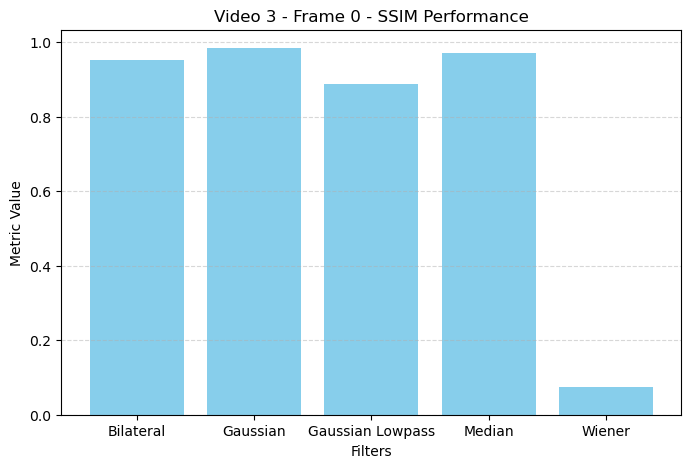

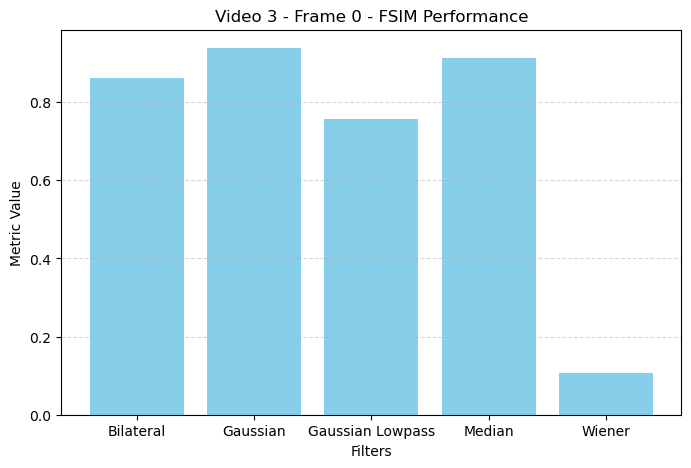

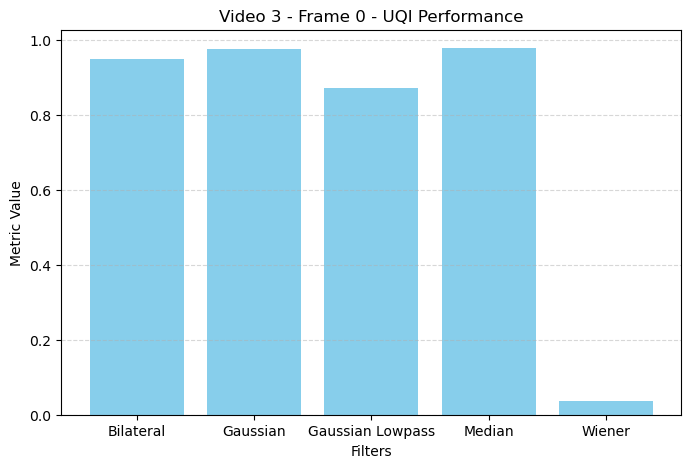

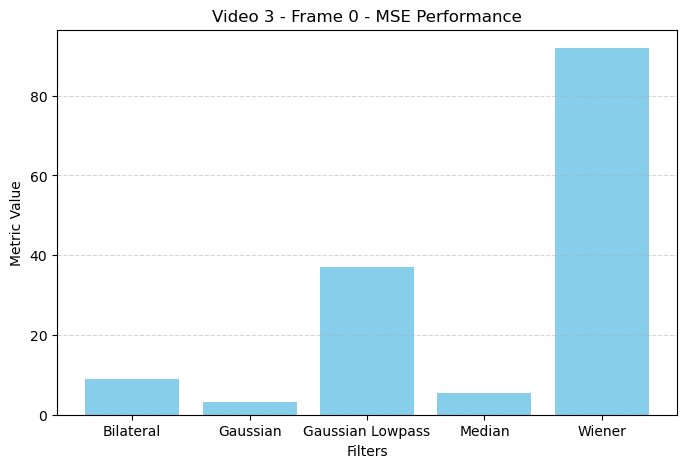

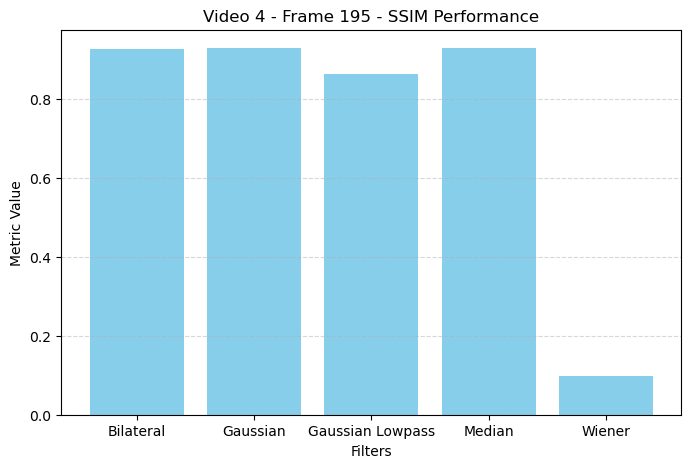

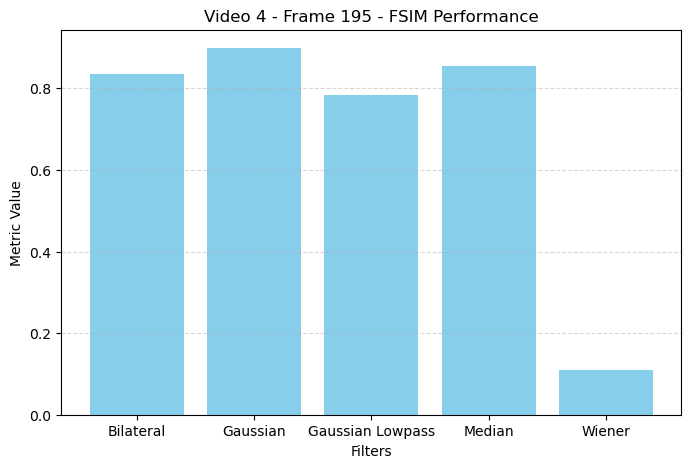

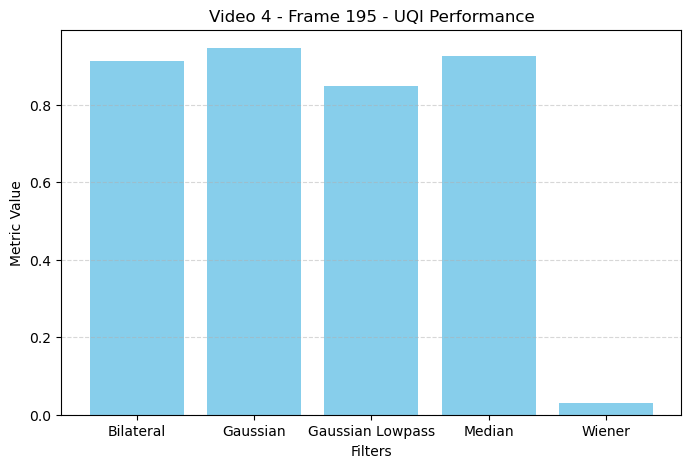

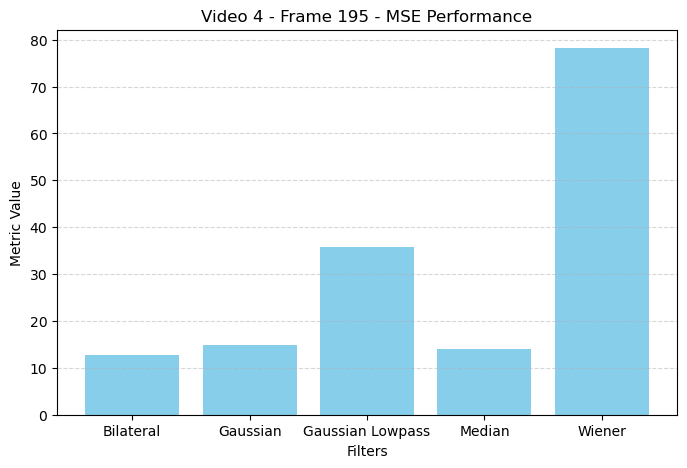

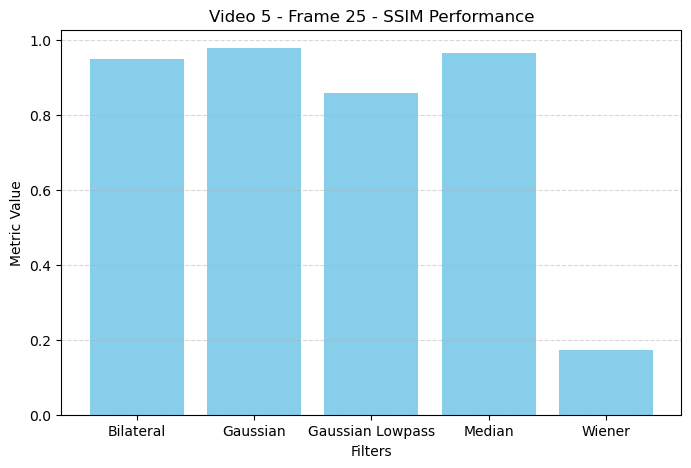

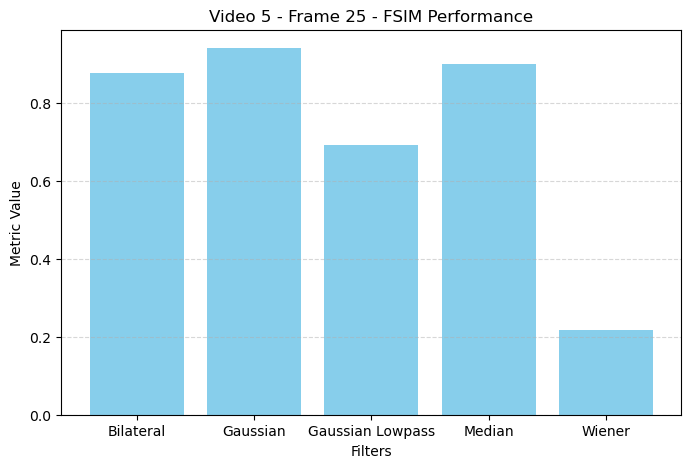

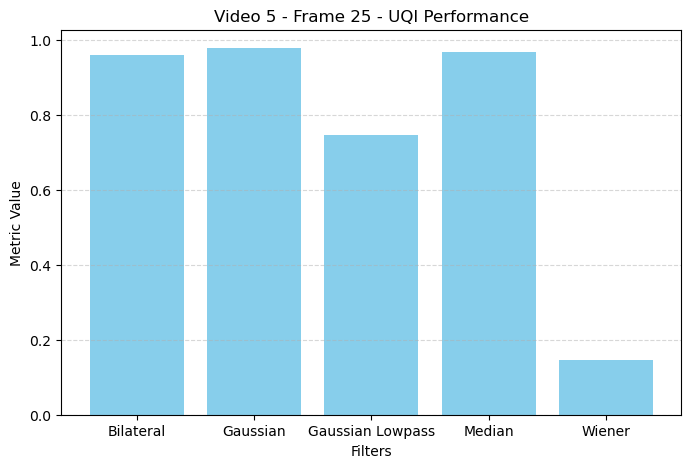

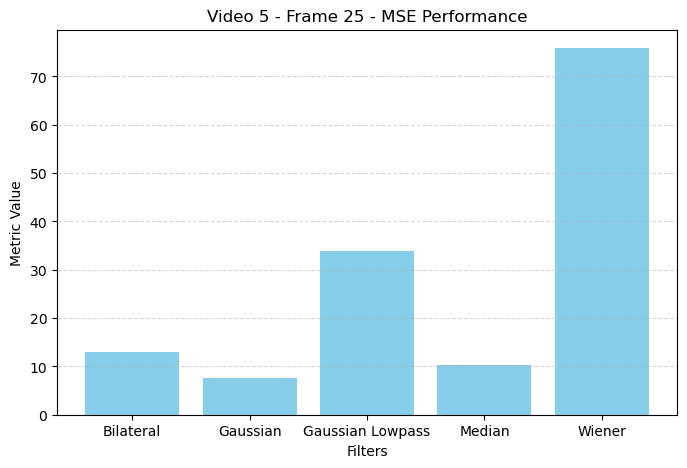

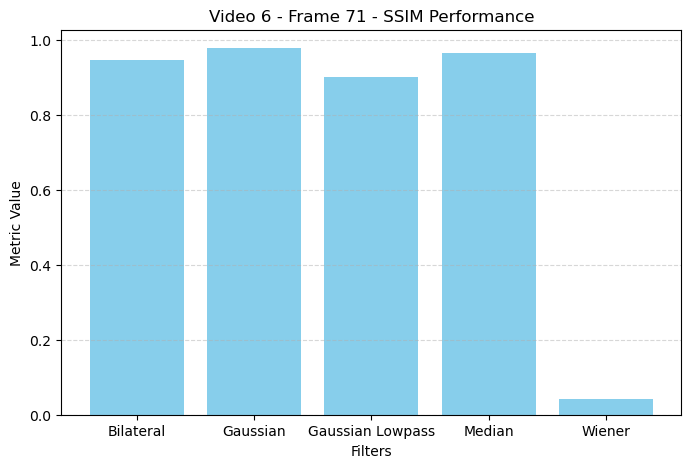

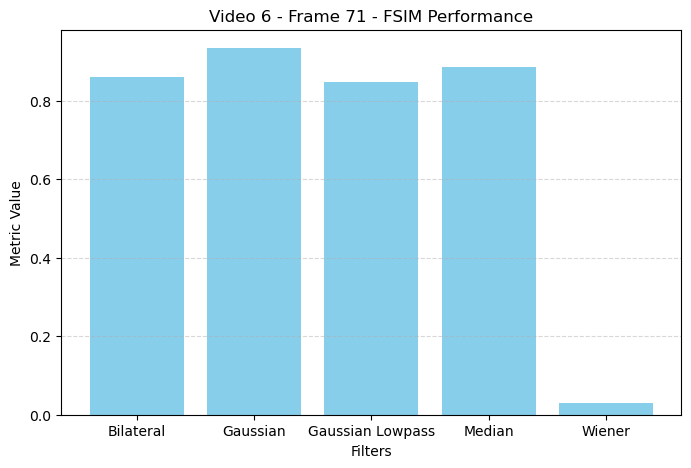

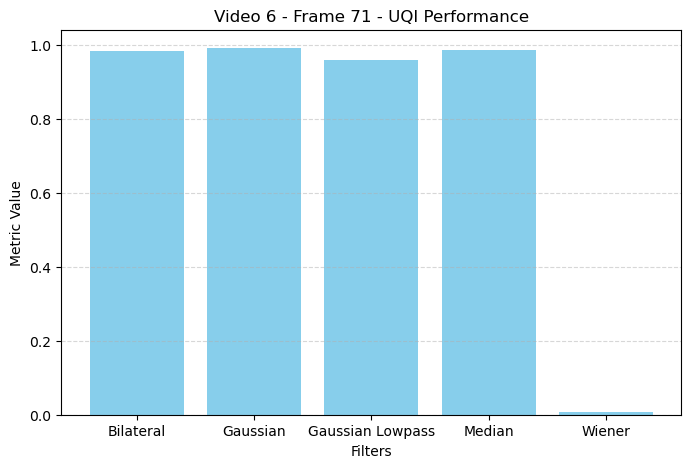

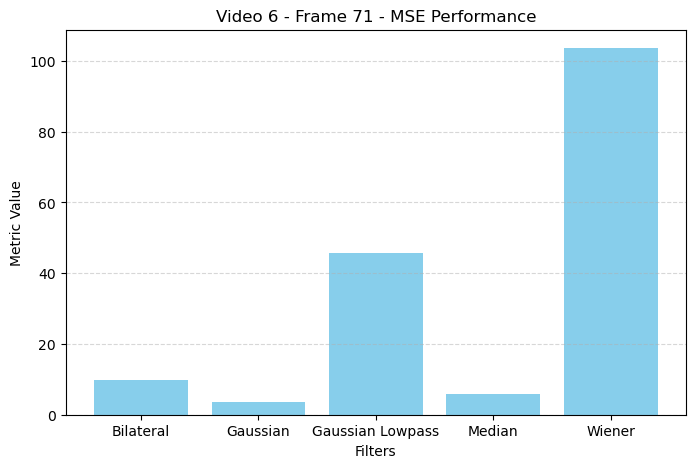

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each video frame
data = {
    "Video 3 - Frame 0": {
        "Filters": ["Bilateral", "Gaussian", "Gaussian Lowpass", "Median", "Wiener"],
        "SSIM": [0.9530, 0.9845, 0.8871, 0.9715, 0.0741],
        "FSIM": [0.8618, 0.9383, 0.7579, 0.9135, 0.1063],
        "UQI": [0.9494, 0.9751, 0.8709, 0.9787, 0.0358],
        "MSE": [9.0135, 3.1868, 36.9352, 5.3679, 91.9402],
    },
    "Video 4 - Frame 195": {
        "Filters": ["Bilateral", "Gaussian", "Gaussian Lowpass", "Median", "Wiener"],
        "SSIM": [0.9258, 0.9288, 0.8639, 0.9278, 0.0972],
        "FSIM": [0.8362, 0.8987, 0.7848, 0.8535, 0.1100],
        "UQI": [0.9113, 0.9457, 0.8477, 0.9251, 0.0304],
        "MSE": [12.7856, 14.9354, 35.7514, 14.0768, 78.2110],
    },
    "Video 5 - Frame 25": {
        "Filters": ["Bilateral", "Gaussian", "Gaussian Lowpass", "Median", "Wiener"],
        "SSIM": [0.9515, 0.9795, 0.8583, 0.9669, 0.1719],
        "FSIM": [0.8771, 0.9420, 0.6922, 0.9022, 0.2173],
        "UQI": [0.9580, 0.9777, 0.7448, 0.9684, 0.1460],
        "MSE": [12.9557, 7.6032, 33.8179, 10.3202, 75.8819],
    },
    "Video 6 - Frame 71": {
        "Filters": ["Bilateral", "Gaussian", "Gaussian Lowpass", "Median", "Wiener"],
        "SSIM": [0.9454, 0.9784, 0.9000, 0.9643, 0.0418],
        "FSIM": [0.8591, 0.9341, 0.8464, 0.8852, 0.0306],
        "UQI": [0.9837, 0.9923, 0.9609, 0.9858, 0.0075],
        "MSE": [9.7394, 3.5289, 45.6233, 5.8698, 103.6390],
    },
}

# Plotting individually
for video, metrics in data.items():
    for metric in ["SSIM", "FSIM", "UQI", "MSE"]:
        plt.figure(figsize=(8, 5))
        plt.bar(metrics['Filters'], metrics[metric], color='skyblue')
        plt.title(f"{video} - {metric} Performance")
        plt.xlabel("Filters")
        plt.ylabel("Metric Value")
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.show()


In [20]:
#CANNY EDGE DETECTIR FOR ALL THE FOLDERS USING GAUSSIAN FILTERED IMAGES 

import cv2
import os
import numpy as np
from skimage.morphology import skeletonize

def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def enhance_contrast(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

def apply_canny(image, low_thresh=20, high_thresh=70):
    return cv2.Canny(image, low_thresh, high_thresh)

def thin_edges(edges):
    binary_edges = (edges > 0).astype(np.uint8)
    return (skeletonize(binary_edges) * 255).astype(np.uint8)

def process_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(input_folder, filename)
            image = load_image(image_path)
            enhanced_image = enhance_contrast(image)
            edges = apply_canny(enhanced_image)

            thinned_edges = thin_edges(edges)

            # Save output
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, thinned_edges)
            print(f"Processed: {filename} -> Saved to {output_path}")

if __name__ == "__main__":
    input_folders = input("Enter the paths of input folders separated by commas: ").strip().split(',')
    output_base_folder = input("Enter the path of the output folder: ").strip()

    for input_folder in input_folders:
        folder_name = os.path.basename(os.path.normpath(input_folder))
        output_folder = os.path.join(output_base_folder, folder_name)
        process_images(input_folder.strip(), output_folder)


Enter the paths of input folders separated by commas: C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 3_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 4_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 5_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 6_cropped_images
Enter the path of the output folder: C:/Users/Best/Desktop/ULTRASOUND/CANNY
Processed: frame_0000.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/CANNY\Processed_Video 3_cropped_images\frame_0000.jpg
Processed: frame_0001.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/CANNY\Processed_Video 3_cropped_images\frame_0001.jpg
Processed: frame_0002.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/CANNY\Processed_Video 3_cropped_images\frame_0002.jpg
Processed: frame_0003.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/CANNY\Processed_Video 3_cropped_images\frame_0003.jpg
Processed: frame_0004.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND

In [22]:
# SOBEL EDGE DETECTOR 
import cv2
import os
import numpy as np

def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def enhance_contrast(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

def apply_sobel(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    return np.uint8(sobel_combined)

def process_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(input_folder, filename)
            image = load_image(image_path)
            enhanced_image = enhance_contrast(image)
            sobel_edges = apply_sobel(enhanced_image)

            # Save output
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, sobel_edges)
            print(f"Processed: {filename} -> Saved to {output_path}")

if __name__ == "__main__":
    input_folders = input("Enter the paths of input folders separated by commas: ").strip().split(',')
    output_base_folder = input("Enter the path of the output folder: ").strip()

    for input_folder in input_folders:
        folder_name = os.path.basename(os.path.normpath(input_folder))
        output_folder = os.path.join(output_base_folder, folder_name)
        process_images(input_folder.strip(), output_folder)


Enter the paths of input folders separated by commas: C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 3_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 4_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 5_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 6_cropped_images
Enter the path of the output folder: C:/Users/Best/Desktop/ULTRASOUND/SOBEL
Processed: frame_0000.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/SOBEL\Processed_Video 3_cropped_images\frame_0000.jpg
Processed: frame_0001.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/SOBEL\Processed_Video 3_cropped_images\frame_0001.jpg
Processed: frame_0002.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/SOBEL\Processed_Video 3_cropped_images\frame_0002.jpg
Processed: frame_0003.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/SOBEL\Processed_Video 3_cropped_images\frame_0003.jpg
Processed: frame_0004.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND

In [23]:
#PREWITT EDGE DETECTOR 
import cv2
import os
import numpy as np

def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def enhance_contrast(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

def apply_prewitt(image):
    prewitt_x = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
    prewitt_y = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
    prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)
    return np.uint8(prewitt_combined)

def process_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(input_folder, filename)
            image = load_image(image_path)
            enhanced_image = enhance_contrast(image)
            prewitt_edges = apply_prewitt(enhanced_image)

            # Save output
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, prewitt_edges)
            print(f"Processed: {filename} -> Saved to {output_path}")

if __name__ == "__main__":
    input_folders = input("Enter the paths of input folders separated by commas: ").strip().split(',')
    output_base_folder = input("Enter the path of the output folder: ").strip()

    for input_folder in input_folders:
        folder_name = os.path.basename(os.path.normpath(input_folder))
        output_folder = os.path.join(output_base_folder, folder_name)
        process_images(input_folder.strip(), output_folder)


Enter the paths of input folders separated by commas: C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 3_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 4_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 5_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 6_cropped_images
Enter the path of the output folder: C:/Users/Best/Desktop/ULTRASOUND/PREWITT
Processed: frame_0000.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/PREWITT\Processed_Video 3_cropped_images\frame_0000.jpg
Processed: frame_0001.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/PREWITT\Processed_Video 3_cropped_images\frame_0001.jpg
Processed: frame_0002.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/PREWITT\Processed_Video 3_cropped_images\frame_0002.jpg
Processed: frame_0003.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/PREWITT\Processed_Video 3_cropped_images\frame_0003.jpg
Processed: frame_0004.jpg -> Saved to C:/Users/Best/Desktop/

In [24]:
# HYBRID OF CANNY AND SOBEL 
import cv2
import os
import numpy as np
def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def enhance_contrast(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

def apply_canny(image, low_thresh=50, high_thresh=150):
    return cv2.Canny(image, low_thresh, high_thresh)

def apply_sobel(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    return np.uint8(sobel_combined)

def apply_hybrid(image):
    canny_edges = apply_canny(image)
    sobel_edges = apply_sobel(image)
    hybrid_edges = cv2.addWeighted(canny_edges, 0.5, sobel_edges, 0.5, 0)
    return hybrid_edges

def process_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(input_folder, filename)
            image = load_image(image_path)
            enhanced_image = enhance_contrast(image)
            hybrid_edges = apply_hybrid(enhanced_image)

            # Save output
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, hybrid_edges)
            print(f"Processed: {filename} -> Saved to {output_path}")

if __name__ == "__main__":
    input_folders = input("Enter the paths of input folders separated by commas: ").strip().split(',')
    output_base_folder = input("Enter the path of the output folder: ").strip()

    for input_folder in input_folders:
        folder_name = os.path.basename(os.path.normpath(input_folder))
        output_folder = os.path.join(output_base_folder, folder_name)
        process_images(input_folder.strip(), output_folder)


Enter the paths of input folders separated by commas: C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 3_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 4_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 5_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 6_cropped_images
Enter the path of the output folder: C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF CANNY AND SOBEL
Processed: frame_0000.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF CANNY AND SOBEL\Processed_Video 3_cropped_images\frame_0000.jpg
Processed: frame_0001.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF CANNY AND SOBEL\Processed_Video 3_cropped_images\frame_0001.jpg
Processed: frame_0002.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF CANNY AND SOBEL\Processed_Video 3_cropped_images\frame_0002.jpg
Processed: frame_0003.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF CANNY AND SOBEL\Processed_Video 3_

In [25]:
# HYBRID OF PREWITT AND SOBEL 
import cv2
import os
import numpy as np
def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def enhance_contrast(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

def apply_prewitt(image):
    prewitt_x = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
    prewitt_y = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
    prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)
    return np.uint8(prewitt_combined)

def apply_sobel(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    return np.uint8(sobel_combined)

def apply_hybrid(image):
    prewitt_edges = apply_prewitt(image)
    sobel_edges = apply_sobel(image)
    hybrid_edges = cv2.addWeighted(prewitt_edges, 0.5, sobel_edges, 0.5, 0)
    return hybrid_edges

def process_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(input_folder, filename)
            image = load_image(image_path)
            enhanced_image = enhance_contrast(image)
            hybrid_edges = apply_hybrid(enhanced_image)

            # Save output
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, hybrid_edges)
            print(f"Processed: {filename} -> Saved to {output_path}")

if __name__ == "__main__":
    input_folders = input("Enter the paths of input folders separated by commas: ").strip().split(',')
    output_base_folder = input("Enter the path of the output folder: ").strip()

    for input_folder in input_folders:
        folder_name = os.path.basename(os.path.normpath(input_folder))
        output_folder = os.path.join(output_base_folder, folder_name)
        process_images(input_folder.strip(), output_folder)


Enter the paths of input folders separated by commas: C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 3_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 4_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 5_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 6_cropped_images
Enter the path of the output folder: C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF SOBEL AND PREWITT
Processed: frame_0000.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF SOBEL AND PREWITT\Processed_Video 3_cropped_images\frame_0000.jpg
Processed: frame_0001.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF SOBEL AND PREWITT\Processed_Video 3_cropped_images\frame_0001.jpg
Processed: frame_0002.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF SOBEL AND PREWITT\Processed_Video 3_cropped_images\frame_0002.jpg
Processed: frame_0003.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF SOBEL AND PREWITT\Processe

In [26]:
# HYBRID OF PREWITT AND CANNY
import cv2
import os
import numpy as np

def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def enhance_contrast(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

def apply_prewitt(image):
    prewitt_x = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
    prewitt_y = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
    prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)
    return np.uint8(prewitt_combined)

def apply_canny(image, low_thresh=50, high_thresh=150):
    return cv2.Canny(image, low_thresh, high_thresh)

def apply_hybrid(image):
    prewitt_edges = apply_prewitt(image)
    canny_edges = apply_canny(image)
    hybrid_edges = cv2.addWeighted(prewitt_edges, 0.5, canny_edges, 0.5, 0)
    return hybrid_edges

def process_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(input_folder, filename)
            image = load_image(image_path)
            enhanced_image = enhance_contrast(image)
            hybrid_edges = apply_hybrid(enhanced_image)

            # Save output
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, hybrid_edges)
            print(f"Processed: {filename} -> Saved to {output_path}")

if __name__ == "__main__":
    input_folders = input("Enter the paths of input folders separated by commas: ").strip().split(',')
    output_base_folder = input("Enter the path of the output folder: ").strip()

    for input_folder in input_folders:
        folder_name = os.path.basename(os.path.normpath(input_folder))
        output_folder = os.path.join(output_base_folder, folder_name)
        process_images(input_folder.strip(), output_folder)

        

Enter the paths of input folders separated by commas: C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 3_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 4_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 5_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 6_cropped_images
Enter the path of the output folder: C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF PREWITT AND CANNY
Processed: frame_0000.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF PREWITT AND CANNY\Processed_Video 3_cropped_images\frame_0000.jpg
Processed: frame_0001.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF PREWITT AND CANNY\Processed_Video 3_cropped_images\frame_0001.jpg
Processed: frame_0002.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF PREWITT AND CANNY\Processed_Video 3_cropped_images\frame_0002.jpg
Processed: frame_0003.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF PREWITT AND CANNY\Processe

In [27]:
# LOG 
import cv2
import os
import numpy as np

def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def enhance_contrast(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

def apply_laplacian_of_gaussian(image):
    blurred = cv2.GaussianBlur(image, (7, 7), 0)  # Increased kernel size for better smoothing
    log_edges = cv2.Laplacian(blurred, cv2.CV_64F)
    log_edges = np.uint8(np.absolute(log_edges))
    log_edges = cv2.normalize(log_edges, None, 0, 255, cv2.NORM_MINMAX)  # Improved normalization
    return log_edges

def process_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(input_folder, filename)
            image = load_image(image_path)
            enhanced_image = enhance_contrast(image)
            log_edges = apply_laplacian_of_gaussian(enhanced_image)

            # Save output
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, log_edges)
            print(f"Processed: {filename} -> Saved to {output_path}")

if __name__ == "__main__":
    input_folders = input("Enter the paths of input folders separated by commas: ").strip().split(',')
    output_base_folder = input("Enter the path of the output folder: ").strip()

    for input_folder in input_folders:
        folder_name = os.path.basename(os.path.normpath(input_folder))
        output_folder = os.path.join(output_base_folder, folder_name)
        process_images(input_folder.strip(), output_folder)


Enter the paths of input folders separated by commas:  C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 3_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 4_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 5_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 6_cropped_images
Enter the path of the output folder: C:/Users/Best/Desktop/ULTRASOUND/LAPLACIAN OF GAUSSIAN
Processed: frame_0000.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/LAPLACIAN OF GAUSSIAN\Processed_Video 3_cropped_images\frame_0000.jpg
Processed: frame_0001.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/LAPLACIAN OF GAUSSIAN\Processed_Video 3_cropped_images\frame_0001.jpg
Processed: frame_0002.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/LAPLACIAN OF GAUSSIAN\Processed_Video 3_cropped_images\frame_0002.jpg
Processed: frame_0003.jpg -> Saved to C:/Users/Best/Desktop/ULTRASOUND/LAPLACIAN OF GAUSSIAN\Processed_Video 3_cropped_images\fram

In [38]:

import cv2
import numpy as np
import os

def create_mask(image_path, output_path, threshold_value):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Error: Could not read image {image_path}")
        return

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Fixed Thresholding
    _, mask = cv2.threshold(blurred, threshold_value, 255, cv2.THRESH_BINARY)

    # Morphological operations
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Save the mask
    cv2.imwrite(output_path, mask)
    print(f"Processed: {output_path}")

# List of input folders
input_folders = [
    "C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 3_cropped_images",
    "C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 4_cropped_images",
    "C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 5_cropped_images",
    "C:/Users/Best/Desktop/ULTRASOUND/Cropped Images/Video 6_cropped_images"

]

# Output base folder
output_base_folder = "C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING"

# Fixed threshold value (you can adjust this value based on your needs)
fixed_threshold_value = 14 # Example threshold value

# Process each input folder separately
for input_folder in input_folders:
    folder_name = os.path.basename(input_folder)  # Extract folder name
    output_folder = os.path.join(output_base_folder, folder_name)  # Create separate output folder

    os.makedirs(output_folder, exist_ok=True)  # Ensure output folder exists

    # Get image files
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print(f"No valid image files found in {input_folder}.")
        continue

    # Process images
    for idx, filename in enumerate(image_files):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        create_mask(input_path, output_path, fixed_threshold_value)
        print(f"Processed {idx + 1}/{len(image_files)}: {filename}")

print("Processing complete for all folders.")

Processed: C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING\Video 3_cropped_images\frame_0000.jpg
Processed 1/368: frame_0000.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING\Video 3_cropped_images\frame_0001.jpg
Processed 2/368: frame_0001.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING\Video 3_cropped_images\frame_0002.jpg
Processed 3/368: frame_0002.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING\Video 3_cropped_images\frame_0003.jpg
Processed 4/368: frame_0003.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING\Video 3_cropped_images\frame_0004.jpg
Processed 5/368: frame_0004.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING\Video 3_cropped_images\frame_0005.jpg
Processed 6/368: frame_0005.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING\Video 3_cropped_images\frame_0006.jpg
Processed 7/368: frame_0006.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING\Video 

In [41]:
# METRICS FOR EDGE DETECTION
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from pathlib import Path
from tqdm import tqdm

def apply_edge_detection(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if image.ndim == 3 else image

    # Apply CLAHE for better contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    gray_image = clahe.apply(gray_image)

    # Apply Gaussian Blur for noise reduction
    blurred_img = cv2.GaussianBlur(gray_image, (3, 3), 0)

    canny = cv2.Canny(blurred_img, 50, 150)
    sobel = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 1, ksize=5)
    prewitt = cv2.filter2D(blurred_img, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
    log = cv2.Laplacian(blurred_img, cv2.CV_64F)

    hybrid_canny_sobel = cv2.addWeighted(canny, 0.5, np.uint8(np.absolute(sobel)), 0.5, 0)
    hybrid_sobel_prewitt = cv2.addWeighted(np.uint8(np.absolute(sobel)), 0.5, prewitt, 0.5, 0)
    hybrid_prewitt_canny = cv2.addWeighted(prewitt, 0.5, canny, 0.5, 0)

    return {
        'canny': canny,
        'sobel': sobel,
        'prewitt': prewitt,
        'log': log,
        'hybrid_canny_sobel': hybrid_canny_sobel,
        'hybrid_sobel_prewitt': hybrid_sobel_prewitt,
        'hybrid_prewitt_canny': hybrid_prewitt_canny
    }

def compute_metrics(original, processed):
    if original.ndim == 3:
        original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    else:
        original_gray = original

    original_bin = cv2.threshold(original_gray, 128, 255, cv2.THRESH_BINARY)[1].flatten() // 255
    processed_bin = cv2.threshold(processed, 128, 255, cv2.THRESH_BINARY)[1].flatten() // 255

    accuracy = accuracy_score(original_bin, processed_bin)
    precision = precision_score(original_bin, processed_bin, zero_division=0)
    recall = recall_score(original_bin, processed_bin, zero_division=0)
    f1 = f1_score(original_bin, processed_bin, zero_division=0)

    return accuracy, precision, recall, f1

def crop_images(input_folders, crop_box):
    for input_folder in input_folders:
        image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        for filename in tqdm(image_files, desc=f"Processing {Path(input_folder).name}"):
            try:
                img_path = Path(input_folder) / filename
                img = Image.open(img_path).convert('RGB')
                cropped_img = img.crop(crop_box)

                img_cv = np.array(cropped_img)
                if img_cv.ndim == 2:
                    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_GRAY2BGR)

                edge_images = apply_edge_detection(img_cv)

                for edge_name, edge_img in edge_images.items():
                    accuracy, precision, recall, f1 = compute_metrics(img_cv, edge_img)
                    print(f"{filename} - {edge_name}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1 Score={f1:.4f}")

            except (FileNotFoundError, OSError) as e:
                print(f"Error processing {filename}: {e}")

# Example usage
input_folders = [
    "C:/Users/Best/Desktop/ULTRASOUND/FRAMES/Video 3",
    "C:/Users/Best/Desktop/ULTRASOUND/FRAMES/Video 4",
    "C:/Users/Best/Desktop/ULTRASOUND/FRAMES/Video 5",
    "C:/Users/Best/Desktop/ULTRASOUND/FRAMES/Video 6"
]
crop_box = (200, 150, 500, 500)

crop_images(input_folders, crop_box)


Processing Video 3:   0%|                                                                      | 0/368 [00:00<?, ?it/s]

frame_0000.jpg - canny: Accuracy=0.8638, Precision=0.0354, Recall=0.0759, F1 Score=0.0483
frame_0000.jpg - sobel: Accuracy=0.9101, Precision=0.0302, Recall=0.0314, F1 Score=0.0308
frame_0000.jpg - prewitt: Accuracy=0.9490, Precision=0.0463, Recall=0.0061, F1 Score=0.0107
frame_0000.jpg - log: Accuracy=0.9545, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0000.jpg - hybrid_canny_sobel: Accuracy=0.8672, Precision=0.0357, Recall=0.0736, F1 Score=0.0481
frame_0000.jpg - hybrid_sobel_prewitt: Accuracy=0.9487, Precision=0.0606, Recall=0.0088, F1 Score=0.0153


Processing Video 3:   0%|▏                                                             | 1/368 [00:02<14:17,  2.34s/it]

frame_0000.jpg - hybrid_prewitt_canny: Accuracy=0.9098, Precision=0.0378, Recall=0.0402, F1 Score=0.0390
frame_0001.jpg - canny: Accuracy=0.8622, Precision=0.0358, Recall=0.0789, F1 Score=0.0493
frame_0001.jpg - sobel: Accuracy=0.9093, Precision=0.0301, Recall=0.0322, F1 Score=0.0311
frame_0001.jpg - prewitt: Accuracy=0.9491, Precision=0.0387, Recall=0.0053, F1 Score=0.0093
frame_0001.jpg - log: Accuracy=0.9547, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0001.jpg - hybrid_canny_sobel: Accuracy=0.8655, Precision=0.0355, Recall=0.0753, F1 Score=0.0482
frame_0001.jpg - hybrid_sobel_prewitt: Accuracy=0.9489, Precision=0.0565, Recall=0.0082, F1 Score=0.0143
frame_0001.jpg - hybrid_prewitt_canny: Accuracy=0.9099, Precision=0.0410, Recall=0.0442, F1 Score=0.0425


Processing Video 3:   1%|▎                                                             | 2/368 [00:04<12:38,  2.07s/it]

frame_0002.jpg - canny: Accuracy=0.8618, Precision=0.0351, Recall=0.0772, F1 Score=0.0483
frame_0002.jpg - sobel: Accuracy=0.9090, Precision=0.0282, Recall=0.0300, F1 Score=0.0291
frame_0002.jpg - prewitt: Accuracy=0.9491, Precision=0.0307, Recall=0.0040, F1 Score=0.0071
frame_0002.jpg - log: Accuracy=0.9546, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0002.jpg - hybrid_canny_sobel: Accuracy=0.8650, Precision=0.0347, Recall=0.0737, F1 Score=0.0472
frame_0002.jpg - hybrid_sobel_prewitt: Accuracy=0.9488, Precision=0.0491, Recall=0.0069, F1 Score=0.0121


Processing Video 3:   1%|▌                                                             | 3/368 [00:06<12:12,  2.01s/it]

frame_0002.jpg - hybrid_prewitt_canny: Accuracy=0.9091, Precision=0.0409, Recall=0.0447, F1 Score=0.0427
frame_0003.jpg - canny: Accuracy=0.8642, Precision=0.0420, Recall=0.0905, F1 Score=0.0574
frame_0003.jpg - sobel: Accuracy=0.9083, Precision=0.0334, Recall=0.0361, F1 Score=0.0347
frame_0003.jpg - prewitt: Accuracy=0.9486, Precision=0.0510, Recall=0.0071, F1 Score=0.0124
frame_0003.jpg - log: Accuracy=0.9543, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0003.jpg - hybrid_canny_sobel: Accuracy=0.8671, Precision=0.0412, Recall=0.0857, F1 Score=0.0556
frame_0003.jpg - hybrid_sobel_prewitt: Accuracy=0.9486, Precision=0.0703, Recall=0.0102, F1 Score=0.0178
frame_0003.jpg - hybrid_prewitt_canny: Accuracy=0.9099, Precision=0.0477, Recall=0.0513, F1 Score=0.0494


Processing Video 3:   1%|▋                                                             | 4/368 [00:07<11:45,  1.94s/it]

frame_0004.jpg - canny: Accuracy=0.8640, Precision=0.0391, Recall=0.0835, F1 Score=0.0533
frame_0004.jpg - sobel: Accuracy=0.9080, Precision=0.0271, Recall=0.0289, F1 Score=0.0280
frame_0004.jpg - prewitt: Accuracy=0.9484, Precision=0.0506, Recall=0.0071, F1 Score=0.0124
frame_0004.jpg - log: Accuracy=0.9542, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0004.jpg - hybrid_canny_sobel: Accuracy=0.8669, Precision=0.0380, Recall=0.0783, F1 Score=0.0512
frame_0004.jpg - hybrid_sobel_prewitt: Accuracy=0.9483, Precision=0.0624, Recall=0.0091, F1 Score=0.0159


Processing Video 3:   1%|▊                                                             | 5/368 [00:09<11:37,  1.92s/it]

frame_0004.jpg - hybrid_prewitt_canny: Accuracy=0.9097, Precision=0.0440, Recall=0.0467, F1 Score=0.0453
frame_0005.jpg - canny: Accuracy=0.8611, Precision=0.0334, Recall=0.0730, F1 Score=0.0458
frame_0005.jpg - sobel: Accuracy=0.9072, Precision=0.0257, Recall=0.0280, F1 Score=0.0268
frame_0005.jpg - prewitt: Accuracy=0.9486, Precision=0.0449, Recall=0.0063, F1 Score=0.0110
frame_0005.jpg - log: Accuracy=0.9544, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0005.jpg - hybrid_canny_sobel: Accuracy=0.8640, Precision=0.0330, Recall=0.0699, F1 Score=0.0448
frame_0005.jpg - hybrid_sobel_prewitt: Accuracy=0.9481, Precision=0.0565, Recall=0.0088, F1 Score=0.0152
frame_0005.jpg - hybrid_prewitt_canny: Accuracy=0.9098, Precision=0.0376, Recall=0.0396, F1 Score=0.0386


Processing Video 3:   2%|█                                                             | 6/368 [00:11<11:21,  1.88s/it]

frame_0006.jpg - canny: Accuracy=0.8620, Precision=0.0340, Recall=0.0741, F1 Score=0.0466
frame_0006.jpg - sobel: Accuracy=0.9072, Precision=0.0258, Recall=0.0282, F1 Score=0.0269
frame_0006.jpg - prewitt: Accuracy=0.9487, Precision=0.0448, Recall=0.0063, F1 Score=0.0110
frame_0006.jpg - log: Accuracy=0.9545, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0006.jpg - hybrid_canny_sobel: Accuracy=0.8650, Precision=0.0336, Recall=0.0709, F1 Score=0.0456
frame_0006.jpg - hybrid_sobel_prewitt: Accuracy=0.9483, Precision=0.0571, Recall=0.0088, F1 Score=0.0152


Processing Video 3:   2%|█▏                                                            | 7/368 [00:13<11:43,  1.95s/it]

frame_0006.jpg - hybrid_prewitt_canny: Accuracy=0.9095, Precision=0.0383, Recall=0.0410, F1 Score=0.0396
frame_0007.jpg - canny: Accuracy=0.8628, Precision=0.0307, Recall=0.0658, F1 Score=0.0419
frame_0007.jpg - sobel: Accuracy=0.9075, Precision=0.0256, Recall=0.0278, F1 Score=0.0266
frame_0007.jpg - prewitt: Accuracy=0.9487, Precision=0.0480, Recall=0.0067, F1 Score=0.0117
frame_0007.jpg - log: Accuracy=0.9544, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0007.jpg - hybrid_canny_sobel: Accuracy=0.8657, Precision=0.0302, Recall=0.0625, F1 Score=0.0407
frame_0007.jpg - hybrid_sobel_prewitt: Accuracy=0.9482, Precision=0.0517, Recall=0.0079, F1 Score=0.0138


Processing Video 3:   2%|█▎                                                            | 8/368 [00:15<11:33,  1.93s/it]

frame_0007.jpg - hybrid_prewitt_canny: Accuracy=0.9100, Precision=0.0347, Recall=0.0364, F1 Score=0.0355
frame_0008.jpg - canny: Accuracy=0.8636, Precision=0.0374, Recall=0.0807, F1 Score=0.0511
frame_0008.jpg - sobel: Accuracy=0.9082, Precision=0.0245, Recall=0.0261, F1 Score=0.0253
frame_0008.jpg - prewitt: Accuracy=0.9490, Precision=0.0541, Recall=0.0073, F1 Score=0.0129
frame_0008.jpg - log: Accuracy=0.9544, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0008.jpg - hybrid_canny_sobel: Accuracy=0.8663, Precision=0.0369, Recall=0.0771, F1 Score=0.0500


Processing Video 3:   2%|█▌                                                            | 9/368 [00:17<11:28,  1.92s/it]

frame_0008.jpg - hybrid_sobel_prewitt: Accuracy=0.9487, Precision=0.0586, Recall=0.0084, F1 Score=0.0146
frame_0008.jpg - hybrid_prewitt_canny: Accuracy=0.9112, Precision=0.0425, Recall=0.0441, F1 Score=0.0433
frame_0009.jpg - canny: Accuracy=0.8598, Precision=0.0358, Recall=0.0799, F1 Score=0.0495
frame_0009.jpg - sobel: Accuracy=0.9073, Precision=0.0255, Recall=0.0277, F1 Score=0.0266
frame_0009.jpg - prewitt: Accuracy=0.9486, Precision=0.0523, Recall=0.0073, F1 Score=0.0128
frame_0009.jpg - log: Accuracy=0.9543, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0009.jpg - hybrid_canny_sobel: Accuracy=0.8629, Precision=0.0356, Recall=0.0768, F1 Score=0.0487
frame_0009.jpg - hybrid_sobel_prewitt: Accuracy=0.9482, Precision=0.0587, Recall=0.0090, F1 Score=0.0156


Processing Video 3:   3%|█▋                                                           | 10/368 [00:19<11:35,  1.94s/it]

frame_0009.jpg - hybrid_prewitt_canny: Accuracy=0.9094, Precision=0.0398, Recall=0.0426, F1 Score=0.0411
frame_0010.jpg - canny: Accuracy=0.8614, Precision=0.0380, Recall=0.0841, F1 Score=0.0523
frame_0010.jpg - sobel: Accuracy=0.9077, Precision=0.0266, Recall=0.0289, F1 Score=0.0277
frame_0010.jpg - prewitt: Accuracy=0.9486, Precision=0.0469, Recall=0.0067, F1 Score=0.0117
frame_0010.jpg - log: Accuracy=0.9545, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0010.jpg - hybrid_canny_sobel: Accuracy=0.8644, Precision=0.0373, Recall=0.0797, F1 Score=0.0508
frame_0010.jpg - hybrid_sobel_prewitt: Accuracy=0.9484, Precision=0.0496, Recall=0.0073, F1 Score=0.0128
frame_0010.jpg - hybrid_prewitt_canny: Accuracy=0.9101, Precision=0.0455, Recall=0.0488, F1 Score=0.0471


Processing Video 3:   3%|█▊                                                           | 11/368 [00:21<11:36,  1.95s/it]

frame_0011.jpg - canny: Accuracy=0.8577, Precision=0.0348, Recall=0.0795, F1 Score=0.0484
frame_0011.jpg - sobel: Accuracy=0.9067, Precision=0.0259, Recall=0.0286, F1 Score=0.0272
frame_0011.jpg - prewitt: Accuracy=0.9488, Precision=0.0488, Recall=0.0067, F1 Score=0.0118
frame_0011.jpg - log: Accuracy=0.9545, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0011.jpg - hybrid_canny_sobel: Accuracy=0.8608, Precision=0.0343, Recall=0.0757, F1 Score=0.0472
frame_0011.jpg - hybrid_sobel_prewitt: Accuracy=0.9485, Precision=0.0515, Recall=0.0075, F1 Score=0.0131


Processing Video 3:   3%|█▉                                                           | 12/368 [00:23<11:28,  1.93s/it]

frame_0011.jpg - hybrid_prewitt_canny: Accuracy=0.9080, Precision=0.0417, Recall=0.0464, F1 Score=0.0439
frame_0012.jpg - canny: Accuracy=0.8625, Precision=0.0369, Recall=0.0805, F1 Score=0.0506
frame_0012.jpg - sobel: Accuracy=0.9073, Precision=0.0261, Recall=0.0284, F1 Score=0.0272
frame_0012.jpg - prewitt: Accuracy=0.9488, Precision=0.0501, Recall=0.0069, F1 Score=0.0121
frame_0012.jpg - log: Accuracy=0.9544, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0012.jpg - hybrid_canny_sobel: Accuracy=0.8655, Precision=0.0370, Recall=0.0780, F1 Score=0.0502
frame_0012.jpg - hybrid_sobel_prewitt: Accuracy=0.9486, Precision=0.0551, Recall=0.0079, F1 Score=0.0139


Processing Video 3:   4%|██▏                                                          | 13/368 [00:25<12:36,  2.13s/it]

frame_0012.jpg - hybrid_prewitt_canny: Accuracy=0.9102, Precision=0.0440, Recall=0.0468, F1 Score=0.0454
frame_0013.jpg - canny: Accuracy=0.8617, Precision=0.0368, Recall=0.0809, F1 Score=0.0506
frame_0013.jpg - sobel: Accuracy=0.9074, Precision=0.0274, Recall=0.0299, F1 Score=0.0286
frame_0013.jpg - prewitt: Accuracy=0.9486, Precision=0.0436, Recall=0.0061, F1 Score=0.0106
frame_0013.jpg - log: Accuracy=0.9544, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0013.jpg - hybrid_canny_sobel: Accuracy=0.8646, Precision=0.0365, Recall=0.0777, F1 Score=0.0497


Processing Video 3:   4%|██▎                                                          | 14/368 [00:28<12:27,  2.11s/it]

frame_0013.jpg - hybrid_sobel_prewitt: Accuracy=0.9484, Precision=0.0523, Recall=0.0077, F1 Score=0.0135
frame_0013.jpg - hybrid_prewitt_canny: Accuracy=0.9092, Precision=0.0406, Recall=0.0439, F1 Score=0.0422
frame_0014.jpg - canny: Accuracy=0.8647, Precision=0.0378, Recall=0.0805, F1 Score=0.0514
frame_0014.jpg - sobel: Accuracy=0.9082, Precision=0.0280, Recall=0.0301, F1 Score=0.0290
frame_0014.jpg - prewitt: Accuracy=0.9488, Precision=0.0477, Recall=0.0065, F1 Score=0.0114
frame_0014.jpg - log: Accuracy=0.9544, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0014.jpg - hybrid_canny_sobel: Accuracy=0.8676, Precision=0.0379, Recall=0.0782, F1 Score=0.0510


Processing Video 3:   4%|██▍                                                          | 15/368 [00:29<11:51,  2.02s/it]

frame_0014.jpg - hybrid_sobel_prewitt: Accuracy=0.9485, Precision=0.0521, Recall=0.0075, F1 Score=0.0132
frame_0014.jpg - hybrid_prewitt_canny: Accuracy=0.9107, Precision=0.0412, Recall=0.0431, F1 Score=0.0421
frame_0015.jpg - canny: Accuracy=0.8639, Precision=0.0362, Recall=0.0774, F1 Score=0.0494
frame_0015.jpg - sobel: Accuracy=0.9083, Precision=0.0278, Recall=0.0296, F1 Score=0.0287
frame_0015.jpg - prewitt: Accuracy=0.9487, Precision=0.0472, Recall=0.0065, F1 Score=0.0114
frame_0015.jpg - log: Accuracy=0.9544, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0015.jpg - hybrid_canny_sobel: Accuracy=0.8667, Precision=0.0362, Recall=0.0749, F1 Score=0.0488


Processing Video 3:   4%|██▋                                                          | 16/368 [00:31<11:22,  1.94s/it]

frame_0015.jpg - hybrid_sobel_prewitt: Accuracy=0.9483, Precision=0.0506, Recall=0.0075, F1 Score=0.0131
frame_0015.jpg - hybrid_prewitt_canny: Accuracy=0.9110, Precision=0.0397, Recall=0.0409, F1 Score=0.0403
frame_0016.jpg - canny: Accuracy=0.8626, Precision=0.0361, Recall=0.0783, F1 Score=0.0494
frame_0016.jpg - sobel: Accuracy=0.9069, Precision=0.0246, Recall=0.0269, F1 Score=0.0257
frame_0016.jpg - prewitt: Accuracy=0.9486, Precision=0.0446, Recall=0.0063, F1 Score=0.0110
frame_0016.jpg - log: Accuracy=0.9544, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0016.jpg - hybrid_canny_sobel: Accuracy=0.8653, Precision=0.0356, Recall=0.0750, F1 Score=0.0483
frame_0016.jpg - hybrid_sobel_prewitt: Accuracy=0.9483, Precision=0.0478, Recall=0.0071, F1 Score=0.0124
frame_0016.jpg - hybrid_prewitt_canny: Accuracy=0.9098, Precision=0.0375, Recall=0.0397, F1 Score=0.0386


Processing Video 3:   5%|██▊                                                          | 17/368 [00:33<11:03,  1.89s/it]

frame_0017.jpg - canny: Accuracy=0.8609, Precision=0.0352, Recall=0.0777, F1 Score=0.0485
frame_0017.jpg - sobel: Accuracy=0.9063, Precision=0.0249, Recall=0.0276, F1 Score=0.0261
frame_0017.jpg - prewitt: Accuracy=0.9483, Precision=0.0415, Recall=0.0061, F1 Score=0.0106
frame_0017.jpg - log: Accuracy=0.9544, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0017.jpg - hybrid_canny_sobel: Accuracy=0.8636, Precision=0.0340, Recall=0.0727, F1 Score=0.0463
frame_0017.jpg - hybrid_sobel_prewitt: Accuracy=0.9477, Precision=0.0439, Recall=0.0071, F1 Score=0.0122


Processing Video 3:   5%|██▉                                                          | 18/368 [00:35<10:52,  1.86s/it]

frame_0017.jpg - hybrid_prewitt_canny: Accuracy=0.9090, Precision=0.0355, Recall=0.0380, F1 Score=0.0367
frame_0018.jpg - canny: Accuracy=0.8604, Precision=0.0375, Recall=0.0824, F1 Score=0.0515
frame_0018.jpg - sobel: Accuracy=0.9068, Precision=0.0284, Recall=0.0308, F1 Score=0.0295
frame_0018.jpg - prewitt: Accuracy=0.9483, Precision=0.0475, Recall=0.0064, F1 Score=0.0113
frame_0018.jpg - log: Accuracy=0.9540, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0018.jpg - hybrid_canny_sobel: Accuracy=0.8630, Precision=0.0364, Recall=0.0776, F1 Score=0.0496
frame_0018.jpg - hybrid_sobel_prewitt: Accuracy=0.9478, Precision=0.0434, Recall=0.0064, F1 Score=0.0112
frame_0018.jpg - hybrid_prewitt_canny: Accuracy=0.9089, Precision=0.0408, Recall=0.0435, F1 Score=0.0421


Processing Video 3:   5%|███▏                                                         | 19/368 [00:36<10:40,  1.84s/it]

frame_0019.jpg - canny: Accuracy=0.8740, Precision=0.0035, Recall=0.0107, F1 Score=0.0053
frame_0019.jpg - sobel: Accuracy=0.9187, Precision=0.0349, Recall=0.0601, F1 Score=0.0441
frame_0019.jpg - prewitt: Accuracy=0.9604, Precision=0.0299, Recall=0.0085, F1 Score=0.0133
frame_0019.jpg - log: Accuracy=0.9688, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0019.jpg - hybrid_canny_sobel: Accuracy=0.8765, Precision=0.0036, Recall=0.0107, F1 Score=0.0054


Processing Video 3:   5%|███▎                                                         | 20/368 [00:38<10:30,  1.81s/it]

frame_0019.jpg - hybrid_sobel_prewitt: Accuracy=0.9610, Precision=0.0213, Recall=0.0055, F1 Score=0.0087
frame_0019.jpg - hybrid_prewitt_canny: Accuracy=0.9215, Precision=0.0048, Recall=0.0073, F1 Score=0.0058
frame_0020.jpg - canny: Accuracy=0.8578, Precision=0.0133, Recall=0.0336, F1 Score=0.0191
frame_0020.jpg - sobel: Accuracy=0.9087, Precision=0.0322, Recall=0.0419, F1 Score=0.0364
frame_0020.jpg - prewitt: Accuracy=0.9524, Precision=0.0587, Recall=0.0104, F1 Score=0.0177
frame_0020.jpg - log: Accuracy=0.9588, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0020.jpg - hybrid_canny_sobel: Accuracy=0.8605, Precision=0.0128, Recall=0.0315, F1 Score=0.0182


Processing Video 3:   6%|███▍                                                         | 21/368 [00:40<10:24,  1.80s/it]

frame_0020.jpg - hybrid_sobel_prewitt: Accuracy=0.9520, Precision=0.0108, Recall=0.0019, F1 Score=0.0032
frame_0020.jpg - hybrid_prewitt_canny: Accuracy=0.9086, Precision=0.0158, Recall=0.0199, F1 Score=0.0176
frame_0021.jpg - canny: Accuracy=0.8551, Precision=0.0186, Recall=0.0443, F1 Score=0.0262
frame_0021.jpg - sobel: Accuracy=0.9050, Precision=0.0355, Recall=0.0441, F1 Score=0.0393
frame_0021.jpg - prewitt: Accuracy=0.9501, Precision=0.0620, Recall=0.0093, F1 Score=0.0162
frame_0021.jpg - log: Accuracy=0.9559, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0021.jpg - hybrid_canny_sobel: Accuracy=0.8581, Precision=0.0185, Recall=0.0425, F1 Score=0.0258


Processing Video 3:   6%|███▋                                                         | 22/368 [00:42<10:25,  1.81s/it]

frame_0021.jpg - hybrid_sobel_prewitt: Accuracy=0.9494, Precision=0.0114, Recall=0.0017, F1 Score=0.0030
frame_0021.jpg - hybrid_prewitt_canny: Accuracy=0.9058, Precision=0.0185, Recall=0.0218, F1 Score=0.0200
frame_0022.jpg - canny: Accuracy=0.8601, Precision=0.0163, Recall=0.0394, F1 Score=0.0230
frame_0022.jpg - sobel: Accuracy=0.9099, Precision=0.0251, Recall=0.0305, F1 Score=0.0275
frame_0022.jpg - prewitt: Accuracy=0.9537, Precision=0.0596, Recall=0.0073, F1 Score=0.0130
frame_0022.jpg - log: Accuracy=0.9582, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0022.jpg - hybrid_canny_sobel: Accuracy=0.8630, Precision=0.0161, Recall=0.0378, F1 Score=0.0226
frame_0022.jpg - hybrid_sobel_prewitt: Accuracy=0.9527, Precision=0.0323, Recall=0.0046, F1 Score=0.0080


Processing Video 3:   6%|███▊                                                         | 23/368 [00:44<10:19,  1.80s/it]

frame_0022.jpg - hybrid_prewitt_canny: Accuracy=0.9082, Precision=0.0161, Recall=0.0198, F1 Score=0.0177
frame_0023.jpg - canny: Accuracy=0.8523, Precision=0.0175, Recall=0.0434, F1 Score=0.0249
frame_0023.jpg - sobel: Accuracy=0.9074, Precision=0.0300, Recall=0.0362, F1 Score=0.0328
frame_0023.jpg - prewitt: Accuracy=0.9514, Precision=0.0513, Recall=0.0068, F1 Score=0.0120
frame_0023.jpg - log: Accuracy=0.9565, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0023.jpg - hybrid_canny_sobel: Accuracy=0.8551, Precision=0.0172, Recall=0.0416, F1 Score=0.0244


Processing Video 3:   7%|███▉                                                         | 24/368 [00:46<11:03,  1.93s/it]

frame_0023.jpg - hybrid_sobel_prewitt: Accuracy=0.9507, Precision=0.0333, Recall=0.0048, F1 Score=0.0084
frame_0023.jpg - hybrid_prewitt_canny: Accuracy=0.9028, Precision=0.0166, Recall=0.0213, F1 Score=0.0187
frame_0024.jpg - canny: Accuracy=0.8579, Precision=0.0160, Recall=0.0382, F1 Score=0.0225
frame_0024.jpg - sobel: Accuracy=0.9104, Precision=0.0235, Recall=0.0268, F1 Score=0.0251
frame_0024.jpg - prewitt: Accuracy=0.9523, Precision=0.0504, Recall=0.0062, F1 Score=0.0111
frame_0024.jpg - log: Accuracy=0.9571, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0024.jpg - hybrid_canny_sobel: Accuracy=0.8607, Precision=0.0149, Recall=0.0344, F1 Score=0.0208
frame_0024.jpg - hybrid_sobel_prewitt: Accuracy=0.9523, Precision=0.0193, Recall=0.0022, F1 Score=0.0040


Processing Video 3:   7%|████▏                                                        | 25/368 [00:48<11:15,  1.97s/it]

frame_0024.jpg - hybrid_prewitt_canny: Accuracy=0.9060, Precision=0.0194, Recall=0.0240, F1 Score=0.0214
frame_0025.jpg - canny: Accuracy=0.8493, Precision=0.0122, Recall=0.0321, F1 Score=0.0176
frame_0025.jpg - sobel: Accuracy=0.9103, Precision=0.0204, Recall=0.0240, F1 Score=0.0220
frame_0025.jpg - prewitt: Accuracy=0.9530, Precision=0.0019, Recall=0.0002, F1 Score=0.0004
frame_0025.jpg - log: Accuracy=0.9579, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0025.jpg - hybrid_canny_sobel: Accuracy=0.8526, Precision=0.0118, Recall=0.0301, F1 Score=0.0169
frame_0025.jpg - hybrid_sobel_prewitt: Accuracy=0.9522, Precision=0.0083, Recall=0.0011, F1 Score=0.0020


Processing Video 3:   7%|████▎                                                        | 26/368 [00:50<11:44,  2.06s/it]

frame_0025.jpg - hybrid_prewitt_canny: Accuracy=0.9023, Precision=0.0132, Recall=0.0179, F1 Score=0.0152
frame_0026.jpg - canny: Accuracy=0.8478, Precision=0.0194, Recall=0.0552, F1 Score=0.0287
frame_0026.jpg - sobel: Accuracy=0.9098, Precision=0.0160, Recall=0.0201, F1 Score=0.0178
frame_0026.jpg - prewitt: Accuracy=0.9552, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0026.jpg - log: Accuracy=0.9592, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0026.jpg - hybrid_canny_sobel: Accuracy=0.8509, Precision=0.0192, Recall=0.0530, F1 Score=0.0282


Processing Video 3:   7%|████▍                                                        | 27/368 [00:52<11:27,  2.02s/it]

frame_0026.jpg - hybrid_sobel_prewitt: Accuracy=0.9534, Precision=0.0064, Recall=0.0009, F1 Score=0.0016
frame_0026.jpg - hybrid_prewitt_canny: Accuracy=0.9044, Precision=0.0168, Recall=0.0234, F1 Score=0.0195
frame_0027.jpg - canny: Accuracy=0.8478, Precision=0.0221, Recall=0.0620, F1 Score=0.0326
frame_0027.jpg - sobel: Accuracy=0.9084, Precision=0.0216, Recall=0.0274, F1 Score=0.0241
frame_0027.jpg - prewitt: Accuracy=0.9548, Precision=0.0681, Recall=0.0074, F1 Score=0.0133
frame_0027.jpg - log: Accuracy=0.9587, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0027.jpg - hybrid_canny_sobel: Accuracy=0.8512, Precision=0.0214, Recall=0.0581, F1 Score=0.0313
frame_0027.jpg - hybrid_sobel_prewitt: Accuracy=0.9521, Precision=0.0029, Recall=0.0005, F1 Score=0.0008


Processing Video 3:   8%|████▋                                                        | 28/368 [00:54<11:06,  1.96s/it]

frame_0027.jpg - hybrid_prewitt_canny: Accuracy=0.9036, Precision=0.0180, Recall=0.0249, F1 Score=0.0209
frame_0028.jpg - canny: Accuracy=0.8394, Precision=0.0207, Recall=0.0604, F1 Score=0.0308
frame_0028.jpg - sobel: Accuracy=0.9058, Precision=0.0241, Recall=0.0311, F1 Score=0.0271
frame_0028.jpg - prewitt: Accuracy=0.9538, Precision=0.0649, Recall=0.0070, F1 Score=0.0126
frame_0028.jpg - log: Accuracy=0.9577, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0028.jpg - hybrid_canny_sobel: Accuracy=0.8430, Precision=0.0203, Recall=0.0574, F1 Score=0.0300
frame_0028.jpg - hybrid_sobel_prewitt: Accuracy=0.9508, Precision=0.0095, Recall=0.0016, F1 Score=0.0027


Processing Video 3:   8%|████▊                                                        | 29/368 [00:56<11:26,  2.03s/it]

frame_0028.jpg - hybrid_prewitt_canny: Accuracy=0.8992, Precision=0.0167, Recall=0.0239, F1 Score=0.0196
frame_0029.jpg - canny: Accuracy=0.8341, Precision=0.0166, Recall=0.0465, F1 Score=0.0244
frame_0029.jpg - sobel: Accuracy=0.9017, Precision=0.0248, Recall=0.0314, F1 Score=0.0277
frame_0029.jpg - prewitt: Accuracy=0.9512, Precision=0.0377, Recall=0.0038, F1 Score=0.0070
frame_0029.jpg - log: Accuracy=0.9554, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0029.jpg - hybrid_canny_sobel: Accuracy=0.8375, Precision=0.0162, Recall=0.0442, F1 Score=0.0237
frame_0029.jpg - hybrid_sobel_prewitt: Accuracy=0.9481, Precision=0.0103, Recall=0.0017, F1 Score=0.0029


Processing Video 3:   8%|████▉                                                        | 30/368 [00:58<11:08,  1.98s/it]

frame_0029.jpg - hybrid_prewitt_canny: Accuracy=0.8936, Precision=0.0170, Recall=0.0243, F1 Score=0.0200
frame_0030.jpg - canny: Accuracy=0.8396, Precision=0.0167, Recall=0.0514, F1 Score=0.0252
frame_0030.jpg - sobel: Accuracy=0.9106, Precision=0.0356, Recall=0.0464, F1 Score=0.0403
frame_0030.jpg - prewitt: Accuracy=0.9553, Precision=0.0448, Recall=0.0052, F1 Score=0.0093
frame_0030.jpg - log: Accuracy=0.9596, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0030.jpg - hybrid_canny_sobel: Accuracy=0.8431, Precision=0.0168, Recall=0.0500, F1 Score=0.0251
frame_0030.jpg - hybrid_sobel_prewitt: Accuracy=0.9530, Precision=0.0100, Recall=0.0016, F1 Score=0.0028
frame_0030.jpg - hybrid_prewitt_canny: Accuracy=0.8995, Precision=0.0185, Recall=0.0285, F1 Score=0.0224


Processing Video 3:   8%|█████▏                                                       | 31/368 [01:00<10:48,  1.92s/it]

frame_0031.jpg - canny: Accuracy=0.8467, Precision=0.0125, Recall=0.0399, F1 Score=0.0190
frame_0031.jpg - sobel: Accuracy=0.9158, Precision=0.0306, Recall=0.0412, F1 Score=0.0351
frame_0031.jpg - prewitt: Accuracy=0.9586, Precision=0.0198, Recall=0.0023, F1 Score=0.0041
frame_0031.jpg - log: Accuracy=0.9628, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0031.jpg - hybrid_canny_sobel: Accuracy=0.8500, Precision=0.0122, Recall=0.0379, F1 Score=0.0185
frame_0031.jpg - hybrid_sobel_prewitt: Accuracy=0.9572, Precision=0.0149, Recall=0.0023, F1 Score=0.0040


Processing Video 3:   9%|█████▎                                                       | 32/368 [01:02<10:41,  1.91s/it]

frame_0031.jpg - hybrid_prewitt_canny: Accuracy=0.9061, Precision=0.0155, Recall=0.0243, F1 Score=0.0189
frame_0032.jpg - canny: Accuracy=0.8609, Precision=0.0157, Recall=0.0518, F1 Score=0.0241
frame_0032.jpg - sobel: Accuracy=0.9233, Precision=0.0217, Recall=0.0299, F1 Score=0.0252
frame_0032.jpg - prewitt: Accuracy=0.9631, Precision=0.0025, Recall=0.0003, F1 Score=0.0005
frame_0032.jpg - log: Accuracy=0.9669, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0032.jpg - hybrid_canny_sobel: Accuracy=0.8641, Precision=0.0157, Recall=0.0504, F1 Score=0.0239
frame_0032.jpg - hybrid_sobel_prewitt: Accuracy=0.9618, Precision=0.0109, Recall=0.0017, F1 Score=0.0030
frame_0032.jpg - hybrid_prewitt_canny: Accuracy=0.9154, Precision=0.0204, Recall=0.0331, F1 Score=0.0252


Processing Video 3:   9%|█████▍                                                       | 33/368 [01:04<10:43,  1.92s/it]

frame_0033.jpg - canny: Accuracy=0.8587, Precision=0.0165, Recall=0.0611, F1 Score=0.0260
frame_0033.jpg - sobel: Accuracy=0.9242, Precision=0.0168, Recall=0.0253, F1 Score=0.0202
frame_0033.jpg - prewitt: Accuracy=0.9654, Precision=0.0076, Recall=0.0009, F1 Score=0.0017
frame_0033.jpg - log: Accuracy=0.9691, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0033.jpg - hybrid_canny_sobel: Accuracy=0.8620, Precision=0.0164, Recall=0.0589, F1 Score=0.0257


Processing Video 3:   9%|█████▋                                                       | 34/368 [01:05<10:27,  1.88s/it]

frame_0033.jpg - hybrid_sobel_prewitt: Accuracy=0.9637, Precision=0.0052, Recall=0.0009, F1 Score=0.0016
frame_0033.jpg - hybrid_prewitt_canny: Accuracy=0.9135, Precision=0.0185, Recall=0.0346, F1 Score=0.0241
frame_0034.jpg - canny: Accuracy=0.8635, Precision=0.0171, Recall=0.0640, F1 Score=0.0270
frame_0034.jpg - sobel: Accuracy=0.9244, Precision=0.0189, Recall=0.0305, F1 Score=0.0234
frame_0034.jpg - prewitt: Accuracy=0.9674, Precision=0.0127, Recall=0.0013, F1 Score=0.0023
frame_0034.jpg - log: Accuracy=0.9704, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0034.jpg - hybrid_canny_sobel: Accuracy=0.8665, Precision=0.0167, Recall=0.0605, F1 Score=0.0261
frame_0034.jpg - hybrid_sobel_prewitt: Accuracy=0.9652, Precision=0.0055, Recall=0.0010, F1 Score=0.0016
frame_0034.jpg - hybrid_prewitt_canny: Accuracy=0.9155, Precision=0.0169, Recall=0.0325, F1 Score=0.0223


Processing Video 3:  10%|█████▊                                                       | 35/368 [01:07<10:18,  1.86s/it]

frame_0035.jpg - canny: Accuracy=0.8720, Precision=0.0210, Recall=0.0764, F1 Score=0.0330
frame_0035.jpg - sobel: Accuracy=0.9292, Precision=0.0230, Recall=0.0357, F1 Score=0.0280
frame_0035.jpg - prewitt: Accuracy=0.9691, Precision=0.0759, Recall=0.0073, F1 Score=0.0134
frame_0035.jpg - log: Accuracy=0.9715, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0035.jpg - hybrid_canny_sobel: Accuracy=0.8747, Precision=0.0207, Recall=0.0731, F1 Score=0.0322
frame_0035.jpg - hybrid_sobel_prewitt: Accuracy=0.9670, Precision=0.0064, Recall=0.0010, F1 Score=0.0017


Processing Video 3:  10%|█████▉                                                       | 36/368 [01:09<10:44,  1.94s/it]

frame_0035.jpg - hybrid_prewitt_canny: Accuracy=0.9210, Precision=0.0231, Recall=0.0427, F1 Score=0.0299
frame_0036.jpg - canny: Accuracy=0.8740, Precision=0.0193, Recall=0.0723, F1 Score=0.0305
frame_0036.jpg - sobel: Accuracy=0.9308, Precision=0.0245, Recall=0.0393, F1 Score=0.0301
frame_0036.jpg - prewitt: Accuracy=0.9700, Precision=0.0462, Recall=0.0049, F1 Score=0.0088
frame_0036.jpg - log: Accuracy=0.9726, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0036.jpg - hybrid_canny_sobel: Accuracy=0.8766, Precision=0.0194, Recall=0.0706, F1 Score=0.0304
frame_0036.jpg - hybrid_sobel_prewitt: Accuracy=0.9678, Precision=0.0039, Recall=0.0007, F1 Score=0.0012


Processing Video 3:  10%|██████▏                                                      | 37/368 [01:12<11:49,  2.14s/it]

frame_0036.jpg - hybrid_prewitt_canny: Accuracy=0.9220, Precision=0.0209, Recall=0.0403, F1 Score=0.0276
frame_0037.jpg - canny: Accuracy=0.8712, Precision=0.0152, Recall=0.0584, F1 Score=0.0241
frame_0037.jpg - sobel: Accuracy=0.9313, Precision=0.0286, Recall=0.0462, F1 Score=0.0353
frame_0037.jpg - prewitt: Accuracy=0.9701, Precision=0.0236, Recall=0.0024, F1 Score=0.0044
frame_0037.jpg - log: Accuracy=0.9728, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0037.jpg - hybrid_canny_sobel: Accuracy=0.8740, Precision=0.0147, Recall=0.0549, F1 Score=0.0232


Processing Video 3:  10%|██████▎                                                      | 38/368 [01:14<11:16,  2.05s/it]

frame_0037.jpg - hybrid_sobel_prewitt: Accuracy=0.9677, Precision=0.0019, Recall=0.0003, F1 Score=0.0006
frame_0037.jpg - hybrid_prewitt_canny: Accuracy=0.9200, Precision=0.0192, Recall=0.0388, F1 Score=0.0257
frame_0038.jpg - canny: Accuracy=0.8753, Precision=0.0145, Recall=0.0548, F1 Score=0.0230
frame_0038.jpg - sobel: Accuracy=0.9342, Precision=0.0341, Recall=0.0534, F1 Score=0.0416
frame_0038.jpg - prewitt: Accuracy=0.9707, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0038.jpg - log: Accuracy=0.9732, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0038.jpg - hybrid_canny_sobel: Accuracy=0.8780, Precision=0.0140, Recall=0.0512, F1 Score=0.0220
frame_0038.jpg - hybrid_sobel_prewitt: Accuracy=0.9687, Precision=0.0021, Recall=0.0004, F1 Score=0.0006
frame_0038.jpg - hybrid_prewitt_canny: Accuracy=0.9222, Precision=0.0190, Recall=0.0377, F1 Score=0.0253


Processing Video 3:  11%|██████▍                                                      | 39/368 [01:15<10:37,  1.94s/it]

frame_0039.jpg - canny: Accuracy=0.8814, Precision=0.0184, Recall=0.0633, F1 Score=0.0285
frame_0039.jpg - sobel: Accuracy=0.9358, Precision=0.0328, Recall=0.0467, F1 Score=0.0385
frame_0039.jpg - prewitt: Accuracy=0.9700, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0039.jpg - log: Accuracy=0.9725, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0039.jpg - hybrid_canny_sobel: Accuracy=0.8843, Precision=0.0180, Recall=0.0599, F1 Score=0.0277


Processing Video 3:  11%|██████▋                                                      | 40/368 [01:17<10:11,  1.86s/it]

frame_0039.jpg - hybrid_sobel_prewitt: Accuracy=0.9686, Precision=0.0049, Recall=0.0007, F1 Score=0.0012
frame_0039.jpg - hybrid_prewitt_canny: Accuracy=0.9251, Precision=0.0232, Recall=0.0419, F1 Score=0.0299
frame_0040.jpg - canny: Accuracy=0.8735, Precision=0.0158, Recall=0.0534, F1 Score=0.0244
frame_0040.jpg - sobel: Accuracy=0.9336, Precision=0.0143, Recall=0.0183, F1 Score=0.0161
frame_0040.jpg - prewitt: Accuracy=0.9674, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0040.jpg - log: Accuracy=0.9704, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0040.jpg - hybrid_canny_sobel: Accuracy=0.8767, Precision=0.0158, Recall=0.0515, F1 Score=0.0241
frame_0040.jpg - hybrid_sobel_prewitt: Accuracy=0.9668, Precision=0.0026, Recall=0.0003, F1 Score=0.0006


Processing Video 3:  11%|██████▊                                                      | 41/368 [01:19<09:56,  1.82s/it]

frame_0040.jpg - hybrid_prewitt_canny: Accuracy=0.9221, Precision=0.0219, Recall=0.0373, F1 Score=0.0276
frame_0041.jpg - canny: Accuracy=0.8653, Precision=0.0109, Recall=0.0373, F1 Score=0.0168
frame_0041.jpg - sobel: Accuracy=0.9306, Precision=0.0119, Recall=0.0151, F1 Score=0.0133
frame_0041.jpg - prewitt: Accuracy=0.9663, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0041.jpg - log: Accuracy=0.9691, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0041.jpg - hybrid_canny_sobel: Accuracy=0.8686, Precision=0.0105, Recall=0.0348, F1 Score=0.0161
frame_0041.jpg - hybrid_sobel_prewitt: Accuracy=0.9653, Precision=0.0122, Recall=0.0015, F1 Score=0.0027


Processing Video 3:  11%|██████▉                                                      | 42/368 [01:21<09:54,  1.82s/it]

frame_0041.jpg - hybrid_prewitt_canny: Accuracy=0.9168, Precision=0.0145, Recall=0.0253, F1 Score=0.0184
frame_0042.jpg - canny: Accuracy=0.8684, Precision=0.0153, Recall=0.0475, F1 Score=0.0232
frame_0042.jpg - sobel: Accuracy=0.9270, Precision=0.0252, Recall=0.0324, F1 Score=0.0284
frame_0042.jpg - prewitt: Accuracy=0.9639, Precision=0.0116, Recall=0.0012, F1 Score=0.0021
frame_0042.jpg - log: Accuracy=0.9671, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0042.jpg - hybrid_canny_sobel: Accuracy=0.8713, Precision=0.0151, Recall=0.0454, F1 Score=0.0227
frame_0042.jpg - hybrid_sobel_prewitt: Accuracy=0.9630, Precision=0.0046, Recall=0.0006, F1 Score=0.0010
frame_0042.jpg - hybrid_prewitt_canny: Accuracy=0.9168, Precision=0.0200, Recall=0.0318, F1 Score=0.0246


Processing Video 3:  12%|███████▏                                                     | 43/368 [01:22<09:50,  1.82s/it]

frame_0043.jpg - canny: Accuracy=0.8577, Precision=0.0187, Recall=0.0566, F1 Score=0.0281
frame_0043.jpg - sobel: Accuracy=0.9210, Precision=0.0284, Recall=0.0354, F1 Score=0.0315
frame_0043.jpg - prewitt: Accuracy=0.9602, Precision=0.0054, Recall=0.0005, F1 Score=0.0010
frame_0043.jpg - log: Accuracy=0.9636, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0043.jpg - hybrid_canny_sobel: Accuracy=0.8607, Precision=0.0186, Recall=0.0547, F1 Score=0.0278


Processing Video 3:  12%|███████▎                                                     | 44/368 [01:24<09:50,  1.82s/it]

frame_0043.jpg - hybrid_sobel_prewitt: Accuracy=0.9588, Precision=0.0019, Recall=0.0003, F1 Score=0.0005
frame_0043.jpg - hybrid_prewitt_canny: Accuracy=0.9110, Precision=0.0243, Recall=0.0369, F1 Score=0.0293
frame_0044.jpg - canny: Accuracy=0.8509, Precision=0.0196, Recall=0.0560, F1 Score=0.0290
frame_0044.jpg - sobel: Accuracy=0.9151, Precision=0.0340, Recall=0.0414, F1 Score=0.0374
frame_0044.jpg - prewitt: Accuracy=0.9570, Precision=0.0030, Recall=0.0002, F1 Score=0.0004
frame_0044.jpg - log: Accuracy=0.9602, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0044.jpg - hybrid_canny_sobel: Accuracy=0.8540, Precision=0.0197, Recall=0.0548, F1 Score=0.0290
frame_0044.jpg - hybrid_sobel_prewitt: Accuracy=0.9552, Precision=0.0182, Recall=0.0024, F1 Score=0.0042


Processing Video 3:  12%|███████▍                                                     | 45/368 [01:27<10:30,  1.95s/it]

frame_0044.jpg - hybrid_prewitt_canny: Accuracy=0.9051, Precision=0.0248, Recall=0.0362, F1 Score=0.0294
frame_0045.jpg - canny: Accuracy=0.8416, Precision=0.0233, Recall=0.0681, F1 Score=0.0347
frame_0045.jpg - sobel: Accuracy=0.9090, Precision=0.0321, Recall=0.0403, F1 Score=0.0357
frame_0045.jpg - prewitt: Accuracy=0.9540, Precision=0.0194, Recall=0.0021, F1 Score=0.0037
frame_0045.jpg - log: Accuracy=0.9582, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0045.jpg - hybrid_canny_sobel: Accuracy=0.8449, Precision=0.0228, Recall=0.0647, F1 Score=0.0337


Processing Video 3:  12%|███████▋                                                     | 46/368 [01:28<10:15,  1.91s/it]

frame_0045.jpg - hybrid_sobel_prewitt: Accuracy=0.9523, Precision=0.0096, Recall=0.0014, F1 Score=0.0024
frame_0045.jpg - hybrid_prewitt_canny: Accuracy=0.8996, Precision=0.0300, Recall=0.0447, F1 Score=0.0359
frame_0046.jpg - canny: Accuracy=0.8352, Precision=0.0181, Recall=0.0535, F1 Score=0.0271
frame_0046.jpg - sobel: Accuracy=0.9040, Precision=0.0260, Recall=0.0340, F1 Score=0.0295
frame_0046.jpg - prewitt: Accuracy=0.9506, Precision=0.0341, Recall=0.0055, F1 Score=0.0095
frame_0046.jpg - log: Accuracy=0.9571, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0046.jpg - hybrid_canny_sobel: Accuracy=0.8386, Precision=0.0177, Recall=0.0506, F1 Score=0.0262
frame_0046.jpg - hybrid_sobel_prewitt: Accuracy=0.9498, Precision=0.0078, Recall=0.0013, F1 Score=0.0023


Processing Video 3:  13%|███████▊                                                     | 47/368 [01:30<10:02,  1.88s/it]

frame_0046.jpg - hybrid_prewitt_canny: Accuracy=0.8959, Precision=0.0181, Recall=0.0269, F1 Score=0.0217
frame_0047.jpg - canny: Accuracy=0.8367, Precision=0.0130, Recall=0.0359, F1 Score=0.0191
frame_0047.jpg - sobel: Accuracy=0.9026, Precision=0.0284, Recall=0.0361, F1 Score=0.0318
frame_0047.jpg - prewitt: Accuracy=0.9482, Precision=0.0417, Recall=0.0077, F1 Score=0.0131
frame_0047.jpg - log: Accuracy=0.9557, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0047.jpg - hybrid_canny_sobel: Accuracy=0.8401, Precision=0.0128, Recall=0.0344, F1 Score=0.0187
frame_0047.jpg - hybrid_sobel_prewitt: Accuracy=0.9472, Precision=0.0161, Recall=0.0032, F1 Score=0.0054


Processing Video 3:  13%|███████▉                                                     | 48/368 [01:32<09:56,  1.86s/it]

frame_0047.jpg - hybrid_prewitt_canny: Accuracy=0.8956, Precision=0.0112, Recall=0.0155, F1 Score=0.0130
frame_0048.jpg - canny: Accuracy=0.8389, Precision=0.0188, Recall=0.0499, F1 Score=0.0273
frame_0048.jpg - sobel: Accuracy=0.8972, Precision=0.0268, Recall=0.0360, F1 Score=0.0307
frame_0048.jpg - prewitt: Accuracy=0.9466, Precision=0.0549, Recall=0.0112, F1 Score=0.0185
frame_0048.jpg - log: Accuracy=0.9548, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0048.jpg - hybrid_canny_sobel: Accuracy=0.8420, Precision=0.0184, Recall=0.0476, F1 Score=0.0265
frame_0048.jpg - hybrid_sobel_prewitt: Accuracy=0.9464, Precision=0.0154, Recall=0.0029, F1 Score=0.0049


Processing Video 3:  13%|████████                                                     | 49/368 [01:34<09:47,  1.84s/it]

frame_0048.jpg - hybrid_prewitt_canny: Accuracy=0.8965, Precision=0.0180, Recall=0.0240, F1 Score=0.0206
frame_0049.jpg - canny: Accuracy=0.8362, Precision=0.0223, Recall=0.0611, F1 Score=0.0327
frame_0049.jpg - sobel: Accuracy=0.8983, Precision=0.0152, Recall=0.0195, F1 Score=0.0171
frame_0049.jpg - prewitt: Accuracy=0.9493, Precision=0.0952, Recall=0.0139, F1 Score=0.0242
frame_0049.jpg - log: Accuracy=0.9547, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0049.jpg - hybrid_canny_sobel: Accuracy=0.8395, Precision=0.0217, Recall=0.0576, F1 Score=0.0315
frame_0049.jpg - hybrid_sobel_prewitt: Accuracy=0.9474, Precision=0.0140, Recall=0.0023, F1 Score=0.0040


Processing Video 3:  14%|████████▎                                                    | 50/368 [01:36<09:45,  1.84s/it]

frame_0049.jpg - hybrid_prewitt_canny: Accuracy=0.8950, Precision=0.0205, Recall=0.0282, F1 Score=0.0237
frame_0050.jpg - canny: Accuracy=0.8328, Precision=0.0182, Recall=0.0456, F1 Score=0.0260
frame_0050.jpg - sobel: Accuracy=0.8968, Precision=0.0106, Recall=0.0121, F1 Score=0.0113
frame_0050.jpg - prewitt: Accuracy=0.9462, Precision=0.1344, Recall=0.0185, F1 Score=0.0325
frame_0050.jpg - log: Accuracy=0.9511, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0050.jpg - hybrid_canny_sobel: Accuracy=0.8360, Precision=0.0172, Recall=0.0419, F1 Score=0.0244
frame_0050.jpg - hybrid_sobel_prewitt: Accuracy=0.9442, Precision=0.0336, Recall=0.0051, F1 Score=0.0088


Processing Video 3:  14%|████████▍                                                    | 51/368 [01:38<10:44,  2.03s/it]

frame_0050.jpg - hybrid_prewitt_canny: Accuracy=0.8914, Precision=0.0136, Recall=0.0171, F1 Score=0.0152
frame_0051.jpg - canny: Accuracy=0.8379, Precision=0.0243, Recall=0.0564, F1 Score=0.0339
frame_0051.jpg - sobel: Accuracy=0.8994, Precision=0.0183, Recall=0.0189, F1 Score=0.0186
frame_0051.jpg - prewitt: Accuracy=0.9469, Precision=0.2536, Recall=0.0262, F1 Score=0.0475
frame_0051.jpg - log: Accuracy=0.9495, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0051.jpg - hybrid_canny_sobel: Accuracy=0.8413, Precision=0.0243, Recall=0.0547, F1 Score=0.0336


Processing Video 3:  14%|████████▌                                                    | 52/368 [01:40<10:20,  1.96s/it]

frame_0051.jpg - hybrid_sobel_prewitt: Accuracy=0.9442, Precision=0.0574, Recall=0.0068, F1 Score=0.0121
frame_0051.jpg - hybrid_prewitt_canny: Accuracy=0.8924, Precision=0.0200, Recall=0.0236, F1 Score=0.0217
frame_0052.jpg - canny: Accuracy=0.8358, Precision=0.0235, Recall=0.0545, F1 Score=0.0329
frame_0052.jpg - sobel: Accuracy=0.9009, Precision=0.0343, Recall=0.0344, F1 Score=0.0343
frame_0052.jpg - prewitt: Accuracy=0.9462, Precision=0.2927, Recall=0.0357, F1 Score=0.0636
frame_0052.jpg - log: Accuracy=0.9488, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0052.jpg - hybrid_canny_sobel: Accuracy=0.8391, Precision=0.0236, Recall=0.0530, F1 Score=0.0326
frame_0052.jpg - hybrid_sobel_prewitt: Accuracy=0.9430, Precision=0.0411, Recall=0.0050, F1 Score=0.0089


Processing Video 3:  14%|████████▊                                                    | 53/368 [01:42<10:06,  1.92s/it]

frame_0052.jpg - hybrid_prewitt_canny: Accuracy=0.8927, Precision=0.0270, Recall=0.0312, F1 Score=0.0289
frame_0053.jpg - canny: Accuracy=0.8363, Precision=0.0214, Recall=0.0516, F1 Score=0.0302
frame_0053.jpg - sobel: Accuracy=0.9014, Precision=0.0256, Recall=0.0268, F1 Score=0.0262
frame_0053.jpg - prewitt: Accuracy=0.9459, Precision=0.1751, Recall=0.0252, F1 Score=0.0441
frame_0053.jpg - log: Accuracy=0.9505, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0053.jpg - hybrid_canny_sobel: Accuracy=0.8398, Precision=0.0215, Recall=0.0503, F1 Score=0.0301


Processing Video 3:  15%|████████▉                                                    | 54/368 [01:44<09:53,  1.89s/it]

frame_0053.jpg - hybrid_sobel_prewitt: Accuracy=0.9441, Precision=0.0240, Recall=0.0033, F1 Score=0.0058
frame_0053.jpg - hybrid_prewitt_canny: Accuracy=0.8934, Precision=0.0252, Recall=0.0306, F1 Score=0.0276
frame_0054.jpg - canny: Accuracy=0.8313, Precision=0.0244, Recall=0.0626, F1 Score=0.0351
frame_0054.jpg - sobel: Accuracy=0.8992, Precision=0.0145, Recall=0.0157, F1 Score=0.0151
frame_0054.jpg - prewitt: Accuracy=0.9458, Precision=0.1219, Recall=0.0171, F1 Score=0.0300
frame_0054.jpg - log: Accuracy=0.9510, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0054.jpg - hybrid_canny_sobel: Accuracy=0.8347, Precision=0.0245, Recall=0.0610, F1 Score=0.0349


Processing Video 3:  15%|█████████                                                    | 55/368 [01:45<09:31,  1.83s/it]

frame_0054.jpg - hybrid_sobel_prewitt: Accuracy=0.9449, Precision=0.0321, Recall=0.0043, F1 Score=0.0075
frame_0054.jpg - hybrid_prewitt_canny: Accuracy=0.8898, Precision=0.0251, Recall=0.0330, F1 Score=0.0285
frame_0055.jpg - canny: Accuracy=0.8420, Precision=0.0245, Recall=0.0619, F1 Score=0.0351
frame_0055.jpg - sobel: Accuracy=0.9048, Precision=0.0142, Recall=0.0154, F1 Score=0.0148
frame_0055.jpg - prewitt: Accuracy=0.9484, Precision=0.0962, Recall=0.0133, F1 Score=0.0234
frame_0055.jpg - log: Accuracy=0.9536, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0055.jpg - hybrid_canny_sobel: Accuracy=0.8450, Precision=0.0244, Recall=0.0599, F1 Score=0.0346


Processing Video 3:  15%|█████████▎                                                   | 56/368 [01:47<09:19,  1.79s/it]

frame_0055.jpg - hybrid_sobel_prewitt: Accuracy=0.9481, Precision=0.0200, Recall=0.0025, F1 Score=0.0044
frame_0055.jpg - hybrid_prewitt_canny: Accuracy=0.8978, Precision=0.0230, Recall=0.0289, F1 Score=0.0256
frame_0056.jpg - canny: Accuracy=0.8479, Precision=0.0180, Recall=0.0472, F1 Score=0.0261
frame_0056.jpg - sobel: Accuracy=0.9128, Precision=0.0096, Recall=0.0099, F1 Score=0.0097
frame_0056.jpg - prewitt: Accuracy=0.9527, Precision=0.0849, Recall=0.0097, F1 Score=0.0174
frame_0056.jpg - log: Accuracy=0.9568, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0056.jpg - hybrid_canny_sobel: Accuracy=0.8511, Precision=0.0181, Recall=0.0459, F1 Score=0.0259
frame_0056.jpg - hybrid_sobel_prewitt: Accuracy=0.9531, Precision=0.0196, Recall=0.0018, F1 Score=0.0032
frame_0056.jpg - hybrid_prewitt_canny: Accuracy=0.9009, Precision=0.0212, Recall=0.0287, F1 Score=0.0244


Processing Video 3:  15%|█████████▍                                                   | 57/368 [01:49<09:09,  1.77s/it]

frame_0057.jpg - canny: Accuracy=0.8548, Precision=0.0248, Recall=0.0610, F1 Score=0.0353
frame_0057.jpg - sobel: Accuracy=0.9157, Precision=0.0060, Recall=0.0057, F1 Score=0.0058
frame_0057.jpg - prewitt: Accuracy=0.9548, Precision=0.2645, Recall=0.0210, F1 Score=0.0389
frame_0057.jpg - log: Accuracy=0.9564, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0057.jpg - hybrid_canny_sobel: Accuracy=0.8579, Precision=0.0245, Recall=0.0584, F1 Score=0.0345
frame_0057.jpg - hybrid_sobel_prewitt: Accuracy=0.9534, Precision=0.0592, Recall=0.0046, F1 Score=0.0085


Processing Video 3:  16%|█████████▌                                                   | 58/368 [01:51<09:16,  1.79s/it]

frame_0057.jpg - hybrid_prewitt_canny: Accuracy=0.9044, Precision=0.0249, Recall=0.0313, F1 Score=0.0277
frame_0058.jpg - canny: Accuracy=0.8526, Precision=0.0267, Recall=0.0620, F1 Score=0.0373
frame_0058.jpg - sobel: Accuracy=0.9112, Precision=0.0122, Recall=0.0116, F1 Score=0.0119
frame_0058.jpg - prewitt: Accuracy=0.9508, Precision=0.2094, Recall=0.0240, F1 Score=0.0430
frame_0058.jpg - log: Accuracy=0.9539, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0058.jpg - hybrid_canny_sobel: Accuracy=0.8556, Precision=0.0265, Recall=0.0597, F1 Score=0.0367
frame_0058.jpg - hybrid_sobel_prewitt: Accuracy=0.9495, Precision=0.0563, Recall=0.0060, F1 Score=0.0108


Processing Video 3:  16%|█████████▊                                                   | 59/368 [01:52<09:15,  1.80s/it]

frame_0058.jpg - hybrid_prewitt_canny: Accuracy=0.9038, Precision=0.0254, Recall=0.0291, F1 Score=0.0271
frame_0059.jpg - canny: Accuracy=0.8554, Precision=0.0307, Recall=0.0724, F1 Score=0.0431
frame_0059.jpg - sobel: Accuracy=0.9135, Precision=0.0121, Recall=0.0114, F1 Score=0.0118
frame_0059.jpg - prewitt: Accuracy=0.9523, Precision=0.2086, Recall=0.0216, F1 Score=0.0391
frame_0059.jpg - log: Accuracy=0.9550, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0059.jpg - hybrid_canny_sobel: Accuracy=0.8586, Precision=0.0305, Recall=0.0697, F1 Score=0.0424
frame_0059.jpg - hybrid_sobel_prewitt: Accuracy=0.9515, Precision=0.0556, Recall=0.0049, F1 Score=0.0090
frame_0059.jpg - hybrid_prewitt_canny: Accuracy=0.9045, Precision=0.0283, Recall=0.0337, F1 Score=0.0307


Processing Video 3:  16%|█████████▉                                                   | 60/368 [01:54<09:16,  1.81s/it]

frame_0060.jpg - canny: Accuracy=0.8734, Precision=0.0298, Recall=0.0717, F1 Score=0.0421
frame_0060.jpg - sobel: Accuracy=0.9243, Precision=0.0108, Recall=0.0106, F1 Score=0.0107
frame_0060.jpg - prewitt: Accuracy=0.9605, Precision=0.3005, Recall=0.0142, F1 Score=0.0272
frame_0060.jpg - log: Accuracy=0.9612, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0060.jpg - hybrid_canny_sobel: Accuracy=0.8761, Precision=0.0294, Recall=0.0685, F1 Score=0.0411
frame_0060.jpg - hybrid_sobel_prewitt: Accuracy=0.9593, Precision=0.0142, Recall=0.0007, F1 Score=0.0014
frame_0060.jpg - hybrid_prewitt_canny: Accuracy=0.9177, Precision=0.0259, Recall=0.0307, F1 Score=0.0281


Processing Video 3:  17%|██████████                                                   | 61/368 [01:56<09:08,  1.79s/it]

frame_0061.jpg - canny: Accuracy=0.8694, Precision=0.0222, Recall=0.0644, F1 Score=0.0330
frame_0061.jpg - sobel: Accuracy=0.9302, Precision=0.0114, Recall=0.0118, F1 Score=0.0116
frame_0061.jpg - prewitt: Accuracy=0.9651, Precision=0.1000, Recall=0.0011, F1 Score=0.0022
frame_0061.jpg - log: Accuracy=0.9654, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0061.jpg - hybrid_canny_sobel: Accuracy=0.8727, Precision=0.0226, Recall=0.0636, F1 Score=0.0334


Processing Video 3:  17%|██████████▎                                                  | 62/368 [01:58<09:03,  1.78s/it]

frame_0061.jpg - hybrid_sobel_prewitt: Accuracy=0.9637, Precision=0.0365, Recall=0.0019, F1 Score=0.0037
frame_0061.jpg - hybrid_prewitt_canny: Accuracy=0.9181, Precision=0.0268, Recall=0.0388, F1 Score=0.0317
frame_0062.jpg - canny: Accuracy=0.8652, Precision=0.0278, Recall=0.0801, F1 Score=0.0413
frame_0062.jpg - sobel: Accuracy=0.9300, Precision=0.0167, Recall=0.0160, F1 Score=0.0163
frame_0062.jpg - prewitt: Accuracy=0.9635, Precision=0.1111, Recall=0.0011, F1 Score=0.0021
frame_0062.jpg - log: Accuracy=0.9637, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0062.jpg - hybrid_canny_sobel: Accuracy=0.8685, Precision=0.0278, Recall=0.0772, F1 Score=0.0409
frame_0062.jpg - hybrid_sobel_prewitt: Accuracy=0.9617, Precision=0.0269, Recall=0.0016, F1 Score=0.0030
frame_0062.jpg - hybrid_prewitt_canny: Accuracy=0.9158, Precision=0.0328, Recall=0.0465, F1 Score=0.0385


Processing Video 3:  17%|██████████▍                                                  | 63/368 [01:59<08:56,  1.76s/it]

frame_0063.jpg - canny: Accuracy=0.8658, Precision=0.0282, Recall=0.0768, F1 Score=0.0412
frame_0063.jpg - sobel: Accuracy=0.9288, Precision=0.0146, Recall=0.0134, F1 Score=0.0140
frame_0063.jpg - prewitt: Accuracy=0.9617, Precision=0.1111, Recall=0.0028, F1 Score=0.0054
frame_0063.jpg - log: Accuracy=0.9624, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0063.jpg - hybrid_canny_sobel: Accuracy=0.8687, Precision=0.0278, Recall=0.0735, F1 Score=0.0404
frame_0063.jpg - hybrid_sobel_prewitt: Accuracy=0.9606, Precision=0.0337, Recall=0.0018, F1 Score=0.0034


Processing Video 3:  17%|██████████▌                                                  | 64/368 [02:01<08:54,  1.76s/it]

frame_0063.jpg - hybrid_prewitt_canny: Accuracy=0.9168, Precision=0.0324, Recall=0.0421, F1 Score=0.0366
frame_0064.jpg - canny: Accuracy=0.8606, Precision=0.0324, Recall=0.0893, F1 Score=0.0475
frame_0064.jpg - sobel: Accuracy=0.9262, Precision=0.0136, Recall=0.0125, F1 Score=0.0130
frame_0064.jpg - prewitt: Accuracy=0.9599, Precision=0.2075, Recall=0.0108, F1 Score=0.0205
frame_0064.jpg - log: Accuracy=0.9611, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0064.jpg - hybrid_canny_sobel: Accuracy=0.8638, Precision=0.0327, Recall=0.0873, F1 Score=0.0476
frame_0064.jpg - hybrid_sobel_prewitt: Accuracy=0.9587, Precision=0.0601, Recall=0.0042, F1 Score=0.0078
frame_0064.jpg - hybrid_prewitt_canny: Accuracy=0.9117, Precision=0.0338, Recall=0.0460, F1 Score=0.0390


Processing Video 3:  18%|██████████▊                                                  | 65/368 [02:03<09:16,  1.84s/it]

frame_0065.jpg - canny: Accuracy=0.8616, Precision=0.0349, Recall=0.0821, F1 Score=0.0490
frame_0065.jpg - sobel: Accuracy=0.9221, Precision=0.0127, Recall=0.0103, F1 Score=0.0114
frame_0065.jpg - prewitt: Accuracy=0.9561, Precision=0.3101, Recall=0.0088, F1 Score=0.0171
frame_0065.jpg - log: Accuracy=0.9566, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0065.jpg - hybrid_canny_sobel: Accuracy=0.8644, Precision=0.0344, Recall=0.0786, F1 Score=0.0479
frame_0065.jpg - hybrid_sobel_prewitt: Accuracy=0.9546, Precision=0.0271, Recall=0.0013, F1 Score=0.0025


Processing Video 3:  18%|██████████▉                                                  | 66/368 [02:05<09:05,  1.81s/it]

frame_0065.jpg - hybrid_prewitt_canny: Accuracy=0.9090, Precision=0.0367, Recall=0.0434, F1 Score=0.0398
frame_0066.jpg - canny: Accuracy=0.8591, Precision=0.0320, Recall=0.0721, F1 Score=0.0443
frame_0066.jpg - sobel: Accuracy=0.9174, Precision=0.0110, Recall=0.0092, F1 Score=0.0100
frame_0066.jpg - prewitt: Accuracy=0.9536, Precision=0.1716, Recall=0.0061, F1 Score=0.0118
frame_0066.jpg - log: Accuracy=0.9547, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0066.jpg - hybrid_canny_sobel: Accuracy=0.8621, Precision=0.0310, Recall=0.0674, F1 Score=0.0425
frame_0066.jpg - hybrid_sobel_prewitt: Accuracy=0.9523, Precision=0.0267, Recall=0.0015, F1 Score=0.0028


Processing Video 3:  18%|███████████                                                  | 67/368 [02:07<08:58,  1.79s/it]

frame_0066.jpg - hybrid_prewitt_canny: Accuracy=0.9081, Precision=0.0274, Recall=0.0298, F1 Score=0.0286
frame_0067.jpg - canny: Accuracy=0.8570, Precision=0.0385, Recall=0.0872, F1 Score=0.0535
frame_0067.jpg - sobel: Accuracy=0.9174, Precision=0.0177, Recall=0.0144, F1 Score=0.0159
frame_0067.jpg - prewitt: Accuracy=0.9523, Precision=0.1857, Recall=0.0091, F1 Score=0.0173
frame_0067.jpg - log: Accuracy=0.9537, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0067.jpg - hybrid_canny_sobel: Accuracy=0.8596, Precision=0.0371, Recall=0.0815, F1 Score=0.0510


Processing Video 3:  18%|███████████▎                                                 | 68/368 [02:08<08:55,  1.79s/it]

frame_0067.jpg - hybrid_sobel_prewitt: Accuracy=0.9507, Precision=0.0294, Recall=0.0021, F1 Score=0.0038
frame_0067.jpg - hybrid_prewitt_canny: Accuracy=0.9080, Precision=0.0392, Recall=0.0420, F1 Score=0.0405
frame_0068.jpg - canny: Accuracy=0.8508, Precision=0.0306, Recall=0.0863, F1 Score=0.0452
frame_0068.jpg - sobel: Accuracy=0.9136, Precision=0.0230, Recall=0.0268, F1 Score=0.0247
frame_0068.jpg - prewitt: Accuracy=0.9553, Precision=0.0582, Recall=0.0060, F1 Score=0.0110
frame_0068.jpg - log: Accuracy=0.9591, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0068.jpg - hybrid_canny_sobel: Accuracy=0.8539, Precision=0.0301, Recall=0.0821, F1 Score=0.0440
frame_0068.jpg - hybrid_sobel_prewitt: Accuracy=0.9539, Precision=0.0483, Recall=0.0067, F1 Score=0.0118
frame_0068.jpg - hybrid_prewitt_canny: Accuracy=0.9060, Precision=0.0221, Recall=0.0300, F1 Score=0.0255


Processing Video 3:  19%|███████████▍                                                 | 69/368 [02:10<08:46,  1.76s/it]

frame_0069.jpg - canny: Accuracy=0.8591, Precision=0.0216, Recall=0.0720, F1 Score=0.0332
frame_0069.jpg - sobel: Accuracy=0.9184, Precision=0.0137, Recall=0.0201, F1 Score=0.0163
frame_0069.jpg - prewitt: Accuracy=0.9627, Precision=0.0399, Recall=0.0048, F1 Score=0.0086
frame_0069.jpg - log: Accuracy=0.9664, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0069.jpg - hybrid_canny_sobel: Accuracy=0.8622, Precision=0.0210, Recall=0.0680, F1 Score=0.0321
frame_0069.jpg - hybrid_sobel_prewitt: Accuracy=0.9610, Precision=0.0434, Recall=0.0077, F1 Score=0.0130


Processing Video 3:  19%|███████████▌                                                 | 70/368 [02:12<08:52,  1.79s/it]

frame_0069.jpg - hybrid_prewitt_canny: Accuracy=0.9127, Precision=0.0155, Recall=0.0255, F1 Score=0.0193
frame_0070.jpg - canny: Accuracy=0.8591, Precision=0.0117, Recall=0.0476, F1 Score=0.0188
frame_0070.jpg - sobel: Accuracy=0.9264, Precision=0.0081, Recall=0.0131, F1 Score=0.0100
frame_0070.jpg - prewitt: Accuracy=0.9694, Precision=0.0506, Recall=0.0044, F1 Score=0.0080
frame_0070.jpg - log: Accuracy=0.9716, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0070.jpg - hybrid_canny_sobel: Accuracy=0.8625, Precision=0.0118, Recall=0.0466, F1 Score=0.0189


Processing Video 3:  19%|███████████▊                                                 | 71/368 [02:14<08:41,  1.76s/it]

frame_0070.jpg - hybrid_sobel_prewitt: Accuracy=0.9677, Precision=0.0621, Recall=0.0097, F1 Score=0.0168
frame_0070.jpg - hybrid_prewitt_canny: Accuracy=0.9170, Precision=0.0062, Recall=0.0121, F1 Score=0.0082
frame_0071.jpg - canny: Accuracy=0.8570, Precision=0.0104, Recall=0.0441, F1 Score=0.0168
frame_0071.jpg - sobel: Accuracy=0.9280, Precision=0.0086, Recall=0.0141, F1 Score=0.0107
frame_0071.jpg - prewitt: Accuracy=0.9701, Precision=0.0352, Recall=0.0031, F1 Score=0.0057
frame_0071.jpg - log: Accuracy=0.9724, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0071.jpg - hybrid_canny_sobel: Accuracy=0.8605, Precision=0.0102, Recall=0.0420, F1 Score=0.0164


Processing Video 3:  20%|███████████▉                                                 | 72/368 [02:15<08:34,  1.74s/it]

frame_0071.jpg - hybrid_sobel_prewitt: Accuracy=0.9686, Precision=0.0418, Recall=0.0062, F1 Score=0.0108
frame_0071.jpg - hybrid_prewitt_canny: Accuracy=0.9168, Precision=0.0086, Recall=0.0176, F1 Score=0.0115
frame_0072.jpg - canny: Accuracy=0.8552, Precision=0.0128, Recall=0.0479, F1 Score=0.0202
frame_0072.jpg - sobel: Accuracy=0.9254, Precision=0.0139, Recall=0.0198, F1 Score=0.0163
frame_0072.jpg - prewitt: Accuracy=0.9670, Precision=0.0053, Recall=0.0003, F1 Score=0.0006
frame_0072.jpg - log: Accuracy=0.9688, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0072.jpg - hybrid_canny_sobel: Accuracy=0.8587, Precision=0.0129, Recall=0.0467, F1 Score=0.0202


Processing Video 3:  20%|████████████                                                 | 73/368 [02:17<08:26,  1.72s/it]

frame_0072.jpg - hybrid_sobel_prewitt: Accuracy=0.9651, Precision=0.0175, Recall=0.0021, F1 Score=0.0038
frame_0072.jpg - hybrid_prewitt_canny: Accuracy=0.9130, Precision=0.0149, Recall=0.0275, F1 Score=0.0193
frame_0073.jpg - canny: Accuracy=0.8512, Precision=0.0180, Recall=0.0603, F1 Score=0.0278
frame_0073.jpg - sobel: Accuracy=0.9177, Precision=0.0174, Recall=0.0240, F1 Score=0.0202
frame_0073.jpg - prewitt: Accuracy=0.9617, Precision=0.0179, Recall=0.0016, F1 Score=0.0030
frame_0073.jpg - log: Accuracy=0.9648, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0073.jpg - hybrid_canny_sobel: Accuracy=0.8546, Precision=0.0181, Recall=0.0586, F1 Score=0.0276


Processing Video 3:  20%|████████████▎                                                | 74/368 [02:19<08:20,  1.70s/it]

frame_0073.jpg - hybrid_sobel_prewitt: Accuracy=0.9594, Precision=0.0070, Recall=0.0011, F1 Score=0.0019
frame_0073.jpg - hybrid_prewitt_canny: Accuracy=0.9086, Precision=0.0150, Recall=0.0246, F1 Score=0.0186
frame_0074.jpg - canny: Accuracy=0.8535, Precision=0.0220, Recall=0.0698, F1 Score=0.0334
frame_0074.jpg - sobel: Accuracy=0.9181, Precision=0.0201, Recall=0.0263, F1 Score=0.0227
frame_0074.jpg - prewitt: Accuracy=0.9609, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0074.jpg - log: Accuracy=0.9637, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0074.jpg - hybrid_canny_sobel: Accuracy=0.8567, Precision=0.0218, Recall=0.0672, F1 Score=0.0329


Processing Video 3:  20%|████████████▍                                                | 75/368 [02:20<08:20,  1.71s/it]

frame_0074.jpg - hybrid_sobel_prewitt: Accuracy=0.9586, Precision=0.0144, Recall=0.0021, F1 Score=0.0037
frame_0074.jpg - hybrid_prewitt_canny: Accuracy=0.9103, Precision=0.0177, Recall=0.0270, F1 Score=0.0214
frame_0075.jpg - canny: Accuracy=0.8591, Precision=0.0241, Recall=0.0710, F1 Score=0.0360
frame_0075.jpg - sobel: Accuracy=0.9214, Precision=0.0190, Recall=0.0221, F1 Score=0.0204
frame_0075.jpg - prewitt: Accuracy=0.9611, Precision=0.0385, Recall=0.0021, F1 Score=0.0039
frame_0075.jpg - log: Accuracy=0.9630, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0075.jpg - hybrid_canny_sobel: Accuracy=0.8621, Precision=0.0235, Recall=0.0671, F1 Score=0.0348
frame_0075.jpg - hybrid_sobel_prewitt: Accuracy=0.9592, Precision=0.0195, Recall=0.0021, F1 Score=0.0037
frame_0075.jpg - hybrid_prewitt_canny: Accuracy=0.9128, Precision=0.0232, Recall=0.0329, F1 Score=0.0272


Processing Video 3:  21%|████████████▌                                                | 76/368 [02:22<08:24,  1.73s/it]

frame_0076.jpg - canny: Accuracy=0.8579, Precision=0.0294, Recall=0.0838, F1 Score=0.0436
frame_0076.jpg - sobel: Accuracy=0.9142, Precision=0.0151, Recall=0.0190, F1 Score=0.0168
frame_0076.jpg - prewitt: Accuracy=0.9580, Precision=0.0189, Recall=0.0017, F1 Score=0.0032
frame_0076.jpg - log: Accuracy=0.9614, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0076.jpg - hybrid_canny_sobel: Accuracy=0.8609, Precision=0.0290, Recall=0.0801, F1 Score=0.0426
frame_0076.jpg - hybrid_sobel_prewitt: Accuracy=0.9566, Precision=0.0265, Recall=0.0035, F1 Score=0.0061
frame_0076.jpg - hybrid_prewitt_canny: Accuracy=0.9118, Precision=0.0300, Recall=0.0409, F1 Score=0.0346


Processing Video 3:  21%|████████████▊                                                | 77/368 [02:24<08:30,  1.76s/it]

frame_0077.jpg - canny: Accuracy=0.8493, Precision=0.0237, Recall=0.0664, F1 Score=0.0349
frame_0077.jpg - sobel: Accuracy=0.9079, Precision=0.0113, Recall=0.0144, F1 Score=0.0127
frame_0077.jpg - prewitt: Accuracy=0.9545, Precision=0.0063, Recall=0.0007, F1 Score=0.0013
frame_0077.jpg - log: Accuracy=0.9590, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0077.jpg - hybrid_canny_sobel: Accuracy=0.8524, Precision=0.0236, Recall=0.0643, F1 Score=0.0345
frame_0077.jpg - hybrid_sobel_prewitt: Accuracy=0.9539, Precision=0.0162, Recall=0.0021, F1 Score=0.0037


Processing Video 3:  21%|████████████▉                                                | 78/368 [02:27<10:26,  2.16s/it]

frame_0077.jpg - hybrid_prewitt_canny: Accuracy=0.9047, Precision=0.0229, Recall=0.0318, F1 Score=0.0267
frame_0078.jpg - canny: Accuracy=0.8491, Precision=0.0285, Recall=0.0754, F1 Score=0.0414
frame_0078.jpg - sobel: Accuracy=0.9074, Precision=0.0078, Recall=0.0090, F1 Score=0.0084
frame_0078.jpg - prewitt: Accuracy=0.9526, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0078.jpg - log: Accuracy=0.9568, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0078.jpg - hybrid_canny_sobel: Accuracy=0.8520, Precision=0.0279, Recall=0.0716, F1 Score=0.0401
frame_0078.jpg - hybrid_sobel_prewitt: Accuracy=0.9519, Precision=0.0038, Recall=0.0004, F1 Score=0.0008


Processing Video 3:  21%|█████████████                                                | 79/368 [02:30<10:55,  2.27s/it]

frame_0078.jpg - hybrid_prewitt_canny: Accuracy=0.9048, Precision=0.0270, Recall=0.0344, F1 Score=0.0303
frame_0079.jpg - canny: Accuracy=0.8545, Precision=0.0324, Recall=0.0791, F1 Score=0.0460
frame_0079.jpg - sobel: Accuracy=0.9134, Precision=0.0127, Recall=0.0125, F1 Score=0.0126
frame_0079.jpg - prewitt: Accuracy=0.9523, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0079.jpg - log: Accuracy=0.9557, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0079.jpg - hybrid_canny_sobel: Accuracy=0.8574, Precision=0.0319, Recall=0.0754, F1 Score=0.0448
frame_0079.jpg - hybrid_sobel_prewitt: Accuracy=0.9520, Precision=0.0102, Recall=0.0009, F1 Score=0.0016


Processing Video 3:  22%|█████████████▎                                               | 80/368 [02:32<10:52,  2.26s/it]

frame_0079.jpg - hybrid_prewitt_canny: Accuracy=0.9056, Precision=0.0305, Recall=0.0367, F1 Score=0.0333
frame_0080.jpg - canny: Accuracy=0.8512, Precision=0.0284, Recall=0.0737, F1 Score=0.0410
frame_0080.jpg - sobel: Accuracy=0.9156, Precision=0.0215, Recall=0.0214, F1 Score=0.0214
frame_0080.jpg - prewitt: Accuracy=0.9549, Precision=0.0279, Recall=0.0013, F1 Score=0.0025
frame_0080.jpg - log: Accuracy=0.9568, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0080.jpg - hybrid_canny_sobel: Accuracy=0.8543, Precision=0.0281, Recall=0.0706, F1 Score=0.0402
frame_0080.jpg - hybrid_sobel_prewitt: Accuracy=0.9525, Precision=0.0231, Recall=0.0024, F1 Score=0.0044


Processing Video 3:  22%|█████████████▍                                               | 81/368 [02:34<10:16,  2.15s/it]

frame_0080.jpg - hybrid_prewitt_canny: Accuracy=0.9054, Precision=0.0206, Recall=0.0256, F1 Score=0.0228
frame_0081.jpg - canny: Accuracy=0.8552, Precision=0.0277, Recall=0.0744, F1 Score=0.0404
frame_0081.jpg - sobel: Accuracy=0.9145, Precision=0.0219, Recall=0.0249, F1 Score=0.0233
frame_0081.jpg - prewitt: Accuracy=0.9558, Precision=0.0116, Recall=0.0009, F1 Score=0.0017
frame_0081.jpg - log: Accuracy=0.9590, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0081.jpg - hybrid_canny_sobel: Accuracy=0.8581, Precision=0.0272, Recall=0.0709, F1 Score=0.0393
frame_0081.jpg - hybrid_sobel_prewitt: Accuracy=0.9540, Precision=0.0166, Recall=0.0021, F1 Score=0.0037


Processing Video 3:  22%|█████████████▌                                               | 82/368 [02:36<10:01,  2.10s/it]

frame_0081.jpg - hybrid_prewitt_canny: Accuracy=0.9081, Precision=0.0194, Recall=0.0251, F1 Score=0.0219
frame_0082.jpg - canny: Accuracy=0.8560, Precision=0.0222, Recall=0.0649, F1 Score=0.0331
frame_0082.jpg - sobel: Accuracy=0.9198, Precision=0.0203, Recall=0.0236, F1 Score=0.0218
frame_0082.jpg - prewitt: Accuracy=0.9594, Precision=0.0367, Recall=0.0028, F1 Score=0.0051
frame_0082.jpg - log: Accuracy=0.9620, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0082.jpg - hybrid_canny_sobel: Accuracy=0.8589, Precision=0.0221, Recall=0.0627, F1 Score=0.0327


Processing Video 3:  23%|█████████████▊                                               | 83/368 [02:38<10:23,  2.19s/it]

frame_0082.jpg - hybrid_sobel_prewitt: Accuracy=0.9583, Precision=0.0481, Recall=0.0053, F1 Score=0.0095
frame_0082.jpg - hybrid_prewitt_canny: Accuracy=0.9099, Precision=0.0192, Recall=0.0273, F1 Score=0.0225
frame_0083.jpg - canny: Accuracy=0.8624, Precision=0.0201, Recall=0.0659, F1 Score=0.0309
frame_0083.jpg - sobel: Accuracy=0.9219, Precision=0.0192, Recall=0.0269, F1 Score=0.0224
frame_0083.jpg - prewitt: Accuracy=0.9647, Precision=0.0449, Recall=0.0032, F1 Score=0.0059
frame_0083.jpg - log: Accuracy=0.9668, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0083.jpg - hybrid_canny_sobel: Accuracy=0.8655, Precision=0.0201, Recall=0.0639, F1 Score=0.0306


Processing Video 3:  23%|█████████████▉                                               | 84/368 [02:40<09:43,  2.05s/it]

frame_0083.jpg - hybrid_sobel_prewitt: Accuracy=0.9631, Precision=0.0244, Recall=0.0029, F1 Score=0.0051
frame_0083.jpg - hybrid_prewitt_canny: Accuracy=0.9148, Precision=0.0141, Recall=0.0226, F1 Score=0.0174
frame_0084.jpg - canny: Accuracy=0.8654, Precision=0.0258, Recall=0.0875, F1 Score=0.0398
frame_0084.jpg - sobel: Accuracy=0.9252, Precision=0.0206, Recall=0.0290, F1 Score=0.0241
frame_0084.jpg - prewitt: Accuracy=0.9653, Precision=0.0130, Recall=0.0012, F1 Score=0.0022
frame_0084.jpg - log: Accuracy=0.9681, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0084.jpg - hybrid_canny_sobel: Accuracy=0.8683, Precision=0.0253, Recall=0.0833, F1 Score=0.0388


Processing Video 3:  23%|██████████████                                               | 85/368 [02:42<09:06,  1.93s/it]

frame_0084.jpg - hybrid_sobel_prewitt: Accuracy=0.9636, Precision=0.0298, Recall=0.0045, F1 Score=0.0078
frame_0084.jpg - hybrid_prewitt_canny: Accuracy=0.9186, Precision=0.0187, Recall=0.0302, F1 Score=0.0231
frame_0085.jpg - canny: Accuracy=0.8554, Precision=0.0254, Recall=0.0734, F1 Score=0.0378
frame_0085.jpg - sobel: Accuracy=0.9163, Precision=0.0201, Recall=0.0244, F1 Score=0.0220
frame_0085.jpg - prewitt: Accuracy=0.9585, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0085.jpg - log: Accuracy=0.9613, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0085.jpg - hybrid_canny_sobel: Accuracy=0.8584, Precision=0.0253, Recall=0.0710, F1 Score=0.0373


Processing Video 3:  23%|██████████████▎                                              | 86/368 [02:43<08:43,  1.86s/it]

frame_0085.jpg - hybrid_sobel_prewitt: Accuracy=0.9566, Precision=0.0212, Recall=0.0027, F1 Score=0.0048
frame_0085.jpg - hybrid_prewitt_canny: Accuracy=0.9078, Precision=0.0218, Recall=0.0315, F1 Score=0.0258
frame_0086.jpg - canny: Accuracy=0.8534, Precision=0.0281, Recall=0.0749, F1 Score=0.0409
frame_0086.jpg - sobel: Accuracy=0.9127, Precision=0.0241, Recall=0.0276, F1 Score=0.0257
frame_0086.jpg - prewitt: Accuracy=0.9551, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0086.jpg - log: Accuracy=0.9583, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0086.jpg - hybrid_canny_sobel: Accuracy=0.8564, Precision=0.0273, Recall=0.0706, F1 Score=0.0394
frame_0086.jpg - hybrid_sobel_prewitt: Accuracy=0.9540, Precision=0.0292, Recall=0.0032, F1 Score=0.0058


Processing Video 3:  24%|██████████████▍                                              | 87/368 [02:45<08:32,  1.82s/it]

frame_0086.jpg - hybrid_prewitt_canny: Accuracy=0.9074, Precision=0.0249, Recall=0.0320, F1 Score=0.0280
frame_0087.jpg - canny: Accuracy=0.8477, Precision=0.0332, Recall=0.0789, F1 Score=0.0467
frame_0087.jpg - sobel: Accuracy=0.9091, Precision=0.0283, Recall=0.0276, F1 Score=0.0279
frame_0087.jpg - prewitt: Accuracy=0.9488, Precision=0.0340, Recall=0.0030, F1 Score=0.0055
frame_0087.jpg - log: Accuracy=0.9527, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0087.jpg - hybrid_canny_sobel: Accuracy=0.8504, Precision=0.0322, Recall=0.0743, F1 Score=0.0449
frame_0087.jpg - hybrid_sobel_prewitt: Accuracy=0.9482, Precision=0.0444, Recall=0.0046, F1 Score=0.0084


Processing Video 3:  24%|██████████████▌                                              | 88/368 [02:47<09:19,  2.00s/it]

frame_0087.jpg - hybrid_prewitt_canny: Accuracy=0.9012, Precision=0.0312, Recall=0.0362, F1 Score=0.0335
frame_0088.jpg - canny: Accuracy=0.8439, Precision=0.0343, Recall=0.0730, F1 Score=0.0466
frame_0088.jpg - sobel: Accuracy=0.9005, Precision=0.0249, Recall=0.0237, F1 Score=0.0243
frame_0088.jpg - prewitt: Accuracy=0.9424, Precision=0.0071, Recall=0.0007, F1 Score=0.0013
frame_0088.jpg - log: Accuracy=0.9477, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0088.jpg - hybrid_canny_sobel: Accuracy=0.8466, Precision=0.0340, Recall=0.0704, F1 Score=0.0458
frame_0088.jpg - hybrid_sobel_prewitt: Accuracy=0.9425, Precision=0.0326, Recall=0.0035, F1 Score=0.0063


Processing Video 3:  24%|██████████████▊                                              | 89/368 [02:51<11:24,  2.45s/it]

frame_0088.jpg - hybrid_prewitt_canny: Accuracy=0.8993, Precision=0.0375, Recall=0.0375, F1 Score=0.0375
frame_0089.jpg - canny: Accuracy=0.8418, Precision=0.0364, Recall=0.0761, F1 Score=0.0492
frame_0089.jpg - sobel: Accuracy=0.8984, Precision=0.0224, Recall=0.0209, F1 Score=0.0216
frame_0089.jpg - prewitt: Accuracy=0.9403, Precision=0.0215, Recall=0.0025, F1 Score=0.0044
frame_0089.jpg - log: Accuracy=0.9462, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0089.jpg - hybrid_canny_sobel: Accuracy=0.8448, Precision=0.0363, Recall=0.0738, F1 Score=0.0487
frame_0089.jpg - hybrid_sobel_prewitt: Accuracy=0.9401, Precision=0.0335, Recall=0.0041, F1 Score=0.0073


Processing Video 3:  24%|██████████████▉                                              | 90/368 [02:54<12:46,  2.76s/it]

frame_0089.jpg - hybrid_prewitt_canny: Accuracy=0.8971, Precision=0.0386, Recall=0.0383, F1 Score=0.0384
frame_0090.jpg - canny: Accuracy=0.8431, Precision=0.0330, Recall=0.0678, F1 Score=0.0444
frame_0090.jpg - sobel: Accuracy=0.8992, Precision=0.0254, Recall=0.0234, F1 Score=0.0243
frame_0090.jpg - prewitt: Accuracy=0.9404, Precision=0.0065, Recall=0.0007, F1 Score=0.0013
frame_0090.jpg - log: Accuracy=0.9462, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0090.jpg - hybrid_canny_sobel: Accuracy=0.8459, Precision=0.0329, Recall=0.0657, F1 Score=0.0439
frame_0090.jpg - hybrid_sobel_prewitt: Accuracy=0.9403, Precision=0.0286, Recall=0.0034, F1 Score=0.0060


Processing Video 3:  25%|███████████████                                              | 91/368 [02:57<13:09,  2.85s/it]

frame_0090.jpg - hybrid_prewitt_canny: Accuracy=0.8963, Precision=0.0320, Recall=0.0317, F1 Score=0.0318
frame_0091.jpg - canny: Accuracy=0.8460, Precision=0.0332, Recall=0.0709, F1 Score=0.0452
frame_0091.jpg - sobel: Accuracy=0.9044, Precision=0.0228, Recall=0.0205, F1 Score=0.0216
frame_0091.jpg - prewitt: Accuracy=0.9444, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0091.jpg - log: Accuracy=0.9485, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0091.jpg - hybrid_canny_sobel: Accuracy=0.8485, Precision=0.0327, Recall=0.0679, F1 Score=0.0441


Processing Video 3:  25%|███████████████▎                                             | 92/368 [03:00<13:14,  2.88s/it]

frame_0091.jpg - hybrid_sobel_prewitt: Accuracy=0.9439, Precision=0.0120, Recall=0.0011, F1 Score=0.0020
frame_0091.jpg - hybrid_prewitt_canny: Accuracy=0.8981, Precision=0.0343, Recall=0.0361, F1 Score=0.0352
frame_0092.jpg - canny: Accuracy=0.8510, Precision=0.0305, Recall=0.0618, F1 Score=0.0408
frame_0092.jpg - sobel: Accuracy=0.9080, Precision=0.0245, Recall=0.0204, F1 Score=0.0223
frame_0092.jpg - prewitt: Accuracy=0.9463, Precision=0.0116, Recall=0.0006, F1 Score=0.0011
frame_0092.jpg - log: Accuracy=0.9487, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0092.jpg - hybrid_canny_sobel: Accuracy=0.8538, Precision=0.0298, Recall=0.0587, F1 Score=0.0395
frame_0092.jpg - hybrid_sobel_prewitt: Accuracy=0.9455, Precision=0.0198, Recall=0.0013, F1 Score=0.0024


Processing Video 3:  25%|███████████████▍                                             | 93/368 [03:03<12:16,  2.68s/it]

frame_0092.jpg - hybrid_prewitt_canny: Accuracy=0.9020, Precision=0.0319, Recall=0.0310, F1 Score=0.0314
frame_0093.jpg - canny: Accuracy=0.8461, Precision=0.0294, Recall=0.0637, F1 Score=0.0403
frame_0093.jpg - sobel: Accuracy=0.9020, Precision=0.0177, Recall=0.0171, F1 Score=0.0174
frame_0093.jpg - prewitt: Accuracy=0.9454, Precision=0.0118, Recall=0.0009, F1 Score=0.0017
frame_0093.jpg - log: Accuracy=0.9493, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0093.jpg - hybrid_canny_sobel: Accuracy=0.8492, Precision=0.0295, Recall=0.0618, F1 Score=0.0399


Processing Video 3:  26%|███████████████▌                                             | 94/368 [03:04<11:07,  2.44s/it]

frame_0093.jpg - hybrid_sobel_prewitt: Accuracy=0.9434, Precision=0.0156, Recall=0.0019, F1 Score=0.0034
frame_0093.jpg - hybrid_prewitt_canny: Accuracy=0.8982, Precision=0.0295, Recall=0.0316, F1 Score=0.0305
frame_0094.jpg - canny: Accuracy=0.8480, Precision=0.0270, Recall=0.0564, F1 Score=0.0365
frame_0094.jpg - sobel: Accuracy=0.9025, Precision=0.0195, Recall=0.0185, F1 Score=0.0190
frame_0094.jpg - prewitt: Accuracy=0.9451, Precision=0.0502, Recall=0.0043, F1 Score=0.0079
frame_0094.jpg - log: Accuracy=0.9490, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0094.jpg - hybrid_canny_sobel: Accuracy=0.8509, Precision=0.0273, Recall=0.0555, F1 Score=0.0366
frame_0094.jpg - hybrid_sobel_prewitt: Accuracy=0.9436, Precision=0.0219, Recall=0.0024, F1 Score=0.0044
frame_0094.jpg - hybrid_prewitt_canny: Accuracy=0.8998, Precision=0.0271, Recall=0.0276, F1 Score=0.0274


Processing Video 3:  26%|███████████████▋                                             | 95/368 [03:06<10:11,  2.24s/it]

frame_0095.jpg - canny: Accuracy=0.8470, Precision=0.0232, Recall=0.0529, F1 Score=0.0323
frame_0095.jpg - sobel: Accuracy=0.9089, Precision=0.0273, Recall=0.0257, F1 Score=0.0265
frame_0095.jpg - prewitt: Accuracy=0.9473, Precision=0.0586, Recall=0.0061, F1 Score=0.0111
frame_0095.jpg - log: Accuracy=0.9518, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0095.jpg - hybrid_canny_sobel: Accuracy=0.8500, Precision=0.0236, Recall=0.0523, F1 Score=0.0326
frame_0095.jpg - hybrid_sobel_prewitt: Accuracy=0.9465, Precision=0.0124, Recall=0.0014, F1 Score=0.0025


Processing Video 3:  26%|███████████████▉                                             | 96/368 [03:08<10:03,  2.22s/it]

frame_0095.jpg - hybrid_prewitt_canny: Accuracy=0.9031, Precision=0.0258, Recall=0.0274, F1 Score=0.0266
frame_0096.jpg - canny: Accuracy=0.8521, Precision=0.0279, Recall=0.0629, F1 Score=0.0386
frame_0096.jpg - sobel: Accuracy=0.9079, Precision=0.0273, Recall=0.0274, F1 Score=0.0273
frame_0096.jpg - prewitt: Accuracy=0.9487, Precision=0.0716, Recall=0.0071, F1 Score=0.0128
frame_0096.jpg - log: Accuracy=0.9527, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0096.jpg - hybrid_canny_sobel: Accuracy=0.8549, Precision=0.0275, Recall=0.0602, F1 Score=0.0378
frame_0096.jpg - hybrid_sobel_prewitt: Accuracy=0.9473, Precision=0.0152, Recall=0.0018, F1 Score=0.0032
frame_0096.jpg - hybrid_prewitt_canny: Accuracy=0.9047, Precision=0.0332, Recall=0.0361, F1 Score=0.0346


Processing Video 3:  26%|████████████████                                             | 97/368 [03:10<09:31,  2.11s/it]

frame_0097.jpg - canny: Accuracy=0.8554, Precision=0.0281, Recall=0.0668, F1 Score=0.0396
frame_0097.jpg - sobel: Accuracy=0.9107, Precision=0.0314, Recall=0.0335, F1 Score=0.0324
frame_0097.jpg - prewitt: Accuracy=0.9518, Precision=0.0774, Recall=0.0073, F1 Score=0.0133
frame_0097.jpg - log: Accuracy=0.9553, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0097.jpg - hybrid_canny_sobel: Accuracy=0.8584, Precision=0.0279, Recall=0.0642, F1 Score=0.0389
frame_0097.jpg - hybrid_sobel_prewitt: Accuracy=0.9503, Precision=0.0163, Recall=0.0019, F1 Score=0.0034


Processing Video 3:  27%|████████████████▏                                            | 98/368 [03:12<09:25,  2.09s/it]

frame_0097.jpg - hybrid_prewitt_canny: Accuracy=0.9069, Precision=0.0322, Recall=0.0373, F1 Score=0.0346
frame_0098.jpg - canny: Accuracy=0.8477, Precision=0.0224, Recall=0.0602, F1 Score=0.0327
frame_0098.jpg - sobel: Accuracy=0.9060, Precision=0.0276, Recall=0.0350, F1 Score=0.0308
frame_0098.jpg - prewitt: Accuracy=0.9521, Precision=0.0358, Recall=0.0047, F1 Score=0.0083
frame_0098.jpg - log: Accuracy=0.9573, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0098.jpg - hybrid_canny_sobel: Accuracy=0.8508, Precision=0.0221, Recall=0.0575, F1 Score=0.0319
frame_0098.jpg - hybrid_sobel_prewitt: Accuracy=0.9499, Precision=0.0269, Recall=0.0049, F1 Score=0.0083
frame_0098.jpg - hybrid_prewitt_canny: Accuracy=0.9023, Precision=0.0255, Recall=0.0345, F1 Score=0.0293


Processing Video 3:  27%|████████████████▍                                            | 99/368 [03:14<09:01,  2.01s/it]

frame_0099.jpg - canny: Accuracy=0.8454, Precision=0.0198, Recall=0.0537, F1 Score=0.0290
frame_0099.jpg - sobel: Accuracy=0.9055, Precision=0.0316, Recall=0.0406, F1 Score=0.0356
frame_0099.jpg - prewitt: Accuracy=0.9517, Precision=0.0417, Recall=0.0058, F1 Score=0.0101
frame_0099.jpg - log: Accuracy=0.9571, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0099.jpg - hybrid_canny_sobel: Accuracy=0.8485, Precision=0.0193, Recall=0.0509, F1 Score=0.0280


Processing Video 3:  27%|████████████████▎                                           | 100/368 [03:16<08:27,  1.90s/it]

frame_0099.jpg - hybrid_sobel_prewitt: Accuracy=0.9502, Precision=0.0223, Recall=0.0038, F1 Score=0.0065
frame_0099.jpg - hybrid_prewitt_canny: Accuracy=0.9032, Precision=0.0244, Recall=0.0322, F1 Score=0.0277
frame_0100.jpg - canny: Accuracy=0.8684, Precision=0.0225, Recall=0.0476, F1 Score=0.0306
frame_0100.jpg - sobel: Accuracy=0.9173, Precision=0.0499, Recall=0.0495, F1 Score=0.0497
frame_0100.jpg - prewitt: Accuracy=0.9503, Precision=0.0281, Recall=0.0041, F1 Score=0.0072
frame_0100.jpg - log: Accuracy=0.9563, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0100.jpg - hybrid_canny_sobel: Accuracy=0.8720, Precision=0.0220, Recall=0.0445, F1 Score=0.0295
frame_0100.jpg - hybrid_sobel_prewitt: Accuracy=0.9500, Precision=0.0376, Recall=0.0059, F1 Score=0.0102
frame_0100.jpg - hybrid_prewitt_canny: Accuracy=0.9131, Precision=0.0267, Recall=0.0279, F1 Score=0.0273


Processing Video 3:  27%|████████████████▍                                           | 101/368 [03:17<08:05,  1.82s/it]

frame_0101.jpg - canny: Accuracy=0.8632, Precision=0.0220, Recall=0.0477, F1 Score=0.0301
frame_0101.jpg - sobel: Accuracy=0.9141, Precision=0.0477, Recall=0.0490, F1 Score=0.0483
frame_0101.jpg - prewitt: Accuracy=0.9492, Precision=0.0233, Recall=0.0034, F1 Score=0.0060
frame_0101.jpg - log: Accuracy=0.9555, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0101.jpg - hybrid_canny_sobel: Accuracy=0.8665, Precision=0.0214, Recall=0.0447, F1 Score=0.0290
frame_0101.jpg - hybrid_sobel_prewitt: Accuracy=0.9491, Precision=0.0173, Recall=0.0026, F1 Score=0.0045


Processing Video 3:  28%|████████████████▋                                           | 102/368 [03:20<09:06,  2.06s/it]

frame_0101.jpg - hybrid_prewitt_canny: Accuracy=0.9103, Precision=0.0210, Recall=0.0222, F1 Score=0.0216
frame_0102.jpg - canny: Accuracy=0.8652, Precision=0.0262, Recall=0.0561, F1 Score=0.0357
frame_0102.jpg - sobel: Accuracy=0.9169, Precision=0.0482, Recall=0.0462, F1 Score=0.0472
frame_0102.jpg - prewitt: Accuracy=0.9506, Precision=0.0504, Recall=0.0062, F1 Score=0.0110
frame_0102.jpg - log: Accuracy=0.9555, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0102.jpg - hybrid_canny_sobel: Accuracy=0.8680, Precision=0.0262, Recall=0.0543, F1 Score=0.0354
frame_0102.jpg - hybrid_sobel_prewitt: Accuracy=0.9504, Precision=0.0213, Recall=0.0026, F1 Score=0.0046


Processing Video 3:  28%|████████████████▊                                           | 103/368 [03:24<11:05,  2.51s/it]

frame_0102.jpg - hybrid_prewitt_canny: Accuracy=0.9117, Precision=0.0308, Recall=0.0323, F1 Score=0.0315
frame_0103.jpg - canny: Accuracy=0.8503, Precision=0.0306, Recall=0.0767, F1 Score=0.0438
frame_0103.jpg - sobel: Accuracy=0.9100, Precision=0.0448, Recall=0.0498, F1 Score=0.0472
frame_0103.jpg - prewitt: Accuracy=0.9503, Precision=0.0731, Recall=0.0096, F1 Score=0.0169
frame_0103.jpg - log: Accuracy=0.9553, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0103.jpg - hybrid_canny_sobel: Accuracy=0.8533, Precision=0.0303, Recall=0.0737, F1 Score=0.0430
frame_0103.jpg - hybrid_sobel_prewitt: Accuracy=0.9491, Precision=0.0149, Recall=0.0021, F1 Score=0.0037


Processing Video 3:  28%|████████████████▉                                           | 104/368 [03:26<10:53,  2.48s/it]

frame_0103.jpg - hybrid_prewitt_canny: Accuracy=0.9031, Precision=0.0295, Recall=0.0366, F1 Score=0.0327
frame_0104.jpg - canny: Accuracy=0.8471, Precision=0.0340, Recall=0.0840, F1 Score=0.0484
frame_0104.jpg - sobel: Accuracy=0.9077, Precision=0.0405, Recall=0.0439, F1 Score=0.0421
frame_0104.jpg - prewitt: Accuracy=0.9491, Precision=0.0886, Recall=0.0109, F1 Score=0.0194
frame_0104.jpg - log: Accuracy=0.9538, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0104.jpg - hybrid_canny_sobel: Accuracy=0.8503, Precision=0.0343, Recall=0.0824, F1 Score=0.0484
frame_0104.jpg - hybrid_sobel_prewitt: Accuracy=0.9474, Precision=0.0186, Recall=0.0027, F1 Score=0.0047


Processing Video 3:  29%|█████████████████                                           | 105/368 [03:33<17:15,  3.94s/it]

frame_0104.jpg - hybrid_prewitt_canny: Accuracy=0.9008, Precision=0.0285, Recall=0.0346, F1 Score=0.0312
frame_0105.jpg - canny: Accuracy=0.8514, Precision=0.0344, Recall=0.0915, F1 Score=0.0500
frame_0105.jpg - sobel: Accuracy=0.9087, Precision=0.0264, Recall=0.0316, F1 Score=0.0288
frame_0105.jpg - prewitt: Accuracy=0.9544, Precision=0.1377, Recall=0.0127, F1 Score=0.0232
frame_0105.jpg - log: Accuracy=0.9572, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0105.jpg - hybrid_canny_sobel: Accuracy=0.8544, Precision=0.0338, Recall=0.0873, F1 Score=0.0488
frame_0105.jpg - hybrid_sobel_prewitt: Accuracy=0.9518, Precision=0.0487, Recall=0.0069, F1 Score=0.0121


Processing Video 3:  29%|█████████████████▎                                          | 106/368 [03:36<15:51,  3.63s/it]

frame_0105.jpg - hybrid_prewitt_canny: Accuracy=0.9023, Precision=0.0297, Recall=0.0405, F1 Score=0.0343
frame_0106.jpg - canny: Accuracy=0.8560, Precision=0.0240, Recall=0.0651, F1 Score=0.0351
frame_0106.jpg - sobel: Accuracy=0.9121, Precision=0.0238, Recall=0.0296, F1 Score=0.0264
frame_0106.jpg - prewitt: Accuracy=0.9576, Precision=0.1229, Recall=0.0088, F1 Score=0.0164
frame_0106.jpg - log: Accuracy=0.9598, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0106.jpg - hybrid_canny_sobel: Accuracy=0.8588, Precision=0.0232, Recall=0.0611, F1 Score=0.0336


Processing Video 3:  29%|█████████████████▍                                          | 107/368 [03:38<13:56,  3.20s/it]

frame_0106.jpg - hybrid_sobel_prewitt: Accuracy=0.9547, Precision=0.0301, Recall=0.0040, F1 Score=0.0071
frame_0106.jpg - hybrid_prewitt_canny: Accuracy=0.9086, Precision=0.0236, Recall=0.0315, F1 Score=0.0270
frame_0107.jpg - canny: Accuracy=0.8437, Precision=0.0167, Recall=0.0567, F1 Score=0.0258
frame_0107.jpg - sobel: Accuracy=0.9110, Precision=0.0225, Recall=0.0340, F1 Score=0.0271
frame_0107.jpg - prewitt: Accuracy=0.9610, Precision=0.0920, Recall=0.0081, F1 Score=0.0149
frame_0107.jpg - log: Accuracy=0.9636, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0107.jpg - hybrid_canny_sobel: Accuracy=0.8472, Precision=0.0164, Recall=0.0541, F1 Score=0.0252
frame_0107.jpg - hybrid_sobel_prewitt: Accuracy=0.9581, Precision=0.0247, Recall=0.0039, F1 Score=0.0068


Processing Video 3:  29%|█████████████████▌                                          | 108/368 [03:40<12:12,  2.82s/it]

frame_0107.jpg - hybrid_prewitt_canny: Accuracy=0.9035, Precision=0.0207, Recall=0.0356, F1 Score=0.0261
frame_0108.jpg - canny: Accuracy=0.8450, Precision=0.0193, Recall=0.0664, F1 Score=0.0299
frame_0108.jpg - sobel: Accuracy=0.9110, Precision=0.0304, Recall=0.0476, F1 Score=0.0371
frame_0108.jpg - prewitt: Accuracy=0.9611, Precision=0.1122, Recall=0.0116, F1 Score=0.0211
frame_0108.jpg - log: Accuracy=0.9640, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0108.jpg - hybrid_canny_sobel: Accuracy=0.8484, Precision=0.0191, Recall=0.0638, F1 Score=0.0294
frame_0108.jpg - hybrid_sobel_prewitt: Accuracy=0.9585, Precision=0.0263, Recall=0.0042, F1 Score=0.0073


Processing Video 3:  30%|█████████████████▊                                          | 109/368 [03:42<11:05,  2.57s/it]

frame_0108.jpg - hybrid_prewitt_canny: Accuracy=0.9055, Precision=0.0222, Recall=0.0379, F1 Score=0.0280
frame_0109.jpg - canny: Accuracy=0.8397, Precision=0.0168, Recall=0.0621, F1 Score=0.0265
frame_0109.jpg - sobel: Accuracy=0.9096, Precision=0.0313, Recall=0.0526, F1 Score=0.0393
frame_0109.jpg - prewitt: Accuracy=0.9609, Precision=0.1549, Recall=0.0255, F1 Score=0.0438
frame_0109.jpg - log: Accuracy=0.9649, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0109.jpg - hybrid_canny_sobel: Accuracy=0.8432, Precision=0.0167, Recall=0.0600, F1 Score=0.0261
frame_0109.jpg - hybrid_sobel_prewitt: Accuracy=0.9582, Precision=0.0452, Recall=0.0095, F1 Score=0.0157


Processing Video 3:  30%|█████████████████▉                                          | 110/368 [03:44<10:27,  2.43s/it]

frame_0109.jpg - hybrid_prewitt_canny: Accuracy=0.9033, Precision=0.0177, Recall=0.0323, F1 Score=0.0229
frame_0110.jpg - canny: Accuracy=0.8421, Precision=0.0178, Recall=0.0669, F1 Score=0.0281
frame_0110.jpg - sobel: Accuracy=0.9107, Precision=0.0349, Recall=0.0605, F1 Score=0.0442
frame_0110.jpg - prewitt: Accuracy=0.9605, Precision=0.1177, Recall=0.0243, F1 Score=0.0402
frame_0110.jpg - log: Accuracy=0.9658, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0110.jpg - hybrid_canny_sobel: Accuracy=0.8458, Precision=0.0176, Recall=0.0641, F1 Score=0.0276
frame_0110.jpg - hybrid_sobel_prewitt: Accuracy=0.9585, Precision=0.0666, Recall=0.0164, F1 Score=0.0264


Processing Video 3:  30%|██████████████████                                          | 111/368 [03:47<10:02,  2.34s/it]

frame_0110.jpg - hybrid_prewitt_canny: Accuracy=0.9060, Precision=0.0218, Recall=0.0399, F1 Score=0.0282
frame_0111.jpg - canny: Accuracy=0.8495, Precision=0.0207, Recall=0.0681, F1 Score=0.0317
frame_0111.jpg - sobel: Accuracy=0.9108, Precision=0.0337, Recall=0.0529, F1 Score=0.0412
frame_0111.jpg - prewitt: Accuracy=0.9577, Precision=0.1265, Recall=0.0284, F1 Score=0.0464
frame_0111.jpg - log: Accuracy=0.9638, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0111.jpg - hybrid_canny_sobel: Accuracy=0.8529, Precision=0.0207, Recall=0.0660, F1 Score=0.0315
frame_0111.jpg - hybrid_sobel_prewitt: Accuracy=0.9561, Precision=0.0700, Recall=0.0174, F1 Score=0.0278
frame_0111.jpg - hybrid_prewitt_canny: Accuracy=0.9078, Precision=0.0235, Recall=0.0381, F1 Score=0.0291


Processing Video 3:  30%|██████████████████▎                                         | 112/368 [03:48<09:08,  2.14s/it]

frame_0112.jpg - canny: Accuracy=0.8503, Precision=0.0212, Recall=0.0632, F1 Score=0.0318
frame_0112.jpg - sobel: Accuracy=0.9123, Precision=0.0316, Recall=0.0424, F1 Score=0.0362
frame_0112.jpg - prewitt: Accuracy=0.9562, Precision=0.1651, Recall=0.0311, F1 Score=0.0524
frame_0112.jpg - log: Accuracy=0.9611, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0112.jpg - hybrid_canny_sobel: Accuracy=0.8534, Precision=0.0216, Recall=0.0625, F1 Score=0.0321


Processing Video 3:  31%|██████████████████▍                                         | 113/368 [03:50<08:33,  2.01s/it]

frame_0112.jpg - hybrid_sobel_prewitt: Accuracy=0.9552, Precision=0.0818, Recall=0.0149, F1 Score=0.0253
frame_0112.jpg - hybrid_prewitt_canny: Accuracy=0.9059, Precision=0.0226, Recall=0.0336, F1 Score=0.0270
frame_0113.jpg - canny: Accuracy=0.8496, Precision=0.0223, Recall=0.0638, F1 Score=0.0331
frame_0113.jpg - sobel: Accuracy=0.9103, Precision=0.0346, Recall=0.0456, F1 Score=0.0394
frame_0113.jpg - prewitt: Accuracy=0.9544, Precision=0.1450, Recall=0.0269, F1 Score=0.0454
frame_0113.jpg - log: Accuracy=0.9597, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0113.jpg - hybrid_canny_sobel: Accuracy=0.8526, Precision=0.0227, Recall=0.0631, F1 Score=0.0334
frame_0113.jpg - hybrid_sobel_prewitt: Accuracy=0.9535, Precision=0.0880, Recall=0.0163, F1 Score=0.0275


Processing Video 3:  31%|██████████████████▌                                         | 114/368 [03:52<08:17,  1.96s/it]

frame_0113.jpg - hybrid_prewitt_canny: Accuracy=0.9050, Precision=0.0217, Recall=0.0307, F1 Score=0.0254
frame_0114.jpg - canny: Accuracy=0.8555, Precision=0.0270, Recall=0.0689, F1 Score=0.0388
frame_0114.jpg - sobel: Accuracy=0.9102, Precision=0.0352, Recall=0.0426, F1 Score=0.0385
frame_0114.jpg - prewitt: Accuracy=0.9533, Precision=0.1704, Recall=0.0273, F1 Score=0.0470
frame_0114.jpg - log: Accuracy=0.9577, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0114.jpg - hybrid_canny_sobel: Accuracy=0.8584, Precision=0.0269, Recall=0.0669, F1 Score=0.0384
frame_0114.jpg - hybrid_sobel_prewitt: Accuracy=0.9527, Precision=0.1170, Recall=0.0180, F1 Score=0.0312


Processing Video 3:  31%|██████████████████▊                                         | 115/368 [03:54<09:10,  2.18s/it]

frame_0114.jpg - hybrid_prewitt_canny: Accuracy=0.9079, Precision=0.0240, Recall=0.0297, F1 Score=0.0266
frame_0115.jpg - canny: Accuracy=0.8508, Precision=0.0231, Recall=0.0602, F1 Score=0.0334
frame_0115.jpg - sobel: Accuracy=0.9083, Precision=0.0323, Recall=0.0393, F1 Score=0.0355
frame_0115.jpg - prewitt: Accuracy=0.9520, Precision=0.1171, Recall=0.0184, F1 Score=0.0319
frame_0115.jpg - log: Accuracy=0.9571, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0115.jpg - hybrid_canny_sobel: Accuracy=0.8538, Precision=0.0231, Recall=0.0584, F1 Score=0.0331


Processing Video 3:  32%|██████████████████▉                                         | 116/368 [03:56<08:32,  2.03s/it]

frame_0115.jpg - hybrid_sobel_prewitt: Accuracy=0.9513, Precision=0.0871, Recall=0.0144, F1 Score=0.0248
frame_0115.jpg - hybrid_prewitt_canny: Accuracy=0.9048, Precision=0.0204, Recall=0.0260, F1 Score=0.0229
frame_0116.jpg - canny: Accuracy=0.8511, Precision=0.0217, Recall=0.0577, F1 Score=0.0316
frame_0116.jpg - sobel: Accuracy=0.9104, Precision=0.0320, Recall=0.0387, F1 Score=0.0351
frame_0116.jpg - prewitt: Accuracy=0.9536, Precision=0.1260, Recall=0.0172, F1 Score=0.0303
frame_0116.jpg - log: Accuracy=0.9579, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0116.jpg - hybrid_canny_sobel: Accuracy=0.8543, Precision=0.0221, Recall=0.0568, F1 Score=0.0318
frame_0116.jpg - hybrid_sobel_prewitt: Accuracy=0.9527, Precision=0.0841, Recall=0.0127, F1 Score=0.0220
frame_0116.jpg - hybrid_prewitt_canny: Accuracy=0.9046, Precision=0.0189, Recall=0.0249, F1 Score=0.0215


Processing Video 3:  32%|███████████████████                                         | 117/368 [03:58<08:06,  1.94s/it]

frame_0117.jpg - canny: Accuracy=0.8457, Precision=0.0189, Recall=0.0525, F1 Score=0.0278
frame_0117.jpg - sobel: Accuracy=0.9060, Precision=0.0269, Recall=0.0350, F1 Score=0.0304
frame_0117.jpg - prewitt: Accuracy=0.9525, Precision=0.0858, Recall=0.0131, F1 Score=0.0227
frame_0117.jpg - log: Accuracy=0.9579, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0117.jpg - hybrid_canny_sobel: Accuracy=0.8488, Precision=0.0191, Recall=0.0515, F1 Score=0.0279
frame_0117.jpg - hybrid_sobel_prewitt: Accuracy=0.9512, Precision=0.0501, Recall=0.0088, F1 Score=0.0150
frame_0117.jpg - hybrid_prewitt_canny: Accuracy=0.9026, Precision=0.0194, Recall=0.0265, F1 Score=0.0224


Processing Video 3:  32%|███████████████████▏                                        | 118/368 [04:00<07:47,  1.87s/it]

frame_0118.jpg - canny: Accuracy=0.8439, Precision=0.0171, Recall=0.0475, F1 Score=0.0251
frame_0118.jpg - sobel: Accuracy=0.9051, Precision=0.0239, Recall=0.0313, F1 Score=0.0271
frame_0118.jpg - prewitt: Accuracy=0.9515, Precision=0.0726, Recall=0.0124, F1 Score=0.0212
frame_0118.jpg - log: Accuracy=0.9577, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0118.jpg - hybrid_canny_sobel: Accuracy=0.8471, Precision=0.0165, Recall=0.0446, F1 Score=0.0241


Processing Video 3:  32%|███████████████████▍                                        | 119/368 [04:01<07:33,  1.82s/it]

frame_0118.jpg - hybrid_sobel_prewitt: Accuracy=0.9503, Precision=0.0521, Recall=0.0101, F1 Score=0.0170
frame_0118.jpg - hybrid_prewitt_canny: Accuracy=0.9020, Precision=0.0194, Recall=0.0266, F1 Score=0.0224
frame_0119.jpg - canny: Accuracy=0.8431, Precision=0.0148, Recall=0.0411, F1 Score=0.0217
frame_0119.jpg - sobel: Accuracy=0.9027, Precision=0.0213, Recall=0.0287, F1 Score=0.0244
frame_0119.jpg - prewitt: Accuracy=0.9498, Precision=0.0605, Recall=0.0126, F1 Score=0.0208
frame_0119.jpg - log: Accuracy=0.9576, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0119.jpg - hybrid_canny_sobel: Accuracy=0.8459, Precision=0.0147, Recall=0.0400, F1 Score=0.0215
frame_0119.jpg - hybrid_sobel_prewitt: Accuracy=0.9485, Precision=0.0379, Recall=0.0088, F1 Score=0.0142
frame_0119.jpg - hybrid_prewitt_canny: Accuracy=0.9019, Precision=0.0164, Recall=0.0222, F1 Score=0.0189


Processing Video 3:  33%|███████████████████▌                                        | 120/368 [04:03<07:23,  1.79s/it]

frame_0120.jpg - canny: Accuracy=0.8507, Precision=0.0120, Recall=0.0309, F1 Score=0.0173
frame_0120.jpg - sobel: Accuracy=0.9069, Precision=0.0223, Recall=0.0278, F1 Score=0.0247
frame_0120.jpg - prewitt: Accuracy=0.9502, Precision=0.0600, Recall=0.0117, F1 Score=0.0195
frame_0120.jpg - log: Accuracy=0.9575, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0120.jpg - hybrid_canny_sobel: Accuracy=0.8537, Precision=0.0122, Recall=0.0305, F1 Score=0.0174


Processing Video 3:  33%|███████████████████▋                                        | 121/368 [04:05<07:16,  1.77s/it]

frame_0120.jpg - hybrid_sobel_prewitt: Accuracy=0.9487, Precision=0.0305, Recall=0.0067, F1 Score=0.0110
frame_0120.jpg - hybrid_prewitt_canny: Accuracy=0.9061, Precision=0.0144, Recall=0.0179, F1 Score=0.0160
frame_0121.jpg - canny: Accuracy=0.8479, Precision=0.0152, Recall=0.0412, F1 Score=0.0222
frame_0121.jpg - sobel: Accuracy=0.9081, Precision=0.0191, Recall=0.0236, F1 Score=0.0211
frame_0121.jpg - prewitt: Accuracy=0.9517, Precision=0.0555, Recall=0.0095, F1 Score=0.0163
frame_0121.jpg - log: Accuracy=0.9581, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0121.jpg - hybrid_canny_sobel: Accuracy=0.8508, Precision=0.0151, Recall=0.0398, F1 Score=0.0219
frame_0121.jpg - hybrid_sobel_prewitt: Accuracy=0.9510, Precision=0.0437, Recall=0.0082, F1 Score=0.0138
frame_0121.jpg - hybrid_prewitt_canny: Accuracy=0.9043, Precision=0.0202, Recall=0.0271, F1 Score=0.0231


Processing Video 3:  33%|███████████████████▉                                        | 122/368 [04:06<07:11,  1.75s/it]

frame_0122.jpg - canny: Accuracy=0.8499, Precision=0.0224, Recall=0.0584, F1 Score=0.0324
frame_0122.jpg - sobel: Accuracy=0.9090, Precision=0.0260, Recall=0.0305, F1 Score=0.0281
frame_0122.jpg - prewitt: Accuracy=0.9511, Precision=0.0846, Recall=0.0137, F1 Score=0.0236
frame_0122.jpg - log: Accuracy=0.9569, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0122.jpg - hybrid_canny_sobel: Accuracy=0.8528, Precision=0.0224, Recall=0.0566, F1 Score=0.0321


Processing Video 3:  33%|████████████████████                                        | 123/368 [04:08<07:05,  1.74s/it]

frame_0122.jpg - hybrid_sobel_prewitt: Accuracy=0.9500, Precision=0.0440, Recall=0.0077, F1 Score=0.0132
frame_0122.jpg - hybrid_prewitt_canny: Accuracy=0.9044, Precision=0.0217, Recall=0.0276, F1 Score=0.0243
frame_0123.jpg - canny: Accuracy=0.8414, Precision=0.0203, Recall=0.0531, F1 Score=0.0294
frame_0123.jpg - sobel: Accuracy=0.9010, Precision=0.0231, Recall=0.0289, F1 Score=0.0257
frame_0123.jpg - prewitt: Accuracy=0.9486, Precision=0.0995, Recall=0.0171, F1 Score=0.0291
frame_0123.jpg - log: Accuracy=0.9548, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0123.jpg - hybrid_canny_sobel: Accuracy=0.8446, Precision=0.0198, Recall=0.0504, F1 Score=0.0285
frame_0123.jpg - hybrid_sobel_prewitt: Accuracy=0.9470, Precision=0.0516, Recall=0.0099, F1 Score=0.0166


Processing Video 3:  34%|████████████████████▏                                       | 124/368 [04:10<07:26,  1.83s/it]

frame_0123.jpg - hybrid_prewitt_canny: Accuracy=0.8989, Precision=0.0209, Recall=0.0270, F1 Score=0.0236
frame_0124.jpg - canny: Accuracy=0.8417, Precision=0.0204, Recall=0.0526, F1 Score=0.0294
frame_0124.jpg - sobel: Accuracy=0.9019, Precision=0.0174, Recall=0.0207, F1 Score=0.0189
frame_0124.jpg - prewitt: Accuracy=0.9480, Precision=0.0874, Recall=0.0148, F1 Score=0.0253
frame_0124.jpg - log: Accuracy=0.9544, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0124.jpg - hybrid_canny_sobel: Accuracy=0.8451, Precision=0.0206, Recall=0.0515, F1 Score=0.0295


Processing Video 3:  34%|████████████████████▍                                       | 125/368 [04:13<08:00,  1.98s/it]

frame_0124.jpg - hybrid_sobel_prewitt: Accuracy=0.9472, Precision=0.0459, Recall=0.0079, F1 Score=0.0135
frame_0124.jpg - hybrid_prewitt_canny: Accuracy=0.8993, Precision=0.0210, Recall=0.0265, F1 Score=0.0235
frame_0125.jpg - canny: Accuracy=0.8533, Precision=0.0207, Recall=0.0525, F1 Score=0.0297
frame_0125.jpg - sobel: Accuracy=0.9051, Precision=0.0141, Recall=0.0176, F1 Score=0.0156
frame_0125.jpg - prewitt: Accuracy=0.9524, Precision=0.1135, Recall=0.0162, F1 Score=0.0284
frame_0125.jpg - log: Accuracy=0.9572, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0125.jpg - hybrid_canny_sobel: Accuracy=0.8561, Precision=0.0208, Recall=0.0511, F1 Score=0.0295


Processing Video 3:  34%|████████████████████▌                                       | 126/368 [04:14<07:38,  1.89s/it]

frame_0125.jpg - hybrid_sobel_prewitt: Accuracy=0.9506, Precision=0.0378, Recall=0.0062, F1 Score=0.0107
frame_0125.jpg - hybrid_prewitt_canny: Accuracy=0.9059, Precision=0.0247, Recall=0.0311, F1 Score=0.0275
frame_0126.jpg - canny: Accuracy=0.8513, Precision=0.0225, Recall=0.0602, F1 Score=0.0327
frame_0126.jpg - sobel: Accuracy=0.9061, Precision=0.0088, Recall=0.0112, F1 Score=0.0098
frame_0126.jpg - prewitt: Accuracy=0.9540, Precision=0.1300, Recall=0.0178, F1 Score=0.0313
frame_0126.jpg - log: Accuracy=0.9582, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0126.jpg - hybrid_canny_sobel: Accuracy=0.8546, Precision=0.0225, Recall=0.0584, F1 Score=0.0325


Processing Video 3:  35%|████████████████████▋                                       | 127/368 [04:16<07:19,  1.82s/it]

frame_0126.jpg - hybrid_sobel_prewitt: Accuracy=0.9525, Precision=0.0429, Recall=0.0064, F1 Score=0.0111
frame_0126.jpg - hybrid_prewitt_canny: Accuracy=0.9052, Precision=0.0212, Recall=0.0280, F1 Score=0.0241
frame_0127.jpg - canny: Accuracy=0.8550, Precision=0.0207, Recall=0.0554, F1 Score=0.0302
frame_0127.jpg - sobel: Accuracy=0.9111, Precision=0.0120, Recall=0.0145, F1 Score=0.0131
frame_0127.jpg - prewitt: Accuracy=0.9556, Precision=0.0939, Recall=0.0105, F1 Score=0.0189
frame_0127.jpg - log: Accuracy=0.9593, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0127.jpg - hybrid_canny_sobel: Accuracy=0.8582, Precision=0.0208, Recall=0.0538, F1 Score=0.0300
frame_0127.jpg - hybrid_sobel_prewitt: Accuracy=0.9539, Precision=0.0405, Recall=0.0058, F1 Score=0.0102
frame_0127.jpg - hybrid_prewitt_canny: Accuracy=0.9096, Precision=0.0218, Recall=0.0278, F1 Score=0.0245


Processing Video 3:  35%|████████████████████▊                                       | 128/368 [04:18<07:06,  1.78s/it]

frame_0128.jpg - canny: Accuracy=0.8531, Precision=0.0167, Recall=0.0517, F1 Score=0.0253
frame_0128.jpg - sobel: Accuracy=0.9171, Precision=0.0099, Recall=0.0127, F1 Score=0.0111
frame_0128.jpg - prewitt: Accuracy=0.9597, Precision=0.1187, Recall=0.0147, F1 Score=0.0262
frame_0128.jpg - log: Accuracy=0.9632, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0128.jpg - hybrid_canny_sobel: Accuracy=0.8560, Precision=0.0167, Recall=0.0505, F1 Score=0.0251


Processing Video 3:  35%|█████████████████████                                       | 129/368 [04:19<06:58,  1.75s/it]

frame_0128.jpg - hybrid_sobel_prewitt: Accuracy=0.9585, Precision=0.0757, Recall=0.0114, F1 Score=0.0198
frame_0128.jpg - hybrid_prewitt_canny: Accuracy=0.9088, Precision=0.0206, Recall=0.0318, F1 Score=0.0250
frame_0129.jpg - canny: Accuracy=0.8532, Precision=0.0131, Recall=0.0436, F1 Score=0.0201
frame_0129.jpg - sobel: Accuracy=0.9169, Precision=0.0121, Recall=0.0174, F1 Score=0.0142
frame_0129.jpg - prewitt: Accuracy=0.9609, Precision=0.0908, Recall=0.0146, F1 Score=0.0252
frame_0129.jpg - log: Accuracy=0.9655, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0129.jpg - hybrid_canny_sobel: Accuracy=0.8566, Precision=0.0133, Recall=0.0431, F1 Score=0.0203
frame_0129.jpg - hybrid_sobel_prewitt: Accuracy=0.9592, Precision=0.0516, Recall=0.0105, F1 Score=0.0174
frame_0129.jpg - hybrid_prewitt_canny: Accuracy=0.9102, Precision=0.0132, Recall=0.0218, F1 Score=0.0165


Processing Video 3:  35%|█████████████████████▏                                      | 130/368 [04:21<06:52,  1.73s/it]

frame_0130.jpg - canny: Accuracy=0.8556, Precision=0.0159, Recall=0.0495, F1 Score=0.0241
frame_0130.jpg - sobel: Accuracy=0.9121, Precision=0.0211, Recall=0.0318, F1 Score=0.0254
frame_0130.jpg - prewitt: Accuracy=0.9578, Precision=0.0774, Recall=0.0159, F1 Score=0.0264
frame_0130.jpg - log: Accuracy=0.9640, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0130.jpg - hybrid_canny_sobel: Accuracy=0.8587, Precision=0.0159, Recall=0.0482, F1 Score=0.0239
frame_0130.jpg - hybrid_sobel_prewitt: Accuracy=0.9560, Precision=0.0503, Recall=0.0124, F1 Score=0.0200


Processing Video 3:  36%|█████████████████████▎                                      | 131/368 [04:23<07:17,  1.85s/it]

frame_0130.jpg - hybrid_prewitt_canny: Accuracy=0.9107, Precision=0.0147, Recall=0.0225, F1 Score=0.0178
frame_0131.jpg - canny: Accuracy=0.8532, Precision=0.0152, Recall=0.0459, F1 Score=0.0228
frame_0131.jpg - sobel: Accuracy=0.9147, Precision=0.0245, Recall=0.0332, F1 Score=0.0282
frame_0131.jpg - prewitt: Accuracy=0.9574, Precision=0.0846, Recall=0.0143, F1 Score=0.0245
frame_0131.jpg - log: Accuracy=0.9627, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0131.jpg - hybrid_canny_sobel: Accuracy=0.8563, Precision=0.0152, Recall=0.0447, F1 Score=0.0227


Processing Video 3:  36%|█████████████████████▌                                      | 132/368 [04:25<07:06,  1.81s/it]

frame_0131.jpg - hybrid_sobel_prewitt: Accuracy=0.9562, Precision=0.0528, Recall=0.0102, F1 Score=0.0171
frame_0131.jpg - hybrid_prewitt_canny: Accuracy=0.9095, Precision=0.0170, Recall=0.0250, F1 Score=0.0202
frame_0132.jpg - canny: Accuracy=0.8613, Precision=0.0251, Recall=0.0648, F1 Score=0.0361
frame_0132.jpg - sobel: Accuracy=0.9148, Precision=0.0272, Recall=0.0323, F1 Score=0.0295
frame_0132.jpg - prewitt: Accuracy=0.9555, Precision=0.1292, Recall=0.0190, F1 Score=0.0331
frame_0132.jpg - log: Accuracy=0.9599, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0132.jpg - hybrid_canny_sobel: Accuracy=0.8642, Precision=0.0252, Recall=0.0633, F1 Score=0.0361
frame_0132.jpg - hybrid_sobel_prewitt: Accuracy=0.9544, Precision=0.0656, Recall=0.0102, F1 Score=0.0177
frame_0132.jpg - hybrid_prewitt_canny: Accuracy=0.9110, Precision=0.0283, Recall=0.0365, F1 Score=0.0319


Processing Video 3:  36%|█████████████████████▋                                      | 133/368 [04:26<06:58,  1.78s/it]

frame_0133.jpg - canny: Accuracy=0.8539, Precision=0.0245, Recall=0.0650, F1 Score=0.0356
frame_0133.jpg - sobel: Accuracy=0.9093, Precision=0.0259, Recall=0.0324, F1 Score=0.0288
frame_0133.jpg - prewitt: Accuracy=0.9542, Precision=0.1384, Recall=0.0202, F1 Score=0.0353
frame_0133.jpg - log: Accuracy=0.9585, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0133.jpg - hybrid_canny_sobel: Accuracy=0.8569, Precision=0.0243, Recall=0.0625, F1 Score=0.0349


Processing Video 3:  36%|█████████████████████▊                                      | 134/368 [04:28<06:55,  1.77s/it]

frame_0133.jpg - hybrid_sobel_prewitt: Accuracy=0.9519, Precision=0.0652, Recall=0.0119, F1 Score=0.0202
frame_0133.jpg - hybrid_prewitt_canny: Accuracy=0.9056, Precision=0.0235, Recall=0.0315, F1 Score=0.0269
frame_0134.jpg - canny: Accuracy=0.8543, Precision=0.0227, Recall=0.0575, F1 Score=0.0325
frame_0134.jpg - sobel: Accuracy=0.9089, Precision=0.0290, Recall=0.0351, F1 Score=0.0318
frame_0134.jpg - prewitt: Accuracy=0.9535, Precision=0.1712, Recall=0.0239, F1 Score=0.0420
frame_0134.jpg - log: Accuracy=0.9574, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0134.jpg - hybrid_canny_sobel: Accuracy=0.8571, Precision=0.0222, Recall=0.0548, F1 Score=0.0316
frame_0134.jpg - hybrid_sobel_prewitt: Accuracy=0.9515, Precision=0.0727, Recall=0.0119, F1 Score=0.0204


Processing Video 3:  37%|██████████████████████                                      | 135/368 [04:31<08:29,  2.19s/it]

frame_0134.jpg - hybrid_prewitt_canny: Accuracy=0.9061, Precision=0.0264, Recall=0.0335, F1 Score=0.0295
frame_0135.jpg - canny: Accuracy=0.8501, Precision=0.0223, Recall=0.0615, F1 Score=0.0327
frame_0135.jpg - sobel: Accuracy=0.9091, Precision=0.0263, Recall=0.0335, F1 Score=0.0295
frame_0135.jpg - prewitt: Accuracy=0.9538, Precision=0.1345, Recall=0.0222, F1 Score=0.0381
frame_0135.jpg - log: Accuracy=0.9588, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0135.jpg - hybrid_canny_sobel: Accuracy=0.8532, Precision=0.0216, Recall=0.0578, F1 Score=0.0314
frame_0135.jpg - hybrid_sobel_prewitt: Accuracy=0.9527, Precision=0.0778, Recall=0.0136, F1 Score=0.0232


Processing Video 3:  37%|██████████████████████▏                                     | 136/368 [04:34<08:30,  2.20s/it]

frame_0135.jpg - hybrid_prewitt_canny: Accuracy=0.9057, Precision=0.0266, Recall=0.0363, F1 Score=0.0307
frame_0136.jpg - canny: Accuracy=0.8545, Precision=0.0159, Recall=0.0454, F1 Score=0.0235
frame_0136.jpg - sobel: Accuracy=0.9125, Precision=0.0274, Recall=0.0368, F1 Score=0.0314
frame_0136.jpg - prewitt: Accuracy=0.9563, Precision=0.1144, Recall=0.0197, F1 Score=0.0337
frame_0136.jpg - log: Accuracy=0.9614, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0136.jpg - hybrid_canny_sobel: Accuracy=0.8576, Precision=0.0156, Recall=0.0434, F1 Score=0.0230
frame_0136.jpg - hybrid_sobel_prewitt: Accuracy=0.9548, Precision=0.0496, Recall=0.0094, F1 Score=0.0158


Processing Video 3:  37%|██████████████████████▎                                     | 137/368 [04:36<08:29,  2.21s/it]

frame_0136.jpg - hybrid_prewitt_canny: Accuracy=0.9086, Precision=0.0193, Recall=0.0274, F1 Score=0.0226
frame_0137.jpg - canny: Accuracy=0.8538, Precision=0.0165, Recall=0.0510, F1 Score=0.0249
frame_0137.jpg - sobel: Accuracy=0.9123, Precision=0.0238, Recall=0.0349, F1 Score=0.0283
frame_0137.jpg - prewitt: Accuracy=0.9587, Precision=0.1074, Recall=0.0177, F1 Score=0.0304
frame_0137.jpg - log: Accuracy=0.9634, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0137.jpg - hybrid_canny_sobel: Accuracy=0.8568, Precision=0.0165, Recall=0.0497, F1 Score=0.0248


Processing Video 3:  38%|██████████████████████▌                                     | 138/368 [04:38<08:16,  2.16s/it]

frame_0137.jpg - hybrid_sobel_prewitt: Accuracy=0.9573, Precision=0.0453, Recall=0.0083, F1 Score=0.0141
frame_0137.jpg - hybrid_prewitt_canny: Accuracy=0.9099, Precision=0.0177, Recall=0.0268, F1 Score=0.0213
frame_0138.jpg - canny: Accuracy=0.8563, Precision=0.0135, Recall=0.0427, F1 Score=0.0205
frame_0138.jpg - sobel: Accuracy=0.9160, Precision=0.0175, Recall=0.0252, F1 Score=0.0207
frame_0138.jpg - prewitt: Accuracy=0.9598, Precision=0.0571, Recall=0.0092, F1 Score=0.0158
frame_0138.jpg - log: Accuracy=0.9648, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0138.jpg - hybrid_canny_sobel: Accuracy=0.8589, Precision=0.0129, Recall=0.0398, F1 Score=0.0195
frame_0138.jpg - hybrid_sobel_prewitt: Accuracy=0.9589, Precision=0.0387, Recall=0.0070, F1 Score=0.0119


Processing Video 3:  38%|██████████████████████▋                                     | 139/368 [04:40<08:06,  2.13s/it]

frame_0138.jpg - hybrid_prewitt_canny: Accuracy=0.9113, Precision=0.0108, Recall=0.0168, F1 Score=0.0131
frame_0139.jpg - canny: Accuracy=0.8629, Precision=0.0134, Recall=0.0403, F1 Score=0.0201
frame_0139.jpg - sobel: Accuracy=0.9186, Precision=0.0153, Recall=0.0210, F1 Score=0.0177
frame_0139.jpg - prewitt: Accuracy=0.9602, Precision=0.0328, Recall=0.0049, F1 Score=0.0085
frame_0139.jpg - log: Accuracy=0.9650, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0139.jpg - hybrid_canny_sobel: Accuracy=0.8659, Precision=0.0136, Recall=0.0395, F1 Score=0.0202


Processing Video 3:  38%|██████████████████████▊                                     | 140/368 [04:42<08:16,  2.18s/it]

frame_0139.jpg - hybrid_sobel_prewitt: Accuracy=0.9596, Precision=0.0312, Recall=0.0052, F1 Score=0.0089
frame_0139.jpg - hybrid_prewitt_canny: Accuracy=0.9148, Precision=0.0135, Recall=0.0199, F1 Score=0.0161
frame_0140.jpg - canny: Accuracy=0.8643, Precision=0.0181, Recall=0.0542, F1 Score=0.0272
frame_0140.jpg - sobel: Accuracy=0.9232, Precision=0.0193, Recall=0.0240, F1 Score=0.0214
frame_0140.jpg - prewitt: Accuracy=0.9610, Precision=0.0429, Recall=0.0054, F1 Score=0.0097
frame_0140.jpg - log: Accuracy=0.9650, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0140.jpg - hybrid_canny_sobel: Accuracy=0.8672, Precision=0.0180, Recall=0.0523, F1 Score=0.0268
frame_0140.jpg - hybrid_sobel_prewitt: Accuracy=0.9604, Precision=0.0120, Recall=0.0016, F1 Score=0.0029


Processing Video 3:  38%|██████████████████████▉                                     | 141/368 [04:44<08:19,  2.20s/it]

frame_0140.jpg - hybrid_prewitt_canny: Accuracy=0.9158, Precision=0.0257, Recall=0.0381, F1 Score=0.0307
frame_0141.jpg - canny: Accuracy=0.8627, Precision=0.0128, Recall=0.0370, F1 Score=0.0190
frame_0141.jpg - sobel: Accuracy=0.9211, Precision=0.0149, Recall=0.0182, F1 Score=0.0164
frame_0141.jpg - prewitt: Accuracy=0.9597, Precision=0.0110, Recall=0.0013, F1 Score=0.0024
frame_0141.jpg - log: Accuracy=0.9639, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0141.jpg - hybrid_canny_sobel: Accuracy=0.8656, Precision=0.0126, Recall=0.0351, F1 Score=0.0185
frame_0141.jpg - hybrid_sobel_prewitt: Accuracy=0.9587, Precision=0.0018, Recall=0.0003, F1 Score=0.0005


Processing Video 3:  39%|███████████████████████▏                                    | 142/368 [04:47<08:18,  2.20s/it]

frame_0141.jpg - hybrid_prewitt_canny: Accuracy=0.9137, Precision=0.0163, Recall=0.0235, F1 Score=0.0193
frame_0142.jpg - canny: Accuracy=0.8630, Precision=0.0135, Recall=0.0351, F1 Score=0.0195
frame_0142.jpg - sobel: Accuracy=0.9141, Precision=0.0119, Recall=0.0147, F1 Score=0.0131
frame_0142.jpg - prewitt: Accuracy=0.9561, Precision=0.0283, Recall=0.0039, F1 Score=0.0069
frame_0142.jpg - log: Accuracy=0.9612, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0142.jpg - hybrid_canny_sobel: Accuracy=0.8654, Precision=0.0135, Recall=0.0341, F1 Score=0.0193
frame_0142.jpg - hybrid_sobel_prewitt: Accuracy=0.9546, Precision=0.0043, Recall=0.0007, F1 Score=0.0013


Processing Video 3:  39%|███████████████████████▎                                    | 143/368 [04:49<08:04,  2.16s/it]

frame_0142.jpg - hybrid_prewitt_canny: Accuracy=0.9131, Precision=0.0156, Recall=0.0199, F1 Score=0.0175
frame_0143.jpg - canny: Accuracy=0.8590, Precision=0.0137, Recall=0.0361, F1 Score=0.0199
frame_0143.jpg - sobel: Accuracy=0.9097, Precision=0.0126, Recall=0.0166, F1 Score=0.0143
frame_0143.jpg - prewitt: Accuracy=0.9545, Precision=0.0227, Recall=0.0036, F1 Score=0.0062
frame_0143.jpg - log: Accuracy=0.9605, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0143.jpg - hybrid_canny_sobel: Accuracy=0.8619, Precision=0.0137, Recall=0.0352, F1 Score=0.0197
frame_0143.jpg - hybrid_sobel_prewitt: Accuracy=0.9527, Precision=0.0049, Recall=0.0010, F1 Score=0.0016


Processing Video 3:  39%|███████████████████████▍                                    | 144/368 [04:52<08:45,  2.35s/it]

frame_0143.jpg - hybrid_prewitt_canny: Accuracy=0.9104, Precision=0.0176, Recall=0.0231, F1 Score=0.0200
frame_0144.jpg - canny: Accuracy=0.8552, Precision=0.0181, Recall=0.0493, F1 Score=0.0265
frame_0144.jpg - sobel: Accuracy=0.9068, Precision=0.0163, Recall=0.0224, F1 Score=0.0189
frame_0144.jpg - prewitt: Accuracy=0.9533, Precision=0.0254, Recall=0.0045, F1 Score=0.0077
frame_0144.jpg - log: Accuracy=0.9600, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0144.jpg - hybrid_canny_sobel: Accuracy=0.8582, Precision=0.0184, Recall=0.0486, F1 Score=0.0267


Processing Video 3:  39%|███████████████████████▋                                    | 145/368 [04:55<09:57,  2.68s/it]

frame_0144.jpg - hybrid_sobel_prewitt: Accuracy=0.9509, Precision=0.0072, Recall=0.0017, F1 Score=0.0027
frame_0144.jpg - hybrid_prewitt_canny: Accuracy=0.9094, Precision=0.0255, Recall=0.0341, F1 Score=0.0292
frame_0145.jpg - canny: Accuracy=0.8603, Precision=0.0179, Recall=0.0495, F1 Score=0.0263
frame_0145.jpg - sobel: Accuracy=0.9139, Precision=0.0148, Recall=0.0193, F1 Score=0.0167
frame_0145.jpg - prewitt: Accuracy=0.9558, Precision=0.0207, Recall=0.0035, F1 Score=0.0060
frame_0145.jpg - log: Accuracy=0.9619, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0145.jpg - hybrid_canny_sobel: Accuracy=0.8634, Precision=0.0181, Recall=0.0485, F1 Score=0.0263
frame_0145.jpg - hybrid_sobel_prewitt: Accuracy=0.9548, Precision=0.0142, Recall=0.0028, F1 Score=0.0046


Processing Video 3:  40%|███████████████████████▊                                    | 146/368 [04:57<09:17,  2.51s/it]

frame_0145.jpg - hybrid_prewitt_canny: Accuracy=0.9112, Precision=0.0228, Recall=0.0318, F1 Score=0.0265
frame_0146.jpg - canny: Accuracy=0.8568, Precision=0.0142, Recall=0.0421, F1 Score=0.0212
frame_0146.jpg - sobel: Accuracy=0.9139, Precision=0.0156, Recall=0.0214, F1 Score=0.0180
frame_0146.jpg - prewitt: Accuracy=0.9575, Precision=0.0258, Recall=0.0041, F1 Score=0.0071
frame_0146.jpg - log: Accuracy=0.9631, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0146.jpg - hybrid_canny_sobel: Accuracy=0.8602, Precision=0.0144, Recall=0.0413, F1 Score=0.0213
frame_0146.jpg - hybrid_sobel_prewitt: Accuracy=0.9558, Precision=0.0187, Recall=0.0039, F1 Score=0.0064


Processing Video 3:  40%|███████████████████████▉                                    | 147/368 [04:59<08:48,  2.39s/it]

frame_0146.jpg - hybrid_prewitt_canny: Accuracy=0.9116, Precision=0.0164, Recall=0.0238, F1 Score=0.0194
frame_0147.jpg - canny: Accuracy=0.8613, Precision=0.0138, Recall=0.0403, F1 Score=0.0206
frame_0147.jpg - sobel: Accuracy=0.9160, Precision=0.0211, Recall=0.0293, F1 Score=0.0245
frame_0147.jpg - prewitt: Accuracy=0.9586, Precision=0.0433, Recall=0.0069, F1 Score=0.0118
frame_0147.jpg - log: Accuracy=0.9639, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0147.jpg - hybrid_canny_sobel: Accuracy=0.8645, Precision=0.0137, Recall=0.0387, F1 Score=0.0203
frame_0147.jpg - hybrid_sobel_prewitt: Accuracy=0.9570, Precision=0.0187, Recall=0.0037, F1 Score=0.0062


Processing Video 3:  40%|████████████████████████▏                                   | 148/368 [05:02<09:32,  2.60s/it]

frame_0147.jpg - hybrid_prewitt_canny: Accuracy=0.9143, Precision=0.0180, Recall=0.0256, F1 Score=0.0211
frame_0148.jpg - canny: Accuracy=0.8553, Precision=0.0175, Recall=0.0557, F1 Score=0.0266
frame_0148.jpg - sobel: Accuracy=0.9134, Precision=0.0219, Recall=0.0329, F1 Score=0.0263
frame_0148.jpg - prewitt: Accuracy=0.9587, Precision=0.0700, Recall=0.0131, F1 Score=0.0221
frame_0148.jpg - log: Accuracy=0.9644, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0148.jpg - hybrid_canny_sobel: Accuracy=0.8586, Precision=0.0175, Recall=0.0538, F1 Score=0.0264
frame_0148.jpg - hybrid_sobel_prewitt: Accuracy=0.9573, Precision=0.0276, Recall=0.0059, F1 Score=0.0097
frame_0148.jpg - hybrid_prewitt_canny: Accuracy=0.9106, Precision=0.0189, Recall=0.0297, F1 Score=0.0231


Processing Video 3:  40%|████████████████████████▎                                   | 149/368 [05:05<09:10,  2.51s/it]

frame_0149.jpg - canny: Accuracy=0.8575, Precision=0.0163, Recall=0.0518, F1 Score=0.0248
frame_0149.jpg - sobel: Accuracy=0.9128, Precision=0.0236, Recall=0.0371, F1 Score=0.0288
frame_0149.jpg - prewitt: Accuracy=0.9591, Precision=0.0612, Recall=0.0120, F1 Score=0.0201
frame_0149.jpg - log: Accuracy=0.9651, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0149.jpg - hybrid_canny_sobel: Accuracy=0.8604, Precision=0.0165, Recall=0.0513, F1 Score=0.0250
frame_0149.jpg - hybrid_sobel_prewitt: Accuracy=0.9576, Precision=0.0309, Recall=0.0071, F1 Score=0.0115


Processing Video 3:  41%|████████████████████████▍                                   | 150/368 [05:07<08:36,  2.37s/it]

frame_0149.jpg - hybrid_prewitt_canny: Accuracy=0.9122, Precision=0.0131, Recall=0.0205, F1 Score=0.0160
frame_0150.jpg - canny: Accuracy=0.8545, Precision=0.0141, Recall=0.0457, F1 Score=0.0215
frame_0150.jpg - sobel: Accuracy=0.9154, Precision=0.0229, Recall=0.0340, F1 Score=0.0274
frame_0150.jpg - prewitt: Accuracy=0.9585, Precision=0.0290, Recall=0.0057, F1 Score=0.0095
frame_0150.jpg - log: Accuracy=0.9650, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0150.jpg - hybrid_canny_sobel: Accuracy=0.8578, Precision=0.0143, Recall=0.0452, F1 Score=0.0218
frame_0150.jpg - hybrid_sobel_prewitt: Accuracy=0.9581, Precision=0.0134, Recall=0.0027, F1 Score=0.0045


Processing Video 3:  41%|████████████████████████▌                                   | 151/368 [05:09<08:09,  2.26s/it]

frame_0150.jpg - hybrid_prewitt_canny: Accuracy=0.9104, Precision=0.0129, Recall=0.0207, F1 Score=0.0159
frame_0151.jpg - canny: Accuracy=0.8596, Precision=0.0157, Recall=0.0465, F1 Score=0.0235
frame_0151.jpg - sobel: Accuracy=0.9168, Precision=0.0218, Recall=0.0294, F1 Score=0.0250
frame_0151.jpg - prewitt: Accuracy=0.9581, Precision=0.0242, Recall=0.0039, F1 Score=0.0068
frame_0151.jpg - log: Accuracy=0.9637, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0151.jpg - hybrid_canny_sobel: Accuracy=0.8627, Precision=0.0156, Recall=0.0449, F1 Score=0.0232
frame_0151.jpg - hybrid_sobel_prewitt: Accuracy=0.9574, Precision=0.0015, Recall=0.0003, F1 Score=0.0004
frame_0151.jpg - hybrid_prewitt_canny: Accuracy=0.9122, Precision=0.0126, Recall=0.0184, F1 Score=0.0150


Processing Video 3:  41%|████████████████████████▊                                   | 152/368 [05:10<07:38,  2.12s/it]

frame_0152.jpg - canny: Accuracy=0.8637, Precision=0.0185, Recall=0.0497, F1 Score=0.0269
frame_0152.jpg - sobel: Accuracy=0.9194, Precision=0.0240, Recall=0.0284, F1 Score=0.0260
frame_0152.jpg - prewitt: Accuracy=0.9579, Precision=0.0132, Recall=0.0015, F1 Score=0.0027
frame_0152.jpg - log: Accuracy=0.9621, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0152.jpg - hybrid_canny_sobel: Accuracy=0.8665, Precision=0.0184, Recall=0.0482, F1 Score=0.0267
frame_0152.jpg - hybrid_sobel_prewitt: Accuracy=0.9571, Precision=0.0057, Recall=0.0008, F1 Score=0.0013


Processing Video 3:  42%|████████████████████████▉                                   | 153/368 [05:12<07:19,  2.04s/it]

frame_0152.jpg - hybrid_prewitt_canny: Accuracy=0.9134, Precision=0.0154, Recall=0.0203, F1 Score=0.0175
frame_0153.jpg - canny: Accuracy=0.8595, Precision=0.0148, Recall=0.0393, F1 Score=0.0215
frame_0153.jpg - sobel: Accuracy=0.9169, Precision=0.0232, Recall=0.0272, F1 Score=0.0250
frame_0153.jpg - prewitt: Accuracy=0.9564, Precision=0.0169, Recall=0.0019, F1 Score=0.0035
frame_0153.jpg - log: Accuracy=0.9607, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0153.jpg - hybrid_canny_sobel: Accuracy=0.8624, Precision=0.0147, Recall=0.0378, F1 Score=0.0211
frame_0153.jpg - hybrid_sobel_prewitt: Accuracy=0.9554, Precision=0.0053, Recall=0.0007, F1 Score=0.0013


Processing Video 3:  42%|█████████████████████████                                   | 154/368 [05:15<08:05,  2.27s/it]

frame_0153.jpg - hybrid_prewitt_canny: Accuracy=0.9100, Precision=0.0135, Recall=0.0179, F1 Score=0.0154
frame_0154.jpg - canny: Accuracy=0.8560, Precision=0.0173, Recall=0.0469, F1 Score=0.0253
frame_0154.jpg - sobel: Accuracy=0.9135, Precision=0.0230, Recall=0.0283, F1 Score=0.0253
frame_0154.jpg - prewitt: Accuracy=0.9548, Precision=0.0521, Recall=0.0079, F1 Score=0.0137
frame_0154.jpg - log: Accuracy=0.9602, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0154.jpg - hybrid_canny_sobel: Accuracy=0.8589, Precision=0.0165, Recall=0.0433, F1 Score=0.0239
frame_0154.jpg - hybrid_sobel_prewitt: Accuracy=0.9538, Precision=0.0157, Recall=0.0026, F1 Score=0.0045
frame_0154.jpg - hybrid_prewitt_canny: Accuracy=0.9090, Precision=0.0167, Recall=0.0223, F1 Score=0.0191


Processing Video 3:  42%|█████████████████████████▎                                  | 155/368 [05:17<07:37,  2.15s/it]

frame_0155.jpg - canny: Accuracy=0.8499, Precision=0.0144, Recall=0.0415, F1 Score=0.0214
frame_0155.jpg - sobel: Accuracy=0.9118, Precision=0.0190, Recall=0.0244, F1 Score=0.0213
frame_0155.jpg - prewitt: Accuracy=0.9545, Precision=0.0445, Recall=0.0075, F1 Score=0.0128
frame_0155.jpg - log: Accuracy=0.9605, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0155.jpg - hybrid_canny_sobel: Accuracy=0.8531, Precision=0.0144, Recall=0.0403, F1 Score=0.0212
frame_0155.jpg - hybrid_sobel_prewitt: Accuracy=0.9538, Precision=0.0165, Recall=0.0029, F1 Score=0.0049


Processing Video 3:  42%|█████████████████████████▍                                  | 156/368 [05:19<07:06,  2.01s/it]

frame_0155.jpg - hybrid_prewitt_canny: Accuracy=0.9058, Precision=0.0168, Recall=0.0241, F1 Score=0.0198
frame_0156.jpg - canny: Accuracy=0.8535, Precision=0.0204, Recall=0.0601, F1 Score=0.0305
frame_0156.jpg - sobel: Accuracy=0.9116, Precision=0.0211, Recall=0.0288, F1 Score=0.0244
frame_0156.jpg - prewitt: Accuracy=0.9564, Precision=0.0757, Recall=0.0122, F1 Score=0.0210
frame_0156.jpg - log: Accuracy=0.9616, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0156.jpg - hybrid_canny_sobel: Accuracy=0.8567, Precision=0.0206, Recall=0.0588, F1 Score=0.0305


Processing Video 3:  43%|█████████████████████████▌                                  | 157/368 [05:20<06:42,  1.91s/it]

frame_0156.jpg - hybrid_sobel_prewitt: Accuracy=0.9546, Precision=0.0281, Recall=0.0055, F1 Score=0.0091
frame_0156.jpg - hybrid_prewitt_canny: Accuracy=0.9089, Precision=0.0221, Recall=0.0318, F1 Score=0.0261
frame_0157.jpg - canny: Accuracy=0.8512, Precision=0.0139, Recall=0.0426, F1 Score=0.0209
frame_0157.jpg - sobel: Accuracy=0.9120, Precision=0.0244, Recall=0.0347, F1 Score=0.0286
frame_0157.jpg - prewitt: Accuracy=0.9572, Precision=0.1134, Recall=0.0214, F1 Score=0.0360
frame_0157.jpg - log: Accuracy=0.9626, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0157.jpg - hybrid_canny_sobel: Accuracy=0.8544, Precision=0.0137, Recall=0.0408, F1 Score=0.0205


Processing Video 3:  43%|█████████████████████████▊                                  | 158/368 [05:22<06:26,  1.84s/it]

frame_0157.jpg - hybrid_sobel_prewitt: Accuracy=0.9552, Precision=0.0332, Recall=0.0071, F1 Score=0.0118
frame_0157.jpg - hybrid_prewitt_canny: Accuracy=0.9083, Precision=0.0150, Recall=0.0224, F1 Score=0.0180
frame_0158.jpg - canny: Accuracy=0.8473, Precision=0.0181, Recall=0.0585, F1 Score=0.0276
frame_0158.jpg - sobel: Accuracy=0.9091, Precision=0.0236, Recall=0.0359, F1 Score=0.0285
frame_0158.jpg - prewitt: Accuracy=0.9568, Precision=0.0958, Recall=0.0195, F1 Score=0.0324
frame_0158.jpg - log: Accuracy=0.9629, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0158.jpg - hybrid_canny_sobel: Accuracy=0.8504, Precision=0.0180, Recall=0.0564, F1 Score=0.0273
frame_0158.jpg - hybrid_sobel_prewitt: Accuracy=0.9548, Precision=0.0352, Recall=0.0082, F1 Score=0.0133
frame_0158.jpg - hybrid_prewitt_canny: Accuracy=0.9064, Precision=0.0196, Recall=0.0310, F1 Score=0.0240


Processing Video 3:  43%|█████████████████████████▉                                  | 159/368 [05:24<06:22,  1.83s/it]

frame_0159.jpg - canny: Accuracy=0.8508, Precision=0.0153, Recall=0.0481, F1 Score=0.0232
frame_0159.jpg - sobel: Accuracy=0.9133, Precision=0.0221, Recall=0.0313, F1 Score=0.0259
frame_0159.jpg - prewitt: Accuracy=0.9571, Precision=0.0506, Recall=0.0093, F1 Score=0.0157
frame_0159.jpg - log: Accuracy=0.9632, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0159.jpg - hybrid_canny_sobel: Accuracy=0.8542, Precision=0.0156, Recall=0.0476, F1 Score=0.0235
frame_0159.jpg - hybrid_sobel_prewitt: Accuracy=0.9561, Precision=0.0456, Recall=0.0096, F1 Score=0.0158
frame_0159.jpg - hybrid_prewitt_canny: Accuracy=0.9080, Precision=0.0188, Recall=0.0292, F1 Score=0.0229


Processing Video 3:  43%|██████████████████████████                                  | 160/368 [05:26<06:17,  1.81s/it]

frame_0160.jpg - canny: Accuracy=0.8583, Precision=0.0180, Recall=0.0483, F1 Score=0.0262
frame_0160.jpg - sobel: Accuracy=0.9135, Precision=0.0255, Recall=0.0321, F1 Score=0.0284
frame_0160.jpg - prewitt: Accuracy=0.9559, Precision=0.1099, Recall=0.0167, F1 Score=0.0289
frame_0160.jpg - log: Accuracy=0.9606, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0160.jpg - hybrid_canny_sobel: Accuracy=0.8612, Precision=0.0178, Recall=0.0464, F1 Score=0.0257
frame_0160.jpg - hybrid_sobel_prewitt: Accuracy=0.9550, Precision=0.0831, Recall=0.0140, F1 Score=0.0240
frame_0160.jpg - hybrid_prewitt_canny: Accuracy=0.9119, Precision=0.0239, Recall=0.0309, F1 Score=0.0269


Processing Video 3:  44%|██████████████████████████▎                                 | 161/368 [05:28<06:43,  1.95s/it]

frame_0161.jpg - canny: Accuracy=0.8567, Precision=0.0238, Recall=0.0636, F1 Score=0.0346
frame_0161.jpg - sobel: Accuracy=0.9168, Precision=0.0265, Recall=0.0297, F1 Score=0.0280
frame_0161.jpg - prewitt: Accuracy=0.9565, Precision=0.1621, Recall=0.0182, F1 Score=0.0326
frame_0161.jpg - log: Accuracy=0.9596, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0161.jpg - hybrid_canny_sobel: Accuracy=0.8597, Precision=0.0237, Recall=0.0615, F1 Score=0.0342


Processing Video 3:  44%|██████████████████████████▍                                 | 162/368 [05:30<06:30,  1.89s/it]

frame_0161.jpg - hybrid_sobel_prewitt: Accuracy=0.9550, Precision=0.0699, Recall=0.0092, F1 Score=0.0163
frame_0161.jpg - hybrid_prewitt_canny: Accuracy=0.9106, Precision=0.0286, Recall=0.0368, F1 Score=0.0322
frame_0162.jpg - canny: Accuracy=0.8497, Precision=0.0252, Recall=0.0688, F1 Score=0.0369
frame_0162.jpg - sobel: Accuracy=0.9117, Precision=0.0271, Recall=0.0319, F1 Score=0.0293
frame_0162.jpg - prewitt: Accuracy=0.9550, Precision=0.2000, Recall=0.0257, F1 Score=0.0456
frame_0162.jpg - log: Accuracy=0.9582, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0162.jpg - hybrid_canny_sobel: Accuracy=0.8528, Precision=0.0253, Recall=0.0672, F1 Score=0.0368


Processing Video 3:  44%|██████████████████████████▌                                 | 163/368 [05:31<06:21,  1.86s/it]

frame_0162.jpg - hybrid_sobel_prewitt: Accuracy=0.9531, Precision=0.0945, Recall=0.0141, F1 Score=0.0246
frame_0162.jpg - hybrid_prewitt_canny: Accuracy=0.9056, Precision=0.0261, Recall=0.0346, F1 Score=0.0298
frame_0163.jpg - canny: Accuracy=0.8554, Precision=0.0309, Recall=0.0799, F1 Score=0.0446
frame_0163.jpg - sobel: Accuracy=0.9108, Precision=0.0303, Recall=0.0359, F1 Score=0.0328
frame_0163.jpg - prewitt: Accuracy=0.9544, Precision=0.2040, Recall=0.0277, F1 Score=0.0488
frame_0163.jpg - log: Accuracy=0.9578, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0163.jpg - hybrid_canny_sobel: Accuracy=0.8582, Precision=0.0309, Recall=0.0778, F1 Score=0.0443
frame_0163.jpg - hybrid_sobel_prewitt: Accuracy=0.9528, Precision=0.1033, Recall=0.0153, F1 Score=0.0267


Processing Video 3:  45%|██████████████████████████▋                                 | 164/368 [05:33<06:15,  1.84s/it]

frame_0163.jpg - hybrid_prewitt_canny: Accuracy=0.9090, Precision=0.0359, Recall=0.0447, F1 Score=0.0398
frame_0164.jpg - canny: Accuracy=0.8487, Precision=0.0254, Recall=0.0656, F1 Score=0.0366
frame_0164.jpg - sobel: Accuracy=0.9085, Precision=0.0292, Recall=0.0337, F1 Score=0.0313
frame_0164.jpg - prewitt: Accuracy=0.9520, Precision=0.1831, Recall=0.0274, F1 Score=0.0476
frame_0164.jpg - log: Accuracy=0.9562, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0164.jpg - hybrid_canny_sobel: Accuracy=0.8520, Precision=0.0254, Recall=0.0637, F1 Score=0.0363
frame_0164.jpg - hybrid_sobel_prewitt: Accuracy=0.9503, Precision=0.0772, Recall=0.0122, F1 Score=0.0210
frame_0164.jpg - hybrid_prewitt_canny: Accuracy=0.9045, Precision=0.0298, Recall=0.0374, F1 Score=0.0332


Processing Video 3:  45%|██████████████████████████▉                                 | 165/368 [05:35<06:09,  1.82s/it]

frame_0165.jpg - canny: Accuracy=0.8477, Precision=0.0269, Recall=0.0684, F1 Score=0.0386
frame_0165.jpg - sobel: Accuracy=0.9047, Precision=0.0276, Recall=0.0330, F1 Score=0.0301
frame_0165.jpg - prewitt: Accuracy=0.9503, Precision=0.1497, Recall=0.0239, F1 Score=0.0412
frame_0165.jpg - log: Accuracy=0.9553, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0165.jpg - hybrid_canny_sobel: Accuracy=0.8510, Precision=0.0274, Recall=0.0676, F1 Score=0.0390
frame_0165.jpg - hybrid_sobel_prewitt: Accuracy=0.9495, Precision=0.0951, Recall=0.0154, F1 Score=0.0264


Processing Video 3:  45%|███████████████████████████                                 | 166/368 [05:37<06:08,  1.82s/it]

frame_0165.jpg - hybrid_prewitt_canny: Accuracy=0.9023, Precision=0.0273, Recall=0.0343, F1 Score=0.0304
frame_0166.jpg - canny: Accuracy=0.8479, Precision=0.0306, Recall=0.0781, F1 Score=0.0439
frame_0166.jpg - sobel: Accuracy=0.9050, Precision=0.0240, Recall=0.0283, F1 Score=0.0260
frame_0166.jpg - prewitt: Accuracy=0.9506, Precision=0.1390, Recall=0.0198, F1 Score=0.0346
frame_0166.jpg - log: Accuracy=0.9552, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0166.jpg - hybrid_canny_sobel: Accuracy=0.8508, Precision=0.0303, Recall=0.0753, F1 Score=0.0432
frame_0166.jpg - hybrid_sobel_prewitt: Accuracy=0.9496, Precision=0.0800, Recall=0.0119, F1 Score=0.0207


Processing Video 3:  45%|███████████████████████████▏                                | 167/368 [05:40<07:09,  2.14s/it]

frame_0166.jpg - hybrid_prewitt_canny: Accuracy=0.9030, Precision=0.0289, Recall=0.0357, F1 Score=0.0319
frame_0167.jpg - canny: Accuracy=0.8476, Precision=0.0240, Recall=0.0632, F1 Score=0.0347
frame_0167.jpg - sobel: Accuracy=0.9087, Precision=0.0200, Recall=0.0231, F1 Score=0.0214
frame_0167.jpg - prewitt: Accuracy=0.9520, Precision=0.0959, Recall=0.0127, F1 Score=0.0225
frame_0167.jpg - log: Accuracy=0.9566, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0167.jpg - hybrid_canny_sobel: Accuracy=0.8507, Precision=0.0238, Recall=0.0610, F1 Score=0.0342


Processing Video 3:  46%|███████████████████████████▍                                | 168/368 [05:42<07:00,  2.10s/it]

frame_0167.jpg - hybrid_sobel_prewitt: Accuracy=0.9517, Precision=0.0699, Recall=0.0092, F1 Score=0.0163
frame_0167.jpg - hybrid_prewitt_canny: Accuracy=0.9038, Precision=0.0266, Recall=0.0342, F1 Score=0.0300
frame_0168.jpg - canny: Accuracy=0.8452, Precision=0.0283, Recall=0.0772, F1 Score=0.0414
frame_0168.jpg - sobel: Accuracy=0.9086, Precision=0.0185, Recall=0.0213, F1 Score=0.0198
frame_0168.jpg - prewitt: Accuracy=0.9514, Precision=0.0733, Recall=0.0106, F1 Score=0.0185
frame_0168.jpg - log: Accuracy=0.9567, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0168.jpg - hybrid_canny_sobel: Accuracy=0.8482, Precision=0.0279, Recall=0.0741, F1 Score=0.0406
frame_0168.jpg - hybrid_sobel_prewitt: Accuracy=0.9506, Precision=0.0430, Recall=0.0066, F1 Score=0.0114
frame_0168.jpg - hybrid_prewitt_canny: Accuracy=0.9027, Precision=0.0322, Recall=0.0429, F1 Score=0.0368


Processing Video 3:  46%|███████████████████████████▌                                | 169/368 [05:43<06:38,  2.00s/it]

frame_0169.jpg - canny: Accuracy=0.8506, Precision=0.0300, Recall=0.0758, F1 Score=0.0430
frame_0169.jpg - sobel: Accuracy=0.9089, Precision=0.0167, Recall=0.0183, F1 Score=0.0175
frame_0169.jpg - prewitt: Accuracy=0.9513, Precision=0.0928, Recall=0.0114, F1 Score=0.0203
frame_0169.jpg - log: Accuracy=0.9558, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0169.jpg - hybrid_canny_sobel: Accuracy=0.8538, Precision=0.0295, Recall=0.0721, F1 Score=0.0418


Processing Video 3:  46%|███████████████████████████▋                                | 170/368 [05:45<06:16,  1.90s/it]

frame_0169.jpg - hybrid_sobel_prewitt: Accuracy=0.9501, Precision=0.0469, Recall=0.0067, F1 Score=0.0117
frame_0169.jpg - hybrid_prewitt_canny: Accuracy=0.9042, Precision=0.0368, Recall=0.0463, F1 Score=0.0410
frame_0170.jpg - canny: Accuracy=0.8495, Precision=0.0292, Recall=0.0729, F1 Score=0.0417
frame_0170.jpg - sobel: Accuracy=0.9076, Precision=0.0125, Recall=0.0136, F1 Score=0.0130
frame_0170.jpg - prewitt: Accuracy=0.9513, Precision=0.1008, Recall=0.0106, F1 Score=0.0192
frame_0170.jpg - log: Accuracy=0.9551, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0170.jpg - hybrid_canny_sobel: Accuracy=0.8524, Precision=0.0290, Recall=0.0704, F1 Score=0.0411


Processing Video 3:  46%|███████████████████████████▉                                | 171/368 [05:47<06:00,  1.83s/it]

frame_0170.jpg - hybrid_sobel_prewitt: Accuracy=0.9486, Precision=0.0211, Recall=0.0032, F1 Score=0.0055
frame_0170.jpg - hybrid_prewitt_canny: Accuracy=0.9027, Precision=0.0303, Recall=0.0375, F1 Score=0.0335
frame_0171.jpg - canny: Accuracy=0.8529, Precision=0.0263, Recall=0.0604, F1 Score=0.0367
frame_0171.jpg - sobel: Accuracy=0.9108, Precision=0.0113, Recall=0.0107, F1 Score=0.0110
frame_0171.jpg - prewitt: Accuracy=0.9507, Precision=0.1128, Recall=0.0092, F1 Score=0.0171
frame_0171.jpg - log: Accuracy=0.9536, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0171.jpg - hybrid_canny_sobel: Accuracy=0.8559, Precision=0.0261, Recall=0.0581, F1 Score=0.0361


Processing Video 3:  47%|████████████████████████████                                | 172/368 [05:48<05:48,  1.78s/it]

frame_0171.jpg - hybrid_sobel_prewitt: Accuracy=0.9492, Precision=0.0464, Recall=0.0049, F1 Score=0.0089
frame_0171.jpg - hybrid_prewitt_canny: Accuracy=0.9051, Precision=0.0323, Recall=0.0361, F1 Score=0.0341
frame_0172.jpg - canny: Accuracy=0.8516, Precision=0.0344, Recall=0.0754, F1 Score=0.0472
frame_0172.jpg - sobel: Accuracy=0.9097, Precision=0.0138, Recall=0.0121, F1 Score=0.0129
frame_0172.jpg - prewitt: Accuracy=0.9479, Precision=0.0716, Recall=0.0057, F1 Score=0.0105
frame_0172.jpg - log: Accuracy=0.9512, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0172.jpg - hybrid_canny_sobel: Accuracy=0.8544, Precision=0.0339, Recall=0.0723, F1 Score=0.0462


Processing Video 3:  47%|████████████████████████████▏                               | 173/368 [05:50<05:41,  1.75s/it]

frame_0172.jpg - hybrid_sobel_prewitt: Accuracy=0.9469, Precision=0.0595, Recall=0.0061, F1 Score=0.0110
frame_0172.jpg - hybrid_prewitt_canny: Accuracy=0.9010, Precision=0.0380, Recall=0.0424, F1 Score=0.0401
frame_0173.jpg - canny: Accuracy=0.8429, Precision=0.0333, Recall=0.0736, F1 Score=0.0458
frame_0173.jpg - sobel: Accuracy=0.9028, Precision=0.0139, Recall=0.0128, F1 Score=0.0133
frame_0173.jpg - prewitt: Accuracy=0.9448, Precision=0.0996, Recall=0.0097, F1 Score=0.0176
frame_0173.jpg - log: Accuracy=0.9488, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0173.jpg - hybrid_canny_sobel: Accuracy=0.8460, Precision=0.0329, Recall=0.0706, F1 Score=0.0449
frame_0173.jpg - hybrid_sobel_prewitt: Accuracy=0.9439, Precision=0.0466, Recall=0.0048, F1 Score=0.0088
frame_0173.jpg - hybrid_prewitt_canny: Accuracy=0.8971, Precision=0.0362, Recall=0.0394, F1 Score=0.0377


Processing Video 3:  47%|████████████████████████████▎                               | 174/368 [05:52<05:38,  1.75s/it]

frame_0174.jpg - canny: Accuracy=0.8480, Precision=0.0358, Recall=0.0775, F1 Score=0.0490
frame_0174.jpg - sobel: Accuracy=0.9020, Precision=0.0133, Recall=0.0128, F1 Score=0.0130
frame_0174.jpg - prewitt: Accuracy=0.9454, Precision=0.0935, Recall=0.0092, F1 Score=0.0168
frame_0174.jpg - log: Accuracy=0.9495, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0174.jpg - hybrid_canny_sobel: Accuracy=0.8508, Precision=0.0347, Recall=0.0730, F1 Score=0.0471
frame_0174.jpg - hybrid_sobel_prewitt: Accuracy=0.9439, Precision=0.0378, Recall=0.0045, F1 Score=0.0081


Processing Video 3:  48%|████████████████████████████▌                               | 175/368 [05:54<05:39,  1.76s/it]

frame_0174.jpg - hybrid_prewitt_canny: Accuracy=0.9003, Precision=0.0396, Recall=0.0419, F1 Score=0.0407
frame_0175.jpg - canny: Accuracy=0.8431, Precision=0.0417, Recall=0.0952, F1 Score=0.0580
frame_0175.jpg - sobel: Accuracy=0.8985, Precision=0.0165, Recall=0.0171, F1 Score=0.0168
frame_0175.jpg - prewitt: Accuracy=0.9448, Precision=0.0986, Recall=0.0109, F1 Score=0.0196
frame_0175.jpg - log: Accuracy=0.9493, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0175.jpg - hybrid_canny_sobel: Accuracy=0.8460, Precision=0.0408, Recall=0.0905, F1 Score=0.0563


Processing Video 3:  48%|████████████████████████████▋                               | 176/368 [05:55<05:38,  1.76s/it]

frame_0175.jpg - hybrid_sobel_prewitt: Accuracy=0.9426, Precision=0.0334, Recall=0.0047, F1 Score=0.0082
frame_0175.jpg - hybrid_prewitt_canny: Accuracy=0.8973, Precision=0.0469, Recall=0.0532, F1 Score=0.0499
frame_0176.jpg - canny: Accuracy=0.8499, Precision=0.0459, Recall=0.1020, F1 Score=0.0634
frame_0176.jpg - sobel: Accuracy=0.9004, Precision=0.0177, Recall=0.0184, F1 Score=0.0180
frame_0176.jpg - prewitt: Accuracy=0.9461, Precision=0.1045, Recall=0.0111, F1 Score=0.0201
frame_0176.jpg - log: Accuracy=0.9502, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0176.jpg - hybrid_canny_sobel: Accuracy=0.8530, Precision=0.0456, Recall=0.0982, F1 Score=0.0623


Processing Video 3:  48%|████████████████████████████▊                               | 177/368 [05:57<05:37,  1.77s/it]

frame_0176.jpg - hybrid_sobel_prewitt: Accuracy=0.9441, Precision=0.0437, Recall=0.0059, F1 Score=0.0104
frame_0176.jpg - hybrid_prewitt_canny: Accuracy=0.9003, Precision=0.0516, Recall=0.0578, F1 Score=0.0545
frame_0177.jpg - canny: Accuracy=0.8478, Precision=0.0343, Recall=0.0817, F1 Score=0.0484
frame_0177.jpg - sobel: Accuracy=0.9027, Precision=0.0180, Recall=0.0197, F1 Score=0.0188
frame_0177.jpg - prewitt: Accuracy=0.9486, Precision=0.1085, Recall=0.0121, F1 Score=0.0217
frame_0177.jpg - log: Accuracy=0.9527, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0177.jpg - hybrid_canny_sobel: Accuracy=0.8512, Precision=0.0341, Recall=0.0785, F1 Score=0.0476
frame_0177.jpg - hybrid_sobel_prewitt: Accuracy=0.9471, Precision=0.0516, Recall=0.0068, F1 Score=0.0121


Processing Video 3:  48%|█████████████████████████████                               | 178/368 [05:59<05:38,  1.78s/it]

frame_0177.jpg - hybrid_prewitt_canny: Accuracy=0.9009, Precision=0.0365, Recall=0.0431, F1 Score=0.0395
frame_0178.jpg - canny: Accuracy=0.8435, Precision=0.0300, Recall=0.0734, F1 Score=0.0426
frame_0178.jpg - sobel: Accuracy=0.9007, Precision=0.0157, Recall=0.0176, F1 Score=0.0166
frame_0178.jpg - prewitt: Accuracy=0.9484, Precision=0.0977, Recall=0.0104, F1 Score=0.0188
frame_0178.jpg - log: Accuracy=0.9525, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0178.jpg - hybrid_canny_sobel: Accuracy=0.8464, Precision=0.0298, Recall=0.0708, F1 Score=0.0419
frame_0178.jpg - hybrid_sobel_prewitt: Accuracy=0.9470, Precision=0.0429, Recall=0.0054, F1 Score=0.0096
frame_0178.jpg - hybrid_prewitt_canny: Accuracy=0.9004, Precision=0.0326, Recall=0.0383, F1 Score=0.0352


Processing Video 3:  49%|█████████████████████████████▏                              | 179/368 [06:01<05:47,  1.84s/it]

frame_0179.jpg - canny: Accuracy=0.8450, Precision=0.0340, Recall=0.0891, F1 Score=0.0492
frame_0179.jpg - sobel: Accuracy=0.9072, Precision=0.0123, Recall=0.0133, F1 Score=0.0128
frame_0179.jpg - prewitt: Accuracy=0.9521, Precision=0.0924, Recall=0.0072, F1 Score=0.0133
frame_0179.jpg - log: Accuracy=0.9550, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0179.jpg - hybrid_canny_sobel: Accuracy=0.8481, Precision=0.0338, Recall=0.0861, F1 Score=0.0486
frame_0179.jpg - hybrid_sobel_prewitt: Accuracy=0.9507, Precision=0.0392, Recall=0.0040, F1 Score=0.0073


Processing Video 3:  49%|█████████████████████████████▎                              | 180/368 [06:03<05:54,  1.88s/it]

frame_0179.jpg - hybrid_prewitt_canny: Accuracy=0.9008, Precision=0.0331, Recall=0.0427, F1 Score=0.0373
frame_0180.jpg - canny: Accuracy=0.8474, Precision=0.0339, Recall=0.0888, F1 Score=0.0491
frame_0180.jpg - sobel: Accuracy=0.9072, Precision=0.0112, Recall=0.0124, F1 Score=0.0118
frame_0180.jpg - prewitt: Accuracy=0.9523, Precision=0.0885, Recall=0.0079, F1 Score=0.0146
frame_0180.jpg - log: Accuracy=0.9556, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0180.jpg - hybrid_canny_sobel: Accuracy=0.8504, Precision=0.0337, Recall=0.0856, F1 Score=0.0483
frame_0180.jpg - hybrid_sobel_prewitt: Accuracy=0.9508, Precision=0.0299, Recall=0.0034, F1 Score=0.0062


Processing Video 3:  49%|█████████████████████████████▌                              | 181/368 [06:05<05:46,  1.85s/it]

frame_0180.jpg - hybrid_prewitt_canny: Accuracy=0.9039, Precision=0.0335, Recall=0.0418, F1 Score=0.0372
frame_0181.jpg - canny: Accuracy=0.8498, Precision=0.0325, Recall=0.0856, F1 Score=0.0471
frame_0181.jpg - sobel: Accuracy=0.9075, Precision=0.0147, Recall=0.0171, F1 Score=0.0158
frame_0181.jpg - prewitt: Accuracy=0.9538, Precision=0.0954, Recall=0.0077, F1 Score=0.0142
frame_0181.jpg - log: Accuracy=0.9566, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0181.jpg - hybrid_canny_sobel: Accuracy=0.8527, Precision=0.0322, Recall=0.0823, F1 Score=0.0462
frame_0181.jpg - hybrid_sobel_prewitt: Accuracy=0.9519, Precision=0.0249, Recall=0.0029, F1 Score=0.0051
frame_0181.jpg - hybrid_prewitt_canny: Accuracy=0.9050, Precision=0.0302, Recall=0.0382, F1 Score=0.0337


Processing Video 3:  49%|█████████████████████████████▋                              | 182/368 [06:07<05:41,  1.84s/it]

frame_0182.jpg - canny: Accuracy=0.8492, Precision=0.0342, Recall=0.0897, F1 Score=0.0495
frame_0182.jpg - sobel: Accuracy=0.9050, Precision=0.0176, Recall=0.0213, F1 Score=0.0193
frame_0182.jpg - prewitt: Accuracy=0.9530, Precision=0.1076, Recall=0.0102, F1 Score=0.0187
frame_0182.jpg - log: Accuracy=0.9563, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0182.jpg - hybrid_canny_sobel: Accuracy=0.8521, Precision=0.0336, Recall=0.0858, F1 Score=0.0483
frame_0182.jpg - hybrid_sobel_prewitt: Accuracy=0.9509, Precision=0.0299, Recall=0.0039, F1 Score=0.0069
frame_0182.jpg - hybrid_prewitt_canny: Accuracy=0.9038, Precision=0.0387, Recall=0.0503, F1 Score=0.0437


Processing Video 3:  50%|█████████████████████████████▊                              | 183/368 [06:08<05:36,  1.82s/it]

frame_0183.jpg - canny: Accuracy=0.8452, Precision=0.0346, Recall=0.0910, F1 Score=0.0502
frame_0183.jpg - sobel: Accuracy=0.9048, Precision=0.0202, Recall=0.0235, F1 Score=0.0217
frame_0183.jpg - prewitt: Accuracy=0.9514, Precision=0.0778, Recall=0.0076, F1 Score=0.0139
frame_0183.jpg - log: Accuracy=0.9551, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0183.jpg - hybrid_canny_sobel: Accuracy=0.8487, Precision=0.0340, Recall=0.0863, F1 Score=0.0487
frame_0183.jpg - hybrid_sobel_prewitt: Accuracy=0.9489, Precision=0.0317, Recall=0.0047, F1 Score=0.0081


Processing Video 3:  50%|██████████████████████████████                              | 184/368 [06:10<05:32,  1.81s/it]

frame_0183.jpg - hybrid_prewitt_canny: Accuracy=0.9020, Precision=0.0398, Recall=0.0511, F1 Score=0.0447
frame_0184.jpg - canny: Accuracy=0.8503, Precision=0.0359, Recall=0.0872, F1 Score=0.0508
frame_0184.jpg - sobel: Accuracy=0.9056, Precision=0.0202, Recall=0.0222, F1 Score=0.0211
frame_0184.jpg - prewitt: Accuracy=0.9507, Precision=0.0707, Recall=0.0060, F1 Score=0.0111
frame_0184.jpg - log: Accuracy=0.9540, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0184.jpg - hybrid_canny_sobel: Accuracy=0.8533, Precision=0.0356, Recall=0.0841, F1 Score=0.0501
frame_0184.jpg - hybrid_sobel_prewitt: Accuracy=0.9489, Precision=0.0294, Recall=0.0035, F1 Score=0.0063


Processing Video 3:  50%|██████████████████████████████▏                             | 185/368 [06:12<05:32,  1.82s/it]

frame_0184.jpg - hybrid_prewitt_canny: Accuracy=0.9042, Precision=0.0378, Recall=0.0443, F1 Score=0.0408
frame_0185.jpg - canny: Accuracy=0.8475, Precision=0.0351, Recall=0.0870, F1 Score=0.0501
frame_0185.jpg - sobel: Accuracy=0.9064, Precision=0.0180, Recall=0.0192, F1 Score=0.0186
frame_0185.jpg - prewitt: Accuracy=0.9498, Precision=0.0531, Recall=0.0052, F1 Score=0.0094
frame_0185.jpg - log: Accuracy=0.9538, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0185.jpg - hybrid_canny_sobel: Accuracy=0.8506, Precision=0.0347, Recall=0.0833, F1 Score=0.0490


Processing Video 3:  51%|██████████████████████████████▎                             | 186/368 [06:14<05:27,  1.80s/it]

frame_0185.jpg - hybrid_sobel_prewitt: Accuracy=0.9480, Precision=0.0323, Recall=0.0043, F1 Score=0.0076
frame_0185.jpg - hybrid_prewitt_canny: Accuracy=0.9028, Precision=0.0396, Recall=0.0474, F1 Score=0.0431
frame_0186.jpg - canny: Accuracy=0.8528, Precision=0.0340, Recall=0.0807, F1 Score=0.0478
frame_0186.jpg - sobel: Accuracy=0.9073, Precision=0.0210, Recall=0.0225, F1 Score=0.0217
frame_0186.jpg - prewitt: Accuracy=0.9502, Precision=0.0612, Recall=0.0060, F1 Score=0.0110
frame_0186.jpg - log: Accuracy=0.9542, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0186.jpg - hybrid_canny_sobel: Accuracy=0.8559, Precision=0.0340, Recall=0.0784, F1 Score=0.0475


Processing Video 3:  51%|██████████████████████████████▍                             | 187/368 [06:15<05:17,  1.76s/it]

frame_0186.jpg - hybrid_sobel_prewitt: Accuracy=0.9488, Precision=0.0343, Recall=0.0044, F1 Score=0.0077
frame_0186.jpg - hybrid_prewitt_canny: Accuracy=0.9054, Precision=0.0360, Recall=0.0414, F1 Score=0.0385
frame_0187.jpg - canny: Accuracy=0.9462, Precision=0.0246, Recall=0.0330, F1 Score=0.0282
frame_0187.jpg - sobel: Accuracy=0.9642, Precision=0.0129, Recall=0.0068, F1 Score=0.0090
frame_0187.jpg - prewitt: Accuracy=0.9762, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0187.jpg - log: Accuracy=0.9764, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0187.jpg - hybrid_canny_sobel: Accuracy=0.9474, Precision=0.0253, Recall=0.0326, F1 Score=0.0285


Processing Video 3:  51%|██████████████████████████████▋                             | 188/368 [06:17<05:09,  1.72s/it]

frame_0187.jpg - hybrid_sobel_prewitt: Accuracy=0.9759, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0187.jpg - hybrid_prewitt_canny: Accuracy=0.9642, Precision=0.0077, Recall=0.0040, F1 Score=0.0053
frame_0188.jpg - canny: Accuracy=0.9623, Precision=0.0011, Recall=0.0120, F1 Score=0.0020
frame_0188.jpg - sobel: Accuracy=0.9812, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0188.jpg - prewitt: Accuracy=0.9947, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0188.jpg - log: Accuracy=0.9968, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0188.jpg - hybrid_canny_sobel: Accuracy=0.9642, Precision=0.0012, Recall=0.0120, F1 Score=0.0021
frame_0188.jpg - hybrid_sobel_prewitt: Accuracy=0.9946, Precision=0.0000, Recall=0.0000, F1 Score=0.0000


Processing Video 3:  51%|██████████████████████████████▊                             | 189/368 [06:19<05:21,  1.79s/it]

frame_0188.jpg - hybrid_prewitt_canny: Accuracy=0.9809, Precision=0.0024, Recall=0.0120, F1 Score=0.0040
frame_0189.jpg - canny: Accuracy=0.8922, Precision=0.0082, Recall=0.0625, F1 Score=0.0144
frame_0189.jpg - sobel: Accuracy=0.9568, Precision=0.0249, Recall=0.0633, F1 Score=0.0357
frame_0189.jpg - prewitt: Accuracy=0.9840, Precision=0.0268, Recall=0.0075, F1 Score=0.0118
frame_0189.jpg - log: Accuracy=0.9874, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0189.jpg - hybrid_canny_sobel: Accuracy=0.8967, Precision=0.0081, Recall=0.0588, F1 Score=0.0142


Processing Video 3:  52%|██████████████████████████████▉                             | 190/368 [06:21<05:12,  1.76s/it]

frame_0189.jpg - hybrid_sobel_prewitt: Accuracy=0.9832, Precision=0.0199, Recall=0.0068, F1 Score=0.0101
frame_0189.jpg - hybrid_prewitt_canny: Accuracy=0.9426, Precision=0.0092, Recall=0.0332, F1 Score=0.0144
frame_0190.jpg - canny: Accuracy=0.8583, Precision=0.0128, Recall=0.0465, F1 Score=0.0200
frame_0190.jpg - sobel: Accuracy=0.9167, Precision=0.0403, Recall=0.0734, F1 Score=0.0520
frame_0190.jpg - prewitt: Accuracy=0.9616, Precision=0.0453, Recall=0.0116, F1 Score=0.0185
frame_0190.jpg - log: Accuracy=0.9688, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0190.jpg - hybrid_canny_sobel: Accuracy=0.8648, Precision=0.0132, Recall=0.0452, F1 Score=0.0204
frame_0190.jpg - hybrid_sobel_prewitt: Accuracy=0.9600, Precision=0.0275, Recall=0.0083, F1 Score=0.0127
frame_0190.jpg - hybrid_prewitt_canny: Accuracy=0.9166, Precision=0.0142, Recall=0.0245, F1 Score=0.0179


Processing Video 3:  52%|███████████████████████████████▏                            | 191/368 [06:22<05:07,  1.74s/it]

frame_0191.jpg - canny: Accuracy=0.8354, Precision=0.0183, Recall=0.0552, F1 Score=0.0275
frame_0191.jpg - sobel: Accuracy=0.8988, Precision=0.0386, Recall=0.0588, F1 Score=0.0466
frame_0191.jpg - prewitt: Accuracy=0.9504, Precision=0.0448, Recall=0.0088, F1 Score=0.0147
frame_0191.jpg - log: Accuracy=0.9579, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0191.jpg - hybrid_canny_sobel: Accuracy=0.8409, Precision=0.0182, Recall=0.0525, F1 Score=0.0270
frame_0191.jpg - hybrid_sobel_prewitt: Accuracy=0.9480, Precision=0.0274, Recall=0.0068, F1 Score=0.0109
frame_0191.jpg - hybrid_prewitt_canny: Accuracy=0.8987, Precision=0.0175, Recall=0.0256, F1 Score=0.0208


Processing Video 3:  52%|███████████████████████████████▎                            | 192/368 [06:24<05:07,  1.75s/it]

frame_0192.jpg - canny: Accuracy=0.8351, Precision=0.0155, Recall=0.0437, F1 Score=0.0229
frame_0192.jpg - sobel: Accuracy=0.8952, Precision=0.0318, Recall=0.0465, F1 Score=0.0378
frame_0192.jpg - prewitt: Accuracy=0.9492, Precision=0.0487, Recall=0.0080, F1 Score=0.0137
frame_0192.jpg - log: Accuracy=0.9558, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0192.jpg - hybrid_canny_sobel: Accuracy=0.8395, Precision=0.0152, Recall=0.0413, F1 Score=0.0223
frame_0192.jpg - hybrid_sobel_prewitt: Accuracy=0.9464, Precision=0.0278, Recall=0.0062, F1 Score=0.0102


Processing Video 3:  52%|███████████████████████████████▍                            | 193/368 [06:26<05:07,  1.75s/it]

frame_0192.jpg - hybrid_prewitt_canny: Accuracy=0.8969, Precision=0.0206, Recall=0.0286, F1 Score=0.0240
frame_0193.jpg - canny: Accuracy=0.8304, Precision=0.0126, Recall=0.0379, F1 Score=0.0190
frame_0193.jpg - sobel: Accuracy=0.8963, Precision=0.0289, Recall=0.0430, F1 Score=0.0346
frame_0193.jpg - prewitt: Accuracy=0.9514, Precision=0.0586, Recall=0.0084, F1 Score=0.0147
frame_0193.jpg - log: Accuracy=0.9568, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0193.jpg - hybrid_canny_sobel: Accuracy=0.8344, Precision=0.0123, Recall=0.0357, F1 Score=0.0183


Processing Video 3:  53%|███████████████████████████████▋                            | 194/368 [06:28<05:06,  1.76s/it]

frame_0193.jpg - hybrid_sobel_prewitt: Accuracy=0.9473, Precision=0.0247, Recall=0.0057, F1 Score=0.0093
frame_0193.jpg - hybrid_prewitt_canny: Accuracy=0.8967, Precision=0.0158, Recall=0.0227, F1 Score=0.0186
frame_0194.jpg - canny: Accuracy=0.8370, Precision=0.0170, Recall=0.0499, F1 Score=0.0254
frame_0194.jpg - sobel: Accuracy=0.8976, Precision=0.0267, Recall=0.0396, F1 Score=0.0319
frame_0194.jpg - prewitt: Accuracy=0.9525, Precision=0.0538, Recall=0.0069, F1 Score=0.0123
frame_0194.jpg - log: Accuracy=0.9574, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0194.jpg - hybrid_canny_sobel: Accuracy=0.8407, Precision=0.0173, Recall=0.0490, F1 Score=0.0255


Processing Video 3:  53%|███████████████████████████████▊                            | 195/368 [06:29<05:05,  1.76s/it]

frame_0194.jpg - hybrid_sobel_prewitt: Accuracy=0.9490, Precision=0.0238, Recall=0.0049, F1 Score=0.0082
frame_0194.jpg - hybrid_prewitt_canny: Accuracy=0.8979, Precision=0.0167, Recall=0.0241, F1 Score=0.0198
frame_0195.jpg - canny: Accuracy=0.8334, Precision=0.0095, Recall=0.0285, F1 Score=0.0143
frame_0195.jpg - sobel: Accuracy=0.9004, Precision=0.0175, Recall=0.0245, F1 Score=0.0204
frame_0195.jpg - prewitt: Accuracy=0.9530, Precision=0.0177, Recall=0.0020, F1 Score=0.0036
frame_0195.jpg - log: Accuracy=0.9576, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0195.jpg - hybrid_canny_sobel: Accuracy=0.8367, Precision=0.0096, Recall=0.0279, F1 Score=0.0143
frame_0195.jpg - hybrid_sobel_prewitt: Accuracy=0.9495, Precision=0.0092, Recall=0.0018, F1 Score=0.0030
frame_0195.jpg - hybrid_prewitt_canny: Accuracy=0.8942, Precision=0.0129, Recall=0.0198, F1 Score=0.0156


Processing Video 3:  53%|███████████████████████████████▉                            | 196/368 [06:31<05:03,  1.77s/it]

frame_0196.jpg - canny: Accuracy=0.8360, Precision=0.0096, Recall=0.0288, F1 Score=0.0144
frame_0196.jpg - sobel: Accuracy=0.9020, Precision=0.0187, Recall=0.0263, F1 Score=0.0219
frame_0196.jpg - prewitt: Accuracy=0.9538, Precision=0.0101, Recall=0.0011, F1 Score=0.0021
frame_0196.jpg - log: Accuracy=0.9584, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0196.jpg - hybrid_canny_sobel: Accuracy=0.8394, Precision=0.0095, Recall=0.0277, F1 Score=0.0141
frame_0196.jpg - hybrid_sobel_prewitt: Accuracy=0.9513, Precision=0.0066, Recall=0.0011, F1 Score=0.0020
frame_0196.jpg - hybrid_prewitt_canny: Accuracy=0.8950, Precision=0.0100, Recall=0.0156, F1 Score=0.0122


Processing Video 3:  54%|████████████████████████████████                            | 197/368 [06:33<05:03,  1.78s/it]

frame_0197.jpg - canny: Accuracy=0.8350, Precision=0.0190, Recall=0.0595, F1 Score=0.0288
frame_0197.jpg - sobel: Accuracy=0.9064, Precision=0.0226, Recall=0.0301, F1 Score=0.0258
frame_0197.jpg - prewitt: Accuracy=0.9551, Precision=0.0025, Recall=0.0002, F1 Score=0.0004
frame_0197.jpg - log: Accuracy=0.9588, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0197.jpg - hybrid_canny_sobel: Accuracy=0.8384, Precision=0.0190, Recall=0.0579, F1 Score=0.0286
frame_0197.jpg - hybrid_sobel_prewitt: Accuracy=0.9523, Precision=0.0127, Recall=0.0021, F1 Score=0.0036
frame_0197.jpg - hybrid_prewitt_canny: Accuracy=0.8971, Precision=0.0190, Recall=0.0296, F1 Score=0.0232


Processing Video 3:  54%|████████████████████████████████▎                           | 198/368 [06:35<05:00,  1.77s/it]

frame_0198.jpg - canny: Accuracy=0.8346, Precision=0.0186, Recall=0.0597, F1 Score=0.0283
frame_0198.jpg - sobel: Accuracy=0.9062, Precision=0.0175, Recall=0.0241, F1 Score=0.0203
frame_0198.jpg - prewitt: Accuracy=0.9550, Precision=0.0467, Recall=0.0059, F1 Score=0.0105
frame_0198.jpg - log: Accuracy=0.9596, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0198.jpg - hybrid_canny_sobel: Accuracy=0.8382, Precision=0.0184, Recall=0.0573, F1 Score=0.0278


Processing Video 3:  54%|████████████████████████████████▍                           | 199/368 [06:37<04:59,  1.77s/it]

frame_0198.jpg - hybrid_sobel_prewitt: Accuracy=0.9523, Precision=0.0101, Recall=0.0019, F1 Score=0.0032
frame_0198.jpg - hybrid_prewitt_canny: Accuracy=0.8977, Precision=0.0172, Recall=0.0274, F1 Score=0.0211
frame_0199.jpg - canny: Accuracy=0.8225, Precision=0.0160, Recall=0.0500, F1 Score=0.0242
frame_0199.jpg - sobel: Accuracy=0.8949, Precision=0.0221, Recall=0.0320, F1 Score=0.0261
frame_0199.jpg - prewitt: Accuracy=0.9506, Precision=0.0684, Recall=0.0097, F1 Score=0.0170
frame_0199.jpg - log: Accuracy=0.9560, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0199.jpg - hybrid_canny_sobel: Accuracy=0.8260, Precision=0.0161, Recall=0.0491, F1 Score=0.0242
frame_0199.jpg - hybrid_sobel_prewitt: Accuracy=0.9469, Precision=0.0062, Recall=0.0013, F1 Score=0.0021
frame_0199.jpg - hybrid_prewitt_canny: Accuracy=0.8899, Precision=0.0154, Recall=0.0238, F1 Score=0.0187


Processing Video 3:  54%|████████████████████████████████▌                           | 200/368 [06:38<04:57,  1.77s/it]

frame_0200.jpg - canny: Accuracy=0.8660, Precision=0.0170, Recall=0.0350, F1 Score=0.0229
frame_0200.jpg - sobel: Accuracy=0.9197, Precision=0.0414, Recall=0.0356, F1 Score=0.0383
frame_0200.jpg - prewitt: Accuracy=0.9510, Precision=0.0537, Recall=0.0055, F1 Score=0.0100
frame_0200.jpg - log: Accuracy=0.9551, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0200.jpg - hybrid_canny_sobel: Accuracy=0.8712, Precision=0.0175, Recall=0.0339, F1 Score=0.0231


Processing Video 3:  55%|████████████████████████████████▊                           | 201/368 [06:40<04:54,  1.76s/it]

frame_0200.jpg - hybrid_sobel_prewitt: Accuracy=0.9505, Precision=0.0120, Recall=0.0013, F1 Score=0.0023
frame_0200.jpg - hybrid_prewitt_canny: Accuracy=0.9118, Precision=0.0174, Recall=0.0174, F1 Score=0.0174
frame_0201.jpg - canny: Accuracy=0.8524, Precision=0.0150, Recall=0.0396, F1 Score=0.0217
frame_0201.jpg - sobel: Accuracy=0.9144, Precision=0.0366, Recall=0.0424, F1 Score=0.0393
frame_0201.jpg - prewitt: Accuracy=0.9540, Precision=0.0194, Recall=0.0023, F1 Score=0.0041
frame_0201.jpg - log: Accuracy=0.9587, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0201.jpg - hybrid_canny_sobel: Accuracy=0.8568, Precision=0.0150, Recall=0.0380, F1 Score=0.0215
frame_0201.jpg - hybrid_sobel_prewitt: Accuracy=0.9525, Precision=0.0149, Recall=0.0023, F1 Score=0.0040


Processing Video 3:  55%|████████████████████████████████▉                           | 202/368 [06:42<04:53,  1.77s/it]

frame_0201.jpg - hybrid_prewitt_canny: Accuracy=0.9059, Precision=0.0176, Recall=0.0233, F1 Score=0.0200
frame_0202.jpg - canny: Accuracy=0.8599, Precision=0.0125, Recall=0.0372, F1 Score=0.0187
frame_0202.jpg - sobel: Accuracy=0.9226, Precision=0.0285, Recall=0.0351, F1 Score=0.0315
frame_0202.jpg - prewitt: Accuracy=0.9599, Precision=0.0066, Recall=0.0008, F1 Score=0.0014
frame_0202.jpg - log: Accuracy=0.9642, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0202.jpg - hybrid_canny_sobel: Accuracy=0.8631, Precision=0.0125, Recall=0.0362, F1 Score=0.0186


Processing Video 3:  55%|█████████████████████████████████                           | 203/368 [06:44<04:53,  1.78s/it]

frame_0202.jpg - hybrid_sobel_prewitt: Accuracy=0.9590, Precision=0.0127, Recall=0.0019, F1 Score=0.0032
frame_0202.jpg - hybrid_prewitt_canny: Accuracy=0.9142, Precision=0.0155, Recall=0.0223, F1 Score=0.0183
frame_0203.jpg - canny: Accuracy=0.8583, Precision=0.0129, Recall=0.0451, F1 Score=0.0200
frame_0203.jpg - sobel: Accuracy=0.9250, Precision=0.0259, Recall=0.0365, F1 Score=0.0303
frame_0203.jpg - prewitt: Accuracy=0.9635, Precision=0.0021, Recall=0.0003, F1 Score=0.0005
frame_0203.jpg - log: Accuracy=0.9679, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0203.jpg - hybrid_canny_sobel: Accuracy=0.8618, Precision=0.0129, Recall=0.0437, F1 Score=0.0199


Processing Video 3:  55%|█████████████████████████████████▎                          | 204/368 [06:45<04:46,  1.74s/it]

frame_0203.jpg - hybrid_sobel_prewitt: Accuracy=0.9627, Precision=0.0054, Recall=0.0009, F1 Score=0.0015
frame_0203.jpg - hybrid_prewitt_canny: Accuracy=0.9130, Precision=0.0143, Recall=0.0252, F1 Score=0.0183
frame_0204.jpg - canny: Accuracy=0.8655, Precision=0.0192, Recall=0.0685, F1 Score=0.0299
frame_0204.jpg - sobel: Accuracy=0.9313, Precision=0.0238, Recall=0.0318, F1 Score=0.0272
frame_0204.jpg - prewitt: Accuracy=0.9665, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0204.jpg - log: Accuracy=0.9697, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0204.jpg - hybrid_canny_sobel: Accuracy=0.8687, Precision=0.0191, Recall=0.0663, F1 Score=0.0297


Processing Video 3:  56%|█████████████████████████████████▍                          | 205/368 [06:47<04:40,  1.72s/it]

frame_0204.jpg - hybrid_sobel_prewitt: Accuracy=0.9656, Precision=0.0114, Recall=0.0016, F1 Score=0.0028
frame_0204.jpg - hybrid_prewitt_canny: Accuracy=0.9164, Precision=0.0223, Recall=0.0412, F1 Score=0.0290
frame_0205.jpg - canny: Accuracy=0.8651, Precision=0.0207, Recall=0.0794, F1 Score=0.0329
frame_0205.jpg - sobel: Accuracy=0.9252, Precision=0.0159, Recall=0.0260, F1 Score=0.0197
frame_0205.jpg - prewitt: Accuracy=0.9680, Precision=0.0288, Recall=0.0033, F1 Score=0.0059
frame_0205.jpg - log: Accuracy=0.9711, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0205.jpg - hybrid_canny_sobel: Accuracy=0.8682, Precision=0.0204, Recall=0.0758, F1 Score=0.0322
frame_0205.jpg - hybrid_sobel_prewitt: Accuracy=0.9652, Precision=0.0125, Recall=0.0026, F1 Score=0.0044


Processing Video 3:  56%|█████████████████████████████████▌                          | 206/368 [06:49<04:38,  1.72s/it]

frame_0205.jpg - hybrid_prewitt_canny: Accuracy=0.9176, Precision=0.0207, Recall=0.0399, F1 Score=0.0272
frame_0206.jpg - canny: Accuracy=0.8668, Precision=0.0187, Recall=0.0721, F1 Score=0.0297
frame_0206.jpg - sobel: Accuracy=0.9281, Precision=0.0193, Recall=0.0310, F1 Score=0.0238
frame_0206.jpg - prewitt: Accuracy=0.9694, Precision=0.0414, Recall=0.0037, F1 Score=0.0068
frame_0206.jpg - log: Accuracy=0.9717, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0206.jpg - hybrid_canny_sobel: Accuracy=0.8697, Precision=0.0189, Recall=0.0707, F1 Score=0.0298


Processing Video 3:  56%|█████████████████████████████████▊                          | 207/368 [06:50<04:33,  1.70s/it]

frame_0206.jpg - hybrid_sobel_prewitt: Accuracy=0.9665, Precision=0.0089, Recall=0.0017, F1 Score=0.0028
frame_0206.jpg - hybrid_prewitt_canny: Accuracy=0.9176, Precision=0.0217, Recall=0.0434, F1 Score=0.0289
frame_0207.jpg - canny: Accuracy=0.8653, Precision=0.0175, Recall=0.0722, F1 Score=0.0282
frame_0207.jpg - sobel: Accuracy=0.9273, Precision=0.0244, Recall=0.0433, F1 Score=0.0312
frame_0207.jpg - prewitt: Accuracy=0.9701, Precision=0.0400, Recall=0.0046, F1 Score=0.0082
frame_0207.jpg - log: Accuracy=0.9730, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0207.jpg - hybrid_canny_sobel: Accuracy=0.8685, Precision=0.0173, Recall=0.0691, F1 Score=0.0276
frame_0207.jpg - hybrid_sobel_prewitt: Accuracy=0.9673, Precision=0.0033, Recall=0.0007, F1 Score=0.0012
frame_0207.jpg - hybrid_prewitt_canny: Accuracy=0.9191, Precision=0.0239, Recall=0.0500, F1 Score=0.0323


Processing Video 3:  57%|█████████████████████████████████▉                          | 208/368 [06:52<04:32,  1.70s/it]

frame_0208.jpg - canny: Accuracy=0.8661, Precision=0.0168, Recall=0.0700, F1 Score=0.0271
frame_0208.jpg - sobel: Accuracy=0.9280, Precision=0.0298, Recall=0.0539, F1 Score=0.0384
frame_0208.jpg - prewitt: Accuracy=0.9704, Precision=0.0187, Recall=0.0021, F1 Score=0.0038
frame_0208.jpg - log: Accuracy=0.9733, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0208.jpg - hybrid_canny_sobel: Accuracy=0.8694, Precision=0.0168, Recall=0.0679, F1 Score=0.0270
frame_0208.jpg - hybrid_sobel_prewitt: Accuracy=0.9675, Precision=0.0080, Recall=0.0018, F1 Score=0.0029


Processing Video 3:  57%|██████████████████████████████████                          | 209/368 [06:54<04:47,  1.81s/it]

frame_0208.jpg - hybrid_prewitt_canny: Accuracy=0.9190, Precision=0.0198, Recall=0.0422, F1 Score=0.0270
frame_0209.jpg - canny: Accuracy=0.8690, Precision=0.0123, Recall=0.0493, F1 Score=0.0197
frame_0209.jpg - sobel: Accuracy=0.9313, Precision=0.0320, Recall=0.0539, F1 Score=0.0402
frame_0209.jpg - prewitt: Accuracy=0.9701, Precision=0.0058, Recall=0.0007, F1 Score=0.0013
frame_0209.jpg - log: Accuracy=0.9733, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0209.jpg - hybrid_canny_sobel: Accuracy=0.8723, Precision=0.0121, Recall=0.0471, F1 Score=0.0193
frame_0209.jpg - hybrid_sobel_prewitt: Accuracy=0.9678, Precision=0.0017, Recall=0.0004, F1 Score=0.0006


Processing Video 3:  57%|██████████████████████████████████▏                         | 210/368 [06:56<04:50,  1.84s/it]

frame_0209.jpg - hybrid_prewitt_canny: Accuracy=0.9194, Precision=0.0167, Recall=0.0350, F1 Score=0.0226
frame_0210.jpg - canny: Accuracy=0.8642, Precision=0.0153, Recall=0.0601, F1 Score=0.0244
frame_0210.jpg - sobel: Accuracy=0.9337, Precision=0.0327, Recall=0.0472, F1 Score=0.0387
frame_0210.jpg - prewitt: Accuracy=0.9692, Precision=0.0109, Recall=0.0010, F1 Score=0.0019
frame_0210.jpg - log: Accuracy=0.9718, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0210.jpg - hybrid_canny_sobel: Accuracy=0.8680, Precision=0.0148, Recall=0.0560, F1 Score=0.0234
frame_0210.jpg - hybrid_sobel_prewitt: Accuracy=0.9675, Precision=0.0044, Recall=0.0007, F1 Score=0.0012
frame_0210.jpg - hybrid_prewitt_canny: Accuracy=0.9168, Precision=0.0204, Recall=0.0415, F1 Score=0.0274


Processing Video 3:  57%|██████████████████████████████████▍                         | 211/368 [06:58<04:50,  1.85s/it]

frame_0211.jpg - canny: Accuracy=0.8636, Precision=0.0113, Recall=0.0427, F1 Score=0.0178
frame_0211.jpg - sobel: Accuracy=0.9288, Precision=0.0174, Recall=0.0263, F1 Score=0.0209
frame_0211.jpg - prewitt: Accuracy=0.9683, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0211.jpg - log: Accuracy=0.9710, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0211.jpg - hybrid_canny_sobel: Accuracy=0.8666, Precision=0.0112, Recall=0.0411, F1 Score=0.0175
frame_0211.jpg - hybrid_sobel_prewitt: Accuracy=0.9663, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0211.jpg - hybrid_prewitt_canny: Accuracy=0.9161, Precision=0.0137, Recall=0.0266, F1 Score=0.0181


Processing Video 3:  58%|██████████████████████████████████▌                         | 212/368 [07:00<04:46,  1.83s/it]

frame_0212.jpg - canny: Accuracy=0.8575, Precision=0.0169, Recall=0.0631, F1 Score=0.0267
frame_0212.jpg - sobel: Accuracy=0.9278, Precision=0.0182, Recall=0.0252, F1 Score=0.0212
frame_0212.jpg - prewitt: Accuracy=0.9669, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0212.jpg - log: Accuracy=0.9691, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0212.jpg - hybrid_canny_sobel: Accuracy=0.8610, Precision=0.0168, Recall=0.0607, F1 Score=0.0263


Processing Video 3:  58%|██████████████████████████████████▋                         | 213/368 [07:01<04:37,  1.79s/it]

frame_0212.jpg - hybrid_sobel_prewitt: Accuracy=0.9655, Precision=0.0078, Recall=0.0009, F1 Score=0.0017
frame_0212.jpg - hybrid_prewitt_canny: Accuracy=0.9112, Precision=0.0219, Recall=0.0428, F1 Score=0.0290
frame_0213.jpg - canny: Accuracy=0.8515, Precision=0.0172, Recall=0.0629, F1 Score=0.0270
frame_0213.jpg - sobel: Accuracy=0.9215, Precision=0.0286, Recall=0.0425, F1 Score=0.0342
frame_0213.jpg - prewitt: Accuracy=0.9635, Precision=0.0261, Recall=0.0032, F1 Score=0.0057
frame_0213.jpg - log: Accuracy=0.9673, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0213.jpg - hybrid_canny_sobel: Accuracy=0.8550, Precision=0.0169, Recall=0.0600, F1 Score=0.0263
frame_0213.jpg - hybrid_sobel_prewitt: Accuracy=0.9620, Precision=0.0208, Recall=0.0035, F1 Score=0.0060


Processing Video 3:  58%|██████████████████████████████████▉                         | 214/368 [07:03<04:32,  1.77s/it]

frame_0213.jpg - hybrid_prewitt_canny: Accuracy=0.9080, Precision=0.0211, Recall=0.0399, F1 Score=0.0276
frame_0214.jpg - canny: Accuracy=0.8463, Precision=0.0170, Recall=0.0575, F1 Score=0.0263
frame_0214.jpg - sobel: Accuracy=0.9173, Precision=0.0298, Recall=0.0409, F1 Score=0.0345
frame_0214.jpg - prewitt: Accuracy=0.9606, Precision=0.0056, Recall=0.0005, F1 Score=0.0010
frame_0214.jpg - log: Accuracy=0.9639, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0214.jpg - hybrid_canny_sobel: Accuracy=0.8497, Precision=0.0168, Recall=0.0552, F1 Score=0.0258
frame_0214.jpg - hybrid_sobel_prewitt: Accuracy=0.9582, Precision=0.0098, Recall=0.0016, F1 Score=0.0027
frame_0214.jpg - hybrid_prewitt_canny: Accuracy=0.9048, Precision=0.0219, Recall=0.0375, F1 Score=0.0276


Processing Video 3:  58%|███████████████████████████████████                         | 215/368 [07:05<04:29,  1.76s/it]

frame_0215.jpg - canny: Accuracy=0.8401, Precision=0.0220, Recall=0.0678, F1 Score=0.0332
frame_0215.jpg - sobel: Accuracy=0.9081, Precision=0.0349, Recall=0.0478, F1 Score=0.0404
frame_0215.jpg - prewitt: Accuracy=0.9560, Precision=0.0078, Recall=0.0007, F1 Score=0.0013
frame_0215.jpg - log: Accuracy=0.9596, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0215.jpg - hybrid_canny_sobel: Accuracy=0.8435, Precision=0.0217, Recall=0.0653, F1 Score=0.0326
frame_0215.jpg - hybrid_sobel_prewitt: Accuracy=0.9522, Precision=0.0101, Recall=0.0019, F1 Score=0.0032
frame_0215.jpg - hybrid_prewitt_canny: Accuracy=0.8992, Precision=0.0279, Recall=0.0441, F1 Score=0.0341


Processing Video 3:  59%|███████████████████████████████████▏                        | 216/368 [07:07<04:24,  1.74s/it]

frame_0216.jpg - canny: Accuracy=0.8417, Precision=0.0195, Recall=0.0592, F1 Score=0.0293
frame_0216.jpg - sobel: Accuracy=0.9087, Precision=0.0361, Recall=0.0490, F1 Score=0.0416
frame_0216.jpg - prewitt: Accuracy=0.9554, Precision=0.0195, Recall=0.0021, F1 Score=0.0038
frame_0216.jpg - log: Accuracy=0.9596, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0216.jpg - hybrid_canny_sobel: Accuracy=0.8451, Precision=0.0196, Recall=0.0578, F1 Score=0.0293


Processing Video 3:  59%|███████████████████████████████████▍                        | 217/368 [07:08<04:22,  1.74s/it]

frame_0216.jpg - hybrid_sobel_prewitt: Accuracy=0.9522, Precision=0.0187, Recall=0.0035, F1 Score=0.0059
frame_0216.jpg - hybrid_prewitt_canny: Accuracy=0.9009, Precision=0.0255, Recall=0.0391, F1 Score=0.0309
frame_0217.jpg - canny: Accuracy=0.8292, Precision=0.0190, Recall=0.0596, F1 Score=0.0288
frame_0217.jpg - sobel: Accuracy=0.9007, Precision=0.0288, Recall=0.0408, F1 Score=0.0337
frame_0217.jpg - prewitt: Accuracy=0.9508, Precision=0.0454, Recall=0.0078, F1 Score=0.0134
frame_0217.jpg - log: Accuracy=0.9575, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0217.jpg - hybrid_canny_sobel: Accuracy=0.8329, Precision=0.0185, Recall=0.0562, F1 Score=0.0278
frame_0217.jpg - hybrid_sobel_prewitt: Accuracy=0.9489, Precision=0.0244, Recall=0.0052, F1 Score=0.0085
frame_0217.jpg - hybrid_prewitt_canny: Accuracy=0.8935, Precision=0.0207, Recall=0.0325, F1 Score=0.0253


Processing Video 3:  59%|███████████████████████████████████▌                        | 218/368 [07:10<04:19,  1.73s/it]

frame_0218.jpg - canny: Accuracy=0.8244, Precision=0.0132, Recall=0.0408, F1 Score=0.0200
frame_0218.jpg - sobel: Accuracy=0.8976, Precision=0.0310, Recall=0.0441, F1 Score=0.0364
frame_0218.jpg - prewitt: Accuracy=0.9488, Precision=0.0384, Recall=0.0069, F1 Score=0.0118
frame_0218.jpg - log: Accuracy=0.9561, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0218.jpg - hybrid_canny_sobel: Accuracy=0.8280, Precision=0.0130, Recall=0.0391, F1 Score=0.0195
frame_0218.jpg - hybrid_sobel_prewitt: Accuracy=0.9472, Precision=0.0144, Recall=0.0030, F1 Score=0.0050
frame_0218.jpg - hybrid_prewitt_canny: Accuracy=0.8885, Precision=0.0162, Recall=0.0258, F1 Score=0.0199


Processing Video 3:  60%|███████████████████████████████████▋                        | 219/368 [07:12<04:18,  1.73s/it]

frame_0219.jpg - canny: Accuracy=0.8271, Precision=0.0164, Recall=0.0479, F1 Score=0.0244
frame_0219.jpg - sobel: Accuracy=0.8931, Precision=0.0295, Recall=0.0428, F1 Score=0.0349
frame_0219.jpg - prewitt: Accuracy=0.9455, Precision=0.0262, Recall=0.0057, F1 Score=0.0094
frame_0219.jpg - log: Accuracy=0.9548, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0219.jpg - hybrid_canny_sobel: Accuracy=0.8304, Precision=0.0161, Recall=0.0458, F1 Score=0.0238


Processing Video 3:  60%|███████████████████████████████████▊                        | 220/368 [07:13<04:17,  1.74s/it]

frame_0219.jpg - hybrid_sobel_prewitt: Accuracy=0.9439, Precision=0.0127, Recall=0.0032, F1 Score=0.0051
frame_0219.jpg - hybrid_prewitt_canny: Accuracy=0.8903, Precision=0.0178, Recall=0.0264, F1 Score=0.0212
frame_0220.jpg - canny: Accuracy=0.8265, Precision=0.0206, Recall=0.0611, F1 Score=0.0308
frame_0220.jpg - sobel: Accuracy=0.8933, Precision=0.0190, Recall=0.0270, F1 Score=0.0223
frame_0220.jpg - prewitt: Accuracy=0.9480, Precision=0.0597, Recall=0.0104, F1 Score=0.0176
frame_0220.jpg - log: Accuracy=0.9549, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0220.jpg - hybrid_canny_sobel: Accuracy=0.8300, Precision=0.0199, Recall=0.0575, F1 Score=0.0296


Processing Video 3:  60%|████████████████████████████████████                        | 221/368 [07:15<04:13,  1.72s/it]

frame_0220.jpg - hybrid_sobel_prewitt: Accuracy=0.9442, Precision=0.0061, Recall=0.0015, F1 Score=0.0024
frame_0220.jpg - hybrid_prewitt_canny: Accuracy=0.8901, Precision=0.0228, Recall=0.0344, F1 Score=0.0275
frame_0221.jpg - canny: Accuracy=0.8293, Precision=0.0184, Recall=0.0491, F1 Score=0.0267
frame_0221.jpg - sobel: Accuracy=0.8941, Precision=0.0156, Recall=0.0195, F1 Score=0.0173
frame_0221.jpg - prewitt: Accuracy=0.9468, Precision=0.1043, Recall=0.0150, F1 Score=0.0262
frame_0221.jpg - log: Accuracy=0.9523, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0221.jpg - hybrid_canny_sobel: Accuracy=0.8326, Precision=0.0181, Recall=0.0471, F1 Score=0.0261


Processing Video 3:  60%|████████████████████████████████████▏                       | 222/368 [07:17<04:08,  1.70s/it]

frame_0221.jpg - hybrid_sobel_prewitt: Accuracy=0.9440, Precision=0.0210, Recall=0.0038, F1 Score=0.0064
frame_0221.jpg - hybrid_prewitt_canny: Accuracy=0.8915, Precision=0.0156, Recall=0.0205, F1 Score=0.0178
frame_0222.jpg - canny: Accuracy=0.8325, Precision=0.0326, Recall=0.0747, F1 Score=0.0454
frame_0222.jpg - sobel: Accuracy=0.8949, Precision=0.0296, Recall=0.0305, F1 Score=0.0301
frame_0222.jpg - prewitt: Accuracy=0.9447, Precision=0.3236, Recall=0.0338, F1 Score=0.0611
frame_0222.jpg - log: Accuracy=0.9467, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0222.jpg - hybrid_canny_sobel: Accuracy=0.8356, Precision=0.0324, Recall=0.0722, F1 Score=0.0447


Processing Video 3:  61%|████████████████████████████████████▎                       | 223/368 [07:18<04:06,  1.70s/it]

frame_0222.jpg - hybrid_sobel_prewitt: Accuracy=0.9408, Precision=0.0677, Recall=0.0086, F1 Score=0.0152
frame_0222.jpg - hybrid_prewitt_canny: Accuracy=0.8885, Precision=0.0361, Recall=0.0425, F1 Score=0.0391
frame_0223.jpg - canny: Accuracy=0.8306, Precision=0.0273, Recall=0.0658, F1 Score=0.0386
frame_0223.jpg - sobel: Accuracy=0.8962, Precision=0.0353, Recall=0.0384, F1 Score=0.0368
frame_0223.jpg - prewitt: Accuracy=0.9453, Precision=0.2667, Recall=0.0339, F1 Score=0.0602
frame_0223.jpg - log: Accuracy=0.9484, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0223.jpg - hybrid_canny_sobel: Accuracy=0.8339, Precision=0.0270, Recall=0.0632, F1 Score=0.0378


Processing Video 3:  61%|████████████████████████████████████▌                       | 224/368 [07:20<04:02,  1.68s/it]

frame_0223.jpg - hybrid_sobel_prewitt: Accuracy=0.9417, Precision=0.0502, Recall=0.0072, F1 Score=0.0126
frame_0223.jpg - hybrid_prewitt_canny: Accuracy=0.8902, Precision=0.0323, Recall=0.0389, F1 Score=0.0353
frame_0224.jpg - canny: Accuracy=0.8317, Precision=0.0260, Recall=0.0639, F1 Score=0.0370
frame_0224.jpg - sobel: Accuracy=0.8981, Precision=0.0265, Recall=0.0285, F1 Score=0.0275
frame_0224.jpg - prewitt: Accuracy=0.9456, Precision=0.2182, Recall=0.0294, F1 Score=0.0518
frame_0224.jpg - log: Accuracy=0.9495, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0224.jpg - hybrid_canny_sobel: Accuracy=0.8350, Precision=0.0259, Recall=0.0620, F1 Score=0.0366
frame_0224.jpg - hybrid_sobel_prewitt: Accuracy=0.9425, Precision=0.0258, Recall=0.0038, F1 Score=0.0066


Processing Video 3:  61%|████████████████████████████████████▋                       | 225/368 [07:22<04:10,  1.75s/it]

frame_0224.jpg - hybrid_prewitt_canny: Accuracy=0.8911, Precision=0.0312, Recall=0.0385, F1 Score=0.0345
frame_0225.jpg - canny: Accuracy=0.8294, Precision=0.0243, Recall=0.0649, F1 Score=0.0353
frame_0225.jpg - sobel: Accuracy=0.8956, Precision=0.0181, Recall=0.0220, F1 Score=0.0199
frame_0225.jpg - prewitt: Accuracy=0.9471, Precision=0.1461, Recall=0.0206, F1 Score=0.0361
frame_0225.jpg - log: Accuracy=0.9519, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0225.jpg - hybrid_canny_sobel: Accuracy=0.8331, Precision=0.0241, Recall=0.0626, F1 Score=0.0348
frame_0225.jpg - hybrid_sobel_prewitt: Accuracy=0.9444, Precision=0.0311, Recall=0.0051, F1 Score=0.0088


Processing Video 3:  61%|████████████████████████████████████▊                       | 226/368 [07:25<04:43,  2.00s/it]

frame_0225.jpg - hybrid_prewitt_canny: Accuracy=0.8900, Precision=0.0279, Recall=0.0380, F1 Score=0.0322
frame_0226.jpg - canny: Accuracy=0.8302, Precision=0.0197, Recall=0.0586, F1 Score=0.0295
frame_0226.jpg - sobel: Accuracy=0.8992, Precision=0.0139, Recall=0.0184, F1 Score=0.0158
frame_0226.jpg - prewitt: Accuracy=0.9506, Precision=0.1018, Recall=0.0158, F1 Score=0.0274
frame_0226.jpg - log: Accuracy=0.9560, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0226.jpg - hybrid_canny_sobel: Accuracy=0.8337, Precision=0.0192, Recall=0.0556, F1 Score=0.0286
frame_0226.jpg - hybrid_sobel_prewitt: Accuracy=0.9488, Precision=0.0052, Recall=0.0009, F1 Score=0.0015


Processing Video 3:  62%|█████████████████████████████████████                       | 227/368 [07:26<04:30,  1.92s/it]

frame_0226.jpg - hybrid_prewitt_canny: Accuracy=0.8932, Precision=0.0201, Recall=0.0299, F1 Score=0.0240
frame_0227.jpg - canny: Accuracy=0.8395, Precision=0.0190, Recall=0.0545, F1 Score=0.0281
frame_0227.jpg - sobel: Accuracy=0.9048, Precision=0.0106, Recall=0.0134, F1 Score=0.0119
frame_0227.jpg - prewitt: Accuracy=0.9537, Precision=0.1066, Recall=0.0116, F1 Score=0.0210
frame_0227.jpg - log: Accuracy=0.9574, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0227.jpg - hybrid_canny_sobel: Accuracy=0.8428, Precision=0.0184, Recall=0.0514, F1 Score=0.0271


Processing Video 3:  62%|█████████████████████████████████████▏                      | 228/368 [07:28<04:17,  1.84s/it]

frame_0227.jpg - hybrid_sobel_prewitt: Accuracy=0.9519, Precision=0.0118, Recall=0.0016, F1 Score=0.0028
frame_0227.jpg - hybrid_prewitt_canny: Accuracy=0.8971, Precision=0.0217, Recall=0.0322, F1 Score=0.0260
frame_0228.jpg - canny: Accuracy=0.8447, Precision=0.0222, Recall=0.0613, F1 Score=0.0326
frame_0228.jpg - sobel: Accuracy=0.9089, Precision=0.0058, Recall=0.0067, F1 Score=0.0062
frame_0228.jpg - prewitt: Accuracy=0.9554, Precision=0.2506, Recall=0.0219, F1 Score=0.0402
frame_0228.jpg - log: Accuracy=0.9573, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0228.jpg - hybrid_canny_sobel: Accuracy=0.8485, Precision=0.0222, Recall=0.0591, F1 Score=0.0322
frame_0228.jpg - hybrid_sobel_prewitt: Accuracy=0.9531, Precision=0.0432, Recall=0.0047, F1 Score=0.0084


Processing Video 3:  62%|█████████████████████████████████████▎                      | 229/368 [07:30<04:11,  1.81s/it]

frame_0228.jpg - hybrid_prewitt_canny: Accuracy=0.9000, Precision=0.0239, Recall=0.0337, F1 Score=0.0280
frame_0229.jpg - canny: Accuracy=0.8394, Precision=0.0296, Recall=0.0808, F1 Score=0.0434
frame_0229.jpg - sobel: Accuracy=0.9075, Precision=0.0095, Recall=0.0102, F1 Score=0.0098
frame_0229.jpg - prewitt: Accuracy=0.9530, Precision=0.2383, Recall=0.0195, F1 Score=0.0360
frame_0229.jpg - log: Accuracy=0.9550, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0229.jpg - hybrid_canny_sobel: Accuracy=0.8429, Precision=0.0294, Recall=0.0778, F1 Score=0.0427
frame_0229.jpg - hybrid_sobel_prewitt: Accuracy=0.9506, Precision=0.0422, Recall=0.0044, F1 Score=0.0080


Processing Video 3:  62%|█████████████████████████████████████▌                      | 230/368 [07:31<04:07,  1.79s/it]

frame_0229.jpg - hybrid_prewitt_canny: Accuracy=0.8977, Precision=0.0275, Recall=0.0370, F1 Score=0.0316
frame_0230.jpg - canny: Accuracy=0.8379, Precision=0.0243, Recall=0.0726, F1 Score=0.0365
frame_0230.jpg - sobel: Accuracy=0.9081, Precision=0.0136, Recall=0.0165, F1 Score=0.0149
frame_0230.jpg - prewitt: Accuracy=0.9565, Precision=0.2562, Recall=0.0162, F1 Score=0.0305
frame_0230.jpg - log: Accuracy=0.9578, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0230.jpg - hybrid_canny_sobel: Accuracy=0.8414, Precision=0.0238, Recall=0.0690, F1 Score=0.0354
frame_0230.jpg - hybrid_sobel_prewitt: Accuracy=0.9533, Precision=0.0246, Recall=0.0027, F1 Score=0.0049
frame_0230.jpg - hybrid_prewitt_canny: Accuracy=0.8980, Precision=0.0235, Recall=0.0349, F1 Score=0.0281


Processing Video 3:  63%|█████████████████████████████████████▋                      | 231/368 [07:33<04:04,  1.79s/it]

frame_0231.jpg - canny: Accuracy=0.8503, Precision=0.0248, Recall=0.0700, F1 Score=0.0367
frame_0231.jpg - sobel: Accuracy=0.9129, Precision=0.0138, Recall=0.0162, F1 Score=0.0149
frame_0231.jpg - prewitt: Accuracy=0.9585, Precision=0.2941, Recall=0.0152, F1 Score=0.0290
frame_0231.jpg - log: Accuracy=0.9593, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0231.jpg - hybrid_canny_sobel: Accuracy=0.8536, Precision=0.0243, Recall=0.0665, F1 Score=0.0356


Processing Video 3:  63%|█████████████████████████████████████▊                      | 232/368 [07:35<03:58,  1.76s/it]

frame_0231.jpg - hybrid_sobel_prewitt: Accuracy=0.9558, Precision=0.0327, Recall=0.0030, F1 Score=0.0056
frame_0231.jpg - hybrid_prewitt_canny: Accuracy=0.9049, Precision=0.0251, Recall=0.0354, F1 Score=0.0294
frame_0232.jpg - canny: Accuracy=0.8576, Precision=0.0203, Recall=0.0674, F1 Score=0.0312
frame_0232.jpg - sobel: Accuracy=0.9248, Precision=0.0115, Recall=0.0143, F1 Score=0.0127
frame_0232.jpg - prewitt: Accuracy=0.9660, Precision=0.4857, Recall=0.0048, F1 Score=0.0094
frame_0232.jpg - log: Accuracy=0.9660, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0232.jpg - hybrid_canny_sobel: Accuracy=0.8611, Precision=0.0203, Recall=0.0652, F1 Score=0.0310


Processing Video 3:  63%|█████████████████████████████████████▉                      | 233/368 [07:37<03:54,  1.74s/it]

frame_0232.jpg - hybrid_sobel_prewitt: Accuracy=0.9638, Precision=0.0445, Recall=0.0031, F1 Score=0.0058
frame_0232.jpg - hybrid_prewitt_canny: Accuracy=0.9133, Precision=0.0251, Recall=0.0409, F1 Score=0.0311
frame_0233.jpg - canny: Accuracy=0.8579, Precision=0.0266, Recall=0.0828, F1 Score=0.0403
frame_0233.jpg - sobel: Accuracy=0.9244, Precision=0.0179, Recall=0.0204, F1 Score=0.0190
frame_0233.jpg - prewitt: Accuracy=0.9639, Precision=0.4000, Recall=0.0058, F1 Score=0.0115
frame_0233.jpg - log: Accuracy=0.9640, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0233.jpg - hybrid_canny_sobel: Accuracy=0.8613, Precision=0.0261, Recall=0.0786, F1 Score=0.0392
frame_0233.jpg - hybrid_sobel_prewitt: Accuracy=0.9611, Precision=0.0158, Recall=0.0013, F1 Score=0.0024
frame_0233.jpg - hybrid_prewitt_canny: Accuracy=0.9122, Precision=0.0341, Recall=0.0526, F1 Score=0.0414


Processing Video 3:  64%|██████████████████████████████████████▏                     | 234/368 [07:39<04:14,  1.90s/it]

frame_0234.jpg - canny: Accuracy=0.8500, Precision=0.0292, Recall=0.0869, F1 Score=0.0437
frame_0234.jpg - sobel: Accuracy=0.9196, Precision=0.0125, Recall=0.0133, F1 Score=0.0129
frame_0234.jpg - prewitt: Accuracy=0.9593, Precision=0.1768, Recall=0.0084, F1 Score=0.0161
frame_0234.jpg - log: Accuracy=0.9605, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0234.jpg - hybrid_canny_sobel: Accuracy=0.8531, Precision=0.0290, Recall=0.0838, F1 Score=0.0431


Processing Video 3:  64%|██████████████████████████████████████▎                     | 235/368 [07:41<04:08,  1.87s/it]

frame_0234.jpg - hybrid_sobel_prewitt: Accuracy=0.9573, Precision=0.0450, Recall=0.0041, F1 Score=0.0075
frame_0234.jpg - hybrid_prewitt_canny: Accuracy=0.9081, Precision=0.0324, Recall=0.0461, F1 Score=0.0381
frame_0235.jpg - canny: Accuracy=0.8604, Precision=0.0299, Recall=0.0798, F1 Score=0.0435
frame_0235.jpg - sobel: Accuracy=0.9208, Precision=0.0125, Recall=0.0127, F1 Score=0.0126
frame_0235.jpg - prewitt: Accuracy=0.9590, Precision=0.1827, Recall=0.0091, F1 Score=0.0173
frame_0235.jpg - log: Accuracy=0.9603, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0235.jpg - hybrid_canny_sobel: Accuracy=0.8634, Precision=0.0303, Recall=0.0786, F1 Score=0.0437
frame_0235.jpg - hybrid_sobel_prewitt: Accuracy=0.9572, Precision=0.0455, Recall=0.0038, F1 Score=0.0071


Processing Video 3:  64%|██████████████████████████████████████▍                     | 236/368 [07:43<04:05,  1.86s/it]

frame_0235.jpg - hybrid_prewitt_canny: Accuracy=0.9116, Precision=0.0256, Recall=0.0331, F1 Score=0.0289
frame_0236.jpg - canny: Accuracy=0.8521, Precision=0.0295, Recall=0.0788, F1 Score=0.0429
frame_0236.jpg - sobel: Accuracy=0.9197, Precision=0.0102, Recall=0.0095, F1 Score=0.0099
frame_0236.jpg - prewitt: Accuracy=0.9576, Precision=0.3232, Recall=0.0072, F1 Score=0.0142
frame_0236.jpg - log: Accuracy=0.9579, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0236.jpg - hybrid_canny_sobel: Accuracy=0.8553, Precision=0.0294, Recall=0.0763, F1 Score=0.0425


Processing Video 3:  64%|██████████████████████████████████████▋                     | 237/368 [07:45<04:16,  1.96s/it]

frame_0236.jpg - hybrid_sobel_prewitt: Accuracy=0.9553, Precision=0.0271, Recall=0.0018, F1 Score=0.0034
frame_0236.jpg - hybrid_prewitt_canny: Accuracy=0.9064, Precision=0.0289, Recall=0.0376, F1 Score=0.0327
frame_0237.jpg - canny: Accuracy=0.8417, Precision=0.0271, Recall=0.0683, F1 Score=0.0388
frame_0237.jpg - sobel: Accuracy=0.9117, Precision=0.0123, Recall=0.0112, F1 Score=0.0117
frame_0237.jpg - prewitt: Accuracy=0.9527, Precision=0.2895, Recall=0.0090, F1 Score=0.0174
frame_0237.jpg - log: Accuracy=0.9533, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0237.jpg - hybrid_canny_sobel: Accuracy=0.8452, Precision=0.0270, Recall=0.0661, F1 Score=0.0383
frame_0237.jpg - hybrid_sobel_prewitt: Accuracy=0.9504, Precision=0.0192, Recall=0.0012, F1 Score=0.0023


Processing Video 3:  65%|██████████████████████████████████████▊                     | 238/368 [07:47<04:09,  1.92s/it]

frame_0237.jpg - hybrid_prewitt_canny: Accuracy=0.8985, Precision=0.0223, Recall=0.0273, F1 Score=0.0245
frame_0238.jpg - canny: Accuracy=0.8374, Precision=0.0321, Recall=0.0877, F1 Score=0.0470
frame_0238.jpg - sobel: Accuracy=0.9085, Precision=0.0163, Recall=0.0169, F1 Score=0.0166
frame_0238.jpg - prewitt: Accuracy=0.9531, Precision=0.1026, Recall=0.0033, F1 Score=0.0065
frame_0238.jpg - log: Accuracy=0.9543, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0238.jpg - hybrid_canny_sobel: Accuracy=0.8406, Precision=0.0313, Recall=0.0831, F1 Score=0.0455
frame_0238.jpg - hybrid_sobel_prewitt: Accuracy=0.9511, Precision=0.0172, Recall=0.0013, F1 Score=0.0023
frame_0238.jpg - hybrid_prewitt_canny: Accuracy=0.8962, Precision=0.0261, Recall=0.0350, F1 Score=0.0299


Processing Video 3:  65%|██████████████████████████████████████▉                     | 239/368 [07:49<04:19,  2.01s/it]

frame_0239.jpg - canny: Accuracy=0.8433, Precision=0.0332, Recall=0.0935, F1 Score=0.0490
frame_0239.jpg - sobel: Accuracy=0.9105, Precision=0.0192, Recall=0.0214, F1 Score=0.0202
frame_0239.jpg - prewitt: Accuracy=0.9535, Precision=0.0732, Recall=0.0066, F1 Score=0.0121
frame_0239.jpg - log: Accuracy=0.9568, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0239.jpg - hybrid_canny_sobel: Accuracy=0.8464, Precision=0.0328, Recall=0.0897, F1 Score=0.0480
frame_0239.jpg - hybrid_sobel_prewitt: Accuracy=0.9520, Precision=0.0515, Recall=0.0064, F1 Score=0.0114
frame_0239.jpg - hybrid_prewitt_canny: Accuracy=0.9010, Precision=0.0241, Recall=0.0326, F1 Score=0.0277


Processing Video 3:  65%|███████████████████████████████████████▏                    | 240/368 [07:50<04:04,  1.91s/it]

frame_0240.jpg - canny: Accuracy=0.8363, Precision=0.0194, Recall=0.0767, F1 Score=0.0310
frame_0240.jpg - sobel: Accuracy=0.9112, Precision=0.0121, Recall=0.0198, F1 Score=0.0150
frame_0240.jpg - prewitt: Accuracy=0.9613, Precision=0.0260, Recall=0.0036, F1 Score=0.0064
frame_0240.jpg - log: Accuracy=0.9658, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0240.jpg - hybrid_canny_sobel: Accuracy=0.8400, Precision=0.0193, Recall=0.0742, F1 Score=0.0307


Processing Video 3:  65%|███████████████████████████████████████▎                    | 241/368 [07:52<03:54,  1.85s/it]

frame_0240.jpg - hybrid_sobel_prewitt: Accuracy=0.9587, Precision=0.0302, Recall=0.0067, F1 Score=0.0110
frame_0240.jpg - hybrid_prewitt_canny: Accuracy=0.9021, Precision=0.0101, Recall=0.0192, F1 Score=0.0132
frame_0241.jpg - canny: Accuracy=0.8469, Precision=0.0143, Recall=0.0606, F1 Score=0.0231
frame_0241.jpg - sobel: Accuracy=0.9187, Precision=0.0107, Recall=0.0188, F1 Score=0.0136
frame_0241.jpg - prewitt: Accuracy=0.9671, Precision=0.0379, Recall=0.0041, F1 Score=0.0075
frame_0241.jpg - log: Accuracy=0.9701, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0241.jpg - hybrid_canny_sobel: Accuracy=0.8504, Precision=0.0142, Recall=0.0587, F1 Score=0.0229


Processing Video 3:  66%|███████████████████████████████████████▍                    | 242/368 [07:54<03:49,  1.82s/it]

frame_0241.jpg - hybrid_sobel_prewitt: Accuracy=0.9650, Precision=0.0548, Recall=0.0105, F1 Score=0.0177
frame_0241.jpg - hybrid_prewitt_canny: Accuracy=0.9095, Precision=0.0085, Recall=0.0175, F1 Score=0.0114
frame_0242.jpg - canny: Accuracy=0.8462, Precision=0.0113, Recall=0.0497, F1 Score=0.0184
frame_0242.jpg - sobel: Accuracy=0.9219, Precision=0.0082, Recall=0.0141, F1 Score=0.0104
frame_0242.jpg - prewitt: Accuracy=0.9688, Precision=0.0353, Recall=0.0030, F1 Score=0.0055
frame_0242.jpg - log: Accuracy=0.9711, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0242.jpg - hybrid_canny_sobel: Accuracy=0.8500, Precision=0.0110, Recall=0.0471, F1 Score=0.0178
frame_0242.jpg - hybrid_sobel_prewitt: Accuracy=0.9664, Precision=0.0290, Recall=0.0049, F1 Score=0.0084
frame_0242.jpg - hybrid_prewitt_canny: Accuracy=0.9108, Precision=0.0122, Recall=0.0260, F1 Score=0.0166


Processing Video 3:  66%|███████████████████████████████████████▌                    | 243/368 [07:56<03:57,  1.90s/it]

frame_0243.jpg - canny: Accuracy=0.8511, Precision=0.0110, Recall=0.0459, F1 Score=0.0177
frame_0243.jpg - sobel: Accuracy=0.9211, Precision=0.0087, Recall=0.0150, F1 Score=0.0110
frame_0243.jpg - prewitt: Accuracy=0.9688, Precision=0.0275, Recall=0.0020, F1 Score=0.0036
frame_0243.jpg - log: Accuracy=0.9707, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0243.jpg - hybrid_canny_sobel: Accuracy=0.8543, Precision=0.0110, Recall=0.0449, F1 Score=0.0177
frame_0243.jpg - hybrid_sobel_prewitt: Accuracy=0.9661, Precision=0.0217, Recall=0.0036, F1 Score=0.0061


Processing Video 3:  66%|███████████████████████████████████████▊                    | 244/368 [07:58<03:53,  1.89s/it]

frame_0243.jpg - hybrid_prewitt_canny: Accuracy=0.9113, Precision=0.0117, Recall=0.0244, F1 Score=0.0158
frame_0244.jpg - canny: Accuracy=0.8459, Precision=0.0194, Recall=0.0684, F1 Score=0.0302
frame_0244.jpg - sobel: Accuracy=0.9136, Precision=0.0206, Recall=0.0315, F1 Score=0.0249
frame_0244.jpg - prewitt: Accuracy=0.9622, Precision=0.0205, Recall=0.0016, F1 Score=0.0030
frame_0244.jpg - log: Accuracy=0.9649, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0244.jpg - hybrid_canny_sobel: Accuracy=0.8488, Precision=0.0193, Recall=0.0662, F1 Score=0.0298
frame_0244.jpg - hybrid_sobel_prewitt: Accuracy=0.9595, Precision=0.0250, Recall=0.0041, F1 Score=0.0070
frame_0244.jpg - hybrid_prewitt_canny: Accuracy=0.9071, Precision=0.0159, Recall=0.0271, F1 Score=0.0201


Processing Video 3:  67%|███████████████████████████████████████▉                    | 245/368 [08:00<03:57,  1.93s/it]

frame_0245.jpg - canny: Accuracy=0.8414, Precision=0.0206, Recall=0.0727, F1 Score=0.0321
frame_0245.jpg - sobel: Accuracy=0.9122, Precision=0.0241, Recall=0.0361, F1 Score=0.0289
frame_0245.jpg - prewitt: Accuracy=0.9606, Precision=0.0030, Recall=0.0003, F1 Score=0.0005
frame_0245.jpg - log: Accuracy=0.9638, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0245.jpg - hybrid_canny_sobel: Accuracy=0.8449, Precision=0.0202, Recall=0.0692, F1 Score=0.0313
frame_0245.jpg - hybrid_sobel_prewitt: Accuracy=0.9578, Precision=0.0108, Recall=0.0018, F1 Score=0.0031


Processing Video 3:  67%|████████████████████████████████████████                    | 246/368 [08:02<04:00,  1.97s/it]

frame_0245.jpg - hybrid_prewitt_canny: Accuracy=0.9066, Precision=0.0198, Recall=0.0326, F1 Score=0.0247
frame_0246.jpg - canny: Accuracy=0.8484, Precision=0.0206, Recall=0.0656, F1 Score=0.0314
frame_0246.jpg - sobel: Accuracy=0.9146, Precision=0.0169, Recall=0.0224, F1 Score=0.0192
frame_0246.jpg - prewitt: Accuracy=0.9603, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0246.jpg - log: Accuracy=0.9625, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0246.jpg - hybrid_canny_sobel: Accuracy=0.8520, Precision=0.0202, Recall=0.0620, F1 Score=0.0305
frame_0246.jpg - hybrid_sobel_prewitt: Accuracy=0.9583, Precision=0.0132, Recall=0.0015, F1 Score=0.0027


Processing Video 3:  67%|████████████████████████████████████████▎                   | 247/368 [08:04<03:51,  1.91s/it]

frame_0246.jpg - hybrid_prewitt_canny: Accuracy=0.9076, Precision=0.0167, Recall=0.0254, F1 Score=0.0202
frame_0247.jpg - canny: Accuracy=0.8453, Precision=0.0224, Recall=0.0718, F1 Score=0.0341
frame_0247.jpg - sobel: Accuracy=0.9109, Precision=0.0182, Recall=0.0253, F1 Score=0.0211
frame_0247.jpg - prewitt: Accuracy=0.9583, Precision=0.0079, Recall=0.0008, F1 Score=0.0014
frame_0247.jpg - log: Accuracy=0.9619, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0247.jpg - hybrid_canny_sobel: Accuracy=0.8485, Precision=0.0221, Recall=0.0690, F1 Score=0.0335
frame_0247.jpg - hybrid_sobel_prewitt: Accuracy=0.9570, Precision=0.0186, Recall=0.0025, F1 Score=0.0044


Processing Video 3:  67%|████████████████████████████████████████▍                   | 248/368 [08:06<03:51,  1.93s/it]

frame_0247.jpg - hybrid_prewitt_canny: Accuracy=0.9061, Precision=0.0260, Recall=0.0403, F1 Score=0.0316
frame_0248.jpg - canny: Accuracy=0.8398, Precision=0.0267, Recall=0.0822, F1 Score=0.0403
frame_0248.jpg - sobel: Accuracy=0.9056, Precision=0.0108, Recall=0.0144, F1 Score=0.0124
frame_0248.jpg - prewitt: Accuracy=0.9544, Precision=0.0118, Recall=0.0014, F1 Score=0.0025
frame_0248.jpg - log: Accuracy=0.9591, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0248.jpg - hybrid_canny_sobel: Accuracy=0.8427, Precision=0.0263, Recall=0.0789, F1 Score=0.0394
frame_0248.jpg - hybrid_sobel_prewitt: Accuracy=0.9533, Precision=0.0128, Recall=0.0019, F1 Score=0.0033
frame_0248.jpg - hybrid_prewitt_canny: Accuracy=0.9001, Precision=0.0269, Recall=0.0410, F1 Score=0.0325


Processing Video 3:  68%|████████████████████████████████████████▌                   | 249/368 [08:08<03:44,  1.89s/it]

frame_0249.jpg - canny: Accuracy=0.8410, Precision=0.0293, Recall=0.0869, F1 Score=0.0439
frame_0249.jpg - sobel: Accuracy=0.9052, Precision=0.0092, Recall=0.0118, F1 Score=0.0103
frame_0249.jpg - prewitt: Accuracy=0.9532, Precision=0.0059, Recall=0.0007, F1 Score=0.0012
frame_0249.jpg - log: Accuracy=0.9580, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0249.jpg - hybrid_canny_sobel: Accuracy=0.8440, Precision=0.0290, Recall=0.0835, F1 Score=0.0430
frame_0249.jpg - hybrid_sobel_prewitt: Accuracy=0.9523, Precision=0.0082, Recall=0.0011, F1 Score=0.0020


Processing Video 3:  68%|████████████████████████████████████████▊                   | 250/368 [08:09<03:38,  1.85s/it]

frame_0249.jpg - hybrid_prewitt_canny: Accuracy=0.8999, Precision=0.0253, Recall=0.0370, F1 Score=0.0301
frame_0250.jpg - canny: Accuracy=0.8417, Precision=0.0269, Recall=0.0721, F1 Score=0.0392
frame_0250.jpg - sobel: Accuracy=0.9052, Precision=0.0169, Recall=0.0196, F1 Score=0.0182
frame_0250.jpg - prewitt: Accuracy=0.9513, Precision=0.0024, Recall=0.0002, F1 Score=0.0004
frame_0250.jpg - log: Accuracy=0.9552, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0250.jpg - hybrid_canny_sobel: Accuracy=0.8446, Precision=0.0264, Recall=0.0689, F1 Score=0.0382
frame_0250.jpg - hybrid_sobel_prewitt: Accuracy=0.9502, Precision=0.0166, Recall=0.0019, F1 Score=0.0034
frame_0250.jpg - hybrid_prewitt_canny: Accuracy=0.8995, Precision=0.0225, Recall=0.0293, F1 Score=0.0255


Processing Video 3:  68%|████████████████████████████████████████▉                   | 251/368 [08:11<03:34,  1.83s/it]

frame_0251.jpg - canny: Accuracy=0.8428, Precision=0.0240, Recall=0.0637, F1 Score=0.0348
frame_0251.jpg - sobel: Accuracy=0.9070, Precision=0.0138, Recall=0.0154, F1 Score=0.0145
frame_0251.jpg - prewitt: Accuracy=0.9521, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0251.jpg - log: Accuracy=0.9554, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0251.jpg - hybrid_canny_sobel: Accuracy=0.8460, Precision=0.0237, Recall=0.0611, F1 Score=0.0342
frame_0251.jpg - hybrid_sobel_prewitt: Accuracy=0.9506, Precision=0.0133, Recall=0.0015, F1 Score=0.0027


Processing Video 3:  68%|█████████████████████████████████████████                   | 252/368 [08:13<03:47,  1.96s/it]

frame_0251.jpg - hybrid_prewitt_canny: Accuracy=0.9003, Precision=0.0188, Recall=0.0242, F1 Score=0.0211
frame_0252.jpg - canny: Accuracy=0.8545, Precision=0.0243, Recall=0.0655, F1 Score=0.0355
frame_0252.jpg - sobel: Accuracy=0.9136, Precision=0.0176, Recall=0.0203, F1 Score=0.0188
frame_0252.jpg - prewitt: Accuracy=0.9563, Precision=0.0131, Recall=0.0009, F1 Score=0.0017
frame_0252.jpg - log: Accuracy=0.9592, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0252.jpg - hybrid_canny_sobel: Accuracy=0.8569, Precision=0.0230, Recall=0.0604, F1 Score=0.0333


Processing Video 3:  69%|█████████████████████████████████████████▎                  | 253/368 [08:15<03:41,  1.93s/it]

frame_0252.jpg - hybrid_sobel_prewitt: Accuracy=0.9549, Precision=0.0066, Recall=0.0007, F1 Score=0.0013
frame_0252.jpg - hybrid_prewitt_canny: Accuracy=0.9081, Precision=0.0157, Recall=0.0203, F1 Score=0.0177
frame_0253.jpg - canny: Accuracy=0.8597, Precision=0.0270, Recall=0.0769, F1 Score=0.0400
frame_0253.jpg - sobel: Accuracy=0.9185, Precision=0.0188, Recall=0.0223, F1 Score=0.0204
frame_0253.jpg - prewitt: Accuracy=0.9591, Precision=0.0097, Recall=0.0008, F1 Score=0.0014
frame_0253.jpg - log: Accuracy=0.9620, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0253.jpg - hybrid_canny_sobel: Accuracy=0.8625, Precision=0.0262, Recall=0.0724, F1 Score=0.0385
frame_0253.jpg - hybrid_sobel_prewitt: Accuracy=0.9579, Precision=0.0069, Recall=0.0008, F1 Score=0.0014


Processing Video 3:  69%|█████████████████████████████████████████▍                  | 254/368 [08:17<03:32,  1.87s/it]

frame_0253.jpg - hybrid_prewitt_canny: Accuracy=0.9138, Precision=0.0237, Recall=0.0316, F1 Score=0.0271
frame_0254.jpg - canny: Accuracy=0.8606, Precision=0.0251, Recall=0.0768, F1 Score=0.0379
frame_0254.jpg - sobel: Accuracy=0.9234, Precision=0.0169, Recall=0.0200, F1 Score=0.0183
frame_0254.jpg - prewitt: Accuracy=0.9626, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0254.jpg - log: Accuracy=0.9643, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0254.jpg - hybrid_canny_sobel: Accuracy=0.8639, Precision=0.0249, Recall=0.0736, F1 Score=0.0372


Processing Video 3:  69%|█████████████████████████████████████████▌                  | 255/368 [08:19<03:28,  1.85s/it]

frame_0254.jpg - hybrid_sobel_prewitt: Accuracy=0.9613, Precision=0.0157, Recall=0.0013, F1 Score=0.0025
frame_0254.jpg - hybrid_prewitt_canny: Accuracy=0.9132, Precision=0.0180, Recall=0.0267, F1 Score=0.0215
frame_0255.jpg - canny: Accuracy=0.8548, Precision=0.0238, Recall=0.0853, F1 Score=0.0372
frame_0255.jpg - sobel: Accuracy=0.9206, Precision=0.0172, Recall=0.0252, F1 Score=0.0204
frame_0255.jpg - prewitt: Accuracy=0.9647, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0255.jpg - log: Accuracy=0.9671, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0255.jpg - hybrid_canny_sobel: Accuracy=0.8579, Precision=0.0230, Recall=0.0798, F1 Score=0.0357


Processing Video 3:  70%|█████████████████████████████████████████▋                  | 256/368 [08:21<03:26,  1.84s/it]

frame_0255.jpg - hybrid_sobel_prewitt: Accuracy=0.9624, Precision=0.0099, Recall=0.0014, F1 Score=0.0025
frame_0255.jpg - hybrid_prewitt_canny: Accuracy=0.9125, Precision=0.0219, Recall=0.0379, F1 Score=0.0277
frame_0256.jpg - canny: Accuracy=0.8480, Precision=0.0212, Recall=0.0719, F1 Score=0.0327
frame_0256.jpg - sobel: Accuracy=0.9150, Precision=0.0183, Recall=0.0261, F1 Score=0.0215
frame_0256.jpg - prewitt: Accuracy=0.9616, Precision=0.0138, Recall=0.0011, F1 Score=0.0020
frame_0256.jpg - log: Accuracy=0.9642, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0256.jpg - hybrid_canny_sobel: Accuracy=0.8512, Precision=0.0207, Recall=0.0682, F1 Score=0.0317


Processing Video 3:  70%|█████████████████████████████████████████▉                  | 257/368 [08:22<03:22,  1.82s/it]

frame_0256.jpg - hybrid_sobel_prewitt: Accuracy=0.9588, Precision=0.0232, Recall=0.0037, F1 Score=0.0064
frame_0256.jpg - hybrid_prewitt_canny: Accuracy=0.9079, Precision=0.0187, Recall=0.0306, F1 Score=0.0232
frame_0257.jpg - canny: Accuracy=0.8433, Precision=0.0301, Recall=0.0884, F1 Score=0.0449
frame_0257.jpg - sobel: Accuracy=0.9062, Precision=0.0218, Recall=0.0286, F1 Score=0.0247
frame_0257.jpg - prewitt: Accuracy=0.9544, Precision=0.0095, Recall=0.0009, F1 Score=0.0017
frame_0257.jpg - log: Accuracy=0.9583, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0257.jpg - hybrid_canny_sobel: Accuracy=0.8464, Precision=0.0295, Recall=0.0841, F1 Score=0.0436
frame_0257.jpg - hybrid_sobel_prewitt: Accuracy=0.9517, Precision=0.0207, Recall=0.0034, F1 Score=0.0059


Processing Video 3:  70%|██████████████████████████████████████████                  | 258/368 [08:24<03:24,  1.86s/it]

frame_0257.jpg - hybrid_prewitt_canny: Accuracy=0.9026, Precision=0.0262, Recall=0.0370, F1 Score=0.0307
frame_0258.jpg - canny: Accuracy=0.8357, Precision=0.0314, Recall=0.0795, F1 Score=0.0451
frame_0258.jpg - sobel: Accuracy=0.8962, Precision=0.0231, Recall=0.0274, F1 Score=0.0250
frame_0258.jpg - prewitt: Accuracy=0.9452, Precision=0.0047, Recall=0.0006, F1 Score=0.0010
frame_0258.jpg - log: Accuracy=0.9513, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0258.jpg - hybrid_canny_sobel: Accuracy=0.8389, Precision=0.0309, Recall=0.0758, F1 Score=0.0439
frame_0258.jpg - hybrid_sobel_prewitt: Accuracy=0.9438, Precision=0.0209, Recall=0.0033, F1 Score=0.0057


Processing Video 3:  70%|██████████████████████████████████████████▏                 | 259/368 [08:26<03:28,  1.91s/it]

frame_0258.jpg - hybrid_prewitt_canny: Accuracy=0.8956, Precision=0.0261, Recall=0.0315, F1 Score=0.0285
frame_0259.jpg - canny: Accuracy=0.8336, Precision=0.0335, Recall=0.0784, F1 Score=0.0469
frame_0259.jpg - sobel: Accuracy=0.8935, Precision=0.0252, Recall=0.0275, F1 Score=0.0263
frame_0259.jpg - prewitt: Accuracy=0.9418, Precision=0.0154, Recall=0.0018, F1 Score=0.0033
frame_0259.jpg - log: Accuracy=0.9478, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0259.jpg - hybrid_canny_sobel: Accuracy=0.8369, Precision=0.0330, Recall=0.0752, F1 Score=0.0459
frame_0259.jpg - hybrid_sobel_prewitt: Accuracy=0.9406, Precision=0.0203, Recall=0.0029, F1 Score=0.0051
frame_0259.jpg - hybrid_prewitt_canny: Accuracy=0.8918, Precision=0.0311, Recall=0.0356, F1 Score=0.0332


Processing Video 3:  71%|██████████████████████████████████████████▍                 | 260/368 [08:28<03:19,  1.85s/it]

frame_0260.jpg - canny: Accuracy=0.8347, Precision=0.0344, Recall=0.0746, F1 Score=0.0471
frame_0260.jpg - sobel: Accuracy=0.8920, Precision=0.0188, Recall=0.0190, F1 Score=0.0189
frame_0260.jpg - prewitt: Accuracy=0.9386, Precision=0.0111, Recall=0.0014, F1 Score=0.0025
frame_0260.jpg - log: Accuracy=0.9452, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0260.jpg - hybrid_canny_sobel: Accuracy=0.8374, Precision=0.0341, Recall=0.0720, F1 Score=0.0463


Processing Video 3:  71%|██████████████████████████████████████████▌                 | 261/368 [08:30<03:17,  1.85s/it]

frame_0260.jpg - hybrid_sobel_prewitt: Accuracy=0.9375, Precision=0.0167, Recall=0.0024, F1 Score=0.0043
frame_0260.jpg - hybrid_prewitt_canny: Accuracy=0.8924, Precision=0.0342, Recall=0.0355, F1 Score=0.0348
frame_0261.jpg - canny: Accuracy=0.8428, Precision=0.0338, Recall=0.0689, F1 Score=0.0453
frame_0261.jpg - sobel: Accuracy=0.8957, Precision=0.0242, Recall=0.0235, F1 Score=0.0239
frame_0261.jpg - prewitt: Accuracy=0.9397, Precision=0.0031, Recall=0.0004, F1 Score=0.0006
frame_0261.jpg - log: Accuracy=0.9458, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0261.jpg - hybrid_canny_sobel: Accuracy=0.8455, Precision=0.0334, Recall=0.0662, F1 Score=0.0444
frame_0261.jpg - hybrid_sobel_prewitt: Accuracy=0.9387, Precision=0.0193, Recall=0.0026, F1 Score=0.0046
frame_0261.jpg - hybrid_prewitt_canny: Accuracy=0.8958, Precision=0.0309, Recall=0.0304, F1 Score=0.0306


Processing Video 3:  71%|██████████████████████████████████████████▋                 | 262/368 [08:32<03:11,  1.81s/it]

frame_0262.jpg - canny: Accuracy=0.8500, Precision=0.0335, Recall=0.0684, F1 Score=0.0450
frame_0262.jpg - sobel: Accuracy=0.9045, Precision=0.0243, Recall=0.0218, F1 Score=0.0230
frame_0262.jpg - prewitt: Accuracy=0.9445, Precision=0.0233, Recall=0.0018, F1 Score=0.0034
frame_0262.jpg - log: Accuracy=0.9484, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0262.jpg - hybrid_canny_sobel: Accuracy=0.8528, Precision=0.0332, Recall=0.0658, F1 Score=0.0442
frame_0262.jpg - hybrid_sobel_prewitt: Accuracy=0.9439, Precision=0.0064, Recall=0.0006, F1 Score=0.0010
frame_0262.jpg - hybrid_prewitt_canny: Accuracy=0.8997, Precision=0.0315, Recall=0.0317, F1 Score=0.0316


Processing Video 3:  71%|██████████████████████████████████████████▉                 | 263/368 [08:33<03:06,  1.78s/it]

frame_0263.jpg - canny: Accuracy=0.8484, Precision=0.0336, Recall=0.0703, F1 Score=0.0454
frame_0263.jpg - sobel: Accuracy=0.9080, Precision=0.0245, Recall=0.0204, F1 Score=0.0223
frame_0263.jpg - prewitt: Accuracy=0.9466, Precision=0.0222, Recall=0.0009, F1 Score=0.0018
frame_0263.jpg - log: Accuracy=0.9487, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0263.jpg - hybrid_canny_sobel: Accuracy=0.8512, Precision=0.0331, Recall=0.0673, F1 Score=0.0444
frame_0263.jpg - hybrid_sobel_prewitt: Accuracy=0.9451, Precision=0.0281, Recall=0.0020, F1 Score=0.0038
frame_0263.jpg - hybrid_prewitt_canny: Accuracy=0.8979, Precision=0.0316, Recall=0.0334, F1 Score=0.0325


Processing Video 3:  72%|███████████████████████████████████████████                 | 264/368 [08:35<03:02,  1.76s/it]

frame_0264.jpg - canny: Accuracy=0.8462, Precision=0.0314, Recall=0.0673, F1 Score=0.0428
frame_0264.jpg - sobel: Accuracy=0.9030, Precision=0.0176, Recall=0.0164, F1 Score=0.0170
frame_0264.jpg - prewitt: Accuracy=0.9450, Precision=0.0385, Recall=0.0032, F1 Score=0.0059
frame_0264.jpg - log: Accuracy=0.9489, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0264.jpg - hybrid_canny_sobel: Accuracy=0.8488, Precision=0.0301, Recall=0.0628, F1 Score=0.0407


Processing Video 3:  72%|███████████████████████████████████████████▏                | 265/368 [08:37<02:59,  1.74s/it]

frame_0264.jpg - hybrid_sobel_prewitt: Accuracy=0.9433, Precision=0.0331, Recall=0.0039, F1 Score=0.0070
frame_0264.jpg - hybrid_prewitt_canny: Accuracy=0.8980, Precision=0.0304, Recall=0.0323, F1 Score=0.0313
frame_0265.jpg - canny: Accuracy=0.8432, Precision=0.0333, Recall=0.0738, F1 Score=0.0459
frame_0265.jpg - sobel: Accuracy=0.8992, Precision=0.0206, Recall=0.0209, F1 Score=0.0207
frame_0265.jpg - prewitt: Accuracy=0.9443, Precision=0.0535, Recall=0.0054, F1 Score=0.0098
frame_0265.jpg - log: Accuracy=0.9489, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0265.jpg - hybrid_canny_sobel: Accuracy=0.8459, Precision=0.0329, Recall=0.0710, F1 Score=0.0450
frame_0265.jpg - hybrid_sobel_prewitt: Accuracy=0.9417, Precision=0.0154, Recall=0.0022, F1 Score=0.0039
frame_0265.jpg - hybrid_prewitt_canny: Accuracy=0.8965, Precision=0.0309, Recall=0.0337, F1 Score=0.0322


Processing Video 3:  72%|███████████████████████████████████████████▎                | 266/368 [08:38<02:56,  1.73s/it]

frame_0266.jpg - canny: Accuracy=0.8452, Precision=0.0262, Recall=0.0601, F1 Score=0.0365
frame_0266.jpg - sobel: Accuracy=0.9028, Precision=0.0211, Recall=0.0218, F1 Score=0.0215
frame_0266.jpg - prewitt: Accuracy=0.9465, Precision=0.0579, Recall=0.0062, F1 Score=0.0113
frame_0266.jpg - log: Accuracy=0.9512, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0266.jpg - hybrid_canny_sobel: Accuracy=0.8483, Precision=0.0262, Recall=0.0583, F1 Score=0.0362
frame_0266.jpg - hybrid_sobel_prewitt: Accuracy=0.9445, Precision=0.0124, Recall=0.0018, F1 Score=0.0031


Processing Video 3:  73%|███████████████████████████████████████████▌                | 267/368 [08:41<03:19,  1.97s/it]

frame_0266.jpg - hybrid_prewitt_canny: Accuracy=0.8996, Precision=0.0214, Recall=0.0236, F1 Score=0.0224
frame_0267.jpg - canny: Accuracy=0.8414, Precision=0.0193, Recall=0.0505, F1 Score=0.0279
frame_0267.jpg - sobel: Accuracy=0.9043, Precision=0.0284, Recall=0.0338, F1 Score=0.0308
frame_0267.jpg - prewitt: Accuracy=0.9510, Precision=0.0630, Recall=0.0063, F1 Score=0.0115
frame_0267.jpg - log: Accuracy=0.9550, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0267.jpg - hybrid_canny_sobel: Accuracy=0.8445, Precision=0.0191, Recall=0.0486, F1 Score=0.0274
frame_0267.jpg - hybrid_sobel_prewitt: Accuracy=0.9479, Precision=0.0294, Recall=0.0049, F1 Score=0.0083
frame_0267.jpg - hybrid_prewitt_canny: Accuracy=0.8990, Precision=0.0182, Recall=0.0235, F1 Score=0.0205


Processing Video 3:  73%|███████████████████████████████████████████▋                | 268/368 [08:43<03:10,  1.91s/it]

frame_0268.jpg - canny: Accuracy=0.8409, Precision=0.0208, Recall=0.0570, F1 Score=0.0305
frame_0268.jpg - sobel: Accuracy=0.9031, Precision=0.0262, Recall=0.0334, F1 Score=0.0294
frame_0268.jpg - prewitt: Accuracy=0.9512, Precision=0.0464, Recall=0.0056, F1 Score=0.0101
frame_0268.jpg - log: Accuracy=0.9561, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0268.jpg - hybrid_canny_sobel: Accuracy=0.8439, Precision=0.0205, Recall=0.0546, F1 Score=0.0298


Processing Video 3:  73%|███████████████████████████████████████████▊                | 269/368 [08:44<03:02,  1.84s/it]

frame_0268.jpg - hybrid_sobel_prewitt: Accuracy=0.9491, Precision=0.0391, Recall=0.0067, F1 Score=0.0115
frame_0268.jpg - hybrid_prewitt_canny: Accuracy=0.8996, Precision=0.0219, Recall=0.0295, F1 Score=0.0251
frame_0269.jpg - canny: Accuracy=0.8453, Precision=0.0194, Recall=0.0518, F1 Score=0.0282
frame_0269.jpg - sobel: Accuracy=0.9051, Precision=0.0301, Recall=0.0379, F1 Score=0.0336
frame_0269.jpg - prewitt: Accuracy=0.9523, Precision=0.0482, Recall=0.0053, F1 Score=0.0095
frame_0269.jpg - log: Accuracy=0.9566, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0269.jpg - hybrid_canny_sobel: Accuracy=0.8485, Precision=0.0191, Recall=0.0493, F1 Score=0.0275


Processing Video 3:  73%|████████████████████████████████████████████                | 270/368 [08:46<02:55,  1.79s/it]

frame_0269.jpg - hybrid_sobel_prewitt: Accuracy=0.9500, Precision=0.0364, Recall=0.0059, F1 Score=0.0102
frame_0269.jpg - hybrid_prewitt_canny: Accuracy=0.9016, Precision=0.0209, Recall=0.0276, F1 Score=0.0238
frame_0270.jpg - canny: Accuracy=0.8479, Precision=0.0192, Recall=0.0505, F1 Score=0.0279
frame_0270.jpg - sobel: Accuracy=0.9042, Precision=0.0344, Recall=0.0450, F1 Score=0.0390
frame_0270.jpg - prewitt: Accuracy=0.9516, Precision=0.0370, Recall=0.0049, F1 Score=0.0086
frame_0270.jpg - log: Accuracy=0.9568, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0270.jpg - hybrid_canny_sobel: Accuracy=0.8507, Precision=0.0186, Recall=0.0474, F1 Score=0.0267


Processing Video 3:  74%|████████████████████████████████████████████▏               | 271/368 [08:48<02:50,  1.75s/it]

frame_0270.jpg - hybrid_sobel_prewitt: Accuracy=0.9498, Precision=0.0220, Recall=0.0037, F1 Score=0.0064
frame_0270.jpg - hybrid_prewitt_canny: Accuracy=0.9024, Precision=0.0193, Recall=0.0254, F1 Score=0.0219
frame_0271.jpg - canny: Accuracy=0.8459, Precision=0.0206, Recall=0.0547, F1 Score=0.0300
frame_0271.jpg - sobel: Accuracy=0.9074, Precision=0.0315, Recall=0.0378, F1 Score=0.0343
frame_0271.jpg - prewitt: Accuracy=0.9513, Precision=0.0279, Recall=0.0035, F1 Score=0.0062
frame_0271.jpg - log: Accuracy=0.9564, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0271.jpg - hybrid_canny_sobel: Accuracy=0.8492, Precision=0.0204, Recall=0.0525, F1 Score=0.0294


Processing Video 3:  74%|████████████████████████████████████████████▎               | 272/368 [08:49<02:46,  1.74s/it]

frame_0271.jpg - hybrid_sobel_prewitt: Accuracy=0.9495, Precision=0.0054, Recall=0.0009, F1 Score=0.0015
frame_0271.jpg - hybrid_prewitt_canny: Accuracy=0.9018, Precision=0.0207, Recall=0.0271, F1 Score=0.0235
frame_0272.jpg - canny: Accuracy=0.8465, Precision=0.0180, Recall=0.0462, F1 Score=0.0259
frame_0272.jpg - sobel: Accuracy=0.9051, Precision=0.0323, Recall=0.0397, F1 Score=0.0356
frame_0272.jpg - prewitt: Accuracy=0.9498, Precision=0.0238, Recall=0.0035, F1 Score=0.0060
frame_0272.jpg - log: Accuracy=0.9559, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0272.jpg - hybrid_canny_sobel: Accuracy=0.8493, Precision=0.0176, Recall=0.0440, F1 Score=0.0251
frame_0272.jpg - hybrid_sobel_prewitt: Accuracy=0.9479, Precision=0.0071, Recall=0.0013, F1 Score=0.0022
frame_0272.jpg - hybrid_prewitt_canny: Accuracy=0.9013, Precision=0.0167, Recall=0.0214, F1 Score=0.0188


Processing Video 3:  74%|████████████████████████████████████████████▌               | 273/368 [08:51<02:44,  1.73s/it]

frame_0273.jpg - canny: Accuracy=0.8452, Precision=0.0174, Recall=0.0440, F1 Score=0.0249
frame_0273.jpg - sobel: Accuracy=0.9056, Precision=0.0346, Recall=0.0408, F1 Score=0.0375
frame_0273.jpg - prewitt: Accuracy=0.9494, Precision=0.0424, Recall=0.0057, F1 Score=0.0101
frame_0273.jpg - log: Accuracy=0.9550, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0273.jpg - hybrid_canny_sobel: Accuracy=0.8479, Precision=0.0172, Recall=0.0423, F1 Score=0.0244
frame_0273.jpg - hybrid_sobel_prewitt: Accuracy=0.9484, Precision=0.0113, Recall=0.0017, F1 Score=0.0029
frame_0273.jpg - hybrid_prewitt_canny: Accuracy=0.9009, Precision=0.0162, Recall=0.0201, F1 Score=0.0179


Processing Video 3:  74%|████████████████████████████████████████████▋               | 274/368 [08:53<02:43,  1.74s/it]

frame_0274.jpg - canny: Accuracy=0.8420, Precision=0.0257, Recall=0.0679, F1 Score=0.0373
frame_0274.jpg - sobel: Accuracy=0.9025, Precision=0.0354, Recall=0.0444, F1 Score=0.0394
frame_0274.jpg - prewitt: Accuracy=0.9497, Precision=0.0675, Recall=0.0091, F1 Score=0.0160
frame_0274.jpg - log: Accuracy=0.9550, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0274.jpg - hybrid_canny_sobel: Accuracy=0.8451, Precision=0.0256, Recall=0.0658, F1 Score=0.0368
frame_0274.jpg - hybrid_sobel_prewitt: Accuracy=0.9474, Precision=0.0100, Recall=0.0017, F1 Score=0.0029


Processing Video 3:  75%|████████████████████████████████████████████▊               | 275/368 [08:55<02:43,  1.76s/it]

frame_0274.jpg - hybrid_prewitt_canny: Accuracy=0.8984, Precision=0.0256, Recall=0.0338, F1 Score=0.0291
frame_0275.jpg - canny: Accuracy=0.8378, Precision=0.0316, Recall=0.0855, F1 Score=0.0461
frame_0275.jpg - sobel: Accuracy=0.9006, Precision=0.0299, Recall=0.0371, F1 Score=0.0332
frame_0275.jpg - prewitt: Accuracy=0.9506, Precision=0.1556, Recall=0.0170, F1 Score=0.0307
frame_0275.jpg - log: Accuracy=0.9541, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0275.jpg - hybrid_canny_sobel: Accuracy=0.8408, Precision=0.0313, Recall=0.0824, F1 Score=0.0453


Processing Video 3:  75%|█████████████████████████████████████████████               | 276/368 [08:56<02:42,  1.77s/it]

frame_0275.jpg - hybrid_sobel_prewitt: Accuracy=0.9468, Precision=0.0213, Recall=0.0035, F1 Score=0.0061
frame_0275.jpg - hybrid_prewitt_canny: Accuracy=0.8960, Precision=0.0291, Recall=0.0390, F1 Score=0.0333
frame_0276.jpg - canny: Accuracy=0.8410, Precision=0.0293, Recall=0.0801, F1 Score=0.0429
frame_0276.jpg - sobel: Accuracy=0.9028, Precision=0.0273, Recall=0.0342, F1 Score=0.0304
frame_0276.jpg - prewitt: Accuracy=0.9521, Precision=0.1133, Recall=0.0111, F1 Score=0.0203
frame_0276.jpg - log: Accuracy=0.9555, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0276.jpg - hybrid_canny_sobel: Accuracy=0.8443, Precision=0.0292, Recall=0.0775, F1 Score=0.0424
frame_0276.jpg - hybrid_sobel_prewitt: Accuracy=0.9498, Precision=0.0453, Recall=0.0064, F1 Score=0.0112
frame_0276.jpg - hybrid_prewitt_canny: Accuracy=0.8986, Precision=0.0239, Recall=0.0321, F1 Score=0.0274


Processing Video 3:  75%|█████████████████████████████████████████████▏              | 277/368 [08:58<02:40,  1.77s/it]

frame_0277.jpg - canny: Accuracy=0.8381, Precision=0.0231, Recall=0.0729, F1 Score=0.0351
frame_0277.jpg - sobel: Accuracy=0.9096, Precision=0.0217, Recall=0.0281, F1 Score=0.0245
frame_0277.jpg - prewitt: Accuracy=0.9577, Precision=0.1383, Recall=0.0092, F1 Score=0.0173
frame_0277.jpg - log: Accuracy=0.9596, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0277.jpg - hybrid_canny_sobel: Accuracy=0.8414, Precision=0.0231, Recall=0.0710, F1 Score=0.0349


Processing Video 3:  76%|█████████████████████████████████████████████▎              | 278/368 [09:00<02:39,  1.78s/it]

frame_0277.jpg - hybrid_sobel_prewitt: Accuracy=0.9548, Precision=0.0115, Recall=0.0014, F1 Score=0.0025
frame_0277.jpg - hybrid_prewitt_canny: Accuracy=0.9021, Precision=0.0265, Recall=0.0399, F1 Score=0.0318
frame_0278.jpg - canny: Accuracy=0.8403, Precision=0.0208, Recall=0.0705, F1 Score=0.0321
frame_0278.jpg - sobel: Accuracy=0.9082, Precision=0.0204, Recall=0.0307, F1 Score=0.0245
frame_0278.jpg - prewitt: Accuracy=0.9597, Precision=0.0914, Recall=0.0081, F1 Score=0.0149
frame_0278.jpg - log: Accuracy=0.9624, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0278.jpg - hybrid_canny_sobel: Accuracy=0.8439, Precision=0.0209, Recall=0.0690, F1 Score=0.0321
frame_0278.jpg - hybrid_sobel_prewitt: Accuracy=0.9565, Precision=0.0345, Recall=0.0058, F1 Score=0.0100


Processing Video 3:  76%|█████████████████████████████████████████████▍              | 279/368 [09:02<02:39,  1.79s/it]

frame_0278.jpg - hybrid_prewitt_canny: Accuracy=0.9035, Precision=0.0255, Recall=0.0421, F1 Score=0.0317
frame_0279.jpg - canny: Accuracy=0.8366, Precision=0.0171, Recall=0.0635, F1 Score=0.0270
frame_0279.jpg - sobel: Accuracy=0.9134, Precision=0.0264, Recall=0.0397, F1 Score=0.0317
frame_0279.jpg - prewitt: Accuracy=0.9615, Precision=0.1266, Recall=0.0133, F1 Score=0.0241
frame_0279.jpg - log: Accuracy=0.9643, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0279.jpg - hybrid_canny_sobel: Accuracy=0.8403, Precision=0.0171, Recall=0.0613, F1 Score=0.0267
frame_0279.jpg - hybrid_sobel_prewitt: Accuracy=0.9587, Precision=0.0437, Recall=0.0075, F1 Score=0.0128


Processing Video 3:  76%|█████████████████████████████████████████████▋              | 280/368 [09:04<02:44,  1.87s/it]

frame_0279.jpg - hybrid_prewitt_canny: Accuracy=0.9004, Precision=0.0199, Recall=0.0371, F1 Score=0.0259
frame_0280.jpg - canny: Accuracy=0.8368, Precision=0.0221, Recall=0.0847, F1 Score=0.0350
frame_0280.jpg - sobel: Accuracy=0.9102, Precision=0.0336, Recall=0.0564, F1 Score=0.0421
frame_0280.jpg - prewitt: Accuracy=0.9607, Precision=0.1466, Recall=0.0259, F1 Score=0.0440
frame_0280.jpg - log: Accuracy=0.9650, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0280.jpg - hybrid_canny_sobel: Accuracy=0.8406, Precision=0.0220, Recall=0.0820, F1 Score=0.0347
frame_0280.jpg - hybrid_sobel_prewitt: Accuracy=0.9580, Precision=0.0638, Recall=0.0147, F1 Score=0.0239
frame_0280.jpg - hybrid_prewitt_canny: Accuracy=0.9036, Precision=0.0196, Recall=0.0360, F1 Score=0.0254


Processing Video 3:  76%|█████████████████████████████████████████████▊              | 281/368 [09:06<02:53,  1.99s/it]

frame_0281.jpg - canny: Accuracy=0.8409, Precision=0.0192, Recall=0.0699, F1 Score=0.0302
frame_0281.jpg - sobel: Accuracy=0.9094, Precision=0.0355, Recall=0.0595, F1 Score=0.0444
frame_0281.jpg - prewitt: Accuracy=0.9597, Precision=0.1391, Recall=0.0269, F1 Score=0.0451
frame_0281.jpg - log: Accuracy=0.9646, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0281.jpg - hybrid_canny_sobel: Accuracy=0.8440, Precision=0.0192, Recall=0.0681, F1 Score=0.0300


Processing Video 3:  77%|█████████████████████████████████████████████▉              | 282/368 [09:08<02:45,  1.93s/it]

frame_0281.jpg - hybrid_sobel_prewitt: Accuracy=0.9567, Precision=0.0649, Recall=0.0167, F1 Score=0.0265
frame_0281.jpg - hybrid_prewitt_canny: Accuracy=0.9037, Precision=0.0174, Recall=0.0309, F1 Score=0.0222
frame_0282.jpg - canny: Accuracy=0.8426, Precision=0.0208, Recall=0.0701, F1 Score=0.0321
frame_0282.jpg - sobel: Accuracy=0.9082, Precision=0.0320, Recall=0.0502, F1 Score=0.0391
frame_0282.jpg - prewitt: Accuracy=0.9567, Precision=0.1363, Recall=0.0305, F1 Score=0.0498
frame_0282.jpg - log: Accuracy=0.9628, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0282.jpg - hybrid_canny_sobel: Accuracy=0.8462, Precision=0.0210, Recall=0.0686, F1 Score=0.0321
frame_0282.jpg - hybrid_sobel_prewitt: Accuracy=0.9547, Precision=0.0703, Recall=0.0177, F1 Score=0.0282


Processing Video 3:  77%|██████████████████████████████████████████████▏             | 283/368 [09:10<02:46,  1.96s/it]

frame_0282.jpg - hybrid_prewitt_canny: Accuracy=0.9042, Precision=0.0216, Recall=0.0356, F1 Score=0.0269
frame_0283.jpg - canny: Accuracy=0.8443, Precision=0.0249, Recall=0.0759, F1 Score=0.0376
frame_0283.jpg - sobel: Accuracy=0.9070, Precision=0.0343, Recall=0.0488, F1 Score=0.0403
frame_0283.jpg - prewitt: Accuracy=0.9549, Precision=0.1621, Recall=0.0307, F1 Score=0.0516
frame_0283.jpg - log: Accuracy=0.9600, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0283.jpg - hybrid_canny_sobel: Accuracy=0.8472, Precision=0.0249, Recall=0.0738, F1 Score=0.0372
frame_0283.jpg - hybrid_sobel_prewitt: Accuracy=0.9527, Precision=0.0957, Recall=0.0214, F1 Score=0.0350


Processing Video 3:  77%|██████████████████████████████████████████████▎             | 284/368 [09:12<02:53,  2.06s/it]

frame_0283.jpg - hybrid_prewitt_canny: Accuracy=0.9032, Precision=0.0273, Recall=0.0409, F1 Score=0.0327
frame_0284.jpg - canny: Accuracy=0.8435, Precision=0.0262, Recall=0.0762, F1 Score=0.0389
frame_0284.jpg - sobel: Accuracy=0.9059, Precision=0.0332, Recall=0.0448, F1 Score=0.0382
frame_0284.jpg - prewitt: Accuracy=0.9533, Precision=0.1618, Recall=0.0293, F1 Score=0.0496
frame_0284.jpg - log: Accuracy=0.9584, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0284.jpg - hybrid_canny_sobel: Accuracy=0.8471, Precision=0.0262, Recall=0.0739, F1 Score=0.0387


Processing Video 3:  77%|██████████████████████████████████████████████▍             | 285/368 [09:14<02:44,  1.98s/it]

frame_0284.jpg - hybrid_sobel_prewitt: Accuracy=0.9517, Precision=0.0923, Recall=0.0181, F1 Score=0.0302
frame_0284.jpg - hybrid_prewitt_canny: Accuracy=0.9018, Precision=0.0256, Recall=0.0366, F1 Score=0.0301
frame_0285.jpg - canny: Accuracy=0.8435, Precision=0.0227, Recall=0.0619, F1 Score=0.0332
frame_0285.jpg - sobel: Accuracy=0.9047, Precision=0.0297, Recall=0.0378, F1 Score=0.0332
frame_0285.jpg - prewitt: Accuracy=0.9513, Precision=0.1527, Recall=0.0268, F1 Score=0.0456
frame_0285.jpg - log: Accuracy=0.9566, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0285.jpg - hybrid_canny_sobel: Accuracy=0.8466, Precision=0.0228, Recall=0.0606, F1 Score=0.0331
frame_0285.jpg - hybrid_sobel_prewitt: Accuracy=0.9504, Precision=0.0993, Recall=0.0178, F1 Score=0.0302


Processing Video 3:  78%|██████████████████████████████████████████████▋             | 286/368 [09:16<02:40,  1.96s/it]

frame_0285.jpg - hybrid_prewitt_canny: Accuracy=0.8987, Precision=0.0204, Recall=0.0283, F1 Score=0.0237
frame_0286.jpg - canny: Accuracy=0.8413, Precision=0.0221, Recall=0.0607, F1 Score=0.0324
frame_0286.jpg - sobel: Accuracy=0.9049, Precision=0.0324, Recall=0.0407, F1 Score=0.0361
frame_0286.jpg - prewitt: Accuracy=0.9510, Precision=0.1345, Recall=0.0220, F1 Score=0.0378
frame_0286.jpg - log: Accuracy=0.9562, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0286.jpg - hybrid_canny_sobel: Accuracy=0.8446, Precision=0.0223, Recall=0.0596, F1 Score=0.0325


Processing Video 3:  78%|██████████████████████████████████████████████▊             | 287/368 [09:18<02:36,  1.93s/it]

frame_0286.jpg - hybrid_sobel_prewitt: Accuracy=0.9501, Precision=0.0923, Recall=0.0159, F1 Score=0.0271
frame_0286.jpg - hybrid_prewitt_canny: Accuracy=0.8982, Precision=0.0231, Recall=0.0322, F1 Score=0.0269
frame_0287.jpg - canny: Accuracy=0.8443, Precision=0.0184, Recall=0.0497, F1 Score=0.0269
frame_0287.jpg - sobel: Accuracy=0.9033, Precision=0.0278, Recall=0.0363, F1 Score=0.0315
frame_0287.jpg - prewitt: Accuracy=0.9517, Precision=0.1062, Recall=0.0154, F1 Score=0.0269
frame_0287.jpg - log: Accuracy=0.9567, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0287.jpg - hybrid_canny_sobel: Accuracy=0.8476, Precision=0.0183, Recall=0.0477, F1 Score=0.0264
frame_0287.jpg - hybrid_sobel_prewitt: Accuracy=0.9500, Precision=0.0600, Recall=0.0105, F1 Score=0.0179
frame_0287.jpg - hybrid_prewitt_canny: Accuracy=0.9003, Precision=0.0203, Recall=0.0275, F1 Score=0.0233


Processing Video 3:  78%|██████████████████████████████████████████████▉             | 288/368 [09:20<02:27,  1.85s/it]

frame_0288.jpg - canny: Accuracy=0.8433, Precision=0.0200, Recall=0.0546, F1 Score=0.0293
frame_0288.jpg - sobel: Accuracy=0.9047, Precision=0.0262, Recall=0.0332, F1 Score=0.0293
frame_0288.jpg - prewitt: Accuracy=0.9518, Precision=0.1052, Recall=0.0152, F1 Score=0.0265
frame_0288.jpg - log: Accuracy=0.9567, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0288.jpg - hybrid_canny_sobel: Accuracy=0.8466, Precision=0.0198, Recall=0.0524, F1 Score=0.0287


Processing Video 3:  79%|███████████████████████████████████████████████             | 289/368 [09:21<02:21,  1.80s/it]

frame_0288.jpg - hybrid_sobel_prewitt: Accuracy=0.9503, Precision=0.0627, Recall=0.0106, F1 Score=0.0181
frame_0288.jpg - hybrid_prewitt_canny: Accuracy=0.8996, Precision=0.0232, Recall=0.0321, F1 Score=0.0269
frame_0289.jpg - canny: Accuracy=0.8452, Precision=0.0182, Recall=0.0483, F1 Score=0.0265
frame_0289.jpg - sobel: Accuracy=0.9033, Precision=0.0292, Recall=0.0378, F1 Score=0.0330
frame_0289.jpg - prewitt: Accuracy=0.9505, Precision=0.0878, Recall=0.0144, F1 Score=0.0248
frame_0289.jpg - log: Accuracy=0.9564, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0289.jpg - hybrid_canny_sobel: Accuracy=0.8481, Precision=0.0179, Recall=0.0461, F1 Score=0.0258


Processing Video 3:  79%|███████████████████████████████████████████████▎            | 290/368 [09:23<02:18,  1.78s/it]

frame_0289.jpg - hybrid_sobel_prewitt: Accuracy=0.9493, Precision=0.0612, Recall=0.0114, F1 Score=0.0192
frame_0289.jpg - hybrid_prewitt_canny: Accuracy=0.9013, Precision=0.0209, Recall=0.0275, F1 Score=0.0237
frame_0290.jpg - canny: Accuracy=0.8428, Precision=0.0212, Recall=0.0569, F1 Score=0.0309
frame_0290.jpg - sobel: Accuracy=0.9028, Precision=0.0268, Recall=0.0342, F1 Score=0.0300
frame_0290.jpg - prewitt: Accuracy=0.9489, Precision=0.0635, Recall=0.0117, F1 Score=0.0197
frame_0290.jpg - log: Accuracy=0.9560, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0290.jpg - hybrid_canny_sobel: Accuracy=0.8462, Precision=0.0217, Recall=0.0566, F1 Score=0.0314
frame_0290.jpg - hybrid_sobel_prewitt: Accuracy=0.9477, Precision=0.0498, Recall=0.0104, F1 Score=0.0172


Processing Video 3:  79%|███████████████████████████████████████████████▍            | 291/368 [09:25<02:26,  1.91s/it]

frame_0290.jpg - hybrid_prewitt_canny: Accuracy=0.9022, Precision=0.0246, Recall=0.0316, F1 Score=0.0276
frame_0291.jpg - canny: Accuracy=0.8445, Precision=0.0176, Recall=0.0467, F1 Score=0.0255
frame_0291.jpg - sobel: Accuracy=0.9038, Precision=0.0243, Recall=0.0308, F1 Score=0.0272
frame_0291.jpg - prewitt: Accuracy=0.9491, Precision=0.0567, Recall=0.0107, F1 Score=0.0180
frame_0291.jpg - log: Accuracy=0.9564, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0291.jpg - hybrid_canny_sobel: Accuracy=0.8478, Precision=0.0174, Recall=0.0449, F1 Score=0.0251


Processing Video 3:  79%|███████████████████████████████████████████████▌            | 292/368 [09:27<02:21,  1.87s/it]

frame_0291.jpg - hybrid_sobel_prewitt: Accuracy=0.9482, Precision=0.0455, Recall=0.0094, F1 Score=0.0156
frame_0291.jpg - hybrid_prewitt_canny: Accuracy=0.9012, Precision=0.0218, Recall=0.0288, F1 Score=0.0248
frame_0292.jpg - canny: Accuracy=0.8452, Precision=0.0164, Recall=0.0448, F1 Score=0.0240
frame_0292.jpg - sobel: Accuracy=0.9072, Precision=0.0217, Recall=0.0269, F1 Score=0.0240
frame_0292.jpg - prewitt: Accuracy=0.9510, Precision=0.0732, Recall=0.0132, F1 Score=0.0224
frame_0292.jpg - log: Accuracy=0.9575, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0292.jpg - hybrid_canny_sobel: Accuracy=0.8483, Precision=0.0162, Recall=0.0430, F1 Score=0.0235


Processing Video 3:  80%|███████████████████████████████████████████████▊            | 293/368 [09:29<02:18,  1.84s/it]

frame_0292.jpg - hybrid_sobel_prewitt: Accuracy=0.9501, Precision=0.0510, Recall=0.0099, F1 Score=0.0165
frame_0292.jpg - hybrid_prewitt_canny: Accuracy=0.9013, Precision=0.0208, Recall=0.0287, F1 Score=0.0241
frame_0293.jpg - canny: Accuracy=0.8495, Precision=0.0174, Recall=0.0427, F1 Score=0.0247
frame_0293.jpg - sobel: Accuracy=0.9032, Precision=0.0258, Recall=0.0318, F1 Score=0.0285
frame_0293.jpg - prewitt: Accuracy=0.9490, Precision=0.0855, Recall=0.0147, F1 Score=0.0251
frame_0293.jpg - log: Accuracy=0.9554, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0293.jpg - hybrid_canny_sobel: Accuracy=0.8526, Precision=0.0171, Recall=0.0407, F1 Score=0.0241


Processing Video 3:  80%|███████████████████████████████████████████████▉            | 294/368 [09:30<02:14,  1.82s/it]

frame_0293.jpg - hybrid_sobel_prewitt: Accuracy=0.9483, Precision=0.0420, Recall=0.0073, F1 Score=0.0124
frame_0293.jpg - hybrid_prewitt_canny: Accuracy=0.9033, Precision=0.0185, Recall=0.0224, F1 Score=0.0203
frame_0294.jpg - canny: Accuracy=0.8439, Precision=0.0196, Recall=0.0489, F1 Score=0.0280
frame_0294.jpg - sobel: Accuracy=0.9015, Precision=0.0203, Recall=0.0243, F1 Score=0.0221
frame_0294.jpg - prewitt: Accuracy=0.9480, Precision=0.0890, Recall=0.0143, F1 Score=0.0246
frame_0294.jpg - log: Accuracy=0.9541, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0294.jpg - hybrid_canny_sobel: Accuracy=0.8469, Precision=0.0195, Recall=0.0473, F1 Score=0.0276


Processing Video 3:  80%|████████████████████████████████████████████████            | 295/368 [09:32<02:16,  1.88s/it]

frame_0294.jpg - hybrid_sobel_prewitt: Accuracy=0.9470, Precision=0.0509, Recall=0.0087, F1 Score=0.0149
frame_0294.jpg - hybrid_prewitt_canny: Accuracy=0.8999, Precision=0.0199, Recall=0.0245, F1 Score=0.0220
frame_0295.jpg - canny: Accuracy=0.8478, Precision=0.0214, Recall=0.0516, F1 Score=0.0302
frame_0295.jpg - sobel: Accuracy=0.9014, Precision=0.0192, Recall=0.0228, F1 Score=0.0208
frame_0295.jpg - prewitt: Accuracy=0.9486, Precision=0.1208, Recall=0.0188, F1 Score=0.0326
frame_0295.jpg - log: Accuracy=0.9540, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0295.jpg - hybrid_canny_sobel: Accuracy=0.8507, Precision=0.0212, Recall=0.0497, F1 Score=0.0297
frame_0295.jpg - hybrid_sobel_prewitt: Accuracy=0.9473, Precision=0.0475, Recall=0.0077, F1 Score=0.0132


Processing Video 3:  80%|████████████████████████████████████████████████▎           | 296/368 [09:34<02:12,  1.84s/it]

frame_0295.jpg - hybrid_prewitt_canny: Accuracy=0.9022, Precision=0.0196, Recall=0.0230, F1 Score=0.0212
frame_0296.jpg - canny: Accuracy=0.8521, Precision=0.0245, Recall=0.0596, F1 Score=0.0347
frame_0296.jpg - sobel: Accuracy=0.9021, Precision=0.0146, Recall=0.0179, F1 Score=0.0161
frame_0296.jpg - prewitt: Accuracy=0.9506, Precision=0.1283, Recall=0.0186, F1 Score=0.0325
frame_0296.jpg - log: Accuracy=0.9554, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0296.jpg - hybrid_canny_sobel: Accuracy=0.8553, Precision=0.0248, Recall=0.0585, F1 Score=0.0348


Processing Video 3:  81%|████████████████████████████████████████████████▍           | 297/368 [09:36<02:09,  1.82s/it]

frame_0296.jpg - hybrid_sobel_prewitt: Accuracy=0.9489, Precision=0.0369, Recall=0.0058, F1 Score=0.0100
frame_0296.jpg - hybrid_prewitt_canny: Accuracy=0.9048, Precision=0.0239, Recall=0.0284, F1 Score=0.0259
frame_0297.jpg - canny: Accuracy=0.8479, Precision=0.0243, Recall=0.0645, F1 Score=0.0353
frame_0297.jpg - sobel: Accuracy=0.9073, Precision=0.0131, Recall=0.0155, F1 Score=0.0142
frame_0297.jpg - prewitt: Accuracy=0.9532, Precision=0.1219, Recall=0.0139, F1 Score=0.0250
frame_0297.jpg - log: Accuracy=0.9569, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0297.jpg - hybrid_canny_sobel: Accuracy=0.8512, Precision=0.0244, Recall=0.0630, F1 Score=0.0352
frame_0297.jpg - hybrid_sobel_prewitt: Accuracy=0.9512, Precision=0.0358, Recall=0.0051, F1 Score=0.0089
frame_0297.jpg - hybrid_prewitt_canny: Accuracy=0.9014, Precision=0.0220, Recall=0.0296, F1 Score=0.0252


Processing Video 3:  81%|████████████████████████████████████████████████▌           | 298/368 [09:38<02:06,  1.80s/it]

frame_0298.jpg - canny: Accuracy=0.8539, Precision=0.0257, Recall=0.0699, F1 Score=0.0375
frame_0298.jpg - sobel: Accuracy=0.9097, Precision=0.0096, Recall=0.0119, F1 Score=0.0106
frame_0298.jpg - prewitt: Accuracy=0.9560, Precision=0.0883, Recall=0.0086, F1 Score=0.0158
frame_0298.jpg - log: Accuracy=0.9593, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0298.jpg - hybrid_canny_sobel: Accuracy=0.8572, Precision=0.0256, Recall=0.0676, F1 Score=0.0371
frame_0298.jpg - hybrid_sobel_prewitt: Accuracy=0.9542, Precision=0.0481, Recall=0.0065, F1 Score=0.0115
frame_0298.jpg - hybrid_prewitt_canny: Accuracy=0.9062, Precision=0.0267, Recall=0.0367, F1 Score=0.0309


Processing Video 3:  81%|████████████████████████████████████████████████▊           | 299/368 [09:40<02:03,  1.79s/it]

frame_0299.jpg - canny: Accuracy=0.8511, Precision=0.0168, Recall=0.0516, F1 Score=0.0253
frame_0299.jpg - sobel: Accuracy=0.9120, Precision=0.0120, Recall=0.0165, F1 Score=0.0139
frame_0299.jpg - prewitt: Accuracy=0.9590, Precision=0.1151, Recall=0.0140, F1 Score=0.0249
frame_0299.jpg - log: Accuracy=0.9626, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0299.jpg - hybrid_canny_sobel: Accuracy=0.8543, Precision=0.0165, Recall=0.0493, F1 Score=0.0247
frame_0299.jpg - hybrid_sobel_prewitt: Accuracy=0.9574, Precision=0.0756, Recall=0.0122, F1 Score=0.0210


Processing Video 3:  82%|████████████████████████████████████████████████▉           | 300/368 [09:41<02:02,  1.80s/it]

frame_0299.jpg - hybrid_prewitt_canny: Accuracy=0.9090, Precision=0.0206, Recall=0.0308, F1 Score=0.0247
frame_0300.jpg - canny: Accuracy=0.8791, Precision=0.0214, Recall=0.0554, F1 Score=0.0308
frame_0300.jpg - sobel: Accuracy=0.9283, Precision=0.0159, Recall=0.0176, F1 Score=0.0167
frame_0300.jpg - prewitt: Accuracy=0.9610, Precision=0.0972, Recall=0.0151, F1 Score=0.0261
frame_0300.jpg - log: Accuracy=0.9653, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0300.jpg - hybrid_canny_sobel: Accuracy=0.8826, Precision=0.0219, Recall=0.0546, F1 Score=0.0313


Processing Video 3:  82%|█████████████████████████████████████████████████           | 301/368 [09:43<01:59,  1.79s/it]

frame_0300.jpg - hybrid_sobel_prewitt: Accuracy=0.9606, Precision=0.0425, Recall=0.0063, F1 Score=0.0110
frame_0300.jpg - hybrid_prewitt_canny: Accuracy=0.9245, Precision=0.0255, Recall=0.0316, F1 Score=0.0282
frame_0301.jpg - canny: Accuracy=0.8680, Precision=0.0198, Recall=0.0567, F1 Score=0.0294
frame_0301.jpg - sobel: Accuracy=0.9222, Precision=0.0210, Recall=0.0265, F1 Score=0.0234
frame_0301.jpg - prewitt: Accuracy=0.9586, Precision=0.0753, Recall=0.0154, F1 Score=0.0256
frame_0301.jpg - log: Accuracy=0.9647, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0301.jpg - hybrid_canny_sobel: Accuracy=0.8713, Precision=0.0195, Recall=0.0537, F1 Score=0.0286


Processing Video 3:  82%|█████████████████████████████████████████████████▏          | 302/368 [09:45<01:55,  1.75s/it]

frame_0301.jpg - hybrid_sobel_prewitt: Accuracy=0.9585, Precision=0.0317, Recall=0.0059, F1 Score=0.0100
frame_0301.jpg - hybrid_prewitt_canny: Accuracy=0.9171, Precision=0.0179, Recall=0.0251, F1 Score=0.0209
frame_0302.jpg - canny: Accuracy=0.8681, Precision=0.0207, Recall=0.0531, F1 Score=0.0298
frame_0302.jpg - sobel: Accuracy=0.9193, Precision=0.0241, Recall=0.0282, F1 Score=0.0260
frame_0302.jpg - prewitt: Accuracy=0.9570, Precision=0.1115, Recall=0.0180, F1 Score=0.0309
frame_0302.jpg - log: Accuracy=0.9618, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0302.jpg - hybrid_canny_sobel: Accuracy=0.8709, Precision=0.0208, Recall=0.0516, F1 Score=0.0296
frame_0302.jpg - hybrid_sobel_prewitt: Accuracy=0.9566, Precision=0.0625, Recall=0.0097, F1 Score=0.0168


Processing Video 3:  82%|█████████████████████████████████████████████████▍          | 303/368 [09:47<02:09,  1.99s/it]

frame_0302.jpg - hybrid_prewitt_canny: Accuracy=0.9157, Precision=0.0217, Recall=0.0274, F1 Score=0.0243
frame_0303.jpg - canny: Accuracy=0.8644, Precision=0.0240, Recall=0.0595, F1 Score=0.0342
frame_0303.jpg - sobel: Accuracy=0.9153, Precision=0.0297, Recall=0.0347, F1 Score=0.0320
frame_0303.jpg - prewitt: Accuracy=0.9553, Precision=0.1429, Recall=0.0215, F1 Score=0.0374
frame_0303.jpg - log: Accuracy=0.9597, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0303.jpg - hybrid_canny_sobel: Accuracy=0.8675, Precision=0.0239, Recall=0.0574, F1 Score=0.0337


Processing Video 3:  83%|█████████████████████████████████████████████████▌          | 304/368 [09:49<02:05,  1.97s/it]

frame_0303.jpg - hybrid_sobel_prewitt: Accuracy=0.9544, Precision=0.1073, Recall=0.0177, F1 Score=0.0304
frame_0303.jpg - hybrid_prewitt_canny: Accuracy=0.9128, Precision=0.0278, Recall=0.0342, F1 Score=0.0307
frame_0304.jpg - canny: Accuracy=0.8625, Precision=0.0274, Recall=0.0678, F1 Score=0.0390
frame_0304.jpg - sobel: Accuracy=0.9136, Precision=0.0289, Recall=0.0338, F1 Score=0.0312
frame_0304.jpg - prewitt: Accuracy=0.9547, Precision=0.1515, Recall=0.0220, F1 Score=0.0384
frame_0304.jpg - log: Accuracy=0.9588, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0304.jpg - hybrid_canny_sobel: Accuracy=0.8656, Precision=0.0276, Recall=0.0662, F1 Score=0.0390


Processing Video 3:  83%|█████████████████████████████████████████████████▋          | 305/368 [09:51<01:58,  1.88s/it]

frame_0304.jpg - hybrid_sobel_prewitt: Accuracy=0.9531, Precision=0.0670, Recall=0.0109, F1 Score=0.0187
frame_0304.jpg - hybrid_prewitt_canny: Accuracy=0.9131, Precision=0.0323, Recall=0.0384, F1 Score=0.0351
frame_0305.jpg - canny: Accuracy=0.8576, Precision=0.0244, Recall=0.0618, F1 Score=0.0350
frame_0305.jpg - sobel: Accuracy=0.9094, Precision=0.0264, Recall=0.0326, F1 Score=0.0292
frame_0305.jpg - prewitt: Accuracy=0.9538, Precision=0.1493, Recall=0.0226, F1 Score=0.0392
frame_0305.jpg - log: Accuracy=0.9583, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0305.jpg - hybrid_canny_sobel: Accuracy=0.8608, Precision=0.0246, Recall=0.0605, F1 Score=0.0350


Processing Video 3:  83%|█████████████████████████████████████████████████▉          | 306/368 [09:53<01:53,  1.83s/it]

frame_0305.jpg - hybrid_sobel_prewitt: Accuracy=0.9519, Precision=0.0759, Recall=0.0137, F1 Score=0.0232
frame_0305.jpg - hybrid_prewitt_canny: Accuracy=0.9093, Precision=0.0279, Recall=0.0347, F1 Score=0.0309
frame_0306.jpg - canny: Accuracy=0.8609, Precision=0.0227, Recall=0.0570, F1 Score=0.0325
frame_0306.jpg - sobel: Accuracy=0.9132, Precision=0.0321, Recall=0.0384, F1 Score=0.0350
frame_0306.jpg - prewitt: Accuracy=0.9546, Precision=0.1444, Recall=0.0221, F1 Score=0.0384
frame_0306.jpg - log: Accuracy=0.9591, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0306.jpg - hybrid_canny_sobel: Accuracy=0.8639, Precision=0.0224, Recall=0.0545, F1 Score=0.0317
frame_0306.jpg - hybrid_sobel_prewitt: Accuracy=0.9535, Precision=0.0807, Recall=0.0133, F1 Score=0.0228
frame_0306.jpg - hybrid_prewitt_canny: Accuracy=0.9110, Precision=0.0268, Recall=0.0333, F1 Score=0.0297


Processing Video 3:  83%|██████████████████████████████████████████████████          | 307/368 [09:54<01:49,  1.80s/it]

frame_0307.jpg - canny: Accuracy=0.8573, Precision=0.0195, Recall=0.0533, F1 Score=0.0285
frame_0307.jpg - sobel: Accuracy=0.9131, Precision=0.0290, Recall=0.0373, F1 Score=0.0326
frame_0307.jpg - prewitt: Accuracy=0.9557, Precision=0.1219, Recall=0.0203, F1 Score=0.0349
frame_0307.jpg - log: Accuracy=0.9607, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0307.jpg - hybrid_canny_sobel: Accuracy=0.8607, Precision=0.0195, Recall=0.0516, F1 Score=0.0283
frame_0307.jpg - hybrid_sobel_prewitt: Accuracy=0.9550, Precision=0.0561, Recall=0.0092, F1 Score=0.0158


Processing Video 3:  84%|██████████████████████████████████████████████████▏         | 308/368 [09:56<01:48,  1.80s/it]

frame_0307.jpg - hybrid_prewitt_canny: Accuracy=0.9082, Precision=0.0232, Recall=0.0325, F1 Score=0.0271
frame_0308.jpg - canny: Accuracy=0.8597, Precision=0.0180, Recall=0.0492, F1 Score=0.0263
frame_0308.jpg - sobel: Accuracy=0.9156, Precision=0.0302, Recall=0.0383, F1 Score=0.0338
frame_0308.jpg - prewitt: Accuracy=0.9572, Precision=0.1304, Recall=0.0195, F1 Score=0.0340
frame_0308.jpg - log: Accuracy=0.9615, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0308.jpg - hybrid_canny_sobel: Accuracy=0.8629, Precision=0.0177, Recall=0.0469, F1 Score=0.0257
frame_0308.jpg - hybrid_sobel_prewitt: Accuracy=0.9562, Precision=0.0580, Recall=0.0089, F1 Score=0.0154
frame_0308.jpg - hybrid_prewitt_canny: Accuracy=0.9110, Precision=0.0215, Recall=0.0294, F1 Score=0.0248


Processing Video 3:  84%|██████████████████████████████████████████████████▍         | 309/368 [09:58<01:46,  1.80s/it]

frame_0309.jpg - canny: Accuracy=0.8599, Precision=0.0119, Recall=0.0359, F1 Score=0.0179
frame_0309.jpg - sobel: Accuracy=0.9172, Precision=0.0205, Recall=0.0284, F1 Score=0.0238
frame_0309.jpg - prewitt: Accuracy=0.9589, Precision=0.0384, Recall=0.0064, F1 Score=0.0110
frame_0309.jpg - log: Accuracy=0.9644, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0309.jpg - hybrid_canny_sobel: Accuracy=0.8627, Precision=0.0119, Recall=0.0348, F1 Score=0.0177
frame_0309.jpg - hybrid_sobel_prewitt: Accuracy=0.9583, Precision=0.0332, Recall=0.0062, F1 Score=0.0104
frame_0309.jpg - hybrid_prewitt_canny: Accuracy=0.9139, Precision=0.0105, Recall=0.0153, F1 Score=0.0124


Processing Video 3:  84%|██████████████████████████████████████████████████▌         | 310/368 [10:00<01:44,  1.79s/it]

frame_0310.jpg - canny: Accuracy=0.8576, Precision=0.0109, Recall=0.0337, F1 Score=0.0164
frame_0310.jpg - sobel: Accuracy=0.9206, Precision=0.0181, Recall=0.0235, F1 Score=0.0204
frame_0310.jpg - prewitt: Accuracy=0.9608, Precision=0.0711, Recall=0.0092, F1 Score=0.0163
frame_0310.jpg - log: Accuracy=0.9647, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0310.jpg - hybrid_canny_sobel: Accuracy=0.8610, Precision=0.0107, Recall=0.0321, F1 Score=0.0160
frame_0310.jpg - hybrid_sobel_prewitt: Accuracy=0.9592, Precision=0.0232, Recall=0.0038, F1 Score=0.0065
frame_0310.jpg - hybrid_prewitt_canny: Accuracy=0.9129, Precision=0.0113, Recall=0.0170, F1 Score=0.0136


Processing Video 3:  85%|██████████████████████████████████████████████████▋         | 311/368 [10:01<01:41,  1.78s/it]

frame_0311.jpg - canny: Accuracy=0.8671, Precision=0.0138, Recall=0.0390, F1 Score=0.0204
frame_0311.jpg - sobel: Accuracy=0.9235, Precision=0.0181, Recall=0.0218, F1 Score=0.0198
frame_0311.jpg - prewitt: Accuracy=0.9609, Precision=0.0357, Recall=0.0040, F1 Score=0.0073
frame_0311.jpg - log: Accuracy=0.9646, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0311.jpg - hybrid_canny_sobel: Accuracy=0.8700, Precision=0.0130, Recall=0.0358, F1 Score=0.0191
frame_0311.jpg - hybrid_sobel_prewitt: Accuracy=0.9597, Precision=0.0185, Recall=0.0027, F1 Score=0.0047
frame_0311.jpg - hybrid_prewitt_canny: Accuracy=0.9189, Precision=0.0169, Recall=0.0226, F1 Score=0.0193


Processing Video 3:  85%|██████████████████████████████████████████████████▊         | 312/368 [10:03<01:38,  1.77s/it]

frame_0312.jpg - canny: Accuracy=0.8589, Precision=0.0143, Recall=0.0408, F1 Score=0.0211
frame_0312.jpg - sobel: Accuracy=0.9168, Precision=0.0147, Recall=0.0186, F1 Score=0.0164
frame_0312.jpg - prewitt: Accuracy=0.9582, Precision=0.0282, Recall=0.0036, F1 Score=0.0063
frame_0312.jpg - log: Accuracy=0.9627, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0312.jpg - hybrid_canny_sobel: Accuracy=0.8616, Precision=0.0138, Recall=0.0385, F1 Score=0.0204
frame_0312.jpg - hybrid_sobel_prewitt: Accuracy=0.9569, Precision=0.0033, Recall=0.0005, F1 Score=0.0009
frame_0312.jpg - hybrid_prewitt_canny: Accuracy=0.9125, Precision=0.0195, Recall=0.0273, F1 Score=0.0228


Processing Video 3:  85%|███████████████████████████████████████████████████         | 313/368 [10:05<01:36,  1.75s/it]

frame_0313.jpg - canny: Accuracy=0.8547, Precision=0.0122, Recall=0.0343, F1 Score=0.0180
frame_0313.jpg - sobel: Accuracy=0.9140, Precision=0.0132, Recall=0.0164, F1 Score=0.0146
frame_0313.jpg - prewitt: Accuracy=0.9564, Precision=0.0288, Recall=0.0037, F1 Score=0.0065
frame_0313.jpg - log: Accuracy=0.9611, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0313.jpg - hybrid_canny_sobel: Accuracy=0.8578, Precision=0.0125, Recall=0.0340, F1 Score=0.0183
frame_0313.jpg - hybrid_sobel_prewitt: Accuracy=0.9549, Precision=0.0061, Recall=0.0010, F1 Score=0.0017


Processing Video 3:  85%|███████████████████████████████████████████████████▏        | 314/368 [10:07<01:35,  1.76s/it]

frame_0313.jpg - hybrid_prewitt_canny: Accuracy=0.9077, Precision=0.0151, Recall=0.0213, F1 Score=0.0176
frame_0314.jpg - canny: Accuracy=0.8547, Precision=0.0152, Recall=0.0416, F1 Score=0.0223
frame_0314.jpg - sobel: Accuracy=0.9100, Precision=0.0128, Recall=0.0165, F1 Score=0.0144
frame_0314.jpg - prewitt: Accuracy=0.9545, Precision=0.0225, Recall=0.0033, F1 Score=0.0058
frame_0314.jpg - log: Accuracy=0.9602, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0314.jpg - hybrid_canny_sobel: Accuracy=0.8578, Precision=0.0149, Recall=0.0395, F1 Score=0.0216


Processing Video 3:  86%|███████████████████████████████████████████████████▎        | 315/368 [10:09<01:36,  1.81s/it]

frame_0314.jpg - hybrid_sobel_prewitt: Accuracy=0.9526, Precision=0.0013, Recall=0.0002, F1 Score=0.0004
frame_0314.jpg - hybrid_prewitt_canny: Accuracy=0.9091, Precision=0.0187, Recall=0.0249, F1 Score=0.0213
frame_0315.jpg - canny: Accuracy=0.8509, Precision=0.0167, Recall=0.0466, F1 Score=0.0245
frame_0315.jpg - sobel: Accuracy=0.9078, Precision=0.0151, Recall=0.0201, F1 Score=0.0173
frame_0315.jpg - prewitt: Accuracy=0.9536, Precision=0.0374, Recall=0.0062, F1 Score=0.0106
frame_0315.jpg - log: Accuracy=0.9598, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0315.jpg - hybrid_canny_sobel: Accuracy=0.8540, Precision=0.0164, Recall=0.0445, F1 Score=0.0239
frame_0315.jpg - hybrid_sobel_prewitt: Accuracy=0.9515, Precision=0.0035, Recall=0.0007, F1 Score=0.0012


Processing Video 3:  86%|███████████████████████████████████████████████████▌        | 316/368 [10:10<01:33,  1.80s/it]

frame_0315.jpg - hybrid_prewitt_canny: Accuracy=0.9069, Precision=0.0227, Recall=0.0312, F1 Score=0.0263
frame_0316.jpg - canny: Accuracy=0.8531, Precision=0.0151, Recall=0.0426, F1 Score=0.0223
frame_0316.jpg - sobel: Accuracy=0.9102, Precision=0.0180, Recall=0.0240, F1 Score=0.0206
frame_0316.jpg - prewitt: Accuracy=0.9544, Precision=0.0259, Recall=0.0044, F1 Score=0.0075
frame_0316.jpg - log: Accuracy=0.9607, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0316.jpg - hybrid_canny_sobel: Accuracy=0.8563, Precision=0.0149, Recall=0.0407, F1 Score=0.0218
frame_0316.jpg - hybrid_sobel_prewitt: Accuracy=0.9526, Precision=0.0023, Recall=0.0005, F1 Score=0.0008
frame_0316.jpg - hybrid_prewitt_canny: Accuracy=0.9088, Precision=0.0203, Recall=0.0279, F1 Score=0.0235


Processing Video 3:  86%|███████████████████████████████████████████████████▋        | 317/368 [10:13<01:37,  1.91s/it]

frame_0317.jpg - canny: Accuracy=0.8544, Precision=0.0133, Recall=0.0405, F1 Score=0.0200
frame_0317.jpg - sobel: Accuracy=0.9142, Precision=0.0224, Recall=0.0314, F1 Score=0.0262
frame_0317.jpg - prewitt: Accuracy=0.9575, Precision=0.0307, Recall=0.0052, F1 Score=0.0089
frame_0317.jpg - log: Accuracy=0.9633, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0317.jpg - hybrid_canny_sobel: Accuracy=0.8573, Precision=0.0133, Recall=0.0394, F1 Score=0.0199
frame_0317.jpg - hybrid_sobel_prewitt: Accuracy=0.9561, Precision=0.0117, Recall=0.0023, F1 Score=0.0039


Processing Video 3:  86%|███████████████████████████████████████████████████▊        | 318/368 [10:15<01:37,  1.96s/it]

frame_0317.jpg - hybrid_prewitt_canny: Accuracy=0.9112, Precision=0.0147, Recall=0.0215, F1 Score=0.0175
frame_0318.jpg - canny: Accuracy=0.8488, Precision=0.0172, Recall=0.0570, F1 Score=0.0264
frame_0318.jpg - sobel: Accuracy=0.9117, Precision=0.0202, Recall=0.0308, F1 Score=0.0244
frame_0318.jpg - prewitt: Accuracy=0.9584, Precision=0.0509, Recall=0.0090, F1 Score=0.0153
frame_0318.jpg - log: Accuracy=0.9641, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0318.jpg - hybrid_canny_sobel: Accuracy=0.8521, Precision=0.0171, Recall=0.0551, F1 Score=0.0261
frame_0318.jpg - hybrid_sobel_prewitt: Accuracy=0.9560, Precision=0.0171, Recall=0.0040, F1 Score=0.0065


Processing Video 3:  87%|████████████████████████████████████████████████████        | 319/368 [10:17<01:37,  1.98s/it]

frame_0318.jpg - hybrid_prewitt_canny: Accuracy=0.9078, Precision=0.0178, Recall=0.0289, F1 Score=0.0220
frame_0319.jpg - canny: Accuracy=0.8513, Precision=0.0172, Recall=0.0544, F1 Score=0.0261
frame_0319.jpg - sobel: Accuracy=0.9098, Precision=0.0232, Recall=0.0357, F1 Score=0.0281
frame_0319.jpg - prewitt: Accuracy=0.9572, Precision=0.0668, Recall=0.0130, F1 Score=0.0218
frame_0319.jpg - log: Accuracy=0.9634, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0319.jpg - hybrid_canny_sobel: Accuracy=0.8546, Precision=0.0172, Recall=0.0531, F1 Score=0.0260


Processing Video 3:  87%|████████████████████████████████████████████████████▏       | 320/368 [10:19<01:34,  1.98s/it]

frame_0319.jpg - hybrid_sobel_prewitt: Accuracy=0.9551, Precision=0.0197, Recall=0.0047, F1 Score=0.0076
frame_0319.jpg - hybrid_prewitt_canny: Accuracy=0.9068, Precision=0.0183, Recall=0.0294, F1 Score=0.0226
frame_0320.jpg - canny: Accuracy=0.8507, Precision=0.0172, Recall=0.0576, F1 Score=0.0265
frame_0320.jpg - sobel: Accuracy=0.9131, Precision=0.0254, Recall=0.0392, F1 Score=0.0308
frame_0320.jpg - prewitt: Accuracy=0.9583, Precision=0.0650, Recall=0.0138, F1 Score=0.0228
frame_0320.jpg - log: Accuracy=0.9648, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0320.jpg - hybrid_canny_sobel: Accuracy=0.8541, Precision=0.0170, Recall=0.0555, F1 Score=0.0261
frame_0320.jpg - hybrid_sobel_prewitt: Accuracy=0.9566, Precision=0.0335, Recall=0.0084, F1 Score=0.0134
frame_0320.jpg - hybrid_prewitt_canny: Accuracy=0.9075, Precision=0.0175, Recall=0.0295, F1 Score=0.0219


Processing Video 3:  87%|████████████████████████████████████████████████████▎       | 321/368 [10:20<01:29,  1.91s/it]

frame_0321.jpg - canny: Accuracy=0.8556, Precision=0.0129, Recall=0.0404, F1 Score=0.0195
frame_0321.jpg - sobel: Accuracy=0.9147, Precision=0.0277, Recall=0.0409, F1 Score=0.0330
frame_0321.jpg - prewitt: Accuracy=0.9581, Precision=0.0555, Recall=0.0110, F1 Score=0.0183
frame_0321.jpg - log: Accuracy=0.9644, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0321.jpg - hybrid_canny_sobel: Accuracy=0.8586, Precision=0.0131, Recall=0.0399, F1 Score=0.0197


Processing Video 3:  88%|████████████████████████████████████████████████████▌       | 322/368 [10:22<01:25,  1.86s/it]

frame_0321.jpg - hybrid_sobel_prewitt: Accuracy=0.9570, Precision=0.0222, Recall=0.0048, F1 Score=0.0079
frame_0321.jpg - hybrid_prewitt_canny: Accuracy=0.9112, Precision=0.0154, Recall=0.0238, F1 Score=0.0187
frame_0322.jpg - canny: Accuracy=0.8512, Precision=0.0102, Recall=0.0327, F1 Score=0.0155
frame_0322.jpg - sobel: Accuracy=0.9167, Precision=0.0232, Recall=0.0322, F1 Score=0.0269
frame_0322.jpg - prewitt: Accuracy=0.9581, Precision=0.0181, Recall=0.0032, F1 Score=0.0054
frame_0322.jpg - log: Accuracy=0.9642, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0322.jpg - hybrid_canny_sobel: Accuracy=0.8546, Precision=0.0100, Recall=0.0311, F1 Score=0.0151
frame_0322.jpg - hybrid_sobel_prewitt: Accuracy=0.9578, Precision=0.0102, Recall=0.0019, F1 Score=0.0031
frame_0322.jpg - hybrid_prewitt_canny: Accuracy=0.9086, Precision=0.0086, Recall=0.0136, F1 Score=0.0105


Processing Video 3:  88%|████████████████████████████████████████████████████▋       | 323/368 [10:24<01:21,  1.81s/it]

frame_0323.jpg - canny: Accuracy=0.8562, Precision=0.0163, Recall=0.0476, F1 Score=0.0243
frame_0323.jpg - sobel: Accuracy=0.9163, Precision=0.0266, Recall=0.0344, F1 Score=0.0300
frame_0323.jpg - prewitt: Accuracy=0.9573, Precision=0.0092, Recall=0.0013, F1 Score=0.0022
frame_0323.jpg - log: Accuracy=0.9624, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0323.jpg - hybrid_canny_sobel: Accuracy=0.8592, Precision=0.0162, Recall=0.0458, F1 Score=0.0239
frame_0323.jpg - hybrid_sobel_prewitt: Accuracy=0.9562, Precision=0.0106, Recall=0.0018, F1 Score=0.0030


Processing Video 3:  88%|████████████████████████████████████████████████████▊       | 324/368 [10:26<01:18,  1.78s/it]

frame_0323.jpg - hybrid_prewitt_canny: Accuracy=0.9106, Precision=0.0150, Recall=0.0213, F1 Score=0.0176
frame_0324.jpg - canny: Accuracy=0.8551, Precision=0.0161, Recall=0.0445, F1 Score=0.0236
frame_0324.jpg - sobel: Accuracy=0.9149, Precision=0.0260, Recall=0.0319, F1 Score=0.0287
frame_0324.jpg - prewitt: Accuracy=0.9564, Precision=0.0295, Recall=0.0034, F1 Score=0.0061
frame_0324.jpg - log: Accuracy=0.9606, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0324.jpg - hybrid_canny_sobel: Accuracy=0.8581, Precision=0.0158, Recall=0.0426, F1 Score=0.0231
frame_0324.jpg - hybrid_sobel_prewitt: Accuracy=0.9549, Precision=0.0161, Recall=0.0024, F1 Score=0.0042


Processing Video 3:  88%|████████████████████████████████████████████████████▉       | 325/368 [10:27<01:17,  1.81s/it]

frame_0324.jpg - hybrid_prewitt_canny: Accuracy=0.9082, Precision=0.0165, Recall=0.0227, F1 Score=0.0191
frame_0325.jpg - canny: Accuracy=0.8565, Precision=0.0190, Recall=0.0504, F1 Score=0.0276
frame_0325.jpg - sobel: Accuracy=0.9104, Precision=0.0252, Recall=0.0322, F1 Score=0.0283
frame_0325.jpg - prewitt: Accuracy=0.9541, Precision=0.0283, Recall=0.0040, F1 Score=0.0070
frame_0325.jpg - log: Accuracy=0.9595, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0325.jpg - hybrid_canny_sobel: Accuracy=0.8592, Precision=0.0186, Recall=0.0480, F1 Score=0.0269
frame_0325.jpg - hybrid_sobel_prewitt: Accuracy=0.9530, Precision=0.0196, Recall=0.0033, F1 Score=0.0056
frame_0325.jpg - hybrid_prewitt_canny: Accuracy=0.9080, Precision=0.0204, Recall=0.0271, F1 Score=0.0233


Processing Video 3:  89%|█████████████████████████████████████████████████████▏      | 326/368 [10:29<01:16,  1.83s/it]

frame_0326.jpg - canny: Accuracy=0.8478, Precision=0.0164, Recall=0.0467, F1 Score=0.0243
frame_0326.jpg - sobel: Accuracy=0.9092, Precision=0.0242, Recall=0.0314, F1 Score=0.0273
frame_0326.jpg - prewitt: Accuracy=0.9533, Precision=0.0429, Recall=0.0070, F1 Score=0.0121
frame_0326.jpg - log: Accuracy=0.9594, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0326.jpg - hybrid_canny_sobel: Accuracy=0.8511, Precision=0.0163, Recall=0.0450, F1 Score=0.0240
frame_0326.jpg - hybrid_sobel_prewitt: Accuracy=0.9519, Precision=0.0220, Recall=0.0042, F1 Score=0.0071


Processing Video 3:  89%|█████████████████████████████████████████████████████▎      | 327/368 [10:31<01:14,  1.81s/it]

frame_0326.jpg - hybrid_prewitt_canny: Accuracy=0.9044, Precision=0.0190, Recall=0.0267, F1 Score=0.0222
frame_0327.jpg - canny: Accuracy=0.8488, Precision=0.0175, Recall=0.0534, F1 Score=0.0264
frame_0327.jpg - sobel: Accuracy=0.9104, Precision=0.0235, Recall=0.0330, F1 Score=0.0275
frame_0327.jpg - prewitt: Accuracy=0.9560, Precision=0.0718, Recall=0.0124, F1 Score=0.0212
frame_0327.jpg - log: Accuracy=0.9617, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0327.jpg - hybrid_canny_sobel: Accuracy=0.8522, Precision=0.0179, Recall=0.0529, F1 Score=0.0267
frame_0327.jpg - hybrid_sobel_prewitt: Accuracy=0.9541, Precision=0.0252, Recall=0.0052, F1 Score=0.0086
frame_0327.jpg - hybrid_prewitt_canny: Accuracy=0.9067, Precision=0.0180, Recall=0.0268, F1 Score=0.0216


Processing Video 3:  89%|█████████████████████████████████████████████████████▍      | 328/368 [10:33<01:11,  1.78s/it]

frame_0328.jpg - canny: Accuracy=0.8463, Precision=0.0220, Recall=0.0733, F1 Score=0.0339
frame_0328.jpg - sobel: Accuracy=0.9120, Precision=0.0275, Recall=0.0407, F1 Score=0.0328
frame_0328.jpg - prewitt: Accuracy=0.9577, Precision=0.1085, Recall=0.0207, F1 Score=0.0348
frame_0328.jpg - log: Accuracy=0.9632, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0328.jpg - hybrid_canny_sobel: Accuracy=0.8497, Precision=0.0220, Recall=0.0710, F1 Score=0.0336
frame_0328.jpg - hybrid_sobel_prewitt: Accuracy=0.9553, Precision=0.0184, Recall=0.0041, F1 Score=0.0068


Processing Video 3:  89%|█████████████████████████████████████████████████████▋      | 329/368 [10:35<01:15,  1.94s/it]

frame_0328.jpg - hybrid_prewitt_canny: Accuracy=0.9057, Precision=0.0234, Recall=0.0383, F1 Score=0.0290
frame_0329.jpg - canny: Accuracy=0.8467, Precision=0.0176, Recall=0.0558, F1 Score=0.0267
frame_0329.jpg - sobel: Accuracy=0.9098, Precision=0.0230, Recall=0.0336, F1 Score=0.0273
frame_0329.jpg - prewitt: Accuracy=0.9564, Precision=0.0898, Recall=0.0172, F1 Score=0.0288
frame_0329.jpg - log: Accuracy=0.9623, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0329.jpg - hybrid_canny_sobel: Accuracy=0.8497, Precision=0.0169, Recall=0.0523, F1 Score=0.0256
frame_0329.jpg - hybrid_sobel_prewitt: Accuracy=0.9546, Precision=0.0347, Recall=0.0076, F1 Score=0.0124
frame_0329.jpg - hybrid_prewitt_canny: Accuracy=0.9062, Precision=0.0189, Recall=0.0293, F1 Score=0.0230


Processing Video 3:  90%|█████████████████████████████████████████████████████▊      | 330/368 [10:37<01:11,  1.87s/it]

frame_0330.jpg - canny: Accuracy=0.8453, Precision=0.0223, Recall=0.0734, F1 Score=0.0343
frame_0330.jpg - sobel: Accuracy=0.9130, Precision=0.0289, Recall=0.0408, F1 Score=0.0338
frame_0330.jpg - prewitt: Accuracy=0.9572, Precision=0.0630, Recall=0.0105, F1 Score=0.0179
frame_0330.jpg - log: Accuracy=0.9626, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0330.jpg - hybrid_canny_sobel: Accuracy=0.8486, Precision=0.0223, Recall=0.0714, F1 Score=0.0340


Processing Video 3:  90%|█████████████████████████████████████████████████████▉      | 331/368 [10:39<01:07,  1.83s/it]

frame_0330.jpg - hybrid_sobel_prewitt: Accuracy=0.9557, Precision=0.0379, Recall=0.0076, F1 Score=0.0127
frame_0330.jpg - hybrid_prewitt_canny: Accuracy=0.9042, Precision=0.0261, Recall=0.0431, F1 Score=0.0325
frame_0331.jpg - canny: Accuracy=0.8444, Precision=0.0177, Recall=0.0546, F1 Score=0.0267
frame_0331.jpg - sobel: Accuracy=0.9107, Precision=0.0259, Recall=0.0351, F1 Score=0.0298
frame_0331.jpg - prewitt: Accuracy=0.9562, Precision=0.1051, Recall=0.0161, F1 Score=0.0279
frame_0331.jpg - log: Accuracy=0.9609, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0331.jpg - hybrid_canny_sobel: Accuracy=0.8477, Precision=0.0173, Recall=0.0519, F1 Score=0.0260


Processing Video 3:  90%|██████████████████████████████████████████████████████▏     | 332/368 [10:40<01:05,  1.81s/it]

frame_0331.jpg - hybrid_sobel_prewitt: Accuracy=0.9543, Precision=0.0541, Recall=0.0102, F1 Score=0.0172
frame_0331.jpg - hybrid_prewitt_canny: Accuracy=0.9031, Precision=0.0188, Recall=0.0290, F1 Score=0.0228
frame_0332.jpg - canny: Accuracy=0.8436, Precision=0.0223, Recall=0.0664, F1 Score=0.0334
frame_0332.jpg - sobel: Accuracy=0.9075, Precision=0.0268, Recall=0.0360, F1 Score=0.0307
frame_0332.jpg - prewitt: Accuracy=0.9557, Precision=0.1794, Recall=0.0241, F1 Score=0.0424
frame_0332.jpg - log: Accuracy=0.9592, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0332.jpg - hybrid_canny_sobel: Accuracy=0.8468, Precision=0.0226, Recall=0.0654, F1 Score=0.0336


Processing Video 3:  90%|██████████████████████████████████████████████████████▎     | 333/368 [10:42<01:02,  1.78s/it]

frame_0332.jpg - hybrid_sobel_prewitt: Accuracy=0.9529, Precision=0.0858, Recall=0.0161, F1 Score=0.0271
frame_0332.jpg - hybrid_prewitt_canny: Accuracy=0.9035, Precision=0.0252, Recall=0.0362, F1 Score=0.0297
frame_0333.jpg - canny: Accuracy=0.8500, Precision=0.0243, Recall=0.0674, F1 Score=0.0357
frame_0333.jpg - sobel: Accuracy=0.9091, Precision=0.0241, Recall=0.0305, F1 Score=0.0269
frame_0333.jpg - prewitt: Accuracy=0.9557, Precision=0.2196, Recall=0.0284, F1 Score=0.0503
frame_0333.jpg - log: Accuracy=0.9587, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0333.jpg - hybrid_canny_sobel: Accuracy=0.8534, Precision=0.0243, Recall=0.0653, F1 Score=0.0355
frame_0333.jpg - hybrid_sobel_prewitt: Accuracy=0.9537, Precision=0.0971, Recall=0.0148, F1 Score=0.0256


Processing Video 3:  91%|██████████████████████████████████████████████████████▍     | 334/368 [10:44<01:02,  1.85s/it]

frame_0333.jpg - hybrid_prewitt_canny: Accuracy=0.9048, Precision=0.0248, Recall=0.0342, F1 Score=0.0288
frame_0334.jpg - canny: Accuracy=0.8519, Precision=0.0262, Recall=0.0695, F1 Score=0.0381
frame_0334.jpg - sobel: Accuracy=0.9085, Precision=0.0248, Recall=0.0305, F1 Score=0.0273
frame_0334.jpg - prewitt: Accuracy=0.9543, Precision=0.2138, Recall=0.0307, F1 Score=0.0537
frame_0334.jpg - log: Accuracy=0.9578, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0334.jpg - hybrid_canny_sobel: Accuracy=0.8551, Precision=0.0263, Recall=0.0677, F1 Score=0.0379
frame_0334.jpg - hybrid_sobel_prewitt: Accuracy=0.9525, Precision=0.0924, Recall=0.0142, F1 Score=0.0246
frame_0334.jpg - hybrid_prewitt_canny: Accuracy=0.9065, Precision=0.0284, Recall=0.0366, F1 Score=0.0320


Processing Video 3:  91%|██████████████████████████████████████████████████████▌     | 335/368 [10:46<00:59,  1.80s/it]

frame_0335.jpg - canny: Accuracy=0.8480, Precision=0.0266, Recall=0.0708, F1 Score=0.0387
frame_0335.jpg - sobel: Accuracy=0.9081, Precision=0.0258, Recall=0.0307, F1 Score=0.0280
frame_0335.jpg - prewitt: Accuracy=0.9531, Precision=0.1960, Recall=0.0278, F1 Score=0.0487
frame_0335.jpg - log: Accuracy=0.9568, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0335.jpg - hybrid_canny_sobel: Accuracy=0.8511, Precision=0.0268, Recall=0.0695, F1 Score=0.0387


Processing Video 3:  91%|██████████████████████████████████████████████████████▊     | 336/368 [10:47<00:56,  1.76s/it]

frame_0335.jpg - hybrid_sobel_prewitt: Accuracy=0.9514, Precision=0.0945, Recall=0.0148, F1 Score=0.0256
frame_0335.jpg - hybrid_prewitt_canny: Accuracy=0.9037, Precision=0.0287, Recall=0.0375, F1 Score=0.0325
frame_0336.jpg - canny: Accuracy=0.8535, Precision=0.0306, Recall=0.0753, F1 Score=0.0435
frame_0336.jpg - sobel: Accuracy=0.9069, Precision=0.0278, Recall=0.0325, F1 Score=0.0300
frame_0336.jpg - prewitt: Accuracy=0.9516, Precision=0.1659, Recall=0.0228, F1 Score=0.0401
frame_0336.jpg - log: Accuracy=0.9557, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0336.jpg - hybrid_canny_sobel: Accuracy=0.8564, Precision=0.0305, Recall=0.0727, F1 Score=0.0429


Processing Video 3:  92%|██████████████████████████████████████████████████████▉     | 337/368 [10:49<00:54,  1.75s/it]

frame_0336.jpg - hybrid_sobel_prewitt: Accuracy=0.9506, Precision=0.0991, Recall=0.0142, F1 Score=0.0248
frame_0336.jpg - hybrid_prewitt_canny: Accuracy=0.9050, Precision=0.0307, Recall=0.0374, F1 Score=0.0337
frame_0337.jpg - canny: Accuracy=0.8448, Precision=0.0285, Recall=0.0745, F1 Score=0.0412
frame_0337.jpg - sobel: Accuracy=0.9040, Precision=0.0244, Recall=0.0294, F1 Score=0.0267
frame_0337.jpg - prewitt: Accuracy=0.9512, Precision=0.1659, Recall=0.0221, F1 Score=0.0390
frame_0337.jpg - log: Accuracy=0.9552, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0337.jpg - hybrid_canny_sobel: Accuracy=0.8479, Precision=0.0282, Recall=0.0717, F1 Score=0.0405


Processing Video 3:  92%|███████████████████████████████████████████████████████     | 338/368 [10:51<00:51,  1.72s/it]

frame_0337.jpg - hybrid_sobel_prewitt: Accuracy=0.9495, Precision=0.0794, Recall=0.0121, F1 Score=0.0210
frame_0337.jpg - hybrid_prewitt_canny: Accuracy=0.9003, Precision=0.0307, Recall=0.0402, F1 Score=0.0348
frame_0338.jpg - canny: Accuracy=0.8415, Precision=0.0284, Recall=0.0791, F1 Score=0.0418
frame_0338.jpg - sobel: Accuracy=0.9065, Precision=0.0199, Recall=0.0235, F1 Score=0.0215
frame_0338.jpg - prewitt: Accuracy=0.9522, Precision=0.1385, Recall=0.0176, F1 Score=0.0313
frame_0338.jpg - log: Accuracy=0.9563, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0338.jpg - hybrid_canny_sobel: Accuracy=0.8451, Precision=0.0281, Recall=0.0758, F1 Score=0.0410
frame_0338.jpg - hybrid_sobel_prewitt: Accuracy=0.9507, Precision=0.0713, Recall=0.0107, F1 Score=0.0186
frame_0338.jpg - hybrid_prewitt_canny: Accuracy=0.9003, Precision=0.0295, Recall=0.0401, F1 Score=0.0340


Processing Video 3:  92%|███████████████████████████████████████████████████████▎    | 339/368 [10:52<00:50,  1.73s/it]

frame_0339.jpg - canny: Accuracy=0.8374, Precision=0.0257, Recall=0.0732, F1 Score=0.0381
frame_0339.jpg - sobel: Accuracy=0.9071, Precision=0.0195, Recall=0.0225, F1 Score=0.0209
frame_0339.jpg - prewitt: Accuracy=0.9515, Precision=0.1117, Recall=0.0147, F1 Score=0.0260
frame_0339.jpg - log: Accuracy=0.9560, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0339.jpg - hybrid_canny_sobel: Accuracy=0.8408, Precision=0.0256, Recall=0.0708, F1 Score=0.0376


Processing Video 3:  92%|███████████████████████████████████████████████████████▍    | 340/368 [10:54<00:48,  1.74s/it]

frame_0339.jpg - hybrid_sobel_prewitt: Accuracy=0.9504, Precision=0.0516, Recall=0.0074, F1 Score=0.0129
frame_0339.jpg - hybrid_prewitt_canny: Accuracy=0.8983, Precision=0.0298, Recall=0.0416, F1 Score=0.0347
frame_0340.jpg - canny: Accuracy=0.8392, Precision=0.0250, Recall=0.0692, F1 Score=0.0367
frame_0340.jpg - sobel: Accuracy=0.9047, Precision=0.0147, Recall=0.0174, F1 Score=0.0159
frame_0340.jpg - prewitt: Accuracy=0.9512, Precision=0.0864, Recall=0.0105, F1 Score=0.0188
frame_0340.jpg - log: Accuracy=0.9557, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0340.jpg - hybrid_canny_sobel: Accuracy=0.8426, Precision=0.0243, Recall=0.0651, F1 Score=0.0354
frame_0340.jpg - hybrid_sobel_prewitt: Accuracy=0.9494, Precision=0.0389, Recall=0.0060, F1 Score=0.0104


Processing Video 3:  93%|███████████████████████████████████████████████████████▌    | 341/368 [10:56<00:47,  1.76s/it]

frame_0340.jpg - hybrid_prewitt_canny: Accuracy=0.8991, Precision=0.0295, Recall=0.0400, F1 Score=0.0339
frame_0341.jpg - canny: Accuracy=0.8478, Precision=0.0252, Recall=0.0629, F1 Score=0.0360
frame_0341.jpg - sobel: Accuracy=0.9061, Precision=0.0148, Recall=0.0165, F1 Score=0.0156
frame_0341.jpg - prewitt: Accuracy=0.9508, Precision=0.0737, Recall=0.0078, F1 Score=0.0141
frame_0341.jpg - log: Accuracy=0.9548, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0341.jpg - hybrid_canny_sobel: Accuracy=0.8510, Precision=0.0249, Recall=0.0603, F1 Score=0.0353
frame_0341.jpg - hybrid_sobel_prewitt: Accuracy=0.9489, Precision=0.0358, Recall=0.0051, F1 Score=0.0089


Processing Video 3:  93%|███████████████████████████████████████████████████████▊    | 342/368 [10:59<00:52,  2.02s/it]

frame_0341.jpg - hybrid_prewitt_canny: Accuracy=0.9030, Precision=0.0281, Recall=0.0342, F1 Score=0.0308
frame_0342.jpg - canny: Accuracy=0.8484, Precision=0.0304, Recall=0.0700, F1 Score=0.0424
frame_0342.jpg - sobel: Accuracy=0.9069, Precision=0.0119, Recall=0.0115, F1 Score=0.0117
frame_0342.jpg - prewitt: Accuracy=0.9488, Precision=0.0743, Recall=0.0060, F1 Score=0.0110
frame_0342.jpg - log: Accuracy=0.9521, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0342.jpg - hybrid_canny_sobel: Accuracy=0.8517, Precision=0.0306, Recall=0.0682, F1 Score=0.0422


Processing Video 3:  93%|███████████████████████████████████████████████████████▉    | 343/368 [11:00<00:48,  1.95s/it]

frame_0342.jpg - hybrid_sobel_prewitt: Accuracy=0.9472, Precision=0.0342, Recall=0.0038, F1 Score=0.0068
frame_0342.jpg - hybrid_prewitt_canny: Accuracy=0.9028, Precision=0.0335, Recall=0.0370, F1 Score=0.0352
frame_0343.jpg - canny: Accuracy=0.8490, Precision=0.0335, Recall=0.0756, F1 Score=0.0464
frame_0343.jpg - sobel: Accuracy=0.9072, Precision=0.0155, Recall=0.0145, F1 Score=0.0150
frame_0343.jpg - prewitt: Accuracy=0.9473, Precision=0.0484, Recall=0.0045, F1 Score=0.0082
frame_0343.jpg - log: Accuracy=0.9514, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0343.jpg - hybrid_canny_sobel: Accuracy=0.8518, Precision=0.0332, Recall=0.0728, F1 Score=0.0456
frame_0343.jpg - hybrid_sobel_prewitt: Accuracy=0.9468, Precision=0.0505, Recall=0.0053, F1 Score=0.0096


Processing Video 3:  93%|████████████████████████████████████████████████████████    | 344/368 [11:02<00:45,  1.90s/it]

frame_0343.jpg - hybrid_prewitt_canny: Accuracy=0.9010, Precision=0.0357, Recall=0.0397, F1 Score=0.0376
frame_0344.jpg - canny: Accuracy=0.8512, Precision=0.0402, Recall=0.0842, F1 Score=0.0545
frame_0344.jpg - sobel: Accuracy=0.9061, Precision=0.0169, Recall=0.0148, F1 Score=0.0158
frame_0344.jpg - prewitt: Accuracy=0.9453, Precision=0.0998, Recall=0.0094, F1 Score=0.0171
frame_0344.jpg - log: Accuracy=0.9491, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0344.jpg - hybrid_canny_sobel: Accuracy=0.8539, Precision=0.0398, Recall=0.0808, F1 Score=0.0533
frame_0344.jpg - hybrid_sobel_prewitt: Accuracy=0.9447, Precision=0.0485, Recall=0.0047, F1 Score=0.0085


Processing Video 3:  94%|████████████████████████████████████████████████████████▎   | 345/368 [11:04<00:42,  1.87s/it]

frame_0344.jpg - hybrid_prewitt_canny: Accuracy=0.9013, Precision=0.0399, Recall=0.0408, F1 Score=0.0404
frame_0345.jpg - canny: Accuracy=0.8390, Precision=0.0342, Recall=0.0788, F1 Score=0.0477
frame_0345.jpg - sobel: Accuracy=0.9001, Precision=0.0153, Recall=0.0151, F1 Score=0.0152
frame_0345.jpg - prewitt: Accuracy=0.9447, Precision=0.1034, Recall=0.0106, F1 Score=0.0193
frame_0345.jpg - log: Accuracy=0.9489, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0345.jpg - hybrid_canny_sobel: Accuracy=0.8425, Precision=0.0340, Recall=0.0760, F1 Score=0.0470
frame_0345.jpg - hybrid_sobel_prewitt: Accuracy=0.9431, Precision=0.0341, Recall=0.0041, F1 Score=0.0073
frame_0345.jpg - hybrid_prewitt_canny: Accuracy=0.8960, Precision=0.0375, Recall=0.0419, F1 Score=0.0396


Processing Video 3:  94%|████████████████████████████████████████████████████████▍   | 346/368 [11:06<00:40,  1.84s/it]

frame_0346.jpg - canny: Accuracy=0.8450, Precision=0.0395, Recall=0.0872, F1 Score=0.0544
frame_0346.jpg - sobel: Accuracy=0.9004, Precision=0.0169, Recall=0.0166, F1 Score=0.0167
frame_0346.jpg - prewitt: Accuracy=0.9449, Precision=0.1082, Recall=0.0108, F1 Score=0.0196
frame_0346.jpg - log: Accuracy=0.9489, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0346.jpg - hybrid_canny_sobel: Accuracy=0.8483, Precision=0.0392, Recall=0.0836, F1 Score=0.0534


Processing Video 3:  94%|████████████████████████████████████████████████████████▌   | 347/368 [11:08<00:38,  1.81s/it]

frame_0346.jpg - hybrid_sobel_prewitt: Accuracy=0.9430, Precision=0.0345, Recall=0.0043, F1 Score=0.0076
frame_0346.jpg - hybrid_prewitt_canny: Accuracy=0.8989, Precision=0.0397, Recall=0.0421, F1 Score=0.0409
frame_0347.jpg - canny: Accuracy=0.8445, Precision=0.0420, Recall=0.0953, F1 Score=0.0583
frame_0347.jpg - sobel: Accuracy=0.8985, Precision=0.0162, Recall=0.0170, F1 Score=0.0166
frame_0347.jpg - prewitt: Accuracy=0.9448, Precision=0.0918, Recall=0.0106, F1 Score=0.0190
frame_0347.jpg - log: Accuracy=0.9496, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0347.jpg - hybrid_canny_sobel: Accuracy=0.8476, Precision=0.0416, Recall=0.0918, F1 Score=0.0573


Processing Video 3:  95%|████████████████████████████████████████████████████████▋   | 348/368 [11:09<00:36,  1.80s/it]

frame_0347.jpg - hybrid_sobel_prewitt: Accuracy=0.9426, Precision=0.0270, Recall=0.0040, F1 Score=0.0069
frame_0347.jpg - hybrid_prewitt_canny: Accuracy=0.8983, Precision=0.0454, Recall=0.0508, F1 Score=0.0479
frame_0348.jpg - canny: Accuracy=0.8411, Precision=0.0344, Recall=0.0831, F1 Score=0.0487
frame_0348.jpg - sobel: Accuracy=0.9000, Precision=0.0221, Recall=0.0241, F1 Score=0.0231
frame_0348.jpg - prewitt: Accuracy=0.9471, Precision=0.1063, Recall=0.0109, F1 Score=0.0198
frame_0348.jpg - log: Accuracy=0.9510, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0348.jpg - hybrid_canny_sobel: Accuracy=0.8443, Precision=0.0342, Recall=0.0800, F1 Score=0.0479
frame_0348.jpg - hybrid_sobel_prewitt: Accuracy=0.9454, Precision=0.0498, Recall=0.0064, F1 Score=0.0114


Processing Video 3:  95%|████████████████████████████████████████████████████████▉   | 349/368 [11:11<00:34,  1.80s/it]

frame_0348.jpg - hybrid_prewitt_canny: Accuracy=0.8973, Precision=0.0353, Recall=0.0416, F1 Score=0.0382
frame_0349.jpg - canny: Accuracy=0.8432, Precision=0.0337, Recall=0.0801, F1 Score=0.0474
frame_0349.jpg - sobel: Accuracy=0.9005, Precision=0.0210, Recall=0.0229, F1 Score=0.0219
frame_0349.jpg - prewitt: Accuracy=0.9473, Precision=0.1056, Recall=0.0107, F1 Score=0.0195
frame_0349.jpg - log: Accuracy=0.9512, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0349.jpg - hybrid_canny_sobel: Accuracy=0.8464, Precision=0.0332, Recall=0.0764, F1 Score=0.0462
frame_0349.jpg - hybrid_sobel_prewitt: Accuracy=0.9458, Precision=0.0546, Recall=0.0068, F1 Score=0.0122


Processing Video 3:  95%|█████████████████████████████████████████████████████████   | 350/368 [11:13<00:32,  1.80s/it]

frame_0349.jpg - hybrid_prewitt_canny: Accuracy=0.8986, Precision=0.0340, Recall=0.0395, F1 Score=0.0366
frame_0350.jpg - canny: Accuracy=0.8464, Precision=0.0363, Recall=0.0840, F1 Score=0.0507
frame_0350.jpg - sobel: Accuracy=0.9020, Precision=0.0203, Recall=0.0213, F1 Score=0.0207
frame_0350.jpg - prewitt: Accuracy=0.9470, Precision=0.0972, Recall=0.0101, F1 Score=0.0184
frame_0350.jpg - log: Accuracy=0.9512, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0350.jpg - hybrid_canny_sobel: Accuracy=0.8494, Precision=0.0358, Recall=0.0803, F1 Score=0.0495
frame_0350.jpg - hybrid_sobel_prewitt: Accuracy=0.9459, Precision=0.0565, Recall=0.0068, F1 Score=0.0122
frame_0350.jpg - hybrid_prewitt_canny: Accuracy=0.9013, Precision=0.0378, Recall=0.0417, F1 Score=0.0397


Processing Video 3:  95%|█████████████████████████████████████████████████████████▏  | 351/368 [11:15<00:30,  1.77s/it]

frame_0351.jpg - canny: Accuracy=0.8493, Precision=0.0380, Recall=0.0866, F1 Score=0.0528
frame_0351.jpg - sobel: Accuracy=0.9019, Precision=0.0194, Recall=0.0206, F1 Score=0.0200
frame_0351.jpg - prewitt: Accuracy=0.9474, Precision=0.0989, Recall=0.0104, F1 Score=0.0188
frame_0351.jpg - log: Accuracy=0.9515, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0351.jpg - hybrid_canny_sobel: Accuracy=0.8518, Precision=0.0370, Recall=0.0821, F1 Score=0.0510


Processing Video 3:  96%|█████████████████████████████████████████████████████████▍  | 352/368 [11:16<00:27,  1.74s/it]

frame_0351.jpg - hybrid_sobel_prewitt: Accuracy=0.9461, Precision=0.0535, Recall=0.0067, F1 Score=0.0119
frame_0351.jpg - hybrid_prewitt_canny: Accuracy=0.9013, Precision=0.0366, Recall=0.0408, F1 Score=0.0386
frame_0352.jpg - canny: Accuracy=0.8497, Precision=0.0368, Recall=0.0834, F1 Score=0.0511
frame_0352.jpg - sobel: Accuracy=0.9015, Precision=0.0192, Recall=0.0206, F1 Score=0.0199
frame_0352.jpg - prewitt: Accuracy=0.9474, Precision=0.1013, Recall=0.0106, F1 Score=0.0192
frame_0352.jpg - log: Accuracy=0.9515, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0352.jpg - hybrid_canny_sobel: Accuracy=0.8521, Precision=0.0358, Recall=0.0789, F1 Score=0.0492


Processing Video 3:  96%|█████████████████████████████████████████████████████████▌  | 353/368 [11:18<00:26,  1.77s/it]

frame_0352.jpg - hybrid_sobel_prewitt: Accuracy=0.9460, Precision=0.0486, Recall=0.0061, F1 Score=0.0108
frame_0352.jpg - hybrid_prewitt_canny: Accuracy=0.9016, Precision=0.0347, Recall=0.0383, F1 Score=0.0364
frame_0353.jpg - canny: Accuracy=0.8478, Precision=0.0378, Recall=0.0863, F1 Score=0.0525
frame_0353.jpg - sobel: Accuracy=0.9020, Precision=0.0197, Recall=0.0206, F1 Score=0.0202
frame_0353.jpg - prewitt: Accuracy=0.9471, Precision=0.1105, Recall=0.0115, F1 Score=0.0208
frame_0353.jpg - log: Accuracy=0.9511, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0353.jpg - hybrid_canny_sobel: Accuracy=0.8506, Precision=0.0369, Recall=0.0818, F1 Score=0.0508
frame_0353.jpg - hybrid_sobel_prewitt: Accuracy=0.9459, Precision=0.0539, Recall=0.0064, F1 Score=0.0115
frame_0353.jpg - hybrid_prewitt_canny: Accuracy=0.9009, Precision=0.0353, Recall=0.0390, F1 Score=0.0370


Processing Video 3:  96%|█████████████████████████████████████████████████████████▋  | 354/368 [11:20<00:24,  1.75s/it]

frame_0354.jpg - canny: Accuracy=0.8481, Precision=0.0368, Recall=0.0840, F1 Score=0.0512
frame_0354.jpg - sobel: Accuracy=0.9019, Precision=0.0235, Recall=0.0250, F1 Score=0.0242
frame_0354.jpg - prewitt: Accuracy=0.9471, Precision=0.1095, Recall=0.0119, F1 Score=0.0215
frame_0354.jpg - log: Accuracy=0.9512, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0354.jpg - hybrid_canny_sobel: Accuracy=0.8511, Precision=0.0365, Recall=0.0808, F1 Score=0.0503
frame_0354.jpg - hybrid_sobel_prewitt: Accuracy=0.9461, Precision=0.0663, Recall=0.0080, F1 Score=0.0143


Processing Video 3:  96%|█████████████████████████████████████████████████████████▉  | 355/368 [11:22<00:22,  1.75s/it]

frame_0354.jpg - hybrid_prewitt_canny: Accuracy=0.9014, Precision=0.0381, Recall=0.0422, F1 Score=0.0400
frame_0355.jpg - canny: Accuracy=0.8578, Precision=0.0402, Recall=0.0833, F1 Score=0.0542
frame_0355.jpg - sobel: Accuracy=0.9026, Precision=0.0213, Recall=0.0220, F1 Score=0.0216
frame_0355.jpg - prewitt: Accuracy=0.9464, Precision=0.1040, Recall=0.0127, F1 Score=0.0226
frame_0355.jpg - log: Accuracy=0.9511, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0355.jpg - hybrid_canny_sobel: Accuracy=0.8608, Precision=0.0403, Recall=0.0810, F1 Score=0.0539
frame_0355.jpg - hybrid_sobel_prewitt: Accuracy=0.9452, Precision=0.0524, Recall=0.0070, F1 Score=0.0124
frame_0355.jpg - hybrid_prewitt_canny: Accuracy=0.9061, Precision=0.0451, Recall=0.0456, F1 Score=0.0453


Processing Video 3:  97%|██████████████████████████████████████████████████████████  | 356/368 [11:24<00:22,  1.84s/it]

frame_0356.jpg - canny: Accuracy=0.8582, Precision=0.0383, Recall=0.0792, F1 Score=0.0516
frame_0356.jpg - sobel: Accuracy=0.9030, Precision=0.0197, Recall=0.0203, F1 Score=0.0200
frame_0356.jpg - prewitt: Accuracy=0.9466, Precision=0.0920, Recall=0.0110, F1 Score=0.0196
frame_0356.jpg - log: Accuracy=0.9513, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0356.jpg - hybrid_canny_sobel: Accuracy=0.8612, Precision=0.0385, Recall=0.0772, F1 Score=0.0514
frame_0356.jpg - hybrid_sobel_prewitt: Accuracy=0.9456, Precision=0.0369, Recall=0.0047, F1 Score=0.0083
frame_0356.jpg - hybrid_prewitt_canny: Accuracy=0.9067, Precision=0.0427, Recall=0.0428, F1 Score=0.0428


Processing Video 3:  97%|██████████████████████████████████████████████████████████▏ | 357/368 [11:25<00:19,  1.82s/it]

frame_0357.jpg - canny: Accuracy=0.8545, Precision=0.0420, Recall=0.0907, F1 Score=0.0574
frame_0357.jpg - sobel: Accuracy=0.9022, Precision=0.0221, Recall=0.0232, F1 Score=0.0227
frame_0357.jpg - prewitt: Accuracy=0.9464, Precision=0.1020, Recall=0.0127, F1 Score=0.0226
frame_0357.jpg - log: Accuracy=0.9512, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0357.jpg - hybrid_canny_sobel: Accuracy=0.8576, Precision=0.0418, Recall=0.0874, F1 Score=0.0565
frame_0357.jpg - hybrid_sobel_prewitt: Accuracy=0.9454, Precision=0.0502, Recall=0.0066, F1 Score=0.0117
frame_0357.jpg - hybrid_prewitt_canny: Accuracy=0.9035, Precision=0.0427, Recall=0.0457, F1 Score=0.0442


Processing Video 3:  97%|██████████████████████████████████████████████████████████▎ | 358/368 [11:27<00:17,  1.80s/it]

frame_0358.jpg - canny: Accuracy=0.9284, Precision=0.0107, Recall=0.0188, F1 Score=0.0136
frame_0358.jpg - sobel: Accuracy=0.9529, Precision=0.0014, Recall=0.0011, F1 Score=0.0012
frame_0358.jpg - prewitt: Accuracy=0.9723, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0358.jpg - log: Accuracy=0.9737, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0358.jpg - hybrid_canny_sobel: Accuracy=0.9297, Precision=0.0110, Recall=0.0188, F1 Score=0.0139
frame_0358.jpg - hybrid_sobel_prewitt: Accuracy=0.9720, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0358.jpg - hybrid_prewitt_canny: Accuracy=0.9533, Precision=0.0091, Recall=0.0072, F1 Score=0.0081


Processing Video 3:  98%|██████████████████████████████████████████████████████████▌ | 359/368 [11:29<00:15,  1.77s/it]

frame_0359.jpg - canny: Accuracy=0.9576, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0359.jpg - sobel: Accuracy=0.9808, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0359.jpg - prewitt: Accuracy=0.9995, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0359.jpg - log: Accuracy=0.9999, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0359.jpg - hybrid_canny_sobel: Accuracy=0.9598, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0359.jpg - hybrid_sobel_prewitt: Accuracy=0.9986, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0359.jpg - hybrid_prewitt_canny: Accuracy=0.9806, Precision=0.0000, Recall=0.0000, F1 Score=0.0000


Processing Video 3:  98%|██████████████████████████████████████████████████████████▋ | 360/368 [11:31<00:13,  1.75s/it]

frame_0360.jpg - canny: Accuracy=0.9607, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0360.jpg - sobel: Accuracy=0.9806, Precision=0.0005, Recall=0.1429, F1 Score=0.0010
frame_0360.jpg - prewitt: Accuracy=0.9993, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0360.jpg - log: Accuracy=0.9999, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0360.jpg - hybrid_canny_sobel: Accuracy=0.9626, Precision=0.0000, Recall=0.0000, F1 Score=0.0000


Processing Video 3:  98%|██████████████████████████████████████████████████████████▊ | 361/368 [11:32<00:12,  1.73s/it]

frame_0360.jpg - hybrid_sobel_prewitt: Accuracy=0.9984, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0360.jpg - hybrid_prewitt_canny: Accuracy=0.9818, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0361.jpg - canny: Accuracy=0.9580, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0361.jpg - sobel: Accuracy=0.9825, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0361.jpg - prewitt: Accuracy=0.9996, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0361.jpg - log: Accuracy=1.0000, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0361.jpg - hybrid_canny_sobel: Accuracy=0.9600, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0361.jpg - hybrid_sobel_prewitt: Accuracy=0.9987, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0361.jpg - hybrid_prewitt_canny: Accuracy=0.9798, Precision=0.0000, Recall=0.0000, F1 Score=0.0000


Processing Video 3:  98%|███████████████████████████████████████████████████████████ | 362/368 [11:34<00:10,  1.72s/it]

frame_0362.jpg - canny: Accuracy=0.8768, Precision=0.0078, Recall=0.0297, F1 Score=0.0124
frame_0362.jpg - sobel: Accuracy=0.9323, Precision=0.0170, Recall=0.0282, F1 Score=0.0212
frame_0362.jpg - prewitt: Accuracy=0.9698, Precision=0.0338, Recall=0.0059, F1 Score=0.0100
frame_0362.jpg - log: Accuracy=0.9740, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0362.jpg - hybrid_canny_sobel: Accuracy=0.8805, Precision=0.0079, Recall=0.0290, F1 Score=0.0124
frame_0362.jpg - hybrid_sobel_prewitt: Accuracy=0.9701, Precision=0.0316, Recall=0.0051, F1 Score=0.0088
frame_0362.jpg - hybrid_prewitt_canny: Accuracy=0.9270, Precision=0.0048, Recall=0.0088, F1 Score=0.0062


Processing Video 3:  99%|███████████████████████████████████████████████████████████▏| 363/368 [11:36<00:08,  1.74s/it]

frame_0363.jpg - canny: Accuracy=0.8810, Precision=0.0048, Recall=0.0277, F1 Score=0.0083
frame_0363.jpg - sobel: Accuracy=0.9395, Precision=0.0004, Recall=0.0011, F1 Score=0.0006
frame_0363.jpg - prewitt: Accuracy=0.9799, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0363.jpg - log: Accuracy=0.9821, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0363.jpg - hybrid_canny_sobel: Accuracy=0.8841, Precision=0.0047, Recall=0.0261, F1 Score=0.0080
frame_0363.jpg - hybrid_sobel_prewitt: Accuracy=0.9784, Precision=0.0000, Recall=0.0000, F1 Score=0.0000


Processing Video 3:  99%|███████████████████████████████████████████████████████████▎| 364/368 [11:38<00:06,  1.75s/it]

frame_0363.jpg - hybrid_prewitt_canny: Accuracy=0.9329, Precision=0.0035, Recall=0.0096, F1 Score=0.0051
frame_0364.jpg - canny: Accuracy=0.8667, Precision=0.0154, Recall=0.0815, F1 Score=0.0259
frame_0364.jpg - sobel: Accuracy=0.9310, Precision=0.0010, Recall=0.0022, F1 Score=0.0014
frame_0364.jpg - prewitt: Accuracy=0.9766, Precision=0.0421, Recall=0.0035, F1 Score=0.0065
frame_0364.jpg - log: Accuracy=0.9783, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0364.jpg - hybrid_canny_sobel: Accuracy=0.8697, Precision=0.0153, Recall=0.0788, F1 Score=0.0256


Processing Video 3:  99%|███████████████████████████████████████████████████████████▌| 365/368 [11:39<00:05,  1.75s/it]

frame_0364.jpg - hybrid_sobel_prewitt: Accuracy=0.9738, Precision=0.0043, Recall=0.0009, F1 Score=0.0015
frame_0364.jpg - hybrid_prewitt_canny: Accuracy=0.9229, Precision=0.0131, Recall=0.0342, F1 Score=0.0189
frame_0365.jpg - canny: Accuracy=0.8595, Precision=0.0211, Recall=0.0862, F1 Score=0.0339
frame_0365.jpg - sobel: Accuracy=0.9240, Precision=0.0056, Recall=0.0093, F1 Score=0.0070
frame_0365.jpg - prewitt: Accuracy=0.9695, Precision=0.0536, Recall=0.0040, F1 Score=0.0074
frame_0365.jpg - log: Accuracy=0.9714, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0365.jpg - hybrid_canny_sobel: Accuracy=0.8629, Precision=0.0206, Recall=0.0815, F1 Score=0.0329
frame_0365.jpg - hybrid_sobel_prewitt: Accuracy=0.9663, Precision=0.0092, Recall=0.0017, F1 Score=0.0028
frame_0365.jpg - hybrid_prewitt_canny: Accuracy=0.9187, Precision=0.0218, Recall=0.0419, F1 Score=0.0287


Processing Video 3:  99%|███████████████████████████████████████████████████████████▋| 366/368 [11:41<00:03,  1.76s/it]

frame_0366.jpg - canny: Accuracy=0.8461, Precision=0.0251, Recall=0.0884, F1 Score=0.0391
frame_0366.jpg - sobel: Accuracy=0.9136, Precision=0.0101, Recall=0.0148, F1 Score=0.0120
frame_0366.jpg - prewitt: Accuracy=0.9619, Precision=0.0396, Recall=0.0032, F1 Score=0.0060
frame_0366.jpg - log: Accuracy=0.9646, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0366.jpg - hybrid_canny_sobel: Accuracy=0.8495, Precision=0.0251, Recall=0.0857, F1 Score=0.0388
frame_0366.jpg - hybrid_sobel_prewitt: Accuracy=0.9588, Precision=0.0265, Recall=0.0046, F1 Score=0.0078
frame_0366.jpg - hybrid_prewitt_canny: Accuracy=0.9078, Precision=0.0207, Recall=0.0347, F1 Score=0.0260


Processing Video 3: 100%|███████████████████████████████████████████████████████████▊| 367/368 [11:43<00:01,  1.75s/it]

frame_0367.jpg - canny: Accuracy=0.8414, Precision=0.0240, Recall=0.0772, F1 Score=0.0367
frame_0367.jpg - sobel: Accuracy=0.9086, Precision=0.0128, Recall=0.0175, F1 Score=0.0148
frame_0367.jpg - prewitt: Accuracy=0.9582, Precision=0.0136, Recall=0.0010, F1 Score=0.0018
frame_0367.jpg - log: Accuracy=0.9609, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0367.jpg - hybrid_canny_sobel: Accuracy=0.8453, Precision=0.0244, Recall=0.0758, F1 Score=0.0369


Processing Video 3: 100%|████████████████████████████████████████████████████████████| 368/368 [11:44<00:00,  1.73s/it]

frame_0367.jpg - hybrid_sobel_prewitt: Accuracy=0.9552, Precision=0.0082, Recall=0.0012, F1 Score=0.0021
frame_0367.jpg - hybrid_prewitt_canny: Accuracy=0.9013, Precision=0.0211, Recall=0.0336, F1 Score=0.0259


Processing Video 4:   0%|                                                                      | 0/569 [00:00<?, ?it/s]

frame_0000.jpg - canny: Accuracy=0.8703, Precision=0.0597, Recall=0.0516, F1 Score=0.0553
frame_0000.jpg - sobel: Accuracy=0.9100, Precision=0.0802, Recall=0.0212, F1 Score=0.0335
frame_0000.jpg - prewitt: Accuracy=0.9216, Precision=0.0503, Recall=0.0036, F1 Score=0.0068
frame_0000.jpg - log: Accuracy=0.9264, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0000.jpg - hybrid_canny_sobel: Accuracy=0.8726, Precision=0.0594, Recall=0.0491, F1 Score=0.0538


Processing Video 4:   0%|                                                              | 1/569 [00:01<15:44,  1.66s/it]

frame_0000.jpg - hybrid_sobel_prewitt: Accuracy=0.9232, Precision=0.0825, Recall=0.0043, F1 Score=0.0081
frame_0000.jpg - hybrid_prewitt_canny: Accuracy=0.8977, Precision=0.0649, Recall=0.0290, F1 Score=0.0401
frame_0001.jpg - canny: Accuracy=0.8711, Precision=0.0598, Recall=0.0510, F1 Score=0.0550
frame_0001.jpg - sobel: Accuracy=0.9103, Precision=0.0836, Recall=0.0219, F1 Score=0.0346
frame_0001.jpg - prewitt: Accuracy=0.9217, Precision=0.0513, Recall=0.0036, F1 Score=0.0068
frame_0001.jpg - log: Accuracy=0.9264, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0001.jpg - hybrid_canny_sobel: Accuracy=0.8733, Precision=0.0606, Recall=0.0497, F1 Score=0.0546


Processing Video 4:   0%|▏                                                             | 2/569 [00:03<15:38,  1.66s/it]

frame_0001.jpg - hybrid_sobel_prewitt: Accuracy=0.9232, Precision=0.0765, Recall=0.0039, F1 Score=0.0074
frame_0001.jpg - hybrid_prewitt_canny: Accuracy=0.8976, Precision=0.0636, Recall=0.0284, F1 Score=0.0393
frame_0002.jpg - canny: Accuracy=0.8711, Precision=0.0604, Recall=0.0516, F1 Score=0.0557
frame_0002.jpg - sobel: Accuracy=0.9101, Precision=0.0790, Recall=0.0207, F1 Score=0.0328
frame_0002.jpg - prewitt: Accuracy=0.9217, Precision=0.0513, Recall=0.0036, F1 Score=0.0068
frame_0002.jpg - log: Accuracy=0.9264, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0002.jpg - hybrid_canny_sobel: Accuracy=0.8734, Precision=0.0612, Recall=0.0502, F1 Score=0.0551
frame_0002.jpg - hybrid_sobel_prewitt: Accuracy=0.9231, Precision=0.0633, Recall=0.0032, F1 Score=0.0062


Processing Video 4:   1%|▎                                                             | 3/569 [00:05<15:54,  1.69s/it]

frame_0002.jpg - hybrid_prewitt_canny: Accuracy=0.8980, Precision=0.0613, Recall=0.0269, F1 Score=0.0374
frame_0003.jpg - canny: Accuracy=0.8706, Precision=0.0598, Recall=0.0511, F1 Score=0.0551
frame_0003.jpg - sobel: Accuracy=0.9101, Precision=0.0790, Recall=0.0204, F1 Score=0.0324
frame_0003.jpg - prewitt: Accuracy=0.9214, Precision=0.0536, Recall=0.0039, F1 Score=0.0072
frame_0003.jpg - log: Accuracy=0.9262, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0003.jpg - hybrid_canny_sobel: Accuracy=0.8728, Precision=0.0602, Recall=0.0494, F1 Score=0.0543
frame_0003.jpg - hybrid_sobel_prewitt: Accuracy=0.9230, Precision=0.0789, Recall=0.0040, F1 Score=0.0076
frame_0003.jpg - hybrid_prewitt_canny: Accuracy=0.8982, Precision=0.0644, Recall=0.0280, F1 Score=0.0390


Processing Video 4:   1%|▍                                                             | 4/569 [00:06<15:49,  1.68s/it]

frame_0004.jpg - canny: Accuracy=0.8703, Precision=0.0598, Recall=0.0515, F1 Score=0.0553
frame_0004.jpg - sobel: Accuracy=0.9101, Precision=0.0775, Recall=0.0200, F1 Score=0.0318
frame_0004.jpg - prewitt: Accuracy=0.9214, Precision=0.0522, Recall=0.0037, F1 Score=0.0070
frame_0004.jpg - log: Accuracy=0.9262, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0004.jpg - hybrid_canny_sobel: Accuracy=0.8723, Precision=0.0598, Recall=0.0495, F1 Score=0.0542
frame_0004.jpg - hybrid_sobel_prewitt: Accuracy=0.9230, Precision=0.0781, Recall=0.0040, F1 Score=0.0076
frame_0004.jpg - hybrid_prewitt_canny: Accuracy=0.8977, Precision=0.0614, Recall=0.0270, F1 Score=0.0375


Processing Video 4:   1%|▌                                                             | 5/569 [00:08<15:52,  1.69s/it]

frame_0005.jpg - canny: Accuracy=0.8699, Precision=0.0610, Recall=0.0528, F1 Score=0.0566
frame_0005.jpg - sobel: Accuracy=0.9100, Precision=0.0807, Recall=0.0210, F1 Score=0.0333
frame_0005.jpg - prewitt: Accuracy=0.9214, Precision=0.0522, Recall=0.0037, F1 Score=0.0070
frame_0005.jpg - log: Accuracy=0.9261, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0005.jpg - hybrid_canny_sobel: Accuracy=0.8720, Precision=0.0614, Recall=0.0512, F1 Score=0.0558


Processing Video 4:   1%|▋                                                             | 6/569 [00:10<15:54,  1.69s/it]

frame_0005.jpg - hybrid_sobel_prewitt: Accuracy=0.9229, Precision=0.0752, Recall=0.0039, F1 Score=0.0074
frame_0005.jpg - hybrid_prewitt_canny: Accuracy=0.8977, Precision=0.0683, Recall=0.0304, F1 Score=0.0421
frame_0006.jpg - canny: Accuracy=0.8695, Precision=0.0575, Recall=0.0497, F1 Score=0.0533
frame_0006.jpg - sobel: Accuracy=0.9098, Precision=0.0791, Recall=0.0206, F1 Score=0.0327
frame_0006.jpg - prewitt: Accuracy=0.9212, Precision=0.0533, Recall=0.0039, F1 Score=0.0072
frame_0006.jpg - log: Accuracy=0.9260, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0006.jpg - hybrid_canny_sobel: Accuracy=0.8717, Precision=0.0587, Recall=0.0488, F1 Score=0.0533
frame_0006.jpg - hybrid_sobel_prewitt: Accuracy=0.9228, Precision=0.0736, Recall=0.0037, F1 Score=0.0071
frame_0006.jpg - hybrid_prewitt_canny: Accuracy=0.8966, Precision=0.0578, Recall=0.0260, F1 Score=0.0359


Processing Video 4:   1%|▊                                                             | 7/569 [00:11<15:51,  1.69s/it]

frame_0007.jpg - canny: Accuracy=0.8697, Precision=0.0521, Recall=0.0443, F1 Score=0.0479
frame_0007.jpg - sobel: Accuracy=0.9099, Precision=0.0770, Recall=0.0198, F1 Score=0.0315
frame_0007.jpg - prewitt: Accuracy=0.9213, Precision=0.0525, Recall=0.0037, F1 Score=0.0070
frame_0007.jpg - log: Accuracy=0.9260, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0007.jpg - hybrid_canny_sobel: Accuracy=0.8721, Precision=0.0524, Recall=0.0426, F1 Score=0.0470


Processing Video 4:   1%|▊                                                             | 8/569 [00:13<15:50,  1.69s/it]

frame_0007.jpg - hybrid_sobel_prewitt: Accuracy=0.9228, Precision=0.0742, Recall=0.0037, F1 Score=0.0071
frame_0007.jpg - hybrid_prewitt_canny: Accuracy=0.8970, Precision=0.0554, Recall=0.0245, F1 Score=0.0339
frame_0008.jpg - canny: Accuracy=0.8707, Precision=0.0577, Recall=0.0487, F1 Score=0.0529
frame_0008.jpg - sobel: Accuracy=0.9100, Precision=0.0803, Recall=0.0206, F1 Score=0.0328
frame_0008.jpg - prewitt: Accuracy=0.9212, Precision=0.0505, Recall=0.0036, F1 Score=0.0067
frame_0008.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0008.jpg - hybrid_canny_sobel: Accuracy=0.8728, Precision=0.0581, Recall=0.0472, F1 Score=0.0521
frame_0008.jpg - hybrid_sobel_prewitt: Accuracy=0.9227, Precision=0.0748, Recall=0.0039, F1 Score=0.0073
frame_0008.jpg - hybrid_prewitt_canny: Accuracy=0.8971, Precision=0.0557, Recall=0.0244, F1 Score=0.0340


Processing Video 4:   2%|▉                                                             | 9/569 [00:15<16:07,  1.73s/it]

frame_0009.jpg - canny: Accuracy=0.8704, Precision=0.0596, Recall=0.0506, F1 Score=0.0547
frame_0009.jpg - sobel: Accuracy=0.9098, Precision=0.0797, Recall=0.0206, F1 Score=0.0327
frame_0009.jpg - prewitt: Accuracy=0.9212, Precision=0.0542, Recall=0.0039, F1 Score=0.0072
frame_0009.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0009.jpg - hybrid_canny_sobel: Accuracy=0.8726, Precision=0.0591, Recall=0.0482, F1 Score=0.0531
frame_0009.jpg - hybrid_sobel_prewitt: Accuracy=0.9227, Precision=0.0813, Recall=0.0042, F1 Score=0.0081
frame_0009.jpg - hybrid_prewitt_canny: Accuracy=0.8967, Precision=0.0602, Recall=0.0270, F1 Score=0.0373


Processing Video 4:   2%|█                                                            | 10/569 [00:17<16:11,  1.74s/it]

frame_0010.jpg - canny: Accuracy=0.8699, Precision=0.0530, Recall=0.0449, F1 Score=0.0486
frame_0010.jpg - sobel: Accuracy=0.9100, Precision=0.0817, Recall=0.0211, F1 Score=0.0335
frame_0010.jpg - prewitt: Accuracy=0.9212, Precision=0.0521, Recall=0.0037, F1 Score=0.0070
frame_0010.jpg - log: Accuracy=0.9260, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0010.jpg - hybrid_canny_sobel: Accuracy=0.8720, Precision=0.0529, Recall=0.0431, F1 Score=0.0475
frame_0010.jpg - hybrid_sobel_prewitt: Accuracy=0.9227, Precision=0.0762, Recall=0.0040, F1 Score=0.0076


Processing Video 4:   2%|█▏                                                           | 11/569 [00:18<16:15,  1.75s/it]

frame_0010.jpg - hybrid_prewitt_canny: Accuracy=0.8968, Precision=0.0500, Recall=0.0219, F1 Score=0.0304
frame_0011.jpg - canny: Accuracy=0.8719, Precision=0.0661, Recall=0.0557, F1 Score=0.0605
frame_0011.jpg - sobel: Accuracy=0.9103, Precision=0.0858, Recall=0.0220, F1 Score=0.0350
frame_0011.jpg - prewitt: Accuracy=0.9213, Precision=0.0523, Recall=0.0037, F1 Score=0.0070
frame_0011.jpg - log: Accuracy=0.9260, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0011.jpg - hybrid_canny_sobel: Accuracy=0.8740, Precision=0.0661, Recall=0.0535, F1 Score=0.0592


Processing Video 4:   2%|█▎                                                           | 12/569 [00:20<16:16,  1.75s/it]

frame_0011.jpg - hybrid_sobel_prewitt: Accuracy=0.9227, Precision=0.0815, Recall=0.0044, F1 Score=0.0083
frame_0011.jpg - hybrid_prewitt_canny: Accuracy=0.8978, Precision=0.0704, Recall=0.0313, F1 Score=0.0433
frame_0012.jpg - canny: Accuracy=0.8706, Precision=0.0636, Recall=0.0543, F1 Score=0.0586
frame_0012.jpg - sobel: Accuracy=0.9100, Precision=0.0840, Recall=0.0216, F1 Score=0.0343
frame_0012.jpg - prewitt: Accuracy=0.9211, Precision=0.0552, Recall=0.0040, F1 Score=0.0074
frame_0012.jpg - log: Accuracy=0.9258, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0012.jpg - hybrid_canny_sobel: Accuracy=0.8726, Precision=0.0632, Recall=0.0519, F1 Score=0.0570


Processing Video 4:   2%|█▍                                                           | 13/569 [00:22<16:16,  1.76s/it]

frame_0012.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0769, Recall=0.0041, F1 Score=0.0078
frame_0012.jpg - hybrid_prewitt_canny: Accuracy=0.8971, Precision=0.0671, Recall=0.0301, F1 Score=0.0415
frame_0013.jpg - canny: Accuracy=0.8699, Precision=0.0605, Recall=0.0518, F1 Score=0.0558
frame_0013.jpg - sobel: Accuracy=0.9098, Precision=0.0844, Recall=0.0218, F1 Score=0.0347
frame_0013.jpg - prewitt: Accuracy=0.9211, Precision=0.0560, Recall=0.0040, F1 Score=0.0074
frame_0013.jpg - log: Accuracy=0.9258, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0013.jpg - hybrid_canny_sobel: Accuracy=0.8722, Precision=0.0611, Recall=0.0503, F1 Score=0.0552
frame_0013.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0796, Recall=0.0044, F1 Score=0.0083
frame_0013.jpg - hybrid_prewitt_canny: Accuracy=0.8964, Precision=0.0656, Recall=0.0299, F1 Score=0.0411


Processing Video 4:   2%|█▌                                                           | 14/569 [00:24<16:14,  1.76s/it]

frame_0014.jpg - canny: Accuracy=0.8707, Precision=0.0620, Recall=0.0526, F1 Score=0.0569
frame_0014.jpg - sobel: Accuracy=0.9100, Precision=0.0848, Recall=0.0218, F1 Score=0.0347
frame_0014.jpg - prewitt: Accuracy=0.9212, Precision=0.0528, Recall=0.0037, F1 Score=0.0070
frame_0014.jpg - log: Accuracy=0.9258, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0014.jpg - hybrid_canny_sobel: Accuracy=0.8729, Precision=0.0617, Recall=0.0502, F1 Score=0.0554


Processing Video 4:   3%|█▌                                                           | 15/569 [00:25<16:16,  1.76s/it]

frame_0014.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0775, Recall=0.0041, F1 Score=0.0078
frame_0014.jpg - hybrid_prewitt_canny: Accuracy=0.8972, Precision=0.0623, Recall=0.0275, F1 Score=0.0381
frame_0015.jpg - canny: Accuracy=0.8704, Precision=0.0616, Recall=0.0525, F1 Score=0.0567
frame_0015.jpg - sobel: Accuracy=0.9100, Precision=0.0844, Recall=0.0217, F1 Score=0.0345
frame_0015.jpg - prewitt: Accuracy=0.9212, Precision=0.0492, Recall=0.0035, F1 Score=0.0065
frame_0015.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0015.jpg - hybrid_canny_sobel: Accuracy=0.8724, Precision=0.0616, Recall=0.0506, F1 Score=0.0556
frame_0015.jpg - hybrid_sobel_prewitt: Accuracy=0.9226, Precision=0.0790, Recall=0.0041, F1 Score=0.0078


Processing Video 4:   3%|█▋                                                           | 16/569 [00:27<16:13,  1.76s/it]

frame_0015.jpg - hybrid_prewitt_canny: Accuracy=0.8968, Precision=0.0643, Recall=0.0289, F1 Score=0.0399
frame_0016.jpg - canny: Accuracy=0.8711, Precision=0.0536, Recall=0.0443, F1 Score=0.0485
frame_0016.jpg - sobel: Accuracy=0.9100, Precision=0.0832, Recall=0.0212, F1 Score=0.0338
frame_0016.jpg - prewitt: Accuracy=0.9212, Precision=0.0535, Recall=0.0037, F1 Score=0.0070
frame_0016.jpg - log: Accuracy=0.9258, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0016.jpg - hybrid_canny_sobel: Accuracy=0.8733, Precision=0.0538, Recall=0.0426, F1 Score=0.0475
frame_0016.jpg - hybrid_sobel_prewitt: Accuracy=0.9226, Precision=0.0716, Recall=0.0036, F1 Score=0.0068


Processing Video 4:   3%|█▊                                                           | 17/569 [00:29<16:13,  1.76s/it]

frame_0016.jpg - hybrid_prewitt_canny: Accuracy=0.8974, Precision=0.0552, Recall=0.0237, F1 Score=0.0332
frame_0017.jpg - canny: Accuracy=0.8701, Precision=0.0615, Recall=0.0528, F1 Score=0.0568
frame_0017.jpg - sobel: Accuracy=0.9100, Precision=0.0860, Recall=0.0222, F1 Score=0.0353
frame_0017.jpg - prewitt: Accuracy=0.9212, Precision=0.0529, Recall=0.0037, F1 Score=0.0070
frame_0017.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0017.jpg - hybrid_canny_sobel: Accuracy=0.8723, Precision=0.0616, Recall=0.0509, F1 Score=0.0558
frame_0017.jpg - hybrid_sobel_prewitt: Accuracy=0.9228, Precision=0.0854, Recall=0.0044, F1 Score=0.0083
frame_0017.jpg - hybrid_prewitt_canny: Accuracy=0.8969, Precision=0.0669, Recall=0.0302, F1 Score=0.0416


Processing Video 4:   3%|█▉                                                           | 18/569 [00:31<15:51,  1.73s/it]

frame_0018.jpg - canny: Accuracy=0.8702, Precision=0.0545, Recall=0.0458, F1 Score=0.0498
frame_0018.jpg - sobel: Accuracy=0.9099, Precision=0.0848, Recall=0.0220, F1 Score=0.0349
frame_0018.jpg - prewitt: Accuracy=0.9212, Precision=0.0547, Recall=0.0039, F1 Score=0.0072
frame_0018.jpg - log: Accuracy=0.9258, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0018.jpg - hybrid_canny_sobel: Accuracy=0.8722, Precision=0.0543, Recall=0.0440, F1 Score=0.0486


Processing Video 4:   3%|██                                                           | 19/569 [00:32<15:39,  1.71s/it]

frame_0018.jpg - hybrid_sobel_prewitt: Accuracy=0.9227, Precision=0.0854, Recall=0.0044, F1 Score=0.0083
frame_0018.jpg - hybrid_prewitt_canny: Accuracy=0.8968, Precision=0.0533, Recall=0.0234, F1 Score=0.0325
frame_0019.jpg - canny: Accuracy=0.8695, Precision=0.0559, Recall=0.0478, F1 Score=0.0515
frame_0019.jpg - sobel: Accuracy=0.9097, Precision=0.0817, Recall=0.0213, F1 Score=0.0338
frame_0019.jpg - prewitt: Accuracy=0.9212, Precision=0.0532, Recall=0.0037, F1 Score=0.0070
frame_0019.jpg - log: Accuracy=0.9258, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0019.jpg - hybrid_canny_sobel: Accuracy=0.8716, Precision=0.0561, Recall=0.0462, F1 Score=0.0507
frame_0019.jpg - hybrid_sobel_prewitt: Accuracy=0.9226, Precision=0.0805, Recall=0.0042, F1 Score=0.0081
frame_0019.jpg - hybrid_prewitt_canny: Accuracy=0.8957, Precision=0.0533, Recall=0.0243, F1 Score=0.0334


Processing Video 4:   4%|██▏                                                          | 20/569 [00:34<15:40,  1.71s/it]

frame_0020.jpg - canny: Accuracy=0.8700, Precision=0.0483, Recall=0.0404, F1 Score=0.0440
frame_0020.jpg - sobel: Accuracy=0.9099, Precision=0.0843, Recall=0.0220, F1 Score=0.0349
frame_0020.jpg - prewitt: Accuracy=0.9213, Precision=0.0494, Recall=0.0035, F1 Score=0.0065
frame_0020.jpg - log: Accuracy=0.9260, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0020.jpg - hybrid_canny_sobel: Accuracy=0.8722, Precision=0.0486, Recall=0.0391, F1 Score=0.0433


Processing Video 4:   4%|██▎                                                          | 21/569 [00:36<15:29,  1.70s/it]

frame_0020.jpg - hybrid_sobel_prewitt: Accuracy=0.9228, Precision=0.0827, Recall=0.0042, F1 Score=0.0081
frame_0020.jpg - hybrid_prewitt_canny: Accuracy=0.8973, Precision=0.0494, Recall=0.0212, F1 Score=0.0297
frame_0021.jpg - canny: Accuracy=0.8688, Precision=0.0502, Recall=0.0431, F1 Score=0.0464
frame_0021.jpg - sobel: Accuracy=0.9098, Precision=0.0816, Recall=0.0212, F1 Score=0.0337
frame_0021.jpg - prewitt: Accuracy=0.9213, Precision=0.0495, Recall=0.0035, F1 Score=0.0065
frame_0021.jpg - log: Accuracy=0.9260, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0021.jpg - hybrid_canny_sobel: Accuracy=0.8711, Precision=0.0505, Recall=0.0417, F1 Score=0.0457
frame_0021.jpg - hybrid_sobel_prewitt: Accuracy=0.9228, Precision=0.0884, Recall=0.0045, F1 Score=0.0086
frame_0021.jpg - hybrid_prewitt_canny: Accuracy=0.8957, Precision=0.0524, Recall=0.0239, F1 Score=0.0328


Processing Video 4:   4%|██▎                                                          | 22/569 [00:37<15:35,  1.71s/it]

frame_0022.jpg - canny: Accuracy=0.8699, Precision=0.0533, Recall=0.0452, F1 Score=0.0489
frame_0022.jpg - sobel: Accuracy=0.9100, Precision=0.0814, Recall=0.0210, F1 Score=0.0333
frame_0022.jpg - prewitt: Accuracy=0.9213, Precision=0.0508, Recall=0.0036, F1 Score=0.0067
frame_0022.jpg - log: Accuracy=0.9260, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0022.jpg - hybrid_canny_sobel: Accuracy=0.8722, Precision=0.0532, Recall=0.0432, F1 Score=0.0477
frame_0022.jpg - hybrid_sobel_prewitt: Accuracy=0.9229, Precision=0.0882, Recall=0.0045, F1 Score=0.0086
frame_0022.jpg - hybrid_prewitt_canny: Accuracy=0.8966, Precision=0.0541, Recall=0.0241, F1 Score=0.0333


Processing Video 4:   4%|██▍                                                          | 23/569 [00:39<15:45,  1.73s/it]

frame_0023.jpg - canny: Accuracy=0.8703, Precision=0.0543, Recall=0.0456, F1 Score=0.0496
frame_0023.jpg - sobel: Accuracy=0.9102, Precision=0.0849, Recall=0.0216, F1 Score=0.0344
frame_0023.jpg - prewitt: Accuracy=0.9212, Precision=0.0530, Recall=0.0037, F1 Score=0.0070
frame_0023.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0023.jpg - hybrid_canny_sobel: Accuracy=0.8725, Precision=0.0543, Recall=0.0438, F1 Score=0.0485
frame_0023.jpg - hybrid_sobel_prewitt: Accuracy=0.9227, Precision=0.0927, Recall=0.0049, F1 Score=0.0093
frame_0023.jpg - hybrid_prewitt_canny: Accuracy=0.8966, Precision=0.0542, Recall=0.0240, F1 Score=0.0333


Processing Video 4:   4%|██▌                                                          | 24/569 [00:41<15:49,  1.74s/it]

frame_0024.jpg - canny: Accuracy=0.8696, Precision=0.0557, Recall=0.0476, F1 Score=0.0513
frame_0024.jpg - sobel: Accuracy=0.9102, Precision=0.0853, Recall=0.0218, F1 Score=0.0348
frame_0024.jpg - prewitt: Accuracy=0.9213, Precision=0.0548, Recall=0.0039, F1 Score=0.0072
frame_0024.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0024.jpg - hybrid_canny_sobel: Accuracy=0.8718, Precision=0.0558, Recall=0.0459, F1 Score=0.0504


Processing Video 4:   4%|██▋                                                          | 25/569 [00:43<15:50,  1.75s/it]

frame_0024.jpg - hybrid_sobel_prewitt: Accuracy=0.9228, Precision=0.0936, Recall=0.0049, F1 Score=0.0093
frame_0024.jpg - hybrid_prewitt_canny: Accuracy=0.8963, Precision=0.0533, Recall=0.0238, F1 Score=0.0329
frame_0025.jpg - canny: Accuracy=0.8688, Precision=0.0521, Recall=0.0449, F1 Score=0.0482
frame_0025.jpg - sobel: Accuracy=0.9101, Precision=0.0838, Recall=0.0215, F1 Score=0.0342
frame_0025.jpg - prewitt: Accuracy=0.9212, Precision=0.0526, Recall=0.0037, F1 Score=0.0070
frame_0025.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0025.jpg - hybrid_canny_sobel: Accuracy=0.8712, Precision=0.0527, Recall=0.0436, F1 Score=0.0477
frame_0025.jpg - hybrid_sobel_prewitt: Accuracy=0.9228, Precision=0.0898, Recall=0.0046, F1 Score=0.0088


Processing Video 4:   5%|██▊                                                          | 26/569 [00:44<15:52,  1.75s/it]

frame_0025.jpg - hybrid_prewitt_canny: Accuracy=0.8952, Precision=0.0471, Recall=0.0216, F1 Score=0.0296
frame_0026.jpg - canny: Accuracy=0.8693, Precision=0.0580, Recall=0.0499, F1 Score=0.0537
frame_0026.jpg - sobel: Accuracy=0.9099, Precision=0.0820, Recall=0.0211, F1 Score=0.0335
frame_0026.jpg - prewitt: Accuracy=0.9211, Precision=0.0511, Recall=0.0036, F1 Score=0.0067
frame_0026.jpg - log: Accuracy=0.9258, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0026.jpg - hybrid_canny_sobel: Accuracy=0.8715, Precision=0.0576, Recall=0.0476, F1 Score=0.0521
frame_0026.jpg - hybrid_sobel_prewitt: Accuracy=0.9226, Precision=0.0831, Recall=0.0044, F1 Score=0.0083


Processing Video 4:   5%|██▉                                                          | 27/569 [00:46<16:16,  1.80s/it]

frame_0026.jpg - hybrid_prewitt_canny: Accuracy=0.8954, Precision=0.0578, Recall=0.0268, F1 Score=0.0366
frame_0027.jpg - canny: Accuracy=0.8700, Precision=0.0541, Recall=0.0457, F1 Score=0.0496
frame_0027.jpg - sobel: Accuracy=0.9102, Precision=0.0846, Recall=0.0216, F1 Score=0.0344
frame_0027.jpg - prewitt: Accuracy=0.9211, Precision=0.0505, Recall=0.0036, F1 Score=0.0067
frame_0027.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0027.jpg - hybrid_canny_sobel: Accuracy=0.8720, Precision=0.0540, Recall=0.0439, F1 Score=0.0484
frame_0027.jpg - hybrid_sobel_prewitt: Accuracy=0.9226, Precision=0.0817, Recall=0.0042, F1 Score=0.0081
frame_0027.jpg - hybrid_prewitt_canny: Accuracy=0.8961, Precision=0.0485, Recall=0.0216, F1 Score=0.0299


Processing Video 4:   5%|███                                                          | 28/569 [00:48<15:55,  1.77s/it]

frame_0028.jpg - canny: Accuracy=0.8671, Precision=0.0481, Recall=0.0421, F1 Score=0.0449
frame_0028.jpg - sobel: Accuracy=0.9100, Precision=0.0802, Recall=0.0204, F1 Score=0.0325
frame_0028.jpg - prewitt: Accuracy=0.9212, Precision=0.0546, Recall=0.0039, F1 Score=0.0072
frame_0028.jpg - log: Accuracy=0.9258, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0028.jpg - hybrid_canny_sobel: Accuracy=0.8692, Precision=0.0479, Recall=0.0405, F1 Score=0.0439


Processing Video 4:   5%|███                                                          | 29/569 [00:50<16:08,  1.79s/it]

frame_0028.jpg - hybrid_sobel_prewitt: Accuracy=0.9226, Precision=0.0889, Recall=0.0048, F1 Score=0.0090
frame_0028.jpg - hybrid_prewitt_canny: Accuracy=0.8943, Precision=0.0458, Recall=0.0214, F1 Score=0.0292
frame_0029.jpg - canny: Accuracy=0.8679, Precision=0.0537, Recall=0.0468, F1 Score=0.0500
frame_0029.jpg - sobel: Accuracy=0.9098, Precision=0.0839, Recall=0.0215, F1 Score=0.0343
frame_0029.jpg - prewitt: Accuracy=0.9211, Precision=0.0548, Recall=0.0038, F1 Score=0.0072
frame_0029.jpg - log: Accuracy=0.9257, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0029.jpg - hybrid_canny_sobel: Accuracy=0.8701, Precision=0.0530, Recall=0.0443, F1 Score=0.0483
frame_0029.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0856, Recall=0.0045, F1 Score=0.0085
frame_0029.jpg - hybrid_prewitt_canny: Accuracy=0.8945, Precision=0.0519, Recall=0.0244, F1 Score=0.0332


Processing Video 4:   5%|███▏                                                         | 30/569 [00:52<15:46,  1.76s/it]

frame_0030.jpg - canny: Accuracy=0.8689, Precision=0.0548, Recall=0.0470, F1 Score=0.0506
frame_0030.jpg - sobel: Accuracy=0.9099, Precision=0.0833, Recall=0.0213, F1 Score=0.0339
frame_0030.jpg - prewitt: Accuracy=0.9210, Precision=0.0547, Recall=0.0038, F1 Score=0.0072
frame_0030.jpg - log: Accuracy=0.9257, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0030.jpg - hybrid_canny_sobel: Accuracy=0.8712, Precision=0.0553, Recall=0.0456, F1 Score=0.0500


Processing Video 4:   5%|███▎                                                         | 31/569 [00:53<15:36,  1.74s/it]

frame_0030.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0813, Recall=0.0044, F1 Score=0.0083
frame_0030.jpg - hybrid_prewitt_canny: Accuracy=0.8955, Precision=0.0523, Recall=0.0237, F1 Score=0.0326
frame_0031.jpg - canny: Accuracy=0.8697, Precision=0.0528, Recall=0.0445, F1 Score=0.0483
frame_0031.jpg - sobel: Accuracy=0.9097, Precision=0.0810, Recall=0.0208, F1 Score=0.0330
frame_0031.jpg - prewitt: Accuracy=0.9210, Precision=0.0525, Recall=0.0037, F1 Score=0.0069
frame_0031.jpg - log: Accuracy=0.9257, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0031.jpg - hybrid_canny_sobel: Accuracy=0.8718, Precision=0.0518, Recall=0.0419, F1 Score=0.0463
frame_0031.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0837, Recall=0.0045, F1 Score=0.0085


Processing Video 4:   6%|███▍                                                         | 32/569 [00:55<16:33,  1.85s/it]

frame_0031.jpg - hybrid_prewitt_canny: Accuracy=0.8961, Precision=0.0533, Recall=0.0237, F1 Score=0.0328
frame_0032.jpg - canny: Accuracy=0.8701, Precision=0.0609, Recall=0.0517, F1 Score=0.0559
frame_0032.jpg - sobel: Accuracy=0.9097, Precision=0.0805, Recall=0.0205, F1 Score=0.0327
frame_0032.jpg - prewitt: Accuracy=0.9209, Precision=0.0541, Recall=0.0038, F1 Score=0.0072
frame_0032.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0032.jpg - hybrid_canny_sobel: Accuracy=0.8723, Precision=0.0603, Recall=0.0492, F1 Score=0.0542
frame_0032.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0833, Recall=0.0045, F1 Score=0.0085
frame_0032.jpg - hybrid_prewitt_canny: Accuracy=0.8966, Precision=0.0634, Recall=0.0283, F1 Score=0.0391


Processing Video 4:   6%|███▌                                                         | 33/569 [00:57<16:50,  1.88s/it]

frame_0033.jpg - canny: Accuracy=0.8697, Precision=0.0570, Recall=0.0482, F1 Score=0.0522
frame_0033.jpg - sobel: Accuracy=0.9095, Precision=0.0793, Recall=0.0203, F1 Score=0.0324
frame_0033.jpg - prewitt: Accuracy=0.9208, Precision=0.0524, Recall=0.0037, F1 Score=0.0069
frame_0033.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0033.jpg - hybrid_canny_sobel: Accuracy=0.8718, Precision=0.0566, Recall=0.0460, F1 Score=0.0508
frame_0033.jpg - hybrid_sobel_prewitt: Accuracy=0.9222, Precision=0.0819, Recall=0.0043, F1 Score=0.0083


Processing Video 4:   6%|███▋                                                         | 34/569 [00:59<17:16,  1.94s/it]

frame_0033.jpg - hybrid_prewitt_canny: Accuracy=0.8956, Precision=0.0549, Recall=0.0248, F1 Score=0.0342
frame_0034.jpg - canny: Accuracy=0.8676, Precision=0.0533, Recall=0.0464, F1 Score=0.0496
frame_0034.jpg - sobel: Accuracy=0.9096, Precision=0.0827, Recall=0.0211, F1 Score=0.0336
frame_0034.jpg - prewitt: Accuracy=0.9208, Precision=0.0544, Recall=0.0038, F1 Score=0.0072
frame_0034.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0034.jpg - hybrid_canny_sobel: Accuracy=0.8697, Precision=0.0530, Recall=0.0445, F1 Score=0.0484
frame_0034.jpg - hybrid_sobel_prewitt: Accuracy=0.9222, Precision=0.0805, Recall=0.0042, F1 Score=0.0080


Processing Video 4:   6%|███▊                                                         | 35/569 [01:01<17:14,  1.94s/it]

frame_0034.jpg - hybrid_prewitt_canny: Accuracy=0.8964, Precision=0.0576, Recall=0.0254, F1 Score=0.0353
frame_0035.jpg - canny: Accuracy=0.8683, Precision=0.0525, Recall=0.0450, F1 Score=0.0485
frame_0035.jpg - sobel: Accuracy=0.9099, Precision=0.0866, Recall=0.0220, F1 Score=0.0351
frame_0035.jpg - prewitt: Accuracy=0.9208, Precision=0.0538, Recall=0.0038, F1 Score=0.0072
frame_0035.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0035.jpg - hybrid_canny_sobel: Accuracy=0.8703, Precision=0.0521, Recall=0.0431, F1 Score=0.0472


Processing Video 4:   6%|███▊                                                         | 36/569 [01:03<16:32,  1.86s/it]

frame_0035.jpg - hybrid_sobel_prewitt: Accuracy=0.9222, Precision=0.0780, Recall=0.0041, F1 Score=0.0078
frame_0035.jpg - hybrid_prewitt_canny: Accuracy=0.8961, Precision=0.0593, Recall=0.0266, F1 Score=0.0367
frame_0036.jpg - canny: Accuracy=0.8696, Precision=0.0550, Recall=0.0462, F1 Score=0.0502
frame_0036.jpg - sobel: Accuracy=0.9095, Precision=0.0815, Recall=0.0208, F1 Score=0.0332
frame_0036.jpg - prewitt: Accuracy=0.9207, Precision=0.0522, Recall=0.0037, F1 Score=0.0069
frame_0036.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0036.jpg - hybrid_canny_sobel: Accuracy=0.8718, Precision=0.0552, Recall=0.0447, F1 Score=0.0494


Processing Video 4:   7%|███▉                                                         | 37/569 [01:05<16:17,  1.84s/it]

frame_0036.jpg - hybrid_sobel_prewitt: Accuracy=0.9222, Precision=0.0809, Recall=0.0042, F1 Score=0.0080
frame_0036.jpg - hybrid_prewitt_canny: Accuracy=0.8969, Precision=0.0630, Recall=0.0276, F1 Score=0.0384
frame_0037.jpg - canny: Accuracy=0.8716, Precision=0.0629, Recall=0.0520, F1 Score=0.0569
frame_0037.jpg - sobel: Accuracy=0.9096, Precision=0.0820, Recall=0.0210, F1 Score=0.0334
frame_0037.jpg - prewitt: Accuracy=0.9208, Precision=0.0524, Recall=0.0037, F1 Score=0.0069
frame_0037.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0037.jpg - hybrid_canny_sobel: Accuracy=0.8736, Precision=0.0618, Recall=0.0491, F1 Score=0.0547


Processing Video 4:   7%|████                                                         | 38/569 [01:06<15:46,  1.78s/it]

frame_0037.jpg - hybrid_sobel_prewitt: Accuracy=0.9222, Precision=0.0809, Recall=0.0042, F1 Score=0.0080
frame_0037.jpg - hybrid_prewitt_canny: Accuracy=0.8979, Precision=0.0652, Recall=0.0277, F1 Score=0.0389
frame_0038.jpg - canny: Accuracy=0.8690, Precision=0.0566, Recall=0.0485, F1 Score=0.0522
frame_0038.jpg - sobel: Accuracy=0.9096, Precision=0.0807, Recall=0.0206, F1 Score=0.0328
frame_0038.jpg - prewitt: Accuracy=0.9208, Precision=0.0526, Recall=0.0037, F1 Score=0.0069
frame_0038.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0038.jpg - hybrid_canny_sobel: Accuracy=0.8714, Precision=0.0568, Recall=0.0465, F1 Score=0.0511


Processing Video 4:   7%|████▏                                                        | 39/569 [01:08<15:32,  1.76s/it]

frame_0038.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0888, Recall=0.0045, F1 Score=0.0085
frame_0038.jpg - hybrid_prewitt_canny: Accuracy=0.8954, Precision=0.0557, Recall=0.0253, F1 Score=0.0348
frame_0039.jpg - canny: Accuracy=0.8694, Precision=0.0577, Recall=0.0491, F1 Score=0.0530
frame_0039.jpg - sobel: Accuracy=0.9093, Precision=0.0803, Recall=0.0207, F1 Score=0.0329
frame_0039.jpg - prewitt: Accuracy=0.9208, Precision=0.0513, Recall=0.0036, F1 Score=0.0067
frame_0039.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0039.jpg - hybrid_canny_sobel: Accuracy=0.8717, Precision=0.0571, Recall=0.0465, F1 Score=0.0513
frame_0039.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0825, Recall=0.0042, F1 Score=0.0080


Processing Video 4:   7%|████▎                                                        | 40/569 [01:10<15:41,  1.78s/it]

frame_0039.jpg - hybrid_prewitt_canny: Accuracy=0.8957, Precision=0.0527, Recall=0.0235, F1 Score=0.0325
frame_0040.jpg - canny: Accuracy=0.8688, Precision=0.0525, Recall=0.0446, F1 Score=0.0482
frame_0040.jpg - sobel: Accuracy=0.9096, Precision=0.0806, Recall=0.0204, F1 Score=0.0326
frame_0040.jpg - prewitt: Accuracy=0.9208, Precision=0.0509, Recall=0.0036, F1 Score=0.0067
frame_0040.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0040.jpg - hybrid_canny_sobel: Accuracy=0.8710, Precision=0.0524, Recall=0.0428, F1 Score=0.0471


Processing Video 4:   7%|████▍                                                        | 41/569 [01:12<16:00,  1.82s/it]

frame_0040.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0905, Recall=0.0046, F1 Score=0.0088
frame_0040.jpg - hybrid_prewitt_canny: Accuracy=0.8963, Precision=0.0549, Recall=0.0242, F1 Score=0.0335
frame_0041.jpg - canny: Accuracy=0.8687, Precision=0.0573, Recall=0.0493, F1 Score=0.0530
frame_0041.jpg - sobel: Accuracy=0.9097, Precision=0.0815, Recall=0.0207, F1 Score=0.0330
frame_0041.jpg - prewitt: Accuracy=0.9208, Precision=0.0509, Recall=0.0036, F1 Score=0.0067
frame_0041.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0041.jpg - hybrid_canny_sobel: Accuracy=0.8710, Precision=0.0575, Recall=0.0476, F1 Score=0.0521
frame_0041.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0827, Recall=0.0042, F1 Score=0.0080
frame_0041.jpg - hybrid_prewitt_canny: Accuracy=0.8964, Precision=0.0579, Recall=0.0256, F1 Score=0.0355


Processing Video 4:   7%|████▌                                                        | 42/569 [01:14<15:41,  1.79s/it]

frame_0042.jpg - canny: Accuracy=0.8678, Precision=0.0566, Recall=0.0495, F1 Score=0.0528
frame_0042.jpg - sobel: Accuracy=0.9097, Precision=0.0782, Recall=0.0198, F1 Score=0.0316
frame_0042.jpg - prewitt: Accuracy=0.9209, Precision=0.0513, Recall=0.0036, F1 Score=0.0067
frame_0042.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0042.jpg - hybrid_canny_sobel: Accuracy=0.8702, Precision=0.0573, Recall=0.0481, F1 Score=0.0523


Processing Video 4:   8%|████▌                                                        | 43/569 [01:15<15:27,  1.76s/it]

frame_0042.jpg - hybrid_sobel_prewitt: Accuracy=0.9226, Precision=0.0824, Recall=0.0040, F1 Score=0.0076
frame_0042.jpg - hybrid_prewitt_canny: Accuracy=0.8951, Precision=0.0548, Recall=0.0252, F1 Score=0.0345
frame_0043.jpg - canny: Accuracy=0.8687, Precision=0.0586, Recall=0.0507, F1 Score=0.0543
frame_0043.jpg - sobel: Accuracy=0.9097, Precision=0.0809, Recall=0.0206, F1 Score=0.0328
frame_0043.jpg - prewitt: Accuracy=0.9209, Precision=0.0514, Recall=0.0036, F1 Score=0.0067
frame_0043.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0043.jpg - hybrid_canny_sobel: Accuracy=0.8710, Precision=0.0580, Recall=0.0481, F1 Score=0.0526


Processing Video 4:   8%|████▋                                                        | 44/569 [01:17<15:14,  1.74s/it]

frame_0043.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0867, Recall=0.0043, F1 Score=0.0083
frame_0043.jpg - hybrid_prewitt_canny: Accuracy=0.8954, Precision=0.0514, Recall=0.0232, F1 Score=0.0319
frame_0044.jpg - canny: Accuracy=0.8683, Precision=0.0587, Recall=0.0510, F1 Score=0.0546
frame_0044.jpg - sobel: Accuracy=0.9096, Precision=0.0839, Recall=0.0215, F1 Score=0.0342
frame_0044.jpg - prewitt: Accuracy=0.9208, Precision=0.0524, Recall=0.0037, F1 Score=0.0069
frame_0044.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0044.jpg - hybrid_canny_sobel: Accuracy=0.8705, Precision=0.0592, Recall=0.0496, F1 Score=0.0540


Processing Video 4:   8%|████▊                                                        | 45/569 [01:19<15:09,  1.73s/it]

frame_0044.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0864, Recall=0.0045, F1 Score=0.0085
frame_0044.jpg - hybrid_prewitt_canny: Accuracy=0.8957, Precision=0.0552, Recall=0.0248, F1 Score=0.0342
frame_0045.jpg - canny: Accuracy=0.8673, Precision=0.0576, Recall=0.0507, F1 Score=0.0539
frame_0045.jpg - sobel: Accuracy=0.9093, Precision=0.0788, Recall=0.0203, F1 Score=0.0323
frame_0045.jpg - prewitt: Accuracy=0.9208, Precision=0.0524, Recall=0.0037, F1 Score=0.0069
frame_0045.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0045.jpg - hybrid_canny_sobel: Accuracy=0.8693, Precision=0.0576, Recall=0.0491, F1 Score=0.0530
frame_0045.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0831, Recall=0.0042, F1 Score=0.0080
frame_0045.jpg - hybrid_prewitt_canny: Accuracy=0.8952, Precision=0.0609, Recall=0.0281, F1 Score=0.0385


Processing Video 4:   8%|████▉                                                        | 46/569 [01:21<15:42,  1.80s/it]

frame_0046.jpg - canny: Accuracy=0.8681, Precision=0.0583, Recall=0.0507, F1 Score=0.0542
frame_0046.jpg - sobel: Accuracy=0.9092, Precision=0.0808, Recall=0.0209, F1 Score=0.0333
frame_0046.jpg - prewitt: Accuracy=0.9206, Precision=0.0502, Recall=0.0036, F1 Score=0.0067
frame_0046.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0046.jpg - hybrid_canny_sobel: Accuracy=0.8702, Precision=0.0579, Recall=0.0485, F1 Score=0.0528


Processing Video 4:   8%|█████                                                        | 47/569 [01:22<15:24,  1.77s/it]

frame_0046.jpg - hybrid_sobel_prewitt: Accuracy=0.9222, Precision=0.0775, Recall=0.0040, F1 Score=0.0075
frame_0046.jpg - hybrid_prewitt_canny: Accuracy=0.8961, Precision=0.0612, Recall=0.0275, F1 Score=0.0379
frame_0047.jpg - canny: Accuracy=0.8694, Precision=0.0601, Recall=0.0514, F1 Score=0.0554
frame_0047.jpg - sobel: Accuracy=0.9093, Precision=0.0815, Recall=0.0211, F1 Score=0.0335
frame_0047.jpg - prewitt: Accuracy=0.9208, Precision=0.0525, Recall=0.0037, F1 Score=0.0069
frame_0047.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0047.jpg - hybrid_canny_sobel: Accuracy=0.8715, Precision=0.0597, Recall=0.0491, F1 Score=0.0539


Processing Video 4:   8%|█████▏                                                       | 48/569 [01:24<15:12,  1.75s/it]

frame_0047.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0923, Recall=0.0047, F1 Score=0.0090
frame_0047.jpg - hybrid_prewitt_canny: Accuracy=0.8972, Precision=0.0627, Recall=0.0272, F1 Score=0.0380
frame_0048.jpg - canny: Accuracy=0.8698, Precision=0.0570, Recall=0.0479, F1 Score=0.0520
frame_0048.jpg - sobel: Accuracy=0.9093, Precision=0.0828, Recall=0.0215, F1 Score=0.0341
frame_0048.jpg - prewitt: Accuracy=0.9207, Precision=0.0527, Recall=0.0037, F1 Score=0.0069
frame_0048.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0048.jpg - hybrid_canny_sobel: Accuracy=0.8720, Precision=0.0567, Recall=0.0458, F1 Score=0.0507
frame_0048.jpg - hybrid_sobel_prewitt: Accuracy=0.9222, Precision=0.0971, Recall=0.0051, F1 Score=0.0097
frame_0048.jpg - hybrid_prewitt_canny: Accuracy=0.8968, Precision=0.0575, Recall=0.0249, F1 Score=0.0347


Processing Video 4:   9%|█████▎                                                       | 49/569 [01:26<15:02,  1.74s/it]

frame_0049.jpg - canny: Accuracy=0.8689, Precision=0.0601, Recall=0.0517, F1 Score=0.0556
frame_0049.jpg - sobel: Accuracy=0.9093, Precision=0.0819, Recall=0.0210, F1 Score=0.0335
frame_0049.jpg - prewitt: Accuracy=0.9206, Precision=0.0526, Recall=0.0037, F1 Score=0.0069
frame_0049.jpg - log: Accuracy=0.9253, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0049.jpg - hybrid_canny_sobel: Accuracy=0.8709, Precision=0.0603, Recall=0.0500, F1 Score=0.0547
frame_0049.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0957, Recall=0.0048, F1 Score=0.0092
frame_0049.jpg - hybrid_prewitt_canny: Accuracy=0.8969, Precision=0.0588, Recall=0.0254, F1 Score=0.0355


Processing Video 4:   9%|█████▎                                                       | 50/569 [01:28<16:29,  1.91s/it]

frame_0050.jpg - canny: Accuracy=0.8692, Precision=0.0630, Recall=0.0543, F1 Score=0.0583
frame_0050.jpg - sobel: Accuracy=0.9091, Precision=0.0843, Recall=0.0221, F1 Score=0.0350
frame_0050.jpg - prewitt: Accuracy=0.9207, Precision=0.0525, Recall=0.0037, F1 Score=0.0069
frame_0050.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0050.jpg - hybrid_canny_sobel: Accuracy=0.8713, Precision=0.0634, Recall=0.0526, F1 Score=0.0575


Processing Video 4:   9%|█████▍                                                       | 51/569 [01:30<15:50,  1.83s/it]

frame_0050.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0955, Recall=0.0049, F1 Score=0.0092
frame_0050.jpg - hybrid_prewitt_canny: Accuracy=0.8974, Precision=0.0686, Recall=0.0299, F1 Score=0.0416
frame_0051.jpg - canny: Accuracy=0.8700, Precision=0.0564, Recall=0.0473, F1 Score=0.0514
frame_0051.jpg - sobel: Accuracy=0.9091, Precision=0.0835, Recall=0.0220, F1 Score=0.0348
frame_0051.jpg - prewitt: Accuracy=0.9207, Precision=0.0506, Recall=0.0036, F1 Score=0.0067
frame_0051.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0051.jpg - hybrid_canny_sobel: Accuracy=0.8719, Precision=0.0562, Recall=0.0455, F1 Score=0.0503


Processing Video 4:   9%|█████▌                                                       | 52/569 [01:31<15:18,  1.78s/it]

frame_0051.jpg - hybrid_sobel_prewitt: Accuracy=0.9222, Precision=0.0866, Recall=0.0045, F1 Score=0.0085
frame_0051.jpg - hybrid_prewitt_canny: Accuracy=0.8983, Precision=0.0623, Recall=0.0259, F1 Score=0.0366
frame_0052.jpg - canny: Accuracy=0.8691, Precision=0.0555, Recall=0.0473, F1 Score=0.0511
frame_0052.jpg - sobel: Accuracy=0.9092, Precision=0.0833, Recall=0.0219, F1 Score=0.0346
frame_0052.jpg - prewitt: Accuracy=0.9208, Precision=0.0523, Recall=0.0037, F1 Score=0.0069
frame_0052.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0052.jpg - hybrid_canny_sobel: Accuracy=0.8712, Precision=0.0554, Recall=0.0454, F1 Score=0.0499


Processing Video 4:   9%|█████▋                                                       | 53/569 [01:33<15:03,  1.75s/it]

frame_0052.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0893, Recall=0.0046, F1 Score=0.0088
frame_0052.jpg - hybrid_prewitt_canny: Accuracy=0.8971, Precision=0.0598, Recall=0.0260, F1 Score=0.0362
frame_0053.jpg - canny: Accuracy=0.8690, Precision=0.0610, Recall=0.0527, F1 Score=0.0565
frame_0053.jpg - sobel: Accuracy=0.9093, Precision=0.0827, Recall=0.0216, F1 Score=0.0343
frame_0053.jpg - prewitt: Accuracy=0.9208, Precision=0.0527, Recall=0.0037, F1 Score=0.0069
frame_0053.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0053.jpg - hybrid_canny_sobel: Accuracy=0.8711, Precision=0.0605, Recall=0.0502, F1 Score=0.0549
frame_0053.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0893, Recall=0.0046, F1 Score=0.0088


Processing Video 4:   9%|█████▊                                                       | 54/569 [01:35<14:51,  1.73s/it]

frame_0053.jpg - hybrid_prewitt_canny: Accuracy=0.8969, Precision=0.0621, Recall=0.0272, F1 Score=0.0379
frame_0054.jpg - canny: Accuracy=0.8704, Precision=0.0627, Recall=0.0528, F1 Score=0.0573
frame_0054.jpg - sobel: Accuracy=0.9091, Precision=0.0798, Recall=0.0207, F1 Score=0.0328
frame_0054.jpg - prewitt: Accuracy=0.9207, Precision=0.0512, Recall=0.0036, F1 Score=0.0067
frame_0054.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0054.jpg - hybrid_canny_sobel: Accuracy=0.8723, Precision=0.0615, Recall=0.0499, F1 Score=0.0551
frame_0054.jpg - hybrid_sobel_prewitt: Accuracy=0.9222, Precision=0.0914, Recall=0.0047, F1 Score=0.0090
frame_0054.jpg - hybrid_prewitt_canny: Accuracy=0.8970, Precision=0.0613, Recall=0.0265, F1 Score=0.0371


Processing Video 4:  10%|█████▉                                                       | 55/569 [01:37<15:11,  1.77s/it]

frame_0055.jpg - canny: Accuracy=0.8692, Precision=0.0528, Recall=0.0446, F1 Score=0.0484
frame_0055.jpg - sobel: Accuracy=0.9093, Precision=0.0815, Recall=0.0212, F1 Score=0.0337
frame_0055.jpg - prewitt: Accuracy=0.9208, Precision=0.0527, Recall=0.0037, F1 Score=0.0069
frame_0055.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0055.jpg - hybrid_canny_sobel: Accuracy=0.8712, Precision=0.0530, Recall=0.0432, F1 Score=0.0476


Processing Video 4:  10%|██████                                                       | 56/569 [01:38<14:59,  1.75s/it]

frame_0055.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0916, Recall=0.0047, F1 Score=0.0090
frame_0055.jpg - hybrid_prewitt_canny: Accuracy=0.8962, Precision=0.0519, Recall=0.0228, F1 Score=0.0316
frame_0056.jpg - canny: Accuracy=0.8682, Precision=0.0620, Recall=0.0544, F1 Score=0.0580
frame_0056.jpg - sobel: Accuracy=0.9093, Precision=0.0823, Recall=0.0213, F1 Score=0.0339
frame_0056.jpg - prewitt: Accuracy=0.9208, Precision=0.0530, Recall=0.0037, F1 Score=0.0069
frame_0056.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0056.jpg - hybrid_canny_sobel: Accuracy=0.8703, Precision=0.0617, Recall=0.0521, F1 Score=0.0565


Processing Video 4:  10%|██████                                                       | 57/569 [01:40<15:04,  1.77s/it]

frame_0056.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0877, Recall=0.0045, F1 Score=0.0085
frame_0056.jpg - hybrid_prewitt_canny: Accuracy=0.8961, Precision=0.0599, Recall=0.0268, F1 Score=0.0371
frame_0057.jpg - canny: Accuracy=0.8688, Precision=0.0534, Recall=0.0457, F1 Score=0.0493
frame_0057.jpg - sobel: Accuracy=0.9093, Precision=0.0809, Recall=0.0213, F1 Score=0.0337
frame_0057.jpg - prewitt: Accuracy=0.9210, Precision=0.0548, Recall=0.0038, F1 Score=0.0072
frame_0057.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0057.jpg - hybrid_canny_sobel: Accuracy=0.8709, Precision=0.0537, Recall=0.0443, F1 Score=0.0486
frame_0057.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0859, Recall=0.0044, F1 Score=0.0083
frame_0057.jpg - hybrid_prewitt_canny: Accuracy=0.8963, Precision=0.0515, Recall=0.0227, F1 Score=0.0315


Processing Video 4:  10%|██████▏                                                      | 58/569 [01:42<14:51,  1.75s/it]

frame_0058.jpg - canny: Accuracy=0.8671, Precision=0.0567, Recall=0.0503, F1 Score=0.0533
frame_0058.jpg - sobel: Accuracy=0.9093, Precision=0.0798, Recall=0.0209, F1 Score=0.0331
frame_0058.jpg - prewitt: Accuracy=0.9210, Precision=0.0551, Recall=0.0038, F1 Score=0.0072
frame_0058.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0058.jpg - hybrid_canny_sobel: Accuracy=0.8693, Precision=0.0568, Recall=0.0485, F1 Score=0.0523


Processing Video 4:  10%|██████▎                                                      | 59/569 [01:44<14:42,  1.73s/it]

frame_0058.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0916, Recall=0.0047, F1 Score=0.0090
frame_0058.jpg - hybrid_prewitt_canny: Accuracy=0.8952, Precision=0.0588, Recall=0.0273, F1 Score=0.0373
frame_0059.jpg - canny: Accuracy=0.8682, Precision=0.0587, Recall=0.0511, F1 Score=0.0547
frame_0059.jpg - sobel: Accuracy=0.9093, Precision=0.0826, Recall=0.0215, F1 Score=0.0341
frame_0059.jpg - prewitt: Accuracy=0.9208, Precision=0.0544, Recall=0.0038, F1 Score=0.0072
frame_0059.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0059.jpg - hybrid_canny_sobel: Accuracy=0.8704, Precision=0.0590, Recall=0.0495, F1 Score=0.0538
frame_0059.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0886, Recall=0.0045, F1 Score=0.0085
frame_0059.jpg - hybrid_prewitt_canny: Accuracy=0.8951, Precision=0.0568, Recall=0.0261, F1 Score=0.0357


Processing Video 4:  11%|██████▍                                                      | 60/569 [01:45<14:32,  1.71s/it]

frame_0060.jpg - canny: Accuracy=0.8692, Precision=0.0581, Recall=0.0496, F1 Score=0.0535
frame_0060.jpg - sobel: Accuracy=0.9092, Precision=0.0838, Recall=0.0220, F1 Score=0.0348
frame_0060.jpg - prewitt: Accuracy=0.9208, Precision=0.0543, Recall=0.0038, F1 Score=0.0072
frame_0060.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0060.jpg - hybrid_canny_sobel: Accuracy=0.8713, Precision=0.0580, Recall=0.0476, F1 Score=0.0523
frame_0060.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0943, Recall=0.0049, F1 Score=0.0092
frame_0060.jpg - hybrid_prewitt_canny: Accuracy=0.8966, Precision=0.0568, Recall=0.0248, F1 Score=0.0345


Processing Video 4:  11%|██████▌                                                      | 61/569 [01:47<14:50,  1.75s/it]

frame_0061.jpg - canny: Accuracy=0.8691, Precision=0.0560, Recall=0.0477, F1 Score=0.0515
frame_0061.jpg - sobel: Accuracy=0.9091, Precision=0.0847, Recall=0.0224, F1 Score=0.0354
frame_0061.jpg - prewitt: Accuracy=0.9207, Precision=0.0541, Recall=0.0038, F1 Score=0.0072
frame_0061.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0061.jpg - hybrid_canny_sobel: Accuracy=0.8712, Precision=0.0564, Recall=0.0463, F1 Score=0.0508


Processing Video 4:  11%|██████▋                                                      | 62/569 [01:49<15:23,  1.82s/it]

frame_0061.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0887, Recall=0.0046, F1 Score=0.0087
frame_0061.jpg - hybrid_prewitt_canny: Accuracy=0.8964, Precision=0.0574, Recall=0.0253, F1 Score=0.0351
frame_0062.jpg - canny: Accuracy=0.8673, Precision=0.0574, Recall=0.0506, F1 Score=0.0538
frame_0062.jpg - sobel: Accuracy=0.9092, Precision=0.0828, Recall=0.0217, F1 Score=0.0344
frame_0062.jpg - prewitt: Accuracy=0.9207, Precision=0.0537, Recall=0.0038, F1 Score=0.0072
frame_0062.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0062.jpg - hybrid_canny_sobel: Accuracy=0.8693, Precision=0.0572, Recall=0.0487, F1 Score=0.0526
frame_0062.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0887, Recall=0.0046, F1 Score=0.0087


Processing Video 4:  11%|██████▊                                                      | 63/569 [01:51<15:22,  1.82s/it]

frame_0062.jpg - hybrid_prewitt_canny: Accuracy=0.8959, Precision=0.0563, Recall=0.0252, F1 Score=0.0348
frame_0063.jpg - canny: Accuracy=0.8676, Precision=0.0549, Recall=0.0479, F1 Score=0.0512
frame_0063.jpg - sobel: Accuracy=0.9093, Precision=0.0860, Recall=0.0225, F1 Score=0.0356
frame_0063.jpg - prewitt: Accuracy=0.9207, Precision=0.0500, Recall=0.0036, F1 Score=0.0067
frame_0063.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0063.jpg - hybrid_canny_sobel: Accuracy=0.8699, Precision=0.0556, Recall=0.0466, F1 Score=0.0507
frame_0063.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0864, Recall=0.0045, F1 Score=0.0085


Processing Video 4:  11%|██████▊                                                      | 64/569 [01:53<17:06,  2.03s/it]

frame_0063.jpg - hybrid_prewitt_canny: Accuracy=0.8960, Precision=0.0575, Recall=0.0257, F1 Score=0.0355
frame_0064.jpg - canny: Accuracy=0.8687, Precision=0.0577, Recall=0.0497, F1 Score=0.0534
frame_0064.jpg - sobel: Accuracy=0.9090, Precision=0.0826, Recall=0.0218, F1 Score=0.0346
frame_0064.jpg - prewitt: Accuracy=0.9207, Precision=0.0504, Recall=0.0036, F1 Score=0.0067
frame_0064.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0064.jpg - hybrid_canny_sobel: Accuracy=0.8711, Precision=0.0583, Recall=0.0482, F1 Score=0.0528
frame_0064.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0907, Recall=0.0047, F1 Score=0.0090
frame_0064.jpg - hybrid_prewitt_canny: Accuracy=0.8958, Precision=0.0545, Recall=0.0243, F1 Score=0.0336


Processing Video 4:  11%|██████▉                                                      | 65/569 [01:55<16:42,  1.99s/it]

frame_0065.jpg - canny: Accuracy=0.8689, Precision=0.0607, Recall=0.0524, F1 Score=0.0562
frame_0065.jpg - sobel: Accuracy=0.9091, Precision=0.0847, Recall=0.0224, F1 Score=0.0354
frame_0065.jpg - prewitt: Accuracy=0.9207, Precision=0.0522, Recall=0.0037, F1 Score=0.0069
frame_0065.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0065.jpg - hybrid_canny_sobel: Accuracy=0.8710, Precision=0.0604, Recall=0.0502, F1 Score=0.0549
frame_0065.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0865, Recall=0.0043, F1 Score=0.0083


Processing Video 4:  12%|███████                                                      | 66/569 [01:57<16:23,  1.95s/it]

frame_0065.jpg - hybrid_prewitt_canny: Accuracy=0.8967, Precision=0.0653, Recall=0.0290, F1 Score=0.0402
frame_0066.jpg - canny: Accuracy=0.8682, Precision=0.0609, Recall=0.0533, F1 Score=0.0569
frame_0066.jpg - sobel: Accuracy=0.9092, Precision=0.0803, Recall=0.0210, F1 Score=0.0332
frame_0066.jpg - prewitt: Accuracy=0.9208, Precision=0.0525, Recall=0.0037, F1 Score=0.0069
frame_0066.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0066.jpg - hybrid_canny_sobel: Accuracy=0.8703, Precision=0.0610, Recall=0.0515, F1 Score=0.0559


Processing Video 4:  12%|███████▏                                                     | 67/569 [01:59<15:49,  1.89s/it]

frame_0066.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0874, Recall=0.0043, F1 Score=0.0083
frame_0066.jpg - hybrid_prewitt_canny: Accuracy=0.8969, Precision=0.0622, Recall=0.0272, F1 Score=0.0379
frame_0067.jpg - canny: Accuracy=0.8680, Precision=0.0554, Recall=0.0481, F1 Score=0.0515
frame_0067.jpg - sobel: Accuracy=0.9091, Precision=0.0836, Recall=0.0221, F1 Score=0.0350
frame_0067.jpg - prewitt: Accuracy=0.9208, Precision=0.0554, Recall=0.0040, F1 Score=0.0074
frame_0067.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0067.jpg - hybrid_canny_sobel: Accuracy=0.8702, Precision=0.0551, Recall=0.0460, F1 Score=0.0502


Processing Video 4:  12%|███████▎                                                     | 68/569 [02:01<15:28,  1.85s/it]

frame_0067.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0937, Recall=0.0047, F1 Score=0.0090
frame_0067.jpg - hybrid_prewitt_canny: Accuracy=0.8963, Precision=0.0605, Recall=0.0270, F1 Score=0.0373
frame_0068.jpg - canny: Accuracy=0.8678, Precision=0.0562, Recall=0.0491, F1 Score=0.0524
frame_0068.jpg - sobel: Accuracy=0.9091, Precision=0.0833, Recall=0.0220, F1 Score=0.0348
frame_0068.jpg - prewitt: Accuracy=0.9208, Precision=0.0540, Recall=0.0038, F1 Score=0.0072
frame_0068.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0068.jpg - hybrid_canny_sobel: Accuracy=0.8699, Precision=0.0559, Recall=0.0469, F1 Score=0.0510


Processing Video 4:  12%|███████▍                                                     | 69/569 [02:02<14:57,  1.80s/it]

frame_0068.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0962, Recall=0.0049, F1 Score=0.0093
frame_0068.jpg - hybrid_prewitt_canny: Accuracy=0.8961, Precision=0.0584, Recall=0.0261, F1 Score=0.0361
frame_0069.jpg - canny: Accuracy=0.8668, Precision=0.0519, Recall=0.0456, F1 Score=0.0486
frame_0069.jpg - sobel: Accuracy=0.9092, Precision=0.0815, Recall=0.0214, F1 Score=0.0338
frame_0069.jpg - prewitt: Accuracy=0.9208, Precision=0.0504, Recall=0.0036, F1 Score=0.0067
frame_0069.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0069.jpg - hybrid_canny_sobel: Accuracy=0.8691, Precision=0.0521, Recall=0.0441, F1 Score=0.0478


Processing Video 4:  12%|███████▌                                                     | 70/569 [02:04<14:35,  1.76s/it]

frame_0069.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0885, Recall=0.0046, F1 Score=0.0088
frame_0069.jpg - hybrid_prewitt_canny: Accuracy=0.8960, Precision=0.0557, Recall=0.0248, F1 Score=0.0343
frame_0070.jpg - canny: Accuracy=0.8666, Precision=0.0546, Recall=0.0484, F1 Score=0.0513
frame_0070.jpg - sobel: Accuracy=0.9089, Precision=0.0804, Recall=0.0212, F1 Score=0.0336
frame_0070.jpg - prewitt: Accuracy=0.9207, Precision=0.0490, Recall=0.0034, F1 Score=0.0064
frame_0070.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0070.jpg - hybrid_canny_sobel: Accuracy=0.8688, Precision=0.0546, Recall=0.0466, F1 Score=0.0503


Processing Video 4:  12%|███████▌                                                     | 71/569 [02:06<14:23,  1.73s/it]

frame_0070.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0923, Recall=0.0047, F1 Score=0.0090
frame_0070.jpg - hybrid_prewitt_canny: Accuracy=0.8957, Precision=0.0610, Recall=0.0277, F1 Score=0.0381
frame_0071.jpg - canny: Accuracy=0.8679, Precision=0.0544, Recall=0.0474, F1 Score=0.0506
frame_0071.jpg - sobel: Accuracy=0.9093, Precision=0.0822, Recall=0.0216, F1 Score=0.0343
frame_0071.jpg - prewitt: Accuracy=0.9209, Precision=0.0488, Recall=0.0035, F1 Score=0.0065
frame_0071.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0071.jpg - hybrid_canny_sobel: Accuracy=0.8700, Precision=0.0540, Recall=0.0453, F1 Score=0.0493
frame_0071.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0802, Recall=0.0041, F1 Score=0.0078
frame_0071.jpg - hybrid_prewitt_canny: Accuracy=0.8964, Precision=0.0581, Recall=0.0259, F1 Score=0.0358


Processing Video 4:  13%|███████▋                                                     | 72/569 [02:08<14:46,  1.78s/it]

frame_0072.jpg - canny: Accuracy=0.8683, Precision=0.0611, Recall=0.0535, F1 Score=0.0570
frame_0072.jpg - sobel: Accuracy=0.9092, Precision=0.0821, Recall=0.0215, F1 Score=0.0341
frame_0072.jpg - prewitt: Accuracy=0.9208, Precision=0.0493, Recall=0.0035, F1 Score=0.0065
frame_0072.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0072.jpg - hybrid_canny_sobel: Accuracy=0.8704, Precision=0.0606, Recall=0.0510, F1 Score=0.0554


Processing Video 4:  13%|███████▊                                                     | 73/569 [02:09<14:42,  1.78s/it]

frame_0072.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0856, Recall=0.0043, F1 Score=0.0083
frame_0072.jpg - hybrid_prewitt_canny: Accuracy=0.8958, Precision=0.0602, Recall=0.0274, F1 Score=0.0376
frame_0073.jpg - canny: Accuracy=0.8676, Precision=0.0591, Recall=0.0520, F1 Score=0.0553
frame_0073.jpg - sobel: Accuracy=0.9092, Precision=0.0804, Recall=0.0210, F1 Score=0.0333
frame_0073.jpg - prewitt: Accuracy=0.9207, Precision=0.0503, Recall=0.0036, F1 Score=0.0067
frame_0073.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0073.jpg - hybrid_canny_sobel: Accuracy=0.8700, Precision=0.0587, Recall=0.0496, F1 Score=0.0538


Processing Video 4:  13%|███████▉                                                     | 74/569 [02:11<14:38,  1.77s/it]

frame_0073.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0898, Recall=0.0046, F1 Score=0.0088
frame_0073.jpg - hybrid_prewitt_canny: Accuracy=0.8951, Precision=0.0581, Recall=0.0268, F1 Score=0.0367
frame_0074.jpg - canny: Accuracy=0.8667, Precision=0.0591, Recall=0.0527, F1 Score=0.0557
frame_0074.jpg - sobel: Accuracy=0.9091, Precision=0.0810, Recall=0.0211, F1 Score=0.0334
frame_0074.jpg - prewitt: Accuracy=0.9206, Precision=0.0523, Recall=0.0037, F1 Score=0.0069
frame_0074.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0074.jpg - hybrid_canny_sobel: Accuracy=0.8690, Precision=0.0588, Recall=0.0503, F1 Score=0.0542


Processing Video 4:  13%|████████                                                     | 75/569 [02:13<15:32,  1.89s/it]

frame_0074.jpg - hybrid_sobel_prewitt: Accuracy=0.9222, Precision=0.0891, Recall=0.0046, F1 Score=0.0087
frame_0074.jpg - hybrid_prewitt_canny: Accuracy=0.8947, Precision=0.0580, Recall=0.0269, F1 Score=0.0368
frame_0075.jpg - canny: Accuracy=0.8665, Precision=0.0620, Recall=0.0559, F1 Score=0.0588
frame_0075.jpg - sobel: Accuracy=0.9090, Precision=0.0803, Recall=0.0211, F1 Score=0.0334
frame_0075.jpg - prewitt: Accuracy=0.9207, Precision=0.0525, Recall=0.0037, F1 Score=0.0069
frame_0075.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0075.jpg - hybrid_canny_sobel: Accuracy=0.8689, Precision=0.0620, Recall=0.0536, F1 Score=0.0575
frame_0075.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0927, Recall=0.0047, F1 Score=0.0090
frame_0075.jpg - hybrid_prewitt_canny: Accuracy=0.8948, Precision=0.0672, Recall=0.0318, F1 Score=0.0432


Processing Video 4:  13%|████████▏                                                    | 76/569 [02:15<15:10,  1.85s/it]

frame_0076.jpg - canny: Accuracy=0.8675, Precision=0.0563, Recall=0.0493, F1 Score=0.0526
frame_0076.jpg - sobel: Accuracy=0.9090, Precision=0.0820, Recall=0.0216, F1 Score=0.0342
frame_0076.jpg - prewitt: Accuracy=0.9207, Precision=0.0521, Recall=0.0037, F1 Score=0.0069
frame_0076.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0076.jpg - hybrid_canny_sobel: Accuracy=0.8699, Precision=0.0562, Recall=0.0471, F1 Score=0.0513


Processing Video 4:  14%|████████▎                                                    | 77/569 [02:17<14:56,  1.82s/it]

frame_0076.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0909, Recall=0.0046, F1 Score=0.0088
frame_0076.jpg - hybrid_prewitt_canny: Accuracy=0.8951, Precision=0.0652, Recall=0.0305, F1 Score=0.0416
frame_0077.jpg - canny: Accuracy=0.8676, Precision=0.0529, Recall=0.0463, F1 Score=0.0494
frame_0077.jpg - sobel: Accuracy=0.9093, Precision=0.0851, Recall=0.0227, F1 Score=0.0358
frame_0077.jpg - prewitt: Accuracy=0.9210, Precision=0.0527, Recall=0.0037, F1 Score=0.0069
frame_0077.jpg - log: Accuracy=0.9257, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0077.jpg - hybrid_canny_sobel: Accuracy=0.8699, Precision=0.0527, Recall=0.0442, F1 Score=0.0481
frame_0077.jpg - hybrid_sobel_prewitt: Accuracy=0.9227, Precision=0.0914, Recall=0.0045, F1 Score=0.0086


Processing Video 4:  14%|████████▎                                                    | 78/569 [02:19<15:02,  1.84s/it]

frame_0077.jpg - hybrid_prewitt_canny: Accuracy=0.8959, Precision=0.0585, Recall=0.0265, F1 Score=0.0365
frame_0078.jpg - canny: Accuracy=0.8682, Precision=0.0538, Recall=0.0465, F1 Score=0.0498
frame_0078.jpg - sobel: Accuracy=0.9090, Precision=0.0810, Recall=0.0215, F1 Score=0.0340
frame_0078.jpg - prewitt: Accuracy=0.9209, Precision=0.0527, Recall=0.0037, F1 Score=0.0069
frame_0078.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0078.jpg - hybrid_canny_sobel: Accuracy=0.8702, Precision=0.0539, Recall=0.0449, F1 Score=0.0490


Processing Video 4:  14%|████████▍                                                    | 79/569 [02:20<14:56,  1.83s/it]

frame_0078.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0943, Recall=0.0049, F1 Score=0.0093
frame_0078.jpg - hybrid_prewitt_canny: Accuracy=0.8954, Precision=0.0568, Recall=0.0260, F1 Score=0.0357
frame_0079.jpg - canny: Accuracy=0.8673, Precision=0.0501, Recall=0.0437, F1 Score=0.0467
frame_0079.jpg - sobel: Accuracy=0.9090, Precision=0.0821, Recall=0.0220, F1 Score=0.0347
frame_0079.jpg - prewitt: Accuracy=0.9210, Precision=0.0536, Recall=0.0037, F1 Score=0.0069
frame_0079.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0079.jpg - hybrid_canny_sobel: Accuracy=0.8694, Precision=0.0507, Recall=0.0426, F1 Score=0.0463
frame_0079.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0888, Recall=0.0045, F1 Score=0.0085
frame_0079.jpg - hybrid_prewitt_canny: Accuracy=0.8958, Precision=0.0564, Recall=0.0255, F1 Score=0.0351


Processing Video 4:  14%|████████▌                                                    | 80/569 [02:22<14:43,  1.81s/it]

frame_0080.jpg - canny: Accuracy=0.8680, Precision=0.0564, Recall=0.0493, F1 Score=0.0526
frame_0080.jpg - sobel: Accuracy=0.9089, Precision=0.0797, Recall=0.0212, F1 Score=0.0336
frame_0080.jpg - prewitt: Accuracy=0.9209, Precision=0.0512, Recall=0.0036, F1 Score=0.0067
frame_0080.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0080.jpg - hybrid_canny_sobel: Accuracy=0.8703, Precision=0.0569, Recall=0.0477, F1 Score=0.0519
frame_0080.jpg - hybrid_sobel_prewitt: Accuracy=0.9226, Precision=0.0918, Recall=0.0046, F1 Score=0.0088


Processing Video 4:  14%|████████▋                                                    | 81/569 [02:24<14:56,  1.84s/it]

frame_0080.jpg - hybrid_prewitt_canny: Accuracy=0.8958, Precision=0.0567, Recall=0.0256, F1 Score=0.0353
frame_0081.jpg - canny: Accuracy=0.8679, Precision=0.0588, Recall=0.0515, F1 Score=0.0549
frame_0081.jpg - sobel: Accuracy=0.9087, Precision=0.0789, Recall=0.0212, F1 Score=0.0335
frame_0081.jpg - prewitt: Accuracy=0.9208, Precision=0.0508, Recall=0.0036, F1 Score=0.0067
frame_0081.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0081.jpg - hybrid_canny_sobel: Accuracy=0.8702, Precision=0.0595, Recall=0.0501, F1 Score=0.0544


Processing Video 4:  14%|████████▊                                                    | 82/569 [02:26<14:42,  1.81s/it]

frame_0081.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0827, Recall=0.0042, F1 Score=0.0080
frame_0081.jpg - hybrid_prewitt_canny: Accuracy=0.8958, Precision=0.0550, Recall=0.0247, F1 Score=0.0341
frame_0082.jpg - canny: Accuracy=0.8676, Precision=0.0568, Recall=0.0499, F1 Score=0.0531
frame_0082.jpg - sobel: Accuracy=0.9090, Precision=0.0832, Recall=0.0223, F1 Score=0.0351
frame_0082.jpg - prewitt: Accuracy=0.9209, Precision=0.0532, Recall=0.0037, F1 Score=0.0069
frame_0082.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0082.jpg - hybrid_canny_sobel: Accuracy=0.8696, Precision=0.0570, Recall=0.0484, F1 Score=0.0523
frame_0082.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0898, Recall=0.0046, F1 Score=0.0088


Processing Video 4:  15%|████████▉                                                    | 83/569 [02:28<14:35,  1.80s/it]

frame_0082.jpg - hybrid_prewitt_canny: Accuracy=0.8956, Precision=0.0591, Recall=0.0270, F1 Score=0.0371
frame_0083.jpg - canny: Accuracy=0.8692, Precision=0.0604, Recall=0.0521, F1 Score=0.0560
frame_0083.jpg - sobel: Accuracy=0.9091, Precision=0.0847, Recall=0.0227, F1 Score=0.0358
frame_0083.jpg - prewitt: Accuracy=0.9210, Precision=0.0546, Recall=0.0038, F1 Score=0.0072
frame_0083.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0083.jpg - hybrid_canny_sobel: Accuracy=0.8714, Precision=0.0605, Recall=0.0502, F1 Score=0.0549
frame_0083.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0829, Recall=0.0042, F1 Score=0.0080
frame_0083.jpg - hybrid_prewitt_canny: Accuracy=0.8960, Precision=0.0573, Recall=0.0257, F1 Score=0.0355


Processing Video 4:  15%|█████████                                                    | 84/569 [02:29<14:18,  1.77s/it]

frame_0084.jpg - canny: Accuracy=0.8692, Precision=0.0608, Recall=0.0523, F1 Score=0.0562
frame_0084.jpg - sobel: Accuracy=0.9090, Precision=0.0825, Recall=0.0219, F1 Score=0.0346
frame_0084.jpg - prewitt: Accuracy=0.9207, Precision=0.0555, Recall=0.0040, F1 Score=0.0074
frame_0084.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0084.jpg - hybrid_canny_sobel: Accuracy=0.8713, Precision=0.0609, Recall=0.0505, F1 Score=0.0552


Processing Video 4:  15%|█████████                                                    | 85/569 [02:31<14:25,  1.79s/it]

frame_0084.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0825, Recall=0.0042, F1 Score=0.0080
frame_0084.jpg - hybrid_prewitt_canny: Accuracy=0.8966, Precision=0.0633, Recall=0.0281, F1 Score=0.0389
frame_0085.jpg - canny: Accuracy=0.8687, Precision=0.0584, Recall=0.0505, F1 Score=0.0542
frame_0085.jpg - sobel: Accuracy=0.9090, Precision=0.0854, Recall=0.0229, F1 Score=0.0361
frame_0085.jpg - prewitt: Accuracy=0.9208, Precision=0.0538, Recall=0.0038, F1 Score=0.0072
frame_0085.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0085.jpg - hybrid_canny_sobel: Accuracy=0.8707, Precision=0.0583, Recall=0.0486, F1 Score=0.0530
frame_0085.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0918, Recall=0.0047, F1 Score=0.0090


Processing Video 4:  15%|█████████▏                                                   | 86/569 [02:33<14:13,  1.77s/it]

frame_0085.jpg - hybrid_prewitt_canny: Accuracy=0.8962, Precision=0.0608, Recall=0.0272, F1 Score=0.0376
frame_0086.jpg - canny: Accuracy=0.8680, Precision=0.0590, Recall=0.0515, F1 Score=0.0550
frame_0086.jpg - sobel: Accuracy=0.9089, Precision=0.0843, Recall=0.0225, F1 Score=0.0355
frame_0086.jpg - prewitt: Accuracy=0.9207, Precision=0.0519, Recall=0.0037, F1 Score=0.0069
frame_0086.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0086.jpg - hybrid_canny_sobel: Accuracy=0.8702, Precision=0.0598, Recall=0.0504, F1 Score=0.0547
frame_0086.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0891, Recall=0.0046, F1 Score=0.0087
frame_0086.jpg - hybrid_prewitt_canny: Accuracy=0.8956, Precision=0.0607, Recall=0.0277, F1 Score=0.0381


Processing Video 4:  15%|█████████▎                                                   | 87/569 [02:35<13:55,  1.73s/it]

frame_0087.jpg - canny: Accuracy=0.8691, Precision=0.0551, Recall=0.0469, F1 Score=0.0507
frame_0087.jpg - sobel: Accuracy=0.9088, Precision=0.0803, Recall=0.0215, F1 Score=0.0339
frame_0087.jpg - prewitt: Accuracy=0.9207, Precision=0.0502, Recall=0.0036, F1 Score=0.0067
frame_0087.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0087.jpg - hybrid_canny_sobel: Accuracy=0.8711, Precision=0.0558, Recall=0.0459, F1 Score=0.0504
frame_0087.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0846, Recall=0.0042, F1 Score=0.0080


Processing Video 4:  15%|█████████▍                                                   | 88/569 [02:37<15:01,  1.87s/it]

frame_0087.jpg - hybrid_prewitt_canny: Accuracy=0.8962, Precision=0.0558, Recall=0.0247, F1 Score=0.0342
frame_0088.jpg - canny: Accuracy=0.8690, Precision=0.0616, Recall=0.0531, F1 Score=0.0570
frame_0088.jpg - sobel: Accuracy=0.9087, Precision=0.0838, Recall=0.0226, F1 Score=0.0356
frame_0088.jpg - prewitt: Accuracy=0.9206, Precision=0.0500, Recall=0.0036, F1 Score=0.0067
frame_0088.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0088.jpg - hybrid_canny_sobel: Accuracy=0.8710, Precision=0.0617, Recall=0.0513, F1 Score=0.0560
frame_0088.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0870, Recall=0.0043, F1 Score=0.0083


Processing Video 4:  16%|█████████▌                                                   | 89/569 [02:39<15:31,  1.94s/it]

frame_0088.jpg - hybrid_prewitt_canny: Accuracy=0.8960, Precision=0.0602, Recall=0.0269, F1 Score=0.0372
frame_0089.jpg - canny: Accuracy=0.8698, Precision=0.0587, Recall=0.0497, F1 Score=0.0538
frame_0089.jpg - sobel: Accuracy=0.9088, Precision=0.0827, Recall=0.0221, F1 Score=0.0349
frame_0089.jpg - prewitt: Accuracy=0.9207, Precision=0.0502, Recall=0.0036, F1 Score=0.0067
frame_0089.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0089.jpg - hybrid_canny_sobel: Accuracy=0.8718, Precision=0.0586, Recall=0.0478, F1 Score=0.0527
frame_0089.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0725, Recall=0.0036, F1 Score=0.0068
frame_0089.jpg - hybrid_prewitt_canny: Accuracy=0.8964, Precision=0.0613, Recall=0.0272, F1 Score=0.0377


Processing Video 4:  16%|█████████▋                                                   | 90/569 [02:41<14:57,  1.87s/it]

frame_0090.jpg - canny: Accuracy=0.8688, Precision=0.0640, Recall=0.0557, F1 Score=0.0595
frame_0090.jpg - sobel: Accuracy=0.9085, Precision=0.0808, Recall=0.0218, F1 Score=0.0344
frame_0090.jpg - prewitt: Accuracy=0.9206, Precision=0.0503, Recall=0.0036, F1 Score=0.0067
frame_0090.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0090.jpg - hybrid_canny_sobel: Accuracy=0.8710, Precision=0.0645, Recall=0.0540, F1 Score=0.0588
frame_0090.jpg - hybrid_sobel_prewitt: Accuracy=0.9222, Precision=0.0783, Recall=0.0040, F1 Score=0.0075


Processing Video 4:  16%|█████████▊                                                   | 91/569 [02:42<14:43,  1.85s/it]

frame_0090.jpg - hybrid_prewitt_canny: Accuracy=0.8952, Precision=0.0592, Recall=0.0272, F1 Score=0.0373
frame_0091.jpg - canny: Accuracy=0.8691, Precision=0.0625, Recall=0.0539, F1 Score=0.0579
frame_0091.jpg - sobel: Accuracy=0.9087, Precision=0.0834, Recall=0.0225, F1 Score=0.0354
frame_0091.jpg - prewitt: Accuracy=0.9206, Precision=0.0502, Recall=0.0036, F1 Score=0.0067
frame_0091.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0091.jpg - hybrid_canny_sobel: Accuracy=0.8712, Precision=0.0618, Recall=0.0512, F1 Score=0.0560
frame_0091.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0870, Recall=0.0043, F1 Score=0.0083


Processing Video 4:  16%|█████████▊                                                   | 92/569 [02:44<14:44,  1.86s/it]

frame_0091.jpg - hybrid_prewitt_canny: Accuracy=0.8961, Precision=0.0590, Recall=0.0263, F1 Score=0.0364
frame_0092.jpg - canny: Accuracy=0.8694, Precision=0.0538, Recall=0.0454, F1 Score=0.0492
frame_0092.jpg - sobel: Accuracy=0.9089, Precision=0.0824, Recall=0.0220, F1 Score=0.0347
frame_0092.jpg - prewitt: Accuracy=0.9207, Precision=0.0501, Recall=0.0036, F1 Score=0.0067
frame_0092.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0092.jpg - hybrid_canny_sobel: Accuracy=0.8713, Precision=0.0539, Recall=0.0440, F1 Score=0.0484
frame_0092.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0855, Recall=0.0042, F1 Score=0.0080


Processing Video 4:  16%|█████████▉                                                   | 93/569 [02:46<14:42,  1.85s/it]

frame_0092.jpg - hybrid_prewitt_canny: Accuracy=0.8965, Precision=0.0555, Recall=0.0243, F1 Score=0.0338
frame_0093.jpg - canny: Accuracy=0.8688, Precision=0.0534, Recall=0.0455, F1 Score=0.0492
frame_0093.jpg - sobel: Accuracy=0.9088, Precision=0.0844, Recall=0.0228, F1 Score=0.0359
frame_0093.jpg - prewitt: Accuracy=0.9207, Precision=0.0501, Recall=0.0036, F1 Score=0.0067
frame_0093.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0093.jpg - hybrid_canny_sobel: Accuracy=0.8707, Precision=0.0527, Recall=0.0433, F1 Score=0.0476
frame_0093.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0879, Recall=0.0043, F1 Score=0.0083


Processing Video 4:  17%|██████████                                                   | 94/569 [02:48<14:37,  1.85s/it]

frame_0093.jpg - hybrid_prewitt_canny: Accuracy=0.8965, Precision=0.0533, Recall=0.0233, F1 Score=0.0324
frame_0094.jpg - canny: Accuracy=0.8696, Precision=0.0593, Recall=0.0505, F1 Score=0.0546
frame_0094.jpg - sobel: Accuracy=0.9089, Precision=0.0858, Recall=0.0230, F1 Score=0.0363
frame_0094.jpg - prewitt: Accuracy=0.9207, Precision=0.0505, Recall=0.0036, F1 Score=0.0067
frame_0094.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0094.jpg - hybrid_canny_sobel: Accuracy=0.8716, Precision=0.0594, Recall=0.0487, F1 Score=0.0535
frame_0094.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0879, Recall=0.0045, F1 Score=0.0085


Processing Video 4:  17%|██████████▏                                                  | 95/569 [02:50<14:47,  1.87s/it]

frame_0094.jpg - hybrid_prewitt_canny: Accuracy=0.8966, Precision=0.0596, Recall=0.0262, F1 Score=0.0364
frame_0095.jpg - canny: Accuracy=0.8689, Precision=0.0581, Recall=0.0500, F1 Score=0.0537
frame_0095.jpg - sobel: Accuracy=0.9090, Precision=0.0884, Recall=0.0238, F1 Score=0.0375
frame_0095.jpg - prewitt: Accuracy=0.9208, Precision=0.0523, Recall=0.0037, F1 Score=0.0069
frame_0095.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0095.jpg - hybrid_canny_sobel: Accuracy=0.8709, Precision=0.0586, Recall=0.0486, F1 Score=0.0531
frame_0095.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0884, Recall=0.0045, F1 Score=0.0085


Processing Video 4:  17%|██████████▎                                                  | 96/569 [02:52<14:39,  1.86s/it]

frame_0095.jpg - hybrid_prewitt_canny: Accuracy=0.8962, Precision=0.0579, Recall=0.0257, F1 Score=0.0356
frame_0096.jpg - canny: Accuracy=0.8700, Precision=0.0621, Recall=0.0527, F1 Score=0.0571
frame_0096.jpg - sobel: Accuracy=0.9088, Precision=0.0891, Recall=0.0241, F1 Score=0.0380
frame_0096.jpg - prewitt: Accuracy=0.9207, Precision=0.0526, Recall=0.0037, F1 Score=0.0069
frame_0096.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0096.jpg - hybrid_canny_sobel: Accuracy=0.8720, Precision=0.0633, Recall=0.0520, F1 Score=0.0571
frame_0096.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0886, Recall=0.0045, F1 Score=0.0085


Processing Video 4:  17%|██████████▍                                                  | 97/569 [02:54<14:41,  1.87s/it]

frame_0096.jpg - hybrid_prewitt_canny: Accuracy=0.8969, Precision=0.0668, Recall=0.0295, F1 Score=0.0409
frame_0097.jpg - canny: Accuracy=0.8701, Precision=0.0576, Recall=0.0486, F1 Score=0.0528
frame_0097.jpg - sobel: Accuracy=0.9092, Precision=0.0868, Recall=0.0232, F1 Score=0.0366
frame_0097.jpg - prewitt: Accuracy=0.9209, Precision=0.0526, Recall=0.0037, F1 Score=0.0069
frame_0097.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0097.jpg - hybrid_canny_sobel: Accuracy=0.8721, Precision=0.0584, Recall=0.0476, F1 Score=0.0525


Processing Video 4:  17%|██████████▌                                                  | 98/569 [02:55<14:33,  1.85s/it]

frame_0097.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0920, Recall=0.0047, F1 Score=0.0090
frame_0097.jpg - hybrid_prewitt_canny: Accuracy=0.8972, Precision=0.0653, Recall=0.0287, F1 Score=0.0399
frame_0098.jpg - canny: Accuracy=0.8687, Precision=0.0602, Recall=0.0521, F1 Score=0.0559
frame_0098.jpg - sobel: Accuracy=0.9090, Precision=0.0884, Recall=0.0238, F1 Score=0.0375
frame_0098.jpg - prewitt: Accuracy=0.9207, Precision=0.0524, Recall=0.0037, F1 Score=0.0069
frame_0098.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0098.jpg - hybrid_canny_sobel: Accuracy=0.8710, Precision=0.0614, Recall=0.0511, F1 Score=0.0558
frame_0098.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0856, Recall=0.0043, F1 Score=0.0083


Processing Video 4:  17%|██████████▌                                                  | 99/569 [02:57<14:27,  1.85s/it]

frame_0098.jpg - hybrid_prewitt_canny: Accuracy=0.8959, Precision=0.0636, Recall=0.0289, F1 Score=0.0397
frame_0099.jpg - canny: Accuracy=0.8688, Precision=0.0579, Recall=0.0499, F1 Score=0.0536
frame_0099.jpg - sobel: Accuracy=0.9088, Precision=0.0846, Recall=0.0229, F1 Score=0.0360
frame_0099.jpg - prewitt: Accuracy=0.9208, Precision=0.0525, Recall=0.0037, F1 Score=0.0069
frame_0099.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0099.jpg - hybrid_canny_sobel: Accuracy=0.8709, Precision=0.0589, Recall=0.0490, F1 Score=0.0535


Processing Video 4:  18%|██████████▌                                                 | 100/569 [02:59<14:17,  1.83s/it]

frame_0099.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0802, Recall=0.0041, F1 Score=0.0078
frame_0099.jpg - hybrid_prewitt_canny: Accuracy=0.8965, Precision=0.0656, Recall=0.0294, F1 Score=0.0406
frame_0100.jpg - canny: Accuracy=0.8721, Precision=0.0562, Recall=0.0467, F1 Score=0.0510
frame_0100.jpg - sobel: Accuracy=0.9097, Precision=0.0810, Recall=0.0219, F1 Score=0.0344
frame_0100.jpg - prewitt: Accuracy=0.9218, Precision=0.0527, Recall=0.0036, F1 Score=0.0068
frame_0100.jpg - log: Accuracy=0.9264, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0100.jpg - hybrid_canny_sobel: Accuracy=0.8744, Precision=0.0572, Recall=0.0457, F1 Score=0.0508
frame_0100.jpg - hybrid_sobel_prewitt: Accuracy=0.9232, Precision=0.0769, Recall=0.0039, F1 Score=0.0074


Processing Video 4:  18%|██████████▋                                                 | 101/569 [03:01<14:08,  1.81s/it]

frame_0100.jpg - hybrid_prewitt_canny: Accuracy=0.8981, Precision=0.0581, Recall=0.0252, F1 Score=0.0352
frame_0101.jpg - canny: Accuracy=0.8725, Precision=0.0589, Recall=0.0487, F1 Score=0.0533
frame_0101.jpg - sobel: Accuracy=0.9107, Precision=0.0790, Recall=0.0197, F1 Score=0.0316
frame_0101.jpg - prewitt: Accuracy=0.9216, Precision=0.0497, Recall=0.0035, F1 Score=0.0065
frame_0101.jpg - log: Accuracy=0.9262, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0101.jpg - hybrid_canny_sobel: Accuracy=0.8747, Precision=0.0591, Recall=0.0469, F1 Score=0.0523


Processing Video 4:  18%|██████████▊                                                 | 102/569 [03:02<13:52,  1.78s/it]

frame_0101.jpg - hybrid_sobel_prewitt: Accuracy=0.9232, Precision=0.0785, Recall=0.0039, F1 Score=0.0074
frame_0101.jpg - hybrid_prewitt_canny: Accuracy=0.8976, Precision=0.0582, Recall=0.0256, F1 Score=0.0355
frame_0102.jpg - canny: Accuracy=0.8732, Precision=0.0633, Recall=0.0522, F1 Score=0.0572
frame_0102.jpg - sobel: Accuracy=0.9106, Precision=0.0803, Recall=0.0203, F1 Score=0.0324
frame_0102.jpg - prewitt: Accuracy=0.9216, Precision=0.0477, Recall=0.0034, F1 Score=0.0063
frame_0102.jpg - log: Accuracy=0.9263, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0102.jpg - hybrid_canny_sobel: Accuracy=0.8754, Precision=0.0640, Recall=0.0506, F1 Score=0.0565


Processing Video 4:  18%|██████████▊                                                 | 103/569 [03:05<14:41,  1.89s/it]

frame_0102.jpg - hybrid_sobel_prewitt: Accuracy=0.9232, Precision=0.0836, Recall=0.0041, F1 Score=0.0079
frame_0102.jpg - hybrid_prewitt_canny: Accuracy=0.8985, Precision=0.0640, Recall=0.0276, F1 Score=0.0386
frame_0103.jpg - canny: Accuracy=0.8726, Precision=0.0666, Recall=0.0559, F1 Score=0.0608
frame_0103.jpg - sobel: Accuracy=0.9106, Precision=0.0827, Recall=0.0211, F1 Score=0.0336
frame_0103.jpg - prewitt: Accuracy=0.9215, Precision=0.0471, Recall=0.0034, F1 Score=0.0063
frame_0103.jpg - log: Accuracy=0.9263, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0103.jpg - hybrid_canny_sobel: Accuracy=0.8748, Precision=0.0664, Recall=0.0535, F1 Score=0.0593
frame_0103.jpg - hybrid_sobel_prewitt: Accuracy=0.9232, Precision=0.0884, Recall=0.0045, F1 Score=0.0086
frame_0103.jpg - hybrid_prewitt_canny: Accuracy=0.8977, Precision=0.0662, Recall=0.0296, F1 Score=0.0409


Processing Video 4:  18%|██████████▉                                                 | 104/569 [03:06<14:09,  1.83s/it]

frame_0104.jpg - canny: Accuracy=0.8723, Precision=0.0672, Recall=0.0567, F1 Score=0.0615
frame_0104.jpg - sobel: Accuracy=0.9106, Precision=0.0806, Recall=0.0204, F1 Score=0.0326
frame_0104.jpg - prewitt: Accuracy=0.9215, Precision=0.0488, Recall=0.0035, F1 Score=0.0065
frame_0104.jpg - log: Accuracy=0.9262, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0104.jpg - hybrid_canny_sobel: Accuracy=0.8744, Precision=0.0673, Recall=0.0546, F1 Score=0.0603
frame_0104.jpg - hybrid_sobel_prewitt: Accuracy=0.9231, Precision=0.0789, Recall=0.0040, F1 Score=0.0076
frame_0104.jpg - hybrid_prewitt_canny: Accuracy=0.8974, Precision=0.0644, Recall=0.0289, F1 Score=0.0399


Processing Video 4:  18%|███████████                                                 | 105/569 [03:08<13:57,  1.81s/it]

frame_0105.jpg - canny: Accuracy=0.8736, Precision=0.0607, Recall=0.0491, F1 Score=0.0543
frame_0105.jpg - sobel: Accuracy=0.9104, Precision=0.0830, Recall=0.0211, F1 Score=0.0337
frame_0105.jpg - prewitt: Accuracy=0.9214, Precision=0.0490, Recall=0.0035, F1 Score=0.0065
frame_0105.jpg - log: Accuracy=0.9261, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0105.jpg - hybrid_canny_sobel: Accuracy=0.8757, Precision=0.0602, Recall=0.0466, F1 Score=0.0525
frame_0105.jpg - hybrid_sobel_prewitt: Accuracy=0.9229, Precision=0.0846, Recall=0.0044, F1 Score=0.0083
frame_0105.jpg - hybrid_prewitt_canny: Accuracy=0.8981, Precision=0.0616, Recall=0.0265, F1 Score=0.0371


Processing Video 4:  19%|███████████▏                                                | 106/569 [03:10<14:02,  1.82s/it]

frame_0106.jpg - canny: Accuracy=0.8723, Precision=0.0603, Recall=0.0498, F1 Score=0.0546
frame_0106.jpg - sobel: Accuracy=0.9101, Precision=0.0798, Recall=0.0205, F1 Score=0.0326
frame_0106.jpg - prewitt: Accuracy=0.9213, Precision=0.0486, Recall=0.0035, F1 Score=0.0065
frame_0106.jpg - log: Accuracy=0.9260, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0106.jpg - hybrid_canny_sobel: Accuracy=0.8744, Precision=0.0599, Recall=0.0475, F1 Score=0.0530
frame_0106.jpg - hybrid_sobel_prewitt: Accuracy=0.9229, Precision=0.0821, Recall=0.0041, F1 Score=0.0078


Processing Video 4:  19%|███████████▎                                                | 107/569 [03:12<14:05,  1.83s/it]

frame_0106.jpg - hybrid_prewitt_canny: Accuracy=0.8976, Precision=0.0641, Recall=0.0283, F1 Score=0.0393
frame_0107.jpg - canny: Accuracy=0.8741, Precision=0.0645, Recall=0.0521, F1 Score=0.0576
frame_0107.jpg - sobel: Accuracy=0.9101, Precision=0.0832, Recall=0.0217, F1 Score=0.0344
frame_0107.jpg - prewitt: Accuracy=0.9214, Precision=0.0505, Recall=0.0036, F1 Score=0.0067
frame_0107.jpg - log: Accuracy=0.9261, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0107.jpg - hybrid_canny_sobel: Accuracy=0.8760, Precision=0.0635, Recall=0.0494, F1 Score=0.0555
frame_0107.jpg - hybrid_sobel_prewitt: Accuracy=0.9231, Precision=0.0853, Recall=0.0043, F1 Score=0.0081


Processing Video 4:  19%|███████████▍                                                | 108/569 [03:14<14:05,  1.84s/it]

frame_0107.jpg - hybrid_prewitt_canny: Accuracy=0.8999, Precision=0.0781, Recall=0.0329, F1 Score=0.0463
frame_0108.jpg - canny: Accuracy=0.8719, Precision=0.0591, Recall=0.0493, F1 Score=0.0537
frame_0108.jpg - sobel: Accuracy=0.9098, Precision=0.0804, Recall=0.0212, F1 Score=0.0335
frame_0108.jpg - prewitt: Accuracy=0.9214, Precision=0.0505, Recall=0.0036, F1 Score=0.0067
frame_0108.jpg - log: Accuracy=0.9262, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0108.jpg - hybrid_canny_sobel: Accuracy=0.8741, Precision=0.0586, Recall=0.0468, F1 Score=0.0520
frame_0108.jpg - hybrid_sobel_prewitt: Accuracy=0.9231, Precision=0.0801, Recall=0.0040, F1 Score=0.0076


Processing Video 4:  19%|███████████▍                                                | 109/569 [03:15<14:10,  1.85s/it]

frame_0108.jpg - hybrid_prewitt_canny: Accuracy=0.8985, Precision=0.0680, Recall=0.0294, F1 Score=0.0410
frame_0109.jpg - canny: Accuracy=0.8738, Precision=0.0575, Recall=0.0460, F1 Score=0.0511
frame_0109.jpg - sobel: Accuracy=0.9100, Precision=0.0819, Recall=0.0214, F1 Score=0.0339
frame_0109.jpg - prewitt: Accuracy=0.9214, Precision=0.0507, Recall=0.0036, F1 Score=0.0067
frame_0109.jpg - log: Accuracy=0.9261, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0109.jpg - hybrid_canny_sobel: Accuracy=0.8758, Precision=0.0564, Recall=0.0433, F1 Score=0.0490


Processing Video 4:  19%|███████████▌                                                | 110/569 [03:17<14:03,  1.84s/it]

frame_0109.jpg - hybrid_sobel_prewitt: Accuracy=0.9230, Precision=0.0823, Recall=0.0041, F1 Score=0.0079
frame_0109.jpg - hybrid_prewitt_canny: Accuracy=0.8981, Precision=0.0587, Recall=0.0253, F1 Score=0.0353
frame_0110.jpg - canny: Accuracy=0.8751, Precision=0.0650, Recall=0.0517, F1 Score=0.0576
frame_0110.jpg - sobel: Accuracy=0.9101, Precision=0.0831, Recall=0.0217, F1 Score=0.0344
frame_0110.jpg - prewitt: Accuracy=0.9214, Precision=0.0519, Recall=0.0037, F1 Score=0.0070
frame_0110.jpg - log: Accuracy=0.9262, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0110.jpg - hybrid_canny_sobel: Accuracy=0.8770, Precision=0.0646, Recall=0.0494, F1 Score=0.0560
frame_0110.jpg - hybrid_sobel_prewitt: Accuracy=0.9230, Precision=0.0814, Recall=0.0041, F1 Score=0.0079


Processing Video 4:  20%|███████████▋                                                | 111/569 [03:19<14:01,  1.84s/it]

frame_0110.jpg - hybrid_prewitt_canny: Accuracy=0.8994, Precision=0.0689, Recall=0.0290, F1 Score=0.0408
frame_0111.jpg - canny: Accuracy=0.8729, Precision=0.0613, Recall=0.0503, F1 Score=0.0552
frame_0111.jpg - sobel: Accuracy=0.9098, Precision=0.0803, Recall=0.0211, F1 Score=0.0335
frame_0111.jpg - prewitt: Accuracy=0.9214, Precision=0.0522, Recall=0.0037, F1 Score=0.0070
frame_0111.jpg - log: Accuracy=0.9261, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0111.jpg - hybrid_canny_sobel: Accuracy=0.8752, Precision=0.0612, Recall=0.0481, F1 Score=0.0538
frame_0111.jpg - hybrid_sobel_prewitt: Accuracy=0.9229, Precision=0.0846, Recall=0.0044, F1 Score=0.0083


Processing Video 4:  20%|███████████▊                                                | 112/569 [03:21<13:50,  1.82s/it]

frame_0111.jpg - hybrid_prewitt_canny: Accuracy=0.8986, Precision=0.0646, Recall=0.0276, F1 Score=0.0386
frame_0112.jpg - canny: Accuracy=0.8714, Precision=0.0548, Recall=0.0454, F1 Score=0.0497
frame_0112.jpg - sobel: Accuracy=0.9096, Precision=0.0809, Recall=0.0214, F1 Score=0.0338
frame_0112.jpg - prewitt: Accuracy=0.9212, Precision=0.0508, Recall=0.0036, F1 Score=0.0067
frame_0112.jpg - log: Accuracy=0.9260, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0112.jpg - hybrid_canny_sobel: Accuracy=0.8737, Precision=0.0550, Recall=0.0436, F1 Score=0.0486


Processing Video 4:  20%|███████████▉                                                | 113/569 [03:23<13:43,  1.81s/it]

frame_0112.jpg - hybrid_sobel_prewitt: Accuracy=0.9228, Precision=0.0742, Recall=0.0037, F1 Score=0.0071
frame_0112.jpg - hybrid_prewitt_canny: Accuracy=0.8970, Precision=0.0571, Recall=0.0252, F1 Score=0.0350
frame_0113.jpg - canny: Accuracy=0.8727, Precision=0.0633, Recall=0.0520, F1 Score=0.0571
frame_0113.jpg - sobel: Accuracy=0.9095, Precision=0.0824, Recall=0.0218, F1 Score=0.0345
frame_0113.jpg - prewitt: Accuracy=0.9212, Precision=0.0494, Recall=0.0035, F1 Score=0.0065
frame_0113.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0113.jpg - hybrid_canny_sobel: Accuracy=0.8749, Precision=0.0633, Recall=0.0499, F1 Score=0.0558


Processing Video 4:  20%|████████████                                                | 114/569 [03:24<13:37,  1.80s/it]

frame_0113.jpg - hybrid_sobel_prewitt: Accuracy=0.9227, Precision=0.0796, Recall=0.0041, F1 Score=0.0078
frame_0113.jpg - hybrid_prewitt_canny: Accuracy=0.8982, Precision=0.0662, Recall=0.0285, F1 Score=0.0399
frame_0114.jpg - canny: Accuracy=0.8718, Precision=0.0617, Recall=0.0514, F1 Score=0.0561
frame_0114.jpg - sobel: Accuracy=0.9097, Precision=0.0835, Recall=0.0220, F1 Score=0.0348
frame_0114.jpg - prewitt: Accuracy=0.9212, Precision=0.0505, Recall=0.0036, F1 Score=0.0067
frame_0114.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0114.jpg - hybrid_canny_sobel: Accuracy=0.8740, Precision=0.0627, Recall=0.0503, F1 Score=0.0558
frame_0114.jpg - hybrid_sobel_prewitt: Accuracy=0.9227, Precision=0.0790, Recall=0.0041, F1 Score=0.0078


Processing Video 4:  20%|████████████▏                                               | 115/569 [03:27<14:12,  1.88s/it]

frame_0114.jpg - hybrid_prewitt_canny: Accuracy=0.8970, Precision=0.0633, Recall=0.0283, F1 Score=0.0391
frame_0115.jpg - canny: Accuracy=0.8687, Precision=0.0573, Recall=0.0498, F1 Score=0.0533
frame_0115.jpg - sobel: Accuracy=0.9096, Precision=0.0848, Recall=0.0223, F1 Score=0.0354
frame_0115.jpg - prewitt: Accuracy=0.9211, Precision=0.0505, Recall=0.0036, F1 Score=0.0067
frame_0115.jpg - log: Accuracy=0.9258, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0115.jpg - hybrid_canny_sobel: Accuracy=0.8711, Precision=0.0574, Recall=0.0479, F1 Score=0.0522
frame_0115.jpg - hybrid_sobel_prewitt: Accuracy=0.9226, Precision=0.0790, Recall=0.0041, F1 Score=0.0078
frame_0115.jpg - hybrid_prewitt_canny: Accuracy=0.8952, Precision=0.0576, Recall=0.0268, F1 Score=0.0366


Processing Video 4:  20%|████████████▏                                               | 116/569 [03:28<14:02,  1.86s/it]

frame_0116.jpg - canny: Accuracy=0.8688, Precision=0.0577, Recall=0.0500, F1 Score=0.0536
frame_0116.jpg - sobel: Accuracy=0.9096, Precision=0.0846, Recall=0.0222, F1 Score=0.0352
frame_0116.jpg - prewitt: Accuracy=0.9211, Precision=0.0559, Recall=0.0040, F1 Score=0.0074
frame_0116.jpg - log: Accuracy=0.9258, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0116.jpg - hybrid_canny_sobel: Accuracy=0.8712, Precision=0.0584, Recall=0.0486, F1 Score=0.0531


Processing Video 4:  21%|████████████▎                                               | 117/569 [03:30<13:36,  1.81s/it]

frame_0116.jpg - hybrid_sobel_prewitt: Accuracy=0.9226, Precision=0.0889, Recall=0.0046, F1 Score=0.0088
frame_0116.jpg - hybrid_prewitt_canny: Accuracy=0.8950, Precision=0.0551, Recall=0.0257, F1 Score=0.0350
frame_0117.jpg - canny: Accuracy=0.8708, Precision=0.0633, Recall=0.0536, F1 Score=0.0580
frame_0117.jpg - sobel: Accuracy=0.9096, Precision=0.0849, Recall=0.0222, F1 Score=0.0352
frame_0117.jpg - prewitt: Accuracy=0.9210, Precision=0.0542, Recall=0.0038, F1 Score=0.0072
frame_0117.jpg - log: Accuracy=0.9257, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0117.jpg - hybrid_canny_sobel: Accuracy=0.8731, Precision=0.0640, Recall=0.0521, F1 Score=0.0574


Processing Video 4:  21%|████████████▍                                               | 118/569 [03:32<13:15,  1.76s/it]

frame_0117.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0779, Recall=0.0040, F1 Score=0.0076
frame_0117.jpg - hybrid_prewitt_canny: Accuracy=0.8962, Precision=0.0637, Recall=0.0290, F1 Score=0.0398
frame_0118.jpg - canny: Accuracy=0.8683, Precision=0.0576, Recall=0.0502, F1 Score=0.0537
frame_0118.jpg - sobel: Accuracy=0.9094, Precision=0.0830, Recall=0.0218, F1 Score=0.0345
frame_0118.jpg - prewitt: Accuracy=0.9209, Precision=0.0536, Recall=0.0038, F1 Score=0.0072
frame_0118.jpg - log: Accuracy=0.9257, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0118.jpg - hybrid_canny_sobel: Accuracy=0.8706, Precision=0.0573, Recall=0.0479, F1 Score=0.0522


Processing Video 4:  21%|████████████▌                                               | 119/569 [03:33<13:06,  1.75s/it]

frame_0118.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0807, Recall=0.0042, F1 Score=0.0080
frame_0118.jpg - hybrid_prewitt_canny: Accuracy=0.8958, Precision=0.0620, Recall=0.0284, F1 Score=0.0390
frame_0119.jpg - canny: Accuracy=0.8682, Precision=0.0544, Recall=0.0476, F1 Score=0.0508
frame_0119.jpg - sobel: Accuracy=0.9097, Precision=0.0844, Recall=0.0222, F1 Score=0.0352
frame_0119.jpg - prewitt: Accuracy=0.9212, Precision=0.0536, Recall=0.0039, F1 Score=0.0072
frame_0119.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0119.jpg - hybrid_canny_sobel: Accuracy=0.8705, Precision=0.0542, Recall=0.0455, F1 Score=0.0495
frame_0119.jpg - hybrid_sobel_prewitt: Accuracy=0.9226, Precision=0.0793, Recall=0.0042, F1 Score=0.0081
frame_0119.jpg - hybrid_prewitt_canny: Accuracy=0.8959, Precision=0.0553, Recall=0.0252, F1 Score=0.0346


Processing Video 4:  21%|████████████▋                                               | 120/569 [03:35<13:00,  1.74s/it]

frame_0120.jpg - canny: Accuracy=0.8676, Precision=0.0526, Recall=0.0463, F1 Score=0.0492
frame_0120.jpg - sobel: Accuracy=0.9096, Precision=0.0830, Recall=0.0219, F1 Score=0.0346
frame_0120.jpg - prewitt: Accuracy=0.9212, Precision=0.0553, Recall=0.0040, F1 Score=0.0074
frame_0120.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0120.jpg - hybrid_canny_sobel: Accuracy=0.8699, Precision=0.0526, Recall=0.0445, F1 Score=0.0482


Processing Video 4:  21%|████████████▊                                               | 121/569 [03:37<12:55,  1.73s/it]

frame_0120.jpg - hybrid_sobel_prewitt: Accuracy=0.9226, Precision=0.0780, Recall=0.0041, F1 Score=0.0078
frame_0120.jpg - hybrid_prewitt_canny: Accuracy=0.8954, Precision=0.0593, Recall=0.0278, F1 Score=0.0378
frame_0121.jpg - canny: Accuracy=0.8684, Precision=0.0549, Recall=0.0477, F1 Score=0.0511
frame_0121.jpg - sobel: Accuracy=0.9096, Precision=0.0812, Recall=0.0212, F1 Score=0.0336
frame_0121.jpg - prewitt: Accuracy=0.9211, Precision=0.0546, Recall=0.0038, F1 Score=0.0072
frame_0121.jpg - log: Accuracy=0.9258, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0121.jpg - hybrid_canny_sobel: Accuracy=0.8707, Precision=0.0551, Recall=0.0459, F1 Score=0.0501
frame_0121.jpg - hybrid_sobel_prewitt: Accuracy=0.9226, Precision=0.0819, Recall=0.0042, F1 Score=0.0081


Processing Video 4:  21%|████████████▊                                               | 122/569 [03:39<13:03,  1.75s/it]

frame_0121.jpg - hybrid_prewitt_canny: Accuracy=0.8962, Precision=0.0662, Recall=0.0304, F1 Score=0.0417
frame_0122.jpg - canny: Accuracy=0.8689, Precision=0.0604, Recall=0.0524, F1 Score=0.0561
frame_0122.jpg - sobel: Accuracy=0.9091, Precision=0.0816, Recall=0.0216, F1 Score=0.0342
frame_0122.jpg - prewitt: Accuracy=0.9210, Precision=0.0566, Recall=0.0040, F1 Score=0.0074
frame_0122.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0122.jpg - hybrid_canny_sobel: Accuracy=0.8709, Precision=0.0599, Recall=0.0501, F1 Score=0.0546
frame_0122.jpg - hybrid_sobel_prewitt: Accuracy=0.9225, Precision=0.0927, Recall=0.0047, F1 Score=0.0090
frame_0122.jpg - hybrid_prewitt_canny: Accuracy=0.8955, Precision=0.0610, Recall=0.0282, F1 Score=0.0385


Processing Video 4:  22%|████████████▉                                               | 123/569 [03:40<13:01,  1.75s/it]

frame_0123.jpg - canny: Accuracy=0.8692, Precision=0.0624, Recall=0.0540, F1 Score=0.0579
frame_0123.jpg - sobel: Accuracy=0.9091, Precision=0.0817, Recall=0.0216, F1 Score=0.0342
frame_0123.jpg - prewitt: Accuracy=0.9209, Precision=0.0565, Recall=0.0040, F1 Score=0.0074
frame_0123.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0123.jpg - hybrid_canny_sobel: Accuracy=0.8713, Precision=0.0623, Recall=0.0520, F1 Score=0.0567
frame_0123.jpg - hybrid_sobel_prewitt: Accuracy=0.9224, Precision=0.0864, Recall=0.0045, F1 Score=0.0085


Processing Video 4:  22%|█████████████                                               | 124/569 [03:42<13:02,  1.76s/it]

frame_0123.jpg - hybrid_prewitt_canny: Accuracy=0.8966, Precision=0.0692, Recall=0.0312, F1 Score=0.0430
frame_0124.jpg - canny: Accuracy=0.8708, Precision=0.0580, Recall=0.0482, F1 Score=0.0526
frame_0124.jpg - sobel: Accuracy=0.9093, Precision=0.0836, Recall=0.0219, F1 Score=0.0347
frame_0124.jpg - prewitt: Accuracy=0.9208, Precision=0.0542, Recall=0.0038, F1 Score=0.0072
frame_0124.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0124.jpg - hybrid_canny_sobel: Accuracy=0.8729, Precision=0.0581, Recall=0.0464, F1 Score=0.0516
frame_0124.jpg - hybrid_sobel_prewitt: Accuracy=0.9222, Precision=0.0892, Recall=0.0047, F1 Score=0.0090


Processing Video 4:  22%|█████████████▏                                              | 125/569 [03:44<13:04,  1.77s/it]

frame_0124.jpg - hybrid_prewitt_canny: Accuracy=0.8978, Precision=0.0626, Recall=0.0266, F1 Score=0.0373
frame_0125.jpg - canny: Accuracy=0.8695, Precision=0.0567, Recall=0.0481, F1 Score=0.0520
frame_0125.jpg - sobel: Accuracy=0.9095, Precision=0.0813, Recall=0.0208, F1 Score=0.0332
frame_0125.jpg - prewitt: Accuracy=0.9208, Precision=0.0542, Recall=0.0038, F1 Score=0.0072
frame_0125.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0125.jpg - hybrid_canny_sobel: Accuracy=0.8717, Precision=0.0563, Recall=0.0459, F1 Score=0.0506


Processing Video 4:  22%|█████████████▎                                              | 126/569 [03:46<13:01,  1.77s/it]

frame_0125.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0922, Recall=0.0049, F1 Score=0.0092
frame_0125.jpg - hybrid_prewitt_canny: Accuracy=0.8969, Precision=0.0636, Recall=0.0280, F1 Score=0.0389
frame_0126.jpg - canny: Accuracy=0.9076, Precision=0.0239, Recall=0.0204, F1 Score=0.0220
frame_0126.jpg - sobel: Accuracy=0.9419, Precision=0.1038, Recall=0.0183, F1 Score=0.0311
frame_0126.jpg - prewitt: Accuracy=0.9463, Precision=0.0450, Recall=0.0026, F1 Score=0.0049
frame_0126.jpg - log: Accuracy=0.9490, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0126.jpg - hybrid_canny_sobel: Accuracy=0.9093, Precision=0.0237, Recall=0.0194, F1 Score=0.0214
frame_0126.jpg - hybrid_sobel_prewitt: Accuracy=0.9475, Precision=0.0695, Recall=0.0024, F1 Score=0.0047
frame_0126.jpg - hybrid_prewitt_canny: Accuracy=0.9270, Precision=0.0203, Recall=0.0091, F1 Score=0.0126


Processing Video 4:  22%|█████████████▍                                              | 127/569 [03:48<13:03,  1.77s/it]

frame_0127.jpg - canny: Accuracy=0.9131, Precision=0.0210, Recall=0.0330, F1 Score=0.0256
frame_0127.jpg - sobel: Accuracy=0.9536, Precision=0.0689, Recall=0.0272, F1 Score=0.0390
frame_0127.jpg - prewitt: Accuracy=0.9631, Precision=0.0426, Recall=0.0030, F1 Score=0.0056
frame_0127.jpg - log: Accuracy=0.9654, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0127.jpg - hybrid_canny_sobel: Accuracy=0.9150, Precision=0.0205, Recall=0.0311, F1 Score=0.0247


Processing Video 4:  22%|█████████████▍                                              | 128/569 [03:49<13:00,  1.77s/it]

frame_0127.jpg - hybrid_sobel_prewitt: Accuracy=0.9639, Precision=0.0833, Recall=0.0041, F1 Score=0.0079
frame_0127.jpg - hybrid_prewitt_canny: Accuracy=0.9385, Precision=0.0227, Recall=0.0184, F1 Score=0.0203
frame_0128.jpg - canny: Accuracy=0.9114, Precision=0.0165, Recall=0.0299, F1 Score=0.0213
frame_0128.jpg - sobel: Accuracy=0.9530, Precision=0.0560, Recall=0.0290, F1 Score=0.0382
frame_0128.jpg - prewitt: Accuracy=0.9652, Precision=0.0439, Recall=0.0038, F1 Score=0.0071
frame_0128.jpg - log: Accuracy=0.9678, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0128.jpg - hybrid_canny_sobel: Accuracy=0.9137, Precision=0.0167, Recall=0.0290, F1 Score=0.0212
frame_0128.jpg - hybrid_sobel_prewitt: Accuracy=0.9662, Precision=0.0821, Recall=0.0047, F1 Score=0.0089
frame_0128.jpg - hybrid_prewitt_canny: Accuracy=0.9403, Precision=0.0209, Recall=0.0186, F1 Score=0.0197


Processing Video 4:  23%|█████████████▌                                              | 129/569 [03:51<12:58,  1.77s/it]

frame_0129.jpg - canny: Accuracy=0.9143, Precision=0.0226, Recall=0.0483, F1 Score=0.0308
frame_0129.jpg - sobel: Accuracy=0.9564, Precision=0.0456, Recall=0.0274, F1 Score=0.0342
frame_0129.jpg - prewitt: Accuracy=0.9692, Precision=0.0337, Recall=0.0034, F1 Score=0.0061
frame_0129.jpg - log: Accuracy=0.9718, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0129.jpg - hybrid_canny_sobel: Accuracy=0.9167, Precision=0.0223, Recall=0.0456, F1 Score=0.0299
frame_0129.jpg - hybrid_sobel_prewitt: Accuracy=0.9705, Precision=0.0843, Recall=0.0047, F1 Score=0.0090


Processing Video 4:  23%|█████████████▋                                              | 130/569 [03:53<12:56,  1.77s/it]

frame_0129.jpg - hybrid_prewitt_canny: Accuracy=0.9425, Precision=0.0314, Recall=0.0348, F1 Score=0.0330
frame_0130.jpg - canny: Accuracy=0.9140, Precision=0.0164, Recall=0.0361, F1 Score=0.0225
frame_0130.jpg - sobel: Accuracy=0.9562, Precision=0.0431, Recall=0.0281, F1 Score=0.0340
frame_0130.jpg - prewitt: Accuracy=0.9700, Precision=0.0345, Recall=0.0035, F1 Score=0.0063
frame_0130.jpg - log: Accuracy=0.9726, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0130.jpg - hybrid_canny_sobel: Accuracy=0.9162, Precision=0.0165, Recall=0.0351, F1 Score=0.0224
frame_0130.jpg - hybrid_sobel_prewitt: Accuracy=0.9711, Precision=0.0895, Recall=0.0059, F1 Score=0.0111


Processing Video 4:  23%|█████████████▊                                              | 131/569 [03:55<13:12,  1.81s/it]

frame_0130.jpg - hybrid_prewitt_canny: Accuracy=0.9445, Precision=0.0218, Recall=0.0233, F1 Score=0.0225
frame_0131.jpg - canny: Accuracy=0.9139, Precision=0.0192, Recall=0.0448, F1 Score=0.0269
frame_0131.jpg - sobel: Accuracy=0.9566, Precision=0.0337, Recall=0.0230, F1 Score=0.0273
frame_0131.jpg - prewitt: Accuracy=0.9708, Precision=0.0300, Recall=0.0032, F1 Score=0.0058
frame_0131.jpg - log: Accuracy=0.9734, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0131.jpg - hybrid_canny_sobel: Accuracy=0.9159, Precision=0.0194, Recall=0.0438, F1 Score=0.0269
frame_0131.jpg - hybrid_sobel_prewitt: Accuracy=0.9722, Precision=0.1092, Recall=0.0068, F1 Score=0.0128
frame_0131.jpg - hybrid_prewitt_canny: Accuracy=0.9427, Precision=0.0239, Recall=0.0291, F1 Score=0.0262


Processing Video 4:  23%|█████████████▉                                              | 132/569 [03:57<13:26,  1.85s/it]

frame_0132.jpg - canny: Accuracy=0.9128, Precision=0.0188, Recall=0.0398, F1 Score=0.0255
frame_0132.jpg - sobel: Accuracy=0.9541, Precision=0.0317, Recall=0.0202, F1 Score=0.0247
frame_0132.jpg - prewitt: Accuracy=0.9690, Precision=0.0317, Recall=0.0027, F1 Score=0.0049
frame_0132.jpg - log: Accuracy=0.9713, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0132.jpg - hybrid_canny_sobel: Accuracy=0.9148, Precision=0.0182, Recall=0.0371, F1 Score=0.0244
frame_0132.jpg - hybrid_sobel_prewitt: Accuracy=0.9699, Precision=0.0719, Recall=0.0040, F1 Score=0.0075


Processing Video 4:  23%|██████████████                                              | 133/569 [03:58<13:12,  1.82s/it]

frame_0132.jpg - hybrid_prewitt_canny: Accuracy=0.9422, Precision=0.0261, Recall=0.0278, F1 Score=0.0269
frame_0133.jpg - canny: Accuracy=0.9132, Precision=0.0189, Recall=0.0398, F1 Score=0.0257
frame_0133.jpg - sobel: Accuracy=0.9542, Precision=0.0319, Recall=0.0202, F1 Score=0.0248
frame_0133.jpg - prewitt: Accuracy=0.9691, Precision=0.0319, Recall=0.0027, F1 Score=0.0049
frame_0133.jpg - log: Accuracy=0.9713, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0133.jpg - hybrid_canny_sobel: Accuracy=0.9153, Precision=0.0184, Recall=0.0372, F1 Score=0.0246


Processing Video 4:  24%|██████████████▏                                             | 134/569 [04:00<12:53,  1.78s/it]

frame_0133.jpg - hybrid_sobel_prewitt: Accuracy=0.9700, Precision=0.0741, Recall=0.0040, F1 Score=0.0076
frame_0133.jpg - hybrid_prewitt_canny: Accuracy=0.9426, Precision=0.0264, Recall=0.0279, F1 Score=0.0271
frame_0134.jpg - canny: Accuracy=0.9202, Precision=0.0252, Recall=0.0373, F1 Score=0.0301
frame_0134.jpg - sobel: Accuracy=0.9550, Precision=0.0557, Recall=0.0224, F1 Score=0.0319
frame_0134.jpg - prewitt: Accuracy=0.9659, Precision=0.0783, Recall=0.0026, F1 Score=0.0050
frame_0134.jpg - log: Accuracy=0.9668, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0134.jpg - hybrid_canny_sobel: Accuracy=0.9219, Precision=0.0250, Recall=0.0356, F1 Score=0.0294
frame_0134.jpg - hybrid_sobel_prewitt: Accuracy=0.9659, Precision=0.1092, Recall=0.0037, F1 Score=0.0072
frame_0134.jpg - hybrid_prewitt_canny: Accuracy=0.9430, Precision=0.0322, Recall=0.0247, F1 Score=0.0279


Processing Video 4:  24%|██████████████▏                                             | 135/569 [04:02<12:36,  1.74s/it]

frame_0135.jpg - canny: Accuracy=0.9213, Precision=0.0239, Recall=0.0351, F1 Score=0.0285
frame_0135.jpg - sobel: Accuracy=0.9546, Precision=0.0580, Recall=0.0249, F1 Score=0.0349
frame_0135.jpg - prewitt: Accuracy=0.9661, Precision=0.0720, Recall=0.0026, F1 Score=0.0050
frame_0135.jpg - log: Accuracy=0.9671, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0135.jpg - hybrid_canny_sobel: Accuracy=0.9231, Precision=0.0241, Recall=0.0339, F1 Score=0.0282


Processing Video 4:  24%|██████████████▎                                             | 136/569 [04:03<12:23,  1.72s/it]

frame_0135.jpg - hybrid_sobel_prewitt: Accuracy=0.9663, Precision=0.1360, Recall=0.0049, F1 Score=0.0095
frame_0135.jpg - hybrid_prewitt_canny: Accuracy=0.9442, Precision=0.0301, Recall=0.0223, F1 Score=0.0256
frame_0136.jpg - canny: Accuracy=0.9197, Precision=0.0282, Recall=0.0380, F1 Score=0.0324
frame_0136.jpg - sobel: Accuracy=0.9525, Precision=0.0540, Recall=0.0207, F1 Score=0.0300
frame_0136.jpg - prewitt: Accuracy=0.9639, Precision=0.0971, Recall=0.0027, F1 Score=0.0052
frame_0136.jpg - log: Accuracy=0.9647, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0136.jpg - hybrid_canny_sobel: Accuracy=0.9215, Precision=0.0281, Recall=0.0364, F1 Score=0.0317
frame_0136.jpg - hybrid_sobel_prewitt: Accuracy=0.9638, Precision=0.1220, Recall=0.0040, F1 Score=0.0078
frame_0136.jpg - hybrid_prewitt_canny: Accuracy=0.9419, Precision=0.0318, Recall=0.0218, F1 Score=0.0259


Processing Video 4:  24%|██████████████▍                                             | 137/569 [04:05<12:14,  1.70s/it]

frame_0137.jpg - canny: Accuracy=0.9108, Precision=0.0246, Recall=0.0365, F1 Score=0.0294
frame_0137.jpg - sobel: Accuracy=0.9490, Precision=0.0558, Recall=0.0237, F1 Score=0.0332
frame_0137.jpg - prewitt: Accuracy=0.9623, Precision=0.0909, Recall=0.0021, F1 Score=0.0040
frame_0137.jpg - log: Accuracy=0.9630, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0137.jpg - hybrid_canny_sobel: Accuracy=0.9126, Precision=0.0236, Recall=0.0337, F1 Score=0.0278
frame_0137.jpg - hybrid_sobel_prewitt: Accuracy=0.9622, Precision=0.1217, Recall=0.0036, F1 Score=0.0070
frame_0137.jpg - hybrid_prewitt_canny: Accuracy=0.9366, Precision=0.0279, Recall=0.0211, F1 Score=0.0240


Processing Video 4:  24%|██████████████▌                                             | 138/569 [04:07<12:06,  1.69s/it]

frame_0138.jpg - canny: Accuracy=0.9084, Precision=0.0366, Recall=0.0551, F1 Score=0.0440
frame_0138.jpg - sobel: Accuracy=0.9469, Precision=0.0602, Recall=0.0267, F1 Score=0.0370
frame_0138.jpg - prewitt: Accuracy=0.9609, Precision=0.0783, Recall=0.0022, F1 Score=0.0044
frame_0138.jpg - log: Accuracy=0.9618, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0138.jpg - hybrid_canny_sobel: Accuracy=0.9104, Precision=0.0363, Recall=0.0526, F1 Score=0.0429
frame_0138.jpg - hybrid_sobel_prewitt: Accuracy=0.9606, Precision=0.0733, Recall=0.0027, F1 Score=0.0053


Processing Video 4:  24%|██████████████▋                                             | 139/569 [04:08<12:15,  1.71s/it]

frame_0138.jpg - hybrid_prewitt_canny: Accuracy=0.9349, Precision=0.0460, Recall=0.0356, F1 Score=0.0402
frame_0139.jpg - canny: Accuracy=0.9051, Precision=0.0336, Recall=0.0444, F1 Score=0.0382
frame_0139.jpg - sobel: Accuracy=0.9416, Precision=0.0694, Recall=0.0300, F1 Score=0.0419
frame_0139.jpg - prewitt: Accuracy=0.9562, Precision=0.0604, Recall=0.0020, F1 Score=0.0039
frame_0139.jpg - log: Accuracy=0.9575, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0139.jpg - hybrid_canny_sobel: Accuracy=0.9068, Precision=0.0333, Recall=0.0426, F1 Score=0.0374
frame_0139.jpg - hybrid_sobel_prewitt: Accuracy=0.9564, Precision=0.1042, Recall=0.0034, F1 Score=0.0065


Processing Video 4:  25%|██████████████▊                                             | 140/569 [04:10<12:21,  1.73s/it]

frame_0139.jpg - hybrid_prewitt_canny: Accuracy=0.9320, Precision=0.0331, Recall=0.0213, F1 Score=0.0259
frame_0140.jpg - canny: Accuracy=0.8994, Precision=0.0288, Recall=0.0405, F1 Score=0.0337
frame_0140.jpg - sobel: Accuracy=0.9402, Precision=0.0632, Recall=0.0278, F1 Score=0.0386
frame_0140.jpg - prewitt: Accuracy=0.9555, Precision=0.0577, Recall=0.0020, F1 Score=0.0038
frame_0140.jpg - log: Accuracy=0.9568, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0140.jpg - hybrid_canny_sobel: Accuracy=0.9016, Precision=0.0287, Recall=0.0388, F1 Score=0.0330
frame_0140.jpg - hybrid_sobel_prewitt: Accuracy=0.9556, Precision=0.0980, Recall=0.0033, F1 Score=0.0064
frame_0140.jpg - hybrid_prewitt_canny: Accuracy=0.9270, Precision=0.0326, Recall=0.0240, F1 Score=0.0277


Processing Video 4:  25%|██████████████▊                                             | 141/569 [04:12<12:18,  1.72s/it]

frame_0141.jpg - canny: Accuracy=0.8980, Precision=0.0309, Recall=0.0425, F1 Score=0.0358
frame_0141.jpg - sobel: Accuracy=0.9394, Precision=0.0615, Recall=0.0252, F1 Score=0.0358
frame_0141.jpg - prewitt: Accuracy=0.9537, Precision=0.0439, Recall=0.0019, F1 Score=0.0037
frame_0141.jpg - log: Accuracy=0.9554, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0141.jpg - hybrid_canny_sobel: Accuracy=0.9003, Precision=0.0309, Recall=0.0408, F1 Score=0.0352
frame_0141.jpg - hybrid_sobel_prewitt: Accuracy=0.9543, Precision=0.0811, Recall=0.0026, F1 Score=0.0050
frame_0141.jpg - hybrid_prewitt_canny: Accuracy=0.9262, Precision=0.0334, Recall=0.0235, F1 Score=0.0276


Processing Video 4:  25%|██████████████▉                                             | 142/569 [04:14<12:14,  1.72s/it]

frame_0142.jpg - canny: Accuracy=0.8941, Precision=0.0208, Recall=0.0281, F1 Score=0.0239
frame_0142.jpg - sobel: Accuracy=0.9387, Precision=0.0700, Recall=0.0268, F1 Score=0.0388
frame_0142.jpg - prewitt: Accuracy=0.9515, Precision=0.0375, Recall=0.0021, F1 Score=0.0039
frame_0142.jpg - log: Accuracy=0.9539, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0142.jpg - hybrid_canny_sobel: Accuracy=0.8962, Precision=0.0206, Recall=0.0268, F1 Score=0.0233


Processing Video 4:  25%|███████████████                                             | 143/569 [04:15<12:12,  1.72s/it]

frame_0142.jpg - hybrid_sobel_prewitt: Accuracy=0.9523, Precision=0.0556, Recall=0.0021, F1 Score=0.0040
frame_0142.jpg - hybrid_prewitt_canny: Accuracy=0.9243, Precision=0.0294, Recall=0.0200, F1 Score=0.0238
frame_0143.jpg - canny: Accuracy=0.8956, Precision=0.0214, Recall=0.0283, F1 Score=0.0244
frame_0143.jpg - sobel: Accuracy=0.9388, Precision=0.0700, Recall=0.0266, F1 Score=0.0386
frame_0143.jpg - prewitt: Accuracy=0.9515, Precision=0.0375, Recall=0.0021, F1 Score=0.0039
frame_0143.jpg - log: Accuracy=0.9539, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0143.jpg - hybrid_canny_sobel: Accuracy=0.8976, Precision=0.0209, Recall=0.0266, F1 Score=0.0234
frame_0143.jpg - hybrid_sobel_prewitt: Accuracy=0.9523, Precision=0.0556, Recall=0.0021, F1 Score=0.0040
frame_0143.jpg - hybrid_prewitt_canny: Accuracy=0.9254, Precision=0.0308, Recall=0.0202, F1 Score=0.0244


Processing Video 4:  25%|███████████████▏                                            | 144/569 [04:17<12:08,  1.71s/it]

frame_0144.jpg - canny: Accuracy=0.9046, Precision=0.0392, Recall=0.0413, F1 Score=0.0402
frame_0144.jpg - sobel: Accuracy=0.9400, Precision=0.0957, Recall=0.0283, F1 Score=0.0437
frame_0144.jpg - prewitt: Accuracy=0.9497, Precision=0.0411, Recall=0.0018, F1 Score=0.0034
frame_0144.jpg - log: Accuracy=0.9516, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0144.jpg - hybrid_canny_sobel: Accuracy=0.9066, Precision=0.0392, Recall=0.0395, F1 Score=0.0394


Processing Video 4:  25%|███████████████▎                                            | 145/569 [04:19<12:06,  1.71s/it]

frame_0144.jpg - hybrid_sobel_prewitt: Accuracy=0.9504, Precision=0.0897, Recall=0.0026, F1 Score=0.0050
frame_0144.jpg - hybrid_prewitt_canny: Accuracy=0.9282, Precision=0.0525, Recall=0.0283, F1 Score=0.0368
frame_0145.jpg - canny: Accuracy=0.8975, Precision=0.0365, Recall=0.0422, F1 Score=0.0391
frame_0145.jpg - sobel: Accuracy=0.9383, Precision=0.0982, Recall=0.0302, F1 Score=0.0462
frame_0145.jpg - prewitt: Accuracy=0.9485, Precision=0.0383, Recall=0.0017, F1 Score=0.0033
frame_0145.jpg - log: Accuracy=0.9506, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0145.jpg - hybrid_canny_sobel: Accuracy=0.8995, Precision=0.0358, Recall=0.0399, F1 Score=0.0377


Processing Video 4:  26%|███████████████▍                                            | 146/569 [04:21<12:04,  1.71s/it]

frame_0145.jpg - hybrid_sobel_prewitt: Accuracy=0.9494, Precision=0.0738, Recall=0.0021, F1 Score=0.0041
frame_0145.jpg - hybrid_prewitt_canny: Accuracy=0.9229, Precision=0.0527, Recall=0.0329, F1 Score=0.0405
frame_0146.jpg - canny: Accuracy=0.9018, Precision=0.0464, Recall=0.0475, F1 Score=0.0469
frame_0146.jpg - sobel: Accuracy=0.9379, Precision=0.1131, Recall=0.0318, F1 Score=0.0496
frame_0146.jpg - prewitt: Accuracy=0.9470, Precision=0.0386, Recall=0.0017, F1 Score=0.0032
frame_0146.jpg - log: Accuracy=0.9490, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0146.jpg - hybrid_canny_sobel: Accuracy=0.9036, Precision=0.0468, Recall=0.0460, F1 Score=0.0464
frame_0146.jpg - hybrid_sobel_prewitt: Accuracy=0.9478, Precision=0.0733, Recall=0.0021, F1 Score=0.0040
frame_0146.jpg - hybrid_prewitt_canny: Accuracy=0.9254, Precision=0.0504, Recall=0.0260, F1 Score=0.0343


Processing Video 4:  26%|███████████████▌                                            | 147/569 [04:22<12:02,  1.71s/it]

frame_0147.jpg - canny: Accuracy=0.8952, Precision=0.0344, Recall=0.0380, F1 Score=0.0361
frame_0147.jpg - sobel: Accuracy=0.9356, Precision=0.0885, Recall=0.0268, F1 Score=0.0411
frame_0147.jpg - prewitt: Accuracy=0.9464, Precision=0.0446, Recall=0.0018, F1 Score=0.0035
frame_0147.jpg - log: Accuracy=0.9484, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0147.jpg - hybrid_canny_sobel: Accuracy=0.8971, Precision=0.0335, Recall=0.0356, F1 Score=0.0345


Processing Video 4:  26%|███████████████▌                                            | 148/569 [04:24<11:59,  1.71s/it]

frame_0147.jpg - hybrid_sobel_prewitt: Accuracy=0.9473, Precision=0.1020, Recall=0.0028, F1 Score=0.0054
frame_0147.jpg - hybrid_prewitt_canny: Accuracy=0.9222, Precision=0.0450, Recall=0.0251, F1 Score=0.0322
frame_0148.jpg - canny: Accuracy=0.8830, Precision=0.0268, Recall=0.0336, F1 Score=0.0298
frame_0148.jpg - sobel: Accuracy=0.9313, Precision=0.0717, Recall=0.0236, F1 Score=0.0356
frame_0148.jpg - prewitt: Accuracy=0.9441, Precision=0.0453, Recall=0.0021, F1 Score=0.0041
frame_0148.jpg - log: Accuracy=0.9464, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0148.jpg - hybrid_canny_sobel: Accuracy=0.8856, Precision=0.0270, Recall=0.0324, F1 Score=0.0294
frame_0148.jpg - hybrid_sobel_prewitt: Accuracy=0.9451, Precision=0.0824, Recall=0.0025, F1 Score=0.0048
frame_0148.jpg - hybrid_prewitt_canny: Accuracy=0.9136, Precision=0.0266, Recall=0.0172, F1 Score=0.0209


Processing Video 4:  26%|███████████████▋                                            | 149/569 [04:26<11:57,  1.71s/it]

frame_0149.jpg - canny: Accuracy=0.8818, Precision=0.0298, Recall=0.0382, F1 Score=0.0335
frame_0149.jpg - sobel: Accuracy=0.9295, Precision=0.0634, Recall=0.0229, F1 Score=0.0337
frame_0149.jpg - prewitt: Accuracy=0.9440, Precision=0.0461, Recall=0.0023, F1 Score=0.0044
frame_0149.jpg - log: Accuracy=0.9465, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0149.jpg - hybrid_canny_sobel: Accuracy=0.8842, Precision=0.0301, Recall=0.0372, F1 Score=0.0332


Processing Video 4:  26%|███████████████▊                                            | 150/569 [04:27<11:53,  1.70s/it]

frame_0149.jpg - hybrid_sobel_prewitt: Accuracy=0.9449, Precision=0.0966, Recall=0.0036, F1 Score=0.0069
frame_0149.jpg - hybrid_prewitt_canny: Accuracy=0.9129, Precision=0.0289, Recall=0.0192, F1 Score=0.0231
frame_0150.jpg - canny: Accuracy=0.8777, Precision=0.0264, Recall=0.0349, F1 Score=0.0301
frame_0150.jpg - sobel: Accuracy=0.9280, Precision=0.0632, Recall=0.0235, F1 Score=0.0343
frame_0150.jpg - prewitt: Accuracy=0.9432, Precision=0.0456, Recall=0.0023, F1 Score=0.0043
frame_0150.jpg - log: Accuracy=0.9457, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0150.jpg - hybrid_canny_sobel: Accuracy=0.8805, Precision=0.0268, Recall=0.0340, F1 Score=0.0300
frame_0150.jpg - hybrid_sobel_prewitt: Accuracy=0.9440, Precision=0.0909, Recall=0.0035, F1 Score=0.0068
frame_0150.jpg - hybrid_prewitt_canny: Accuracy=0.9104, Precision=0.0215, Recall=0.0145, F1 Score=0.0173


Processing Video 4:  27%|███████████████▉                                            | 151/569 [04:29<11:55,  1.71s/it]

frame_0151.jpg - canny: Accuracy=0.8711, Precision=0.0382, Recall=0.0417, F1 Score=0.0399
frame_0151.jpg - sobel: Accuracy=0.9185, Precision=0.0534, Recall=0.0162, F1 Score=0.0248
frame_0151.jpg - prewitt: Accuracy=0.9334, Precision=0.0526, Recall=0.0022, F1 Score=0.0043
frame_0151.jpg - log: Accuracy=0.9358, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0151.jpg - hybrid_canny_sobel: Accuracy=0.8734, Precision=0.0375, Recall=0.0395, F1 Score=0.0385
frame_0151.jpg - hybrid_sobel_prewitt: Accuracy=0.9337, Precision=0.0760, Recall=0.0030, F1 Score=0.0057
frame_0151.jpg - hybrid_prewitt_canny: Accuracy=0.9009, Precision=0.0458, Recall=0.0275, F1 Score=0.0343


Processing Video 4:  27%|████████████████                                            | 152/569 [04:31<11:48,  1.70s/it]

frame_0152.jpg - canny: Accuracy=0.8711, Precision=0.0389, Recall=0.0426, F1 Score=0.0407
frame_0152.jpg - sobel: Accuracy=0.9187, Precision=0.0530, Recall=0.0159, F1 Score=0.0245
frame_0152.jpg - prewitt: Accuracy=0.9334, Precision=0.0453, Recall=0.0019, F1 Score=0.0037
frame_0152.jpg - log: Accuracy=0.9359, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0152.jpg - hybrid_canny_sobel: Accuracy=0.8734, Precision=0.0388, Recall=0.0410, F1 Score=0.0399


Processing Video 4:  27%|████████████████▏                                           | 153/569 [04:32<11:45,  1.70s/it]

frame_0152.jpg - hybrid_sobel_prewitt: Accuracy=0.9337, Precision=0.0687, Recall=0.0027, F1 Score=0.0051
frame_0152.jpg - hybrid_prewitt_canny: Accuracy=0.9010, Precision=0.0411, Recall=0.0244, F1 Score=0.0306
frame_0153.jpg - canny: Accuracy=0.8684, Precision=0.0596, Recall=0.0517, F1 Score=0.0554
frame_0153.jpg - sobel: Accuracy=0.9108, Precision=0.0853, Recall=0.0202, F1 Score=0.0326
frame_0153.jpg - prewitt: Accuracy=0.9224, Precision=0.0540, Recall=0.0024, F1 Score=0.0046
frame_0153.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0153.jpg - hybrid_canny_sobel: Accuracy=0.8707, Precision=0.0593, Recall=0.0494, F1 Score=0.0539


Processing Video 4:  27%|████████████████▏                                           | 154/569 [04:34<11:47,  1.71s/it]

frame_0153.jpg - hybrid_sobel_prewitt: Accuracy=0.9238, Precision=0.1339, Recall=0.0041, F1 Score=0.0079
frame_0153.jpg - hybrid_prewitt_canny: Accuracy=0.8948, Precision=0.0629, Recall=0.0295, F1 Score=0.0402
frame_0154.jpg - canny: Accuracy=0.8592, Precision=0.0877, Recall=0.0678, F1 Score=0.0765
frame_0154.jpg - sobel: Accuracy=0.8999, Precision=0.1059, Recall=0.0220, F1 Score=0.0365
frame_0154.jpg - prewitt: Accuracy=0.9112, Precision=0.0560, Recall=0.0021, F1 Score=0.0041
frame_0154.jpg - log: Accuracy=0.9140, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0154.jpg - hybrid_canny_sobel: Accuracy=0.8613, Precision=0.0881, Recall=0.0656, F1 Score=0.0752


Processing Video 4:  27%|████████████████▎                                           | 155/569 [04:36<11:46,  1.71s/it]

frame_0154.jpg - hybrid_sobel_prewitt: Accuracy=0.9124, Precision=0.1488, Recall=0.0040, F1 Score=0.0078
frame_0154.jpg - hybrid_prewitt_canny: Accuracy=0.8859, Precision=0.0817, Recall=0.0320, F1 Score=0.0460
frame_0155.jpg - canny: Accuracy=0.8547, Precision=0.1004, Recall=0.0731, F1 Score=0.0846
frame_0155.jpg - sobel: Accuracy=0.8936, Precision=0.1054, Recall=0.0212, F1 Score=0.0352
frame_0155.jpg - prewitt: Accuracy=0.9046, Precision=0.0548, Recall=0.0024, F1 Score=0.0046
frame_0155.jpg - log: Accuracy=0.9082, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0155.jpg - hybrid_canny_sobel: Accuracy=0.8567, Precision=0.0999, Recall=0.0700, F1 Score=0.0823
frame_0155.jpg - hybrid_sobel_prewitt: Accuracy=0.9062, Precision=0.1236, Recall=0.0035, F1 Score=0.0069
frame_0155.jpg - hybrid_prewitt_canny: Accuracy=0.8817, Precision=0.1085, Recall=0.0399, F1 Score=0.0584


Processing Video 4:  27%|████████████████▍                                           | 156/569 [04:38<11:47,  1.71s/it]

frame_0156.jpg - canny: Accuracy=0.8471, Precision=0.0910, Recall=0.0659, F1 Score=0.0764
frame_0156.jpg - sobel: Accuracy=0.8901, Precision=0.1223, Recall=0.0233, F1 Score=0.0392
frame_0156.jpg - prewitt: Accuracy=0.9006, Precision=0.0599, Recall=0.0024, F1 Score=0.0046
frame_0156.jpg - log: Accuracy=0.9040, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0156.jpg - hybrid_canny_sobel: Accuracy=0.8493, Precision=0.0901, Recall=0.0626, F1 Score=0.0738


Processing Video 4:  28%|████████████████▌                                           | 157/569 [04:39<11:45,  1.71s/it]

frame_0156.jpg - hybrid_sobel_prewitt: Accuracy=0.9022, Precision=0.1538, Recall=0.0042, F1 Score=0.0081
frame_0156.jpg - hybrid_prewitt_canny: Accuracy=0.8759, Precision=0.0952, Recall=0.0344, F1 Score=0.0505
frame_0157.jpg - canny: Accuracy=0.8493, Precision=0.1197, Recall=0.0798, F1 Score=0.0958
frame_0157.jpg - sobel: Accuracy=0.8854, Precision=0.1297, Recall=0.0255, F1 Score=0.0426
frame_0157.jpg - prewitt: Accuracy=0.8968, Precision=0.0623, Recall=0.0023, F1 Score=0.0044
frame_0157.jpg - log: Accuracy=0.9000, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0157.jpg - hybrid_canny_sobel: Accuracy=0.8511, Precision=0.1199, Recall=0.0770, F1 Score=0.0938


Processing Video 4:  28%|████████████████▋                                           | 158/569 [04:41<11:46,  1.72s/it]

frame_0157.jpg - hybrid_sobel_prewitt: Accuracy=0.8980, Precision=0.1373, Recall=0.0037, F1 Score=0.0072
frame_0157.jpg - hybrid_prewitt_canny: Accuracy=0.8751, Precision=0.1251, Recall=0.0415, F1 Score=0.0623
frame_0158.jpg - canny: Accuracy=0.8366, Precision=0.1219, Recall=0.0822, F1 Score=0.0982
frame_0158.jpg - sobel: Accuracy=0.8760, Precision=0.1480, Recall=0.0306, F1 Score=0.0507
frame_0158.jpg - prewitt: Accuracy=0.8881, Precision=0.0774, Recall=0.0031, F1 Score=0.0059
frame_0158.jpg - log: Accuracy=0.8918, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0158.jpg - hybrid_canny_sobel: Accuracy=0.8388, Precision=0.1226, Recall=0.0794, F1 Score=0.0964
frame_0158.jpg - hybrid_sobel_prewitt: Accuracy=0.8897, Precision=0.1424, Recall=0.0037, F1 Score=0.0072
frame_0158.jpg - hybrid_prewitt_canny: Accuracy=0.8627, Precision=0.1210, Recall=0.0428, F1 Score=0.0632


Processing Video 4:  28%|████████████████▊                                           | 159/569 [04:43<11:44,  1.72s/it]

frame_0159.jpg - canny: Accuracy=0.8344, Precision=0.1234, Recall=0.0825, F1 Score=0.0989
frame_0159.jpg - sobel: Accuracy=0.8738, Precision=0.1473, Recall=0.0304, F1 Score=0.0505
frame_0159.jpg - prewitt: Accuracy=0.8861, Precision=0.0791, Recall=0.0032, F1 Score=0.0062
frame_0159.jpg - log: Accuracy=0.8899, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0159.jpg - hybrid_canny_sobel: Accuracy=0.8363, Precision=0.1220, Recall=0.0784, F1 Score=0.0955
frame_0159.jpg - hybrid_sobel_prewitt: Accuracy=0.8877, Precision=0.1338, Recall=0.0036, F1 Score=0.0071
frame_0159.jpg - hybrid_prewitt_canny: Accuracy=0.8608, Precision=0.1244, Recall=0.0437, F1 Score=0.0646


Processing Video 4:  28%|████████████████▊                                           | 160/569 [04:44<11:40,  1.71s/it]

frame_0160.jpg - canny: Accuracy=0.8346, Precision=0.1200, Recall=0.0783, F1 Score=0.0947
frame_0160.jpg - sobel: Accuracy=0.8724, Precision=0.1390, Recall=0.0296, F1 Score=0.0488
frame_0160.jpg - prewitt: Accuracy=0.8855, Precision=0.0850, Recall=0.0036, F1 Score=0.0069
frame_0160.jpg - log: Accuracy=0.8894, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0160.jpg - hybrid_canny_sobel: Accuracy=0.8366, Precision=0.1207, Recall=0.0759, F1 Score=0.0931


Processing Video 4:  28%|████████████████▉                                           | 161/569 [04:46<11:41,  1.72s/it]

frame_0160.jpg - hybrid_sobel_prewitt: Accuracy=0.8873, Precision=0.1536, Recall=0.0042, F1 Score=0.0082
frame_0160.jpg - hybrid_prewitt_canny: Accuracy=0.8615, Precision=0.1142, Recall=0.0374, F1 Score=0.0563
frame_0161.jpg - canny: Accuracy=0.8329, Precision=0.1296, Recall=0.0931, F1 Score=0.1084
frame_0161.jpg - sobel: Accuracy=0.8731, Precision=0.1384, Recall=0.0314, F1 Score=0.0511
frame_0161.jpg - prewitt: Accuracy=0.8870, Precision=0.0827, Recall=0.0036, F1 Score=0.0069
frame_0161.jpg - log: Accuracy=0.8910, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0161.jpg - hybrid_canny_sobel: Accuracy=0.8350, Precision=0.1291, Recall=0.0893, F1 Score=0.1055
frame_0161.jpg - hybrid_sobel_prewitt: Accuracy=0.8886, Precision=0.1276, Recall=0.0038, F1 Score=0.0073


Processing Video 4:  28%|█████████████████                                           | 162/569 [04:48<11:43,  1.73s/it]

frame_0161.jpg - hybrid_prewitt_canny: Accuracy=0.8611, Precision=0.1260, Recall=0.0461, F1 Score=0.0675
frame_0162.jpg - canny: Accuracy=0.8332, Precision=0.1285, Recall=0.0916, F1 Score=0.1070
frame_0162.jpg - sobel: Accuracy=0.8732, Precision=0.1390, Recall=0.0314, F1 Score=0.0512
frame_0162.jpg - prewitt: Accuracy=0.8870, Precision=0.0828, Recall=0.0036, F1 Score=0.0069
frame_0162.jpg - log: Accuracy=0.8910, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0162.jpg - hybrid_canny_sobel: Accuracy=0.8354, Precision=0.1280, Recall=0.0878, F1 Score=0.1042


Processing Video 4:  29%|█████████████████▏                                          | 163/569 [04:50<11:43,  1.73s/it]

frame_0162.jpg - hybrid_sobel_prewitt: Accuracy=0.8885, Precision=0.1261, Recall=0.0038, F1 Score=0.0073
frame_0162.jpg - hybrid_prewitt_canny: Accuracy=0.8610, Precision=0.1259, Recall=0.0462, F1 Score=0.0676
frame_0163.jpg - canny: Accuracy=0.8400, Precision=0.1176, Recall=0.0743, F1 Score=0.0911
frame_0163.jpg - sobel: Accuracy=0.8771, Precision=0.1174, Recall=0.0214, F1 Score=0.0361
frame_0163.jpg - prewitt: Accuracy=0.8881, Precision=0.0786, Recall=0.0034, F1 Score=0.0066
frame_0163.jpg - log: Accuracy=0.8921, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0163.jpg - hybrid_canny_sobel: Accuracy=0.8418, Precision=0.1173, Recall=0.0714, F1 Score=0.0888
frame_0163.jpg - hybrid_sobel_prewitt: Accuracy=0.8903, Precision=0.1843, Recall=0.0048, F1 Score=0.0093
frame_0163.jpg - hybrid_prewitt_canny: Accuracy=0.8663, Precision=0.1296, Recall=0.0418, F1 Score=0.0633


Processing Video 4:  29%|█████████████████▎                                          | 164/569 [04:51<11:41,  1.73s/it]

frame_0164.jpg - canny: Accuracy=0.8390, Precision=0.0990, Recall=0.0655, F1 Score=0.0788
frame_0164.jpg - sobel: Accuracy=0.8790, Precision=0.1205, Recall=0.0239, F1 Score=0.0399
frame_0164.jpg - prewitt: Accuracy=0.8906, Precision=0.0816, Recall=0.0039, F1 Score=0.0074
frame_0164.jpg - log: Accuracy=0.8948, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0164.jpg - hybrid_canny_sobel: Accuracy=0.8410, Precision=0.0993, Recall=0.0634, F1 Score=0.0774


Processing Video 4:  29%|█████████████████▍                                          | 165/569 [04:53<11:37,  1.73s/it]

frame_0164.jpg - hybrid_sobel_prewitt: Accuracy=0.8930, Precision=0.1711, Recall=0.0046, F1 Score=0.0090
frame_0164.jpg - hybrid_prewitt_canny: Accuracy=0.8665, Precision=0.0994, Recall=0.0334, F1 Score=0.0500
frame_0165.jpg - canny: Accuracy=0.8378, Precision=0.1074, Recall=0.0736, F1 Score=0.0874
frame_0165.jpg - sobel: Accuracy=0.8788, Precision=0.1369, Recall=0.0283, F1 Score=0.0469
frame_0165.jpg - prewitt: Accuracy=0.8908, Precision=0.0963, Recall=0.0042, F1 Score=0.0081
frame_0165.jpg - log: Accuracy=0.8946, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0165.jpg - hybrid_canny_sobel: Accuracy=0.8398, Precision=0.1068, Recall=0.0706, F1 Score=0.0850
frame_0165.jpg - hybrid_sobel_prewitt: Accuracy=0.8930, Precision=0.1839, Recall=0.0043, F1 Score=0.0085
frame_0165.jpg - hybrid_prewitt_canny: Accuracy=0.8647, Precision=0.1021, Recall=0.0363, F1 Score=0.0536


Processing Video 4:  29%|█████████████████▌                                          | 166/569 [04:55<11:33,  1.72s/it]

frame_0166.jpg - canny: Accuracy=0.8404, Precision=0.1059, Recall=0.0717, F1 Score=0.0856
frame_0166.jpg - sobel: Accuracy=0.8808, Precision=0.1374, Recall=0.0275, F1 Score=0.0458
frame_0166.jpg - prewitt: Accuracy=0.8924, Precision=0.0917, Recall=0.0038, F1 Score=0.0074
frame_0166.jpg - log: Accuracy=0.8959, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0166.jpg - hybrid_canny_sobel: Accuracy=0.8424, Precision=0.1065, Recall=0.0696, F1 Score=0.0841


Processing Video 4:  29%|█████████████████▌                                          | 167/569 [04:57<11:31,  1.72s/it]

frame_0166.jpg - hybrid_sobel_prewitt: Accuracy=0.8943, Precision=0.1619, Recall=0.0037, F1 Score=0.0072
frame_0166.jpg - hybrid_prewitt_canny: Accuracy=0.8672, Precision=0.1052, Recall=0.0368, F1 Score=0.0545
frame_0167.jpg - canny: Accuracy=0.8342, Precision=0.1005, Recall=0.0746, F1 Score=0.0856
frame_0167.jpg - sobel: Accuracy=0.8791, Precision=0.1273, Recall=0.0275, F1 Score=0.0453
frame_0167.jpg - prewitt: Accuracy=0.8921, Precision=0.0922, Recall=0.0041, F1 Score=0.0079
frame_0167.jpg - log: Accuracy=0.8959, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0167.jpg - hybrid_canny_sobel: Accuracy=0.8366, Precision=0.1010, Recall=0.0721, F1 Score=0.0841


Processing Video 4:  30%|█████████████████▋                                          | 168/569 [04:58<11:27,  1.71s/it]

frame_0167.jpg - hybrid_sobel_prewitt: Accuracy=0.8941, Precision=0.1799, Recall=0.0048, F1 Score=0.0093
frame_0167.jpg - hybrid_prewitt_canny: Accuracy=0.8634, Precision=0.0942, Recall=0.0362, F1 Score=0.0523
frame_0168.jpg - canny: Accuracy=0.8288, Precision=0.1020, Recall=0.0801, F1 Score=0.0897
frame_0168.jpg - sobel: Accuracy=0.8756, Precision=0.1223, Recall=0.0292, F1 Score=0.0471
frame_0168.jpg - prewitt: Accuracy=0.8913, Precision=0.1272, Recall=0.0053, F1 Score=0.0102
frame_0168.jpg - log: Accuracy=0.8946, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0168.jpg - hybrid_canny_sobel: Accuracy=0.8313, Precision=0.1023, Recall=0.0773, F1 Score=0.0880
frame_0168.jpg - hybrid_sobel_prewitt: Accuracy=0.8928, Precision=0.1707, Recall=0.0044, F1 Score=0.0086
frame_0168.jpg - hybrid_prewitt_canny: Accuracy=0.8621, Precision=0.1111, Recall=0.0441, F1 Score=0.0632


Processing Video 4:  30%|█████████████████▊                                          | 169/569 [05:00<11:23,  1.71s/it]

frame_0169.jpg - canny: Accuracy=0.8261, Precision=0.0991, Recall=0.0790, F1 Score=0.0879
frame_0169.jpg - sobel: Accuracy=0.8758, Precision=0.1254, Recall=0.0285, F1 Score=0.0465
frame_0169.jpg - prewitt: Accuracy=0.8906, Precision=0.1250, Recall=0.0051, F1 Score=0.0098
frame_0169.jpg - log: Accuracy=0.8939, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0169.jpg - hybrid_canny_sobel: Accuracy=0.8289, Precision=0.1002, Recall=0.0768, F1 Score=0.0870


Processing Video 4:  30%|█████████████████▉                                          | 170/569 [05:02<11:18,  1.70s/it]

frame_0169.jpg - hybrid_sobel_prewitt: Accuracy=0.8921, Precision=0.1690, Recall=0.0043, F1 Score=0.0084
frame_0169.jpg - hybrid_prewitt_canny: Accuracy=0.8581, Precision=0.0990, Recall=0.0417, F1 Score=0.0586
frame_0170.jpg - canny: Accuracy=0.8242, Precision=0.0908, Recall=0.0694, F1 Score=0.0786
frame_0170.jpg - sobel: Accuracy=0.8740, Precision=0.1176, Recall=0.0254, F1 Score=0.0417
frame_0170.jpg - prewitt: Accuracy=0.8884, Precision=0.1128, Recall=0.0047, F1 Score=0.0090
frame_0170.jpg - log: Accuracy=0.8918, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0170.jpg - hybrid_canny_sobel: Accuracy=0.8263, Precision=0.0906, Recall=0.0670, F1 Score=0.0770


Processing Video 4:  30%|██████████████████                                          | 171/569 [05:03<11:16,  1.70s/it]

frame_0170.jpg - hybrid_sobel_prewitt: Accuracy=0.8899, Precision=0.1498, Recall=0.0038, F1 Score=0.0074
frame_0170.jpg - hybrid_prewitt_canny: Accuracy=0.8568, Precision=0.0824, Recall=0.0320, F1 Score=0.0461
frame_0171.jpg - canny: Accuracy=0.8238, Precision=0.1043, Recall=0.0802, F1 Score=0.0906
frame_0171.jpg - sobel: Accuracy=0.8733, Precision=0.1273, Recall=0.0268, F1 Score=0.0443
frame_0171.jpg - prewitt: Accuracy=0.8870, Precision=0.1237, Recall=0.0051, F1 Score=0.0099
frame_0171.jpg - log: Accuracy=0.8905, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0171.jpg - hybrid_canny_sobel: Accuracy=0.8265, Precision=0.1051, Recall=0.0777, F1 Score=0.0894


Processing Video 4:  30%|██████████████████▏                                         | 172/569 [05:05<11:14,  1.70s/it]

frame_0171.jpg - hybrid_sobel_prewitt: Accuracy=0.8886, Precision=0.1319, Recall=0.0031, F1 Score=0.0061
frame_0171.jpg - hybrid_prewitt_canny: Accuracy=0.8562, Precision=0.0928, Recall=0.0356, F1 Score=0.0515
frame_0172.jpg - canny: Accuracy=0.8233, Precision=0.0920, Recall=0.0662, F1 Score=0.0770
frame_0172.jpg - sobel: Accuracy=0.8718, Precision=0.1079, Recall=0.0209, F1 Score=0.0350
frame_0172.jpg - prewitt: Accuracy=0.8854, Precision=0.1233, Recall=0.0048, F1 Score=0.0092
frame_0172.jpg - log: Accuracy=0.8887, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0172.jpg - hybrid_canny_sobel: Accuracy=0.8256, Precision=0.0924, Recall=0.0642, F1 Score=0.0757


Processing Video 4:  30%|██████████████████▏                                         | 173/569 [05:07<11:13,  1.70s/it]

frame_0172.jpg - hybrid_sobel_prewitt: Accuracy=0.8868, Precision=0.1328, Recall=0.0031, F1 Score=0.0060
frame_0172.jpg - hybrid_prewitt_canny: Accuracy=0.8553, Precision=0.0927, Recall=0.0340, F1 Score=0.0498
frame_0173.jpg - canny: Accuracy=0.8295, Precision=0.1087, Recall=0.0749, F1 Score=0.0887
frame_0173.jpg - sobel: Accuracy=0.8756, Precision=0.1310, Recall=0.0219, F1 Score=0.0376
frame_0173.jpg - prewitt: Accuracy=0.8862, Precision=0.1059, Recall=0.0037, F1 Score=0.0071
frame_0173.jpg - log: Accuracy=0.8892, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0173.jpg - hybrid_canny_sobel: Accuracy=0.8319, Precision=0.1088, Recall=0.0720, F1 Score=0.0867
frame_0173.jpg - hybrid_sobel_prewitt: Accuracy=0.8876, Precision=0.1277, Recall=0.0026, F1 Score=0.0051


Processing Video 4:  31%|██████████████████▎                                         | 174/569 [05:09<11:42,  1.78s/it]

frame_0173.jpg - hybrid_prewitt_canny: Accuracy=0.8590, Precision=0.1156, Recall=0.0411, F1 Score=0.0606
frame_0174.jpg - canny: Accuracy=0.8341, Precision=0.0871, Recall=0.0560, F1 Score=0.0681
frame_0174.jpg - sobel: Accuracy=0.8775, Precision=0.1112, Recall=0.0185, F1 Score=0.0318
frame_0174.jpg - prewitt: Accuracy=0.8891, Precision=0.1448, Recall=0.0047, F1 Score=0.0090
frame_0174.jpg - log: Accuracy=0.8916, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0174.jpg - hybrid_canny_sobel: Accuracy=0.8363, Precision=0.0884, Recall=0.0547, F1 Score=0.0676
frame_0174.jpg - hybrid_sobel_prewitt: Accuracy=0.8900, Precision=0.1233, Recall=0.0025, F1 Score=0.0048


Processing Video 4:  31%|██████████████████▍                                         | 175/569 [05:11<12:09,  1.85s/it]

frame_0174.jpg - hybrid_prewitt_canny: Accuracy=0.8634, Precision=0.0833, Recall=0.0260, F1 Score=0.0396
frame_0175.jpg - canny: Accuracy=0.8501, Precision=0.1167, Recall=0.0718, F1 Score=0.0889
frame_0175.jpg - sobel: Accuracy=0.8861, Precision=0.1638, Recall=0.0290, F1 Score=0.0493
frame_0175.jpg - prewitt: Accuracy=0.8950, Precision=0.1116, Recall=0.0046, F1 Score=0.0088
frame_0175.jpg - log: Accuracy=0.8982, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0175.jpg - hybrid_canny_sobel: Accuracy=0.8520, Precision=0.1174, Recall=0.0696, F1 Score=0.0874
frame_0175.jpg - hybrid_sobel_prewitt: Accuracy=0.8966, Precision=0.1233, Recall=0.0025, F1 Score=0.0050


Processing Video 4:  31%|██████████████████▌                                         | 176/569 [05:13<12:32,  1.92s/it]

frame_0175.jpg - hybrid_prewitt_canny: Accuracy=0.8737, Precision=0.1153, Recall=0.0360, F1 Score=0.0549
frame_0176.jpg - canny: Accuracy=0.8500, Precision=0.1191, Recall=0.0772, F1 Score=0.0937
frame_0176.jpg - sobel: Accuracy=0.8874, Precision=0.1549, Recall=0.0273, F1 Score=0.0464
frame_0176.jpg - prewitt: Accuracy=0.8960, Precision=0.0865, Recall=0.0037, F1 Score=0.0071
frame_0176.jpg - log: Accuracy=0.8996, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0176.jpg - hybrid_canny_sobel: Accuracy=0.8520, Precision=0.1197, Recall=0.0747, F1 Score=0.0919
frame_0176.jpg - hybrid_sobel_prewitt: Accuracy=0.8980, Precision=0.1244, Recall=0.0027, F1 Score=0.0052
frame_0176.jpg - hybrid_prewitt_canny: Accuracy=0.8737, Precision=0.1163, Recall=0.0391, F1 Score=0.0585


Processing Video 4:  31%|██████████████████▋                                         | 177/569 [05:15<12:21,  1.89s/it]

frame_0177.jpg - canny: Accuracy=0.8472, Precision=0.1159, Recall=0.0848, F1 Score=0.0979
frame_0177.jpg - sobel: Accuracy=0.8877, Precision=0.1574, Recall=0.0340, F1 Score=0.0559
frame_0177.jpg - prewitt: Accuracy=0.8986, Precision=0.0855, Recall=0.0038, F1 Score=0.0073
frame_0177.jpg - log: Accuracy=0.9022, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0177.jpg - hybrid_canny_sobel: Accuracy=0.8490, Precision=0.1156, Recall=0.0818, F1 Score=0.0958
frame_0177.jpg - hybrid_sobel_prewitt: Accuracy=0.9005, Precision=0.1492, Recall=0.0036, F1 Score=0.0070


Processing Video 4:  31%|██████████████████▊                                         | 178/569 [05:17<12:47,  1.96s/it]

frame_0177.jpg - hybrid_prewitt_canny: Accuracy=0.8748, Precision=0.1217, Recall=0.0450, F1 Score=0.0657
frame_0178.jpg - canny: Accuracy=0.8503, Precision=0.0882, Recall=0.0688, F1 Score=0.0773
frame_0178.jpg - sobel: Accuracy=0.8930, Precision=0.1324, Recall=0.0312, F1 Score=0.0505
frame_0178.jpg - prewitt: Accuracy=0.9053, Precision=0.0966, Recall=0.0047, F1 Score=0.0090
frame_0178.jpg - log: Accuracy=0.9088, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0178.jpg - hybrid_canny_sobel: Accuracy=0.8526, Precision=0.0886, Recall=0.0664, F1 Score=0.0759
frame_0178.jpg - hybrid_sobel_prewitt: Accuracy=0.9072, Precision=0.1801, Recall=0.0049, F1 Score=0.0096


Processing Video 4:  31%|██████████████████▉                                         | 179/569 [05:19<12:25,  1.91s/it]

frame_0178.jpg - hybrid_prewitt_canny: Accuracy=0.8795, Precision=0.0951, Recall=0.0378, F1 Score=0.0541
frame_0179.jpg - canny: Accuracy=0.8430, Precision=0.0940, Recall=0.0785, F1 Score=0.0855
frame_0179.jpg - sobel: Accuracy=0.8896, Precision=0.1422, Recall=0.0358, F1 Score=0.0572
frame_0179.jpg - prewitt: Accuracy=0.9029, Precision=0.0813, Recall=0.0037, F1 Score=0.0070
frame_0179.jpg - log: Accuracy=0.9064, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0179.jpg - hybrid_canny_sobel: Accuracy=0.8451, Precision=0.0936, Recall=0.0754, F1 Score=0.0835
frame_0179.jpg - hybrid_sobel_prewitt: Accuracy=0.9045, Precision=0.1622, Recall=0.0049, F1 Score=0.0095


Processing Video 4:  32%|██████████████████▉                                         | 180/569 [05:20<12:19,  1.90s/it]

frame_0179.jpg - hybrid_prewitt_canny: Accuracy=0.8748, Precision=0.0944, Recall=0.0394, F1 Score=0.0556
frame_0180.jpg - canny: Accuracy=0.8426, Precision=0.0907, Recall=0.0735, F1 Score=0.0812
frame_0180.jpg - sobel: Accuracy=0.8883, Precision=0.1451, Recall=0.0368, F1 Score=0.0588
frame_0180.jpg - prewitt: Accuracy=0.9020, Precision=0.0907, Recall=0.0039, F1 Score=0.0075
frame_0180.jpg - log: Accuracy=0.9054, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0180.jpg - hybrid_canny_sobel: Accuracy=0.8448, Precision=0.0909, Recall=0.0711, F1 Score=0.0798


Processing Video 4:  32%|███████████████████                                         | 181/569 [05:22<12:10,  1.88s/it]

frame_0180.jpg - hybrid_sobel_prewitt: Accuracy=0.9033, Precision=0.1606, Recall=0.0053, F1 Score=0.0103
frame_0180.jpg - hybrid_prewitt_canny: Accuracy=0.8729, Precision=0.0837, Recall=0.0345, F1 Score=0.0489
frame_0181.jpg - canny: Accuracy=0.8486, Precision=0.1067, Recall=0.0807, F1 Score=0.0919
frame_0181.jpg - sobel: Accuracy=0.8882, Precision=0.1414, Recall=0.0352, F1 Score=0.0564
frame_0181.jpg - prewitt: Accuracy=0.9018, Precision=0.0956, Recall=0.0041, F1 Score=0.0079
frame_0181.jpg - log: Accuracy=0.9051, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0181.jpg - hybrid_canny_sobel: Accuracy=0.8507, Precision=0.1063, Recall=0.0775, F1 Score=0.0896


Processing Video 4:  32%|███████████████████▏                                        | 182/569 [05:24<12:11,  1.89s/it]

frame_0181.jpg - hybrid_sobel_prewitt: Accuracy=0.9031, Precision=0.1646, Recall=0.0052, F1 Score=0.0101
frame_0181.jpg - hybrid_prewitt_canny: Accuracy=0.8769, Precision=0.1084, Recall=0.0413, F1 Score=0.0598
frame_0182.jpg - canny: Accuracy=0.8426, Precision=0.1059, Recall=0.0764, F1 Score=0.0888
frame_0182.jpg - sobel: Accuracy=0.8826, Precision=0.1422, Recall=0.0338, F1 Score=0.0546
frame_0182.jpg - prewitt: Accuracy=0.8969, Precision=0.0947, Recall=0.0032, F1 Score=0.0062
frame_0182.jpg - log: Accuracy=0.8997, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0182.jpg - hybrid_canny_sobel: Accuracy=0.8444, Precision=0.1053, Recall=0.0735, F1 Score=0.0865
frame_0182.jpg - hybrid_sobel_prewitt: Accuracy=0.8984, Precision=0.1843, Recall=0.0038, F1 Score=0.0074
frame_0182.jpg - hybrid_prewitt_canny: Accuracy=0.8708, Precision=0.1001, Recall=0.0360, F1 Score=0.0529


Processing Video 4:  32%|███████████████████▎                                        | 183/569 [05:26<11:51,  1.84s/it]

frame_0183.jpg - canny: Accuracy=0.8417, Precision=0.1099, Recall=0.0810, F1 Score=0.0933
frame_0183.jpg - sobel: Accuracy=0.8824, Precision=0.1415, Recall=0.0336, F1 Score=0.0544
frame_0183.jpg - prewitt: Accuracy=0.8968, Precision=0.0952, Recall=0.0032, F1 Score=0.0062
frame_0183.jpg - log: Accuracy=0.8995, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0183.jpg - hybrid_canny_sobel: Accuracy=0.8435, Precision=0.1088, Recall=0.0775, F1 Score=0.0905


Processing Video 4:  32%|███████████████████▍                                        | 184/569 [05:28<11:55,  1.86s/it]

frame_0183.jpg - hybrid_sobel_prewitt: Accuracy=0.8982, Precision=0.1826, Recall=0.0038, F1 Score=0.0074
frame_0183.jpg - hybrid_prewitt_canny: Accuracy=0.8700, Precision=0.1064, Recall=0.0396, F1 Score=0.0577
frame_0184.jpg - canny: Accuracy=0.8426, Precision=0.1116, Recall=0.0775, F1 Score=0.0915
frame_0184.jpg - sobel: Accuracy=0.8799, Precision=0.1350, Recall=0.0322, F1 Score=0.0520
frame_0184.jpg - prewitt: Accuracy=0.8953, Precision=0.0943, Recall=0.0028, F1 Score=0.0054
frame_0184.jpg - log: Accuracy=0.8978, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0184.jpg - hybrid_canny_sobel: Accuracy=0.8449, Precision=0.1136, Recall=0.0760, F1 Score=0.0911
frame_0184.jpg - hybrid_sobel_prewitt: Accuracy=0.8964, Precision=0.1928, Recall=0.0040, F1 Score=0.0078
frame_0184.jpg - hybrid_prewitt_canny: Accuracy=0.8698, Precision=0.1097, Recall=0.0384, F1 Score=0.0569


Processing Video 4:  33%|███████████████████▌                                        | 185/569 [05:29<11:37,  1.82s/it]

frame_0185.jpg - canny: Accuracy=0.8440, Precision=0.1120, Recall=0.0767, F1 Score=0.0910
frame_0185.jpg - sobel: Accuracy=0.8793, Precision=0.1394, Recall=0.0357, F1 Score=0.0569
frame_0185.jpg - prewitt: Accuracy=0.8960, Precision=0.1100, Recall=0.0030, F1 Score=0.0058
frame_0185.jpg - log: Accuracy=0.8982, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0185.jpg - hybrid_canny_sobel: Accuracy=0.8462, Precision=0.1126, Recall=0.0742, F1 Score=0.0894
frame_0185.jpg - hybrid_sobel_prewitt: Accuracy=0.8970, Precision=0.2273, Recall=0.0047, F1 Score=0.0092
frame_0185.jpg - hybrid_prewitt_canny: Accuracy=0.8714, Precision=0.1016, Recall=0.0335, F1 Score=0.0504


Processing Video 4:  33%|███████████████████▌                                        | 186/569 [05:31<11:18,  1.77s/it]

frame_0186.jpg - canny: Accuracy=0.8408, Precision=0.1160, Recall=0.0874, F1 Score=0.0997
frame_0186.jpg - sobel: Accuracy=0.8801, Precision=0.1447, Recall=0.0385, F1 Score=0.0609
frame_0186.jpg - prewitt: Accuracy=0.8969, Precision=0.1104, Recall=0.0031, F1 Score=0.0061
frame_0186.jpg - log: Accuracy=0.8992, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0186.jpg - hybrid_canny_sobel: Accuracy=0.8427, Precision=0.1151, Recall=0.0838, F1 Score=0.0970
frame_0186.jpg - hybrid_sobel_prewitt: Accuracy=0.8978, Precision=0.2040, Recall=0.0048, F1 Score=0.0094


Processing Video 4:  33%|███████████████████▋                                        | 187/569 [05:33<11:12,  1.76s/it]

frame_0186.jpg - hybrid_prewitt_canny: Accuracy=0.8695, Precision=0.1081, Recall=0.0406, F1 Score=0.0590
frame_0187.jpg - canny: Accuracy=0.8445, Precision=0.1002, Recall=0.0752, F1 Score=0.0859
frame_0187.jpg - sobel: Accuracy=0.8836, Precision=0.1510, Recall=0.0427, F1 Score=0.0666
frame_0187.jpg - prewitt: Accuracy=0.9003, Precision=0.0833, Recall=0.0025, F1 Score=0.0049
frame_0187.jpg - log: Accuracy=0.9028, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0187.jpg - hybrid_canny_sobel: Accuracy=0.8466, Precision=0.1008, Recall=0.0730, F1 Score=0.0847
frame_0187.jpg - hybrid_sobel_prewitt: Accuracy=0.9009, Precision=0.1667, Recall=0.0049, F1 Score=0.0095


Processing Video 4:  33%|███████████████████▊                                        | 188/569 [05:35<11:15,  1.77s/it]

frame_0187.jpg - hybrid_prewitt_canny: Accuracy=0.8737, Precision=0.1010, Recall=0.0379, F1 Score=0.0551
frame_0188.jpg - canny: Accuracy=0.8418, Precision=0.1120, Recall=0.0857, F1 Score=0.0971
frame_0188.jpg - sobel: Accuracy=0.8826, Precision=0.1625, Recall=0.0439, F1 Score=0.0692
frame_0188.jpg - prewitt: Accuracy=0.8984, Precision=0.0719, Recall=0.0020, F1 Score=0.0039
frame_0188.jpg - log: Accuracy=0.9007, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0188.jpg - hybrid_canny_sobel: Accuracy=0.8440, Precision=0.1124, Recall=0.0829, F1 Score=0.0954
frame_0188.jpg - hybrid_sobel_prewitt: Accuracy=0.8987, Precision=0.1395, Recall=0.0039, F1 Score=0.0077


Processing Video 4:  33%|███████████████████▉                                        | 189/569 [05:39<15:55,  2.51s/it]

frame_0188.jpg - hybrid_prewitt_canny: Accuracy=0.8712, Precision=0.1115, Recall=0.0427, F1 Score=0.0617
frame_0189.jpg - canny: Accuracy=0.8420, Precision=0.1134, Recall=0.0813, F1 Score=0.0948
frame_0189.jpg - sobel: Accuracy=0.8799, Precision=0.1689, Recall=0.0464, F1 Score=0.0728
frame_0189.jpg - prewitt: Accuracy=0.8959, Precision=0.0789, Recall=0.0022, F1 Score=0.0044
frame_0189.jpg - log: Accuracy=0.8984, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0189.jpg - hybrid_canny_sobel: Accuracy=0.8438, Precision=0.1140, Recall=0.0793, F1 Score=0.0935


Processing Video 4:  33%|████████████████████                                        | 190/569 [05:41<14:31,  2.30s/it]

frame_0189.jpg - hybrid_sobel_prewitt: Accuracy=0.8960, Precision=0.1408, Recall=0.0045, F1 Score=0.0087
frame_0189.jpg - hybrid_prewitt_canny: Accuracy=0.8696, Precision=0.1119, Recall=0.0408, F1 Score=0.0598
frame_0190.jpg - canny: Accuracy=0.8413, Precision=0.1105, Recall=0.0796, F1 Score=0.0926
frame_0190.jpg - sobel: Accuracy=0.8794, Precision=0.1648, Recall=0.0457, F1 Score=0.0716
frame_0190.jpg - prewitt: Accuracy=0.8958, Precision=0.0705, Recall=0.0021, F1 Score=0.0040
frame_0190.jpg - log: Accuracy=0.8983, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0190.jpg - hybrid_canny_sobel: Accuracy=0.8433, Precision=0.1107, Recall=0.0770, F1 Score=0.0908
frame_0190.jpg - hybrid_sobel_prewitt: Accuracy=0.8959, Precision=0.1366, Recall=0.0044, F1 Score=0.0085
frame_0190.jpg - hybrid_prewitt_canny: Accuracy=0.8692, Precision=0.1132, Recall=0.0420, F1 Score=0.0612


Processing Video 4:  34%|████████████████████▏                                       | 191/569 [05:43<13:41,  2.17s/it]

frame_0191.jpg - canny: Accuracy=0.8378, Precision=0.1215, Recall=0.0770, F1 Score=0.0943
frame_0191.jpg - sobel: Accuracy=0.8758, Precision=0.2144, Recall=0.0498, F1 Score=0.0808
frame_0191.jpg - prewitt: Accuracy=0.8884, Precision=0.1007, Recall=0.0023, F1 Score=0.0046
frame_0191.jpg - log: Accuracy=0.8904, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0191.jpg - hybrid_canny_sobel: Accuracy=0.8398, Precision=0.1210, Recall=0.0737, F1 Score=0.0916
frame_0191.jpg - hybrid_sobel_prewitt: Accuracy=0.8888, Precision=0.1853, Recall=0.0042, F1 Score=0.0082


Processing Video 4:  34%|████████████████████▏                                       | 192/569 [05:45<14:50,  2.36s/it]

frame_0191.jpg - hybrid_prewitt_canny: Accuracy=0.8636, Precision=0.1163, Recall=0.0370, F1 Score=0.0562
frame_0192.jpg - canny: Accuracy=0.8297, Precision=0.1389, Recall=0.0737, F1 Score=0.0963
frame_0192.jpg - sobel: Accuracy=0.8646, Precision=0.2461, Recall=0.0482, F1 Score=0.0807
frame_0192.jpg - prewitt: Accuracy=0.8750, Precision=0.1181, Recall=0.0023, F1 Score=0.0045
frame_0192.jpg - log: Accuracy=0.8768, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0192.jpg - hybrid_canny_sobel: Accuracy=0.8313, Precision=0.1387, Recall=0.0709, F1 Score=0.0938
frame_0192.jpg - hybrid_sobel_prewitt: Accuracy=0.8753, Precision=0.1767, Recall=0.0034, F1 Score=0.0067


Processing Video 4:  34%|████████████████████▎                                       | 193/569 [05:47<13:51,  2.21s/it]

frame_0192.jpg - hybrid_prewitt_canny: Accuracy=0.8511, Precision=0.1346, Recall=0.0385, F1 Score=0.0599
frame_0193.jpg - canny: Accuracy=0.8295, Precision=0.1487, Recall=0.0813, F1 Score=0.1051
frame_0193.jpg - sobel: Accuracy=0.8646, Precision=0.2437, Recall=0.0472, F1 Score=0.0791
frame_0193.jpg - prewitt: Accuracy=0.8750, Precision=0.1181, Recall=0.0023, F1 Score=0.0045
frame_0193.jpg - log: Accuracy=0.8768, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0193.jpg - hybrid_canny_sobel: Accuracy=0.8312, Precision=0.1481, Recall=0.0779, F1 Score=0.1021
frame_0193.jpg - hybrid_sobel_prewitt: Accuracy=0.8753, Precision=0.1741, Recall=0.0033, F1 Score=0.0065
frame_0193.jpg - hybrid_prewitt_canny: Accuracy=0.8509, Precision=0.1425, Recall=0.0419, F1 Score=0.0648


Processing Video 4:  34%|████████████████████▍                                       | 194/569 [05:50<14:01,  2.24s/it]

frame_0194.jpg - canny: Accuracy=0.8396, Precision=0.1510, Recall=0.0554, F1 Score=0.0811
frame_0194.jpg - sobel: Accuracy=0.8634, Precision=0.2390, Recall=0.0319, F1 Score=0.0563
frame_0194.jpg - prewitt: Accuracy=0.8704, Precision=0.0931, Recall=0.0017, F1 Score=0.0034
frame_0194.jpg - log: Accuracy=0.8723, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0194.jpg - hybrid_canny_sobel: Accuracy=0.8410, Precision=0.1515, Recall=0.0533, F1 Score=0.0788
frame_0194.jpg - hybrid_sobel_prewitt: Accuracy=0.8715, Precision=0.1959, Recall=0.0022, F1 Score=0.0043


Processing Video 4:  34%|████████████████████▌                                       | 195/569 [05:51<13:09,  2.11s/it]

frame_0194.jpg - hybrid_prewitt_canny: Accuracy=0.8556, Precision=0.1689, Recall=0.0335, F1 Score=0.0559
frame_0195.jpg - canny: Accuracy=0.8391, Precision=0.1493, Recall=0.0652, F1 Score=0.0907
frame_0195.jpg - sobel: Accuracy=0.8678, Precision=0.2322, Recall=0.0318, F1 Score=0.0559
frame_0195.jpg - prewitt: Accuracy=0.8749, Precision=0.1032, Recall=0.0020, F1 Score=0.0039
frame_0195.jpg - log: Accuracy=0.8768, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0195.jpg - hybrid_canny_sobel: Accuracy=0.8408, Precision=0.1507, Recall=0.0632, F1 Score=0.0890
frame_0195.jpg - hybrid_sobel_prewitt: Accuracy=0.8759, Precision=0.2051, Recall=0.0025, F1 Score=0.0049


Processing Video 4:  34%|████████████████████▋                                       | 196/569 [05:54<13:21,  2.15s/it]

frame_0195.jpg - hybrid_prewitt_canny: Accuracy=0.8587, Precision=0.1674, Recall=0.0370, F1 Score=0.0605
frame_0196.jpg - canny: Accuracy=0.8457, Precision=0.1402, Recall=0.0704, F1 Score=0.0938
frame_0196.jpg - sobel: Accuracy=0.8775, Precision=0.2153, Recall=0.0305, F1 Score=0.0534
frame_0196.jpg - prewitt: Accuracy=0.8852, Precision=0.1202, Recall=0.0021, F1 Score=0.0041
frame_0196.jpg - log: Accuracy=0.8867, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0196.jpg - hybrid_canny_sobel: Accuracy=0.8472, Precision=0.1402, Recall=0.0678, F1 Score=0.0914
frame_0196.jpg - hybrid_sobel_prewitt: Accuracy=0.8858, Precision=0.2244, Recall=0.0029, F1 Score=0.0058


Processing Video 4:  35%|████████████████████▊                                       | 197/569 [05:56<14:11,  2.29s/it]

frame_0196.jpg - hybrid_prewitt_canny: Accuracy=0.8660, Precision=0.1521, Recall=0.0399, F1 Score=0.0632
frame_0197.jpg - canny: Accuracy=0.8543, Precision=0.0980, Recall=0.0514, F1 Score=0.0674
frame_0197.jpg - sobel: Accuracy=0.8877, Precision=0.1949, Recall=0.0304, F1 Score=0.0526
frame_0197.jpg - prewitt: Accuracy=0.8961, Precision=0.1244, Recall=0.0022, F1 Score=0.0044
frame_0197.jpg - log: Accuracy=0.8975, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0197.jpg - hybrid_canny_sobel: Accuracy=0.8558, Precision=0.0965, Recall=0.0487, F1 Score=0.0647


Processing Video 4:  35%|████████████████████▉                                       | 198/569 [05:58<13:20,  2.16s/it]

frame_0197.jpg - hybrid_sobel_prewitt: Accuracy=0.8966, Precision=0.2360, Recall=0.0039, F1 Score=0.0077
frame_0197.jpg - hybrid_prewitt_canny: Accuracy=0.8753, Precision=0.1076, Recall=0.0296, F1 Score=0.0465
frame_0198.jpg - canny: Accuracy=0.8536, Precision=0.0899, Recall=0.0496, F1 Score=0.0639
frame_0198.jpg - sobel: Accuracy=0.8889, Precision=0.1930, Recall=0.0319, F1 Score=0.0548
frame_0198.jpg - prewitt: Accuracy=0.8980, Precision=0.1461, Recall=0.0025, F1 Score=0.0048
frame_0198.jpg - log: Accuracy=0.8992, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0198.jpg - hybrid_canny_sobel: Accuracy=0.8551, Precision=0.0888, Recall=0.0472, F1 Score=0.0617
frame_0198.jpg - hybrid_sobel_prewitt: Accuracy=0.8982, Precision=0.1988, Recall=0.0032, F1 Score=0.0063


Processing Video 4:  35%|████████████████████▉                                       | 199/569 [06:00<13:26,  2.18s/it]

frame_0198.jpg - hybrid_prewitt_canny: Accuracy=0.8766, Precision=0.1103, Recall=0.0316, F1 Score=0.0492
frame_0199.jpg - canny: Accuracy=0.8625, Precision=0.0946, Recall=0.0587, F1 Score=0.0725
frame_0199.jpg - sobel: Accuracy=0.8987, Precision=0.1899, Recall=0.0330, F1 Score=0.0563
frame_0199.jpg - prewitt: Accuracy=0.9072, Precision=0.1400, Recall=0.0029, F1 Score=0.0057
frame_0199.jpg - log: Accuracy=0.9086, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0199.jpg - hybrid_canny_sobel: Accuracy=0.8643, Precision=0.0943, Recall=0.0562, F1 Score=0.0705
frame_0199.jpg - hybrid_sobel_prewitt: Accuracy=0.9076, Precision=0.2114, Recall=0.0039, F1 Score=0.0076
frame_0199.jpg - hybrid_prewitt_canny: Accuracy=0.8871, Precision=0.1129, Recall=0.0343, F1 Score=0.0526


Processing Video 4:  35%|█████████████████████                                       | 200/569 [06:02<12:32,  2.04s/it]

frame_0200.jpg - canny: Accuracy=0.8746, Precision=0.1011, Recall=0.0465, F1 Score=0.0637
frame_0200.jpg - sobel: Accuracy=0.9026, Precision=0.2508, Recall=0.0308, F1 Score=0.0549
frame_0200.jpg - prewitt: Accuracy=0.9069, Precision=0.1198, Recall=0.0024, F1 Score=0.0047
frame_0200.jpg - log: Accuracy=0.9082, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0200.jpg - hybrid_canny_sobel: Accuracy=0.8762, Precision=0.1007, Recall=0.0440, F1 Score=0.0612
frame_0200.jpg - hybrid_sobel_prewitt: Accuracy=0.9073, Precision=0.2037, Recall=0.0034, F1 Score=0.0067


Processing Video 4:  35%|█████████████████████▏                                      | 201/569 [06:04<11:58,  1.95s/it]

frame_0200.jpg - hybrid_prewitt_canny: Accuracy=0.8910, Precision=0.1121, Recall=0.0272, F1 Score=0.0438
frame_0201.jpg - canny: Accuracy=0.8747, Precision=0.0969, Recall=0.0554, F1 Score=0.0705
frame_0201.jpg - sobel: Accuracy=0.9057, Precision=0.1911, Recall=0.0306, F1 Score=0.0528
frame_0201.jpg - prewitt: Accuracy=0.9131, Precision=0.1685, Recall=0.0033, F1 Score=0.0065
frame_0201.jpg - log: Accuracy=0.9142, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0201.jpg - hybrid_canny_sobel: Accuracy=0.8763, Precision=0.0977, Recall=0.0536, F1 Score=0.0692
frame_0201.jpg - hybrid_sobel_prewitt: Accuracy=0.9131, Precision=0.2183, Recall=0.0048, F1 Score=0.0093


Processing Video 4:  36%|█████████████████████▎                                      | 202/569 [06:06<12:55,  2.11s/it]

frame_0201.jpg - hybrid_prewitt_canny: Accuracy=0.8942, Precision=0.1116, Recall=0.0335, F1 Score=0.0515
frame_0202.jpg - canny: Accuracy=0.8791, Precision=0.0732, Recall=0.0481, F1 Score=0.0580
frame_0202.jpg - sobel: Accuracy=0.9127, Precision=0.1632, Recall=0.0307, F1 Score=0.0517
frame_0202.jpg - prewitt: Accuracy=0.9214, Precision=0.1959, Recall=0.0047, F1 Score=0.0091
frame_0202.jpg - log: Accuracy=0.9225, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0202.jpg - hybrid_canny_sobel: Accuracy=0.8810, Precision=0.0732, Recall=0.0460, F1 Score=0.0565


Processing Video 4:  36%|█████████████████████▍                                      | 203/569 [06:08<12:28,  2.04s/it]

frame_0202.jpg - hybrid_sobel_prewitt: Accuracy=0.9212, Precision=0.1683, Recall=0.0043, F1 Score=0.0084
frame_0202.jpg - hybrid_prewitt_canny: Accuracy=0.9015, Precision=0.0866, Recall=0.0284, F1 Score=0.0428
frame_0203.jpg - canny: Accuracy=0.8773, Precision=0.0483, Recall=0.0393, F1 Score=0.0434
frame_0203.jpg - sobel: Accuracy=0.9150, Precision=0.1141, Recall=0.0299, F1 Score=0.0474
frame_0203.jpg - prewitt: Accuracy=0.9278, Precision=0.1624, Recall=0.0051, F1 Score=0.0099
frame_0203.jpg - log: Accuracy=0.9293, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0203.jpg - hybrid_canny_sobel: Accuracy=0.8794, Precision=0.0484, Recall=0.0379, F1 Score=0.0425


Processing Video 4:  36%|█████████████████████▌                                      | 204/569 [06:10<11:50,  1.95s/it]

frame_0203.jpg - hybrid_sobel_prewitt: Accuracy=0.9275, Precision=0.1206, Recall=0.0042, F1 Score=0.0081
frame_0203.jpg - hybrid_prewitt_canny: Accuracy=0.9030, Precision=0.0528, Recall=0.0220, F1 Score=0.0310
frame_0204.jpg - canny: Accuracy=0.8792, Precision=0.0356, Recall=0.0478, F1 Score=0.0408
frame_0204.jpg - sobel: Accuracy=0.9255, Precision=0.0586, Recall=0.0255, F1 Score=0.0355
frame_0204.jpg - prewitt: Accuracy=0.9444, Precision=0.1407, Recall=0.0067, F1 Score=0.0128
frame_0204.jpg - log: Accuracy=0.9462, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0204.jpg - hybrid_canny_sobel: Accuracy=0.8814, Precision=0.0358, Recall=0.0464, F1 Score=0.0404
frame_0204.jpg - hybrid_sobel_prewitt: Accuracy=0.9439, Precision=0.0845, Recall=0.0044, F1 Score=0.0084


Processing Video 4:  36%|█████████████████████▌                                      | 205/569 [06:12<12:25,  2.05s/it]

frame_0204.jpg - hybrid_prewitt_canny: Accuracy=0.9129, Precision=0.0472, Recall=0.0322, F1 Score=0.0383
frame_0205.jpg - canny: Accuracy=0.8861, Precision=0.0241, Recall=0.0381, F1 Score=0.0295
frame_0205.jpg - sobel: Accuracy=0.9304, Precision=0.0455, Recall=0.0266, F1 Score=0.0336
frame_0205.jpg - prewitt: Accuracy=0.9520, Precision=0.1057, Recall=0.0073, F1 Score=0.0137
frame_0205.jpg - log: Accuracy=0.9545, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0205.jpg - hybrid_canny_sobel: Accuracy=0.8885, Precision=0.0236, Recall=0.0360, F1 Score=0.0285
frame_0205.jpg - hybrid_sobel_prewitt: Accuracy=0.9520, Precision=0.0677, Recall=0.0044, F1 Score=0.0083


Processing Video 4:  36%|█████████████████████▋                                      | 206/569 [06:14<11:56,  1.97s/it]

frame_0205.jpg - hybrid_prewitt_canny: Accuracy=0.9205, Precision=0.0272, Recall=0.0216, F1 Score=0.0241
frame_0206.jpg - canny: Accuracy=0.8822, Precision=0.0257, Recall=0.0480, F1 Score=0.0335
frame_0206.jpg - sobel: Accuracy=0.9318, Precision=0.0433, Recall=0.0287, F1 Score=0.0345
frame_0206.jpg - prewitt: Accuracy=0.9538, Precision=0.0605, Recall=0.0061, F1 Score=0.0110
frame_0206.jpg - log: Accuracy=0.9575, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0206.jpg - hybrid_canny_sobel: Accuracy=0.8847, Precision=0.0259, Recall=0.0469, F1 Score=0.0334
frame_0206.jpg - hybrid_sobel_prewitt: Accuracy=0.9546, Precision=0.0665, Recall=0.0054, F1 Score=0.0100
frame_0206.jpg - hybrid_prewitt_canny: Accuracy=0.9189, Precision=0.0286, Recall=0.0276, F1 Score=0.0281


Processing Video 4:  36%|█████████████████████▊                                      | 207/569 [06:16<11:36,  1.92s/it]

frame_0207.jpg - canny: Accuracy=0.8874, Precision=0.0203, Recall=0.0425, F1 Score=0.0275
frame_0207.jpg - sobel: Accuracy=0.9353, Precision=0.0396, Recall=0.0313, F1 Score=0.0350
frame_0207.jpg - prewitt: Accuracy=0.9581, Precision=0.0375, Recall=0.0048, F1 Score=0.0086
frame_0207.jpg - log: Accuracy=0.9626, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0207.jpg - hybrid_canny_sobel: Accuracy=0.8900, Precision=0.0199, Recall=0.0402, F1 Score=0.0266
frame_0207.jpg - hybrid_sobel_prewitt: Accuracy=0.9595, Precision=0.0634, Recall=0.0059, F1 Score=0.0107


Processing Video 4:  37%|█████████████████████▉                                      | 208/569 [06:18<12:02,  2.00s/it]

frame_0207.jpg - hybrid_prewitt_canny: Accuracy=0.9271, Precision=0.0238, Recall=0.0237, F1 Score=0.0237
frame_0208.jpg - canny: Accuracy=0.8872, Precision=0.0245, Recall=0.0498, F1 Score=0.0328
frame_0208.jpg - sobel: Accuracy=0.9354, Precision=0.0543, Recall=0.0413, F1 Score=0.0469
frame_0208.jpg - prewitt: Accuracy=0.9570, Precision=0.0373, Recall=0.0047, F1 Score=0.0084
frame_0208.jpg - log: Accuracy=0.9615, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0208.jpg - hybrid_canny_sobel: Accuracy=0.8896, Precision=0.0244, Recall=0.0480, F1 Score=0.0324
frame_0208.jpg - hybrid_sobel_prewitt: Accuracy=0.9588, Precision=0.0801, Recall=0.0067, F1 Score=0.0123


Processing Video 4:  37%|██████████████████████                                      | 209/569 [06:20<12:23,  2.06s/it]

frame_0208.jpg - hybrid_prewitt_canny: Accuracy=0.9252, Precision=0.0303, Recall=0.0304, F1 Score=0.0304
frame_0209.jpg - canny: Accuracy=0.8955, Precision=0.0198, Recall=0.0429, F1 Score=0.0271
frame_0209.jpg - sobel: Accuracy=0.9437, Precision=0.0754, Recall=0.0583, F1 Score=0.0658
frame_0209.jpg - prewitt: Accuracy=0.9619, Precision=0.0343, Recall=0.0045, F1 Score=0.0079
frame_0209.jpg - log: Accuracy=0.9660, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0209.jpg - hybrid_canny_sobel: Accuracy=0.8980, Precision=0.0201, Recall=0.0421, F1 Score=0.0272
frame_0209.jpg - hybrid_sobel_prewitt: Accuracy=0.9634, Precision=0.0714, Recall=0.0065, F1 Score=0.0118


Processing Video 4:  37%|██████████████████████▏                                     | 210/569 [06:22<12:25,  2.08s/it]

frame_0209.jpg - hybrid_prewitt_canny: Accuracy=0.9294, Precision=0.0228, Recall=0.0258, F1 Score=0.0242
frame_0210.jpg - canny: Accuracy=0.8963, Precision=0.0203, Recall=0.0435, F1 Score=0.0277
frame_0210.jpg - sobel: Accuracy=0.9438, Precision=0.0760, Recall=0.0586, F1 Score=0.0662
frame_0210.jpg - prewitt: Accuracy=0.9619, Precision=0.0343, Recall=0.0045, F1 Score=0.0079
frame_0210.jpg - log: Accuracy=0.9660, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0210.jpg - hybrid_canny_sobel: Accuracy=0.8987, Precision=0.0206, Recall=0.0426, F1 Score=0.0278
frame_0210.jpg - hybrid_sobel_prewitt: Accuracy=0.9634, Precision=0.0719, Recall=0.0065, F1 Score=0.0118
frame_0210.jpg - hybrid_prewitt_canny: Accuracy=0.9296, Precision=0.0232, Recall=0.0261, F1 Score=0.0246


Processing Video 4:  37%|██████████████████████▏                                     | 211/569 [06:24<11:52,  1.99s/it]

frame_0211.jpg - canny: Accuracy=0.9014, Precision=0.0169, Recall=0.0344, F1 Score=0.0227
frame_0211.jpg - sobel: Accuracy=0.9467, Precision=0.0893, Recall=0.0656, F1 Score=0.0756
frame_0211.jpg - prewitt: Accuracy=0.9628, Precision=0.0338, Recall=0.0043, F1 Score=0.0076
frame_0211.jpg - log: Accuracy=0.9668, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0211.jpg - hybrid_canny_sobel: Accuracy=0.9037, Precision=0.0171, Recall=0.0335, F1 Score=0.0226
frame_0211.jpg - hybrid_sobel_prewitt: Accuracy=0.9644, Precision=0.0987, Recall=0.0086, F1 Score=0.0158


Processing Video 4:  37%|██████████████████████▎                                     | 212/569 [06:26<11:30,  1.93s/it]

frame_0211.jpg - hybrid_prewitt_canny: Accuracy=0.9330, Precision=0.0272, Recall=0.0292, F1 Score=0.0282
frame_0212.jpg - canny: Accuracy=0.9007, Precision=0.0181, Recall=0.0396, F1 Score=0.0249
frame_0212.jpg - sobel: Accuracy=0.9483, Precision=0.0905, Recall=0.0682, F1 Score=0.0778
frame_0212.jpg - prewitt: Accuracy=0.9643, Precision=0.0360, Recall=0.0045, F1 Score=0.0079
frame_0212.jpg - log: Accuracy=0.9680, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0212.jpg - hybrid_canny_sobel: Accuracy=0.9034, Precision=0.0185, Recall=0.0387, F1 Score=0.0250
frame_0212.jpg - hybrid_sobel_prewitt: Accuracy=0.9656, Precision=0.0906, Recall=0.0083, F1 Score=0.0153


Processing Video 4:  37%|██████████████████████▍                                     | 213/569 [06:28<11:14,  1.89s/it]

frame_0212.jpg - hybrid_prewitt_canny: Accuracy=0.9334, Precision=0.0195, Recall=0.0220, F1 Score=0.0207
frame_0213.jpg - canny: Accuracy=0.9025, Precision=0.0233, Recall=0.0509, F1 Score=0.0320
frame_0213.jpg - sobel: Accuracy=0.9473, Precision=0.0767, Recall=0.0606, F1 Score=0.0677
frame_0213.jpg - prewitt: Accuracy=0.9646, Precision=0.0345, Recall=0.0045, F1 Score=0.0080
frame_0213.jpg - log: Accuracy=0.9684, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0213.jpg - hybrid_canny_sobel: Accuracy=0.9049, Precision=0.0232, Recall=0.0488, F1 Score=0.0314


Processing Video 4:  38%|██████████████████████▌                                     | 214/569 [06:29<10:55,  1.85s/it]

frame_0213.jpg - hybrid_sobel_prewitt: Accuracy=0.9660, Precision=0.0858, Recall=0.0078, F1 Score=0.0144
frame_0213.jpg - hybrid_prewitt_canny: Accuracy=0.9348, Precision=0.0253, Recall=0.0283, F1 Score=0.0267
frame_0214.jpg - canny: Accuracy=0.9072, Precision=0.0324, Recall=0.0750, F1 Score=0.0453
frame_0214.jpg - sobel: Accuracy=0.9498, Precision=0.0788, Recall=0.0666, F1 Score=0.0722
frame_0214.jpg - prewitt: Accuracy=0.9666, Precision=0.0325, Recall=0.0049, F1 Score=0.0085
frame_0214.jpg - log: Accuracy=0.9707, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0214.jpg - hybrid_canny_sobel: Accuracy=0.9093, Precision=0.0322, Recall=0.0721, F1 Score=0.0445
frame_0214.jpg - hybrid_sobel_prewitt: Accuracy=0.9677, Precision=0.0663, Recall=0.0078, F1 Score=0.0139


Processing Video 4:  38%|██████████████████████▋                                     | 215/569 [06:31<10:48,  1.83s/it]

frame_0214.jpg - hybrid_prewitt_canny: Accuracy=0.9377, Precision=0.0311, Recall=0.0373, F1 Score=0.0340
frame_0215.jpg - canny: Accuracy=0.9096, Precision=0.0344, Recall=0.0788, F1 Score=0.0479
frame_0215.jpg - sobel: Accuracy=0.9510, Precision=0.0840, Recall=0.0703, F1 Score=0.0765
frame_0215.jpg - prewitt: Accuracy=0.9677, Precision=0.0382, Recall=0.0049, F1 Score=0.0088
frame_0215.jpg - log: Accuracy=0.9711, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0215.jpg - hybrid_canny_sobel: Accuracy=0.9120, Precision=0.0343, Recall=0.0755, F1 Score=0.0472
frame_0215.jpg - hybrid_sobel_prewitt: Accuracy=0.9685, Precision=0.0741, Recall=0.0079, F1 Score=0.0143


Processing Video 4:  38%|██████████████████████▊                                     | 216/569 [06:34<12:32,  2.13s/it]

frame_0215.jpg - hybrid_prewitt_canny: Accuracy=0.9396, Precision=0.0385, Recall=0.0455, F1 Score=0.0417
frame_0216.jpg - canny: Accuracy=0.9115, Precision=0.0349, Recall=0.0848, F1 Score=0.0495
frame_0216.jpg - sobel: Accuracy=0.9550, Precision=0.1020, Recall=0.0841, F1 Score=0.0922
frame_0216.jpg - prewitt: Accuracy=0.9693, Precision=0.0327, Recall=0.0046, F1 Score=0.0080
frame_0216.jpg - log: Accuracy=0.9728, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0216.jpg - hybrid_canny_sobel: Accuracy=0.9137, Precision=0.0351, Recall=0.0820, F1 Score=0.0491
frame_0216.jpg - hybrid_sobel_prewitt: Accuracy=0.9704, Precision=0.0584, Recall=0.0060, F1 Score=0.0108
frame_0216.jpg - hybrid_prewitt_canny: Accuracy=0.9420, Precision=0.0348, Recall=0.0424, F1 Score=0.0382


Processing Video 4:  38%|██████████████████████▉                                     | 217/569 [06:36<11:45,  2.01s/it]

frame_0217.jpg - canny: Accuracy=0.9132, Precision=0.0341, Recall=0.0913, F1 Score=0.0496
frame_0217.jpg - sobel: Accuracy=0.9591, Precision=0.1205, Recall=0.1028, F1 Score=0.1109
frame_0217.jpg - prewitt: Accuracy=0.9721, Precision=0.0375, Recall=0.0050, F1 Score=0.0088
frame_0217.jpg - log: Accuracy=0.9752, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0217.jpg - hybrid_canny_sobel: Accuracy=0.9153, Precision=0.0336, Recall=0.0867, F1 Score=0.0484


Processing Video 4:  38%|██████████████████████▉                                     | 218/569 [06:37<11:13,  1.92s/it]

frame_0217.jpg - hybrid_sobel_prewitt: Accuracy=0.9732, Precision=0.0747, Recall=0.0069, F1 Score=0.0126
frame_0217.jpg - hybrid_prewitt_canny: Accuracy=0.9434, Precision=0.0354, Recall=0.0487, F1 Score=0.0410
frame_0218.jpg - canny: Accuracy=0.9161, Precision=0.0311, Recall=0.0796, F1 Score=0.0447
frame_0218.jpg - sobel: Accuracy=0.9587, Precision=0.1104, Recall=0.0954, F1 Score=0.1023
frame_0218.jpg - prewitt: Accuracy=0.9724, Precision=0.0412, Recall=0.0054, F1 Score=0.0096
frame_0218.jpg - log: Accuracy=0.9753, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0218.jpg - hybrid_canny_sobel: Accuracy=0.9181, Precision=0.0312, Recall=0.0772, F1 Score=0.0445


Processing Video 4:  38%|███████████████████████                                     | 219/569 [06:39<10:56,  1.87s/it]

frame_0218.jpg - hybrid_sobel_prewitt: Accuracy=0.9735, Precision=0.0815, Recall=0.0073, F1 Score=0.0135
frame_0218.jpg - hybrid_prewitt_canny: Accuracy=0.9455, Precision=0.0369, Recall=0.0483, F1 Score=0.0419
frame_0219.jpg - canny: Accuracy=0.9252, Precision=0.0404, Recall=0.0978, F1 Score=0.0572
frame_0219.jpg - sobel: Accuracy=0.9626, Precision=0.1256, Recall=0.1027, F1 Score=0.1130
frame_0219.jpg - prewitt: Accuracy=0.9741, Precision=0.0418, Recall=0.0053, F1 Score=0.0095
frame_0219.jpg - log: Accuracy=0.9768, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0219.jpg - hybrid_canny_sobel: Accuracy=0.9271, Precision=0.0405, Recall=0.0945, F1 Score=0.0567
frame_0219.jpg - hybrid_sobel_prewitt: Accuracy=0.9754, Precision=0.0865, Recall=0.0066, F1 Score=0.0122
frame_0219.jpg - hybrid_prewitt_canny: Accuracy=0.9509, Precision=0.0440, Recall=0.0538, F1 Score=0.0484


Processing Video 4:  39%|███████████████████████▏                                    | 220/569 [06:41<10:43,  1.84s/it]

frame_0220.jpg - canny: Accuracy=0.9242, Precision=0.0307, Recall=0.0815, F1 Score=0.0446
frame_0220.jpg - sobel: Accuracy=0.9631, Precision=0.1132, Recall=0.1021, F1 Score=0.1073
frame_0220.jpg - prewitt: Accuracy=0.9751, Precision=0.0386, Recall=0.0061, F1 Score=0.0106
frame_0220.jpg - log: Accuracy=0.9783, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0220.jpg - hybrid_canny_sobel: Accuracy=0.9265, Precision=0.0307, Recall=0.0780, F1 Score=0.0441


Processing Video 4:  39%|███████████████████████▎                                    | 221/569 [06:43<11:06,  1.92s/it]

frame_0220.jpg - hybrid_sobel_prewitt: Accuracy=0.9764, Precision=0.0793, Recall=0.0079, F1 Score=0.0143
frame_0220.jpg - hybrid_prewitt_canny: Accuracy=0.9510, Precision=0.0339, Recall=0.0456, F1 Score=0.0389
frame_0221.jpg - canny: Accuracy=0.9240, Precision=0.0261, Recall=0.0810, F1 Score=0.0395
frame_0221.jpg - sobel: Accuracy=0.9664, Precision=0.0973, Recall=0.0899, F1 Score=0.0935
frame_0221.jpg - prewitt: Accuracy=0.9785, Precision=0.0637, Recall=0.0084, F1 Score=0.0148
frame_0221.jpg - log: Accuracy=0.9807, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0221.jpg - hybrid_canny_sobel: Accuracy=0.9261, Precision=0.0263, Recall=0.0786, F1 Score=0.0394


Processing Video 4:  39%|███████████████████████▍                                    | 222/569 [06:45<10:52,  1.88s/it]

frame_0221.jpg - hybrid_sobel_prewitt: Accuracy=0.9792, Precision=0.0918, Recall=0.0089, F1 Score=0.0162
frame_0221.jpg - hybrid_prewitt_canny: Accuracy=0.9520, Precision=0.0339, Recall=0.0543, F1 Score=0.0418
frame_0222.jpg - canny: Accuracy=0.9339, Precision=0.0245, Recall=0.0867, F1 Score=0.0382
frame_0222.jpg - sobel: Accuracy=0.9691, Precision=0.0624, Recall=0.0742, F1 Score=0.0678
frame_0222.jpg - prewitt: Accuracy=0.9829, Precision=0.0611, Recall=0.0088, F1 Score=0.0154
frame_0222.jpg - log: Accuracy=0.9848, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0222.jpg - hybrid_canny_sobel: Accuracy=0.9358, Precision=0.0245, Recall=0.0836, F1 Score=0.0379


Processing Video 4:  39%|███████████████████████▌                                    | 223/569 [06:47<10:41,  1.85s/it]

frame_0222.jpg - hybrid_sobel_prewitt: Accuracy=0.9836, Precision=0.1024, Recall=0.0107, F1 Score=0.0194
frame_0222.jpg - hybrid_prewitt_canny: Accuracy=0.9583, Precision=0.0223, Recall=0.0409, F1 Score=0.0289
frame_0223.jpg - canny: Accuracy=0.9435, Precision=0.0180, Recall=0.0682, F1 Score=0.0285
frame_0223.jpg - sobel: Accuracy=0.9718, Precision=0.0415, Recall=0.0596, F1 Score=0.0489
frame_0223.jpg - prewitt: Accuracy=0.9865, Precision=0.0867, Recall=0.0118, F1 Score=0.0207
frame_0223.jpg - log: Accuracy=0.9878, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0223.jpg - hybrid_canny_sobel: Accuracy=0.9454, Precision=0.0188, Recall=0.0682, F1 Score=0.0295
frame_0223.jpg - hybrid_sobel_prewitt: Accuracy=0.9864, Precision=0.0795, Recall=0.0110, F1 Score=0.0193
frame_0223.jpg - hybrid_prewitt_canny: Accuracy=0.9654, Precision=0.0257, Recall=0.0502, F1 Score=0.0340


Processing Video 4:  39%|███████████████████████▌                                    | 224/569 [06:48<10:31,  1.83s/it]

frame_0224.jpg - canny: Accuracy=0.9411, Precision=0.0111, Recall=0.0549, F1 Score=0.0184
frame_0224.jpg - sobel: Accuracy=0.9730, Precision=0.0359, Recall=0.0653, F1 Score=0.0464
frame_0224.jpg - prewitt: Accuracy=0.9886, Precision=0.1087, Recall=0.0189, F1 Score=0.0323
frame_0224.jpg - log: Accuracy=0.9899, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0224.jpg - hybrid_canny_sobel: Accuracy=0.9431, Precision=0.0113, Recall=0.0540, F1 Score=0.0187
frame_0224.jpg - hybrid_sobel_prewitt: Accuracy=0.9885, Precision=0.1111, Recall=0.0199, F1 Score=0.0337
frame_0224.jpg - hybrid_prewitt_canny: Accuracy=0.9650, Precision=0.0170, Recall=0.0436, F1 Score=0.0244


Processing Video 4:  40%|███████████████████████▋                                    | 225/569 [06:50<10:24,  1.82s/it]

frame_0225.jpg - canny: Accuracy=0.9390, Precision=0.0106, Recall=0.0549, F1 Score=0.0178
frame_0225.jpg - sobel: Accuracy=0.9734, Precision=0.0368, Recall=0.0653, F1 Score=0.0471
frame_0225.jpg - prewitt: Accuracy=0.9886, Precision=0.1087, Recall=0.0189, F1 Score=0.0322
frame_0225.jpg - log: Accuracy=0.9899, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0225.jpg - hybrid_canny_sobel: Accuracy=0.9411, Precision=0.0109, Recall=0.0539, F1 Score=0.0181
frame_0225.jpg - hybrid_sobel_prewitt: Accuracy=0.9885, Precision=0.1066, Recall=0.0199, F1 Score=0.0335


Processing Video 4:  40%|███████████████████████▊                                    | 226/569 [06:53<12:42,  2.22s/it]

frame_0225.jpg - hybrid_prewitt_canny: Accuracy=0.9627, Precision=0.0156, Recall=0.0435, F1 Score=0.0229
frame_0226.jpg - canny: Accuracy=0.9474, Precision=0.0069, Recall=0.0347, F1 Score=0.0114
frame_0226.jpg - sobel: Accuracy=0.9792, Precision=0.0367, Recall=0.0543, F1 Score=0.0438
frame_0226.jpg - prewitt: Accuracy=0.9902, Precision=0.1119, Recall=0.0163, F1 Score=0.0284
frame_0226.jpg - log: Accuracy=0.9912, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0226.jpg - hybrid_canny_sobel: Accuracy=0.9491, Precision=0.0069, Recall=0.0337, F1 Score=0.0115
frame_0226.jpg - hybrid_sobel_prewitt: Accuracy=0.9901, Precision=0.1242, Recall=0.0206, F1 Score=0.0354


Processing Video 4:  40%|███████████████████████▉                                    | 227/569 [06:55<11:56,  2.09s/it]

frame_0226.jpg - hybrid_prewitt_canny: Accuracy=0.9681, Precision=0.0093, Recall=0.0250, F1 Score=0.0136
frame_0227.jpg - canny: Accuracy=0.9389, Precision=0.0064, Recall=0.0216, F1 Score=0.0099
frame_0227.jpg - sobel: Accuracy=0.9754, Precision=0.0590, Recall=0.0500, F1 Score=0.0541
frame_0227.jpg - prewitt: Accuracy=0.9852, Precision=0.1515, Recall=0.0101, F1 Score=0.0190
frame_0227.jpg - log: Accuracy=0.9859, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0227.jpg - hybrid_canny_sobel: Accuracy=0.9406, Precision=0.0064, Recall=0.0209, F1 Score=0.0098


Processing Video 4:  40%|████████████████████████                                    | 228/569 [06:57<11:23,  2.01s/it]

frame_0227.jpg - hybrid_sobel_prewitt: Accuracy=0.9849, Precision=0.1159, Recall=0.0108, F1 Score=0.0198
frame_0227.jpg - hybrid_prewitt_canny: Accuracy=0.9611, Precision=0.0031, Recall=0.0054, F1 Score=0.0039
frame_0228.jpg - canny: Accuracy=0.9346, Precision=0.0053, Recall=0.0176, F1 Score=0.0081
frame_0228.jpg - sobel: Accuracy=0.9735, Precision=0.0596, Recall=0.0502, F1 Score=0.0545
frame_0228.jpg - prewitt: Accuracy=0.9841, Precision=0.1500, Recall=0.0094, F1 Score=0.0177
frame_0228.jpg - log: Accuracy=0.9848, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0228.jpg - hybrid_canny_sobel: Accuracy=0.9369, Precision=0.0055, Recall=0.0176, F1 Score=0.0084
frame_0228.jpg - hybrid_sobel_prewitt: Accuracy=0.9838, Precision=0.1241, Recall=0.0107, F1 Score=0.0196


Processing Video 4:  40%|████████████████████████▏                                   | 229/569 [06:59<11:00,  1.94s/it]

frame_0228.jpg - hybrid_prewitt_canny: Accuracy=0.9593, Precision=0.0026, Recall=0.0044, F1 Score=0.0033
frame_0229.jpg - canny: Accuracy=0.9382, Precision=0.0166, Recall=0.0352, F1 Score=0.0226
frame_0229.jpg - sobel: Accuracy=0.9692, Precision=0.0711, Recall=0.0427, F1 Score=0.0534
frame_0229.jpg - prewitt: Accuracy=0.9789, Precision=0.1376, Recall=0.0070, F1 Score=0.0134
frame_0229.jpg - log: Accuracy=0.9797, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0229.jpg - hybrid_canny_sobel: Accuracy=0.9398, Precision=0.0166, Recall=0.0338, F1 Score=0.0223


Processing Video 4:  40%|████████████████████████▎                                   | 230/569 [07:00<10:32,  1.86s/it]

frame_0229.jpg - hybrid_sobel_prewitt: Accuracy=0.9787, Precision=0.1143, Recall=0.0075, F1 Score=0.0141
frame_0229.jpg - hybrid_prewitt_canny: Accuracy=0.9586, Precision=0.0115, Recall=0.0122, F1 Score=0.0118
frame_0230.jpg - canny: Accuracy=0.9238, Precision=0.0093, Recall=0.0154, F1 Score=0.0116
frame_0230.jpg - sobel: Accuracy=0.9589, Precision=0.0834, Recall=0.0416, F1 Score=0.0555
frame_0230.jpg - prewitt: Accuracy=0.9701, Precision=0.1282, Recall=0.0049, F1 Score=0.0095
frame_0230.jpg - log: Accuracy=0.9709, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0230.jpg - hybrid_canny_sobel: Accuracy=0.9257, Precision=0.0093, Recall=0.0147, F1 Score=0.0114


Processing Video 4:  41%|████████████████████████▎                                   | 231/569 [07:02<10:14,  1.82s/it]

frame_0230.jpg - hybrid_sobel_prewitt: Accuracy=0.9698, Precision=0.1333, Recall=0.0072, F1 Score=0.0137
frame_0230.jpg - hybrid_prewitt_canny: Accuracy=0.9468, Precision=0.0055, Recall=0.0046, F1 Score=0.0050
frame_0231.jpg - canny: Accuracy=0.9161, Precision=0.0173, Recall=0.0251, F1 Score=0.0205
frame_0231.jpg - sobel: Accuracy=0.9541, Precision=0.1051, Recall=0.0417, F1 Score=0.0597
frame_0231.jpg - prewitt: Accuracy=0.9642, Precision=0.1260, Recall=0.0044, F1 Score=0.0084
frame_0231.jpg - log: Accuracy=0.9651, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0231.jpg - hybrid_canny_sobel: Accuracy=0.9183, Precision=0.0177, Recall=0.0245, F1 Score=0.0205


Processing Video 4:  41%|████████████████████████▍                                   | 232/569 [07:04<10:00,  1.78s/it]

frame_0231.jpg - hybrid_sobel_prewitt: Accuracy=0.9639, Precision=0.1345, Recall=0.0063, F1 Score=0.0120
frame_0231.jpg - hybrid_prewitt_canny: Accuracy=0.9401, Precision=0.0176, Recall=0.0131, F1 Score=0.0150
frame_0232.jpg - canny: Accuracy=0.9068, Precision=0.0244, Recall=0.0329, F1 Score=0.0280
frame_0232.jpg - sobel: Accuracy=0.9457, Precision=0.0946, Recall=0.0385, F1 Score=0.0547
frame_0232.jpg - prewitt: Accuracy=0.9580, Precision=0.1452, Recall=0.0063, F1 Score=0.0121
frame_0232.jpg - log: Accuracy=0.9592, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0232.jpg - hybrid_canny_sobel: Accuracy=0.9088, Precision=0.0244, Recall=0.0318, F1 Score=0.0276


Processing Video 4:  41%|████████████████████████▌                                   | 233/569 [07:06<09:54,  1.77s/it]

frame_0232.jpg - hybrid_sobel_prewitt: Accuracy=0.9577, Precision=0.1185, Recall=0.0058, F1 Score=0.0111
frame_0232.jpg - hybrid_prewitt_canny: Accuracy=0.9323, Precision=0.0207, Recall=0.0142, F1 Score=0.0169
frame_0233.jpg - canny: Accuracy=0.8840, Precision=0.0357, Recall=0.0445, F1 Score=0.0396
frame_0233.jpg - sobel: Accuracy=0.9293, Precision=0.0940, Recall=0.0365, F1 Score=0.0526
frame_0233.jpg - prewitt: Accuracy=0.9443, Precision=0.1115, Recall=0.0053, F1 Score=0.0101
frame_0233.jpg - log: Accuracy=0.9462, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0233.jpg - hybrid_canny_sobel: Accuracy=0.8866, Precision=0.0360, Recall=0.0431, F1 Score=0.0392
frame_0233.jpg - hybrid_sobel_prewitt: Accuracy=0.9442, Precision=0.1049, Recall=0.0050, F1 Score=0.0095


Processing Video 4:  41%|████████████████████████▋                                   | 234/569 [07:07<09:52,  1.77s/it]

frame_0233.jpg - hybrid_prewitt_canny: Accuracy=0.9150, Precision=0.0375, Recall=0.0236, F1 Score=0.0289
frame_0234.jpg - canny: Accuracy=0.8715, Precision=0.0530, Recall=0.0612, F1 Score=0.0568
frame_0234.jpg - sobel: Accuracy=0.9194, Precision=0.1142, Recall=0.0409, F1 Score=0.0602
frame_0234.jpg - prewitt: Accuracy=0.9346, Precision=0.1148, Recall=0.0053, F1 Score=0.0101
frame_0234.jpg - log: Accuracy=0.9368, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0234.jpg - hybrid_canny_sobel: Accuracy=0.8740, Precision=0.0531, Recall=0.0591, F1 Score=0.0560
frame_0234.jpg - hybrid_sobel_prewitt: Accuracy=0.9349, Precision=0.1488, Recall=0.0065, F1 Score=0.0124


Processing Video 4:  41%|████████████████████████▊                                   | 235/569 [07:09<10:14,  1.84s/it]

frame_0234.jpg - hybrid_prewitt_canny: Accuracy=0.9035, Precision=0.0524, Recall=0.0309, F1 Score=0.0389
frame_0235.jpg - canny: Accuracy=0.8627, Precision=0.0669, Recall=0.0665, F1 Score=0.0667
frame_0235.jpg - sobel: Accuracy=0.9076, Precision=0.1233, Recall=0.0413, F1 Score=0.0619
frame_0235.jpg - prewitt: Accuracy=0.9240, Precision=0.1104, Recall=0.0044, F1 Score=0.0084
frame_0235.jpg - log: Accuracy=0.9262, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0235.jpg - hybrid_canny_sobel: Accuracy=0.8649, Precision=0.0663, Recall=0.0635, F1 Score=0.0649
frame_0235.jpg - hybrid_sobel_prewitt: Accuracy=0.9241, Precision=0.1359, Recall=0.0054, F1 Score=0.0104


Processing Video 4:  41%|████████████████████████▉                                   | 236/569 [07:11<10:27,  1.89s/it]

frame_0235.jpg - hybrid_prewitt_canny: Accuracy=0.8936, Precision=0.0625, Recall=0.0316, F1 Score=0.0420
frame_0236.jpg - canny: Accuracy=0.8539, Precision=0.0687, Recall=0.0715, F1 Score=0.0701
frame_0236.jpg - sobel: Accuracy=0.9013, Precision=0.1163, Recall=0.0427, F1 Score=0.0624
frame_0236.jpg - prewitt: Accuracy=0.9200, Precision=0.0559, Recall=0.0025, F1 Score=0.0047
frame_0236.jpg - log: Accuracy=0.9230, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0236.jpg - hybrid_canny_sobel: Accuracy=0.8561, Precision=0.0677, Recall=0.0680, F1 Score=0.0679
frame_0236.jpg - hybrid_sobel_prewitt: Accuracy=0.9204, Precision=0.1076, Recall=0.0046, F1 Score=0.0088
frame_0236.jpg - hybrid_prewitt_canny: Accuracy=0.8889, Precision=0.0738, Recall=0.0383, F1 Score=0.0505


Processing Video 4:  42%|████████████████████████▉                                   | 237/569 [07:13<10:17,  1.86s/it]

frame_0237.jpg - canny: Accuracy=0.8545, Precision=0.0741, Recall=0.0768, F1 Score=0.0754
frame_0237.jpg - sobel: Accuracy=0.9018, Precision=0.1196, Recall=0.0427, F1 Score=0.0629
frame_0237.jpg - prewitt: Accuracy=0.9197, Precision=0.0582, Recall=0.0026, F1 Score=0.0050
frame_0237.jpg - log: Accuracy=0.9227, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0237.jpg - hybrid_canny_sobel: Accuracy=0.8567, Precision=0.0725, Recall=0.0725, F1 Score=0.0725
frame_0237.jpg - hybrid_sobel_prewitt: Accuracy=0.9202, Precision=0.1124, Recall=0.0048, F1 Score=0.0092


Processing Video 4:  42%|█████████████████████████                                   | 238/569 [07:16<11:01,  2.00s/it]

frame_0237.jpg - hybrid_prewitt_canny: Accuracy=0.8900, Precision=0.0784, Recall=0.0394, F1 Score=0.0525
frame_0238.jpg - canny: Accuracy=0.8714, Precision=0.0732, Recall=0.0689, F1 Score=0.0710
frame_0238.jpg - sobel: Accuracy=0.9119, Precision=0.1098, Recall=0.0331, F1 Score=0.0509
frame_0238.jpg - prewitt: Accuracy=0.9263, Precision=0.0719, Recall=0.0028, F1 Score=0.0054
frame_0238.jpg - log: Accuracy=0.9287, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0238.jpg - hybrid_canny_sobel: Accuracy=0.8735, Precision=0.0731, Recall=0.0663, F1 Score=0.0695
frame_0238.jpg - hybrid_sobel_prewitt: Accuracy=0.9270, Precision=0.1203, Recall=0.0039, F1 Score=0.0075
frame_0238.jpg - hybrid_prewitt_canny: Accuracy=0.8998, Precision=0.0710, Recall=0.0335, F1 Score=0.0455


Processing Video 4:  42%|█████████████████████████▏                                  | 239/569 [07:18<12:20,  2.24s/it]

frame_0239.jpg - canny: Accuracy=0.8760, Precision=0.0551, Recall=0.0601, F1 Score=0.0575
frame_0239.jpg - sobel: Accuracy=0.9193, Precision=0.0836, Recall=0.0285, F1 Score=0.0425
frame_0239.jpg - prewitt: Accuracy=0.9348, Precision=0.0699, Recall=0.0030, F1 Score=0.0058
frame_0239.jpg - log: Accuracy=0.9371, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0239.jpg - hybrid_canny_sobel: Accuracy=0.8781, Precision=0.0546, Recall=0.0575, F1 Score=0.0560
frame_0239.jpg - hybrid_sobel_prewitt: Accuracy=0.9354, Precision=0.1154, Recall=0.0041, F1 Score=0.0079


Processing Video 4:  42%|█████████████████████████▎                                  | 240/569 [07:20<11:34,  2.11s/it]

frame_0239.jpg - hybrid_prewitt_canny: Accuracy=0.9062, Precision=0.0561, Recall=0.0310, F1 Score=0.0400
frame_0240.jpg - canny: Accuracy=0.8905, Precision=0.0513, Recall=0.0539, F1 Score=0.0526
frame_0240.jpg - sobel: Accuracy=0.9267, Precision=0.0806, Recall=0.0289, F1 Score=0.0426
frame_0240.jpg - prewitt: Accuracy=0.9417, Precision=0.0664, Recall=0.0027, F1 Score=0.0052
frame_0240.jpg - log: Accuracy=0.9437, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0240.jpg - hybrid_canny_sobel: Accuracy=0.8924, Precision=0.0510, Recall=0.0517, F1 Score=0.0514
frame_0240.jpg - hybrid_sobel_prewitt: Accuracy=0.9422, Precision=0.1274, Recall=0.0046, F1 Score=0.0088
frame_0240.jpg - hybrid_prewitt_canny: Accuracy=0.9158, Precision=0.0604, Recall=0.0340, F1 Score=0.0435


Processing Video 4:  42%|█████████████████████████▍                                  | 241/569 [07:22<11:03,  2.02s/it]

frame_0241.jpg - canny: Accuracy=0.8937, Precision=0.0358, Recall=0.0395, F1 Score=0.0376
frame_0241.jpg - sobel: Accuracy=0.9310, Precision=0.0745, Recall=0.0274, F1 Score=0.0400
frame_0241.jpg - prewitt: Accuracy=0.9458, Precision=0.0766, Recall=0.0029, F1 Score=0.0056
frame_0241.jpg - log: Accuracy=0.9475, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0241.jpg - hybrid_canny_sobel: Accuracy=0.8955, Precision=0.0358, Recall=0.0381, F1 Score=0.0369


Processing Video 4:  43%|█████████████████████████▌                                  | 242/569 [07:24<10:39,  1.95s/it]

frame_0241.jpg - hybrid_sobel_prewitt: Accuracy=0.9460, Precision=0.1026, Recall=0.0036, F1 Score=0.0070
frame_0241.jpg - hybrid_prewitt_canny: Accuracy=0.9188, Precision=0.0409, Recall=0.0243, F1 Score=0.0305
frame_0242.jpg - canny: Accuracy=0.9021, Precision=0.0496, Recall=0.0570, F1 Score=0.0530
frame_0242.jpg - sobel: Accuracy=0.9349, Precision=0.0685, Recall=0.0281, F1 Score=0.0399
frame_0242.jpg - prewitt: Accuracy=0.9501, Precision=0.0749, Recall=0.0034, F1 Score=0.0064
frame_0242.jpg - log: Accuracy=0.9519, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0242.jpg - hybrid_canny_sobel: Accuracy=0.9038, Precision=0.0493, Recall=0.0546, F1 Score=0.0518
frame_0242.jpg - hybrid_sobel_prewitt: Accuracy=0.9503, Precision=0.0833, Recall=0.0034, F1 Score=0.0065


Processing Video 4:  43%|█████████████████████████▌                                  | 243/569 [07:26<10:23,  1.91s/it]

frame_0242.jpg - hybrid_prewitt_canny: Accuracy=0.9253, Precision=0.0473, Recall=0.0289, F1 Score=0.0359
frame_0243.jpg - canny: Accuracy=0.9081, Precision=0.0407, Recall=0.0546, F1 Score=0.0466
frame_0243.jpg - sobel: Accuracy=0.9419, Precision=0.0790, Recall=0.0386, F1 Score=0.0519
frame_0243.jpg - prewitt: Accuracy=0.9574, Precision=0.0829, Recall=0.0035, F1 Score=0.0067
frame_0243.jpg - log: Accuracy=0.9588, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0243.jpg - hybrid_canny_sobel: Accuracy=0.9100, Precision=0.0405, Recall=0.0523, F1 Score=0.0456


Processing Video 4:  43%|█████████████████████████▋                                  | 244/569 [07:27<10:09,  1.87s/it]

frame_0243.jpg - hybrid_sobel_prewitt: Accuracy=0.9571, Precision=0.0794, Recall=0.0039, F1 Score=0.0075
frame_0243.jpg - hybrid_prewitt_canny: Accuracy=0.9326, Precision=0.0383, Recall=0.0264, F1 Score=0.0312
frame_0244.jpg - canny: Accuracy=0.9052, Precision=0.0417, Recall=0.0626, F1 Score=0.0500
frame_0244.jpg - sobel: Accuracy=0.9430, Precision=0.0750, Recall=0.0380, F1 Score=0.0504
frame_0244.jpg - prewitt: Accuracy=0.9588, Precision=0.1098, Recall=0.0045, F1 Score=0.0087
frame_0244.jpg - log: Accuracy=0.9601, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0244.jpg - hybrid_canny_sobel: Accuracy=0.9070, Precision=0.0416, Recall=0.0604, F1 Score=0.0493
frame_0244.jpg - hybrid_sobel_prewitt: Accuracy=0.9586, Precision=0.0812, Recall=0.0038, F1 Score=0.0073
frame_0244.jpg - hybrid_prewitt_canny: Accuracy=0.9301, Precision=0.0354, Recall=0.0287, F1 Score=0.0317


Processing Video 4:  43%|█████████████████████████▊                                  | 245/569 [07:29<09:59,  1.85s/it]

frame_0245.jpg - canny: Accuracy=0.9095, Precision=0.0439, Recall=0.0629, F1 Score=0.0517
frame_0245.jpg - sobel: Accuracy=0.9436, Precision=0.0748, Recall=0.0386, F1 Score=0.0509
frame_0245.jpg - prewitt: Accuracy=0.9594, Precision=0.1212, Recall=0.0058, F1 Score=0.0111
frame_0245.jpg - log: Accuracy=0.9608, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0245.jpg - hybrid_canny_sobel: Accuracy=0.9115, Precision=0.0446, Recall=0.0614, F1 Score=0.0516


Processing Video 4:  43%|█████████████████████████▉                                  | 246/569 [07:31<09:42,  1.80s/it]

frame_0245.jpg - hybrid_sobel_prewitt: Accuracy=0.9590, Precision=0.0811, Recall=0.0044, F1 Score=0.0083
frame_0245.jpg - hybrid_prewitt_canny: Accuracy=0.9336, Precision=0.0482, Recall=0.0369, F1 Score=0.0418
frame_0246.jpg - canny: Accuracy=0.9111, Precision=0.0432, Recall=0.0617, F1 Score=0.0509
frame_0246.jpg - sobel: Accuracy=0.9452, Precision=0.0783, Recall=0.0390, F1 Score=0.0521
frame_0246.jpg - prewitt: Accuracy=0.9598, Precision=0.1686, Recall=0.0106, F1 Score=0.0200
frame_0246.jpg - log: Accuracy=0.9614, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0246.jpg - hybrid_canny_sobel: Accuracy=0.9129, Precision=0.0432, Recall=0.0595, F1 Score=0.0501


Processing Video 4:  43%|██████████████████████████                                  | 247/569 [07:33<09:31,  1.77s/it]

frame_0246.jpg - hybrid_sobel_prewitt: Accuracy=0.9596, Precision=0.0844, Recall=0.0049, F1 Score=0.0093
frame_0246.jpg - hybrid_prewitt_canny: Accuracy=0.9355, Precision=0.0411, Recall=0.0301, F1 Score=0.0348
frame_0247.jpg - canny: Accuracy=0.9097, Precision=0.0240, Recall=0.0338, F1 Score=0.0281
frame_0247.jpg - sobel: Accuracy=0.9448, Precision=0.0808, Recall=0.0411, F1 Score=0.0545
frame_0247.jpg - prewitt: Accuracy=0.9596, Precision=0.1315, Recall=0.0081, F1 Score=0.0153
frame_0247.jpg - log: Accuracy=0.9613, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0247.jpg - hybrid_canny_sobel: Accuracy=0.9117, Precision=0.0243, Recall=0.0328, F1 Score=0.0279
frame_0247.jpg - hybrid_sobel_prewitt: Accuracy=0.9592, Precision=0.0792, Recall=0.0052, F1 Score=0.0097


Processing Video 4:  44%|██████████████████████████▏                                 | 248/569 [07:34<09:36,  1.80s/it]

frame_0247.jpg - hybrid_prewitt_canny: Accuracy=0.9343, Precision=0.0213, Recall=0.0155, F1 Score=0.0179
frame_0248.jpg - canny: Accuracy=0.9114, Precision=0.0313, Recall=0.0447, F1 Score=0.0368
frame_0248.jpg - sobel: Accuracy=0.9462, Precision=0.0817, Recall=0.0406, F1 Score=0.0543
frame_0248.jpg - prewitt: Accuracy=0.9604, Precision=0.1548, Recall=0.0098, F1 Score=0.0184
frame_0248.jpg - log: Accuracy=0.9620, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0248.jpg - hybrid_canny_sobel: Accuracy=0.9132, Precision=0.0312, Recall=0.0429, F1 Score=0.0361


Processing Video 4:  44%|██████████████████████████▎                                 | 249/569 [07:37<10:24,  1.95s/it]

frame_0248.jpg - hybrid_sobel_prewitt: Accuracy=0.9600, Precision=0.0817, Recall=0.0053, F1 Score=0.0099
frame_0248.jpg - hybrid_prewitt_canny: Accuracy=0.9356, Precision=0.0279, Recall=0.0206, F1 Score=0.0237
frame_0249.jpg - canny: Accuracy=0.9107, Precision=0.0326, Recall=0.0490, F1 Score=0.0392
frame_0249.jpg - sobel: Accuracy=0.9462, Precision=0.0791, Recall=0.0424, F1 Score=0.0552
frame_0249.jpg - prewitt: Accuracy=0.9608, Precision=0.1224, Recall=0.0092, F1 Score=0.0172
frame_0249.jpg - log: Accuracy=0.9629, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0249.jpg - hybrid_canny_sobel: Accuracy=0.9126, Precision=0.0318, Recall=0.0460, F1 Score=0.0376
frame_0249.jpg - hybrid_sobel_prewitt: Accuracy=0.9606, Precision=0.0872, Recall=0.0067, F1 Score=0.0124
frame_0249.jpg - hybrid_prewitt_canny: Accuracy=0.9363, Precision=0.0321, Recall=0.0247, F1 Score=0.0279


Processing Video 4:  44%|██████████████████████████▎                                 | 250/569 [07:38<10:01,  1.89s/it]

frame_0250.jpg - canny: Accuracy=0.9100, Precision=0.0304, Recall=0.0489, F1 Score=0.0375
frame_0250.jpg - sobel: Accuracy=0.9485, Precision=0.0940, Recall=0.0505, F1 Score=0.0657
frame_0250.jpg - prewitt: Accuracy=0.9624, Precision=0.2000, Recall=0.0162, F1 Score=0.0300
frame_0250.jpg - log: Accuracy=0.9641, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0250.jpg - hybrid_canny_sobel: Accuracy=0.9117, Precision=0.0302, Recall=0.0470, F1 Score=0.0368
frame_0250.jpg - hybrid_sobel_prewitt: Accuracy=0.9622, Precision=0.1157, Recall=0.0082, F1 Score=0.0154


Processing Video 4:  44%|██████████████████████████▍                                 | 251/569 [07:41<10:55,  2.06s/it]

frame_0250.jpg - hybrid_prewitt_canny: Accuracy=0.9368, Precision=0.0307, Recall=0.0250, F1 Score=0.0275
frame_0251.jpg - canny: Accuracy=0.9100, Precision=0.0351, Recall=0.0572, F1 Score=0.0435
frame_0251.jpg - sobel: Accuracy=0.9492, Precision=0.0994, Recall=0.0519, F1 Score=0.0682
frame_0251.jpg - prewitt: Accuracy=0.9627, Precision=0.2371, Recall=0.0184, F1 Score=0.0341
frame_0251.jpg - log: Accuracy=0.9642, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0251.jpg - hybrid_canny_sobel: Accuracy=0.9119, Precision=0.0351, Recall=0.0551, F1 Score=0.0428


Processing Video 4:  44%|██████████████████████████▌                                 | 252/569 [07:43<10:33,  2.00s/it]

frame_0251.jpg - hybrid_sobel_prewitt: Accuracy=0.9622, Precision=0.0850, Recall=0.0056, F1 Score=0.0105
frame_0251.jpg - hybrid_prewitt_canny: Accuracy=0.9349, Precision=0.0308, Recall=0.0269, F1 Score=0.0287
frame_0252.jpg - canny: Accuracy=0.9150, Precision=0.0415, Recall=0.0604, F1 Score=0.0492
frame_0252.jpg - sobel: Accuracy=0.9495, Precision=0.1261, Recall=0.0651, F1 Score=0.0859
frame_0252.jpg - prewitt: Accuracy=0.9623, Precision=0.2473, Recall=0.0178, F1 Score=0.0332
frame_0252.jpg - log: Accuracy=0.9636, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0252.jpg - hybrid_canny_sobel: Accuracy=0.9168, Precision=0.0420, Recall=0.0588, F1 Score=0.0490
frame_0252.jpg - hybrid_sobel_prewitt: Accuracy=0.9619, Precision=0.1189, Recall=0.0071, F1 Score=0.0133


Processing Video 4:  44%|██████████████████████████▋                                 | 253/569 [07:45<10:13,  1.94s/it]

frame_0252.jpg - hybrid_prewitt_canny: Accuracy=0.9377, Precision=0.0390, Recall=0.0301, F1 Score=0.0340
frame_0253.jpg - canny: Accuracy=0.9194, Precision=0.0440, Recall=0.0641, F1 Score=0.0522
frame_0253.jpg - sobel: Accuracy=0.9527, Precision=0.1408, Recall=0.0718, F1 Score=0.0951
frame_0253.jpg - prewitt: Accuracy=0.9645, Precision=0.2757, Recall=0.0162, F1 Score=0.0307
frame_0253.jpg - log: Accuracy=0.9654, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0253.jpg - hybrid_canny_sobel: Accuracy=0.9211, Precision=0.0443, Recall=0.0622, F1 Score=0.0518
frame_0253.jpg - hybrid_sobel_prewitt: Accuracy=0.9639, Precision=0.1473, Recall=0.0091, F1 Score=0.0171
frame_0253.jpg - hybrid_prewitt_canny: Accuracy=0.9393, Precision=0.0344, Recall=0.0278, F1 Score=0.0307


Processing Video 4:  45%|██████████████████████████▊                                 | 254/569 [07:46<09:56,  1.89s/it]

frame_0254.jpg - canny: Accuracy=0.9182, Precision=0.0295, Recall=0.0521, F1 Score=0.0377
frame_0254.jpg - sobel: Accuracy=0.9555, Precision=0.1236, Recall=0.0738, F1 Score=0.0924
frame_0254.jpg - prewitt: Accuracy=0.9681, Precision=0.2030, Recall=0.0127, F1 Score=0.0239
frame_0254.jpg - log: Accuracy=0.9693, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0254.jpg - hybrid_canny_sobel: Accuracy=0.9200, Precision=0.0300, Recall=0.0511, F1 Score=0.0378
frame_0254.jpg - hybrid_sobel_prewitt: Accuracy=0.9678, Precision=0.1560, Recall=0.0105, F1 Score=0.0197


Processing Video 4:  45%|██████████████████████████▉                                 | 255/569 [07:48<09:50,  1.88s/it]

frame_0254.jpg - hybrid_prewitt_canny: Accuracy=0.9407, Precision=0.0244, Recall=0.0239, F1 Score=0.0241
frame_0255.jpg - canny: Accuracy=0.9223, Precision=0.0270, Recall=0.0479, F1 Score=0.0346
frame_0255.jpg - sobel: Accuracy=0.9573, Precision=0.1271, Recall=0.0804, F1 Score=0.0985
frame_0255.jpg - prewitt: Accuracy=0.9697, Precision=0.1546, Recall=0.0098, F1 Score=0.0185
frame_0255.jpg - log: Accuracy=0.9710, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0255.jpg - hybrid_canny_sobel: Accuracy=0.9241, Precision=0.0267, Recall=0.0456, F1 Score=0.0337
frame_0255.jpg - hybrid_sobel_prewitt: Accuracy=0.9694, Precision=0.0936, Recall=0.0062, F1 Score=0.0117
frame_0255.jpg - hybrid_prewitt_canny: Accuracy=0.9444, Precision=0.0146, Recall=0.0138, F1 Score=0.0142


Processing Video 4:  45%|██████████████████████████▉                                 | 256/569 [07:50<10:01,  1.92s/it]

frame_0256.jpg - canny: Accuracy=0.9259, Precision=0.0287, Recall=0.0472, F1 Score=0.0357
frame_0256.jpg - sobel: Accuracy=0.9576, Precision=0.1222, Recall=0.0740, F1 Score=0.0922
frame_0256.jpg - prewitt: Accuracy=0.9697, Precision=0.1596, Recall=0.0098, F1 Score=0.0185
frame_0256.jpg - log: Accuracy=0.9709, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0256.jpg - hybrid_canny_sobel: Accuracy=0.9274, Precision=0.0283, Recall=0.0449, F1 Score=0.0347


Processing Video 4:  45%|███████████████████████████                                 | 257/569 [07:52<09:47,  1.88s/it]

frame_0256.jpg - hybrid_sobel_prewitt: Accuracy=0.9694, Precision=0.1000, Recall=0.0066, F1 Score=0.0123
frame_0256.jpg - hybrid_prewitt_canny: Accuracy=0.9466, Precision=0.0203, Recall=0.0177, F1 Score=0.0189
frame_0257.jpg - canny: Accuracy=0.9337, Precision=0.0127, Recall=0.0268, F1 Score=0.0172
frame_0257.jpg - sobel: Accuracy=0.9640, Precision=0.0678, Recall=0.0518, F1 Score=0.0588
frame_0257.jpg - prewitt: Accuracy=0.9766, Precision=0.1041, Recall=0.0101, F1 Score=0.0184
frame_0257.jpg - log: Accuracy=0.9783, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0257.jpg - hybrid_canny_sobel: Accuracy=0.9352, Precision=0.0127, Recall=0.0259, F1 Score=0.0171


Processing Video 4:  45%|███████████████████████████▏                                | 258/569 [07:54<09:36,  1.85s/it]

frame_0257.jpg - hybrid_sobel_prewitt: Accuracy=0.9767, Precision=0.0677, Recall=0.0057, F1 Score=0.0105
frame_0257.jpg - hybrid_prewitt_canny: Accuracy=0.9548, Precision=0.0099, Recall=0.0110, F1 Score=0.0104
frame_0258.jpg - canny: Accuracy=0.9330, Precision=0.0150, Recall=0.0327, F1 Score=0.0206
frame_0258.jpg - sobel: Accuracy=0.9642, Precision=0.0682, Recall=0.0521, F1 Score=0.0591
frame_0258.jpg - prewitt: Accuracy=0.9768, Precision=0.1045, Recall=0.0102, F1 Score=0.0185
frame_0258.jpg - log: Accuracy=0.9784, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0258.jpg - hybrid_canny_sobel: Accuracy=0.9345, Precision=0.0151, Recall=0.0318, F1 Score=0.0205
frame_0258.jpg - hybrid_sobel_prewitt: Accuracy=0.9769, Precision=0.0645, Recall=0.0053, F1 Score=0.0098
frame_0258.jpg - hybrid_prewitt_canny: Accuracy=0.9542, Precision=0.0112, Recall=0.0128, F1 Score=0.0119


Processing Video 4:  46%|███████████████████████████▎                                | 259/569 [07:56<09:27,  1.83s/it]

frame_0259.jpg - canny: Accuracy=0.9409, Precision=0.0063, Recall=0.0154, F1 Score=0.0089
frame_0259.jpg - sobel: Accuracy=0.9694, Precision=0.0522, Recall=0.0445, F1 Score=0.0480
frame_0259.jpg - prewitt: Accuracy=0.9810, Precision=0.0817, Recall=0.0093, F1 Score=0.0167
frame_0259.jpg - log: Accuracy=0.9826, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0259.jpg - hybrid_canny_sobel: Accuracy=0.9422, Precision=0.0061, Recall=0.0143, F1 Score=0.0085
frame_0259.jpg - hybrid_sobel_prewitt: Accuracy=0.9811, Precision=0.1045, Recall=0.0115, F1 Score=0.0208
frame_0259.jpg - hybrid_prewitt_canny: Accuracy=0.9597, Precision=0.0021, Recall=0.0027, F1 Score=0.0024


Processing Video 4:  46%|███████████████████████████▍                                | 260/569 [07:57<09:21,  1.82s/it]

frame_0260.jpg - canny: Accuracy=0.9408, Precision=0.0080, Recall=0.0246, F1 Score=0.0121
frame_0260.jpg - sobel: Accuracy=0.9722, Precision=0.0418, Recall=0.0409, F1 Score=0.0413
frame_0260.jpg - prewitt: Accuracy=0.9839, Precision=0.0955, Recall=0.0110, F1 Score=0.0198
frame_0260.jpg - log: Accuracy=0.9853, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0260.jpg - hybrid_canny_sobel: Accuracy=0.9424, Precision=0.0081, Recall=0.0240, F1 Score=0.0121


Processing Video 4:  46%|███████████████████████████▌                                | 261/569 [07:59<09:14,  1.80s/it]

frame_0260.jpg - hybrid_sobel_prewitt: Accuracy=0.9839, Precision=0.0924, Recall=0.0110, F1 Score=0.0197
frame_0260.jpg - hybrid_prewitt_canny: Accuracy=0.9626, Precision=0.0070, Recall=0.0110, F1 Score=0.0086
frame_0261.jpg - canny: Accuracy=0.9388, Precision=0.0068, Recall=0.0200, F1 Score=0.0102
frame_0261.jpg - sobel: Accuracy=0.9710, Precision=0.0340, Recall=0.0309, F1 Score=0.0324
frame_0261.jpg - prewitt: Accuracy=0.9828, Precision=0.0851, Recall=0.0097, F1 Score=0.0174
frame_0261.jpg - log: Accuracy=0.9843, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0261.jpg - hybrid_canny_sobel: Accuracy=0.9407, Precision=0.0065, Recall=0.0182, F1 Score=0.0095


Processing Video 4:  46%|███████████████████████████▋                                | 262/569 [08:01<09:03,  1.77s/it]

frame_0261.jpg - hybrid_sobel_prewitt: Accuracy=0.9827, Precision=0.0878, Recall=0.0109, F1 Score=0.0194
frame_0261.jpg - hybrid_prewitt_canny: Accuracy=0.9614, Precision=0.0053, Recall=0.0079, F1 Score=0.0064
frame_0262.jpg - canny: Accuracy=0.9358, Precision=0.0074, Recall=0.0204, F1 Score=0.0109
frame_0262.jpg - sobel: Accuracy=0.9684, Precision=0.0340, Recall=0.0303, F1 Score=0.0320
frame_0262.jpg - prewitt: Accuracy=0.9807, Precision=0.0708, Recall=0.0094, F1 Score=0.0165
frame_0262.jpg - log: Accuracy=0.9827, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0262.jpg - hybrid_canny_sobel: Accuracy=0.9375, Precision=0.0077, Recall=0.0204, F1 Score=0.0111


Processing Video 4:  46%|███████████████████████████▋                                | 263/569 [08:03<08:55,  1.75s/it]

frame_0262.jpg - hybrid_sobel_prewitt: Accuracy=0.9809, Precision=0.0724, Recall=0.0088, F1 Score=0.0157
frame_0262.jpg - hybrid_prewitt_canny: Accuracy=0.9580, Precision=0.0098, Recall=0.0143, F1 Score=0.0117
frame_0263.jpg - canny: Accuracy=0.9347, Precision=0.0081, Recall=0.0182, F1 Score=0.0113
frame_0263.jpg - sobel: Accuracy=0.9666, Precision=0.0445, Recall=0.0313, F1 Score=0.0368
frame_0263.jpg - prewitt: Accuracy=0.9780, Precision=0.0857, Recall=0.0084, F1 Score=0.0153
frame_0263.jpg - log: Accuracy=0.9796, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0263.jpg - hybrid_canny_sobel: Accuracy=0.9364, Precision=0.0085, Recall=0.0182, F1 Score=0.0116
frame_0263.jpg - hybrid_sobel_prewitt: Accuracy=0.9780, Precision=0.0829, Recall=0.0079, F1 Score=0.0145


Processing Video 4:  46%|███████████████████████████▊                                | 264/569 [08:04<08:51,  1.74s/it]

frame_0263.jpg - hybrid_prewitt_canny: Accuracy=0.9548, Precision=0.0090, Recall=0.0112, F1 Score=0.0100
frame_0264.jpg - canny: Accuracy=0.9264, Precision=0.0109, Recall=0.0242, F1 Score=0.0150
frame_0264.jpg - sobel: Accuracy=0.9631, Precision=0.0500, Recall=0.0328, F1 Score=0.0396
frame_0264.jpg - prewitt: Accuracy=0.9746, Precision=0.0637, Recall=0.0070, F1 Score=0.0126
frame_0264.jpg - log: Accuracy=0.9768, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0264.jpg - hybrid_canny_sobel: Accuracy=0.9282, Precision=0.0109, Recall=0.0234, F1 Score=0.0149
frame_0264.jpg - hybrid_sobel_prewitt: Accuracy=0.9750, Precision=0.0727, Recall=0.0066, F1 Score=0.0120
frame_0264.jpg - hybrid_prewitt_canny: Accuracy=0.9503, Precision=0.0102, Recall=0.0119, F1 Score=0.0110


Processing Video 4:  47%|███████████████████████████▉                                | 265/569 [08:06<08:45,  1.73s/it]

frame_0265.jpg - canny: Accuracy=0.9227, Precision=0.0175, Recall=0.0362, F1 Score=0.0236
frame_0265.jpg - sobel: Accuracy=0.9588, Precision=0.0539, Recall=0.0362, F1 Score=0.0433
frame_0265.jpg - prewitt: Accuracy=0.9713, Precision=0.0537, Recall=0.0066, F1 Score=0.0118
frame_0265.jpg - log: Accuracy=0.9742, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0265.jpg - hybrid_canny_sobel: Accuracy=0.9247, Precision=0.0176, Recall=0.0351, F1 Score=0.0235
frame_0265.jpg - hybrid_sobel_prewitt: Accuracy=0.9725, Precision=0.0806, Recall=0.0063, F1 Score=0.0116


Processing Video 4:  47%|████████████████████████████                                | 266/569 [08:08<08:48,  1.75s/it]

frame_0265.jpg - hybrid_prewitt_canny: Accuracy=0.9455, Precision=0.0145, Recall=0.0166, F1 Score=0.0155
frame_0266.jpg - canny: Accuracy=0.9254, Precision=0.0190, Recall=0.0373, F1 Score=0.0252
frame_0266.jpg - sobel: Accuracy=0.9592, Precision=0.0553, Recall=0.0362, F1 Score=0.0437
frame_0266.jpg - prewitt: Accuracy=0.9713, Precision=0.0531, Recall=0.0066, F1 Score=0.0118
frame_0266.jpg - log: Accuracy=0.9742, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0266.jpg - hybrid_canny_sobel: Accuracy=0.9273, Precision=0.0189, Recall=0.0358, F1 Score=0.0248
frame_0266.jpg - hybrid_sobel_prewitt: Accuracy=0.9726, Precision=0.0825, Recall=0.0063, F1 Score=0.0117
frame_0266.jpg - hybrid_prewitt_canny: Accuracy=0.9471, Precision=0.0163, Recall=0.0177, F1 Score=0.0170


Processing Video 4:  47%|████████████████████████████▏                               | 267/569 [08:10<08:50,  1.76s/it]

frame_0267.jpg - canny: Accuracy=0.9227, Precision=0.0097, Recall=0.0162, F1 Score=0.0122
frame_0267.jpg - sobel: Accuracy=0.9584, Precision=0.0670, Recall=0.0321, F1 Score=0.0434
frame_0267.jpg - prewitt: Accuracy=0.9680, Precision=0.0556, Recall=0.0055, F1 Score=0.0100
frame_0267.jpg - log: Accuracy=0.9706, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0267.jpg - hybrid_canny_sobel: Accuracy=0.9246, Precision=0.0095, Recall=0.0152, F1 Score=0.0117
frame_0267.jpg - hybrid_sobel_prewitt: Accuracy=0.9691, Precision=0.0821, Recall=0.0052, F1 Score=0.0098


Processing Video 4:  47%|████████████████████████████▎                               | 268/569 [08:11<08:52,  1.77s/it]

frame_0267.jpg - hybrid_prewitt_canny: Accuracy=0.9442, Precision=0.0126, Recall=0.0117, F1 Score=0.0121
frame_0268.jpg - canny: Accuracy=0.9234, Precision=0.0091, Recall=0.0149, F1 Score=0.0113
frame_0268.jpg - sobel: Accuracy=0.9588, Precision=0.0653, Recall=0.0305, F1 Score=0.0416
frame_0268.jpg - prewitt: Accuracy=0.9682, Precision=0.0570, Recall=0.0055, F1 Score=0.0101
frame_0268.jpg - log: Accuracy=0.9707, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0268.jpg - hybrid_canny_sobel: Accuracy=0.9253, Precision=0.0093, Recall=0.0146, F1 Score=0.0113
frame_0268.jpg - hybrid_sobel_prewitt: Accuracy=0.9691, Precision=0.0737, Recall=0.0045, F1 Score=0.0086


Processing Video 4:  47%|████████████████████████████▎                               | 269/569 [08:13<08:54,  1.78s/it]

frame_0268.jpg - hybrid_prewitt_canny: Accuracy=0.9446, Precision=0.0118, Recall=0.0107, F1 Score=0.0112
frame_0269.jpg - canny: Accuracy=0.9174, Precision=0.0169, Recall=0.0217, F1 Score=0.0190
frame_0269.jpg - sobel: Accuracy=0.9530, Precision=0.0827, Recall=0.0271, F1 Score=0.0408
frame_0269.jpg - prewitt: Accuracy=0.9599, Precision=0.0431, Recall=0.0041, F1 Score=0.0075
frame_0269.jpg - log: Accuracy=0.9631, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0269.jpg - hybrid_canny_sobel: Accuracy=0.9191, Precision=0.0171, Recall=0.0212, F1 Score=0.0189
frame_0269.jpg - hybrid_sobel_prewitt: Accuracy=0.9611, Precision=0.0664, Recall=0.0041, F1 Score=0.0078
frame_0269.jpg - hybrid_prewitt_canny: Accuracy=0.9389, Precision=0.0200, Recall=0.0137, F1 Score=0.0163


Processing Video 4:  47%|████████████████████████████▍                               | 270/569 [08:15<08:52,  1.78s/it]

frame_0270.jpg - canny: Accuracy=0.9133, Precision=0.0337, Recall=0.0431, F1 Score=0.0379
frame_0270.jpg - sobel: Accuracy=0.9492, Precision=0.0779, Recall=0.0263, F1 Score=0.0393
frame_0270.jpg - prewitt: Accuracy=0.9568, Precision=0.0380, Recall=0.0039, F1 Score=0.0070
frame_0270.jpg - log: Accuracy=0.9605, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0270.jpg - hybrid_canny_sobel: Accuracy=0.9152, Precision=0.0343, Recall=0.0422, F1 Score=0.0378


Processing Video 4:  48%|████████████████████████████▌                               | 271/569 [08:17<08:53,  1.79s/it]

frame_0270.jpg - hybrid_sobel_prewitt: Accuracy=0.9583, Precision=0.0639, Recall=0.0041, F1 Score=0.0077
frame_0270.jpg - hybrid_prewitt_canny: Accuracy=0.9357, Precision=0.0370, Recall=0.0251, F1 Score=0.0299
frame_0271.jpg - canny: Accuracy=0.9024, Precision=0.0286, Recall=0.0376, F1 Score=0.0325
frame_0271.jpg - sobel: Accuracy=0.9442, Precision=0.0957, Recall=0.0332, F1 Score=0.0493
frame_0271.jpg - prewitt: Accuracy=0.9528, Precision=0.0477, Recall=0.0044, F1 Score=0.0080
frame_0271.jpg - log: Accuracy=0.9564, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0271.jpg - hybrid_canny_sobel: Accuracy=0.9043, Precision=0.0288, Recall=0.0365, F1 Score=0.0322
frame_0271.jpg - hybrid_sobel_prewitt: Accuracy=0.9541, Precision=0.0747, Recall=0.0046, F1 Score=0.0086


Processing Video 4:  48%|████████████████████████████▋                               | 272/569 [08:19<08:52,  1.79s/it]

frame_0271.jpg - hybrid_prewitt_canny: Accuracy=0.9282, Precision=0.0357, Recall=0.0249, F1 Score=0.0294
frame_0272.jpg - canny: Accuracy=0.8975, Precision=0.0319, Recall=0.0452, F1 Score=0.0374
frame_0272.jpg - sobel: Accuracy=0.9415, Precision=0.1040, Recall=0.0430, F1 Score=0.0609
frame_0272.jpg - prewitt: Accuracy=0.9524, Precision=0.0457, Recall=0.0041, F1 Score=0.0075
frame_0272.jpg - log: Accuracy=0.9560, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0272.jpg - hybrid_canny_sobel: Accuracy=0.8997, Precision=0.0316, Recall=0.0430, F1 Score=0.0364


Processing Video 4:  48%|████████████████████████████▊                               | 273/569 [08:20<08:51,  1.80s/it]

frame_0272.jpg - hybrid_sobel_prewitt: Accuracy=0.9536, Precision=0.0800, Recall=0.0052, F1 Score=0.0097
frame_0272.jpg - hybrid_prewitt_canny: Accuracy=0.9264, Precision=0.0387, Recall=0.0281, F1 Score=0.0326
frame_0273.jpg - canny: Accuracy=0.9063, Precision=0.0358, Recall=0.0444, F1 Score=0.0396
frame_0273.jpg - sobel: Accuracy=0.9431, Precision=0.0965, Recall=0.0365, F1 Score=0.0530
frame_0273.jpg - prewitt: Accuracy=0.9528, Precision=0.0437, Recall=0.0039, F1 Score=0.0072
frame_0273.jpg - log: Accuracy=0.9564, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0273.jpg - hybrid_canny_sobel: Accuracy=0.9084, Precision=0.0366, Recall=0.0435, F1 Score=0.0397
frame_0273.jpg - hybrid_sobel_prewitt: Accuracy=0.9542, Precision=0.0915, Recall=0.0057, F1 Score=0.0107


Processing Video 4:  48%|████████████████████████████▉                               | 274/569 [08:22<08:50,  1.80s/it]

frame_0273.jpg - hybrid_prewitt_canny: Accuracy=0.9298, Precision=0.0322, Recall=0.0210, F1 Score=0.0254
frame_0274.jpg - canny: Accuracy=0.9060, Precision=0.0470, Recall=0.0633, F1 Score=0.0539
frame_0274.jpg - sobel: Accuracy=0.9439, Precision=0.0930, Recall=0.0374, F1 Score=0.0533
frame_0274.jpg - prewitt: Accuracy=0.9538, Precision=0.0407, Recall=0.0041, F1 Score=0.0074
frame_0274.jpg - log: Accuracy=0.9577, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0274.jpg - hybrid_canny_sobel: Accuracy=0.9080, Precision=0.0463, Recall=0.0599, F1 Score=0.0522
frame_0274.jpg - hybrid_sobel_prewitt: Accuracy=0.9557, Precision=0.1094, Recall=0.0065, F1 Score=0.0123


Processing Video 4:  48%|████████████████████████████▉                               | 275/569 [08:24<08:48,  1.80s/it]

frame_0274.jpg - hybrid_prewitt_canny: Accuracy=0.9292, Precision=0.0494, Recall=0.0369, F1 Score=0.0423
frame_0275.jpg - canny: Accuracy=0.9062, Precision=0.0396, Recall=0.0525, F1 Score=0.0452
frame_0275.jpg - sobel: Accuracy=0.9442, Precision=0.0965, Recall=0.0383, F1 Score=0.0548
frame_0275.jpg - prewitt: Accuracy=0.9539, Precision=0.0406, Recall=0.0041, F1 Score=0.0074
frame_0275.jpg - log: Accuracy=0.9577, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0275.jpg - hybrid_canny_sobel: Accuracy=0.9080, Precision=0.0393, Recall=0.0502, F1 Score=0.0441
frame_0275.jpg - hybrid_sobel_prewitt: Accuracy=0.9558, Precision=0.1149, Recall=0.0068, F1 Score=0.0128


Processing Video 4:  49%|█████████████████████████████                               | 276/569 [08:26<08:47,  1.80s/it]

frame_0275.jpg - hybrid_prewitt_canny: Accuracy=0.9293, Precision=0.0423, Recall=0.0311, F1 Score=0.0358
frame_0276.jpg - canny: Accuracy=0.9123, Precision=0.0338, Recall=0.0484, F1 Score=0.0398
frame_0276.jpg - sobel: Accuracy=0.9512, Precision=0.1093, Recall=0.0415, F1 Score=0.0602
frame_0276.jpg - prewitt: Accuracy=0.9595, Precision=0.0503, Recall=0.0043, F1 Score=0.0079
frame_0276.jpg - log: Accuracy=0.9624, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0276.jpg - hybrid_canny_sobel: Accuracy=0.9143, Precision=0.0334, Recall=0.0458, F1 Score=0.0387
frame_0276.jpg - hybrid_sobel_prewitt: Accuracy=0.9611, Precision=0.1458, Recall=0.0071, F1 Score=0.0135
frame_0276.jpg - hybrid_prewitt_canny: Accuracy=0.9347, Precision=0.0312, Recall=0.0246, F1 Score=0.0275


Processing Video 4:  49%|█████████████████████████████▏                              | 277/569 [08:28<08:44,  1.80s/it]

frame_0277.jpg - canny: Accuracy=0.9208, Precision=0.0424, Recall=0.0549, F1 Score=0.0479
frame_0277.jpg - sobel: Accuracy=0.9541, Precision=0.1194, Recall=0.0417, F1 Score=0.0618
frame_0277.jpg - prewitt: Accuracy=0.9616, Precision=0.0734, Recall=0.0050, F1 Score=0.0093
frame_0277.jpg - log: Accuracy=0.9637, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0277.jpg - hybrid_canny_sobel: Accuracy=0.9225, Precision=0.0428, Recall=0.0533, F1 Score=0.0475
frame_0277.jpg - hybrid_sobel_prewitt: Accuracy=0.9627, Precision=0.1325, Recall=0.0052, F1 Score=0.0101


Processing Video 4:  49%|█████████████████████████████▎                              | 278/569 [08:30<09:08,  1.88s/it]

frame_0277.jpg - hybrid_prewitt_canny: Accuracy=0.9406, Precision=0.0409, Recall=0.0283, F1 Score=0.0335
frame_0278.jpg - canny: Accuracy=0.9229, Precision=0.0277, Recall=0.0368, F1 Score=0.0316
frame_0278.jpg - sobel: Accuracy=0.9564, Precision=0.1087, Recall=0.0385, F1 Score=0.0569
frame_0278.jpg - prewitt: Accuracy=0.9638, Precision=0.0648, Recall=0.0045, F1 Score=0.0084
frame_0278.jpg - log: Accuracy=0.9659, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0278.jpg - hybrid_canny_sobel: Accuracy=0.9247, Precision=0.0267, Recall=0.0340, F1 Score=0.0299
frame_0278.jpg - hybrid_sobel_prewitt: Accuracy=0.9646, Precision=0.1131, Recall=0.0053, F1 Score=0.0101


Processing Video 4:  49%|█████████████████████████████▍                              | 279/569 [08:32<09:20,  1.93s/it]

frame_0278.jpg - hybrid_prewitt_canny: Accuracy=0.9430, Precision=0.0297, Recall=0.0212, F1 Score=0.0247
frame_0279.jpg - canny: Accuracy=0.9272, Precision=0.0274, Recall=0.0411, F1 Score=0.0329
frame_0279.jpg - sobel: Accuracy=0.9585, Precision=0.0754, Recall=0.0335, F1 Score=0.0464
frame_0279.jpg - prewitt: Accuracy=0.9686, Precision=0.0994, Recall=0.0051, F1 Score=0.0096
frame_0279.jpg - log: Accuracy=0.9699, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0279.jpg - hybrid_canny_sobel: Accuracy=0.9290, Precision=0.0271, Recall=0.0389, F1 Score=0.0319


Processing Video 4:  49%|█████████████████████████████▌                              | 280/569 [08:34<09:23,  1.95s/it]

frame_0279.jpg - hybrid_sobel_prewitt: Accuracy=0.9687, Precision=0.1111, Recall=0.0057, F1 Score=0.0108
frame_0279.jpg - hybrid_prewitt_canny: Accuracy=0.9467, Precision=0.0308, Recall=0.0253, F1 Score=0.0278
frame_0280.jpg - canny: Accuracy=0.9249, Precision=0.0251, Recall=0.0396, F1 Score=0.0307
frame_0280.jpg - sobel: Accuracy=0.9595, Precision=0.0684, Recall=0.0275, F1 Score=0.0393
frame_0280.jpg - prewitt: Accuracy=0.9687, Precision=0.1076, Recall=0.0054, F1 Score=0.0103
frame_0280.jpg - log: Accuracy=0.9699, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0280.jpg - hybrid_canny_sobel: Accuracy=0.9267, Precision=0.0251, Recall=0.0380, F1 Score=0.0302


Processing Video 4:  49%|█████████████████████████████▋                              | 281/569 [08:35<09:02,  1.88s/it]

frame_0280.jpg - hybrid_sobel_prewitt: Accuracy=0.9689, Precision=0.1250, Recall=0.0057, F1 Score=0.0109
frame_0280.jpg - hybrid_prewitt_canny: Accuracy=0.9452, Precision=0.0280, Recall=0.0244, F1 Score=0.0261
frame_0281.jpg - canny: Accuracy=0.9293, Precision=0.0172, Recall=0.0282, F1 Score=0.0213
frame_0281.jpg - sobel: Accuracy=0.9607, Precision=0.0580, Recall=0.0286, F1 Score=0.0383
frame_0281.jpg - prewitt: Accuracy=0.9717, Precision=0.1308, Recall=0.0059, F1 Score=0.0113
frame_0281.jpg - log: Accuracy=0.9726, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0281.jpg - hybrid_canny_sobel: Accuracy=0.9309, Precision=0.0167, Recall=0.0265, F1 Score=0.0205


Processing Video 4:  50%|█████████████████████████████▋                              | 282/569 [08:37<08:45,  1.83s/it]

frame_0281.jpg - hybrid_sobel_prewitt: Accuracy=0.9715, Precision=0.1184, Recall=0.0063, F1 Score=0.0119
frame_0281.jpg - hybrid_prewitt_canny: Accuracy=0.9503, Precision=0.0173, Recall=0.0146, F1 Score=0.0159
frame_0282.jpg - canny: Accuracy=0.9280, Precision=0.0121, Recall=0.0222, F1 Score=0.0156
frame_0282.jpg - sobel: Accuracy=0.9620, Precision=0.0540, Recall=0.0289, F1 Score=0.0376
frame_0282.jpg - prewitt: Accuracy=0.9733, Precision=0.1278, Recall=0.0063, F1 Score=0.0120
frame_0282.jpg - log: Accuracy=0.9743, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0282.jpg - hybrid_canny_sobel: Accuracy=0.9296, Precision=0.0125, Recall=0.0222, F1 Score=0.0160
frame_0282.jpg - hybrid_sobel_prewitt: Accuracy=0.9732, Precision=0.1301, Recall=0.0070, F1 Score=0.0133
frame_0282.jpg - hybrid_prewitt_canny: Accuracy=0.9504, Precision=0.0155, Recall=0.0148, F1 Score=0.0151


Processing Video 4:  50%|█████████████████████████████▊                              | 283/569 [08:39<08:31,  1.79s/it]

frame_0283.jpg - canny: Accuracy=0.9308, Precision=0.0101, Recall=0.0194, F1 Score=0.0133
frame_0283.jpg - sobel: Accuracy=0.9635, Precision=0.0542, Recall=0.0312, F1 Score=0.0396
frame_0283.jpg - prewitt: Accuracy=0.9750, Precision=0.1301, Recall=0.0063, F1 Score=0.0121
frame_0283.jpg - log: Accuracy=0.9759, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0283.jpg - hybrid_canny_sobel: Accuracy=0.9325, Precision=0.0105, Recall=0.0194, F1 Score=0.0136


Processing Video 4:  50%|█████████████████████████████▉                              | 284/569 [08:40<08:21,  1.76s/it]

frame_0283.jpg - hybrid_sobel_prewitt: Accuracy=0.9748, Precision=0.1203, Recall=0.0075, F1 Score=0.0141
frame_0283.jpg - hybrid_prewitt_canny: Accuracy=0.9517, Precision=0.0149, Recall=0.0154, F1 Score=0.0151
frame_0284.jpg - canny: Accuracy=0.9331, Precision=0.0066, Recall=0.0143, F1 Score=0.0090
frame_0284.jpg - sobel: Accuracy=0.9648, Precision=0.0515, Recall=0.0370, F1 Score=0.0430
frame_0284.jpg - prewitt: Accuracy=0.9776, Precision=0.1181, Recall=0.0076, F1 Score=0.0142
frame_0284.jpg - log: Accuracy=0.9786, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0284.jpg - hybrid_canny_sobel: Accuracy=0.9347, Precision=0.0064, Recall=0.0134, F1 Score=0.0087
frame_0284.jpg - hybrid_sobel_prewitt: Accuracy=0.9772, Precision=0.0939, Recall=0.0076, F1 Score=0.0140
frame_0284.jpg - hybrid_prewitt_canny: Accuracy=0.9533, Precision=0.0107, Recall=0.0129, F1 Score=0.0117


Processing Video 4:  50%|██████████████████████████████                              | 285/569 [08:42<08:20,  1.76s/it]

frame_0285.jpg - canny: Accuracy=0.9374, Precision=0.0104, Recall=0.0234, F1 Score=0.0144
frame_0285.jpg - sobel: Accuracy=0.9677, Precision=0.0504, Recall=0.0365, F1 Score=0.0423
frame_0285.jpg - prewitt: Accuracy=0.9794, Precision=0.1096, Recall=0.0078, F1 Score=0.0146
frame_0285.jpg - log: Accuracy=0.9804, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0285.jpg - hybrid_canny_sobel: Accuracy=0.9389, Precision=0.0103, Recall=0.0224, F1 Score=0.0141
frame_0285.jpg - hybrid_sobel_prewitt: Accuracy=0.9792, Precision=0.1257, Recall=0.0107, F1 Score=0.0197


Processing Video 4:  50%|██████████████████████████████▏                             | 286/569 [08:44<08:16,  1.76s/it]

frame_0285.jpg - hybrid_prewitt_canny: Accuracy=0.9566, Precision=0.0125, Recall=0.0156, F1 Score=0.0139
frame_0286.jpg - canny: Accuracy=0.9400, Precision=0.0148, Recall=0.0336, F1 Score=0.0205
frame_0286.jpg - sobel: Accuracy=0.9692, Precision=0.0606, Recall=0.0448, F1 Score=0.0515
frame_0286.jpg - prewitt: Accuracy=0.9800, Precision=0.0888, Recall=0.0076, F1 Score=0.0141
frame_0286.jpg - log: Accuracy=0.9813, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0286.jpg - hybrid_canny_sobel: Accuracy=0.9417, Precision=0.0154, Recall=0.0336, F1 Score=0.0211
frame_0286.jpg - hybrid_sobel_prewitt: Accuracy=0.9798, Precision=0.0899, Recall=0.0087, F1 Score=0.0158
frame_0286.jpg - hybrid_prewitt_canny: Accuracy=0.9579, Precision=0.0119, Recall=0.0153, F1 Score=0.0134


Processing Video 4:  50%|██████████████████████████████▎                             | 287/569 [08:46<08:14,  1.75s/it]

frame_0287.jpg - canny: Accuracy=0.9469, Precision=0.0124, Recall=0.0329, F1 Score=0.0180
frame_0287.jpg - sobel: Accuracy=0.9730, Precision=0.0742, Recall=0.0722, F1 Score=0.0732
frame_0287.jpg - prewitt: Accuracy=0.9832, Precision=0.0656, Recall=0.0103, F1 Score=0.0178
frame_0287.jpg - log: Accuracy=0.9852, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0287.jpg - hybrid_canny_sobel: Accuracy=0.9484, Precision=0.0124, Recall=0.0316, F1 Score=0.0178
frame_0287.jpg - hybrid_sobel_prewitt: Accuracy=0.9840, Precision=0.1287, Recall=0.0142, F1 Score=0.0256
frame_0287.jpg - hybrid_prewitt_canny: Accuracy=0.9638, Precision=0.0126, Recall=0.0187, F1 Score=0.0150


Processing Video 4:  51%|██████████████████████████████▎                             | 288/569 [08:48<08:40,  1.85s/it]

frame_0288.jpg - canny: Accuracy=0.9485, Precision=0.0154, Recall=0.0442, F1 Score=0.0228
frame_0288.jpg - sobel: Accuracy=0.9745, Precision=0.0604, Recall=0.0603, F1 Score=0.0604
frame_0288.jpg - prewitt: Accuracy=0.9844, Precision=0.0643, Recall=0.0112, F1 Score=0.0191
frame_0288.jpg - log: Accuracy=0.9864, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0288.jpg - hybrid_canny_sobel: Accuracy=0.9500, Precision=0.0150, Recall=0.0414, F1 Score=0.0220
frame_0288.jpg - hybrid_sobel_prewitt: Accuracy=0.9852, Precision=0.1243, Recall=0.0154, F1 Score=0.0274
frame_0288.jpg - hybrid_prewitt_canny: Accuracy=0.9651, Precision=0.0173, Recall=0.0281, F1 Score=0.0214


Processing Video 4:  51%|██████████████████████████████▍                             | 289/569 [08:50<08:27,  1.81s/it]

frame_0289.jpg - canny: Accuracy=0.9577, Precision=0.0106, Recall=0.0319, F1 Score=0.0159
frame_0289.jpg - sobel: Accuracy=0.9801, Precision=0.0765, Recall=0.0771, F1 Score=0.0768
frame_0289.jpg - prewitt: Accuracy=0.9871, Precision=0.0593, Recall=0.0133, F1 Score=0.0217
frame_0289.jpg - log: Accuracy=0.9893, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0289.jpg - hybrid_canny_sobel: Accuracy=0.9589, Precision=0.0108, Recall=0.0310, F1 Score=0.0160
frame_0289.jpg - hybrid_sobel_prewitt: Accuracy=0.9881, Precision=0.1265, Recall=0.0186, F1 Score=0.0325
frame_0289.jpg - hybrid_prewitt_canny: Accuracy=0.9713, Precision=0.0144, Recall=0.0248, F1 Score=0.0183


Processing Video 4:  51%|██████████████████████████████▌                             | 290/569 [08:51<08:21,  1.80s/it]

frame_0290.jpg - canny: Accuracy=0.9576, Precision=0.0103, Recall=0.0311, F1 Score=0.0155
frame_0290.jpg - sobel: Accuracy=0.9801, Precision=0.0773, Recall=0.0781, F1 Score=0.0777
frame_0290.jpg - prewitt: Accuracy=0.9871, Precision=0.0591, Recall=0.0133, F1 Score=0.0217
frame_0290.jpg - log: Accuracy=0.9893, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0290.jpg - hybrid_canny_sobel: Accuracy=0.9590, Precision=0.0105, Recall=0.0302, F1 Score=0.0155
frame_0290.jpg - hybrid_sobel_prewitt: Accuracy=0.9881, Precision=0.1280, Recall=0.0186, F1 Score=0.0325
frame_0290.jpg - hybrid_prewitt_canny: Accuracy=0.9710, Precision=0.0137, Recall=0.0240, F1 Score=0.0174


Processing Video 4:  51%|██████████████████████████████▋                             | 291/569 [08:53<08:12,  1.77s/it]

frame_0291.jpg - canny: Accuracy=0.9653, Precision=0.0115, Recall=0.0305, F1 Score=0.0167
frame_0291.jpg - sobel: Accuracy=0.9832, Precision=0.1002, Recall=0.0925, F1 Score=0.0962
frame_0291.jpg - prewitt: Accuracy=0.9886, Precision=0.0748, Recall=0.0157, F1 Score=0.0260
frame_0291.jpg - log: Accuracy=0.9903, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0291.jpg - hybrid_canny_sobel: Accuracy=0.9664, Precision=0.0105, Recall=0.0266, F1 Score=0.0151
frame_0291.jpg - hybrid_sobel_prewitt: Accuracy=0.9893, Precision=0.1382, Recall=0.0207, F1 Score=0.0360
frame_0291.jpg - hybrid_prewitt_canny: Accuracy=0.9768, Precision=0.0137, Recall=0.0197, F1 Score=0.0162


Processing Video 4:  51%|██████████████████████████████▊                             | 292/569 [08:55<08:06,  1.76s/it]

frame_0292.jpg - canny: Accuracy=0.9675, Precision=0.0173, Recall=0.0424, F1 Score=0.0246
frame_0292.jpg - sobel: Accuracy=0.9837, Precision=0.1047, Recall=0.0918, F1 Score=0.0978
frame_0292.jpg - prewitt: Accuracy=0.9888, Precision=0.0825, Recall=0.0158, F1 Score=0.0265
frame_0292.jpg - log: Accuracy=0.9904, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0292.jpg - hybrid_canny_sobel: Accuracy=0.9683, Precision=0.0171, Recall=0.0405, F1 Score=0.0240
frame_0292.jpg - hybrid_sobel_prewitt: Accuracy=0.9893, Precision=0.1419, Recall=0.0207, F1 Score=0.0362
frame_0292.jpg - hybrid_prewitt_canny: Accuracy=0.9772, Precision=0.0234, Recall=0.0336, F1 Score=0.0276


Processing Video 4:  51%|██████████████████████████████▉                             | 293/569 [08:56<08:03,  1.75s/it]

frame_0293.jpg - canny: Accuracy=0.9644, Precision=0.0126, Recall=0.0343, F1 Score=0.0184
frame_0293.jpg - sobel: Accuracy=0.9827, Precision=0.1046, Recall=0.1039, F1 Score=0.1043
frame_0293.jpg - prewitt: Accuracy=0.9889, Precision=0.0904, Recall=0.0157, F1 Score=0.0267
frame_0293.jpg - log: Accuracy=0.9903, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0293.jpg - hybrid_canny_sobel: Accuracy=0.9653, Precision=0.0130, Recall=0.0343, F1 Score=0.0189
frame_0293.jpg - hybrid_sobel_prewitt: Accuracy=0.9891, Precision=0.1310, Recall=0.0216, F1 Score=0.0370
frame_0293.jpg - hybrid_prewitt_canny: Accuracy=0.9761, Precision=0.0149, Recall=0.0225, F1 Score=0.0180


Processing Video 4:  52%|███████████████████████████████                             | 294/569 [08:58<07:58,  1.74s/it]

frame_0294.jpg - canny: Accuracy=0.9643, Precision=0.0074, Recall=0.0217, F1 Score=0.0111
frame_0294.jpg - sobel: Accuracy=0.9824, Precision=0.0931, Recall=0.1044, F1 Score=0.0984
frame_0294.jpg - prewitt: Accuracy=0.9892, Precision=0.0816, Recall=0.0165, F1 Score=0.0275
frame_0294.jpg - log: Accuracy=0.9908, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0294.jpg - hybrid_canny_sobel: Accuracy=0.9653, Precision=0.0077, Recall=0.0217, F1 Score=0.0114
frame_0294.jpg - hybrid_sobel_prewitt: Accuracy=0.9895, Precision=0.1209, Recall=0.0228, F1 Score=0.0383
frame_0294.jpg - hybrid_prewitt_canny: Accuracy=0.9759, Precision=0.0100, Recall=0.0165, F1 Score=0.0125


Processing Video 4:  52%|███████████████████████████████                             | 295/569 [09:00<07:52,  1.73s/it]

frame_0295.jpg - canny: Accuracy=0.9641, Precision=0.0084, Recall=0.0249, F1 Score=0.0126
frame_0295.jpg - sobel: Accuracy=0.9825, Precision=0.0924, Recall=0.1028, F1 Score=0.0973
frame_0295.jpg - prewitt: Accuracy=0.9893, Precision=0.0812, Recall=0.0166, F1 Score=0.0276
frame_0295.jpg - log: Accuracy=0.9908, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0295.jpg - hybrid_canny_sobel: Accuracy=0.9652, Precision=0.0084, Recall=0.0239, F1 Score=0.0124
frame_0295.jpg - hybrid_sobel_prewitt: Accuracy=0.9896, Precision=0.1243, Recall=0.0228, F1 Score=0.0386


Processing Video 4:  52%|███████████████████████████████▏                            | 296/569 [09:02<08:06,  1.78s/it]

frame_0295.jpg - hybrid_prewitt_canny: Accuracy=0.9759, Precision=0.0088, Recall=0.0145, F1 Score=0.0110
frame_0296.jpg - canny: Accuracy=0.9603, Precision=0.0073, Recall=0.0258, F1 Score=0.0114
frame_0296.jpg - sobel: Accuracy=0.9819, Precision=0.0748, Recall=0.0914, F1 Score=0.0823
frame_0296.jpg - prewitt: Accuracy=0.9890, Precision=0.0659, Recall=0.0183, F1 Score=0.0286
frame_0296.jpg - log: Accuracy=0.9911, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0296.jpg - hybrid_canny_sobel: Accuracy=0.9615, Precision=0.0073, Recall=0.0247, F1 Score=0.0113


Processing Video 4:  52%|███████████████████████████████▎                            | 297/569 [09:04<08:32,  1.88s/it]

frame_0296.jpg - hybrid_sobel_prewitt: Accuracy=0.9898, Precision=0.1123, Recall=0.0226, F1 Score=0.0376
frame_0296.jpg - hybrid_prewitt_canny: Accuracy=0.9739, Precision=0.0060, Recall=0.0118, F1 Score=0.0080
frame_0297.jpg - canny: Accuracy=0.9598, Precision=0.0100, Recall=0.0385, F1 Score=0.0159
frame_0297.jpg - sobel: Accuracy=0.9821, Precision=0.0583, Recall=0.0747, F1 Score=0.0655
frame_0297.jpg - prewitt: Accuracy=0.9895, Precision=0.0659, Recall=0.0193, F1 Score=0.0298
frame_0297.jpg - log: Accuracy=0.9916, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0297.jpg - hybrid_canny_sobel: Accuracy=0.9610, Precision=0.0098, Recall=0.0362, F1 Score=0.0154


Processing Video 4:  52%|███████████████████████████████▍                            | 298/569 [09:06<08:17,  1.84s/it]

frame_0297.jpg - hybrid_sobel_prewitt: Accuracy=0.9901, Precision=0.1040, Recall=0.0238, F1 Score=0.0387
frame_0297.jpg - hybrid_prewitt_canny: Accuracy=0.9736, Precision=0.0119, Recall=0.0260, F1 Score=0.0163
frame_0298.jpg - canny: Accuracy=0.9574, Precision=0.0076, Recall=0.0326, F1 Score=0.0124
frame_0298.jpg - sobel: Accuracy=0.9817, Precision=0.0491, Recall=0.0676, F1 Score=0.0569
frame_0298.jpg - prewitt: Accuracy=0.9895, Precision=0.0607, Recall=0.0198, F1 Score=0.0299
frame_0298.jpg - log: Accuracy=0.9918, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0298.jpg - hybrid_canny_sobel: Accuracy=0.9586, Precision=0.0076, Recall=0.0315, F1 Score=0.0123


Processing Video 4:  53%|███████████████████████████████▌                            | 299/569 [09:07<08:05,  1.80s/it]

frame_0298.jpg - hybrid_sobel_prewitt: Accuracy=0.9901, Precision=0.0884, Recall=0.0221, F1 Score=0.0354
frame_0298.jpg - hybrid_prewitt_canny: Accuracy=0.9734, Precision=0.0106, Recall=0.0245, F1 Score=0.0148
frame_0299.jpg - canny: Accuracy=0.9570, Precision=0.0092, Recall=0.0386, F1 Score=0.0149
frame_0299.jpg - sobel: Accuracy=0.9826, Precision=0.0510, Recall=0.0614, F1 Score=0.0557
frame_0299.jpg - prewitt: Accuracy=0.9896, Precision=0.0648, Recall=0.0182, F1 Score=0.0284
frame_0299.jpg - log: Accuracy=0.9916, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0299.jpg - hybrid_canny_sobel: Accuracy=0.9583, Precision=0.0092, Recall=0.0375, F1 Score=0.0148


Processing Video 4:  53%|███████████████████████████████▋                            | 300/569 [09:09<07:54,  1.77s/it]

frame_0299.jpg - hybrid_sobel_prewitt: Accuracy=0.9902, Precision=0.1044, Recall=0.0216, F1 Score=0.0358
frame_0299.jpg - hybrid_prewitt_canny: Accuracy=0.9731, Precision=0.0106, Recall=0.0239, F1 Score=0.0146
frame_0300.jpg - canny: Accuracy=0.9654, Precision=0.0143, Recall=0.0438, F1 Score=0.0216
frame_0300.jpg - sobel: Accuracy=0.9834, Precision=0.0597, Recall=0.0613, F1 Score=0.0605
frame_0300.jpg - prewitt: Accuracy=0.9894, Precision=0.0693, Recall=0.0175, F1 Score=0.0280
frame_0300.jpg - log: Accuracy=0.9913, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0300.jpg - hybrid_canny_sobel: Accuracy=0.9665, Precision=0.0134, Recall=0.0394, F1 Score=0.0200
frame_0300.jpg - hybrid_sobel_prewitt: Accuracy=0.9902, Precision=0.1250, Recall=0.0208, F1 Score=0.0357
frame_0300.jpg - hybrid_prewitt_canny: Accuracy=0.9782, Precision=0.0134, Recall=0.0208, F1 Score=0.0163


Processing Video 4:  53%|███████████████████████████████▋                            | 301/569 [09:11<07:56,  1.78s/it]

frame_0301.jpg - canny: Accuracy=0.9652, Precision=0.0126, Recall=0.0373, F1 Score=0.0188
frame_0301.jpg - sobel: Accuracy=0.9832, Precision=0.0622, Recall=0.0629, F1 Score=0.0626
frame_0301.jpg - prewitt: Accuracy=0.9895, Precision=0.0800, Recall=0.0171, F1 Score=0.0281
frame_0301.jpg - log: Accuracy=0.9911, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0301.jpg - hybrid_canny_sobel: Accuracy=0.9663, Precision=0.0124, Recall=0.0352, F1 Score=0.0183


Processing Video 4:  53%|███████████████████████████████▊                            | 302/569 [09:14<09:12,  2.07s/it]

frame_0301.jpg - hybrid_sobel_prewitt: Accuracy=0.9899, Precision=0.1210, Recall=0.0203, F1 Score=0.0347
frame_0301.jpg - hybrid_prewitt_canny: Accuracy=0.9773, Precision=0.0088, Recall=0.0139, F1 Score=0.0108
frame_0302.jpg - canny: Accuracy=0.9620, Precision=0.0109, Recall=0.0357, F1 Score=0.0168
frame_0302.jpg - sobel: Accuracy=0.9821, Precision=0.0657, Recall=0.0735, F1 Score=0.0694
frame_0302.jpg - prewitt: Accuracy=0.9887, Precision=0.0604, Recall=0.0168, F1 Score=0.0263
frame_0302.jpg - log: Accuracy=0.9909, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0302.jpg - hybrid_canny_sobel: Accuracy=0.9632, Precision=0.0111, Recall=0.0346, F1 Score=0.0168
frame_0302.jpg - hybrid_sobel_prewitt: Accuracy=0.9896, Precision=0.0971, Recall=0.0178, F1 Score=0.0301


Processing Video 4:  53%|███████████████████████████████▉                            | 303/569 [09:15<08:42,  1.96s/it]

frame_0302.jpg - hybrid_prewitt_canny: Accuracy=0.9751, Precision=0.0054, Recall=0.0094, F1 Score=0.0068
frame_0303.jpg - canny: Accuracy=0.9600, Precision=0.0132, Recall=0.0463, F1 Score=0.0205
frame_0303.jpg - sobel: Accuracy=0.9822, Precision=0.0602, Recall=0.0663, F1 Score=0.0631
frame_0303.jpg - prewitt: Accuracy=0.9889, Precision=0.0612, Recall=0.0158, F1 Score=0.0251
frame_0303.jpg - log: Accuracy=0.9910, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0303.jpg - hybrid_canny_sobel: Accuracy=0.9611, Precision=0.0131, Recall=0.0442, F1 Score=0.0202
frame_0303.jpg - hybrid_sobel_prewitt: Accuracy=0.9894, Precision=0.0850, Recall=0.0179, F1 Score=0.0296
frame_0303.jpg - hybrid_prewitt_canny: Accuracy=0.9737, Precision=0.0049, Recall=0.0095, F1 Score=0.0065


Processing Video 4:  53%|████████████████████████████████                            | 304/569 [09:17<08:24,  1.90s/it]

frame_0304.jpg - canny: Accuracy=0.9601, Precision=0.0104, Recall=0.0350, F1 Score=0.0160
frame_0304.jpg - sobel: Accuracy=0.9812, Precision=0.0631, Recall=0.0741, F1 Score=0.0681
frame_0304.jpg - prewitt: Accuracy=0.9894, Precision=0.0805, Recall=0.0144, F1 Score=0.0244
frame_0304.jpg - log: Accuracy=0.9907, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0304.jpg - hybrid_canny_sobel: Accuracy=0.9613, Precision=0.0108, Recall=0.0350, F1 Score=0.0165
frame_0304.jpg - hybrid_sobel_prewitt: Accuracy=0.9892, Precision=0.0833, Recall=0.0165, F1 Score=0.0275


Processing Video 4:  54%|████████████████████████████████▏                           | 305/569 [09:20<09:40,  2.20s/it]

frame_0304.jpg - hybrid_prewitt_canny: Accuracy=0.9735, Precision=0.0044, Recall=0.0082, F1 Score=0.0057
frame_0305.jpg - canny: Accuracy=0.9569, Precision=0.0108, Recall=0.0396, F1 Score=0.0169
frame_0305.jpg - sobel: Accuracy=0.9804, Precision=0.0578, Recall=0.0710, F1 Score=0.0637
frame_0305.jpg - prewitt: Accuracy=0.9893, Precision=0.0833, Recall=0.0142, F1 Score=0.0243
frame_0305.jpg - log: Accuracy=0.9906, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0305.jpg - hybrid_canny_sobel: Accuracy=0.9583, Precision=0.0112, Recall=0.0396, F1 Score=0.0175
frame_0305.jpg - hybrid_sobel_prewitt: Accuracy=0.9891, Precision=0.0833, Recall=0.0162, F1 Score=0.0272


Processing Video 4:  54%|████████████████████████████████▎                           | 306/569 [09:22<09:39,  2.20s/it]

frame_0305.jpg - hybrid_prewitt_canny: Accuracy=0.9724, Precision=0.0047, Recall=0.0091, F1 Score=0.0062
frame_0306.jpg - canny: Accuracy=0.9561, Precision=0.0090, Recall=0.0284, F1 Score=0.0137
frame_0306.jpg - sobel: Accuracy=0.9795, Precision=0.0637, Recall=0.0666, F1 Score=0.0651
frame_0306.jpg - prewitt: Accuracy=0.9881, Precision=0.0946, Recall=0.0124, F1 Score=0.0220
frame_0306.jpg - log: Accuracy=0.9893, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0306.jpg - hybrid_canny_sobel: Accuracy=0.9573, Precision=0.0091, Recall=0.0275, F1 Score=0.0136
frame_0306.jpg - hybrid_sobel_prewitt: Accuracy=0.9880, Precision=0.0994, Recall=0.0142, F1 Score=0.0249


Processing Video 4:  54%|████████████████████████████████▎                           | 307/569 [09:24<09:15,  2.12s/it]

frame_0306.jpg - hybrid_prewitt_canny: Accuracy=0.9710, Precision=0.0127, Recall=0.0222, F1 Score=0.0161
frame_0307.jpg - canny: Accuracy=0.9556, Precision=0.0120, Recall=0.0339, F1 Score=0.0177
frame_0307.jpg - sobel: Accuracy=0.9797, Precision=0.0616, Recall=0.0508, F1 Score=0.0557
frame_0307.jpg - prewitt: Accuracy=0.9871, Precision=0.0993, Recall=0.0113, F1 Score=0.0203
frame_0307.jpg - log: Accuracy=0.9882, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0307.jpg - hybrid_canny_sobel: Accuracy=0.9569, Precision=0.0122, Recall=0.0331, F1 Score=0.0178
frame_0307.jpg - hybrid_sobel_prewitt: Accuracy=0.9873, Precision=0.1308, Recall=0.0137, F1 Score=0.0248


Processing Video 4:  54%|████████████████████████████████▍                           | 308/569 [09:26<09:18,  2.14s/it]

frame_0307.jpg - hybrid_prewitt_canny: Accuracy=0.9708, Precision=0.0159, Recall=0.0242, F1 Score=0.0192
frame_0308.jpg - canny: Accuracy=0.9512, Precision=0.0157, Recall=0.0424, F1 Score=0.0229
frame_0308.jpg - sobel: Accuracy=0.9778, Precision=0.0757, Recall=0.0580, F1 Score=0.0657
frame_0308.jpg - prewitt: Accuracy=0.9857, Precision=0.1217, Recall=0.0099, F1 Score=0.0183
frame_0308.jpg - log: Accuracy=0.9865, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0308.jpg - hybrid_canny_sobel: Accuracy=0.9527, Precision=0.0155, Recall=0.0403, F1 Score=0.0224


Processing Video 4:  54%|████████████████████████████████▌                           | 309/569 [09:28<08:50,  2.04s/it]

frame_0308.jpg - hybrid_sobel_prewitt: Accuracy=0.9856, Precision=0.1136, Recall=0.0106, F1 Score=0.0194
frame_0308.jpg - hybrid_prewitt_canny: Accuracy=0.9670, Precision=0.0138, Recall=0.0205, F1 Score=0.0165
frame_0309.jpg - canny: Accuracy=0.9545, Precision=0.0199, Recall=0.0433, F1 Score=0.0273
frame_0309.jpg - sobel: Accuracy=0.9771, Precision=0.0691, Recall=0.0446, F1 Score=0.0542
frame_0309.jpg - prewitt: Accuracy=0.9844, Precision=0.1217, Recall=0.0091, F1 Score=0.0169
frame_0309.jpg - log: Accuracy=0.9853, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0309.jpg - hybrid_canny_sobel: Accuracy=0.9558, Precision=0.0192, Recall=0.0401, F1 Score=0.0260


Processing Video 4:  54%|████████████████████████████████▋                           | 310/569 [09:30<08:23,  1.95s/it]

frame_0309.jpg - hybrid_sobel_prewitt: Accuracy=0.9842, Precision=0.1241, Recall=0.0116, F1 Score=0.0213
frame_0309.jpg - hybrid_prewitt_canny: Accuracy=0.9668, Precision=0.0145, Recall=0.0188, F1 Score=0.0163
frame_0310.jpg - canny: Accuracy=0.9493, Precision=0.0152, Recall=0.0338, F1 Score=0.0210
frame_0310.jpg - sobel: Accuracy=0.9763, Precision=0.0982, Recall=0.0582, F1 Score=0.0731
frame_0310.jpg - prewitt: Accuracy=0.9831, Precision=0.1148, Recall=0.0083, F1 Score=0.0155
frame_0310.jpg - log: Accuracy=0.9840, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0310.jpg - hybrid_canny_sobel: Accuracy=0.9507, Precision=0.0145, Recall=0.0309, F1 Score=0.0197


Processing Video 4:  55%|████████████████████████████████▊                           | 311/569 [09:32<08:03,  1.87s/it]

frame_0310.jpg - hybrid_sobel_prewitt: Accuracy=0.9831, Precision=0.1290, Recall=0.0095, F1 Score=0.0177
frame_0310.jpg - hybrid_prewitt_canny: Accuracy=0.9652, Precision=0.0157, Recall=0.0190, F1 Score=0.0172
frame_0311.jpg - canny: Accuracy=0.9532, Precision=0.0232, Recall=0.0442, F1 Score=0.0304
frame_0311.jpg - sobel: Accuracy=0.9759, Precision=0.0939, Recall=0.0522, F1 Score=0.0671
frame_0311.jpg - prewitt: Accuracy=0.9825, Precision=0.1230, Recall=0.0086, F1 Score=0.0161
frame_0311.jpg - log: Accuracy=0.9834, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0311.jpg - hybrid_canny_sobel: Accuracy=0.9545, Precision=0.0235, Recall=0.0430, F1 Score=0.0304
frame_0311.jpg - hybrid_sobel_prewitt: Accuracy=0.9824, Precision=0.1286, Recall=0.0103, F1 Score=0.0191


Processing Video 4:  55%|████████████████████████████████▉                           | 312/569 [09:33<07:53,  1.84s/it]

frame_0311.jpg - hybrid_prewitt_canny: Accuracy=0.9675, Precision=0.0207, Recall=0.0207, F1 Score=0.0207
frame_0312.jpg - canny: Accuracy=0.9487, Precision=0.0184, Recall=0.0426, F1 Score=0.0257
frame_0312.jpg - sobel: Accuracy=0.9766, Precision=0.0890, Recall=0.0516, F1 Score=0.0653
frame_0312.jpg - prewitt: Accuracy=0.9830, Precision=0.1046, Recall=0.0096, F1 Score=0.0176
frame_0312.jpg - log: Accuracy=0.9841, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0312.jpg - hybrid_canny_sobel: Accuracy=0.9501, Precision=0.0184, Recall=0.0408, F1 Score=0.0253
frame_0312.jpg - hybrid_sobel_prewitt: Accuracy=0.9832, Precision=0.1449, Recall=0.0120, F1 Score=0.0221


Processing Video 4:  55%|█████████████████████████████████                           | 313/569 [09:36<09:02,  2.12s/it]

frame_0312.jpg - hybrid_prewitt_canny: Accuracy=0.9654, Precision=0.0148, Recall=0.0180, F1 Score=0.0163
frame_0313.jpg - canny: Accuracy=0.9517, Precision=0.0214, Recall=0.0438, F1 Score=0.0287
frame_0313.jpg - sobel: Accuracy=0.9758, Precision=0.0923, Recall=0.0549, F1 Score=0.0689
frame_0313.jpg - prewitt: Accuracy=0.9828, Precision=0.1250, Recall=0.0088, F1 Score=0.0164
frame_0313.jpg - log: Accuracy=0.9837, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0313.jpg - hybrid_canny_sobel: Accuracy=0.9531, Precision=0.0214, Recall=0.0421, F1 Score=0.0284
frame_0313.jpg - hybrid_sobel_prewitt: Accuracy=0.9827, Precision=0.1429, Recall=0.0117, F1 Score=0.0216
frame_0313.jpg - hybrid_prewitt_canny: Accuracy=0.9654, Precision=0.0137, Recall=0.0158, F1 Score=0.0147


Processing Video 4:  55%|█████████████████████████████████                           | 314/569 [09:38<08:29,  2.00s/it]

frame_0314.jpg - canny: Accuracy=0.9510, Precision=0.0206, Recall=0.0435, F1 Score=0.0279
frame_0314.jpg - sobel: Accuracy=0.9758, Precision=0.0635, Recall=0.0359, F1 Score=0.0459
frame_0314.jpg - prewitt: Accuracy=0.9829, Precision=0.1240, Recall=0.0088, F1 Score=0.0165
frame_0314.jpg - log: Accuracy=0.9838, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0314.jpg - hybrid_canny_sobel: Accuracy=0.9523, Precision=0.0205, Recall=0.0418, F1 Score=0.0275
frame_0314.jpg - hybrid_sobel_prewitt: Accuracy=0.9829, Precision=0.1462, Recall=0.0112, F1 Score=0.0208


Processing Video 4:  55%|█████████████████████████████████▏                          | 315/569 [09:40<08:08,  1.92s/it]

frame_0314.jpg - hybrid_prewitt_canny: Accuracy=0.9654, Precision=0.0155, Recall=0.0182, F1 Score=0.0168
frame_0315.jpg - canny: Accuracy=0.9501, Precision=0.0149, Recall=0.0316, F1 Score=0.0202
frame_0315.jpg - sobel: Accuracy=0.9745, Precision=0.0702, Recall=0.0462, F1 Score=0.0557
frame_0315.jpg - prewitt: Accuracy=0.9829, Precision=0.1316, Recall=0.0088, F1 Score=0.0164
frame_0315.jpg - log: Accuracy=0.9837, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0315.jpg - hybrid_canny_sobel: Accuracy=0.9513, Precision=0.0148, Recall=0.0304, F1 Score=0.0199


Processing Video 4:  56%|█████████████████████████████████▎                          | 316/569 [09:42<08:20,  1.98s/it]

frame_0315.jpg - hybrid_sobel_prewitt: Accuracy=0.9828, Precision=0.1324, Recall=0.0105, F1 Score=0.0195
frame_0315.jpg - hybrid_prewitt_canny: Accuracy=0.9644, Precision=0.0087, Recall=0.0105, F1 Score=0.0095
frame_0316.jpg - canny: Accuracy=0.9543, Precision=0.0117, Recall=0.0201, F1 Score=0.0148
frame_0316.jpg - sobel: Accuracy=0.9745, Precision=0.0947, Recall=0.0580, F1 Score=0.0720
frame_0316.jpg - prewitt: Accuracy=0.9822, Precision=0.1468, Recall=0.0089, F1 Score=0.0168
frame_0316.jpg - log: Accuracy=0.9829, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0316.jpg - hybrid_canny_sobel: Accuracy=0.9554, Precision=0.0121, Recall=0.0201, F1 Score=0.0151
frame_0316.jpg - hybrid_sobel_prewitt: Accuracy=0.9819, Precision=0.1197, Recall=0.0095, F1 Score=0.0176


Processing Video 4:  56%|█████████████████████████████████▍                          | 317/569 [09:44<08:12,  1.95s/it]

frame_0316.jpg - hybrid_prewitt_canny: Accuracy=0.9674, Precision=0.0072, Recall=0.0067, F1 Score=0.0070
frame_0317.jpg - canny: Accuracy=0.9445, Precision=0.0126, Recall=0.0286, F1 Score=0.0175
frame_0317.jpg - sobel: Accuracy=0.9730, Precision=0.0859, Recall=0.0578, F1 Score=0.0691
frame_0317.jpg - prewitt: Accuracy=0.9820, Precision=0.1389, Recall=0.0083, F1 Score=0.0156
frame_0317.jpg - log: Accuracy=0.9827, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0317.jpg - hybrid_canny_sobel: Accuracy=0.9458, Precision=0.0126, Recall=0.0275, F1 Score=0.0173
frame_0317.jpg - hybrid_sobel_prewitt: Accuracy=0.9817, Precision=0.1295, Recall=0.0099, F1 Score=0.0184
frame_0317.jpg - hybrid_prewitt_canny: Accuracy=0.9618, Precision=0.0111, Recall=0.0138, F1 Score=0.0123


Processing Video 4:  56%|█████████████████████████████████▌                          | 318/569 [09:46<08:18,  1.99s/it]

frame_0318.jpg - canny: Accuracy=0.9482, Precision=0.0207, Recall=0.0368, F1 Score=0.0265
frame_0318.jpg - sobel: Accuracy=0.9711, Precision=0.0685, Recall=0.0403, F1 Score=0.0507
frame_0318.jpg - prewitt: Accuracy=0.9800, Precision=0.1368, Recall=0.0080, F1 Score=0.0150
frame_0318.jpg - log: Accuracy=0.9808, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0318.jpg - hybrid_canny_sobel: Accuracy=0.9492, Precision=0.0205, Recall=0.0353, F1 Score=0.0259
frame_0318.jpg - hybrid_sobel_prewitt: Accuracy=0.9797, Precision=0.0959, Recall=0.0070, F1 Score=0.0130
frame_0318.jpg - hybrid_prewitt_canny: Accuracy=0.9629, Precision=0.0159, Recall=0.0154, F1 Score=0.0157


Processing Video 4:  56%|█████████████████████████████████▋                          | 319/569 [09:48<08:32,  2.05s/it]

frame_0319.jpg - canny: Accuracy=0.9394, Precision=0.0149, Recall=0.0292, F1 Score=0.0197
frame_0319.jpg - sobel: Accuracy=0.9676, Precision=0.0672, Recall=0.0429, F1 Score=0.0524
frame_0319.jpg - prewitt: Accuracy=0.9782, Precision=0.1212, Recall=0.0073, F1 Score=0.0138
frame_0319.jpg - log: Accuracy=0.9792, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0319.jpg - hybrid_canny_sobel: Accuracy=0.9409, Precision=0.0147, Recall=0.0279, F1 Score=0.0193
frame_0319.jpg - hybrid_sobel_prewitt: Accuracy=0.9779, Precision=0.0870, Recall=0.0064, F1 Score=0.0119


Processing Video 4:  56%|█████████████████████████████████▋                          | 320/569 [09:50<08:10,  1.97s/it]

frame_0319.jpg - hybrid_prewitt_canny: Accuracy=0.9571, Precision=0.0138, Recall=0.0151, F1 Score=0.0144
frame_0320.jpg - canny: Accuracy=0.9308, Precision=0.0290, Recall=0.0588, F1 Score=0.0389
frame_0320.jpg - sobel: Accuracy=0.9622, Precision=0.0504, Recall=0.0328, F1 Score=0.0397
frame_0320.jpg - prewitt: Accuracy=0.9751, Precision=0.1060, Recall=0.0064, F1 Score=0.0121
frame_0320.jpg - log: Accuracy=0.9762, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0320.jpg - hybrid_canny_sobel: Accuracy=0.9324, Precision=0.0297, Recall=0.0580, F1 Score=0.0393
frame_0320.jpg - hybrid_sobel_prewitt: Accuracy=0.9750, Precision=0.0884, Recall=0.0052, F1 Score=0.0098


Processing Video 4:  56%|█████████████████████████████████▊                          | 321/569 [09:52<08:32,  2.07s/it]

frame_0320.jpg - hybrid_prewitt_canny: Accuracy=0.9527, Precision=0.0258, Recall=0.0268, F1 Score=0.0263
frame_0321.jpg - canny: Accuracy=0.9210, Precision=0.0285, Recall=0.0613, F1 Score=0.0389
frame_0321.jpg - sobel: Accuracy=0.9588, Precision=0.0556, Recall=0.0361, F1 Score=0.0438
frame_0321.jpg - prewitt: Accuracy=0.9725, Precision=0.1123, Recall=0.0077, F1 Score=0.0143
frame_0321.jpg - log: Accuracy=0.9739, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0321.jpg - hybrid_canny_sobel: Accuracy=0.9229, Precision=0.0283, Recall=0.0587, F1 Score=0.0382
frame_0321.jpg - hybrid_sobel_prewitt: Accuracy=0.9727, Precision=0.1220, Recall=0.0073, F1 Score=0.0138


Processing Video 4:  57%|█████████████████████████████████▉                          | 322/569 [09:54<08:10,  1.99s/it]

frame_0321.jpg - hybrid_prewitt_canny: Accuracy=0.9485, Precision=0.0280, Recall=0.0288, F1 Score=0.0284
frame_0322.jpg - canny: Accuracy=0.9160, Precision=0.0285, Recall=0.0580, F1 Score=0.0382
frame_0322.jpg - sobel: Accuracy=0.9538, Precision=0.0514, Recall=0.0348, F1 Score=0.0415
frame_0322.jpg - prewitt: Accuracy=0.9691, Precision=0.0611, Recall=0.0053, F1 Score=0.0098
frame_0322.jpg - log: Accuracy=0.9713, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0322.jpg - hybrid_canny_sobel: Accuracy=0.9182, Precision=0.0283, Recall=0.0554, F1 Score=0.0374
frame_0322.jpg - hybrid_sobel_prewitt: Accuracy=0.9696, Precision=0.0810, Recall=0.0056, F1 Score=0.0105
frame_0322.jpg - hybrid_prewitt_canny: Accuracy=0.9435, Precision=0.0260, Recall=0.0265, F1 Score=0.0262


Processing Video 4:  57%|██████████████████████████████████                          | 323/569 [09:55<07:52,  1.92s/it]

frame_0323.jpg - canny: Accuracy=0.9052, Precision=0.0252, Recall=0.0512, F1 Score=0.0338
frame_0323.jpg - sobel: Accuracy=0.9483, Precision=0.0540, Recall=0.0362, F1 Score=0.0433
frame_0323.jpg - prewitt: Accuracy=0.9646, Precision=0.0649, Recall=0.0071, F1 Score=0.0127
frame_0323.jpg - log: Accuracy=0.9676, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0323.jpg - hybrid_canny_sobel: Accuracy=0.9074, Precision=0.0251, Recall=0.0491, F1 Score=0.0332
frame_0323.jpg - hybrid_sobel_prewitt: Accuracy=0.9656, Precision=0.0827, Recall=0.0062, F1 Score=0.0115


Processing Video 4:  57%|██████████████████████████████████▏                         | 324/569 [09:57<07:41,  1.88s/it]

frame_0323.jpg - hybrid_prewitt_canny: Accuracy=0.9355, Precision=0.0210, Recall=0.0218, F1 Score=0.0214
frame_0324.jpg - canny: Accuracy=0.9080, Precision=0.0300, Recall=0.0583, F1 Score=0.0396
frame_0324.jpg - sobel: Accuracy=0.9476, Precision=0.0476, Recall=0.0322, F1 Score=0.0384
frame_0324.jpg - prewitt: Accuracy=0.9640, Precision=0.0605, Recall=0.0073, F1 Score=0.0131
frame_0324.jpg - log: Accuracy=0.9675, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0324.jpg - hybrid_canny_sobel: Accuracy=0.9102, Precision=0.0300, Recall=0.0562, F1 Score=0.0391
frame_0324.jpg - hybrid_sobel_prewitt: Accuracy=0.9652, Precision=0.0655, Recall=0.0053, F1 Score=0.0098
frame_0324.jpg - hybrid_prewitt_canny: Accuracy=0.9373, Precision=0.0246, Recall=0.0240, F1 Score=0.0243


Processing Video 4:  57%|██████████████████████████████████▎                         | 325/569 [09:59<07:32,  1.86s/it]

frame_0325.jpg - canny: Accuracy=0.9066, Precision=0.0316, Recall=0.0600, F1 Score=0.0414
frame_0325.jpg - sobel: Accuracy=0.9470, Precision=0.0464, Recall=0.0294, F1 Score=0.0360
frame_0325.jpg - prewitt: Accuracy=0.9624, Precision=0.0545, Recall=0.0071, F1 Score=0.0125
frame_0325.jpg - log: Accuracy=0.9663, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0325.jpg - hybrid_canny_sobel: Accuracy=0.9087, Precision=0.0320, Recall=0.0586, F1 Score=0.0414


Processing Video 4:  57%|██████████████████████████████████▍                         | 326/569 [10:01<07:49,  1.93s/it]

frame_0325.jpg - hybrid_sobel_prewitt: Accuracy=0.9641, Precision=0.0836, Recall=0.0068, F1 Score=0.0126
frame_0325.jpg - hybrid_prewitt_canny: Accuracy=0.9356, Precision=0.0297, Recall=0.0289, F1 Score=0.0293
frame_0326.jpg - canny: Accuracy=0.9060, Precision=0.0336, Recall=0.0628, F1 Score=0.0438
frame_0326.jpg - sobel: Accuracy=0.9463, Precision=0.0581, Recall=0.0372, F1 Score=0.0454
frame_0326.jpg - prewitt: Accuracy=0.9619, Precision=0.0825, Recall=0.0111, F1 Score=0.0196
frame_0326.jpg - log: Accuracy=0.9657, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0326.jpg - hybrid_canny_sobel: Accuracy=0.9080, Precision=0.0341, Recall=0.0617, F1 Score=0.0439
frame_0326.jpg - hybrid_sobel_prewitt: Accuracy=0.9633, Precision=0.0752, Recall=0.0064, F1 Score=0.0118
frame_0326.jpg - hybrid_prewitt_canny: Accuracy=0.9327, Precision=0.0277, Recall=0.0283, F1 Score=0.0280


Processing Video 4:  57%|██████████████████████████████████▍                         | 327/569 [10:03<08:16,  2.05s/it]

frame_0327.jpg - canny: Accuracy=0.9074, Precision=0.0341, Recall=0.0608, F1 Score=0.0437
frame_0327.jpg - sobel: Accuracy=0.9463, Precision=0.0628, Recall=0.0392, F1 Score=0.0482
frame_0327.jpg - prewitt: Accuracy=0.9613, Precision=0.0804, Recall=0.0107, F1 Score=0.0189
frame_0327.jpg - log: Accuracy=0.9652, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0327.jpg - hybrid_canny_sobel: Accuracy=0.9094, Precision=0.0340, Recall=0.0586, F1 Score=0.0431
frame_0327.jpg - hybrid_sobel_prewitt: Accuracy=0.9629, Precision=0.0862, Recall=0.0068, F1 Score=0.0127
frame_0327.jpg - hybrid_prewitt_canny: Accuracy=0.9350, Precision=0.0302, Recall=0.0279, F1 Score=0.0290


Processing Video 4:  58%|██████████████████████████████████▌                         | 328/569 [10:05<08:12,  2.04s/it]

frame_0328.jpg - canny: Accuracy=0.9070, Precision=0.0371, Recall=0.0656, F1 Score=0.0474
frame_0328.jpg - sobel: Accuracy=0.9465, Precision=0.0594, Recall=0.0348, F1 Score=0.0439
frame_0328.jpg - prewitt: Accuracy=0.9608, Precision=0.0632, Recall=0.0081, F1 Score=0.0144
frame_0328.jpg - log: Accuracy=0.9647, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0328.jpg - hybrid_canny_sobel: Accuracy=0.9090, Precision=0.0371, Recall=0.0635, F1 Score=0.0469


Processing Video 4:  58%|██████████████████████████████████▋                         | 329/569 [10:07<07:45,  1.94s/it]

frame_0328.jpg - hybrid_sobel_prewitt: Accuracy=0.9629, Precision=0.0875, Recall=0.0057, F1 Score=0.0107
frame_0328.jpg - hybrid_prewitt_canny: Accuracy=0.9337, Precision=0.0364, Recall=0.0346, F1 Score=0.0355
frame_0329.jpg - canny: Accuracy=0.9074, Precision=0.0332, Recall=0.0557, F1 Score=0.0416
frame_0329.jpg - sobel: Accuracy=0.9460, Precision=0.0603, Recall=0.0340, F1 Score=0.0435
frame_0329.jpg - prewitt: Accuracy=0.9609, Precision=0.0864, Recall=0.0087, F1 Score=0.0158
frame_0329.jpg - log: Accuracy=0.9639, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0329.jpg - hybrid_canny_sobel: Accuracy=0.9095, Precision=0.0332, Recall=0.0536, F1 Score=0.0410


Processing Video 4:  58%|██████████████████████████████████▊                         | 330/569 [10:09<07:29,  1.88s/it]

frame_0329.jpg - hybrid_sobel_prewitt: Accuracy=0.9622, Precision=0.1301, Recall=0.0084, F1 Score=0.0159
frame_0329.jpg - hybrid_prewitt_canny: Accuracy=0.9338, Precision=0.0311, Recall=0.0277, F1 Score=0.0293
frame_0330.jpg - canny: Accuracy=0.9079, Precision=0.0429, Recall=0.0778, F1 Score=0.0553
frame_0330.jpg - sobel: Accuracy=0.9475, Precision=0.0697, Recall=0.0418, F1 Score=0.0522
frame_0330.jpg - prewitt: Accuracy=0.9626, Precision=0.1138, Recall=0.0115, F1 Score=0.0210
frame_0330.jpg - log: Accuracy=0.9653, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0330.jpg - hybrid_canny_sobel: Accuracy=0.9098, Precision=0.0431, Recall=0.0756, F1 Score=0.0549


Processing Video 4:  58%|██████████████████████████████████▉                         | 331/569 [10:11<07:20,  1.85s/it]

frame_0330.jpg - hybrid_sobel_prewitt: Accuracy=0.9634, Precision=0.1314, Recall=0.0099, F1 Score=0.0184
frame_0330.jpg - hybrid_prewitt_canny: Accuracy=0.9360, Precision=0.0471, Recall=0.0440, F1 Score=0.0455
frame_0331.jpg - canny: Accuracy=0.9046, Precision=0.0405, Recall=0.0788, F1 Score=0.0535
frame_0331.jpg - sobel: Accuracy=0.9485, Precision=0.0718, Recall=0.0423, F1 Score=0.0533
frame_0331.jpg - prewitt: Accuracy=0.9630, Precision=0.1053, Recall=0.0111, F1 Score=0.0202
frame_0331.jpg - log: Accuracy=0.9658, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0331.jpg - hybrid_canny_sobel: Accuracy=0.9070, Precision=0.0411, Recall=0.0772, F1 Score=0.0537
frame_0331.jpg - hybrid_sobel_prewitt: Accuracy=0.9638, Precision=0.1095, Recall=0.0084, F1 Score=0.0155


Processing Video 4:  58%|███████████████████████████████████                         | 332/569 [10:13<07:17,  1.84s/it]

frame_0331.jpg - hybrid_prewitt_canny: Accuracy=0.9343, Precision=0.0431, Recall=0.0435, F1 Score=0.0433
frame_0332.jpg - canny: Accuracy=0.9071, Precision=0.0431, Recall=0.0833, F1 Score=0.0569
frame_0332.jpg - sobel: Accuracy=0.9486, Precision=0.0766, Recall=0.0479, F1 Score=0.0589
frame_0332.jpg - prewitt: Accuracy=0.9638, Precision=0.1462, Recall=0.0162, F1 Score=0.0291
frame_0332.jpg - log: Accuracy=0.9664, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0332.jpg - hybrid_canny_sobel: Accuracy=0.9091, Precision=0.0434, Recall=0.0810, F1 Score=0.0565


Processing Video 4:  59%|███████████████████████████████████                         | 333/569 [10:15<07:46,  1.98s/it]

frame_0332.jpg - hybrid_sobel_prewitt: Accuracy=0.9643, Precision=0.0952, Recall=0.0074, F1 Score=0.0137
frame_0332.jpg - hybrid_prewitt_canny: Accuracy=0.9372, Precision=0.0444, Recall=0.0422, F1 Score=0.0433
frame_0333.jpg - canny: Accuracy=0.9004, Precision=0.0362, Recall=0.0788, F1 Score=0.0496
frame_0333.jpg - sobel: Accuracy=0.9489, Precision=0.0752, Recall=0.0485, F1 Score=0.0590
frame_0333.jpg - prewitt: Accuracy=0.9642, Precision=0.1272, Recall=0.0144, F1 Score=0.0259
frame_0333.jpg - log: Accuracy=0.9670, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0333.jpg - hybrid_canny_sobel: Accuracy=0.9026, Precision=0.0359, Recall=0.0757, F1 Score=0.0487


Processing Video 4:  59%|███████████████████████████████████▏                        | 334/569 [10:17<07:53,  2.01s/it]

frame_0333.jpg - hybrid_sobel_prewitt: Accuracy=0.9649, Precision=0.0935, Recall=0.0075, F1 Score=0.0139
frame_0333.jpg - hybrid_prewitt_canny: Accuracy=0.9329, Precision=0.0358, Recall=0.0398, F1 Score=0.0377
frame_0334.jpg - canny: Accuracy=0.9066, Precision=0.0326, Recall=0.0670, F1 Score=0.0439
frame_0334.jpg - sobel: Accuracy=0.9503, Precision=0.0670, Recall=0.0429, F1 Score=0.0523
frame_0334.jpg - prewitt: Accuracy=0.9645, Precision=0.0833, Recall=0.0110, F1 Score=0.0195
frame_0334.jpg - log: Accuracy=0.9680, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0334.jpg - hybrid_canny_sobel: Accuracy=0.9086, Precision=0.0325, Recall=0.0646, F1 Score=0.0433
frame_0334.jpg - hybrid_sobel_prewitt: Accuracy=0.9659, Precision=0.0809, Recall=0.0066, F1 Score=0.0121
frame_0334.jpg - hybrid_prewitt_canny: Accuracy=0.9365, Precision=0.0314, Recall=0.0331, F1 Score=0.0322


Processing Video 4:  59%|███████████████████████████████████▎                        | 335/569 [10:19<07:36,  1.95s/it]

frame_0335.jpg - canny: Accuracy=0.9141, Precision=0.0188, Recall=0.0466, F1 Score=0.0268
frame_0335.jpg - sobel: Accuracy=0.9559, Precision=0.0675, Recall=0.0579, F1 Score=0.0623
frame_0335.jpg - prewitt: Accuracy=0.9712, Precision=0.0853, Recall=0.0139, F1 Score=0.0239
frame_0335.jpg - log: Accuracy=0.9747, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0335.jpg - hybrid_canny_sobel: Accuracy=0.9163, Precision=0.0187, Recall=0.0447, F1 Score=0.0264


Processing Video 4:  59%|███████████████████████████████████▍                        | 336/569 [10:20<07:23,  1.90s/it]

frame_0335.jpg - hybrid_sobel_prewitt: Accuracy=0.9724, Precision=0.0874, Recall=0.0094, F1 Score=0.0170
frame_0335.jpg - hybrid_prewitt_canny: Accuracy=0.9434, Precision=0.0224, Recall=0.0289, F1 Score=0.0253
frame_0336.jpg - canny: Accuracy=0.9139, Precision=0.0187, Recall=0.0466, F1 Score=0.0267
frame_0336.jpg - sobel: Accuracy=0.9560, Precision=0.0679, Recall=0.0579, F1 Score=0.0625
frame_0336.jpg - prewitt: Accuracy=0.9712, Precision=0.0853, Recall=0.0139, F1 Score=0.0239
frame_0336.jpg - log: Accuracy=0.9747, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0336.jpg - hybrid_canny_sobel: Accuracy=0.9160, Precision=0.0186, Recall=0.0447, F1 Score=0.0263
frame_0336.jpg - hybrid_sobel_prewitt: Accuracy=0.9724, Precision=0.0874, Recall=0.0094, F1 Score=0.0170


Processing Video 4:  59%|███████████████████████████████████▌                        | 337/569 [10:22<07:15,  1.88s/it]

frame_0336.jpg - hybrid_prewitt_canny: Accuracy=0.9432, Precision=0.0222, Recall=0.0289, F1 Score=0.0252
frame_0337.jpg - canny: Accuracy=0.9340, Precision=0.0121, Recall=0.0319, F1 Score=0.0176
frame_0337.jpg - sobel: Accuracy=0.9673, Precision=0.0885, Recall=0.0823, F1 Score=0.0853
frame_0337.jpg - prewitt: Accuracy=0.9789, Precision=0.1239, Recall=0.0226, F1 Score=0.0383
frame_0337.jpg - log: Accuracy=0.9815, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0337.jpg - hybrid_canny_sobel: Accuracy=0.9356, Precision=0.0125, Recall=0.0319, F1 Score=0.0180
frame_0337.jpg - hybrid_sobel_prewitt: Accuracy=0.9798, Precision=0.0926, Recall=0.0103, F1 Score=0.0185


Processing Video 4:  59%|███████████████████████████████████▋                        | 338/569 [10:24<07:08,  1.86s/it]

frame_0337.jpg - hybrid_prewitt_canny: Accuracy=0.9560, Precision=0.0113, Recall=0.0159, F1 Score=0.0132
frame_0338.jpg - canny: Accuracy=0.9314, Precision=0.0103, Recall=0.0297, F1 Score=0.0153
frame_0338.jpg - sobel: Accuracy=0.9687, Precision=0.0972, Recall=0.0897, F1 Score=0.0933
frame_0338.jpg - prewitt: Accuracy=0.9797, Precision=0.1242, Recall=0.0218, F1 Score=0.0370
frame_0338.jpg - log: Accuracy=0.9820, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0338.jpg - hybrid_canny_sobel: Accuracy=0.9331, Precision=0.0103, Recall=0.0286, F1 Score=0.0151
frame_0338.jpg - hybrid_sobel_prewitt: Accuracy=0.9807, Precision=0.1081, Recall=0.0106, F1 Score=0.0193
frame_0338.jpg - hybrid_prewitt_canny: Accuracy=0.9545, Precision=0.0088, Recall=0.0138, F1 Score=0.0108


Processing Video 4:  60%|███████████████████████████████████▋                        | 339/569 [10:26<07:02,  1.84s/it]

frame_0339.jpg - canny: Accuracy=0.9461, Precision=0.0078, Recall=0.0222, F1 Score=0.0115
frame_0339.jpg - sobel: Accuracy=0.9771, Precision=0.1344, Recall=0.1138, F1 Score=0.1233
frame_0339.jpg - prewitt: Accuracy=0.9845, Precision=0.1465, Recall=0.0195, F1 Score=0.0345
frame_0339.jpg - log: Accuracy=0.9859, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0339.jpg - hybrid_canny_sobel: Accuracy=0.9476, Precision=0.0079, Recall=0.0215, F1 Score=0.0115


Processing Video 4:  60%|███████████████████████████████████▊                        | 340/569 [10:28<06:55,  1.82s/it]

frame_0339.jpg - hybrid_sobel_prewitt: Accuracy=0.9847, Precision=0.1074, Recall=0.0108, F1 Score=0.0196
frame_0339.jpg - hybrid_prewitt_canny: Accuracy=0.9659, Precision=0.0075, Recall=0.0108, F1 Score=0.0089
frame_0340.jpg - canny: Accuracy=0.9513, Precision=0.0079, Recall=0.0288, F1 Score=0.0124
frame_0340.jpg - sobel: Accuracy=0.9800, Precision=0.0767, Recall=0.0809, F1 Score=0.0788
frame_0340.jpg - prewitt: Accuracy=0.9884, Precision=0.1329, Recall=0.0171, F1 Score=0.0303
frame_0340.jpg - log: Accuracy=0.9894, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0340.jpg - hybrid_canny_sobel: Accuracy=0.9527, Precision=0.0079, Recall=0.0279, F1 Score=0.0123


Processing Video 4:  60%|███████████████████████████████████▉                        | 341/569 [10:29<06:49,  1.80s/it]

frame_0340.jpg - hybrid_sobel_prewitt: Accuracy=0.9886, Precision=0.1610, Recall=0.0171, F1 Score=0.0309
frame_0340.jpg - hybrid_prewitt_canny: Accuracy=0.9704, Precision=0.0064, Recall=0.0117, F1 Score=0.0083
frame_0341.jpg - canny: Accuracy=0.9534, Precision=0.0035, Recall=0.0223, F1 Score=0.0061
frame_0341.jpg - sobel: Accuracy=0.9819, Precision=0.0405, Recall=0.0804, F1 Score=0.0539
frame_0341.jpg - prewitt: Accuracy=0.9929, Precision=0.1224, Recall=0.0179, F1 Score=0.0312
frame_0341.jpg - log: Accuracy=0.9936, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0341.jpg - hybrid_canny_sobel: Accuracy=0.9548, Precision=0.0034, Recall=0.0208, F1 Score=0.0059


Processing Video 4:  60%|████████████████████████████████████                        | 342/569 [10:32<07:18,  1.93s/it]

frame_0341.jpg - hybrid_sobel_prewitt: Accuracy=0.9925, Precision=0.1224, Recall=0.0268, F1 Score=0.0440
frame_0341.jpg - hybrid_prewitt_canny: Accuracy=0.9726, Precision=0.0032, Recall=0.0104, F1 Score=0.0049
frame_0342.jpg - canny: Accuracy=0.9472, Precision=0.0027, Recall=0.0186, F1 Score=0.0047
frame_0342.jpg - sobel: Accuracy=0.9808, Precision=0.0347, Recall=0.0701, F1 Score=0.0464
frame_0342.jpg - prewitt: Accuracy=0.9924, Precision=0.0932, Recall=0.0157, F1 Score=0.0269
frame_0342.jpg - log: Accuracy=0.9933, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0342.jpg - hybrid_canny_sobel: Accuracy=0.9488, Precision=0.0028, Recall=0.0186, F1 Score=0.0048
frame_0342.jpg - hybrid_sobel_prewitt: Accuracy=0.9923, Precision=0.1241, Recall=0.0258, F1 Score=0.0427


Processing Video 4:  60%|████████████████████████████████████▏                       | 343/569 [10:34<07:13,  1.92s/it]

frame_0342.jpg - hybrid_prewitt_canny: Accuracy=0.9681, Precision=0.0023, Recall=0.0086, F1 Score=0.0036
frame_0343.jpg - canny: Accuracy=0.9418, Precision=0.0034, Recall=0.0209, F1 Score=0.0059
frame_0343.jpg - sobel: Accuracy=0.9801, Precision=0.0383, Recall=0.0591, F1 Score=0.0465
frame_0343.jpg - prewitt: Accuracy=0.9908, Precision=0.0960, Recall=0.0139, F1 Score=0.0243
frame_0343.jpg - log: Accuracy=0.9918, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0343.jpg - hybrid_canny_sobel: Accuracy=0.9436, Precision=0.0035, Recall=0.0209, F1 Score=0.0060


Processing Video 4:  60%|████████████████████████████████████▎                       | 344/569 [10:36<07:17,  1.94s/it]

frame_0343.jpg - hybrid_sobel_prewitt: Accuracy=0.9909, Precision=0.1308, Recall=0.0197, F1 Score=0.0342
frame_0343.jpg - hybrid_prewitt_canny: Accuracy=0.9645, Precision=0.0041, Recall=0.0139, F1 Score=0.0064
frame_0344.jpg - canny: Accuracy=0.9398, Precision=0.0022, Recall=0.0128, F1 Score=0.0038
frame_0344.jpg - sobel: Accuracy=0.9767, Precision=0.0311, Recall=0.0533, F1 Score=0.0392
frame_0344.jpg - prewitt: Accuracy=0.9901, Precision=0.1221, Recall=0.0171, F1 Score=0.0299
frame_0344.jpg - log: Accuracy=0.9911, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0344.jpg - hybrid_canny_sobel: Accuracy=0.9418, Precision=0.0023, Recall=0.0128, F1 Score=0.0039


Processing Video 4:  61%|████████████████████████████████████▍                       | 345/569 [10:37<06:59,  1.87s/it]

frame_0344.jpg - hybrid_sobel_prewitt: Accuracy=0.9901, Precision=0.1333, Recall=0.0192, F1 Score=0.0336
frame_0344.jpg - hybrid_prewitt_canny: Accuracy=0.9655, Precision=0.0026, Recall=0.0075, F1 Score=0.0039
frame_0345.jpg - canny: Accuracy=0.9347, Precision=0.0051, Recall=0.0229, F1 Score=0.0084
frame_0345.jpg - sobel: Accuracy=0.9714, Precision=0.0374, Recall=0.0552, F1 Score=0.0446
frame_0345.jpg - prewitt: Accuracy=0.9871, Precision=0.1150, Recall=0.0102, F1 Score=0.0188
frame_0345.jpg - log: Accuracy=0.9879, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0345.jpg - hybrid_canny_sobel: Accuracy=0.9364, Precision=0.0051, Recall=0.0221, F1 Score=0.0083
frame_0345.jpg - hybrid_sobel_prewitt: Accuracy=0.9865, Precision=0.0874, Recall=0.0126, F1 Score=0.0220
frame_0345.jpg - hybrid_prewitt_canny: Accuracy=0.9608, Precision=0.0049, Recall=0.0110, F1 Score=0.0068


Processing Video 4:  61%|████████████████████████████████████▍                       | 346/569 [10:39<06:46,  1.82s/it]

frame_0346.jpg - canny: Accuracy=0.9380, Precision=0.0053, Recall=0.0221, F1 Score=0.0085
frame_0346.jpg - sobel: Accuracy=0.9719, Precision=0.0379, Recall=0.0544, F1 Score=0.0446
frame_0346.jpg - prewitt: Accuracy=0.9871, Precision=0.1150, Recall=0.0102, F1 Score=0.0188
frame_0346.jpg - log: Accuracy=0.9879, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0346.jpg - hybrid_canny_sobel: Accuracy=0.9398, Precision=0.0053, Recall=0.0213, F1 Score=0.0085
frame_0346.jpg - hybrid_sobel_prewitt: Accuracy=0.9867, Precision=0.0976, Recall=0.0126, F1 Score=0.0223


Processing Video 4:  61%|████████████████████████████████████▌                       | 347/569 [10:41<06:43,  1.82s/it]

frame_0346.jpg - hybrid_prewitt_canny: Accuracy=0.9627, Precision=0.0049, Recall=0.0102, F1 Score=0.0066
frame_0347.jpg - canny: Accuracy=0.9402, Precision=0.0150, Recall=0.0528, F1 Score=0.0233
frame_0347.jpg - sobel: Accuracy=0.9743, Precision=0.0506, Recall=0.0507, F1 Score=0.0507
frame_0347.jpg - prewitt: Accuracy=0.9854, Precision=0.0949, Recall=0.0092, F1 Score=0.0167
frame_0347.jpg - log: Accuracy=0.9865, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0347.jpg - hybrid_canny_sobel: Accuracy=0.9418, Precision=0.0147, Recall=0.0500, F1 Score=0.0227


Processing Video 4:  61%|████████████████████████████████████▋                       | 348/569 [10:43<06:40,  1.81s/it]

frame_0347.jpg - hybrid_sobel_prewitt: Accuracy=0.9855, Precision=0.1269, Recall=0.0120, F1 Score=0.0219
frame_0347.jpg - hybrid_prewitt_canny: Accuracy=0.9649, Precision=0.0129, Recall=0.0211, F1 Score=0.0160
frame_0348.jpg - canny: Accuracy=0.9325, Precision=0.0069, Recall=0.0255, F1 Score=0.0109
frame_0348.jpg - sobel: Accuracy=0.9720, Precision=0.0487, Recall=0.0497, F1 Score=0.0492
frame_0348.jpg - prewitt: Accuracy=0.9842, Precision=0.0800, Recall=0.0078, F1 Score=0.0143
frame_0348.jpg - log: Accuracy=0.9854, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0348.jpg - hybrid_canny_sobel: Accuracy=0.9345, Precision=0.0070, Recall=0.0249, F1 Score=0.0109
frame_0348.jpg - hybrid_sobel_prewitt: Accuracy=0.9844, Precision=0.1197, Recall=0.0111, F1 Score=0.0203
frame_0348.jpg - hybrid_prewitt_canny: Accuracy=0.9610, Precision=0.0073, Recall=0.0124, F1 Score=0.0092


Processing Video 4:  61%|████████████████████████████████████▊                       | 349/569 [10:44<06:37,  1.81s/it]

frame_0349.jpg - canny: Accuracy=0.9313, Precision=0.0056, Recall=0.0178, F1 Score=0.0085
frame_0349.jpg - sobel: Accuracy=0.9682, Precision=0.0445, Recall=0.0447, F1 Score=0.0446
frame_0349.jpg - prewitt: Accuracy=0.9818, Precision=0.0635, Recall=0.0069, F1 Score=0.0124
frame_0349.jpg - log: Accuracy=0.9834, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0349.jpg - hybrid_canny_sobel: Accuracy=0.9334, Precision=0.0058, Recall=0.0178, F1 Score=0.0088
frame_0349.jpg - hybrid_sobel_prewitt: Accuracy=0.9821, Precision=0.1489, Recall=0.0160, F1 Score=0.0290
frame_0349.jpg - hybrid_prewitt_canny: Accuracy=0.9596, Precision=0.0036, Recall=0.0052, F1 Score=0.0042


Processing Video 4:  62%|████████████████████████████████████▉                       | 350/569 [10:46<06:34,  1.80s/it]

frame_0350.jpg - canny: Accuracy=0.9309, Precision=0.0083, Recall=0.0230, F1 Score=0.0122
frame_0350.jpg - sobel: Accuracy=0.9665, Precision=0.0424, Recall=0.0368, F1 Score=0.0394
frame_0350.jpg - prewitt: Accuracy=0.9799, Precision=0.0615, Recall=0.0056, F1 Score=0.0103
frame_0350.jpg - log: Accuracy=0.9814, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0350.jpg - hybrid_canny_sobel: Accuracy=0.9328, Precision=0.0085, Recall=0.0225, F1 Score=0.0123


Processing Video 4:  62%|█████████████████████████████████████                       | 351/569 [10:48<06:31,  1.80s/it]

frame_0350.jpg - hybrid_sobel_prewitt: Accuracy=0.9802, Precision=0.1437, Recall=0.0128, F1 Score=0.0235
frame_0350.jpg - hybrid_prewitt_canny: Accuracy=0.9581, Precision=0.0057, Recall=0.0072, F1 Score=0.0063
frame_0351.jpg - canny: Accuracy=0.9269, Precision=0.0102, Recall=0.0261, F1 Score=0.0146
frame_0351.jpg - sobel: Accuracy=0.9643, Precision=0.0450, Recall=0.0352, F1 Score=0.0395
frame_0351.jpg - prewitt: Accuracy=0.9774, Precision=0.0566, Recall=0.0055, F1 Score=0.0100
frame_0351.jpg - log: Accuracy=0.9792, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0351.jpg - hybrid_canny_sobel: Accuracy=0.9289, Precision=0.0106, Recall=0.0261, F1 Score=0.0150


Processing Video 4:  62%|█████████████████████████████████████                       | 352/569 [10:50<06:31,  1.80s/it]

frame_0351.jpg - hybrid_sobel_prewitt: Accuracy=0.9780, Precision=0.1453, Recall=0.0114, F1 Score=0.0212
frame_0351.jpg - hybrid_prewitt_canny: Accuracy=0.9555, Precision=0.0056, Recall=0.0064, F1 Score=0.0060
frame_0352.jpg - canny: Accuracy=0.9266, Precision=0.0142, Recall=0.0317, F1 Score=0.0196
frame_0352.jpg - sobel: Accuracy=0.9621, Precision=0.0479, Recall=0.0338, F1 Score=0.0396
frame_0352.jpg - prewitt: Accuracy=0.9753, Precision=0.0642, Recall=0.0049, F1 Score=0.0092
frame_0352.jpg - log: Accuracy=0.9769, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0352.jpg - hybrid_canny_sobel: Accuracy=0.9286, Precision=0.0146, Recall=0.0313, F1 Score=0.0199
frame_0352.jpg - hybrid_sobel_prewitt: Accuracy=0.9757, Precision=0.1069, Recall=0.0070, F1 Score=0.0131
frame_0352.jpg - hybrid_prewitt_canny: Accuracy=0.9532, Precision=0.0129, Recall=0.0136, F1 Score=0.0133


Processing Video 4:  62%|█████████████████████████████████████▏                      | 353/569 [10:52<06:27,  1.79s/it]

frame_0353.jpg - canny: Accuracy=0.9321, Precision=0.0172, Recall=0.0372, F1 Score=0.0236
frame_0353.jpg - sobel: Accuracy=0.9637, Precision=0.0335, Recall=0.0234, F1 Score=0.0275
frame_0353.jpg - prewitt: Accuracy=0.9762, Precision=0.0602, Recall=0.0056, F1 Score=0.0103
frame_0353.jpg - log: Accuracy=0.9780, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0353.jpg - hybrid_canny_sobel: Accuracy=0.9340, Precision=0.0171, Recall=0.0355, F1 Score=0.0231
frame_0353.jpg - hybrid_sobel_prewitt: Accuracy=0.9769, Precision=0.1081, Recall=0.0069, F1 Score=0.0130
frame_0353.jpg - hybrid_prewitt_canny: Accuracy=0.9576, Precision=0.0163, Recall=0.0156, F1 Score=0.0159


Processing Video 4:  62%|█████████████████████████████████████▎                      | 354/569 [10:53<06:25,  1.79s/it]

frame_0354.jpg - canny: Accuracy=0.9341, Precision=0.0156, Recall=0.0307, F1 Score=0.0207
frame_0354.jpg - sobel: Accuracy=0.9638, Precision=0.0347, Recall=0.0223, F1 Score=0.0271
frame_0354.jpg - prewitt: Accuracy=0.9760, Precision=0.0915, Recall=0.0063, F1 Score=0.0118
frame_0354.jpg - log: Accuracy=0.9773, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0354.jpg - hybrid_canny_sobel: Accuracy=0.9360, Precision=0.0163, Recall=0.0307, F1 Score=0.0213
frame_0354.jpg - hybrid_sobel_prewitt: Accuracy=0.9763, Precision=0.1008, Recall=0.0055, F1 Score=0.0104
frame_0354.jpg - hybrid_prewitt_canny: Accuracy=0.9558, Precision=0.0137, Recall=0.0134, F1 Score=0.0136


Processing Video 4:  62%|█████████████████████████████████████▍                      | 355/569 [10:56<07:29,  2.10s/it]

frame_0355.jpg - canny: Accuracy=0.9360, Precision=0.0163, Recall=0.0307, F1 Score=0.0213
frame_0355.jpg - sobel: Accuracy=0.9641, Precision=0.0360, Recall=0.0227, F1 Score=0.0279
frame_0355.jpg - prewitt: Accuracy=0.9761, Precision=0.0915, Recall=0.0063, F1 Score=0.0118
frame_0355.jpg - log: Accuracy=0.9774, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0355.jpg - hybrid_canny_sobel: Accuracy=0.9378, Precision=0.0167, Recall=0.0303, F1 Score=0.0216
frame_0355.jpg - hybrid_sobel_prewitt: Accuracy=0.9764, Precision=0.0977, Recall=0.0055, F1 Score=0.0104
frame_0355.jpg - hybrid_prewitt_canny: Accuracy=0.9564, Precision=0.0141, Recall=0.0135, F1 Score=0.0138


Processing Video 4:  63%|█████████████████████████████████████▌                      | 356/569 [10:58<07:06,  2.00s/it]

frame_0356.jpg - canny: Accuracy=0.9547, Precision=0.0057, Recall=0.0109, F1 Score=0.0075
frame_0356.jpg - sobel: Accuracy=0.9738, Precision=0.0347, Recall=0.0249, F1 Score=0.0290
frame_0356.jpg - prewitt: Accuracy=0.9832, Precision=0.1103, Recall=0.0097, F1 Score=0.0178
frame_0356.jpg - log: Accuracy=0.9843, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0356.jpg - hybrid_canny_sobel: Accuracy=0.9558, Precision=0.0053, Recall=0.0097, F1 Score=0.0068


Processing Video 4:  63%|█████████████████████████████████████▋                      | 357/569 [11:00<06:48,  1.93s/it]

frame_0356.jpg - hybrid_sobel_prewitt: Accuracy=0.9833, Precision=0.0952, Recall=0.0073, F1 Score=0.0135
frame_0356.jpg - hybrid_prewitt_canny: Accuracy=0.9698, Precision=0.0077, Recall=0.0073, F1 Score=0.0075
frame_0357.jpg - canny: Accuracy=0.9543, Precision=0.0077, Recall=0.0270, F1 Score=0.0119
frame_0357.jpg - sobel: Accuracy=0.9796, Precision=0.0373, Recall=0.0400, F1 Score=0.0386
frame_0357.jpg - prewitt: Accuracy=0.9888, Precision=0.1172, Recall=0.0140, F1 Score=0.0250
frame_0357.jpg - log: Accuracy=0.9898, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0357.jpg - hybrid_canny_sobel: Accuracy=0.9559, Precision=0.0077, Recall=0.0261, F1 Score=0.0119


Processing Video 4:  63%|█████████████████████████████████████▊                      | 358/569 [11:01<06:31,  1.86s/it]

frame_0357.jpg - hybrid_sobel_prewitt: Accuracy=0.9888, Precision=0.0976, Recall=0.0112, F1 Score=0.0201
frame_0357.jpg - hybrid_prewitt_canny: Accuracy=0.9717, Precision=0.0078, Recall=0.0140, F1 Score=0.0100
frame_0358.jpg - canny: Accuracy=0.9536, Precision=0.0025, Recall=0.0217, F1 Score=0.0045
frame_0358.jpg - sobel: Accuracy=0.9828, Precision=0.0303, Recall=0.0827, F1 Score=0.0444
frame_0358.jpg - prewitt: Accuracy=0.9941, Precision=0.1103, Recall=0.0315, F1 Score=0.0490
frame_0358.jpg - log: Accuracy=0.9952, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0358.jpg - hybrid_canny_sobel: Accuracy=0.9550, Precision=0.0026, Recall=0.0217, F1 Score=0.0046


Processing Video 4:  63%|█████████████████████████████████████▊                      | 359/569 [11:03<06:19,  1.81s/it]

frame_0358.jpg - hybrid_sobel_prewitt: Accuracy=0.9939, Precision=0.0920, Recall=0.0295, F1 Score=0.0447
frame_0358.jpg - hybrid_prewitt_canny: Accuracy=0.9737, Precision=0.0022, Recall=0.0098, F1 Score=0.0036
frame_0359.jpg - canny: Accuracy=0.9555, Precision=0.0027, Recall=0.0400, F1 Score=0.0051
frame_0359.jpg - sobel: Accuracy=0.9839, Precision=0.0297, Recall=0.1467, F1 Score=0.0494
frame_0359.jpg - prewitt: Accuracy=0.9962, Precision=0.1138, Recall=0.0467, F1 Score=0.0662
frame_0359.jpg - log: Accuracy=0.9971, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0359.jpg - hybrid_canny_sobel: Accuracy=0.9572, Precision=0.0028, Recall=0.0400, F1 Score=0.0053
frame_0359.jpg - hybrid_sobel_prewitt: Accuracy=0.9959, Precision=0.0784, Recall=0.0400, F1 Score=0.0530
frame_0359.jpg - hybrid_prewitt_canny: Accuracy=0.9763, Precision=0.0027, Recall=0.0200, F1 Score=0.0048


Processing Video 4:  63%|█████████████████████████████████████▉                      | 360/569 [11:05<06:15,  1.80s/it]

frame_0360.jpg - canny: Accuracy=0.9600, Precision=0.0021, Recall=0.0238, F1 Score=0.0038
frame_0360.jpg - sobel: Accuracy=0.9850, Precision=0.0310, Recall=0.1220, F1 Score=0.0495
frame_0360.jpg - prewitt: Accuracy=0.9961, Precision=0.1321, Recall=0.0417, F1 Score=0.0633
frame_0360.jpg - log: Accuracy=0.9968, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0360.jpg - hybrid_canny_sobel: Accuracy=0.9615, Precision=0.0021, Recall=0.0238, F1 Score=0.0039
frame_0360.jpg - hybrid_sobel_prewitt: Accuracy=0.9958, Precision=0.1085, Recall=0.0417, F1 Score=0.0602
frame_0360.jpg - hybrid_prewitt_canny: Accuracy=0.9784, Precision=0.0026, Recall=0.0149, F1 Score=0.0044


Processing Video 4:  63%|██████████████████████████████████████                      | 361/569 [11:07<06:08,  1.77s/it]

frame_0361.jpg - canny: Accuracy=0.9657, Precision=0.0031, Recall=0.0262, F1 Score=0.0055
frame_0361.jpg - sobel: Accuracy=0.9861, Precision=0.0370, Recall=0.1126, F1 Score=0.0557
frame_0361.jpg - prewitt: Accuracy=0.9957, Precision=0.1373, Recall=0.0366, F1 Score=0.0579
frame_0361.jpg - log: Accuracy=0.9964, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0361.jpg - hybrid_canny_sobel: Accuracy=0.9669, Precision=0.0032, Recall=0.0262, F1 Score=0.0057
frame_0361.jpg - hybrid_sobel_prewitt: Accuracy=0.9952, Precision=0.0903, Recall=0.0340, F1 Score=0.0494
frame_0361.jpg - hybrid_prewitt_canny: Accuracy=0.9817, Precision=0.0032, Recall=0.0131, F1 Score=0.0052


Processing Video 4:  64%|██████████████████████████████████████▏                     | 362/569 [11:08<06:06,  1.77s/it]

frame_0362.jpg - canny: Accuracy=0.9650, Precision=0.0037, Recall=0.0247, F1 Score=0.0065
frame_0362.jpg - sobel: Accuracy=0.9855, Precision=0.0432, Recall=0.1010, F1 Score=0.0605
frame_0362.jpg - prewitt: Accuracy=0.9944, Precision=0.1111, Recall=0.0309, F1 Score=0.0484
frame_0362.jpg - log: Accuracy=0.9954, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0362.jpg - hybrid_canny_sobel: Accuracy=0.9662, Precision=0.0039, Recall=0.0247, F1 Score=0.0067


Processing Video 4:  64%|██████████████████████████████████████▎                     | 363/569 [11:10<06:10,  1.80s/it]

frame_0362.jpg - hybrid_sobel_prewitt: Accuracy=0.9945, Precision=0.1311, Recall=0.0330, F1 Score=0.0527
frame_0362.jpg - hybrid_prewitt_canny: Accuracy=0.9793, Precision=0.0035, Recall=0.0124, F1 Score=0.0055
frame_0363.jpg - canny: Accuracy=0.9663, Precision=0.0038, Recall=0.0273, F1 Score=0.0067
frame_0363.jpg - sobel: Accuracy=0.9859, Precision=0.0430, Recall=0.1116, F1 Score=0.0621
frame_0363.jpg - prewitt: Accuracy=0.9944, Precision=0.0843, Recall=0.0342, F1 Score=0.0486
frame_0363.jpg - log: Accuracy=0.9958, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0363.jpg - hybrid_canny_sobel: Accuracy=0.9675, Precision=0.0040, Recall=0.0273, F1 Score=0.0070
frame_0363.jpg - hybrid_sobel_prewitt: Accuracy=0.9948, Precision=0.1214, Recall=0.0387, F1 Score=0.0587
frame_0363.jpg - hybrid_prewitt_canny: Accuracy=0.9815, Precision=0.0039, Recall=0.0137, F1 Score=0.0061


Processing Video 4:  64%|██████████████████████████████████████▍                     | 364/569 [11:12<06:06,  1.79s/it]

frame_0364.jpg - canny: Accuracy=0.9618, Precision=0.0033, Recall=0.0348, F1 Score=0.0060
frame_0364.jpg - sobel: Accuracy=0.9862, Precision=0.0407, Recall=0.1420, F1 Score=0.0633
frame_0364.jpg - prewitt: Accuracy=0.9947, Precision=0.0633, Recall=0.0435, F1 Score=0.0515
frame_0364.jpg - log: Accuracy=0.9967, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0364.jpg - hybrid_canny_sobel: Accuracy=0.9631, Precision=0.0031, Recall=0.0319, F1 Score=0.0056
frame_0364.jpg - hybrid_sobel_prewitt: Accuracy=0.9952, Precision=0.0904, Recall=0.0493, F1 Score=0.0638


Processing Video 4:  64%|██████████████████████████████████████▍                     | 365/569 [11:14<06:04,  1.79s/it]

frame_0364.jpg - hybrid_prewitt_canny: Accuracy=0.9798, Precision=0.0034, Recall=0.0174, F1 Score=0.0056
frame_0365.jpg - canny: Accuracy=0.9624, Precision=0.0033, Recall=0.0348, F1 Score=0.0060
frame_0365.jpg - sobel: Accuracy=0.9863, Precision=0.0411, Recall=0.1420, F1 Score=0.0638
frame_0365.jpg - prewitt: Accuracy=0.9947, Precision=0.0633, Recall=0.0435, F1 Score=0.0515
frame_0365.jpg - log: Accuracy=0.9967, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0365.jpg - hybrid_canny_sobel: Accuracy=0.9637, Precision=0.0032, Recall=0.0319, F1 Score=0.0057
frame_0365.jpg - hybrid_sobel_prewitt: Accuracy=0.9952, Precision=0.0904, Recall=0.0493, F1 Score=0.0638
frame_0365.jpg - hybrid_prewitt_canny: Accuracy=0.9802, Precision=0.0034, Recall=0.0174, F1 Score=0.0057


Processing Video 4:  64%|██████████████████████████████████████▌                     | 366/569 [11:16<06:01,  1.78s/it]

frame_0366.jpg - canny: Accuracy=0.9600, Precision=0.0023, Recall=0.0255, F1 Score=0.0043
frame_0366.jpg - sobel: Accuracy=0.9862, Precision=0.0388, Recall=0.1303, F1 Score=0.0598
frame_0366.jpg - prewitt: Accuracy=0.9941, Precision=0.0508, Recall=0.0425, F1 Score=0.0463
frame_0366.jpg - log: Accuracy=0.9966, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0366.jpg - hybrid_canny_sobel: Accuracy=0.9614, Precision=0.0024, Recall=0.0255, F1 Score=0.0044


Processing Video 4:  64%|██████████████████████████████████████▋                     | 367/569 [11:17<05:59,  1.78s/it]

frame_0366.jpg - hybrid_sobel_prewitt: Accuracy=0.9951, Precision=0.0825, Recall=0.0453, F1 Score=0.0585
frame_0366.jpg - hybrid_prewitt_canny: Accuracy=0.9784, Precision=0.0031, Recall=0.0170, F1 Score=0.0053
frame_0367.jpg - canny: Accuracy=0.9561, Precision=0.0021, Recall=0.0210, F1 Score=0.0039
frame_0367.jpg - sobel: Accuracy=0.9854, Precision=0.0408, Recall=0.1145, F1 Score=0.0602
frame_0367.jpg - prewitt: Accuracy=0.9935, Precision=0.0524, Recall=0.0350, F1 Score=0.0420
frame_0367.jpg - log: Accuracy=0.9959, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0367.jpg - hybrid_canny_sobel: Accuracy=0.9575, Precision=0.0022, Recall=0.0210, F1 Score=0.0040
frame_0367.jpg - hybrid_sobel_prewitt: Accuracy=0.9943, Precision=0.0780, Recall=0.0374, F1 Score=0.0506
frame_0367.jpg - hybrid_prewitt_canny: Accuracy=0.9761, Precision=0.0029, Recall=0.0140, F1 Score=0.0048


Processing Video 4:  65%|██████████████████████████████████████▊                     | 368/569 [11:20<06:45,  2.02s/it]

frame_0368.jpg - canny: Accuracy=0.9560, Precision=0.0025, Recall=0.0164, F1 Score=0.0043
frame_0368.jpg - sobel: Accuracy=0.9820, Precision=0.0389, Recall=0.0887, F1 Score=0.0541
frame_0368.jpg - prewitt: Accuracy=0.9914, Precision=0.0498, Recall=0.0263, F1 Score=0.0344
frame_0368.jpg - log: Accuracy=0.9942, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0368.jpg - hybrid_canny_sobel: Accuracy=0.9576, Precision=0.0026, Recall=0.0164, F1 Score=0.0045


Processing Video 4:  65%|██████████████████████████████████████▉                     | 369/569 [11:22<06:29,  1.95s/it]

frame_0368.jpg - hybrid_sobel_prewitt: Accuracy=0.9924, Precision=0.0877, Recall=0.0328, F1 Score=0.0478
frame_0368.jpg - hybrid_prewitt_canny: Accuracy=0.9759, Precision=0.0031, Recall=0.0099, F1 Score=0.0047
frame_0369.jpg - canny: Accuracy=0.9504, Precision=0.0023, Recall=0.0107, F1 Score=0.0038
frame_0369.jpg - sobel: Accuracy=0.9780, Precision=0.0409, Recall=0.0652, F1 Score=0.0502
frame_0369.jpg - prewitt: Accuracy=0.9885, Precision=0.0530, Recall=0.0171, F1 Score=0.0258
frame_0369.jpg - log: Accuracy=0.9911, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0369.jpg - hybrid_canny_sobel: Accuracy=0.9524, Precision=0.0024, Recall=0.0107, F1 Score=0.0040
frame_0369.jpg - hybrid_sobel_prewitt: Accuracy=0.9895, Precision=0.0980, Recall=0.0214, F1 Score=0.0351


Processing Video 4:  65%|███████████████████████████████████████                     | 370/569 [11:23<06:17,  1.89s/it]

frame_0369.jpg - hybrid_prewitt_canny: Accuracy=0.9724, Precision=0.0035, Recall=0.0075, F1 Score=0.0048
frame_0370.jpg - canny: Accuracy=0.9508, Precision=0.0024, Recall=0.0107, F1 Score=0.0039
frame_0370.jpg - sobel: Accuracy=0.9783, Precision=0.0416, Recall=0.0652, F1 Score=0.0508
frame_0370.jpg - prewitt: Accuracy=0.9885, Precision=0.0532, Recall=0.0171, F1 Score=0.0259
frame_0370.jpg - log: Accuracy=0.9911, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0370.jpg - hybrid_canny_sobel: Accuracy=0.9526, Precision=0.0025, Recall=0.0107, F1 Score=0.0040
frame_0370.jpg - hybrid_sobel_prewitt: Accuracy=0.9896, Precision=0.1034, Recall=0.0224, F1 Score=0.0369
frame_0370.jpg - hybrid_prewitt_canny: Accuracy=0.9726, Precision=0.0036, Recall=0.0075, F1 Score=0.0048


Processing Video 4:  65%|███████████████████████████████████████                     | 371/569 [11:25<06:09,  1.86s/it]

frame_0371.jpg - canny: Accuracy=0.9459, Precision=0.0041, Recall=0.0169, F1 Score=0.0066
frame_0371.jpg - sobel: Accuracy=0.9768, Precision=0.0424, Recall=0.0544, F1 Score=0.0477
frame_0371.jpg - prewitt: Accuracy=0.9869, Precision=0.0569, Recall=0.0143, F1 Score=0.0228
frame_0371.jpg - log: Accuracy=0.9893, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0371.jpg - hybrid_canny_sobel: Accuracy=0.9477, Precision=0.0041, Recall=0.0160, F1 Score=0.0065
frame_0371.jpg - hybrid_sobel_prewitt: Accuracy=0.9879, Precision=0.1053, Recall=0.0178, F1 Score=0.0305
frame_0371.jpg - hybrid_prewitt_canny: Accuracy=0.9682, Precision=0.0054, Recall=0.0107, F1 Score=0.0071


Processing Video 4:  65%|███████████████████████████████████████▏                    | 372/569 [11:27<06:01,  1.84s/it]

frame_0372.jpg - canny: Accuracy=0.9469, Precision=0.0119, Recall=0.0435, F1 Score=0.0187
frame_0372.jpg - sobel: Accuracy=0.9755, Precision=0.0500, Recall=0.0615, F1 Score=0.0552
frame_0372.jpg - prewitt: Accuracy=0.9861, Precision=0.0526, Recall=0.0115, F1 Score=0.0189
frame_0372.jpg - log: Accuracy=0.9884, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0372.jpg - hybrid_canny_sobel: Accuracy=0.9485, Precision=0.0114, Recall=0.0402, F1 Score=0.0178


Processing Video 4:  66%|███████████████████████████████████████▎                    | 373/569 [11:29<05:59,  1.84s/it]

frame_0372.jpg - hybrid_sobel_prewitt: Accuracy=0.9868, Precision=0.1023, Recall=0.0180, F1 Score=0.0307
frame_0372.jpg - hybrid_prewitt_canny: Accuracy=0.9686, Precision=0.0131, Recall=0.0230, F1 Score=0.0167
frame_0373.jpg - canny: Accuracy=0.9431, Precision=0.0168, Recall=0.0611, F1 Score=0.0264
frame_0373.jpg - sobel: Accuracy=0.9730, Precision=0.0475, Recall=0.0596, F1 Score=0.0529
frame_0373.jpg - prewitt: Accuracy=0.9843, Precision=0.0405, Recall=0.0106, F1 Score=0.0167
frame_0373.jpg - log: Accuracy=0.9874, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0373.jpg - hybrid_canny_sobel: Accuracy=0.9447, Precision=0.0160, Recall=0.0558, F1 Score=0.0248
frame_0373.jpg - hybrid_sobel_prewitt: Accuracy=0.9855, Precision=0.0766, Recall=0.0136, F1 Score=0.0231
frame_0373.jpg - hybrid_prewitt_canny: Accuracy=0.9656, Precision=0.0205, Recall=0.0370, F1 Score=0.0264


Processing Video 4:  66%|███████████████████████████████████████▍                    | 374/569 [11:31<05:49,  1.79s/it]

frame_0374.jpg - canny: Accuracy=0.9384, Precision=0.0127, Recall=0.0501, F1 Score=0.0203
frame_0374.jpg - sobel: Accuracy=0.9742, Precision=0.0551, Recall=0.0635, F1 Score=0.0590
frame_0374.jpg - prewitt: Accuracy=0.9844, Precision=0.0506, Recall=0.0127, F1 Score=0.0203
frame_0374.jpg - log: Accuracy=0.9872, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0374.jpg - hybrid_canny_sobel: Accuracy=0.9403, Precision=0.0125, Recall=0.0471, F1 Score=0.0197
frame_0374.jpg - hybrid_sobel_prewitt: Accuracy=0.9854, Precision=0.0769, Recall=0.0135, F1 Score=0.0229
frame_0374.jpg - hybrid_prewitt_canny: Accuracy=0.9626, Precision=0.0135, Recall=0.0269, F1 Score=0.0180


Processing Video 4:  66%|███████████████████████████████████████▌                    | 375/569 [11:32<05:42,  1.76s/it]

frame_0375.jpg - canny: Accuracy=0.9392, Precision=0.0131, Recall=0.0507, F1 Score=0.0209
frame_0375.jpg - sobel: Accuracy=0.9742, Precision=0.0546, Recall=0.0626, F1 Score=0.0584
frame_0375.jpg - prewitt: Accuracy=0.9844, Precision=0.0507, Recall=0.0127, F1 Score=0.0203
frame_0375.jpg - log: Accuracy=0.9872, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0375.jpg - hybrid_canny_sobel: Accuracy=0.9410, Precision=0.0129, Recall=0.0477, F1 Score=0.0203
frame_0375.jpg - hybrid_sobel_prewitt: Accuracy=0.9853, Precision=0.0763, Recall=0.0134, F1 Score=0.0228


Processing Video 4:  66%|███████████████████████████████████████▋                    | 376/569 [11:34<05:40,  1.77s/it]

frame_0375.jpg - hybrid_prewitt_canny: Accuracy=0.9628, Precision=0.0140, Recall=0.0276, F1 Score=0.0186
frame_0376.jpg - canny: Accuracy=0.9409, Precision=0.0228, Recall=0.0767, F1 Score=0.0351
frame_0376.jpg - sobel: Accuracy=0.9749, Precision=0.0839, Recall=0.0794, F1 Score=0.0816
frame_0376.jpg - prewitt: Accuracy=0.9828, Precision=0.0461, Recall=0.0115, F1 Score=0.0184
frame_0376.jpg - log: Accuracy=0.9860, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0376.jpg - hybrid_canny_sobel: Accuracy=0.9425, Precision=0.0216, Recall=0.0699, F1 Score=0.0330
frame_0376.jpg - hybrid_sobel_prewitt: Accuracy=0.9844, Precision=0.0816, Recall=0.0109, F1 Score=0.0192
frame_0376.jpg - hybrid_prewitt_canny: Accuracy=0.9637, Precision=0.0274, Recall=0.0461, F1 Score=0.0344


Processing Video 4:  66%|███████████████████████████████████████▊                    | 377/569 [11:36<05:36,  1.75s/it]

frame_0377.jpg - canny: Accuracy=0.9464, Precision=0.0256, Recall=0.0789, F1 Score=0.0386
frame_0377.jpg - sobel: Accuracy=0.9737, Precision=0.0748, Recall=0.0816, F1 Score=0.0781
frame_0377.jpg - prewitt: Accuracy=0.9832, Precision=0.0464, Recall=0.0119, F1 Score=0.0189
frame_0377.jpg - log: Accuracy=0.9864, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0377.jpg - hybrid_canny_sobel: Accuracy=0.9478, Precision=0.0237, Recall=0.0705, F1 Score=0.0355
frame_0377.jpg - hybrid_sobel_prewitt: Accuracy=0.9848, Precision=0.0812, Recall=0.0112, F1 Score=0.0196
frame_0377.jpg - hybrid_prewitt_canny: Accuracy=0.9660, Precision=0.0332, Recall=0.0530, F1 Score=0.0409


Processing Video 4:  66%|███████████████████████████████████████▊                    | 378/569 [11:37<05:32,  1.74s/it]

frame_0378.jpg - canny: Accuracy=0.9452, Precision=0.0192, Recall=0.0565, F1 Score=0.0287
frame_0378.jpg - sobel: Accuracy=0.9745, Precision=0.0825, Recall=0.0771, F1 Score=0.0797
frame_0378.jpg - prewitt: Accuracy=0.9824, Precision=0.0455, Recall=0.0113, F1 Score=0.0181
frame_0378.jpg - log: Accuracy=0.9857, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0378.jpg - hybrid_canny_sobel: Accuracy=0.9465, Precision=0.0183, Recall=0.0519, F1 Score=0.0270


Processing Video 4:  67%|███████████████████████████████████████▉                    | 379/569 [11:39<05:35,  1.77s/it]

frame_0378.jpg - hybrid_sobel_prewitt: Accuracy=0.9840, Precision=0.0821, Recall=0.0113, F1 Score=0.0199
frame_0378.jpg - hybrid_prewitt_canny: Accuracy=0.9661, Precision=0.0228, Recall=0.0326, F1 Score=0.0268
frame_0379.jpg - canny: Accuracy=0.9498, Precision=0.0228, Recall=0.0575, F1 Score=0.0327
frame_0379.jpg - sobel: Accuracy=0.9738, Precision=0.0835, Recall=0.0782, F1 Score=0.0807
frame_0379.jpg - prewitt: Accuracy=0.9826, Precision=0.0543, Recall=0.0110, F1 Score=0.0183
frame_0379.jpg - log: Accuracy=0.9853, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0379.jpg - hybrid_canny_sobel: Accuracy=0.9512, Precision=0.0230, Recall=0.0556, F1 Score=0.0325
frame_0379.jpg - hybrid_sobel_prewitt: Accuracy=0.9834, Precision=0.0776, Recall=0.0116, F1 Score=0.0202


Processing Video 4:  67%|████████████████████████████████████████                    | 380/569 [11:42<06:03,  1.92s/it]

frame_0379.jpg - hybrid_prewitt_canny: Accuracy=0.9677, Precision=0.0291, Recall=0.0368, F1 Score=0.0325
frame_0380.jpg - canny: Accuracy=0.9513, Precision=0.0242, Recall=0.0574, F1 Score=0.0340
frame_0380.jpg - sobel: Accuracy=0.9739, Precision=0.0860, Recall=0.0778, F1 Score=0.0817
frame_0380.jpg - prewitt: Accuracy=0.9825, Precision=0.0583, Recall=0.0115, F1 Score=0.0192
frame_0380.jpg - log: Accuracy=0.9851, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0380.jpg - hybrid_canny_sobel: Accuracy=0.9525, Precision=0.0232, Recall=0.0529, F1 Score=0.0322


Processing Video 4:  67%|████████████████████████████████████████▏                   | 381/569 [11:44<06:09,  1.97s/it]

frame_0380.jpg - hybrid_sobel_prewitt: Accuracy=0.9832, Precision=0.0783, Recall=0.0115, F1 Score=0.0200
frame_0380.jpg - hybrid_prewitt_canny: Accuracy=0.9684, Precision=0.0312, Recall=0.0370, F1 Score=0.0338
frame_0381.jpg - canny: Accuracy=0.9509, Precision=0.0196, Recall=0.0486, F1 Score=0.0279
frame_0381.jpg - sobel: Accuracy=0.9758, Precision=0.1107, Recall=0.0951, F1 Score=0.1023
frame_0381.jpg - prewitt: Accuracy=0.9834, Precision=0.0846, Recall=0.0144, F1 Score=0.0247
frame_0381.jpg - log: Accuracy=0.9855, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0381.jpg - hybrid_canny_sobel: Accuracy=0.9522, Precision=0.0190, Recall=0.0453, F1 Score=0.0268
frame_0381.jpg - hybrid_sobel_prewitt: Accuracy=0.9841, Precision=0.0978, Recall=0.0118, F1 Score=0.0211


Processing Video 4:  67%|████████████████████████████████████████▎                   | 382/569 [11:45<05:58,  1.92s/it]

frame_0381.jpg - hybrid_prewitt_canny: Accuracy=0.9676, Precision=0.0209, Recall=0.0269, F1 Score=0.0235
frame_0382.jpg - canny: Accuracy=0.9516, Precision=0.0203, Recall=0.0511, F1 Score=0.0290
frame_0382.jpg - sobel: Accuracy=0.9766, Precision=0.1029, Recall=0.0847, F1 Score=0.0929
frame_0382.jpg - prewitt: Accuracy=0.9840, Precision=0.0952, Recall=0.0148, F1 Score=0.0256
frame_0382.jpg - log: Accuracy=0.9858, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0382.jpg - hybrid_canny_sobel: Accuracy=0.9529, Precision=0.0202, Recall=0.0491, F1 Score=0.0287
frame_0382.jpg - hybrid_sobel_prewitt: Accuracy=0.9845, Precision=0.1017, Recall=0.0121, F1 Score=0.0216
frame_0382.jpg - hybrid_prewitt_canny: Accuracy=0.9690, Precision=0.0237, Recall=0.0296, F1 Score=0.0263


Processing Video 4:  67%|████████████████████████████████████████▍                   | 383/569 [11:47<05:49,  1.88s/it]

frame_0383.jpg - canny: Accuracy=0.9513, Precision=0.0283, Recall=0.0759, F1 Score=0.0413
frame_0383.jpg - sobel: Accuracy=0.9769, Precision=0.1072, Recall=0.0917, F1 Score=0.0988
frame_0383.jpg - prewitt: Accuracy=0.9844, Precision=0.0773, Recall=0.0117, F1 Score=0.0204
frame_0383.jpg - log: Accuracy=0.9862, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0383.jpg - hybrid_canny_sobel: Accuracy=0.9527, Precision=0.0287, Recall=0.0738, F1 Score=0.0413
frame_0383.jpg - hybrid_sobel_prewitt: Accuracy=0.9847, Precision=0.0904, Recall=0.0117, F1 Score=0.0208


Processing Video 4:  67%|████████████████████████████████████████▍                   | 384/569 [11:49<05:57,  1.93s/it]

frame_0383.jpg - hybrid_prewitt_canny: Accuracy=0.9674, Precision=0.0366, Recall=0.0538, F1 Score=0.0435
frame_0384.jpg - canny: Accuracy=0.9530, Precision=0.0279, Recall=0.0711, F1 Score=0.0401
frame_0384.jpg - sobel: Accuracy=0.9776, Precision=0.1051, Recall=0.0828, F1 Score=0.0926
frame_0384.jpg - prewitt: Accuracy=0.9848, Precision=0.1056, Recall=0.0131, F1 Score=0.0233
frame_0384.jpg - log: Accuracy=0.9862, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0384.jpg - hybrid_canny_sobel: Accuracy=0.9543, Precision=0.0279, Recall=0.0683, F1 Score=0.0396
frame_0384.jpg - hybrid_sobel_prewitt: Accuracy=0.9850, Precision=0.0892, Recall=0.0097, F1 Score=0.0174


Processing Video 4:  68%|████████████████████████████████████████▌                   | 385/569 [11:51<06:02,  1.97s/it]

frame_0384.jpg - hybrid_prewitt_canny: Accuracy=0.9701, Precision=0.0342, Recall=0.0428, F1 Score=0.0380
frame_0385.jpg - canny: Accuracy=0.9565, Precision=0.0205, Recall=0.0570, F1 Score=0.0301
frame_0385.jpg - sobel: Accuracy=0.9791, Precision=0.1027, Recall=0.0988, F1 Score=0.1007
frame_0385.jpg - prewitt: Accuracy=0.9866, Precision=0.0885, Recall=0.0137, F1 Score=0.0237
frame_0385.jpg - log: Accuracy=0.9881, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0385.jpg - hybrid_canny_sobel: Accuracy=0.9580, Precision=0.0200, Recall=0.0530, F1 Score=0.0290


Processing Video 4:  68%|████████████████████████████████████████▋                   | 386/569 [11:53<06:02,  1.98s/it]

frame_0385.jpg - hybrid_sobel_prewitt: Accuracy=0.9863, Precision=0.0699, Recall=0.0129, F1 Score=0.0217
frame_0385.jpg - hybrid_prewitt_canny: Accuracy=0.9710, Precision=0.0125, Recall=0.0185, F1 Score=0.0149
frame_0386.jpg - canny: Accuracy=0.9594, Precision=0.0249, Recall=0.0690, F1 Score=0.0366
frame_0386.jpg - sobel: Accuracy=0.9795, Precision=0.1072, Recall=0.1133, F1 Score=0.1101
frame_0386.jpg - prewitt: Accuracy=0.9872, Precision=0.0821, Recall=0.0145, F1 Score=0.0246
frame_0386.jpg - log: Accuracy=0.9888, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0386.jpg - hybrid_canny_sobel: Accuracy=0.9605, Precision=0.0249, Recall=0.0664, F1 Score=0.0363
frame_0386.jpg - hybrid_sobel_prewitt: Accuracy=0.9871, Precision=0.0698, Recall=0.0128, F1 Score=0.0216


Processing Video 4:  68%|████████████████████████████████████████▊                   | 387/569 [11:55<05:54,  1.95s/it]

frame_0386.jpg - hybrid_prewitt_canny: Accuracy=0.9742, Precision=0.0236, Recall=0.0324, F1 Score=0.0273
frame_0387.jpg - canny: Accuracy=0.9615, Precision=0.0271, Recall=0.0725, F1 Score=0.0395
frame_0387.jpg - sobel: Accuracy=0.9799, Precision=0.1076, Recall=0.1153, F1 Score=0.1113
frame_0387.jpg - prewitt: Accuracy=0.9874, Precision=0.0787, Recall=0.0148, F1 Score=0.0250
frame_0387.jpg - log: Accuracy=0.9891, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0387.jpg - hybrid_canny_sobel: Accuracy=0.9625, Precision=0.0271, Recall=0.0699, F1 Score=0.0391
frame_0387.jpg - hybrid_sobel_prewitt: Accuracy=0.9873, Precision=0.0676, Recall=0.0131, F1 Score=0.0219
frame_0387.jpg - hybrid_prewitt_canny: Accuracy=0.9746, Precision=0.0237, Recall=0.0332, F1 Score=0.0277


Processing Video 4:  68%|████████████████████████████████████████▉                   | 388/569 [11:57<05:43,  1.90s/it]

frame_0388.jpg - canny: Accuracy=0.9617, Precision=0.0212, Recall=0.0714, F1 Score=0.0327
frame_0388.jpg - sobel: Accuracy=0.9818, Precision=0.0983, Recall=0.1228, F1 Score=0.1092
frame_0388.jpg - prewitt: Accuracy=0.9890, Precision=0.0730, Recall=0.0178, F1 Score=0.0287
frame_0388.jpg - log: Accuracy=0.9909, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0388.jpg - hybrid_canny_sobel: Accuracy=0.9628, Precision=0.0211, Recall=0.0682, F1 Score=0.0322
frame_0388.jpg - hybrid_sobel_prewitt: Accuracy=0.9892, Precision=0.0734, Recall=0.0168, F1 Score=0.0273


Processing Video 4:  68%|█████████████████████████████████████████                   | 389/569 [11:59<05:36,  1.87s/it]

frame_0388.jpg - hybrid_prewitt_canny: Accuracy=0.9744, Precision=0.0199, Recall=0.0378, F1 Score=0.0261
frame_0389.jpg - canny: Accuracy=0.9611, Precision=0.0165, Recall=0.0638, F1 Score=0.0262
frame_0389.jpg - sobel: Accuracy=0.9830, Precision=0.0930, Recall=0.1230, F1 Score=0.1059
frame_0389.jpg - prewitt: Accuracy=0.9902, Precision=0.0808, Recall=0.0186, F1 Score=0.0302
frame_0389.jpg - log: Accuracy=0.9918, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0389.jpg - hybrid_canny_sobel: Accuracy=0.9623, Precision=0.0172, Recall=0.0638, F1 Score=0.0271
frame_0389.jpg - hybrid_sobel_prewitt: Accuracy=0.9903, Precision=0.0923, Recall=0.0209, F1 Score=0.0341


Processing Video 4:  69%|█████████████████████████████████████████                   | 390/569 [12:00<05:25,  1.82s/it]

frame_0389.jpg - hybrid_prewitt_canny: Accuracy=0.9764, Precision=0.0185, Recall=0.0360, F1 Score=0.0244
frame_0390.jpg - canny: Accuracy=0.9629, Precision=0.0118, Recall=0.0514, F1 Score=0.0191
frame_0390.jpg - sobel: Accuracy=0.9844, Precision=0.0920, Recall=0.1365, F1 Score=0.1099
frame_0390.jpg - prewitt: Accuracy=0.9918, Precision=0.1000, Recall=0.0203, F1 Score=0.0337
frame_0390.jpg - log: Accuracy=0.9930, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0390.jpg - hybrid_canny_sobel: Accuracy=0.9640, Precision=0.0116, Recall=0.0486, F1 Score=0.0187


Processing Video 4:  69%|█████████████████████████████████████████▏                  | 391/569 [12:02<05:16,  1.78s/it]

frame_0390.jpg - hybrid_sobel_prewitt: Accuracy=0.9917, Precision=0.1084, Recall=0.0243, F1 Score=0.0397
frame_0390.jpg - hybrid_prewitt_canny: Accuracy=0.9770, Precision=0.0088, Recall=0.0203, F1 Score=0.0123
frame_0391.jpg - canny: Accuracy=0.9659, Precision=0.0081, Recall=0.0360, F1 Score=0.0132
frame_0391.jpg - sobel: Accuracy=0.9855, Precision=0.0833, Recall=0.1291, F1 Score=0.1012
frame_0391.jpg - prewitt: Accuracy=0.9927, Precision=0.1040, Recall=0.0195, F1 Score=0.0329
frame_0391.jpg - log: Accuracy=0.9937, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0391.jpg - hybrid_canny_sobel: Accuracy=0.9668, Precision=0.0084, Recall=0.0360, F1 Score=0.0136


Processing Video 4:  69%|█████████████████████████████████████████▎                  | 392/569 [12:04<05:12,  1.76s/it]

frame_0391.jpg - hybrid_sobel_prewitt: Accuracy=0.9926, Precision=0.1141, Recall=0.0255, F1 Score=0.0417
frame_0391.jpg - hybrid_prewitt_canny: Accuracy=0.9798, Precision=0.0061, Recall=0.0135, F1 Score=0.0084
frame_0392.jpg - canny: Accuracy=0.9666, Precision=0.0055, Recall=0.0256, F1 Score=0.0090
frame_0392.jpg - sobel: Accuracy=0.9855, Precision=0.0667, Recall=0.1104, F1 Score=0.0831
frame_0392.jpg - prewitt: Accuracy=0.9931, Precision=0.1040, Recall=0.0208, F1 Score=0.0347
frame_0392.jpg - log: Accuracy=0.9940, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0392.jpg - hybrid_canny_sobel: Accuracy=0.9677, Precision=0.0057, Recall=0.0256, F1 Score=0.0093


Processing Video 4:  69%|█████████████████████████████████████████▍                  | 393/569 [12:06<05:07,  1.74s/it]

frame_0392.jpg - hybrid_sobel_prewitt: Accuracy=0.9929, Precision=0.1104, Recall=0.0272, F1 Score=0.0436
frame_0392.jpg - hybrid_prewitt_canny: Accuracy=0.9806, Precision=0.0056, Recall=0.0128, F1 Score=0.0078
frame_0393.jpg - canny: Accuracy=0.9678, Precision=0.0084, Recall=0.0423, F1 Score=0.0140
frame_0393.jpg - sobel: Accuracy=0.9857, Precision=0.0567, Recall=0.1056, F1 Score=0.0738
frame_0393.jpg - prewitt: Accuracy=0.9932, Precision=0.0743, Recall=0.0229, F1 Score=0.0350
frame_0393.jpg - log: Accuracy=0.9946, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0393.jpg - hybrid_canny_sobel: Accuracy=0.9688, Precision=0.0087, Recall=0.0423, F1 Score=0.0144
frame_0393.jpg - hybrid_sobel_prewitt: Accuracy=0.9933, Precision=0.0941, Recall=0.0282, F1 Score=0.0434
frame_0393.jpg - hybrid_prewitt_canny: Accuracy=0.9822, Precision=0.0149, Recall=0.0352, F1 Score=0.0210


Processing Video 4:  69%|█████████████████████████████████████████▌                  | 394/569 [12:07<05:01,  1.73s/it]

frame_0394.jpg - canny: Accuracy=0.9696, Precision=0.0045, Recall=0.0208, F1 Score=0.0075
frame_0394.jpg - sobel: Accuracy=0.9857, Precision=0.0573, Recall=0.1042, F1 Score=0.0739
frame_0394.jpg - prewitt: Accuracy=0.9932, Precision=0.0732, Recall=0.0208, F1 Score=0.0324
frame_0394.jpg - log: Accuracy=0.9945, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0394.jpg - hybrid_canny_sobel: Accuracy=0.9707, Precision=0.0048, Recall=0.0208, F1 Score=0.0077


Processing Video 4:  69%|█████████████████████████████████████████▋                  | 395/569 [12:09<05:03,  1.75s/it]

frame_0394.jpg - hybrid_sobel_prewitt: Accuracy=0.9932, Precision=0.0971, Recall=0.0295, F1 Score=0.0453
frame_0394.jpg - hybrid_prewitt_canny: Accuracy=0.9819, Precision=0.0060, Recall=0.0139, F1 Score=0.0084
frame_0395.jpg - canny: Accuracy=0.9739, Precision=0.0107, Recall=0.0431, F1 Score=0.0172
frame_0395.jpg - sobel: Accuracy=0.9868, Precision=0.0541, Recall=0.0898, F1 Score=0.0675
frame_0395.jpg - prewitt: Accuracy=0.9930, Precision=0.0600, Recall=0.0215, F1 Score=0.0317
frame_0395.jpg - log: Accuracy=0.9947, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0395.jpg - hybrid_canny_sobel: Accuracy=0.9746, Precision=0.0111, Recall=0.0431, F1 Score=0.0177
frame_0395.jpg - hybrid_sobel_prewitt: Accuracy=0.9933, Precision=0.1070, Recall=0.0359, F1 Score=0.0538


Processing Video 4:  70%|█████████████████████████████████████████▊                  | 396/569 [12:11<05:03,  1.76s/it]

frame_0395.jpg - hybrid_prewitt_canny: Accuracy=0.9849, Precision=0.0197, Recall=0.0377, F1 Score=0.0258
frame_0396.jpg - canny: Accuracy=0.9714, Precision=0.0096, Recall=0.0443, F1 Score=0.0157
frame_0396.jpg - sobel: Accuracy=0.9874, Precision=0.0596, Recall=0.0978, F1 Score=0.0740
frame_0396.jpg - prewitt: Accuracy=0.9931, Precision=0.0680, Recall=0.0258, F1 Score=0.0374
frame_0396.jpg - log: Accuracy=0.9948, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0396.jpg - hybrid_canny_sobel: Accuracy=0.9723, Precision=0.0100, Recall=0.0443, F1 Score=0.0163
frame_0396.jpg - hybrid_sobel_prewitt: Accuracy=0.9934, Precision=0.0939, Recall=0.0314, F1 Score=0.0470
frame_0396.jpg - hybrid_prewitt_canny: Accuracy=0.9834, Precision=0.0153, Recall=0.0351, F1 Score=0.0213


Processing Video 4:  70%|█████████████████████████████████████████▊                  | 397/569 [12:13<05:04,  1.77s/it]

frame_0397.jpg - canny: Accuracy=0.9730, Precision=0.0131, Recall=0.0575, F1 Score=0.0214
frame_0397.jpg - sobel: Accuracy=0.9873, Precision=0.0536, Recall=0.0891, F1 Score=0.0669
frame_0397.jpg - prewitt: Accuracy=0.9932, Precision=0.0673, Recall=0.0260, F1 Score=0.0375
frame_0397.jpg - log: Accuracy=0.9949, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0397.jpg - hybrid_canny_sobel: Accuracy=0.9740, Precision=0.0137, Recall=0.0575, F1 Score=0.0222
frame_0397.jpg - hybrid_sobel_prewitt: Accuracy=0.9934, Precision=0.0933, Recall=0.0334, F1 Score=0.0492


Processing Video 4:  70%|█████████████████████████████████████████▉                  | 398/569 [12:14<05:04,  1.78s/it]

frame_0397.jpg - hybrid_prewitt_canny: Accuracy=0.9840, Precision=0.0194, Recall=0.0427, F1 Score=0.0267
frame_0398.jpg - canny: Accuracy=0.9689, Precision=0.0122, Recall=0.0613, F1 Score=0.0204
frame_0398.jpg - sobel: Accuracy=0.9881, Precision=0.0619, Recall=0.0883, F1 Score=0.0728
frame_0398.jpg - prewitt: Accuracy=0.9934, Precision=0.1056, Recall=0.0342, F1 Score=0.0517
frame_0398.jpg - log: Accuracy=0.9947, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0398.jpg - hybrid_canny_sobel: Accuracy=0.9700, Precision=0.0124, Recall=0.0595, F1 Score=0.0205


Processing Video 4:  70%|██████████████████████████████████████████                  | 399/569 [12:16<05:03,  1.79s/it]

frame_0398.jpg - hybrid_sobel_prewitt: Accuracy=0.9932, Precision=0.0867, Recall=0.0306, F1 Score=0.0453
frame_0398.jpg - hybrid_prewitt_canny: Accuracy=0.9820, Precision=0.0201, Recall=0.0505, F1 Score=0.0287
frame_0399.jpg - canny: Accuracy=0.9673, Precision=0.0120, Recall=0.0588, F1 Score=0.0200
frame_0399.jpg - sobel: Accuracy=0.9866, Precision=0.0635, Recall=0.0992, F1 Score=0.0774
frame_0399.jpg - prewitt: Accuracy=0.9929, Precision=0.1027, Recall=0.0319, F1 Score=0.0487
frame_0399.jpg - log: Accuracy=0.9943, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0399.jpg - hybrid_canny_sobel: Accuracy=0.9684, Precision=0.0118, Recall=0.0555, F1 Score=0.0195
frame_0399.jpg - hybrid_sobel_prewitt: Accuracy=0.9929, Precision=0.1077, Recall=0.0353, F1 Score=0.0532


Processing Video 4:  70%|██████████████████████████████████████████▏                 | 400/569 [12:18<05:02,  1.79s/it]

frame_0399.jpg - hybrid_prewitt_canny: Accuracy=0.9815, Precision=0.0186, Recall=0.0437, F1 Score=0.0261
frame_0400.jpg - canny: Accuracy=0.9740, Precision=0.0145, Recall=0.0474, F1 Score=0.0222
frame_0400.jpg - sobel: Accuracy=0.9879, Precision=0.0829, Recall=0.0933, F1 Score=0.0878
frame_0400.jpg - prewitt: Accuracy=0.9921, Precision=0.1055, Recall=0.0352, F1 Score=0.0528
frame_0400.jpg - log: Accuracy=0.9938, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0400.jpg - hybrid_canny_sobel: Accuracy=0.9752, Precision=0.0154, Recall=0.0474, F1 Score=0.0232


Processing Video 4:  70%|██████████████████████████████████████████▎                 | 401/569 [12:20<05:00,  1.79s/it]

frame_0400.jpg - hybrid_sobel_prewitt: Accuracy=0.9924, Precision=0.1105, Recall=0.0321, F1 Score=0.0498
frame_0400.jpg - hybrid_prewitt_canny: Accuracy=0.9836, Precision=0.0225, Recall=0.0382, F1 Score=0.0283
frame_0401.jpg - canny: Accuracy=0.9732, Precision=0.0093, Recall=0.0282, F1 Score=0.0140
frame_0401.jpg - sobel: Accuracy=0.9868, Precision=0.0856, Recall=0.0986, F1 Score=0.0916
frame_0401.jpg - prewitt: Accuracy=0.9915, Precision=0.0996, Recall=0.0324, F1 Score=0.0489
frame_0401.jpg - log: Accuracy=0.9932, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0401.jpg - hybrid_canny_sobel: Accuracy=0.9740, Precision=0.0097, Recall=0.0282, F1 Score=0.0145
frame_0401.jpg - hybrid_sobel_prewitt: Accuracy=0.9919, Precision=0.1189, Recall=0.0310, F1 Score=0.0492
frame_0401.jpg - hybrid_prewitt_canny: Accuracy=0.9836, Precision=0.0153, Recall=0.0225, F1 Score=0.0182


Processing Video 4:  71%|██████████████████████████████████████████▍                 | 402/569 [12:22<05:13,  1.88s/it]

frame_0402.jpg - canny: Accuracy=0.9687, Precision=0.0072, Recall=0.0272, F1 Score=0.0114
frame_0402.jpg - sobel: Accuracy=0.9866, Precision=0.0864, Recall=0.1059, F1 Score=0.0952
frame_0402.jpg - prewitt: Accuracy=0.9914, Precision=0.0972, Recall=0.0343, F1 Score=0.0507
frame_0402.jpg - log: Accuracy=0.9933, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0402.jpg - hybrid_canny_sobel: Accuracy=0.9697, Precision=0.0075, Recall=0.0272, F1 Score=0.0118


Processing Video 4:  71%|██████████████████████████████████████████▍                 | 403/569 [12:24<05:07,  1.85s/it]

frame_0402.jpg - hybrid_sobel_prewitt: Accuracy=0.9920, Precision=0.1196, Recall=0.0315, F1 Score=0.0498
frame_0402.jpg - hybrid_prewitt_canny: Accuracy=0.9813, Precision=0.0116, Recall=0.0215, F1 Score=0.0150
frame_0403.jpg - canny: Accuracy=0.9695, Precision=0.0113, Recall=0.0353, F1 Score=0.0172
frame_0403.jpg - sobel: Accuracy=0.9863, Precision=0.0821, Recall=0.0794, F1 Score=0.0808
frame_0403.jpg - prewitt: Accuracy=0.9910, Precision=0.1020, Recall=0.0252, F1 Score=0.0404
frame_0403.jpg - log: Accuracy=0.9924, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0403.jpg - hybrid_canny_sobel: Accuracy=0.9705, Precision=0.0111, Recall=0.0328, F1 Score=0.0165
frame_0403.jpg - hybrid_sobel_prewitt: Accuracy=0.9912, Precision=0.1138, Recall=0.0240, F1 Score=0.0396
frame_0403.jpg - hybrid_prewitt_canny: Accuracy=0.9803, Precision=0.0077, Recall=0.0126, F1 Score=0.0096


Processing Video 4:  71%|██████████████████████████████████████████▌                 | 404/569 [12:25<05:01,  1.82s/it]

frame_0404.jpg - canny: Accuracy=0.9655, Precision=0.0090, Recall=0.0279, F1 Score=0.0136
frame_0404.jpg - sobel: Accuracy=0.9853, Precision=0.0974, Recall=0.0872, F1 Score=0.0920
frame_0404.jpg - prewitt: Accuracy=0.9900, Precision=0.0769, Recall=0.0156, F1 Score=0.0260
frame_0404.jpg - log: Accuracy=0.9915, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0404.jpg - hybrid_canny_sobel: Accuracy=0.9667, Precision=0.0083, Recall=0.0246, F1 Score=0.0124
frame_0404.jpg - hybrid_sobel_prewitt: Accuracy=0.9902, Precision=0.0807, Recall=0.0145, F1 Score=0.0246
frame_0404.jpg - hybrid_prewitt_canny: Accuracy=0.9792, Precision=0.0069, Recall=0.0101, F1 Score=0.0082


Processing Video 4:  71%|██████████████████████████████████████████▋                 | 405/569 [12:27<05:00,  1.83s/it]

frame_0405.jpg - canny: Accuracy=0.9597, Precision=0.0087, Recall=0.0308, F1 Score=0.0135
frame_0405.jpg - sobel: Accuracy=0.9841, Precision=0.0903, Recall=0.0848, F1 Score=0.0875
frame_0405.jpg - prewitt: Accuracy=0.9891, Precision=0.0570, Recall=0.0138, F1 Score=0.0222
frame_0405.jpg - log: Accuracy=0.9910, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0405.jpg - hybrid_canny_sobel: Accuracy=0.9613, Precision=0.0088, Recall=0.0297, F1 Score=0.0136


Processing Video 4:  71%|██████████████████████████████████████████▊                 | 406/569 [12:29<04:56,  1.82s/it]

frame_0405.jpg - hybrid_sobel_prewitt: Accuracy=0.9896, Precision=0.0751, Recall=0.0138, F1 Score=0.0233
frame_0405.jpg - hybrid_prewitt_canny: Accuracy=0.9755, Precision=0.0090, Recall=0.0159, F1 Score=0.0115
frame_0406.jpg - canny: Accuracy=0.9587, Precision=0.0115, Recall=0.0434, F1 Score=0.0181
frame_0406.jpg - sobel: Accuracy=0.9836, Precision=0.0903, Recall=0.0954, F1 Score=0.0928
frame_0406.jpg - prewitt: Accuracy=0.9898, Precision=0.1268, Recall=0.0282, F1 Score=0.0461
frame_0406.jpg - log: Accuracy=0.9912, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0406.jpg - hybrid_canny_sobel: Accuracy=0.9603, Precision=0.0114, Recall=0.0412, F1 Score=0.0179


Processing Video 4:  72%|██████████████████████████████████████████▉                 | 407/569 [12:31<04:48,  1.78s/it]

frame_0406.jpg - hybrid_sobel_prewitt: Accuracy=0.9899, Precision=0.0755, Recall=0.0130, F1 Score=0.0222
frame_0406.jpg - hybrid_prewitt_canny: Accuracy=0.9737, Precision=0.0122, Recall=0.0249, F1 Score=0.0164
frame_0407.jpg - canny: Accuracy=0.9553, Precision=0.0053, Recall=0.0215, F1 Score=0.0084
frame_0407.jpg - sobel: Accuracy=0.9816, Precision=0.0876, Recall=0.1151, F1 Score=0.0995
frame_0407.jpg - prewitt: Accuracy=0.9889, Precision=0.0830, Recall=0.0247, F1 Score=0.0381
frame_0407.jpg - log: Accuracy=0.9911, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0407.jpg - hybrid_canny_sobel: Accuracy=0.9569, Precision=0.0052, Recall=0.0204, F1 Score=0.0083
frame_0407.jpg - hybrid_sobel_prewitt: Accuracy=0.9898, Precision=0.0765, Recall=0.0140, F1 Score=0.0236
frame_0407.jpg - hybrid_prewitt_canny: Accuracy=0.9718, Precision=0.0029, Recall=0.0065, F1 Score=0.0040


Processing Video 4:  72%|███████████████████████████████████████████                 | 408/569 [12:32<04:41,  1.75s/it]

frame_0408.jpg - canny: Accuracy=0.9585, Precision=0.0035, Recall=0.0120, F1 Score=0.0055
frame_0408.jpg - sobel: Accuracy=0.9818, Precision=0.0875, Recall=0.0974, F1 Score=0.0922
frame_0408.jpg - prewitt: Accuracy=0.9880, Precision=0.0631, Recall=0.0191, F1 Score=0.0293
frame_0408.jpg - log: Accuracy=0.9905, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0408.jpg - hybrid_canny_sobel: Accuracy=0.9597, Precision=0.0037, Recall=0.0120, F1 Score=0.0056


Processing Video 4:  72%|███████████████████████████████████████████▏                | 409/569 [12:34<04:40,  1.75s/it]

frame_0408.jpg - hybrid_sobel_prewitt: Accuracy=0.9892, Precision=0.0696, Recall=0.0110, F1 Score=0.0191
frame_0408.jpg - hybrid_prewitt_canny: Accuracy=0.9735, Precision=0.0028, Recall=0.0050, F1 Score=0.0036
frame_0409.jpg - canny: Accuracy=0.9495, Precision=0.0033, Recall=0.0127, F1 Score=0.0053
frame_0409.jpg - sobel: Accuracy=0.9790, Precision=0.0836, Recall=0.1007, F1 Score=0.0914
frame_0409.jpg - prewitt: Accuracy=0.9865, Precision=0.0661, Recall=0.0218, F1 Score=0.0328
frame_0409.jpg - log: Accuracy=0.9895, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0409.jpg - hybrid_canny_sobel: Accuracy=0.9510, Precision=0.0034, Recall=0.0127, F1 Score=0.0054


Processing Video 4:  72%|███████████████████████████████████████████▏                | 410/569 [12:36<04:37,  1.74s/it]

frame_0409.jpg - hybrid_sobel_prewitt: Accuracy=0.9881, Precision=0.0944, Recall=0.0154, F1 Score=0.0265
frame_0409.jpg - hybrid_prewitt_canny: Accuracy=0.9691, Precision=0.0042, Recall=0.0082, F1 Score=0.0055
frame_0410.jpg - canny: Accuracy=0.9456, Precision=0.0028, Recall=0.0087, F1 Score=0.0042
frame_0410.jpg - sobel: Accuracy=0.9726, Precision=0.0500, Recall=0.0599, F1 Score=0.0545
frame_0410.jpg - prewitt: Accuracy=0.9826, Precision=0.0450, Recall=0.0159, F1 Score=0.0235
frame_0410.jpg - log: Accuracy=0.9868, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0410.jpg - hybrid_canny_sobel: Accuracy=0.9473, Precision=0.0029, Recall=0.0087, F1 Score=0.0043


Processing Video 4:  72%|███████████████████████████████████████████▎                | 411/569 [12:38<04:34,  1.74s/it]

frame_0410.jpg - hybrid_sobel_prewitt: Accuracy=0.9848, Precision=0.0598, Recall=0.0101, F1 Score=0.0173
frame_0410.jpg - hybrid_prewitt_canny: Accuracy=0.9670, Precision=0.0038, Recall=0.0058, F1 Score=0.0046
frame_0411.jpg - canny: Accuracy=0.9379, Precision=0.0034, Recall=0.0111, F1 Score=0.0052
frame_0411.jpg - sobel: Accuracy=0.9704, Precision=0.0497, Recall=0.0569, F1 Score=0.0530
frame_0411.jpg - prewitt: Accuracy=0.9809, Precision=0.0437, Recall=0.0150, F1 Score=0.0224
frame_0411.jpg - log: Accuracy=0.9854, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0411.jpg - hybrid_canny_sobel: Accuracy=0.9398, Precision=0.0031, Recall=0.0098, F1 Score=0.0047


Processing Video 4:  72%|███████████████████████████████████████████▍                | 412/569 [12:39<04:33,  1.74s/it]

frame_0411.jpg - hybrid_sobel_prewitt: Accuracy=0.9834, Precision=0.0661, Recall=0.0105, F1 Score=0.0181
frame_0411.jpg - hybrid_prewitt_canny: Accuracy=0.9609, Precision=0.0042, Recall=0.0072, F1 Score=0.0053
frame_0412.jpg - canny: Accuracy=0.9376, Precision=0.0042, Recall=0.0136, F1 Score=0.0064
frame_0412.jpg - sobel: Accuracy=0.9704, Precision=0.0501, Recall=0.0562, F1 Score=0.0530
frame_0412.jpg - prewitt: Accuracy=0.9806, Precision=0.0433, Recall=0.0149, F1 Score=0.0221
frame_0412.jpg - log: Accuracy=0.9853, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0412.jpg - hybrid_canny_sobel: Accuracy=0.9393, Precision=0.0037, Recall=0.0116, F1 Score=0.0056
frame_0412.jpg - hybrid_sobel_prewitt: Accuracy=0.9832, Precision=0.0656, Recall=0.0103, F1 Score=0.0179


Processing Video 4:  73%|███████████████████████████████████████████▌                | 413/569 [12:41<04:37,  1.78s/it]

frame_0412.jpg - hybrid_prewitt_canny: Accuracy=0.9605, Precision=0.0049, Recall=0.0084, F1 Score=0.0062
frame_0413.jpg - canny: Accuracy=0.9418, Precision=0.0068, Recall=0.0190, F1 Score=0.0100
frame_0413.jpg - sobel: Accuracy=0.9707, Precision=0.0548, Recall=0.0547, F1 Score=0.0547
frame_0413.jpg - prewitt: Accuracy=0.9800, Precision=0.0425, Recall=0.0135, F1 Score=0.0205
frame_0413.jpg - log: Accuracy=0.9845, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0413.jpg - hybrid_canny_sobel: Accuracy=0.9435, Precision=0.0067, Recall=0.0178, F1 Score=0.0097


Processing Video 4:  73%|███████████████████████████████████████████▋                | 414/569 [12:43<04:35,  1.78s/it]

frame_0413.jpg - hybrid_sobel_prewitt: Accuracy=0.9824, Precision=0.0906, Recall=0.0147, F1 Score=0.0254
frame_0413.jpg - hybrid_prewitt_canny: Accuracy=0.9633, Precision=0.0088, Recall=0.0123, F1 Score=0.0103
frame_0414.jpg - canny: Accuracy=0.9462, Precision=0.0045, Recall=0.0105, F1 Score=0.0063
frame_0414.jpg - sobel: Accuracy=0.9715, Precision=0.0646, Recall=0.0555, F1 Score=0.0597
frame_0414.jpg - prewitt: Accuracy=0.9787, Precision=0.0471, Recall=0.0158, F1 Score=0.0236
frame_0414.jpg - log: Accuracy=0.9837, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0414.jpg - hybrid_canny_sobel: Accuracy=0.9476, Precision=0.0044, Recall=0.0099, F1 Score=0.0061
frame_0414.jpg - hybrid_sobel_prewitt: Accuracy=0.9816, Precision=0.0739, Recall=0.0111, F1 Score=0.0193
frame_0414.jpg - hybrid_prewitt_canny: Accuracy=0.9648, Precision=0.0060, Recall=0.0070, F1 Score=0.0064


Processing Video 4:  73%|███████████████████████████████████████████▊                | 415/569 [12:45<04:35,  1.79s/it]

frame_0415.jpg - canny: Accuracy=0.9443, Precision=0.0057, Recall=0.0141, F1 Score=0.0081
frame_0415.jpg - sobel: Accuracy=0.9715, Precision=0.0625, Recall=0.0541, F1 Score=0.0580
frame_0415.jpg - prewitt: Accuracy=0.9786, Precision=0.0422, Recall=0.0147, F1 Score=0.0218
frame_0415.jpg - log: Accuracy=0.9838, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0415.jpg - hybrid_canny_sobel: Accuracy=0.9458, Precision=0.0057, Recall=0.0135, F1 Score=0.0080


Processing Video 4:  73%|███████████████████████████████████████████▊                | 416/569 [12:47<04:34,  1.79s/it]

frame_0415.jpg - hybrid_sobel_prewitt: Accuracy=0.9820, Precision=0.1050, Recall=0.0147, F1 Score=0.0258
frame_0415.jpg - hybrid_prewitt_canny: Accuracy=0.9633, Precision=0.0064, Recall=0.0082, F1 Score=0.0072
frame_0416.jpg - canny: Accuracy=0.9442, Precision=0.0090, Recall=0.0224, F1 Score=0.0128
frame_0416.jpg - sobel: Accuracy=0.9720, Precision=0.0663, Recall=0.0560, F1 Score=0.0607
frame_0416.jpg - prewitt: Accuracy=0.9792, Precision=0.0615, Recall=0.0200, F1 Score=0.0302
frame_0416.jpg - log: Accuracy=0.9838, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0416.jpg - hybrid_canny_sobel: Accuracy=0.9457, Precision=0.0088, Recall=0.0212, F1 Score=0.0125
frame_0416.jpg - hybrid_sobel_prewitt: Accuracy=0.9822, Precision=0.1147, Recall=0.0147, F1 Score=0.0261
frame_0416.jpg - hybrid_prewitt_canny: Accuracy=0.9646, Precision=0.0154, Recall=0.0189, F1 Score=0.0169


Processing Video 4:  73%|███████████████████████████████████████████▉                | 417/569 [12:48<04:33,  1.80s/it]

frame_0417.jpg - canny: Accuracy=0.9428, Precision=0.0080, Recall=0.0228, F1 Score=0.0119
frame_0417.jpg - sobel: Accuracy=0.9727, Precision=0.0627, Recall=0.0583, F1 Score=0.0604
frame_0417.jpg - prewitt: Accuracy=0.9808, Precision=0.0415, Recall=0.0127, F1 Score=0.0194
frame_0417.jpg - log: Accuracy=0.9850, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0417.jpg - hybrid_canny_sobel: Accuracy=0.9442, Precision=0.0080, Recall=0.0222, F1 Score=0.0118


Processing Video 4:  73%|████████████████████████████████████████████                | 418/569 [12:50<04:32,  1.80s/it]

frame_0417.jpg - hybrid_sobel_prewitt: Accuracy=0.9835, Precision=0.0984, Recall=0.0120, F1 Score=0.0214
frame_0417.jpg - hybrid_prewitt_canny: Accuracy=0.9631, Precision=0.0115, Recall=0.0171, F1 Score=0.0138
frame_0418.jpg - canny: Accuracy=0.9464, Precision=0.0096, Recall=0.0260, F1 Score=0.0140
frame_0418.jpg - sobel: Accuracy=0.9734, Precision=0.0681, Recall=0.0643, F1 Score=0.0661
frame_0418.jpg - prewitt: Accuracy=0.9815, Precision=0.0489, Recall=0.0143, F1 Score=0.0221
frame_0418.jpg - log: Accuracy=0.9853, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0418.jpg - hybrid_canny_sobel: Accuracy=0.9478, Precision=0.0095, Recall=0.0247, F1 Score=0.0137
frame_0418.jpg - hybrid_sobel_prewitt: Accuracy=0.9838, Precision=0.1020, Recall=0.0130, F1 Score=0.0230


Processing Video 4:  74%|████████████████████████████████████████████▏               | 419/569 [12:52<04:31,  1.81s/it]

frame_0418.jpg - hybrid_prewitt_canny: Accuracy=0.9648, Precision=0.0131, Recall=0.0188, F1 Score=0.0155
frame_0419.jpg - canny: Accuracy=0.9499, Precision=0.0092, Recall=0.0231, F1 Score=0.0131
frame_0419.jpg - sobel: Accuracy=0.9740, Precision=0.0652, Recall=0.0601, F1 Score=0.0626
frame_0419.jpg - prewitt: Accuracy=0.9819, Precision=0.0424, Recall=0.0119, F1 Score=0.0186
frame_0419.jpg - log: Accuracy=0.9856, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0419.jpg - hybrid_canny_sobel: Accuracy=0.9512, Precision=0.0092, Recall=0.0225, F1 Score=0.0131
frame_0419.jpg - hybrid_sobel_prewitt: Accuracy=0.9841, Precision=0.0881, Recall=0.0112, F1 Score=0.0199


Processing Video 4:  74%|████████████████████████████████████████████▎               | 420/569 [12:54<04:29,  1.81s/it]

frame_0419.jpg - hybrid_prewitt_canny: Accuracy=0.9674, Precision=0.0133, Recall=0.0172, F1 Score=0.0150
frame_0420.jpg - canny: Accuracy=0.9538, Precision=0.0082, Recall=0.0189, F1 Score=0.0114
frame_0420.jpg - sobel: Accuracy=0.9755, Precision=0.0674, Recall=0.0573, F1 Score=0.0619
frame_0420.jpg - prewitt: Accuracy=0.9828, Precision=0.0453, Recall=0.0108, F1 Score=0.0174
frame_0420.jpg - log: Accuracy=0.9859, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0420.jpg - hybrid_canny_sobel: Accuracy=0.9549, Precision=0.0082, Recall=0.0182, F1 Score=0.0113
frame_0420.jpg - hybrid_sobel_prewitt: Accuracy=0.9846, Precision=0.0844, Recall=0.0088, F1 Score=0.0159


Processing Video 4:  74%|████████████████████████████████████████████▍               | 421/569 [12:56<04:26,  1.80s/it]

frame_0420.jpg - hybrid_prewitt_canny: Accuracy=0.9689, Precision=0.0099, Recall=0.0121, F1 Score=0.0109
frame_0421.jpg - canny: Accuracy=0.9536, Precision=0.0081, Recall=0.0189, F1 Score=0.0114
frame_0421.jpg - sobel: Accuracy=0.9755, Precision=0.0684, Recall=0.0579, F1 Score=0.0627
frame_0421.jpg - prewitt: Accuracy=0.9828, Precision=0.0453, Recall=0.0108, F1 Score=0.0174
frame_0421.jpg - log: Accuracy=0.9859, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0421.jpg - hybrid_canny_sobel: Accuracy=0.9548, Precision=0.0081, Recall=0.0182, F1 Score=0.0113
frame_0421.jpg - hybrid_sobel_prewitt: Accuracy=0.9847, Precision=0.0855, Recall=0.0088, F1 Score=0.0159


Processing Video 4:  74%|████████████████████████████████████████████▍               | 422/569 [12:57<04:24,  1.80s/it]

frame_0421.jpg - hybrid_prewitt_canny: Accuracy=0.9687, Precision=0.0098, Recall=0.0121, F1 Score=0.0108
frame_0422.jpg - canny: Accuracy=0.9592, Precision=0.0108, Recall=0.0212, F1 Score=0.0143
frame_0422.jpg - sobel: Accuracy=0.9777, Precision=0.0788, Recall=0.0560, F1 Score=0.0655
frame_0422.jpg - prewitt: Accuracy=0.9835, Precision=0.0651, Recall=0.0137, F1 Score=0.0226
frame_0422.jpg - log: Accuracy=0.9861, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0422.jpg - hybrid_canny_sobel: Accuracy=0.9602, Precision=0.0098, Recall=0.0185, F1 Score=0.0128


Processing Video 4:  74%|████████████████████████████████████████████▌               | 423/569 [12:59<04:20,  1.79s/it]

frame_0422.jpg - hybrid_sobel_prewitt: Accuracy=0.9849, Precision=0.0933, Recall=0.0096, F1 Score=0.0174
frame_0422.jpg - hybrid_prewitt_canny: Accuracy=0.9726, Precision=0.0144, Recall=0.0144, F1 Score=0.0144
frame_0423.jpg - canny: Accuracy=0.9574, Precision=0.0080, Recall=0.0181, F1 Score=0.0111
frame_0423.jpg - sobel: Accuracy=0.9776, Precision=0.0746, Recall=0.0616, F1 Score=0.0675
frame_0423.jpg - prewitt: Accuracy=0.9843, Precision=0.0671, Recall=0.0152, F1 Score=0.0248
frame_0423.jpg - log: Accuracy=0.9869, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0423.jpg - hybrid_canny_sobel: Accuracy=0.9585, Precision=0.0076, Recall=0.0167, F1 Score=0.0104


Processing Video 4:  75%|████████████████████████████████████████████▋               | 424/569 [13:01<04:13,  1.75s/it]

frame_0423.jpg - hybrid_sobel_prewitt: Accuracy=0.9856, Precision=0.0970, Recall=0.0116, F1 Score=0.0207
frame_0423.jpg - hybrid_prewitt_canny: Accuracy=0.9723, Precision=0.0084, Recall=0.0094, F1 Score=0.0089
frame_0424.jpg - canny: Accuracy=0.9646, Precision=0.0066, Recall=0.0144, F1 Score=0.0091
frame_0424.jpg - sobel: Accuracy=0.9804, Precision=0.0824, Recall=0.0727, F1 Score=0.0772
frame_0424.jpg - prewitt: Accuracy=0.9861, Precision=0.0665, Recall=0.0178, F1 Score=0.0280
frame_0424.jpg - log: Accuracy=0.9887, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0424.jpg - hybrid_canny_sobel: Accuracy=0.9654, Precision=0.0053, Recall=0.0110, F1 Score=0.0071
frame_0424.jpg - hybrid_sobel_prewitt: Accuracy=0.9873, Precision=0.0934, Recall=0.0144, F1 Score=0.0249
frame_0424.jpg - hybrid_prewitt_canny: Accuracy=0.9771, Precision=0.0065, Recall=0.0068, F1 Score=0.0066


Processing Video 4:  75%|████████████████████████████████████████████▊               | 425/569 [13:03<04:12,  1.76s/it]

frame_0425.jpg - canny: Accuracy=0.9647, Precision=0.0061, Recall=0.0144, F1 Score=0.0086
frame_0425.jpg - sobel: Accuracy=0.9810, Precision=0.0802, Recall=0.0756, F1 Score=0.0778
frame_0425.jpg - prewitt: Accuracy=0.9867, Precision=0.0749, Recall=0.0225, F1 Score=0.0346
frame_0425.jpg - log: Accuracy=0.9894, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0425.jpg - hybrid_canny_sobel: Accuracy=0.9656, Precision=0.0055, Recall=0.0126, F1 Score=0.0077


Processing Video 4:  75%|████████████████████████████████████████████▉               | 426/569 [13:04<04:07,  1.73s/it]

frame_0425.jpg - hybrid_sobel_prewitt: Accuracy=0.9880, Precision=0.0929, Recall=0.0153, F1 Score=0.0263
frame_0425.jpg - hybrid_prewitt_canny: Accuracy=0.9768, Precision=0.0052, Recall=0.0063, F1 Score=0.0057
frame_0426.jpg - canny: Accuracy=0.9696, Precision=0.0052, Recall=0.0133, F1 Score=0.0075
frame_0426.jpg - sobel: Accuracy=0.9830, Precision=0.0829, Recall=0.0979, F1 Score=0.0898
frame_0426.jpg - prewitt: Accuracy=0.9882, Precision=0.0553, Recall=0.0234, F1 Score=0.0328
frame_0426.jpg - log: Accuracy=0.9914, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0426.jpg - hybrid_canny_sobel: Accuracy=0.9705, Precision=0.0054, Recall=0.0133, F1 Score=0.0077


Processing Video 4:  75%|█████████████████████████████████████████████               | 427/569 [13:06<04:02,  1.71s/it]

frame_0426.jpg - hybrid_sobel_prewitt: Accuracy=0.9897, Precision=0.0822, Recall=0.0200, F1 Score=0.0322
frame_0426.jpg - hybrid_prewitt_canny: Accuracy=0.9798, Precision=0.0048, Recall=0.0067, F1 Score=0.0056
frame_0427.jpg - canny: Accuracy=0.9720, Precision=0.0057, Recall=0.0187, F1 Score=0.0088
frame_0427.jpg - sobel: Accuracy=0.9848, Precision=0.0898, Recall=0.1420, F1 Score=0.1101
frame_0427.jpg - prewitt: Accuracy=0.9905, Precision=0.0528, Recall=0.0258, F1 Score=0.0347
frame_0427.jpg - log: Accuracy=0.9934, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0427.jpg - hybrid_canny_sobel: Accuracy=0.9729, Precision=0.0060, Recall=0.0187, F1 Score=0.0090
frame_0427.jpg - hybrid_sobel_prewitt: Accuracy=0.9918, Precision=0.0846, Recall=0.0244, F1 Score=0.0379
frame_0427.jpg - hybrid_prewitt_canny: Accuracy=0.9818, Precision=0.0057, Recall=0.0100, F1 Score=0.0073


Processing Video 4:  75%|█████████████████████████████████████████████▏              | 428/569 [13:08<03:59,  1.70s/it]

frame_0428.jpg - canny: Accuracy=0.9712, Precision=0.0061, Recall=0.0253, F1 Score=0.0098
frame_0428.jpg - sobel: Accuracy=0.9871, Precision=0.0927, Recall=0.1467, F1 Score=0.1136
frame_0428.jpg - prewitt: Accuracy=0.9918, Precision=0.0479, Recall=0.0236, F1 Score=0.0316
frame_0428.jpg - log: Accuracy=0.9944, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0428.jpg - hybrid_canny_sobel: Accuracy=0.9723, Precision=0.0064, Recall=0.0253, F1 Score=0.0102


Processing Video 4:  75%|█████████████████████████████████████████████▏              | 429/569 [13:09<03:56,  1.69s/it]

frame_0428.jpg - hybrid_sobel_prewitt: Accuracy=0.9930, Precision=0.1000, Recall=0.0304, F1 Score=0.0466
frame_0428.jpg - hybrid_prewitt_canny: Accuracy=0.9826, Precision=0.0056, Recall=0.0118, F1 Score=0.0076
frame_0429.jpg - canny: Accuracy=0.9727, Precision=0.0049, Recall=0.0287, F1 Score=0.0083
frame_0429.jpg - sobel: Accuracy=0.9888, Precision=0.1016, Recall=0.2297, F1 Score=0.1409
frame_0429.jpg - prewitt: Accuracy=0.9938, Precision=0.0573, Recall=0.0359, F1 Score=0.0441
frame_0429.jpg - log: Accuracy=0.9960, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0429.jpg - hybrid_canny_sobel: Accuracy=0.9738, Precision=0.0051, Recall=0.0287, F1 Score=0.0086
frame_0429.jpg - hybrid_sobel_prewitt: Accuracy=0.9943, Precision=0.0925, Recall=0.0502, F1 Score=0.0651
frame_0429.jpg - hybrid_prewitt_canny: Accuracy=0.9850, Precision=0.0060, Recall=0.0167, F1 Score=0.0088


Processing Video 4:  76%|█████████████████████████████████████████████▎              | 430/569 [13:11<03:59,  1.72s/it]

frame_0430.jpg - canny: Accuracy=0.9784, Precision=0.0061, Recall=0.0368, F1 Score=0.0104
frame_0430.jpg - sobel: Accuracy=0.9901, Precision=0.0771, Recall=0.1994, F1 Score=0.1112
frame_0430.jpg - prewitt: Accuracy=0.9949, Precision=0.0630, Recall=0.0460, F1 Score=0.0532
frame_0430.jpg - log: Accuracy=0.9969, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0430.jpg - hybrid_canny_sobel: Accuracy=0.9792, Precision=0.0064, Recall=0.0368, F1 Score=0.0109


Processing Video 4:  76%|█████████████████████████████████████████████▍              | 431/569 [13:13<04:07,  1.79s/it]

frame_0430.jpg - hybrid_sobel_prewitt: Accuracy=0.9951, Precision=0.0852, Recall=0.0583, F1 Score=0.0692
frame_0430.jpg - hybrid_prewitt_canny: Accuracy=0.9876, Precision=0.0071, Recall=0.0215, F1 Score=0.0107
frame_0431.jpg - canny: Accuracy=0.9762, Precision=0.0050, Recall=0.0341, F1 Score=0.0087
frame_0431.jpg - sobel: Accuracy=0.9901, Precision=0.0770, Recall=0.2012, F1 Score=0.1114
frame_0431.jpg - prewitt: Accuracy=0.9950, Precision=0.0633, Recall=0.0464, F1 Score=0.0536
frame_0431.jpg - log: Accuracy=0.9969, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0431.jpg - hybrid_canny_sobel: Accuracy=0.9770, Precision=0.0047, Recall=0.0310, F1 Score=0.0082


Processing Video 4:  76%|█████████████████████████████████████████████▌              | 432/569 [13:15<04:01,  1.76s/it]

frame_0431.jpg - hybrid_sobel_prewitt: Accuracy=0.9952, Precision=0.0885, Recall=0.0619, F1 Score=0.0729
frame_0431.jpg - hybrid_prewitt_canny: Accuracy=0.9868, Precision=0.0065, Recall=0.0217, F1 Score=0.0100
frame_0432.jpg - canny: Accuracy=0.9791, Precision=0.0052, Recall=0.0342, F1 Score=0.0090
frame_0432.jpg - sobel: Accuracy=0.9909, Precision=0.0808, Recall=0.2192, F1 Score=0.1181
frame_0432.jpg - prewitt: Accuracy=0.9956, Precision=0.0812, Recall=0.0548, F1 Score=0.0654
frame_0432.jpg - log: Accuracy=0.9972, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0432.jpg - hybrid_canny_sobel: Accuracy=0.9798, Precision=0.0054, Recall=0.0342, F1 Score=0.0094
frame_0432.jpg - hybrid_sobel_prewitt: Accuracy=0.9958, Precision=0.1111, Recall=0.0719, F1 Score=0.0873
frame_0432.jpg - hybrid_prewitt_canny: Accuracy=0.9879, Precision=0.0061, Recall=0.0205, F1 Score=0.0094


Processing Video 4:  76%|█████████████████████████████████████████████▋              | 433/569 [13:17<03:58,  1.75s/it]

frame_0433.jpg - canny: Accuracy=0.9777, Precision=0.0038, Recall=0.0319, F1 Score=0.0068
frame_0433.jpg - sobel: Accuracy=0.9909, Precision=0.0676, Recall=0.2191, F1 Score=0.1033
frame_0433.jpg - prewitt: Accuracy=0.9961, Precision=0.0806, Recall=0.0598, F1 Score=0.0686
frame_0433.jpg - log: Accuracy=0.9976, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0433.jpg - hybrid_canny_sobel: Accuracy=0.9787, Precision=0.0040, Recall=0.0319, F1 Score=0.0071
frame_0433.jpg - hybrid_sobel_prewitt: Accuracy=0.9959, Precision=0.0813, Recall=0.0677, F1 Score=0.0739


Processing Video 4:  76%|█████████████████████████████████████████████▊              | 434/569 [13:19<04:23,  1.95s/it]

frame_0433.jpg - hybrid_prewitt_canny: Accuracy=0.9885, Precision=0.0052, Recall=0.0199, F1 Score=0.0082
frame_0434.jpg - canny: Accuracy=0.9813, Precision=0.0066, Recall=0.0750, F1 Score=0.0121
frame_0434.jpg - sobel: Accuracy=0.9926, Precision=0.0673, Recall=0.3000, F1 Score=0.1100
frame_0434.jpg - prewitt: Accuracy=0.9974, Precision=0.1074, Recall=0.1000, F1 Score=0.1036
frame_0434.jpg - log: Accuracy=0.9985, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0434.jpg - hybrid_canny_sobel: Accuracy=0.9819, Precision=0.0068, Recall=0.0750, F1 Score=0.0125


Processing Video 4:  76%|█████████████████████████████████████████████▊              | 435/569 [13:22<04:53,  2.19s/it]

frame_0434.jpg - hybrid_sobel_prewitt: Accuracy=0.9974, Precision=0.1056, Recall=0.0938, F1 Score=0.0993
frame_0434.jpg - hybrid_prewitt_canny: Accuracy=0.9899, Precision=0.0077, Recall=0.0437, F1 Score=0.0130
frame_0435.jpg - canny: Accuracy=0.9831, Precision=0.0060, Recall=0.0758, F1 Score=0.0111
frame_0435.jpg - sobel: Accuracy=0.9938, Precision=0.0762, Recall=0.3561, F1 Score=0.1255
frame_0435.jpg - prewitt: Accuracy=0.9980, Precision=0.1441, Recall=0.1212, F1 Score=0.1317
frame_0435.jpg - log: Accuracy=0.9987, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0435.jpg - hybrid_canny_sobel: Accuracy=0.9836, Precision=0.0062, Recall=0.0758, F1 Score=0.0115
frame_0435.jpg - hybrid_sobel_prewitt: Accuracy=0.9979, Precision=0.1349, Recall=0.1288, F1 Score=0.1318
frame_0435.jpg - hybrid_prewitt_canny: Accuracy=0.9909, Precision=0.0072, Recall=0.0455, F1 Score=0.0125


Processing Video 4:  77%|█████████████████████████████████████████████▉              | 436/569 [13:24<04:38,  2.09s/it]

frame_0436.jpg - canny: Accuracy=0.9860, Precision=0.0065, Recall=0.0841, F1 Score=0.0121
frame_0436.jpg - sobel: Accuracy=0.9949, Precision=0.0892, Recall=0.4393, F1 Score=0.1483
frame_0436.jpg - prewitt: Accuracy=0.9982, Precision=0.1404, Recall=0.1495, F1 Score=0.1448
frame_0436.jpg - log: Accuracy=0.9990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0436.jpg - hybrid_canny_sobel: Accuracy=0.9865, Precision=0.0068, Recall=0.0841, F1 Score=0.0125
frame_0436.jpg - hybrid_sobel_prewitt: Accuracy=0.9981, Precision=0.1210, Recall=0.1402, F1 Score=0.1299
frame_0436.jpg - hybrid_prewitt_canny: Accuracy=0.9930, Precision=0.0094, Recall=0.0561, F1 Score=0.0160


Processing Video 4:  77%|██████████████████████████████████████████████              | 437/569 [13:25<04:23,  2.00s/it]

frame_0437.jpg - canny: Accuracy=0.9902, Precision=0.0085, Recall=0.0755, F1 Score=0.0153
frame_0437.jpg - sobel: Accuracy=0.9959, Precision=0.1124, Recall=0.4434, F1 Score=0.1794
frame_0437.jpg - prewitt: Accuracy=0.9982, Precision=0.1316, Recall=0.1415, F1 Score=0.1364
frame_0437.jpg - log: Accuracy=0.9990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0437.jpg - hybrid_canny_sobel: Accuracy=0.9905, Precision=0.0089, Recall=0.0755, F1 Score=0.0159


Processing Video 4:  77%|██████████████████████████████████████████████▏             | 438/569 [13:27<04:21,  1.99s/it]

frame_0437.jpg - hybrid_sobel_prewitt: Accuracy=0.9982, Precision=0.1575, Recall=0.1887, F1 Score=0.1717
frame_0437.jpg - hybrid_prewitt_canny: Accuracy=0.9945, Precision=0.0104, Recall=0.0472, F1 Score=0.0170
frame_0438.jpg - canny: Accuracy=0.9898, Precision=0.0082, Recall=0.0748, F1 Score=0.0148
frame_0438.jpg - sobel: Accuracy=0.9958, Precision=0.1111, Recall=0.4393, F1 Score=0.1774
frame_0438.jpg - prewitt: Accuracy=0.9983, Precision=0.1429, Recall=0.1402, F1 Score=0.1415
frame_0438.jpg - log: Accuracy=0.9990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0438.jpg - hybrid_canny_sobel: Accuracy=0.9902, Precision=0.0085, Recall=0.0748, F1 Score=0.0152
frame_0438.jpg - hybrid_sobel_prewitt: Accuracy=0.9982, Precision=0.1463, Recall=0.1682, F1 Score=0.1565
frame_0438.jpg - hybrid_prewitt_canny: Accuracy=0.9945, Precision=0.0124, Recall=0.0561, F1 Score=0.0203


Processing Video 4:  77%|██████████████████████████████████████████████▎             | 439/569 [13:29<04:12,  1.94s/it]

frame_0439.jpg - canny: Accuracy=0.9899, Precision=0.0093, Recall=0.0857, F1 Score=0.0167
frame_0439.jpg - sobel: Accuracy=0.9955, Precision=0.1017, Recall=0.4476, F1 Score=0.1658
frame_0439.jpg - prewitt: Accuracy=0.9983, Precision=0.1275, Recall=0.1238, F1 Score=0.1256
frame_0439.jpg - log: Accuracy=0.9990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0439.jpg - hybrid_canny_sobel: Accuracy=0.9902, Precision=0.0096, Recall=0.0857, F1 Score=0.0173
frame_0439.jpg - hybrid_sobel_prewitt: Accuracy=0.9982, Precision=0.1368, Recall=0.1524, F1 Score=0.1441


Processing Video 4:  77%|██████████████████████████████████████████████▍             | 440/569 [13:31<04:04,  1.90s/it]

frame_0439.jpg - hybrid_prewitt_canny: Accuracy=0.9943, Precision=0.0118, Recall=0.0571, F1 Score=0.0196
frame_0440.jpg - canny: Accuracy=0.9911, Precision=0.0117, Recall=0.0943, F1 Score=0.0209
frame_0440.jpg - sobel: Accuracy=0.9955, Precision=0.1017, Recall=0.4434, F1 Score=0.1655
frame_0440.jpg - prewitt: Accuracy=0.9983, Precision=0.1287, Recall=0.1226, F1 Score=0.1256
frame_0440.jpg - log: Accuracy=0.9990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0440.jpg - hybrid_canny_sobel: Accuracy=0.9914, Precision=0.0122, Recall=0.0943, F1 Score=0.0216


Processing Video 4:  78%|██████████████████████████████████████████████▌             | 441/569 [13:33<03:54,  1.83s/it]

frame_0440.jpg - hybrid_sobel_prewitt: Accuracy=0.9981, Precision=0.1311, Recall=0.1509, F1 Score=0.1404
frame_0440.jpg - hybrid_prewitt_canny: Accuracy=0.9950, Precision=0.0162, Recall=0.0660, F1 Score=0.0261
frame_0441.jpg - canny: Accuracy=0.9908, Precision=0.0137, Recall=0.1132, F1 Score=0.0244
frame_0441.jpg - sobel: Accuracy=0.9965, Precision=0.1278, Recall=0.4245, F1 Score=0.1965
frame_0441.jpg - prewitt: Accuracy=0.9983, Precision=0.1327, Recall=0.1226, F1 Score=0.1275
frame_0441.jpg - log: Accuracy=0.9990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0441.jpg - hybrid_canny_sobel: Accuracy=0.9912, Precision=0.0143, Recall=0.1132, F1 Score=0.0253


Processing Video 4:  78%|██████████████████████████████████████████████▌             | 442/569 [13:35<03:56,  1.86s/it]

frame_0441.jpg - hybrid_sobel_prewitt: Accuracy=0.9982, Precision=0.1368, Recall=0.1509, F1 Score=0.1435
frame_0441.jpg - hybrid_prewitt_canny: Accuracy=0.9956, Precision=0.0216, Recall=0.0755, F1 Score=0.0335
frame_0442.jpg - canny: Accuracy=0.9913, Precision=0.0133, Recall=0.1048, F1 Score=0.0236
frame_0442.jpg - sobel: Accuracy=0.9964, Precision=0.1219, Recall=0.4190, F1 Score=0.1888
frame_0442.jpg - prewitt: Accuracy=0.9983, Precision=0.1354, Recall=0.1238, F1 Score=0.1294
frame_0442.jpg - log: Accuracy=0.9990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0442.jpg - hybrid_canny_sobel: Accuracy=0.9917, Precision=0.0139, Recall=0.1048, F1 Score=0.0246


Processing Video 4:  78%|██████████████████████████████████████████████▋             | 443/569 [13:36<03:49,  1.82s/it]

frame_0442.jpg - hybrid_sobel_prewitt: Accuracy=0.9982, Precision=0.1339, Recall=0.1429, F1 Score=0.1382
frame_0442.jpg - hybrid_prewitt_canny: Accuracy=0.9958, Precision=0.0198, Recall=0.0667, F1 Score=0.0306
frame_0443.jpg - canny: Accuracy=0.9907, Precision=0.0124, Recall=0.1028, F1 Score=0.0221
frame_0443.jpg - sobel: Accuracy=0.9959, Precision=0.1087, Recall=0.4206, F1 Score=0.1727
frame_0443.jpg - prewitt: Accuracy=0.9983, Precision=0.1354, Recall=0.1215, F1 Score=0.1281
frame_0443.jpg - log: Accuracy=0.9990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0443.jpg - hybrid_canny_sobel: Accuracy=0.9911, Precision=0.0129, Recall=0.1028, F1 Score=0.0230


Processing Video 4:  78%|██████████████████████████████████████████████▊             | 444/569 [13:38<03:42,  1.78s/it]

frame_0443.jpg - hybrid_sobel_prewitt: Accuracy=0.9982, Precision=0.1171, Recall=0.1215, F1 Score=0.1193
frame_0443.jpg - hybrid_prewitt_canny: Accuracy=0.9950, Precision=0.0186, Recall=0.0748, F1 Score=0.0299
frame_0444.jpg - canny: Accuracy=0.9906, Precision=0.0133, Recall=0.1091, F1 Score=0.0238
frame_0444.jpg - sobel: Accuracy=0.9951, Precision=0.0927, Recall=0.4182, F1 Score=0.1518
frame_0444.jpg - prewitt: Accuracy=0.9983, Precision=0.1458, Recall=0.1273, F1 Score=0.1359
frame_0444.jpg - log: Accuracy=0.9990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0444.jpg - hybrid_canny_sobel: Accuracy=0.9910, Precision=0.0139, Recall=0.1091, F1 Score=0.0246
frame_0444.jpg - hybrid_sobel_prewitt: Accuracy=0.9981, Precision=0.1091, Recall=0.1091, F1 Score=0.1091


Processing Video 4:  78%|██████████████████████████████████████████████▉             | 445/569 [13:40<04:02,  1.96s/it]

frame_0444.jpg - hybrid_prewitt_canny: Accuracy=0.9953, Precision=0.0199, Recall=0.0727, F1 Score=0.0312
frame_0445.jpg - canny: Accuracy=0.9906, Precision=0.0132, Recall=0.1121, F1 Score=0.0236
frame_0445.jpg - sobel: Accuracy=0.9960, Precision=0.1047, Recall=0.3925, F1 Score=0.1654
frame_0445.jpg - prewitt: Accuracy=0.9983, Precision=0.1313, Recall=0.1215, F1 Score=0.1262
frame_0445.jpg - log: Accuracy=0.9990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0445.jpg - hybrid_canny_sobel: Accuracy=0.9908, Precision=0.0136, Recall=0.1121, F1 Score=0.0243
frame_0445.jpg - hybrid_sobel_prewitt: Accuracy=0.9981, Precision=0.1026, Recall=0.1121, F1 Score=0.1071
frame_0445.jpg - hybrid_prewitt_canny: Accuracy=0.9949, Precision=0.0181, Recall=0.0748, F1 Score=0.0292


Processing Video 4:  78%|███████████████████████████████████████████████             | 446/569 [13:42<03:55,  1.91s/it]

frame_0446.jpg - canny: Accuracy=0.9902, Precision=0.0096, Recall=0.0818, F1 Score=0.0172
frame_0446.jpg - sobel: Accuracy=0.9954, Precision=0.0947, Recall=0.3909, F1 Score=0.1525
frame_0446.jpg - prewitt: Accuracy=0.9983, Precision=0.1075, Recall=0.0909, F1 Score=0.0985
frame_0446.jpg - log: Accuracy=0.9990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0446.jpg - hybrid_canny_sobel: Accuracy=0.9905, Precision=0.0100, Recall=0.0818, F1 Score=0.0178
frame_0446.jpg - hybrid_sobel_prewitt: Accuracy=0.9981, Precision=0.0973, Recall=0.1000, F1 Score=0.0987
frame_0446.jpg - hybrid_prewitt_canny: Accuracy=0.9939, Precision=0.0092, Recall=0.0455, F1 Score=0.0153


Processing Video 4:  79%|███████████████████████████████████████████████▏            | 447/569 [13:44<03:52,  1.91s/it]

frame_0447.jpg - canny: Accuracy=0.9876, Precision=0.0074, Recall=0.0826, F1 Score=0.0136
frame_0447.jpg - sobel: Accuracy=0.9954, Precision=0.0915, Recall=0.3853, F1 Score=0.1479
frame_0447.jpg - prewitt: Accuracy=0.9983, Precision=0.1111, Recall=0.0917, F1 Score=0.1005
frame_0447.jpg - log: Accuracy=0.9990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0447.jpg - hybrid_canny_sobel: Accuracy=0.9880, Precision=0.0077, Recall=0.0826, F1 Score=0.0141


Processing Video 4:  79%|███████████████████████████████████████████████▏            | 448/569 [13:46<03:47,  1.88s/it]

frame_0447.jpg - hybrid_sobel_prewitt: Accuracy=0.9982, Precision=0.0980, Recall=0.0917, F1 Score=0.0948
frame_0447.jpg - hybrid_prewitt_canny: Accuracy=0.9924, Precision=0.0071, Recall=0.0459, F1 Score=0.0124
frame_0448.jpg - canny: Accuracy=0.9861, Precision=0.0073, Recall=0.0901, F1 Score=0.0135
frame_0448.jpg - sobel: Accuracy=0.9947, Precision=0.0791, Recall=0.3784, F1 Score=0.1308
frame_0448.jpg - prewitt: Accuracy=0.9983, Precision=0.1236, Recall=0.0991, F1 Score=0.1100
frame_0448.jpg - log: Accuracy=0.9989, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0448.jpg - hybrid_canny_sobel: Accuracy=0.9865, Precision=0.0075, Recall=0.0901, F1 Score=0.0139


Processing Video 4:  79%|███████████████████████████████████████████████▎            | 449/569 [13:48<03:41,  1.85s/it]

frame_0448.jpg - hybrid_sobel_prewitt: Accuracy=0.9982, Precision=0.1010, Recall=0.0901, F1 Score=0.0952
frame_0448.jpg - hybrid_prewitt_canny: Accuracy=0.9910, Precision=0.0071, Recall=0.0541, F1 Score=0.0126
frame_0449.jpg - canny: Accuracy=0.9867, Precision=0.0084, Recall=0.0982, F1 Score=0.0155
frame_0449.jpg - sobel: Accuracy=0.9947, Precision=0.0781, Recall=0.3661, F1 Score=0.1287
frame_0449.jpg - prewitt: Accuracy=0.9983, Precision=0.1034, Recall=0.0804, F1 Score=0.0905
frame_0449.jpg - log: Accuracy=0.9989, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0449.jpg - hybrid_canny_sobel: Accuracy=0.9872, Precision=0.0080, Recall=0.0893, F1 Score=0.0147


Processing Video 4:  79%|███████████████████████████████████████████████▍            | 450/569 [13:50<03:43,  1.88s/it]

frame_0449.jpg - hybrid_sobel_prewitt: Accuracy=0.9982, Precision=0.1064, Recall=0.0893, F1 Score=0.0971
frame_0449.jpg - hybrid_prewitt_canny: Accuracy=0.9928, Precision=0.0121, Recall=0.0714, F1 Score=0.0207
frame_0450.jpg - canny: Accuracy=0.9874, Precision=0.0090, Recall=0.0982, F1 Score=0.0164
frame_0450.jpg - sobel: Accuracy=0.9945, Precision=0.0751, Recall=0.3661, F1 Score=0.1246
frame_0450.jpg - prewitt: Accuracy=0.9983, Precision=0.1034, Recall=0.0804, F1 Score=0.0905
frame_0450.jpg - log: Accuracy=0.9989, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0450.jpg - hybrid_canny_sobel: Accuracy=0.9879, Precision=0.0093, Recall=0.0982, F1 Score=0.0170
frame_0450.jpg - hybrid_sobel_prewitt: Accuracy=0.9982, Precision=0.1146, Recall=0.0982, F1 Score=0.1058


Processing Video 4:  79%|███████████████████████████████████████████████▌            | 451/569 [13:52<03:47,  1.93s/it]

frame_0450.jpg - hybrid_prewitt_canny: Accuracy=0.9934, Precision=0.0134, Recall=0.0714, F1 Score=0.0225
frame_0451.jpg - canny: Accuracy=0.9866, Precision=0.0084, Recall=0.0982, F1 Score=0.0154
frame_0451.jpg - sobel: Accuracy=0.9951, Precision=0.0818, Recall=0.3482, F1 Score=0.1324
frame_0451.jpg - prewitt: Accuracy=0.9983, Precision=0.1111, Recall=0.0804, F1 Score=0.0933
frame_0451.jpg - log: Accuracy=0.9989, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0451.jpg - hybrid_canny_sobel: Accuracy=0.9871, Precision=0.0087, Recall=0.0982, F1 Score=0.0160


Processing Video 4:  79%|███████████████████████████████████████████████▋            | 452/569 [13:54<03:47,  1.94s/it]

frame_0451.jpg - hybrid_sobel_prewitt: Accuracy=0.9982, Precision=0.1146, Recall=0.0982, F1 Score=0.1058
frame_0451.jpg - hybrid_prewitt_canny: Accuracy=0.9934, Precision=0.0134, Recall=0.0714, F1 Score=0.0225
frame_0452.jpg - canny: Accuracy=0.9861, Precision=0.0080, Recall=0.0982, F1 Score=0.0148
frame_0452.jpg - sobel: Accuracy=0.9949, Precision=0.0775, Recall=0.3482, F1 Score=0.1268
frame_0452.jpg - prewitt: Accuracy=0.9983, Precision=0.1111, Recall=0.0804, F1 Score=0.0933
frame_0452.jpg - log: Accuracy=0.9989, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0452.jpg - hybrid_canny_sobel: Accuracy=0.9866, Precision=0.0083, Recall=0.0982, F1 Score=0.0154


Processing Video 4:  80%|███████████████████████████████████████████████▊            | 453/569 [13:55<03:42,  1.92s/it]

frame_0452.jpg - hybrid_sobel_prewitt: Accuracy=0.9982, Precision=0.1146, Recall=0.0982, F1 Score=0.1058
frame_0452.jpg - hybrid_prewitt_canny: Accuracy=0.9929, Precision=0.0123, Recall=0.0714, F1 Score=0.0210
frame_0453.jpg - canny: Accuracy=0.9833, Precision=0.0074, Recall=0.0764, F1 Score=0.0135
frame_0453.jpg - sobel: Accuracy=0.9926, Precision=0.0543, Recall=0.2420, F1 Score=0.0887
frame_0453.jpg - prewitt: Accuracy=0.9977, Precision=0.1068, Recall=0.0701, F1 Score=0.0846
frame_0453.jpg - log: Accuracy=0.9985, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0453.jpg - hybrid_canny_sobel: Accuracy=0.9840, Precision=0.0078, Recall=0.0764, F1 Score=0.0141


Processing Video 4:  80%|███████████████████████████████████████████████▊            | 454/569 [13:57<03:36,  1.88s/it]

frame_0453.jpg - hybrid_sobel_prewitt: Accuracy=0.9977, Precision=0.1404, Recall=0.1019, F1 Score=0.1181
frame_0453.jpg - hybrid_prewitt_canny: Accuracy=0.9919, Precision=0.0126, Recall=0.0573, F1 Score=0.0206
frame_0454.jpg - canny: Accuracy=0.9815, Precision=0.0055, Recall=0.0719, F1 Score=0.0102
frame_0454.jpg - sobel: Accuracy=0.9923, Precision=0.0520, Recall=0.2806, F1 Score=0.0877
frame_0454.jpg - prewitt: Accuracy=0.9978, Precision=0.0991, Recall=0.0791, F1 Score=0.0880
frame_0454.jpg - log: Accuracy=0.9987, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0454.jpg - hybrid_canny_sobel: Accuracy=0.9824, Precision=0.0058, Recall=0.0719, F1 Score=0.0107


Processing Video 4:  80%|███████████████████████████████████████████████▉            | 455/569 [13:59<03:33,  1.87s/it]

frame_0454.jpg - hybrid_sobel_prewitt: Accuracy=0.9979, Precision=0.1610, Recall=0.1367, F1 Score=0.1479
frame_0454.jpg - hybrid_prewitt_canny: Accuracy=0.9897, Precision=0.0073, Recall=0.0504, F1 Score=0.0128
frame_0455.jpg - canny: Accuracy=0.9806, Precision=0.0052, Recall=0.0763, F1 Score=0.0097
frame_0455.jpg - sobel: Accuracy=0.9915, Precision=0.0465, Recall=0.2977, F1 Score=0.0804
frame_0455.jpg - prewitt: Accuracy=0.9979, Precision=0.1000, Recall=0.0840, F1 Score=0.0913
frame_0455.jpg - log: Accuracy=0.9988, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0455.jpg - hybrid_canny_sobel: Accuracy=0.9814, Precision=0.0049, Recall=0.0687, F1 Score=0.0091
frame_0455.jpg - hybrid_sobel_prewitt: Accuracy=0.9980, Precision=0.1513, Recall=0.1374, F1 Score=0.1440


Processing Video 4:  80%|████████████████████████████████████████████████            | 456/569 [14:01<03:29,  1.86s/it]

frame_0455.jpg - hybrid_prewitt_canny: Accuracy=0.9894, Precision=0.0070, Recall=0.0534, F1 Score=0.0124
frame_0456.jpg - canny: Accuracy=0.9796, Precision=0.0039, Recall=0.0727, F1 Score=0.0074
frame_0456.jpg - sobel: Accuracy=0.9913, Precision=0.0485, Recall=0.3909, F1 Score=0.0863
frame_0456.jpg - prewitt: Accuracy=0.9982, Precision=0.1048, Recall=0.1000, F1 Score=0.1023
frame_0456.jpg - log: Accuracy=0.9990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0456.jpg - hybrid_canny_sobel: Accuracy=0.9804, Precision=0.0041, Recall=0.0727, F1 Score=0.0077


Processing Video 4:  80%|████████████████████████████████████████████████▏           | 457/569 [14:03<03:22,  1.81s/it]

frame_0456.jpg - hybrid_sobel_prewitt: Accuracy=0.9982, Precision=0.1466, Recall=0.1545, F1 Score=0.1504
frame_0456.jpg - hybrid_prewitt_canny: Accuracy=0.9886, Precision=0.0046, Recall=0.0455, F1 Score=0.0083
frame_0457.jpg - canny: Accuracy=0.9785, Precision=0.0038, Recall=0.0479, F1 Score=0.0070
frame_0457.jpg - sobel: Accuracy=0.9919, Precision=0.0572, Recall=0.2635, F1 Score=0.0940
frame_0457.jpg - prewitt: Accuracy=0.9977, Precision=0.1122, Recall=0.0659, F1 Score=0.0830
frame_0457.jpg - log: Accuracy=0.9984, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0457.jpg - hybrid_canny_sobel: Accuracy=0.9792, Precision=0.0035, Recall=0.0419, F1 Score=0.0064
frame_0457.jpg - hybrid_sobel_prewitt: Accuracy=0.9976, Precision=0.1393, Recall=0.1018, F1 Score=0.1176
frame_0457.jpg - hybrid_prewitt_canny: Accuracy=0.9886, Precision=0.0048, Recall=0.0299, F1 Score=0.0083


Processing Video 4:  80%|████████████████████████████████████████████████▎           | 458/569 [14:04<03:18,  1.78s/it]

frame_0458.jpg - canny: Accuracy=0.9787, Precision=0.0040, Recall=0.0336, F1 Score=0.0071
frame_0458.jpg - sobel: Accuracy=0.9912, Precision=0.0578, Recall=0.1891, F1 Score=0.0886
frame_0458.jpg - prewitt: Accuracy=0.9970, Precision=0.1089, Recall=0.0462, F1 Score=0.0649
frame_0458.jpg - log: Accuracy=0.9977, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0458.jpg - hybrid_canny_sobel: Accuracy=0.9795, Precision=0.0041, Recall=0.0336, F1 Score=0.0074
frame_0458.jpg - hybrid_sobel_prewitt: Accuracy=0.9970, Precision=0.1565, Recall=0.0756, F1 Score=0.1020


Processing Video 4:  81%|████████████████████████████████████████████████▍           | 459/569 [14:06<03:27,  1.89s/it]

frame_0458.jpg - hybrid_prewitt_canny: Accuracy=0.9888, Precision=0.0052, Recall=0.0210, F1 Score=0.0084
frame_0459.jpg - canny: Accuracy=0.9809, Precision=0.0045, Recall=0.0336, F1 Score=0.0079
frame_0459.jpg - sobel: Accuracy=0.9918, Precision=0.0635, Recall=0.1891, F1 Score=0.0950
frame_0459.jpg - prewitt: Accuracy=0.9970, Precision=0.1122, Recall=0.0462, F1 Score=0.0655
frame_0459.jpg - log: Accuracy=0.9977, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0459.jpg - hybrid_canny_sobel: Accuracy=0.9816, Precision=0.0047, Recall=0.0336, F1 Score=0.0082


Processing Video 4:  81%|████████████████████████████████████████████████▌           | 460/569 [14:08<03:29,  1.92s/it]

frame_0459.jpg - hybrid_sobel_prewitt: Accuracy=0.9970, Precision=0.1495, Recall=0.0672, F1 Score=0.0928
frame_0459.jpg - hybrid_prewitt_canny: Accuracy=0.9894, Precision=0.0057, Recall=0.0210, F1 Score=0.0089
frame_0460.jpg - canny: Accuracy=0.9828, Precision=0.0059, Recall=0.0293, F1 Score=0.0099
frame_0460.jpg - sobel: Accuracy=0.9922, Precision=0.0749, Recall=0.1466, F1 Score=0.0991
frame_0460.jpg - prewitt: Accuracy=0.9962, Precision=0.1150, Recall=0.0423, F1 Score=0.0619
frame_0460.jpg - log: Accuracy=0.9971, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0460.jpg - hybrid_canny_sobel: Accuracy=0.9836, Precision=0.0063, Recall=0.0293, F1 Score=0.0104


Processing Video 4:  81%|████████████████████████████████████████████████▌           | 461/569 [14:10<03:24,  1.89s/it]

frame_0460.jpg - hybrid_sobel_prewitt: Accuracy=0.9964, Precision=0.1589, Recall=0.0554, F1 Score=0.0821
frame_0460.jpg - hybrid_prewitt_canny: Accuracy=0.9887, Precision=0.0056, Recall=0.0163, F1 Score=0.0083
frame_0461.jpg - canny: Accuracy=0.9809, Precision=0.0059, Recall=0.0300, F1 Score=0.0099
frame_0461.jpg - sobel: Accuracy=0.9913, Precision=0.0685, Recall=0.1381, F1 Score=0.0915
frame_0461.jpg - prewitt: Accuracy=0.9961, Precision=0.1262, Recall=0.0390, F1 Score=0.0596
frame_0461.jpg - log: Accuracy=0.9968, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0461.jpg - hybrid_canny_sobel: Accuracy=0.9817, Precision=0.0056, Recall=0.0270, F1 Score=0.0093
frame_0461.jpg - hybrid_sobel_prewitt: Accuracy=0.9961, Precision=0.1604, Recall=0.0511, F1 Score=0.0774
frame_0461.jpg - hybrid_prewitt_canny: Accuracy=0.9884, Precision=0.0056, Recall=0.0150, F1 Score=0.0081


Processing Video 4:  81%|████████████████████████████████████████████████▋           | 462/569 [14:12<03:17,  1.84s/it]

frame_0462.jpg - canny: Accuracy=0.9789, Precision=0.0052, Recall=0.0304, F1 Score=0.0089
frame_0462.jpg - sobel: Accuracy=0.9917, Precision=0.0742, Recall=0.1429, F1 Score=0.0977
frame_0462.jpg - prewitt: Accuracy=0.9961, Precision=0.1238, Recall=0.0395, F1 Score=0.0599
frame_0462.jpg - log: Accuracy=0.9969, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0462.jpg - hybrid_canny_sobel: Accuracy=0.9796, Precision=0.0055, Recall=0.0304, F1 Score=0.0093


Processing Video 4:  81%|████████████████████████████████████████████████▊           | 463/569 [14:14<03:17,  1.86s/it]

frame_0462.jpg - hybrid_sobel_prewitt: Accuracy=0.9961, Precision=0.1610, Recall=0.0578, F1 Score=0.0850
frame_0462.jpg - hybrid_prewitt_canny: Accuracy=0.9870, Precision=0.0048, Recall=0.0152, F1 Score=0.0073
frame_0463.jpg - canny: Accuracy=0.9803, Precision=0.0054, Recall=0.0397, F1 Score=0.0096
frame_0463.jpg - sobel: Accuracy=0.9924, Precision=0.0752, Recall=0.1905, F1 Score=0.1079
frame_0463.jpg - prewitt: Accuracy=0.9968, Precision=0.1441, Recall=0.0635, F1 Score=0.0882
frame_0463.jpg - log: Accuracy=0.9976, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0463.jpg - hybrid_canny_sobel: Accuracy=0.9809, Precision=0.0051, Recall=0.0357, F1 Score=0.0089
frame_0463.jpg - hybrid_sobel_prewitt: Accuracy=0.9968, Precision=0.1440, Recall=0.0714, F1 Score=0.0955
frame_0463.jpg - hybrid_prewitt_canny: Accuracy=0.9873, Precision=0.0046, Recall=0.0198, F1 Score=0.0075


Processing Video 4:  82%|████████████████████████████████████████████████▉           | 464/569 [14:16<03:12,  1.84s/it]

frame_0464.jpg - canny: Accuracy=0.9801, Precision=0.0048, Recall=0.0413, F1 Score=0.0085
frame_0464.jpg - sobel: Accuracy=0.9929, Precision=0.0752, Recall=0.2156, F1 Score=0.1115
frame_0464.jpg - prewitt: Accuracy=0.9970, Precision=0.1290, Recall=0.0734, F1 Score=0.0936
frame_0464.jpg - log: Accuracy=0.9979, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0464.jpg - hybrid_canny_sobel: Accuracy=0.9808, Precision=0.0050, Recall=0.0413, F1 Score=0.0089


Processing Video 4:  82%|█████████████████████████████████████████████████           | 465/569 [14:18<03:09,  1.82s/it]

frame_0464.jpg - hybrid_sobel_prewitt: Accuracy=0.9971, Precision=0.1603, Recall=0.0963, F1 Score=0.1203
frame_0464.jpg - hybrid_prewitt_canny: Accuracy=0.9880, Precision=0.0048, Recall=0.0229, F1 Score=0.0079
frame_0465.jpg - canny: Accuracy=0.9802, Precision=0.0042, Recall=0.0457, F1 Score=0.0077
frame_0465.jpg - sobel: Accuracy=0.9924, Precision=0.0715, Recall=0.2971, F1 Score=0.1153
frame_0465.jpg - prewitt: Accuracy=0.9970, Precision=0.0960, Recall=0.0971, F1 Score=0.0966
frame_0465.jpg - log: Accuracy=0.9983, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0465.jpg - hybrid_canny_sobel: Accuracy=0.9810, Precision=0.0038, Recall=0.0400, F1 Score=0.0070
frame_0465.jpg - hybrid_sobel_prewitt: Accuracy=0.9974, Precision=0.1458, Recall=0.1200, F1 Score=0.1317


Processing Video 4:  82%|█████████████████████████████████████████████████▏          | 466/569 [14:19<03:10,  1.85s/it]

frame_0465.jpg - hybrid_prewitt_canny: Accuracy=0.9882, Precision=0.0047, Recall=0.0286, F1 Score=0.0080
frame_0466.jpg - canny: Accuracy=0.9796, Precision=0.0042, Recall=0.0323, F1 Score=0.0074
frame_0466.jpg - sobel: Accuracy=0.9925, Precision=0.1186, Recall=0.3387, F1 Score=0.1757
frame_0466.jpg - prewitt: Accuracy=0.9959, Precision=0.0776, Recall=0.0685, F1 Score=0.0728
frame_0466.jpg - log: Accuracy=0.9976, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0466.jpg - hybrid_canny_sobel: Accuracy=0.9805, Precision=0.0044, Recall=0.0323, F1 Score=0.0078


Processing Video 4:  82%|█████████████████████████████████████████████████▏          | 467/569 [14:21<03:06,  1.83s/it]

frame_0466.jpg - hybrid_sobel_prewitt: Accuracy=0.9967, Precision=0.1479, Recall=0.0847, F1 Score=0.1077
frame_0466.jpg - hybrid_prewitt_canny: Accuracy=0.9879, Precision=0.0048, Recall=0.0202, F1 Score=0.0078
frame_0467.jpg - canny: Accuracy=0.9764, Precision=0.0036, Recall=0.0276, F1 Score=0.0064
frame_0467.jpg - sobel: Accuracy=0.9927, Precision=0.1358, Recall=0.3034, F1 Score=0.1876
frame_0467.jpg - prewitt: Accuracy=0.9955, Precision=0.0780, Recall=0.0586, F1 Score=0.0669
frame_0467.jpg - log: Accuracy=0.9972, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0467.jpg - hybrid_canny_sobel: Accuracy=0.9775, Precision=0.0038, Recall=0.0276, F1 Score=0.0067
frame_0467.jpg - hybrid_sobel_prewitt: Accuracy=0.9963, Precision=0.1689, Recall=0.0862, F1 Score=0.1142
frame_0467.jpg - hybrid_prewitt_canny: Accuracy=0.9857, Precision=0.0041, Recall=0.0172, F1 Score=0.0066


Processing Video 4:  82%|█████████████████████████████████████████████████▎          | 468/569 [14:23<03:12,  1.91s/it]

frame_0468.jpg - canny: Accuracy=0.9791, Precision=0.0047, Recall=0.0290, F1 Score=0.0081
frame_0468.jpg - sobel: Accuracy=0.9922, Precision=0.1431, Recall=0.3258, F1 Score=0.1988
frame_0468.jpg - prewitt: Accuracy=0.9950, Precision=0.0709, Recall=0.0581, F1 Score=0.0638
frame_0468.jpg - log: Accuracy=0.9970, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0468.jpg - hybrid_canny_sobel: Accuracy=0.9798, Precision=0.0049, Recall=0.0290, F1 Score=0.0084


Processing Video 4:  82%|█████████████████████████████████████████████████▍          | 469/569 [14:25<03:06,  1.87s/it]

frame_0468.jpg - hybrid_sobel_prewitt: Accuracy=0.9958, Precision=0.1337, Recall=0.0742, F1 Score=0.0954
frame_0468.jpg - hybrid_prewitt_canny: Accuracy=0.9875, Precision=0.0050, Recall=0.0161, F1 Score=0.0076
frame_0469.jpg - canny: Accuracy=0.9793, Precision=0.0048, Recall=0.0280, F1 Score=0.0082
frame_0469.jpg - sobel: Accuracy=0.9927, Precision=0.1519, Recall=0.3043, F1 Score=0.2027
frame_0469.jpg - prewitt: Accuracy=0.9950, Precision=0.0705, Recall=0.0528, F1 Score=0.0604
frame_0469.jpg - log: Accuracy=0.9969, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0469.jpg - hybrid_canny_sobel: Accuracy=0.9801, Precision=0.0050, Recall=0.0280, F1 Score=0.0085
frame_0469.jpg - hybrid_sobel_prewitt: Accuracy=0.9956, Precision=0.1390, Recall=0.0807, F1 Score=0.1022
frame_0469.jpg - hybrid_prewitt_canny: Accuracy=0.9882, Precision=0.0054, Recall=0.0155, F1 Score=0.0080


Processing Video 4:  83%|█████████████████████████████████████████████████▌          | 470/569 [14:27<03:02,  1.84s/it]

frame_0470.jpg - canny: Accuracy=0.9773, Precision=0.0044, Recall=0.0264, F1 Score=0.0075
frame_0470.jpg - sobel: Accuracy=0.9918, Precision=0.1494, Recall=0.3255, F1 Score=0.2048
frame_0470.jpg - prewitt: Accuracy=0.9941, Precision=0.0692, Recall=0.0645, F1 Score=0.0668
frame_0470.jpg - log: Accuracy=0.9968, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0470.jpg - hybrid_canny_sobel: Accuracy=0.9782, Precision=0.0046, Recall=0.0264, F1 Score=0.0078
frame_0470.jpg - hybrid_sobel_prewitt: Accuracy=0.9952, Precision=0.1312, Recall=0.0850, F1 Score=0.1032
frame_0470.jpg - hybrid_prewitt_canny: Accuracy=0.9862, Precision=0.0036, Recall=0.0117, F1 Score=0.0055


Processing Video 4:  83%|█████████████████████████████████████████████████▋          | 471/569 [14:29<02:58,  1.82s/it]

frame_0471.jpg - canny: Accuracy=0.9766, Precision=0.0047, Recall=0.0279, F1 Score=0.0081
frame_0471.jpg - sobel: Accuracy=0.9913, Precision=0.1262, Recall=0.2618, F1 Score=0.1703
frame_0471.jpg - prewitt: Accuracy=0.9937, Precision=0.0537, Recall=0.0501, F1 Score=0.0519
frame_0471.jpg - log: Accuracy=0.9966, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0471.jpg - hybrid_canny_sobel: Accuracy=0.9773, Precision=0.0049, Recall=0.0279, F1 Score=0.0083
frame_0471.jpg - hybrid_sobel_prewitt: Accuracy=0.9948, Precision=0.1013, Recall=0.0669, F1 Score=0.0805
frame_0471.jpg - hybrid_prewitt_canny: Accuracy=0.9861, Precision=0.0045, Recall=0.0139, F1 Score=0.0068


Processing Video 4:  83%|█████████████████████████████████████████████████▊          | 472/569 [14:30<02:52,  1.78s/it]

frame_0472.jpg - canny: Accuracy=0.9771, Precision=0.0049, Recall=0.0265, F1 Score=0.0082
frame_0472.jpg - sobel: Accuracy=0.9905, Precision=0.1093, Recall=0.2302, F1 Score=0.1482
frame_0472.jpg - prewitt: Accuracy=0.9933, Precision=0.0496, Recall=0.0476, F1 Score=0.0486
frame_0472.jpg - log: Accuracy=0.9964, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0472.jpg - hybrid_canny_sobel: Accuracy=0.9779, Precision=0.0051, Recall=0.0265, F1 Score=0.0086
frame_0472.jpg - hybrid_sobel_prewitt: Accuracy=0.9945, Precision=0.0927, Recall=0.0608, F1 Score=0.0735


Processing Video 4:  83%|█████████████████████████████████████████████████▉          | 473/569 [14:32<03:00,  1.88s/it]

frame_0472.jpg - hybrid_prewitt_canny: Accuracy=0.9863, Precision=0.0047, Recall=0.0132, F1 Score=0.0069
frame_0473.jpg - canny: Accuracy=0.9748, Precision=0.0035, Recall=0.0208, F1 Score=0.0060
frame_0473.jpg - sobel: Accuracy=0.9904, Precision=0.1185, Recall=0.2494, F1 Score=0.1607
frame_0473.jpg - prewitt: Accuracy=0.9932, Precision=0.0500, Recall=0.0468, F1 Score=0.0483
frame_0473.jpg - log: Accuracy=0.9963, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0473.jpg - hybrid_canny_sobel: Accuracy=0.9756, Precision=0.0037, Recall=0.0208, F1 Score=0.0062
frame_0473.jpg - hybrid_sobel_prewitt: Accuracy=0.9943, Precision=0.0943, Recall=0.0649, F1 Score=0.0769
frame_0473.jpg - hybrid_prewitt_canny: Accuracy=0.9849, Precision=0.0041, Recall=0.0130, F1 Score=0.0063


Processing Video 4:  83%|█████████████████████████████████████████████████▉          | 474/569 [14:34<02:59,  1.89s/it]

frame_0474.jpg - canny: Accuracy=0.9747, Precision=0.0026, Recall=0.0155, F1 Score=0.0045
frame_0474.jpg - sobel: Accuracy=0.9906, Precision=0.1218, Recall=0.2487, F1 Score=0.1635
frame_0474.jpg - prewitt: Accuracy=0.9932, Precision=0.0466, Recall=0.0440, F1 Score=0.0453
frame_0474.jpg - log: Accuracy=0.9963, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0474.jpg - hybrid_canny_sobel: Accuracy=0.9754, Precision=0.0027, Recall=0.0155, F1 Score=0.0046


Processing Video 4:  83%|██████████████████████████████████████████████████          | 475/569 [14:36<02:52,  1.84s/it]

frame_0474.jpg - hybrid_sobel_prewitt: Accuracy=0.9943, Precision=0.0927, Recall=0.0622, F1 Score=0.0744
frame_0474.jpg - hybrid_prewitt_canny: Accuracy=0.9861, Precision=0.0028, Recall=0.0078, F1 Score=0.0041
frame_0475.jpg - canny: Accuracy=0.9737, Precision=0.0033, Recall=0.0233, F1 Score=0.0058
frame_0475.jpg - sobel: Accuracy=0.9910, Precision=0.1183, Recall=0.2703, F1 Score=0.1646
frame_0475.jpg - prewitt: Accuracy=0.9937, Precision=0.0426, Recall=0.0436, F1 Score=0.0431
frame_0475.jpg - log: Accuracy=0.9967, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0475.jpg - hybrid_canny_sobel: Accuracy=0.9745, Precision=0.0034, Recall=0.0233, F1 Score=0.0059


Processing Video 4:  84%|██████████████████████████████████████████████████▏         | 476/569 [14:38<02:46,  1.79s/it]

frame_0475.jpg - hybrid_sobel_prewitt: Accuracy=0.9949, Precision=0.0796, Recall=0.0523, F1 Score=0.0632
frame_0475.jpg - hybrid_prewitt_canny: Accuracy=0.9854, Precision=0.0034, Recall=0.0116, F1 Score=0.0052
frame_0476.jpg - canny: Accuracy=0.9740, Precision=0.0033, Recall=0.0225, F1 Score=0.0058
frame_0476.jpg - sobel: Accuracy=0.9910, Precision=0.1055, Recall=0.2225, F1 Score=0.1431
frame_0476.jpg - prewitt: Accuracy=0.9937, Precision=0.0449, Recall=0.0423, F1 Score=0.0435
frame_0476.jpg - log: Accuracy=0.9966, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0476.jpg - hybrid_canny_sobel: Accuracy=0.9748, Precision=0.0030, Recall=0.0197, F1 Score=0.0053
frame_0476.jpg - hybrid_sobel_prewitt: Accuracy=0.9954, Precision=0.1030, Recall=0.0479, F1 Score=0.0654
frame_0476.jpg - hybrid_prewitt_canny: Accuracy=0.9857, Precision=0.0043, Recall=0.0141, F1 Score=0.0066


Processing Video 4:  84%|██████████████████████████████████████████████████▎         | 477/569 [14:39<02:43,  1.77s/it]

frame_0477.jpg - canny: Accuracy=0.9734, Precision=0.0024, Recall=0.0170, F1 Score=0.0043
frame_0477.jpg - sobel: Accuracy=0.9908, Precision=0.1017, Recall=0.2244, F1 Score=0.1399
frame_0477.jpg - prewitt: Accuracy=0.9936, Precision=0.0431, Recall=0.0426, F1 Score=0.0429
frame_0477.jpg - log: Accuracy=0.9966, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0477.jpg - hybrid_canny_sobel: Accuracy=0.9742, Precision=0.0025, Recall=0.0170, F1 Score=0.0044
frame_0477.jpg - hybrid_sobel_prewitt: Accuracy=0.9954, Precision=0.1043, Recall=0.0483, F1 Score=0.0660
frame_0477.jpg - hybrid_prewitt_canny: Accuracy=0.9853, Precision=0.0042, Recall=0.0142, F1 Score=0.0065


Processing Video 4:  84%|██████████████████████████████████████████████████▍         | 478/569 [14:41<02:41,  1.78s/it]

frame_0478.jpg - canny: Accuracy=0.9744, Precision=0.0022, Recall=0.0132, F1 Score=0.0037
frame_0478.jpg - sobel: Accuracy=0.9912, Precision=0.1019, Recall=0.1816, F1 Score=0.1306
frame_0478.jpg - prewitt: Accuracy=0.9934, Precision=0.0441, Recall=0.0395, F1 Score=0.0417
frame_0478.jpg - log: Accuracy=0.9964, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0478.jpg - hybrid_canny_sobel: Accuracy=0.9751, Precision=0.0022, Recall=0.0132, F1 Score=0.0038


Processing Video 4:  84%|██████████████████████████████████████████████████▌         | 479/569 [14:43<02:40,  1.78s/it]

frame_0478.jpg - hybrid_sobel_prewitt: Accuracy=0.9953, Precision=0.1192, Recall=0.0474, F1 Score=0.0678
frame_0478.jpg - hybrid_prewitt_canny: Accuracy=0.9847, Precision=0.0032, Recall=0.0105, F1 Score=0.0050
frame_0479.jpg - canny: Accuracy=0.9750, Precision=0.0027, Recall=0.0152, F1 Score=0.0045
frame_0479.jpg - sobel: Accuracy=0.9909, Precision=0.1072, Recall=0.1929, F1 Score=0.1378
frame_0479.jpg - prewitt: Accuracy=0.9933, Precision=0.0468, Recall=0.0406, F1 Score=0.0435
frame_0479.jpg - log: Accuracy=0.9962, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0479.jpg - hybrid_canny_sobel: Accuracy=0.9758, Precision=0.0028, Recall=0.0152, F1 Score=0.0047
frame_0479.jpg - hybrid_sobel_prewitt: Accuracy=0.9950, Precision=0.1091, Recall=0.0457, F1 Score=0.0644
frame_0479.jpg - hybrid_prewitt_canny: Accuracy=0.9850, Precision=0.0042, Recall=0.0127, F1 Score=0.0063


Processing Video 4:  84%|██████████████████████████████████████████████████▌         | 480/569 [14:45<02:38,  1.78s/it]

frame_0480.jpg - canny: Accuracy=0.9757, Precision=0.0033, Recall=0.0161, F1 Score=0.0055
frame_0480.jpg - sobel: Accuracy=0.9913, Precision=0.1302, Recall=0.1959, F1 Score=0.1564
frame_0480.jpg - prewitt: Accuracy=0.9933, Precision=0.0470, Recall=0.0323, F1 Score=0.0383
frame_0480.jpg - log: Accuracy=0.9959, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0480.jpg - hybrid_canny_sobel: Accuracy=0.9766, Precision=0.0034, Recall=0.0161, F1 Score=0.0057
frame_0480.jpg - hybrid_sobel_prewitt: Accuracy=0.9947, Precision=0.1212, Recall=0.0461, F1 Score=0.0668


Processing Video 4:  85%|██████████████████████████████████████████████████▋         | 481/569 [14:47<02:36,  1.78s/it]

frame_0480.jpg - hybrid_prewitt_canny: Accuracy=0.9857, Precision=0.0047, Recall=0.0115, F1 Score=0.0066
frame_0481.jpg - canny: Accuracy=0.9755, Precision=0.0033, Recall=0.0159, F1 Score=0.0054
frame_0481.jpg - sobel: Accuracy=0.9905, Precision=0.1275, Recall=0.2187, F1 Score=0.1611
frame_0481.jpg - prewitt: Accuracy=0.9936, Precision=0.0532, Recall=0.0319, F1 Score=0.0399
frame_0481.jpg - log: Accuracy=0.9958, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0481.jpg - hybrid_canny_sobel: Accuracy=0.9763, Precision=0.0034, Recall=0.0159, F1 Score=0.0056
frame_0481.jpg - hybrid_sobel_prewitt: Accuracy=0.9947, Precision=0.1369, Recall=0.0524, F1 Score=0.0758
frame_0481.jpg - hybrid_prewitt_canny: Accuracy=0.9849, Precision=0.0035, Recall=0.0091, F1 Score=0.0050


Processing Video 4:  85%|██████████████████████████████████████████████████▊         | 482/569 [14:49<02:45,  1.91s/it]

frame_0482.jpg - canny: Accuracy=0.9760, Precision=0.0057, Recall=0.0267, F1 Score=0.0094
frame_0482.jpg - sobel: Accuracy=0.9910, Precision=0.1326, Recall=0.1978, F1 Score=0.1588
frame_0482.jpg - prewitt: Accuracy=0.9935, Precision=0.0602, Recall=0.0356, F1 Score=0.0447
frame_0482.jpg - log: Accuracy=0.9957, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0482.jpg - hybrid_canny_sobel: Accuracy=0.9767, Precision=0.0059, Recall=0.0267, F1 Score=0.0097
frame_0482.jpg - hybrid_sobel_prewitt: Accuracy=0.9945, Precision=0.1220, Recall=0.0444, F1 Score=0.0651
frame_0482.jpg - hybrid_prewitt_canny: Accuracy=0.9856, Precision=0.0065, Recall=0.0156, F1 Score=0.0092


Processing Video 4:  85%|██████████████████████████████████████████████████▉         | 483/569 [14:51<02:41,  1.87s/it]

frame_0483.jpg - canny: Accuracy=0.9744, Precision=0.0053, Recall=0.0258, F1 Score=0.0088
frame_0483.jpg - sobel: Accuracy=0.9911, Precision=0.1240, Recall=0.1677, F1 Score=0.1426
frame_0483.jpg - prewitt: Accuracy=0.9935, Precision=0.0610, Recall=0.0323, F1 Score=0.0422
frame_0483.jpg - log: Accuracy=0.9956, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0483.jpg - hybrid_canny_sobel: Accuracy=0.9752, Precision=0.0056, Recall=0.0258, F1 Score=0.0091
frame_0483.jpg - hybrid_sobel_prewitt: Accuracy=0.9944, Precision=0.1146, Recall=0.0387, F1 Score=0.0579
frame_0483.jpg - hybrid_prewitt_canny: Accuracy=0.9849, Precision=0.0036, Recall=0.0086, F1 Score=0.0050


Processing Video 4:  85%|███████████████████████████████████████████████████         | 484/569 [14:52<02:36,  1.84s/it]

frame_0484.jpg - canny: Accuracy=0.9733, Precision=0.0038, Recall=0.0197, F1 Score=0.0064
frame_0484.jpg - sobel: Accuracy=0.9898, Precision=0.0971, Recall=0.1619, F1 Score=0.1214
frame_0484.jpg - prewitt: Accuracy=0.9936, Precision=0.0617, Recall=0.0328, F1 Score=0.0429
frame_0484.jpg - log: Accuracy=0.9956, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0484.jpg - hybrid_canny_sobel: Accuracy=0.9741, Precision=0.0039, Recall=0.0197, F1 Score=0.0066
frame_0484.jpg - hybrid_sobel_prewitt: Accuracy=0.9946, Precision=0.1241, Recall=0.0394, F1 Score=0.0598


Processing Video 4:  85%|███████████████████████████████████████████████████▏        | 485/569 [14:54<02:33,  1.83s/it]

frame_0484.jpg - hybrid_prewitt_canny: Accuracy=0.9854, Precision=0.0037, Recall=0.0088, F1 Score=0.0052
frame_0485.jpg - canny: Accuracy=0.9758, Precision=0.0043, Recall=0.0190, F1 Score=0.0070
frame_0485.jpg - sobel: Accuracy=0.9891, Precision=0.0939, Recall=0.1646, F1 Score=0.1195
frame_0485.jpg - prewitt: Accuracy=0.9936, Precision=0.0649, Recall=0.0316, F1 Score=0.0426
frame_0485.jpg - log: Accuracy=0.9955, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0485.jpg - hybrid_canny_sobel: Accuracy=0.9766, Precision=0.0045, Recall=0.0190, F1 Score=0.0073
frame_0485.jpg - hybrid_sobel_prewitt: Accuracy=0.9943, Precision=0.1090, Recall=0.0359, F1 Score=0.0540
frame_0485.jpg - hybrid_prewitt_canny: Accuracy=0.9850, Precision=0.0036, Recall=0.0084, F1 Score=0.0051


Processing Video 4:  85%|███████████████████████████████████████████████████▏        | 486/569 [14:56<02:44,  1.98s/it]

frame_0486.jpg - canny: Accuracy=0.9721, Precision=0.0077, Recall=0.0372, F1 Score=0.0128
frame_0486.jpg - sobel: Accuracy=0.9893, Precision=0.1114, Recall=0.1722, F1 Score=0.1353
frame_0486.jpg - prewitt: Accuracy=0.9930, Precision=0.0632, Recall=0.0313, F1 Score=0.0419
frame_0486.jpg - log: Accuracy=0.9951, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0486.jpg - hybrid_canny_sobel: Accuracy=0.9731, Precision=0.0081, Recall=0.0372, F1 Score=0.0133


Processing Video 4:  86%|███████████████████████████████████████████████████▎        | 487/569 [14:58<02:37,  1.92s/it]

frame_0486.jpg - hybrid_sobel_prewitt: Accuracy=0.9940, Precision=0.1161, Recall=0.0352, F1 Score=0.0541
frame_0486.jpg - hybrid_prewitt_canny: Accuracy=0.9834, Precision=0.0056, Recall=0.0137, F1 Score=0.0079
frame_0487.jpg - canny: Accuracy=0.9707, Precision=0.0073, Recall=0.0378, F1 Score=0.0122
frame_0487.jpg - sobel: Accuracy=0.9894, Precision=0.1113, Recall=0.1750, F1 Score=0.1360
frame_0487.jpg - prewitt: Accuracy=0.9931, Precision=0.0630, Recall=0.0318, F1 Score=0.0423
frame_0487.jpg - log: Accuracy=0.9952, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0487.jpg - hybrid_canny_sobel: Accuracy=0.9718, Precision=0.0076, Recall=0.0378, F1 Score=0.0127


Processing Video 4:  86%|███████████████████████████████████████████████████▍        | 488/569 [15:00<02:30,  1.86s/it]

frame_0487.jpg - hybrid_sobel_prewitt: Accuracy=0.9941, Precision=0.1176, Recall=0.0358, F1 Score=0.0549
frame_0487.jpg - hybrid_prewitt_canny: Accuracy=0.9829, Precision=0.0054, Recall=0.0139, F1 Score=0.0077
frame_0488.jpg - canny: Accuracy=0.9729, Precision=0.0071, Recall=0.0343, F1 Score=0.0118
frame_0488.jpg - sobel: Accuracy=0.9899, Precision=0.1230, Recall=0.1859, F1 Score=0.1480
frame_0488.jpg - prewitt: Accuracy=0.9932, Precision=0.0635, Recall=0.0323, F1 Score=0.0428
frame_0488.jpg - log: Accuracy=0.9953, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0488.jpg - hybrid_canny_sobel: Accuracy=0.9738, Precision=0.0070, Recall=0.0323, F1 Score=0.0115
frame_0488.jpg - hybrid_sobel_prewitt: Accuracy=0.9941, Precision=0.1125, Recall=0.0364, F1 Score=0.0550
frame_0488.jpg - hybrid_prewitt_canny: Accuracy=0.9837, Precision=0.0041, Recall=0.0101, F1 Score=0.0058


Processing Video 4:  86%|███████████████████████████████████████████████████▌        | 489/569 [15:02<02:24,  1.80s/it]

frame_0489.jpg - canny: Accuracy=0.9725, Precision=0.0037, Recall=0.0185, F1 Score=0.0062
frame_0489.jpg - sobel: Accuracy=0.9892, Precision=0.1123, Recall=0.1934, F1 Score=0.1421
frame_0489.jpg - prewitt: Accuracy=0.9934, Precision=0.0702, Recall=0.0350, F1 Score=0.0467
frame_0489.jpg - log: Accuracy=0.9954, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0489.jpg - hybrid_canny_sobel: Accuracy=0.9733, Precision=0.0039, Recall=0.0185, F1 Score=0.0064


Processing Video 4:  86%|███████████████████████████████████████████████████▋        | 490/569 [15:03<02:19,  1.77s/it]

frame_0489.jpg - hybrid_sobel_prewitt: Accuracy=0.9941, Precision=0.1040, Recall=0.0370, F1 Score=0.0546
frame_0489.jpg - hybrid_prewitt_canny: Accuracy=0.9844, Precision=0.0026, Recall=0.0062, F1 Score=0.0037
frame_0490.jpg - canny: Accuracy=0.9743, Precision=0.0045, Recall=0.0211, F1 Score=0.0074
frame_0490.jpg - sobel: Accuracy=0.9894, Precision=0.1114, Recall=0.1924, F1 Score=0.1411
frame_0490.jpg - prewitt: Accuracy=0.9934, Precision=0.0640, Recall=0.0338, F1 Score=0.0443
frame_0490.jpg - log: Accuracy=0.9955, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0490.jpg - hybrid_canny_sobel: Accuracy=0.9751, Precision=0.0046, Recall=0.0211, F1 Score=0.0076


Processing Video 4:  86%|███████████████████████████████████████████████████▊        | 491/569 [15:05<02:17,  1.76s/it]

frame_0490.jpg - hybrid_sobel_prewitt: Accuracy=0.9940, Precision=0.0895, Recall=0.0359, F1 Score=0.0513
frame_0490.jpg - hybrid_prewitt_canny: Accuracy=0.9847, Precision=0.0018, Recall=0.0042, F1 Score=0.0025
frame_0491.jpg - canny: Accuracy=0.9667, Precision=0.0052, Recall=0.0356, F1 Score=0.0091
frame_0491.jpg - sobel: Accuracy=0.9886, Precision=0.1029, Recall=0.2160, F1 Score=0.1394
frame_0491.jpg - prewitt: Accuracy=0.9939, Precision=0.0783, Recall=0.0401, F1 Score=0.0530
frame_0491.jpg - log: Accuracy=0.9957, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0491.jpg - hybrid_canny_sobel: Accuracy=0.9679, Precision=0.0054, Recall=0.0356, F1 Score=0.0094
frame_0491.jpg - hybrid_sobel_prewitt: Accuracy=0.9942, Precision=0.0984, Recall=0.0423, F1 Score=0.0592
frame_0491.jpg - hybrid_prewitt_canny: Accuracy=0.9818, Precision=0.0014, Recall=0.0045, F1 Score=0.0021


Processing Video 4:  86%|███████████████████████████████████████████████████▉        | 492/569 [15:07<02:14,  1.74s/it]

frame_0492.jpg - canny: Accuracy=0.9723, Precision=0.0044, Recall=0.0265, F1 Score=0.0075
frame_0492.jpg - sobel: Accuracy=0.9899, Precision=0.1146, Recall=0.2313, F1 Score=0.1532
frame_0492.jpg - prewitt: Accuracy=0.9941, Precision=0.0675, Recall=0.0386, F1 Score=0.0491
frame_0492.jpg - log: Accuracy=0.9960, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0492.jpg - hybrid_canny_sobel: Accuracy=0.9733, Precision=0.0046, Recall=0.0265, F1 Score=0.0078
frame_0492.jpg - hybrid_sobel_prewitt: Accuracy=0.9946, Precision=0.0963, Recall=0.0434, F1 Score=0.0598


Processing Video 4:  87%|███████████████████████████████████████████████████▉        | 493/569 [15:10<02:35,  2.05s/it]

frame_0492.jpg - hybrid_prewitt_canny: Accuracy=0.9850, Precision=0.0026, Recall=0.0072, F1 Score=0.0038
frame_0493.jpg - canny: Accuracy=0.9717, Precision=0.0047, Recall=0.0265, F1 Score=0.0080
frame_0493.jpg - sobel: Accuracy=0.9900, Precision=0.1155, Recall=0.1987, F1 Score=0.1461
frame_0493.jpg - prewitt: Accuracy=0.9939, Precision=0.0648, Recall=0.0309, F1 Score=0.0419
frame_0493.jpg - log: Accuracy=0.9957, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0493.jpg - hybrid_canny_sobel: Accuracy=0.9726, Precision=0.0049, Recall=0.0265, F1 Score=0.0083
frame_0493.jpg - hybrid_sobel_prewitt: Accuracy=0.9943, Precision=0.1011, Recall=0.0419, F1 Score=0.0593


Processing Video 4:  87%|████████████████████████████████████████████████████        | 494/569 [15:12<02:33,  2.05s/it]

frame_0493.jpg - hybrid_prewitt_canny: Accuracy=0.9840, Precision=0.0032, Recall=0.0088, F1 Score=0.0048
frame_0494.jpg - canny: Accuracy=0.9730, Precision=0.0095, Recall=0.0488, F1 Score=0.0159
frame_0494.jpg - sobel: Accuracy=0.9906, Precision=0.1333, Recall=0.1996, F1 Score=0.1599
frame_0494.jpg - prewitt: Accuracy=0.9940, Precision=0.0859, Recall=0.0361, F1 Score=0.0508
frame_0494.jpg - log: Accuracy=0.9955, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0494.jpg - hybrid_canny_sobel: Accuracy=0.9739, Precision=0.0091, Recall=0.0446, F1 Score=0.0151
frame_0494.jpg - hybrid_sobel_prewitt: Accuracy=0.9943, Precision=0.1030, Recall=0.0361, F1 Score=0.0535


Processing Video 4:  87%|████████████████████████████████████████████████████▏       | 495/569 [15:14<02:31,  2.05s/it]

frame_0494.jpg - hybrid_prewitt_canny: Accuracy=0.9843, Precision=0.0067, Recall=0.0170, F1 Score=0.0096
frame_0495.jpg - canny: Accuracy=0.9740, Precision=0.0065, Recall=0.0228, F1 Score=0.0101
frame_0495.jpg - sobel: Accuracy=0.9891, Precision=0.1171, Recall=0.1321, F1 Score=0.1241
frame_0495.jpg - prewitt: Accuracy=0.9931, Precision=0.0949, Recall=0.0212, F1 Score=0.0347
frame_0495.jpg - log: Accuracy=0.9942, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0495.jpg - hybrid_canny_sobel: Accuracy=0.9748, Precision=0.0063, Recall=0.0212, F1 Score=0.0097
frame_0495.jpg - hybrid_sobel_prewitt: Accuracy=0.9931, Precision=0.0915, Recall=0.0212, F1 Score=0.0344
frame_0495.jpg - hybrid_prewitt_canny: Accuracy=0.9850, Precision=0.0081, Recall=0.0131, F1 Score=0.0100


Processing Video 4:  87%|████████████████████████████████████████████████████▎       | 496/569 [15:15<02:25,  1.99s/it]

frame_0496.jpg - canny: Accuracy=0.9762, Precision=0.0165, Recall=0.0517, F1 Score=0.0250
frame_0496.jpg - sobel: Accuracy=0.9891, Precision=0.1166, Recall=0.1292, F1 Score=0.1226
frame_0496.jpg - prewitt: Accuracy=0.9930, Precision=0.0942, Recall=0.0210, F1 Score=0.0343
frame_0496.jpg - log: Accuracy=0.9941, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0496.jpg - hybrid_canny_sobel: Accuracy=0.9770, Precision=0.0146, Recall=0.0436, F1 Score=0.0218


Processing Video 4:  87%|████████████████████████████████████████████████████▍       | 497/569 [15:17<02:18,  1.93s/it]

frame_0496.jpg - hybrid_sobel_prewitt: Accuracy=0.9930, Precision=0.1034, Recall=0.0242, F1 Score=0.0393
frame_0496.jpg - hybrid_prewitt_canny: Accuracy=0.9853, Precision=0.0116, Recall=0.0178, F1 Score=0.0141
frame_0497.jpg - canny: Accuracy=0.9766, Precision=0.0050, Recall=0.0131, F1 Score=0.0073
frame_0497.jpg - sobel: Accuracy=0.9905, Precision=0.1241, Recall=0.0757, F1 Score=0.0940
frame_0497.jpg - prewitt: Accuracy=0.9925, Precision=0.0984, Recall=0.0175, F1 Score=0.0297
frame_0497.jpg - log: Accuracy=0.9935, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0497.jpg - hybrid_canny_sobel: Accuracy=0.9774, Precision=0.0053, Recall=0.0131, F1 Score=0.0075


Processing Video 4:  88%|████████████████████████████████████████████████████▌       | 498/569 [15:19<02:13,  1.88s/it]

frame_0497.jpg - hybrid_sobel_prewitt: Accuracy=0.9926, Precision=0.1207, Recall=0.0204, F1 Score=0.0349
frame_0497.jpg - hybrid_prewitt_canny: Accuracy=0.9849, Precision=0.0066, Recall=0.0087, F1 Score=0.0075
frame_0498.jpg - canny: Accuracy=0.9482, Precision=0.0722, Recall=0.0585, F1 Score=0.0646
frame_0498.jpg - sobel: Accuracy=0.9639, Precision=0.1273, Recall=0.0305, F1 Score=0.0492
frame_0498.jpg - prewitt: Accuracy=0.9672, Precision=0.0654, Recall=0.0053, F1 Score=0.0098
frame_0498.jpg - log: Accuracy=0.9694, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0498.jpg - hybrid_canny_sobel: Accuracy=0.9492, Precision=0.0729, Recall=0.0563, F1 Score=0.0635
frame_0498.jpg - hybrid_sobel_prewitt: Accuracy=0.9681, Precision=0.1124, Recall=0.0059, F1 Score=0.0112
frame_0498.jpg - hybrid_prewitt_canny: Accuracy=0.9600, Precision=0.1002, Recall=0.0383, F1 Score=0.0554


Processing Video 4:  88%|████████████████████████████████████████████████████▌       | 499/569 [15:21<02:20,  2.00s/it]

frame_0499.jpg - canny: Accuracy=0.8838, Precision=0.0261, Recall=0.0536, F1 Score=0.0351
frame_0499.jpg - sobel: Accuracy=0.9391, Precision=0.0534, Recall=0.0326, F1 Score=0.0405
frame_0499.jpg - prewitt: Accuracy=0.9572, Precision=0.0386, Recall=0.0036, F1 Score=0.0066
frame_0499.jpg - log: Accuracy=0.9606, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0499.jpg - hybrid_canny_sobel: Accuracy=0.8876, Precision=0.0260, Recall=0.0507, F1 Score=0.0344
frame_0499.jpg - hybrid_sobel_prewitt: Accuracy=0.9578, Precision=0.0613, Recall=0.0048, F1 Score=0.0090


Processing Video 4:  88%|████████████████████████████████████████████████████▋       | 500/569 [15:23<02:14,  1.95s/it]

frame_0499.jpg - hybrid_prewitt_canny: Accuracy=0.9229, Precision=0.0350, Recall=0.0360, F1 Score=0.0355
frame_0500.jpg - canny: Accuracy=0.8980, Precision=0.0287, Recall=0.0515, F1 Score=0.0369
frame_0500.jpg - sobel: Accuracy=0.9436, Precision=0.0665, Recall=0.0374, F1 Score=0.0479
frame_0500.jpg - prewitt: Accuracy=0.9596, Precision=0.0528, Recall=0.0038, F1 Score=0.0070
frame_0500.jpg - log: Accuracy=0.9620, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0500.jpg - hybrid_canny_sobel: Accuracy=0.9026, Precision=0.0288, Recall=0.0479, F1 Score=0.0360
frame_0500.jpg - hybrid_sobel_prewitt: Accuracy=0.9596, Precision=0.0592, Recall=0.0043, F1 Score=0.0080


Processing Video 4:  88%|████████████████████████████████████████████████████▊       | 501/569 [15:25<02:10,  1.91s/it]

frame_0500.jpg - hybrid_prewitt_canny: Accuracy=0.9301, Precision=0.0415, Recall=0.0382, F1 Score=0.0398
frame_0501.jpg - canny: Accuracy=0.8997, Precision=0.0181, Recall=0.0402, F1 Score=0.0250
frame_0501.jpg - sobel: Accuracy=0.9459, Precision=0.0626, Recall=0.0494, F1 Score=0.0552
frame_0501.jpg - prewitt: Accuracy=0.9656, Precision=0.0509, Recall=0.0042, F1 Score=0.0077
frame_0501.jpg - log: Accuracy=0.9680, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0501.jpg - hybrid_canny_sobel: Accuracy=0.9030, Precision=0.0182, Recall=0.0384, F1 Score=0.0247
frame_0501.jpg - hybrid_sobel_prewitt: Accuracy=0.9658, Precision=0.0639, Recall=0.0051, F1 Score=0.0094


Processing Video 4:  88%|████████████████████████████████████████████████████▉       | 502/569 [15:27<02:06,  1.88s/it]

frame_0501.jpg - hybrid_prewitt_canny: Accuracy=0.9342, Precision=0.0221, Recall=0.0244, F1 Score=0.0232
frame_0502.jpg - canny: Accuracy=0.8981, Precision=0.0161, Recall=0.0363, F1 Score=0.0223
frame_0502.jpg - sobel: Accuracy=0.9457, Precision=0.0598, Recall=0.0473, F1 Score=0.0528
frame_0502.jpg - prewitt: Accuracy=0.9656, Precision=0.0502, Recall=0.0042, F1 Score=0.0077
frame_0502.jpg - log: Accuracy=0.9680, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0502.jpg - hybrid_canny_sobel: Accuracy=0.9014, Precision=0.0159, Recall=0.0342, F1 Score=0.0217
frame_0502.jpg - hybrid_sobel_prewitt: Accuracy=0.9656, Precision=0.0534, Recall=0.0045, F1 Score=0.0082


Processing Video 4:  88%|█████████████████████████████████████████████████████       | 503/569 [15:29<02:09,  1.96s/it]

frame_0502.jpg - hybrid_prewitt_canny: Accuracy=0.9325, Precision=0.0221, Recall=0.0256, F1 Score=0.0237
frame_0503.jpg - canny: Accuracy=0.9000, Precision=0.0187, Recall=0.0500, F1 Score=0.0272
frame_0503.jpg - sobel: Accuracy=0.9498, Precision=0.0428, Recall=0.0371, F1 Score=0.0397
frame_0503.jpg - prewitt: Accuracy=0.9688, Precision=0.0338, Recall=0.0041, F1 Score=0.0073
frame_0503.jpg - log: Accuracy=0.9720, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0503.jpg - hybrid_canny_sobel: Accuracy=0.9027, Precision=0.0180, Recall=0.0462, F1 Score=0.0259


Processing Video 4:  89%|█████████████████████████████████████████████████████▏      | 504/569 [15:31<02:02,  1.88s/it]

frame_0503.jpg - hybrid_sobel_prewitt: Accuracy=0.9700, Precision=0.0760, Recall=0.0065, F1 Score=0.0119
frame_0503.jpg - hybrid_prewitt_canny: Accuracy=0.9369, Precision=0.0238, Recall=0.0313, F1 Score=0.0270
frame_0504.jpg - canny: Accuracy=0.9013, Precision=0.0201, Recall=0.0564, F1 Score=0.0296
frame_0504.jpg - sobel: Accuracy=0.9503, Precision=0.0347, Recall=0.0321, F1 Score=0.0333
frame_0504.jpg - prewitt: Accuracy=0.9704, Precision=0.0367, Recall=0.0043, F1 Score=0.0077
frame_0504.jpg - log: Accuracy=0.9733, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0504.jpg - hybrid_canny_sobel: Accuracy=0.9040, Precision=0.0185, Recall=0.0500, F1 Score=0.0270


Processing Video 4:  89%|█████████████████████████████████████████████████████▎      | 505/569 [15:32<01:56,  1.83s/it]

frame_0504.jpg - hybrid_sobel_prewitt: Accuracy=0.9712, Precision=0.0739, Recall=0.0068, F1 Score=0.0124
frame_0504.jpg - hybrid_prewitt_canny: Accuracy=0.9369, Precision=0.0291, Recall=0.0421, F1 Score=0.0344
frame_0505.jpg - canny: Accuracy=0.9025, Precision=0.0148, Recall=0.0403, F1 Score=0.0216
frame_0505.jpg - sobel: Accuracy=0.9513, Precision=0.0331, Recall=0.0293, F1 Score=0.0311
frame_0505.jpg - prewitt: Accuracy=0.9706, Precision=0.0326, Recall=0.0036, F1 Score=0.0064
frame_0505.jpg - log: Accuracy=0.9733, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0505.jpg - hybrid_canny_sobel: Accuracy=0.9051, Precision=0.0141, Recall=0.0371, F1 Score=0.0204
frame_0505.jpg - hybrid_sobel_prewitt: Accuracy=0.9714, Precision=0.0782, Recall=0.0068, F1 Score=0.0125


Processing Video 4:  89%|█████████████████████████████████████████████████████▎      | 506/569 [15:34<01:55,  1.83s/it]

frame_0505.jpg - hybrid_prewitt_canny: Accuracy=0.9379, Precision=0.0209, Recall=0.0289, F1 Score=0.0242
frame_0506.jpg - canny: Accuracy=0.9057, Precision=0.0162, Recall=0.0388, F1 Score=0.0229
frame_0506.jpg - sobel: Accuracy=0.9510, Precision=0.0350, Recall=0.0271, F1 Score=0.0305
frame_0506.jpg - prewitt: Accuracy=0.9693, Precision=0.0323, Recall=0.0027, F1 Score=0.0049
frame_0506.jpg - log: Accuracy=0.9716, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0506.jpg - hybrid_canny_sobel: Accuracy=0.9080, Precision=0.0158, Recall=0.0365, F1 Score=0.0221


Processing Video 4:  89%|█████████████████████████████████████████████████████▍      | 507/569 [15:36<01:51,  1.79s/it]

frame_0506.jpg - hybrid_sobel_prewitt: Accuracy=0.9700, Precision=0.0821, Recall=0.0054, F1 Score=0.0101
frame_0506.jpg - hybrid_prewitt_canny: Accuracy=0.9374, Precision=0.0224, Recall=0.0281, F1 Score=0.0249
frame_0507.jpg - canny: Accuracy=0.9054, Precision=0.0187, Recall=0.0420, F1 Score=0.0259
frame_0507.jpg - sobel: Accuracy=0.9529, Precision=0.0394, Recall=0.0245, F1 Score=0.0302
frame_0507.jpg - prewitt: Accuracy=0.9684, Precision=0.0417, Recall=0.0025, F1 Score=0.0048
frame_0507.jpg - log: Accuracy=0.9700, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0507.jpg - hybrid_canny_sobel: Accuracy=0.9079, Precision=0.0186, Recall=0.0401, F1 Score=0.0254


Processing Video 4:  89%|█████████████████████████████████████████████████████▌      | 508/569 [15:38<01:47,  1.77s/it]

frame_0507.jpg - hybrid_sobel_prewitt: Accuracy=0.9688, Precision=0.0904, Recall=0.0048, F1 Score=0.0091
frame_0507.jpg - hybrid_prewitt_canny: Accuracy=0.9376, Precision=0.0238, Recall=0.0270, F1 Score=0.0253
frame_0508.jpg - canny: Accuracy=0.9086, Precision=0.0177, Recall=0.0338, F1 Score=0.0232
frame_0508.jpg - sobel: Accuracy=0.9507, Precision=0.0441, Recall=0.0258, F1 Score=0.0325
frame_0508.jpg - prewitt: Accuracy=0.9665, Precision=0.0506, Recall=0.0024, F1 Score=0.0045
frame_0508.jpg - log: Accuracy=0.9679, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0508.jpg - hybrid_canny_sobel: Accuracy=0.9107, Precision=0.0174, Recall=0.0320, F1 Score=0.0225
frame_0508.jpg - hybrid_sobel_prewitt: Accuracy=0.9669, Precision=0.0992, Recall=0.0039, F1 Score=0.0074
frame_0508.jpg - hybrid_prewitt_canny: Accuracy=0.9383, Precision=0.0236, Recall=0.0228, F1 Score=0.0232


Processing Video 4:  89%|█████████████████████████████████████████████████████▋      | 509/569 [15:39<01:46,  1.78s/it]

frame_0509.jpg - canny: Accuracy=0.9112, Precision=0.0184, Recall=0.0332, F1 Score=0.0237
frame_0509.jpg - sobel: Accuracy=0.9509, Precision=0.0428, Recall=0.0241, F1 Score=0.0309
frame_0509.jpg - prewitt: Accuracy=0.9663, Precision=0.0537, Recall=0.0024, F1 Score=0.0045
frame_0509.jpg - log: Accuracy=0.9676, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0509.jpg - hybrid_canny_sobel: Accuracy=0.9133, Precision=0.0182, Recall=0.0318, F1 Score=0.0232
frame_0509.jpg - hybrid_sobel_prewitt: Accuracy=0.9666, Precision=0.0985, Recall=0.0038, F1 Score=0.0074


Processing Video 4:  90%|█████████████████████████████████████████████████████▊      | 510/569 [15:41<01:45,  1.79s/it]

frame_0509.jpg - hybrid_prewitt_canny: Accuracy=0.9388, Precision=0.0221, Recall=0.0206, F1 Score=0.0213
frame_0510.jpg - canny: Accuracy=0.9123, Precision=0.0282, Recall=0.0441, F1 Score=0.0344
frame_0510.jpg - sobel: Accuracy=0.9511, Precision=0.0483, Recall=0.0205, F1 Score=0.0287
frame_0510.jpg - prewitt: Accuracy=0.9639, Precision=0.1122, Recall=0.0030, F1 Score=0.0058
frame_0510.jpg - log: Accuracy=0.9646, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0510.jpg - hybrid_canny_sobel: Accuracy=0.9144, Precision=0.0283, Recall=0.0425, F1 Score=0.0340


Processing Video 4:  90%|█████████████████████████████████████████████████████▉      | 511/569 [15:43<01:43,  1.79s/it]

frame_0510.jpg - hybrid_sobel_prewitt: Accuracy=0.9638, Precision=0.1327, Recall=0.0040, F1 Score=0.0078
frame_0510.jpg - hybrid_prewitt_canny: Accuracy=0.9387, Precision=0.0287, Recall=0.0223, F1 Score=0.0251
frame_0511.jpg - canny: Accuracy=0.9054, Precision=0.0360, Recall=0.0570, F1 Score=0.0441
frame_0511.jpg - sobel: Accuracy=0.9469, Precision=0.0672, Recall=0.0301, F1 Score=0.0416
frame_0511.jpg - prewitt: Accuracy=0.9610, Precision=0.1042, Recall=0.0025, F1 Score=0.0049
frame_0511.jpg - log: Accuracy=0.9617, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0511.jpg - hybrid_canny_sobel: Accuracy=0.9074, Precision=0.0356, Recall=0.0545, F1 Score=0.0431
frame_0511.jpg - hybrid_sobel_prewitt: Accuracy=0.9610, Precision=0.1215, Recall=0.0032, F1 Score=0.0063


Processing Video 4:  90%|█████████████████████████████████████████████████████▉      | 512/569 [15:45<01:50,  1.94s/it]

frame_0511.jpg - hybrid_prewitt_canny: Accuracy=0.9342, Precision=0.0447, Recall=0.0353, F1 Score=0.0395
frame_0512.jpg - canny: Accuracy=0.9049, Precision=0.0336, Recall=0.0517, F1 Score=0.0407
frame_0512.jpg - sobel: Accuracy=0.9441, Precision=0.0575, Recall=0.0281, F1 Score=0.0377
frame_0512.jpg - prewitt: Accuracy=0.9601, Precision=0.0870, Recall=0.0024, F1 Score=0.0047
frame_0512.jpg - log: Accuracy=0.9610, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0512.jpg - hybrid_canny_sobel: Accuracy=0.9069, Precision=0.0332, Recall=0.0493, F1 Score=0.0397


Processing Video 4:  90%|██████████████████████████████████████████████████████      | 513/569 [15:47<01:46,  1.90s/it]

frame_0512.jpg - hybrid_sobel_prewitt: Accuracy=0.9601, Precision=0.1157, Recall=0.0034, F1 Score=0.0066
frame_0512.jpg - hybrid_prewitt_canny: Accuracy=0.9332, Precision=0.0410, Recall=0.0317, F1 Score=0.0358
frame_0513.jpg - canny: Accuracy=0.8965, Precision=0.0304, Recall=0.0453, F1 Score=0.0364
frame_0513.jpg - sobel: Accuracy=0.9382, Precision=0.0662, Recall=0.0332, F1 Score=0.0442
frame_0513.jpg - prewitt: Accuracy=0.9554, Precision=0.0565, Recall=0.0022, F1 Score=0.0043
frame_0513.jpg - log: Accuracy=0.9569, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0513.jpg - hybrid_canny_sobel: Accuracy=0.8986, Precision=0.0305, Recall=0.0440, F1 Score=0.0361
frame_0513.jpg - hybrid_sobel_prewitt: Accuracy=0.9554, Precision=0.0722, Recall=0.0031, F1 Score=0.0059


Processing Video 4:  90%|██████████████████████████████████████████████████████▏     | 514/569 [15:49<01:43,  1.88s/it]

frame_0513.jpg - hybrid_prewitt_canny: Accuracy=0.9268, Precision=0.0372, Recall=0.0281, F1 Score=0.0320
frame_0514.jpg - canny: Accuracy=0.8961, Precision=0.0297, Recall=0.0437, F1 Score=0.0354
frame_0514.jpg - sobel: Accuracy=0.9384, Precision=0.0629, Recall=0.0297, F1 Score=0.0404
frame_0514.jpg - prewitt: Accuracy=0.9548, Precision=0.0481, Recall=0.0020, F1 Score=0.0038
frame_0514.jpg - log: Accuracy=0.9564, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0514.jpg - hybrid_canny_sobel: Accuracy=0.8982, Precision=0.0288, Recall=0.0408, F1 Score=0.0338
frame_0514.jpg - hybrid_sobel_prewitt: Accuracy=0.9549, Precision=0.0824, Recall=0.0033, F1 Score=0.0063


Processing Video 4:  91%|██████████████████████████████████████████████████████▎     | 515/569 [15:51<01:40,  1.87s/it]

frame_0514.jpg - hybrid_prewitt_canny: Accuracy=0.9270, Precision=0.0378, Recall=0.0275, F1 Score=0.0318
frame_0515.jpg - canny: Accuracy=0.8922, Precision=0.0302, Recall=0.0464, F1 Score=0.0366
frame_0515.jpg - sobel: Accuracy=0.9376, Precision=0.0690, Recall=0.0333, F1 Score=0.0449
frame_0515.jpg - prewitt: Accuracy=0.9539, Precision=0.0345, Recall=0.0017, F1 Score=0.0033
frame_0515.jpg - log: Accuracy=0.9559, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0515.jpg - hybrid_canny_sobel: Accuracy=0.8944, Precision=0.0296, Recall=0.0439, F1 Score=0.0353


Processing Video 4:  91%|██████████████████████████████████████████████████████▍     | 516/569 [15:53<01:37,  1.85s/it]

frame_0515.jpg - hybrid_sobel_prewitt: Accuracy=0.9546, Precision=0.0960, Recall=0.0037, F1 Score=0.0071
frame_0515.jpg - hybrid_prewitt_canny: Accuracy=0.9245, Precision=0.0399, Recall=0.0309, F1 Score=0.0348
frame_0516.jpg - canny: Accuracy=0.8935, Precision=0.0341, Recall=0.0488, F1 Score=0.0402
frame_0516.jpg - sobel: Accuracy=0.9373, Precision=0.0714, Recall=0.0311, F1 Score=0.0433
frame_0516.jpg - prewitt: Accuracy=0.9520, Precision=0.0304, Recall=0.0017, F1 Score=0.0032
frame_0516.jpg - log: Accuracy=0.9543, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0516.jpg - hybrid_canny_sobel: Accuracy=0.8956, Precision=0.0336, Recall=0.0463, F1 Score=0.0389
frame_0516.jpg - hybrid_sobel_prewitt: Accuracy=0.9526, Precision=0.0577, Recall=0.0025, F1 Score=0.0048


Processing Video 4:  91%|██████████████████████████████████████████████████████▌     | 517/569 [15:55<01:38,  1.89s/it]

frame_0516.jpg - hybrid_prewitt_canny: Accuracy=0.9240, Precision=0.0383, Recall=0.0275, F1 Score=0.0320
frame_0517.jpg - canny: Accuracy=0.8941, Precision=0.0300, Recall=0.0422, F1 Score=0.0350
frame_0517.jpg - sobel: Accuracy=0.9374, Precision=0.0714, Recall=0.0311, F1 Score=0.0434
frame_0517.jpg - prewitt: Accuracy=0.9521, Precision=0.0308, Recall=0.0017, F1 Score=0.0032
frame_0517.jpg - log: Accuracy=0.9544, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0517.jpg - hybrid_canny_sobel: Accuracy=0.8962, Precision=0.0300, Recall=0.0407, F1 Score=0.0345


Processing Video 4:  91%|██████████████████████████████████████████████████████▌     | 518/569 [15:57<01:37,  1.92s/it]

frame_0517.jpg - hybrid_sobel_prewitt: Accuracy=0.9527, Precision=0.0594, Recall=0.0025, F1 Score=0.0048
frame_0517.jpg - hybrid_prewitt_canny: Accuracy=0.9241, Precision=0.0337, Recall=0.0240, F1 Score=0.0281
frame_0518.jpg - canny: Accuracy=0.9002, Precision=0.0366, Recall=0.0427, F1 Score=0.0394
frame_0518.jpg - sobel: Accuracy=0.9375, Precision=0.0769, Recall=0.0274, F1 Score=0.0404
frame_0518.jpg - prewitt: Accuracy=0.9501, Precision=0.0413, Recall=0.0018, F1 Score=0.0034
frame_0518.jpg - log: Accuracy=0.9520, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0518.jpg - hybrid_canny_sobel: Accuracy=0.9020, Precision=0.0370, Recall=0.0417, F1 Score=0.0392


Processing Video 4:  91%|██████████████████████████████████████████████████████▋     | 519/569 [15:58<01:34,  1.89s/it]

frame_0518.jpg - hybrid_sobel_prewitt: Accuracy=0.9509, Precision=0.0946, Recall=0.0028, F1 Score=0.0054
frame_0518.jpg - hybrid_prewitt_canny: Accuracy=0.9267, Precision=0.0442, Recall=0.0256, F1 Score=0.0324
frame_0519.jpg - canny: Accuracy=0.8980, Precision=0.0315, Recall=0.0368, F1 Score=0.0339
frame_0519.jpg - sobel: Accuracy=0.9372, Precision=0.0811, Recall=0.0282, F1 Score=0.0418
frame_0519.jpg - prewitt: Accuracy=0.9493, Precision=0.0386, Recall=0.0018, F1 Score=0.0034
frame_0519.jpg - log: Accuracy=0.9513, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0519.jpg - hybrid_canny_sobel: Accuracy=0.9002, Precision=0.0316, Recall=0.0354, F1 Score=0.0334
frame_0519.jpg - hybrid_sobel_prewitt: Accuracy=0.9501, Precision=0.0779, Recall=0.0023, F1 Score=0.0046
frame_0519.jpg - hybrid_prewitt_canny: Accuracy=0.9258, Precision=0.0430, Recall=0.0247, F1 Score=0.0313


Processing Video 4:  91%|██████████████████████████████████████████████████████▊     | 520/569 [16:00<01:30,  1.84s/it]

frame_0520.jpg - canny: Accuracy=0.8858, Precision=0.0331, Recall=0.0431, F1 Score=0.0374
frame_0520.jpg - sobel: Accuracy=0.9330, Precision=0.0836, Recall=0.0301, F1 Score=0.0443
frame_0520.jpg - prewitt: Accuracy=0.9466, Precision=0.0583, Recall=0.0024, F1 Score=0.0046
frame_0520.jpg - log: Accuracy=0.9485, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0520.jpg - hybrid_canny_sobel: Accuracy=0.8883, Precision=0.0325, Recall=0.0407, F1 Score=0.0362


Processing Video 4:  92%|██████████████████████████████████████████████████████▉     | 521/569 [16:02<01:26,  1.81s/it]

frame_0520.jpg - hybrid_sobel_prewitt: Accuracy=0.9470, Precision=0.0851, Recall=0.0030, F1 Score=0.0057
frame_0520.jpg - hybrid_prewitt_canny: Accuracy=0.9158, Precision=0.0399, Recall=0.0276, F1 Score=0.0326
frame_0521.jpg - canny: Accuracy=0.8865, Precision=0.0345, Recall=0.0441, F1 Score=0.0387
frame_0521.jpg - sobel: Accuracy=0.9327, Precision=0.0692, Recall=0.0241, F1 Score=0.0357
frame_0521.jpg - prewitt: Accuracy=0.9466, Precision=0.0684, Recall=0.0024, F1 Score=0.0046
frame_0521.jpg - log: Accuracy=0.9482, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0521.jpg - hybrid_canny_sobel: Accuracy=0.8887, Precision=0.0343, Recall=0.0423, F1 Score=0.0379
frame_0521.jpg - hybrid_sobel_prewitt: Accuracy=0.9467, Precision=0.0923, Recall=0.0033, F1 Score=0.0064
frame_0521.jpg - hybrid_prewitt_canny: Accuracy=0.9166, Precision=0.0404, Recall=0.0268, F1 Score=0.0323


Processing Video 4:  92%|███████████████████████████████████████████████████████     | 522/569 [16:04<01:23,  1.78s/it]

frame_0522.jpg - canny: Accuracy=0.8812, Precision=0.0313, Recall=0.0416, F1 Score=0.0357
frame_0522.jpg - sobel: Accuracy=0.9303, Precision=0.0493, Recall=0.0175, F1 Score=0.0258
frame_0522.jpg - prewitt: Accuracy=0.9452, Precision=0.0609, Recall=0.0025, F1 Score=0.0048
frame_0522.jpg - log: Accuracy=0.9471, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0522.jpg - hybrid_canny_sobel: Accuracy=0.8837, Precision=0.0317, Recall=0.0405, F1 Score=0.0356


Processing Video 4:  92%|███████████████████████████████████████████████████████▏    | 523/569 [16:05<01:21,  1.77s/it]

frame_0522.jpg - hybrid_sobel_prewitt: Accuracy=0.9455, Precision=0.0784, Recall=0.0029, F1 Score=0.0056
frame_0522.jpg - hybrid_prewitt_canny: Accuracy=0.9136, Precision=0.0378, Recall=0.0259, F1 Score=0.0308
frame_0523.jpg - canny: Accuracy=0.8805, Precision=0.0226, Recall=0.0307, F1 Score=0.0261
frame_0523.jpg - sobel: Accuracy=0.9305, Precision=0.0536, Recall=0.0201, F1 Score=0.0293
frame_0523.jpg - prewitt: Accuracy=0.9459, Precision=0.0544, Recall=0.0024, F1 Score=0.0046
frame_0523.jpg - log: Accuracy=0.9480, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0523.jpg - hybrid_canny_sobel: Accuracy=0.8832, Precision=0.0229, Recall=0.0298, F1 Score=0.0259


Processing Video 4:  92%|███████████████████████████████████████████████████████▎    | 524/569 [16:07<01:18,  1.75s/it]

frame_0523.jpg - hybrid_sobel_prewitt: Accuracy=0.9464, Precision=0.0931, Recall=0.0035, F1 Score=0.0067
frame_0523.jpg - hybrid_prewitt_canny: Accuracy=0.9131, Precision=0.0182, Recall=0.0126, F1 Score=0.0149
frame_0524.jpg - canny: Accuracy=0.8672, Precision=0.0209, Recall=0.0303, F1 Score=0.0248
frame_0524.jpg - sobel: Accuracy=0.9230, Precision=0.0471, Recall=0.0200, F1 Score=0.0281
frame_0524.jpg - prewitt: Accuracy=0.9420, Precision=0.0471, Recall=0.0022, F1 Score=0.0043
frame_0524.jpg - log: Accuracy=0.9444, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0524.jpg - hybrid_canny_sobel: Accuracy=0.8699, Precision=0.0209, Recall=0.0293, F1 Score=0.0244
frame_0524.jpg - hybrid_sobel_prewitt: Accuracy=0.9422, Precision=0.0679, Recall=0.0031, F1 Score=0.0059


Processing Video 4:  92%|███████████████████████████████████████████████████████▎    | 525/569 [16:09<01:17,  1.77s/it]

frame_0524.jpg - hybrid_prewitt_canny: Accuracy=0.9037, Precision=0.0159, Recall=0.0120, F1 Score=0.0137
frame_0525.jpg - canny: Accuracy=0.8690, Precision=0.0375, Recall=0.0448, F1 Score=0.0409
frame_0525.jpg - sobel: Accuracy=0.9166, Precision=0.0469, Recall=0.0176, F1 Score=0.0256
frame_0525.jpg - prewitt: Accuracy=0.9355, Precision=0.0526, Recall=0.0021, F1 Score=0.0041
frame_0525.jpg - log: Accuracy=0.9378, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0525.jpg - hybrid_canny_sobel: Accuracy=0.8714, Precision=0.0373, Recall=0.0430, F1 Score=0.0399
frame_0525.jpg - hybrid_sobel_prewitt: Accuracy=0.9353, Precision=0.0586, Recall=0.0026, F1 Score=0.0050
frame_0525.jpg - hybrid_prewitt_canny: Accuracy=0.9021, Precision=0.0382, Recall=0.0237, F1 Score=0.0293


Processing Video 4:  92%|███████████████████████████████████████████████████████▍    | 526/569 [16:11<01:17,  1.80s/it]

frame_0526.jpg - canny: Accuracy=0.8556, Precision=0.0545, Recall=0.0528, F1 Score=0.0537
frame_0526.jpg - sobel: Accuracy=0.9023, Precision=0.0623, Recall=0.0186, F1 Score=0.0286
frame_0526.jpg - prewitt: Accuracy=0.9200, Precision=0.0535, Recall=0.0020, F1 Score=0.0038
frame_0526.jpg - log: Accuracy=0.9225, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0526.jpg - hybrid_canny_sobel: Accuracy=0.8580, Precision=0.0552, Recall=0.0516, F1 Score=0.0534
frame_0526.jpg - hybrid_sobel_prewitt: Accuracy=0.9203, Precision=0.1051, Recall=0.0038, F1 Score=0.0074


Processing Video 4:  93%|███████████████████████████████████████████████████████▌    | 527/569 [16:13<01:16,  1.81s/it]

frame_0526.jpg - hybrid_prewitt_canny: Accuracy=0.8876, Precision=0.0510, Recall=0.0256, F1 Score=0.0341
frame_0527.jpg - canny: Accuracy=0.8562, Precision=0.0550, Recall=0.0530, F1 Score=0.0540
frame_0527.jpg - sobel: Accuracy=0.9027, Precision=0.0633, Recall=0.0186, F1 Score=0.0287
frame_0527.jpg - prewitt: Accuracy=0.9200, Precision=0.0537, Recall=0.0020, F1 Score=0.0038
frame_0527.jpg - log: Accuracy=0.9226, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0527.jpg - hybrid_canny_sobel: Accuracy=0.8587, Precision=0.0555, Recall=0.0515, F1 Score=0.0535
frame_0527.jpg - hybrid_sobel_prewitt: Accuracy=0.9204, Precision=0.1056, Recall=0.0037, F1 Score=0.0071


Processing Video 4:  93%|███████████████████████████████████████████████████████▋    | 528/569 [16:14<01:14,  1.82s/it]

frame_0527.jpg - hybrid_prewitt_canny: Accuracy=0.8876, Precision=0.0522, Recall=0.0263, F1 Score=0.0350
frame_0528.jpg - canny: Accuracy=0.8545, Precision=0.0711, Recall=0.0578, F1 Score=0.0637
frame_0528.jpg - sobel: Accuracy=0.8981, Precision=0.0994, Recall=0.0233, F1 Score=0.0378
frame_0528.jpg - prewitt: Accuracy=0.9117, Precision=0.0645, Recall=0.0022, F1 Score=0.0043
frame_0528.jpg - log: Accuracy=0.9142, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0528.jpg - hybrid_canny_sobel: Accuracy=0.8567, Precision=0.0710, Recall=0.0555, F1 Score=0.0623
frame_0528.jpg - hybrid_sobel_prewitt: Accuracy=0.9123, Precision=0.1157, Recall=0.0034, F1 Score=0.0067


Processing Video 4:  93%|███████████████████████████████████████████████████████▊    | 529/569 [16:16<01:13,  1.83s/it]

frame_0528.jpg - hybrid_prewitt_canny: Accuracy=0.8840, Precision=0.0778, Recall=0.0325, F1 Score=0.0459
frame_0529.jpg - canny: Accuracy=0.8507, Precision=0.0837, Recall=0.0635, F1 Score=0.0722
frame_0529.jpg - sobel: Accuracy=0.8920, Precision=0.1006, Recall=0.0227, F1 Score=0.0370
frame_0529.jpg - prewitt: Accuracy=0.9054, Precision=0.0672, Recall=0.0026, F1 Score=0.0050
frame_0529.jpg - log: Accuracy=0.9085, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0529.jpg - hybrid_canny_sobel: Accuracy=0.8530, Precision=0.0839, Recall=0.0611, F1 Score=0.0707
frame_0529.jpg - hybrid_sobel_prewitt: Accuracy=0.9067, Precision=0.1472, Recall=0.0041, F1 Score=0.0079
frame_0529.jpg - hybrid_prewitt_canny: Accuracy=0.8792, Precision=0.0797, Recall=0.0304, F1 Score=0.0440


Processing Video 4:  93%|███████████████████████████████████████████████████████▉    | 530/569 [16:18<01:11,  1.83s/it]

frame_0530.jpg - canny: Accuracy=0.8441, Precision=0.0996, Recall=0.0766, F1 Score=0.0866
frame_0530.jpg - sobel: Accuracy=0.8877, Precision=0.1216, Recall=0.0264, F1 Score=0.0433
frame_0530.jpg - prewitt: Accuracy=0.9005, Precision=0.0847, Recall=0.0032, F1 Score=0.0061
frame_0530.jpg - log: Accuracy=0.9035, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0530.jpg - hybrid_canny_sobel: Accuracy=0.8463, Precision=0.0998, Recall=0.0740, F1 Score=0.0850
frame_0530.jpg - hybrid_sobel_prewitt: Accuracy=0.9018, Precision=0.1661, Recall=0.0045, F1 Score=0.0088


Processing Video 4:  93%|███████████████████████████████████████████████████████▉    | 531/569 [16:20<01:09,  1.84s/it]

frame_0530.jpg - hybrid_prewitt_canny: Accuracy=0.8734, Precision=0.1102, Recall=0.0442, F1 Score=0.0631
frame_0531.jpg - canny: Accuracy=0.8379, Precision=0.1077, Recall=0.0804, F1 Score=0.0921
frame_0531.jpg - sobel: Accuracy=0.8815, Precision=0.1354, Recall=0.0297, F1 Score=0.0488
frame_0531.jpg - prewitt: Accuracy=0.8946, Precision=0.0819, Recall=0.0031, F1 Score=0.0059
frame_0531.jpg - log: Accuracy=0.8978, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0531.jpg - hybrid_canny_sobel: Accuracy=0.8400, Precision=0.1073, Recall=0.0773, F1 Score=0.0898


Processing Video 4:  93%|████████████████████████████████████████████████████████    | 532/569 [16:22<01:07,  1.84s/it]

frame_0531.jpg - hybrid_sobel_prewitt: Accuracy=0.8959, Precision=0.1650, Recall=0.0046, F1 Score=0.0089
frame_0531.jpg - hybrid_prewitt_canny: Accuracy=0.8659, Precision=0.1077, Recall=0.0429, F1 Score=0.0613
frame_0532.jpg - canny: Accuracy=0.8309, Precision=0.1148, Recall=0.0898, F1 Score=0.1008
frame_0532.jpg - sobel: Accuracy=0.8786, Precision=0.1553, Recall=0.0338, F1 Score=0.0556
frame_0532.jpg - prewitt: Accuracy=0.8909, Precision=0.0844, Recall=0.0034, F1 Score=0.0066
frame_0532.jpg - log: Accuracy=0.8945, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0532.jpg - hybrid_canny_sobel: Accuracy=0.8332, Precision=0.1141, Recall=0.0859, F1 Score=0.0980
frame_0532.jpg - hybrid_sobel_prewitt: Accuracy=0.8922, Precision=0.1242, Recall=0.0035, F1 Score=0.0068
frame_0532.jpg - hybrid_prewitt_canny: Accuracy=0.8623, Precision=0.1162, Recall=0.0461, F1 Score=0.0660


Processing Video 4:  94%|████████████████████████████████████████████████████████▏   | 533/569 [16:24<01:06,  1.84s/it]

frame_0533.jpg - canny: Accuracy=0.8309, Precision=0.1239, Recall=0.0939, F1 Score=0.1068
frame_0533.jpg - sobel: Accuracy=0.8772, Precision=0.1637, Recall=0.0342, F1 Score=0.0566
frame_0533.jpg - prewitt: Accuracy=0.8884, Precision=0.0722, Recall=0.0031, F1 Score=0.0059
frame_0533.jpg - log: Accuracy=0.8923, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0533.jpg - hybrid_canny_sobel: Accuracy=0.8329, Precision=0.1232, Recall=0.0902, F1 Score=0.1042
frame_0533.jpg - hybrid_sobel_prewitt: Accuracy=0.8902, Precision=0.1392, Recall=0.0038, F1 Score=0.0074


Processing Video 4:  94%|████████████████████████████████████████████████████████▎   | 534/569 [16:25<01:04,  1.83s/it]

frame_0533.jpg - hybrid_prewitt_canny: Accuracy=0.8604, Precision=0.1268, Recall=0.0503, F1 Score=0.0721
frame_0534.jpg - canny: Accuracy=0.8316, Precision=0.1233, Recall=0.0908, F1 Score=0.1046
frame_0534.jpg - sobel: Accuracy=0.8740, Precision=0.1444, Recall=0.0331, F1 Score=0.0539
frame_0534.jpg - prewitt: Accuracy=0.8876, Precision=0.0778, Recall=0.0034, F1 Score=0.0066
frame_0534.jpg - log: Accuracy=0.8917, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0534.jpg - hybrid_canny_sobel: Accuracy=0.8336, Precision=0.1228, Recall=0.0873, F1 Score=0.1021
frame_0534.jpg - hybrid_sobel_prewitt: Accuracy=0.8892, Precision=0.1202, Recall=0.0036, F1 Score=0.0070
frame_0534.jpg - hybrid_prewitt_canny: Accuracy=0.8599, Precision=0.1107, Recall=0.0417, F1 Score=0.0605


Processing Video 4:  94%|████████████████████████████████████████████████████████▍   | 535/569 [16:27<01:02,  1.83s/it]

frame_0535.jpg - canny: Accuracy=0.8310, Precision=0.1264, Recall=0.0957, F1 Score=0.1089
frame_0535.jpg - sobel: Accuracy=0.8732, Precision=0.1291, Recall=0.0303, F1 Score=0.0491
frame_0535.jpg - prewitt: Accuracy=0.8880, Precision=0.0879, Recall=0.0040, F1 Score=0.0076
frame_0535.jpg - log: Accuracy=0.8920, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0535.jpg - hybrid_canny_sobel: Accuracy=0.8333, Precision=0.1261, Recall=0.0917, F1 Score=0.1062


Processing Video 4:  94%|████████████████████████████████████████████████████████▌   | 536/569 [16:29<01:00,  1.82s/it]

frame_0535.jpg - hybrid_sobel_prewitt: Accuracy=0.8896, Precision=0.1563, Recall=0.0051, F1 Score=0.0099
frame_0535.jpg - hybrid_prewitt_canny: Accuracy=0.8600, Precision=0.1190, Recall=0.0464, F1 Score=0.0668
frame_0536.jpg - canny: Accuracy=0.8295, Precision=0.1193, Recall=0.0903, F1 Score=0.1028
frame_0536.jpg - sobel: Accuracy=0.8732, Precision=0.1271, Recall=0.0293, F1 Score=0.0477
frame_0536.jpg - prewitt: Accuracy=0.8879, Precision=0.0860, Recall=0.0038, F1 Score=0.0073
frame_0536.jpg - log: Accuracy=0.8918, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0536.jpg - hybrid_canny_sobel: Accuracy=0.8317, Precision=0.1195, Recall=0.0873, F1 Score=0.1009


Processing Video 4:  94%|████████████████████████████████████████████████████████▋   | 537/569 [16:31<00:57,  1.80s/it]

frame_0536.jpg - hybrid_sobel_prewitt: Accuracy=0.8896, Precision=0.1610, Recall=0.0050, F1 Score=0.0097
frame_0536.jpg - hybrid_prewitt_canny: Accuracy=0.8598, Precision=0.1149, Recall=0.0443, F1 Score=0.0639
frame_0537.jpg - canny: Accuracy=0.8347, Precision=0.1133, Recall=0.0804, F1 Score=0.0940
frame_0537.jpg - sobel: Accuracy=0.8773, Precision=0.1348, Recall=0.0277, F1 Score=0.0459
frame_0537.jpg - prewitt: Accuracy=0.8890, Precision=0.0795, Recall=0.0037, F1 Score=0.0072
frame_0537.jpg - log: Accuracy=0.8933, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0537.jpg - hybrid_canny_sobel: Accuracy=0.8370, Precision=0.1130, Recall=0.0770, F1 Score=0.0916
frame_0537.jpg - hybrid_sobel_prewitt: Accuracy=0.8912, Precision=0.1727, Recall=0.0051, F1 Score=0.0099


Processing Video 4:  95%|████████████████████████████████████████████████████████▋   | 538/569 [16:33<00:56,  1.83s/it]

frame_0537.jpg - hybrid_prewitt_canny: Accuracy=0.8635, Precision=0.1089, Recall=0.0388, F1 Score=0.0572
frame_0538.jpg - canny: Accuracy=0.8337, Precision=0.1014, Recall=0.0767, F1 Score=0.0874
frame_0538.jpg - sobel: Accuracy=0.8793, Precision=0.1239, Recall=0.0270, F1 Score=0.0443
frame_0538.jpg - prewitt: Accuracy=0.8928, Precision=0.0966, Recall=0.0039, F1 Score=0.0076
frame_0538.jpg - log: Accuracy=0.8963, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0538.jpg - hybrid_canny_sobel: Accuracy=0.8360, Precision=0.1006, Recall=0.0732, F1 Score=0.0847


Processing Video 4:  95%|████████████████████████████████████████████████████████▊   | 539/569 [16:35<00:55,  1.84s/it]

frame_0538.jpg - hybrid_sobel_prewitt: Accuracy=0.8944, Precision=0.1449, Recall=0.0037, F1 Score=0.0072
frame_0538.jpg - hybrid_prewitt_canny: Accuracy=0.8637, Precision=0.1026, Recall=0.0405, F1 Score=0.0581
frame_0539.jpg - canny: Accuracy=0.8360, Precision=0.1171, Recall=0.0902, F1 Score=0.1019
frame_0539.jpg - sobel: Accuracy=0.8790, Precision=0.1153, Recall=0.0259, F1 Score=0.0424
frame_0539.jpg - prewitt: Accuracy=0.8936, Precision=0.1053, Recall=0.0042, F1 Score=0.0082
frame_0539.jpg - log: Accuracy=0.8969, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0539.jpg - hybrid_canny_sobel: Accuracy=0.8383, Precision=0.1171, Recall=0.0867, F1 Score=0.0996


Processing Video 4:  95%|████████████████████████████████████████████████████████▉   | 540/569 [16:36<00:52,  1.81s/it]

frame_0539.jpg - hybrid_sobel_prewitt: Accuracy=0.8952, Precision=0.1704, Recall=0.0042, F1 Score=0.0083
frame_0539.jpg - hybrid_prewitt_canny: Accuracy=0.8652, Precision=0.1138, Recall=0.0452, F1 Score=0.0648
frame_0540.jpg - canny: Accuracy=0.8349, Precision=0.1079, Recall=0.0837, F1 Score=0.0943
frame_0540.jpg - sobel: Accuracy=0.8799, Precision=0.1126, Recall=0.0248, F1 Score=0.0406
frame_0540.jpg - prewitt: Accuracy=0.8940, Precision=0.0915, Recall=0.0037, F1 Score=0.0071
frame_0540.jpg - log: Accuracy=0.8974, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0540.jpg - hybrid_canny_sobel: Accuracy=0.8373, Precision=0.1080, Recall=0.0805, F1 Score=0.0923


Processing Video 4:  95%|█████████████████████████████████████████████████████████   | 541/569 [16:38<00:50,  1.79s/it]

frame_0540.jpg - hybrid_sobel_prewitt: Accuracy=0.8958, Precision=0.1667, Recall=0.0039, F1 Score=0.0076
frame_0540.jpg - hybrid_prewitt_canny: Accuracy=0.8646, Precision=0.1045, Recall=0.0421, F1 Score=0.0600
frame_0541.jpg - canny: Accuracy=0.8295, Precision=0.0852, Recall=0.0698, F1 Score=0.0768
frame_0541.jpg - sobel: Accuracy=0.8800, Precision=0.1183, Recall=0.0282, F1 Score=0.0456
frame_0541.jpg - prewitt: Accuracy=0.8951, Precision=0.1047, Recall=0.0044, F1 Score=0.0085
frame_0541.jpg - log: Accuracy=0.8985, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0541.jpg - hybrid_canny_sobel: Accuracy=0.8325, Precision=0.0868, Recall=0.0683, F1 Score=0.0764


Processing Video 4:  95%|█████████████████████████████████████████████████████████▏  | 542/569 [16:40<00:48,  1.78s/it]

frame_0541.jpg - hybrid_sobel_prewitt: Accuracy=0.8968, Precision=0.1837, Recall=0.0049, F1 Score=0.0095
frame_0541.jpg - hybrid_prewitt_canny: Accuracy=0.8625, Precision=0.0792, Recall=0.0334, F1 Score=0.0470
frame_0542.jpg - canny: Accuracy=0.8254, Precision=0.0965, Recall=0.0816, F1 Score=0.0884
frame_0542.jpg - sobel: Accuracy=0.8762, Precision=0.1260, Recall=0.0324, F1 Score=0.0515
frame_0542.jpg - prewitt: Accuracy=0.8934, Precision=0.1463, Recall=0.0055, F1 Score=0.0106
frame_0542.jpg - log: Accuracy=0.8962, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0542.jpg - hybrid_canny_sobel: Accuracy=0.8282, Precision=0.0975, Recall=0.0794, F1 Score=0.0875
frame_0542.jpg - hybrid_sobel_prewitt: Accuracy=0.8945, Precision=0.1903, Recall=0.0050, F1 Score=0.0098


Processing Video 4:  95%|█████████████████████████████████████████████████████████▎  | 543/569 [16:42<00:46,  1.80s/it]

frame_0542.jpg - hybrid_prewitt_canny: Accuracy=0.8590, Precision=0.0936, Recall=0.0413, F1 Score=0.0573
frame_0543.jpg - canny: Accuracy=0.8252, Precision=0.1030, Recall=0.0866, F1 Score=0.0941
frame_0543.jpg - sobel: Accuracy=0.8763, Precision=0.1316, Recall=0.0322, F1 Score=0.0517
frame_0543.jpg - prewitt: Accuracy=0.8926, Precision=0.1458, Recall=0.0052, F1 Score=0.0100
frame_0543.jpg - log: Accuracy=0.8952, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0543.jpg - hybrid_canny_sobel: Accuracy=0.8279, Precision=0.1038, Recall=0.0841, F1 Score=0.0929
frame_0543.jpg - hybrid_sobel_prewitt: Accuracy=0.8935, Precision=0.1786, Recall=0.0045, F1 Score=0.0089


Processing Video 4:  96%|█████████████████████████████████████████████████████████▎  | 544/569 [16:43<00:45,  1.81s/it]

frame_0543.jpg - hybrid_prewitt_canny: Accuracy=0.8587, Precision=0.0958, Recall=0.0414, F1 Score=0.0578
frame_0544.jpg - canny: Accuracy=0.8222, Precision=0.0928, Recall=0.0759, F1 Score=0.0835
frame_0544.jpg - sobel: Accuracy=0.8745, Precision=0.1295, Recall=0.0307, F1 Score=0.0496
frame_0544.jpg - prewitt: Accuracy=0.8906, Precision=0.1457, Recall=0.0053, F1 Score=0.0102
frame_0544.jpg - log: Accuracy=0.8933, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0544.jpg - hybrid_canny_sobel: Accuracy=0.8247, Precision=0.0930, Recall=0.0735, F1 Score=0.0821
frame_0544.jpg - hybrid_sobel_prewitt: Accuracy=0.8916, Precision=0.1972, Recall=0.0051, F1 Score=0.0099


Processing Video 4:  96%|█████████████████████████████████████████████████████████▍  | 545/569 [16:45<00:43,  1.82s/it]

frame_0544.jpg - hybrid_prewitt_canny: Accuracy=0.8572, Precision=0.0867, Recall=0.0354, F1 Score=0.0503
frame_0545.jpg - canny: Accuracy=0.8250, Precision=0.1051, Recall=0.0789, F1 Score=0.0901
frame_0545.jpg - sobel: Accuracy=0.8719, Precision=0.1139, Recall=0.0246, F1 Score=0.0405
frame_0545.jpg - prewitt: Accuracy=0.8873, Precision=0.1392, Recall=0.0051, F1 Score=0.0099
frame_0545.jpg - log: Accuracy=0.8902, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0545.jpg - hybrid_canny_sobel: Accuracy=0.8273, Precision=0.1058, Recall=0.0768, F1 Score=0.0890


Processing Video 4:  96%|█████████████████████████████████████████████████████████▌  | 546/569 [16:47<00:41,  1.82s/it]

frame_0545.jpg - hybrid_sobel_prewitt: Accuracy=0.8884, Precision=0.1255, Recall=0.0027, F1 Score=0.0053
frame_0545.jpg - hybrid_prewitt_canny: Accuracy=0.8561, Precision=0.1017, Recall=0.0396, F1 Score=0.0570
frame_0546.jpg - canny: Accuracy=0.8241, Precision=0.1049, Recall=0.0802, F1 Score=0.0909
frame_0546.jpg - sobel: Accuracy=0.8722, Precision=0.1139, Recall=0.0245, F1 Score=0.0403
frame_0546.jpg - prewitt: Accuracy=0.8874, Precision=0.1395, Recall=0.0051, F1 Score=0.0099
frame_0546.jpg - log: Accuracy=0.8904, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0546.jpg - hybrid_canny_sobel: Accuracy=0.8265, Precision=0.1058, Recall=0.0782, F1 Score=0.0899
frame_0546.jpg - hybrid_sobel_prewitt: Accuracy=0.8886, Precision=0.1260, Recall=0.0027, F1 Score=0.0053
frame_0546.jpg - hybrid_prewitt_canny: Accuracy=0.8564, Precision=0.1030, Recall=0.0402, F1 Score=0.0578


Processing Video 4:  96%|█████████████████████████████████████████████████████████▋  | 547/569 [16:49<00:39,  1.82s/it]

frame_0547.jpg - canny: Accuracy=0.8305, Precision=0.0953, Recall=0.0639, F1 Score=0.0765
frame_0547.jpg - sobel: Accuracy=0.8754, Precision=0.1289, Recall=0.0232, F1 Score=0.0394
frame_0547.jpg - prewitt: Accuracy=0.8872, Precision=0.1259, Recall=0.0045, F1 Score=0.0087
frame_0547.jpg - log: Accuracy=0.8901, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0547.jpg - hybrid_canny_sobel: Accuracy=0.8326, Precision=0.0946, Recall=0.0611, F1 Score=0.0742
frame_0547.jpg - hybrid_sobel_prewitt: Accuracy=0.8887, Precision=0.1493, Recall=0.0029, F1 Score=0.0056
frame_0547.jpg - hybrid_prewitt_canny: Accuracy=0.8609, Precision=0.0932, Recall=0.0304, F1 Score=0.0459


Processing Video 4:  96%|█████████████████████████████████████████████████████████▊  | 548/569 [16:51<00:40,  1.93s/it]

frame_0548.jpg - canny: Accuracy=0.8341, Precision=0.0974, Recall=0.0662, F1 Score=0.0788
frame_0548.jpg - sobel: Accuracy=0.8781, Precision=0.1429, Recall=0.0274, F1 Score=0.0460
frame_0548.jpg - prewitt: Accuracy=0.8900, Precision=0.1533, Recall=0.0058, F1 Score=0.0111
frame_0548.jpg - log: Accuracy=0.8928, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0548.jpg - hybrid_canny_sobel: Accuracy=0.8362, Precision=0.0983, Recall=0.0645, F1 Score=0.0779
frame_0548.jpg - hybrid_sobel_prewitt: Accuracy=0.8913, Precision=0.1747, Recall=0.0036, F1 Score=0.0070


Processing Video 4:  96%|█████████████████████████████████████████████████████████▉  | 549/569 [16:53<00:38,  1.90s/it]

frame_0548.jpg - hybrid_prewitt_canny: Accuracy=0.8636, Precision=0.1069, Recall=0.0370, F1 Score=0.0550
frame_0549.jpg - canny: Accuracy=0.8485, Precision=0.1232, Recall=0.0817, F1 Score=0.0982
frame_0549.jpg - sobel: Accuracy=0.8843, Precision=0.1535, Recall=0.0322, F1 Score=0.0532
frame_0549.jpg - prewitt: Accuracy=0.8961, Precision=0.1169, Recall=0.0044, F1 Score=0.0085
frame_0549.jpg - log: Accuracy=0.8990, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0549.jpg - hybrid_canny_sobel: Accuracy=0.8505, Precision=0.1231, Recall=0.0785, F1 Score=0.0958


Processing Video 4:  97%|█████████████████████████████████████████████████████████▉  | 550/569 [16:55<00:35,  1.87s/it]

frame_0549.jpg - hybrid_sobel_prewitt: Accuracy=0.8976, Precision=0.1696, Recall=0.0036, F1 Score=0.0070
frame_0549.jpg - hybrid_prewitt_canny: Accuracy=0.8734, Precision=0.1230, Recall=0.0413, F1 Score=0.0618
frame_0550.jpg - canny: Accuracy=0.8502, Precision=0.1248, Recall=0.0830, F1 Score=0.0997
frame_0550.jpg - sobel: Accuracy=0.8858, Precision=0.1491, Recall=0.0303, F1 Score=0.0504
frame_0550.jpg - prewitt: Accuracy=0.8968, Precision=0.0856, Recall=0.0033, F1 Score=0.0064
frame_0550.jpg - log: Accuracy=0.9000, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0550.jpg - hybrid_canny_sobel: Accuracy=0.8519, Precision=0.1252, Recall=0.0804, F1 Score=0.0979
frame_0550.jpg - hybrid_sobel_prewitt: Accuracy=0.8985, Precision=0.1296, Recall=0.0027, F1 Score=0.0052


Processing Video 4:  97%|██████████████████████████████████████████████████████████  | 551/569 [16:57<00:33,  1.86s/it]

frame_0550.jpg - hybrid_prewitt_canny: Accuracy=0.8742, Precision=0.1212, Recall=0.0414, F1 Score=0.0617
frame_0551.jpg - canny: Accuracy=0.8475, Precision=0.0894, Recall=0.0629, F1 Score=0.0738
frame_0551.jpg - sobel: Accuracy=0.8881, Precision=0.1455, Recall=0.0324, F1 Score=0.0530
frame_0551.jpg - prewitt: Accuracy=0.8997, Precision=0.0921, Recall=0.0042, F1 Score=0.0081
frame_0551.jpg - log: Accuracy=0.9033, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0551.jpg - hybrid_canny_sobel: Accuracy=0.8496, Precision=0.0903, Recall=0.0612, F1 Score=0.0729
frame_0551.jpg - hybrid_sobel_prewitt: Accuracy=0.9014, Precision=0.1136, Recall=0.0030, F1 Score=0.0058


Processing Video 4:  97%|██████████████████████████████████████████████████████████▏ | 552/569 [16:58<00:31,  1.85s/it]

frame_0551.jpg - hybrid_prewitt_canny: Accuracy=0.8767, Precision=0.1018, Recall=0.0353, F1 Score=0.0524
frame_0552.jpg - canny: Accuracy=0.8493, Precision=0.0958, Recall=0.0664, F1 Score=0.0784
frame_0552.jpg - sobel: Accuracy=0.8883, Precision=0.1474, Recall=0.0327, F1 Score=0.0536
frame_0552.jpg - prewitt: Accuracy=0.8998, Precision=0.0909, Recall=0.0042, F1 Score=0.0081
frame_0552.jpg - log: Accuracy=0.9034, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0552.jpg - hybrid_canny_sobel: Accuracy=0.8513, Precision=0.0966, Recall=0.0646, F1 Score=0.0774


Processing Video 4:  97%|██████████████████████████████████████████████████████████▎ | 553/569 [17:00<00:29,  1.82s/it]

frame_0552.jpg - hybrid_sobel_prewitt: Accuracy=0.9015, Precision=0.1188, Recall=0.0031, F1 Score=0.0060
frame_0552.jpg - hybrid_prewitt_canny: Accuracy=0.8781, Precision=0.1095, Recall=0.0368, F1 Score=0.0551
frame_0553.jpg - canny: Accuracy=0.8503, Precision=0.0941, Recall=0.0623, F1 Score=0.0750
frame_0553.jpg - sobel: Accuracy=0.8897, Precision=0.1526, Recall=0.0294, F1 Score=0.0492
frame_0553.jpg - prewitt: Accuracy=0.8993, Precision=0.0991, Recall=0.0043, F1 Score=0.0083
frame_0553.jpg - log: Accuracy=0.9027, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0553.jpg - hybrid_canny_sobel: Accuracy=0.8521, Precision=0.0947, Recall=0.0607, F1 Score=0.0740


Processing Video 4:  97%|██████████████████████████████████████████████████████████▍ | 554/569 [17:02<00:26,  1.79s/it]

frame_0553.jpg - hybrid_sobel_prewitt: Accuracy=0.9012, Precision=0.1441, Recall=0.0031, F1 Score=0.0061
frame_0553.jpg - hybrid_prewitt_canny: Accuracy=0.8790, Precision=0.1098, Recall=0.0343, F1 Score=0.0522
frame_0554.jpg - canny: Accuracy=0.8553, Precision=0.0965, Recall=0.0578, F1 Score=0.0723
frame_0554.jpg - sobel: Accuracy=0.8894, Precision=0.1515, Recall=0.0292, F1 Score=0.0490
frame_0554.jpg - prewitt: Accuracy=0.8990, Precision=0.1002, Recall=0.0044, F1 Score=0.0084
frame_0554.jpg - log: Accuracy=0.9025, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0554.jpg - hybrid_canny_sobel: Accuracy=0.8570, Precision=0.0966, Recall=0.0559, F1 Score=0.0708


Processing Video 4:  98%|██████████████████████████████████████████████████████████▌ | 555/569 [17:04<00:24,  1.77s/it]

frame_0554.jpg - hybrid_sobel_prewitt: Accuracy=0.9009, Precision=0.1429, Recall=0.0032, F1 Score=0.0063
frame_0554.jpg - hybrid_prewitt_canny: Accuracy=0.8809, Precision=0.1082, Recall=0.0305, F1 Score=0.0475
frame_0555.jpg - canny: Accuracy=0.8587, Precision=0.0971, Recall=0.0515, F1 Score=0.0673
frame_0555.jpg - sobel: Accuracy=0.8896, Precision=0.1639, Recall=0.0280, F1 Score=0.0478
frame_0555.jpg - prewitt: Accuracy=0.8976, Precision=0.1027, Recall=0.0044, F1 Score=0.0085
frame_0555.jpg - log: Accuracy=0.9010, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0555.jpg - hybrid_canny_sobel: Accuracy=0.8604, Precision=0.0974, Recall=0.0496, F1 Score=0.0658


Processing Video 4:  98%|██████████████████████████████████████████████████████████▋ | 556/569 [17:05<00:22,  1.76s/it]

frame_0555.jpg - hybrid_sobel_prewitt: Accuracy=0.8997, Precision=0.1493, Recall=0.0029, F1 Score=0.0057
frame_0555.jpg - hybrid_prewitt_canny: Accuracy=0.8798, Precision=0.1070, Recall=0.0291, F1 Score=0.0458
frame_0556.jpg - canny: Accuracy=0.8581, Precision=0.0959, Recall=0.0514, F1 Score=0.0669
frame_0556.jpg - sobel: Accuracy=0.8896, Precision=0.1623, Recall=0.0276, F1 Score=0.0472
frame_0556.jpg - prewitt: Accuracy=0.8976, Precision=0.1027, Recall=0.0044, F1 Score=0.0085
frame_0556.jpg - log: Accuracy=0.9010, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0556.jpg - hybrid_canny_sobel: Accuracy=0.8598, Precision=0.0962, Recall=0.0495, F1 Score=0.0654


Processing Video 4:  98%|██████████████████████████████████████████████████████████▋ | 557/569 [17:07<00:21,  1.75s/it]

frame_0556.jpg - hybrid_sobel_prewitt: Accuracy=0.8996, Precision=0.1478, Recall=0.0029, F1 Score=0.0057
frame_0556.jpg - hybrid_prewitt_canny: Accuracy=0.8798, Precision=0.1076, Recall=0.0293, F1 Score=0.0461
frame_0557.jpg - canny: Accuracy=0.8570, Precision=0.0900, Recall=0.0489, F1 Score=0.0634
frame_0557.jpg - sobel: Accuracy=0.8901, Precision=0.1734, Recall=0.0294, F1 Score=0.0502
frame_0557.jpg - prewitt: Accuracy=0.8978, Precision=0.1084, Recall=0.0046, F1 Score=0.0089
frame_0557.jpg - log: Accuracy=0.9010, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0557.jpg - hybrid_canny_sobel: Accuracy=0.8585, Precision=0.0898, Recall=0.0471, F1 Score=0.0618
frame_0557.jpg - hybrid_sobel_prewitt: Accuracy=0.8997, Precision=0.1512, Recall=0.0030, F1 Score=0.0059
frame_0557.jpg - hybrid_prewitt_canny: Accuracy=0.8795, Precision=0.0994, Recall=0.0270, F1 Score=0.0425


Processing Video 4:  98%|██████████████████████████████████████████████████████████▊ | 558/569 [17:09<00:19,  1.74s/it]

frame_0558.jpg - canny: Accuracy=0.8584, Precision=0.1022, Recall=0.0557, F1 Score=0.0721
frame_0558.jpg - sobel: Accuracy=0.8902, Precision=0.1743, Recall=0.0300, F1 Score=0.0512
frame_0558.jpg - prewitt: Accuracy=0.8980, Precision=0.1116, Recall=0.0047, F1 Score=0.0091
frame_0558.jpg - log: Accuracy=0.9012, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0558.jpg - hybrid_canny_sobel: Accuracy=0.8599, Precision=0.1020, Recall=0.0536, F1 Score=0.0703
frame_0558.jpg - hybrid_sobel_prewitt: Accuracy=0.9000, Precision=0.1616, Recall=0.0031, F1 Score=0.0061


Processing Video 4:  98%|██████████████████████████████████████████████████████████▉ | 559/569 [17:11<00:17,  1.78s/it]

frame_0558.jpg - hybrid_prewitt_canny: Accuracy=0.8812, Precision=0.1238, Recall=0.0335, F1 Score=0.0527
frame_0559.jpg - canny: Accuracy=0.8613, Precision=0.1106, Recall=0.0573, F1 Score=0.0755
frame_0559.jpg - sobel: Accuracy=0.8909, Precision=0.1843, Recall=0.0303, F1 Score=0.0520
frame_0559.jpg - prewitt: Accuracy=0.8977, Precision=0.1015, Recall=0.0044, F1 Score=0.0085
frame_0559.jpg - log: Accuracy=0.9012, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0559.jpg - hybrid_canny_sobel: Accuracy=0.8629, Precision=0.1112, Recall=0.0554, F1 Score=0.0740
frame_0559.jpg - hybrid_sobel_prewitt: Accuracy=0.8998, Precision=0.1602, Recall=0.0032, F1 Score=0.0062


Processing Video 4:  98%|███████████████████████████████████████████████████████████ | 560/569 [17:12<00:16,  1.78s/it]

frame_0559.jpg - hybrid_prewitt_canny: Accuracy=0.8814, Precision=0.1221, Recall=0.0324, F1 Score=0.0512
frame_0560.jpg - canny: Accuracy=0.8613, Precision=0.1107, Recall=0.0573, F1 Score=0.0756
frame_0560.jpg - sobel: Accuracy=0.8909, Precision=0.1843, Recall=0.0303, F1 Score=0.0520
frame_0560.jpg - prewitt: Accuracy=0.8977, Precision=0.1015, Recall=0.0044, F1 Score=0.0085
frame_0560.jpg - log: Accuracy=0.9012, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0560.jpg - hybrid_canny_sobel: Accuracy=0.8629, Precision=0.1113, Recall=0.0554, F1 Score=0.0740


Processing Video 4:  99%|███████████████████████████████████████████████████████████▏| 561/569 [17:14<00:14,  1.79s/it]

frame_0560.jpg - hybrid_sobel_prewitt: Accuracy=0.8999, Precision=0.1576, Recall=0.0031, F1 Score=0.0060
frame_0560.jpg - hybrid_prewitt_canny: Accuracy=0.8814, Precision=0.1221, Recall=0.0324, F1 Score=0.0512
frame_0561.jpg - canny: Accuracy=0.8579, Precision=0.0944, Recall=0.0506, F1 Score=0.0659
frame_0561.jpg - sobel: Accuracy=0.8909, Precision=0.1787, Recall=0.0282, F1 Score=0.0487
frame_0561.jpg - prewitt: Accuracy=0.8973, Precision=0.0927, Recall=0.0041, F1 Score=0.0079
frame_0561.jpg - log: Accuracy=0.9009, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0561.jpg - hybrid_canny_sobel: Accuracy=0.8595, Precision=0.0948, Recall=0.0489, F1 Score=0.0645
frame_0561.jpg - hybrid_sobel_prewitt: Accuracy=0.8995, Precision=0.1415, Recall=0.0028, F1 Score=0.0055
frame_0561.jpg - hybrid_prewitt_canny: Accuracy=0.8796, Precision=0.0996, Recall=0.0268, F1 Score=0.0423


Processing Video 4:  99%|███████████████████████████████████████████████████████████▎| 562/569 [17:16<00:12,  1.80s/it]

frame_0562.jpg - canny: Accuracy=0.8596, Precision=0.0938, Recall=0.0483, F1 Score=0.0637
frame_0562.jpg - sobel: Accuracy=0.8909, Precision=0.1797, Recall=0.0286, F1 Score=0.0493
frame_0562.jpg - prewitt: Accuracy=0.8975, Precision=0.0978, Recall=0.0042, F1 Score=0.0081
frame_0562.jpg - log: Accuracy=0.9010, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0562.jpg - hybrid_canny_sobel: Accuracy=0.8611, Precision=0.0936, Recall=0.0464, F1 Score=0.0620
frame_0562.jpg - hybrid_sobel_prewitt: Accuracy=0.8995, Precision=0.1238, Recall=0.0024, F1 Score=0.0047


Processing Video 4:  99%|███████████████████████████████████████████████████████████▎| 563/569 [17:18<00:10,  1.81s/it]

frame_0562.jpg - hybrid_prewitt_canny: Accuracy=0.8804, Precision=0.1066, Recall=0.0282, F1 Score=0.0446
frame_0563.jpg - canny: Accuracy=0.8592, Precision=0.1037, Recall=0.0548, F1 Score=0.0717
frame_0563.jpg - sobel: Accuracy=0.8908, Precision=0.1799, Recall=0.0284, F1 Score=0.0491
frame_0563.jpg - prewitt: Accuracy=0.8974, Precision=0.0962, Recall=0.0041, F1 Score=0.0079
frame_0563.jpg - log: Accuracy=0.9008, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0563.jpg - hybrid_canny_sobel: Accuracy=0.8606, Precision=0.1038, Recall=0.0531, F1 Score=0.0703


Processing Video 4:  99%|███████████████████████████████████████████████████████████▍| 564/569 [17:20<00:09,  1.80s/it]

frame_0563.jpg - hybrid_sobel_prewitt: Accuracy=0.8993, Precision=0.1176, Recall=0.0023, F1 Score=0.0045
frame_0563.jpg - hybrid_prewitt_canny: Accuracy=0.8803, Precision=0.1197, Recall=0.0325, F1 Score=0.0512
frame_0564.jpg - canny: Accuracy=0.8616, Precision=0.0978, Recall=0.0483, F1 Score=0.0646
frame_0564.jpg - sobel: Accuracy=0.8909, Precision=0.1772, Recall=0.0277, F1 Score=0.0479
frame_0564.jpg - prewitt: Accuracy=0.8974, Precision=0.0953, Recall=0.0041, F1 Score=0.0079
frame_0564.jpg - log: Accuracy=0.9009, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0564.jpg - hybrid_canny_sobel: Accuracy=0.8631, Precision=0.0983, Recall=0.0467, F1 Score=0.0633
frame_0564.jpg - hybrid_sobel_prewitt: Accuracy=0.8995, Precision=0.1313, Recall=0.0025, F1 Score=0.0049


Processing Video 4:  99%|███████████████████████████████████████████████████████████▌| 565/569 [17:22<00:07,  1.83s/it]

frame_0564.jpg - hybrid_prewitt_canny: Accuracy=0.8814, Precision=0.1071, Recall=0.0269, F1 Score=0.0430
frame_0565.jpg - canny: Accuracy=0.8598, Precision=0.0985, Recall=0.0508, F1 Score=0.0671
frame_0565.jpg - sobel: Accuracy=0.8905, Precision=0.1757, Recall=0.0282, F1 Score=0.0487
frame_0565.jpg - prewitt: Accuracy=0.8974, Precision=0.0965, Recall=0.0042, F1 Score=0.0081
frame_0565.jpg - log: Accuracy=0.9009, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0565.jpg - hybrid_canny_sobel: Accuracy=0.8615, Precision=0.0992, Recall=0.0492, F1 Score=0.0658
frame_0565.jpg - hybrid_sobel_prewitt: Accuracy=0.8995, Precision=0.1350, Recall=0.0026, F1 Score=0.0051


Processing Video 4:  99%|███████████████████████████████████████████████████████████▋| 566/569 [17:23<00:05,  1.83s/it]

frame_0565.jpg - hybrid_prewitt_canny: Accuracy=0.8796, Precision=0.1055, Recall=0.0287, F1 Score=0.0452
frame_0566.jpg - canny: Accuracy=0.8622, Precision=0.1114, Recall=0.0558, F1 Score=0.0743
frame_0566.jpg - sobel: Accuracy=0.8908, Precision=0.1784, Recall=0.0280, F1 Score=0.0485
frame_0566.jpg - prewitt: Accuracy=0.8973, Precision=0.0985, Recall=0.0043, F1 Score=0.0083
frame_0566.jpg - log: Accuracy=0.9008, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0566.jpg - hybrid_canny_sobel: Accuracy=0.8637, Precision=0.1121, Recall=0.0541, F1 Score=0.0729
frame_0566.jpg - hybrid_sobel_prewitt: Accuracy=0.8994, Precision=0.1442, Recall=0.0029, F1 Score=0.0056


Processing Video 4: 100%|███████████████████████████████████████████████████████████▊| 567/569 [17:25<00:03,  1.83s/it]

frame_0566.jpg - hybrid_prewitt_canny: Accuracy=0.8811, Precision=0.1235, Recall=0.0325, F1 Score=0.0515
frame_0567.jpg - canny: Accuracy=0.8607, Precision=0.1084, Recall=0.0559, F1 Score=0.0737
frame_0567.jpg - sobel: Accuracy=0.8905, Precision=0.1722, Recall=0.0272, F1 Score=0.0469
frame_0567.jpg - prewitt: Accuracy=0.8973, Precision=0.0963, Recall=0.0042, F1 Score=0.0081
frame_0567.jpg - log: Accuracy=0.9008, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0567.jpg - hybrid_canny_sobel: Accuracy=0.8621, Precision=0.1080, Recall=0.0537, F1 Score=0.0717


Processing Video 4: 100%|███████████████████████████████████████████████████████████▉| 568/569 [17:27<00:01,  1.87s/it]

frame_0567.jpg - hybrid_sobel_prewitt: Accuracy=0.8994, Precision=0.1415, Recall=0.0028, F1 Score=0.0055
frame_0567.jpg - hybrid_prewitt_canny: Accuracy=0.8810, Precision=0.1196, Recall=0.0313, F1 Score=0.0496
frame_0568.jpg - canny: Accuracy=0.8615, Precision=0.1046, Recall=0.0530, F1 Score=0.0703
frame_0568.jpg - sobel: Accuracy=0.8910, Precision=0.1777, Recall=0.0282, F1 Score=0.0487
frame_0568.jpg - prewitt: Accuracy=0.8977, Precision=0.1015, Recall=0.0044, F1 Score=0.0085
frame_0568.jpg - log: Accuracy=0.9011, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0568.jpg - hybrid_canny_sobel: Accuracy=0.8629, Precision=0.1042, Recall=0.0509, F1 Score=0.0683
frame_0568.jpg - hybrid_sobel_prewitt: Accuracy=0.8996, Precision=0.1280, Recall=0.0026, F1 Score=0.0051


Processing Video 4: 100%|████████████████████████████████████████████████████████████| 569/569 [17:29<00:00,  1.84s/it]


frame_0568.jpg - hybrid_prewitt_canny: Accuracy=0.8809, Precision=0.1081, Recall=0.0282, F1 Score=0.0448


Processing Video 5:   0%|                                                                      | 0/214 [00:00<?, ?it/s]

frame_0000.jpg - canny: Accuracy=0.8476, Precision=0.0623, Recall=0.0827, F1 Score=0.0711
frame_0000.jpg - sobel: Accuracy=0.8771, Precision=0.0719, Recall=0.0624, F1 Score=0.0668
frame_0000.jpg - prewitt: Accuracy=0.9172, Precision=0.1730, Recall=0.0461, F1 Score=0.0727
frame_0000.jpg - log: Accuracy=0.9295, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0000.jpg - hybrid_canny_sobel: Accuracy=0.8502, Precision=0.0622, Recall=0.0798, F1 Score=0.0699


Processing Video 5:   0%|▎                                                             | 1/214 [00:01<06:00,  1.69s/it]

frame_0000.jpg - hybrid_sobel_prewitt: Accuracy=0.9175, Precision=0.1136, Recall=0.0250, F1 Score=0.0410
frame_0000.jpg - hybrid_prewitt_canny: Accuracy=0.8875, Precision=0.0662, Recall=0.0454, F1 Score=0.0538
frame_0001.jpg - canny: Accuracy=0.8459, Precision=0.0641, Recall=0.0859, F1 Score=0.0734
frame_0001.jpg - sobel: Accuracy=0.8730, Precision=0.0641, Recall=0.0579, F1 Score=0.0608
frame_0001.jpg - prewitt: Accuracy=0.9158, Precision=0.1616, Recall=0.0441, F1 Score=0.0693
frame_0001.jpg - log: Accuracy=0.9289, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0001.jpg - hybrid_canny_sobel: Accuracy=0.8483, Precision=0.0636, Recall=0.0827, F1 Score=0.0719


Processing Video 5:   1%|▌                                                             | 2/214 [00:03<05:59,  1.70s/it]

frame_0001.jpg - hybrid_sobel_prewitt: Accuracy=0.9162, Precision=0.1072, Recall=0.0244, F1 Score=0.0397
frame_0001.jpg - hybrid_prewitt_canny: Accuracy=0.8868, Precision=0.0666, Recall=0.0456, F1 Score=0.0541
frame_0002.jpg - canny: Accuracy=0.8410, Precision=0.0585, Recall=0.0825, F1 Score=0.0685
frame_0002.jpg - sobel: Accuracy=0.8723, Precision=0.0628, Recall=0.0577, F1 Score=0.0601
frame_0002.jpg - prewitt: Accuracy=0.9149, Precision=0.1517, Recall=0.0438, F1 Score=0.0680
frame_0002.jpg - log: Accuracy=0.9292, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0002.jpg - hybrid_canny_sobel: Accuracy=0.8436, Precision=0.0584, Recall=0.0799, F1 Score=0.0674
frame_0002.jpg - hybrid_sobel_prewitt: Accuracy=0.9161, Precision=0.1047, Recall=0.0243, F1 Score=0.0395


Processing Video 5:   1%|▊                                                             | 3/214 [00:05<06:43,  1.91s/it]

frame_0002.jpg - hybrid_prewitt_canny: Accuracy=0.8850, Precision=0.0599, Recall=0.0425, F1 Score=0.0497
frame_0003.jpg - canny: Accuracy=0.8410, Precision=0.0587, Recall=0.0816, F1 Score=0.0683
frame_0003.jpg - sobel: Accuracy=0.8675, Precision=0.0571, Recall=0.0551, F1 Score=0.0561
frame_0003.jpg - prewitt: Accuracy=0.9138, Precision=0.1431, Recall=0.0413, F1 Score=0.0641
frame_0003.jpg - log: Accuracy=0.9286, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0003.jpg - hybrid_canny_sobel: Accuracy=0.8433, Precision=0.0587, Recall=0.0795, F1 Score=0.0675


Processing Video 5:   2%|█▏                                                            | 4/214 [00:10<10:15,  2.93s/it]

frame_0003.jpg - hybrid_sobel_prewitt: Accuracy=0.9139, Precision=0.0915, Recall=0.0231, F1 Score=0.0368
frame_0003.jpg - hybrid_prewitt_canny: Accuracy=0.8840, Precision=0.0567, Recall=0.0399, F1 Score=0.0468
frame_0004.jpg - canny: Accuracy=0.8423, Precision=0.0625, Recall=0.0853, F1 Score=0.0722
frame_0004.jpg - sobel: Accuracy=0.8657, Precision=0.0555, Recall=0.0542, F1 Score=0.0548
frame_0004.jpg - prewitt: Accuracy=0.9131, Precision=0.1432, Recall=0.0419, F1 Score=0.0648
frame_0004.jpg - log: Accuracy=0.9281, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0004.jpg - hybrid_canny_sobel: Accuracy=0.8446, Precision=0.0624, Recall=0.0828, F1 Score=0.0711
frame_0004.jpg - hybrid_sobel_prewitt: Accuracy=0.9124, Precision=0.0932, Recall=0.0250, F1 Score=0.0395


Processing Video 5:   2%|█▍                                                            | 5/214 [00:12<09:06,  2.62s/it]

frame_0004.jpg - hybrid_prewitt_canny: Accuracy=0.8843, Precision=0.0639, Recall=0.0446, F1 Score=0.0526
frame_0005.jpg - canny: Accuracy=0.8414, Precision=0.0639, Recall=0.0878, F1 Score=0.0740
frame_0005.jpg - sobel: Accuracy=0.8643, Precision=0.0551, Recall=0.0546, F1 Score=0.0548
frame_0005.jpg - prewitt: Accuracy=0.9123, Precision=0.1340, Recall=0.0396, F1 Score=0.0612
frame_0005.jpg - log: Accuracy=0.9279, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0005.jpg - hybrid_canny_sobel: Accuracy=0.8438, Precision=0.0639, Recall=0.0855, F1 Score=0.0731
frame_0005.jpg - hybrid_sobel_prewitt: Accuracy=0.9112, Precision=0.0763, Recall=0.0209, F1 Score=0.0328
frame_0005.jpg - hybrid_prewitt_canny: Accuracy=0.8843, Precision=0.0660, Recall=0.0460, F1 Score=0.0542


Processing Video 5:   3%|█▋                                                            | 6/214 [00:13<08:06,  2.34s/it]

frame_0006.jpg - canny: Accuracy=0.8383, Precision=0.0583, Recall=0.0803, F1 Score=0.0675
frame_0006.jpg - sobel: Accuracy=0.8615, Precision=0.0542, Recall=0.0546, F1 Score=0.0544
frame_0006.jpg - prewitt: Accuracy=0.9093, Precision=0.1175, Recall=0.0375, F1 Score=0.0568
frame_0006.jpg - log: Accuracy=0.9271, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0006.jpg - hybrid_canny_sobel: Accuracy=0.8406, Precision=0.0574, Recall=0.0769, F1 Score=0.0657
frame_0006.jpg - hybrid_sobel_prewitt: Accuracy=0.9090, Precision=0.0716, Recall=0.0208, F1 Score=0.0322


Processing Video 5:   3%|██                                                            | 7/214 [00:15<07:44,  2.24s/it]

frame_0006.jpg - hybrid_prewitt_canny: Accuracy=0.8818, Precision=0.0626, Recall=0.0444, F1 Score=0.0519
frame_0007.jpg - canny: Accuracy=0.8353, Precision=0.0617, Recall=0.0880, F1 Score=0.0725
frame_0007.jpg - sobel: Accuracy=0.8603, Precision=0.0521, Recall=0.0529, F1 Score=0.0525
frame_0007.jpg - prewitt: Accuracy=0.9085, Precision=0.1138, Recall=0.0370, F1 Score=0.0558
frame_0007.jpg - log: Accuracy=0.9268, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0007.jpg - hybrid_canny_sobel: Accuracy=0.8377, Precision=0.0612, Recall=0.0850, F1 Score=0.0712
frame_0007.jpg - hybrid_sobel_prewitt: Accuracy=0.9082, Precision=0.0690, Recall=0.0204, F1 Score=0.0315


Processing Video 5:   4%|██▎                                                           | 8/214 [00:17<07:21,  2.14s/it]

frame_0007.jpg - hybrid_prewitt_canny: Accuracy=0.8787, Precision=0.0619, Recall=0.0465, F1 Score=0.0531
frame_0008.jpg - canny: Accuracy=0.8343, Precision=0.0629, Recall=0.0917, F1 Score=0.0747
frame_0008.jpg - sobel: Accuracy=0.8594, Precision=0.0507, Recall=0.0524, F1 Score=0.0515
frame_0008.jpg - prewitt: Accuracy=0.9087, Precision=0.1077, Recall=0.0348, F1 Score=0.0526
frame_0008.jpg - log: Accuracy=0.9271, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0008.jpg - hybrid_canny_sobel: Accuracy=0.8367, Precision=0.0625, Recall=0.0886, F1 Score=0.0733
frame_0008.jpg - hybrid_sobel_prewitt: Accuracy=0.9090, Precision=0.0630, Recall=0.0179, F1 Score=0.0279


Processing Video 5:   4%|██▌                                                           | 9/214 [00:20<07:53,  2.31s/it]

frame_0008.jpg - hybrid_prewitt_canny: Accuracy=0.8793, Precision=0.0665, Recall=0.0503, F1 Score=0.0573
frame_0009.jpg - canny: Accuracy=0.8369, Precision=0.0591, Recall=0.0884, F1 Score=0.0709
frame_0009.jpg - sobel: Accuracy=0.8632, Precision=0.0490, Recall=0.0513, F1 Score=0.0501
frame_0009.jpg - prewitt: Accuracy=0.9134, Precision=0.1168, Recall=0.0353, F1 Score=0.0543
frame_0009.jpg - log: Accuracy=0.9297, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0009.jpg - hybrid_canny_sobel: Accuracy=0.8393, Precision=0.0589, Recall=0.0857, F1 Score=0.0698
frame_0009.jpg - hybrid_sobel_prewitt: Accuracy=0.9128, Precision=0.0558, Recall=0.0150, F1 Score=0.0237


Processing Video 5:   5%|██▊                                                          | 10/214 [00:22<07:34,  2.23s/it]

frame_0009.jpg - hybrid_prewitt_canny: Accuracy=0.8822, Precision=0.0619, Recall=0.0477, F1 Score=0.0539
frame_0010.jpg - canny: Accuracy=0.8407, Precision=0.0570, Recall=0.0837, F1 Score=0.0678
frame_0010.jpg - sobel: Accuracy=0.8712, Precision=0.0464, Recall=0.0440, F1 Score=0.0452
frame_0010.jpg - prewitt: Accuracy=0.9182, Precision=0.1432, Recall=0.0363, F1 Score=0.0579
frame_0010.jpg - log: Accuracy=0.9308, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0010.jpg - hybrid_canny_sobel: Accuracy=0.8434, Precision=0.0570, Recall=0.0812, F1 Score=0.0670
frame_0010.jpg - hybrid_sobel_prewitt: Accuracy=0.9171, Precision=0.0622, Recall=0.0140, F1 Score=0.0229


Processing Video 5:   5%|███▏                                                         | 11/214 [00:24<07:07,  2.10s/it]

frame_0010.jpg - hybrid_prewitt_canny: Accuracy=0.8853, Precision=0.0596, Recall=0.0444, F1 Score=0.0509
frame_0011.jpg - canny: Accuracy=0.8437, Precision=0.0579, Recall=0.0822, F1 Score=0.0679
frame_0011.jpg - sobel: Accuracy=0.8712, Precision=0.0478, Recall=0.0453, F1 Score=0.0465
frame_0011.jpg - prewitt: Accuracy=0.9182, Precision=0.1376, Recall=0.0342, F1 Score=0.0548
frame_0011.jpg - log: Accuracy=0.9307, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0011.jpg - hybrid_canny_sobel: Accuracy=0.8460, Precision=0.0576, Recall=0.0794, F1 Score=0.0667
frame_0011.jpg - hybrid_sobel_prewitt: Accuracy=0.9174, Precision=0.0595, Recall=0.0129, F1 Score=0.0212


Processing Video 5:   6%|███▍                                                         | 12/214 [00:26<07:04,  2.10s/it]

frame_0011.jpg - hybrid_prewitt_canny: Accuracy=0.8859, Precision=0.0599, Recall=0.0440, F1 Score=0.0507
frame_0012.jpg - canny: Accuracy=0.8436, Precision=0.0594, Recall=0.0878, F1 Score=0.0709
frame_0012.jpg - sobel: Accuracy=0.8747, Precision=0.0529, Recall=0.0501, F1 Score=0.0515
frame_0012.jpg - prewitt: Accuracy=0.9201, Precision=0.1346, Recall=0.0325, F1 Score=0.0524
frame_0012.jpg - log: Accuracy=0.9321, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0012.jpg - hybrid_canny_sobel: Accuracy=0.8460, Precision=0.0588, Recall=0.0844, F1 Score=0.0693
frame_0012.jpg - hybrid_sobel_prewitt: Accuracy=0.9201, Precision=0.0672, Recall=0.0137, F1 Score=0.0228


Processing Video 5:   6%|███▋                                                         | 13/214 [00:28<06:53,  2.06s/it]

frame_0012.jpg - hybrid_prewitt_canny: Accuracy=0.8864, Precision=0.0630, Recall=0.0485, F1 Score=0.0548
frame_0013.jpg - canny: Accuracy=0.8439, Precision=0.0529, Recall=0.0775, F1 Score=0.0629
frame_0013.jpg - sobel: Accuracy=0.8770, Precision=0.0523, Recall=0.0479, F1 Score=0.0500
frame_0013.jpg - prewitt: Accuracy=0.9207, Precision=0.1247, Recall=0.0287, F1 Score=0.0467
frame_0013.jpg - log: Accuracy=0.9324, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0013.jpg - hybrid_canny_sobel: Accuracy=0.8461, Precision=0.0510, Recall=0.0726, F1 Score=0.0599
frame_0013.jpg - hybrid_sobel_prewitt: Accuracy=0.9207, Precision=0.0725, Recall=0.0147, F1 Score=0.0244


Processing Video 5:   7%|███▉                                                         | 14/214 [00:30<06:39,  2.00s/it]

frame_0013.jpg - hybrid_prewitt_canny: Accuracy=0.8860, Precision=0.0484, Recall=0.0368, F1 Score=0.0418
frame_0014.jpg - canny: Accuracy=0.8453, Precision=0.0499, Recall=0.0717, F1 Score=0.0589
frame_0014.jpg - sobel: Accuracy=0.8782, Precision=0.0504, Recall=0.0452, F1 Score=0.0476
frame_0014.jpg - prewitt: Accuracy=0.9216, Precision=0.1227, Recall=0.0262, F1 Score=0.0432
frame_0014.jpg - log: Accuracy=0.9325, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0014.jpg - hybrid_canny_sobel: Accuracy=0.8479, Precision=0.0503, Recall=0.0701, F1 Score=0.0586
frame_0014.jpg - hybrid_sobel_prewitt: Accuracy=0.9214, Precision=0.0777, Recall=0.0151, F1 Score=0.0253


Processing Video 5:   7%|████▎                                                        | 15/214 [00:32<06:44,  2.03s/it]

frame_0014.jpg - hybrid_prewitt_canny: Accuracy=0.8878, Precision=0.0479, Recall=0.0351, F1 Score=0.0405
frame_0015.jpg - canny: Accuracy=0.8427, Precision=0.0466, Recall=0.0666, F1 Score=0.0548
frame_0015.jpg - sobel: Accuracy=0.8772, Precision=0.0505, Recall=0.0445, F1 Score=0.0473
frame_0015.jpg - prewitt: Accuracy=0.9201, Precision=0.1217, Recall=0.0268, F1 Score=0.0440
frame_0015.jpg - log: Accuracy=0.9315, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0015.jpg - hybrid_canny_sobel: Accuracy=0.8453, Precision=0.0461, Recall=0.0640, F1 Score=0.0536


Processing Video 5:   7%|████▌                                                        | 16/214 [00:34<06:46,  2.05s/it]

frame_0015.jpg - hybrid_sobel_prewitt: Accuracy=0.9196, Precision=0.0786, Recall=0.0161, F1 Score=0.0268
frame_0015.jpg - hybrid_prewitt_canny: Accuracy=0.8852, Precision=0.0420, Recall=0.0310, F1 Score=0.0357
frame_0016.jpg - canny: Accuracy=0.8394, Precision=0.0476, Recall=0.0671, F1 Score=0.0557
frame_0016.jpg - sobel: Accuracy=0.8747, Precision=0.0470, Recall=0.0402, F1 Score=0.0434
frame_0016.jpg - prewitt: Accuracy=0.9172, Precision=0.1154, Recall=0.0260, F1 Score=0.0425
frame_0016.jpg - log: Accuracy=0.9294, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0016.jpg - hybrid_canny_sobel: Accuracy=0.8421, Precision=0.0467, Recall=0.0637, F1 Score=0.0539


Processing Video 5:   8%|████▊                                                        | 17/214 [00:36<06:25,  1.96s/it]

frame_0016.jpg - hybrid_sobel_prewitt: Accuracy=0.9176, Precision=0.0716, Recall=0.0140, F1 Score=0.0235
frame_0016.jpg - hybrid_prewitt_canny: Accuracy=0.8827, Precision=0.0417, Recall=0.0301, F1 Score=0.0349
frame_0017.jpg - canny: Accuracy=0.8427, Precision=0.0520, Recall=0.0698, F1 Score=0.0596
frame_0017.jpg - sobel: Accuracy=0.8728, Precision=0.0471, Recall=0.0407, F1 Score=0.0437
frame_0017.jpg - prewitt: Accuracy=0.9155, Precision=0.1133, Recall=0.0270, F1 Score=0.0435
frame_0017.jpg - log: Accuracy=0.9286, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0017.jpg - hybrid_canny_sobel: Accuracy=0.8449, Precision=0.0515, Recall=0.0674, F1 Score=0.0584


Processing Video 5:   8%|█████▏                                                       | 18/214 [00:38<06:29,  1.98s/it]

frame_0017.jpg - hybrid_sobel_prewitt: Accuracy=0.9161, Precision=0.0690, Recall=0.0140, F1 Score=0.0233
frame_0017.jpg - hybrid_prewitt_canny: Accuracy=0.8838, Precision=0.0502, Recall=0.0351, F1 Score=0.0413
frame_0018.jpg - canny: Accuracy=0.8404, Precision=0.0496, Recall=0.0699, F1 Score=0.0580
frame_0018.jpg - sobel: Accuracy=0.8724, Precision=0.0477, Recall=0.0429, F1 Score=0.0452
frame_0018.jpg - prewitt: Accuracy=0.9165, Precision=0.1208, Recall=0.0299, F1 Score=0.0480
frame_0018.jpg - log: Accuracy=0.9297, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0018.jpg - hybrid_canny_sobel: Accuracy=0.8428, Precision=0.0492, Recall=0.0674, F1 Score=0.0569
frame_0018.jpg - hybrid_sobel_prewitt: Accuracy=0.9165, Precision=0.0653, Recall=0.0141, F1 Score=0.0232
frame_0018.jpg - hybrid_prewitt_canny: Accuracy=0.8839, Precision=0.0510, Recall=0.0370, F1 Score=0.0429


Processing Video 5:   9%|█████▍                                                       | 19/214 [00:40<06:12,  1.91s/it]

frame_0019.jpg - canny: Accuracy=0.8425, Precision=0.0533, Recall=0.0739, F1 Score=0.0619
frame_0019.jpg - sobel: Accuracy=0.8726, Precision=0.0477, Recall=0.0428, F1 Score=0.0451
frame_0019.jpg - prewitt: Accuracy=0.9164, Precision=0.1145, Recall=0.0280, F1 Score=0.0450
frame_0019.jpg - log: Accuracy=0.9297, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0019.jpg - hybrid_canny_sobel: Accuracy=0.8449, Precision=0.0531, Recall=0.0716, F1 Score=0.0610


Processing Video 5:   9%|█████▋                                                       | 20/214 [00:41<06:10,  1.91s/it]

frame_0019.jpg - hybrid_sobel_prewitt: Accuracy=0.9165, Precision=0.0633, Recall=0.0135, F1 Score=0.0223
frame_0019.jpg - hybrid_prewitt_canny: Accuracy=0.8849, Precision=0.0533, Recall=0.0379, F1 Score=0.0443
frame_0020.jpg - canny: Accuracy=0.8449, Precision=0.0538, Recall=0.0749, F1 Score=0.0626
frame_0020.jpg - sobel: Accuracy=0.8736, Precision=0.0472, Recall=0.0431, F1 Score=0.0451
frame_0020.jpg - prewitt: Accuracy=0.9174, Precision=0.1010, Recall=0.0247, F1 Score=0.0396
frame_0020.jpg - log: Accuracy=0.9308, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0020.jpg - hybrid_canny_sobel: Accuracy=0.8472, Precision=0.0537, Recall=0.0727, F1 Score=0.0618
frame_0020.jpg - hybrid_sobel_prewitt: Accuracy=0.9178, Precision=0.0684, Recall=0.0150, F1 Score=0.0246


Processing Video 5:  10%|█████▉                                                       | 21/214 [00:43<06:02,  1.88s/it]

frame_0020.jpg - hybrid_prewitt_canny: Accuracy=0.8870, Precision=0.0582, Recall=0.0417, F1 Score=0.0486
frame_0021.jpg - canny: Accuracy=0.8420, Precision=0.0570, Recall=0.0799, F1 Score=0.0665
frame_0021.jpg - sobel: Accuracy=0.8715, Precision=0.0498, Recall=0.0455, F1 Score=0.0476
frame_0021.jpg - prewitt: Accuracy=0.9156, Precision=0.0911, Recall=0.0220, F1 Score=0.0355
frame_0021.jpg - log: Accuracy=0.9295, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0021.jpg - hybrid_canny_sobel: Accuracy=0.8445, Precision=0.0567, Recall=0.0772, F1 Score=0.0654
frame_0021.jpg - hybrid_sobel_prewitt: Accuracy=0.9166, Precision=0.0707, Recall=0.0151, F1 Score=0.0249
frame_0021.jpg - hybrid_prewitt_canny: Accuracy=0.8851, Precision=0.0592, Recall=0.0423, F1 Score=0.0493


Processing Video 5:  10%|██████▎                                                      | 22/214 [00:45<05:59,  1.87s/it]

frame_0022.jpg - canny: Accuracy=0.8373, Precision=0.0510, Recall=0.0713, F1 Score=0.0595
frame_0022.jpg - sobel: Accuracy=0.8685, Precision=0.0537, Recall=0.0495, F1 Score=0.0515
frame_0022.jpg - prewitt: Accuracy=0.9140, Precision=0.0936, Recall=0.0222, F1 Score=0.0359
frame_0022.jpg - log: Accuracy=0.9279, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0022.jpg - hybrid_canny_sobel: Accuracy=0.8397, Precision=0.0512, Recall=0.0697, F1 Score=0.0590
frame_0022.jpg - hybrid_sobel_prewitt: Accuracy=0.9137, Precision=0.0673, Recall=0.0153, F1 Score=0.0250


Processing Video 5:  11%|██████▌                                                      | 23/214 [00:47<05:56,  1.87s/it]

frame_0022.jpg - hybrid_prewitt_canny: Accuracy=0.8825, Precision=0.0552, Recall=0.0391, F1 Score=0.0458
frame_0023.jpg - canny: Accuracy=0.8359, Precision=0.0533, Recall=0.0736, F1 Score=0.0619
frame_0023.jpg - sobel: Accuracy=0.8648, Precision=0.0551, Recall=0.0520, F1 Score=0.0535
frame_0023.jpg - prewitt: Accuracy=0.9110, Precision=0.0795, Recall=0.0200, F1 Score=0.0319
frame_0023.jpg - log: Accuracy=0.9265, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0023.jpg - hybrid_canny_sobel: Accuracy=0.8383, Precision=0.0532, Recall=0.0715, F1 Score=0.0610
frame_0023.jpg - hybrid_sobel_prewitt: Accuracy=0.9110, Precision=0.0568, Recall=0.0135, F1 Score=0.0218


Processing Video 5:  11%|██████▊                                                      | 24/214 [00:49<06:02,  1.91s/it]

frame_0023.jpg - hybrid_prewitt_canny: Accuracy=0.8806, Precision=0.0589, Recall=0.0417, F1 Score=0.0489
frame_0024.jpg - canny: Accuracy=0.8314, Precision=0.0509, Recall=0.0708, F1 Score=0.0592
frame_0024.jpg - sobel: Accuracy=0.8638, Precision=0.0610, Recall=0.0568, F1 Score=0.0588
frame_0024.jpg - prewitt: Accuracy=0.9094, Precision=0.0827, Recall=0.0207, F1 Score=0.0331
frame_0024.jpg - log: Accuracy=0.9250, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0024.jpg - hybrid_canny_sobel: Accuracy=0.8344, Precision=0.0517, Recall=0.0696, F1 Score=0.0593
frame_0024.jpg - hybrid_sobel_prewitt: Accuracy=0.9099, Precision=0.0647, Recall=0.0150, F1 Score=0.0243
frame_0024.jpg - hybrid_prewitt_canny: Accuracy=0.8772, Precision=0.0536, Recall=0.0382, F1 Score=0.0446


Processing Video 5:  12%|███████▏                                                     | 25/214 [00:51<05:57,  1.89s/it]

frame_0025.jpg - canny: Accuracy=0.8320, Precision=0.0447, Recall=0.0608, F1 Score=0.0515
frame_0025.jpg - sobel: Accuracy=0.8632, Precision=0.0566, Recall=0.0525, F1 Score=0.0545
frame_0025.jpg - prewitt: Accuracy=0.9074, Precision=0.0725, Recall=0.0198, F1 Score=0.0311
frame_0025.jpg - log: Accuracy=0.9249, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0025.jpg - hybrid_canny_sobel: Accuracy=0.8349, Precision=0.0448, Recall=0.0590, F1 Score=0.0509
frame_0025.jpg - hybrid_sobel_prewitt: Accuracy=0.9096, Precision=0.0590, Recall=0.0137, F1 Score=0.0222


Processing Video 5:  12%|███████▍                                                     | 26/214 [00:53<05:52,  1.88s/it]

frame_0025.jpg - hybrid_prewitt_canny: Accuracy=0.8787, Precision=0.0487, Recall=0.0332, F1 Score=0.0395
frame_0026.jpg - canny: Accuracy=0.8296, Precision=0.0455, Recall=0.0627, F1 Score=0.0527
frame_0026.jpg - sobel: Accuracy=0.8619, Precision=0.0595, Recall=0.0558, F1 Score=0.0576
frame_0026.jpg - prewitt: Accuracy=0.9062, Precision=0.0752, Recall=0.0213, F1 Score=0.0332
frame_0026.jpg - log: Accuracy=0.9243, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0026.jpg - hybrid_canny_sobel: Accuracy=0.8324, Precision=0.0460, Recall=0.0615, F1 Score=0.0527


Processing Video 5:  13%|███████▋                                                     | 27/214 [00:55<05:49,  1.87s/it]

frame_0026.jpg - hybrid_sobel_prewitt: Accuracy=0.9084, Precision=0.0660, Recall=0.0160, F1 Score=0.0257
frame_0026.jpg - hybrid_prewitt_canny: Accuracy=0.8770, Precision=0.0478, Recall=0.0331, F1 Score=0.0391
frame_0027.jpg - canny: Accuracy=0.8321, Precision=0.0494, Recall=0.0679, F1 Score=0.0572
frame_0027.jpg - sobel: Accuracy=0.8620, Precision=0.0584, Recall=0.0554, F1 Score=0.0569
frame_0027.jpg - prewitt: Accuracy=0.9064, Precision=0.0823, Recall=0.0244, F1 Score=0.0376
frame_0027.jpg - log: Accuracy=0.9249, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0027.jpg - hybrid_canny_sobel: Accuracy=0.8347, Precision=0.0494, Recall=0.0659, F1 Score=0.0564
frame_0027.jpg - hybrid_sobel_prewitt: Accuracy=0.9081, Precision=0.0654, Recall=0.0169, F1 Score=0.0268
frame_0027.jpg - hybrid_prewitt_canny: Accuracy=0.8780, Precision=0.0544, Recall=0.0382, F1 Score=0.0449


Processing Video 5:  13%|███████▉                                                     | 28/214 [00:56<05:45,  1.86s/it]

frame_0028.jpg - canny: Accuracy=0.8299, Precision=0.0461, Recall=0.0652, F1 Score=0.0540
frame_0028.jpg - sobel: Accuracy=0.8606, Precision=0.0583, Recall=0.0575, F1 Score=0.0579
frame_0028.jpg - prewitt: Accuracy=0.9067, Precision=0.0825, Recall=0.0249, F1 Score=0.0383
frame_0028.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0028.jpg - hybrid_canny_sobel: Accuracy=0.8326, Precision=0.0455, Recall=0.0625, F1 Score=0.0527
frame_0028.jpg - hybrid_sobel_prewitt: Accuracy=0.9096, Precision=0.0698, Recall=0.0174, F1 Score=0.0278


Processing Video 5:  14%|████████▎                                                    | 29/214 [00:59<06:15,  2.03s/it]

frame_0028.jpg - hybrid_prewitt_canny: Accuracy=0.8768, Precision=0.0464, Recall=0.0335, F1 Score=0.0389
frame_0029.jpg - canny: Accuracy=0.8339, Precision=0.0495, Recall=0.0704, F1 Score=0.0581
frame_0029.jpg - sobel: Accuracy=0.8632, Precision=0.0582, Recall=0.0578, F1 Score=0.0580
frame_0029.jpg - prewitt: Accuracy=0.9107, Precision=0.0884, Recall=0.0243, F1 Score=0.0381
frame_0029.jpg - log: Accuracy=0.9272, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0029.jpg - hybrid_canny_sobel: Accuracy=0.8363, Precision=0.0492, Recall=0.0681, F1 Score=0.0572
frame_0029.jpg - hybrid_sobel_prewitt: Accuracy=0.9123, Precision=0.0613, Recall=0.0143, F1 Score=0.0231


Processing Video 5:  14%|████████▌                                                    | 30/214 [01:01<06:10,  2.02s/it]

frame_0029.jpg - hybrid_prewitt_canny: Accuracy=0.8803, Precision=0.0527, Recall=0.0379, F1 Score=0.0441
frame_0030.jpg - canny: Accuracy=0.8367, Precision=0.0523, Recall=0.0717, F1 Score=0.0605
frame_0030.jpg - sobel: Accuracy=0.8670, Precision=0.0562, Recall=0.0514, F1 Score=0.0537
frame_0030.jpg - prewitt: Accuracy=0.9115, Precision=0.0840, Recall=0.0209, F1 Score=0.0335
frame_0030.jpg - log: Accuracy=0.9266, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0030.jpg - hybrid_canny_sobel: Accuracy=0.8392, Precision=0.0522, Recall=0.0695, F1 Score=0.0596
frame_0030.jpg - hybrid_sobel_prewitt: Accuracy=0.9133, Precision=0.0597, Recall=0.0123, F1 Score=0.0204


Processing Video 5:  14%|████████▊                                                    | 31/214 [01:03<06:08,  2.02s/it]

frame_0030.jpg - hybrid_prewitt_canny: Accuracy=0.8810, Precision=0.0586, Recall=0.0413, F1 Score=0.0484
frame_0031.jpg - canny: Accuracy=0.8367, Precision=0.0533, Recall=0.0727, F1 Score=0.0615
frame_0031.jpg - sobel: Accuracy=0.8663, Precision=0.0544, Recall=0.0498, F1 Score=0.0520
frame_0031.jpg - prewitt: Accuracy=0.9118, Precision=0.0860, Recall=0.0206, F1 Score=0.0332
frame_0031.jpg - log: Accuracy=0.9264, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0031.jpg - hybrid_canny_sobel: Accuracy=0.8390, Precision=0.0533, Recall=0.0708, F1 Score=0.0608
frame_0031.jpg - hybrid_sobel_prewitt: Accuracy=0.9126, Precision=0.0512, Recall=0.0107, F1 Score=0.0178


Processing Video 5:  15%|█████████                                                    | 32/214 [01:05<06:33,  2.16s/it]

frame_0031.jpg - hybrid_prewitt_canny: Accuracy=0.8806, Precision=0.0567, Recall=0.0399, F1 Score=0.0468
frame_0032.jpg - canny: Accuracy=0.8391, Precision=0.0539, Recall=0.0748, F1 Score=0.0627
frame_0032.jpg - sobel: Accuracy=0.8676, Precision=0.0487, Recall=0.0454, F1 Score=0.0470
frame_0032.jpg - prewitt: Accuracy=0.9141, Precision=0.0825, Recall=0.0192, F1 Score=0.0312
frame_0032.jpg - log: Accuracy=0.9281, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0032.jpg - hybrid_canny_sobel: Accuracy=0.8418, Precision=0.0541, Recall=0.0727, F1 Score=0.0620


Processing Video 5:  15%|█████████▍                                                   | 33/214 [01:07<06:12,  2.06s/it]

frame_0032.jpg - hybrid_sobel_prewitt: Accuracy=0.9146, Precision=0.0569, Recall=0.0120, F1 Score=0.0199
frame_0032.jpg - hybrid_prewitt_canny: Accuracy=0.8821, Precision=0.0579, Recall=0.0418, F1 Score=0.0486
frame_0033.jpg - canny: Accuracy=0.8398, Precision=0.0526, Recall=0.0739, F1 Score=0.0615
frame_0033.jpg - sobel: Accuracy=0.8692, Precision=0.0500, Recall=0.0468, F1 Score=0.0484
frame_0033.jpg - prewitt: Accuracy=0.9154, Precision=0.0891, Recall=0.0208, F1 Score=0.0337
frame_0033.jpg - log: Accuracy=0.9290, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0033.jpg - hybrid_canny_sobel: Accuracy=0.8422, Precision=0.0527, Recall=0.0721, F1 Score=0.0609
frame_0033.jpg - hybrid_sobel_prewitt: Accuracy=0.9159, Precision=0.0573, Recall=0.0119, F1 Score=0.0198
frame_0033.jpg - hybrid_prewitt_canny: Accuracy=0.8837, Precision=0.0546, Recall=0.0392, F1 Score=0.0456


Processing Video 5:  16%|█████████▋                                                   | 34/214 [01:09<05:53,  1.96s/it]

frame_0034.jpg - canny: Accuracy=0.8403, Precision=0.0510, Recall=0.0707, F1 Score=0.0592
frame_0034.jpg - sobel: Accuracy=0.8692, Precision=0.0480, Recall=0.0446, F1 Score=0.0462
frame_0034.jpg - prewitt: Accuracy=0.9159, Precision=0.0936, Recall=0.0210, F1 Score=0.0343
frame_0034.jpg - log: Accuracy=0.9289, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0034.jpg - hybrid_canny_sobel: Accuracy=0.8427, Precision=0.0507, Recall=0.0684, F1 Score=0.0583
frame_0034.jpg - hybrid_sobel_prewitt: Accuracy=0.9158, Precision=0.0482, Recall=0.0098, F1 Score=0.0163
frame_0034.jpg - hybrid_prewitt_canny: Accuracy=0.8825, Precision=0.0501, Recall=0.0363, F1 Score=0.0421


Processing Video 5:  16%|█████████▉                                                   | 35/214 [01:11<05:38,  1.89s/it]

frame_0035.jpg - canny: Accuracy=0.8378, Precision=0.0553, Recall=0.0743, F1 Score=0.0634
frame_0035.jpg - sobel: Accuracy=0.8635, Precision=0.0433, Recall=0.0402, F1 Score=0.0417
frame_0035.jpg - prewitt: Accuracy=0.9120, Precision=0.0984, Recall=0.0235, F1 Score=0.0379
frame_0035.jpg - log: Accuracy=0.9262, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0035.jpg - hybrid_canny_sobel: Accuracy=0.8402, Precision=0.0546, Recall=0.0713, F1 Score=0.0618
frame_0035.jpg - hybrid_sobel_prewitt: Accuracy=0.9125, Precision=0.0557, Recall=0.0116, F1 Score=0.0192
frame_0035.jpg - hybrid_prewitt_canny: Accuracy=0.8807, Precision=0.0598, Recall=0.0418, F1 Score=0.0492


Processing Video 5:  17%|██████████▎                                                  | 36/214 [01:12<05:27,  1.84s/it]

frame_0036.jpg - canny: Accuracy=0.8372, Precision=0.0529, Recall=0.0705, F1 Score=0.0604
frame_0036.jpg - sobel: Accuracy=0.8627, Precision=0.0394, Recall=0.0363, F1 Score=0.0378
frame_0036.jpg - prewitt: Accuracy=0.9118, Precision=0.0987, Recall=0.0231, F1 Score=0.0374
frame_0036.jpg - log: Accuracy=0.9257, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0036.jpg - hybrid_canny_sobel: Accuracy=0.8392, Precision=0.0514, Recall=0.0667, F1 Score=0.0580


Processing Video 5:  17%|██████████▌                                                  | 37/214 [01:14<05:24,  1.83s/it]

frame_0036.jpg - hybrid_sobel_prewitt: Accuracy=0.9118, Precision=0.0515, Recall=0.0108, F1 Score=0.0178
frame_0036.jpg - hybrid_prewitt_canny: Accuracy=0.8802, Precision=0.0544, Recall=0.0375, F1 Score=0.0444
frame_0037.jpg - canny: Accuracy=0.8375, Precision=0.0565, Recall=0.0771, F1 Score=0.0652
frame_0037.jpg - sobel: Accuracy=0.8652, Precision=0.0439, Recall=0.0400, F1 Score=0.0419
frame_0037.jpg - prewitt: Accuracy=0.9123, Precision=0.1079, Recall=0.0264, F1 Score=0.0424
frame_0037.jpg - log: Accuracy=0.9265, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0037.jpg - hybrid_canny_sobel: Accuracy=0.8399, Precision=0.0560, Recall=0.0742, F1 Score=0.0638


Processing Video 5:  18%|██████████▊                                                  | 38/214 [01:16<05:20,  1.82s/it]

frame_0037.jpg - hybrid_sobel_prewitt: Accuracy=0.9132, Precision=0.0613, Recall=0.0126, F1 Score=0.0209
frame_0037.jpg - hybrid_prewitt_canny: Accuracy=0.8817, Precision=0.0619, Recall=0.0430, F1 Score=0.0507
frame_0038.jpg - canny: Accuracy=0.8415, Precision=0.0526, Recall=0.0689, F1 Score=0.0597
frame_0038.jpg - sobel: Accuracy=0.8688, Precision=0.0502, Recall=0.0445, F1 Score=0.0472
frame_0038.jpg - prewitt: Accuracy=0.9125, Precision=0.1071, Recall=0.0272, F1 Score=0.0433
frame_0038.jpg - log: Accuracy=0.9271, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0038.jpg - hybrid_canny_sobel: Accuracy=0.8439, Precision=0.0527, Recall=0.0671, F1 Score=0.0590
frame_0038.jpg - hybrid_sobel_prewitt: Accuracy=0.9137, Precision=0.0694, Recall=0.0148, F1 Score=0.0243


Processing Video 5:  18%|███████████                                                  | 39/214 [01:18<05:19,  1.83s/it]

frame_0038.jpg - hybrid_prewitt_canny: Accuracy=0.8826, Precision=0.0511, Recall=0.0347, F1 Score=0.0414
frame_0039.jpg - canny: Accuracy=0.8405, Precision=0.0548, Recall=0.0740, F1 Score=0.0630
frame_0039.jpg - sobel: Accuracy=0.8710, Precision=0.0539, Recall=0.0472, F1 Score=0.0503
frame_0039.jpg - prewitt: Accuracy=0.9133, Precision=0.1135, Recall=0.0289, F1 Score=0.0461
frame_0039.jpg - log: Accuracy=0.9276, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0039.jpg - hybrid_canny_sobel: Accuracy=0.8428, Precision=0.0547, Recall=0.0719, F1 Score=0.0621


Processing Video 5:  19%|███████████▍                                                 | 40/214 [01:20<05:19,  1.83s/it]

frame_0039.jpg - hybrid_sobel_prewitt: Accuracy=0.9148, Precision=0.0791, Recall=0.0166, F1 Score=0.0274
frame_0039.jpg - hybrid_prewitt_canny: Accuracy=0.8827, Precision=0.0559, Recall=0.0389, F1 Score=0.0459
frame_0040.jpg - canny: Accuracy=0.8404, Precision=0.0552, Recall=0.0739, F1 Score=0.0632
frame_0040.jpg - sobel: Accuracy=0.8706, Precision=0.0582, Recall=0.0511, F1 Score=0.0544
frame_0040.jpg - prewitt: Accuracy=0.9131, Precision=0.1158, Recall=0.0290, F1 Score=0.0464
frame_0040.jpg - log: Accuracy=0.9271, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0040.jpg - hybrid_canny_sobel: Accuracy=0.8428, Precision=0.0552, Recall=0.0719, F1 Score=0.0625


Processing Video 5:  19%|███████████▋                                                 | 41/214 [01:21<05:16,  1.83s/it]

frame_0040.jpg - hybrid_sobel_prewitt: Accuracy=0.9150, Precision=0.0844, Recall=0.0170, F1 Score=0.0283
frame_0040.jpg - hybrid_prewitt_canny: Accuracy=0.8835, Precision=0.0543, Recall=0.0365, F1 Score=0.0436
frame_0041.jpg - canny: Accuracy=0.8390, Precision=0.0535, Recall=0.0729, F1 Score=0.0617
frame_0041.jpg - sobel: Accuracy=0.8697, Precision=0.0553, Recall=0.0493, F1 Score=0.0521
frame_0041.jpg - prewitt: Accuracy=0.9128, Precision=0.1092, Recall=0.0279, F1 Score=0.0445
frame_0041.jpg - log: Accuracy=0.9273, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0041.jpg - hybrid_canny_sobel: Accuracy=0.8416, Precision=0.0539, Recall=0.0711, F1 Score=0.0613


Processing Video 5:  20%|███████████▉                                                 | 42/214 [01:23<05:14,  1.83s/it]

frame_0041.jpg - hybrid_sobel_prewitt: Accuracy=0.9144, Precision=0.0798, Recall=0.0169, F1 Score=0.0279
frame_0041.jpg - hybrid_prewitt_canny: Accuracy=0.8827, Precision=0.0546, Recall=0.0376, F1 Score=0.0445
frame_0042.jpg - canny: Accuracy=0.8386, Precision=0.0507, Recall=0.0698, F1 Score=0.0588
frame_0042.jpg - sobel: Accuracy=0.8686, Precision=0.0523, Recall=0.0479, F1 Score=0.0500
frame_0042.jpg - prewitt: Accuracy=0.9119, Precision=0.0900, Recall=0.0243, F1 Score=0.0383
frame_0042.jpg - log: Accuracy=0.9279, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0042.jpg - hybrid_canny_sobel: Accuracy=0.8411, Precision=0.0502, Recall=0.0672, F1 Score=0.0575


Processing Video 5:  20%|████████████▎                                                | 43/214 [01:25<05:12,  1.83s/it]

frame_0042.jpg - hybrid_sobel_prewitt: Accuracy=0.9134, Precision=0.0659, Recall=0.0152, F1 Score=0.0247
frame_0042.jpg - hybrid_prewitt_canny: Accuracy=0.8830, Precision=0.0507, Recall=0.0351, F1 Score=0.0415
frame_0043.jpg - canny: Accuracy=0.8341, Precision=0.0437, Recall=0.0636, F1 Score=0.0518
frame_0043.jpg - sobel: Accuracy=0.8683, Precision=0.0533, Recall=0.0505, F1 Score=0.0518
frame_0043.jpg - prewitt: Accuracy=0.9112, Precision=0.0820, Recall=0.0240, F1 Score=0.0372
frame_0043.jpg - log: Accuracy=0.9287, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0043.jpg - hybrid_canny_sobel: Accuracy=0.8366, Precision=0.0436, Recall=0.0617, F1 Score=0.0511
frame_0043.jpg - hybrid_sobel_prewitt: Accuracy=0.9138, Precision=0.0566, Recall=0.0134, F1 Score=0.0216


Processing Video 5:  21%|████████████▌                                                | 44/214 [01:27<05:11,  1.83s/it]

frame_0043.jpg - hybrid_prewitt_canny: Accuracy=0.8822, Precision=0.0474, Recall=0.0342, F1 Score=0.0397
frame_0044.jpg - canny: Accuracy=0.8352, Precision=0.0425, Recall=0.0615, F1 Score=0.0503
frame_0044.jpg - sobel: Accuracy=0.8668, Precision=0.0502, Recall=0.0490, F1 Score=0.0496
frame_0044.jpg - prewitt: Accuracy=0.9112, Precision=0.0753, Recall=0.0224, F1 Score=0.0346
frame_0044.jpg - log: Accuracy=0.9291, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0044.jpg - hybrid_canny_sobel: Accuracy=0.8378, Precision=0.0423, Recall=0.0595, F1 Score=0.0495
frame_0044.jpg - hybrid_sobel_prewitt: Accuracy=0.9134, Precision=0.0463, Recall=0.0113, F1 Score=0.0181


Processing Video 5:  21%|████████████▊                                                | 45/214 [01:29<05:37,  2.00s/it]

frame_0044.jpg - hybrid_prewitt_canny: Accuracy=0.8822, Precision=0.0419, Recall=0.0302, F1 Score=0.0351
frame_0045.jpg - canny: Accuracy=0.8319, Precision=0.0411, Recall=0.0616, F1 Score=0.0493
frame_0045.jpg - sobel: Accuracy=0.8653, Precision=0.0524, Recall=0.0529, F1 Score=0.0526
frame_0045.jpg - prewitt: Accuracy=0.9105, Precision=0.0718, Recall=0.0222, F1 Score=0.0339
frame_0045.jpg - log: Accuracy=0.9292, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0045.jpg - hybrid_canny_sobel: Accuracy=0.8346, Precision=0.0407, Recall=0.0592, F1 Score=0.0482


Processing Video 5:  21%|█████████████                                                | 46/214 [01:31<05:34,  1.99s/it]

frame_0045.jpg - hybrid_sobel_prewitt: Accuracy=0.9127, Precision=0.0536, Recall=0.0140, F1 Score=0.0222
frame_0045.jpg - hybrid_prewitt_canny: Accuracy=0.8808, Precision=0.0441, Recall=0.0331, F1 Score=0.0378
frame_0046.jpg - canny: Accuracy=0.8349, Precision=0.0477, Recall=0.0677, F1 Score=0.0560
frame_0046.jpg - sobel: Accuracy=0.8613, Precision=0.0551, Recall=0.0567, F1 Score=0.0559
frame_0046.jpg - prewitt: Accuracy=0.9080, Precision=0.0710, Recall=0.0225, F1 Score=0.0342
frame_0046.jpg - log: Accuracy=0.9277, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0046.jpg - hybrid_canny_sobel: Accuracy=0.8375, Precision=0.0475, Recall=0.0654, F1 Score=0.0551
frame_0046.jpg - hybrid_sobel_prewitt: Accuracy=0.9109, Precision=0.0552, Recall=0.0143, F1 Score=0.0228
frame_0046.jpg - hybrid_prewitt_canny: Accuracy=0.8815, Precision=0.0527, Recall=0.0375, F1 Score=0.0438


Processing Video 5:  22%|█████████████▍                                               | 47/214 [01:33<05:20,  1.92s/it]

frame_0047.jpg - canny: Accuracy=0.8324, Precision=0.0500, Recall=0.0749, F1 Score=0.0599
frame_0047.jpg - sobel: Accuracy=0.8645, Precision=0.0599, Recall=0.0611, F1 Score=0.0605
frame_0047.jpg - prewitt: Accuracy=0.9102, Precision=0.0751, Recall=0.0228, F1 Score=0.0350
frame_0047.jpg - log: Accuracy=0.9286, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0047.jpg - hybrid_canny_sobel: Accuracy=0.8351, Precision=0.0492, Recall=0.0715, F1 Score=0.0583


Processing Video 5:  22%|█████████████▋                                               | 48/214 [01:35<05:11,  1.88s/it]

frame_0047.jpg - hybrid_sobel_prewitt: Accuracy=0.9131, Precision=0.0589, Recall=0.0145, F1 Score=0.0233
frame_0047.jpg - hybrid_prewitt_canny: Accuracy=0.8806, Precision=0.0579, Recall=0.0440, F1 Score=0.0500
frame_0048.jpg - canny: Accuracy=0.8347, Precision=0.0492, Recall=0.0728, F1 Score=0.0587
frame_0048.jpg - sobel: Accuracy=0.8654, Precision=0.0601, Recall=0.0616, F1 Score=0.0609
frame_0048.jpg - prewitt: Accuracy=0.9112, Precision=0.0725, Recall=0.0215, F1 Score=0.0332
frame_0048.jpg - log: Accuracy=0.9292, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0048.jpg - hybrid_canny_sobel: Accuracy=0.8375, Precision=0.0492, Recall=0.0706, F1 Score=0.0580


Processing Video 5:  23%|█████████████▉                                               | 49/214 [01:37<05:02,  1.83s/it]

frame_0048.jpg - hybrid_sobel_prewitt: Accuracy=0.9134, Precision=0.0664, Recall=0.0171, F1 Score=0.0272
frame_0048.jpg - hybrid_prewitt_canny: Accuracy=0.8827, Precision=0.0574, Recall=0.0426, F1 Score=0.0489
frame_0049.jpg - canny: Accuracy=0.8362, Precision=0.0529, Recall=0.0783, F1 Score=0.0631
frame_0049.jpg - sobel: Accuracy=0.8690, Precision=0.0647, Recall=0.0638, F1 Score=0.0642
frame_0049.jpg - prewitt: Accuracy=0.9130, Precision=0.0711, Recall=0.0195, F1 Score=0.0306
frame_0049.jpg - log: Accuracy=0.9295, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0049.jpg - hybrid_canny_sobel: Accuracy=0.8388, Precision=0.0527, Recall=0.0758, F1 Score=0.0622
frame_0049.jpg - hybrid_sobel_prewitt: Accuracy=0.9155, Precision=0.0718, Recall=0.0168, F1 Score=0.0272


Processing Video 5:  23%|██████████████▎                                              | 50/214 [01:38<04:57,  1.81s/it]

frame_0049.jpg - hybrid_prewitt_canny: Accuracy=0.8822, Precision=0.0590, Recall=0.0449, F1 Score=0.0510
frame_0050.jpg - canny: Accuracy=0.8373, Precision=0.0520, Recall=0.0726, F1 Score=0.0606
frame_0050.jpg - sobel: Accuracy=0.8686, Precision=0.0642, Recall=0.0604, F1 Score=0.0622
frame_0050.jpg - prewitt: Accuracy=0.9114, Precision=0.0812, Recall=0.0220, F1 Score=0.0346
frame_0050.jpg - log: Accuracy=0.9278, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0050.jpg - hybrid_canny_sobel: Accuracy=0.8397, Precision=0.0520, Recall=0.0707, F1 Score=0.0599


Processing Video 5:  24%|██████████████▌                                              | 51/214 [01:40<04:50,  1.78s/it]

frame_0050.jpg - hybrid_sobel_prewitt: Accuracy=0.9134, Precision=0.0783, Recall=0.0185, F1 Score=0.0299
frame_0050.jpg - hybrid_prewitt_canny: Accuracy=0.8831, Precision=0.0598, Recall=0.0419, F1 Score=0.0493
frame_0051.jpg - canny: Accuracy=0.8381, Precision=0.0517, Recall=0.0709, F1 Score=0.0598
frame_0051.jpg - sobel: Accuracy=0.8675, Precision=0.0592, Recall=0.0553, F1 Score=0.0572
frame_0051.jpg - prewitt: Accuracy=0.9115, Precision=0.0820, Recall=0.0214, F1 Score=0.0339
frame_0051.jpg - log: Accuracy=0.9273, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0051.jpg - hybrid_canny_sobel: Accuracy=0.8402, Precision=0.0515, Recall=0.0689, F1 Score=0.0590
frame_0051.jpg - hybrid_sobel_prewitt: Accuracy=0.9134, Precision=0.0842, Recall=0.0194, F1 Score=0.0315


Processing Video 5:  24%|██████████████▊                                              | 52/214 [01:42<04:55,  1.82s/it]

frame_0051.jpg - hybrid_prewitt_canny: Accuracy=0.8828, Precision=0.0613, Recall=0.0429, F1 Score=0.0505
frame_0052.jpg - canny: Accuracy=0.8365, Precision=0.0509, Recall=0.0710, F1 Score=0.0593
frame_0052.jpg - sobel: Accuracy=0.8658, Precision=0.0573, Recall=0.0550, F1 Score=0.0561
frame_0052.jpg - prewitt: Accuracy=0.9113, Precision=0.0817, Recall=0.0218, F1 Score=0.0344
frame_0052.jpg - log: Accuracy=0.9275, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0052.jpg - hybrid_canny_sobel: Accuracy=0.8389, Precision=0.0511, Recall=0.0695, F1 Score=0.0589
frame_0052.jpg - hybrid_sobel_prewitt: Accuracy=0.9131, Precision=0.0771, Recall=0.0181, F1 Score=0.0293


Processing Video 5:  25%|███████████████                                              | 53/214 [01:44<04:54,  1.83s/it]

frame_0052.jpg - hybrid_prewitt_canny: Accuracy=0.8822, Precision=0.0611, Recall=0.0435, F1 Score=0.0508
frame_0053.jpg - canny: Accuracy=0.8345, Precision=0.0442, Recall=0.0618, F1 Score=0.0515
frame_0053.jpg - sobel: Accuracy=0.8659, Precision=0.0543, Recall=0.0513, F1 Score=0.0528
frame_0053.jpg - prewitt: Accuracy=0.9129, Precision=0.0924, Recall=0.0222, F1 Score=0.0359
frame_0053.jpg - log: Accuracy=0.9272, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0053.jpg - hybrid_canny_sobel: Accuracy=0.8368, Precision=0.0441, Recall=0.0601, F1 Score=0.0508


Processing Video 5:  25%|███████████████▍                                             | 54/214 [01:46<04:53,  1.83s/it]

frame_0053.jpg - hybrid_sobel_prewitt: Accuracy=0.9129, Precision=0.0741, Recall=0.0171, F1 Score=0.0278
frame_0053.jpg - hybrid_prewitt_canny: Accuracy=0.8813, Precision=0.0520, Recall=0.0366, F1 Score=0.0430
frame_0054.jpg - canny: Accuracy=0.8335, Precision=0.0464, Recall=0.0612, F1 Score=0.0528
frame_0054.jpg - sobel: Accuracy=0.8620, Precision=0.0535, Recall=0.0491, F1 Score=0.0512
frame_0054.jpg - prewitt: Accuracy=0.9104, Precision=0.0965, Recall=0.0217, F1 Score=0.0355
frame_0054.jpg - log: Accuracy=0.9242, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0054.jpg - hybrid_canny_sobel: Accuracy=0.8359, Precision=0.0466, Recall=0.0599, F1 Score=0.0525
frame_0054.jpg - hybrid_sobel_prewitt: Accuracy=0.9101, Precision=0.0762, Recall=0.0167, F1 Score=0.0274
frame_0054.jpg - hybrid_prewitt_canny: Accuracy=0.8789, Precision=0.0555, Recall=0.0373, F1 Score=0.0446


Processing Video 5:  26%|███████████████▋                                             | 55/214 [01:47<04:50,  1.83s/it]

frame_0055.jpg - canny: Accuracy=0.8318, Precision=0.0453, Recall=0.0582, F1 Score=0.0509
frame_0055.jpg - sobel: Accuracy=0.8597, Precision=0.0555, Recall=0.0506, F1 Score=0.0530
frame_0055.jpg - prewitt: Accuracy=0.9079, Precision=0.0961, Recall=0.0224, F1 Score=0.0363
frame_0055.jpg - log: Accuracy=0.9224, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0055.jpg - hybrid_canny_sobel: Accuracy=0.8344, Precision=0.0453, Recall=0.0566, F1 Score=0.0503
frame_0055.jpg - hybrid_sobel_prewitt: Accuracy=0.9071, Precision=0.0706, Recall=0.0162, F1 Score=0.0264


Processing Video 5:  26%|███████████████▉                                             | 56/214 [01:49<04:53,  1.86s/it]

frame_0055.jpg - hybrid_prewitt_canny: Accuracy=0.8768, Precision=0.0513, Recall=0.0336, F1 Score=0.0406
frame_0056.jpg - canny: Accuracy=0.8329, Precision=0.0465, Recall=0.0581, F1 Score=0.0517
frame_0056.jpg - sobel: Accuracy=0.8596, Precision=0.0522, Recall=0.0462, F1 Score=0.0490
frame_0056.jpg - prewitt: Accuracy=0.9069, Precision=0.0883, Recall=0.0203, F1 Score=0.0330
frame_0056.jpg - log: Accuracy=0.9217, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0056.jpg - hybrid_canny_sobel: Accuracy=0.8353, Precision=0.0462, Recall=0.0562, F1 Score=0.0507
frame_0056.jpg - hybrid_sobel_prewitt: Accuracy=0.9075, Precision=0.0802, Recall=0.0173, F1 Score=0.0284


Processing Video 5:  27%|████████████████▏                                            | 57/214 [01:52<05:32,  2.12s/it]

frame_0056.jpg - hybrid_prewitt_canny: Accuracy=0.8758, Precision=0.0500, Recall=0.0326, F1 Score=0.0395
frame_0057.jpg - canny: Accuracy=0.8297, Precision=0.0511, Recall=0.0654, F1 Score=0.0574
frame_0057.jpg - sobel: Accuracy=0.8573, Precision=0.0576, Recall=0.0522, F1 Score=0.0548
frame_0057.jpg - prewitt: Accuracy=0.9053, Precision=0.0846, Recall=0.0200, F1 Score=0.0323
frame_0057.jpg - log: Accuracy=0.9208, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0057.jpg - hybrid_canny_sobel: Accuracy=0.8324, Precision=0.0515, Recall=0.0641, F1 Score=0.0571
frame_0057.jpg - hybrid_sobel_prewitt: Accuracy=0.9050, Precision=0.0805, Recall=0.0191, F1 Score=0.0309


Processing Video 5:  27%|████████████████▌                                            | 58/214 [01:54<05:19,  2.05s/it]

frame_0057.jpg - hybrid_prewitt_canny: Accuracy=0.8735, Precision=0.0502, Recall=0.0333, F1 Score=0.0400
frame_0058.jpg - canny: Accuracy=0.8305, Precision=0.0493, Recall=0.0625, F1 Score=0.0551
frame_0058.jpg - sobel: Accuracy=0.8585, Precision=0.0598, Recall=0.0536, F1 Score=0.0565
frame_0058.jpg - prewitt: Accuracy=0.9055, Precision=0.0866, Recall=0.0203, F1 Score=0.0330
frame_0058.jpg - log: Accuracy=0.9209, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0058.jpg - hybrid_canny_sobel: Accuracy=0.8330, Precision=0.0488, Recall=0.0601, F1 Score=0.0538
frame_0058.jpg - hybrid_sobel_prewitt: Accuracy=0.9065, Precision=0.0842, Recall=0.0184, F1 Score=0.0302
frame_0058.jpg - hybrid_prewitt_canny: Accuracy=0.8745, Precision=0.0498, Recall=0.0325, F1 Score=0.0394


Processing Video 5:  28%|████████████████▊                                            | 59/214 [01:56<05:08,  1.99s/it]

frame_0059.jpg - canny: Accuracy=0.8333, Precision=0.0514, Recall=0.0636, F1 Score=0.0568
frame_0059.jpg - sobel: Accuracy=0.8627, Precision=0.0656, Recall=0.0557, F1 Score=0.0602
frame_0059.jpg - prewitt: Accuracy=0.9057, Precision=0.0806, Recall=0.0187, F1 Score=0.0304
frame_0059.jpg - log: Accuracy=0.9210, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0059.jpg - hybrid_canny_sobel: Accuracy=0.8360, Precision=0.0514, Recall=0.0617, F1 Score=0.0561
frame_0059.jpg - hybrid_sobel_prewitt: Accuracy=0.9076, Precision=0.0857, Recall=0.0176, F1 Score=0.0292


Processing Video 5:  28%|█████████████████                                            | 60/214 [01:58<04:59,  1.95s/it]

frame_0059.jpg - hybrid_prewitt_canny: Accuracy=0.8758, Precision=0.0537, Recall=0.0345, F1 Score=0.0420
frame_0060.jpg - canny: Accuracy=0.8307, Precision=0.0461, Recall=0.0595, F1 Score=0.0519
frame_0060.jpg - sobel: Accuracy=0.8663, Precision=0.0679, Recall=0.0562, F1 Score=0.0615
frame_0060.jpg - prewitt: Accuracy=0.9075, Precision=0.0856, Recall=0.0192, F1 Score=0.0313
frame_0060.jpg - log: Accuracy=0.9220, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0060.jpg - hybrid_canny_sobel: Accuracy=0.8332, Precision=0.0464, Recall=0.0583, F1 Score=0.0516


Processing Video 5:  29%|█████████████████▍                                           | 61/214 [02:00<04:54,  1.93s/it]

frame_0060.jpg - hybrid_sobel_prewitt: Accuracy=0.9096, Precision=0.0823, Recall=0.0158, F1 Score=0.0264
frame_0060.jpg - hybrid_prewitt_canny: Accuracy=0.8763, Precision=0.0509, Recall=0.0332, F1 Score=0.0402
frame_0061.jpg - canny: Accuracy=0.8346, Precision=0.0452, Recall=0.0573, F1 Score=0.0505
frame_0061.jpg - sobel: Accuracy=0.8690, Precision=0.0685, Recall=0.0559, F1 Score=0.0616
frame_0061.jpg - prewitt: Accuracy=0.9090, Precision=0.0756, Recall=0.0165, F1 Score=0.0271
frame_0061.jpg - log: Accuracy=0.9232, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0061.jpg - hybrid_canny_sobel: Accuracy=0.8371, Precision=0.0451, Recall=0.0555, F1 Score=0.0498


Processing Video 5:  29%|█████████████████▋                                           | 62/214 [02:01<04:44,  1.87s/it]

frame_0061.jpg - hybrid_sobel_prewitt: Accuracy=0.9116, Precision=0.0862, Recall=0.0157, F1 Score=0.0266
frame_0061.jpg - hybrid_prewitt_canny: Accuracy=0.8786, Precision=0.0496, Recall=0.0320, F1 Score=0.0389
frame_0062.jpg - canny: Accuracy=0.8311, Precision=0.0494, Recall=0.0660, F1 Score=0.0565
frame_0062.jpg - sobel: Accuracy=0.8662, Precision=0.0638, Recall=0.0546, F1 Score=0.0588
frame_0062.jpg - prewitt: Accuracy=0.9082, Precision=0.0851, Recall=0.0203, F1 Score=0.0327
frame_0062.jpg - log: Accuracy=0.9234, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0062.jpg - hybrid_canny_sobel: Accuracy=0.8336, Precision=0.0494, Recall=0.0643, F1 Score=0.0559


Processing Video 5:  29%|█████████████████▉                                           | 63/214 [02:03<04:36,  1.83s/it]

frame_0062.jpg - hybrid_sobel_prewitt: Accuracy=0.9098, Precision=0.0750, Recall=0.0157, F1 Score=0.0259
frame_0062.jpg - hybrid_prewitt_canny: Accuracy=0.8770, Precision=0.0579, Recall=0.0397, F1 Score=0.0471
frame_0063.jpg - canny: Accuracy=0.8315, Precision=0.0454, Recall=0.0597, F1 Score=0.0516
frame_0063.jpg - sobel: Accuracy=0.8647, Precision=0.0604, Recall=0.0524, F1 Score=0.0561
frame_0063.jpg - prewitt: Accuracy=0.9062, Precision=0.0696, Recall=0.0180, F1 Score=0.0286
frame_0063.jpg - log: Accuracy=0.9233, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0063.jpg - hybrid_canny_sobel: Accuracy=0.8339, Precision=0.0455, Recall=0.0582, F1 Score=0.0511
frame_0063.jpg - hybrid_sobel_prewitt: Accuracy=0.9085, Precision=0.0698, Recall=0.0156, F1 Score=0.0256


Processing Video 5:  30%|██████████████████▏                                          | 64/214 [02:05<04:34,  1.83s/it]

frame_0063.jpg - hybrid_prewitt_canny: Accuracy=0.8768, Precision=0.0492, Recall=0.0330, F1 Score=0.0395
frame_0064.jpg - canny: Accuracy=0.8311, Precision=0.0452, Recall=0.0600, F1 Score=0.0516
frame_0064.jpg - sobel: Accuracy=0.8633, Precision=0.0583, Recall=0.0519, F1 Score=0.0549
frame_0064.jpg - prewitt: Accuracy=0.9063, Precision=0.0794, Recall=0.0211, F1 Score=0.0334
frame_0064.jpg - log: Accuracy=0.9234, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0064.jpg - hybrid_canny_sobel: Accuracy=0.8336, Precision=0.0446, Recall=0.0575, F1 Score=0.0502


Processing Video 5:  30%|██████████████████▌                                          | 65/214 [02:07<04:28,  1.80s/it]

frame_0064.jpg - hybrid_sobel_prewitt: Accuracy=0.9086, Precision=0.0775, Recall=0.0178, F1 Score=0.0289
frame_0064.jpg - hybrid_prewitt_canny: Accuracy=0.8758, Precision=0.0471, Recall=0.0323, F1 Score=0.0383
frame_0065.jpg - canny: Accuracy=0.8250, Precision=0.0475, Recall=0.0663, F1 Score=0.0553
frame_0065.jpg - sobel: Accuracy=0.8579, Precision=0.0512, Recall=0.0478, F1 Score=0.0494
frame_0065.jpg - prewitt: Accuracy=0.9037, Precision=0.0700, Recall=0.0200, F1 Score=0.0311
frame_0065.jpg - log: Accuracy=0.9227, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0065.jpg - hybrid_canny_sobel: Accuracy=0.8276, Precision=0.0470, Recall=0.0638, F1 Score=0.0541
frame_0065.jpg - hybrid_sobel_prewitt: Accuracy=0.9063, Precision=0.0813, Recall=0.0206, F1 Score=0.0328
frame_0065.jpg - hybrid_prewitt_canny: Accuracy=0.8729, Precision=0.0489, Recall=0.0349, F1 Score=0.0407


Processing Video 5:  31%|██████████████████▊                                          | 66/214 [02:08<04:26,  1.80s/it]

frame_0066.jpg - canny: Accuracy=0.8267, Precision=0.0475, Recall=0.0641, F1 Score=0.0546
frame_0066.jpg - sobel: Accuracy=0.8565, Precision=0.0523, Recall=0.0491, F1 Score=0.0507
frame_0066.jpg - prewitt: Accuracy=0.9028, Precision=0.0672, Recall=0.0192, F1 Score=0.0298
frame_0066.jpg - log: Accuracy=0.9220, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0066.jpg - hybrid_canny_sobel: Accuracy=0.8291, Precision=0.0473, Recall=0.0623, F1 Score=0.0538


Processing Video 5:  31%|███████████████████                                          | 67/214 [02:10<04:25,  1.81s/it]

frame_0066.jpg - hybrid_sobel_prewitt: Accuracy=0.9057, Precision=0.0821, Recall=0.0206, F1 Score=0.0330
frame_0066.jpg - hybrid_prewitt_canny: Accuracy=0.8735, Precision=0.0516, Recall=0.0358, F1 Score=0.0423
frame_0067.jpg - canny: Accuracy=0.8303, Precision=0.0533, Recall=0.0697, F1 Score=0.0604
frame_0067.jpg - sobel: Accuracy=0.8598, Precision=0.0569, Recall=0.0508, F1 Score=0.0537
frame_0067.jpg - prewitt: Accuracy=0.9045, Precision=0.0857, Recall=0.0227, F1 Score=0.0360
frame_0067.jpg - log: Accuracy=0.9217, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0067.jpg - hybrid_canny_sobel: Accuracy=0.8328, Precision=0.0534, Recall=0.0679, F1 Score=0.0598


Processing Video 5:  32%|███████████████████▍                                         | 68/214 [02:12<04:24,  1.81s/it]

frame_0067.jpg - hybrid_sobel_prewitt: Accuracy=0.9065, Precision=0.0830, Recall=0.0193, F1 Score=0.0314
frame_0067.jpg - hybrid_prewitt_canny: Accuracy=0.8749, Precision=0.0541, Recall=0.0362, F1 Score=0.0434
frame_0068.jpg - canny: Accuracy=0.8311, Precision=0.0526, Recall=0.0683, F1 Score=0.0594
frame_0068.jpg - sobel: Accuracy=0.8632, Precision=0.0606, Recall=0.0518, F1 Score=0.0559
frame_0068.jpg - prewitt: Accuracy=0.9064, Precision=0.0953, Recall=0.0234, F1 Score=0.0376
frame_0068.jpg - log: Accuracy=0.9219, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0068.jpg - hybrid_canny_sobel: Accuracy=0.8339, Precision=0.0530, Recall=0.0668, F1 Score=0.0591
frame_0068.jpg - hybrid_sobel_prewitt: Accuracy=0.9080, Precision=0.0873, Recall=0.0188, F1 Score=0.0309


Processing Video 5:  32%|███████████████████▋                                         | 69/214 [02:14<04:24,  1.82s/it]

frame_0068.jpg - hybrid_prewitt_canny: Accuracy=0.8764, Precision=0.0578, Recall=0.0380, F1 Score=0.0459
frame_0069.jpg - canny: Accuracy=0.8295, Precision=0.0529, Recall=0.0688, F1 Score=0.0598
frame_0069.jpg - sobel: Accuracy=0.8640, Precision=0.0625, Recall=0.0518, F1 Score=0.0567
frame_0069.jpg - prewitt: Accuracy=0.9059, Precision=0.1010, Recall=0.0245, F1 Score=0.0395
frame_0069.jpg - log: Accuracy=0.9212, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0069.jpg - hybrid_canny_sobel: Accuracy=0.8321, Precision=0.0530, Recall=0.0671, F1 Score=0.0592
frame_0069.jpg - hybrid_sobel_prewitt: Accuracy=0.9078, Precision=0.0872, Recall=0.0180, F1 Score=0.0298
frame_0069.jpg - hybrid_prewitt_canny: Accuracy=0.8745, Precision=0.0576, Recall=0.0385, F1 Score=0.0462


Processing Video 5:  33%|███████████████████▉                                         | 70/214 [02:16<04:35,  1.91s/it]

frame_0070.jpg - canny: Accuracy=0.8305, Precision=0.0513, Recall=0.0640, F1 Score=0.0569
frame_0070.jpg - sobel: Accuracy=0.8613, Precision=0.0591, Recall=0.0493, F1 Score=0.0538
frame_0070.jpg - prewitt: Accuracy=0.9044, Precision=0.0997, Recall=0.0244, F1 Score=0.0392
frame_0070.jpg - log: Accuracy=0.9200, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0070.jpg - hybrid_canny_sobel: Accuracy=0.8330, Precision=0.0514, Recall=0.0623, F1 Score=0.0563
frame_0070.jpg - hybrid_sobel_prewitt: Accuracy=0.9066, Precision=0.0923, Recall=0.0191, F1 Score=0.0316


Processing Video 5:  33%|████████████████████▏                                        | 71/214 [02:18<04:30,  1.89s/it]

frame_0070.jpg - hybrid_prewitt_canny: Accuracy=0.8748, Precision=0.0550, Recall=0.0349, F1 Score=0.0427
frame_0071.jpg - canny: Accuracy=0.8298, Precision=0.0564, Recall=0.0714, F1 Score=0.0630
frame_0071.jpg - sobel: Accuracy=0.8629, Precision=0.0571, Recall=0.0457, F1 Score=0.0508
frame_0071.jpg - prewitt: Accuracy=0.9047, Precision=0.1066, Recall=0.0255, F1 Score=0.0412
frame_0071.jpg - log: Accuracy=0.9198, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0071.jpg - hybrid_canny_sobel: Accuracy=0.8324, Precision=0.0563, Recall=0.0691, F1 Score=0.0620
frame_0071.jpg - hybrid_sobel_prewitt: Accuracy=0.9064, Precision=0.0918, Recall=0.0188, F1 Score=0.0312
frame_0071.jpg - hybrid_prewitt_canny: Accuracy=0.8748, Precision=0.0608, Recall=0.0388, F1 Score=0.0474


Processing Video 5:  34%|████████████████████▌                                        | 72/214 [02:20<04:41,  1.98s/it]

frame_0072.jpg - canny: Accuracy=0.8290, Precision=0.0561, Recall=0.0719, F1 Score=0.0630
frame_0072.jpg - sobel: Accuracy=0.8608, Precision=0.0544, Recall=0.0451, F1 Score=0.0493
frame_0072.jpg - prewitt: Accuracy=0.9054, Precision=0.1056, Recall=0.0244, F1 Score=0.0396
frame_0072.jpg - log: Accuracy=0.9200, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0072.jpg - hybrid_canny_sobel: Accuracy=0.8316, Precision=0.0558, Recall=0.0694, F1 Score=0.0618
frame_0072.jpg - hybrid_sobel_prewitt: Accuracy=0.9067, Precision=0.0921, Recall=0.0187, F1 Score=0.0311


Processing Video 5:  34%|████████████████████▊                                        | 73/214 [02:22<04:33,  1.94s/it]

frame_0072.jpg - hybrid_prewitt_canny: Accuracy=0.8741, Precision=0.0634, Recall=0.0416, F1 Score=0.0503
frame_0073.jpg - canny: Accuracy=0.8287, Precision=0.0502, Recall=0.0644, F1 Score=0.0564
frame_0073.jpg - sobel: Accuracy=0.8597, Precision=0.0477, Recall=0.0402, F1 Score=0.0436
frame_0073.jpg - prewitt: Accuracy=0.9063, Precision=0.1010, Recall=0.0224, F1 Score=0.0366
frame_0073.jpg - log: Accuracy=0.9204, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0073.jpg - hybrid_canny_sobel: Accuracy=0.8313, Precision=0.0495, Recall=0.0615, F1 Score=0.0549
frame_0073.jpg - hybrid_sobel_prewitt: Accuracy=0.9075, Precision=0.0880, Recall=0.0172, F1 Score=0.0288


Processing Video 5:  35%|█████████████████████                                        | 74/214 [02:24<04:27,  1.91s/it]

frame_0073.jpg - hybrid_prewitt_canny: Accuracy=0.8747, Precision=0.0574, Recall=0.0372, F1 Score=0.0451
frame_0074.jpg - canny: Accuracy=0.8299, Precision=0.0603, Recall=0.0731, F1 Score=0.0661
frame_0074.jpg - sobel: Accuracy=0.8593, Precision=0.0488, Recall=0.0384, F1 Score=0.0430
frame_0074.jpg - prewitt: Accuracy=0.9037, Precision=0.1182, Recall=0.0264, F1 Score=0.0431
frame_0074.jpg - log: Accuracy=0.9177, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0074.jpg - hybrid_canny_sobel: Accuracy=0.8321, Precision=0.0601, Recall=0.0711, F1 Score=0.0651
frame_0074.jpg - hybrid_sobel_prewitt: Accuracy=0.9044, Precision=0.0925, Recall=0.0183, F1 Score=0.0305
frame_0074.jpg - hybrid_prewitt_canny: Accuracy=0.8733, Precision=0.0651, Recall=0.0404, F1 Score=0.0499


Processing Video 5:  35%|█████████████████████▍                                       | 75/214 [02:26<04:23,  1.89s/it]

frame_0075.jpg - canny: Accuracy=0.8237, Precision=0.0578, Recall=0.0706, F1 Score=0.0635
frame_0075.jpg - sobel: Accuracy=0.8538, Precision=0.0516, Recall=0.0417, F1 Score=0.0461
frame_0075.jpg - prewitt: Accuracy=0.9001, Precision=0.1106, Recall=0.0254, F1 Score=0.0413
frame_0075.jpg - log: Accuracy=0.9153, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0075.jpg - hybrid_canny_sobel: Accuracy=0.8262, Precision=0.0566, Recall=0.0670, F1 Score=0.0613
frame_0075.jpg - hybrid_sobel_prewitt: Accuracy=0.9008, Precision=0.0836, Recall=0.0171, F1 Score=0.0284


Processing Video 5:  36%|█████████████████████▋                                       | 76/214 [02:27<04:19,  1.88s/it]

frame_0075.jpg - hybrid_prewitt_canny: Accuracy=0.8692, Precision=0.0636, Recall=0.0396, F1 Score=0.0488
frame_0076.jpg - canny: Accuracy=0.8283, Precision=0.0508, Recall=0.0576, F1 Score=0.0540
frame_0076.jpg - sobel: Accuracy=0.8545, Precision=0.0525, Recall=0.0417, F1 Score=0.0465
frame_0076.jpg - prewitt: Accuracy=0.8991, Precision=0.1078, Recall=0.0255, F1 Score=0.0413
frame_0076.jpg - log: Accuracy=0.9149, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0076.jpg - hybrid_canny_sobel: Accuracy=0.8309, Precision=0.0507, Recall=0.0558, F1 Score=0.0531
frame_0076.jpg - hybrid_sobel_prewitt: Accuracy=0.9001, Precision=0.0779, Recall=0.0161, F1 Score=0.0267


Processing Video 5:  36%|█████████████████████▉                                       | 77/214 [02:29<04:15,  1.87s/it]

frame_0076.jpg - hybrid_prewitt_canny: Accuracy=0.8709, Precision=0.0564, Recall=0.0329, F1 Score=0.0416
frame_0077.jpg - canny: Accuracy=0.8251, Precision=0.0491, Recall=0.0572, F1 Score=0.0528
frame_0077.jpg - sobel: Accuracy=0.8545, Precision=0.0515, Recall=0.0405, F1 Score=0.0454
frame_0077.jpg - prewitt: Accuracy=0.8990, Precision=0.1006, Recall=0.0231, F1 Score=0.0376
frame_0077.jpg - log: Accuracy=0.9147, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0077.jpg - hybrid_canny_sobel: Accuracy=0.8278, Precision=0.0490, Recall=0.0554, F1 Score=0.0520


Processing Video 5:  36%|██████████████████████▏                                      | 78/214 [02:31<04:08,  1.83s/it]

frame_0077.jpg - hybrid_sobel_prewitt: Accuracy=0.9002, Precision=0.0771, Recall=0.0155, F1 Score=0.0258
frame_0077.jpg - hybrid_prewitt_canny: Accuracy=0.8696, Precision=0.0570, Recall=0.0339, F1 Score=0.0425
frame_0078.jpg - canny: Accuracy=0.8267, Precision=0.0575, Recall=0.0667, F1 Score=0.0618
frame_0078.jpg - sobel: Accuracy=0.8568, Precision=0.0565, Recall=0.0430, F1 Score=0.0488
frame_0078.jpg - prewitt: Accuracy=0.8994, Precision=0.1040, Recall=0.0232, F1 Score=0.0379
frame_0078.jpg - log: Accuracy=0.9145, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0078.jpg - hybrid_canny_sobel: Accuracy=0.8294, Precision=0.0573, Recall=0.0645, F1 Score=0.0607
frame_0078.jpg - hybrid_sobel_prewitt: Accuracy=0.9007, Precision=0.0760, Recall=0.0145, F1 Score=0.0243
frame_0078.jpg - hybrid_prewitt_canny: Accuracy=0.8696, Precision=0.0614, Recall=0.0368, F1 Score=0.0460


Processing Video 5:  37%|██████████████████████▌                                      | 79/214 [02:33<04:02,  1.80s/it]

frame_0079.jpg - canny: Accuracy=0.8228, Precision=0.0532, Recall=0.0650, F1 Score=0.0585
frame_0079.jpg - sobel: Accuracy=0.8584, Precision=0.0572, Recall=0.0434, F1 Score=0.0494
frame_0079.jpg - prewitt: Accuracy=0.8993, Precision=0.0886, Recall=0.0204, F1 Score=0.0331
frame_0079.jpg - log: Accuracy=0.9154, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0079.jpg - hybrid_canny_sobel: Accuracy=0.8252, Precision=0.0525, Recall=0.0625, F1 Score=0.0570


Processing Video 5:  37%|██████████████████████▊                                      | 80/214 [02:34<03:58,  1.78s/it]

frame_0079.jpg - hybrid_sobel_prewitt: Accuracy=0.9020, Precision=0.0726, Recall=0.0134, F1 Score=0.0226
frame_0079.jpg - hybrid_prewitt_canny: Accuracy=0.8680, Precision=0.0532, Recall=0.0333, F1 Score=0.0410
frame_0080.jpg - canny: Accuracy=0.8246, Precision=0.0540, Recall=0.0658, F1 Score=0.0593
frame_0080.jpg - sobel: Accuracy=0.8581, Precision=0.0565, Recall=0.0439, F1 Score=0.0494
frame_0080.jpg - prewitt: Accuracy=0.8999, Precision=0.0890, Recall=0.0206, F1 Score=0.0335
frame_0080.jpg - log: Accuracy=0.9160, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0080.jpg - hybrid_canny_sobel: Accuracy=0.8272, Precision=0.0536, Recall=0.0633, F1 Score=0.0581


Processing Video 5:  38%|███████████████████████                                      | 81/214 [02:36<03:55,  1.77s/it]

frame_0080.jpg - hybrid_sobel_prewitt: Accuracy=0.9017, Precision=0.0641, Recall=0.0125, F1 Score=0.0209
frame_0080.jpg - hybrid_prewitt_canny: Accuracy=0.8696, Precision=0.0547, Recall=0.0339, F1 Score=0.0419
frame_0081.jpg - canny: Accuracy=0.8297, Precision=0.0523, Recall=0.0632, F1 Score=0.0573
frame_0081.jpg - sobel: Accuracy=0.8572, Precision=0.0502, Recall=0.0417, F1 Score=0.0456
frame_0081.jpg - prewitt: Accuracy=0.9016, Precision=0.0970, Recall=0.0245, F1 Score=0.0391
frame_0081.jpg - log: Accuracy=0.9182, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0081.jpg - hybrid_canny_sobel: Accuracy=0.8323, Precision=0.0525, Recall=0.0616, F1 Score=0.0567
frame_0081.jpg - hybrid_sobel_prewitt: Accuracy=0.9038, Precision=0.0749, Recall=0.0155, F1 Score=0.0257


Processing Video 5:  38%|███████████████████████▎                                     | 82/214 [02:39<04:18,  1.96s/it]

frame_0081.jpg - hybrid_prewitt_canny: Accuracy=0.8743, Precision=0.0593, Recall=0.0361, F1 Score=0.0449
frame_0082.jpg - canny: Accuracy=0.8251, Precision=0.0452, Recall=0.0571, F1 Score=0.0505
frame_0082.jpg - sobel: Accuracy=0.8563, Precision=0.0509, Recall=0.0434, F1 Score=0.0469
frame_0082.jpg - prewitt: Accuracy=0.9014, Precision=0.0873, Recall=0.0223, F1 Score=0.0356
frame_0082.jpg - log: Accuracy=0.9186, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0082.jpg - hybrid_canny_sobel: Accuracy=0.8277, Precision=0.0454, Recall=0.0558, F1 Score=0.0501


Processing Video 5:  39%|███████████████████████▋                                     | 83/214 [02:40<04:12,  1.93s/it]

frame_0082.jpg - hybrid_sobel_prewitt: Accuracy=0.9037, Precision=0.0661, Recall=0.0139, F1 Score=0.0230
frame_0082.jpg - hybrid_prewitt_canny: Accuracy=0.8716, Precision=0.0498, Recall=0.0319, F1 Score=0.0389
frame_0083.jpg - canny: Accuracy=0.8246, Precision=0.0533, Recall=0.0694, F1 Score=0.0603
frame_0083.jpg - sobel: Accuracy=0.8554, Precision=0.0499, Recall=0.0433, F1 Score=0.0464
frame_0083.jpg - prewitt: Accuracy=0.9022, Precision=0.0947, Recall=0.0239, F1 Score=0.0382
frame_0083.jpg - log: Accuracy=0.9189, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0083.jpg - hybrid_canny_sobel: Accuracy=0.8272, Precision=0.0535, Recall=0.0677, F1 Score=0.0598
frame_0083.jpg - hybrid_sobel_prewitt: Accuracy=0.9037, Precision=0.0707, Recall=0.0154, F1 Score=0.0253


Processing Video 5:  39%|███████████████████████▉                                     | 84/214 [02:42<04:07,  1.91s/it]

frame_0083.jpg - hybrid_prewitt_canny: Accuracy=0.8715, Precision=0.0612, Recall=0.0407, F1 Score=0.0489
frame_0084.jpg - canny: Accuracy=0.8241, Precision=0.0538, Recall=0.0696, F1 Score=0.0607
frame_0084.jpg - sobel: Accuracy=0.8524, Precision=0.0468, Recall=0.0418, F1 Score=0.0441
frame_0084.jpg - prewitt: Accuracy=0.9014, Precision=0.0870, Recall=0.0219, F1 Score=0.0350
frame_0084.jpg - log: Accuracy=0.9184, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0084.jpg - hybrid_canny_sobel: Accuracy=0.8268, Precision=0.0536, Recall=0.0673, F1 Score=0.0597
frame_0084.jpg - hybrid_sobel_prewitt: Accuracy=0.9014, Precision=0.0593, Recall=0.0140, F1 Score=0.0227


Processing Video 5:  40%|████████████████████████▏                                    | 85/214 [02:44<04:09,  1.93s/it]

frame_0084.jpg - hybrid_prewitt_canny: Accuracy=0.8703, Precision=0.0632, Recall=0.0426, F1 Score=0.0509
frame_0085.jpg - canny: Accuracy=0.8201, Precision=0.0484, Recall=0.0637, F1 Score=0.0550
frame_0085.jpg - sobel: Accuracy=0.8499, Precision=0.0455, Recall=0.0414, F1 Score=0.0433
frame_0085.jpg - prewitt: Accuracy=0.8999, Precision=0.0855, Recall=0.0225, F1 Score=0.0356
frame_0085.jpg - log: Accuracy=0.9178, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0085.jpg - hybrid_canny_sobel: Accuracy=0.8227, Precision=0.0484, Recall=0.0620, F1 Score=0.0543
frame_0085.jpg - hybrid_sobel_prewitt: Accuracy=0.9000, Precision=0.0621, Recall=0.0153, F1 Score=0.0245


Processing Video 5:  40%|████████████████████████▌                                    | 86/214 [02:46<04:14,  1.99s/it]

frame_0085.jpg - hybrid_prewitt_canny: Accuracy=0.8685, Precision=0.0559, Recall=0.0378, F1 Score=0.0451
frame_0086.jpg - canny: Accuracy=0.8236, Precision=0.0514, Recall=0.0654, F1 Score=0.0576
frame_0086.jpg - sobel: Accuracy=0.8491, Precision=0.0476, Recall=0.0437, F1 Score=0.0455
frame_0086.jpg - prewitt: Accuracy=0.8993, Precision=0.0791, Recall=0.0208, F1 Score=0.0329
frame_0086.jpg - log: Accuracy=0.9176, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0086.jpg - hybrid_canny_sobel: Accuracy=0.8258, Precision=0.0516, Recall=0.0640, F1 Score=0.0571
frame_0086.jpg - hybrid_sobel_prewitt: Accuracy=0.9010, Precision=0.0835, Recall=0.0202, F1 Score=0.0326


Processing Video 5:  41%|████████████████████████▊                                    | 87/214 [02:48<04:06,  1.94s/it]

frame_0086.jpg - hybrid_prewitt_canny: Accuracy=0.8704, Precision=0.0585, Recall=0.0379, F1 Score=0.0460
frame_0087.jpg - canny: Accuracy=0.8222, Precision=0.0495, Recall=0.0639, F1 Score=0.0558
frame_0087.jpg - sobel: Accuracy=0.8502, Precision=0.0479, Recall=0.0435, F1 Score=0.0456
frame_0087.jpg - prewitt: Accuracy=0.8998, Precision=0.0780, Recall=0.0202, F1 Score=0.0320
frame_0087.jpg - log: Accuracy=0.9178, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0087.jpg - hybrid_canny_sobel: Accuracy=0.8246, Precision=0.0496, Recall=0.0624, F1 Score=0.0553
frame_0087.jpg - hybrid_sobel_prewitt: Accuracy=0.9009, Precision=0.0767, Recall=0.0185, F1 Score=0.0298


Processing Video 5:  41%|█████████████████████████                                    | 88/214 [02:50<04:02,  1.92s/it]

frame_0087.jpg - hybrid_prewitt_canny: Accuracy=0.8701, Precision=0.0578, Recall=0.0379, F1 Score=0.0458
frame_0088.jpg - canny: Accuracy=0.8244, Precision=0.0556, Recall=0.0715, F1 Score=0.0625
frame_0088.jpg - sobel: Accuracy=0.8520, Precision=0.0527, Recall=0.0475, F1 Score=0.0500
frame_0088.jpg - prewitt: Accuracy=0.9013, Precision=0.0880, Recall=0.0219, F1 Score=0.0350
frame_0088.jpg - log: Accuracy=0.9181, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0088.jpg - hybrid_canny_sobel: Accuracy=0.8269, Precision=0.0555, Recall=0.0694, F1 Score=0.0617
frame_0088.jpg - hybrid_sobel_prewitt: Accuracy=0.9023, Precision=0.0862, Recall=0.0200, F1 Score=0.0325


Processing Video 5:  42%|█████████████████████████▎                                   | 89/214 [02:52<03:57,  1.90s/it]

frame_0088.jpg - hybrid_prewitt_canny: Accuracy=0.8713, Precision=0.0614, Recall=0.0400, F1 Score=0.0484
frame_0089.jpg - canny: Accuracy=0.8295, Precision=0.0530, Recall=0.0633, F1 Score=0.0577
frame_0089.jpg - sobel: Accuracy=0.8541, Precision=0.0513, Recall=0.0440, F1 Score=0.0474
frame_0089.jpg - prewitt: Accuracy=0.9007, Precision=0.0855, Recall=0.0210, F1 Score=0.0337
frame_0089.jpg - log: Accuracy=0.9175, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0089.jpg - hybrid_canny_sobel: Accuracy=0.8316, Precision=0.0526, Recall=0.0613, F1 Score=0.0567
frame_0089.jpg - hybrid_sobel_prewitt: Accuracy=0.9025, Precision=0.0892, Recall=0.0199, F1 Score=0.0325


Processing Video 5:  42%|█████████████████████████▋                                   | 90/214 [02:54<03:53,  1.88s/it]

frame_0089.jpg - hybrid_prewitt_canny: Accuracy=0.8744, Precision=0.0615, Recall=0.0367, F1 Score=0.0460
frame_0090.jpg - canny: Accuracy=0.8266, Precision=0.0511, Recall=0.0610, F1 Score=0.0556
frame_0090.jpg - sobel: Accuracy=0.8531, Precision=0.0550, Recall=0.0466, F1 Score=0.0505
frame_0090.jpg - prewitt: Accuracy=0.8993, Precision=0.0888, Recall=0.0218, F1 Score=0.0351
frame_0090.jpg - log: Accuracy=0.9163, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0090.jpg - hybrid_canny_sobel: Accuracy=0.8288, Precision=0.0512, Recall=0.0596, F1 Score=0.0551
frame_0090.jpg - hybrid_sobel_prewitt: Accuracy=0.9001, Precision=0.0824, Recall=0.0190, F1 Score=0.0309
frame_0090.jpg - hybrid_prewitt_canny: Accuracy=0.8724, Precision=0.0590, Recall=0.0350, F1 Score=0.0440


Processing Video 5:  43%|█████████████████████████▉                                   | 91/214 [02:56<03:50,  1.87s/it]

frame_0091.jpg - canny: Accuracy=0.8272, Precision=0.0553, Recall=0.0671, F1 Score=0.0607
frame_0091.jpg - sobel: Accuracy=0.8548, Precision=0.0585, Recall=0.0495, F1 Score=0.0536
frame_0091.jpg - prewitt: Accuracy=0.8999, Precision=0.0888, Recall=0.0220, F1 Score=0.0353
frame_0091.jpg - log: Accuracy=0.9169, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0091.jpg - hybrid_canny_sobel: Accuracy=0.8295, Precision=0.0556, Recall=0.0658, F1 Score=0.0603


Processing Video 5:  43%|██████████████████████████▏                                  | 92/214 [02:58<03:46,  1.86s/it]

frame_0091.jpg - hybrid_sobel_prewitt: Accuracy=0.9006, Precision=0.0836, Recall=0.0197, F1 Score=0.0319
frame_0091.jpg - hybrid_prewitt_canny: Accuracy=0.8717, Precision=0.0575, Recall=0.0353, F1 Score=0.0437
frame_0092.jpg - canny: Accuracy=0.8302, Precision=0.0532, Recall=0.0633, F1 Score=0.0578
frame_0092.jpg - sobel: Accuracy=0.8573, Precision=0.0561, Recall=0.0464, F1 Score=0.0508
frame_0092.jpg - prewitt: Accuracy=0.9013, Precision=0.0900, Recall=0.0219, F1 Score=0.0352
frame_0092.jpg - log: Accuracy=0.9177, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0092.jpg - hybrid_canny_sobel: Accuracy=0.8324, Precision=0.0535, Recall=0.0621, F1 Score=0.0574


Processing Video 5:  43%|██████████████████████████▌                                  | 93/214 [03:00<03:54,  1.94s/it]

frame_0092.jpg - hybrid_sobel_prewitt: Accuracy=0.9016, Precision=0.0738, Recall=0.0170, F1 Score=0.0277
frame_0092.jpg - hybrid_prewitt_canny: Accuracy=0.8743, Precision=0.0581, Recall=0.0347, F1 Score=0.0435
frame_0093.jpg - canny: Accuracy=0.8292, Precision=0.0571, Recall=0.0703, F1 Score=0.0630
frame_0093.jpg - sobel: Accuracy=0.8580, Precision=0.0528, Recall=0.0436, F1 Score=0.0478
frame_0093.jpg - prewitt: Accuracy=0.9036, Precision=0.1076, Recall=0.0247, F1 Score=0.0402
frame_0093.jpg - log: Accuracy=0.9184, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0093.jpg - hybrid_canny_sobel: Accuracy=0.8314, Precision=0.0562, Recall=0.0674, F1 Score=0.0613


Processing Video 5:  44%|██████████████████████████▊                                  | 94/214 [03:01<03:45,  1.88s/it]

frame_0093.jpg - hybrid_sobel_prewitt: Accuracy=0.9026, Precision=0.0778, Recall=0.0178, F1 Score=0.0290
frame_0093.jpg - hybrid_prewitt_canny: Accuracy=0.8737, Precision=0.0625, Recall=0.0391, F1 Score=0.0481
frame_0094.jpg - canny: Accuracy=0.8291, Precision=0.0570, Recall=0.0661, F1 Score=0.0612
frame_0094.jpg - sobel: Accuracy=0.8562, Precision=0.0478, Recall=0.0373, F1 Score=0.0419
frame_0094.jpg - prewitt: Accuracy=0.9021, Precision=0.1141, Recall=0.0238, F1 Score=0.0394
frame_0094.jpg - log: Accuracy=0.9157, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0094.jpg - hybrid_canny_sobel: Accuracy=0.8318, Precision=0.0576, Recall=0.0648, F1 Score=0.0610


Processing Video 5:  44%|███████████████████████████                                  | 95/214 [03:03<03:38,  1.83s/it]

frame_0094.jpg - hybrid_sobel_prewitt: Accuracy=0.9013, Precision=0.0817, Recall=0.0166, F1 Score=0.0276
frame_0094.jpg - hybrid_prewitt_canny: Accuracy=0.8721, Precision=0.0612, Recall=0.0360, F1 Score=0.0454
frame_0095.jpg - canny: Accuracy=0.8237, Precision=0.0559, Recall=0.0675, F1 Score=0.0612
frame_0095.jpg - sobel: Accuracy=0.8544, Precision=0.0465, Recall=0.0365, F1 Score=0.0409
frame_0095.jpg - prewitt: Accuracy=0.9008, Precision=0.1147, Recall=0.0246, F1 Score=0.0405
frame_0095.jpg - log: Accuracy=0.9149, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0095.jpg - hybrid_canny_sobel: Accuracy=0.8261, Precision=0.0554, Recall=0.0650, F1 Score=0.0598
frame_0095.jpg - hybrid_sobel_prewitt: Accuracy=0.9005, Precision=0.0814, Recall=0.0164, F1 Score=0.0274


Processing Video 5:  45%|███████████████████████████▎                                 | 96/214 [03:05<03:36,  1.84s/it]

frame_0095.jpg - hybrid_prewitt_canny: Accuracy=0.8683, Precision=0.0583, Recall=0.0361, F1 Score=0.0446
frame_0096.jpg - canny: Accuracy=0.8256, Precision=0.0578, Recall=0.0681, F1 Score=0.0626
frame_0096.jpg - sobel: Accuracy=0.8548, Precision=0.0463, Recall=0.0358, F1 Score=0.0404
frame_0096.jpg - prewitt: Accuracy=0.9007, Precision=0.1102, Recall=0.0231, F1 Score=0.0382
frame_0096.jpg - log: Accuracy=0.9146, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0096.jpg - hybrid_canny_sobel: Accuracy=0.8281, Precision=0.0578, Recall=0.0663, F1 Score=0.0618


Processing Video 5:  45%|███████████████████████████▋                                 | 97/214 [03:07<03:31,  1.81s/it]

frame_0096.jpg - hybrid_sobel_prewitt: Accuracy=0.8999, Precision=0.0727, Recall=0.0146, F1 Score=0.0243
frame_0096.jpg - hybrid_prewitt_canny: Accuracy=0.8695, Precision=0.0615, Recall=0.0370, F1 Score=0.0462
frame_0097.jpg - canny: Accuracy=0.8293, Precision=0.0647, Recall=0.0715, F1 Score=0.0679
frame_0097.jpg - sobel: Accuracy=0.8552, Precision=0.0486, Recall=0.0358, F1 Score=0.0412
frame_0097.jpg - prewitt: Accuracy=0.8994, Precision=0.1091, Recall=0.0219, F1 Score=0.0365
frame_0097.jpg - log: Accuracy=0.9130, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0097.jpg - hybrid_canny_sobel: Accuracy=0.8318, Precision=0.0653, Recall=0.0702, F1 Score=0.0677
frame_0097.jpg - hybrid_sobel_prewitt: Accuracy=0.8994, Precision=0.0680, Recall=0.0124, F1 Score=0.0209
frame_0097.jpg - hybrid_prewitt_canny: Accuracy=0.8715, Precision=0.0693, Recall=0.0384, F1 Score=0.0495


Processing Video 5:  46%|███████████████████████████▉                                 | 98/214 [03:08<03:28,  1.80s/it]

frame_0098.jpg - canny: Accuracy=0.8268, Precision=0.0580, Recall=0.0652, F1 Score=0.0614
frame_0098.jpg - sobel: Accuracy=0.8562, Precision=0.0494, Recall=0.0360, F1 Score=0.0416
frame_0098.jpg - prewitt: Accuracy=0.9010, Precision=0.1146, Recall=0.0208, F1 Score=0.0353
frame_0098.jpg - log: Accuracy=0.9132, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0098.jpg - hybrid_canny_sobel: Accuracy=0.8296, Precision=0.0581, Recall=0.0633, F1 Score=0.0606
frame_0098.jpg - hybrid_sobel_prewitt: Accuracy=0.9007, Precision=0.0841, Recall=0.0145, F1 Score=0.0247


Processing Video 5:  46%|████████████████████████████▏                                | 99/214 [03:11<03:42,  1.93s/it]

frame_0098.jpg - hybrid_prewitt_canny: Accuracy=0.8706, Precision=0.0622, Recall=0.0348, F1 Score=0.0446
frame_0099.jpg - canny: Accuracy=0.8298, Precision=0.0627, Recall=0.0711, F1 Score=0.0666
frame_0099.jpg - sobel: Accuracy=0.8597, Precision=0.0505, Recall=0.0361, F1 Score=0.0421
frame_0099.jpg - prewitt: Accuracy=0.9030, Precision=0.1367, Recall=0.0255, F1 Score=0.0430
frame_0099.jpg - log: Accuracy=0.9146, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0099.jpg - hybrid_canny_sobel: Accuracy=0.8324, Precision=0.0625, Recall=0.0688, F1 Score=0.0655
frame_0099.jpg - hybrid_sobel_prewitt: Accuracy=0.9030, Precision=0.1007, Recall=0.0171, F1 Score=0.0292
frame_0099.jpg - hybrid_prewitt_canny: Accuracy=0.8719, Precision=0.0660, Recall=0.0380, F1 Score=0.0482


Processing Video 5:  47%|████████████████████████████                                | 100/214 [03:13<03:36,  1.90s/it]

frame_0100.jpg - canny: Accuracy=0.8360, Precision=0.0704, Recall=0.0758, F1 Score=0.0730
frame_0100.jpg - sobel: Accuracy=0.8628, Precision=0.0530, Recall=0.0362, F1 Score=0.0431
frame_0100.jpg - prewitt: Accuracy=0.9026, Precision=0.1404, Recall=0.0281, F1 Score=0.0468
frame_0100.jpg - log: Accuracy=0.9148, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0100.jpg - hybrid_canny_sobel: Accuracy=0.8379, Precision=0.0696, Recall=0.0730, F1 Score=0.0713
frame_0100.jpg - hybrid_sobel_prewitt: Accuracy=0.9034, Precision=0.1242, Recall=0.0223, F1 Score=0.0378
frame_0100.jpg - hybrid_prewitt_canny: Accuracy=0.8757, Precision=0.0745, Recall=0.0403, F1 Score=0.0523


Processing Video 5:  47%|████████████████████████████▎                               | 101/214 [03:14<03:30,  1.86s/it]

frame_0101.jpg - canny: Accuracy=0.8344, Precision=0.0733, Recall=0.0819, F1 Score=0.0774
frame_0101.jpg - sobel: Accuracy=0.8603, Precision=0.0523, Recall=0.0379, F1 Score=0.0439
frame_0101.jpg - prewitt: Accuracy=0.9025, Precision=0.1427, Recall=0.0300, F1 Score=0.0496
frame_0101.jpg - log: Accuracy=0.9153, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0101.jpg - hybrid_canny_sobel: Accuracy=0.8366, Precision=0.0718, Recall=0.0778, F1 Score=0.0746


Processing Video 5:  48%|████████████████████████████▌                               | 102/214 [03:16<03:26,  1.84s/it]

frame_0101.jpg - hybrid_sobel_prewitt: Accuracy=0.9032, Precision=0.1122, Recall=0.0207, F1 Score=0.0349
frame_0101.jpg - hybrid_prewitt_canny: Accuracy=0.8751, Precision=0.0789, Recall=0.0444, F1 Score=0.0568
frame_0102.jpg - canny: Accuracy=0.8324, Precision=0.0715, Recall=0.0811, F1 Score=0.0760
frame_0102.jpg - sobel: Accuracy=0.8580, Precision=0.0576, Recall=0.0437, F1 Score=0.0497
frame_0102.jpg - prewitt: Accuracy=0.9013, Precision=0.1402, Recall=0.0312, F1 Score=0.0511
frame_0102.jpg - log: Accuracy=0.9150, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0102.jpg - hybrid_canny_sobel: Accuracy=0.8347, Precision=0.0703, Recall=0.0773, F1 Score=0.0737
frame_0102.jpg - hybrid_sobel_prewitt: Accuracy=0.9017, Precision=0.1006, Recall=0.0197, F1 Score=0.0330


Processing Video 5:  48%|████████████████████████████▉                               | 103/214 [03:18<03:22,  1.83s/it]

frame_0102.jpg - hybrid_prewitt_canny: Accuracy=0.8736, Precision=0.0749, Recall=0.0429, F1 Score=0.0546
frame_0103.jpg - canny: Accuracy=0.8307, Precision=0.0713, Recall=0.0815, F1 Score=0.0761
frame_0103.jpg - sobel: Accuracy=0.8558, Precision=0.0586, Recall=0.0455, F1 Score=0.0512
frame_0103.jpg - prewitt: Accuracy=0.8998, Precision=0.1301, Recall=0.0302, F1 Score=0.0490
frame_0103.jpg - log: Accuracy=0.9145, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0103.jpg - hybrid_canny_sobel: Accuracy=0.8331, Precision=0.0714, Recall=0.0792, F1 Score=0.0751


Processing Video 5:  49%|█████████████████████████████▏                              | 104/214 [03:20<03:20,  1.82s/it]

frame_0103.jpg - hybrid_sobel_prewitt: Accuracy=0.9003, Precision=0.0940, Recall=0.0192, F1 Score=0.0318
frame_0103.jpg - hybrid_prewitt_canny: Accuracy=0.8733, Precision=0.0735, Recall=0.0415, F1 Score=0.0531
frame_0104.jpg - canny: Accuracy=0.8276, Precision=0.0684, Recall=0.0777, F1 Score=0.0728
frame_0104.jpg - sobel: Accuracy=0.8547, Precision=0.0638, Recall=0.0489, F1 Score=0.0554
frame_0104.jpg - prewitt: Accuracy=0.8970, Precision=0.1180, Recall=0.0283, F1 Score=0.0457
frame_0104.jpg - log: Accuracy=0.9130, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0104.jpg - hybrid_canny_sobel: Accuracy=0.8300, Precision=0.0683, Recall=0.0755, F1 Score=0.0718
frame_0104.jpg - hybrid_sobel_prewitt: Accuracy=0.8982, Precision=0.0840, Recall=0.0172, F1 Score=0.0285
frame_0104.jpg - hybrid_prewitt_canny: Accuracy=0.8709, Precision=0.0718, Recall=0.0406, F1 Score=0.0519


Processing Video 5:  49%|█████████████████████████████▍                              | 105/214 [03:21<03:16,  1.80s/it]

frame_0105.jpg - canny: Accuracy=0.8236, Precision=0.0710, Recall=0.0824, F1 Score=0.0763
frame_0105.jpg - sobel: Accuracy=0.8522, Precision=0.0670, Recall=0.0519, F1 Score=0.0585
frame_0105.jpg - prewitt: Accuracy=0.8949, Precision=0.1115, Recall=0.0271, F1 Score=0.0437
frame_0105.jpg - log: Accuracy=0.9116, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0105.jpg - hybrid_canny_sobel: Accuracy=0.8262, Precision=0.0706, Recall=0.0794, F1 Score=0.0747


Processing Video 5:  50%|█████████████████████████████▋                              | 106/214 [03:23<03:19,  1.84s/it]

frame_0105.jpg - hybrid_sobel_prewitt: Accuracy=0.8967, Precision=0.0851, Recall=0.0172, F1 Score=0.0287
frame_0105.jpg - hybrid_prewitt_canny: Accuracy=0.8678, Precision=0.0736, Recall=0.0428, F1 Score=0.0541
frame_0106.jpg - canny: Accuracy=0.8234, Precision=0.0674, Recall=0.0778, F1 Score=0.0722
frame_0106.jpg - sobel: Accuracy=0.8496, Precision=0.0677, Recall=0.0549, F1 Score=0.0607
frame_0106.jpg - prewitt: Accuracy=0.8940, Precision=0.1145, Recall=0.0295, F1 Score=0.0469
frame_0106.jpg - log: Accuracy=0.9116, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0106.jpg - hybrid_canny_sobel: Accuracy=0.8258, Precision=0.0670, Recall=0.0751, F1 Score=0.0708
frame_0106.jpg - hybrid_sobel_prewitt: Accuracy=0.8956, Precision=0.0755, Recall=0.0160, F1 Score=0.0265


Processing Video 5:  50%|██████████████████████████████                              | 107/214 [03:25<03:15,  1.83s/it]

frame_0106.jpg - hybrid_prewitt_canny: Accuracy=0.8674, Precision=0.0708, Recall=0.0413, F1 Score=0.0521
frame_0107.jpg - canny: Accuracy=0.8303, Precision=0.0720, Recall=0.0776, F1 Score=0.0747
frame_0107.jpg - sobel: Accuracy=0.8649, Precision=0.0636, Recall=0.0386, F1 Score=0.0480
frame_0107.jpg - prewitt: Accuracy=0.9039, Precision=0.1829, Recall=0.0253, F1 Score=0.0445
frame_0107.jpg - log: Accuracy=0.9117, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0107.jpg - hybrid_canny_sobel: Accuracy=0.8325, Precision=0.0717, Recall=0.0751, F1 Score=0.0733
frame_0107.jpg - hybrid_sobel_prewitt: Accuracy=0.9031, Precision=0.1040, Recall=0.0128, F1 Score=0.0229


Processing Video 5:  50%|██████████████████████████████▎                             | 108/214 [03:27<03:12,  1.82s/it]

frame_0107.jpg - hybrid_prewitt_canny: Accuracy=0.8717, Precision=0.0845, Recall=0.0461, F1 Score=0.0596
frame_0108.jpg - canny: Accuracy=0.8125, Precision=0.0533, Recall=0.0681, F1 Score=0.0598
frame_0108.jpg - sobel: Accuracy=0.8398, Precision=0.0466, Recall=0.0426, F1 Score=0.0445
frame_0108.jpg - prewitt: Accuracy=0.8936, Precision=0.0979, Recall=0.0262, F1 Score=0.0414
frame_0108.jpg - log: Accuracy=0.9124, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0108.jpg - hybrid_canny_sobel: Accuracy=0.8151, Precision=0.0533, Recall=0.0663, F1 Score=0.0591


Processing Video 5:  51%|██████████████████████████████▌                             | 109/214 [03:29<03:09,  1.80s/it]

frame_0108.jpg - hybrid_sobel_prewitt: Accuracy=0.8921, Precision=0.0722, Recall=0.0196, F1 Score=0.0308
frame_0108.jpg - hybrid_prewitt_canny: Accuracy=0.8611, Precision=0.0537, Recall=0.0352, F1 Score=0.0425
frame_0109.jpg - canny: Accuracy=0.8164, Precision=0.0556, Recall=0.0704, F1 Score=0.0621
frame_0109.jpg - sobel: Accuracy=0.8427, Precision=0.0458, Recall=0.0414, F1 Score=0.0434
frame_0109.jpg - prewitt: Accuracy=0.8953, Precision=0.1016, Recall=0.0270, F1 Score=0.0427
frame_0109.jpg - log: Accuracy=0.9136, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0109.jpg - hybrid_canny_sobel: Accuracy=0.8187, Precision=0.0552, Recall=0.0682, F1 Score=0.0610
frame_0109.jpg - hybrid_sobel_prewitt: Accuracy=0.8942, Precision=0.0766, Recall=0.0204, F1 Score=0.0322
frame_0109.jpg - hybrid_prewitt_canny: Accuracy=0.8639, Precision=0.0567, Recall=0.0368, F1 Score=0.0447


Processing Video 5:  51%|██████████████████████████████▊                             | 110/214 [03:31<03:06,  1.80s/it]

frame_0110.jpg - canny: Accuracy=0.8213, Precision=0.0527, Recall=0.0667, F1 Score=0.0589
frame_0110.jpg - sobel: Accuracy=0.8494, Precision=0.0429, Recall=0.0374, F1 Score=0.0400
frame_0110.jpg - prewitt: Accuracy=0.8994, Precision=0.0948, Recall=0.0235, F1 Score=0.0377
frame_0110.jpg - log: Accuracy=0.9162, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0110.jpg - hybrid_canny_sobel: Accuracy=0.8240, Precision=0.0521, Recall=0.0640, F1 Score=0.0574


Processing Video 5:  52%|███████████████████████████████                             | 111/214 [03:32<03:02,  1.78s/it]

frame_0110.jpg - hybrid_sobel_prewitt: Accuracy=0.9000, Precision=0.0808, Recall=0.0186, F1 Score=0.0303
frame_0110.jpg - hybrid_prewitt_canny: Accuracy=0.8686, Precision=0.0522, Recall=0.0332, F1 Score=0.0406
frame_0111.jpg - canny: Accuracy=0.8234, Precision=0.0531, Recall=0.0680, F1 Score=0.0596
frame_0111.jpg - sobel: Accuracy=0.8502, Precision=0.0383, Recall=0.0340, F1 Score=0.0360
frame_0111.jpg - prewitt: Accuracy=0.9002, Precision=0.0896, Recall=0.0231, F1 Score=0.0368
frame_0111.jpg - log: Accuracy=0.9177, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0111.jpg - hybrid_canny_sobel: Accuracy=0.8258, Precision=0.0538, Recall=0.0672, F1 Score=0.0597
frame_0111.jpg - hybrid_sobel_prewitt: Accuracy=0.9017, Precision=0.0799, Recall=0.0184, F1 Score=0.0299
frame_0111.jpg - hybrid_prewitt_canny: Accuracy=0.8701, Precision=0.0535, Recall=0.0346, F1 Score=0.0420


Processing Video 5:  52%|███████████████████████████████▍                            | 112/214 [03:34<03:00,  1.77s/it]

frame_0112.jpg - canny: Accuracy=0.8256, Precision=0.0560, Recall=0.0755, F1 Score=0.0643
frame_0112.jpg - sobel: Accuracy=0.8541, Precision=0.0357, Recall=0.0323, F1 Score=0.0339
frame_0112.jpg - prewitt: Accuracy=0.9049, Precision=0.0926, Recall=0.0226, F1 Score=0.0363
frame_0112.jpg - log: Accuracy=0.9207, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0112.jpg - hybrid_canny_sobel: Accuracy=0.8282, Precision=0.0560, Recall=0.0735, F1 Score=0.0635


Processing Video 5:  53%|███████████████████████████████▋                            | 113/214 [03:36<02:59,  1.78s/it]

frame_0112.jpg - hybrid_sobel_prewitt: Accuracy=0.9056, Precision=0.0902, Recall=0.0209, F1 Score=0.0339
frame_0112.jpg - hybrid_prewitt_canny: Accuracy=0.8724, Precision=0.0591, Recall=0.0408, F1 Score=0.0483
frame_0113.jpg - canny: Accuracy=0.8262, Precision=0.0522, Recall=0.0710, F1 Score=0.0602
frame_0113.jpg - sobel: Accuracy=0.8530, Precision=0.0333, Recall=0.0312, F1 Score=0.0322
frame_0113.jpg - prewitt: Accuracy=0.9046, Precision=0.0857, Recall=0.0225, F1 Score=0.0356
frame_0113.jpg - log: Accuracy=0.9216, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0113.jpg - hybrid_canny_sobel: Accuracy=0.8290, Precision=0.0527, Recall=0.0696, F1 Score=0.0600
frame_0113.jpg - hybrid_sobel_prewitt: Accuracy=0.9052, Precision=0.0797, Recall=0.0199, F1 Score=0.0319
frame_0113.jpg - hybrid_prewitt_canny: Accuracy=0.8730, Precision=0.0546, Recall=0.0380, F1 Score=0.0448


Processing Video 5:  53%|███████████████████████████████▉                            | 114/214 [03:38<02:57,  1.78s/it]

frame_0114.jpg - canny: Accuracy=0.8254, Precision=0.0515, Recall=0.0719, F1 Score=0.0600
frame_0114.jpg - sobel: Accuracy=0.8510, Precision=0.0349, Recall=0.0346, F1 Score=0.0348
frame_0114.jpg - prewitt: Accuracy=0.9039, Precision=0.0817, Recall=0.0233, F1 Score=0.0363
frame_0114.jpg - log: Accuracy=0.9225, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0114.jpg - hybrid_canny_sobel: Accuracy=0.8283, Precision=0.0519, Recall=0.0704, F1 Score=0.0598


Processing Video 5:  54%|████████████████████████████████▏                           | 115/214 [03:39<02:56,  1.78s/it]

frame_0114.jpg - hybrid_sobel_prewitt: Accuracy=0.9057, Precision=0.0945, Recall=0.0252, F1 Score=0.0398
frame_0114.jpg - hybrid_prewitt_canny: Accuracy=0.8741, Precision=0.0550, Recall=0.0386, F1 Score=0.0454
frame_0115.jpg - canny: Accuracy=0.8259, Precision=0.0518, Recall=0.0721, F1 Score=0.0603
frame_0115.jpg - sobel: Accuracy=0.8502, Precision=0.0335, Recall=0.0336, F1 Score=0.0336
frame_0115.jpg - prewitt: Accuracy=0.9041, Precision=0.0865, Recall=0.0250, F1 Score=0.0388
frame_0115.jpg - log: Accuracy=0.9226, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0115.jpg - hybrid_canny_sobel: Accuracy=0.8287, Precision=0.0519, Recall=0.0702, F1 Score=0.0597
frame_0115.jpg - hybrid_sobel_prewitt: Accuracy=0.9055, Precision=0.0930, Recall=0.0252, F1 Score=0.0397


Processing Video 5:  54%|████████████████████████████████▌                           | 116/214 [03:41<02:57,  1.81s/it]

frame_0115.jpg - hybrid_prewitt_canny: Accuracy=0.8744, Precision=0.0499, Recall=0.0344, F1 Score=0.0407
frame_0116.jpg - canny: Accuracy=0.8259, Precision=0.0527, Recall=0.0747, F1 Score=0.0618
frame_0116.jpg - sobel: Accuracy=0.8513, Precision=0.0340, Recall=0.0341, F1 Score=0.0340
frame_0116.jpg - prewitt: Accuracy=0.9037, Precision=0.0736, Recall=0.0220, F1 Score=0.0338
frame_0116.jpg - log: Accuracy=0.9232, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0116.jpg - hybrid_canny_sobel: Accuracy=0.8284, Precision=0.0525, Recall=0.0724, F1 Score=0.0609
frame_0116.jpg - hybrid_sobel_prewitt: Accuracy=0.9062, Precision=0.0929, Recall=0.0253, F1 Score=0.0398


Processing Video 5:  55%|████████████████████████████████▊                           | 117/214 [03:43<02:55,  1.81s/it]

frame_0116.jpg - hybrid_prewitt_canny: Accuracy=0.8734, Precision=0.0513, Recall=0.0371, F1 Score=0.0431
frame_0117.jpg - canny: Accuracy=0.8247, Precision=0.0512, Recall=0.0721, F1 Score=0.0599
frame_0117.jpg - sobel: Accuracy=0.8495, Precision=0.0376, Recall=0.0384, F1 Score=0.0380
frame_0117.jpg - prewitt: Accuracy=0.9016, Precision=0.0637, Recall=0.0198, F1 Score=0.0302
frame_0117.jpg - log: Accuracy=0.9226, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0117.jpg - hybrid_canny_sobel: Accuracy=0.8274, Precision=0.0512, Recall=0.0701, F1 Score=0.0592
frame_0117.jpg - hybrid_sobel_prewitt: Accuracy=0.9040, Precision=0.0773, Recall=0.0219, F1 Score=0.0341


Processing Video 5:  55%|█████████████████████████████████                           | 118/214 [03:45<02:53,  1.81s/it]

frame_0117.jpg - hybrid_prewitt_canny: Accuracy=0.8730, Precision=0.0540, Recall=0.0388, F1 Score=0.0451
frame_0118.jpg - canny: Accuracy=0.8221, Precision=0.0461, Recall=0.0664, F1 Score=0.0545
frame_0118.jpg - sobel: Accuracy=0.8492, Precision=0.0379, Recall=0.0391, F1 Score=0.0385
frame_0118.jpg - prewitt: Accuracy=0.9024, Precision=0.0674, Recall=0.0206, F1 Score=0.0316
frame_0118.jpg - log: Accuracy=0.9229, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0118.jpg - hybrid_canny_sobel: Accuracy=0.8250, Precision=0.0466, Recall=0.0652, F1 Score=0.0543
frame_0118.jpg - hybrid_sobel_prewitt: Accuracy=0.9046, Precision=0.0809, Recall=0.0228, F1 Score=0.0356


Processing Video 5:  56%|█████████████████████████████████▎                          | 119/214 [03:47<02:51,  1.81s/it]

frame_0118.jpg - hybrid_prewitt_canny: Accuracy=0.8711, Precision=0.0494, Recall=0.0368, F1 Score=0.0422
frame_0119.jpg - canny: Accuracy=0.8244, Precision=0.0459, Recall=0.0657, F1 Score=0.0541
frame_0119.jpg - sobel: Accuracy=0.8511, Precision=0.0376, Recall=0.0385, F1 Score=0.0380
frame_0119.jpg - prewitt: Accuracy=0.9036, Precision=0.0700, Recall=0.0213, F1 Score=0.0327
frame_0119.jpg - log: Accuracy=0.9236, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0119.jpg - hybrid_canny_sobel: Accuracy=0.8269, Precision=0.0455, Recall=0.0633, F1 Score=0.0529
frame_0119.jpg - hybrid_sobel_prewitt: Accuracy=0.9052, Precision=0.0841, Recall=0.0243, F1 Score=0.0377
frame_0119.jpg - hybrid_prewitt_canny: Accuracy=0.8732, Precision=0.0504, Recall=0.0369, F1 Score=0.0426


Processing Video 5:  56%|█████████████████████████████████▋                          | 120/214 [03:49<02:51,  1.82s/it]

frame_0120.jpg - canny: Accuracy=0.8298, Precision=0.0495, Recall=0.0683, F1 Score=0.0574
frame_0120.jpg - sobel: Accuracy=0.8520, Precision=0.0337, Recall=0.0344, F1 Score=0.0341
frame_0120.jpg - prewitt: Accuracy=0.9047, Precision=0.0744, Recall=0.0223, F1 Score=0.0344
frame_0120.jpg - log: Accuracy=0.9241, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0120.jpg - hybrid_canny_sobel: Accuracy=0.8323, Precision=0.0489, Recall=0.0657, F1 Score=0.0561
frame_0120.jpg - hybrid_sobel_prewitt: Accuracy=0.9058, Precision=0.0790, Recall=0.0227, F1 Score=0.0353
frame_0120.jpg - hybrid_prewitt_canny: Accuracy=0.8771, Precision=0.0548, Recall=0.0382, F1 Score=0.0450


Processing Video 5:  57%|█████████████████████████████████▉                          | 121/214 [03:50<02:51,  1.84s/it]

frame_0121.jpg - canny: Accuracy=0.8319, Precision=0.0517, Recall=0.0708, F1 Score=0.0598
frame_0121.jpg - sobel: Accuracy=0.8536, Precision=0.0319, Recall=0.0321, F1 Score=0.0320
frame_0121.jpg - prewitt: Accuracy=0.9053, Precision=0.0765, Recall=0.0231, F1 Score=0.0355
frame_0121.jpg - log: Accuracy=0.9246, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0121.jpg - hybrid_canny_sobel: Accuracy=0.8345, Precision=0.0519, Recall=0.0692, F1 Score=0.0593
frame_0121.jpg - hybrid_sobel_prewitt: Accuracy=0.9070, Precision=0.0852, Recall=0.0239, F1 Score=0.0373
frame_0121.jpg - hybrid_prewitt_canny: Accuracy=0.8777, Precision=0.0560, Recall=0.0391, F1 Score=0.0461


Processing Video 5:  57%|██████████████████████████████████▏                         | 122/214 [03:52<02:49,  1.84s/it]

frame_0122.jpg - canny: Accuracy=0.8347, Precision=0.0529, Recall=0.0688, F1 Score=0.0598
frame_0122.jpg - sobel: Accuracy=0.8562, Precision=0.0364, Recall=0.0346, F1 Score=0.0355
frame_0122.jpg - prewitt: Accuracy=0.9062, Precision=0.0815, Recall=0.0222, F1 Score=0.0349
frame_0122.jpg - log: Accuracy=0.9236, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0122.jpg - hybrid_canny_sobel: Accuracy=0.8373, Precision=0.0520, Recall=0.0656, F1 Score=0.0580
frame_0122.jpg - hybrid_sobel_prewitt: Accuracy=0.9082, Precision=0.1001, Recall=0.0252, F1 Score=0.0402


Processing Video 5:  57%|██████████████████████████████████▍                         | 123/214 [03:54<02:47,  1.84s/it]

frame_0122.jpg - hybrid_prewitt_canny: Accuracy=0.8789, Precision=0.0566, Recall=0.0373, F1 Score=0.0449
frame_0123.jpg - canny: Accuracy=0.8352, Precision=0.0544, Recall=0.0708, F1 Score=0.0615
frame_0123.jpg - sobel: Accuracy=0.8605, Precision=0.0411, Recall=0.0371, F1 Score=0.0390
frame_0123.jpg - prewitt: Accuracy=0.9070, Precision=0.0835, Recall=0.0220, F1 Score=0.0348
frame_0123.jpg - log: Accuracy=0.9237, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0123.jpg - hybrid_canny_sobel: Accuracy=0.8377, Precision=0.0541, Recall=0.0684, F1 Score=0.0604
frame_0123.jpg - hybrid_sobel_prewitt: Accuracy=0.9094, Precision=0.0896, Recall=0.0205, F1 Score=0.0333


Processing Video 5:  58%|██████████████████████████████████▊                         | 124/214 [03:56<02:46,  1.85s/it]

frame_0123.jpg - hybrid_prewitt_canny: Accuracy=0.8791, Precision=0.0561, Recall=0.0369, F1 Score=0.0446
frame_0124.jpg - canny: Accuracy=0.8327, Precision=0.0527, Recall=0.0706, F1 Score=0.0603
frame_0124.jpg - sobel: Accuracy=0.8624, Precision=0.0429, Recall=0.0379, F1 Score=0.0402
frame_0124.jpg - prewitt: Accuracy=0.9093, Precision=0.0941, Recall=0.0223, F1 Score=0.0360
frame_0124.jpg - log: Accuracy=0.9239, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0124.jpg - hybrid_canny_sobel: Accuracy=0.8353, Precision=0.0526, Recall=0.0685, F1 Score=0.0595
frame_0124.jpg - hybrid_sobel_prewitt: Accuracy=0.9101, Precision=0.0816, Recall=0.0176, F1 Score=0.0290
frame_0124.jpg - hybrid_prewitt_canny: Accuracy=0.8778, Precision=0.0561, Recall=0.0383, F1 Score=0.0455


Processing Video 5:  58%|███████████████████████████████████                         | 125/214 [03:58<02:43,  1.84s/it]

frame_0125.jpg - canny: Accuracy=0.8293, Precision=0.0506, Recall=0.0666, F1 Score=0.0575
frame_0125.jpg - sobel: Accuracy=0.8628, Precision=0.0458, Recall=0.0380, F1 Score=0.0415
frame_0125.jpg - prewitt: Accuracy=0.9092, Precision=0.1058, Recall=0.0214, F1 Score=0.0356
frame_0125.jpg - log: Accuracy=0.9217, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0125.jpg - hybrid_canny_sobel: Accuracy=0.8318, Precision=0.0504, Recall=0.0644, F1 Score=0.0565
frame_0125.jpg - hybrid_sobel_prewitt: Accuracy=0.9089, Precision=0.0761, Recall=0.0147, F1 Score=0.0247


Processing Video 5:  59%|███████████████████████████████████▎                        | 126/214 [04:00<02:41,  1.84s/it]

frame_0125.jpg - hybrid_prewitt_canny: Accuracy=0.8756, Precision=0.0575, Recall=0.0383, F1 Score=0.0460
frame_0126.jpg - canny: Accuracy=0.8302, Precision=0.0612, Recall=0.0759, F1 Score=0.0678
frame_0126.jpg - sobel: Accuracy=0.8616, Precision=0.0416, Recall=0.0319, F1 Score=0.0361
frame_0126.jpg - prewitt: Accuracy=0.9073, Precision=0.1013, Recall=0.0178, F1 Score=0.0303
frame_0126.jpg - log: Accuracy=0.9187, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0126.jpg - hybrid_canny_sobel: Accuracy=0.8327, Precision=0.0611, Recall=0.0736, F1 Score=0.0667


Processing Video 5:  59%|███████████████████████████████████▌                        | 127/214 [04:02<02:47,  1.92s/it]

frame_0126.jpg - hybrid_sobel_prewitt: Accuracy=0.9068, Precision=0.0515, Recall=0.0084, F1 Score=0.0145
frame_0126.jpg - hybrid_prewitt_canny: Accuracy=0.8737, Precision=0.0649, Recall=0.0412, F1 Score=0.0504
frame_0127.jpg - canny: Accuracy=0.8297, Precision=0.0576, Recall=0.0726, F1 Score=0.0642
frame_0127.jpg - sobel: Accuracy=0.8655, Precision=0.0437, Recall=0.0320, F1 Score=0.0369
frame_0127.jpg - prewitt: Accuracy=0.9094, Precision=0.1270, Recall=0.0213, F1 Score=0.0364
frame_0127.jpg - log: Accuracy=0.9194, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0127.jpg - hybrid_canny_sobel: Accuracy=0.8321, Precision=0.0577, Recall=0.0707, F1 Score=0.0635
frame_0127.jpg - hybrid_sobel_prewitt: Accuracy=0.9083, Precision=0.0605, Recall=0.0095, F1 Score=0.0164
frame_0127.jpg - hybrid_prewitt_canny: Accuracy=0.8736, Precision=0.0650, Recall=0.0424, F1 Score=0.0513


Processing Video 5:  60%|███████████████████████████████████▉                        | 128/214 [04:04<02:40,  1.87s/it]

frame_0128.jpg - canny: Accuracy=0.8335, Precision=0.0661, Recall=0.0846, F1 Score=0.0742
frame_0128.jpg - sobel: Accuracy=0.8673, Precision=0.0476, Recall=0.0358, F1 Score=0.0409
frame_0128.jpg - prewitt: Accuracy=0.9112, Precision=0.1173, Recall=0.0192, F1 Score=0.0330
frame_0128.jpg - log: Accuracy=0.9211, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0128.jpg - hybrid_canny_sobel: Accuracy=0.8358, Precision=0.0652, Recall=0.0810, F1 Score=0.0722
frame_0128.jpg - hybrid_sobel_prewitt: Accuracy=0.9105, Precision=0.0678, Recall=0.0105, F1 Score=0.0182
frame_0128.jpg - hybrid_prewitt_canny: Accuracy=0.8772, Precision=0.0754, Recall=0.0494, F1 Score=0.0597


Processing Video 5:  60%|████████████████████████████████████▏                       | 129/214 [04:05<02:34,  1.82s/it]

frame_0129.jpg - canny: Accuracy=0.8328, Precision=0.0611, Recall=0.0803, F1 Score=0.0694
frame_0129.jpg - sobel: Accuracy=0.8708, Precision=0.0525, Recall=0.0390, F1 Score=0.0448
frame_0129.jpg - prewitt: Accuracy=0.9122, Precision=0.1029, Recall=0.0171, F1 Score=0.0293
frame_0129.jpg - log: Accuracy=0.9224, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0129.jpg - hybrid_canny_sobel: Accuracy=0.8354, Precision=0.0614, Recall=0.0784, F1 Score=0.0689


Processing Video 5:  61%|████████████████████████████████████▍                       | 130/214 [04:07<02:32,  1.82s/it]

frame_0129.jpg - hybrid_sobel_prewitt: Accuracy=0.9122, Precision=0.0746, Recall=0.0115, F1 Score=0.0200
frame_0129.jpg - hybrid_prewitt_canny: Accuracy=0.8763, Precision=0.0612, Recall=0.0415, F1 Score=0.0495
frame_0130.jpg - canny: Accuracy=0.8357, Precision=0.0556, Recall=0.0751, F1 Score=0.0639
frame_0130.jpg - sobel: Accuracy=0.8714, Precision=0.0587, Recall=0.0481, F1 Score=0.0529
frame_0130.jpg - prewitt: Accuracy=0.9141, Precision=0.1202, Recall=0.0237, F1 Score=0.0396
frame_0130.jpg - log: Accuracy=0.9253, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0130.jpg - hybrid_canny_sobel: Accuracy=0.8381, Precision=0.0561, Recall=0.0737, F1 Score=0.0637


Processing Video 5:  61%|████████████████████████████████████▋                       | 131/214 [04:09<02:29,  1.80s/it]

frame_0130.jpg - hybrid_sobel_prewitt: Accuracy=0.9139, Precision=0.0752, Recall=0.0135, F1 Score=0.0229
frame_0130.jpg - hybrid_prewitt_canny: Accuracy=0.8799, Precision=0.0539, Recall=0.0367, F1 Score=0.0437
frame_0131.jpg - canny: Accuracy=0.8352, Precision=0.0605, Recall=0.0835, F1 Score=0.0702
frame_0131.jpg - sobel: Accuracy=0.8719, Precision=0.0622, Recall=0.0511, F1 Score=0.0561
frame_0131.jpg - prewitt: Accuracy=0.9145, Precision=0.1396, Recall=0.0285, F1 Score=0.0473
frame_0131.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0131.jpg - hybrid_canny_sobel: Accuracy=0.8380, Precision=0.0608, Recall=0.0813, F1 Score=0.0696
frame_0131.jpg - hybrid_sobel_prewitt: Accuracy=0.9139, Precision=0.0694, Recall=0.0125, F1 Score=0.0212


Processing Video 5:  62%|█████████████████████████████████████                       | 132/214 [04:11<02:28,  1.81s/it]

frame_0131.jpg - hybrid_prewitt_canny: Accuracy=0.8790, Precision=0.0643, Recall=0.0460, F1 Score=0.0536
frame_0132.jpg - canny: Accuracy=0.8384, Precision=0.0534, Recall=0.0739, F1 Score=0.0620
frame_0132.jpg - sobel: Accuracy=0.8713, Precision=0.0591, Recall=0.0523, F1 Score=0.0555
frame_0132.jpg - prewitt: Accuracy=0.9145, Precision=0.1287, Recall=0.0318, F1 Score=0.0510
frame_0132.jpg - log: Accuracy=0.9277, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0132.jpg - hybrid_canny_sobel: Accuracy=0.8408, Precision=0.0534, Recall=0.0720, F1 Score=0.0613
frame_0132.jpg - hybrid_sobel_prewitt: Accuracy=0.9147, Precision=0.0841, Recall=0.0182, F1 Score=0.0299


Processing Video 5:  62%|█████████████████████████████████████▎                      | 133/214 [04:12<02:27,  1.82s/it]

frame_0132.jpg - hybrid_prewitt_canny: Accuracy=0.8823, Precision=0.0588, Recall=0.0419, F1 Score=0.0489
frame_0133.jpg - canny: Accuracy=0.8385, Precision=0.0524, Recall=0.0751, F1 Score=0.0618
frame_0133.jpg - sobel: Accuracy=0.8707, Precision=0.0619, Recall=0.0584, F1 Score=0.0601
frame_0133.jpg - prewitt: Accuracy=0.9149, Precision=0.1257, Recall=0.0340, F1 Score=0.0536
frame_0133.jpg - log: Accuracy=0.9292, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0133.jpg - hybrid_canny_sobel: Accuracy=0.8408, Precision=0.0525, Recall=0.0733, F1 Score=0.0612
frame_0133.jpg - hybrid_sobel_prewitt: Accuracy=0.9147, Precision=0.0747, Recall=0.0180, F1 Score=0.0290
frame_0133.jpg - hybrid_prewitt_canny: Accuracy=0.8828, Precision=0.0596, Recall=0.0444, F1 Score=0.0509


Processing Video 5:  63%|█████████████████████████████████████▌                      | 134/214 [04:14<02:25,  1.82s/it]

frame_0134.jpg - canny: Accuracy=0.8376, Precision=0.0509, Recall=0.0762, F1 Score=0.0610
frame_0134.jpg - sobel: Accuracy=0.8690, Precision=0.0583, Recall=0.0589, F1 Score=0.0586
frame_0134.jpg - prewitt: Accuracy=0.9139, Precision=0.1106, Recall=0.0347, F1 Score=0.0528
frame_0134.jpg - log: Accuracy=0.9308, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0134.jpg - hybrid_canny_sobel: Accuracy=0.8401, Precision=0.0507, Recall=0.0739, F1 Score=0.0601
frame_0134.jpg - hybrid_sobel_prewitt: Accuracy=0.9147, Precision=0.0803, Recall=0.0221, F1 Score=0.0347


Processing Video 5:  63%|█████████████████████████████████████▊                      | 135/214 [04:16<02:24,  1.83s/it]

frame_0134.jpg - hybrid_prewitt_canny: Accuracy=0.8835, Precision=0.0567, Recall=0.0436, F1 Score=0.0493
frame_0135.jpg - canny: Accuracy=0.8403, Precision=0.0558, Recall=0.0841, F1 Score=0.0671
frame_0135.jpg - sobel: Accuracy=0.8680, Precision=0.0568, Recall=0.0597, F1 Score=0.0582
frame_0135.jpg - prewitt: Accuracy=0.9135, Precision=0.1015, Recall=0.0339, F1 Score=0.0508
frame_0135.jpg - log: Accuracy=0.9317, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0135.jpg - hybrid_canny_sobel: Accuracy=0.8429, Precision=0.0564, Recall=0.0827, F1 Score=0.0671
frame_0135.jpg - hybrid_sobel_prewitt: Accuracy=0.9148, Precision=0.0708, Recall=0.0204, F1 Score=0.0316


Processing Video 5:  64%|██████████████████████████████████████▏                     | 136/214 [04:18<02:22,  1.83s/it]

frame_0135.jpg - hybrid_prewitt_canny: Accuracy=0.8856, Precision=0.0644, Recall=0.0499, F1 Score=0.0562
frame_0136.jpg - canny: Accuracy=0.8365, Precision=0.0530, Recall=0.0845, F1 Score=0.0651
frame_0136.jpg - sobel: Accuracy=0.8657, Precision=0.0529, Recall=0.0588, F1 Score=0.0557
frame_0136.jpg - prewitt: Accuracy=0.9141, Precision=0.0951, Recall=0.0322, F1 Score=0.0481
frame_0136.jpg - log: Accuracy=0.9326, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0136.jpg - hybrid_canny_sobel: Accuracy=0.8391, Precision=0.0530, Recall=0.0823, F1 Score=0.0644
frame_0136.jpg - hybrid_sobel_prewitt: Accuracy=0.9142, Precision=0.0568, Recall=0.0175, F1 Score=0.0268


Processing Video 5:  64%|██████████████████████████████████████▍                     | 137/214 [04:20<02:29,  1.94s/it]

frame_0136.jpg - hybrid_prewitt_canny: Accuracy=0.8837, Precision=0.0565, Recall=0.0462, F1 Score=0.0508
frame_0137.jpg - canny: Accuracy=0.8372, Precision=0.0517, Recall=0.0809, F1 Score=0.0631
frame_0137.jpg - sobel: Accuracy=0.8644, Precision=0.0495, Recall=0.0552, F1 Score=0.0522
frame_0137.jpg - prewitt: Accuracy=0.9136, Precision=0.0916, Recall=0.0310, F1 Score=0.0463
frame_0137.jpg - log: Accuracy=0.9323, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0137.jpg - hybrid_canny_sobel: Accuracy=0.8399, Precision=0.0517, Recall=0.0788, F1 Score=0.0625
frame_0137.jpg - hybrid_sobel_prewitt: Accuracy=0.9134, Precision=0.0593, Recall=0.0189, F1 Score=0.0286


Processing Video 5:  64%|██████████████████████████████████████▋                     | 138/214 [04:22<02:27,  1.95s/it]

frame_0137.jpg - hybrid_prewitt_canny: Accuracy=0.8848, Precision=0.0590, Recall=0.0470, F1 Score=0.0523
frame_0138.jpg - canny: Accuracy=0.8352, Precision=0.0535, Recall=0.0842, F1 Score=0.0654
frame_0138.jpg - sobel: Accuracy=0.8628, Precision=0.0435, Recall=0.0476, F1 Score=0.0455
frame_0138.jpg - prewitt: Accuracy=0.9133, Precision=0.0956, Recall=0.0313, F1 Score=0.0471
frame_0138.jpg - log: Accuracy=0.9314, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0138.jpg - hybrid_canny_sobel: Accuracy=0.8377, Precision=0.0536, Recall=0.0821, F1 Score=0.0649
frame_0138.jpg - hybrid_sobel_prewitt: Accuracy=0.9130, Precision=0.0677, Recall=0.0211, F1 Score=0.0322


Processing Video 5:  65%|██████████████████████████████████████▉                     | 139/214 [04:24<02:27,  1.97s/it]

frame_0138.jpg - hybrid_prewitt_canny: Accuracy=0.8828, Precision=0.0566, Recall=0.0453, F1 Score=0.0503
frame_0139.jpg - canny: Accuracy=0.8384, Precision=0.0632, Recall=0.0909, F1 Score=0.0746
frame_0139.jpg - sobel: Accuracy=0.8669, Precision=0.0531, Recall=0.0511, F1 Score=0.0521
frame_0139.jpg - prewitt: Accuracy=0.9131, Precision=0.1176, Recall=0.0328, F1 Score=0.0513
frame_0139.jpg - log: Accuracy=0.9284, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0139.jpg - hybrid_canny_sobel: Accuracy=0.8410, Precision=0.0639, Recall=0.0893, F1 Score=0.0745


Processing Video 5:  65%|███████████████████████████████████████▎                    | 140/214 [04:26<02:24,  1.95s/it]

frame_0139.jpg - hybrid_sobel_prewitt: Accuracy=0.9130, Precision=0.0807, Recall=0.0206, F1 Score=0.0328
frame_0139.jpg - hybrid_prewitt_canny: Accuracy=0.8834, Precision=0.0707, Recall=0.0517, F1 Score=0.0597
frame_0140.jpg - canny: Accuracy=0.8361, Precision=0.0637, Recall=0.0891, F1 Score=0.0743
frame_0140.jpg - sobel: Accuracy=0.8654, Precision=0.0554, Recall=0.0513, F1 Score=0.0533
frame_0140.jpg - prewitt: Accuracy=0.9124, Precision=0.1314, Recall=0.0333, F1 Score=0.0531
frame_0140.jpg - log: Accuracy=0.9262, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0140.jpg - hybrid_canny_sobel: Accuracy=0.8385, Precision=0.0640, Recall=0.0871, F1 Score=0.0738


Processing Video 5:  66%|███████████████████████████████████████▌                    | 141/214 [04:28<02:19,  1.91s/it]

frame_0140.jpg - hybrid_sobel_prewitt: Accuracy=0.9114, Precision=0.0862, Recall=0.0209, F1 Score=0.0336
frame_0140.jpg - hybrid_prewitt_canny: Accuracy=0.8817, Precision=0.0695, Recall=0.0486, F1 Score=0.0572
frame_0141.jpg - canny: Accuracy=0.8368, Precision=0.0673, Recall=0.0898, F1 Score=0.0769
frame_0141.jpg - sobel: Accuracy=0.8648, Precision=0.0549, Recall=0.0484, F1 Score=0.0515
frame_0141.jpg - prewitt: Accuracy=0.9091, Precision=0.1236, Recall=0.0329, F1 Score=0.0520
frame_0141.jpg - log: Accuracy=0.9243, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0141.jpg - hybrid_canny_sobel: Accuracy=0.8390, Precision=0.0672, Recall=0.0874, F1 Score=0.0760
frame_0141.jpg - hybrid_sobel_prewitt: Accuracy=0.9090, Precision=0.0808, Recall=0.0194, F1 Score=0.0312


Processing Video 5:  66%|███████████████████████████████████████▊                    | 142/214 [04:30<02:15,  1.88s/it]

frame_0141.jpg - hybrid_prewitt_canny: Accuracy=0.8820, Precision=0.0772, Recall=0.0509, F1 Score=0.0614
frame_0142.jpg - canny: Accuracy=0.8344, Precision=0.0685, Recall=0.0949, F1 Score=0.0796
frame_0142.jpg - sobel: Accuracy=0.8643, Precision=0.0569, Recall=0.0513, F1 Score=0.0539
frame_0142.jpg - prewitt: Accuracy=0.9107, Precision=0.1421, Recall=0.0365, F1 Score=0.0581
frame_0142.jpg - log: Accuracy=0.9246, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0142.jpg - hybrid_canny_sobel: Accuracy=0.8367, Precision=0.0679, Recall=0.0915, F1 Score=0.0780


Processing Video 5:  67%|████████████████████████████████████████                    | 143/214 [04:31<02:09,  1.83s/it]

frame_0142.jpg - hybrid_sobel_prewitt: Accuracy=0.9102, Precision=0.0935, Recall=0.0218, F1 Score=0.0354
frame_0142.jpg - hybrid_prewitt_canny: Accuracy=0.8802, Precision=0.0789, Recall=0.0551, F1 Score=0.0648
frame_0143.jpg - canny: Accuracy=0.8387, Precision=0.0646, Recall=0.0901, F1 Score=0.0753
frame_0143.jpg - sobel: Accuracy=0.8689, Precision=0.0549, Recall=0.0494, F1 Score=0.0521
frame_0143.jpg - prewitt: Accuracy=0.9138, Precision=0.1327, Recall=0.0331, F1 Score=0.0530
frame_0143.jpg - log: Accuracy=0.9272, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0143.jpg - hybrid_canny_sobel: Accuracy=0.8413, Precision=0.0645, Recall=0.0874, F1 Score=0.0742


Processing Video 5:  67%|████████████████████████████████████████▎                   | 144/214 [04:33<02:05,  1.79s/it]

frame_0143.jpg - hybrid_sobel_prewitt: Accuracy=0.9136, Precision=0.0922, Recall=0.0211, F1 Score=0.0343
frame_0143.jpg - hybrid_prewitt_canny: Accuracy=0.8831, Precision=0.0679, Recall=0.0476, F1 Score=0.0560
frame_0144.jpg - canny: Accuracy=0.8383, Precision=0.0620, Recall=0.0880, F1 Score=0.0728
frame_0144.jpg - sobel: Accuracy=0.8687, Precision=0.0565, Recall=0.0523, F1 Score=0.0543
frame_0144.jpg - prewitt: Accuracy=0.9146, Precision=0.1344, Recall=0.0341, F1 Score=0.0544
frame_0144.jpg - log: Accuracy=0.9279, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0144.jpg - hybrid_canny_sobel: Accuracy=0.8408, Precision=0.0616, Recall=0.0850, F1 Score=0.0714


Processing Video 5:  68%|████████████████████████████████████████▋                   | 145/214 [04:35<02:01,  1.76s/it]

frame_0144.jpg - hybrid_sobel_prewitt: Accuracy=0.9144, Precision=0.0910, Recall=0.0209, F1 Score=0.0340
frame_0144.jpg - hybrid_prewitt_canny: Accuracy=0.8821, Precision=0.0650, Recall=0.0476, F1 Score=0.0549
frame_0145.jpg - canny: Accuracy=0.8429, Precision=0.0632, Recall=0.0859, F1 Score=0.0728
frame_0145.jpg - sobel: Accuracy=0.8717, Precision=0.0564, Recall=0.0500, F1 Score=0.0530
frame_0145.jpg - prewitt: Accuracy=0.9162, Precision=0.1455, Recall=0.0343, F1 Score=0.0556
frame_0145.jpg - log: Accuracy=0.9282, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0145.jpg - hybrid_canny_sobel: Accuracy=0.8455, Precision=0.0634, Recall=0.0837, F1 Score=0.0722


Processing Video 5:  68%|████████████████████████████████████████▉                   | 146/214 [04:37<01:59,  1.76s/it]

frame_0145.jpg - hybrid_sobel_prewitt: Accuracy=0.9157, Precision=0.0964, Recall=0.0207, F1 Score=0.0341
frame_0145.jpg - hybrid_prewitt_canny: Accuracy=0.8850, Precision=0.0679, Recall=0.0472, F1 Score=0.0557
frame_0146.jpg - canny: Accuracy=0.8412, Precision=0.0642, Recall=0.0851, F1 Score=0.0732
frame_0146.jpg - sobel: Accuracy=0.8700, Precision=0.0580, Recall=0.0502, F1 Score=0.0538
frame_0146.jpg - prewitt: Accuracy=0.9141, Precision=0.1351, Recall=0.0309, F1 Score=0.0503
frame_0146.jpg - log: Accuracy=0.9264, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0146.jpg - hybrid_canny_sobel: Accuracy=0.8437, Precision=0.0637, Recall=0.0820, F1 Score=0.0717
frame_0146.jpg - hybrid_sobel_prewitt: Accuracy=0.9139, Precision=0.0911, Recall=0.0189, F1 Score=0.0313
frame_0146.jpg - hybrid_prewitt_canny: Accuracy=0.8831, Precision=0.0670, Recall=0.0454, F1 Score=0.0541


Processing Video 5:  69%|█████████████████████████████████████████▏                  | 147/214 [04:38<01:57,  1.75s/it]

frame_0147.jpg - canny: Accuracy=0.8420, Precision=0.0699, Recall=0.0943, F1 Score=0.0803
frame_0147.jpg - sobel: Accuracy=0.8709, Precision=0.0624, Recall=0.0546, F1 Score=0.0582
frame_0147.jpg - prewitt: Accuracy=0.9148, Precision=0.1346, Recall=0.0305, F1 Score=0.0497
frame_0147.jpg - log: Accuracy=0.9269, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0147.jpg - hybrid_canny_sobel: Accuracy=0.8442, Precision=0.0692, Recall=0.0908, F1 Score=0.0785
frame_0147.jpg - hybrid_sobel_prewitt: Accuracy=0.9143, Precision=0.0906, Recall=0.0190, F1 Score=0.0314


Processing Video 5:  69%|█████████████████████████████████████████▍                  | 148/214 [04:40<01:58,  1.80s/it]

frame_0147.jpg - hybrid_prewitt_canny: Accuracy=0.8839, Precision=0.0751, Recall=0.0520, F1 Score=0.0614
frame_0148.jpg - canny: Accuracy=0.8410, Precision=0.0623, Recall=0.0851, F1 Score=0.0719
frame_0148.jpg - sobel: Accuracy=0.8723, Precision=0.0647, Recall=0.0567, F1 Score=0.0604
frame_0148.jpg - prewitt: Accuracy=0.9153, Precision=0.1596, Recall=0.0398, F1 Score=0.0638
frame_0148.jpg - log: Accuracy=0.9276, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0148.jpg - hybrid_canny_sobel: Accuracy=0.8436, Precision=0.0621, Recall=0.0822, F1 Score=0.0707
frame_0148.jpg - hybrid_sobel_prewitt: Accuracy=0.9147, Precision=0.1078, Recall=0.0245, F1 Score=0.0399
frame_0148.jpg - hybrid_prewitt_canny: Accuracy=0.8834, Precision=0.0653, Recall=0.0458, F1 Score=0.0538


Processing Video 5:  70%|█████████████████████████████████████████▊                  | 149/214 [04:42<01:57,  1.81s/it]

frame_0149.jpg - canny: Accuracy=0.8433, Precision=0.0648, Recall=0.0897, F1 Score=0.0752
frame_0149.jpg - sobel: Accuracy=0.8767, Precision=0.0641, Recall=0.0540, F1 Score=0.0586
frame_0149.jpg - prewitt: Accuracy=0.9173, Precision=0.1800, Recall=0.0461, F1 Score=0.0734
frame_0149.jpg - log: Accuracy=0.9289, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0149.jpg - hybrid_canny_sobel: Accuracy=0.8457, Precision=0.0641, Recall=0.0862, F1 Score=0.0735
frame_0149.jpg - hybrid_sobel_prewitt: Accuracy=0.9166, Precision=0.0999, Recall=0.0217, F1 Score=0.0357


Processing Video 5:  70%|██████████████████████████████████████████                  | 150/214 [04:44<01:54,  1.79s/it]

frame_0149.jpg - hybrid_prewitt_canny: Accuracy=0.8850, Precision=0.0679, Recall=0.0485, F1 Score=0.0566
frame_0150.jpg - canny: Accuracy=0.8411, Precision=0.0611, Recall=0.0878, F1 Score=0.0721
frame_0150.jpg - sobel: Accuracy=0.8731, Precision=0.0666, Recall=0.0619, F1 Score=0.0642
frame_0150.jpg - prewitt: Accuracy=0.9174, Precision=0.1629, Recall=0.0423, F1 Score=0.0671
frame_0150.jpg - log: Accuracy=0.9297, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0150.jpg - hybrid_canny_sobel: Accuracy=0.8436, Precision=0.0608, Recall=0.0848, F1 Score=0.0708


Processing Video 5:  71%|██████████████████████████████████████████▎                 | 151/214 [04:46<01:51,  1.77s/it]

frame_0150.jpg - hybrid_sobel_prewitt: Accuracy=0.9172, Precision=0.0973, Recall=0.0214, F1 Score=0.0351
frame_0150.jpg - hybrid_prewitt_canny: Accuracy=0.8840, Precision=0.0620, Recall=0.0461, F1 Score=0.0529
frame_0151.jpg - canny: Accuracy=0.8432, Precision=0.0600, Recall=0.0839, F1 Score=0.0700
frame_0151.jpg - sobel: Accuracy=0.8737, Precision=0.0645, Recall=0.0591, F1 Score=0.0617
frame_0151.jpg - prewitt: Accuracy=0.9175, Precision=0.1651, Recall=0.0431, F1 Score=0.0684
frame_0151.jpg - log: Accuracy=0.9298, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0151.jpg - hybrid_canny_sobel: Accuracy=0.8456, Precision=0.0595, Recall=0.0809, F1 Score=0.0686
frame_0151.jpg - hybrid_sobel_prewitt: Accuracy=0.9173, Precision=0.1045, Recall=0.0235, F1 Score=0.0383
frame_0151.jpg - hybrid_prewitt_canny: Accuracy=0.8849, Precision=0.0604, Recall=0.0438, F1 Score=0.0508


Processing Video 5:  71%|██████████████████████████████████████████▌                 | 152/214 [04:47<01:51,  1.79s/it]

frame_0152.jpg - canny: Accuracy=0.8427, Precision=0.0645, Recall=0.0905, F1 Score=0.0753
frame_0152.jpg - sobel: Accuracy=0.8733, Precision=0.0689, Recall=0.0631, F1 Score=0.0659
frame_0152.jpg - prewitt: Accuracy=0.9162, Precision=0.1621, Recall=0.0441, F1 Score=0.0694
frame_0152.jpg - log: Accuracy=0.9292, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0152.jpg - hybrid_canny_sobel: Accuracy=0.8451, Precision=0.0647, Recall=0.0882, F1 Score=0.0747
frame_0152.jpg - hybrid_sobel_prewitt: Accuracy=0.9168, Precision=0.1033, Recall=0.0229, F1 Score=0.0374
frame_0152.jpg - hybrid_prewitt_canny: Accuracy=0.8856, Precision=0.0648, Recall=0.0459, F1 Score=0.0537


Processing Video 5:  71%|██████████████████████████████████████████▉                 | 153/214 [04:49<01:49,  1.79s/it]

frame_0153.jpg - canny: Accuracy=0.8407, Precision=0.0547, Recall=0.0774, F1 Score=0.0641
frame_0153.jpg - sobel: Accuracy=0.8718, Precision=0.0641, Recall=0.0601, F1 Score=0.0620
frame_0153.jpg - prewitt: Accuracy=0.9154, Precision=0.1507, Recall=0.0429, F1 Score=0.0668
frame_0153.jpg - log: Accuracy=0.9295, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0153.jpg - hybrid_canny_sobel: Accuracy=0.8431, Precision=0.0550, Recall=0.0756, F1 Score=0.0637
frame_0153.jpg - hybrid_sobel_prewitt: Accuracy=0.9162, Precision=0.1047, Recall=0.0248, F1 Score=0.0402
frame_0153.jpg - hybrid_prewitt_canny: Accuracy=0.8850, Precision=0.0575, Recall=0.0409, F1 Score=0.0478


Processing Video 5:  72%|███████████████████████████████████████████▏                | 154/214 [04:51<01:46,  1.78s/it]

frame_0154.jpg - canny: Accuracy=0.8412, Precision=0.0616, Recall=0.0856, F1 Score=0.0716
frame_0154.jpg - sobel: Accuracy=0.8683, Precision=0.0554, Recall=0.0524, F1 Score=0.0539
frame_0154.jpg - prewitt: Accuracy=0.9144, Precision=0.1499, Recall=0.0419, F1 Score=0.0655
frame_0154.jpg - log: Accuracy=0.9284, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0154.jpg - hybrid_canny_sobel: Accuracy=0.8437, Precision=0.0619, Recall=0.0836, F1 Score=0.0711


Processing Video 5:  72%|███████████████████████████████████████████▍                | 155/214 [04:53<01:44,  1.77s/it]

frame_0154.jpg - hybrid_sobel_prewitt: Accuracy=0.9146, Precision=0.0897, Recall=0.0212, F1 Score=0.0342
frame_0154.jpg - hybrid_prewitt_canny: Accuracy=0.8840, Precision=0.0603, Recall=0.0426, F1 Score=0.0499
frame_0155.jpg - canny: Accuracy=0.8390, Precision=0.0575, Recall=0.0811, F1 Score=0.0673
frame_0155.jpg - sobel: Accuracy=0.8638, Precision=0.0523, Recall=0.0526, F1 Score=0.0525
frame_0155.jpg - prewitt: Accuracy=0.9125, Precision=0.1281, Recall=0.0381, F1 Score=0.0588
frame_0155.jpg - log: Accuracy=0.9284, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0155.jpg - hybrid_canny_sobel: Accuracy=0.8414, Precision=0.0577, Recall=0.0791, F1 Score=0.0667
frame_0155.jpg - hybrid_sobel_prewitt: Accuracy=0.9119, Precision=0.0774, Recall=0.0210, F1 Score=0.0330


Processing Video 5:  73%|███████████████████████████████████████████▋                | 156/214 [04:54<01:43,  1.78s/it]

frame_0155.jpg - hybrid_prewitt_canny: Accuracy=0.8819, Precision=0.0593, Recall=0.0436, F1 Score=0.0502
frame_0156.jpg - canny: Accuracy=0.8365, Precision=0.0548, Recall=0.0772, F1 Score=0.0641
frame_0156.jpg - sobel: Accuracy=0.8619, Precision=0.0516, Recall=0.0520, F1 Score=0.0518
frame_0156.jpg - prewitt: Accuracy=0.9105, Precision=0.1201, Recall=0.0369, F1 Score=0.0565
frame_0156.jpg - log: Accuracy=0.9275, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0156.jpg - hybrid_canny_sobel: Accuracy=0.8390, Precision=0.0544, Recall=0.0744, F1 Score=0.0629
frame_0156.jpg - hybrid_sobel_prewitt: Accuracy=0.9101, Precision=0.0726, Recall=0.0204, F1 Score=0.0318


Processing Video 5:  73%|████████████████████████████████████████████                | 157/214 [04:56<01:42,  1.79s/it]

frame_0156.jpg - hybrid_prewitt_canny: Accuracy=0.8806, Precision=0.0586, Recall=0.0429, F1 Score=0.0496
frame_0157.jpg - canny: Accuracy=0.8317, Precision=0.0501, Recall=0.0727, F1 Score=0.0593
frame_0157.jpg - sobel: Accuracy=0.8604, Precision=0.0508, Recall=0.0517, F1 Score=0.0512
frame_0157.jpg - prewitt: Accuracy=0.9092, Precision=0.1170, Recall=0.0373, F1 Score=0.0566
frame_0157.jpg - log: Accuracy=0.9271, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0157.jpg - hybrid_canny_sobel: Accuracy=0.8344, Precision=0.0501, Recall=0.0708, F1 Score=0.0587
frame_0157.jpg - hybrid_sobel_prewitt: Accuracy=0.9086, Precision=0.0665, Recall=0.0195, F1 Score=0.0301


Processing Video 5:  74%|████████████████████████████████████████████▎               | 158/214 [04:58<01:41,  1.81s/it]

frame_0157.jpg - hybrid_prewitt_canny: Accuracy=0.8788, Precision=0.0575, Recall=0.0430, F1 Score=0.0492
frame_0158.jpg - canny: Accuracy=0.8331, Precision=0.0566, Recall=0.0832, F1 Score=0.0674
frame_0158.jpg - sobel: Accuracy=0.8602, Precision=0.0515, Recall=0.0534, F1 Score=0.0524
frame_0158.jpg - prewitt: Accuracy=0.9094, Precision=0.1112, Recall=0.0359, F1 Score=0.0543
frame_0158.jpg - log: Accuracy=0.9276, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0158.jpg - hybrid_canny_sobel: Accuracy=0.8354, Precision=0.0562, Recall=0.0805, F1 Score=0.0661


Processing Video 5:  74%|████████████████████████████████████████████▌               | 159/214 [05:00<01:39,  1.80s/it]

frame_0158.jpg - hybrid_sobel_prewitt: Accuracy=0.9093, Precision=0.0661, Recall=0.0192, F1 Score=0.0298
frame_0158.jpg - hybrid_prewitt_canny: Accuracy=0.8787, Precision=0.0567, Recall=0.0431, F1 Score=0.0490
frame_0159.jpg - canny: Accuracy=0.8374, Precision=0.0573, Recall=0.0864, F1 Score=0.0689
frame_0159.jpg - sobel: Accuracy=0.8656, Precision=0.0498, Recall=0.0514, F1 Score=0.0506
frame_0159.jpg - prewitt: Accuracy=0.9160, Precision=0.1279, Recall=0.0354, F1 Score=0.0555
frame_0159.jpg - log: Accuracy=0.9303, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0159.jpg - hybrid_canny_sobel: Accuracy=0.8401, Precision=0.0577, Recall=0.0845, F1 Score=0.0686
frame_0159.jpg - hybrid_sobel_prewitt: Accuracy=0.9148, Precision=0.0674, Recall=0.0174, F1 Score=0.0276
frame_0159.jpg - hybrid_prewitt_canny: Accuracy=0.8822, Precision=0.0579, Recall=0.0452, F1 Score=0.0508


Processing Video 5:  75%|████████████████████████████████████████████▊               | 160/214 [05:02<01:35,  1.77s/it]

frame_0160.jpg - canny: Accuracy=0.8377, Precision=0.0550, Recall=0.0830, F1 Score=0.0662
frame_0160.jpg - sobel: Accuracy=0.8691, Precision=0.0454, Recall=0.0444, F1 Score=0.0449
frame_0160.jpg - prewitt: Accuracy=0.9179, Precision=0.1375, Recall=0.0352, F1 Score=0.0560
frame_0160.jpg - log: Accuracy=0.9307, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0160.jpg - hybrid_canny_sobel: Accuracy=0.8404, Precision=0.0545, Recall=0.0797, F1 Score=0.0647


Processing Video 5:  75%|█████████████████████████████████████████████▏              | 161/214 [05:03<01:32,  1.75s/it]

frame_0160.jpg - hybrid_sobel_prewitt: Accuracy=0.9167, Precision=0.0617, Recall=0.0143, F1 Score=0.0232
frame_0160.jpg - hybrid_prewitt_canny: Accuracy=0.8835, Precision=0.0578, Recall=0.0445, F1 Score=0.0503
frame_0161.jpg - canny: Accuracy=0.8373, Precision=0.0509, Recall=0.0770, F1 Score=0.0613
frame_0161.jpg - sobel: Accuracy=0.8693, Precision=0.0431, Recall=0.0422, F1 Score=0.0427
frame_0161.jpg - prewitt: Accuracy=0.9181, Precision=0.1233, Recall=0.0307, F1 Score=0.0491
frame_0161.jpg - log: Accuracy=0.9310, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0161.jpg - hybrid_canny_sobel: Accuracy=0.8399, Precision=0.0507, Recall=0.0746, F1 Score=0.0604


Processing Video 5:  76%|█████████████████████████████████████████████▍              | 162/214 [05:05<01:30,  1.75s/it]

frame_0161.jpg - hybrid_sobel_prewitt: Accuracy=0.9170, Precision=0.0543, Recall=0.0124, F1 Score=0.0202
frame_0161.jpg - hybrid_prewitt_canny: Accuracy=0.8843, Precision=0.0554, Recall=0.0422, F1 Score=0.0479
frame_0162.jpg - canny: Accuracy=0.8456, Precision=0.0589, Recall=0.0858, F1 Score=0.0699
frame_0162.jpg - sobel: Accuracy=0.8736, Precision=0.0480, Recall=0.0462, F1 Score=0.0471
frame_0162.jpg - prewitt: Accuracy=0.9204, Precision=0.1343, Recall=0.0327, F1 Score=0.0526
frame_0162.jpg - log: Accuracy=0.9324, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0162.jpg - hybrid_canny_sobel: Accuracy=0.8477, Precision=0.0579, Recall=0.0820, F1 Score=0.0679


Processing Video 5:  76%|█████████████████████████████████████████████▋              | 163/214 [05:07<01:29,  1.76s/it]

frame_0162.jpg - hybrid_sobel_prewitt: Accuracy=0.9201, Precision=0.0616, Recall=0.0128, F1 Score=0.0212
frame_0162.jpg - hybrid_prewitt_canny: Accuracy=0.8878, Precision=0.0614, Recall=0.0462, F1 Score=0.0527
frame_0163.jpg - canny: Accuracy=0.8440, Precision=0.0524, Recall=0.0771, F1 Score=0.0624
frame_0163.jpg - sobel: Accuracy=0.8751, Precision=0.0491, Recall=0.0466, F1 Score=0.0478
frame_0163.jpg - prewitt: Accuracy=0.9212, Precision=0.1335, Recall=0.0310, F1 Score=0.0503
frame_0163.jpg - log: Accuracy=0.9327, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0163.jpg - hybrid_canny_sobel: Accuracy=0.8465, Precision=0.0526, Recall=0.0753, F1 Score=0.0619
frame_0163.jpg - hybrid_sobel_prewitt: Accuracy=0.9207, Precision=0.0734, Recall=0.0153, F1 Score=0.0253


Processing Video 5:  77%|█████████████████████████████████████████████▉              | 164/214 [05:09<01:28,  1.76s/it]

frame_0163.jpg - hybrid_prewitt_canny: Accuracy=0.8866, Precision=0.0500, Recall=0.0381, F1 Score=0.0432
frame_0164.jpg - canny: Accuracy=0.8407, Precision=0.0459, Recall=0.0697, F1 Score=0.0554
frame_0164.jpg - sobel: Accuracy=0.8772, Precision=0.0463, Recall=0.0425, F1 Score=0.0443
frame_0164.jpg - prewitt: Accuracy=0.9222, Precision=0.1292, Recall=0.0280, F1 Score=0.0460
frame_0164.jpg - log: Accuracy=0.9330, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0164.jpg - hybrid_canny_sobel: Accuracy=0.8435, Precision=0.0457, Recall=0.0673, F1 Score=0.0544
frame_0164.jpg - hybrid_sobel_prewitt: Accuracy=0.9221, Precision=0.0778, Recall=0.0151, F1 Score=0.0253
frame_0164.jpg - hybrid_prewitt_canny: Accuracy=0.8869, Precision=0.0441, Recall=0.0333, F1 Score=0.0379


Processing Video 5:  77%|██████████████████████████████████████████████▎             | 165/214 [05:10<01:27,  1.78s/it]

frame_0165.jpg - canny: Accuracy=0.8400, Precision=0.0454, Recall=0.0657, F1 Score=0.0537
frame_0165.jpg - sobel: Accuracy=0.8743, Precision=0.0455, Recall=0.0409, F1 Score=0.0431
frame_0165.jpg - prewitt: Accuracy=0.9190, Precision=0.1139, Recall=0.0253, F1 Score=0.0415
frame_0165.jpg - log: Accuracy=0.9308, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0165.jpg - hybrid_canny_sobel: Accuracy=0.8426, Precision=0.0455, Recall=0.0639, F1 Score=0.0532
frame_0165.jpg - hybrid_sobel_prewitt: Accuracy=0.9184, Precision=0.0675, Recall=0.0140, F1 Score=0.0233
frame_0165.jpg - hybrid_prewitt_canny: Accuracy=0.8843, Precision=0.0413, Recall=0.0303, F1 Score=0.0350


Processing Video 5:  78%|██████████████████████████████████████████████▌             | 166/214 [05:12<01:25,  1.79s/it]

frame_0166.jpg - canny: Accuracy=0.8389, Precision=0.0399, Recall=0.0577, F1 Score=0.0472
frame_0166.jpg - sobel: Accuracy=0.8742, Precision=0.0455, Recall=0.0410, F1 Score=0.0432
frame_0166.jpg - prewitt: Accuracy=0.9188, Precision=0.1109, Recall=0.0248, F1 Score=0.0405
frame_0166.jpg - log: Accuracy=0.9308, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0166.jpg - hybrid_canny_sobel: Accuracy=0.8416, Precision=0.0403, Recall=0.0565, F1 Score=0.0470
frame_0166.jpg - hybrid_sobel_prewitt: Accuracy=0.9183, Precision=0.0680, Recall=0.0143, F1 Score=0.0237


Processing Video 5:  78%|██████████████████████████████████████████████▊             | 167/214 [05:14<01:24,  1.80s/it]

frame_0166.jpg - hybrid_prewitt_canny: Accuracy=0.8834, Precision=0.0354, Recall=0.0262, F1 Score=0.0301
frame_0167.jpg - canny: Accuracy=0.8407, Precision=0.0545, Recall=0.0743, F1 Score=0.0629
frame_0167.jpg - sobel: Accuracy=0.8725, Precision=0.0478, Recall=0.0409, F1 Score=0.0441
frame_0167.jpg - prewitt: Accuracy=0.9154, Precision=0.1224, Recall=0.0286, F1 Score=0.0464
frame_0167.jpg - log: Accuracy=0.9281, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0167.jpg - hybrid_canny_sobel: Accuracy=0.8431, Precision=0.0543, Recall=0.0721, F1 Score=0.0619
frame_0167.jpg - hybrid_sobel_prewitt: Accuracy=0.9154, Precision=0.0760, Recall=0.0159, F1 Score=0.0263


Processing Video 5:  79%|███████████████████████████████████████████████             | 168/214 [05:16<01:24,  1.84s/it]

frame_0167.jpg - hybrid_prewitt_canny: Accuracy=0.8834, Precision=0.0554, Recall=0.0387, F1 Score=0.0455
frame_0168.jpg - canny: Accuracy=0.8398, Precision=0.0509, Recall=0.0697, F1 Score=0.0588
frame_0168.jpg - sobel: Accuracy=0.8739, Precision=0.0497, Recall=0.0416, F1 Score=0.0453
frame_0168.jpg - prewitt: Accuracy=0.9163, Precision=0.1256, Recall=0.0277, F1 Score=0.0454
frame_0168.jpg - log: Accuracy=0.9281, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0168.jpg - hybrid_canny_sobel: Accuracy=0.8421, Precision=0.0512, Recall=0.0682, F1 Score=0.0585
frame_0168.jpg - hybrid_sobel_prewitt: Accuracy=0.9161, Precision=0.0861, Recall=0.0174, F1 Score=0.0289
frame_0168.jpg - hybrid_prewitt_canny: Accuracy=0.8821, Precision=0.0487, Recall=0.0346, F1 Score=0.0405


Processing Video 5:  79%|███████████████████████████████████████████████▍            | 169/214 [05:18<01:22,  1.83s/it]

frame_0169.jpg - canny: Accuracy=0.8417, Precision=0.0533, Recall=0.0764, F1 Score=0.0628
frame_0169.jpg - sobel: Accuracy=0.8748, Precision=0.0485, Recall=0.0431, F1 Score=0.0456
frame_0169.jpg - prewitt: Accuracy=0.9178, Precision=0.1152, Recall=0.0274, F1 Score=0.0443
frame_0169.jpg - log: Accuracy=0.9306, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0169.jpg - hybrid_canny_sobel: Accuracy=0.8440, Precision=0.0519, Recall=0.0723, F1 Score=0.0604
frame_0169.jpg - hybrid_sobel_prewitt: Accuracy=0.9179, Precision=0.0767, Recall=0.0165, F1 Score=0.0271


Processing Video 5:  79%|███████████████████████████████████████████████▋            | 170/214 [05:20<01:20,  1.84s/it]

frame_0169.jpg - hybrid_prewitt_canny: Accuracy=0.8860, Precision=0.0561, Recall=0.0406, F1 Score=0.0471
frame_0170.jpg - canny: Accuracy=0.8415, Precision=0.0555, Recall=0.0799, F1 Score=0.0655
frame_0170.jpg - sobel: Accuracy=0.8738, Precision=0.0487, Recall=0.0440, F1 Score=0.0462
frame_0170.jpg - prewitt: Accuracy=0.9175, Precision=0.1030, Recall=0.0244, F1 Score=0.0395
frame_0170.jpg - log: Accuracy=0.9305, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0170.jpg - hybrid_canny_sobel: Accuracy=0.8440, Precision=0.0546, Recall=0.0764, F1 Score=0.0637
frame_0170.jpg - hybrid_sobel_prewitt: Accuracy=0.9176, Precision=0.0765, Recall=0.0169, F1 Score=0.0276


Processing Video 5:  80%|███████████████████████████████████████████████▉            | 171/214 [05:21<01:18,  1.82s/it]

frame_0170.jpg - hybrid_prewitt_canny: Accuracy=0.8868, Precision=0.0588, Recall=0.0420, F1 Score=0.0490
frame_0171.jpg - canny: Accuracy=0.8393, Precision=0.0512, Recall=0.0725, F1 Score=0.0601
frame_0171.jpg - sobel: Accuracy=0.8701, Precision=0.0486, Recall=0.0449, F1 Score=0.0467
frame_0171.jpg - prewitt: Accuracy=0.9161, Precision=0.1010, Recall=0.0235, F1 Score=0.0382
frame_0171.jpg - log: Accuracy=0.9292, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0171.jpg - hybrid_canny_sobel: Accuracy=0.8416, Precision=0.0503, Recall=0.0692, F1 Score=0.0582
frame_0171.jpg - hybrid_sobel_prewitt: Accuracy=0.9164, Precision=0.0690, Recall=0.0145, F1 Score=0.0240


Processing Video 5:  80%|████████████████████████████████████████████████▏           | 172/214 [05:24<01:29,  2.14s/it]

frame_0171.jpg - hybrid_prewitt_canny: Accuracy=0.8839, Precision=0.0538, Recall=0.0386, F1 Score=0.0450
frame_0172.jpg - canny: Accuracy=0.8377, Precision=0.0505, Recall=0.0718, F1 Score=0.0593
frame_0172.jpg - sobel: Accuracy=0.8676, Precision=0.0512, Recall=0.0489, F1 Score=0.0500
frame_0172.jpg - prewitt: Accuracy=0.9149, Precision=0.0968, Recall=0.0232, F1 Score=0.0375
frame_0172.jpg - log: Accuracy=0.9287, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0172.jpg - hybrid_canny_sobel: Accuracy=0.8402, Precision=0.0502, Recall=0.0693, F1 Score=0.0582
frame_0172.jpg - hybrid_sobel_prewitt: Accuracy=0.9148, Precision=0.0670, Recall=0.0151, F1 Score=0.0246
frame_0172.jpg - hybrid_prewitt_canny: Accuracy=0.8831, Precision=0.0538, Recall=0.0386, F1 Score=0.0450


Processing Video 5:  81%|████████████████████████████████████████████████▌           | 173/214 [05:26<01:26,  2.11s/it]

frame_0173.jpg - canny: Accuracy=0.8358, Precision=0.0507, Recall=0.0708, F1 Score=0.0591
frame_0173.jpg - sobel: Accuracy=0.8665, Precision=0.0572, Recall=0.0538, F1 Score=0.0554
frame_0173.jpg - prewitt: Accuracy=0.9119, Precision=0.0831, Recall=0.0209, F1 Score=0.0334
frame_0173.jpg - log: Accuracy=0.9272, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0173.jpg - hybrid_canny_sobel: Accuracy=0.8385, Precision=0.0507, Recall=0.0687, F1 Score=0.0583
frame_0173.jpg - hybrid_sobel_prewitt: Accuracy=0.9125, Precision=0.0548, Recall=0.0124, F1 Score=0.0203


Processing Video 5:  81%|████████████████████████████████████████████████▊           | 174/214 [05:28<01:22,  2.06s/it]

frame_0173.jpg - hybrid_prewitt_canny: Accuracy=0.8818, Precision=0.0587, Recall=0.0415, F1 Score=0.0486
frame_0174.jpg - canny: Accuracy=0.8319, Precision=0.0480, Recall=0.0675, F1 Score=0.0561
frame_0174.jpg - sobel: Accuracy=0.8646, Precision=0.0577, Recall=0.0540, F1 Score=0.0558
frame_0174.jpg - prewitt: Accuracy=0.9102, Precision=0.0825, Recall=0.0210, F1 Score=0.0334
frame_0174.jpg - log: Accuracy=0.9260, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0174.jpg - hybrid_canny_sobel: Accuracy=0.8346, Precision=0.0489, Recall=0.0669, F1 Score=0.0565


Processing Video 5:  82%|█████████████████████████████████████████████████           | 175/214 [05:30<01:19,  2.03s/it]

frame_0174.jpg - hybrid_sobel_prewitt: Accuracy=0.9110, Precision=0.0650, Recall=0.0151, F1 Score=0.0244
frame_0174.jpg - hybrid_prewitt_canny: Accuracy=0.8795, Precision=0.0583, Recall=0.0414, F1 Score=0.0484
frame_0175.jpg - canny: Accuracy=0.8283, Precision=0.0437, Recall=0.0615, F1 Score=0.0510
frame_0175.jpg - sobel: Accuracy=0.8633, Precision=0.0580, Recall=0.0537, F1 Score=0.0558
frame_0175.jpg - prewitt: Accuracy=0.9078, Precision=0.0731, Recall=0.0194, F1 Score=0.0307
frame_0175.jpg - log: Accuracy=0.9248, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0175.jpg - hybrid_canny_sobel: Accuracy=0.8310, Precision=0.0437, Recall=0.0598, F1 Score=0.0505


Processing Video 5:  82%|█████████████████████████████████████████████████▎          | 176/214 [05:32<01:19,  2.08s/it]

frame_0175.jpg - hybrid_sobel_prewitt: Accuracy=0.9091, Precision=0.0634, Recall=0.0152, F1 Score=0.0245
frame_0175.jpg - hybrid_prewitt_canny: Accuracy=0.8767, Precision=0.0498, Recall=0.0355, F1 Score=0.0415
frame_0176.jpg - canny: Accuracy=0.8292, Precision=0.0493, Recall=0.0692, F1 Score=0.0576
frame_0176.jpg - sobel: Accuracy=0.8606, Precision=0.0554, Recall=0.0529, F1 Score=0.0541
frame_0176.jpg - prewitt: Accuracy=0.9060, Precision=0.0774, Recall=0.0226, F1 Score=0.0350
frame_0176.jpg - log: Accuracy=0.9246, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0176.jpg - hybrid_canny_sobel: Accuracy=0.8317, Precision=0.0484, Recall=0.0661, F1 Score=0.0559


Processing Video 5:  83%|█████████████████████████████████████████████████▋          | 177/214 [05:34<01:13,  1.98s/it]

frame_0176.jpg - hybrid_sobel_prewitt: Accuracy=0.9076, Precision=0.0673, Recall=0.0176, F1 Score=0.0279
frame_0176.jpg - hybrid_prewitt_canny: Accuracy=0.8767, Precision=0.0549, Recall=0.0392, F1 Score=0.0457
frame_0177.jpg - canny: Accuracy=0.8305, Precision=0.0476, Recall=0.0669, F1 Score=0.0556
frame_0177.jpg - sobel: Accuracy=0.8616, Precision=0.0579, Recall=0.0561, F1 Score=0.0570
frame_0177.jpg - prewitt: Accuracy=0.9071, Precision=0.0802, Recall=0.0235, F1 Score=0.0363
frame_0177.jpg - log: Accuracy=0.9254, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0177.jpg - hybrid_canny_sobel: Accuracy=0.8330, Precision=0.0463, Recall=0.0632, F1 Score=0.0534


Processing Video 5:  83%|█████████████████████████████████████████████████▉          | 178/214 [05:36<01:10,  1.96s/it]

frame_0177.jpg - hybrid_sobel_prewitt: Accuracy=0.9081, Precision=0.0605, Recall=0.0160, F1 Score=0.0253
frame_0177.jpg - hybrid_prewitt_canny: Accuracy=0.8780, Precision=0.0517, Recall=0.0366, F1 Score=0.0429
frame_0178.jpg - canny: Accuracy=0.8317, Precision=0.0508, Recall=0.0728, F1 Score=0.0598
frame_0178.jpg - sobel: Accuracy=0.8626, Precision=0.0591, Recall=0.0583, F1 Score=0.0587
frame_0178.jpg - prewitt: Accuracy=0.9091, Precision=0.0819, Recall=0.0232, F1 Score=0.0361
frame_0178.jpg - log: Accuracy=0.9265, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0178.jpg - hybrid_canny_sobel: Accuracy=0.8342, Precision=0.0497, Recall=0.0693, F1 Score=0.0579


Processing Video 5:  84%|██████████████████████████████████████████████████▏         | 179/214 [05:38<01:06,  1.90s/it]

frame_0178.jpg - hybrid_sobel_prewitt: Accuracy=0.9102, Precision=0.0650, Recall=0.0166, F1 Score=0.0264
frame_0178.jpg - hybrid_prewitt_canny: Accuracy=0.8782, Precision=0.0550, Recall=0.0405, F1 Score=0.0467
frame_0179.jpg - canny: Accuracy=0.8337, Precision=0.0517, Recall=0.0746, F1 Score=0.0611
frame_0179.jpg - sobel: Accuracy=0.8663, Precision=0.0589, Recall=0.0564, F1 Score=0.0576
frame_0179.jpg - prewitt: Accuracy=0.9120, Precision=0.0898, Recall=0.0234, F1 Score=0.0371
frame_0179.jpg - log: Accuracy=0.9275, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0179.jpg - hybrid_canny_sobel: Accuracy=0.8359, Precision=0.0501, Recall=0.0704, F1 Score=0.0586


Processing Video 5:  84%|██████████████████████████████████████████████████▍         | 180/214 [05:40<01:05,  1.91s/it]

frame_0179.jpg - hybrid_sobel_prewitt: Accuracy=0.9134, Precision=0.0651, Recall=0.0146, F1 Score=0.0238
frame_0179.jpg - hybrid_prewitt_canny: Accuracy=0.8795, Precision=0.0560, Recall=0.0418, F1 Score=0.0479
frame_0180.jpg - canny: Accuracy=0.8335, Precision=0.0493, Recall=0.0704, F1 Score=0.0580
frame_0180.jpg - sobel: Accuracy=0.8672, Precision=0.0563, Recall=0.0522, F1 Score=0.0541
frame_0180.jpg - prewitt: Accuracy=0.9129, Precision=0.0869, Recall=0.0207, F1 Score=0.0334
frame_0180.jpg - log: Accuracy=0.9272, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0180.jpg - hybrid_canny_sobel: Accuracy=0.8359, Precision=0.0495, Recall=0.0688, F1 Score=0.0576
frame_0180.jpg - hybrid_sobel_prewitt: Accuracy=0.9134, Precision=0.0558, Recall=0.0119, F1 Score=0.0196
frame_0180.jpg - hybrid_prewitt_canny: Accuracy=0.8812, Precision=0.0561, Recall=0.0399, F1 Score=0.0466


Processing Video 5:  85%|██████████████████████████████████████████████████▋         | 181/214 [05:42<01:01,  1.88s/it]

frame_0181.jpg - canny: Accuracy=0.8370, Precision=0.0568, Recall=0.0788, F1 Score=0.0660
frame_0181.jpg - sobel: Accuracy=0.8677, Precision=0.0578, Recall=0.0529, F1 Score=0.0552
frame_0181.jpg - prewitt: Accuracy=0.9127, Precision=0.0875, Recall=0.0206, F1 Score=0.0333
frame_0181.jpg - log: Accuracy=0.9269, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0181.jpg - hybrid_canny_sobel: Accuracy=0.8398, Precision=0.0572, Recall=0.0770, F1 Score=0.0657
frame_0181.jpg - hybrid_sobel_prewitt: Accuracy=0.9133, Precision=0.0557, Recall=0.0116, F1 Score=0.0192


Processing Video 5:  85%|███████████████████████████████████████████████████         | 182/214 [05:43<00:59,  1.87s/it]

frame_0181.jpg - hybrid_prewitt_canny: Accuracy=0.8819, Precision=0.0636, Recall=0.0448, F1 Score=0.0526
frame_0182.jpg - canny: Accuracy=0.8378, Precision=0.0524, Recall=0.0726, F1 Score=0.0609
frame_0182.jpg - sobel: Accuracy=0.8666, Precision=0.0524, Recall=0.0493, F1 Score=0.0508
frame_0182.jpg - prewitt: Accuracy=0.9132, Precision=0.0784, Recall=0.0184, F1 Score=0.0298
frame_0182.jpg - log: Accuracy=0.9276, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0182.jpg - hybrid_canny_sobel: Accuracy=0.8401, Precision=0.0518, Recall=0.0698, F1 Score=0.0595


Processing Video 5:  86%|███████████████████████████████████████████████████▎        | 183/214 [05:45<00:57,  1.87s/it]

frame_0182.jpg - hybrid_sobel_prewitt: Accuracy=0.9138, Precision=0.0548, Recall=0.0117, F1 Score=0.0193
frame_0182.jpg - hybrid_prewitt_canny: Accuracy=0.8823, Precision=0.0548, Recall=0.0385, F1 Score=0.0453
frame_0183.jpg - canny: Accuracy=0.8373, Precision=0.0606, Recall=0.0888, F1 Score=0.0720
frame_0183.jpg - sobel: Accuracy=0.8674, Precision=0.0483, Recall=0.0462, F1 Score=0.0472
frame_0183.jpg - prewitt: Accuracy=0.9149, Precision=0.0903, Recall=0.0217, F1 Score=0.0350
frame_0183.jpg - log: Accuracy=0.9289, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0183.jpg - hybrid_canny_sobel: Accuracy=0.8400, Precision=0.0604, Recall=0.0859, F1 Score=0.0709
frame_0183.jpg - hybrid_sobel_prewitt: Accuracy=0.9154, Precision=0.0615, Recall=0.0133, F1 Score=0.0218


Processing Video 5:  86%|███████████████████████████████████████████████████▌        | 184/214 [05:47<00:57,  1.92s/it]

frame_0183.jpg - hybrid_prewitt_canny: Accuracy=0.8813, Precision=0.0637, Recall=0.0489, F1 Score=0.0553
frame_0184.jpg - canny: Accuracy=0.8410, Precision=0.0609, Recall=0.0853, F1 Score=0.0710
frame_0184.jpg - sobel: Accuracy=0.8676, Precision=0.0462, Recall=0.0437, F1 Score=0.0449
frame_0184.jpg - prewitt: Accuracy=0.9158, Precision=0.1004, Recall=0.0229, F1 Score=0.0372
frame_0184.jpg - log: Accuracy=0.9287, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0184.jpg - hybrid_canny_sobel: Accuracy=0.8435, Precision=0.0605, Recall=0.0823, F1 Score=0.0698
frame_0184.jpg - hybrid_sobel_prewitt: Accuracy=0.9153, Precision=0.0614, Recall=0.0132, F1 Score=0.0218


Processing Video 5:  86%|███████████████████████████████████████████████████▊        | 185/214 [05:49<00:55,  1.91s/it]

frame_0184.jpg - hybrid_prewitt_canny: Accuracy=0.8837, Precision=0.0628, Recall=0.0454, F1 Score=0.0527
frame_0185.jpg - canny: Accuracy=0.8382, Precision=0.0597, Recall=0.0833, F1 Score=0.0695
frame_0185.jpg - sobel: Accuracy=0.8650, Precision=0.0441, Recall=0.0416, F1 Score=0.0428
frame_0185.jpg - prewitt: Accuracy=0.9139, Precision=0.1017, Recall=0.0238, F1 Score=0.0385
frame_0185.jpg - log: Accuracy=0.9274, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0185.jpg - hybrid_canny_sobel: Accuracy=0.8405, Precision=0.0591, Recall=0.0803, F1 Score=0.0681
frame_0185.jpg - hybrid_sobel_prewitt: Accuracy=0.9136, Precision=0.0528, Recall=0.0113, F1 Score=0.0186


Processing Video 5:  87%|████████████████████████████████████████████████████▏       | 186/214 [05:51<00:54,  1.93s/it]

frame_0185.jpg - hybrid_prewitt_canny: Accuracy=0.8816, Precision=0.0619, Recall=0.0446, F1 Score=0.0518
frame_0186.jpg - canny: Accuracy=0.8394, Precision=0.0581, Recall=0.0778, F1 Score=0.0665
frame_0186.jpg - sobel: Accuracy=0.8650, Precision=0.0438, Recall=0.0401, F1 Score=0.0419
frame_0186.jpg - prewitt: Accuracy=0.9129, Precision=0.1035, Recall=0.0241, F1 Score=0.0391
frame_0186.jpg - log: Accuracy=0.9265, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0186.jpg - hybrid_canny_sobel: Accuracy=0.8422, Precision=0.0585, Recall=0.0760, F1 Score=0.0661


Processing Video 5:  87%|████████████████████████████████████████████████████▍       | 187/214 [05:53<00:51,  1.91s/it]

frame_0186.jpg - hybrid_sobel_prewitt: Accuracy=0.9121, Precision=0.0538, Recall=0.0118, F1 Score=0.0193
frame_0186.jpg - hybrid_prewitt_canny: Accuracy=0.8816, Precision=0.0617, Recall=0.0429, F1 Score=0.0506
frame_0187.jpg - canny: Accuracy=0.8367, Precision=0.0596, Recall=0.0815, F1 Score=0.0689
frame_0187.jpg - sobel: Accuracy=0.8658, Precision=0.0453, Recall=0.0404, F1 Score=0.0427
frame_0187.jpg - prewitt: Accuracy=0.9124, Precision=0.1101, Recall=0.0258, F1 Score=0.0419
frame_0187.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0187.jpg - hybrid_canny_sobel: Accuracy=0.8392, Precision=0.0586, Recall=0.0776, F1 Score=0.0668
frame_0187.jpg - hybrid_sobel_prewitt: Accuracy=0.9127, Precision=0.0643, Recall=0.0131, F1 Score=0.0218


Processing Video 5:  88%|████████████████████████████████████████████████████▋       | 188/214 [05:56<00:53,  2.06s/it]

frame_0187.jpg - hybrid_prewitt_canny: Accuracy=0.8802, Precision=0.0659, Recall=0.0468, F1 Score=0.0547
frame_0188.jpg - canny: Accuracy=0.8406, Precision=0.0596, Recall=0.0799, F1 Score=0.0683
frame_0188.jpg - sobel: Accuracy=0.8675, Precision=0.0463, Recall=0.0414, F1 Score=0.0437
frame_0188.jpg - prewitt: Accuracy=0.9125, Precision=0.1067, Recall=0.0267, F1 Score=0.0427
frame_0188.jpg - log: Accuracy=0.9269, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0188.jpg - hybrid_canny_sobel: Accuracy=0.8428, Precision=0.0593, Recall=0.0774, F1 Score=0.0672
frame_0188.jpg - hybrid_sobel_prewitt: Accuracy=0.9138, Precision=0.0641, Recall=0.0132, F1 Score=0.0218


Processing Video 5:  88%|████████████████████████████████████████████████████▉       | 189/214 [05:57<00:49,  1.99s/it]

frame_0188.jpg - hybrid_prewitt_canny: Accuracy=0.8826, Precision=0.0624, Recall=0.0433, F1 Score=0.0511
frame_0189.jpg - canny: Accuracy=0.8421, Precision=0.0580, Recall=0.0774, F1 Score=0.0663
frame_0189.jpg - sobel: Accuracy=0.8702, Precision=0.0514, Recall=0.0453, F1 Score=0.0482
frame_0189.jpg - prewitt: Accuracy=0.9138, Precision=0.1168, Recall=0.0288, F1 Score=0.0462
frame_0189.jpg - log: Accuracy=0.9275, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0189.jpg - hybrid_canny_sobel: Accuracy=0.8445, Precision=0.0584, Recall=0.0757, F1 Score=0.0659
frame_0189.jpg - hybrid_sobel_prewitt: Accuracy=0.9154, Precision=0.0825, Recall=0.0166, F1 Score=0.0276


Processing Video 5:  89%|█████████████████████████████████████████████████████▎      | 190/214 [05:59<00:46,  1.95s/it]

frame_0189.jpg - hybrid_prewitt_canny: Accuracy=0.8833, Precision=0.0593, Recall=0.0410, F1 Score=0.0485
frame_0190.jpg - canny: Accuracy=0.8391, Precision=0.0561, Recall=0.0766, F1 Score=0.0648
frame_0190.jpg - sobel: Accuracy=0.8698, Precision=0.0533, Recall=0.0471, F1 Score=0.0500
frame_0190.jpg - prewitt: Accuracy=0.9136, Precision=0.1170, Recall=0.0287, F1 Score=0.0461
frame_0190.jpg - log: Accuracy=0.9273, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0190.jpg - hybrid_canny_sobel: Accuracy=0.8415, Precision=0.0553, Recall=0.0733, F1 Score=0.0631


Processing Video 5:  89%|█████████████████████████████████████████████████████▌      | 191/214 [06:01<00:44,  1.94s/it]

frame_0190.jpg - hybrid_sobel_prewitt: Accuracy=0.9155, Precision=0.0893, Recall=0.0175, F1 Score=0.0293
frame_0190.jpg - hybrid_prewitt_canny: Accuracy=0.8819, Precision=0.0607, Recall=0.0431, F1 Score=0.0504
frame_0191.jpg - canny: Accuracy=0.8405, Precision=0.0572, Recall=0.0767, F1 Score=0.0655
frame_0191.jpg - sobel: Accuracy=0.8694, Precision=0.0550, Recall=0.0490, F1 Score=0.0519
frame_0191.jpg - prewitt: Accuracy=0.9137, Precision=0.1165, Recall=0.0281, F1 Score=0.0453
frame_0191.jpg - log: Accuracy=0.9271, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0191.jpg - hybrid_canny_sobel: Accuracy=0.8430, Precision=0.0573, Recall=0.0748, F1 Score=0.0649


Processing Video 5:  90%|█████████████████████████████████████████████████████▊      | 192/214 [06:03<00:42,  1.91s/it]

frame_0191.jpg - hybrid_sobel_prewitt: Accuracy=0.9146, Precision=0.0802, Recall=0.0165, F1 Score=0.0273
frame_0191.jpg - hybrid_prewitt_canny: Accuracy=0.8822, Precision=0.0601, Recall=0.0421, F1 Score=0.0495
frame_0192.jpg - canny: Accuracy=0.8341, Precision=0.0489, Recall=0.0697, F1 Score=0.0575
frame_0192.jpg - sobel: Accuracy=0.8668, Precision=0.0536, Recall=0.0503, F1 Score=0.0519
frame_0192.jpg - prewitt: Accuracy=0.9118, Precision=0.0978, Recall=0.0263, F1 Score=0.0414
frame_0192.jpg - log: Accuracy=0.9275, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0192.jpg - hybrid_canny_sobel: Accuracy=0.8366, Precision=0.0484, Recall=0.0671, F1 Score=0.0562


Processing Video 5:  90%|██████████████████████████████████████████████████████      | 193/214 [06:05<00:39,  1.86s/it]

frame_0192.jpg - hybrid_sobel_prewitt: Accuracy=0.9123, Precision=0.0572, Recall=0.0135, F1 Score=0.0219
frame_0192.jpg - hybrid_prewitt_canny: Accuracy=0.8800, Precision=0.0477, Recall=0.0345, F1 Score=0.0401
frame_0193.jpg - canny: Accuracy=0.8380, Precision=0.0450, Recall=0.0630, F1 Score=0.0525
frame_0193.jpg - sobel: Accuracy=0.8699, Precision=0.0568, Recall=0.0530, F1 Score=0.0548
frame_0193.jpg - prewitt: Accuracy=0.9114, Precision=0.0828, Recall=0.0242, F1 Score=0.0375
frame_0193.jpg - log: Accuracy=0.9288, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0193.jpg - hybrid_canny_sobel: Accuracy=0.8403, Precision=0.0448, Recall=0.0611, F1 Score=0.0517
frame_0193.jpg - hybrid_sobel_prewitt: Accuracy=0.9135, Precision=0.0621, Recall=0.0152, F1 Score=0.0245
frame_0193.jpg - hybrid_prewitt_canny: Accuracy=0.8840, Precision=0.0463, Recall=0.0321, F1 Score=0.0379


Processing Video 5:  91%|██████████████████████████████████████████████████████▍     | 194/214 [06:07<00:38,  1.91s/it]

frame_0194.jpg - canny: Accuracy=0.8367, Precision=0.0440, Recall=0.0634, F1 Score=0.0520
frame_0194.jpg - sobel: Accuracy=0.8674, Precision=0.0522, Recall=0.0513, F1 Score=0.0517
frame_0194.jpg - prewitt: Accuracy=0.9107, Precision=0.0708, Recall=0.0219, F1 Score=0.0334
frame_0194.jpg - log: Accuracy=0.9294, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0194.jpg - hybrid_canny_sobel: Accuracy=0.8395, Precision=0.0444, Recall=0.0621, F1 Score=0.0518


Processing Video 5:  91%|██████████████████████████████████████████████████████▋     | 195/214 [06:08<00:35,  1.86s/it]

frame_0194.jpg - hybrid_sobel_prewitt: Accuracy=0.9129, Precision=0.0518, Recall=0.0135, F1 Score=0.0214
frame_0194.jpg - hybrid_prewitt_canny: Accuracy=0.8839, Precision=0.0469, Recall=0.0333, F1 Score=0.0390
frame_0195.jpg - canny: Accuracy=0.8329, Precision=0.0444, Recall=0.0666, F1 Score=0.0533
frame_0195.jpg - sobel: Accuracy=0.8665, Precision=0.0528, Recall=0.0524, F1 Score=0.0526
frame_0195.jpg - prewitt: Accuracy=0.9105, Precision=0.0745, Recall=0.0233, F1 Score=0.0355
frame_0195.jpg - log: Accuracy=0.9293, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0195.jpg - hybrid_canny_sobel: Accuracy=0.8354, Precision=0.0441, Recall=0.0643, F1 Score=0.0523


Processing Video 5:  92%|██████████████████████████████████████████████████████▉     | 196/214 [06:10<00:33,  1.83s/it]

frame_0195.jpg - hybrid_sobel_prewitt: Accuracy=0.9127, Precision=0.0482, Recall=0.0125, F1 Score=0.0199
frame_0195.jpg - hybrid_prewitt_canny: Accuracy=0.8815, Precision=0.0490, Recall=0.0368, F1 Score=0.0420
frame_0196.jpg - canny: Accuracy=0.8338, Precision=0.0465, Recall=0.0680, F1 Score=0.0552
frame_0196.jpg - sobel: Accuracy=0.8659, Precision=0.0545, Recall=0.0538, F1 Score=0.0541
frame_0196.jpg - prewitt: Accuracy=0.9098, Precision=0.0726, Recall=0.0224, F1 Score=0.0342
frame_0196.jpg - log: Accuracy=0.9286, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0196.jpg - hybrid_canny_sobel: Accuracy=0.8366, Precision=0.0467, Recall=0.0664, F1 Score=0.0549


Processing Video 5:  92%|███████████████████████████████████████████████████████▏    | 197/214 [06:12<00:31,  1.83s/it]

frame_0196.jpg - hybrid_sobel_prewitt: Accuracy=0.9130, Precision=0.0562, Recall=0.0139, F1 Score=0.0223
frame_0196.jpg - hybrid_prewitt_canny: Accuracy=0.8814, Precision=0.0514, Recall=0.0379, F1 Score=0.0436
frame_0197.jpg - canny: Accuracy=0.8350, Precision=0.0495, Recall=0.0712, F1 Score=0.0584
frame_0197.jpg - sobel: Accuracy=0.8633, Precision=0.0557, Recall=0.0566, F1 Score=0.0562
frame_0197.jpg - prewitt: Accuracy=0.9091, Precision=0.0742, Recall=0.0231, F1 Score=0.0352
frame_0197.jpg - log: Accuracy=0.9281, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0197.jpg - hybrid_canny_sobel: Accuracy=0.8375, Precision=0.0494, Recall=0.0692, F1 Score=0.0577
frame_0197.jpg - hybrid_sobel_prewitt: Accuracy=0.9123, Precision=0.0664, Recall=0.0168, F1 Score=0.0269


Processing Video 5:  93%|███████████████████████████████████████████████████████▌    | 198/214 [06:14<00:29,  1.83s/it]

frame_0197.jpg - hybrid_prewitt_canny: Accuracy=0.8802, Precision=0.0547, Recall=0.0409, F1 Score=0.0468
frame_0198.jpg - canny: Accuracy=0.8346, Precision=0.0535, Recall=0.0778, F1 Score=0.0634
frame_0198.jpg - sobel: Accuracy=0.8633, Precision=0.0587, Recall=0.0598, F1 Score=0.0593
frame_0198.jpg - prewitt: Accuracy=0.9088, Precision=0.0723, Recall=0.0226, F1 Score=0.0345
frame_0198.jpg - log: Accuracy=0.9280, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0198.jpg - hybrid_canny_sobel: Accuracy=0.8372, Precision=0.0537, Recall=0.0758, F1 Score=0.0628
frame_0198.jpg - hybrid_sobel_prewitt: Accuracy=0.9124, Precision=0.0638, Recall=0.0159, F1 Score=0.0254
frame_0198.jpg - hybrid_prewitt_canny: Accuracy=0.8812, Precision=0.0640, Recall=0.0478, F1 Score=0.0547


Processing Video 5:  93%|███████████████████████████████████████████████████████▊    | 199/214 [06:16<00:28,  1.90s/it]

frame_0199.jpg - canny: Accuracy=0.8349, Precision=0.0490, Recall=0.0730, F1 Score=0.0586
frame_0199.jpg - sobel: Accuracy=0.8682, Precision=0.0601, Recall=0.0595, F1 Score=0.0598
frame_0199.jpg - prewitt: Accuracy=0.9122, Precision=0.0674, Recall=0.0192, F1 Score=0.0299
frame_0199.jpg - log: Accuracy=0.9295, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0199.jpg - hybrid_canny_sobel: Accuracy=0.8373, Precision=0.0493, Recall=0.0715, F1 Score=0.0583
frame_0199.jpg - hybrid_sobel_prewitt: Accuracy=0.9150, Precision=0.0605, Recall=0.0142, F1 Score=0.0230


Processing Video 5:  93%|████████████████████████████████████████████████████████    | 200/214 [06:18<00:27,  1.99s/it]

frame_0199.jpg - hybrid_prewitt_canny: Accuracy=0.8819, Precision=0.0581, Recall=0.0445, F1 Score=0.0504
frame_0200.jpg - canny: Accuracy=0.8449, Precision=0.0576, Recall=0.0763, F1 Score=0.0656
frame_0200.jpg - sobel: Accuracy=0.8735, Precision=0.0646, Recall=0.0572, F1 Score=0.0607
frame_0200.jpg - prewitt: Accuracy=0.9127, Precision=0.0803, Recall=0.0213, F1 Score=0.0337
frame_0200.jpg - log: Accuracy=0.9286, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0200.jpg - hybrid_canny_sobel: Accuracy=0.8472, Precision=0.0559, Recall=0.0718, F1 Score=0.0629


Processing Video 5:  94%|████████████████████████████████████████████████████████▎   | 201/214 [06:20<00:25,  1.95s/it]

frame_0200.jpg - hybrid_sobel_prewitt: Accuracy=0.9150, Precision=0.0739, Recall=0.0165, F1 Score=0.0270
frame_0200.jpg - hybrid_prewitt_canny: Accuracy=0.8884, Precision=0.0699, Recall=0.0458, F1 Score=0.0553
frame_0201.jpg - canny: Accuracy=0.8425, Precision=0.0546, Recall=0.0722, F1 Score=0.0622
frame_0201.jpg - sobel: Accuracy=0.8723, Precision=0.0645, Recall=0.0568, F1 Score=0.0604
frame_0201.jpg - prewitt: Accuracy=0.9121, Precision=0.0781, Recall=0.0200, F1 Score=0.0319
frame_0201.jpg - log: Accuracy=0.9278, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0201.jpg - hybrid_canny_sobel: Accuracy=0.8450, Precision=0.0546, Recall=0.0703, F1 Score=0.0615


Processing Video 5:  94%|████████████████████████████████████████████████████████▋   | 202/214 [06:22<00:23,  1.96s/it]

frame_0201.jpg - hybrid_sobel_prewitt: Accuracy=0.9148, Precision=0.0813, Recall=0.0174, F1 Score=0.0287
frame_0201.jpg - hybrid_prewitt_canny: Accuracy=0.8839, Precision=0.0555, Recall=0.0378, F1 Score=0.0450
frame_0202.jpg - canny: Accuracy=0.8362, Precision=0.0466, Recall=0.0643, F1 Score=0.0540
frame_0202.jpg - sobel: Accuracy=0.8695, Precision=0.0595, Recall=0.0537, F1 Score=0.0565
frame_0202.jpg - prewitt: Accuracy=0.9109, Precision=0.0720, Recall=0.0190, F1 Score=0.0301
frame_0202.jpg - log: Accuracy=0.9273, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0202.jpg - hybrid_canny_sobel: Accuracy=0.8387, Precision=0.0462, Recall=0.0620, F1 Score=0.0529
frame_0202.jpg - hybrid_sobel_prewitt: Accuracy=0.9130, Precision=0.0794, Recall=0.0186, F1 Score=0.0301


Processing Video 5:  95%|████████████████████████████████████████████████████████▉   | 203/214 [06:24<00:21,  1.92s/it]

frame_0202.jpg - hybrid_prewitt_canny: Accuracy=0.8825, Precision=0.0535, Recall=0.0369, F1 Score=0.0437
frame_0203.jpg - canny: Accuracy=0.8384, Precision=0.0489, Recall=0.0670, F1 Score=0.0565
frame_0203.jpg - sobel: Accuracy=0.8683, Precision=0.0571, Recall=0.0530, F1 Score=0.0550
frame_0203.jpg - prewitt: Accuracy=0.9122, Precision=0.0848, Recall=0.0220, F1 Score=0.0350
frame_0203.jpg - log: Accuracy=0.9278, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0203.jpg - hybrid_canny_sobel: Accuracy=0.8408, Precision=0.0479, Recall=0.0637, F1 Score=0.0546
frame_0203.jpg - hybrid_sobel_prewitt: Accuracy=0.9136, Precision=0.0800, Recall=0.0186, F1 Score=0.0302


Processing Video 5:  95%|█████████████████████████████████████████████████████████▏  | 204/214 [06:26<00:19,  1.94s/it]

frame_0203.jpg - hybrid_prewitt_canny: Accuracy=0.8824, Precision=0.0567, Recall=0.0401, F1 Score=0.0469
frame_0204.jpg - canny: Accuracy=0.8375, Precision=0.0481, Recall=0.0637, F1 Score=0.0549
frame_0204.jpg - sobel: Accuracy=0.8679, Precision=0.0607, Recall=0.0543, F1 Score=0.0574
frame_0204.jpg - prewitt: Accuracy=0.9119, Precision=0.0905, Recall=0.0211, F1 Score=0.0342
frame_0204.jpg - log: Accuracy=0.9260, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0204.jpg - hybrid_canny_sobel: Accuracy=0.8401, Precision=0.0481, Recall=0.0618, F1 Score=0.0541
frame_0204.jpg - hybrid_sobel_prewitt: Accuracy=0.9129, Precision=0.0883, Recall=0.0191, F1 Score=0.0313


Processing Video 5:  96%|█████████████████████████████████████████████████████████▍  | 205/214 [06:28<00:17,  1.91s/it]

frame_0204.jpg - hybrid_prewitt_canny: Accuracy=0.8813, Precision=0.0514, Recall=0.0346, F1 Score=0.0414
frame_0205.jpg - canny: Accuracy=0.8286, Precision=0.0443, Recall=0.0585, F1 Score=0.0504
frame_0205.jpg - sobel: Accuracy=0.8605, Precision=0.0547, Recall=0.0487, F1 Score=0.0515
frame_0205.jpg - prewitt: Accuracy=0.9075, Precision=0.0862, Recall=0.0197, F1 Score=0.0321
frame_0205.jpg - log: Accuracy=0.9222, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0205.jpg - hybrid_canny_sobel: Accuracy=0.8310, Precision=0.0442, Recall=0.0568, F1 Score=0.0497
frame_0205.jpg - hybrid_sobel_prewitt: Accuracy=0.9081, Precision=0.0830, Recall=0.0180, F1 Score=0.0296


Processing Video 5:  96%|█████████████████████████████████████████████████████████▊  | 206/214 [06:30<00:15,  1.94s/it]

frame_0205.jpg - hybrid_prewitt_canny: Accuracy=0.8753, Precision=0.0481, Recall=0.0321, F1 Score=0.0385
frame_0206.jpg - canny: Accuracy=0.8306, Precision=0.0467, Recall=0.0597, F1 Score=0.0524
frame_0206.jpg - sobel: Accuracy=0.8584, Precision=0.0531, Recall=0.0478, F1 Score=0.0503
frame_0206.jpg - prewitt: Accuracy=0.9059, Precision=0.0788, Recall=0.0187, F1 Score=0.0302
frame_0206.jpg - log: Accuracy=0.9215, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0206.jpg - hybrid_canny_sobel: Accuracy=0.8330, Precision=0.0468, Recall=0.0583, F1 Score=0.0519
frame_0206.jpg - hybrid_sobel_prewitt: Accuracy=0.9065, Precision=0.0731, Recall=0.0164, F1 Score=0.0268
frame_0206.jpg - hybrid_prewitt_canny: Accuracy=0.8751, Precision=0.0497, Recall=0.0327, F1 Score=0.0394


Processing Video 5:  97%|██████████████████████████████████████████████████████████  | 207/214 [06:31<00:13,  1.88s/it]

frame_0207.jpg - canny: Accuracy=0.8298, Precision=0.0482, Recall=0.0619, F1 Score=0.0542
frame_0207.jpg - sobel: Accuracy=0.8586, Precision=0.0539, Recall=0.0480, F1 Score=0.0508
frame_0207.jpg - prewitt: Accuracy=0.9059, Precision=0.0852, Recall=0.0199, F1 Score=0.0323
frame_0207.jpg - log: Accuracy=0.9212, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0207.jpg - hybrid_canny_sobel: Accuracy=0.8323, Precision=0.0482, Recall=0.0602, F1 Score=0.0535


Processing Video 5:  97%|██████████████████████████████████████████████████████████▎ | 208/214 [06:33<00:11,  1.84s/it]

frame_0207.jpg - hybrid_sobel_prewitt: Accuracy=0.9064, Precision=0.0806, Recall=0.0180, F1 Score=0.0294
frame_0207.jpg - hybrid_prewitt_canny: Accuracy=0.8749, Precision=0.0520, Recall=0.0341, F1 Score=0.0412
frame_0208.jpg - canny: Accuracy=0.8269, Precision=0.0468, Recall=0.0617, F1 Score=0.0532
frame_0208.jpg - sobel: Accuracy=0.8586, Precision=0.0565, Recall=0.0504, F1 Score=0.0533
frame_0208.jpg - prewitt: Accuracy=0.9061, Precision=0.0892, Recall=0.0206, F1 Score=0.0335
frame_0208.jpg - log: Accuracy=0.9211, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0208.jpg - hybrid_canny_sobel: Accuracy=0.8294, Precision=0.0470, Recall=0.0602, F1 Score=0.0528
frame_0208.jpg - hybrid_sobel_prewitt: Accuracy=0.9063, Precision=0.0766, Recall=0.0169, F1 Score=0.0277


Processing Video 5:  98%|██████████████████████████████████████████████████████████▌ | 209/214 [06:35<00:09,  1.87s/it]

frame_0208.jpg - hybrid_prewitt_canny: Accuracy=0.8725, Precision=0.0458, Recall=0.0310, F1 Score=0.0370
frame_0209.jpg - canny: Accuracy=0.8299, Precision=0.0501, Recall=0.0649, F1 Score=0.0565
frame_0209.jpg - sobel: Accuracy=0.8617, Precision=0.0642, Recall=0.0560, F1 Score=0.0598
frame_0209.jpg - prewitt: Accuracy=0.9070, Precision=0.0892, Recall=0.0199, F1 Score=0.0325
frame_0209.jpg - log: Accuracy=0.9214, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0209.jpg - hybrid_canny_sobel: Accuracy=0.8324, Precision=0.0503, Recall=0.0634, F1 Score=0.0561


Processing Video 5:  98%|██████████████████████████████████████████████████████████▉ | 210/214 [06:37<00:07,  1.82s/it]

frame_0209.jpg - hybrid_sobel_prewitt: Accuracy=0.9081, Precision=0.0891, Recall=0.0184, F1 Score=0.0305
frame_0209.jpg - hybrid_prewitt_canny: Accuracy=0.8741, Precision=0.0523, Recall=0.0352, F1 Score=0.0420
frame_0210.jpg - canny: Accuracy=0.8315, Precision=0.0512, Recall=0.0662, F1 Score=0.0577
frame_0210.jpg - sobel: Accuracy=0.8652, Precision=0.0689, Recall=0.0581, F1 Score=0.0630
frame_0210.jpg - prewitt: Accuracy=0.9074, Precision=0.0850, Recall=0.0192, F1 Score=0.0313
frame_0210.jpg - log: Accuracy=0.9220, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0210.jpg - hybrid_canny_sobel: Accuracy=0.8340, Precision=0.0514, Recall=0.0646, F1 Score=0.0572
frame_0210.jpg - hybrid_sobel_prewitt: Accuracy=0.9095, Precision=0.0843, Recall=0.0162, F1 Score=0.0272


Processing Video 5:  99%|███████████████████████████████████████████████████████████▏| 211/214 [06:39<00:05,  1.80s/it]

frame_0210.jpg - hybrid_prewitt_canny: Accuracy=0.8768, Precision=0.0581, Recall=0.0381, F1 Score=0.0460
frame_0211.jpg - canny: Accuracy=0.8302, Precision=0.0472, Recall=0.0626, F1 Score=0.0538
frame_0211.jpg - sobel: Accuracy=0.8675, Precision=0.0658, Recall=0.0543, F1 Score=0.0595
frame_0211.jpg - prewitt: Accuracy=0.9089, Precision=0.0908, Recall=0.0200, F1 Score=0.0328
frame_0211.jpg - log: Accuracy=0.9228, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0211.jpg - hybrid_canny_sobel: Accuracy=0.8330, Precision=0.0477, Recall=0.0614, F1 Score=0.0536
frame_0211.jpg - hybrid_sobel_prewitt: Accuracy=0.9113, Precision=0.1017, Recall=0.0191, F1 Score=0.0322


Processing Video 5:  99%|███████████████████████████████████████████████████████████▍| 212/214 [06:41<00:03,  1.85s/it]

frame_0211.jpg - hybrid_prewitt_canny: Accuracy=0.8763, Precision=0.0543, Recall=0.0368, F1 Score=0.0439
frame_0212.jpg - canny: Accuracy=0.8326, Precision=0.0476, Recall=0.0630, F1 Score=0.0542
frame_0212.jpg - sobel: Accuracy=0.8674, Precision=0.0651, Recall=0.0553, F1 Score=0.0598
frame_0212.jpg - prewitt: Accuracy=0.9090, Precision=0.0761, Recall=0.0174, F1 Score=0.0283
frame_0212.jpg - log: Accuracy=0.9238, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0212.jpg - hybrid_canny_sobel: Accuracy=0.8355, Precision=0.0480, Recall=0.0615, F1 Score=0.0539


Processing Video 5: 100%|███████████████████████████████████████████████████████████▋| 213/214 [06:43<00:01,  1.98s/it]

frame_0212.jpg - hybrid_sobel_prewitt: Accuracy=0.9114, Precision=0.0848, Recall=0.0166, F1 Score=0.0278
frame_0212.jpg - hybrid_prewitt_canny: Accuracy=0.8778, Precision=0.0533, Recall=0.0360, F1 Score=0.0430
frame_0213.jpg - canny: Accuracy=0.8288, Precision=0.0456, Recall=0.0622, F1 Score=0.0526
frame_0213.jpg - sobel: Accuracy=0.8651, Precision=0.0619, Recall=0.0541, F1 Score=0.0577
frame_0213.jpg - prewitt: Accuracy=0.9067, Precision=0.0688, Recall=0.0176, F1 Score=0.0280
frame_0213.jpg - log: Accuracy=0.9236, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0213.jpg - hybrid_canny_sobel: Accuracy=0.8315, Precision=0.0455, Recall=0.0603, F1 Score=0.0519
frame_0213.jpg - hybrid_sobel_prewitt: Accuracy=0.9096, Precision=0.0823, Recall=0.0179, F1 Score=0.0295


Processing Video 5: 100%|████████████████████████████████████████████████████████████| 214/214 [06:45<00:00,  1.89s/it]


frame_0213.jpg - hybrid_prewitt_canny: Accuracy=0.8761, Precision=0.0522, Recall=0.0361, F1 Score=0.0427


Processing Video 6:   0%|                                                                      | 0/238 [00:00<?, ?it/s]

frame_0000.jpg - canny: Accuracy=0.8292, Precision=0.1113, Recall=0.0727, F1 Score=0.0880
frame_0000.jpg - sobel: Accuracy=0.8728, Precision=0.1469, Recall=0.0256, F1 Score=0.0435
frame_0000.jpg - prewitt: Accuracy=0.8851, Precision=0.0524, Recall=0.0008, F1 Score=0.0017
frame_0000.jpg - log: Accuracy=0.8867, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0000.jpg - hybrid_canny_sobel: Accuracy=0.8315, Precision=0.1111, Recall=0.0696, F1 Score=0.0856
frame_0000.jpg - hybrid_sobel_prewitt: Accuracy=0.8856, Precision=0.1088, Recall=0.0013, F1 Score=0.0027


Processing Video 6:   0%|▎                                                             | 1/238 [00:01<07:40,  1.94s/it]

frame_0000.jpg - hybrid_prewitt_canny: Accuracy=0.8598, Precision=0.1267, Recall=0.0404, F1 Score=0.0612
frame_0001.jpg - canny: Accuracy=0.8196, Precision=0.1137, Recall=0.0717, F1 Score=0.0879
frame_0001.jpg - sobel: Accuracy=0.8620, Precision=0.1399, Recall=0.0267, F1 Score=0.0448
frame_0001.jpg - prewitt: Accuracy=0.8769, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0001.jpg - log: Accuracy=0.8786, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0001.jpg - hybrid_canny_sobel: Accuracy=0.8219, Precision=0.1140, Recall=0.0690, F1 Score=0.0859


Processing Video 6:   1%|▌                                                             | 2/238 [00:03<07:24,  1.88s/it]

frame_0001.jpg - hybrid_sobel_prewitt: Accuracy=0.8771, Precision=0.0945, Recall=0.0015, F1 Score=0.0029
frame_0001.jpg - hybrid_prewitt_canny: Accuracy=0.8501, Precision=0.1164, Recall=0.0357, F1 Score=0.0547
frame_0002.jpg - canny: Accuracy=0.8137, Precision=0.1200, Recall=0.0792, F1 Score=0.0954
frame_0002.jpg - sobel: Accuracy=0.8576, Precision=0.1382, Recall=0.0283, F1 Score=0.0469
frame_0002.jpg - prewitt: Accuracy=0.8745, Precision=0.0244, Recall=0.0003, F1 Score=0.0006
frame_0002.jpg - log: Accuracy=0.8759, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0002.jpg - hybrid_canny_sobel: Accuracy=0.8161, Precision=0.1192, Recall=0.0755, F1 Score=0.0924
frame_0002.jpg - hybrid_sobel_prewitt: Accuracy=0.8742, Precision=0.0780, Recall=0.0013, F1 Score=0.0026


Processing Video 6:   1%|▊                                                             | 3/238 [00:05<07:32,  1.93s/it]

frame_0002.jpg - hybrid_prewitt_canny: Accuracy=0.8472, Precision=0.1261, Recall=0.0391, F1 Score=0.0597
frame_0003.jpg - canny: Accuracy=0.8145, Precision=0.1148, Recall=0.0822, F1 Score=0.0958
frame_0003.jpg - sobel: Accuracy=0.8576, Precision=0.1310, Recall=0.0339, F1 Score=0.0539
frame_0003.jpg - prewitt: Accuracy=0.8782, Precision=0.0205, Recall=0.0004, F1 Score=0.0008
frame_0003.jpg - log: Accuracy=0.8805, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0003.jpg - hybrid_canny_sobel: Accuracy=0.8170, Precision=0.1144, Recall=0.0788, F1 Score=0.0933
frame_0003.jpg - hybrid_sobel_prewitt: Accuracy=0.8783, Precision=0.1208, Recall=0.0029, F1 Score=0.0056
frame_0003.jpg - hybrid_prewitt_canny: Accuracy=0.8492, Precision=0.1114, Recall=0.0375, F1 Score=0.0561


Processing Video 6:   2%|█                                                             | 4/238 [00:07<07:20,  1.88s/it]

frame_0004.jpg - canny: Accuracy=0.8103, Precision=0.0990, Recall=0.0826, F1 Score=0.0901
frame_0004.jpg - sobel: Accuracy=0.8619, Precision=0.1195, Recall=0.0339, F1 Score=0.0528
frame_0004.jpg - prewitt: Accuracy=0.8838, Precision=0.0611, Recall=0.0016, F1 Score=0.0031
frame_0004.jpg - log: Accuracy=0.8864, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0004.jpg - hybrid_canny_sobel: Accuracy=0.8127, Precision=0.0984, Recall=0.0794, F1 Score=0.0879
frame_0004.jpg - hybrid_sobel_prewitt: Accuracy=0.8843, Precision=0.1203, Recall=0.0029, F1 Score=0.0057


Processing Video 6:   2%|█▎                                                            | 5/238 [00:09<07:15,  1.87s/it]

frame_0004.jpg - hybrid_prewitt_canny: Accuracy=0.8494, Precision=0.1072, Recall=0.0443, F1 Score=0.0627
frame_0005.jpg - canny: Accuracy=0.8157, Precision=0.0946, Recall=0.0862, F1 Score=0.0902
frame_0005.jpg - sobel: Accuracy=0.8691, Precision=0.1126, Recall=0.0340, F1 Score=0.0523
frame_0005.jpg - prewitt: Accuracy=0.8925, Precision=0.1040, Recall=0.0019, F1 Score=0.0037
frame_0005.jpg - log: Accuracy=0.8940, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0005.jpg - hybrid_canny_sobel: Accuracy=0.8182, Precision=0.0939, Recall=0.0826, F1 Score=0.0879
frame_0005.jpg - hybrid_sobel_prewitt: Accuracy=0.8920, Precision=0.1199, Recall=0.0029, F1 Score=0.0056


Processing Video 6:   3%|█▌                                                            | 6/238 [00:11<07:20,  1.90s/it]

frame_0005.jpg - hybrid_prewitt_canny: Accuracy=0.8553, Precision=0.0992, Recall=0.0452, F1 Score=0.0621
frame_0006.jpg - canny: Accuracy=0.8168, Precision=0.0769, Recall=0.0776, F1 Score=0.0773
frame_0006.jpg - sobel: Accuracy=0.8766, Precision=0.0995, Recall=0.0308, F1 Score=0.0471
frame_0006.jpg - prewitt: Accuracy=0.8999, Precision=0.0476, Recall=0.0007, F1 Score=0.0013
frame_0006.jpg - log: Accuracy=0.9012, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0006.jpg - hybrid_canny_sobel: Accuracy=0.8196, Precision=0.0768, Recall=0.0749, F1 Score=0.0758
frame_0006.jpg - hybrid_sobel_prewitt: Accuracy=0.8997, Precision=0.0952, Recall=0.0017, F1 Score=0.0034


Processing Video 6:   3%|█▊                                                            | 7/238 [00:13<07:12,  1.87s/it]

frame_0006.jpg - hybrid_prewitt_canny: Accuracy=0.8590, Precision=0.0840, Recall=0.0431, F1 Score=0.0569
frame_0007.jpg - canny: Accuracy=0.8289, Precision=0.0777, Recall=0.0842, F1 Score=0.0808
frame_0007.jpg - sobel: Accuracy=0.8846, Precision=0.1053, Recall=0.0388, F1 Score=0.0567
frame_0007.jpg - prewitt: Accuracy=0.9096, Precision=0.0091, Recall=0.0001, F1 Score=0.0002
frame_0007.jpg - log: Accuracy=0.9106, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0007.jpg - hybrid_canny_sobel: Accuracy=0.8316, Precision=0.0781, Recall=0.0818, F1 Score=0.0799
frame_0007.jpg - hybrid_sobel_prewitt: Accuracy=0.9089, Precision=0.0868, Recall=0.0020, F1 Score=0.0040


Processing Video 6:   3%|██                                                            | 8/238 [00:15<07:07,  1.86s/it]

frame_0007.jpg - hybrid_prewitt_canny: Accuracy=0.8701, Precision=0.0810, Recall=0.0438, F1 Score=0.0569
frame_0008.jpg - canny: Accuracy=0.8329, Precision=0.0767, Recall=0.0994, F1 Score=0.0866
frame_0008.jpg - sobel: Accuracy=0.8954, Precision=0.0905, Recall=0.0345, F1 Score=0.0500
frame_0008.jpg - prewitt: Accuracy=0.9192, Precision=0.0526, Recall=0.0008, F1 Score=0.0016
frame_0008.jpg - log: Accuracy=0.9203, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0008.jpg - hybrid_canny_sobel: Accuracy=0.8357, Precision=0.0766, Recall=0.0960, F1 Score=0.0852


Processing Video 6:   4%|██▎                                                           | 9/238 [00:16<06:57,  1.82s/it]

frame_0008.jpg - hybrid_sobel_prewitt: Accuracy=0.9184, Precision=0.0195, Recall=0.0005, F1 Score=0.0009
frame_0008.jpg - hybrid_prewitt_canny: Accuracy=0.8751, Precision=0.0792, Recall=0.0534, F1 Score=0.0638
frame_0009.jpg - canny: Accuracy=0.8293, Precision=0.0523, Recall=0.0755, F1 Score=0.0618
frame_0009.jpg - sobel: Accuracy=0.8976, Precision=0.0766, Recall=0.0341, F1 Score=0.0471
frame_0009.jpg - prewitt: Accuracy=0.9233, Precision=0.0081, Recall=0.0003, F1 Score=0.0005
frame_0009.jpg - log: Accuracy=0.9256, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0009.jpg - hybrid_canny_sobel: Accuracy=0.8328, Precision=0.0522, Recall=0.0727, F1 Score=0.0608


Processing Video 6:   4%|██▌                                                          | 10/238 [00:18<06:56,  1.83s/it]

frame_0009.jpg - hybrid_sobel_prewitt: Accuracy=0.9227, Precision=0.0251, Recall=0.0010, F1 Score=0.0020
frame_0009.jpg - hybrid_prewitt_canny: Accuracy=0.8775, Precision=0.0553, Recall=0.0402, F1 Score=0.0465
frame_0010.jpg - canny: Accuracy=0.8352, Precision=0.0520, Recall=0.0789, F1 Score=0.0627
frame_0010.jpg - sobel: Accuracy=0.8993, Precision=0.0650, Recall=0.0330, F1 Score=0.0438
frame_0010.jpg - prewitt: Accuracy=0.9273, Precision=0.0435, Recall=0.0019, F1 Score=0.0037
frame_0010.jpg - log: Accuracy=0.9301, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0010.jpg - hybrid_canny_sobel: Accuracy=0.8385, Precision=0.0517, Recall=0.0757, F1 Score=0.0614


Processing Video 6:   5%|██▊                                                          | 11/238 [00:20<06:47,  1.80s/it]

frame_0010.jpg - hybrid_sobel_prewitt: Accuracy=0.9267, Precision=0.0451, Recall=0.0025, F1 Score=0.0047
frame_0010.jpg - hybrid_prewitt_canny: Accuracy=0.8828, Precision=0.0596, Recall=0.0458, F1 Score=0.0518
frame_0011.jpg - canny: Accuracy=0.8441, Precision=0.0402, Recall=0.0650, F1 Score=0.0497
frame_0011.jpg - sobel: Accuracy=0.9070, Precision=0.0537, Recall=0.0290, F1 Score=0.0377
frame_0011.jpg - prewitt: Accuracy=0.9341, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0011.jpg - log: Accuracy=0.9373, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0011.jpg - hybrid_canny_sobel: Accuracy=0.8472, Precision=0.0394, Recall=0.0614, F1 Score=0.0480


Processing Video 6:   5%|███                                                          | 12/238 [00:22<07:17,  1.94s/it]

frame_0011.jpg - hybrid_sobel_prewitt: Accuracy=0.9344, Precision=0.0304, Recall=0.0015, F1 Score=0.0029
frame_0011.jpg - hybrid_prewitt_canny: Accuracy=0.8897, Precision=0.0427, Recall=0.0354, F1 Score=0.0387
frame_0012.jpg - canny: Accuracy=0.8502, Precision=0.0330, Recall=0.0568, F1 Score=0.0418
frame_0012.jpg - sobel: Accuracy=0.9100, Precision=0.0445, Recall=0.0277, F1 Score=0.0341
frame_0012.jpg - prewitt: Accuracy=0.9390, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0012.jpg - log: Accuracy=0.9425, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0012.jpg - hybrid_canny_sobel: Accuracy=0.8533, Precision=0.0331, Recall=0.0550, F1 Score=0.0413
frame_0012.jpg - hybrid_sobel_prewitt: Accuracy=0.9393, Precision=0.0225, Recall=0.0013, F1 Score=0.0025
frame_0012.jpg - hybrid_prewitt_canny: Accuracy=0.8964, Precision=0.0334, Recall=0.0287, F1 Score=0.0308


Processing Video 6:   5%|███▎                                                         | 13/238 [00:24<07:04,  1.88s/it]

frame_0013.jpg - canny: Accuracy=0.8460, Precision=0.0211, Recall=0.0416, F1 Score=0.0280
frame_0013.jpg - sobel: Accuracy=0.9126, Precision=0.0394, Recall=0.0273, F1 Score=0.0323
frame_0013.jpg - prewitt: Accuracy=0.9419, Precision=0.0020, Recall=0.0002, F1 Score=0.0003
frame_0013.jpg - log: Accuracy=0.9467, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0013.jpg - hybrid_canny_sobel: Accuracy=0.8493, Precision=0.0208, Recall=0.0397, F1 Score=0.0273
frame_0013.jpg - hybrid_sobel_prewitt: Accuracy=0.9428, Precision=0.0000, Recall=0.0000, F1 Score=0.0000


Processing Video 6:   6%|███▌                                                         | 14/238 [00:26<06:54,  1.85s/it]

frame_0013.jpg - hybrid_prewitt_canny: Accuracy=0.8975, Precision=0.0178, Recall=0.0170, F1 Score=0.0174
frame_0014.jpg - canny: Accuracy=0.8413, Precision=0.0305, Recall=0.0619, F1 Score=0.0409
frame_0014.jpg - sobel: Accuracy=0.9082, Precision=0.0393, Recall=0.0291, F1 Score=0.0335
frame_0014.jpg - prewitt: Accuracy=0.9410, Precision=0.0467, Recall=0.0042, F1 Score=0.0077
frame_0014.jpg - log: Accuracy=0.9454, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0014.jpg - hybrid_canny_sobel: Accuracy=0.8447, Precision=0.0302, Recall=0.0593, F1 Score=0.0400
frame_0014.jpg - hybrid_sobel_prewitt: Accuracy=0.9414, Precision=0.0376, Recall=0.0030, F1 Score=0.0055


Processing Video 6:   6%|███▊                                                         | 15/238 [00:27<06:53,  1.86s/it]

frame_0014.jpg - hybrid_prewitt_canny: Accuracy=0.8950, Precision=0.0278, Recall=0.0272, F1 Score=0.0275
frame_0015.jpg - canny: Accuracy=0.8338, Precision=0.0322, Recall=0.0610, F1 Score=0.0422
frame_0015.jpg - sobel: Accuracy=0.9036, Precision=0.0395, Recall=0.0261, F1 Score=0.0314
frame_0015.jpg - prewitt: Accuracy=0.9367, Precision=0.0193, Recall=0.0011, F1 Score=0.0021
frame_0015.jpg - log: Accuracy=0.9400, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0015.jpg - hybrid_canny_sobel: Accuracy=0.8371, Precision=0.0317, Recall=0.0581, F1 Score=0.0410
frame_0015.jpg - hybrid_sobel_prewitt: Accuracy=0.9365, Precision=0.0254, Recall=0.0016, F1 Score=0.0030


Processing Video 6:   7%|████                                                         | 16/238 [00:29<06:49,  1.85s/it]

frame_0015.jpg - hybrid_prewitt_canny: Accuracy=0.8882, Precision=0.0286, Recall=0.0262, F1 Score=0.0274
frame_0016.jpg - canny: Accuracy=0.8277, Precision=0.0358, Recall=0.0682, F1 Score=0.0470
frame_0016.jpg - sobel: Accuracy=0.9031, Precision=0.0353, Recall=0.0211, F1 Score=0.0264
frame_0016.jpg - prewitt: Accuracy=0.9347, Precision=0.0351, Recall=0.0018, F1 Score=0.0035
frame_0016.jpg - log: Accuracy=0.9377, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0016.jpg - hybrid_canny_sobel: Accuracy=0.8319, Precision=0.0351, Recall=0.0642, F1 Score=0.0454
frame_0016.jpg - hybrid_sobel_prewitt: Accuracy=0.9349, Precision=0.0507, Recall=0.0026, F1 Score=0.0049


Processing Video 6:   7%|████▎                                                        | 17/238 [00:31<06:48,  1.85s/it]

frame_0016.jpg - hybrid_prewitt_canny: Accuracy=0.8835, Precision=0.0366, Recall=0.0344, F1 Score=0.0355
frame_0017.jpg - canny: Accuracy=0.8440, Precision=0.0378, Recall=0.0606, F1 Score=0.0466
frame_0017.jpg - sobel: Accuracy=0.9052, Precision=0.0352, Recall=0.0192, F1 Score=0.0249
frame_0017.jpg - prewitt: Accuracy=0.9342, Precision=0.0303, Recall=0.0015, F1 Score=0.0029
frame_0017.jpg - log: Accuracy=0.9371, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0017.jpg - hybrid_canny_sobel: Accuracy=0.8469, Precision=0.0374, Recall=0.0580, F1 Score=0.0455
frame_0017.jpg - hybrid_sobel_prewitt: Accuracy=0.9341, Precision=0.0326, Recall=0.0017, F1 Score=0.0032


Processing Video 6:   8%|████▌                                                        | 18/238 [00:33<06:57,  1.90s/it]

frame_0017.jpg - hybrid_prewitt_canny: Accuracy=0.8905, Precision=0.0312, Recall=0.0247, F1 Score=0.0276
frame_0018.jpg - canny: Accuracy=0.8505, Precision=0.0469, Recall=0.0699, F1 Score=0.0562
frame_0018.jpg - sobel: Accuracy=0.9036, Precision=0.0305, Recall=0.0168, F1 Score=0.0216
frame_0018.jpg - prewitt: Accuracy=0.9326, Precision=0.0215, Recall=0.0013, F1 Score=0.0025
frame_0018.jpg - log: Accuracy=0.9364, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0018.jpg - hybrid_canny_sobel: Accuracy=0.8534, Precision=0.0464, Recall=0.0668, F1 Score=0.0548
frame_0018.jpg - hybrid_sobel_prewitt: Accuracy=0.9334, Precision=0.0299, Recall=0.0015, F1 Score=0.0029


Processing Video 6:   8%|████▊                                                        | 19/238 [00:35<06:50,  1.88s/it]

frame_0018.jpg - hybrid_prewitt_canny: Accuracy=0.8966, Precision=0.0512, Recall=0.0356, F1 Score=0.0420
frame_0019.jpg - canny: Accuracy=0.8467, Precision=0.0527, Recall=0.0791, F1 Score=0.0633
frame_0019.jpg - sobel: Accuracy=0.9020, Precision=0.0376, Recall=0.0202, F1 Score=0.0263
frame_0019.jpg - prewitt: Accuracy=0.9302, Precision=0.0086, Recall=0.0006, F1 Score=0.0011
frame_0019.jpg - log: Accuracy=0.9345, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0019.jpg - hybrid_canny_sobel: Accuracy=0.8495, Precision=0.0517, Recall=0.0749, F1 Score=0.0612
frame_0019.jpg - hybrid_sobel_prewitt: Accuracy=0.9312, Precision=0.0243, Recall=0.0013, F1 Score=0.0025


Processing Video 6:   8%|█████▏                                                       | 20/238 [00:37<06:47,  1.87s/it]

frame_0019.jpg - hybrid_prewitt_canny: Accuracy=0.8926, Precision=0.0554, Recall=0.0399, F1 Score=0.0464
frame_0020.jpg - canny: Accuracy=0.8409, Precision=0.0448, Recall=0.0715, F1 Score=0.0551
frame_0020.jpg - sobel: Accuracy=0.9009, Precision=0.0399, Recall=0.0229, F1 Score=0.0291
frame_0020.jpg - prewitt: Accuracy=0.9300, Precision=0.0074, Recall=0.0006, F1 Score=0.0011
frame_0020.jpg - log: Accuracy=0.9351, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0020.jpg - hybrid_canny_sobel: Accuracy=0.8441, Precision=0.0448, Recall=0.0690, F1 Score=0.0543
frame_0020.jpg - hybrid_sobel_prewitt: Accuracy=0.9311, Precision=0.0093, Recall=0.0006, F1 Score=0.0011


Processing Video 6:   9%|█████▍                                                       | 21/238 [00:39<06:42,  1.86s/it]

frame_0020.jpg - hybrid_prewitt_canny: Accuracy=0.8889, Precision=0.0470, Recall=0.0370, F1 Score=0.0414
frame_0021.jpg - canny: Accuracy=0.8395, Precision=0.0456, Recall=0.0741, F1 Score=0.0564
frame_0021.jpg - sobel: Accuracy=0.9016, Precision=0.0439, Recall=0.0250, F1 Score=0.0319
frame_0021.jpg - prewitt: Accuracy=0.9304, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0021.jpg - log: Accuracy=0.9352, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0021.jpg - hybrid_canny_sobel: Accuracy=0.8426, Precision=0.0451, Recall=0.0709, F1 Score=0.0551
frame_0021.jpg - hybrid_sobel_prewitt: Accuracy=0.9311, Precision=0.0114, Recall=0.0007, F1 Score=0.0014


Processing Video 6:   9%|█████▋                                                       | 22/238 [00:41<06:37,  1.84s/it]

frame_0021.jpg - hybrid_prewitt_canny: Accuracy=0.8887, Precision=0.0432, Recall=0.0340, F1 Score=0.0380
frame_0022.jpg - canny: Accuracy=0.8387, Precision=0.0451, Recall=0.0738, F1 Score=0.0560
frame_0022.jpg - sobel: Accuracy=0.9006, Precision=0.0371, Recall=0.0215, F1 Score=0.0272
frame_0022.jpg - prewitt: Accuracy=0.9306, Precision=0.0041, Recall=0.0003, F1 Score=0.0005
frame_0022.jpg - log: Accuracy=0.9352, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0022.jpg - hybrid_canny_sobel: Accuracy=0.8419, Precision=0.0445, Recall=0.0705, F1 Score=0.0546
frame_0022.jpg - hybrid_sobel_prewitt: Accuracy=0.9313, Precision=0.0230, Recall=0.0015, F1 Score=0.0028


Processing Video 6:  10%|█████▉                                                       | 23/238 [00:42<06:34,  1.84s/it]

frame_0022.jpg - hybrid_prewitt_canny: Accuracy=0.8883, Precision=0.0394, Recall=0.0310, F1 Score=0.0347
frame_0023.jpg - canny: Accuracy=0.8408, Precision=0.0397, Recall=0.0620, F1 Score=0.0484
frame_0023.jpg - sobel: Accuracy=0.9018, Precision=0.0377, Recall=0.0206, F1 Score=0.0266
frame_0023.jpg - prewitt: Accuracy=0.9306, Precision=0.0023, Recall=0.0001, F1 Score=0.0003
frame_0023.jpg - log: Accuracy=0.9347, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0023.jpg - hybrid_canny_sobel: Accuracy=0.8438, Precision=0.0387, Recall=0.0584, F1 Score=0.0465


Processing Video 6:  10%|██████▏                                                      | 24/238 [00:44<06:32,  1.83s/it]

frame_0023.jpg - hybrid_sobel_prewitt: Accuracy=0.9309, Precision=0.0146, Recall=0.0009, F1 Score=0.0017
frame_0023.jpg - hybrid_prewitt_canny: Accuracy=0.8907, Precision=0.0383, Recall=0.0280, F1 Score=0.0324
frame_0024.jpg - canny: Accuracy=0.8360, Precision=0.0401, Recall=0.0657, F1 Score=0.0498
frame_0024.jpg - sobel: Accuracy=0.8993, Precision=0.0341, Recall=0.0198, F1 Score=0.0251
frame_0024.jpg - prewitt: Accuracy=0.9306, Precision=0.0024, Recall=0.0001, F1 Score=0.0003
frame_0024.jpg - log: Accuracy=0.9346, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0024.jpg - hybrid_canny_sobel: Accuracy=0.8393, Precision=0.0395, Recall=0.0625, F1 Score=0.0484


Processing Video 6:  11%|██████▍                                                      | 25/238 [00:46<06:23,  1.80s/it]

frame_0024.jpg - hybrid_sobel_prewitt: Accuracy=0.9308, Precision=0.0121, Recall=0.0007, F1 Score=0.0014
frame_0024.jpg - hybrid_prewitt_canny: Accuracy=0.8860, Precision=0.0392, Recall=0.0316, F1 Score=0.0350
frame_0025.jpg - canny: Accuracy=0.8421, Precision=0.0461, Recall=0.0724, F1 Score=0.0564
frame_0025.jpg - sobel: Accuracy=0.9016, Precision=0.0354, Recall=0.0195, F1 Score=0.0251
frame_0025.jpg - prewitt: Accuracy=0.9314, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0025.jpg - log: Accuracy=0.9349, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0025.jpg - hybrid_canny_sobel: Accuracy=0.8451, Precision=0.0456, Recall=0.0692, F1 Score=0.0550
frame_0025.jpg - hybrid_sobel_prewitt: Accuracy=0.9315, Precision=0.0109, Recall=0.0006, F1 Score=0.0011


Processing Video 6:  11%|██████▋                                                      | 26/238 [00:48<06:19,  1.79s/it]

frame_0025.jpg - hybrid_prewitt_canny: Accuracy=0.8890, Precision=0.0497, Recall=0.0389, F1 Score=0.0437
frame_0026.jpg - canny: Accuracy=0.8430, Precision=0.0450, Recall=0.0705, F1 Score=0.0549
frame_0026.jpg - sobel: Accuracy=0.9024, Precision=0.0368, Recall=0.0202, F1 Score=0.0260
frame_0026.jpg - prewitt: Accuracy=0.9317, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0026.jpg - log: Accuracy=0.9353, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0026.jpg - hybrid_canny_sobel: Accuracy=0.8460, Precision=0.0442, Recall=0.0668, F1 Score=0.0532


Processing Video 6:  11%|██████▉                                                      | 27/238 [00:50<06:22,  1.81s/it]

frame_0026.jpg - hybrid_sobel_prewitt: Accuracy=0.9322, Precision=0.0062, Recall=0.0003, F1 Score=0.0006
frame_0026.jpg - hybrid_prewitt_canny: Accuracy=0.8920, Precision=0.0523, Recall=0.0390, F1 Score=0.0447
frame_0027.jpg - canny: Accuracy=0.8448, Precision=0.0401, Recall=0.0629, F1 Score=0.0490
frame_0027.jpg - sobel: Accuracy=0.9043, Precision=0.0301, Recall=0.0162, F1 Score=0.0210
frame_0027.jpg - prewitt: Accuracy=0.9335, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0027.jpg - log: Accuracy=0.9364, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0027.jpg - hybrid_canny_sobel: Accuracy=0.8478, Precision=0.0398, Recall=0.0602, F1 Score=0.0479
frame_0027.jpg - hybrid_sobel_prewitt: Accuracy=0.9333, Precision=0.0031, Recall=0.0001, F1 Score=0.0003


Processing Video 6:  12%|███████▏                                                     | 28/238 [00:51<06:20,  1.81s/it]

frame_0027.jpg - hybrid_prewitt_canny: Accuracy=0.8920, Precision=0.0498, Recall=0.0386, F1 Score=0.0435
frame_0028.jpg - canny: Accuracy=0.8562, Precision=0.0486, Recall=0.0695, F1 Score=0.0572
frame_0028.jpg - sobel: Accuracy=0.9064, Precision=0.0313, Recall=0.0164, F1 Score=0.0215
frame_0028.jpg - prewitt: Accuracy=0.9341, Precision=0.0060, Recall=0.0003, F1 Score=0.0006
frame_0028.jpg - log: Accuracy=0.9373, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0028.jpg - hybrid_canny_sobel: Accuracy=0.8586, Precision=0.0472, Recall=0.0653, F1 Score=0.0548
frame_0028.jpg - hybrid_sobel_prewitt: Accuracy=0.9347, Precision=0.0073, Recall=0.0003, F1 Score=0.0006


Processing Video 6:  12%|███████▍                                                     | 29/238 [00:54<06:55,  1.99s/it]

frame_0028.jpg - hybrid_prewitt_canny: Accuracy=0.8974, Precision=0.0484, Recall=0.0340, F1 Score=0.0399
frame_0029.jpg - canny: Accuracy=0.8513, Precision=0.0403, Recall=0.0587, F1 Score=0.0478
frame_0029.jpg - sobel: Accuracy=0.9058, Precision=0.0350, Recall=0.0181, F1 Score=0.0239
frame_0029.jpg - prewitt: Accuracy=0.9337, Precision=0.0105, Recall=0.0004, F1 Score=0.0009
frame_0029.jpg - log: Accuracy=0.9364, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0029.jpg - hybrid_canny_sobel: Accuracy=0.8538, Precision=0.0394, Recall=0.0555, F1 Score=0.0461
frame_0029.jpg - hybrid_sobel_prewitt: Accuracy=0.9336, Precision=0.0035, Recall=0.0001, F1 Score=0.0003


Processing Video 6:  13%|███████▋                                                     | 30/238 [00:56<06:51,  1.98s/it]

frame_0029.jpg - hybrid_prewitt_canny: Accuracy=0.8924, Precision=0.0391, Recall=0.0293, F1 Score=0.0335
frame_0030.jpg - canny: Accuracy=0.8581, Precision=0.0376, Recall=0.0533, F1 Score=0.0441
frame_0030.jpg - sobel: Accuracy=0.9107, Precision=0.0425, Recall=0.0211, F1 Score=0.0282
frame_0030.jpg - prewitt: Accuracy=0.9353, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0030.jpg - log: Accuracy=0.9385, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0030.jpg - hybrid_canny_sobel: Accuracy=0.8608, Precision=0.0373, Recall=0.0510, F1 Score=0.0431
frame_0030.jpg - hybrid_sobel_prewitt: Accuracy=0.9360, Precision=0.0000, Recall=0.0000, F1 Score=0.0000


Processing Video 6:  13%|███████▉                                                     | 31/238 [00:58<06:49,  1.98s/it]

frame_0030.jpg - hybrid_prewitt_canny: Accuracy=0.8985, Precision=0.0351, Recall=0.0246, F1 Score=0.0290
frame_0031.jpg - canny: Accuracy=0.8507, Precision=0.0246, Recall=0.0398, F1 Score=0.0304
frame_0031.jpg - sobel: Accuracy=0.9114, Precision=0.0519, Recall=0.0291, F1 Score=0.0373
frame_0031.jpg - prewitt: Accuracy=0.9371, Precision=0.0071, Recall=0.0005, F1 Score=0.0009
frame_0031.jpg - log: Accuracy=0.9411, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0031.jpg - hybrid_canny_sobel: Accuracy=0.8536, Precision=0.0244, Recall=0.0381, F1 Score=0.0298


Processing Video 6:  13%|████████▏                                                    | 32/238 [01:00<06:45,  1.97s/it]

frame_0031.jpg - hybrid_sobel_prewitt: Accuracy=0.9381, Precision=0.0156, Recall=0.0008, F1 Score=0.0015
frame_0031.jpg - hybrid_prewitt_canny: Accuracy=0.8966, Precision=0.0229, Recall=0.0181, F1 Score=0.0202
frame_0032.jpg - canny: Accuracy=0.8524, Precision=0.0206, Recall=0.0345, F1 Score=0.0258
frame_0032.jpg - sobel: Accuracy=0.9129, Precision=0.0475, Recall=0.0283, F1 Score=0.0355
frame_0032.jpg - prewitt: Accuracy=0.9392, Precision=0.0022, Recall=0.0002, F1 Score=0.0003
frame_0032.jpg - log: Accuracy=0.9434, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0032.jpg - hybrid_canny_sobel: Accuracy=0.8556, Precision=0.0200, Recall=0.0323, F1 Score=0.0247
frame_0032.jpg - hybrid_sobel_prewitt: Accuracy=0.9406, Precision=0.0198, Recall=0.0010, F1 Score=0.0019


Processing Video 6:  14%|████████▍                                                    | 33/238 [01:01<06:33,  1.92s/it]

frame_0032.jpg - hybrid_prewitt_canny: Accuracy=0.8998, Precision=0.0209, Recall=0.0168, F1 Score=0.0186
frame_0033.jpg - canny: Accuracy=0.8473, Precision=0.0264, Recall=0.0510, F1 Score=0.0348
frame_0033.jpg - sobel: Accuracy=0.9146, Precision=0.0440, Recall=0.0280, F1 Score=0.0342
frame_0033.jpg - prewitt: Accuracy=0.9411, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0033.jpg - log: Accuracy=0.9460, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0033.jpg - hybrid_canny_sobel: Accuracy=0.8510, Precision=0.0265, Recall=0.0492, F1 Score=0.0344
frame_0033.jpg - hybrid_sobel_prewitt: Accuracy=0.9423, Precision=0.0126, Recall=0.0009, F1 Score=0.0016


Processing Video 6:  14%|████████▋                                                    | 34/238 [01:03<06:26,  1.89s/it]

frame_0033.jpg - hybrid_prewitt_canny: Accuracy=0.8978, Precision=0.0271, Recall=0.0256, F1 Score=0.0263
frame_0034.jpg - canny: Accuracy=0.8498, Precision=0.0270, Recall=0.0517, F1 Score=0.0355
frame_0034.jpg - sobel: Accuracy=0.9160, Precision=0.0427, Recall=0.0267, F1 Score=0.0329
frame_0034.jpg - prewitt: Accuracy=0.9415, Precision=0.0056, Recall=0.0005, F1 Score=0.0010
frame_0034.jpg - log: Accuracy=0.9465, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0034.jpg - hybrid_canny_sobel: Accuracy=0.8531, Precision=0.0269, Recall=0.0497, F1 Score=0.0349
frame_0034.jpg - hybrid_sobel_prewitt: Accuracy=0.9430, Precision=0.0276, Recall=0.0020, F1 Score=0.0037


Processing Video 6:  15%|████████▉                                                    | 35/238 [01:05<06:35,  1.95s/it]

frame_0034.jpg - hybrid_prewitt_canny: Accuracy=0.8987, Precision=0.0276, Recall=0.0262, F1 Score=0.0269
frame_0035.jpg - canny: Accuracy=0.8475, Precision=0.0276, Recall=0.0513, F1 Score=0.0359
frame_0035.jpg - sobel: Accuracy=0.9135, Precision=0.0445, Recall=0.0276, F1 Score=0.0340
frame_0035.jpg - prewitt: Accuracy=0.9399, Precision=0.0116, Recall=0.0010, F1 Score=0.0019
frame_0035.jpg - log: Accuracy=0.9447, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0035.jpg - hybrid_canny_sobel: Accuracy=0.8507, Precision=0.0271, Recall=0.0487, F1 Score=0.0349


Processing Video 6:  15%|█████████▏                                                   | 36/238 [01:07<06:26,  1.92s/it]

frame_0035.jpg - hybrid_sobel_prewitt: Accuracy=0.9410, Precision=0.0271, Recall=0.0019, F1 Score=0.0035
frame_0035.jpg - hybrid_prewitt_canny: Accuracy=0.8953, Precision=0.0270, Recall=0.0255, F1 Score=0.0262
frame_0036.jpg - canny: Accuracy=0.8289, Precision=0.0371, Recall=0.0659, F1 Score=0.0475
frame_0036.jpg - sobel: Accuracy=0.9003, Precision=0.0324, Recall=0.0187, F1 Score=0.0237
frame_0036.jpg - prewitt: Accuracy=0.9312, Precision=0.0248, Recall=0.0016, F1 Score=0.0030
frame_0036.jpg - log: Accuracy=0.9353, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0036.jpg - hybrid_canny_sobel: Accuracy=0.8324, Precision=0.0368, Recall=0.0631, F1 Score=0.0465
frame_0036.jpg - hybrid_sobel_prewitt: Accuracy=0.9313, Precision=0.0118, Recall=0.0007, F1 Score=0.0014
frame_0036.jpg - hybrid_prewitt_canny: Accuracy=0.8817, Precision=0.0357, Recall=0.0318, F1 Score=0.0336


Processing Video 6:  16%|█████████▍                                                   | 37/238 [01:09<06:18,  1.88s/it]

frame_0037.jpg - canny: Accuracy=0.8272, Precision=0.0387, Recall=0.0641, F1 Score=0.0483
frame_0037.jpg - sobel: Accuracy=0.8979, Precision=0.0457, Recall=0.0248, F1 Score=0.0322
frame_0037.jpg - prewitt: Accuracy=0.9281, Precision=0.0133, Recall=0.0007, F1 Score=0.0013
frame_0037.jpg - log: Accuracy=0.9316, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0037.jpg - hybrid_canny_sobel: Accuracy=0.8304, Precision=0.0380, Recall=0.0609, F1 Score=0.0468
frame_0037.jpg - hybrid_sobel_prewitt: Accuracy=0.9279, Precision=0.0100, Recall=0.0006, F1 Score=0.0011


Processing Video 6:  16%|█████████▋                                                   | 38/238 [01:11<06:13,  1.87s/it]

frame_0037.jpg - hybrid_prewitt_canny: Accuracy=0.8797, Precision=0.0441, Recall=0.0368, F1 Score=0.0401
frame_0038.jpg - canny: Accuracy=0.8231, Precision=0.0471, Recall=0.0742, F1 Score=0.0576
frame_0038.jpg - sobel: Accuracy=0.8931, Precision=0.0477, Recall=0.0245, F1 Score=0.0324
frame_0038.jpg - prewitt: Accuracy=0.9241, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0038.jpg - log: Accuracy=0.9271, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0038.jpg - hybrid_canny_sobel: Accuracy=0.8263, Precision=0.0464, Recall=0.0706, F1 Score=0.0560


Processing Video 6:  16%|█████████▉                                                   | 39/238 [01:13<06:09,  1.85s/it]

frame_0038.jpg - hybrid_sobel_prewitt: Accuracy=0.9239, Precision=0.0286, Recall=0.0013, F1 Score=0.0025
frame_0038.jpg - hybrid_prewitt_canny: Accuracy=0.8747, Precision=0.0522, Recall=0.0418, F1 Score=0.0464
frame_0039.jpg - canny: Accuracy=0.8259, Precision=0.0490, Recall=0.0699, F1 Score=0.0576
frame_0039.jpg - sobel: Accuracy=0.8907, Precision=0.0447, Recall=0.0214, F1 Score=0.0289
frame_0039.jpg - prewitt: Accuracy=0.9213, Precision=0.0108, Recall=0.0004, F1 Score=0.0007
frame_0039.jpg - log: Accuracy=0.9239, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0039.jpg - hybrid_canny_sobel: Accuracy=0.8291, Precision=0.0486, Recall=0.0671, F1 Score=0.0564
frame_0039.jpg - hybrid_sobel_prewitt: Accuracy=0.9207, Precision=0.0229, Recall=0.0010, F1 Score=0.0019


Processing Video 6:  17%|██████████▎                                                  | 40/238 [01:14<06:05,  1.85s/it]

frame_0039.jpg - hybrid_prewitt_canny: Accuracy=0.8749, Precision=0.0489, Recall=0.0349, F1 Score=0.0407
frame_0040.jpg - canny: Accuracy=0.8260, Precision=0.0540, Recall=0.0752, F1 Score=0.0629
frame_0040.jpg - sobel: Accuracy=0.8910, Precision=0.0431, Recall=0.0190, F1 Score=0.0264
frame_0040.jpg - prewitt: Accuracy=0.9205, Precision=0.0521, Recall=0.0013, F1 Score=0.0026
frame_0040.jpg - log: Accuracy=0.9223, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0040.jpg - hybrid_canny_sobel: Accuracy=0.8290, Precision=0.0542, Recall=0.0730, F1 Score=0.0622


Processing Video 6:  17%|██████████▌                                                  | 41/238 [01:16<05:56,  1.81s/it]

frame_0040.jpg - hybrid_sobel_prewitt: Accuracy=0.9197, Precision=0.0238, Recall=0.0009, F1 Score=0.0017
frame_0040.jpg - hybrid_prewitt_canny: Accuracy=0.8737, Precision=0.0535, Recall=0.0375, F1 Score=0.0441
frame_0041.jpg - canny: Accuracy=0.8236, Precision=0.0504, Recall=0.0690, F1 Score=0.0583
frame_0041.jpg - sobel: Accuracy=0.8882, Precision=0.0470, Recall=0.0214, F1 Score=0.0294
frame_0041.jpg - prewitt: Accuracy=0.9184, Precision=0.0418, Recall=0.0014, F1 Score=0.0028
frame_0041.jpg - log: Accuracy=0.9209, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0041.jpg - hybrid_canny_sobel: Accuracy=0.8267, Precision=0.0497, Recall=0.0658, F1 Score=0.0566
frame_0041.jpg - hybrid_sobel_prewitt: Accuracy=0.9178, Precision=0.0340, Recall=0.0014, F1 Score=0.0028


Processing Video 6:  18%|██████████▊                                                  | 42/238 [01:18<06:14,  1.91s/it]

frame_0041.jpg - hybrid_prewitt_canny: Accuracy=0.8720, Precision=0.0519, Recall=0.0359, F1 Score=0.0425
frame_0042.jpg - canny: Accuracy=0.8236, Precision=0.0602, Recall=0.0840, F1 Score=0.0701
frame_0042.jpg - sobel: Accuracy=0.8878, Precision=0.0533, Recall=0.0249, F1 Score=0.0340
frame_0042.jpg - prewitt: Accuracy=0.9182, Precision=0.0396, Recall=0.0014, F1 Score=0.0028
frame_0042.jpg - log: Accuracy=0.9208, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0042.jpg - hybrid_canny_sobel: Accuracy=0.8269, Precision=0.0599, Recall=0.0808, F1 Score=0.0688


Processing Video 6:  18%|███████████                                                  | 43/238 [01:20<06:12,  1.91s/it]

frame_0042.jpg - hybrid_sobel_prewitt: Accuracy=0.9180, Precision=0.0369, Recall=0.0014, F1 Score=0.0028
frame_0042.jpg - hybrid_prewitt_canny: Accuracy=0.8734, Precision=0.0680, Recall=0.0472, F1 Score=0.0557
frame_0043.jpg - canny: Accuracy=0.8272, Precision=0.0604, Recall=0.0775, F1 Score=0.0679
frame_0043.jpg - sobel: Accuracy=0.8864, Precision=0.0506, Recall=0.0224, F1 Score=0.0310
frame_0043.jpg - prewitt: Accuracy=0.9153, Precision=0.0313, Recall=0.0014, F1 Score=0.0027
frame_0043.jpg - log: Accuracy=0.9187, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0043.jpg - hybrid_canny_sobel: Accuracy=0.8302, Precision=0.0600, Recall=0.0743, F1 Score=0.0664
frame_0043.jpg - hybrid_sobel_prewitt: Accuracy=0.9155, Precision=0.0280, Recall=0.0012, F1 Score=0.0022


Processing Video 6:  18%|███████████▎                                                 | 44/238 [01:22<06:04,  1.88s/it]

frame_0043.jpg - hybrid_prewitt_canny: Accuracy=0.8753, Precision=0.0716, Recall=0.0447, F1 Score=0.0550
frame_0044.jpg - canny: Accuracy=0.8237, Precision=0.0543, Recall=0.0702, F1 Score=0.0613
frame_0044.jpg - sobel: Accuracy=0.8856, Precision=0.0498, Recall=0.0220, F1 Score=0.0305
frame_0044.jpg - prewitt: Accuracy=0.9150, Precision=0.0343, Recall=0.0014, F1 Score=0.0027
frame_0044.jpg - log: Accuracy=0.9181, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0044.jpg - hybrid_canny_sobel: Accuracy=0.8265, Precision=0.0539, Recall=0.0676, F1 Score=0.0600


Processing Video 6:  19%|███████████▌                                                 | 45/238 [01:24<05:53,  1.83s/it]

frame_0044.jpg - hybrid_sobel_prewitt: Accuracy=0.9149, Precision=0.0391, Recall=0.0016, F1 Score=0.0031
frame_0044.jpg - hybrid_prewitt_canny: Accuracy=0.8728, Precision=0.0615, Recall=0.0388, F1 Score=0.0476
frame_0045.jpg - canny: Accuracy=0.8219, Precision=0.0607, Recall=0.0742, F1 Score=0.0668
frame_0045.jpg - sobel: Accuracy=0.8796, Precision=0.0447, Recall=0.0197, F1 Score=0.0274
frame_0045.jpg - prewitt: Accuracy=0.9102, Precision=0.0048, Recall=0.0002, F1 Score=0.0004
frame_0045.jpg - log: Accuracy=0.9142, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0045.jpg - hybrid_canny_sobel: Accuracy=0.8248, Precision=0.0596, Recall=0.0704, F1 Score=0.0646


Processing Video 6:  19%|███████████▊                                                 | 46/238 [01:25<05:46,  1.81s/it]

frame_0045.jpg - hybrid_sobel_prewitt: Accuracy=0.9104, Precision=0.0263, Recall=0.0012, F1 Score=0.0023
frame_0045.jpg - hybrid_prewitt_canny: Accuracy=0.8685, Precision=0.0655, Recall=0.0400, F1 Score=0.0497
frame_0046.jpg - canny: Accuracy=0.8236, Precision=0.0703, Recall=0.0793, F1 Score=0.0746
frame_0046.jpg - sobel: Accuracy=0.8777, Precision=0.0610, Recall=0.0254, F1 Score=0.0359
frame_0046.jpg - prewitt: Accuracy=0.9065, Precision=0.0119, Recall=0.0005, F1 Score=0.0010
frame_0046.jpg - log: Accuracy=0.9104, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0046.jpg - hybrid_canny_sobel: Accuracy=0.8264, Precision=0.0696, Recall=0.0758, F1 Score=0.0725
frame_0046.jpg - hybrid_sobel_prewitt: Accuracy=0.9065, Precision=0.0230, Recall=0.0011, F1 Score=0.0020


Processing Video 6:  20%|████████████                                                 | 47/238 [01:27<05:47,  1.82s/it]

frame_0046.jpg - hybrid_prewitt_canny: Accuracy=0.8675, Precision=0.0784, Recall=0.0446, F1 Score=0.0568
frame_0047.jpg - canny: Accuracy=0.8202, Precision=0.0652, Recall=0.0759, F1 Score=0.0701
frame_0047.jpg - sobel: Accuracy=0.8784, Precision=0.0630, Recall=0.0260, F1 Score=0.0368
frame_0047.jpg - prewitt: Accuracy=0.9069, Precision=0.0025, Recall=0.0001, F1 Score=0.0002
frame_0047.jpg - log: Accuracy=0.9106, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0047.jpg - hybrid_canny_sobel: Accuracy=0.8235, Precision=0.0653, Recall=0.0732, F1 Score=0.0690
frame_0047.jpg - hybrid_sobel_prewitt: Accuracy=0.9069, Precision=0.0291, Recall=0.0013, F1 Score=0.0024


Processing Video 6:  20%|████████████▎                                                | 48/238 [01:29<05:46,  1.82s/it]

frame_0047.jpg - hybrid_prewitt_canny: Accuracy=0.8665, Precision=0.0658, Recall=0.0374, F1 Score=0.0477
frame_0048.jpg - canny: Accuracy=0.8315, Precision=0.0710, Recall=0.0745, F1 Score=0.0727
frame_0048.jpg - sobel: Accuracy=0.8838, Precision=0.0813, Recall=0.0301, F1 Score=0.0439
frame_0048.jpg - prewitt: Accuracy=0.9078, Precision=0.0105, Recall=0.0004, F1 Score=0.0008
frame_0048.jpg - log: Accuracy=0.9113, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0048.jpg - hybrid_canny_sobel: Accuracy=0.8340, Precision=0.0711, Recall=0.0722, F1 Score=0.0716


Processing Video 6:  21%|████████████▌                                                | 49/238 [01:31<05:44,  1.82s/it]

frame_0048.jpg - hybrid_sobel_prewitt: Accuracy=0.9082, Precision=0.0419, Recall=0.0016, F1 Score=0.0031
frame_0048.jpg - hybrid_prewitt_canny: Accuracy=0.8709, Precision=0.0664, Recall=0.0349, F1 Score=0.0458
frame_0049.jpg - canny: Accuracy=0.8320, Precision=0.0812, Recall=0.0852, F1 Score=0.0832
frame_0049.jpg - sobel: Accuracy=0.8823, Precision=0.0761, Recall=0.0284, F1 Score=0.0414
frame_0049.jpg - prewitt: Accuracy=0.9070, Precision=0.0077, Recall=0.0003, F1 Score=0.0006
frame_0049.jpg - log: Accuracy=0.9106, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0049.jpg - hybrid_canny_sobel: Accuracy=0.8347, Precision=0.0807, Recall=0.0817, F1 Score=0.0812
frame_0049.jpg - hybrid_sobel_prewitt: Accuracy=0.9072, Precision=0.0526, Recall=0.0022, F1 Score=0.0043
frame_0049.jpg - hybrid_prewitt_canny: Accuracy=0.8722, Precision=0.0844, Recall=0.0436, F1 Score=0.0575


Processing Video 6:  21%|████████████▊                                                | 50/238 [01:33<05:43,  1.83s/it]

frame_0050.jpg - canny: Accuracy=0.8312, Precision=0.0770, Recall=0.0802, F1 Score=0.0786
frame_0050.jpg - sobel: Accuracy=0.8839, Precision=0.0787, Recall=0.0274, F1 Score=0.0406
frame_0050.jpg - prewitt: Accuracy=0.9072, Precision=0.0093, Recall=0.0003, F1 Score=0.0006
frame_0050.jpg - log: Accuracy=0.9102, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0050.jpg - hybrid_canny_sobel: Accuracy=0.8341, Precision=0.0773, Recall=0.0776, F1 Score=0.0774
frame_0050.jpg - hybrid_sobel_prewitt: Accuracy=0.9074, Precision=0.0565, Recall=0.0020, F1 Score=0.0039


Processing Video 6:  21%|█████████████                                                | 51/238 [01:35<05:40,  1.82s/it]

frame_0050.jpg - hybrid_prewitt_canny: Accuracy=0.8704, Precision=0.0801, Recall=0.0423, F1 Score=0.0554
frame_0051.jpg - canny: Accuracy=0.8290, Precision=0.0784, Recall=0.0834, F1 Score=0.0808
frame_0051.jpg - sobel: Accuracy=0.8825, Precision=0.0785, Recall=0.0282, F1 Score=0.0415
frame_0051.jpg - prewitt: Accuracy=0.9066, Precision=0.0383, Recall=0.0015, F1 Score=0.0028
frame_0051.jpg - log: Accuracy=0.9098, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0051.jpg - hybrid_canny_sobel: Accuracy=0.8319, Precision=0.0780, Recall=0.0799, F1 Score=0.0789
frame_0051.jpg - hybrid_sobel_prewitt: Accuracy=0.9069, Precision=0.0575, Recall=0.0021, F1 Score=0.0041
frame_0051.jpg - hybrid_prewitt_canny: Accuracy=0.8690, Precision=0.0825, Recall=0.0447, F1 Score=0.0580


Processing Video 6:  22%|█████████████▎                                               | 52/238 [01:36<05:38,  1.82s/it]

frame_0052.jpg - canny: Accuracy=0.8229, Precision=0.0724, Recall=0.0780, F1 Score=0.0751
frame_0052.jpg - sobel: Accuracy=0.8796, Precision=0.0656, Recall=0.0232, F1 Score=0.0342
frame_0052.jpg - prewitt: Accuracy=0.9044, Precision=0.0512, Recall=0.0022, F1 Score=0.0042
frame_0052.jpg - log: Accuracy=0.9079, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0052.jpg - hybrid_canny_sobel: Accuracy=0.8257, Precision=0.0717, Recall=0.0746, F1 Score=0.0731
frame_0052.jpg - hybrid_sobel_prewitt: Accuracy=0.9049, Precision=0.0538, Recall=0.0020, F1 Score=0.0038


Processing Video 6:  22%|█████████████▌                                               | 53/238 [01:38<05:37,  1.82s/it]

frame_0052.jpg - hybrid_prewitt_canny: Accuracy=0.8651, Precision=0.0767, Recall=0.0421, F1 Score=0.0543
frame_0053.jpg - canny: Accuracy=0.8269, Precision=0.0760, Recall=0.0761, F1 Score=0.0760
frame_0053.jpg - sobel: Accuracy=0.8821, Precision=0.0799, Recall=0.0247, F1 Score=0.0378
frame_0053.jpg - prewitt: Accuracy=0.9033, Precision=0.0658, Recall=0.0025, F1 Score=0.0049
frame_0053.jpg - log: Accuracy=0.9064, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0053.jpg - hybrid_canny_sobel: Accuracy=0.8297, Precision=0.0758, Recall=0.0733, F1 Score=0.0745
frame_0053.jpg - hybrid_sobel_prewitt: Accuracy=0.9037, Precision=0.0533, Recall=0.0017, F1 Score=0.0034


Processing Video 6:  23%|█████████████▊                                               | 54/238 [01:40<05:35,  1.82s/it]

frame_0053.jpg - hybrid_prewitt_canny: Accuracy=0.8685, Precision=0.0815, Recall=0.0395, F1 Score=0.0532
frame_0054.jpg - canny: Accuracy=0.8316, Precision=0.0812, Recall=0.0816, F1 Score=0.0814
frame_0054.jpg - sobel: Accuracy=0.8834, Precision=0.0819, Recall=0.0270, F1 Score=0.0406
frame_0054.jpg - prewitt: Accuracy=0.9055, Precision=0.0317, Recall=0.0011, F1 Score=0.0022
frame_0054.jpg - log: Accuracy=0.9086, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0054.jpg - hybrid_canny_sobel: Accuracy=0.8342, Precision=0.0805, Recall=0.0780, F1 Score=0.0792
frame_0054.jpg - hybrid_sobel_prewitt: Accuracy=0.9061, Precision=0.0833, Recall=0.0027, F1 Score=0.0052


Processing Video 6:  23%|██████████████                                               | 55/238 [01:42<05:32,  1.82s/it]

frame_0054.jpg - hybrid_prewitt_canny: Accuracy=0.8709, Precision=0.0853, Recall=0.0424, F1 Score=0.0566
frame_0055.jpg - canny: Accuracy=0.8338, Precision=0.0707, Recall=0.0713, F1 Score=0.0710
frame_0055.jpg - sobel: Accuracy=0.8870, Precision=0.0831, Recall=0.0267, F1 Score=0.0404
frame_0055.jpg - prewitt: Accuracy=0.9079, Precision=0.0458, Recall=0.0017, F1 Score=0.0033
frame_0055.jpg - log: Accuracy=0.9109, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0055.jpg - hybrid_canny_sobel: Accuracy=0.8366, Precision=0.0708, Recall=0.0687, F1 Score=0.0697
frame_0055.jpg - hybrid_sobel_prewitt: Accuracy=0.9084, Precision=0.0671, Recall=0.0021, F1 Score=0.0041
frame_0055.jpg - hybrid_prewitt_canny: Accuracy=0.8725, Precision=0.0799, Recall=0.0410, F1 Score=0.0542


Processing Video 6:  24%|██████████████▎                                              | 56/238 [01:44<05:31,  1.82s/it]

frame_0056.jpg - canny: Accuracy=0.8332, Precision=0.0739, Recall=0.0794, F1 Score=0.0765
frame_0056.jpg - sobel: Accuracy=0.8872, Precision=0.0756, Recall=0.0262, F1 Score=0.0390
frame_0056.jpg - prewitt: Accuracy=0.9096, Precision=0.0355, Recall=0.0014, F1 Score=0.0027
frame_0056.jpg - log: Accuracy=0.9129, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0056.jpg - hybrid_canny_sobel: Accuracy=0.8360, Precision=0.0733, Recall=0.0758, F1 Score=0.0745


Processing Video 6:  24%|██████████████▌                                              | 57/238 [01:45<05:25,  1.80s/it]

frame_0056.jpg - hybrid_sobel_prewitt: Accuracy=0.9100, Precision=0.0334, Recall=0.0012, F1 Score=0.0023
frame_0056.jpg - hybrid_prewitt_canny: Accuracy=0.8748, Precision=0.0822, Recall=0.0430, F1 Score=0.0564
frame_0057.jpg - canny: Accuracy=0.8403, Precision=0.0722, Recall=0.0751, F1 Score=0.0736
frame_0057.jpg - sobel: Accuracy=0.8916, Precision=0.0723, Recall=0.0239, F1 Score=0.0359
frame_0057.jpg - prewitt: Accuracy=0.9125, Precision=0.0212, Recall=0.0008, F1 Score=0.0015
frame_0057.jpg - log: Accuracy=0.9155, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0057.jpg - hybrid_canny_sobel: Accuracy=0.8430, Precision=0.0723, Recall=0.0725, F1 Score=0.0724
frame_0057.jpg - hybrid_sobel_prewitt: Accuracy=0.9129, Precision=0.0401, Recall=0.0014, F1 Score=0.0026
frame_0057.jpg - hybrid_prewitt_canny: Accuracy=0.8784, Precision=0.0822, Recall=0.0432, F1 Score=0.0566


Processing Video 6:  24%|██████████████▊                                              | 58/238 [01:47<05:19,  1.78s/it]

frame_0058.jpg - canny: Accuracy=0.8341, Precision=0.0671, Recall=0.0771, F1 Score=0.0717
frame_0058.jpg - sobel: Accuracy=0.8900, Precision=0.0687, Recall=0.0256, F1 Score=0.0373
frame_0058.jpg - prewitt: Accuracy=0.9137, Precision=0.0449, Recall=0.0018, F1 Score=0.0035
frame_0058.jpg - log: Accuracy=0.9168, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0058.jpg - hybrid_canny_sobel: Accuracy=0.8373, Precision=0.0677, Recall=0.0749, F1 Score=0.0711


Processing Video 6:  25%|███████████████                                              | 59/238 [01:49<05:16,  1.77s/it]

frame_0058.jpg - hybrid_sobel_prewitt: Accuracy=0.9140, Precision=0.0623, Recall=0.0024, F1 Score=0.0046
frame_0058.jpg - hybrid_prewitt_canny: Accuracy=0.8741, Precision=0.0718, Recall=0.0431, F1 Score=0.0538
frame_0059.jpg - canny: Accuracy=0.8321, Precision=0.0652, Recall=0.0766, F1 Score=0.0705
frame_0059.jpg - sobel: Accuracy=0.8908, Precision=0.0711, Recall=0.0260, F1 Score=0.0381
frame_0059.jpg - prewitt: Accuracy=0.9141, Precision=0.0318, Recall=0.0011, F1 Score=0.0022
frame_0059.jpg - log: Accuracy=0.9169, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0059.jpg - hybrid_canny_sobel: Accuracy=0.8352, Precision=0.0653, Recall=0.0740, F1 Score=0.0694


Processing Video 6:  25%|███████████████▍                                             | 60/238 [01:51<05:12,  1.76s/it]

frame_0059.jpg - hybrid_sobel_prewitt: Accuracy=0.9144, Precision=0.0541, Recall=0.0018, F1 Score=0.0035
frame_0059.jpg - hybrid_prewitt_canny: Accuracy=0.8744, Precision=0.0717, Recall=0.0429, F1 Score=0.0537
frame_0060.jpg - canny: Accuracy=0.8374, Precision=0.0595, Recall=0.0679, F1 Score=0.0634
frame_0060.jpg - sobel: Accuracy=0.8928, Precision=0.0622, Recall=0.0229, F1 Score=0.0335
frame_0060.jpg - prewitt: Accuracy=0.9155, Precision=0.0258, Recall=0.0012, F1 Score=0.0022
frame_0060.jpg - log: Accuracy=0.9190, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0060.jpg - hybrid_canny_sobel: Accuracy=0.8401, Precision=0.0585, Recall=0.0645, F1 Score=0.0614


Processing Video 6:  26%|███████████████▋                                             | 61/238 [01:52<05:11,  1.76s/it]

frame_0060.jpg - hybrid_sobel_prewitt: Accuracy=0.9160, Precision=0.0215, Recall=0.0008, F1 Score=0.0016
frame_0060.jpg - hybrid_prewitt_canny: Accuracy=0.8760, Precision=0.0584, Recall=0.0350, F1 Score=0.0438
frame_0061.jpg - canny: Accuracy=0.8436, Precision=0.0586, Recall=0.0663, F1 Score=0.0622
frame_0061.jpg - sobel: Accuracy=0.8956, Precision=0.0543, Recall=0.0203, F1 Score=0.0296
frame_0061.jpg - prewitt: Accuracy=0.9182, Precision=0.0234, Recall=0.0011, F1 Score=0.0021
frame_0061.jpg - log: Accuracy=0.9217, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0061.jpg - hybrid_canny_sobel: Accuracy=0.8461, Precision=0.0569, Recall=0.0620, F1 Score=0.0594
frame_0061.jpg - hybrid_sobel_prewitt: Accuracy=0.9189, Precision=0.0288, Recall=0.0011, F1 Score=0.0021


Processing Video 6:  26%|███████████████▉                                             | 62/238 [01:54<05:11,  1.77s/it]

frame_0061.jpg - hybrid_prewitt_canny: Accuracy=0.8818, Precision=0.0661, Recall=0.0388, F1 Score=0.0489
frame_0062.jpg - canny: Accuracy=0.8392, Precision=0.0612, Recall=0.0750, F1 Score=0.0674
frame_0062.jpg - sobel: Accuracy=0.8951, Precision=0.0554, Recall=0.0220, F1 Score=0.0315
frame_0062.jpg - prewitt: Accuracy=0.9190, Precision=0.0305, Recall=0.0015, F1 Score=0.0028
frame_0062.jpg - log: Accuracy=0.9225, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0062.jpg - hybrid_canny_sobel: Accuracy=0.8420, Precision=0.0601, Recall=0.0709, F1 Score=0.0650
frame_0062.jpg - hybrid_sobel_prewitt: Accuracy=0.9196, Precision=0.0282, Recall=0.0011, F1 Score=0.0021


Processing Video 6:  26%|████████████████▏                                            | 63/238 [01:56<05:13,  1.79s/it]

frame_0062.jpg - hybrid_prewitt_canny: Accuracy=0.8808, Precision=0.0636, Recall=0.0392, F1 Score=0.0485
frame_0063.jpg - canny: Accuracy=0.8468, Precision=0.0584, Recall=0.0684, F1 Score=0.0630
frame_0063.jpg - sobel: Accuracy=0.8951, Precision=0.0560, Recall=0.0248, F1 Score=0.0344
frame_0063.jpg - prewitt: Accuracy=0.9206, Precision=0.0178, Recall=0.0010, F1 Score=0.0019
frame_0063.jpg - log: Accuracy=0.9247, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0063.jpg - hybrid_canny_sobel: Accuracy=0.8496, Precision=0.0578, Recall=0.0653, F1 Score=0.0613
frame_0063.jpg - hybrid_sobel_prewitt: Accuracy=0.9217, Precision=0.0411, Recall=0.0018, F1 Score=0.0034


Processing Video 6:  27%|████████████████▍                                            | 64/238 [01:58<05:14,  1.81s/it]

frame_0063.jpg - hybrid_prewitt_canny: Accuracy=0.8859, Precision=0.0661, Recall=0.0392, F1 Score=0.0492
frame_0064.jpg - canny: Accuracy=0.8414, Precision=0.0620, Recall=0.0793, F1 Score=0.0696
frame_0064.jpg - sobel: Accuracy=0.8941, Precision=0.0581, Recall=0.0274, F1 Score=0.0372
frame_0064.jpg - prewitt: Accuracy=0.9206, Precision=0.0200, Recall=0.0013, F1 Score=0.0024
frame_0064.jpg - log: Accuracy=0.9252, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0064.jpg - hybrid_canny_sobel: Accuracy=0.8443, Precision=0.0610, Recall=0.0751, F1 Score=0.0673
frame_0064.jpg - hybrid_sobel_prewitt: Accuracy=0.9219, Precision=0.0324, Recall=0.0015, F1 Score=0.0029


Processing Video 6:  27%|████████████████▋                                            | 65/238 [02:00<05:14,  1.82s/it]

frame_0064.jpg - hybrid_prewitt_canny: Accuracy=0.8831, Precision=0.0667, Recall=0.0433, F1 Score=0.0525
frame_0065.jpg - canny: Accuracy=0.8401, Precision=0.0555, Recall=0.0730, F1 Score=0.0630
frame_0065.jpg - sobel: Accuracy=0.8959, Precision=0.0626, Recall=0.0294, F1 Score=0.0401
frame_0065.jpg - prewitt: Accuracy=0.9216, Precision=0.0324, Recall=0.0022, F1 Score=0.0041
frame_0065.jpg - log: Accuracy=0.9262, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0065.jpg - hybrid_canny_sobel: Accuracy=0.8429, Precision=0.0549, Recall=0.0697, F1 Score=0.0614
frame_0065.jpg - hybrid_sobel_prewitt: Accuracy=0.9235, Precision=0.0629, Recall=0.0027, F1 Score=0.0052


Processing Video 6:  28%|████████████████▉                                            | 66/238 [02:02<05:15,  1.83s/it]

frame_0065.jpg - hybrid_prewitt_canny: Accuracy=0.8836, Precision=0.0587, Recall=0.0385, F1 Score=0.0465
frame_0066.jpg - canny: Accuracy=0.8379, Precision=0.0617, Recall=0.0837, F1 Score=0.0710
frame_0066.jpg - sobel: Accuracy=0.8937, Precision=0.0564, Recall=0.0276, F1 Score=0.0371
frame_0066.jpg - prewitt: Accuracy=0.9214, Precision=0.0279, Recall=0.0018, F1 Score=0.0034
frame_0066.jpg - log: Accuracy=0.9259, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0066.jpg - hybrid_canny_sobel: Accuracy=0.8410, Precision=0.0604, Recall=0.0788, F1 Score=0.0684
frame_0066.jpg - hybrid_sobel_prewitt: Accuracy=0.9229, Precision=0.0354, Recall=0.0015, F1 Score=0.0030
frame_0066.jpg - hybrid_prewitt_canny: Accuracy=0.8813, Precision=0.0648, Recall=0.0449, F1 Score=0.0530


Processing Video 6:  28%|█████████████████▏                                           | 67/238 [02:04<05:14,  1.84s/it]

frame_0067.jpg - canny: Accuracy=0.8349, Precision=0.0585, Recall=0.0824, F1 Score=0.0685
frame_0067.jpg - sobel: Accuracy=0.8924, Precision=0.0511, Recall=0.0263, F1 Score=0.0347
frame_0067.jpg - prewitt: Accuracy=0.9220, Precision=0.0207, Recall=0.0013, F1 Score=0.0024
frame_0067.jpg - log: Accuracy=0.9264, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0067.jpg - hybrid_canny_sobel: Accuracy=0.8380, Precision=0.0583, Recall=0.0793, F1 Score=0.0672
frame_0067.jpg - hybrid_sobel_prewitt: Accuracy=0.9230, Precision=0.0316, Recall=0.0016, F1 Score=0.0030


Processing Video 6:  29%|█████████████████▍                                           | 68/238 [02:05<05:11,  1.83s/it]

frame_0067.jpg - hybrid_prewitt_canny: Accuracy=0.8807, Precision=0.0598, Recall=0.0422, F1 Score=0.0495
frame_0068.jpg - canny: Accuracy=0.8376, Precision=0.0567, Recall=0.0830, F1 Score=0.0674
frame_0068.jpg - sobel: Accuracy=0.8971, Precision=0.0517, Recall=0.0263, F1 Score=0.0348
frame_0068.jpg - prewitt: Accuracy=0.9243, Precision=0.0216, Recall=0.0016, F1 Score=0.0030
frame_0068.jpg - log: Accuracy=0.9293, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0068.jpg - hybrid_canny_sobel: Accuracy=0.8408, Precision=0.0561, Recall=0.0791, F1 Score=0.0656
frame_0068.jpg - hybrid_sobel_prewitt: Accuracy=0.9257, Precision=0.0227, Recall=0.0012, F1 Score=0.0023


Processing Video 6:  29%|█████████████████▋                                           | 69/238 [02:07<05:12,  1.85s/it]

frame_0068.jpg - hybrid_prewitt_canny: Accuracy=0.8837, Precision=0.0595, Recall=0.0437, F1 Score=0.0504
frame_0069.jpg - canny: Accuracy=0.8383, Precision=0.0516, Recall=0.0751, F1 Score=0.0612
frame_0069.jpg - sobel: Accuracy=0.8986, Precision=0.0530, Recall=0.0265, F1 Score=0.0353
frame_0069.jpg - prewitt: Accuracy=0.9252, Precision=0.0212, Recall=0.0015, F1 Score=0.0028
frame_0069.jpg - log: Accuracy=0.9299, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0069.jpg - hybrid_canny_sobel: Accuracy=0.8416, Precision=0.0517, Recall=0.0725, F1 Score=0.0603
frame_0069.jpg - hybrid_sobel_prewitt: Accuracy=0.9264, Precision=0.0329, Recall=0.0018, F1 Score=0.0034


Processing Video 6:  29%|█████████████████▉                                           | 70/238 [02:09<05:27,  1.95s/it]

frame_0069.jpg - hybrid_prewitt_canny: Accuracy=0.8835, Precision=0.0537, Recall=0.0398, F1 Score=0.0457
frame_0070.jpg - canny: Accuracy=0.8533, Precision=0.0656, Recall=0.0797, F1 Score=0.0719
frame_0070.jpg - sobel: Accuracy=0.8998, Precision=0.0480, Recall=0.0215, F1 Score=0.0297
frame_0070.jpg - prewitt: Accuracy=0.9246, Precision=0.0247, Recall=0.0015, F1 Score=0.0028
frame_0070.jpg - log: Accuracy=0.9286, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0070.jpg - hybrid_canny_sobel: Accuracy=0.8563, Precision=0.0656, Recall=0.0765, F1 Score=0.0706
frame_0070.jpg - hybrid_sobel_prewitt: Accuracy=0.9255, Precision=0.0343, Recall=0.0016, F1 Score=0.0031
frame_0070.jpg - hybrid_prewitt_canny: Accuracy=0.8914, Precision=0.0699, Recall=0.0424, F1 Score=0.0528


Processing Video 6:  30%|██████████████████▏                                          | 71/238 [02:11<05:19,  1.91s/it]

frame_0071.jpg - canny: Accuracy=0.8450, Precision=0.0621, Recall=0.0812, F1 Score=0.0704
frame_0071.jpg - sobel: Accuracy=0.8992, Precision=0.0506, Recall=0.0223, F1 Score=0.0310
frame_0071.jpg - prewitt: Accuracy=0.9243, Precision=0.0260, Recall=0.0013, F1 Score=0.0025
frame_0071.jpg - log: Accuracy=0.9278, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0071.jpg - hybrid_canny_sobel: Accuracy=0.8482, Precision=0.0620, Recall=0.0781, F1 Score=0.0691
frame_0071.jpg - hybrid_sobel_prewitt: Accuracy=0.9249, Precision=0.0422, Recall=0.0018, F1 Score=0.0035


Processing Video 6:  30%|██████████████████▍                                          | 72/238 [02:13<05:13,  1.89s/it]

frame_0071.jpg - hybrid_prewitt_canny: Accuracy=0.8875, Precision=0.0657, Recall=0.0422, F1 Score=0.0514
frame_0072.jpg - canny: Accuracy=0.8455, Precision=0.0641, Recall=0.0843, F1 Score=0.0728
frame_0072.jpg - sobel: Accuracy=0.9001, Precision=0.0475, Recall=0.0204, F1 Score=0.0285
frame_0072.jpg - prewitt: Accuracy=0.9241, Precision=0.0300, Recall=0.0017, F1 Score=0.0033
frame_0072.jpg - log: Accuracy=0.9280, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0072.jpg - hybrid_canny_sobel: Accuracy=0.8486, Precision=0.0639, Recall=0.0808, F1 Score=0.0714
frame_0072.jpg - hybrid_sobel_prewitt: Accuracy=0.9251, Precision=0.0334, Recall=0.0015, F1 Score=0.0028
frame_0072.jpg - hybrid_prewitt_canny: Accuracy=0.8879, Precision=0.0697, Recall=0.0451, F1 Score=0.0548


Processing Video 6:  31%|██████████████████▋                                          | 73/238 [02:15<05:07,  1.86s/it]

frame_0073.jpg - canny: Accuracy=0.8405, Precision=0.0572, Recall=0.0750, F1 Score=0.0649
frame_0073.jpg - sobel: Accuracy=0.8983, Precision=0.0453, Recall=0.0189, F1 Score=0.0266
frame_0073.jpg - prewitt: Accuracy=0.9219, Precision=0.0128, Recall=0.0008, F1 Score=0.0015
frame_0073.jpg - log: Accuracy=0.9262, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0073.jpg - hybrid_canny_sobel: Accuracy=0.8434, Precision=0.0563, Recall=0.0713, F1 Score=0.0629
frame_0073.jpg - hybrid_sobel_prewitt: Accuracy=0.9237, Precision=0.0316, Recall=0.0012, F1 Score=0.0022
frame_0073.jpg - hybrid_prewitt_canny: Accuracy=0.8830, Precision=0.0593, Recall=0.0395, F1 Score=0.0474


Processing Video 6:  31%|██████████████████▉                                          | 74/238 [02:17<04:59,  1.83s/it]

frame_0074.jpg - canny: Accuracy=0.8469, Precision=0.0580, Recall=0.0707, F1 Score=0.0637
frame_0074.jpg - sobel: Accuracy=0.8991, Precision=0.0417, Recall=0.0168, F1 Score=0.0239
frame_0074.jpg - prewitt: Accuracy=0.9217, Precision=0.0161, Recall=0.0010, F1 Score=0.0019
frame_0074.jpg - log: Accuracy=0.9263, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0074.jpg - hybrid_canny_sobel: Accuracy=0.8498, Precision=0.0576, Recall=0.0676, F1 Score=0.0622
frame_0074.jpg - hybrid_sobel_prewitt: Accuracy=0.9234, Precision=0.0279, Recall=0.0012, F1 Score=0.0022
frame_0074.jpg - hybrid_prewitt_canny: Accuracy=0.8868, Precision=0.0594, Recall=0.0360, F1 Score=0.0449


Processing Video 6:  32%|███████████████████▏                                         | 75/238 [02:18<04:55,  1.81s/it]

frame_0075.jpg - canny: Accuracy=0.8461, Precision=0.0511, Recall=0.0637, F1 Score=0.0567
frame_0075.jpg - sobel: Accuracy=0.8999, Precision=0.0448, Recall=0.0186, F1 Score=0.0263
frame_0075.jpg - prewitt: Accuracy=0.9232, Precision=0.0218, Recall=0.0013, F1 Score=0.0025
frame_0075.jpg - log: Accuracy=0.9274, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0075.jpg - hybrid_canny_sobel: Accuracy=0.8489, Precision=0.0507, Recall=0.0610, F1 Score=0.0554


Processing Video 6:  32%|███████████████████▍                                         | 76/238 [02:20<04:49,  1.79s/it]

frame_0075.jpg - hybrid_sobel_prewitt: Accuracy=0.9242, Precision=0.0334, Recall=0.0016, F1 Score=0.0030
frame_0075.jpg - hybrid_prewitt_canny: Accuracy=0.8865, Precision=0.0562, Recall=0.0357, F1 Score=0.0436
frame_0076.jpg - canny: Accuracy=0.8467, Precision=0.0527, Recall=0.0686, F1 Score=0.0596
frame_0076.jpg - sobel: Accuracy=0.9008, Precision=0.0473, Recall=0.0210, F1 Score=0.0291
frame_0076.jpg - prewitt: Accuracy=0.9245, Precision=0.0441, Recall=0.0032, F1 Score=0.0060
frame_0076.jpg - log: Accuracy=0.9292, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0076.jpg - hybrid_canny_sobel: Accuracy=0.8498, Precision=0.0523, Recall=0.0655, F1 Score=0.0581
frame_0076.jpg - hybrid_sobel_prewitt: Accuracy=0.9261, Precision=0.0496, Recall=0.0024, F1 Score=0.0046


Processing Video 6:  32%|███████████████████▋                                         | 77/238 [02:22<04:49,  1.80s/it]

frame_0076.jpg - hybrid_prewitt_canny: Accuracy=0.8880, Precision=0.0561, Recall=0.0369, F1 Score=0.0445
frame_0077.jpg - canny: Accuracy=0.8407, Precision=0.0490, Recall=0.0677, F1 Score=0.0568
frame_0077.jpg - sobel: Accuracy=0.8995, Precision=0.0430, Recall=0.0196, F1 Score=0.0269
frame_0077.jpg - prewitt: Accuracy=0.9242, Precision=0.0242, Recall=0.0017, F1 Score=0.0033
frame_0077.jpg - log: Accuracy=0.9291, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0077.jpg - hybrid_canny_sobel: Accuracy=0.8437, Precision=0.0484, Recall=0.0646, F1 Score=0.0554
frame_0077.jpg - hybrid_sobel_prewitt: Accuracy=0.9257, Precision=0.0366, Recall=0.0019, F1 Score=0.0036


Processing Video 6:  33%|███████████████████▉                                         | 78/238 [02:24<04:46,  1.79s/it]

frame_0077.jpg - hybrid_prewitt_canny: Accuracy=0.8858, Precision=0.0555, Recall=0.0381, F1 Score=0.0452
frame_0078.jpg - canny: Accuracy=0.8433, Precision=0.0577, Recall=0.0762, F1 Score=0.0656
frame_0078.jpg - sobel: Accuracy=0.8985, Precision=0.0550, Recall=0.0250, F1 Score=0.0344
frame_0078.jpg - prewitt: Accuracy=0.9229, Precision=0.0511, Recall=0.0038, F1 Score=0.0071
frame_0078.jpg - log: Accuracy=0.9278, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0078.jpg - hybrid_canny_sobel: Accuracy=0.8461, Precision=0.0576, Recall=0.0736, F1 Score=0.0646
frame_0078.jpg - hybrid_sobel_prewitt: Accuracy=0.9243, Precision=0.0473, Recall=0.0025, F1 Score=0.0048


Processing Video 6:  33%|████████████████████▏                                        | 79/238 [02:26<04:46,  1.80s/it]

frame_0078.jpg - hybrid_prewitt_canny: Accuracy=0.8864, Precision=0.0595, Recall=0.0386, F1 Score=0.0468
frame_0079.jpg - canny: Accuracy=0.8446, Precision=0.0524, Recall=0.0668, F1 Score=0.0587
frame_0079.jpg - sobel: Accuracy=0.9001, Precision=0.0488, Recall=0.0203, F1 Score=0.0287
frame_0079.jpg - prewitt: Accuracy=0.9235, Precision=0.0364, Recall=0.0021, F1 Score=0.0040
frame_0079.jpg - log: Accuracy=0.9274, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0079.jpg - hybrid_canny_sobel: Accuracy=0.8473, Precision=0.0519, Recall=0.0639, F1 Score=0.0573


Processing Video 6:  34%|████████████████████▌                                        | 80/238 [02:27<04:45,  1.81s/it]

frame_0079.jpg - hybrid_sobel_prewitt: Accuracy=0.9246, Precision=0.0196, Recall=0.0008, F1 Score=0.0015
frame_0079.jpg - hybrid_prewitt_canny: Accuracy=0.8844, Precision=0.0553, Recall=0.0369, F1 Score=0.0442
frame_0080.jpg - canny: Accuracy=0.8453, Precision=0.0530, Recall=0.0664, F1 Score=0.0590
frame_0080.jpg - sobel: Accuracy=0.9001, Precision=0.0503, Recall=0.0206, F1 Score=0.0292
frame_0080.jpg - prewitt: Accuracy=0.9235, Precision=0.0105, Recall=0.0005, F1 Score=0.0010
frame_0080.jpg - log: Accuracy=0.9270, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0080.jpg - hybrid_canny_sobel: Accuracy=0.8481, Precision=0.0533, Recall=0.0645, F1 Score=0.0583
frame_0080.jpg - hybrid_sobel_prewitt: Accuracy=0.9246, Precision=0.0228, Recall=0.0008, F1 Score=0.0015


Processing Video 6:  34%|████████████████████▊                                        | 81/238 [02:29<04:44,  1.81s/it]

frame_0080.jpg - hybrid_prewitt_canny: Accuracy=0.8870, Precision=0.0578, Recall=0.0359, F1 Score=0.0443
frame_0081.jpg - canny: Accuracy=0.8452, Precision=0.0570, Recall=0.0708, F1 Score=0.0632
frame_0081.jpg - sobel: Accuracy=0.8993, Precision=0.0558, Recall=0.0230, F1 Score=0.0326
frame_0081.jpg - prewitt: Accuracy=0.9227, Precision=0.0178, Recall=0.0009, F1 Score=0.0017
frame_0081.jpg - log: Accuracy=0.9263, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0081.jpg - hybrid_canny_sobel: Accuracy=0.8480, Precision=0.0569, Recall=0.0682, F1 Score=0.0621
frame_0081.jpg - hybrid_sobel_prewitt: Accuracy=0.9240, Precision=0.0273, Recall=0.0009, F1 Score=0.0018


Processing Video 6:  34%|█████████████████████                                        | 82/238 [02:31<04:44,  1.82s/it]

frame_0081.jpg - hybrid_prewitt_canny: Accuracy=0.8868, Precision=0.0653, Recall=0.0402, F1 Score=0.0497
frame_0082.jpg - canny: Accuracy=0.8405, Precision=0.0524, Recall=0.0645, F1 Score=0.0578
frame_0082.jpg - sobel: Accuracy=0.8968, Precision=0.0577, Recall=0.0235, F1 Score=0.0334
frame_0082.jpg - prewitt: Accuracy=0.9208, Precision=0.0167, Recall=0.0008, F1 Score=0.0014
frame_0082.jpg - log: Accuracy=0.9241, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0082.jpg - hybrid_canny_sobel: Accuracy=0.8432, Precision=0.0524, Recall=0.0624, F1 Score=0.0569


Processing Video 6:  35%|█████████████████████▎                                       | 83/238 [02:33<04:42,  1.82s/it]

frame_0082.jpg - hybrid_sobel_prewitt: Accuracy=0.9219, Precision=0.0202, Recall=0.0006, F1 Score=0.0012
frame_0082.jpg - hybrid_prewitt_canny: Accuracy=0.8817, Precision=0.0550, Recall=0.0345, F1 Score=0.0424
frame_0083.jpg - canny: Accuracy=0.8410, Precision=0.0679, Recall=0.0820, F1 Score=0.0743
frame_0083.jpg - sobel: Accuracy=0.8935, Precision=0.0553, Recall=0.0229, F1 Score=0.0324
frame_0083.jpg - prewitt: Accuracy=0.9189, Precision=0.0245, Recall=0.0011, F1 Score=0.0021
frame_0083.jpg - log: Accuracy=0.9222, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0083.jpg - hybrid_canny_sobel: Accuracy=0.8436, Precision=0.0673, Recall=0.0786, F1 Score=0.0725
frame_0083.jpg - hybrid_sobel_prewitt: Accuracy=0.9198, Precision=0.0368, Recall=0.0012, F1 Score=0.0024


Processing Video 6:  35%|█████████████████████▌                                       | 84/238 [02:35<04:57,  1.93s/it]

frame_0083.jpg - hybrid_prewitt_canny: Accuracy=0.8837, Precision=0.0723, Recall=0.0417, F1 Score=0.0529
frame_0084.jpg - canny: Accuracy=0.8377, Precision=0.0690, Recall=0.0844, F1 Score=0.0759
frame_0084.jpg - sobel: Accuracy=0.8936, Precision=0.0643, Recall=0.0256, F1 Score=0.0366
frame_0084.jpg - prewitt: Accuracy=0.9173, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0084.jpg - log: Accuracy=0.9210, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0084.jpg - hybrid_canny_sobel: Accuracy=0.8406, Precision=0.0680, Recall=0.0800, F1 Score=0.0735
frame_0084.jpg - hybrid_sobel_prewitt: Accuracy=0.9187, Precision=0.0202, Recall=0.0006, F1 Score=0.0012


Processing Video 6:  36%|█████████████████████▊                                       | 85/238 [02:37<04:50,  1.90s/it]

frame_0084.jpg - hybrid_prewitt_canny: Accuracy=0.8797, Precision=0.0774, Recall=0.0479, F1 Score=0.0591
frame_0085.jpg - canny: Accuracy=0.8325, Precision=0.0683, Recall=0.0844, F1 Score=0.0755
frame_0085.jpg - sobel: Accuracy=0.8900, Precision=0.0769, Recall=0.0324, F1 Score=0.0456
frame_0085.jpg - prewitt: Accuracy=0.9147, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0085.jpg - log: Accuracy=0.9190, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0085.jpg - hybrid_canny_sobel: Accuracy=0.8355, Precision=0.0687, Recall=0.0820, F1 Score=0.0748
frame_0085.jpg - hybrid_sobel_prewitt: Accuracy=0.9158, Precision=0.0440, Recall=0.0019, F1 Score=0.0036


Processing Video 6:  36%|██████████████████████                                       | 86/238 [02:39<04:45,  1.88s/it]

frame_0085.jpg - hybrid_prewitt_canny: Accuracy=0.8770, Precision=0.0794, Recall=0.0489, F1 Score=0.0605
frame_0086.jpg - canny: Accuracy=0.8240, Precision=0.0657, Recall=0.0829, F1 Score=0.0733
frame_0086.jpg - sobel: Accuracy=0.8844, Precision=0.0743, Recall=0.0329, F1 Score=0.0456
frame_0086.jpg - prewitt: Accuracy=0.9115, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0086.jpg - log: Accuracy=0.9161, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0086.jpg - hybrid_canny_sobel: Accuracy=0.8271, Precision=0.0652, Recall=0.0794, F1 Score=0.0716
frame_0086.jpg - hybrid_sobel_prewitt: Accuracy=0.9122, Precision=0.0326, Recall=0.0016, F1 Score=0.0030


Processing Video 6:  37%|██████████████████████▎                                      | 87/238 [02:41<04:41,  1.87s/it]

frame_0086.jpg - hybrid_prewitt_canny: Accuracy=0.8692, Precision=0.0739, Recall=0.0485, F1 Score=0.0585
frame_0087.jpg - canny: Accuracy=0.8231, Precision=0.0719, Recall=0.0854, F1 Score=0.0781
frame_0087.jpg - sobel: Accuracy=0.8823, Precision=0.0840, Recall=0.0345, F1 Score=0.0489
frame_0087.jpg - prewitt: Accuracy=0.9080, Precision=0.0131, Recall=0.0007, F1 Score=0.0012
frame_0087.jpg - log: Accuracy=0.9123, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0087.jpg - hybrid_canny_sobel: Accuracy=0.8258, Precision=0.0715, Recall=0.0822, F1 Score=0.0765
frame_0087.jpg - hybrid_sobel_prewitt: Accuracy=0.9088, Precision=0.0334, Recall=0.0014, F1 Score=0.0027
frame_0087.jpg - hybrid_prewitt_canny: Accuracy=0.8676, Precision=0.0857, Recall=0.0526, F1 Score=0.0652


Processing Video 6:  37%|██████████████████████▌                                      | 88/238 [02:42<04:38,  1.86s/it]

frame_0088.jpg - canny: Accuracy=0.8181, Precision=0.0698, Recall=0.0810, F1 Score=0.0750
frame_0088.jpg - sobel: Accuracy=0.8791, Precision=0.0870, Recall=0.0345, F1 Score=0.0494
frame_0088.jpg - prewitt: Accuracy=0.9047, Precision=0.0273, Recall=0.0014, F1 Score=0.0026
frame_0088.jpg - log: Accuracy=0.9090, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0088.jpg - hybrid_canny_sobel: Accuracy=0.8214, Precision=0.0699, Recall=0.0781, F1 Score=0.0738
frame_0088.jpg - hybrid_sobel_prewitt: Accuracy=0.9058, Precision=0.0793, Recall=0.0032, F1 Score=0.0062


Processing Video 6:  37%|██████████████████████▊                                      | 89/238 [02:44<04:35,  1.85s/it]

frame_0088.jpg - hybrid_prewitt_canny: Accuracy=0.8641, Precision=0.0747, Recall=0.0433, F1 Score=0.0548
frame_0089.jpg - canny: Accuracy=0.8159, Precision=0.0771, Recall=0.0857, F1 Score=0.0812
frame_0089.jpg - sobel: Accuracy=0.8754, Precision=0.0814, Recall=0.0305, F1 Score=0.0444
frame_0089.jpg - prewitt: Accuracy=0.9014, Precision=0.0603, Recall=0.0027, F1 Score=0.0052
frame_0089.jpg - log: Accuracy=0.9051, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0089.jpg - hybrid_canny_sobel: Accuracy=0.8188, Precision=0.0770, Recall=0.0828, F1 Score=0.0798


Processing Video 6:  38%|███████████████████████                                      | 90/238 [02:46<04:29,  1.82s/it]

frame_0089.jpg - hybrid_sobel_prewitt: Accuracy=0.9022, Precision=0.0902, Recall=0.0034, F1 Score=0.0066
frame_0089.jpg - hybrid_prewitt_canny: Accuracy=0.8610, Precision=0.0749, Recall=0.0410, F1 Score=0.0529
frame_0090.jpg - canny: Accuracy=0.8146, Precision=0.0722, Recall=0.0677, F1 Score=0.0699
frame_0090.jpg - sobel: Accuracy=0.8705, Precision=0.0883, Recall=0.0278, F1 Score=0.0423
frame_0090.jpg - prewitt: Accuracy=0.8945, Precision=0.0923, Recall=0.0029, F1 Score=0.0056
frame_0090.jpg - log: Accuracy=0.8971, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0090.jpg - hybrid_canny_sobel: Accuracy=0.8173, Precision=0.0717, Recall=0.0649, F1 Score=0.0681
frame_0090.jpg - hybrid_sobel_prewitt: Accuracy=0.8948, Precision=0.1165, Recall=0.0033, F1 Score=0.0065
frame_0090.jpg - hybrid_prewitt_canny: Accuracy=0.8573, Precision=0.0790, Recall=0.0363, F1 Score=0.0497


Processing Video 6:  38%|███████████████████████▎                                     | 91/238 [02:48<04:23,  1.79s/it]

frame_0091.jpg - canny: Accuracy=0.8147, Precision=0.0804, Recall=0.0714, F1 Score=0.0756
frame_0091.jpg - sobel: Accuracy=0.8686, Precision=0.0999, Recall=0.0296, F1 Score=0.0457
frame_0091.jpg - prewitt: Accuracy=0.8911, Precision=0.0870, Recall=0.0027, F1 Score=0.0052
frame_0091.jpg - log: Accuracy=0.8938, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0091.jpg - hybrid_canny_sobel: Accuracy=0.8173, Precision=0.0803, Recall=0.0690, F1 Score=0.0742


Processing Video 6:  39%|███████████████████████▌                                     | 92/238 [02:49<04:19,  1.78s/it]

frame_0091.jpg - hybrid_sobel_prewitt: Accuracy=0.8911, Precision=0.0960, Recall=0.0030, F1 Score=0.0059
frame_0091.jpg - hybrid_prewitt_canny: Accuracy=0.8543, Precision=0.0855, Recall=0.0384, F1 Score=0.0530
frame_0092.jpg - canny: Accuracy=0.8152, Precision=0.0888, Recall=0.0759, F1 Score=0.0819
frame_0092.jpg - sobel: Accuracy=0.8670, Precision=0.1082, Recall=0.0313, F1 Score=0.0485
frame_0092.jpg - prewitt: Accuracy=0.8884, Precision=0.0560, Recall=0.0018, F1 Score=0.0036
frame_0092.jpg - log: Accuracy=0.8915, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0092.jpg - hybrid_canny_sobel: Accuracy=0.8178, Precision=0.0881, Recall=0.0727, F1 Score=0.0797


Processing Video 6:  39%|███████████████████████▊                                     | 93/238 [02:51<04:17,  1.78s/it]

frame_0092.jpg - hybrid_sobel_prewitt: Accuracy=0.8888, Precision=0.0974, Recall=0.0030, F1 Score=0.0058
frame_0092.jpg - hybrid_prewitt_canny: Accuracy=0.8538, Precision=0.0872, Recall=0.0367, F1 Score=0.0516
frame_0093.jpg - canny: Accuracy=0.8161, Precision=0.1014, Recall=0.0853, F1 Score=0.0927
frame_0093.jpg - sobel: Accuracy=0.8644, Precision=0.1024, Recall=0.0299, F1 Score=0.0462
frame_0093.jpg - prewitt: Accuracy=0.8871, Precision=0.0833, Recall=0.0026, F1 Score=0.0050
frame_0093.jpg - log: Accuracy=0.8900, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0093.jpg - hybrid_canny_sobel: Accuracy=0.8189, Precision=0.1014, Recall=0.0821, F1 Score=0.0907


Processing Video 6:  39%|████████████████████████                                     | 94/238 [02:53<04:14,  1.77s/it]

frame_0093.jpg - hybrid_sobel_prewitt: Accuracy=0.8876, Precision=0.1146, Recall=0.0032, F1 Score=0.0062
frame_0093.jpg - hybrid_prewitt_canny: Accuracy=0.8516, Precision=0.0972, Recall=0.0420, F1 Score=0.0586
frame_0094.jpg - canny: Accuracy=0.8163, Precision=0.0960, Recall=0.0761, F1 Score=0.0849
frame_0094.jpg - sobel: Accuracy=0.8635, Precision=0.1136, Recall=0.0321, F1 Score=0.0501
frame_0094.jpg - prewitt: Accuracy=0.8854, Precision=0.0912, Recall=0.0026, F1 Score=0.0051
frame_0094.jpg - log: Accuracy=0.8880, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0094.jpg - hybrid_canny_sobel: Accuracy=0.8190, Precision=0.0961, Recall=0.0733, F1 Score=0.0832
frame_0094.jpg - hybrid_sobel_prewitt: Accuracy=0.8856, Precision=0.1166, Recall=0.0032, F1 Score=0.0063


Processing Video 6:  40%|████████████████████████▎                                    | 95/238 [02:55<04:14,  1.78s/it]

frame_0094.jpg - hybrid_prewitt_canny: Accuracy=0.8523, Precision=0.0950, Recall=0.0374, F1 Score=0.0537
frame_0095.jpg - canny: Accuracy=0.8181, Precision=0.0916, Recall=0.0671, F1 Score=0.0775
frame_0095.jpg - sobel: Accuracy=0.8647, Precision=0.1188, Recall=0.0295, F1 Score=0.0472
frame_0095.jpg - prewitt: Accuracy=0.8840, Precision=0.1076, Recall=0.0026, F1 Score=0.0051
frame_0095.jpg - log: Accuracy=0.8862, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0095.jpg - hybrid_canny_sobel: Accuracy=0.8206, Precision=0.0916, Recall=0.0647, F1 Score=0.0758


Processing Video 6:  40%|████████████████████████▌                                    | 96/238 [02:57<04:14,  1.79s/it]

frame_0095.jpg - hybrid_sobel_prewitt: Accuracy=0.8841, Precision=0.1620, Recall=0.0044, F1 Score=0.0085
frame_0095.jpg - hybrid_prewitt_canny: Accuracy=0.8529, Precision=0.0930, Recall=0.0334, F1 Score=0.0491
frame_0096.jpg - canny: Accuracy=0.8116, Precision=0.0802, Recall=0.0632, F1 Score=0.0707
frame_0096.jpg - sobel: Accuracy=0.8636, Precision=0.1141, Recall=0.0300, F1 Score=0.0475
frame_0096.jpg - prewitt: Accuracy=0.8846, Precision=0.1241, Recall=0.0029, F1 Score=0.0057
frame_0096.jpg - log: Accuracy=0.8866, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0096.jpg - hybrid_canny_sobel: Accuracy=0.8142, Precision=0.0797, Recall=0.0605, F1 Score=0.0688
frame_0096.jpg - hybrid_sobel_prewitt: Accuracy=0.8845, Precision=0.1395, Recall=0.0035, F1 Score=0.0069
frame_0096.jpg - hybrid_prewitt_canny: Accuracy=0.8506, Precision=0.0829, Recall=0.0315, F1 Score=0.0456


Processing Video 6:  41%|████████████████████████▊                                    | 97/238 [02:58<04:13,  1.80s/it]

frame_0097.jpg - canny: Accuracy=0.8133, Precision=0.0895, Recall=0.0685, F1 Score=0.0776
frame_0097.jpg - sobel: Accuracy=0.8606, Precision=0.1084, Recall=0.0297, F1 Score=0.0467
frame_0097.jpg - prewitt: Accuracy=0.8830, Precision=0.1118, Recall=0.0029, F1 Score=0.0057
frame_0097.jpg - log: Accuracy=0.8853, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0097.jpg - hybrid_canny_sobel: Accuracy=0.8158, Precision=0.0895, Recall=0.0661, F1 Score=0.0760
frame_0097.jpg - hybrid_sobel_prewitt: Accuracy=0.8829, Precision=0.1469, Recall=0.0043, F1 Score=0.0084


Processing Video 6:  41%|█████████████████████████                                    | 98/238 [03:00<04:13,  1.81s/it]

frame_0097.jpg - hybrid_prewitt_canny: Accuracy=0.8527, Precision=0.1008, Recall=0.0359, F1 Score=0.0529
frame_0098.jpg - canny: Accuracy=0.8100, Precision=0.0849, Recall=0.0642, F1 Score=0.0731
frame_0098.jpg - sobel: Accuracy=0.8585, Precision=0.1093, Recall=0.0297, F1 Score=0.0467
frame_0098.jpg - prewitt: Accuracy=0.8811, Precision=0.1137, Recall=0.0028, F1 Score=0.0054
frame_0098.jpg - log: Accuracy=0.8833, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0098.jpg - hybrid_canny_sobel: Accuracy=0.8126, Precision=0.0844, Recall=0.0615, F1 Score=0.0711
frame_0098.jpg - hybrid_sobel_prewitt: Accuracy=0.8810, Precision=0.1541, Recall=0.0045, F1 Score=0.0087


Processing Video 6:  42%|█████████████████████████▎                                   | 99/238 [03:02<04:12,  1.82s/it]

frame_0098.jpg - hybrid_prewitt_canny: Accuracy=0.8480, Precision=0.0923, Recall=0.0343, F1 Score=0.0500
frame_0099.jpg - canny: Accuracy=0.8077, Precision=0.0913, Recall=0.0691, F1 Score=0.0787
frame_0099.jpg - sobel: Accuracy=0.8563, Precision=0.0980, Recall=0.0256, F1 Score=0.0406
frame_0099.jpg - prewitt: Accuracy=0.8789, Precision=0.1051, Recall=0.0026, F1 Score=0.0052
frame_0099.jpg - log: Accuracy=0.8812, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0099.jpg - hybrid_canny_sobel: Accuracy=0.8104, Precision=0.0914, Recall=0.0666, F1 Score=0.0771
frame_0099.jpg - hybrid_sobel_prewitt: Accuracy=0.8790, Precision=0.1690, Recall=0.0048, F1 Score=0.0094
frame_0099.jpg - hybrid_prewitt_canny: Accuracy=0.8458, Precision=0.0951, Recall=0.0350, F1 Score=0.0511


Processing Video 6:  42%|█████████████████████████▏                                  | 100/238 [03:04<04:11,  1.82s/it]

frame_0100.jpg - canny: Accuracy=0.8150, Precision=0.1047, Recall=0.0697, F1 Score=0.0837
frame_0100.jpg - sobel: Accuracy=0.8588, Precision=0.0921, Recall=0.0186, F1 Score=0.0310
frame_0100.jpg - prewitt: Accuracy=0.8767, Precision=0.1322, Recall=0.0031, F1 Score=0.0060
frame_0100.jpg - log: Accuracy=0.8787, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0100.jpg - hybrid_canny_sobel: Accuracy=0.8179, Precision=0.1043, Recall=0.0661, F1 Score=0.0809
frame_0100.jpg - hybrid_sobel_prewitt: Accuracy=0.8773, Precision=0.1636, Recall=0.0028, F1 Score=0.0056


Processing Video 6:  42%|█████████████████████████▍                                  | 101/238 [03:06<04:10,  1.83s/it]

frame_0100.jpg - hybrid_prewitt_canny: Accuracy=0.8481, Precision=0.0997, Recall=0.0315, F1 Score=0.0479
frame_0101.jpg - canny: Accuracy=0.8202, Precision=0.1282, Recall=0.0878, F1 Score=0.1042
frame_0101.jpg - sobel: Accuracy=0.8619, Precision=0.1311, Recall=0.0282, F1 Score=0.0464
frame_0101.jpg - prewitt: Accuracy=0.8797, Precision=0.2081, Recall=0.0033, F1 Score=0.0065
frame_0101.jpg - log: Accuracy=0.8808, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0101.jpg - hybrid_canny_sobel: Accuracy=0.8226, Precision=0.1280, Recall=0.0842, F1 Score=0.1016
frame_0101.jpg - hybrid_sobel_prewitt: Accuracy=0.8795, Precision=0.2397, Recall=0.0051, F1 Score=0.0100


Processing Video 6:  43%|█████████████████████████▋                                  | 102/238 [03:08<04:09,  1.84s/it]

frame_0101.jpg - hybrid_prewitt_canny: Accuracy=0.8511, Precision=0.1354, Recall=0.0464, F1 Score=0.0691
frame_0102.jpg - canny: Accuracy=0.8148, Precision=0.1182, Recall=0.0879, F1 Score=0.1008
frame_0102.jpg - sobel: Accuracy=0.8615, Precision=0.1130, Recall=0.0252, F1 Score=0.0413
frame_0102.jpg - prewitt: Accuracy=0.8808, Precision=0.2040, Recall=0.0033, F1 Score=0.0065
frame_0102.jpg - log: Accuracy=0.8819, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0102.jpg - hybrid_canny_sobel: Accuracy=0.8173, Precision=0.1177, Recall=0.0842, F1 Score=0.0982
frame_0102.jpg - hybrid_sobel_prewitt: Accuracy=0.8804, Precision=0.1963, Recall=0.0043, F1 Score=0.0084


Processing Video 6:  43%|█████████████████████████▉                                  | 103/238 [03:10<04:13,  1.88s/it]

frame_0102.jpg - hybrid_prewitt_canny: Accuracy=0.8492, Precision=0.1222, Recall=0.0448, F1 Score=0.0655
frame_0103.jpg - canny: Accuracy=0.8177, Precision=0.1205, Recall=0.0851, F1 Score=0.0997
frame_0103.jpg - sobel: Accuracy=0.8630, Precision=0.1360, Recall=0.0288, F1 Score=0.0475
frame_0103.jpg - prewitt: Accuracy=0.8798, Precision=0.1525, Recall=0.0027, F1 Score=0.0054
frame_0103.jpg - log: Accuracy=0.8813, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0103.jpg - hybrid_canny_sobel: Accuracy=0.8199, Precision=0.1189, Recall=0.0807, F1 Score=0.0962
frame_0103.jpg - hybrid_sobel_prewitt: Accuracy=0.8796, Precision=0.1456, Recall=0.0030, F1 Score=0.0060


Processing Video 6:  44%|██████████████████████████▏                                 | 104/238 [03:12<04:43,  2.12s/it]

frame_0103.jpg - hybrid_prewitt_canny: Accuracy=0.8490, Precision=0.1171, Recall=0.0416, F1 Score=0.0614
frame_0104.jpg - canny: Accuracy=0.8102, Precision=0.1073, Recall=0.0793, F1 Score=0.0912
frame_0104.jpg - sobel: Accuracy=0.8576, Precision=0.1104, Recall=0.0262, F1 Score=0.0424
frame_0104.jpg - prewitt: Accuracy=0.8781, Precision=0.1304, Recall=0.0026, F1 Score=0.0051
frame_0104.jpg - log: Accuracy=0.8799, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0104.jpg - hybrid_canny_sobel: Accuracy=0.8128, Precision=0.1070, Recall=0.0761, F1 Score=0.0890
frame_0104.jpg - hybrid_sobel_prewitt: Accuracy=0.8777, Precision=0.1258, Recall=0.0030, F1 Score=0.0059


Processing Video 6:  44%|██████████████████████████▍                                 | 105/238 [03:14<04:38,  2.09s/it]

frame_0104.jpg - hybrid_prewitt_canny: Accuracy=0.8456, Precision=0.1069, Recall=0.0389, F1 Score=0.0570
frame_0105.jpg - canny: Accuracy=0.8054, Precision=0.1068, Recall=0.0795, F1 Score=0.0912
frame_0105.jpg - sobel: Accuracy=0.8538, Precision=0.1204, Recall=0.0303, F1 Score=0.0484
frame_0105.jpg - prewitt: Accuracy=0.8748, Precision=0.0572, Recall=0.0013, F1 Score=0.0026
frame_0105.jpg - log: Accuracy=0.8773, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0105.jpg - hybrid_canny_sobel: Accuracy=0.8079, Precision=0.1065, Recall=0.0765, F1 Score=0.0890
frame_0105.jpg - hybrid_sobel_prewitt: Accuracy=0.8749, Precision=0.1369, Recall=0.0036, F1 Score=0.0070


Processing Video 6:  45%|██████████████████████████▋                                 | 106/238 [03:16<04:40,  2.13s/it]

frame_0105.jpg - hybrid_prewitt_canny: Accuracy=0.8415, Precision=0.1116, Recall=0.0418, F1 Score=0.0608
frame_0106.jpg - canny: Accuracy=0.8011, Precision=0.1013, Recall=0.0775, F1 Score=0.0878
frame_0106.jpg - sobel: Accuracy=0.8521, Precision=0.1157, Recall=0.0297, F1 Score=0.0472
frame_0106.jpg - prewitt: Accuracy=0.8738, Precision=0.0535, Recall=0.0013, F1 Score=0.0026
frame_0106.jpg - log: Accuracy=0.8765, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0106.jpg - hybrid_canny_sobel: Accuracy=0.8037, Precision=0.1011, Recall=0.0746, F1 Score=0.0859
frame_0106.jpg - hybrid_sobel_prewitt: Accuracy=0.8736, Precision=0.0951, Recall=0.0027, F1 Score=0.0052
frame_0106.jpg - hybrid_prewitt_canny: Accuracy=0.8403, Precision=0.1068, Recall=0.0397, F1 Score=0.0579


Processing Video 6:  45%|██████████████████████████▉                                 | 107/238 [03:18<04:28,  2.05s/it]

frame_0107.jpg - canny: Accuracy=0.7987, Precision=0.0881, Recall=0.0663, F1 Score=0.0756
frame_0107.jpg - sobel: Accuracy=0.8504, Precision=0.1252, Recall=0.0339, F1 Score=0.0534
frame_0107.jpg - prewitt: Accuracy=0.8717, Precision=0.0480, Recall=0.0017, F1 Score=0.0033
frame_0107.jpg - log: Accuracy=0.8757, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0107.jpg - hybrid_canny_sobel: Accuracy=0.8012, Precision=0.0870, Recall=0.0631, F1 Score=0.0732
frame_0107.jpg - hybrid_sobel_prewitt: Accuracy=0.8727, Precision=0.0961, Recall=0.0028, F1 Score=0.0055
frame_0107.jpg - hybrid_prewitt_canny: Accuracy=0.8387, Precision=0.0960, Recall=0.0353, F1 Score=0.0516


Processing Video 6:  45%|███████████████████████████▏                                | 108/238 [03:20<04:14,  1.96s/it]

frame_0108.jpg - canny: Accuracy=0.7984, Precision=0.0992, Recall=0.0791, F1 Score=0.0880
frame_0108.jpg - sobel: Accuracy=0.8512, Precision=0.1228, Recall=0.0342, F1 Score=0.0535
frame_0108.jpg - prewitt: Accuracy=0.8727, Precision=0.0529, Recall=0.0021, F1 Score=0.0040
frame_0108.jpg - log: Accuracy=0.8770, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0108.jpg - hybrid_canny_sobel: Accuracy=0.8013, Precision=0.0995, Recall=0.0764, F1 Score=0.0864
frame_0108.jpg - hybrid_sobel_prewitt: Accuracy=0.8741, Precision=0.0928, Recall=0.0027, F1 Score=0.0053


Processing Video 6:  46%|███████████████████████████▍                                | 109/238 [03:22<04:20,  2.02s/it]

frame_0108.jpg - hybrid_prewitt_canny: Accuracy=0.8383, Precision=0.1014, Recall=0.0400, F1 Score=0.0574
frame_0109.jpg - canny: Accuracy=0.8013, Precision=0.1035, Recall=0.0818, F1 Score=0.0914
frame_0109.jpg - sobel: Accuracy=0.8526, Precision=0.1253, Recall=0.0345, F1 Score=0.0542
frame_0109.jpg - prewitt: Accuracy=0.8738, Precision=0.0352, Recall=0.0012, F1 Score=0.0024
frame_0109.jpg - log: Accuracy=0.8779, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0109.jpg - hybrid_canny_sobel: Accuracy=0.8046, Precision=0.1043, Recall=0.0791, F1 Score=0.0900
frame_0109.jpg - hybrid_sobel_prewitt: Accuracy=0.8750, Precision=0.0714, Recall=0.0019, F1 Score=0.0038


Processing Video 6:  46%|███████████████████████████▋                                | 110/238 [03:24<04:19,  2.03s/it]

frame_0109.jpg - hybrid_prewitt_canny: Accuracy=0.8390, Precision=0.1052, Recall=0.0423, F1 Score=0.0604
frame_0110.jpg - canny: Accuracy=0.8054, Precision=0.0995, Recall=0.0746, F1 Score=0.0852
frame_0110.jpg - sobel: Accuracy=0.8555, Precision=0.1374, Recall=0.0357, F1 Score=0.0567
frame_0110.jpg - prewitt: Accuracy=0.8740, Precision=0.0326, Recall=0.0013, F1 Score=0.0024
frame_0110.jpg - log: Accuracy=0.8784, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0110.jpg - hybrid_canny_sobel: Accuracy=0.8081, Precision=0.0997, Recall=0.0720, F1 Score=0.0836


Processing Video 6:  47%|███████████████████████████▉                                | 111/238 [03:26<04:09,  1.96s/it]

frame_0110.jpg - hybrid_sobel_prewitt: Accuracy=0.8758, Precision=0.0833, Recall=0.0021, F1 Score=0.0041
frame_0110.jpg - hybrid_prewitt_canny: Accuracy=0.8425, Precision=0.1048, Recall=0.0392, F1 Score=0.0570
frame_0111.jpg - canny: Accuracy=0.8082, Precision=0.1094, Recall=0.0797, F1 Score=0.0922
frame_0111.jpg - sobel: Accuracy=0.8546, Precision=0.1374, Recall=0.0359, F1 Score=0.0570
frame_0111.jpg - prewitt: Accuracy=0.8738, Precision=0.0378, Recall=0.0013, F1 Score=0.0026
frame_0111.jpg - log: Accuracy=0.8778, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0111.jpg - hybrid_canny_sobel: Accuracy=0.8104, Precision=0.1093, Recall=0.0771, F1 Score=0.0904
frame_0111.jpg - hybrid_sobel_prewitt: Accuracy=0.8753, Precision=0.0906, Recall=0.0023, F1 Score=0.0044


Processing Video 6:  47%|████████████████████████████▏                               | 112/238 [03:28<04:01,  1.91s/it]

frame_0111.jpg - hybrid_prewitt_canny: Accuracy=0.8429, Precision=0.1160, Recall=0.0431, F1 Score=0.0628
frame_0112.jpg - canny: Accuracy=0.8069, Precision=0.0959, Recall=0.0683, F1 Score=0.0798
frame_0112.jpg - sobel: Accuracy=0.8573, Precision=0.1323, Recall=0.0295, F1 Score=0.0483
frame_0112.jpg - prewitt: Accuracy=0.8742, Precision=0.0334, Recall=0.0009, F1 Score=0.0018
frame_0112.jpg - log: Accuracy=0.8774, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0112.jpg - hybrid_canny_sobel: Accuracy=0.8092, Precision=0.0952, Recall=0.0654, F1 Score=0.0775


Processing Video 6:  47%|████████████████████████████▍                               | 113/238 [03:30<03:53,  1.87s/it]

frame_0112.jpg - hybrid_sobel_prewitt: Accuracy=0.8751, Precision=0.0476, Recall=0.0010, F1 Score=0.0020
frame_0112.jpg - hybrid_prewitt_canny: Accuracy=0.8424, Precision=0.1014, Recall=0.0363, F1 Score=0.0534
frame_0113.jpg - canny: Accuracy=0.8102, Precision=0.1046, Recall=0.0742, F1 Score=0.0868
frame_0113.jpg - sobel: Accuracy=0.8588, Precision=0.1372, Recall=0.0306, F1 Score=0.0501
frame_0113.jpg - prewitt: Accuracy=0.8752, Precision=0.0279, Recall=0.0008, F1 Score=0.0015
frame_0113.jpg - log: Accuracy=0.8784, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0113.jpg - hybrid_canny_sobel: Accuracy=0.8127, Precision=0.1041, Recall=0.0711, F1 Score=0.0845
frame_0113.jpg - hybrid_sobel_prewitt: Accuracy=0.8760, Precision=0.0355, Recall=0.0008, F1 Score=0.0015


Processing Video 6:  48%|████████████████████████████▋                               | 114/238 [03:31<03:47,  1.84s/it]

frame_0113.jpg - hybrid_prewitt_canny: Accuracy=0.8440, Precision=0.1139, Recall=0.0418, F1 Score=0.0612
frame_0114.jpg - canny: Accuracy=0.8084, Precision=0.0991, Recall=0.0738, F1 Score=0.0846
frame_0114.jpg - sobel: Accuracy=0.8594, Precision=0.1289, Recall=0.0299, F1 Score=0.0485
frame_0114.jpg - prewitt: Accuracy=0.8767, Precision=0.0419, Recall=0.0013, F1 Score=0.0025
frame_0114.jpg - log: Accuracy=0.8800, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0114.jpg - hybrid_canny_sobel: Accuracy=0.8109, Precision=0.0989, Recall=0.0711, F1 Score=0.0827


Processing Video 6:  48%|████████████████████████████▉                               | 115/238 [03:33<03:41,  1.80s/it]

frame_0114.jpg - hybrid_sobel_prewitt: Accuracy=0.8775, Precision=0.0567, Recall=0.0013, F1 Score=0.0026
frame_0114.jpg - hybrid_prewitt_canny: Accuracy=0.8447, Precision=0.1024, Recall=0.0379, F1 Score=0.0554
frame_0115.jpg - canny: Accuracy=0.8149, Precision=0.1100, Recall=0.0777, F1 Score=0.0911
frame_0115.jpg - sobel: Accuracy=0.8618, Precision=0.1386, Recall=0.0302, F1 Score=0.0496
frame_0115.jpg - prewitt: Accuracy=0.8777, Precision=0.0499, Recall=0.0014, F1 Score=0.0026
frame_0115.jpg - log: Accuracy=0.8806, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0115.jpg - hybrid_canny_sobel: Accuracy=0.8174, Precision=0.1092, Recall=0.0740, F1 Score=0.0883
frame_0115.jpg - hybrid_sobel_prewitt: Accuracy=0.8786, Precision=0.1041, Recall=0.0022, F1 Score=0.0044


Processing Video 6:  49%|█████████████████████████████▏                              | 116/238 [03:35<03:38,  1.79s/it]

frame_0115.jpg - hybrid_prewitt_canny: Accuracy=0.8495, Precision=0.1203, Recall=0.0412, F1 Score=0.0614
frame_0116.jpg - canny: Accuracy=0.8174, Precision=0.1167, Recall=0.0794, F1 Score=0.0945
frame_0116.jpg - sobel: Accuracy=0.8619, Precision=0.1389, Recall=0.0290, F1 Score=0.0479
frame_0116.jpg - prewitt: Accuracy=0.8771, Precision=0.0404, Recall=0.0010, F1 Score=0.0020
frame_0116.jpg - log: Accuracy=0.8800, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0116.jpg - hybrid_canny_sobel: Accuracy=0.8198, Precision=0.1166, Recall=0.0762, F1 Score=0.0921


Processing Video 6:  49%|█████████████████████████████▍                              | 117/238 [03:37<03:33,  1.76s/it]

frame_0116.jpg - hybrid_sobel_prewitt: Accuracy=0.8780, Precision=0.0913, Recall=0.0018, F1 Score=0.0036
frame_0116.jpg - hybrid_prewitt_canny: Accuracy=0.8497, Precision=0.1264, Recall=0.0426, F1 Score=0.0637
frame_0117.jpg - canny: Accuracy=0.8199, Precision=0.1227, Recall=0.0807, F1 Score=0.0974
frame_0117.jpg - sobel: Accuracy=0.8633, Precision=0.1473, Recall=0.0283, F1 Score=0.0475
frame_0117.jpg - prewitt: Accuracy=0.8771, Precision=0.0471, Recall=0.0011, F1 Score=0.0022
frame_0117.jpg - log: Accuracy=0.8796, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0117.jpg - hybrid_canny_sobel: Accuracy=0.8222, Precision=0.1226, Recall=0.0775, F1 Score=0.0949


Processing Video 6:  50%|█████████████████████████████▋                              | 118/238 [03:38<03:28,  1.74s/it]

frame_0117.jpg - hybrid_sobel_prewitt: Accuracy=0.8778, Precision=0.1179, Recall=0.0023, F1 Score=0.0045
frame_0117.jpg - hybrid_prewitt_canny: Accuracy=0.8506, Precision=0.1307, Recall=0.0426, F1 Score=0.0643
frame_0118.jpg - canny: Accuracy=0.8120, Precision=0.1165, Recall=0.0818, F1 Score=0.0961
frame_0118.jpg - sobel: Accuracy=0.8582, Precision=0.1364, Recall=0.0301, F1 Score=0.0493
frame_0118.jpg - prewitt: Accuracy=0.8748, Precision=0.0732, Recall=0.0021, F1 Score=0.0041
frame_0118.jpg - log: Accuracy=0.8778, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0118.jpg - hybrid_canny_sobel: Accuracy=0.8145, Precision=0.1158, Recall=0.0781, F1 Score=0.0933
frame_0118.jpg - hybrid_sobel_prewitt: Accuracy=0.8759, Precision=0.1478, Recall=0.0034, F1 Score=0.0066


Processing Video 6:  50%|██████████████████████████████                              | 119/238 [03:40<03:33,  1.79s/it]

frame_0118.jpg - hybrid_prewitt_canny: Accuracy=0.8449, Precision=0.1313, Recall=0.0480, F1 Score=0.0703
frame_0119.jpg - canny: Accuracy=0.8099, Precision=0.1003, Recall=0.0711, F1 Score=0.0832
frame_0119.jpg - sobel: Accuracy=0.8579, Precision=0.1291, Recall=0.0298, F1 Score=0.0485
frame_0119.jpg - prewitt: Accuracy=0.8760, Precision=0.0928, Recall=0.0025, F1 Score=0.0049
frame_0119.jpg - log: Accuracy=0.8787, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0119.jpg - hybrid_canny_sobel: Accuracy=0.8123, Precision=0.0992, Recall=0.0678, F1 Score=0.0805


Processing Video 6:  50%|██████████████████████████████▎                             | 120/238 [03:42<03:31,  1.79s/it]

frame_0119.jpg - hybrid_sobel_prewitt: Accuracy=0.8768, Precision=0.1399, Recall=0.0031, F1 Score=0.0061
frame_0119.jpg - hybrid_prewitt_canny: Accuracy=0.8443, Precision=0.1080, Recall=0.0391, F1 Score=0.0574
frame_0120.jpg - canny: Accuracy=0.8131, Precision=0.1134, Recall=0.0719, F1 Score=0.0880
frame_0120.jpg - sobel: Accuracy=0.8541, Precision=0.1349, Recall=0.0302, F1 Score=0.0493
frame_0120.jpg - prewitt: Accuracy=0.8716, Precision=0.0271, Recall=0.0007, F1 Score=0.0013
frame_0120.jpg - log: Accuracy=0.8746, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0120.jpg - hybrid_canny_sobel: Accuracy=0.8154, Precision=0.1127, Recall=0.0687, F1 Score=0.0854
frame_0120.jpg - hybrid_sobel_prewitt: Accuracy=0.8724, Precision=0.0893, Recall=0.0019, F1 Score=0.0037
frame_0120.jpg - hybrid_prewitt_canny: Accuracy=0.8436, Precision=0.1148, Recall=0.0369, F1 Score=0.0559


Processing Video 6:  51%|██████████████████████████████▌                             | 121/238 [03:44<03:28,  1.78s/it]

frame_0121.jpg - canny: Accuracy=0.8106, Precision=0.1207, Recall=0.0852, F1 Score=0.0999
frame_0121.jpg - sobel: Accuracy=0.8562, Precision=0.1324, Recall=0.0299, F1 Score=0.0488
frame_0121.jpg - prewitt: Accuracy=0.8738, Precision=0.0307, Recall=0.0008, F1 Score=0.0015
frame_0121.jpg - log: Accuracy=0.8767, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0121.jpg - hybrid_canny_sobel: Accuracy=0.8128, Precision=0.1197, Recall=0.0816, F1 Score=0.0970


Processing Video 6:  51%|██████████████████████████████▊                             | 122/238 [03:45<03:24,  1.76s/it]

frame_0121.jpg - hybrid_sobel_prewitt: Accuracy=0.8743, Precision=0.0769, Recall=0.0018, F1 Score=0.0035
frame_0121.jpg - hybrid_prewitt_canny: Accuracy=0.8450, Precision=0.1276, Recall=0.0439, F1 Score=0.0654
frame_0122.jpg - canny: Accuracy=0.8107, Precision=0.1123, Recall=0.0787, F1 Score=0.0926
frame_0122.jpg - sobel: Accuracy=0.8582, Precision=0.1471, Recall=0.0325, F1 Score=0.0532
frame_0122.jpg - prewitt: Accuracy=0.8753, Precision=0.0586, Recall=0.0011, F1 Score=0.0021
frame_0122.jpg - log: Accuracy=0.8774, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0122.jpg - hybrid_canny_sobel: Accuracy=0.8133, Precision=0.1121, Recall=0.0755, F1 Score=0.0902
frame_0122.jpg - hybrid_sobel_prewitt: Accuracy=0.8755, Precision=0.0924, Recall=0.0017, F1 Score=0.0034


Processing Video 6:  52%|███████████████████████████████                             | 123/238 [03:48<03:40,  1.92s/it]

frame_0122.jpg - hybrid_prewitt_canny: Accuracy=0.8447, Precision=0.1111, Recall=0.0380, F1 Score=0.0567
frame_0123.jpg - canny: Accuracy=0.8100, Precision=0.1116, Recall=0.0837, F1 Score=0.0956
frame_0123.jpg - sobel: Accuracy=0.8598, Precision=0.1397, Recall=0.0324, F1 Score=0.0526
frame_0123.jpg - prewitt: Accuracy=0.8780, Precision=0.0661, Recall=0.0012, F1 Score=0.0023
frame_0123.jpg - log: Accuracy=0.8799, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0123.jpg - hybrid_canny_sobel: Accuracy=0.8123, Precision=0.1112, Recall=0.0805, F1 Score=0.0934


Processing Video 6:  52%|███████████████████████████████▎                            | 124/238 [03:50<03:50,  2.02s/it]

frame_0123.jpg - hybrid_sobel_prewitt: Accuracy=0.8777, Precision=0.1081, Recall=0.0025, F1 Score=0.0050
frame_0123.jpg - hybrid_prewitt_canny: Accuracy=0.8462, Precision=0.1122, Recall=0.0406, F1 Score=0.0596
frame_0124.jpg - canny: Accuracy=0.8105, Precision=0.1128, Recall=0.0839, F1 Score=0.0962
frame_0124.jpg - sobel: Accuracy=0.8592, Precision=0.1473, Recall=0.0358, F1 Score=0.0576
frame_0124.jpg - prewitt: Accuracy=0.8781, Precision=0.0631, Recall=0.0010, F1 Score=0.0020
frame_0124.jpg - log: Accuracy=0.8798, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0124.jpg - hybrid_canny_sobel: Accuracy=0.8129, Precision=0.1125, Recall=0.0808, F1 Score=0.0941


Processing Video 6:  53%|███████████████████████████████▌                            | 125/238 [03:52<03:41,  1.96s/it]

frame_0124.jpg - hybrid_sobel_prewitt: Accuracy=0.8776, Precision=0.1306, Recall=0.0032, F1 Score=0.0063
frame_0124.jpg - hybrid_prewitt_canny: Accuracy=0.8457, Precision=0.1113, Recall=0.0406, F1 Score=0.0594
frame_0125.jpg - canny: Accuracy=0.8077, Precision=0.1075, Recall=0.0811, F1 Score=0.0924
frame_0125.jpg - sobel: Accuracy=0.8585, Precision=0.1450, Recall=0.0350, F1 Score=0.0564
frame_0125.jpg - prewitt: Accuracy=0.8778, Precision=0.0437, Recall=0.0006, F1 Score=0.0011
frame_0125.jpg - log: Accuracy=0.8792, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0125.jpg - hybrid_canny_sobel: Accuracy=0.8103, Precision=0.1071, Recall=0.0778, F1 Score=0.0902


Processing Video 6:  53%|███████████████████████████████▊                            | 126/238 [03:53<03:30,  1.88s/it]

frame_0125.jpg - hybrid_sobel_prewitt: Accuracy=0.8775, Precision=0.1406, Recall=0.0028, F1 Score=0.0056
frame_0125.jpg - hybrid_prewitt_canny: Accuracy=0.8458, Precision=0.1134, Recall=0.0405, F1 Score=0.0597
frame_0126.jpg - canny: Accuracy=0.8046, Precision=0.0996, Recall=0.0805, F1 Score=0.0890
frame_0126.jpg - sobel: Accuracy=0.8579, Precision=0.1294, Recall=0.0346, F1 Score=0.0546
frame_0126.jpg - prewitt: Accuracy=0.8798, Precision=0.0526, Recall=0.0008, F1 Score=0.0016
frame_0126.jpg - log: Accuracy=0.8814, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0126.jpg - hybrid_canny_sobel: Accuracy=0.8072, Precision=0.0982, Recall=0.0764, F1 Score=0.0860
frame_0126.jpg - hybrid_sobel_prewitt: Accuracy=0.8790, Precision=0.1298, Recall=0.0035, F1 Score=0.0069


Processing Video 6:  53%|████████████████████████████████                            | 127/238 [03:55<03:24,  1.84s/it]

frame_0126.jpg - hybrid_prewitt_canny: Accuracy=0.8441, Precision=0.1017, Recall=0.0402, F1 Score=0.0576
frame_0127.jpg - canny: Accuracy=0.8064, Precision=0.0920, Recall=0.0726, F1 Score=0.0812
frame_0127.jpg - sobel: Accuracy=0.8564, Precision=0.1119, Recall=0.0316, F1 Score=0.0493
frame_0127.jpg - prewitt: Accuracy=0.8801, Precision=0.0407, Recall=0.0008, F1 Score=0.0016
frame_0127.jpg - log: Accuracy=0.8822, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0127.jpg - hybrid_canny_sobel: Accuracy=0.8092, Precision=0.0925, Recall=0.0704, F1 Score=0.0800


Processing Video 6:  54%|████████████████████████████████▎                           | 128/238 [03:57<03:20,  1.82s/it]

frame_0127.jpg - hybrid_sobel_prewitt: Accuracy=0.8796, Precision=0.0962, Recall=0.0027, F1 Score=0.0052
frame_0127.jpg - hybrid_prewitt_canny: Accuracy=0.8451, Precision=0.0935, Recall=0.0362, F1 Score=0.0522
frame_0128.jpg - canny: Accuracy=0.8058, Precision=0.0962, Recall=0.0809, F1 Score=0.0879
frame_0128.jpg - sobel: Accuracy=0.8549, Precision=0.0931, Recall=0.0292, F1 Score=0.0444
frame_0128.jpg - prewitt: Accuracy=0.8817, Precision=0.0541, Recall=0.0014, F1 Score=0.0027
frame_0128.jpg - log: Accuracy=0.8844, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0128.jpg - hybrid_canny_sobel: Accuracy=0.8082, Precision=0.0954, Recall=0.0777, F1 Score=0.0856


Processing Video 6:  54%|████████████████████████████████▌                           | 129/238 [03:59<03:16,  1.80s/it]

frame_0128.jpg - hybrid_sobel_prewitt: Accuracy=0.8813, Precision=0.0642, Recall=0.0020, F1 Score=0.0038
frame_0128.jpg - hybrid_prewitt_canny: Accuracy=0.8466, Precision=0.1072, Recall=0.0446, F1 Score=0.0630
frame_0129.jpg - canny: Accuracy=0.8087, Precision=0.0978, Recall=0.0839, F1 Score=0.0903
frame_0129.jpg - sobel: Accuracy=0.8580, Precision=0.0943, Recall=0.0296, F1 Score=0.0451
frame_0129.jpg - prewitt: Accuracy=0.8840, Precision=0.0550, Recall=0.0015, F1 Score=0.0029
frame_0129.jpg - log: Accuracy=0.8868, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0129.jpg - hybrid_canny_sobel: Accuracy=0.8114, Precision=0.0975, Recall=0.0807, F1 Score=0.0883


Processing Video 6:  55%|████████████████████████████████▊                           | 130/238 [04:00<03:10,  1.77s/it]

frame_0129.jpg - hybrid_sobel_prewitt: Accuracy=0.8837, Precision=0.0571, Recall=0.0018, F1 Score=0.0034
frame_0129.jpg - hybrid_prewitt_canny: Accuracy=0.8475, Precision=0.1068, Recall=0.0472, F1 Score=0.0655
frame_0130.jpg - canny: Accuracy=0.8158, Precision=0.0918, Recall=0.0778, F1 Score=0.0842
frame_0130.jpg - sobel: Accuracy=0.8618, Precision=0.0749, Recall=0.0237, F1 Score=0.0360
frame_0130.jpg - prewitt: Accuracy=0.8886, Precision=0.0890, Recall=0.0025, F1 Score=0.0049
frame_0130.jpg - log: Accuracy=0.8911, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0130.jpg - hybrid_canny_sobel: Accuracy=0.8184, Precision=0.0916, Recall=0.0750, F1 Score=0.0825


Processing Video 6:  55%|█████████████████████████████████                           | 131/238 [04:02<03:06,  1.74s/it]

frame_0130.jpg - hybrid_sobel_prewitt: Accuracy=0.8881, Precision=0.0757, Recall=0.0024, F1 Score=0.0047
frame_0130.jpg - hybrid_prewitt_canny: Accuracy=0.8535, Precision=0.0927, Recall=0.0394, F1 Score=0.0553
frame_0131.jpg - canny: Accuracy=0.8111, Precision=0.0762, Recall=0.0674, F1 Score=0.0715
frame_0131.jpg - sobel: Accuracy=0.8631, Precision=0.0771, Recall=0.0244, F1 Score=0.0371
frame_0131.jpg - prewitt: Accuracy=0.8894, Precision=0.0936, Recall=0.0028, F1 Score=0.0055
frame_0131.jpg - log: Accuracy=0.8921, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0131.jpg - hybrid_canny_sobel: Accuracy=0.8139, Precision=0.0763, Recall=0.0652, F1 Score=0.0703


Processing Video 6:  55%|█████████████████████████████████▎                          | 132/238 [04:04<03:05,  1.75s/it]

frame_0131.jpg - hybrid_sobel_prewitt: Accuracy=0.8893, Precision=0.0927, Recall=0.0029, F1 Score=0.0056
frame_0131.jpg - hybrid_prewitt_canny: Accuracy=0.8517, Precision=0.0724, Recall=0.0317, F1 Score=0.0441
frame_0132.jpg - canny: Accuracy=0.8085, Precision=0.0797, Recall=0.0729, F1 Score=0.0762
frame_0132.jpg - sobel: Accuracy=0.8639, Precision=0.0838, Recall=0.0259, F1 Score=0.0395
frame_0132.jpg - prewitt: Accuracy=0.8891, Precision=0.1020, Recall=0.0032, F1 Score=0.0061
frame_0132.jpg - log: Accuracy=0.8917, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0132.jpg - hybrid_canny_sobel: Accuracy=0.8116, Precision=0.0793, Recall=0.0698, F1 Score=0.0742
frame_0132.jpg - hybrid_sobel_prewitt: Accuracy=0.8887, Precision=0.0870, Recall=0.0030, F1 Score=0.0058


Processing Video 6:  56%|█████████████████████████████████▌                          | 133/238 [04:06<03:03,  1.75s/it]

frame_0132.jpg - hybrid_prewitt_canny: Accuracy=0.8500, Precision=0.0771, Recall=0.0352, F1 Score=0.0483
frame_0133.jpg - canny: Accuracy=0.8169, Precision=0.0925, Recall=0.0798, F1 Score=0.0857
frame_0133.jpg - sobel: Accuracy=0.8661, Precision=0.0869, Recall=0.0258, F1 Score=0.0398
frame_0133.jpg - prewitt: Accuracy=0.8905, Precision=0.1378, Recall=0.0035, F1 Score=0.0067
frame_0133.jpg - log: Accuracy=0.8925, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0133.jpg - hybrid_canny_sobel: Accuracy=0.8193, Precision=0.0909, Recall=0.0755, F1 Score=0.0825


Processing Video 6:  56%|█████████████████████████████████▊                          | 134/238 [04:07<03:01,  1.75s/it]

frame_0133.jpg - hybrid_sobel_prewitt: Accuracy=0.8902, Precision=0.1122, Recall=0.0031, F1 Score=0.0060
frame_0133.jpg - hybrid_prewitt_canny: Accuracy=0.8563, Precision=0.0962, Recall=0.0401, F1 Score=0.0566
frame_0134.jpg - canny: Accuracy=0.8142, Precision=0.0861, Recall=0.0790, F1 Score=0.0824
frame_0134.jpg - sobel: Accuracy=0.8674, Precision=0.0852, Recall=0.0263, F1 Score=0.0402
frame_0134.jpg - prewitt: Accuracy=0.8927, Precision=0.1333, Recall=0.0031, F1 Score=0.0060
frame_0134.jpg - log: Accuracy=0.8944, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0134.jpg - hybrid_canny_sobel: Accuracy=0.8170, Precision=0.0855, Recall=0.0757, F1 Score=0.0803


Processing Video 6:  57%|██████████████████████████████████                          | 135/238 [04:09<02:59,  1.74s/it]

frame_0134.jpg - hybrid_sobel_prewitt: Accuracy=0.8923, Precision=0.1242, Recall=0.0034, F1 Score=0.0067
frame_0134.jpg - hybrid_prewitt_canny: Accuracy=0.8534, Precision=0.0857, Recall=0.0402, F1 Score=0.0548
frame_0135.jpg - canny: Accuracy=0.8155, Precision=0.0935, Recall=0.0865, F1 Score=0.0898
frame_0135.jpg - sobel: Accuracy=0.8678, Precision=0.0908, Recall=0.0283, F1 Score=0.0432
frame_0135.jpg - prewitt: Accuracy=0.8926, Precision=0.1115, Recall=0.0028, F1 Score=0.0055
frame_0135.jpg - log: Accuracy=0.8947, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0135.jpg - hybrid_canny_sobel: Accuracy=0.8182, Precision=0.0934, Recall=0.0834, F1 Score=0.0881


Processing Video 6:  57%|██████████████████████████████████▎                         | 136/238 [04:11<02:57,  1.74s/it]

frame_0135.jpg - hybrid_sobel_prewitt: Accuracy=0.8924, Precision=0.0976, Recall=0.0026, F1 Score=0.0051
frame_0135.jpg - hybrid_prewitt_canny: Accuracy=0.8569, Precision=0.0997, Recall=0.0447, F1 Score=0.0617
frame_0136.jpg - canny: Accuracy=0.8150, Precision=0.0848, Recall=0.0750, F1 Score=0.0796
frame_0136.jpg - sobel: Accuracy=0.8662, Precision=0.0860, Recall=0.0264, F1 Score=0.0404
frame_0136.jpg - prewitt: Accuracy=0.8910, Precision=0.0833, Recall=0.0022, F1 Score=0.0043
frame_0136.jpg - log: Accuracy=0.8933, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0136.jpg - hybrid_canny_sobel: Accuracy=0.8178, Precision=0.0848, Recall=0.0722, F1 Score=0.0780
frame_0136.jpg - hybrid_sobel_prewitt: Accuracy=0.8911, Precision=0.1133, Recall=0.0030, F1 Score=0.0059


Processing Video 6:  58%|██████████████████████████████████▌                         | 137/238 [04:13<03:02,  1.80s/it]

frame_0136.jpg - hybrid_prewitt_canny: Accuracy=0.8546, Precision=0.0882, Recall=0.0389, F1 Score=0.0540
frame_0137.jpg - canny: Accuracy=0.8194, Precision=0.0763, Recall=0.0684, F1 Score=0.0721
frame_0137.jpg - sobel: Accuracy=0.8725, Precision=0.0833, Recall=0.0242, F1 Score=0.0375
frame_0137.jpg - prewitt: Accuracy=0.8953, Precision=0.0426, Recall=0.0009, F1 Score=0.0018
frame_0137.jpg - log: Accuracy=0.8973, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0137.jpg - hybrid_canny_sobel: Accuracy=0.8221, Precision=0.0756, Recall=0.0653, F1 Score=0.0701
frame_0137.jpg - hybrid_sobel_prewitt: Accuracy=0.8957, Precision=0.0825, Recall=0.0016, F1 Score=0.0031


Processing Video 6:  58%|██████████████████████████████████▊                         | 138/238 [04:16<03:39,  2.19s/it]

frame_0137.jpg - hybrid_prewitt_canny: Accuracy=0.8579, Precision=0.0888, Recall=0.0415, F1 Score=0.0565
frame_0138.jpg - canny: Accuracy=0.8292, Precision=0.0830, Recall=0.0708, F1 Score=0.0764
frame_0138.jpg - sobel: Accuracy=0.8782, Precision=0.1043, Recall=0.0290, F1 Score=0.0454
frame_0138.jpg - prewitt: Accuracy=0.8982, Precision=0.0279, Recall=0.0006, F1 Score=0.0011
frame_0138.jpg - log: Accuracy=0.9002, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0138.jpg - hybrid_canny_sobel: Accuracy=0.8318, Precision=0.0822, Recall=0.0675, F1 Score=0.0741
frame_0138.jpg - hybrid_sobel_prewitt: Accuracy=0.8985, Precision=0.1184, Recall=0.0026, F1 Score=0.0050


Processing Video 6:  58%|███████████████████████████████████                         | 139/238 [04:18<03:39,  2.22s/it]

frame_0138.jpg - hybrid_prewitt_canny: Accuracy=0.8654, Precision=0.0940, Recall=0.0404, F1 Score=0.0565
frame_0139.jpg - canny: Accuracy=0.8282, Precision=0.0736, Recall=0.0697, F1 Score=0.0716
frame_0139.jpg - sobel: Accuracy=0.8797, Precision=0.0791, Recall=0.0249, F1 Score=0.0379
frame_0139.jpg - prewitt: Accuracy=0.9027, Precision=0.0042, Recall=0.0001, F1 Score=0.0002
frame_0139.jpg - log: Accuracy=0.9049, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0139.jpg - hybrid_canny_sobel: Accuracy=0.8310, Precision=0.0735, Recall=0.0670, F1 Score=0.0701
frame_0139.jpg - hybrid_sobel_prewitt: Accuracy=0.9028, Precision=0.1011, Recall=0.0028, F1 Score=0.0055


Processing Video 6:  59%|███████████████████████████████████▎                        | 140/238 [04:20<03:34,  2.19s/it]

frame_0139.jpg - hybrid_prewitt_canny: Accuracy=0.8663, Precision=0.0814, Recall=0.0395, F1 Score=0.0532
frame_0140.jpg - canny: Accuracy=0.8226, Precision=0.0705, Recall=0.0719, F1 Score=0.0712
frame_0140.jpg - sobel: Accuracy=0.8779, Precision=0.0742, Recall=0.0254, F1 Score=0.0378
frame_0140.jpg - prewitt: Accuracy=0.9029, Precision=0.0181, Recall=0.0005, F1 Score=0.0010
frame_0140.jpg - log: Accuracy=0.9054, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0140.jpg - hybrid_canny_sobel: Accuracy=0.8254, Precision=0.0702, Recall=0.0691, F1 Score=0.0696
frame_0140.jpg - hybrid_sobel_prewitt: Accuracy=0.9030, Precision=0.0855, Recall=0.0026, F1 Score=0.0051


Processing Video 6:  59%|███████████████████████████████████▌                        | 141/238 [04:22<03:24,  2.11s/it]

frame_0140.jpg - hybrid_prewitt_canny: Accuracy=0.8657, Precision=0.0760, Recall=0.0377, F1 Score=0.0504
frame_0141.jpg - canny: Accuracy=0.8240, Precision=0.0800, Recall=0.0858, F1 Score=0.0828
frame_0141.jpg - sobel: Accuracy=0.8785, Precision=0.0645, Recall=0.0231, F1 Score=0.0341
frame_0141.jpg - prewitt: Accuracy=0.9045, Precision=0.0158, Recall=0.0005, F1 Score=0.0010
frame_0141.jpg - log: Accuracy=0.9074, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0141.jpg - hybrid_canny_sobel: Accuracy=0.8271, Precision=0.0806, Recall=0.0833, F1 Score=0.0819
frame_0141.jpg - hybrid_sobel_prewitt: Accuracy=0.9048, Precision=0.0836, Recall=0.0029, F1 Score=0.0056


Processing Video 6:  60%|███████████████████████████████████▊                        | 142/238 [04:24<03:17,  2.06s/it]

frame_0141.jpg - hybrid_prewitt_canny: Accuracy=0.8664, Precision=0.0848, Recall=0.0453, F1 Score=0.0590
frame_0142.jpg - canny: Accuracy=0.8326, Precision=0.0814, Recall=0.0846, F1 Score=0.0830
frame_0142.jpg - sobel: Accuracy=0.8842, Precision=0.0752, Recall=0.0260, F1 Score=0.0386
frame_0142.jpg - prewitt: Accuracy=0.9078, Precision=0.0070, Recall=0.0002, F1 Score=0.0004
frame_0142.jpg - log: Accuracy=0.9105, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0142.jpg - hybrid_canny_sobel: Accuracy=0.8353, Precision=0.0814, Recall=0.0816, F1 Score=0.0815
frame_0142.jpg - hybrid_sobel_prewitt: Accuracy=0.9082, Precision=0.0865, Recall=0.0027, F1 Score=0.0052
frame_0142.jpg - hybrid_prewitt_canny: Accuracy=0.8718, Precision=0.0854, Recall=0.0445, F1 Score=0.0585


Processing Video 6:  60%|████████████████████████████████████                        | 143/238 [04:26<03:04,  1.94s/it]

frame_0143.jpg - canny: Accuracy=0.8315, Precision=0.0732, Recall=0.0821, F1 Score=0.0774
frame_0143.jpg - sobel: Accuracy=0.8871, Precision=0.0649, Recall=0.0232, F1 Score=0.0342
frame_0143.jpg - prewitt: Accuracy=0.9107, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0143.jpg - log: Accuracy=0.9139, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0143.jpg - hybrid_canny_sobel: Accuracy=0.8342, Precision=0.0719, Recall=0.0777, F1 Score=0.0747


Processing Video 6:  61%|████████████████████████████████████▎                       | 144/238 [04:27<02:53,  1.85s/it]

frame_0143.jpg - hybrid_sobel_prewitt: Accuracy=0.9114, Precision=0.0669, Recall=0.0022, F1 Score=0.0043
frame_0143.jpg - hybrid_prewitt_canny: Accuracy=0.8732, Precision=0.0738, Recall=0.0409, F1 Score=0.0526
frame_0144.jpg - canny: Accuracy=0.8326, Precision=0.0736, Recall=0.0840, F1 Score=0.0784
frame_0144.jpg - sobel: Accuracy=0.8884, Precision=0.0636, Recall=0.0230, F1 Score=0.0338
frame_0144.jpg - prewitt: Accuracy=0.9117, Precision=0.0054, Recall=0.0002, F1 Score=0.0004
frame_0144.jpg - log: Accuracy=0.9152, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0144.jpg - hybrid_canny_sobel: Accuracy=0.8356, Precision=0.0734, Recall=0.0807, F1 Score=0.0769


Processing Video 6:  61%|████████████████████████████████████▌                       | 145/238 [04:29<02:48,  1.81s/it]

frame_0144.jpg - hybrid_sobel_prewitt: Accuracy=0.9132, Precision=0.0542, Recall=0.0015, F1 Score=0.0028
frame_0144.jpg - hybrid_prewitt_canny: Accuracy=0.8745, Precision=0.0731, Recall=0.0411, F1 Score=0.0526
frame_0145.jpg - canny: Accuracy=0.8366, Precision=0.0614, Recall=0.0706, F1 Score=0.0657
frame_0145.jpg - sobel: Accuracy=0.8930, Precision=0.0681, Recall=0.0248, F1 Score=0.0364
frame_0145.jpg - prewitt: Accuracy=0.9146, Precision=0.0093, Recall=0.0005, F1 Score=0.0009
frame_0145.jpg - log: Accuracy=0.9186, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0145.jpg - hybrid_canny_sobel: Accuracy=0.8394, Precision=0.0617, Recall=0.0686, F1 Score=0.0650


Processing Video 6:  61%|████████████████████████████████████▊                       | 146/238 [04:31<02:43,  1.78s/it]

frame_0145.jpg - hybrid_sobel_prewitt: Accuracy=0.9162, Precision=0.0473, Recall=0.0015, F1 Score=0.0029
frame_0145.jpg - hybrid_prewitt_canny: Accuracy=0.8785, Precision=0.0625, Recall=0.0352, F1 Score=0.0451
frame_0146.jpg - canny: Accuracy=0.8328, Precision=0.0612, Recall=0.0772, F1 Score=0.0683
frame_0146.jpg - sobel: Accuracy=0.8935, Precision=0.0599, Recall=0.0233, F1 Score=0.0335
frame_0146.jpg - prewitt: Accuracy=0.9166, Precision=0.0069, Recall=0.0004, F1 Score=0.0007
frame_0146.jpg - log: Accuracy=0.9207, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0146.jpg - hybrid_canny_sobel: Accuracy=0.8357, Precision=0.0611, Recall=0.0746, F1 Score=0.0672
frame_0146.jpg - hybrid_sobel_prewitt: Accuracy=0.9182, Precision=0.0451, Recall=0.0016, F1 Score=0.0030
frame_0146.jpg - hybrid_prewitt_canny: Accuracy=0.8786, Precision=0.0665, Recall=0.0407, F1 Score=0.0505


Processing Video 6:  62%|█████████████████████████████████████                       | 147/238 [04:33<02:39,  1.75s/it]

frame_0147.jpg - canny: Accuracy=0.8363, Precision=0.0569, Recall=0.0748, F1 Score=0.0646
frame_0147.jpg - sobel: Accuracy=0.8950, Precision=0.0626, Recall=0.0278, F1 Score=0.0385
frame_0147.jpg - prewitt: Accuracy=0.9200, Precision=0.0105, Recall=0.0006, F1 Score=0.0012
frame_0147.jpg - log: Accuracy=0.9244, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0147.jpg - hybrid_canny_sobel: Accuracy=0.8394, Precision=0.0572, Recall=0.0727, F1 Score=0.0641
frame_0147.jpg - hybrid_sobel_prewitt: Accuracy=0.9209, Precision=0.0426, Recall=0.0021, F1 Score=0.0041


Processing Video 6:  62%|█████████████████████████████████████▎                      | 148/238 [04:34<02:37,  1.76s/it]

frame_0147.jpg - hybrid_prewitt_canny: Accuracy=0.8815, Precision=0.0613, Recall=0.0397, F1 Score=0.0482
frame_0148.jpg - canny: Accuracy=0.8333, Precision=0.0540, Recall=0.0758, F1 Score=0.0631
frame_0148.jpg - sobel: Accuracy=0.8935, Precision=0.0585, Recall=0.0291, F1 Score=0.0389
frame_0148.jpg - prewitt: Accuracy=0.9209, Precision=0.0074, Recall=0.0005, F1 Score=0.0010
frame_0148.jpg - log: Accuracy=0.9260, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0148.jpg - hybrid_canny_sobel: Accuracy=0.8368, Precision=0.0545, Recall=0.0738, F1 Score=0.0627
frame_0148.jpg - hybrid_sobel_prewitt: Accuracy=0.9223, Precision=0.0512, Recall=0.0028, F1 Score=0.0054


Processing Video 6:  63%|█████████████████████████████████████▌                      | 149/238 [04:36<02:35,  1.75s/it]

frame_0148.jpg - hybrid_prewitt_canny: Accuracy=0.8802, Precision=0.0552, Recall=0.0385, F1 Score=0.0454
frame_0149.jpg - canny: Accuracy=0.8304, Precision=0.0462, Recall=0.0669, F1 Score=0.0547
frame_0149.jpg - sobel: Accuracy=0.8934, Precision=0.0478, Recall=0.0240, F1 Score=0.0320
frame_0149.jpg - prewitt: Accuracy=0.9213, Precision=0.0069, Recall=0.0005, F1 Score=0.0010
frame_0149.jpg - log: Accuracy=0.9267, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0149.jpg - hybrid_canny_sobel: Accuracy=0.8337, Precision=0.0464, Recall=0.0649, F1 Score=0.0541
frame_0149.jpg - hybrid_sobel_prewitt: Accuracy=0.9231, Precision=0.0368, Recall=0.0019, F1 Score=0.0037


Processing Video 6:  63%|█████████████████████████████████████▊                      | 150/238 [04:38<02:33,  1.75s/it]

frame_0149.jpg - hybrid_prewitt_canny: Accuracy=0.8791, Precision=0.0464, Recall=0.0333, F1 Score=0.0388
frame_0150.jpg - canny: Accuracy=0.8332, Precision=0.0470, Recall=0.0676, F1 Score=0.0554
frame_0150.jpg - sobel: Accuracy=0.8959, Precision=0.0505, Recall=0.0246, F1 Score=0.0331
frame_0150.jpg - prewitt: Accuracy=0.9221, Precision=0.0051, Recall=0.0004, F1 Score=0.0007
frame_0150.jpg - log: Accuracy=0.9276, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0150.jpg - hybrid_canny_sobel: Accuracy=0.8364, Precision=0.0469, Recall=0.0653, F1 Score=0.0546
frame_0150.jpg - hybrid_sobel_prewitt: Accuracy=0.9241, Precision=0.0208, Recall=0.0011, F1 Score=0.0020


Processing Video 6:  63%|██████████████████████████████████████                      | 151/238 [04:40<02:32,  1.75s/it]

frame_0150.jpg - hybrid_prewitt_canny: Accuracy=0.8801, Precision=0.0513, Recall=0.0375, F1 Score=0.0433
frame_0151.jpg - canny: Accuracy=0.8320, Precision=0.0417, Recall=0.0623, F1 Score=0.0500
frame_0151.jpg - sobel: Accuracy=0.8950, Precision=0.0469, Recall=0.0248, F1 Score=0.0325
frame_0151.jpg - prewitt: Accuracy=0.9234, Precision=0.0034, Recall=0.0003, F1 Score=0.0005
frame_0151.jpg - log: Accuracy=0.9290, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0151.jpg - hybrid_canny_sobel: Accuracy=0.8351, Precision=0.0409, Recall=0.0589, F1 Score=0.0483
frame_0151.jpg - hybrid_sobel_prewitt: Accuracy=0.9253, Precision=0.0099, Recall=0.0005, F1 Score=0.0010


Processing Video 6:  64%|██████████████████████████████████████▎                     | 152/238 [04:41<02:31,  1.76s/it]

frame_0151.jpg - hybrid_prewitt_canny: Accuracy=0.8802, Precision=0.0426, Recall=0.0321, F1 Score=0.0366
frame_0152.jpg - canny: Accuracy=0.8354, Precision=0.0424, Recall=0.0623, F1 Score=0.0504
frame_0152.jpg - sobel: Accuracy=0.8968, Precision=0.0480, Recall=0.0250, F1 Score=0.0329
frame_0152.jpg - prewitt: Accuracy=0.9252, Precision=0.0020, Recall=0.0001, F1 Score=0.0003
frame_0152.jpg - log: Accuracy=0.9299, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0152.jpg - hybrid_canny_sobel: Accuracy=0.8384, Precision=0.0425, Recall=0.0606, F1 Score=0.0499
frame_0152.jpg - hybrid_sobel_prewitt: Accuracy=0.9263, Precision=0.0079, Recall=0.0004, F1 Score=0.0008


Processing Video 6:  64%|██████████████████████████████████████▌                     | 153/238 [04:43<02:29,  1.76s/it]

frame_0152.jpg - hybrid_prewitt_canny: Accuracy=0.8824, Precision=0.0445, Recall=0.0330, F1 Score=0.0379
frame_0153.jpg - canny: Accuracy=0.8434, Precision=0.0474, Recall=0.0644, F1 Score=0.0546
frame_0153.jpg - sobel: Accuracy=0.9013, Precision=0.0545, Recall=0.0247, F1 Score=0.0339
frame_0153.jpg - prewitt: Accuracy=0.9257, Precision=0.0094, Recall=0.0005, F1 Score=0.0010
frame_0153.jpg - log: Accuracy=0.9297, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0153.jpg - hybrid_canny_sobel: Accuracy=0.8463, Precision=0.0468, Recall=0.0612, F1 Score=0.0530


Processing Video 6:  65%|██████████████████████████████████████▊                     | 154/238 [04:45<02:27,  1.76s/it]

frame_0153.jpg - hybrid_sobel_prewitt: Accuracy=0.9268, Precision=0.0033, Recall=0.0001, F1 Score=0.0003
frame_0153.jpg - hybrid_prewitt_canny: Accuracy=0.8860, Precision=0.0504, Recall=0.0348, F1 Score=0.0412
frame_0154.jpg - canny: Accuracy=0.8433, Precision=0.0500, Recall=0.0680, F1 Score=0.0576
frame_0154.jpg - sobel: Accuracy=0.9003, Precision=0.0545, Recall=0.0254, F1 Score=0.0347
frame_0154.jpg - prewitt: Accuracy=0.9255, Precision=0.0136, Recall=0.0008, F1 Score=0.0015
frame_0154.jpg - log: Accuracy=0.9296, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0154.jpg - hybrid_canny_sobel: Accuracy=0.8465, Precision=0.0500, Recall=0.0656, F1 Score=0.0568
frame_0154.jpg - hybrid_sobel_prewitt: Accuracy=0.9264, Precision=0.0059, Recall=0.0003, F1 Score=0.0005
frame_0154.jpg - hybrid_prewitt_canny: Accuracy=0.8861, Precision=0.0545, Recall=0.0377, F1 Score=0.0446


Processing Video 6:  65%|███████████████████████████████████████                     | 155/238 [04:47<02:22,  1.72s/it]

frame_0155.jpg - canny: Accuracy=0.8481, Precision=0.0537, Recall=0.0696, F1 Score=0.0607
frame_0155.jpg - sobel: Accuracy=0.9024, Precision=0.0592, Recall=0.0258, F1 Score=0.0360
frame_0155.jpg - prewitt: Accuracy=0.9263, Precision=0.0399, Recall=0.0020, F1 Score=0.0039
frame_0155.jpg - log: Accuracy=0.9296, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0155.jpg - hybrid_canny_sobel: Accuracy=0.8511, Precision=0.0531, Recall=0.0663, F1 Score=0.0590
frame_0155.jpg - hybrid_sobel_prewitt: Accuracy=0.9268, Precision=0.0102, Recall=0.0004, F1 Score=0.0008
frame_0155.jpg - hybrid_prewitt_canny: Accuracy=0.8861, Precision=0.0569, Recall=0.0396, F1 Score=0.0467


Processing Video 6:  66%|███████████████████████████████████████▎                    | 156/238 [04:48<02:18,  1.69s/it]

frame_0156.jpg - canny: Accuracy=0.8435, Precision=0.0504, Recall=0.0684, F1 Score=0.0580
frame_0156.jpg - sobel: Accuracy=0.9011, Precision=0.0596, Recall=0.0273, F1 Score=0.0374
frame_0156.jpg - prewitt: Accuracy=0.9260, Precision=0.0444, Recall=0.0024, F1 Score=0.0046
frame_0156.jpg - log: Accuracy=0.9295, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0156.jpg - hybrid_canny_sobel: Accuracy=0.8467, Precision=0.0507, Recall=0.0663, F1 Score=0.0575


Processing Video 6:  66%|███████████████████████████████████████▌                    | 157/238 [04:50<02:15,  1.67s/it]

frame_0156.jpg - hybrid_sobel_prewitt: Accuracy=0.9266, Precision=0.0312, Recall=0.0014, F1 Score=0.0026
frame_0156.jpg - hybrid_prewitt_canny: Accuracy=0.8852, Precision=0.0475, Recall=0.0330, F1 Score=0.0389
frame_0157.jpg - canny: Accuracy=0.8392, Precision=0.0427, Recall=0.0592, F1 Score=0.0496
frame_0157.jpg - sobel: Accuracy=0.9009, Precision=0.0614, Recall=0.0278, F1 Score=0.0383
frame_0157.jpg - prewitt: Accuracy=0.9252, Precision=0.0282, Recall=0.0016, F1 Score=0.0030
frame_0157.jpg - log: Accuracy=0.9291, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0157.jpg - hybrid_canny_sobel: Accuracy=0.8425, Precision=0.0435, Recall=0.0581, F1 Score=0.0498
frame_0157.jpg - hybrid_sobel_prewitt: Accuracy=0.9261, Precision=0.0242, Recall=0.0011, F1 Score=0.0021


Processing Video 6:  66%|███████████████████████████████████████▊                    | 158/238 [04:52<02:15,  1.69s/it]

frame_0157.jpg - hybrid_prewitt_canny: Accuracy=0.8835, Precision=0.0424, Recall=0.0298, F1 Score=0.0350
frame_0158.jpg - canny: Accuracy=0.8411, Precision=0.0457, Recall=0.0650, F1 Score=0.0537
frame_0158.jpg - sobel: Accuracy=0.9030, Precision=0.0599, Recall=0.0272, F1 Score=0.0374
frame_0158.jpg - prewitt: Accuracy=0.9260, Precision=0.0393, Recall=0.0029, F1 Score=0.0054
frame_0158.jpg - log: Accuracy=0.9307, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0158.jpg - hybrid_canny_sobel: Accuracy=0.8443, Precision=0.0457, Recall=0.0627, F1 Score=0.0528


Processing Video 6:  67%|████████████████████████████████████████                    | 159/238 [04:53<02:14,  1.70s/it]

frame_0158.jpg - hybrid_sobel_prewitt: Accuracy=0.9279, Precision=0.0253, Recall=0.0011, F1 Score=0.0021
frame_0158.jpg - hybrid_prewitt_canny: Accuracy=0.8865, Precision=0.0462, Recall=0.0324, F1 Score=0.0381
frame_0159.jpg - canny: Accuracy=0.8443, Precision=0.0488, Recall=0.0697, F1 Score=0.0574
frame_0159.jpg - sobel: Accuracy=0.9049, Precision=0.0557, Recall=0.0249, F1 Score=0.0344
frame_0159.jpg - prewitt: Accuracy=0.9273, Precision=0.0338, Recall=0.0025, F1 Score=0.0047
frame_0159.jpg - log: Accuracy=0.9320, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0159.jpg - hybrid_canny_sobel: Accuracy=0.8474, Precision=0.0489, Recall=0.0673, F1 Score=0.0566
frame_0159.jpg - hybrid_sobel_prewitt: Accuracy=0.9294, Precision=0.0404, Recall=0.0017, F1 Score=0.0032


Processing Video 6:  67%|████████████████████████████████████████▎                   | 160/238 [04:55<02:13,  1.72s/it]

frame_0159.jpg - hybrid_prewitt_canny: Accuracy=0.8877, Precision=0.0478, Recall=0.0344, F1 Score=0.0400
frame_0160.jpg - canny: Accuracy=0.8374, Precision=0.0454, Recall=0.0693, F1 Score=0.0548
frame_0160.jpg - sobel: Accuracy=0.9017, Precision=0.0466, Recall=0.0228, F1 Score=0.0306
frame_0160.jpg - prewitt: Accuracy=0.9271, Precision=0.0280, Recall=0.0021, F1 Score=0.0039
frame_0160.jpg - log: Accuracy=0.9319, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0160.jpg - hybrid_canny_sobel: Accuracy=0.8408, Precision=0.0455, Recall=0.0670, F1 Score=0.0542


Processing Video 6:  68%|████████████████████████████████████████▌                   | 161/238 [04:57<02:12,  1.73s/it]

frame_0160.jpg - hybrid_sobel_prewitt: Accuracy=0.9290, Precision=0.0243, Recall=0.0011, F1 Score=0.0021
frame_0160.jpg - hybrid_prewitt_canny: Accuracy=0.8836, Precision=0.0422, Recall=0.0327, F1 Score=0.0369
frame_0161.jpg - canny: Accuracy=0.8398, Precision=0.0440, Recall=0.0665, F1 Score=0.0529
frame_0161.jpg - sobel: Accuracy=0.9034, Precision=0.0499, Recall=0.0240, F1 Score=0.0324
frame_0161.jpg - prewitt: Accuracy=0.9270, Precision=0.0211, Recall=0.0018, F1 Score=0.0034
frame_0161.jpg - log: Accuracy=0.9327, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0161.jpg - hybrid_canny_sobel: Accuracy=0.8429, Precision=0.0440, Recall=0.0643, F1 Score=0.0523


Processing Video 6:  68%|████████████████████████████████████████▊                   | 162/238 [04:58<02:10,  1.72s/it]

frame_0161.jpg - hybrid_sobel_prewitt: Accuracy=0.9296, Precision=0.0151, Recall=0.0007, F1 Score=0.0014
frame_0161.jpg - hybrid_prewitt_canny: Accuracy=0.8847, Precision=0.0415, Recall=0.0322, F1 Score=0.0363
frame_0162.jpg - canny: Accuracy=0.8443, Precision=0.0455, Recall=0.0678, F1 Score=0.0545
frame_0162.jpg - sobel: Accuracy=0.9047, Precision=0.0503, Recall=0.0246, F1 Score=0.0331
frame_0162.jpg - prewitt: Accuracy=0.9287, Precision=0.0179, Recall=0.0014, F1 Score=0.0027
frame_0162.jpg - log: Accuracy=0.9338, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0162.jpg - hybrid_canny_sobel: Accuracy=0.8474, Precision=0.0458, Recall=0.0658, F1 Score=0.0540


Processing Video 6:  68%|█████████████████████████████████████████                   | 163/238 [05:00<02:08,  1.71s/it]

frame_0162.jpg - hybrid_sobel_prewitt: Accuracy=0.9309, Precision=0.0188, Recall=0.0009, F1 Score=0.0017
frame_0162.jpg - hybrid_prewitt_canny: Accuracy=0.8902, Precision=0.0454, Recall=0.0330, F1 Score=0.0382
frame_0163.jpg - canny: Accuracy=0.8448, Precision=0.0390, Recall=0.0581, F1 Score=0.0467
frame_0163.jpg - sobel: Accuracy=0.9060, Precision=0.0495, Recall=0.0240, F1 Score=0.0323
frame_0163.jpg - prewitt: Accuracy=0.9295, Precision=0.0230, Recall=0.0019, F1 Score=0.0035
frame_0163.jpg - log: Accuracy=0.9346, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0163.jpg - hybrid_canny_sobel: Accuracy=0.8480, Precision=0.0380, Recall=0.0545, F1 Score=0.0448


Processing Video 6:  69%|█████████████████████████████████████████▎                  | 164/238 [05:02<02:06,  1.71s/it]

frame_0163.jpg - hybrid_sobel_prewitt: Accuracy=0.9314, Precision=0.0146, Recall=0.0007, F1 Score=0.0014
frame_0163.jpg - hybrid_prewitt_canny: Accuracy=0.8908, Precision=0.0411, Recall=0.0300, F1 Score=0.0347
frame_0164.jpg - canny: Accuracy=0.8449, Precision=0.0472, Recall=0.0730, F1 Score=0.0573
frame_0164.jpg - sobel: Accuracy=0.9069, Precision=0.0444, Recall=0.0215, F1 Score=0.0290
frame_0164.jpg - prewitt: Accuracy=0.9311, Precision=0.0249, Recall=0.0018, F1 Score=0.0033
frame_0164.jpg - log: Accuracy=0.9354, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0164.jpg - hybrid_canny_sobel: Accuracy=0.8481, Precision=0.0469, Recall=0.0699, F1 Score=0.0561


Processing Video 6:  69%|█████████████████████████████████████████▌                  | 165/238 [05:04<02:03,  1.70s/it]

frame_0164.jpg - hybrid_sobel_prewitt: Accuracy=0.9326, Precision=0.0033, Recall=0.0001, F1 Score=0.0003
frame_0164.jpg - hybrid_prewitt_canny: Accuracy=0.8895, Precision=0.0458, Recall=0.0358, F1 Score=0.0402
frame_0165.jpg - canny: Accuracy=0.8539, Precision=0.0442, Recall=0.0627, F1 Score=0.0518
frame_0165.jpg - sobel: Accuracy=0.9066, Precision=0.0385, Recall=0.0194, F1 Score=0.0258
frame_0165.jpg - prewitt: Accuracy=0.9320, Precision=0.0210, Recall=0.0015, F1 Score=0.0028
frame_0165.jpg - log: Accuracy=0.9363, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0165.jpg - hybrid_canny_sobel: Accuracy=0.8566, Precision=0.0434, Recall=0.0595, F1 Score=0.0502


Processing Video 6:  70%|█████████████████████████████████████████▊                  | 166/238 [05:05<02:02,  1.70s/it]

frame_0165.jpg - hybrid_sobel_prewitt: Accuracy=0.9336, Precision=0.0171, Recall=0.0007, F1 Score=0.0014
frame_0165.jpg - hybrid_prewitt_canny: Accuracy=0.8951, Precision=0.0402, Recall=0.0283, F1 Score=0.0332
frame_0166.jpg - canny: Accuracy=0.8606, Precision=0.0306, Recall=0.0436, F1 Score=0.0359
frame_0166.jpg - sobel: Accuracy=0.9205, Precision=0.0224, Recall=0.0078, F1 Score=0.0116
frame_0166.jpg - prewitt: Accuracy=0.9394, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0166.jpg - log: Accuracy=0.9404, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0166.jpg - hybrid_canny_sobel: Accuracy=0.8632, Precision=0.0301, Recall=0.0415, F1 Score=0.0349
frame_0166.jpg - hybrid_sobel_prewitt: Accuracy=0.9391, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0166.jpg - hybrid_prewitt_canny: Accuracy=0.9000, Precision=0.0318, Recall=0.0230, F1 Score=0.0267


Processing Video 6:  70%|██████████████████████████████████████████                  | 167/238 [05:07<01:59,  1.69s/it]

frame_0167.jpg - canny: Accuracy=0.8218, Precision=0.0331, Recall=0.0694, F1 Score=0.0448
frame_0167.jpg - sobel: Accuracy=0.8958, Precision=0.0359, Recall=0.0283, F1 Score=0.0317
frame_0167.jpg - prewitt: Accuracy=0.9349, Precision=0.0442, Recall=0.0040, F1 Score=0.0073
frame_0167.jpg - log: Accuracy=0.9398, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0167.jpg - hybrid_canny_sobel: Accuracy=0.8262, Precision=0.0333, Recall=0.0672, F1 Score=0.0445
frame_0167.jpg - hybrid_sobel_prewitt: Accuracy=0.9333, Precision=0.0239, Recall=0.0027, F1 Score=0.0048


Processing Video 6:  71%|██████████████████████████████████████████▎                 | 168/238 [05:09<01:59,  1.71s/it]

frame_0167.jpg - hybrid_prewitt_canny: Accuracy=0.8825, Precision=0.0359, Recall=0.0369, F1 Score=0.0364
frame_0168.jpg - canny: Accuracy=0.8302, Precision=0.0335, Recall=0.0703, F1 Score=0.0454
frame_0168.jpg - sobel: Accuracy=0.9030, Precision=0.0375, Recall=0.0278, F1 Score=0.0319
frame_0168.jpg - prewitt: Accuracy=0.9381, Precision=0.0434, Recall=0.0036, F1 Score=0.0067
frame_0168.jpg - log: Accuracy=0.9425, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0168.jpg - hybrid_canny_sobel: Accuracy=0.8341, Precision=0.0333, Recall=0.0673, F1 Score=0.0445
frame_0168.jpg - hybrid_sobel_prewitt: Accuracy=0.9369, Precision=0.0195, Recall=0.0020, F1 Score=0.0036


Processing Video 6:  71%|██████████████████████████████████████████▌                 | 169/238 [05:10<01:58,  1.72s/it]

frame_0168.jpg - hybrid_prewitt_canny: Accuracy=0.8868, Precision=0.0344, Recall=0.0358, F1 Score=0.0351
frame_0169.jpg - canny: Accuracy=0.8366, Precision=0.0298, Recall=0.0641, F1 Score=0.0407
frame_0169.jpg - sobel: Accuracy=0.9084, Precision=0.0389, Recall=0.0292, F1 Score=0.0334
frame_0169.jpg - prewitt: Accuracy=0.9424, Precision=0.0183, Recall=0.0012, F1 Score=0.0023
frame_0169.jpg - log: Accuracy=0.9459, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0169.jpg - hybrid_canny_sobel: Accuracy=0.8403, Precision=0.0296, Recall=0.0615, F1 Score=0.0400
frame_0169.jpg - hybrid_sobel_prewitt: Accuracy=0.9411, Precision=0.0170, Recall=0.0016, F1 Score=0.0029
frame_0169.jpg - hybrid_prewitt_canny: Accuracy=0.8920, Precision=0.0322, Recall=0.0343, F1 Score=0.0332


Processing Video 6:  71%|██████████████████████████████████████████▊                 | 170/238 [05:12<01:58,  1.74s/it]

frame_0170.jpg - canny: Accuracy=0.8275, Precision=0.0537, Recall=0.0847, F1 Score=0.0657
frame_0170.jpg - sobel: Accuracy=0.8965, Precision=0.0738, Recall=0.0385, F1 Score=0.0507
frame_0170.jpg - prewitt: Accuracy=0.9260, Precision=0.0080, Recall=0.0003, F1 Score=0.0005
frame_0170.jpg - log: Accuracy=0.9283, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0170.jpg - hybrid_canny_sobel: Accuracy=0.8313, Precision=0.0537, Recall=0.0815, F1 Score=0.0647
frame_0170.jpg - hybrid_sobel_prewitt: Accuracy=0.9248, Precision=0.0130, Recall=0.0007, F1 Score=0.0013


Processing Video 6:  72%|███████████████████████████████████████████                 | 171/238 [05:14<01:57,  1.76s/it]

frame_0170.jpg - hybrid_prewitt_canny: Accuracy=0.8808, Precision=0.0637, Recall=0.0484, F1 Score=0.0550
frame_0171.jpg - canny: Accuracy=0.8153, Precision=0.0735, Recall=0.0920, F1 Score=0.0817
frame_0171.jpg - sobel: Accuracy=0.8799, Precision=0.1005, Recall=0.0433, F1 Score=0.0605
frame_0171.jpg - prewitt: Accuracy=0.9078, Precision=0.0222, Recall=0.0007, F1 Score=0.0014
frame_0171.jpg - log: Accuracy=0.9106, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0171.jpg - hybrid_canny_sobel: Accuracy=0.8182, Precision=0.0721, Recall=0.0872, F1 Score=0.0790
frame_0171.jpg - hybrid_sobel_prewitt: Accuracy=0.9072, Precision=0.0387, Recall=0.0016, F1 Score=0.0031


Processing Video 6:  72%|███████████████████████████████████████████▎                | 172/238 [05:16<01:56,  1.76s/it]

frame_0171.jpg - hybrid_prewitt_canny: Accuracy=0.8657, Precision=0.0769, Recall=0.0457, F1 Score=0.0574
frame_0172.jpg - canny: Accuracy=0.7988, Precision=0.0900, Recall=0.0945, F1 Score=0.0922
frame_0172.jpg - sobel: Accuracy=0.8631, Precision=0.1191, Recall=0.0416, F1 Score=0.0616
frame_0172.jpg - prewitt: Accuracy=0.8898, Precision=0.0133, Recall=0.0003, F1 Score=0.0005
frame_0172.jpg - log: Accuracy=0.8919, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0172.jpg - hybrid_canny_sobel: Accuracy=0.8022, Precision=0.0895, Recall=0.0904, F1 Score=0.0899


Processing Video 6:  73%|███████████████████████████████████████████▌                | 173/238 [05:17<01:52,  1.74s/it]

frame_0172.jpg - hybrid_sobel_prewitt: Accuracy=0.8886, Precision=0.0601, Recall=0.0020, F1 Score=0.0039
frame_0172.jpg - hybrid_prewitt_canny: Accuracy=0.8471, Precision=0.1028, Recall=0.0535, F1 Score=0.0704
frame_0173.jpg - canny: Accuracy=0.7968, Precision=0.1100, Recall=0.1081, F1 Score=0.1090
frame_0173.jpg - sobel: Accuracy=0.8550, Precision=0.1154, Recall=0.0392, F1 Score=0.0585
frame_0173.jpg - prewitt: Accuracy=0.8829, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0173.jpg - log: Accuracy=0.8850, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0173.jpg - hybrid_canny_sobel: Accuracy=0.7996, Precision=0.1096, Recall=0.1043, F1 Score=0.1069


Processing Video 6:  73%|███████████████████████████████████████████▊                | 174/238 [05:19<01:49,  1.71s/it]

frame_0173.jpg - hybrid_sobel_prewitt: Accuracy=0.8815, Precision=0.0597, Recall=0.0021, F1 Score=0.0040
frame_0173.jpg - hybrid_prewitt_canny: Accuracy=0.8414, Precision=0.1097, Recall=0.0533, F1 Score=0.0718
frame_0174.jpg - canny: Accuracy=0.7995, Precision=0.1104, Recall=0.0959, F1 Score=0.1026
frame_0174.jpg - sobel: Accuracy=0.8512, Precision=0.1100, Recall=0.0346, F1 Score=0.0526
frame_0174.jpg - prewitt: Accuracy=0.8783, Precision=0.0172, Recall=0.0003, F1 Score=0.0006
frame_0174.jpg - log: Accuracy=0.8804, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0174.jpg - hybrid_canny_sobel: Accuracy=0.8025, Precision=0.1102, Recall=0.0922, F1 Score=0.1004
frame_0174.jpg - hybrid_sobel_prewitt: Accuracy=0.8767, Precision=0.0288, Recall=0.0010, F1 Score=0.0019


Processing Video 6:  74%|████████████████████████████████████████████                | 175/238 [05:21<01:49,  1.74s/it]

frame_0174.jpg - hybrid_prewitt_canny: Accuracy=0.8401, Precision=0.1119, Recall=0.0487, F1 Score=0.0678
frame_0175.jpg - canny: Accuracy=0.7898, Precision=0.1110, Recall=0.0997, F1 Score=0.1050
frame_0175.jpg - sobel: Accuracy=0.8460, Precision=0.1112, Recall=0.0349, F1 Score=0.0532
frame_0175.jpg - prewitt: Accuracy=0.8743, Precision=0.0362, Recall=0.0006, F1 Score=0.0012
frame_0175.jpg - log: Accuracy=0.8763, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0175.jpg - hybrid_canny_sobel: Accuracy=0.7925, Precision=0.1102, Recall=0.0958, F1 Score=0.1025
frame_0175.jpg - hybrid_sobel_prewitt: Accuracy=0.8727, Precision=0.0745, Recall=0.0025, F1 Score=0.0049
frame_0175.jpg - hybrid_prewitt_canny: Accuracy=0.8340, Precision=0.1143, Recall=0.0506, F1 Score=0.0701


Processing Video 6:  74%|████████████████████████████████████████████▎               | 176/238 [05:23<01:49,  1.76s/it]

frame_0176.jpg - canny: Accuracy=0.7939, Precision=0.1080, Recall=0.1050, F1 Score=0.1064
frame_0176.jpg - sobel: Accuracy=0.8499, Precision=0.1032, Recall=0.0368, F1 Score=0.0543
frame_0176.jpg - prewitt: Accuracy=0.8811, Precision=0.0413, Recall=0.0007, F1 Score=0.0014
frame_0176.jpg - log: Accuracy=0.8830, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0176.jpg - hybrid_canny_sobel: Accuracy=0.7967, Precision=0.1071, Recall=0.1006, F1 Score=0.1037


Processing Video 6:  74%|████████████████████████████████████████████▌               | 177/238 [05:24<01:48,  1.77s/it]

frame_0176.jpg - hybrid_sobel_prewitt: Accuracy=0.8793, Precision=0.0776, Recall=0.0029, F1 Score=0.0056
frame_0176.jpg - hybrid_prewitt_canny: Accuracy=0.8401, Precision=0.1157, Recall=0.0553, F1 Score=0.0748
frame_0177.jpg - canny: Accuracy=0.7993, Precision=0.0887, Recall=0.0895, F1 Score=0.0891
frame_0177.jpg - sobel: Accuracy=0.8584, Precision=0.1016, Recall=0.0371, F1 Score=0.0543
frame_0177.jpg - prewitt: Accuracy=0.8877, Precision=0.0904, Recall=0.0026, F1 Score=0.0051
frame_0177.jpg - log: Accuracy=0.8903, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0177.jpg - hybrid_canny_sobel: Accuracy=0.8021, Precision=0.0882, Recall=0.0861, F1 Score=0.0872
frame_0177.jpg - hybrid_sobel_prewitt: Accuracy=0.8870, Precision=0.1126, Recall=0.0044, F1 Score=0.0085


Processing Video 6:  75%|████████████████████████████████████████████▊               | 178/238 [05:26<01:46,  1.77s/it]

frame_0177.jpg - hybrid_prewitt_canny: Accuracy=0.8454, Precision=0.0865, Recall=0.0429, F1 Score=0.0574
frame_0178.jpg - canny: Accuracy=0.8063, Precision=0.0846, Recall=0.0918, F1 Score=0.0880
frame_0178.jpg - sobel: Accuracy=0.8659, Precision=0.0879, Recall=0.0337, F1 Score=0.0488
frame_0178.jpg - prewitt: Accuracy=0.8962, Precision=0.0952, Recall=0.0022, F1 Score=0.0044
frame_0178.jpg - log: Accuracy=0.8981, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0178.jpg - hybrid_canny_sobel: Accuracy=0.8092, Precision=0.0842, Recall=0.0883, F1 Score=0.0862
frame_0178.jpg - hybrid_sobel_prewitt: Accuracy=0.8955, Precision=0.0887, Recall=0.0027, F1 Score=0.0053


Processing Video 6:  75%|█████████████████████████████████████████████▏              | 179/238 [05:28<01:44,  1.77s/it]

frame_0178.jpg - hybrid_prewitt_canny: Accuracy=0.8528, Precision=0.0858, Recall=0.0461, F1 Score=0.0600
frame_0179.jpg - canny: Accuracy=0.8152, Precision=0.0782, Recall=0.0896, F1 Score=0.0835
frame_0179.jpg - sobel: Accuracy=0.8751, Precision=0.0883, Recall=0.0353, F1 Score=0.0504
frame_0179.jpg - prewitt: Accuracy=0.9046, Precision=0.0526, Recall=0.0009, F1 Score=0.0018
frame_0179.jpg - log: Accuracy=0.9061, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0179.jpg - hybrid_canny_sobel: Accuracy=0.8184, Precision=0.0778, Recall=0.0861, F1 Score=0.0818


Processing Video 6:  76%|█████████████████████████████████████████████▍              | 180/238 [05:30<01:42,  1.77s/it]

frame_0179.jpg - hybrid_sobel_prewitt: Accuracy=0.9035, Precision=0.0870, Recall=0.0028, F1 Score=0.0055
frame_0179.jpg - hybrid_prewitt_canny: Accuracy=0.8619, Precision=0.0836, Recall=0.0472, F1 Score=0.0604
frame_0180.jpg - canny: Accuracy=0.8195, Precision=0.0691, Recall=0.0913, F1 Score=0.0787
frame_0180.jpg - sobel: Accuracy=0.8846, Precision=0.0768, Recall=0.0334, F1 Score=0.0466
frame_0180.jpg - prewitt: Accuracy=0.9145, Precision=0.0451, Recall=0.0007, F1 Score=0.0013
frame_0180.jpg - log: Accuracy=0.9156, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0180.jpg - hybrid_canny_sobel: Accuracy=0.8227, Precision=0.0688, Recall=0.0878, F1 Score=0.0771
frame_0180.jpg - hybrid_sobel_prewitt: Accuracy=0.9133, Precision=0.0816, Recall=0.0027, F1 Score=0.0052


Processing Video 6:  76%|█████████████████████████████████████████████▋              | 181/238 [05:32<01:40,  1.76s/it]

frame_0180.jpg - hybrid_prewitt_canny: Accuracy=0.8670, Precision=0.0760, Recall=0.0516, F1 Score=0.0614
frame_0181.jpg - canny: Accuracy=0.8206, Precision=0.0621, Recall=0.0949, F1 Score=0.0751
frame_0181.jpg - sobel: Accuracy=0.8890, Precision=0.0737, Recall=0.0386, F1 Score=0.0507
frame_0181.jpg - prewitt: Accuracy=0.9210, Precision=0.0317, Recall=0.0010, F1 Score=0.0019
frame_0181.jpg - log: Accuracy=0.9232, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0181.jpg - hybrid_canny_sobel: Accuracy=0.8241, Precision=0.0625, Recall=0.0922, F1 Score=0.0745
frame_0181.jpg - hybrid_sobel_prewitt: Accuracy=0.9197, Precision=0.0460, Recall=0.0024, F1 Score=0.0045


Processing Video 6:  76%|█████████████████████████████████████████████▉              | 182/238 [05:33<01:39,  1.77s/it]

frame_0181.jpg - hybrid_prewitt_canny: Accuracy=0.8713, Precision=0.0720, Recall=0.0570, F1 Score=0.0636
frame_0182.jpg - canny: Accuracy=0.8227, Precision=0.0505, Recall=0.0809, F1 Score=0.0622
frame_0182.jpg - sobel: Accuracy=0.8933, Precision=0.0714, Recall=0.0391, F1 Score=0.0505
frame_0182.jpg - prewitt: Accuracy=0.9246, Precision=0.0201, Recall=0.0008, F1 Score=0.0015
frame_0182.jpg - log: Accuracy=0.9273, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0182.jpg - hybrid_canny_sobel: Accuracy=0.8261, Precision=0.0506, Recall=0.0785, F1 Score=0.0616
frame_0182.jpg - hybrid_sobel_prewitt: Accuracy=0.9237, Precision=0.0498, Recall=0.0028, F1 Score=0.0052


Processing Video 6:  77%|██████████████████████████████████████████████▏             | 183/238 [05:36<01:44,  1.90s/it]

frame_0182.jpg - hybrid_prewitt_canny: Accuracy=0.8766, Precision=0.0584, Recall=0.0461, F1 Score=0.0515
frame_0183.jpg - canny: Accuracy=0.8374, Precision=0.0444, Recall=0.0734, F1 Score=0.0553
frame_0183.jpg - sobel: Accuracy=0.9002, Precision=0.0527, Recall=0.0317, F1 Score=0.0396
frame_0183.jpg - prewitt: Accuracy=0.9316, Precision=0.0027, Recall=0.0001, F1 Score=0.0003
frame_0183.jpg - log: Accuracy=0.9351, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0183.jpg - hybrid_canny_sobel: Accuracy=0.8404, Precision=0.0443, Recall=0.0709, F1 Score=0.0545
frame_0183.jpg - hybrid_sobel_prewitt: Accuracy=0.9308, Precision=0.0172, Recall=0.0012, F1 Score=0.0022


Processing Video 6:  77%|██████████████████████████████████████████████▍             | 184/238 [05:38<01:46,  1.97s/it]

frame_0183.jpg - hybrid_prewitt_canny: Accuracy=0.8854, Precision=0.0442, Recall=0.0371, F1 Score=0.0403
frame_0184.jpg - canny: Accuracy=0.8353, Precision=0.0338, Recall=0.0660, F1 Score=0.0448
frame_0184.jpg - sobel: Accuracy=0.9063, Precision=0.0440, Recall=0.0292, F1 Score=0.0351
frame_0184.jpg - prewitt: Accuracy=0.9382, Precision=0.0028, Recall=0.0002, F1 Score=0.0003
frame_0184.jpg - log: Accuracy=0.9416, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0184.jpg - hybrid_canny_sobel: Accuracy=0.8390, Precision=0.0339, Recall=0.0637, F1 Score=0.0442
frame_0184.jpg - hybrid_sobel_prewitt: Accuracy=0.9379, Precision=0.0076, Recall=0.0005, F1 Score=0.0009


Processing Video 6:  78%|██████████████████████████████████████████████▋             | 185/238 [05:40<01:45,  1.99s/it]

frame_0184.jpg - hybrid_prewitt_canny: Accuracy=0.8892, Precision=0.0367, Recall=0.0355, F1 Score=0.0361
frame_0185.jpg - canny: Accuracy=0.8365, Precision=0.0219, Recall=0.0468, F1 Score=0.0298
frame_0185.jpg - sobel: Accuracy=0.9068, Precision=0.0375, Recall=0.0298, F1 Score=0.0332
frame_0185.jpg - prewitt: Accuracy=0.9414, Precision=0.0078, Recall=0.0007, F1 Score=0.0013
frame_0185.jpg - log: Accuracy=0.9462, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0185.jpg - hybrid_canny_sobel: Accuracy=0.8402, Precision=0.0221, Recall=0.0455, F1 Score=0.0297
frame_0185.jpg - hybrid_sobel_prewitt: Accuracy=0.9421, Precision=0.0366, Recall=0.0030, F1 Score=0.0056


Processing Video 6:  78%|██████████████████████████████████████████████▉             | 186/238 [05:42<01:42,  1.97s/it]

frame_0185.jpg - hybrid_prewitt_canny: Accuracy=0.8928, Precision=0.0225, Recall=0.0234, F1 Score=0.0229
frame_0186.jpg - canny: Accuracy=0.8261, Precision=0.0211, Recall=0.0489, F1 Score=0.0295
frame_0186.jpg - sobel: Accuracy=0.9036, Precision=0.0341, Recall=0.0288, F1 Score=0.0312
frame_0186.jpg - prewitt: Accuracy=0.9408, Precision=0.0241, Recall=0.0025, F1 Score=0.0045
frame_0186.jpg - log: Accuracy=0.9460, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0186.jpg - hybrid_canny_sobel: Accuracy=0.8297, Precision=0.0211, Recall=0.0475, F1 Score=0.0292
frame_0186.jpg - hybrid_sobel_prewitt: Accuracy=0.9410, Precision=0.0236, Recall=0.0023, F1 Score=0.0042


Processing Video 6:  79%|███████████████████████████████████████████████▏            | 187/238 [05:44<01:49,  2.15s/it]

frame_0186.jpg - hybrid_prewitt_canny: Accuracy=0.8860, Precision=0.0211, Recall=0.0245, F1 Score=0.0227
frame_0187.jpg - canny: Accuracy=0.8246, Precision=0.0248, Recall=0.0538, F1 Score=0.0340
frame_0187.jpg - sobel: Accuracy=0.9004, Precision=0.0315, Recall=0.0247, F1 Score=0.0277
frame_0187.jpg - prewitt: Accuracy=0.9388, Precision=0.0513, Recall=0.0038, F1 Score=0.0071
frame_0187.jpg - log: Accuracy=0.9427, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0187.jpg - hybrid_canny_sobel: Accuracy=0.8283, Precision=0.0245, Recall=0.0515, F1 Score=0.0332
frame_0187.jpg - hybrid_sobel_prewitt: Accuracy=0.9377, Precision=0.0221, Recall=0.0020, F1 Score=0.0037


Processing Video 6:  79%|███████████████████████████████████████████████▍            | 188/238 [05:47<01:52,  2.24s/it]

frame_0187.jpg - hybrid_prewitt_canny: Accuracy=0.8843, Precision=0.0264, Recall=0.0284, F1 Score=0.0274
frame_0188.jpg - canny: Accuracy=0.8313, Precision=0.0285, Recall=0.0553, F1 Score=0.0376
frame_0188.jpg - sobel: Accuracy=0.8999, Precision=0.0350, Recall=0.0256, F1 Score=0.0296
frame_0188.jpg - prewitt: Accuracy=0.9372, Precision=0.0089, Recall=0.0005, F1 Score=0.0009
frame_0188.jpg - log: Accuracy=0.9404, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0188.jpg - hybrid_canny_sobel: Accuracy=0.8347, Precision=0.0279, Recall=0.0524, F1 Score=0.0364
frame_0188.jpg - hybrid_sobel_prewitt: Accuracy=0.9364, Precision=0.0271, Recall=0.0019, F1 Score=0.0036


Processing Video 6:  79%|███████████████████████████████████████████████▋            | 189/238 [05:49<01:50,  2.25s/it]

frame_0188.jpg - hybrid_prewitt_canny: Accuracy=0.8856, Precision=0.0307, Recall=0.0300, F1 Score=0.0303
frame_0189.jpg - canny: Accuracy=0.8274, Precision=0.0308, Recall=0.0577, F1 Score=0.0402
frame_0189.jpg - sobel: Accuracy=0.8989, Precision=0.0347, Recall=0.0230, F1 Score=0.0277
frame_0189.jpg - prewitt: Accuracy=0.9345, Precision=0.0276, Recall=0.0014, F1 Score=0.0026
frame_0189.jpg - log: Accuracy=0.9375, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0189.jpg - hybrid_canny_sobel: Accuracy=0.8311, Precision=0.0308, Recall=0.0559, F1 Score=0.0398
frame_0189.jpg - hybrid_sobel_prewitt: Accuracy=0.9340, Precision=0.0384, Recall=0.0023, F1 Score=0.0043


Processing Video 6:  80%|███████████████████████████████████████████████▉            | 190/238 [05:51<01:46,  2.21s/it]

frame_0189.jpg - hybrid_prewitt_canny: Accuracy=0.8834, Precision=0.0350, Recall=0.0326, F1 Score=0.0338
frame_0190.jpg - canny: Accuracy=0.8370, Precision=0.0364, Recall=0.0615, F1 Score=0.0457
frame_0190.jpg - sobel: Accuracy=0.8998, Precision=0.0346, Recall=0.0214, F1 Score=0.0265
frame_0190.jpg - prewitt: Accuracy=0.9333, Precision=0.0280, Recall=0.0015, F1 Score=0.0028
frame_0190.jpg - log: Accuracy=0.9365, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0190.jpg - hybrid_canny_sobel: Accuracy=0.8402, Precision=0.0363, Recall=0.0594, F1 Score=0.0451
frame_0190.jpg - hybrid_sobel_prewitt: Accuracy=0.9333, Precision=0.0339, Recall=0.0018, F1 Score=0.0034
frame_0190.jpg - hybrid_prewitt_canny: Accuracy=0.8880, Precision=0.0334, Recall=0.0273, F1 Score=0.0300


Processing Video 6:  80%|████████████████████████████████████████████████▏           | 191/238 [05:53<01:40,  2.13s/it]

frame_0191.jpg - canny: Accuracy=0.8345, Precision=0.0427, Recall=0.0762, F1 Score=0.0547
frame_0191.jpg - sobel: Accuracy=0.9000, Precision=0.0301, Recall=0.0189, F1 Score=0.0233
frame_0191.jpg - prewitt: Accuracy=0.9334, Precision=0.0219, Recall=0.0014, F1 Score=0.0026
frame_0191.jpg - log: Accuracy=0.9372, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0191.jpg - hybrid_canny_sobel: Accuracy=0.8380, Precision=0.0423, Recall=0.0729, F1 Score=0.0535


Processing Video 6:  81%|████████████████████████████████████████████████▍           | 192/238 [05:55<01:34,  2.05s/it]

frame_0191.jpg - hybrid_sobel_prewitt: Accuracy=0.9338, Precision=0.0316, Recall=0.0018, F1 Score=0.0034
frame_0191.jpg - hybrid_prewitt_canny: Accuracy=0.8869, Precision=0.0440, Recall=0.0386, F1 Score=0.0412
frame_0192.jpg - canny: Accuracy=0.8265, Precision=0.0447, Recall=0.0855, F1 Score=0.0587
frame_0192.jpg - sobel: Accuracy=0.8972, Precision=0.0291, Recall=0.0193, F1 Score=0.0232
frame_0192.jpg - prewitt: Accuracy=0.9319, Precision=0.0059, Recall=0.0005, F1 Score=0.0008
frame_0192.jpg - log: Accuracy=0.9367, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0192.jpg - hybrid_canny_sobel: Accuracy=0.8300, Precision=0.0444, Recall=0.0821, F1 Score=0.0577


Processing Video 6:  81%|████████████████████████████████████████████████▋           | 193/238 [05:57<01:30,  2.02s/it]

frame_0192.jpg - hybrid_sobel_prewitt: Accuracy=0.9326, Precision=0.0284, Recall=0.0020, F1 Score=0.0037
frame_0192.jpg - hybrid_prewitt_canny: Accuracy=0.8816, Precision=0.0440, Recall=0.0420, F1 Score=0.0429
frame_0193.jpg - canny: Accuracy=0.8262, Precision=0.0386, Recall=0.0704, F1 Score=0.0499
frame_0193.jpg - sobel: Accuracy=0.8948, Precision=0.0316, Recall=0.0210, F1 Score=0.0252
frame_0193.jpg - prewitt: Accuracy=0.9293, Precision=0.0016, Recall=0.0001, F1 Score=0.0003
frame_0193.jpg - log: Accuracy=0.9352, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0193.jpg - hybrid_canny_sobel: Accuracy=0.8296, Precision=0.0388, Recall=0.0684, F1 Score=0.0495
frame_0193.jpg - hybrid_sobel_prewitt: Accuracy=0.9302, Precision=0.0185, Recall=0.0015, F1 Score=0.0027


Processing Video 6:  82%|████████████████████████████████████████████████▉           | 194/238 [05:59<01:29,  2.03s/it]

frame_0193.jpg - hybrid_prewitt_canny: Accuracy=0.8818, Precision=0.0386, Recall=0.0344, F1 Score=0.0364
frame_0194.jpg - canny: Accuracy=0.8278, Precision=0.0367, Recall=0.0655, F1 Score=0.0470
frame_0194.jpg - sobel: Accuracy=0.8961, Precision=0.0292, Recall=0.0186, F1 Score=0.0228
frame_0194.jpg - prewitt: Accuracy=0.9301, Precision=0.0056, Recall=0.0004, F1 Score=0.0008
frame_0194.jpg - log: Accuracy=0.9351, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0194.jpg - hybrid_canny_sobel: Accuracy=0.8311, Precision=0.0355, Recall=0.0614, F1 Score=0.0450
frame_0194.jpg - hybrid_sobel_prewitt: Accuracy=0.9303, Precision=0.0152, Recall=0.0012, F1 Score=0.0022


Processing Video 6:  82%|█████████████████████████████████████████████████▏          | 195/238 [06:01<01:27,  2.03s/it]

frame_0194.jpg - hybrid_prewitt_canny: Accuracy=0.8855, Precision=0.0338, Recall=0.0277, F1 Score=0.0305
frame_0195.jpg - canny: Accuracy=0.8342, Precision=0.0425, Recall=0.0717, F1 Score=0.0534
frame_0195.jpg - sobel: Accuracy=0.8965, Precision=0.0303, Recall=0.0190, F1 Score=0.0234
frame_0195.jpg - prewitt: Accuracy=0.9301, Precision=0.0060, Recall=0.0004, F1 Score=0.0008
frame_0195.jpg - log: Accuracy=0.9348, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0195.jpg - hybrid_canny_sobel: Accuracy=0.8375, Precision=0.0416, Recall=0.0678, F1 Score=0.0516
frame_0195.jpg - hybrid_sobel_prewitt: Accuracy=0.9304, Precision=0.0167, Recall=0.0012, F1 Score=0.0022


Processing Video 6:  82%|█████████████████████████████████████████████████▍          | 196/238 [06:03<01:30,  2.17s/it]

frame_0195.jpg - hybrid_prewitt_canny: Accuracy=0.8858, Precision=0.0404, Recall=0.0330, F1 Score=0.0363
frame_0196.jpg - canny: Accuracy=0.8301, Precision=0.0388, Recall=0.0663, F1 Score=0.0489
frame_0196.jpg - sobel: Accuracy=0.8965, Precision=0.0327, Recall=0.0199, F1 Score=0.0248
frame_0196.jpg - prewitt: Accuracy=0.9298, Precision=0.0066, Recall=0.0004, F1 Score=0.0008
frame_0196.jpg - log: Accuracy=0.9340, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0196.jpg - hybrid_canny_sobel: Accuracy=0.8334, Precision=0.0386, Recall=0.0638, F1 Score=0.0481
frame_0196.jpg - hybrid_sobel_prewitt: Accuracy=0.9299, Precision=0.0221, Recall=0.0014, F1 Score=0.0027


Processing Video 6:  83%|█████████████████████████████████████████████████▋          | 197/238 [06:06<01:30,  2.20s/it]

frame_0196.jpg - hybrid_prewitt_canny: Accuracy=0.8833, Precision=0.0375, Recall=0.0312, F1 Score=0.0340
frame_0197.jpg - canny: Accuracy=0.8301, Precision=0.0370, Recall=0.0638, F1 Score=0.0468
frame_0197.jpg - sobel: Accuracy=0.8968, Precision=0.0338, Recall=0.0210, F1 Score=0.0259
frame_0197.jpg - prewitt: Accuracy=0.9310, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0197.jpg - log: Accuracy=0.9346, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0197.jpg - hybrid_canny_sobel: Accuracy=0.8335, Precision=0.0362, Recall=0.0603, F1 Score=0.0452
frame_0197.jpg - hybrid_sobel_prewitt: Accuracy=0.9310, Precision=0.0104, Recall=0.0006, F1 Score=0.0011


Processing Video 6:  83%|█████████████████████████████████████████████████▉          | 198/238 [06:08<01:30,  2.27s/it]

frame_0197.jpg - hybrid_prewitt_canny: Accuracy=0.8835, Precision=0.0373, Recall=0.0314, F1 Score=0.0341
frame_0198.jpg - canny: Accuracy=0.8308, Precision=0.0415, Recall=0.0717, F1 Score=0.0526
frame_0198.jpg - sobel: Accuracy=0.8972, Precision=0.0311, Recall=0.0189, F1 Score=0.0235
frame_0198.jpg - prewitt: Accuracy=0.9312, Precision=0.0029, Recall=0.0001, F1 Score=0.0003
frame_0198.jpg - log: Accuracy=0.9345, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0198.jpg - hybrid_canny_sobel: Accuracy=0.8339, Precision=0.0405, Recall=0.0678, F1 Score=0.0507
frame_0198.jpg - hybrid_sobel_prewitt: Accuracy=0.9311, Precision=0.0110, Recall=0.0006, F1 Score=0.0011


Processing Video 6:  84%|██████████████████████████████████████████████████▏         | 199/238 [06:10<01:29,  2.30s/it]

frame_0198.jpg - hybrid_prewitt_canny: Accuracy=0.8815, Precision=0.0377, Recall=0.0330, F1 Score=0.0352
frame_0199.jpg - canny: Accuracy=0.8376, Precision=0.0450, Recall=0.0756, F1 Score=0.0565
frame_0199.jpg - sobel: Accuracy=0.8996, Precision=0.0312, Recall=0.0187, F1 Score=0.0234
frame_0199.jpg - prewitt: Accuracy=0.9324, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0199.jpg - log: Accuracy=0.9358, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0199.jpg - hybrid_canny_sobel: Accuracy=0.8408, Precision=0.0441, Recall=0.0714, F1 Score=0.0545
frame_0199.jpg - hybrid_sobel_prewitt: Accuracy=0.9326, Precision=0.0088, Recall=0.0004, F1 Score=0.0008


Processing Video 6:  84%|██████████████████████████████████████████████████▍         | 200/238 [06:13<01:25,  2.25s/it]

frame_0199.jpg - hybrid_prewitt_canny: Accuracy=0.8867, Precision=0.0477, Recall=0.0403, F1 Score=0.0437
frame_0200.jpg - canny: Accuracy=0.8635, Precision=0.0493, Recall=0.0631, F1 Score=0.0554
frame_0200.jpg - sobel: Accuracy=0.9109, Precision=0.0384, Recall=0.0168, F1 Score=0.0234
frame_0200.jpg - prewitt: Accuracy=0.9333, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0200.jpg - log: Accuracy=0.9366, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0200.jpg - hybrid_canny_sobel: Accuracy=0.8660, Precision=0.0483, Recall=0.0595, F1 Score=0.0533
frame_0200.jpg - hybrid_sobel_prewitt: Accuracy=0.9340, Precision=0.0000, Recall=0.0000, F1 Score=0.0000


Processing Video 6:  84%|██████████████████████████████████████████████████▋         | 201/238 [06:15<01:20,  2.16s/it]

frame_0200.jpg - hybrid_prewitt_canny: Accuracy=0.9010, Precision=0.0542, Recall=0.0341, F1 Score=0.0418
frame_0201.jpg - canny: Accuracy=0.8585, Precision=0.0443, Recall=0.0613, F1 Score=0.0514
frame_0201.jpg - sobel: Accuracy=0.9110, Precision=0.0399, Recall=0.0182, F1 Score=0.0250
frame_0201.jpg - prewitt: Accuracy=0.9340, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0201.jpg - log: Accuracy=0.9374, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0201.jpg - hybrid_canny_sobel: Accuracy=0.8615, Precision=0.0440, Recall=0.0584, F1 Score=0.0502


Processing Video 6:  85%|██████████████████████████████████████████████████▉         | 202/238 [06:16<01:12,  2.01s/it]

frame_0201.jpg - hybrid_sobel_prewitt: Accuracy=0.9347, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0201.jpg - hybrid_prewitt_canny: Accuracy=0.8979, Precision=0.0460, Recall=0.0319, F1 Score=0.0377
frame_0202.jpg - canny: Accuracy=0.8633, Precision=0.0370, Recall=0.0481, F1 Score=0.0418
frame_0202.jpg - sobel: Accuracy=0.9136, Precision=0.0429, Recall=0.0184, F1 Score=0.0258
frame_0202.jpg - prewitt: Accuracy=0.9352, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0202.jpg - log: Accuracy=0.9380, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0202.jpg - hybrid_canny_sobel: Accuracy=0.8660, Precision=0.0369, Recall=0.0462, F1 Score=0.0410


Processing Video 6:  85%|███████████████████████████████████████████████████▏        | 203/238 [06:18<01:06,  1.89s/it]

frame_0202.jpg - hybrid_sobel_prewitt: Accuracy=0.9356, Precision=0.0196, Recall=0.0008, F1 Score=0.0015
frame_0202.jpg - hybrid_prewitt_canny: Accuracy=0.8999, Precision=0.0392, Recall=0.0261, F1 Score=0.0313
frame_0203.jpg - canny: Accuracy=0.8534, Precision=0.0336, Recall=0.0522, F1 Score=0.0409
frame_0203.jpg - sobel: Accuracy=0.9112, Precision=0.0555, Recall=0.0302, F1 Score=0.0392
frame_0203.jpg - prewitt: Accuracy=0.9361, Precision=0.0068, Recall=0.0005, F1 Score=0.0009
frame_0203.jpg - log: Accuracy=0.9402, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0203.jpg - hybrid_canny_sobel: Accuracy=0.8565, Precision=0.0331, Recall=0.0495, F1 Score=0.0396


Processing Video 6:  86%|███████████████████████████████████████████████████▍        | 204/238 [06:19<01:01,  1.82s/it]

frame_0203.jpg - hybrid_sobel_prewitt: Accuracy=0.9373, Precision=0.0280, Recall=0.0014, F1 Score=0.0027
frame_0203.jpg - hybrid_prewitt_canny: Accuracy=0.8972, Precision=0.0408, Recall=0.0318, F1 Score=0.0357
frame_0204.jpg - canny: Accuracy=0.8519, Precision=0.0305, Recall=0.0496, F1 Score=0.0377
frame_0204.jpg - sobel: Accuracy=0.9115, Precision=0.0515, Recall=0.0293, F1 Score=0.0373
frame_0204.jpg - prewitt: Accuracy=0.9371, Precision=0.0066, Recall=0.0005, F1 Score=0.0009
frame_0204.jpg - log: Accuracy=0.9414, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0204.jpg - hybrid_canny_sobel: Accuracy=0.8549, Precision=0.0297, Recall=0.0467, F1 Score=0.0363
frame_0204.jpg - hybrid_sobel_prewitt: Accuracy=0.9382, Precision=0.0251, Recall=0.0015, F1 Score=0.0028


Processing Video 6:  86%|███████████████████████████████████████████████████▋        | 205/238 [06:21<00:58,  1.78s/it]

frame_0204.jpg - hybrid_prewitt_canny: Accuracy=0.8978, Precision=0.0330, Recall=0.0263, F1 Score=0.0293
frame_0205.jpg - canny: Accuracy=0.8513, Precision=0.0264, Recall=0.0456, F1 Score=0.0334
frame_0205.jpg - sobel: Accuracy=0.9145, Precision=0.0444, Recall=0.0252, F1 Score=0.0321
frame_0205.jpg - prewitt: Accuracy=0.9391, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0205.jpg - log: Accuracy=0.9436, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0205.jpg - hybrid_canny_sobel: Accuracy=0.8545, Precision=0.0259, Recall=0.0433, F1 Score=0.0324
frame_0205.jpg - hybrid_sobel_prewitt: Accuracy=0.9409, Precision=0.0266, Recall=0.0014, F1 Score=0.0026


Processing Video 6:  87%|███████████████████████████████████████████████████▉        | 206/238 [06:23<00:56,  1.77s/it]

frame_0205.jpg - hybrid_prewitt_canny: Accuracy=0.8982, Precision=0.0266, Recall=0.0226, F1 Score=0.0245
frame_0206.jpg - canny: Accuracy=0.8524, Precision=0.0258, Recall=0.0462, F1 Score=0.0331
frame_0206.jpg - sobel: Accuracy=0.9153, Precision=0.0468, Recall=0.0284, F1 Score=0.0354
frame_0206.jpg - prewitt: Accuracy=0.9405, Precision=0.0058, Recall=0.0005, F1 Score=0.0010
frame_0206.jpg - log: Accuracy=0.9454, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0206.jpg - hybrid_canny_sobel: Accuracy=0.8557, Precision=0.0257, Recall=0.0445, F1 Score=0.0326
frame_0206.jpg - hybrid_sobel_prewitt: Accuracy=0.9426, Precision=0.0261, Recall=0.0014, F1 Score=0.0026
frame_0206.jpg - hybrid_prewitt_canny: Accuracy=0.9001, Precision=0.0270, Recall=0.0237, F1 Score=0.0253


Processing Video 6:  87%|████████████████████████████████████████████████████▏       | 207/238 [06:25<00:54,  1.76s/it]

frame_0207.jpg - canny: Accuracy=0.8584, Precision=0.0301, Recall=0.0517, F1 Score=0.0380
frame_0207.jpg - sobel: Accuracy=0.9171, Precision=0.0474, Recall=0.0278, F1 Score=0.0350
frame_0207.jpg - prewitt: Accuracy=0.9414, Precision=0.0146, Recall=0.0012, F1 Score=0.0023
frame_0207.jpg - log: Accuracy=0.9459, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0207.jpg - hybrid_canny_sobel: Accuracy=0.8616, Precision=0.0299, Recall=0.0494, F1 Score=0.0372


Processing Video 6:  87%|████████████████████████████████████████████████████▍       | 208/238 [06:26<00:52,  1.76s/it]

frame_0207.jpg - hybrid_sobel_prewitt: Accuracy=0.9429, Precision=0.0335, Recall=0.0019, F1 Score=0.0037
frame_0207.jpg - hybrid_prewitt_canny: Accuracy=0.9029, Precision=0.0325, Recall=0.0276, F1 Score=0.0299
frame_0208.jpg - canny: Accuracy=0.8404, Precision=0.0375, Recall=0.0610, F1 Score=0.0464
frame_0208.jpg - sobel: Accuracy=0.9038, Precision=0.0416, Recall=0.0232, F1 Score=0.0298
frame_0208.jpg - prewitt: Accuracy=0.9325, Precision=0.0216, Recall=0.0013, F1 Score=0.0025
frame_0208.jpg - log: Accuracy=0.9363, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0208.jpg - hybrid_canny_sobel: Accuracy=0.8434, Precision=0.0367, Recall=0.0577, F1 Score=0.0449
frame_0208.jpg - hybrid_sobel_prewitt: Accuracy=0.9328, Precision=0.0106, Recall=0.0006, F1 Score=0.0011


Processing Video 6:  88%|████████████████████████████████████████████████████▋       | 209/238 [06:28<00:50,  1.76s/it]

frame_0208.jpg - hybrid_prewitt_canny: Accuracy=0.8882, Precision=0.0348, Recall=0.0283, F1 Score=0.0312
frame_0209.jpg - canny: Accuracy=0.8329, Precision=0.0395, Recall=0.0653, F1 Score=0.0492
frame_0209.jpg - sobel: Accuracy=0.9005, Precision=0.0400, Recall=0.0219, F1 Score=0.0283
frame_0209.jpg - prewitt: Accuracy=0.9305, Precision=0.0297, Recall=0.0016, F1 Score=0.0030
frame_0209.jpg - log: Accuracy=0.9338, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0209.jpg - hybrid_canny_sobel: Accuracy=0.8365, Precision=0.0395, Recall=0.0630, F1 Score=0.0485
frame_0209.jpg - hybrid_sobel_prewitt: Accuracy=0.9305, Precision=0.0166, Recall=0.0009, F1 Score=0.0016


Processing Video 6:  88%|████████████████████████████████████████████████████▉       | 210/238 [06:30<00:49,  1.76s/it]

frame_0209.jpg - hybrid_prewitt_canny: Accuracy=0.8837, Precision=0.0399, Recall=0.0328, F1 Score=0.0360
frame_0210.jpg - canny: Accuracy=0.8236, Precision=0.0469, Recall=0.0760, F1 Score=0.0580
frame_0210.jpg - sobel: Accuracy=0.8925, Precision=0.0414, Recall=0.0228, F1 Score=0.0294
frame_0210.jpg - prewitt: Accuracy=0.9257, Precision=0.0097, Recall=0.0004, F1 Score=0.0008
frame_0210.jpg - log: Accuracy=0.9286, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0210.jpg - hybrid_canny_sobel: Accuracy=0.8272, Precision=0.0467, Recall=0.0731, F1 Score=0.0570
frame_0210.jpg - hybrid_sobel_prewitt: Accuracy=0.9247, Precision=0.0121, Recall=0.0007, F1 Score=0.0013


Processing Video 6:  89%|█████████████████████████████████████████████████████▏      | 211/238 [06:32<00:47,  1.76s/it]

frame_0210.jpg - hybrid_prewitt_canny: Accuracy=0.8748, Precision=0.0487, Recall=0.0407, F1 Score=0.0443
frame_0211.jpg - canny: Accuracy=0.8255, Precision=0.0460, Recall=0.0680, F1 Score=0.0549
frame_0211.jpg - sobel: Accuracy=0.8919, Precision=0.0524, Recall=0.0263, F1 Score=0.0350
frame_0211.jpg - prewitt: Accuracy=0.9225, Precision=0.0096, Recall=0.0004, F1 Score=0.0007
frame_0211.jpg - log: Accuracy=0.9255, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0211.jpg - hybrid_canny_sobel: Accuracy=0.8289, Precision=0.0456, Recall=0.0649, F1 Score=0.0535
frame_0211.jpg - hybrid_sobel_prewitt: Accuracy=0.9221, Precision=0.0190, Recall=0.0009, F1 Score=0.0017


Processing Video 6:  89%|█████████████████████████████████████████████████████▍      | 212/238 [06:33<00:45,  1.76s/it]

frame_0211.jpg - hybrid_prewitt_canny: Accuracy=0.8744, Precision=0.0504, Recall=0.0385, F1 Score=0.0436
frame_0212.jpg - canny: Accuracy=0.8265, Precision=0.0550, Recall=0.0766, F1 Score=0.0640
frame_0212.jpg - sobel: Accuracy=0.8895, Precision=0.0440, Recall=0.0205, F1 Score=0.0280
frame_0212.jpg - prewitt: Accuracy=0.9197, Precision=0.0067, Recall=0.0002, F1 Score=0.0005
frame_0212.jpg - log: Accuracy=0.9225, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0212.jpg - hybrid_canny_sobel: Accuracy=0.8296, Precision=0.0551, Recall=0.0742, F1 Score=0.0632


Processing Video 6:  89%|█████████████████████████████████████████████████████▋      | 213/238 [06:35<00:43,  1.76s/it]

frame_0212.jpg - hybrid_sobel_prewitt: Accuracy=0.9192, Precision=0.0297, Recall=0.0014, F1 Score=0.0026
frame_0212.jpg - hybrid_prewitt_canny: Accuracy=0.8733, Precision=0.0568, Recall=0.0407, F1 Score=0.0474
frame_0213.jpg - canny: Accuracy=0.8250, Precision=0.0488, Recall=0.0666, F1 Score=0.0563
frame_0213.jpg - sobel: Accuracy=0.8919, Precision=0.0494, Recall=0.0208, F1 Score=0.0292
frame_0213.jpg - prewitt: Accuracy=0.9193, Precision=0.0312, Recall=0.0010, F1 Score=0.0019
frame_0213.jpg - log: Accuracy=0.9216, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0213.jpg - hybrid_canny_sobel: Accuracy=0.8282, Precision=0.0484, Recall=0.0639, F1 Score=0.0551
frame_0213.jpg - hybrid_sobel_prewitt: Accuracy=0.9192, Precision=0.0266, Recall=0.0009, F1 Score=0.0016


Processing Video 6:  90%|█████████████████████████████████████████████████████▉      | 214/238 [06:37<00:42,  1.75s/it]

frame_0213.jpg - hybrid_prewitt_canny: Accuracy=0.8719, Precision=0.0480, Recall=0.0336, F1 Score=0.0396
frame_0214.jpg - canny: Accuracy=0.8198, Precision=0.0417, Recall=0.0560, F1 Score=0.0478
frame_0214.jpg - sobel: Accuracy=0.8873, Precision=0.0548, Recall=0.0243, F1 Score=0.0337
frame_0214.jpg - prewitt: Accuracy=0.9166, Precision=0.0311, Recall=0.0011, F1 Score=0.0021
frame_0214.jpg - log: Accuracy=0.9192, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0214.jpg - hybrid_canny_sobel: Accuracy=0.8232, Precision=0.0412, Recall=0.0533, F1 Score=0.0464
frame_0214.jpg - hybrid_sobel_prewitt: Accuracy=0.9165, Precision=0.0388, Recall=0.0014, F1 Score=0.0027


Processing Video 6:  90%|██████████████████████████████████████████████████████▏     | 215/238 [06:39<00:40,  1.75s/it]

frame_0214.jpg - hybrid_prewitt_canny: Accuracy=0.8693, Precision=0.0428, Recall=0.0289, F1 Score=0.0345
frame_0215.jpg - canny: Accuracy=0.8204, Precision=0.0571, Recall=0.0770, F1 Score=0.0656
frame_0215.jpg - sobel: Accuracy=0.8861, Precision=0.0625, Recall=0.0279, F1 Score=0.0386
frame_0215.jpg - prewitt: Accuracy=0.9153, Precision=0.0369, Recall=0.0014, F1 Score=0.0027
frame_0215.jpg - log: Accuracy=0.9182, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0215.jpg - hybrid_canny_sobel: Accuracy=0.8237, Precision=0.0568, Recall=0.0739, F1 Score=0.0642
frame_0215.jpg - hybrid_sobel_prewitt: Accuracy=0.9148, Precision=0.0316, Recall=0.0014, F1 Score=0.0027


Processing Video 6:  91%|██████████████████████████████████████████████████████▍     | 216/238 [06:40<00:38,  1.75s/it]

frame_0215.jpg - hybrid_prewitt_canny: Accuracy=0.8693, Precision=0.0658, Recall=0.0453, F1 Score=0.0536
frame_0216.jpg - canny: Accuracy=0.8207, Precision=0.0569, Recall=0.0763, F1 Score=0.0652
frame_0216.jpg - sobel: Accuracy=0.8862, Precision=0.0615, Recall=0.0272, F1 Score=0.0377
frame_0216.jpg - prewitt: Accuracy=0.9149, Precision=0.0288, Recall=0.0012, F1 Score=0.0022
frame_0216.jpg - log: Accuracy=0.9180, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0216.jpg - hybrid_canny_sobel: Accuracy=0.8237, Precision=0.0569, Recall=0.0739, F1 Score=0.0643


Processing Video 6:  91%|██████████████████████████████████████████████████████▋     | 217/238 [06:42<00:36,  1.75s/it]

frame_0216.jpg - hybrid_sobel_prewitt: Accuracy=0.9149, Precision=0.0371, Recall=0.0015, F1 Score=0.0029
frame_0216.jpg - hybrid_prewitt_canny: Accuracy=0.8688, Precision=0.0632, Recall=0.0434, F1 Score=0.0515
frame_0217.jpg - canny: Accuracy=0.8255, Precision=0.0605, Recall=0.0759, F1 Score=0.0673
frame_0217.jpg - sobel: Accuracy=0.8834, Precision=0.0512, Recall=0.0231, F1 Score=0.0318
frame_0217.jpg - prewitt: Accuracy=0.9134, Precision=0.0230, Recall=0.0010, F1 Score=0.0020
frame_0217.jpg - log: Accuracy=0.9170, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0217.jpg - hybrid_canny_sobel: Accuracy=0.8288, Precision=0.0605, Recall=0.0731, F1 Score=0.0662


Processing Video 6:  92%|██████████████████████████████████████████████████████▉     | 218/238 [06:44<00:34,  1.75s/it]

frame_0217.jpg - hybrid_sobel_prewitt: Accuracy=0.9135, Precision=0.0353, Recall=0.0016, F1 Score=0.0031
frame_0217.jpg - hybrid_prewitt_canny: Accuracy=0.8714, Precision=0.0660, Recall=0.0418, F1 Score=0.0512
frame_0218.jpg - canny: Accuracy=0.8244, Precision=0.0664, Recall=0.0781, F1 Score=0.0718
frame_0218.jpg - sobel: Accuracy=0.8795, Precision=0.0535, Recall=0.0231, F1 Score=0.0323
frame_0218.jpg - prewitt: Accuracy=0.9087, Precision=0.0065, Recall=0.0003, F1 Score=0.0006
frame_0218.jpg - log: Accuracy=0.9131, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0218.jpg - hybrid_canny_sobel: Accuracy=0.8274, Precision=0.0655, Recall=0.0743, F1 Score=0.0696


Processing Video 6:  92%|███████████████████████████████████████████████████████▏    | 219/238 [06:46<00:32,  1.73s/it]

frame_0218.jpg - hybrid_sobel_prewitt: Accuracy=0.9089, Precision=0.0259, Recall=0.0013, F1 Score=0.0025
frame_0218.jpg - hybrid_prewitt_canny: Accuracy=0.8691, Precision=0.0675, Recall=0.0394, F1 Score=0.0498
frame_0219.jpg - canny: Accuracy=0.8196, Precision=0.0662, Recall=0.0776, F1 Score=0.0715
frame_0219.jpg - sobel: Accuracy=0.8781, Precision=0.0521, Recall=0.0211, F1 Score=0.0300
frame_0219.jpg - prewitt: Accuracy=0.9061, Precision=0.0021, Recall=0.0001, F1 Score=0.0002
frame_0219.jpg - log: Accuracy=0.9106, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0219.jpg - hybrid_canny_sobel: Accuracy=0.8225, Precision=0.0659, Recall=0.0748, F1 Score=0.0701
frame_0219.jpg - hybrid_sobel_prewitt: Accuracy=0.9067, Precision=0.0191, Recall=0.0009, F1 Score=0.0016
frame_0219.jpg - hybrid_prewitt_canny: Accuracy=0.8661, Precision=0.0785, Recall=0.0463, F1 Score=0.0583


Processing Video 6:  92%|███████████████████████████████████████████████████████▍    | 220/238 [06:47<00:30,  1.70s/it]

frame_0220.jpg - canny: Accuracy=0.8280, Precision=0.0683, Recall=0.0729, F1 Score=0.0705
frame_0220.jpg - sobel: Accuracy=0.8816, Precision=0.0594, Recall=0.0218, F1 Score=0.0319
frame_0220.jpg - prewitt: Accuracy=0.9067, Precision=0.0122, Recall=0.0005, F1 Score=0.0010
frame_0220.jpg - log: Accuracy=0.9105, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0220.jpg - hybrid_canny_sobel: Accuracy=0.8309, Precision=0.0688, Recall=0.0710, F1 Score=0.0699


Processing Video 6:  93%|███████████████████████████████████████████████████████▋    | 221/238 [06:49<00:28,  1.67s/it]

frame_0220.jpg - hybrid_sobel_prewitt: Accuracy=0.9073, Precision=0.0227, Recall=0.0009, F1 Score=0.0016
frame_0220.jpg - hybrid_prewitt_canny: Accuracy=0.8698, Precision=0.0749, Recall=0.0401, F1 Score=0.0523
frame_0221.jpg - canny: Accuracy=0.8202, Precision=0.0639, Recall=0.0732, F1 Score=0.0682
frame_0221.jpg - sobel: Accuracy=0.8812, Precision=0.0645, Recall=0.0238, F1 Score=0.0348
frame_0221.jpg - prewitt: Accuracy=0.9063, Precision=0.0050, Recall=0.0002, F1 Score=0.0004
frame_0221.jpg - log: Accuracy=0.9101, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0221.jpg - hybrid_canny_sobel: Accuracy=0.8231, Precision=0.0634, Recall=0.0703, F1 Score=0.0666
frame_0221.jpg - hybrid_sobel_prewitt: Accuracy=0.9068, Precision=0.0193, Recall=0.0007, F1 Score=0.0014
frame_0221.jpg - hybrid_prewitt_canny: Accuracy=0.8659, Precision=0.0658, Recall=0.0373, F1 Score=0.0476


Processing Video 6:  93%|███████████████████████████████████████████████████████▉    | 222/238 [06:50<00:26,  1.68s/it]

frame_0222.jpg - canny: Accuracy=0.8296, Precision=0.0680, Recall=0.0710, F1 Score=0.0695
frame_0222.jpg - sobel: Accuracy=0.8831, Precision=0.0689, Recall=0.0244, F1 Score=0.0360
frame_0222.jpg - prewitt: Accuracy=0.9068, Precision=0.0202, Recall=0.0009, F1 Score=0.0016
frame_0222.jpg - log: Accuracy=0.9104, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0222.jpg - hybrid_canny_sobel: Accuracy=0.8322, Precision=0.0665, Recall=0.0670, F1 Score=0.0668
frame_0222.jpg - hybrid_sobel_prewitt: Accuracy=0.9078, Precision=0.0481, Recall=0.0016, F1 Score=0.0031
frame_0222.jpg - hybrid_prewitt_canny: Accuracy=0.8704, Precision=0.0684, Recall=0.0354, F1 Score=0.0467


Processing Video 6:  94%|████████████████████████████████████████████████████████▏   | 223/238 [06:52<00:25,  1.70s/it]

frame_0223.jpg - canny: Accuracy=0.8244, Precision=0.0648, Recall=0.0702, F1 Score=0.0674
frame_0223.jpg - sobel: Accuracy=0.8813, Precision=0.0658, Recall=0.0237, F1 Score=0.0349
frame_0223.jpg - prewitt: Accuracy=0.9063, Precision=0.0273, Recall=0.0011, F1 Score=0.0020
frame_0223.jpg - log: Accuracy=0.9096, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0223.jpg - hybrid_canny_sobel: Accuracy=0.8270, Precision=0.0642, Recall=0.0673, F1 Score=0.0657
frame_0223.jpg - hybrid_sobel_prewitt: Accuracy=0.9066, Precision=0.0412, Recall=0.0015, F1 Score=0.0028


Processing Video 6:  94%|████████████████████████████████████████████████████████▍   | 224/238 [06:54<00:24,  1.72s/it]

frame_0223.jpg - hybrid_prewitt_canny: Accuracy=0.8667, Precision=0.0669, Recall=0.0367, F1 Score=0.0474
frame_0224.jpg - canny: Accuracy=0.8234, Precision=0.0720, Recall=0.0787, F1 Score=0.0752
frame_0224.jpg - sobel: Accuracy=0.8810, Precision=0.0746, Recall=0.0267, F1 Score=0.0393
frame_0224.jpg - prewitt: Accuracy=0.9058, Precision=0.0270, Recall=0.0009, F1 Score=0.0018
frame_0224.jpg - log: Accuracy=0.9088, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0224.jpg - hybrid_canny_sobel: Accuracy=0.8261, Precision=0.0713, Recall=0.0754, F1 Score=0.0733
frame_0224.jpg - hybrid_sobel_prewitt: Accuracy=0.9060, Precision=0.0615, Recall=0.0021, F1 Score=0.0040


Processing Video 6:  95%|████████████████████████████████████████████████████████▋   | 225/238 [06:56<00:22,  1.73s/it]

frame_0224.jpg - hybrid_prewitt_canny: Accuracy=0.8661, Precision=0.0708, Recall=0.0386, F1 Score=0.0500
frame_0225.jpg - canny: Accuracy=0.8169, Precision=0.0639, Recall=0.0706, F1 Score=0.0671
frame_0225.jpg - sobel: Accuracy=0.8781, Precision=0.0759, Recall=0.0275, F1 Score=0.0403
frame_0225.jpg - prewitt: Accuracy=0.9032, Precision=0.0282, Recall=0.0011, F1 Score=0.0022
frame_0225.jpg - log: Accuracy=0.9067, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0225.jpg - hybrid_canny_sobel: Accuracy=0.8199, Precision=0.0638, Recall=0.0681, F1 Score=0.0659
frame_0225.jpg - hybrid_sobel_prewitt: Accuracy=0.9038, Precision=0.0528, Recall=0.0018, F1 Score=0.0036


Processing Video 6:  95%|████████████████████████████████████████████████████████▉   | 226/238 [06:58<00:20,  1.74s/it]

frame_0225.jpg - hybrid_prewitt_canny: Accuracy=0.8619, Precision=0.0664, Recall=0.0368, F1 Score=0.0473
frame_0226.jpg - canny: Accuracy=0.8194, Precision=0.0679, Recall=0.0727, F1 Score=0.0702
frame_0226.jpg - sobel: Accuracy=0.8798, Precision=0.0775, Recall=0.0258, F1 Score=0.0387
frame_0226.jpg - prewitt: Accuracy=0.9029, Precision=0.0426, Recall=0.0016, F1 Score=0.0031
frame_0226.jpg - log: Accuracy=0.9062, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0226.jpg - hybrid_canny_sobel: Accuracy=0.8222, Precision=0.0675, Recall=0.0697, F1 Score=0.0686
frame_0226.jpg - hybrid_sobel_prewitt: Accuracy=0.9031, Precision=0.0579, Recall=0.0021, F1 Score=0.0041


Processing Video 6:  95%|█████████████████████████████████████████████████████████▏  | 227/238 [06:59<00:19,  1.75s/it]

frame_0226.jpg - hybrid_prewitt_canny: Accuracy=0.8608, Precision=0.0672, Recall=0.0375, F1 Score=0.0482
frame_0227.jpg - canny: Accuracy=0.8280, Precision=0.0788, Recall=0.0824, F1 Score=0.0806
frame_0227.jpg - sobel: Accuracy=0.8830, Precision=0.0801, Recall=0.0267, F1 Score=0.0400
frame_0227.jpg - prewitt: Accuracy=0.9055, Precision=0.0421, Recall=0.0016, F1 Score=0.0030
frame_0227.jpg - log: Accuracy=0.9086, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0227.jpg - hybrid_canny_sobel: Accuracy=0.8308, Precision=0.0782, Recall=0.0788, F1 Score=0.0785
frame_0227.jpg - hybrid_sobel_prewitt: Accuracy=0.9060, Precision=0.1088, Recall=0.0039, F1 Score=0.0074
frame_0227.jpg - hybrid_prewitt_canny: Accuracy=0.8677, Precision=0.0821, Recall=0.0440, F1 Score=0.0573


Processing Video 6:  96%|█████████████████████████████████████████████████████████▍  | 228/238 [07:01<00:17,  1.74s/it]

frame_0228.jpg - canny: Accuracy=0.8283, Precision=0.0736, Recall=0.0814, F1 Score=0.0773
frame_0228.jpg - sobel: Accuracy=0.8842, Precision=0.0763, Recall=0.0280, F1 Score=0.0410
frame_0228.jpg - prewitt: Accuracy=0.9085, Precision=0.0338, Recall=0.0013, F1 Score=0.0025
frame_0228.jpg - log: Accuracy=0.9117, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0228.jpg - hybrid_canny_sobel: Accuracy=0.8313, Precision=0.0738, Recall=0.0788, F1 Score=0.0762


Processing Video 6:  96%|█████████████████████████████████████████████████████████▋  | 229/238 [07:03<00:15,  1.74s/it]

frame_0228.jpg - hybrid_sobel_prewitt: Accuracy=0.9088, Precision=0.0714, Recall=0.0027, F1 Score=0.0052
frame_0228.jpg - hybrid_prewitt_canny: Accuracy=0.8705, Precision=0.0736, Recall=0.0402, F1 Score=0.0520
frame_0229.jpg - canny: Accuracy=0.8283, Precision=0.0715, Recall=0.0827, F1 Score=0.0767
frame_0229.jpg - sobel: Accuracy=0.8854, Precision=0.0784, Recall=0.0305, F1 Score=0.0439
frame_0229.jpg - prewitt: Accuracy=0.9102, Precision=0.0261, Recall=0.0011, F1 Score=0.0021
frame_0229.jpg - log: Accuracy=0.9137, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0229.jpg - hybrid_canny_sobel: Accuracy=0.8313, Precision=0.0711, Recall=0.0791, F1 Score=0.0749
frame_0229.jpg - hybrid_sobel_prewitt: Accuracy=0.9106, Precision=0.0643, Recall=0.0026, F1 Score=0.0051


Processing Video 6:  97%|█████████████████████████████████████████████████████████▉  | 230/238 [07:05<00:13,  1.74s/it]

frame_0229.jpg - hybrid_prewitt_canny: Accuracy=0.8708, Precision=0.0732, Recall=0.0426, F1 Score=0.0539
frame_0230.jpg - canny: Accuracy=0.8304, Precision=0.0620, Recall=0.0734, F1 Score=0.0673
frame_0230.jpg - sobel: Accuracy=0.8876, Precision=0.0735, Recall=0.0302, F1 Score=0.0428
frame_0230.jpg - prewitt: Accuracy=0.9133, Precision=0.0109, Recall=0.0005, F1 Score=0.0009
frame_0230.jpg - log: Accuracy=0.9167, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0230.jpg - hybrid_canny_sobel: Accuracy=0.8332, Precision=0.0612, Recall=0.0699, F1 Score=0.0652
frame_0230.jpg - hybrid_sobel_prewitt: Accuracy=0.9137, Precision=0.0582, Recall=0.0024, F1 Score=0.0046
frame_0230.jpg - hybrid_prewitt_canny: Accuracy=0.8739, Precision=0.0663, Recall=0.0393, F1 Score=0.0494


Processing Video 6:  97%|██████████████████████████████████████████████████████████▏ | 231/238 [07:06<00:12,  1.75s/it]

frame_0231.jpg - canny: Accuracy=0.8320, Precision=0.0684, Recall=0.0804, F1 Score=0.0739
frame_0231.jpg - sobel: Accuracy=0.8891, Precision=0.0790, Recall=0.0310, F1 Score=0.0445
frame_0231.jpg - prewitt: Accuracy=0.9132, Precision=0.0107, Recall=0.0005, F1 Score=0.0009
frame_0231.jpg - log: Accuracy=0.9166, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0231.jpg - hybrid_canny_sobel: Accuracy=0.8350, Precision=0.0680, Recall=0.0771, F1 Score=0.0723


Processing Video 6:  97%|██████████████████████████████████████████████████████████▍ | 232/238 [07:08<00:10,  1.75s/it]

frame_0231.jpg - hybrid_sobel_prewitt: Accuracy=0.9137, Precision=0.0580, Recall=0.0023, F1 Score=0.0044
frame_0231.jpg - hybrid_prewitt_canny: Accuracy=0.8734, Precision=0.0729, Recall=0.0442, F1 Score=0.0550
frame_0232.jpg - canny: Accuracy=0.8357, Precision=0.0734, Recall=0.0839, F1 Score=0.0783
frame_0232.jpg - sobel: Accuracy=0.8891, Precision=0.0769, Recall=0.0302, F1 Score=0.0434
frame_0232.jpg - prewitt: Accuracy=0.9132, Precision=0.0179, Recall=0.0008, F1 Score=0.0015
frame_0232.jpg - log: Accuracy=0.9168, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0232.jpg - hybrid_canny_sobel: Accuracy=0.8383, Precision=0.0733, Recall=0.0810, F1 Score=0.0770
frame_0232.jpg - hybrid_sobel_prewitt: Accuracy=0.9139, Precision=0.0590, Recall=0.0023, F1 Score=0.0044


Processing Video 6:  98%|██████████████████████████████████████████████████████████▋ | 233/238 [07:10<00:08,  1.75s/it]

frame_0232.jpg - hybrid_prewitt_canny: Accuracy=0.8770, Precision=0.0768, Recall=0.0434, F1 Score=0.0554
frame_0233.jpg - canny: Accuracy=0.8324, Precision=0.0601, Recall=0.0692, F1 Score=0.0643
frame_0233.jpg - sobel: Accuracy=0.8909, Precision=0.0805, Recall=0.0299, F1 Score=0.0436
frame_0233.jpg - prewitt: Accuracy=0.9131, Precision=0.0128, Recall=0.0006, F1 Score=0.0011
frame_0233.jpg - log: Accuracy=0.9168, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0233.jpg - hybrid_canny_sobel: Accuracy=0.8352, Precision=0.0601, Recall=0.0669, F1 Score=0.0633
frame_0233.jpg - hybrid_sobel_prewitt: Accuracy=0.9141, Precision=0.0547, Recall=0.0019, F1 Score=0.0038
frame_0233.jpg - hybrid_prewitt_canny: Accuracy=0.8759, Precision=0.0690, Recall=0.0394, F1 Score=0.0501


Processing Video 6:  98%|██████████████████████████████████████████████████████████▉ | 234/238 [07:11<00:06,  1.75s/it]

frame_0234.jpg - canny: Accuracy=0.8333, Precision=0.0603, Recall=0.0688, F1 Score=0.0643
frame_0234.jpg - sobel: Accuracy=0.8908, Precision=0.0798, Recall=0.0296, F1 Score=0.0432
frame_0234.jpg - prewitt: Accuracy=0.9131, Precision=0.0127, Recall=0.0006, F1 Score=0.0011
frame_0234.jpg - log: Accuracy=0.9168, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0234.jpg - hybrid_canny_sobel: Accuracy=0.8360, Precision=0.0603, Recall=0.0665, F1 Score=0.0632
frame_0234.jpg - hybrid_sobel_prewitt: Accuracy=0.9141, Precision=0.0660, Recall=0.0024, F1 Score=0.0046


Processing Video 6:  99%|███████████████████████████████████████████████████████████▏| 235/238 [07:13<00:05,  1.75s/it]

frame_0234.jpg - hybrid_prewitt_canny: Accuracy=0.8768, Precision=0.0702, Recall=0.0392, F1 Score=0.0503
frame_0235.jpg - canny: Accuracy=0.8371, Precision=0.0656, Recall=0.0723, F1 Score=0.0688
frame_0235.jpg - sobel: Accuracy=0.8923, Precision=0.0825, Recall=0.0289, F1 Score=0.0428
frame_0235.jpg - prewitt: Accuracy=0.9129, Precision=0.0074, Recall=0.0003, F1 Score=0.0007
frame_0235.jpg - log: Accuracy=0.9167, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0235.jpg - hybrid_canny_sobel: Accuracy=0.8398, Precision=0.0649, Recall=0.0688, F1 Score=0.0668


Processing Video 6:  99%|███████████████████████████████████████████████████████████▍| 236/238 [07:15<00:03,  1.74s/it]

frame_0235.jpg - hybrid_sobel_prewitt: Accuracy=0.9144, Precision=0.0632, Recall=0.0021, F1 Score=0.0040
frame_0235.jpg - hybrid_prewitt_canny: Accuracy=0.8777, Precision=0.0703, Recall=0.0383, F1 Score=0.0496
frame_0236.jpg - canny: Accuracy=0.8380, Precision=0.0671, Recall=0.0732, F1 Score=0.0700
frame_0236.jpg - sobel: Accuracy=0.8922, Precision=0.0822, Recall=0.0289, F1 Score=0.0428
frame_0236.jpg - prewitt: Accuracy=0.9129, Precision=0.0074, Recall=0.0003, F1 Score=0.0007
frame_0236.jpg - log: Accuracy=0.9167, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0236.jpg - hybrid_canny_sobel: Accuracy=0.8406, Precision=0.0662, Recall=0.0697, F1 Score=0.0680


Processing Video 6: 100%|███████████████████████████████████████████████████████████▋| 237/238 [07:17<00:01,  1.70s/it]

frame_0236.jpg - hybrid_sobel_prewitt: Accuracy=0.9143, Precision=0.0567, Recall=0.0018, F1 Score=0.0035
frame_0236.jpg - hybrid_prewitt_canny: Accuracy=0.8781, Precision=0.0721, Recall=0.0391, F1 Score=0.0507
frame_0237.jpg - canny: Accuracy=0.8379, Precision=0.0663, Recall=0.0718, F1 Score=0.0689
frame_0237.jpg - sobel: Accuracy=0.8919, Precision=0.0799, Recall=0.0279, F1 Score=0.0414
frame_0237.jpg - prewitt: Accuracy=0.9127, Precision=0.0100, Recall=0.0005, F1 Score=0.0009
frame_0237.jpg - log: Accuracy=0.9164, Precision=0.0000, Recall=0.0000, F1 Score=0.0000
frame_0237.jpg - hybrid_canny_sobel: Accuracy=0.8408, Precision=0.0657, Recall=0.0685, F1 Score=0.0671


Processing Video 6: 100%|████████████████████████████████████████████████████████████| 238/238 [07:18<00:00,  1.84s/it]

frame_0237.jpg - hybrid_sobel_prewitt: Accuracy=0.9141, Precision=0.0573, Recall=0.0018, F1 Score=0.0035
frame_0237.jpg - hybrid_prewitt_canny: Accuracy=0.8777, Precision=0.0687, Recall=0.0369, F1 Score=0.0480


In [54]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os


In [56]:

!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [58]:
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install --upgrade wheel


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.8/1.8 MB 4.0 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Program Files\Anaconda3\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.2/1.2 MB 4.6 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.4 which is incompatible.
conda-repo-cli 1.0.27 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.27 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 72.5/72.5 kB 2.0 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
#FIXED THRESHOLD # gaussian filtered # new
import cv2
import numpy as np
import os

def create_mask(image_path, output_path, threshold_value):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Error: Could not read image {image_path}")
        return

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Fixed Thresholding
    _, mask = cv2.threshold(blurred, threshold_value, 255, cv2.THRESH_BINARY)

    # Morphological operations
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Save the mask
    cv2.imwrite(output_path, mask)
    print(f"Processed: {output_path}")

# List of input folders
input_folders = [
       "C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 3_cropped_images",
        "C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 4_cropped_images",
        "C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 5_cropped_images",
        "C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 6_cropped_images"
]

# Output base folder
output_base_folder = "C:/Users/Best/Desktop/ULTRASOUND/Gaussian fixed"

# Fixed threshold value (you can adjust this value based on your needs)
fixed_threshold_value = 18 # Example threshold value

# Process each input folder separately
for input_folder in input_folders:
    folder_name = os.path.basename(input_folder)  # Extract folder name
    output_folder = os.path.join(output_base_folder, folder_name)  # Create separate output folder

    os.makedirs(output_folder, exist_ok=True)  # Ensure output folder exists

    # Get image files
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print(f"No valid image files found in {input_folder}.")
        continue

    # Process images
    for idx, filename in enumerate(image_files):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        create_mask(input_path, output_path, fixed_threshold_value)
        print(f"Processed {idx + 1}/{len(image_files)}: {filename}")

print("Processing complete for all folders.")

Processed: C:/Users/Best/Desktop/ULTRASOUND/Gaussian fixed\Processed_Video 3_cropped_images\frame_0000.jpg
Processed 1/368: frame_0000.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/Gaussian fixed\Processed_Video 3_cropped_images\frame_0001.jpg
Processed 2/368: frame_0001.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/Gaussian fixed\Processed_Video 3_cropped_images\frame_0002.jpg
Processed 3/368: frame_0002.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/Gaussian fixed\Processed_Video 3_cropped_images\frame_0003.jpg
Processed 4/368: frame_0003.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/Gaussian fixed\Processed_Video 3_cropped_images\frame_0004.jpg
Processed 5/368: frame_0004.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/Gaussian fixed\Processed_Video 3_cropped_images\frame_0005.jpg
Processed 6/368: frame_0005.jpg
Processed: C:/Users/Best/Desktop/ULTRASOUND/Gaussian fixed\Processed_Video 3_cropped_images\frame_0006.jpg
Processed 7/368: frame_0006.jpg
Processed: C:/Users/Best/De

In [9]:
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# Function to apply Gaussian thresholding
def apply_gaussian_thresholding(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if image.ndim == 3 else image
    blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)
    _, thresholded_img = cv2.threshold(blurred_image, 128, 255, cv2.THRESH_BINARY)
    return thresholded_img

# Metrics calculation function
def compute_metrics(ground_truth, thresholded_img):
    ground_truth_bin = cv2.threshold(ground_truth, 128, 255, cv2.THRESH_BINARY)[1].flatten() // 255
    thresholded_bin = cv2.threshold(thresholded_img, 128, 255, cv2.THRESH_BINARY)[1].flatten() // 255

    accuracy = accuracy_score(ground_truth_bin, thresholded_bin)
    precision = precision_score(ground_truth_bin, thresholded_bin, zero_division=0)
    recall = recall_score(ground_truth_bin, thresholded_bin, zero_division=0)
    f1 = f1_score(ground_truth_bin, thresholded_bin, zero_division=0)

    return accuracy, precision, recall, f1

# Function to evaluate multiple images
def evaluate_images(input_folder, ground_truth_folder):
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for filename in tqdm(image_files, desc=f"Evaluating images in {os.path.basename(input_folder)}"):
        try:
            img_path = os.path.join(input_folder, filename)
            ground_truth_path = os.path.join(ground_truth_folder, filename)

            img = cv2.imread(img_path)
            ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)

            if img is None or ground_truth is None:
                print(f"Skipping {filename}: Image or Ground Truth not found.")
                continue

            thresholded_img = apply_gaussian_thresholding(img)
            accuracy, precision, recall, f1 = compute_metrics(ground_truth, thresholded_img)

            print(f"{filename}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1 Score={f1:.4f}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Example usage
input_folder = "C:/Users/Best/Desktop/ULTRASOUND/Gaussian fixed/Processed_Video 3_cropped_images"
ground_truth_folder = "C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING(GT)/Video 3_cropped_images"

evaluate_images(input_folder, ground_truth_folder)


Evaluating images in Processed_Video 3_cropped_images:   0%|                           | 1/368 [00:00<01:38,  3.71it/s]

frame_0000.jpg: Accuracy=0.9838, Precision=0.9994, Recall=0.9647, F1 Score=0.9817


Evaluating images in Processed_Video 3_cropped_images:   1%|▏                          | 2/368 [00:00<01:35,  3.84it/s]

frame_0001.jpg: Accuracy=0.9837, Precision=0.9993, Recall=0.9645, F1 Score=0.9816


Evaluating images in Processed_Video 3_cropped_images:   1%|▏                          | 3/368 [00:00<01:32,  3.93it/s]

frame_0002.jpg: Accuracy=0.9834, Precision=0.9992, Recall=0.9641, F1 Score=0.9814


Evaluating images in Processed_Video 3_cropped_images:   1%|▎                          | 4/368 [00:01<01:39,  3.67it/s]

frame_0003.jpg: Accuracy=0.9832, Precision=0.9994, Recall=0.9635, F1 Score=0.9811


Evaluating images in Processed_Video 3_cropped_images:   1%|▎                          | 5/368 [00:01<01:38,  3.68it/s]

frame_0004.jpg: Accuracy=0.9834, Precision=0.9993, Recall=0.9640, F1 Score=0.9813


Evaluating images in Processed_Video 3_cropped_images:   2%|▍                          | 6/368 [00:01<01:35,  3.80it/s]

frame_0005.jpg: Accuracy=0.9833, Precision=0.9994, Recall=0.9637, F1 Score=0.9812


Evaluating images in Processed_Video 3_cropped_images:   2%|▌                          | 7/368 [00:01<01:33,  3.84it/s]

frame_0006.jpg: Accuracy=0.9833, Precision=0.9994, Recall=0.9636, F1 Score=0.9812


Evaluating images in Processed_Video 3_cropped_images:   2%|▌                          | 8/368 [00:02<01:33,  3.83it/s]

frame_0007.jpg: Accuracy=0.9834, Precision=0.9994, Recall=0.9640, F1 Score=0.9814


Evaluating images in Processed_Video 3_cropped_images:   2%|▋                          | 9/368 [00:02<01:32,  3.86it/s]

frame_0008.jpg: Accuracy=0.9834, Precision=0.9993, Recall=0.9640, F1 Score=0.9814


Evaluating images in Processed_Video 3_cropped_images:   3%|▋                         | 10/368 [00:02<01:31,  3.92it/s]

frame_0009.jpg: Accuracy=0.9834, Precision=0.9993, Recall=0.9640, F1 Score=0.9813


Evaluating images in Processed_Video 3_cropped_images:   3%|▊                         | 11/368 [00:02<01:30,  3.93it/s]

frame_0010.jpg: Accuracy=0.9833, Precision=0.9993, Recall=0.9636, F1 Score=0.9812


Evaluating images in Processed_Video 3_cropped_images:   3%|▊                         | 12/368 [00:03<01:29,  3.96it/s]

frame_0011.jpg: Accuracy=0.9836, Precision=0.9993, Recall=0.9643, F1 Score=0.9815


Evaluating images in Processed_Video 3_cropped_images:   4%|▉                         | 13/368 [00:03<01:29,  3.95it/s]

frame_0012.jpg: Accuracy=0.9837, Precision=0.9993, Recall=0.9646, F1 Score=0.9816


Evaluating images in Processed_Video 3_cropped_images:   4%|▉                         | 14/368 [00:03<01:28,  3.98it/s]

frame_0013.jpg: Accuracy=0.9836, Precision=0.9993, Recall=0.9645, F1 Score=0.9816


Evaluating images in Processed_Video 3_cropped_images:   4%|█                         | 15/368 [00:03<01:29,  3.95it/s]

frame_0014.jpg: Accuracy=0.9833, Precision=0.9993, Recall=0.9638, F1 Score=0.9812


Evaluating images in Processed_Video 3_cropped_images:   4%|█▏                        | 16/368 [00:04<01:28,  3.98it/s]

frame_0015.jpg: Accuracy=0.9836, Precision=0.9992, Recall=0.9644, F1 Score=0.9815


Evaluating images in Processed_Video 3_cropped_images:   5%|█▏                        | 17/368 [00:04<01:28,  3.96it/s]

frame_0016.jpg: Accuracy=0.9834, Precision=0.9992, Recall=0.9642, F1 Score=0.9814


Evaluating images in Processed_Video 3_cropped_images:   5%|█▎                        | 18/368 [00:04<01:27,  3.99it/s]

frame_0017.jpg: Accuracy=0.9834, Precision=0.9993, Recall=0.9641, F1 Score=0.9814


Evaluating images in Processed_Video 3_cropped_images:   5%|█▎                        | 19/368 [00:04<01:27,  3.98it/s]

frame_0018.jpg: Accuracy=0.9834, Precision=0.9993, Recall=0.9639, F1 Score=0.9813


Evaluating images in Processed_Video 3_cropped_images:   5%|█▍                        | 20/368 [00:05<01:27,  4.00it/s]

frame_0019.jpg: Accuracy=0.9758, Precision=0.9990, Recall=0.9409, F1 Score=0.9691


Evaluating images in Processed_Video 3_cropped_images:   6%|█▍                        | 21/368 [00:05<01:27,  3.98it/s]

frame_0020.jpg: Accuracy=0.9807, Precision=0.9990, Recall=0.9561, F1 Score=0.9771


Evaluating images in Processed_Video 3_cropped_images:   6%|█▌                        | 22/368 [00:05<01:26,  4.00it/s]

frame_0021.jpg: Accuracy=0.9806, Precision=0.9991, Recall=0.9572, F1 Score=0.9777


Evaluating images in Processed_Video 3_cropped_images:   6%|█▋                        | 23/368 [00:05<01:26,  3.98it/s]

frame_0022.jpg: Accuracy=0.9766, Precision=0.9991, Recall=0.9484, F1 Score=0.9731


Evaluating images in Processed_Video 3_cropped_images:   7%|█▋                        | 24/368 [00:06<01:25,  4.00it/s]

frame_0023.jpg: Accuracy=0.9775, Precision=0.9990, Recall=0.9495, F1 Score=0.9736


Evaluating images in Processed_Video 3_cropped_images:   7%|█▊                        | 25/368 [00:06<01:26,  3.98it/s]

frame_0024.jpg: Accuracy=0.9765, Precision=0.9989, Recall=0.9472, F1 Score=0.9724


Evaluating images in Processed_Video 3_cropped_images:   7%|█▊                        | 26/368 [00:06<01:25,  4.00it/s]

frame_0025.jpg: Accuracy=0.9753, Precision=0.9990, Recall=0.9456, F1 Score=0.9716


Evaluating images in Processed_Video 3_cropped_images:   7%|█▉                        | 27/368 [00:06<01:25,  3.98it/s]

frame_0026.jpg: Accuracy=0.9766, Precision=0.9989, Recall=0.9490, F1 Score=0.9733


Evaluating images in Processed_Video 3_cropped_images:   8%|█▉                        | 28/368 [00:07<01:24,  4.00it/s]

frame_0027.jpg: Accuracy=0.9752, Precision=0.9990, Recall=0.9459, F1 Score=0.9717


Evaluating images in Processed_Video 3_cropped_images:   8%|██                        | 29/368 [00:07<01:23,  4.06it/s]

frame_0028.jpg: Accuracy=0.9731, Precision=0.9989, Recall=0.9422, F1 Score=0.9697


Evaluating images in Processed_Video 3_cropped_images:   8%|██                        | 30/368 [00:07<01:23,  4.06it/s]

frame_0029.jpg: Accuracy=0.9726, Precision=0.9990, Recall=0.9406, F1 Score=0.9689


Evaluating images in Processed_Video 3_cropped_images:   8%|██▏                       | 31/368 [00:07<01:25,  3.95it/s]

frame_0030.jpg: Accuracy=0.9657, Precision=0.9987, Recall=0.9246, F1 Score=0.9602


Evaluating images in Processed_Video 3_cropped_images:   9%|██▎                       | 32/368 [00:08<01:24,  3.98it/s]

frame_0031.jpg: Accuracy=0.9653, Precision=0.9988, Recall=0.9219, F1 Score=0.9588


Evaluating images in Processed_Video 3_cropped_images:   9%|██▎                       | 33/368 [00:08<01:24,  3.97it/s]

frame_0032.jpg: Accuracy=0.9631, Precision=0.9990, Recall=0.9142, F1 Score=0.9547


Evaluating images in Processed_Video 3_cropped_images:   9%|██▍                       | 34/368 [00:08<01:23,  3.99it/s]

frame_0033.jpg: Accuracy=0.9658, Precision=0.9990, Recall=0.9157, F1 Score=0.9555


Evaluating images in Processed_Video 3_cropped_images:  10%|██▍                       | 35/368 [00:08<01:22,  4.05it/s]

frame_0034.jpg: Accuracy=0.9692, Precision=0.9991, Recall=0.9198, F1 Score=0.9578


Evaluating images in Processed_Video 3_cropped_images:  10%|██▌                       | 36/368 [00:09<01:21,  4.05it/s]

frame_0035.jpg: Accuracy=0.9659, Precision=0.9988, Recall=0.9090, F1 Score=0.9518


Evaluating images in Processed_Video 3_cropped_images:  10%|██▌                       | 37/368 [00:09<01:21,  4.05it/s]

frame_0036.jpg: Accuracy=0.9616, Precision=0.9989, Recall=0.8964, F1 Score=0.9449


Evaluating images in Processed_Video 3_cropped_images:  10%|██▋                       | 38/368 [00:09<01:20,  4.09it/s]

frame_0037.jpg: Accuracy=0.9601, Precision=0.9989, Recall=0.8918, F1 Score=0.9423


Evaluating images in Processed_Video 3_cropped_images:  11%|██▊                       | 39/368 [00:09<01:20,  4.08it/s]

frame_0038.jpg: Accuracy=0.9624, Precision=0.9989, Recall=0.9008, F1 Score=0.9473


Evaluating images in Processed_Video 3_cropped_images:  11%|██▊                       | 40/368 [00:10<01:21,  4.04it/s]

frame_0039.jpg: Accuracy=0.9638, Precision=0.9989, Recall=0.9070, F1 Score=0.9507


Evaluating images in Processed_Video 3_cropped_images:  11%|██▉                       | 41/368 [00:10<01:20,  4.04it/s]

frame_0040.jpg: Accuracy=0.9636, Precision=0.9989, Recall=0.9134, F1 Score=0.9542


Evaluating images in Processed_Video 3_cropped_images:  11%|██▉                       | 42/368 [00:10<01:19,  4.09it/s]

frame_0041.jpg: Accuracy=0.9620, Precision=0.9992, Recall=0.9116, F1 Score=0.9534


Evaluating images in Processed_Video 3_cropped_images:  12%|███                       | 43/368 [00:10<01:19,  4.07it/s]

frame_0042.jpg: Accuracy=0.9685, Precision=0.9990, Recall=0.9272, F1 Score=0.9617


Evaluating images in Processed_Video 3_cropped_images:  12%|███                       | 44/368 [00:11<01:20,  4.03it/s]

frame_0043.jpg: Accuracy=0.9664, Precision=0.9989, Recall=0.9227, F1 Score=0.9593


Evaluating images in Processed_Video 3_cropped_images:  12%|███▏                      | 45/368 [00:11<01:18,  4.11it/s]

frame_0044.jpg: Accuracy=0.9648, Precision=0.9988, Recall=0.9187, F1 Score=0.9571


Evaluating images in Processed_Video 3_cropped_images:  12%|███▎                      | 46/368 [00:11<01:19,  4.06it/s]

frame_0045.jpg: Accuracy=0.9695, Precision=0.9990, Recall=0.9308, F1 Score=0.9637


Evaluating images in Processed_Video 3_cropped_images:  13%|███▎                      | 47/368 [00:11<01:19,  4.06it/s]

frame_0046.jpg: Accuracy=0.9686, Precision=0.9989, Recall=0.9295, F1 Score=0.9630


Evaluating images in Processed_Video 3_cropped_images:  13%|███▍                      | 48/368 [00:12<01:19,  4.02it/s]

frame_0047.jpg: Accuracy=0.9693, Precision=0.9989, Recall=0.9310, F1 Score=0.9637


Evaluating images in Processed_Video 3_cropped_images:  13%|███▍                      | 49/368 [00:12<01:17,  4.10it/s]

frame_0048.jpg: Accuracy=0.9755, Precision=0.9985, Recall=0.9449, F1 Score=0.9710


Evaluating images in Processed_Video 3_cropped_images:  14%|███▌                      | 50/368 [00:12<01:17,  4.08it/s]

frame_0049.jpg: Accuracy=0.9769, Precision=0.9988, Recall=0.9482, F1 Score=0.9729


Evaluating images in Processed_Video 3_cropped_images:  14%|███▌                      | 51/368 [00:12<01:18,  4.04it/s]

frame_0050.jpg: Accuracy=0.9783, Precision=0.9990, Recall=0.9515, F1 Score=0.9747


Evaluating images in Processed_Video 3_cropped_images:  14%|███▋                      | 52/368 [00:13<01:16,  4.12it/s]

frame_0051.jpg: Accuracy=0.9780, Precision=0.9992, Recall=0.9508, F1 Score=0.9744


Evaluating images in Processed_Video 3_cropped_images:  14%|███▋                      | 53/368 [00:13<01:17,  4.07it/s]

frame_0052.jpg: Accuracy=0.9789, Precision=0.9993, Recall=0.9518, F1 Score=0.9750


Evaluating images in Processed_Video 3_cropped_images:  15%|███▊                      | 54/368 [00:13<01:17,  4.06it/s]

frame_0053.jpg: Accuracy=0.9768, Precision=0.9994, Recall=0.9477, F1 Score=0.9728


Evaluating images in Processed_Video 3_cropped_images:  15%|███▉                      | 55/368 [00:13<01:16,  4.10it/s]

frame_0054.jpg: Accuracy=0.9775, Precision=0.9993, Recall=0.9502, F1 Score=0.9741


Evaluating images in Processed_Video 3_cropped_images:  15%|███▉                      | 56/368 [00:14<01:16,  4.08it/s]

frame_0055.jpg: Accuracy=0.9774, Precision=0.9992, Recall=0.9504, F1 Score=0.9742


Evaluating images in Processed_Video 3_cropped_images:  15%|████                      | 57/368 [00:14<01:16,  4.07it/s]

frame_0056.jpg: Accuracy=0.9775, Precision=0.9991, Recall=0.9498, F1 Score=0.9738


Evaluating images in Processed_Video 3_cropped_images:  16%|████                      | 58/368 [00:14<01:15,  4.11it/s]

frame_0057.jpg: Accuracy=0.9758, Precision=0.9994, Recall=0.9459, F1 Score=0.9719


Evaluating images in Processed_Video 3_cropped_images:  16%|████▏                     | 59/368 [00:14<01:15,  4.12it/s]

frame_0058.jpg: Accuracy=0.9807, Precision=0.9992, Recall=0.9560, F1 Score=0.9772


Evaluating images in Processed_Video 3_cropped_images:  16%|████▏                     | 60/368 [00:14<01:14,  4.12it/s]

frame_0059.jpg: Accuracy=0.9803, Precision=0.9992, Recall=0.9552, F1 Score=0.9767


Evaluating images in Processed_Video 3_cropped_images:  17%|████▎                     | 61/368 [00:15<01:14,  4.09it/s]

frame_0060.jpg: Accuracy=0.9789, Precision=0.9994, Recall=0.9521, F1 Score=0.9752


Evaluating images in Processed_Video 3_cropped_images:  17%|████▍                     | 62/368 [00:15<01:15,  4.05it/s]

frame_0061.jpg: Accuracy=0.9814, Precision=0.9995, Recall=0.9570, F1 Score=0.9778


Evaluating images in Processed_Video 3_cropped_images:  17%|████▍                     | 63/368 [00:15<01:13,  4.12it/s]

frame_0062.jpg: Accuracy=0.9831, Precision=0.9994, Recall=0.9607, F1 Score=0.9797


Evaluating images in Processed_Video 3_cropped_images:  17%|████▌                     | 64/368 [00:15<01:14,  4.07it/s]

frame_0063.jpg: Accuracy=0.9813, Precision=0.9993, Recall=0.9570, F1 Score=0.9777


Evaluating images in Processed_Video 3_cropped_images:  18%|████▌                     | 65/368 [00:16<01:13,  4.14it/s]

frame_0064.jpg: Accuracy=0.9831, Precision=0.9996, Recall=0.9604, F1 Score=0.9796


Evaluating images in Processed_Video 3_cropped_images:  18%|████▋                     | 66/368 [00:16<01:13,  4.10it/s]

frame_0065.jpg: Accuracy=0.9825, Precision=0.9996, Recall=0.9595, F1 Score=0.9791


Evaluating images in Processed_Video 3_cropped_images:  18%|████▋                     | 67/368 [00:16<01:12,  4.14it/s]

frame_0066.jpg: Accuracy=0.9812, Precision=0.9994, Recall=0.9571, F1 Score=0.9778


Evaluating images in Processed_Video 3_cropped_images:  18%|████▊                     | 68/368 [00:16<01:13,  4.11it/s]

frame_0067.jpg: Accuracy=0.9814, Precision=0.9995, Recall=0.9584, F1 Score=0.9785


Evaluating images in Processed_Video 3_cropped_images:  19%|████▉                     | 69/368 [00:17<01:12,  4.14it/s]

frame_0068.jpg: Accuracy=0.9780, Precision=0.9996, Recall=0.9524, F1 Score=0.9754


Evaluating images in Processed_Video 3_cropped_images:  19%|████▉                     | 70/368 [00:17<01:12,  4.11it/s]

frame_0069.jpg: Accuracy=0.9783, Precision=0.9996, Recall=0.9539, F1 Score=0.9762


Evaluating images in Processed_Video 3_cropped_images:  19%|█████                     | 71/368 [00:17<01:12,  4.09it/s]

frame_0070.jpg: Accuracy=0.9817, Precision=0.9996, Recall=0.9615, F1 Score=0.9802


Evaluating images in Processed_Video 3_cropped_images:  20%|█████                     | 72/368 [00:17<01:11,  4.12it/s]

frame_0071.jpg: Accuracy=0.9823, Precision=0.9996, Recall=0.9632, F1 Score=0.9811


Evaluating images in Processed_Video 3_cropped_images:  20%|█████▏                    | 73/368 [00:18<01:13,  4.02it/s]

frame_0072.jpg: Accuracy=0.9814, Precision=0.9997, Recall=0.9609, F1 Score=0.9799


Evaluating images in Processed_Video 3_cropped_images:  20%|█████▏                    | 74/368 [00:18<01:13,  3.99it/s]

frame_0073.jpg: Accuracy=0.9846, Precision=0.9995, Recall=0.9674, F1 Score=0.9832


Evaluating images in Processed_Video 3_cropped_images:  20%|█████▎                    | 75/368 [00:18<01:12,  4.02it/s]

frame_0074.jpg: Accuracy=0.9849, Precision=0.9995, Recall=0.9680, F1 Score=0.9835


Evaluating images in Processed_Video 3_cropped_images:  21%|█████▎                    | 76/368 [00:18<01:13,  3.99it/s]

frame_0075.jpg: Accuracy=0.9845, Precision=0.9995, Recall=0.9671, F1 Score=0.9831


Evaluating images in Processed_Video 3_cropped_images:  21%|█████▍                    | 77/368 [00:19<01:18,  3.70it/s]

frame_0076.jpg: Accuracy=0.9834, Precision=0.9991, Recall=0.9649, F1 Score=0.9817


Evaluating images in Processed_Video 3_cropped_images:  21%|█████▌                    | 78/368 [00:19<01:18,  3.68it/s]

frame_0077.jpg: Accuracy=0.9847, Precision=0.9995, Recall=0.9670, F1 Score=0.9830


Evaluating images in Processed_Video 3_cropped_images:  21%|█████▌                    | 79/368 [00:19<01:21,  3.56it/s]

frame_0078.jpg: Accuracy=0.9843, Precision=0.9995, Recall=0.9662, F1 Score=0.9826


Evaluating images in Processed_Video 3_cropped_images:  22%|█████▋                    | 80/368 [00:20<01:20,  3.60it/s]

frame_0079.jpg: Accuracy=0.9824, Precision=0.9995, Recall=0.9618, F1 Score=0.9803


Evaluating images in Processed_Video 3_cropped_images:  22%|█████▋                    | 81/368 [00:20<01:17,  3.72it/s]

frame_0080.jpg: Accuracy=0.9819, Precision=0.9995, Recall=0.9592, F1 Score=0.9789


Evaluating images in Processed_Video 3_cropped_images:  22%|█████▊                    | 82/368 [00:20<01:15,  3.78it/s]

frame_0081.jpg: Accuracy=0.9821, Precision=0.9994, Recall=0.9588, F1 Score=0.9787


Evaluating images in Processed_Video 3_cropped_images:  23%|█████▊                    | 83/368 [00:20<01:15,  3.79it/s]

frame_0082.jpg: Accuracy=0.9811, Precision=0.9994, Recall=0.9563, F1 Score=0.9774


Evaluating images in Processed_Video 3_cropped_images:  23%|█████▉                    | 84/368 [00:21<01:16,  3.70it/s]

frame_0083.jpg: Accuracy=0.9840, Precision=0.9996, Recall=0.9626, F1 Score=0.9807


Evaluating images in Processed_Video 3_cropped_images:  23%|██████                    | 85/368 [00:21<01:15,  3.77it/s]

frame_0084.jpg: Accuracy=0.9871, Precision=0.9995, Recall=0.9698, F1 Score=0.9845


Evaluating images in Processed_Video 3_cropped_images:  23%|██████                    | 86/368 [00:21<01:13,  3.85it/s]

frame_0085.jpg: Accuracy=0.9860, Precision=0.9995, Recall=0.9671, F1 Score=0.9830


Evaluating images in Processed_Video 3_cropped_images:  24%|██████▏                   | 87/368 [00:21<01:10,  3.98it/s]

frame_0086.jpg: Accuracy=0.9839, Precision=0.9995, Recall=0.9621, F1 Score=0.9805


Evaluating images in Processed_Video 3_cropped_images:  24%|██████▏                   | 88/368 [00:22<01:10,  3.97it/s]

frame_0087.jpg: Accuracy=0.9828, Precision=0.9995, Recall=0.9599, F1 Score=0.9793


Evaluating images in Processed_Video 3_cropped_images:  24%|██████▎                   | 89/368 [00:22<01:09,  3.99it/s]

frame_0088.jpg: Accuracy=0.9834, Precision=0.9995, Recall=0.9610, F1 Score=0.9799


Evaluating images in Processed_Video 3_cropped_images:  24%|██████▎                   | 90/368 [00:22<01:08,  4.05it/s]

frame_0089.jpg: Accuracy=0.9850, Precision=0.9994, Recall=0.9644, F1 Score=0.9816


Evaluating images in Processed_Video 3_cropped_images:  25%|██████▍                   | 91/368 [00:22<01:08,  4.05it/s]

frame_0090.jpg: Accuracy=0.9845, Precision=0.9995, Recall=0.9632, F1 Score=0.9810


Evaluating images in Processed_Video 3_cropped_images:  25%|██████▌                   | 92/368 [00:23<01:08,  4.02it/s]

frame_0091.jpg: Accuracy=0.9838, Precision=0.9995, Recall=0.9614, F1 Score=0.9801


Evaluating images in Processed_Video 3_cropped_images:  25%|██████▌                   | 93/368 [00:23<01:07,  4.10it/s]

frame_0092.jpg: Accuracy=0.9828, Precision=0.9991, Recall=0.9594, F1 Score=0.9789


Evaluating images in Processed_Video 3_cropped_images:  26%|██████▋                   | 94/368 [00:23<01:07,  4.05it/s]

frame_0093.jpg: Accuracy=0.9843, Precision=0.9995, Recall=0.9629, F1 Score=0.9809


Evaluating images in Processed_Video 3_cropped_images:  26%|██████▋                   | 95/368 [00:23<01:06,  4.13it/s]

frame_0094.jpg: Accuracy=0.9871, Precision=0.9993, Recall=0.9699, F1 Score=0.9844


Evaluating images in Processed_Video 3_cropped_images:  26%|██████▊                   | 96/368 [00:24<01:06,  4.08it/s]

frame_0095.jpg: Accuracy=0.9825, Precision=0.9994, Recall=0.9594, F1 Score=0.9790


Evaluating images in Processed_Video 3_cropped_images:  26%|██████▊                   | 97/368 [00:24<01:06,  4.06it/s]

frame_0096.jpg: Accuracy=0.9842, Precision=0.9994, Recall=0.9635, F1 Score=0.9811


Evaluating images in Processed_Video 3_cropped_images:  27%|██████▉                   | 98/368 [00:24<01:06,  4.05it/s]

frame_0097.jpg: Accuracy=0.9831, Precision=0.9993, Recall=0.9618, F1 Score=0.9802


Evaluating images in Processed_Video 3_cropped_images:  27%|██████▉                   | 99/368 [00:24<01:05,  4.10it/s]

frame_0098.jpg: Accuracy=0.9826, Precision=0.9991, Recall=0.9609, F1 Score=0.9796


Evaluating images in Processed_Video 3_cropped_images:  27%|██████▊                  | 100/368 [00:25<01:05,  4.07it/s]

frame_0099.jpg: Accuracy=0.9834, Precision=0.9990, Recall=0.9631, F1 Score=0.9807


Evaluating images in Processed_Video 3_cropped_images:  27%|██████▊                  | 101/368 [00:25<01:06,  4.04it/s]

frame_0100.jpg: Accuracy=0.9792, Precision=0.9988, Recall=0.9537, F1 Score=0.9757


Evaluating images in Processed_Video 3_cropped_images:  28%|██████▉                  | 102/368 [00:25<01:05,  4.05it/s]

frame_0101.jpg: Accuracy=0.9794, Precision=0.9992, Recall=0.9545, F1 Score=0.9763


Evaluating images in Processed_Video 3_cropped_images:  28%|██████▉                  | 103/368 [00:25<01:06,  4.01it/s]

frame_0102.jpg: Accuracy=0.9746, Precision=0.9993, Recall=0.9434, F1 Score=0.9706


Evaluating images in Processed_Video 3_cropped_images:  28%|███████                  | 104/368 [00:26<01:05,  4.02it/s]

frame_0103.jpg: Accuracy=0.9783, Precision=0.9992, Recall=0.9504, F1 Score=0.9742


Evaluating images in Processed_Video 3_cropped_images:  29%|███████▏                 | 105/368 [00:26<01:04,  4.07it/s]

frame_0104.jpg: Accuracy=0.9814, Precision=0.9991, Recall=0.9572, F1 Score=0.9777


Evaluating images in Processed_Video 3_cropped_images:  29%|███████▏                 | 106/368 [00:26<01:05,  4.00it/s]

frame_0105.jpg: Accuracy=0.9824, Precision=0.9994, Recall=0.9591, F1 Score=0.9788


Evaluating images in Processed_Video 3_cropped_images:  29%|███████▎                 | 107/368 [00:26<01:04,  4.05it/s]

frame_0106.jpg: Accuracy=0.9816, Precision=0.9993, Recall=0.9575, F1 Score=0.9779


Evaluating images in Processed_Video 3_cropped_images:  29%|███████▎                 | 108/368 [00:27<01:04,  4.04it/s]

frame_0107.jpg: Accuracy=0.9793, Precision=0.9994, Recall=0.9523, F1 Score=0.9753


Evaluating images in Processed_Video 3_cropped_images:  30%|███████▍                 | 109/368 [00:27<01:02,  4.13it/s]

frame_0108.jpg: Accuracy=0.9770, Precision=0.9996, Recall=0.9473, F1 Score=0.9727


Evaluating images in Processed_Video 3_cropped_images:  30%|███████▍                 | 110/368 [00:27<01:03,  4.07it/s]

frame_0109.jpg: Accuracy=0.9767, Precision=0.9996, Recall=0.9463, F1 Score=0.9722


Evaluating images in Processed_Video 3_cropped_images:  30%|███████▌                 | 111/368 [00:27<01:02,  4.14it/s]

frame_0110.jpg: Accuracy=0.9780, Precision=0.9994, Recall=0.9493, F1 Score=0.9737


Evaluating images in Processed_Video 3_cropped_images:  30%|███████▌                 | 112/368 [00:28<01:02,  4.07it/s]

frame_0111.jpg: Accuracy=0.9760, Precision=0.9994, Recall=0.9443, F1 Score=0.9711


Evaluating images in Processed_Video 3_cropped_images:  31%|███████▋                 | 113/368 [00:28<01:02,  4.07it/s]

frame_0112.jpg: Accuracy=0.9784, Precision=0.9994, Recall=0.9502, F1 Score=0.9742


Evaluating images in Processed_Video 3_cropped_images:  31%|███████▋                 | 114/368 [00:28<01:01,  4.11it/s]

frame_0113.jpg: Accuracy=0.9770, Precision=0.9994, Recall=0.9470, F1 Score=0.9725


Evaluating images in Processed_Video 3_cropped_images:  31%|███████▊                 | 115/368 [00:28<01:00,  4.17it/s]

frame_0114.jpg: Accuracy=0.9756, Precision=0.9994, Recall=0.9441, F1 Score=0.9710


Evaluating images in Processed_Video 3_cropped_images:  32%|███████▉                 | 116/368 [00:28<01:00,  4.13it/s]

frame_0115.jpg: Accuracy=0.9769, Precision=0.9995, Recall=0.9469, F1 Score=0.9725


Evaluating images in Processed_Video 3_cropped_images:  32%|███████▉                 | 117/368 [00:29<01:01,  4.07it/s]

frame_0116.jpg: Accuracy=0.9766, Precision=0.9996, Recall=0.9466, F1 Score=0.9724


Evaluating images in Processed_Video 3_cropped_images:  32%|████████                 | 118/368 [00:29<01:00,  4.14it/s]

frame_0117.jpg: Accuracy=0.9757, Precision=0.9996, Recall=0.9451, F1 Score=0.9716


Evaluating images in Processed_Video 3_cropped_images:  32%|████████                 | 119/368 [00:29<01:00,  4.10it/s]

frame_0118.jpg: Accuracy=0.9753, Precision=0.9995, Recall=0.9441, F1 Score=0.9710


Evaluating images in Processed_Video 3_cropped_images:  33%|████████▏                | 120/368 [00:29<00:59,  4.15it/s]

frame_0119.jpg: Accuracy=0.9761, Precision=0.9994, Recall=0.9456, F1 Score=0.9717


Evaluating images in Processed_Video 3_cropped_images:  33%|████████▏                | 121/368 [00:30<01:00,  4.12it/s]

frame_0120.jpg: Accuracy=0.9774, Precision=0.9996, Recall=0.9481, F1 Score=0.9732


Evaluating images in Processed_Video 3_cropped_images:  33%|████████▎                | 122/368 [00:30<00:59,  4.14it/s]

frame_0121.jpg: Accuracy=0.9782, Precision=0.9996, Recall=0.9497, F1 Score=0.9740


Evaluating images in Processed_Video 3_cropped_images:  33%|████████▎                | 123/368 [00:30<00:59,  4.11it/s]

frame_0122.jpg: Accuracy=0.9818, Precision=0.9996, Recall=0.9573, F1 Score=0.9780


Evaluating images in Processed_Video 3_cropped_images:  34%|████████▍                | 124/368 [00:30<00:58,  4.14it/s]

frame_0123.jpg: Accuracy=0.9802, Precision=0.9996, Recall=0.9533, F1 Score=0.9759


Evaluating images in Processed_Video 3_cropped_images:  34%|████████▍                | 125/368 [00:31<00:59,  4.11it/s]

frame_0124.jpg: Accuracy=0.9808, Precision=0.9994, Recall=0.9548, F1 Score=0.9766


Evaluating images in Processed_Video 3_cropped_images:  34%|████████▌                | 126/368 [00:31<00:58,  4.14it/s]

frame_0125.jpg: Accuracy=0.9803, Precision=0.9994, Recall=0.9541, F1 Score=0.9762


Evaluating images in Processed_Video 3_cropped_images:  35%|████████▋                | 127/368 [00:31<00:58,  4.12it/s]

frame_0126.jpg: Accuracy=0.9784, Precision=0.9995, Recall=0.9504, F1 Score=0.9743


Evaluating images in Processed_Video 3_cropped_images:  35%|████████▋                | 128/368 [00:31<00:58,  4.09it/s]

frame_0127.jpg: Accuracy=0.9785, Precision=0.9995, Recall=0.9512, F1 Score=0.9748


Evaluating images in Processed_Video 3_cropped_images:  35%|████████▊                | 129/368 [00:32<00:57,  4.12it/s]

frame_0128.jpg: Accuracy=0.9770, Precision=0.9994, Recall=0.9482, F1 Score=0.9732


Evaluating images in Processed_Video 3_cropped_images:  35%|████████▊                | 130/368 [00:32<00:58,  4.10it/s]

frame_0129.jpg: Accuracy=0.9756, Precision=0.9996, Recall=0.9442, F1 Score=0.9711


Evaluating images in Processed_Video 3_cropped_images:  36%|████████▉                | 131/368 [00:32<00:57,  4.13it/s]

frame_0130.jpg: Accuracy=0.9735, Precision=0.9995, Recall=0.9380, F1 Score=0.9678


Evaluating images in Processed_Video 3_cropped_images:  36%|████████▉                | 132/368 [00:32<00:57,  4.10it/s]

frame_0131.jpg: Accuracy=0.9734, Precision=0.9992, Recall=0.9379, F1 Score=0.9676


Evaluating images in Processed_Video 3_cropped_images:  36%|█████████                | 133/368 [00:33<00:56,  4.14it/s]

frame_0132.jpg: Accuracy=0.9744, Precision=0.9997, Recall=0.9400, F1 Score=0.9690


Evaluating images in Processed_Video 3_cropped_images:  36%|█████████                | 134/368 [00:33<00:56,  4.11it/s]

frame_0133.jpg: Accuracy=0.9747, Precision=0.9997, Recall=0.9408, F1 Score=0.9694


Evaluating images in Processed_Video 3_cropped_images:  37%|█████████▏               | 135/368 [00:33<00:56,  4.09it/s]

frame_0134.jpg: Accuracy=0.9725, Precision=0.9996, Recall=0.9363, F1 Score=0.9670


Evaluating images in Processed_Video 3_cropped_images:  37%|█████████▏               | 136/368 [00:33<00:56,  4.10it/s]

frame_0135.jpg: Accuracy=0.9741, Precision=0.9995, Recall=0.9407, F1 Score=0.9692


Evaluating images in Processed_Video 3_cropped_images:  37%|█████████▎               | 137/368 [00:34<00:56,  4.08it/s]

frame_0136.jpg: Accuracy=0.9732, Precision=0.9996, Recall=0.9386, F1 Score=0.9681


Evaluating images in Processed_Video 3_cropped_images:  38%|█████████▍               | 138/368 [00:34<00:55,  4.12it/s]

frame_0137.jpg: Accuracy=0.9728, Precision=0.9997, Recall=0.9386, F1 Score=0.9682


Evaluating images in Processed_Video 3_cropped_images:  38%|█████████▍               | 139/368 [00:34<00:55,  4.09it/s]

frame_0138.jpg: Accuracy=0.9770, Precision=0.9995, Recall=0.9482, F1 Score=0.9732


Evaluating images in Processed_Video 3_cropped_images:  38%|█████████▌               | 140/368 [00:34<00:54,  4.16it/s]

frame_0139.jpg: Accuracy=0.9774, Precision=0.9995, Recall=0.9490, F1 Score=0.9736


Evaluating images in Processed_Video 3_cropped_images:  38%|█████████▌               | 141/368 [00:35<00:55,  4.09it/s]

frame_0140.jpg: Accuracy=0.9753, Precision=0.9996, Recall=0.9435, F1 Score=0.9707


Evaluating images in Processed_Video 3_cropped_images:  39%|█████████▋               | 142/368 [00:35<00:55,  4.08it/s]

frame_0141.jpg: Accuracy=0.9780, Precision=0.9996, Recall=0.9493, F1 Score=0.9738


Evaluating images in Processed_Video 3_cropped_images:  39%|█████████▋               | 143/368 [00:35<00:54,  4.11it/s]

frame_0142.jpg: Accuracy=0.9769, Precision=0.9995, Recall=0.9462, F1 Score=0.9721


Evaluating images in Processed_Video 3_cropped_images:  39%|█████████▊               | 144/368 [00:35<00:54,  4.09it/s]

frame_0143.jpg: Accuracy=0.9785, Precision=0.9994, Recall=0.9500, F1 Score=0.9741


Evaluating images in Processed_Video 3_cropped_images:  39%|█████████▊               | 145/368 [00:36<00:54,  4.13it/s]

frame_0144.jpg: Accuracy=0.9791, Precision=0.9994, Recall=0.9512, F1 Score=0.9747


Evaluating images in Processed_Video 3_cropped_images:  40%|█████████▉               | 146/368 [00:36<00:54,  4.10it/s]

frame_0145.jpg: Accuracy=0.9790, Precision=0.9995, Recall=0.9510, F1 Score=0.9746


Evaluating images in Processed_Video 3_cropped_images:  40%|█████████▉               | 147/368 [00:36<00:53,  4.10it/s]

frame_0146.jpg: Accuracy=0.9788, Precision=0.9993, Recall=0.9512, F1 Score=0.9747


Evaluating images in Processed_Video 3_cropped_images:  40%|██████████               | 148/368 [00:36<00:53,  4.11it/s]

frame_0147.jpg: Accuracy=0.9778, Precision=0.9996, Recall=0.9490, F1 Score=0.9736


Evaluating images in Processed_Video 3_cropped_images:  40%|██████████               | 149/368 [00:37<00:53,  4.09it/s]

frame_0148.jpg: Accuracy=0.9751, Precision=0.9995, Recall=0.9437, F1 Score=0.9708


Evaluating images in Processed_Video 3_cropped_images:  41%|██████████▏              | 150/368 [00:37<00:52,  4.12it/s]

frame_0149.jpg: Accuracy=0.9749, Precision=0.9994, Recall=0.9431, F1 Score=0.9705


Evaluating images in Processed_Video 3_cropped_images:  41%|██████████▎              | 151/368 [00:37<00:52,  4.10it/s]

frame_0150.jpg: Accuracy=0.9738, Precision=0.9993, Recall=0.9400, F1 Score=0.9687


Evaluating images in Processed_Video 3_cropped_images:  41%|██████████▎              | 152/368 [00:37<00:52,  4.13it/s]

frame_0151.jpg: Accuracy=0.9734, Precision=0.9993, Recall=0.9388, F1 Score=0.9681


Evaluating images in Processed_Video 3_cropped_images:  42%|██████████▍              | 153/368 [00:37<00:52,  4.10it/s]

frame_0152.jpg: Accuracy=0.9783, Precision=0.9994, Recall=0.9492, F1 Score=0.9737


Evaluating images in Processed_Video 3_cropped_images:  42%|██████████▍              | 154/368 [00:38<00:52,  4.05it/s]

frame_0153.jpg: Accuracy=0.9798, Precision=0.9996, Recall=0.9528, F1 Score=0.9756


Evaluating images in Processed_Video 3_cropped_images:  42%|██████████▌              | 155/368 [00:38<00:51,  4.13it/s]

frame_0154.jpg: Accuracy=0.9790, Precision=0.9996, Recall=0.9511, F1 Score=0.9747


Evaluating images in Processed_Video 3_cropped_images:  42%|██████████▌              | 156/368 [00:38<00:51,  4.10it/s]

frame_0155.jpg: Accuracy=0.9796, Precision=0.9995, Recall=0.9527, F1 Score=0.9756


Evaluating images in Processed_Video 3_cropped_images:  43%|██████████▋              | 157/368 [00:38<00:52,  4.06it/s]

frame_0156.jpg: Accuracy=0.9790, Precision=0.9995, Recall=0.9518, F1 Score=0.9751


Evaluating images in Processed_Video 3_cropped_images:  43%|██████████▋              | 158/368 [00:39<00:51,  4.05it/s]

frame_0157.jpg: Accuracy=0.9761, Precision=0.9996, Recall=0.9459, F1 Score=0.9720


Evaluating images in Processed_Video 3_cropped_images:  43%|██████████▊              | 159/368 [00:39<00:51,  4.10it/s]

frame_0158.jpg: Accuracy=0.9770, Precision=0.9995, Recall=0.9482, F1 Score=0.9732


Evaluating images in Processed_Video 3_cropped_images:  43%|██████████▊              | 160/368 [00:39<00:50,  4.13it/s]

frame_0159.jpg: Accuracy=0.9800, Precision=0.9995, Recall=0.9550, F1 Score=0.9767


Evaluating images in Processed_Video 3_cropped_images:  44%|██████████▉              | 161/368 [00:39<00:50,  4.11it/s]

frame_0160.jpg: Accuracy=0.9783, Precision=0.9996, Recall=0.9510, F1 Score=0.9747


Evaluating images in Processed_Video 3_cropped_images:  44%|███████████              | 162/368 [00:40<00:50,  4.09it/s]

frame_0161.jpg: Accuracy=0.9789, Precision=0.9994, Recall=0.9520, F1 Score=0.9751


Evaluating images in Processed_Video 3_cropped_images:  44%|███████████              | 163/368 [00:40<00:50,  4.07it/s]

frame_0162.jpg: Accuracy=0.9801, Precision=0.9995, Recall=0.9547, F1 Score=0.9766


Evaluating images in Processed_Video 3_cropped_images:  45%|███████████▏             | 164/368 [00:40<00:49,  4.11it/s]

frame_0163.jpg: Accuracy=0.9806, Precision=0.9994, Recall=0.9558, F1 Score=0.9771


Evaluating images in Processed_Video 3_cropped_images:  45%|███████████▏             | 165/368 [00:40<00:49,  4.09it/s]

frame_0164.jpg: Accuracy=0.9798, Precision=0.9994, Recall=0.9543, F1 Score=0.9763


Evaluating images in Processed_Video 3_cropped_images:  45%|███████████▎             | 166/368 [00:41<00:48,  4.13it/s]

frame_0165.jpg: Accuracy=0.9789, Precision=0.9994, Recall=0.9522, F1 Score=0.9752


Evaluating images in Processed_Video 3_cropped_images:  45%|███████████▎             | 167/368 [00:41<00:49,  4.10it/s]

frame_0166.jpg: Accuracy=0.9799, Precision=0.9994, Recall=0.9547, F1 Score=0.9765


Evaluating images in Processed_Video 3_cropped_images:  46%|███████████▍             | 168/368 [00:41<00:49,  4.05it/s]

frame_0167.jpg: Accuracy=0.9806, Precision=0.9994, Recall=0.9566, F1 Score=0.9775


Evaluating images in Processed_Video 3_cropped_images:  46%|███████████▍             | 169/368 [00:41<00:49,  4.05it/s]

frame_0168.jpg: Accuracy=0.9795, Precision=0.9996, Recall=0.9542, F1 Score=0.9764


Evaluating images in Processed_Video 3_cropped_images:  46%|███████████▌             | 170/368 [00:42<00:48,  4.10it/s]

frame_0169.jpg: Accuracy=0.9808, Precision=0.9995, Recall=0.9575, F1 Score=0.9781


Evaluating images in Processed_Video 3_cropped_images:  46%|███████████▌             | 171/368 [00:42<00:48,  4.08it/s]

frame_0170.jpg: Accuracy=0.9804, Precision=0.9996, Recall=0.9558, F1 Score=0.9772


Evaluating images in Processed_Video 3_cropped_images:  47%|███████████▋             | 172/368 [00:42<00:48,  4.07it/s]

frame_0171.jpg: Accuracy=0.9808, Precision=0.9996, Recall=0.9561, F1 Score=0.9774


Evaluating images in Processed_Video 3_cropped_images:  47%|███████████▊             | 173/368 [00:42<00:47,  4.09it/s]

frame_0172.jpg: Accuracy=0.9812, Precision=0.9995, Recall=0.9569, F1 Score=0.9777


Evaluating images in Processed_Video 3_cropped_images:  47%|███████████▊             | 174/368 [00:43<00:47,  4.06it/s]

frame_0173.jpg: Accuracy=0.9821, Precision=0.9995, Recall=0.9592, F1 Score=0.9789


Evaluating images in Processed_Video 3_cropped_images:  48%|███████████▉             | 175/368 [00:43<00:46,  4.13it/s]

frame_0174.jpg: Accuracy=0.9823, Precision=0.9994, Recall=0.9600, F1 Score=0.9793


Evaluating images in Processed_Video 3_cropped_images:  48%|███████████▉             | 176/368 [00:43<00:46,  4.11it/s]

frame_0175.jpg: Accuracy=0.9819, Precision=0.9995, Recall=0.9593, F1 Score=0.9790


Evaluating images in Processed_Video 3_cropped_images:  48%|████████████             | 177/368 [00:43<00:47,  4.05it/s]

frame_0176.jpg: Accuracy=0.9823, Precision=0.9994, Recall=0.9601, F1 Score=0.9794


Evaluating images in Processed_Video 3_cropped_images:  48%|████████████             | 178/368 [00:44<00:46,  4.07it/s]

frame_0177.jpg: Accuracy=0.9818, Precision=0.9994, Recall=0.9594, F1 Score=0.9790


Evaluating images in Processed_Video 3_cropped_images:  49%|████████████▏            | 179/368 [00:44<00:46,  4.09it/s]

frame_0178.jpg: Accuracy=0.9816, Precision=0.9995, Recall=0.9592, F1 Score=0.9789


Evaluating images in Processed_Video 3_cropped_images:  49%|████████████▏            | 180/368 [00:44<00:46,  4.08it/s]

frame_0179.jpg: Accuracy=0.9813, Precision=0.9995, Recall=0.9593, F1 Score=0.9790


Evaluating images in Processed_Video 3_cropped_images:  49%|████████████▎            | 181/368 [00:44<00:45,  4.07it/s]

frame_0180.jpg: Accuracy=0.9819, Precision=0.9995, Recall=0.9610, F1 Score=0.9798


Evaluating images in Processed_Video 3_cropped_images:  49%|████████████▎            | 182/368 [00:45<00:45,  4.10it/s]

frame_0181.jpg: Accuracy=0.9816, Precision=0.9995, Recall=0.9601, F1 Score=0.9794


Evaluating images in Processed_Video 3_cropped_images:  50%|████████████▍            | 183/368 [00:45<00:45,  4.09it/s]

frame_0182.jpg: Accuracy=0.9799, Precision=0.9994, Recall=0.9564, F1 Score=0.9774


Evaluating images in Processed_Video 3_cropped_images:  50%|████████████▌            | 184/368 [00:45<00:44,  4.12it/s]

frame_0183.jpg: Accuracy=0.9820, Precision=0.9996, Recall=0.9606, F1 Score=0.9797


Evaluating images in Processed_Video 3_cropped_images:  50%|████████████▌            | 185/368 [00:45<00:44,  4.10it/s]

frame_0184.jpg: Accuracy=0.9827, Precision=0.9996, Recall=0.9621, F1 Score=0.9805


Evaluating images in Processed_Video 3_cropped_images:  51%|████████████▋            | 186/368 [00:46<00:44,  4.05it/s]

frame_0185.jpg: Accuracy=0.9832, Precision=0.9995, Recall=0.9635, F1 Score=0.9812


Evaluating images in Processed_Video 3_cropped_images:  51%|████████████▋            | 187/368 [00:46<00:44,  4.05it/s]

frame_0186.jpg: Accuracy=0.9836, Precision=0.9995, Recall=0.9644, F1 Score=0.9817


Evaluating images in Processed_Video 3_cropped_images:  51%|████████████▊            | 188/368 [00:46<00:43,  4.09it/s]

frame_0187.jpg: Accuracy=0.9548, Precision=0.9997, Recall=0.8887, F1 Score=0.9409


Evaluating images in Processed_Video 3_cropped_images:  51%|████████████▊            | 189/368 [00:46<00:43,  4.07it/s]

frame_0188.jpg: Accuracy=0.9840, Precision=0.9948, Recall=0.7757, F1 Score=0.8716


Evaluating images in Processed_Video 3_cropped_images:  52%|████████████▉            | 190/368 [00:47<00:43,  4.07it/s]

frame_0189.jpg: Accuracy=0.9594, Precision=0.9979, Recall=0.8463, F1 Score=0.9159


Evaluating images in Processed_Video 3_cropped_images:  52%|████████████▉            | 191/368 [00:47<00:43,  4.11it/s]

frame_0190.jpg: Accuracy=0.9777, Precision=0.9989, Recall=0.9444, F1 Score=0.9709


Evaluating images in Processed_Video 3_cropped_images:  52%|█████████████            | 192/368 [00:47<00:43,  4.08it/s]

frame_0191.jpg: Accuracy=0.9780, Precision=0.9983, Recall=0.9505, F1 Score=0.9738


Evaluating images in Processed_Video 3_cropped_images:  52%|█████████████            | 193/368 [00:47<00:42,  4.12it/s]

frame_0192.jpg: Accuracy=0.9791, Precision=0.9986, Recall=0.9541, F1 Score=0.9758


Evaluating images in Processed_Video 3_cropped_images:  53%|█████████████▏           | 194/368 [00:48<00:42,  4.10it/s]

frame_0193.jpg: Accuracy=0.9771, Precision=0.9988, Recall=0.9496, F1 Score=0.9736


Evaluating images in Processed_Video 3_cropped_images:  53%|█████████████▏           | 195/368 [00:48<00:41,  4.13it/s]

frame_0194.jpg: Accuracy=0.9780, Precision=0.9990, Recall=0.9504, F1 Score=0.9741


Evaluating images in Processed_Video 3_cropped_images:  53%|█████████████▎           | 196/368 [00:48<00:41,  4.10it/s]

frame_0195.jpg: Accuracy=0.9754, Precision=0.9990, Recall=0.9449, F1 Score=0.9712


Evaluating images in Processed_Video 3_cropped_images:  54%|█████████████▍           | 197/368 [00:48<00:42,  4.06it/s]

frame_0196.jpg: Accuracy=0.9771, Precision=0.9989, Recall=0.9497, F1 Score=0.9737


Evaluating images in Processed_Video 3_cropped_images:  54%|█████████████▍           | 198/368 [00:49<00:41,  4.05it/s]

frame_0197.jpg: Accuracy=0.9764, Precision=0.9989, Recall=0.9492, F1 Score=0.9734


Evaluating images in Processed_Video 3_cropped_images:  54%|█████████████▌           | 199/368 [00:49<00:42,  4.02it/s]

frame_0198.jpg: Accuracy=0.9743, Precision=0.9988, Recall=0.9442, F1 Score=0.9707


Evaluating images in Processed_Video 3_cropped_images:  54%|█████████████▌           | 200/368 [00:49<00:40,  4.10it/s]

frame_0199.jpg: Accuracy=0.9737, Precision=0.9987, Recall=0.9434, F1 Score=0.9703


Evaluating images in Processed_Video 3_cropped_images:  55%|█████████████▋           | 201/368 [00:49<00:41,  4.05it/s]

frame_0200.jpg: Accuracy=0.9728, Precision=0.9988, Recall=0.9406, F1 Score=0.9688


Evaluating images in Processed_Video 3_cropped_images:  55%|█████████████▋           | 202/368 [00:49<00:40,  4.05it/s]

frame_0201.jpg: Accuracy=0.9705, Precision=0.9985, Recall=0.9340, F1 Score=0.9652


Evaluating images in Processed_Video 3_cropped_images:  55%|█████████████▊           | 203/368 [00:50<00:40,  4.05it/s]

frame_0202.jpg: Accuracy=0.9651, Precision=0.9988, Recall=0.9201, F1 Score=0.9578


Evaluating images in Processed_Video 3_cropped_images:  55%|█████████████▊           | 204/368 [00:50<00:40,  4.09it/s]

frame_0203.jpg: Accuracy=0.9682, Precision=0.9990, Recall=0.9237, F1 Score=0.9599


Evaluating images in Processed_Video 3_cropped_images:  56%|█████████████▉           | 205/368 [00:50<00:39,  4.09it/s]

frame_0204.jpg: Accuracy=0.9652, Precision=0.9989, Recall=0.9141, F1 Score=0.9546


Evaluating images in Processed_Video 3_cropped_images:  56%|█████████████▉           | 206/368 [00:50<00:39,  4.11it/s]

frame_0205.jpg: Accuracy=0.9670, Precision=0.9988, Recall=0.9133, F1 Score=0.9541


Evaluating images in Processed_Video 3_cropped_images:  56%|██████████████           | 207/368 [00:51<00:39,  4.09it/s]

frame_0206.jpg: Accuracy=0.9651, Precision=0.9988, Recall=0.9068, F1 Score=0.9505


Evaluating images in Processed_Video 3_cropped_images:  57%|██████████████▏          | 208/368 [00:51<00:39,  4.04it/s]

frame_0207.jpg: Accuracy=0.9599, Precision=0.9985, Recall=0.8899, F1 Score=0.9411


Evaluating images in Processed_Video 3_cropped_images:  57%|██████████████▏          | 209/368 [00:51<00:39,  4.04it/s]

frame_0208.jpg: Accuracy=0.9569, Precision=0.9986, Recall=0.8810, F1 Score=0.9361


Evaluating images in Processed_Video 3_cropped_images:  57%|██████████████▎          | 210/368 [00:51<00:38,  4.12it/s]

frame_0209.jpg: Accuracy=0.9628, Precision=0.9988, Recall=0.9001, F1 Score=0.9469


Evaluating images in Processed_Video 3_cropped_images:  57%|██████████████▎          | 211/368 [00:52<00:38,  4.07it/s]

frame_0210.jpg: Accuracy=0.9629, Precision=0.9989, Recall=0.9060, F1 Score=0.9502


Evaluating images in Processed_Video 3_cropped_images:  58%|██████████████▍          | 212/368 [00:52<00:37,  4.14it/s]

frame_0211.jpg: Accuracy=0.9617, Precision=0.9989, Recall=0.9073, F1 Score=0.9509


Evaluating images in Processed_Video 3_cropped_images:  58%|██████████████▍          | 213/368 [00:52<00:38,  4.08it/s]

frame_0212.jpg: Accuracy=0.9616, Precision=0.9991, Recall=0.9113, F1 Score=0.9532


Evaluating images in Processed_Video 3_cropped_images:  58%|██████████████▌          | 214/368 [00:52<00:37,  4.15it/s]

frame_0213.jpg: Accuracy=0.9629, Precision=0.9990, Recall=0.9140, F1 Score=0.9546


Evaluating images in Processed_Video 3_cropped_images:  58%|██████████████▌          | 215/368 [00:53<00:37,  4.08it/s]

frame_0214.jpg: Accuracy=0.9626, Precision=0.9987, Recall=0.9147, F1 Score=0.9549


Evaluating images in Processed_Video 3_cropped_images:  59%|██████████████▋          | 216/368 [00:53<00:36,  4.15it/s]

frame_0215.jpg: Accuracy=0.9635, Precision=0.9983, Recall=0.9157, F1 Score=0.9552


Evaluating images in Processed_Video 3_cropped_images:  59%|██████████████▋          | 217/368 [00:53<00:36,  4.12it/s]

frame_0216.jpg: Accuracy=0.9662, Precision=0.9987, Recall=0.9222, F1 Score=0.9589


Evaluating images in Processed_Video 3_cropped_images:  59%|██████████████▊          | 218/368 [00:53<00:36,  4.14it/s]

frame_0217.jpg: Accuracy=0.9681, Precision=0.9988, Recall=0.9281, F1 Score=0.9622


Evaluating images in Processed_Video 3_cropped_images:  60%|██████████████▉          | 219/368 [00:54<00:36,  4.12it/s]

frame_0218.jpg: Accuracy=0.9710, Precision=0.9990, Recall=0.9346, F1 Score=0.9658


Evaluating images in Processed_Video 3_cropped_images:  60%|██████████████▉          | 220/368 [00:54<00:36,  4.06it/s]

frame_0219.jpg: Accuracy=0.9753, Precision=0.9985, Recall=0.9446, F1 Score=0.9708


Evaluating images in Processed_Video 3_cropped_images:  60%|███████████████          | 221/368 [00:54<00:35,  4.13it/s]

frame_0220.jpg: Accuracy=0.9778, Precision=0.9985, Recall=0.9504, F1 Score=0.9739


Evaluating images in Processed_Video 3_cropped_images:  60%|███████████████          | 222/368 [00:54<00:35,  4.07it/s]

frame_0221.jpg: Accuracy=0.9791, Precision=0.9988, Recall=0.9533, F1 Score=0.9755


Evaluating images in Processed_Video 3_cropped_images:  61%|███████████████▏         | 223/368 [00:55<00:34,  4.14it/s]

frame_0222.jpg: Accuracy=0.9780, Precision=0.9991, Recall=0.9508, F1 Score=0.9744


Evaluating images in Processed_Video 3_cropped_images:  61%|███████████████▏         | 224/368 [00:55<00:34,  4.12it/s]

frame_0223.jpg: Accuracy=0.9820, Precision=0.9993, Recall=0.9588, F1 Score=0.9786


Evaluating images in Processed_Video 3_cropped_images:  61%|███████████████▎         | 225/368 [00:55<00:37,  3.84it/s]

frame_0224.jpg: Accuracy=0.9792, Precision=0.9993, Recall=0.9526, F1 Score=0.9754


Evaluating images in Processed_Video 3_cropped_images:  61%|███████████████▎         | 226/368 [00:55<00:36,  3.86it/s]

frame_0225.jpg: Accuracy=0.9782, Precision=0.9992, Recall=0.9516, F1 Score=0.9748


Evaluating images in Processed_Video 3_cropped_images:  62%|███████████████▍         | 227/368 [00:56<00:35,  3.93it/s]

frame_0226.jpg: Accuracy=0.9762, Precision=0.9993, Recall=0.9473, F1 Score=0.9726


Evaluating images in Processed_Video 3_cropped_images:  62%|███████████████▍         | 228/368 [00:56<00:34,  4.00it/s]

frame_0227.jpg: Accuracy=0.9770, Precision=0.9993, Recall=0.9486, F1 Score=0.9733


Evaluating images in Processed_Video 3_cropped_images:  62%|███████████████▌         | 229/368 [00:56<00:34,  4.02it/s]

frame_0228.jpg: Accuracy=0.9755, Precision=0.9994, Recall=0.9450, F1 Score=0.9714


Evaluating images in Processed_Video 3_cropped_images:  62%|███████████████▋         | 230/368 [00:56<00:34,  3.99it/s]

frame_0229.jpg: Accuracy=0.9779, Precision=0.9993, Recall=0.9500, F1 Score=0.9741


Evaluating images in Processed_Video 3_cropped_images:  63%|███████████████▋         | 231/368 [00:57<00:34,  4.01it/s]

frame_0230.jpg: Accuracy=0.9783, Precision=0.9992, Recall=0.9508, F1 Score=0.9744


Evaluating images in Processed_Video 3_cropped_images:  63%|███████████████▊         | 232/368 [00:57<00:33,  4.07it/s]

frame_0231.jpg: Accuracy=0.9801, Precision=0.9993, Recall=0.9545, F1 Score=0.9764


Evaluating images in Processed_Video 3_cropped_images:  63%|███████████████▊         | 233/368 [00:57<00:33,  4.06it/s]

frame_0232.jpg: Accuracy=0.9800, Precision=0.9995, Recall=0.9536, F1 Score=0.9760


Evaluating images in Processed_Video 3_cropped_images:  64%|███████████████▉         | 234/368 [00:57<00:33,  4.05it/s]

frame_0233.jpg: Accuracy=0.9812, Precision=0.9994, Recall=0.9559, F1 Score=0.9772


Evaluating images in Processed_Video 3_cropped_images:  64%|███████████████▉         | 235/368 [00:58<00:32,  4.10it/s]

frame_0234.jpg: Accuracy=0.9822, Precision=0.9994, Recall=0.9584, F1 Score=0.9785


Evaluating images in Processed_Video 3_cropped_images:  64%|████████████████         | 236/368 [00:58<00:32,  4.08it/s]

frame_0235.jpg: Accuracy=0.9831, Precision=0.9995, Recall=0.9604, F1 Score=0.9796


Evaluating images in Processed_Video 3_cropped_images:  64%|████████████████         | 237/368 [00:58<00:32,  4.04it/s]

frame_0236.jpg: Accuracy=0.9822, Precision=0.9996, Recall=0.9588, F1 Score=0.9788


Evaluating images in Processed_Video 3_cropped_images:  65%|████████████████▏        | 238/368 [00:58<00:33,  3.93it/s]

frame_0237.jpg: Accuracy=0.9809, Precision=0.9996, Recall=0.9563, F1 Score=0.9775


Evaluating images in Processed_Video 3_cropped_images:  65%|████████████████▏        | 239/368 [00:59<00:32,  3.97it/s]

frame_0238.jpg: Accuracy=0.9806, Precision=0.9994, Recall=0.9566, F1 Score=0.9775


Evaluating images in Processed_Video 3_cropped_images:  65%|████████████████▎        | 240/368 [00:59<00:32,  3.99it/s]

frame_0239.jpg: Accuracy=0.9804, Precision=0.9996, Recall=0.9569, F1 Score=0.9778


Evaluating images in Processed_Video 3_cropped_images:  65%|████████████████▎        | 241/368 [00:59<00:31,  4.05it/s]

frame_0240.jpg: Accuracy=0.9797, Precision=0.9996, Recall=0.9567, F1 Score=0.9777


Evaluating images in Processed_Video 3_cropped_images:  66%|████████████████▍        | 242/368 [00:59<00:31,  4.05it/s]

frame_0241.jpg: Accuracy=0.9805, Precision=0.9995, Recall=0.9590, F1 Score=0.9789


Evaluating images in Processed_Video 3_cropped_images:  66%|████████████████▌        | 243/368 [01:00<00:31,  4.02it/s]

frame_0242.jpg: Accuracy=0.9814, Precision=0.9995, Recall=0.9616, F1 Score=0.9802


Evaluating images in Processed_Video 3_cropped_images:  66%|████████████████▌        | 244/368 [01:00<00:30,  4.10it/s]

frame_0243.jpg: Accuracy=0.9795, Precision=0.9996, Recall=0.9573, F1 Score=0.9780


Evaluating images in Processed_Video 3_cropped_images:  67%|████████████████▋        | 245/368 [01:00<00:30,  4.05it/s]

frame_0244.jpg: Accuracy=0.9843, Precision=0.9995, Recall=0.9668, F1 Score=0.9829


Evaluating images in Processed_Video 3_cropped_images:  67%|████████████████▋        | 246/368 [01:00<00:29,  4.13it/s]

frame_0245.jpg: Accuracy=0.9851, Precision=0.9995, Recall=0.9685, F1 Score=0.9838


Evaluating images in Processed_Video 3_cropped_images:  67%|████████████████▊        | 247/368 [01:01<00:29,  4.07it/s]

frame_0246.jpg: Accuracy=0.9846, Precision=0.9996, Recall=0.9673, F1 Score=0.9832


Evaluating images in Processed_Video 3_cropped_images:  67%|████████████████▊        | 248/368 [01:01<00:29,  4.06it/s]

frame_0247.jpg: Accuracy=0.9827, Precision=0.9993, Recall=0.9630, F1 Score=0.9808


Evaluating images in Processed_Video 3_cropped_images:  68%|████████████████▉        | 249/368 [01:01<00:29,  4.05it/s]

frame_0248.jpg: Accuracy=0.9839, Precision=0.9995, Recall=0.9651, F1 Score=0.9820


Evaluating images in Processed_Video 3_cropped_images:  68%|████████████████▉        | 250/368 [01:01<00:28,  4.10it/s]

frame_0249.jpg: Accuracy=0.9843, Precision=0.9995, Recall=0.9661, F1 Score=0.9825


Evaluating images in Processed_Video 3_cropped_images:  68%|█████████████████        | 251/368 [01:02<00:28,  4.09it/s]

frame_0250.jpg: Accuracy=0.9832, Precision=0.9994, Recall=0.9629, F1 Score=0.9808


Evaluating images in Processed_Video 3_cropped_images:  68%|█████████████████        | 252/368 [01:02<00:28,  4.04it/s]

frame_0251.jpg: Accuracy=0.9819, Precision=0.9993, Recall=0.9600, F1 Score=0.9792


Evaluating images in Processed_Video 3_cropped_images:  69%|█████████████████▏       | 253/368 [01:02<00:27,  4.12it/s]

frame_0252.jpg: Accuracy=0.9815, Precision=0.9993, Recall=0.9575, F1 Score=0.9780


Evaluating images in Processed_Video 3_cropped_images:  69%|█████████████████▎       | 254/368 [01:02<00:28,  4.07it/s]

frame_0253.jpg: Accuracy=0.9804, Precision=0.9994, Recall=0.9545, F1 Score=0.9764


Evaluating images in Processed_Video 3_cropped_images:  69%|█████████████████▎       | 255/368 [01:03<00:27,  4.06it/s]

frame_0254.jpg: Accuracy=0.9827, Precision=0.9995, Recall=0.9599, F1 Score=0.9793


Evaluating images in Processed_Video 3_cropped_images:  70%|█████████████████▍       | 256/368 [01:03<00:27,  4.10it/s]

frame_0255.jpg: Accuracy=0.9862, Precision=0.9995, Recall=0.9675, F1 Score=0.9833


Evaluating images in Processed_Video 3_cropped_images:  70%|█████████████████▍       | 257/368 [01:03<00:27,  4.08it/s]

frame_0256.jpg: Accuracy=0.9858, Precision=0.9994, Recall=0.9666, F1 Score=0.9827


Evaluating images in Processed_Video 3_cropped_images:  70%|█████████████████▌       | 258/368 [01:03<00:26,  4.08it/s]

frame_0257.jpg: Accuracy=0.9840, Precision=0.9996, Recall=0.9622, F1 Score=0.9805


Evaluating images in Processed_Video 3_cropped_images:  70%|█████████████████▌       | 259/368 [01:04<00:26,  4.07it/s]

frame_0258.jpg: Accuracy=0.9821, Precision=0.9993, Recall=0.9582, F1 Score=0.9783


Evaluating images in Processed_Video 3_cropped_images:  71%|█████████████████▋       | 260/368 [01:04<00:26,  4.11it/s]

frame_0259.jpg: Accuracy=0.9827, Precision=0.9995, Recall=0.9593, F1 Score=0.9789


Evaluating images in Processed_Video 3_cropped_images:  71%|█████████████████▋       | 261/368 [01:04<00:26,  4.09it/s]

frame_0260.jpg: Accuracy=0.9846, Precision=0.9993, Recall=0.9638, F1 Score=0.9812


Evaluating images in Processed_Video 3_cropped_images:  71%|█████████████████▊       | 262/368 [01:04<00:26,  4.04it/s]

frame_0261.jpg: Accuracy=0.9853, Precision=0.9994, Recall=0.9653, F1 Score=0.9820


Evaluating images in Processed_Video 3_cropped_images:  71%|█████████████████▊       | 263/368 [01:05<00:25,  4.05it/s]

frame_0262.jpg: Accuracy=0.9844, Precision=0.9995, Recall=0.9631, F1 Score=0.9810


Evaluating images in Processed_Video 3_cropped_images:  72%|█████████████████▉       | 264/368 [01:05<00:25,  4.09it/s]

frame_0263.jpg: Accuracy=0.9843, Precision=0.9996, Recall=0.9630, F1 Score=0.9809


Evaluating images in Processed_Video 3_cropped_images:  72%|██████████████████       | 265/368 [01:05<00:25,  4.08it/s]

frame_0264.jpg: Accuracy=0.9848, Precision=0.9995, Recall=0.9641, F1 Score=0.9815


Evaluating images in Processed_Video 3_cropped_images:  72%|██████████████████       | 266/368 [01:05<00:25,  4.07it/s]

frame_0265.jpg: Accuracy=0.9869, Precision=0.9994, Recall=0.9693, F1 Score=0.9842


Evaluating images in Processed_Video 3_cropped_images:  73%|██████████████████▏      | 267/368 [01:05<00:24,  4.11it/s]

frame_0266.jpg: Accuracy=0.9846, Precision=0.9994, Recall=0.9640, F1 Score=0.9814


Evaluating images in Processed_Video 3_cropped_images:  73%|██████████████████▏      | 268/368 [01:06<00:24,  4.08it/s]

frame_0267.jpg: Accuracy=0.9823, Precision=0.9994, Recall=0.9595, F1 Score=0.9791


Evaluating images in Processed_Video 3_cropped_images:  73%|██████████████████▎      | 269/368 [01:06<00:24,  4.12it/s]

frame_0268.jpg: Accuracy=0.9824, Precision=0.9994, Recall=0.9600, F1 Score=0.9793


Evaluating images in Processed_Video 3_cropped_images:  73%|██████████████████▎      | 270/368 [01:06<00:23,  4.10it/s]

frame_0269.jpg: Accuracy=0.9834, Precision=0.9993, Recall=0.9624, F1 Score=0.9805


Evaluating images in Processed_Video 3_cropped_images:  74%|██████████████████▍      | 271/368 [01:06<00:23,  4.13it/s]

frame_0270.jpg: Accuracy=0.9817, Precision=0.9991, Recall=0.9592, F1 Score=0.9788


Evaluating images in Processed_Video 3_cropped_images:  74%|██████████████████▍      | 272/368 [01:07<00:23,  4.10it/s]

frame_0271.jpg: Accuracy=0.9797, Precision=0.9991, Recall=0.9552, F1 Score=0.9766


Evaluating images in Processed_Video 3_cropped_images:  74%|██████████████████▌      | 273/368 [01:07<00:22,  4.17it/s]

frame_0272.jpg: Accuracy=0.9801, Precision=0.9990, Recall=0.9563, F1 Score=0.9772


Evaluating images in Processed_Video 3_cropped_images:  74%|██████████████████▌      | 274/368 [01:07<00:22,  4.09it/s]

frame_0273.jpg: Accuracy=0.9783, Precision=0.9992, Recall=0.9524, F1 Score=0.9752


Evaluating images in Processed_Video 3_cropped_images:  75%|██████████████████▋      | 275/368 [01:07<00:22,  4.16it/s]

frame_0274.jpg: Accuracy=0.9779, Precision=0.9992, Recall=0.9501, F1 Score=0.9740


Evaluating images in Processed_Video 3_cropped_images:  75%|██████████████████▊      | 276/368 [01:08<00:22,  4.09it/s]

frame_0275.jpg: Accuracy=0.9835, Precision=0.9991, Recall=0.9625, F1 Score=0.9804


Evaluating images in Processed_Video 3_cropped_images:  75%|██████████████████▊      | 277/368 [01:08<00:21,  4.16it/s]

frame_0276.jpg: Accuracy=0.9830, Precision=0.9993, Recall=0.9610, F1 Score=0.9798


Evaluating images in Processed_Video 3_cropped_images:  76%|██████████████████▉      | 278/368 [01:08<00:22,  4.09it/s]

frame_0277.jpg: Accuracy=0.9797, Precision=0.9995, Recall=0.9535, F1 Score=0.9760


Evaluating images in Processed_Video 3_cropped_images:  76%|██████████████████▉      | 279/368 [01:08<00:21,  4.15it/s]

frame_0278.jpg: Accuracy=0.9789, Precision=0.9996, Recall=0.9515, F1 Score=0.9750


Evaluating images in Processed_Video 3_cropped_images:  76%|███████████████████      | 280/368 [01:09<00:21,  4.12it/s]

frame_0279.jpg: Accuracy=0.9757, Precision=0.9996, Recall=0.9449, F1 Score=0.9715


Evaluating images in Processed_Video 3_cropped_images:  76%|███████████████████      | 281/368 [01:09<00:21,  4.07it/s]

frame_0280.jpg: Accuracy=0.9764, Precision=0.9995, Recall=0.9464, F1 Score=0.9722


Evaluating images in Processed_Video 3_cropped_images:  77%|███████████████████▏     | 282/368 [01:09<00:20,  4.14it/s]

frame_0281.jpg: Accuracy=0.9763, Precision=0.9995, Recall=0.9458, F1 Score=0.9719


Evaluating images in Processed_Video 3_cropped_images:  77%|███████████████████▏     | 283/368 [01:09<00:20,  4.08it/s]

frame_0282.jpg: Accuracy=0.9747, Precision=0.9994, Recall=0.9418, F1 Score=0.9698


Evaluating images in Processed_Video 3_cropped_images:  77%|███████████████████▎     | 284/368 [01:10<00:20,  4.07it/s]

frame_0283.jpg: Accuracy=0.9801, Precision=0.9995, Recall=0.9545, F1 Score=0.9765


Evaluating images in Processed_Video 3_cropped_images:  77%|███████████████████▎     | 285/368 [01:10<00:20,  4.11it/s]

frame_0284.jpg: Accuracy=0.9780, Precision=0.9995, Recall=0.9495, F1 Score=0.9739


Evaluating images in Processed_Video 3_cropped_images:  78%|███████████████████▍     | 286/368 [01:10<00:20,  4.09it/s]

frame_0285.jpg: Accuracy=0.9762, Precision=0.9996, Recall=0.9458, F1 Score=0.9719


Evaluating images in Processed_Video 3_cropped_images:  78%|███████████████████▍     | 287/368 [01:10<00:19,  4.07it/s]

frame_0286.jpg: Accuracy=0.9763, Precision=0.9994, Recall=0.9463, F1 Score=0.9721


Evaluating images in Processed_Video 3_cropped_images:  78%|███████████████████▌     | 288/368 [01:11<00:19,  4.12it/s]

frame_0287.jpg: Accuracy=0.9775, Precision=0.9995, Recall=0.9490, F1 Score=0.9736


Evaluating images in Processed_Video 3_cropped_images:  79%|███████████████████▋     | 289/368 [01:11<00:19,  4.09it/s]

frame_0288.jpg: Accuracy=0.9761, Precision=0.9996, Recall=0.9464, F1 Score=0.9723


Evaluating images in Processed_Video 3_cropped_images:  79%|███████████████████▋     | 290/368 [01:11<00:18,  4.13it/s]

frame_0289.jpg: Accuracy=0.9762, Precision=0.9995, Recall=0.9467, F1 Score=0.9724


Evaluating images in Processed_Video 3_cropped_images:  79%|███████████████████▊     | 291/368 [01:11<00:18,  4.10it/s]

frame_0290.jpg: Accuracy=0.9775, Precision=0.9994, Recall=0.9493, F1 Score=0.9737


Evaluating images in Processed_Video 3_cropped_images:  79%|███████████████████▊     | 292/368 [01:12<00:18,  4.05it/s]

frame_0291.jpg: Accuracy=0.9785, Precision=0.9994, Recall=0.9510, F1 Score=0.9746


Evaluating images in Processed_Video 3_cropped_images:  80%|███████████████████▉     | 293/368 [01:12<00:18,  4.13it/s]

frame_0292.jpg: Accuracy=0.9791, Precision=0.9995, Recall=0.9519, F1 Score=0.9751


Evaluating images in Processed_Video 3_cropped_images:  80%|███████████████████▉     | 294/368 [01:12<00:18,  4.07it/s]

frame_0293.jpg: Accuracy=0.9800, Precision=0.9994, Recall=0.9538, F1 Score=0.9760


Evaluating images in Processed_Video 3_cropped_images:  80%|████████████████████     | 295/368 [01:12<00:17,  4.06it/s]

frame_0294.jpg: Accuracy=0.9817, Precision=0.9994, Recall=0.9572, F1 Score=0.9778


Evaluating images in Processed_Video 3_cropped_images:  80%|████████████████████     | 296/368 [01:13<00:17,  4.03it/s]

frame_0295.jpg: Accuracy=0.9823, Precision=0.9995, Recall=0.9587, F1 Score=0.9787


Evaluating images in Processed_Video 3_cropped_images:  81%|████████████████████▏    | 297/368 [01:13<00:17,  4.11it/s]

frame_0296.jpg: Accuracy=0.9814, Precision=0.9994, Recall=0.9567, F1 Score=0.9776


Evaluating images in Processed_Video 3_cropped_images:  81%|████████████████████▏    | 298/368 [01:13<00:17,  4.09it/s]

frame_0297.jpg: Accuracy=0.9797, Precision=0.9994, Recall=0.9534, F1 Score=0.9759


Evaluating images in Processed_Video 3_cropped_images:  81%|████████████████████▎    | 299/368 [01:13<00:17,  4.04it/s]

frame_0298.jpg: Accuracy=0.9795, Precision=0.9995, Recall=0.9536, F1 Score=0.9760


Evaluating images in Processed_Video 3_cropped_images:  82%|████████████████████▍    | 300/368 [01:14<00:16,  4.10it/s]

frame_0299.jpg: Accuracy=0.9771, Precision=0.9994, Recall=0.9483, F1 Score=0.9732


Evaluating images in Processed_Video 3_cropped_images:  82%|████████████████████▍    | 301/368 [01:14<00:16,  4.07it/s]

frame_0300.jpg: Accuracy=0.9744, Precision=0.9995, Recall=0.9411, F1 Score=0.9694


Evaluating images in Processed_Video 3_cropped_images:  82%|████████████████████▌    | 302/368 [01:14<00:15,  4.14it/s]

frame_0301.jpg: Accuracy=0.9730, Precision=0.9992, Recall=0.9369, F1 Score=0.9670


Evaluating images in Processed_Video 3_cropped_images:  82%|████████████████████▌    | 303/368 [01:14<00:15,  4.08it/s]

frame_0302.jpg: Accuracy=0.9747, Precision=0.9995, Recall=0.9399, F1 Score=0.9688


Evaluating images in Processed_Video 3_cropped_images:  83%|████████████████████▋    | 304/368 [01:15<00:15,  4.07it/s]

frame_0303.jpg: Accuracy=0.9772, Precision=0.9995, Recall=0.9461, F1 Score=0.9721


Evaluating images in Processed_Video 3_cropped_images:  83%|████████████████████▋    | 305/368 [01:15<00:15,  4.14it/s]

frame_0304.jpg: Accuracy=0.9756, Precision=0.9993, Recall=0.9428, F1 Score=0.9703


Evaluating images in Processed_Video 3_cropped_images:  83%|████████████████████▊    | 306/368 [01:15<00:15,  4.08it/s]

frame_0305.jpg: Accuracy=0.9727, Precision=0.9994, Recall=0.9370, F1 Score=0.9672


Evaluating images in Processed_Video 3_cropped_images:  83%|████████████████████▊    | 307/368 [01:15<00:14,  4.15it/s]

frame_0306.jpg: Accuracy=0.9723, Precision=0.9996, Recall=0.9359, F1 Score=0.9667


Evaluating images in Processed_Video 3_cropped_images:  84%|████████████████████▉    | 308/368 [01:15<00:14,  4.09it/s]

frame_0307.jpg: Accuracy=0.9734, Precision=0.9996, Recall=0.9388, F1 Score=0.9682


Evaluating images in Processed_Video 3_cropped_images:  84%|████████████████████▉    | 309/368 [01:16<00:14,  4.16it/s]

frame_0308.jpg: Accuracy=0.9743, Precision=0.9996, Recall=0.9415, F1 Score=0.9697


Evaluating images in Processed_Video 3_cropped_images:  84%|█████████████████████    | 310/368 [01:16<00:14,  4.09it/s]

frame_0309.jpg: Accuracy=0.9765, Precision=0.9995, Recall=0.9471, F1 Score=0.9726


Evaluating images in Processed_Video 3_cropped_images:  85%|█████████████████████▏   | 311/368 [01:16<00:13,  4.07it/s]

frame_0310.jpg: Accuracy=0.9780, Precision=0.9995, Recall=0.9500, F1 Score=0.9741


Evaluating images in Processed_Video 3_cropped_images:  85%|█████████████████████▏   | 312/368 [01:16<00:13,  4.14it/s]

frame_0311.jpg: Accuracy=0.9761, Precision=0.9995, Recall=0.9454, F1 Score=0.9717


Evaluating images in Processed_Video 3_cropped_images:  85%|█████████████████████▎   | 313/368 [01:17<00:13,  4.08it/s]

frame_0312.jpg: Accuracy=0.9748, Precision=0.9995, Recall=0.9424, F1 Score=0.9701


Evaluating images in Processed_Video 3_cropped_images:  85%|█████████████████████▎   | 314/368 [01:17<00:13,  4.15it/s]

frame_0313.jpg: Accuracy=0.9763, Precision=0.9992, Recall=0.9450, F1 Score=0.9714


Evaluating images in Processed_Video 3_cropped_images:  86%|█████████████████████▍   | 315/368 [01:17<00:12,  4.09it/s]

frame_0314.jpg: Accuracy=0.9773, Precision=0.9995, Recall=0.9469, F1 Score=0.9725


Evaluating images in Processed_Video 3_cropped_images:  86%|█████████████████████▍   | 316/368 [01:17<00:12,  4.15it/s]

frame_0315.jpg: Accuracy=0.9770, Precision=0.9995, Recall=0.9461, F1 Score=0.9720


Evaluating images in Processed_Video 3_cropped_images:  86%|█████████████████████▌   | 317/368 [01:18<00:12,  4.09it/s]

frame_0316.jpg: Accuracy=0.9784, Precision=0.9994, Recall=0.9495, F1 Score=0.9738


Evaluating images in Processed_Video 3_cropped_images:  86%|█████████████████████▌   | 318/368 [01:18<00:12,  4.08it/s]

frame_0317.jpg: Accuracy=0.9776, Precision=0.9995, Recall=0.9482, F1 Score=0.9732


Evaluating images in Processed_Video 3_cropped_images:  87%|█████████████████████▋   | 319/368 [01:18<00:12,  4.07it/s]

frame_0318.jpg: Accuracy=0.9755, Precision=0.9992, Recall=0.9440, F1 Score=0.9708


Evaluating images in Processed_Video 3_cropped_images:  87%|█████████████████████▋   | 320/368 [01:18<00:11,  4.11it/s]

frame_0319.jpg: Accuracy=0.9756, Precision=0.9992, Recall=0.9447, F1 Score=0.9712


Evaluating images in Processed_Video 3_cropped_images:  87%|█████████████████████▊   | 321/368 [01:19<00:11,  4.09it/s]

frame_0320.jpg: Accuracy=0.9757, Precision=0.9994, Recall=0.9447, F1 Score=0.9713


Evaluating images in Processed_Video 3_cropped_images:  88%|█████████████████████▉   | 322/368 [01:19<00:11,  4.12it/s]

frame_0321.jpg: Accuracy=0.9747, Precision=0.9994, Recall=0.9421, F1 Score=0.9699


Evaluating images in Processed_Video 3_cropped_images:  88%|█████████████████████▉   | 323/368 [01:19<00:10,  4.10it/s]

frame_0322.jpg: Accuracy=0.9753, Precision=0.9994, Recall=0.9430, F1 Score=0.9703


Evaluating images in Processed_Video 3_cropped_images:  88%|██████████████████████   | 324/368 [01:19<00:10,  4.05it/s]

frame_0323.jpg: Accuracy=0.9772, Precision=0.9994, Recall=0.9467, F1 Score=0.9724


Evaluating images in Processed_Video 3_cropped_images:  88%|██████████████████████   | 325/368 [01:20<00:10,  4.05it/s]

frame_0324.jpg: Accuracy=0.9798, Precision=0.9995, Recall=0.9528, F1 Score=0.9756


Evaluating images in Processed_Video 3_cropped_images:  89%|██████████████████████▏  | 326/368 [01:20<00:10,  4.09it/s]

frame_0325.jpg: Accuracy=0.9790, Precision=0.9993, Recall=0.9512, F1 Score=0.9746


Evaluating images in Processed_Video 3_cropped_images:  89%|██████████████████████▏  | 327/368 [01:20<00:10,  4.08it/s]

frame_0326.jpg: Accuracy=0.9808, Precision=0.9995, Recall=0.9555, F1 Score=0.9770


Evaluating images in Processed_Video 3_cropped_images:  89%|██████████████████████▎  | 328/368 [01:20<00:09,  4.06it/s]

frame_0327.jpg: Accuracy=0.9803, Precision=0.9995, Recall=0.9547, F1 Score=0.9766


Evaluating images in Processed_Video 3_cropped_images:  89%|██████████████████████▎  | 329/368 [01:21<00:09,  4.03it/s]

frame_0328.jpg: Accuracy=0.9770, Precision=0.9994, Recall=0.9480, F1 Score=0.9730


Evaluating images in Processed_Video 3_cropped_images:  90%|██████████████████████▍  | 330/368 [01:21<00:09,  4.04it/s]

frame_0329.jpg: Accuracy=0.9791, Precision=0.9994, Recall=0.9529, F1 Score=0.9756


Evaluating images in Processed_Video 3_cropped_images:  90%|██████████████████████▍  | 331/368 [01:21<00:09,  4.08it/s]

frame_0330.jpg: Accuracy=0.9792, Precision=0.9994, Recall=0.9532, F1 Score=0.9757


Evaluating images in Processed_Video 3_cropped_images:  90%|██████████████████████▌  | 332/368 [01:21<00:08,  4.08it/s]

frame_0331.jpg: Accuracy=0.9782, Precision=0.9994, Recall=0.9509, F1 Score=0.9745


Evaluating images in Processed_Video 3_cropped_images:  90%|██████████████████████▌  | 333/368 [01:22<00:08,  4.03it/s]

frame_0332.jpg: Accuracy=0.9774, Precision=0.9993, Recall=0.9487, F1 Score=0.9733


Evaluating images in Processed_Video 3_cropped_images:  91%|██████████████████████▋  | 334/368 [01:22<00:08,  4.03it/s]

frame_0333.jpg: Accuracy=0.9791, Precision=0.9992, Recall=0.9526, F1 Score=0.9754


Evaluating images in Processed_Video 3_cropped_images:  91%|██████████████████████▊  | 335/368 [01:22<00:08,  4.08it/s]

frame_0334.jpg: Accuracy=0.9816, Precision=0.9994, Recall=0.9583, F1 Score=0.9785


Evaluating images in Processed_Video 3_cropped_images:  91%|██████████████████████▊  | 336/368 [01:22<00:07,  4.07it/s]

frame_0335.jpg: Accuracy=0.9787, Precision=0.9993, Recall=0.9519, F1 Score=0.9750


Evaluating images in Processed_Video 3_cropped_images:  92%|██████████████████████▉  | 337/368 [01:23<00:07,  4.03it/s]

frame_0336.jpg: Accuracy=0.9798, Precision=0.9994, Recall=0.9541, F1 Score=0.9762


Evaluating images in Processed_Video 3_cropped_images:  92%|██████████████████████▉  | 338/368 [01:23<00:07,  4.12it/s]

frame_0337.jpg: Accuracy=0.9793, Precision=0.9994, Recall=0.9532, F1 Score=0.9758


Evaluating images in Processed_Video 3_cropped_images:  92%|███████████████████████  | 339/368 [01:23<00:07,  4.06it/s]

frame_0338.jpg: Accuracy=0.9798, Precision=0.9995, Recall=0.9544, F1 Score=0.9765


Evaluating images in Processed_Video 3_cropped_images:  92%|███████████████████████  | 340/368 [01:23<00:06,  4.13it/s]

frame_0339.jpg: Accuracy=0.9804, Precision=0.9995, Recall=0.9562, F1 Score=0.9774


Evaluating images in Processed_Video 3_cropped_images:  93%|███████████████████████▏ | 341/368 [01:24<00:06,  4.10it/s]

frame_0340.jpg: Accuracy=0.9811, Precision=0.9995, Recall=0.9578, F1 Score=0.9782


Evaluating images in Processed_Video 3_cropped_images:  93%|███████████████████████▏ | 342/368 [01:24<00:06,  4.06it/s]

frame_0341.jpg: Accuracy=0.9799, Precision=0.9994, Recall=0.9552, F1 Score=0.9768


Evaluating images in Processed_Video 3_cropped_images:  93%|███████████████████████▎ | 343/368 [01:24<00:06,  4.06it/s]

frame_0342.jpg: Accuracy=0.9814, Precision=0.9995, Recall=0.9575, F1 Score=0.9781


Evaluating images in Processed_Video 3_cropped_images:  93%|███████████████████████▎ | 344/368 [01:24<00:05,  4.10it/s]

frame_0343.jpg: Accuracy=0.9819, Precision=0.9995, Recall=0.9584, F1 Score=0.9785


Evaluating images in Processed_Video 3_cropped_images:  94%|███████████████████████▍ | 345/368 [01:25<00:05,  4.08it/s]

frame_0344.jpg: Accuracy=0.9822, Precision=0.9995, Recall=0.9595, F1 Score=0.9791


Evaluating images in Processed_Video 3_cropped_images:  94%|███████████████████████▌ | 346/368 [01:25<00:05,  4.04it/s]

frame_0345.jpg: Accuracy=0.9831, Precision=0.9994, Recall=0.9619, F1 Score=0.9803


Evaluating images in Processed_Video 3_cropped_images:  94%|███████████████████████▌ | 347/368 [01:25<00:05,  4.12it/s]

frame_0346.jpg: Accuracy=0.9828, Precision=0.9995, Recall=0.9612, F1 Score=0.9800


Evaluating images in Processed_Video 3_cropped_images:  95%|███████████████████████▋ | 348/368 [01:25<00:04,  4.06it/s]

frame_0347.jpg: Accuracy=0.9840, Precision=0.9995, Recall=0.9637, F1 Score=0.9813


Evaluating images in Processed_Video 3_cropped_images:  95%|███████████████████████▋ | 349/368 [01:26<00:04,  4.05it/s]

frame_0348.jpg: Accuracy=0.9823, Precision=0.9994, Recall=0.9606, F1 Score=0.9796


Evaluating images in Processed_Video 3_cropped_images:  95%|███████████████████████▊ | 350/368 [01:26<00:04,  4.13it/s]

frame_0349.jpg: Accuracy=0.9824, Precision=0.9994, Recall=0.9607, F1 Score=0.9797


Evaluating images in Processed_Video 3_cropped_images:  95%|███████████████████████▊ | 351/368 [01:26<00:04,  4.08it/s]

frame_0350.jpg: Accuracy=0.9820, Precision=0.9994, Recall=0.9600, F1 Score=0.9793


Evaluating images in Processed_Video 3_cropped_images:  96%|███████████████████████▉ | 352/368 [01:26<00:03,  4.07it/s]

frame_0351.jpg: Accuracy=0.9822, Precision=0.9993, Recall=0.9603, F1 Score=0.9794


Evaluating images in Processed_Video 3_cropped_images:  96%|███████████████████████▉ | 353/368 [01:27<00:03,  4.03it/s]

frame_0352.jpg: Accuracy=0.9819, Precision=0.9993, Recall=0.9599, F1 Score=0.9792


Evaluating images in Processed_Video 3_cropped_images:  96%|████████████████████████ | 354/368 [01:27<00:03,  4.11it/s]

frame_0353.jpg: Accuracy=0.9828, Precision=0.9994, Recall=0.9616, F1 Score=0.9801


Evaluating images in Processed_Video 3_cropped_images:  96%|████████████████████████ | 355/368 [01:27<00:03,  4.06it/s]

frame_0354.jpg: Accuracy=0.9828, Precision=0.9993, Recall=0.9616, F1 Score=0.9801


Evaluating images in Processed_Video 3_cropped_images:  97%|████████████████████████▏| 356/368 [01:27<00:02,  4.06it/s]

frame_0355.jpg: Accuracy=0.9830, Precision=0.9994, Recall=0.9621, F1 Score=0.9804


Evaluating images in Processed_Video 3_cropped_images:  97%|████████████████████████▎| 357/368 [01:27<00:02,  4.10it/s]

frame_0356.jpg: Accuracy=0.9829, Precision=0.9994, Recall=0.9619, F1 Score=0.9803


Evaluating images in Processed_Video 3_cropped_images:  97%|████████████████████████▎| 358/368 [01:28<00:02,  4.14it/s]

frame_0357.jpg: Accuracy=0.9827, Precision=0.9993, Recall=0.9614, F1 Score=0.9800


Evaluating images in Processed_Video 3_cropped_images:  98%|████████████████████████▍| 359/368 [01:28<00:02,  4.06it/s]

frame_0358.jpg: Accuracy=0.9684, Precision=0.9996, Recall=0.9268, F1 Score=0.9618


Evaluating images in Processed_Video 3_cropped_images:  98%|████████████████████████▍| 360/368 [01:28<00:01,  4.10it/s]

frame_0359.jpg: Accuracy=0.9744, Precision=0.9981, Recall=0.7380, F1 Score=0.8485


Evaluating images in Processed_Video 3_cropped_images:  98%|████████████████████████▌| 361/368 [01:28<00:01,  4.08it/s]

frame_0360.jpg: Accuracy=0.9742, Precision=0.9982, Recall=0.7372, F1 Score=0.8480


Evaluating images in Processed_Video 3_cropped_images:  98%|████████████████████████▌| 362/368 [01:29<00:01,  4.12it/s]

frame_0361.jpg: Accuracy=0.9738, Precision=0.9983, Recall=0.7346, F1 Score=0.8464


Evaluating images in Processed_Video 3_cropped_images:  99%|████████████████████████▋| 363/368 [01:29<00:01,  4.09it/s]

frame_0362.jpg: Accuracy=0.9847, Precision=0.9996, Recall=0.9702, F1 Score=0.9847


Evaluating images in Processed_Video 3_cropped_images:  99%|████████████████████████▋| 364/368 [01:29<00:00,  4.13it/s]

frame_0363.jpg: Accuracy=0.9839, Precision=0.9997, Recall=0.9688, F1 Score=0.9840


Evaluating images in Processed_Video 3_cropped_images:  99%|████████████████████████▊| 365/368 [01:29<00:00,  4.10it/s]

frame_0364.jpg: Accuracy=0.9791, Precision=0.9997, Recall=0.9597, F1 Score=0.9793


Evaluating images in Processed_Video 3_cropped_images:  99%|████████████████████████▊| 366/368 [01:30<00:00,  4.05it/s]

frame_0365.jpg: Accuracy=0.9793, Precision=0.9997, Recall=0.9602, F1 Score=0.9795


Evaluating images in Processed_Video 3_cropped_images: 100%|████████████████████████▉| 367/368 [01:30<00:00,  4.05it/s]

frame_0366.jpg: Accuracy=0.9830, Precision=0.9996, Recall=0.9672, F1 Score=0.9831


Evaluating images in Processed_Video 3_cropped_images: 100%|█████████████████████████| 368/368 [01:30<00:00,  4.06it/s]

frame_0367.jpg: Accuracy=0.9815, Precision=0.9996, Recall=0.9642, F1 Score=0.9816


In [10]:
#FIXED THRESHOLDING FOR GAUSSIAN FILTERED IMAGES
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# Function to apply Gaussian fixed thresholding
def apply_gaussian_thresholding(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if image.ndim == 3 else image
    blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)
    _, thresholded_img = cv2.threshold(blurred_image, 128, 255, cv2.THRESH_BINARY)
    return thresholded_img

# Metrics calculation function
def compute_metrics(ground_truth, thresholded_img):
    ground_truth_bin = cv2.threshold(ground_truth, 128, 255, cv2.THRESH_BINARY)[1].flatten() // 255
    thresholded_bin = cv2.threshold(thresholded_img, 128, 255, cv2.THRESH_BINARY)[1].flatten() // 255

    accuracy = accuracy_score(ground_truth_bin, thresholded_bin)
    precision = precision_score(ground_truth_bin, thresholded_bin, zero_division=0)
    recall = recall_score(ground_truth_bin, thresholded_bin, zero_division=0)
    f1 = f1_score(ground_truth_bin, thresholded_bin, zero_division=0)

    return accuracy, precision, recall, f1

# Function to evaluate images across multiple folders
def evaluate_images(input_folders, ground_truth_folders):
    for input_folder, gt_folder in zip(input_folders, ground_truth_folders):
        image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        for filename in tqdm(image_files, desc=f"Evaluating in {os.path.basename(input_folder)}"):
            try:
                img_path = os.path.join(input_folder, filename)
                ground_truth_path = os.path.join(gt_folder, filename)

                img = cv2.imread(img_path)
                ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)

                if img is None or ground_truth is None:
                    print(f"Skipping {filename}: Image or Ground Truth not found.")
                    continue

                thresholded_img = apply_gaussian_thresholding(img)
                accuracy, precision, recall, f1 = compute_metrics(ground_truth, thresholded_img)

                print(f"{filename}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1 Score={f1:.4f}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")

# Example usage
input_folders = [
        "C:/Users/Best/Desktop/ULTRASOUND/Gaussian fixed/Processed_Video 3_cropped_images",
        "C:/Users/Best/Desktop/ULTRASOUND/Gaussian fixed/Processed_Video 4_cropped_images",
        "C:/Users/Best/Desktop/ULTRASOUND/Gaussian fixed/Processed_Video 5_cropped_images",
        "C:/Users/Best/Desktop/ULTRASOUND/Gaussian fixed/Processed_Video 6_cropped_images"
]

ground_truth_folders = [
       "C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING(GT)/Video 3_cropped_images",
        "C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING(GT)/Video 4_cropped_images",
        "C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING(GT)/Video 5_cropped_images",
        "C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING(GT)/Video 6_cropped_images"
]
evaluate_images(input_folders, ground_truth_folders)


Evaluating in Processed_Video 3_cropped_images:   0%|                                  | 1/368 [00:00<01:50,  3.32it/s]

frame_0000.jpg: Accuracy=0.9838, Precision=0.9994, Recall=0.9647, F1 Score=0.9817


Evaluating in Processed_Video 3_cropped_images:   1%|▏                                 | 2/368 [00:00<01:38,  3.72it/s]

frame_0001.jpg: Accuracy=0.9837, Precision=0.9993, Recall=0.9645, F1 Score=0.9816


Evaluating in Processed_Video 3_cropped_images:   1%|▎                                 | 3/368 [00:00<01:39,  3.67it/s]

frame_0002.jpg: Accuracy=0.9834, Precision=0.9992, Recall=0.9641, F1 Score=0.9814


Evaluating in Processed_Video 3_cropped_images:   1%|▎                                 | 4/368 [00:01<01:37,  3.73it/s]

frame_0003.jpg: Accuracy=0.9832, Precision=0.9994, Recall=0.9635, F1 Score=0.9811


Evaluating in Processed_Video 3_cropped_images:   1%|▍                                 | 5/368 [00:01<01:40,  3.60it/s]

frame_0004.jpg: Accuracy=0.9834, Precision=0.9993, Recall=0.9640, F1 Score=0.9813


Evaluating in Processed_Video 3_cropped_images:   2%|▌                                 | 6/368 [00:01<01:38,  3.66it/s]

frame_0005.jpg: Accuracy=0.9833, Precision=0.9994, Recall=0.9637, F1 Score=0.9812


Evaluating in Processed_Video 3_cropped_images:   2%|▋                                 | 7/368 [00:01<01:35,  3.80it/s]

frame_0006.jpg: Accuracy=0.9833, Precision=0.9994, Recall=0.9636, F1 Score=0.9812


Evaluating in Processed_Video 3_cropped_images:   2%|▋                                 | 8/368 [00:02<01:34,  3.80it/s]

frame_0007.jpg: Accuracy=0.9834, Precision=0.9994, Recall=0.9640, F1 Score=0.9814


Evaluating in Processed_Video 3_cropped_images:   2%|▊                                 | 9/368 [00:02<01:33,  3.84it/s]

frame_0008.jpg: Accuracy=0.9834, Precision=0.9993, Recall=0.9640, F1 Score=0.9814


Evaluating in Processed_Video 3_cropped_images:   3%|▉                                | 10/368 [00:02<01:31,  3.90it/s]

frame_0009.jpg: Accuracy=0.9834, Precision=0.9993, Recall=0.9640, F1 Score=0.9813


Evaluating in Processed_Video 3_cropped_images:   3%|▉                                | 11/368 [00:02<01:31,  3.92it/s]

frame_0010.jpg: Accuracy=0.9833, Precision=0.9993, Recall=0.9636, F1 Score=0.9812


Evaluating in Processed_Video 3_cropped_images:   3%|█                                | 12/368 [00:03<01:29,  3.96it/s]

frame_0011.jpg: Accuracy=0.9836, Precision=0.9993, Recall=0.9643, F1 Score=0.9815


Evaluating in Processed_Video 3_cropped_images:   4%|█▏                               | 13/368 [00:03<01:29,  3.95it/s]

frame_0012.jpg: Accuracy=0.9837, Precision=0.9993, Recall=0.9646, F1 Score=0.9816


Evaluating in Processed_Video 3_cropped_images:   4%|█▎                               | 14/368 [00:03<01:29,  3.98it/s]

frame_0013.jpg: Accuracy=0.9836, Precision=0.9993, Recall=0.9645, F1 Score=0.9816


Evaluating in Processed_Video 3_cropped_images:   4%|█▎                               | 15/368 [00:03<01:28,  3.97it/s]

frame_0014.jpg: Accuracy=0.9833, Precision=0.9993, Recall=0.9638, F1 Score=0.9812


Evaluating in Processed_Video 3_cropped_images:   4%|█▍                               | 16/368 [00:04<01:28,  3.99it/s]

frame_0015.jpg: Accuracy=0.9836, Precision=0.9992, Recall=0.9644, F1 Score=0.9815


Evaluating in Processed_Video 3_cropped_images:   5%|█▌                               | 17/368 [00:04<01:28,  3.98it/s]

frame_0016.jpg: Accuracy=0.9834, Precision=0.9992, Recall=0.9642, F1 Score=0.9814


Evaluating in Processed_Video 3_cropped_images:   5%|█▌                               | 18/368 [00:04<01:27,  3.98it/s]

frame_0017.jpg: Accuracy=0.9834, Precision=0.9993, Recall=0.9641, F1 Score=0.9814


Evaluating in Processed_Video 3_cropped_images:   5%|█▋                               | 19/368 [00:04<01:27,  3.99it/s]

frame_0018.jpg: Accuracy=0.9834, Precision=0.9993, Recall=0.9639, F1 Score=0.9813


Evaluating in Processed_Video 3_cropped_images:   5%|█▊                               | 20/368 [00:05<01:28,  3.95it/s]

frame_0019.jpg: Accuracy=0.9758, Precision=0.9990, Recall=0.9409, F1 Score=0.9691


Evaluating in Processed_Video 3_cropped_images:   6%|█▉                               | 21/368 [00:05<01:26,  4.01it/s]

frame_0020.jpg: Accuracy=0.9807, Precision=0.9990, Recall=0.9561, F1 Score=0.9771


Evaluating in Processed_Video 3_cropped_images:   6%|█▉                               | 22/368 [00:05<01:26,  4.00it/s]

frame_0021.jpg: Accuracy=0.9806, Precision=0.9991, Recall=0.9572, F1 Score=0.9777


Evaluating in Processed_Video 3_cropped_images:   6%|██                               | 23/368 [00:05<01:25,  4.03it/s]

frame_0022.jpg: Accuracy=0.9766, Precision=0.9991, Recall=0.9484, F1 Score=0.9731


Evaluating in Processed_Video 3_cropped_images:   7%|██▏                              | 24/368 [00:06<01:25,  4.01it/s]

frame_0023.jpg: Accuracy=0.9775, Precision=0.9990, Recall=0.9495, F1 Score=0.9736


Evaluating in Processed_Video 3_cropped_images:   7%|██▏                              | 25/368 [00:06<01:26,  3.99it/s]

frame_0024.jpg: Accuracy=0.9765, Precision=0.9989, Recall=0.9472, F1 Score=0.9724


Evaluating in Processed_Video 3_cropped_images:   7%|██▎                              | 26/368 [00:06<01:24,  4.04it/s]

frame_0025.jpg: Accuracy=0.9753, Precision=0.9990, Recall=0.9456, F1 Score=0.9716


Evaluating in Processed_Video 3_cropped_images:   7%|██▍                              | 27/368 [00:06<01:24,  4.05it/s]

frame_0026.jpg: Accuracy=0.9766, Precision=0.9989, Recall=0.9490, F1 Score=0.9733


Evaluating in Processed_Video 3_cropped_images:   8%|██▌                              | 28/368 [00:07<01:25,  3.99it/s]

frame_0027.jpg: Accuracy=0.9752, Precision=0.9990, Recall=0.9459, F1 Score=0.9717


Evaluating in Processed_Video 3_cropped_images:   8%|██▌                              | 29/368 [00:07<01:25,  3.96it/s]

frame_0028.jpg: Accuracy=0.9731, Precision=0.9989, Recall=0.9422, F1 Score=0.9697


Evaluating in Processed_Video 3_cropped_images:   8%|██▋                              | 30/368 [00:07<01:24,  3.98it/s]

frame_0029.jpg: Accuracy=0.9726, Precision=0.9990, Recall=0.9406, F1 Score=0.9689


Evaluating in Processed_Video 3_cropped_images:   8%|██▊                              | 31/368 [00:07<01:26,  3.91it/s]

frame_0030.jpg: Accuracy=0.9657, Precision=0.9987, Recall=0.9246, F1 Score=0.9602


Evaluating in Processed_Video 3_cropped_images:   9%|██▊                              | 32/368 [00:08<01:24,  3.96it/s]

frame_0031.jpg: Accuracy=0.9653, Precision=0.9988, Recall=0.9219, F1 Score=0.9588


Evaluating in Processed_Video 3_cropped_images:   9%|██▉                              | 33/368 [00:08<01:24,  3.95it/s]

frame_0032.jpg: Accuracy=0.9631, Precision=0.9990, Recall=0.9142, F1 Score=0.9547


Evaluating in Processed_Video 3_cropped_images:   9%|███                              | 34/368 [00:08<01:24,  3.97it/s]

frame_0033.jpg: Accuracy=0.9658, Precision=0.9990, Recall=0.9157, F1 Score=0.9555


Evaluating in Processed_Video 3_cropped_images:  10%|███▏                             | 35/368 [00:08<01:22,  4.04it/s]

frame_0034.jpg: Accuracy=0.9692, Precision=0.9991, Recall=0.9198, F1 Score=0.9578


Evaluating in Processed_Video 3_cropped_images:  10%|███▏                             | 36/368 [00:09<01:22,  4.00it/s]

frame_0035.jpg: Accuracy=0.9659, Precision=0.9988, Recall=0.9090, F1 Score=0.9518


Evaluating in Processed_Video 3_cropped_images:  10%|███▎                             | 37/368 [00:09<01:22,  4.03it/s]

frame_0036.jpg: Accuracy=0.9616, Precision=0.9989, Recall=0.8964, F1 Score=0.9449


Evaluating in Processed_Video 3_cropped_images:  10%|███▍                             | 38/368 [00:09<01:21,  4.03it/s]

frame_0037.jpg: Accuracy=0.9601, Precision=0.9989, Recall=0.8918, F1 Score=0.9423


Evaluating in Processed_Video 3_cropped_images:  11%|███▍                             | 39/368 [00:09<01:22,  4.01it/s]

frame_0038.jpg: Accuracy=0.9624, Precision=0.9989, Recall=0.9008, F1 Score=0.9473


Evaluating in Processed_Video 3_cropped_images:  11%|███▌                             | 40/368 [00:10<01:20,  4.10it/s]

frame_0039.jpg: Accuracy=0.9638, Precision=0.9989, Recall=0.9070, F1 Score=0.9507


Evaluating in Processed_Video 3_cropped_images:  11%|███▋                             | 41/368 [00:10<01:20,  4.05it/s]

frame_0040.jpg: Accuracy=0.9636, Precision=0.9989, Recall=0.9134, F1 Score=0.9542


Evaluating in Processed_Video 3_cropped_images:  11%|███▊                             | 42/368 [00:10<01:20,  4.04it/s]

frame_0041.jpg: Accuracy=0.9620, Precision=0.9992, Recall=0.9116, F1 Score=0.9534


Evaluating in Processed_Video 3_cropped_images:  12%|███▊                             | 43/368 [00:10<01:20,  4.02it/s]

frame_0042.jpg: Accuracy=0.9685, Precision=0.9990, Recall=0.9272, F1 Score=0.9617


Evaluating in Processed_Video 3_cropped_images:  12%|███▉                             | 44/368 [00:11<01:20,  4.01it/s]

frame_0043.jpg: Accuracy=0.9664, Precision=0.9989, Recall=0.9227, F1 Score=0.9593


Evaluating in Processed_Video 3_cropped_images:  12%|████                             | 45/368 [00:11<01:20,  4.00it/s]

frame_0044.jpg: Accuracy=0.9648, Precision=0.9988, Recall=0.9187, F1 Score=0.9571


Evaluating in Processed_Video 3_cropped_images:  12%|████▏                            | 46/368 [00:11<01:18,  4.09it/s]

frame_0045.jpg: Accuracy=0.9695, Precision=0.9990, Recall=0.9308, F1 Score=0.9637


Evaluating in Processed_Video 3_cropped_images:  13%|████▏                            | 47/368 [00:11<01:18,  4.11it/s]

frame_0046.jpg: Accuracy=0.9686, Precision=0.9989, Recall=0.9295, F1 Score=0.9630


Evaluating in Processed_Video 3_cropped_images:  13%|████▎                            | 48/368 [00:12<01:19,  4.03it/s]

frame_0047.jpg: Accuracy=0.9693, Precision=0.9989, Recall=0.9310, F1 Score=0.9637


Evaluating in Processed_Video 3_cropped_images:  13%|████▍                            | 49/368 [00:12<01:18,  4.08it/s]

frame_0048.jpg: Accuracy=0.9755, Precision=0.9985, Recall=0.9449, F1 Score=0.9710


Evaluating in Processed_Video 3_cropped_images:  14%|████▍                            | 50/368 [00:12<01:18,  4.07it/s]

frame_0049.jpg: Accuracy=0.9769, Precision=0.9988, Recall=0.9482, F1 Score=0.9729


Evaluating in Processed_Video 3_cropped_images:  14%|████▌                            | 51/368 [00:12<01:16,  4.14it/s]

frame_0050.jpg: Accuracy=0.9783, Precision=0.9990, Recall=0.9515, F1 Score=0.9747


Evaluating in Processed_Video 3_cropped_images:  14%|████▋                            | 52/368 [00:13<01:17,  4.08it/s]

frame_0051.jpg: Accuracy=0.9780, Precision=0.9992, Recall=0.9508, F1 Score=0.9744


Evaluating in Processed_Video 3_cropped_images:  14%|████▊                            | 53/368 [00:13<01:17,  4.07it/s]

frame_0052.jpg: Accuracy=0.9789, Precision=0.9993, Recall=0.9518, F1 Score=0.9750


Evaluating in Processed_Video 3_cropped_images:  15%|████▊                            | 54/368 [00:13<01:15,  4.14it/s]

frame_0053.jpg: Accuracy=0.9768, Precision=0.9994, Recall=0.9477, F1 Score=0.9728


Evaluating in Processed_Video 3_cropped_images:  15%|████▉                            | 55/368 [00:13<01:16,  4.08it/s]

frame_0054.jpg: Accuracy=0.9775, Precision=0.9993, Recall=0.9502, F1 Score=0.9741


Evaluating in Processed_Video 3_cropped_images:  15%|█████                            | 56/368 [00:14<01:16,  4.08it/s]

frame_0055.jpg: Accuracy=0.9774, Precision=0.9992, Recall=0.9504, F1 Score=0.9742


Evaluating in Processed_Video 3_cropped_images:  15%|█████                            | 57/368 [00:14<01:15,  4.10it/s]

frame_0056.jpg: Accuracy=0.9775, Precision=0.9991, Recall=0.9498, F1 Score=0.9738


Evaluating in Processed_Video 3_cropped_images:  16%|█████▏                           | 58/368 [00:14<01:15,  4.08it/s]

frame_0057.jpg: Accuracy=0.9758, Precision=0.9994, Recall=0.9459, F1 Score=0.9719


Evaluating in Processed_Video 3_cropped_images:  16%|█████▎                           | 59/368 [00:14<01:16,  4.03it/s]

frame_0058.jpg: Accuracy=0.9807, Precision=0.9992, Recall=0.9560, F1 Score=0.9772


Evaluating in Processed_Video 3_cropped_images:  16%|█████▍                           | 60/368 [00:15<01:15,  4.05it/s]

frame_0059.jpg: Accuracy=0.9803, Precision=0.9992, Recall=0.9552, F1 Score=0.9767


Evaluating in Processed_Video 3_cropped_images:  17%|█████▍                           | 61/368 [00:15<01:15,  4.09it/s]

frame_0060.jpg: Accuracy=0.9789, Precision=0.9994, Recall=0.9521, F1 Score=0.9752


Evaluating in Processed_Video 3_cropped_images:  17%|█████▌                           | 62/368 [00:15<01:15,  4.08it/s]

frame_0061.jpg: Accuracy=0.9814, Precision=0.9995, Recall=0.9570, F1 Score=0.9778


Evaluating in Processed_Video 3_cropped_images:  17%|█████▋                           | 63/368 [00:15<01:15,  4.03it/s]

frame_0062.jpg: Accuracy=0.9831, Precision=0.9994, Recall=0.9607, F1 Score=0.9797


Evaluating in Processed_Video 3_cropped_images:  17%|█████▋                           | 64/368 [00:16<01:15,  4.04it/s]

frame_0063.jpg: Accuracy=0.9813, Precision=0.9993, Recall=0.9570, F1 Score=0.9777


Evaluating in Processed_Video 3_cropped_images:  18%|█████▊                           | 65/368 [00:16<01:19,  3.82it/s]

frame_0064.jpg: Accuracy=0.9831, Precision=0.9996, Recall=0.9604, F1 Score=0.9796


Evaluating in Processed_Video 3_cropped_images:  18%|█████▉                           | 66/368 [00:16<01:17,  3.91it/s]

frame_0065.jpg: Accuracy=0.9825, Precision=0.9996, Recall=0.9595, F1 Score=0.9791


Evaluating in Processed_Video 3_cropped_images:  18%|██████                           | 67/368 [00:16<01:16,  3.92it/s]

frame_0066.jpg: Accuracy=0.9812, Precision=0.9994, Recall=0.9571, F1 Score=0.9778


Evaluating in Processed_Video 3_cropped_images:  18%|██████                           | 68/368 [00:17<01:14,  4.03it/s]

frame_0067.jpg: Accuracy=0.9814, Precision=0.9995, Recall=0.9584, F1 Score=0.9785


Evaluating in Processed_Video 3_cropped_images:  19%|██████▏                          | 69/368 [00:17<01:13,  4.05it/s]

frame_0068.jpg: Accuracy=0.9780, Precision=0.9996, Recall=0.9524, F1 Score=0.9754


Evaluating in Processed_Video 3_cropped_images:  19%|██████▎                          | 70/368 [00:17<01:13,  4.08it/s]

frame_0069.jpg: Accuracy=0.9783, Precision=0.9996, Recall=0.9539, F1 Score=0.9762


Evaluating in Processed_Video 3_cropped_images:  19%|██████▎                          | 71/368 [00:17<01:12,  4.09it/s]

frame_0070.jpg: Accuracy=0.9817, Precision=0.9996, Recall=0.9615, F1 Score=0.9802


Evaluating in Processed_Video 3_cropped_images:  20%|██████▍                          | 72/368 [00:18<01:12,  4.10it/s]

frame_0071.jpg: Accuracy=0.9823, Precision=0.9996, Recall=0.9632, F1 Score=0.9811


Evaluating in Processed_Video 3_cropped_images:  20%|██████▌                          | 73/368 [00:18<01:13,  4.02it/s]

frame_0072.jpg: Accuracy=0.9814, Precision=0.9997, Recall=0.9609, F1 Score=0.9799


Evaluating in Processed_Video 3_cropped_images:  20%|██████▋                          | 74/368 [00:18<01:11,  4.10it/s]

frame_0073.jpg: Accuracy=0.9846, Precision=0.9995, Recall=0.9674, F1 Score=0.9832


Evaluating in Processed_Video 3_cropped_images:  20%|██████▋                          | 75/368 [00:18<01:11,  4.12it/s]

frame_0074.jpg: Accuracy=0.9849, Precision=0.9995, Recall=0.9680, F1 Score=0.9835


Evaluating in Processed_Video 3_cropped_images:  21%|██████▊                          | 76/368 [00:19<01:12,  4.04it/s]

frame_0075.jpg: Accuracy=0.9845, Precision=0.9995, Recall=0.9671, F1 Score=0.9831


Evaluating in Processed_Video 3_cropped_images:  21%|██████▉                          | 77/368 [00:19<01:12,  3.99it/s]

frame_0076.jpg: Accuracy=0.9834, Precision=0.9991, Recall=0.9649, F1 Score=0.9817


Evaluating in Processed_Video 3_cropped_images:  21%|██████▉                          | 78/368 [00:19<01:12,  4.02it/s]

frame_0077.jpg: Accuracy=0.9847, Precision=0.9995, Recall=0.9670, F1 Score=0.9830


Evaluating in Processed_Video 3_cropped_images:  21%|███████                          | 79/368 [00:19<01:11,  4.07it/s]

frame_0078.jpg: Accuracy=0.9843, Precision=0.9995, Recall=0.9662, F1 Score=0.9826


Evaluating in Processed_Video 3_cropped_images:  22%|███████▏                         | 80/368 [00:20<01:12,  3.99it/s]

frame_0079.jpg: Accuracy=0.9824, Precision=0.9995, Recall=0.9618, F1 Score=0.9803


Evaluating in Processed_Video 3_cropped_images:  22%|███████▎                         | 81/368 [00:20<01:11,  4.01it/s]

frame_0080.jpg: Accuracy=0.9819, Precision=0.9995, Recall=0.9592, F1 Score=0.9789


Evaluating in Processed_Video 3_cropped_images:  22%|███████▎                         | 82/368 [00:20<01:10,  4.06it/s]

frame_0081.jpg: Accuracy=0.9821, Precision=0.9994, Recall=0.9588, F1 Score=0.9787


Evaluating in Processed_Video 3_cropped_images:  23%|███████▍                         | 83/368 [00:20<01:10,  4.02it/s]

frame_0082.jpg: Accuracy=0.9811, Precision=0.9994, Recall=0.9563, F1 Score=0.9774


Evaluating in Processed_Video 3_cropped_images:  23%|███████▌                         | 84/368 [00:21<01:10,  4.01it/s]

frame_0083.jpg: Accuracy=0.9840, Precision=0.9996, Recall=0.9626, F1 Score=0.9807


Evaluating in Processed_Video 3_cropped_images:  23%|███████▌                         | 85/368 [00:21<01:11,  3.94it/s]

frame_0084.jpg: Accuracy=0.9871, Precision=0.9995, Recall=0.9698, F1 Score=0.9845


Evaluating in Processed_Video 3_cropped_images:  23%|███████▋                         | 86/368 [00:21<01:10,  3.99it/s]

frame_0085.jpg: Accuracy=0.9860, Precision=0.9995, Recall=0.9671, F1 Score=0.9830


Evaluating in Processed_Video 3_cropped_images:  24%|███████▊                         | 87/368 [00:21<01:08,  4.10it/s]

frame_0086.jpg: Accuracy=0.9839, Precision=0.9995, Recall=0.9621, F1 Score=0.9805


Evaluating in Processed_Video 3_cropped_images:  24%|███████▉                         | 88/368 [00:22<01:08,  4.09it/s]

frame_0087.jpg: Accuracy=0.9828, Precision=0.9995, Recall=0.9599, F1 Score=0.9793


Evaluating in Processed_Video 3_cropped_images:  24%|███████▉                         | 89/368 [00:22<01:09,  4.00it/s]

frame_0088.jpg: Accuracy=0.9834, Precision=0.9995, Recall=0.9610, F1 Score=0.9799


Evaluating in Processed_Video 3_cropped_images:  24%|████████                         | 90/368 [00:22<01:08,  4.06it/s]

frame_0089.jpg: Accuracy=0.9850, Precision=0.9994, Recall=0.9644, F1 Score=0.9816


Evaluating in Processed_Video 3_cropped_images:  25%|████████▏                        | 91/368 [00:22<01:08,  4.05it/s]

frame_0090.jpg: Accuracy=0.9845, Precision=0.9995, Recall=0.9632, F1 Score=0.9810


Evaluating in Processed_Video 3_cropped_images:  25%|████████▎                        | 92/368 [00:22<01:07,  4.10it/s]

frame_0091.jpg: Accuracy=0.9838, Precision=0.9995, Recall=0.9614, F1 Score=0.9801


Evaluating in Processed_Video 3_cropped_images:  25%|████████▎                        | 93/368 [00:23<01:08,  4.03it/s]

frame_0092.jpg: Accuracy=0.9828, Precision=0.9991, Recall=0.9594, F1 Score=0.9789


Evaluating in Processed_Video 3_cropped_images:  26%|████████▍                        | 94/368 [00:23<01:06,  4.13it/s]

frame_0093.jpg: Accuracy=0.9843, Precision=0.9995, Recall=0.9629, F1 Score=0.9809


Evaluating in Processed_Video 3_cropped_images:  26%|████████▌                        | 95/368 [00:23<01:06,  4.10it/s]

frame_0094.jpg: Accuracy=0.9871, Precision=0.9993, Recall=0.9699, F1 Score=0.9844


Evaluating in Processed_Video 3_cropped_images:  26%|████████▌                        | 96/368 [00:23<01:05,  4.13it/s]

frame_0095.jpg: Accuracy=0.9825, Precision=0.9994, Recall=0.9594, F1 Score=0.9790


Evaluating in Processed_Video 3_cropped_images:  26%|████████▋                        | 97/368 [00:24<01:06,  4.09it/s]

frame_0096.jpg: Accuracy=0.9842, Precision=0.9994, Recall=0.9635, F1 Score=0.9811


Evaluating in Processed_Video 3_cropped_images:  27%|████████▊                        | 98/368 [00:24<01:06,  4.06it/s]

frame_0097.jpg: Accuracy=0.9831, Precision=0.9993, Recall=0.9618, F1 Score=0.9802


Evaluating in Processed_Video 3_cropped_images:  27%|████████▉                        | 99/368 [00:24<01:05,  4.12it/s]

frame_0098.jpg: Accuracy=0.9826, Precision=0.9991, Recall=0.9609, F1 Score=0.9796


Evaluating in Processed_Video 3_cropped_images:  27%|████████▋                       | 100/368 [00:24<01:05,  4.10it/s]

frame_0099.jpg: Accuracy=0.9834, Precision=0.9990, Recall=0.9631, F1 Score=0.9807


Evaluating in Processed_Video 3_cropped_images:  27%|████████▊                       | 101/368 [00:25<01:05,  4.06it/s]

frame_0100.jpg: Accuracy=0.9792, Precision=0.9988, Recall=0.9537, F1 Score=0.9757


Evaluating in Processed_Video 3_cropped_images:  28%|████████▊                       | 102/368 [00:25<01:05,  4.05it/s]

frame_0101.jpg: Accuracy=0.9794, Precision=0.9992, Recall=0.9545, F1 Score=0.9763


Evaluating in Processed_Video 3_cropped_images:  28%|████████▉                       | 103/368 [00:25<01:04,  4.10it/s]

frame_0102.jpg: Accuracy=0.9746, Precision=0.9993, Recall=0.9434, F1 Score=0.9706


Evaluating in Processed_Video 3_cropped_images:  28%|█████████                       | 104/368 [00:25<01:04,  4.12it/s]

frame_0103.jpg: Accuracy=0.9783, Precision=0.9992, Recall=0.9504, F1 Score=0.9742


Evaluating in Processed_Video 3_cropped_images:  29%|█████████▏                      | 105/368 [00:26<01:05,  4.03it/s]

frame_0104.jpg: Accuracy=0.9814, Precision=0.9991, Recall=0.9572, F1 Score=0.9777


Evaluating in Processed_Video 3_cropped_images:  29%|█████████▏                      | 106/368 [00:26<01:04,  4.09it/s]

frame_0105.jpg: Accuracy=0.9824, Precision=0.9994, Recall=0.9591, F1 Score=0.9788


Evaluating in Processed_Video 3_cropped_images:  29%|█████████▎                      | 107/368 [00:26<01:04,  4.07it/s]

frame_0106.jpg: Accuracy=0.9816, Precision=0.9993, Recall=0.9575, F1 Score=0.9779


Evaluating in Processed_Video 3_cropped_images:  29%|█████████▍                      | 108/368 [00:26<01:03,  4.11it/s]

frame_0107.jpg: Accuracy=0.9793, Precision=0.9994, Recall=0.9523, F1 Score=0.9753


Evaluating in Processed_Video 3_cropped_images:  30%|█████████▍                      | 109/368 [00:27<01:03,  4.09it/s]

frame_0108.jpg: Accuracy=0.9770, Precision=0.9996, Recall=0.9473, F1 Score=0.9727


Evaluating in Processed_Video 3_cropped_images:  30%|█████████▌                      | 110/368 [00:27<01:03,  4.04it/s]

frame_0109.jpg: Accuracy=0.9767, Precision=0.9996, Recall=0.9463, F1 Score=0.9722


Evaluating in Processed_Video 3_cropped_images:  30%|█████████▋                      | 111/368 [00:27<01:03,  4.08it/s]

frame_0110.jpg: Accuracy=0.9780, Precision=0.9994, Recall=0.9493, F1 Score=0.9737


Evaluating in Processed_Video 3_cropped_images:  30%|█████████▋                      | 112/368 [00:27<01:02,  4.07it/s]

frame_0111.jpg: Accuracy=0.9760, Precision=0.9994, Recall=0.9443, F1 Score=0.9711


Evaluating in Processed_Video 3_cropped_images:  31%|█████████▊                      | 113/368 [00:28<01:02,  4.07it/s]

frame_0112.jpg: Accuracy=0.9784, Precision=0.9994, Recall=0.9502, F1 Score=0.9742


Evaluating in Processed_Video 3_cropped_images:  31%|█████████▉                      | 114/368 [00:28<01:01,  4.13it/s]

frame_0113.jpg: Accuracy=0.9770, Precision=0.9994, Recall=0.9470, F1 Score=0.9725


Evaluating in Processed_Video 3_cropped_images:  31%|██████████                      | 115/368 [00:28<01:01,  4.13it/s]

frame_0114.jpg: Accuracy=0.9756, Precision=0.9994, Recall=0.9441, F1 Score=0.9710


Evaluating in Processed_Video 3_cropped_images:  32%|██████████                      | 116/368 [00:28<01:01,  4.08it/s]

frame_0115.jpg: Accuracy=0.9769, Precision=0.9995, Recall=0.9469, F1 Score=0.9725


Evaluating in Processed_Video 3_cropped_images:  32%|██████████▏                     | 117/368 [00:29<01:01,  4.08it/s]

frame_0116.jpg: Accuracy=0.9766, Precision=0.9996, Recall=0.9466, F1 Score=0.9724


Evaluating in Processed_Video 3_cropped_images:  32%|██████████▎                     | 118/368 [00:29<01:01,  4.09it/s]

frame_0117.jpg: Accuracy=0.9757, Precision=0.9996, Recall=0.9451, F1 Score=0.9716


Evaluating in Processed_Video 3_cropped_images:  32%|██████████▎                     | 119/368 [00:29<01:00,  4.12it/s]

frame_0118.jpg: Accuracy=0.9753, Precision=0.9995, Recall=0.9441, F1 Score=0.9710


Evaluating in Processed_Video 3_cropped_images:  33%|██████████▍                     | 120/368 [00:29<01:00,  4.11it/s]

frame_0119.jpg: Accuracy=0.9761, Precision=0.9994, Recall=0.9456, F1 Score=0.9717


Evaluating in Processed_Video 3_cropped_images:  33%|██████████▌                     | 121/368 [00:30<01:01,  4.04it/s]

frame_0120.jpg: Accuracy=0.9774, Precision=0.9996, Recall=0.9481, F1 Score=0.9732


Evaluating in Processed_Video 3_cropped_images:  33%|██████████▌                     | 122/368 [00:30<01:00,  4.05it/s]

frame_0121.jpg: Accuracy=0.9782, Precision=0.9996, Recall=0.9497, F1 Score=0.9740


Evaluating in Processed_Video 3_cropped_images:  33%|██████████▋                     | 123/368 [00:30<00:59,  4.12it/s]

frame_0122.jpg: Accuracy=0.9818, Precision=0.9996, Recall=0.9573, F1 Score=0.9780


Evaluating in Processed_Video 3_cropped_images:  34%|██████████▊                     | 124/368 [00:30<00:58,  4.14it/s]

frame_0123.jpg: Accuracy=0.9802, Precision=0.9996, Recall=0.9533, F1 Score=0.9759


Evaluating in Processed_Video 3_cropped_images:  34%|██████████▊                     | 125/368 [00:31<00:59,  4.11it/s]

frame_0124.jpg: Accuracy=0.9808, Precision=0.9994, Recall=0.9548, F1 Score=0.9766


Evaluating in Processed_Video 3_cropped_images:  34%|██████████▉                     | 126/368 [00:31<00:59,  4.07it/s]

frame_0125.jpg: Accuracy=0.9803, Precision=0.9994, Recall=0.9541, F1 Score=0.9762


Evaluating in Processed_Video 3_cropped_images:  35%|███████████                     | 127/368 [00:31<00:58,  4.13it/s]

frame_0126.jpg: Accuracy=0.9784, Precision=0.9995, Recall=0.9504, F1 Score=0.9743


Evaluating in Processed_Video 3_cropped_images:  35%|███████████▏                    | 128/368 [00:31<00:58,  4.07it/s]

frame_0127.jpg: Accuracy=0.9785, Precision=0.9995, Recall=0.9512, F1 Score=0.9748


Evaluating in Processed_Video 3_cropped_images:  35%|███████████▏                    | 129/368 [00:32<00:58,  4.06it/s]

frame_0128.jpg: Accuracy=0.9770, Precision=0.9994, Recall=0.9482, F1 Score=0.9732


Evaluating in Processed_Video 3_cropped_images:  35%|███████████▎                    | 130/368 [00:32<00:57,  4.11it/s]

frame_0129.jpg: Accuracy=0.9756, Precision=0.9996, Recall=0.9442, F1 Score=0.9711


Evaluating in Processed_Video 3_cropped_images:  36%|███████████▍                    | 131/368 [00:32<00:58,  4.08it/s]

frame_0130.jpg: Accuracy=0.9735, Precision=0.9995, Recall=0.9380, F1 Score=0.9678


Evaluating in Processed_Video 3_cropped_images:  36%|███████████▍                    | 132/368 [00:32<00:56,  4.15it/s]

frame_0131.jpg: Accuracy=0.9734, Precision=0.9992, Recall=0.9379, F1 Score=0.9676


Evaluating in Processed_Video 3_cropped_images:  36%|███████████▌                    | 133/368 [00:33<00:57,  4.09it/s]

frame_0132.jpg: Accuracy=0.9744, Precision=0.9997, Recall=0.9400, F1 Score=0.9690


Evaluating in Processed_Video 3_cropped_images:  36%|███████████▋                    | 134/368 [00:33<00:57,  4.07it/s]

frame_0133.jpg: Accuracy=0.9747, Precision=0.9997, Recall=0.9408, F1 Score=0.9694


Evaluating in Processed_Video 3_cropped_images:  37%|███████████▋                    | 135/368 [00:33<00:56,  4.11it/s]

frame_0134.jpg: Accuracy=0.9725, Precision=0.9996, Recall=0.9363, F1 Score=0.9670


Evaluating in Processed_Video 3_cropped_images:  37%|███████████▊                    | 136/368 [00:33<00:56,  4.09it/s]

frame_0135.jpg: Accuracy=0.9741, Precision=0.9995, Recall=0.9407, F1 Score=0.9692


Evaluating in Processed_Video 3_cropped_images:  37%|███████████▉                    | 137/368 [00:34<00:57,  4.05it/s]

frame_0136.jpg: Accuracy=0.9732, Precision=0.9996, Recall=0.9386, F1 Score=0.9681


Evaluating in Processed_Video 3_cropped_images:  38%|████████████                    | 138/368 [00:34<00:55,  4.12it/s]

frame_0137.jpg: Accuracy=0.9728, Precision=0.9997, Recall=0.9386, F1 Score=0.9682


Evaluating in Processed_Video 3_cropped_images:  38%|████████████                    | 139/368 [00:34<00:55,  4.10it/s]

frame_0138.jpg: Accuracy=0.9770, Precision=0.9995, Recall=0.9482, F1 Score=0.9732


Evaluating in Processed_Video 3_cropped_images:  38%|████████████▏                   | 140/368 [00:34<00:55,  4.13it/s]

frame_0139.jpg: Accuracy=0.9774, Precision=0.9995, Recall=0.9490, F1 Score=0.9736


Evaluating in Processed_Video 3_cropped_images:  38%|████████████▎                   | 141/368 [00:34<00:55,  4.06it/s]

frame_0140.jpg: Accuracy=0.9753, Precision=0.9996, Recall=0.9435, F1 Score=0.9707


Evaluating in Processed_Video 3_cropped_images:  39%|████████████▎                   | 142/368 [00:35<00:55,  4.07it/s]

frame_0141.jpg: Accuracy=0.9780, Precision=0.9996, Recall=0.9493, F1 Score=0.9738


Evaluating in Processed_Video 3_cropped_images:  39%|████████████▍                   | 143/368 [00:35<00:55,  4.06it/s]

frame_0142.jpg: Accuracy=0.9769, Precision=0.9995, Recall=0.9462, F1 Score=0.9721


Evaluating in Processed_Video 3_cropped_images:  39%|████████████▌                   | 144/368 [00:35<00:54,  4.10it/s]

frame_0143.jpg: Accuracy=0.9785, Precision=0.9994, Recall=0.9500, F1 Score=0.9741


Evaluating in Processed_Video 3_cropped_images:  39%|████████████▌                   | 145/368 [00:35<00:54,  4.08it/s]

frame_0144.jpg: Accuracy=0.9791, Precision=0.9994, Recall=0.9512, F1 Score=0.9747


Evaluating in Processed_Video 3_cropped_images:  40%|████████████▋                   | 146/368 [00:36<00:53,  4.16it/s]

frame_0145.jpg: Accuracy=0.9790, Precision=0.9995, Recall=0.9510, F1 Score=0.9746


Evaluating in Processed_Video 3_cropped_images:  40%|████████████▊                   | 147/368 [00:36<00:54,  4.09it/s]

frame_0146.jpg: Accuracy=0.9788, Precision=0.9993, Recall=0.9512, F1 Score=0.9747


Evaluating in Processed_Video 3_cropped_images:  40%|████████████▊                   | 148/368 [00:36<00:53,  4.08it/s]

frame_0147.jpg: Accuracy=0.9778, Precision=0.9996, Recall=0.9490, F1 Score=0.9736


Evaluating in Processed_Video 3_cropped_images:  40%|████████████▉                   | 149/368 [00:36<00:53,  4.11it/s]

frame_0148.jpg: Accuracy=0.9751, Precision=0.9995, Recall=0.9437, F1 Score=0.9708


Evaluating in Processed_Video 3_cropped_images:  41%|█████████████                   | 150/368 [00:37<00:53,  4.09it/s]

frame_0149.jpg: Accuracy=0.9749, Precision=0.9994, Recall=0.9431, F1 Score=0.9705


Evaluating in Processed_Video 3_cropped_images:  41%|█████████████▏                  | 151/368 [00:37<00:53,  4.05it/s]

frame_0150.jpg: Accuracy=0.9738, Precision=0.9993, Recall=0.9400, F1 Score=0.9687


Evaluating in Processed_Video 3_cropped_images:  41%|█████████████▏                  | 152/368 [00:37<00:53,  4.07it/s]

frame_0151.jpg: Accuracy=0.9734, Precision=0.9993, Recall=0.9388, F1 Score=0.9681


Evaluating in Processed_Video 3_cropped_images:  42%|█████████████▎                  | 153/368 [00:37<00:52,  4.08it/s]

frame_0152.jpg: Accuracy=0.9783, Precision=0.9994, Recall=0.9492, F1 Score=0.9737


Evaluating in Processed_Video 3_cropped_images:  42%|█████████████▍                  | 154/368 [00:38<00:52,  4.09it/s]

frame_0153.jpg: Accuracy=0.9798, Precision=0.9996, Recall=0.9528, F1 Score=0.9756


Evaluating in Processed_Video 3_cropped_images:  42%|█████████████▍                  | 155/368 [00:38<00:51,  4.13it/s]

frame_0154.jpg: Accuracy=0.9790, Precision=0.9996, Recall=0.9511, F1 Score=0.9747


Evaluating in Processed_Video 3_cropped_images:  42%|█████████████▌                  | 156/368 [00:38<00:52,  4.07it/s]

frame_0155.jpg: Accuracy=0.9796, Precision=0.9995, Recall=0.9527, F1 Score=0.9756


Evaluating in Processed_Video 3_cropped_images:  43%|█████████████▋                  | 157/368 [00:38<00:51,  4.14it/s]

frame_0156.jpg: Accuracy=0.9790, Precision=0.9995, Recall=0.9518, F1 Score=0.9751


Evaluating in Processed_Video 3_cropped_images:  43%|█████████████▋                  | 158/368 [00:39<00:51,  4.08it/s]

frame_0157.jpg: Accuracy=0.9761, Precision=0.9996, Recall=0.9459, F1 Score=0.9720


Evaluating in Processed_Video 3_cropped_images:  43%|█████████████▊                  | 159/368 [00:39<00:50,  4.14it/s]

frame_0158.jpg: Accuracy=0.9770, Precision=0.9995, Recall=0.9482, F1 Score=0.9732


Evaluating in Processed_Video 3_cropped_images:  43%|█████████████▉                  | 160/368 [00:39<00:50,  4.09it/s]

frame_0159.jpg: Accuracy=0.9800, Precision=0.9995, Recall=0.9550, F1 Score=0.9767


Evaluating in Processed_Video 3_cropped_images:  44%|██████████████                  | 161/368 [00:39<00:49,  4.15it/s]

frame_0160.jpg: Accuracy=0.9783, Precision=0.9996, Recall=0.9510, F1 Score=0.9747


Evaluating in Processed_Video 3_cropped_images:  44%|██████████████                  | 162/368 [00:40<00:50,  4.05it/s]

frame_0161.jpg: Accuracy=0.9789, Precision=0.9994, Recall=0.9520, F1 Score=0.9751


Evaluating in Processed_Video 3_cropped_images:  44%|██████████████▏                 | 163/368 [00:40<00:50,  4.09it/s]

frame_0162.jpg: Accuracy=0.9801, Precision=0.9995, Recall=0.9547, F1 Score=0.9766


Evaluating in Processed_Video 3_cropped_images:  45%|██████████████▎                 | 164/368 [00:40<00:50,  4.08it/s]

frame_0163.jpg: Accuracy=0.9806, Precision=0.9994, Recall=0.9558, F1 Score=0.9771


Evaluating in Processed_Video 3_cropped_images:  45%|██████████████▎                 | 165/368 [00:40<00:50,  4.03it/s]

frame_0164.jpg: Accuracy=0.9798, Precision=0.9994, Recall=0.9543, F1 Score=0.9763


Evaluating in Processed_Video 3_cropped_images:  45%|██████████████▍                 | 166/368 [00:41<00:49,  4.10it/s]

frame_0165.jpg: Accuracy=0.9789, Precision=0.9994, Recall=0.9522, F1 Score=0.9752


Evaluating in Processed_Video 3_cropped_images:  45%|██████████████▌                 | 167/368 [00:41<00:49,  4.07it/s]

frame_0166.jpg: Accuracy=0.9799, Precision=0.9994, Recall=0.9547, F1 Score=0.9765


Evaluating in Processed_Video 3_cropped_images:  46%|██████████████▌                 | 168/368 [00:41<00:49,  4.07it/s]

frame_0167.jpg: Accuracy=0.9806, Precision=0.9994, Recall=0.9566, F1 Score=0.9775


Evaluating in Processed_Video 3_cropped_images:  46%|██████████████▋                 | 169/368 [00:41<00:48,  4.10it/s]

frame_0168.jpg: Accuracy=0.9795, Precision=0.9996, Recall=0.9542, F1 Score=0.9764


Evaluating in Processed_Video 3_cropped_images:  46%|██████████████▊                 | 170/368 [00:42<00:48,  4.05it/s]

frame_0169.jpg: Accuracy=0.9808, Precision=0.9995, Recall=0.9575, F1 Score=0.9781


Evaluating in Processed_Video 3_cropped_images:  46%|██████████████▊                 | 171/368 [00:42<00:48,  4.05it/s]

frame_0170.jpg: Accuracy=0.9804, Precision=0.9996, Recall=0.9558, F1 Score=0.9772


Evaluating in Processed_Video 3_cropped_images:  47%|██████████████▉                 | 172/368 [00:42<00:47,  4.13it/s]

frame_0171.jpg: Accuracy=0.9808, Precision=0.9996, Recall=0.9561, F1 Score=0.9774


Evaluating in Processed_Video 3_cropped_images:  47%|███████████████                 | 173/368 [00:42<00:47,  4.10it/s]

frame_0172.jpg: Accuracy=0.9812, Precision=0.9995, Recall=0.9569, F1 Score=0.9777


Evaluating in Processed_Video 3_cropped_images:  47%|███████████████▏                | 174/368 [00:43<00:47,  4.06it/s]

frame_0173.jpg: Accuracy=0.9821, Precision=0.9995, Recall=0.9592, F1 Score=0.9789


Evaluating in Processed_Video 3_cropped_images:  48%|███████████████▏                | 175/368 [00:43<00:46,  4.12it/s]

frame_0174.jpg: Accuracy=0.9823, Precision=0.9994, Recall=0.9600, F1 Score=0.9793


Evaluating in Processed_Video 3_cropped_images:  48%|███████████████▎                | 176/368 [00:43<00:47,  4.08it/s]

frame_0175.jpg: Accuracy=0.9819, Precision=0.9995, Recall=0.9593, F1 Score=0.9790


Evaluating in Processed_Video 3_cropped_images:  48%|███████████████▍                | 177/368 [00:43<00:46,  4.07it/s]

frame_0176.jpg: Accuracy=0.9823, Precision=0.9994, Recall=0.9601, F1 Score=0.9794


Evaluating in Processed_Video 3_cropped_images:  48%|███████████████▍                | 178/368 [00:44<00:46,  4.11it/s]

frame_0177.jpg: Accuracy=0.9818, Precision=0.9994, Recall=0.9594, F1 Score=0.9790


Evaluating in Processed_Video 3_cropped_images:  49%|███████████████▌                | 179/368 [00:44<00:46,  4.09it/s]

frame_0178.jpg: Accuracy=0.9816, Precision=0.9995, Recall=0.9592, F1 Score=0.9789


Evaluating in Processed_Video 3_cropped_images:  49%|███████████████▋                | 180/368 [00:44<00:46,  4.04it/s]

frame_0179.jpg: Accuracy=0.9813, Precision=0.9995, Recall=0.9593, F1 Score=0.9790


Evaluating in Processed_Video 3_cropped_images:  49%|███████████████▋                | 181/368 [00:44<00:46,  4.04it/s]

frame_0180.jpg: Accuracy=0.9819, Precision=0.9995, Recall=0.9610, F1 Score=0.9798


Evaluating in Processed_Video 3_cropped_images:  49%|███████████████▊                | 182/368 [00:45<00:46,  4.01it/s]

frame_0181.jpg: Accuracy=0.9816, Precision=0.9995, Recall=0.9601, F1 Score=0.9794


Evaluating in Processed_Video 3_cropped_images:  50%|███████████████▉                | 183/368 [00:45<00:45,  4.02it/s]

frame_0182.jpg: Accuracy=0.9799, Precision=0.9994, Recall=0.9564, F1 Score=0.9774


Evaluating in Processed_Video 3_cropped_images:  50%|████████████████                | 184/368 [00:45<00:45,  4.03it/s]

frame_0183.jpg: Accuracy=0.9820, Precision=0.9996, Recall=0.9606, F1 Score=0.9797


Evaluating in Processed_Video 3_cropped_images:  50%|████████████████                | 185/368 [00:45<00:44,  4.08it/s]

frame_0184.jpg: Accuracy=0.9827, Precision=0.9996, Recall=0.9621, F1 Score=0.9805


Evaluating in Processed_Video 3_cropped_images:  51%|████████████████▏               | 186/368 [00:46<00:44,  4.07it/s]

frame_0185.jpg: Accuracy=0.9832, Precision=0.9995, Recall=0.9635, F1 Score=0.9812


Evaluating in Processed_Video 3_cropped_images:  51%|████████████████▎               | 187/368 [00:46<00:44,  4.02it/s]

frame_0186.jpg: Accuracy=0.9836, Precision=0.9995, Recall=0.9644, F1 Score=0.9817


Evaluating in Processed_Video 3_cropped_images:  51%|████████████████▎               | 188/368 [00:46<00:44,  4.04it/s]

frame_0187.jpg: Accuracy=0.9548, Precision=0.9997, Recall=0.8887, F1 Score=0.9409


Evaluating in Processed_Video 3_cropped_images:  51%|████████████████▍               | 189/368 [00:46<00:43,  4.09it/s]

frame_0188.jpg: Accuracy=0.9840, Precision=0.9948, Recall=0.7757, F1 Score=0.8716


Evaluating in Processed_Video 3_cropped_images:  52%|████████████████▌               | 190/368 [00:46<00:43,  4.07it/s]

frame_0189.jpg: Accuracy=0.9594, Precision=0.9979, Recall=0.8463, F1 Score=0.9159


Evaluating in Processed_Video 3_cropped_images:  52%|████████████████▌               | 191/368 [00:47<00:43,  4.11it/s]

frame_0190.jpg: Accuracy=0.9777, Precision=0.9989, Recall=0.9444, F1 Score=0.9709


Evaluating in Processed_Video 3_cropped_images:  52%|████████████████▋               | 192/368 [00:47<00:43,  4.09it/s]

frame_0191.jpg: Accuracy=0.9780, Precision=0.9983, Recall=0.9505, F1 Score=0.9738


Evaluating in Processed_Video 3_cropped_images:  52%|████████████████▊               | 193/368 [00:47<00:42,  4.16it/s]

frame_0192.jpg: Accuracy=0.9791, Precision=0.9986, Recall=0.9541, F1 Score=0.9758


Evaluating in Processed_Video 3_cropped_images:  53%|████████████████▊               | 194/368 [00:47<00:42,  4.09it/s]

frame_0193.jpg: Accuracy=0.9771, Precision=0.9988, Recall=0.9496, F1 Score=0.9736


Evaluating in Processed_Video 3_cropped_images:  53%|████████████████▉               | 195/368 [00:48<00:42,  4.09it/s]

frame_0194.jpg: Accuracy=0.9780, Precision=0.9990, Recall=0.9504, F1 Score=0.9741


Evaluating in Processed_Video 3_cropped_images:  53%|█████████████████               | 196/368 [00:48<00:42,  4.05it/s]

frame_0195.jpg: Accuracy=0.9754, Precision=0.9990, Recall=0.9449, F1 Score=0.9712


Evaluating in Processed_Video 3_cropped_images:  54%|█████████████████▏              | 197/368 [00:48<00:41,  4.11it/s]

frame_0196.jpg: Accuracy=0.9771, Precision=0.9989, Recall=0.9497, F1 Score=0.9737


Evaluating in Processed_Video 3_cropped_images:  54%|█████████████████▏              | 198/368 [00:48<00:41,  4.09it/s]

frame_0197.jpg: Accuracy=0.9764, Precision=0.9989, Recall=0.9492, F1 Score=0.9734


Evaluating in Processed_Video 3_cropped_images:  54%|█████████████████▎              | 199/368 [00:49<00:41,  4.04it/s]

frame_0198.jpg: Accuracy=0.9743, Precision=0.9988, Recall=0.9442, F1 Score=0.9707


Evaluating in Processed_Video 3_cropped_images:  54%|█████████████████▍              | 200/368 [00:49<00:41,  4.09it/s]

frame_0199.jpg: Accuracy=0.9737, Precision=0.9987, Recall=0.9434, F1 Score=0.9703


Evaluating in Processed_Video 3_cropped_images:  55%|█████████████████▍              | 201/368 [00:49<00:40,  4.08it/s]

frame_0200.jpg: Accuracy=0.9728, Precision=0.9988, Recall=0.9406, F1 Score=0.9688


Evaluating in Processed_Video 3_cropped_images:  55%|█████████████████▌              | 202/368 [00:49<00:40,  4.14it/s]

frame_0201.jpg: Accuracy=0.9705, Precision=0.9985, Recall=0.9340, F1 Score=0.9652


Evaluating in Processed_Video 3_cropped_images:  55%|█████████████████▋              | 203/368 [00:50<00:40,  4.04it/s]

frame_0202.jpg: Accuracy=0.9651, Precision=0.9988, Recall=0.9201, F1 Score=0.9578


Evaluating in Processed_Video 3_cropped_images:  55%|█████████████████▋              | 204/368 [00:50<00:40,  4.09it/s]

frame_0203.jpg: Accuracy=0.9682, Precision=0.9990, Recall=0.9237, F1 Score=0.9599


Evaluating in Processed_Video 3_cropped_images:  56%|█████████████████▊              | 205/368 [00:50<00:40,  4.04it/s]

frame_0204.jpg: Accuracy=0.9652, Precision=0.9989, Recall=0.9141, F1 Score=0.9546


Evaluating in Processed_Video 3_cropped_images:  56%|█████████████████▉              | 206/368 [00:50<00:40,  4.04it/s]

frame_0205.jpg: Accuracy=0.9670, Precision=0.9988, Recall=0.9133, F1 Score=0.9541


Evaluating in Processed_Video 3_cropped_images:  56%|██████████████████              | 207/368 [00:51<00:39,  4.09it/s]

frame_0206.jpg: Accuracy=0.9651, Precision=0.9988, Recall=0.9068, F1 Score=0.9505


Evaluating in Processed_Video 3_cropped_images:  57%|██████████████████              | 208/368 [00:51<00:40,  4.00it/s]

frame_0207.jpg: Accuracy=0.9599, Precision=0.9985, Recall=0.8899, F1 Score=0.9411


Evaluating in Processed_Video 3_cropped_images:  57%|██████████████████▏             | 209/368 [00:51<00:39,  4.06it/s]

frame_0208.jpg: Accuracy=0.9569, Precision=0.9986, Recall=0.8810, F1 Score=0.9361


Evaluating in Processed_Video 3_cropped_images:  57%|██████████████████▎             | 210/368 [00:51<00:39,  3.99it/s]

frame_0209.jpg: Accuracy=0.9628, Precision=0.9988, Recall=0.9001, F1 Score=0.9469


Evaluating in Processed_Video 3_cropped_images:  57%|██████████████████▎             | 211/368 [00:52<00:38,  4.04it/s]

frame_0210.jpg: Accuracy=0.9629, Precision=0.9989, Recall=0.9060, F1 Score=0.9502


Evaluating in Processed_Video 3_cropped_images:  58%|██████████████████▍             | 212/368 [00:52<00:38,  4.02it/s]

frame_0211.jpg: Accuracy=0.9617, Precision=0.9989, Recall=0.9073, F1 Score=0.9509


Evaluating in Processed_Video 3_cropped_images:  58%|██████████████████▌             | 213/368 [00:52<00:40,  3.87it/s]

frame_0212.jpg: Accuracy=0.9616, Precision=0.9991, Recall=0.9113, F1 Score=0.9532


Evaluating in Processed_Video 3_cropped_images:  58%|██████████████████▌             | 214/368 [00:52<00:39,  3.89it/s]

frame_0213.jpg: Accuracy=0.9629, Precision=0.9990, Recall=0.9140, F1 Score=0.9546


Evaluating in Processed_Video 3_cropped_images:  58%|██████████████████▋             | 215/368 [00:53<00:38,  3.94it/s]

frame_0214.jpg: Accuracy=0.9626, Precision=0.9987, Recall=0.9147, F1 Score=0.9549


Evaluating in Processed_Video 3_cropped_images:  59%|██████████████████▊             | 216/368 [00:53<00:38,  3.94it/s]

frame_0215.jpg: Accuracy=0.9635, Precision=0.9983, Recall=0.9157, F1 Score=0.9552


Evaluating in Processed_Video 3_cropped_images:  59%|██████████████████▊             | 217/368 [00:53<00:37,  4.05it/s]

frame_0216.jpg: Accuracy=0.9662, Precision=0.9987, Recall=0.9222, F1 Score=0.9589


Evaluating in Processed_Video 3_cropped_images:  59%|██████████████████▉             | 218/368 [00:53<00:37,  4.01it/s]

frame_0217.jpg: Accuracy=0.9681, Precision=0.9988, Recall=0.9281, F1 Score=0.9622


Evaluating in Processed_Video 3_cropped_images:  60%|███████████████████             | 219/368 [00:54<00:36,  4.10it/s]

frame_0218.jpg: Accuracy=0.9710, Precision=0.9990, Recall=0.9346, F1 Score=0.9658


Evaluating in Processed_Video 3_cropped_images:  60%|███████████████████▏            | 220/368 [00:54<00:37,  3.98it/s]

frame_0219.jpg: Accuracy=0.9753, Precision=0.9985, Recall=0.9446, F1 Score=0.9708


Evaluating in Processed_Video 3_cropped_images:  60%|███████████████████▏            | 221/368 [00:54<00:36,  4.00it/s]

frame_0220.jpg: Accuracy=0.9778, Precision=0.9985, Recall=0.9504, F1 Score=0.9739


Evaluating in Processed_Video 3_cropped_images:  60%|███████████████████▎            | 222/368 [00:54<00:35,  4.09it/s]

frame_0221.jpg: Accuracy=0.9791, Precision=0.9988, Recall=0.9533, F1 Score=0.9755


Evaluating in Processed_Video 3_cropped_images:  61%|███████████████████▍            | 223/368 [00:55<00:35,  4.04it/s]

frame_0222.jpg: Accuracy=0.9780, Precision=0.9991, Recall=0.9508, F1 Score=0.9744


Evaluating in Processed_Video 3_cropped_images:  61%|███████████████████▍            | 224/368 [00:55<00:35,  4.08it/s]

frame_0223.jpg: Accuracy=0.9820, Precision=0.9993, Recall=0.9588, F1 Score=0.9786


Evaluating in Processed_Video 3_cropped_images:  61%|███████████████████▌            | 225/368 [00:55<00:35,  4.08it/s]

frame_0224.jpg: Accuracy=0.9792, Precision=0.9993, Recall=0.9526, F1 Score=0.9754


Evaluating in Processed_Video 3_cropped_images:  61%|███████████████████▋            | 226/368 [00:55<00:34,  4.07it/s]

frame_0225.jpg: Accuracy=0.9782, Precision=0.9992, Recall=0.9516, F1 Score=0.9748


Evaluating in Processed_Video 3_cropped_images:  62%|███████████████████▋            | 227/368 [00:56<00:34,  4.03it/s]

frame_0226.jpg: Accuracy=0.9762, Precision=0.9993, Recall=0.9473, F1 Score=0.9726


Evaluating in Processed_Video 3_cropped_images:  62%|███████████████████▊            | 228/368 [00:56<00:34,  4.06it/s]

frame_0227.jpg: Accuracy=0.9770, Precision=0.9993, Recall=0.9486, F1 Score=0.9733


Evaluating in Processed_Video 3_cropped_images:  62%|███████████████████▉            | 229/368 [00:56<00:34,  4.03it/s]

frame_0228.jpg: Accuracy=0.9755, Precision=0.9994, Recall=0.9450, F1 Score=0.9714


Evaluating in Processed_Video 3_cropped_images:  62%|████████████████████            | 230/368 [00:56<00:33,  4.08it/s]

frame_0229.jpg: Accuracy=0.9779, Precision=0.9993, Recall=0.9500, F1 Score=0.9741


Evaluating in Processed_Video 3_cropped_images:  63%|████████████████████            | 231/368 [00:57<00:33,  4.07it/s]

frame_0230.jpg: Accuracy=0.9783, Precision=0.9992, Recall=0.9508, F1 Score=0.9744


Evaluating in Processed_Video 3_cropped_images:  63%|████████████████████▏           | 232/368 [00:57<00:32,  4.14it/s]

frame_0231.jpg: Accuracy=0.9801, Precision=0.9993, Recall=0.9545, F1 Score=0.9764


Evaluating in Processed_Video 3_cropped_images:  63%|████████████████████▎           | 233/368 [00:57<00:32,  4.11it/s]

frame_0232.jpg: Accuracy=0.9800, Precision=0.9995, Recall=0.9536, F1 Score=0.9760


Evaluating in Processed_Video 3_cropped_images:  64%|████████████████████▎           | 234/368 [00:57<00:32,  4.15it/s]

frame_0233.jpg: Accuracy=0.9812, Precision=0.9994, Recall=0.9559, F1 Score=0.9772


Evaluating in Processed_Video 3_cropped_images:  64%|████████████████████▍           | 235/368 [00:58<00:32,  4.15it/s]

frame_0234.jpg: Accuracy=0.9822, Precision=0.9994, Recall=0.9584, F1 Score=0.9785


Evaluating in Processed_Video 3_cropped_images:  64%|████████████████████▌           | 236/368 [00:58<00:32,  4.09it/s]

frame_0235.jpg: Accuracy=0.9831, Precision=0.9995, Recall=0.9604, F1 Score=0.9796


Evaluating in Processed_Video 3_cropped_images:  64%|████████████████████▌           | 237/368 [00:58<00:32,  4.07it/s]

frame_0236.jpg: Accuracy=0.9822, Precision=0.9996, Recall=0.9588, F1 Score=0.9788


Evaluating in Processed_Video 3_cropped_images:  65%|████████████████████▋           | 238/368 [00:58<00:31,  4.06it/s]

frame_0237.jpg: Accuracy=0.9809, Precision=0.9996, Recall=0.9563, F1 Score=0.9775


Evaluating in Processed_Video 3_cropped_images:  65%|████████████████████▊           | 239/368 [00:59<00:31,  4.12it/s]

frame_0238.jpg: Accuracy=0.9806, Precision=0.9994, Recall=0.9566, F1 Score=0.9775


Evaluating in Processed_Video 3_cropped_images:  65%|████████████████████▊           | 240/368 [00:59<00:31,  4.07it/s]

frame_0239.jpg: Accuracy=0.9804, Precision=0.9996, Recall=0.9569, F1 Score=0.9778


Evaluating in Processed_Video 3_cropped_images:  65%|████████████████████▉           | 241/368 [00:59<00:31,  4.07it/s]

frame_0240.jpg: Accuracy=0.9797, Precision=0.9996, Recall=0.9567, F1 Score=0.9777


Evaluating in Processed_Video 3_cropped_images:  66%|█████████████████████           | 242/368 [00:59<00:30,  4.10it/s]

frame_0241.jpg: Accuracy=0.9805, Precision=0.9995, Recall=0.9590, F1 Score=0.9789


Evaluating in Processed_Video 3_cropped_images:  66%|█████████████████████▏          | 243/368 [01:00<00:30,  4.09it/s]

frame_0242.jpg: Accuracy=0.9814, Precision=0.9995, Recall=0.9616, F1 Score=0.9802


Evaluating in Processed_Video 3_cropped_images:  66%|█████████████████████▏          | 244/368 [01:00<00:30,  4.05it/s]

frame_0243.jpg: Accuracy=0.9795, Precision=0.9996, Recall=0.9573, F1 Score=0.9780


Evaluating in Processed_Video 3_cropped_images:  67%|█████████████████████▎          | 245/368 [01:00<00:30,  4.05it/s]

frame_0244.jpg: Accuracy=0.9843, Precision=0.9995, Recall=0.9668, F1 Score=0.9829


Evaluating in Processed_Video 3_cropped_images:  67%|█████████████████████▍          | 246/368 [01:00<00:29,  4.09it/s]

frame_0245.jpg: Accuracy=0.9851, Precision=0.9995, Recall=0.9685, F1 Score=0.9838


Evaluating in Processed_Video 3_cropped_images:  67%|█████████████████████▍          | 247/368 [01:01<00:29,  4.05it/s]

frame_0246.jpg: Accuracy=0.9846, Precision=0.9996, Recall=0.9673, F1 Score=0.9832


Evaluating in Processed_Video 3_cropped_images:  67%|█████████████████████▌          | 248/368 [01:01<00:29,  4.10it/s]

frame_0247.jpg: Accuracy=0.9827, Precision=0.9993, Recall=0.9630, F1 Score=0.9808


Evaluating in Processed_Video 3_cropped_images:  68%|█████████████████████▋          | 249/368 [01:01<00:29,  4.00it/s]

frame_0248.jpg: Accuracy=0.9839, Precision=0.9995, Recall=0.9651, F1 Score=0.9820


Evaluating in Processed_Video 3_cropped_images:  68%|█████████████████████▋          | 250/368 [01:01<00:29,  3.99it/s]

frame_0249.jpg: Accuracy=0.9843, Precision=0.9995, Recall=0.9661, F1 Score=0.9825


Evaluating in Processed_Video 3_cropped_images:  68%|█████████████████████▊          | 251/368 [01:02<00:29,  3.96it/s]

frame_0250.jpg: Accuracy=0.9832, Precision=0.9994, Recall=0.9629, F1 Score=0.9808


Evaluating in Processed_Video 3_cropped_images:  68%|█████████████████████▉          | 252/368 [01:02<00:28,  4.05it/s]

frame_0251.jpg: Accuracy=0.9819, Precision=0.9993, Recall=0.9600, F1 Score=0.9792


Evaluating in Processed_Video 3_cropped_images:  69%|██████████████████████          | 253/368 [01:02<00:28,  4.02it/s]

frame_0252.jpg: Accuracy=0.9815, Precision=0.9993, Recall=0.9575, F1 Score=0.9780


Evaluating in Processed_Video 3_cropped_images:  69%|██████████████████████          | 254/368 [01:02<00:28,  4.03it/s]

frame_0253.jpg: Accuracy=0.9804, Precision=0.9994, Recall=0.9545, F1 Score=0.9764


Evaluating in Processed_Video 3_cropped_images:  69%|██████████████████████▏         | 255/368 [01:03<00:27,  4.08it/s]

frame_0254.jpg: Accuracy=0.9827, Precision=0.9995, Recall=0.9599, F1 Score=0.9793


Evaluating in Processed_Video 3_cropped_images:  70%|██████████████████████▎         | 256/368 [01:03<00:27,  4.06it/s]

frame_0255.jpg: Accuracy=0.9862, Precision=0.9995, Recall=0.9675, F1 Score=0.9833


Evaluating in Processed_Video 3_cropped_images:  70%|██████████████████████▎         | 257/368 [01:03<00:26,  4.11it/s]

frame_0256.jpg: Accuracy=0.9858, Precision=0.9994, Recall=0.9666, F1 Score=0.9827


Evaluating in Processed_Video 3_cropped_images:  70%|██████████████████████▍         | 258/368 [01:03<00:26,  4.09it/s]

frame_0257.jpg: Accuracy=0.9840, Precision=0.9996, Recall=0.9622, F1 Score=0.9805


Evaluating in Processed_Video 3_cropped_images:  70%|██████████████████████▌         | 259/368 [01:04<00:26,  4.05it/s]

frame_0258.jpg: Accuracy=0.9821, Precision=0.9993, Recall=0.9582, F1 Score=0.9783


Evaluating in Processed_Video 3_cropped_images:  71%|██████████████████████▌         | 260/368 [01:04<00:26,  4.05it/s]

frame_0259.jpg: Accuracy=0.9827, Precision=0.9995, Recall=0.9593, F1 Score=0.9789


Evaluating in Processed_Video 3_cropped_images:  71%|██████████████████████▋         | 261/368 [01:04<00:25,  4.12it/s]

frame_0260.jpg: Accuracy=0.9846, Precision=0.9993, Recall=0.9638, F1 Score=0.9812


Evaluating in Processed_Video 3_cropped_images:  71%|██████████████████████▊         | 262/368 [01:04<00:26,  4.07it/s]

frame_0261.jpg: Accuracy=0.9853, Precision=0.9994, Recall=0.9653, F1 Score=0.9820


Evaluating in Processed_Video 3_cropped_images:  71%|██████████████████████▊         | 263/368 [01:04<00:25,  4.14it/s]

frame_0262.jpg: Accuracy=0.9844, Precision=0.9995, Recall=0.9631, F1 Score=0.9810


Evaluating in Processed_Video 3_cropped_images:  72%|██████████████████████▉         | 264/368 [01:05<00:25,  4.08it/s]

frame_0263.jpg: Accuracy=0.9843, Precision=0.9996, Recall=0.9630, F1 Score=0.9809


Evaluating in Processed_Video 3_cropped_images:  72%|███████████████████████         | 265/368 [01:05<00:24,  4.15it/s]

frame_0264.jpg: Accuracy=0.9848, Precision=0.9995, Recall=0.9641, F1 Score=0.9815


Evaluating in Processed_Video 3_cropped_images:  72%|███████████████████████▏        | 266/368 [01:05<00:24,  4.08it/s]

frame_0265.jpg: Accuracy=0.9869, Precision=0.9994, Recall=0.9693, F1 Score=0.9842


Evaluating in Processed_Video 3_cropped_images:  73%|███████████████████████▏        | 267/368 [01:05<00:25,  4.00it/s]

frame_0266.jpg: Accuracy=0.9846, Precision=0.9994, Recall=0.9640, F1 Score=0.9814


Evaluating in Processed_Video 3_cropped_images:  73%|███████████████████████▎        | 268/368 [01:06<00:25,  3.97it/s]

frame_0267.jpg: Accuracy=0.9823, Precision=0.9994, Recall=0.9595, F1 Score=0.9791


Evaluating in Processed_Video 3_cropped_images:  73%|███████████████████████▍        | 269/368 [01:06<00:24,  4.07it/s]

frame_0268.jpg: Accuracy=0.9824, Precision=0.9994, Recall=0.9600, F1 Score=0.9793


Evaluating in Processed_Video 3_cropped_images:  73%|███████████████████████▍        | 270/368 [01:06<00:24,  4.02it/s]

frame_0269.jpg: Accuracy=0.9834, Precision=0.9993, Recall=0.9624, F1 Score=0.9805


Evaluating in Processed_Video 3_cropped_images:  74%|███████████████████████▌        | 271/368 [01:06<00:24,  4.04it/s]

frame_0270.jpg: Accuracy=0.9817, Precision=0.9991, Recall=0.9592, F1 Score=0.9788


Evaluating in Processed_Video 3_cropped_images:  74%|███████████████████████▋        | 272/368 [01:07<00:23,  4.12it/s]

frame_0271.jpg: Accuracy=0.9797, Precision=0.9991, Recall=0.9552, F1 Score=0.9766


Evaluating in Processed_Video 3_cropped_images:  74%|███████████████████████▋        | 273/368 [01:07<00:23,  4.07it/s]

frame_0272.jpg: Accuracy=0.9801, Precision=0.9990, Recall=0.9563, F1 Score=0.9772


Evaluating in Processed_Video 3_cropped_images:  74%|███████████████████████▊        | 274/368 [01:07<00:23,  4.06it/s]

frame_0273.jpg: Accuracy=0.9783, Precision=0.9992, Recall=0.9524, F1 Score=0.9752


Evaluating in Processed_Video 3_cropped_images:  75%|███████████████████████▉        | 275/368 [01:07<00:22,  4.10it/s]

frame_0274.jpg: Accuracy=0.9779, Precision=0.9992, Recall=0.9501, F1 Score=0.9740


Evaluating in Processed_Video 3_cropped_images:  75%|████████████████████████        | 276/368 [01:08<00:22,  4.08it/s]

frame_0275.jpg: Accuracy=0.9835, Precision=0.9991, Recall=0.9625, F1 Score=0.9804


Evaluating in Processed_Video 3_cropped_images:  75%|████████████████████████        | 277/368 [01:08<00:22,  4.07it/s]

frame_0276.jpg: Accuracy=0.9830, Precision=0.9993, Recall=0.9610, F1 Score=0.9798


Evaluating in Processed_Video 3_cropped_images:  76%|████████████████████████▏       | 278/368 [01:08<00:21,  4.11it/s]

frame_0277.jpg: Accuracy=0.9797, Precision=0.9995, Recall=0.9535, F1 Score=0.9760


Evaluating in Processed_Video 3_cropped_images:  76%|████████████████████████▎       | 279/368 [01:08<00:21,  4.09it/s]

frame_0278.jpg: Accuracy=0.9789, Precision=0.9996, Recall=0.9515, F1 Score=0.9750


Evaluating in Processed_Video 3_cropped_images:  76%|████████████████████████▎       | 280/368 [01:09<00:21,  4.12it/s]

frame_0279.jpg: Accuracy=0.9757, Precision=0.9996, Recall=0.9449, F1 Score=0.9715


Evaluating in Processed_Video 3_cropped_images:  76%|████████████████████████▍       | 281/368 [01:09<00:21,  4.10it/s]

frame_0280.jpg: Accuracy=0.9764, Precision=0.9995, Recall=0.9464, F1 Score=0.9722


Evaluating in Processed_Video 3_cropped_images:  77%|████████████████████████▌       | 282/368 [01:09<00:20,  4.13it/s]

frame_0281.jpg: Accuracy=0.9763, Precision=0.9995, Recall=0.9458, F1 Score=0.9719


Evaluating in Processed_Video 3_cropped_images:  77%|████████████████████████▌       | 283/368 [01:09<00:20,  4.10it/s]

frame_0282.jpg: Accuracy=0.9747, Precision=0.9994, Recall=0.9418, F1 Score=0.9698


Evaluating in Processed_Video 3_cropped_images:  77%|████████████████████████▋       | 284/368 [01:10<00:20,  4.12it/s]

frame_0283.jpg: Accuracy=0.9801, Precision=0.9995, Recall=0.9545, F1 Score=0.9765


Evaluating in Processed_Video 3_cropped_images:  77%|████████████████████████▊       | 285/368 [01:10<00:20,  4.11it/s]

frame_0284.jpg: Accuracy=0.9780, Precision=0.9995, Recall=0.9495, F1 Score=0.9739


Evaluating in Processed_Video 3_cropped_images:  78%|████████████████████████▊       | 286/368 [01:10<00:20,  4.08it/s]

frame_0285.jpg: Accuracy=0.9762, Precision=0.9996, Recall=0.9458, F1 Score=0.9719


Evaluating in Processed_Video 3_cropped_images:  78%|████████████████████████▉       | 287/368 [01:10<00:19,  4.12it/s]

frame_0286.jpg: Accuracy=0.9763, Precision=0.9994, Recall=0.9463, F1 Score=0.9721


Evaluating in Processed_Video 3_cropped_images:  78%|█████████████████████████       | 288/368 [01:11<00:19,  4.10it/s]

frame_0287.jpg: Accuracy=0.9775, Precision=0.9995, Recall=0.9490, F1 Score=0.9736


Evaluating in Processed_Video 3_cropped_images:  79%|█████████████████████████▏      | 289/368 [01:11<00:19,  4.06it/s]

frame_0288.jpg: Accuracy=0.9761, Precision=0.9996, Recall=0.9464, F1 Score=0.9723


Evaluating in Processed_Video 3_cropped_images:  79%|█████████████████████████▏      | 290/368 [01:11<00:18,  4.13it/s]

frame_0289.jpg: Accuracy=0.9762, Precision=0.9995, Recall=0.9467, F1 Score=0.9724


Evaluating in Processed_Video 3_cropped_images:  79%|█████████████████████████▎      | 291/368 [01:11<00:18,  4.08it/s]

frame_0290.jpg: Accuracy=0.9775, Precision=0.9994, Recall=0.9493, F1 Score=0.9737


Evaluating in Processed_Video 3_cropped_images:  79%|█████████████████████████▍      | 292/368 [01:12<00:18,  4.06it/s]

frame_0291.jpg: Accuracy=0.9785, Precision=0.9994, Recall=0.9510, F1 Score=0.9746


Evaluating in Processed_Video 3_cropped_images:  80%|█████████████████████████▍      | 293/368 [01:12<00:18,  4.14it/s]

frame_0292.jpg: Accuracy=0.9791, Precision=0.9995, Recall=0.9519, F1 Score=0.9751


Evaluating in Processed_Video 3_cropped_images:  80%|█████████████████████████▌      | 294/368 [01:12<00:17,  4.15it/s]

frame_0293.jpg: Accuracy=0.9800, Precision=0.9994, Recall=0.9538, F1 Score=0.9760


Evaluating in Processed_Video 3_cropped_images:  80%|█████████████████████████▋      | 295/368 [01:12<00:18,  4.03it/s]

frame_0294.jpg: Accuracy=0.9817, Precision=0.9994, Recall=0.9572, F1 Score=0.9778


Evaluating in Processed_Video 3_cropped_images:  80%|█████████████████████████▋      | 296/368 [01:13<00:17,  4.05it/s]

frame_0295.jpg: Accuracy=0.9823, Precision=0.9995, Recall=0.9587, F1 Score=0.9787


Evaluating in Processed_Video 3_cropped_images:  81%|█████████████████████████▊      | 297/368 [01:13<00:17,  4.02it/s]

frame_0296.jpg: Accuracy=0.9814, Precision=0.9994, Recall=0.9567, F1 Score=0.9776


Evaluating in Processed_Video 3_cropped_images:  81%|█████████████████████████▉      | 298/368 [01:13<00:17,  4.05it/s]

frame_0297.jpg: Accuracy=0.9797, Precision=0.9994, Recall=0.9534, F1 Score=0.9759


Evaluating in Processed_Video 3_cropped_images:  81%|██████████████████████████      | 299/368 [01:13<00:16,  4.07it/s]

frame_0298.jpg: Accuracy=0.9795, Precision=0.9995, Recall=0.9536, F1 Score=0.9760


Evaluating in Processed_Video 3_cropped_images:  82%|██████████████████████████      | 300/368 [01:14<00:16,  4.11it/s]

frame_0299.jpg: Accuracy=0.9771, Precision=0.9994, Recall=0.9483, F1 Score=0.9732


Evaluating in Processed_Video 3_cropped_images:  82%|██████████████████████████▏     | 301/368 [01:14<00:16,  4.04it/s]

frame_0300.jpg: Accuracy=0.9744, Precision=0.9995, Recall=0.9411, F1 Score=0.9694


Evaluating in Processed_Video 3_cropped_images:  82%|██████████████████████████▎     | 302/368 [01:14<00:16,  4.06it/s]

frame_0301.jpg: Accuracy=0.9730, Precision=0.9992, Recall=0.9369, F1 Score=0.9670


Evaluating in Processed_Video 3_cropped_images:  82%|██████████████████████████▎     | 303/368 [01:14<00:16,  4.06it/s]

frame_0302.jpg: Accuracy=0.9747, Precision=0.9995, Recall=0.9399, F1 Score=0.9688


Evaluating in Processed_Video 3_cropped_images:  83%|██████████████████████████▍     | 304/368 [01:15<00:15,  4.13it/s]

frame_0303.jpg: Accuracy=0.9772, Precision=0.9995, Recall=0.9461, F1 Score=0.9721


Evaluating in Processed_Video 3_cropped_images:  83%|██████████████████████████▌     | 305/368 [01:15<00:15,  4.07it/s]

frame_0304.jpg: Accuracy=0.9756, Precision=0.9993, Recall=0.9428, F1 Score=0.9703


Evaluating in Processed_Video 3_cropped_images:  83%|██████████████████████████▌     | 306/368 [01:15<00:15,  4.06it/s]

frame_0305.jpg: Accuracy=0.9727, Precision=0.9994, Recall=0.9370, F1 Score=0.9672


Evaluating in Processed_Video 3_cropped_images:  83%|██████████████████████████▋     | 307/368 [01:15<00:14,  4.10it/s]

frame_0306.jpg: Accuracy=0.9723, Precision=0.9996, Recall=0.9359, F1 Score=0.9667


Evaluating in Processed_Video 3_cropped_images:  84%|██████████████████████████▊     | 308/368 [01:16<00:14,  4.09it/s]

frame_0307.jpg: Accuracy=0.9734, Precision=0.9996, Recall=0.9388, F1 Score=0.9682


Evaluating in Processed_Video 3_cropped_images:  84%|██████████████████████████▊     | 309/368 [01:16<00:14,  4.12it/s]

frame_0308.jpg: Accuracy=0.9743, Precision=0.9996, Recall=0.9415, F1 Score=0.9697


Evaluating in Processed_Video 3_cropped_images:  84%|██████████████████████████▉     | 310/368 [01:16<00:14,  4.10it/s]

frame_0309.jpg: Accuracy=0.9765, Precision=0.9995, Recall=0.9471, F1 Score=0.9726


Evaluating in Processed_Video 3_cropped_images:  85%|███████████████████████████     | 311/368 [01:16<00:14,  4.05it/s]

frame_0310.jpg: Accuracy=0.9780, Precision=0.9995, Recall=0.9500, F1 Score=0.9741


Evaluating in Processed_Video 3_cropped_images:  85%|███████████████████████████▏    | 312/368 [01:16<00:13,  4.04it/s]

frame_0311.jpg: Accuracy=0.9761, Precision=0.9995, Recall=0.9454, F1 Score=0.9717


Evaluating in Processed_Video 3_cropped_images:  85%|███████████████████████████▏    | 313/368 [01:17<00:13,  4.12it/s]

frame_0312.jpg: Accuracy=0.9748, Precision=0.9995, Recall=0.9424, F1 Score=0.9701


Evaluating in Processed_Video 3_cropped_images:  85%|███████████████████████████▎    | 314/368 [01:17<00:13,  4.08it/s]

frame_0313.jpg: Accuracy=0.9763, Precision=0.9992, Recall=0.9450, F1 Score=0.9714


Evaluating in Processed_Video 3_cropped_images:  86%|███████████████████████████▍    | 315/368 [01:17<00:13,  4.07it/s]

frame_0314.jpg: Accuracy=0.9773, Precision=0.9995, Recall=0.9469, F1 Score=0.9725


Evaluating in Processed_Video 3_cropped_images:  86%|███████████████████████████▍    | 316/368 [01:17<00:12,  4.11it/s]

frame_0315.jpg: Accuracy=0.9770, Precision=0.9995, Recall=0.9461, F1 Score=0.9720


Evaluating in Processed_Video 3_cropped_images:  86%|███████████████████████████▌    | 317/368 [01:18<00:12,  4.02it/s]

frame_0316.jpg: Accuracy=0.9784, Precision=0.9994, Recall=0.9495, F1 Score=0.9738


Evaluating in Processed_Video 3_cropped_images:  86%|███████████████████████████▋    | 318/368 [01:18<00:12,  4.07it/s]

frame_0317.jpg: Accuracy=0.9776, Precision=0.9995, Recall=0.9482, F1 Score=0.9732


Evaluating in Processed_Video 3_cropped_images:  87%|███████████████████████████▋    | 319/368 [01:18<00:12,  4.05it/s]

frame_0318.jpg: Accuracy=0.9755, Precision=0.9992, Recall=0.9440, F1 Score=0.9708


Evaluating in Processed_Video 3_cropped_images:  87%|███████████████████████████▊    | 320/368 [01:18<00:11,  4.03it/s]

frame_0319.jpg: Accuracy=0.9756, Precision=0.9992, Recall=0.9447, F1 Score=0.9712


Evaluating in Processed_Video 3_cropped_images:  87%|███████████████████████████▉    | 321/368 [01:19<00:11,  3.96it/s]

frame_0320.jpg: Accuracy=0.9757, Precision=0.9994, Recall=0.9447, F1 Score=0.9713


Evaluating in Processed_Video 3_cropped_images:  88%|████████████████████████████    | 322/368 [01:19<00:11,  4.03it/s]

frame_0321.jpg: Accuracy=0.9747, Precision=0.9994, Recall=0.9421, F1 Score=0.9699


Evaluating in Processed_Video 3_cropped_images:  88%|████████████████████████████    | 323/368 [01:19<00:11,  3.96it/s]

frame_0322.jpg: Accuracy=0.9753, Precision=0.9994, Recall=0.9430, F1 Score=0.9703


Evaluating in Processed_Video 3_cropped_images:  88%|████████████████████████████▏   | 324/368 [01:19<00:10,  4.03it/s]

frame_0323.jpg: Accuracy=0.9772, Precision=0.9994, Recall=0.9467, F1 Score=0.9724


Evaluating in Processed_Video 3_cropped_images:  88%|████████████████████████████▎   | 325/368 [01:20<00:10,  4.04it/s]

frame_0324.jpg: Accuracy=0.9798, Precision=0.9995, Recall=0.9528, F1 Score=0.9756


Evaluating in Processed_Video 3_cropped_images:  89%|████████████████████████████▎   | 326/368 [01:20<00:10,  4.08it/s]

frame_0325.jpg: Accuracy=0.9790, Precision=0.9993, Recall=0.9512, F1 Score=0.9746


Evaluating in Processed_Video 3_cropped_images:  89%|████████████████████████████▍   | 327/368 [01:20<00:10,  4.07it/s]

frame_0326.jpg: Accuracy=0.9808, Precision=0.9995, Recall=0.9555, F1 Score=0.9770


Evaluating in Processed_Video 3_cropped_images:  89%|████████████████████████████▌   | 328/368 [01:20<00:09,  4.03it/s]

frame_0327.jpg: Accuracy=0.9803, Precision=0.9995, Recall=0.9547, F1 Score=0.9766


Evaluating in Processed_Video 3_cropped_images:  89%|████████████████████████████▌   | 329/368 [01:21<00:09,  4.10it/s]

frame_0328.jpg: Accuracy=0.9770, Precision=0.9994, Recall=0.9480, F1 Score=0.9730


Evaluating in Processed_Video 3_cropped_images:  90%|████████████████████████████▋   | 330/368 [01:21<00:09,  4.10it/s]

frame_0329.jpg: Accuracy=0.9791, Precision=0.9994, Recall=0.9529, F1 Score=0.9756


Evaluating in Processed_Video 3_cropped_images:  90%|████████████████████████████▊   | 331/368 [01:21<00:08,  4.13it/s]

frame_0330.jpg: Accuracy=0.9792, Precision=0.9994, Recall=0.9532, F1 Score=0.9757


Evaluating in Processed_Video 3_cropped_images:  90%|████████████████████████████▊   | 332/368 [01:21<00:08,  4.10it/s]

frame_0331.jpg: Accuracy=0.9782, Precision=0.9994, Recall=0.9509, F1 Score=0.9745


Evaluating in Processed_Video 3_cropped_images:  90%|████████████████████████████▉   | 333/368 [01:22<00:08,  4.13it/s]

frame_0332.jpg: Accuracy=0.9774, Precision=0.9993, Recall=0.9487, F1 Score=0.9733


Evaluating in Processed_Video 3_cropped_images:  91%|█████████████████████████████   | 334/368 [01:22<00:08,  4.11it/s]

frame_0333.jpg: Accuracy=0.9791, Precision=0.9992, Recall=0.9526, F1 Score=0.9754


Evaluating in Processed_Video 3_cropped_images:  91%|█████████████████████████████▏  | 335/368 [01:22<00:08,  4.05it/s]

frame_0334.jpg: Accuracy=0.9816, Precision=0.9994, Recall=0.9583, F1 Score=0.9785


Evaluating in Processed_Video 3_cropped_images:  91%|█████████████████████████████▏  | 336/368 [01:22<00:07,  4.05it/s]

frame_0335.jpg: Accuracy=0.9787, Precision=0.9993, Recall=0.9519, F1 Score=0.9750


Evaluating in Processed_Video 3_cropped_images:  92%|█████████████████████████████▎  | 337/368 [01:23<00:07,  4.07it/s]

frame_0336.jpg: Accuracy=0.9798, Precision=0.9994, Recall=0.9541, F1 Score=0.9762


Evaluating in Processed_Video 3_cropped_images:  92%|█████████████████████████████▍  | 338/368 [01:23<00:07,  4.09it/s]

frame_0337.jpg: Accuracy=0.9793, Precision=0.9994, Recall=0.9532, F1 Score=0.9758


Evaluating in Processed_Video 3_cropped_images:  92%|█████████████████████████████▍  | 339/368 [01:23<00:07,  4.07it/s]

frame_0338.jpg: Accuracy=0.9798, Precision=0.9995, Recall=0.9544, F1 Score=0.9765


Evaluating in Processed_Video 3_cropped_images:  92%|█████████████████████████████▌  | 340/368 [01:23<00:06,  4.03it/s]

frame_0339.jpg: Accuracy=0.9804, Precision=0.9995, Recall=0.9562, F1 Score=0.9774


Evaluating in Processed_Video 3_cropped_images:  93%|█████████████████████████████▋  | 341/368 [01:24<00:06,  4.11it/s]

frame_0340.jpg: Accuracy=0.9811, Precision=0.9995, Recall=0.9578, F1 Score=0.9782


Evaluating in Processed_Video 3_cropped_images:  93%|█████████████████████████████▋  | 342/368 [01:24<00:06,  4.06it/s]

frame_0341.jpg: Accuracy=0.9799, Precision=0.9994, Recall=0.9552, F1 Score=0.9768


Evaluating in Processed_Video 3_cropped_images:  93%|█████████████████████████████▊  | 343/368 [01:24<00:06,  4.06it/s]

frame_0342.jpg: Accuracy=0.9814, Precision=0.9995, Recall=0.9575, F1 Score=0.9781


Evaluating in Processed_Video 3_cropped_images:  93%|█████████████████████████████▉  | 344/368 [01:24<00:05,  4.02it/s]

frame_0343.jpg: Accuracy=0.9819, Precision=0.9995, Recall=0.9584, F1 Score=0.9785


Evaluating in Processed_Video 3_cropped_images:  94%|██████████████████████████████  | 345/368 [01:25<00:05,  4.03it/s]

frame_0344.jpg: Accuracy=0.9822, Precision=0.9995, Recall=0.9595, F1 Score=0.9791


Evaluating in Processed_Video 3_cropped_images:  94%|██████████████████████████████  | 346/368 [01:25<00:05,  4.00it/s]

frame_0345.jpg: Accuracy=0.9831, Precision=0.9994, Recall=0.9619, F1 Score=0.9803


Evaluating in Processed_Video 3_cropped_images:  94%|██████████████████████████████▏ | 347/368 [01:25<00:05,  4.05it/s]

frame_0346.jpg: Accuracy=0.9828, Precision=0.9995, Recall=0.9612, F1 Score=0.9800


Evaluating in Processed_Video 3_cropped_images:  95%|██████████████████████████████▎ | 348/368 [01:25<00:04,  4.06it/s]

frame_0347.jpg: Accuracy=0.9840, Precision=0.9995, Recall=0.9637, F1 Score=0.9813


Evaluating in Processed_Video 3_cropped_images:  95%|██████████████████████████████▎ | 349/368 [01:26<00:04,  4.13it/s]

frame_0348.jpg: Accuracy=0.9823, Precision=0.9994, Recall=0.9606, F1 Score=0.9796


Evaluating in Processed_Video 3_cropped_images:  95%|██████████████████████████████▍ | 350/368 [01:26<00:04,  4.03it/s]

frame_0349.jpg: Accuracy=0.9824, Precision=0.9994, Recall=0.9607, F1 Score=0.9797


Evaluating in Processed_Video 3_cropped_images:  95%|██████████████████████████████▌ | 351/368 [01:26<00:04,  4.10it/s]

frame_0350.jpg: Accuracy=0.9820, Precision=0.9994, Recall=0.9600, F1 Score=0.9793


Evaluating in Processed_Video 3_cropped_images:  96%|██████████████████████████████▌ | 352/368 [01:26<00:03,  4.05it/s]

frame_0351.jpg: Accuracy=0.9822, Precision=0.9993, Recall=0.9603, F1 Score=0.9794


Evaluating in Processed_Video 3_cropped_images:  96%|██████████████████████████████▋ | 353/368 [01:27<00:03,  4.05it/s]

frame_0352.jpg: Accuracy=0.9819, Precision=0.9993, Recall=0.9599, F1 Score=0.9792


Evaluating in Processed_Video 3_cropped_images:  96%|██████████████████████████████▊ | 354/368 [01:27<00:03,  4.10it/s]

frame_0353.jpg: Accuracy=0.9828, Precision=0.9994, Recall=0.9616, F1 Score=0.9801


Evaluating in Processed_Video 3_cropped_images:  96%|██████████████████████████████▊ | 355/368 [01:27<00:03,  4.08it/s]

frame_0354.jpg: Accuracy=0.9828, Precision=0.9993, Recall=0.9616, F1 Score=0.9801


Evaluating in Processed_Video 3_cropped_images:  97%|██████████████████████████████▉ | 356/368 [01:27<00:02,  4.02it/s]

frame_0355.jpg: Accuracy=0.9830, Precision=0.9994, Recall=0.9621, F1 Score=0.9804


Evaluating in Processed_Video 3_cropped_images:  97%|███████████████████████████████ | 357/368 [01:28<00:02,  4.12it/s]

frame_0356.jpg: Accuracy=0.9829, Precision=0.9994, Recall=0.9619, F1 Score=0.9803


Evaluating in Processed_Video 3_cropped_images:  97%|███████████████████████████████▏| 358/368 [01:28<00:02,  4.10it/s]

frame_0357.jpg: Accuracy=0.9827, Precision=0.9993, Recall=0.9614, F1 Score=0.9800


Evaluating in Processed_Video 3_cropped_images:  98%|███████████████████████████████▏| 359/368 [01:28<00:02,  4.05it/s]

frame_0358.jpg: Accuracy=0.9684, Precision=0.9996, Recall=0.9268, F1 Score=0.9618


Evaluating in Processed_Video 3_cropped_images:  98%|███████████████████████████████▎| 360/368 [01:28<00:02,  3.97it/s]

frame_0359.jpg: Accuracy=0.9744, Precision=0.9981, Recall=0.7380, F1 Score=0.8485


Evaluating in Processed_Video 3_cropped_images:  98%|███████████████████████████████▍| 361/368 [01:29<00:01,  4.04it/s]

frame_0360.jpg: Accuracy=0.9742, Precision=0.9982, Recall=0.7372, F1 Score=0.8480


Evaluating in Processed_Video 3_cropped_images:  98%|███████████████████████████████▍| 362/368 [01:29<00:01,  4.03it/s]

frame_0361.jpg: Accuracy=0.9738, Precision=0.9983, Recall=0.7346, F1 Score=0.8464


Evaluating in Processed_Video 3_cropped_images:  99%|███████████████████████████████▌| 363/368 [01:29<00:01,  4.01it/s]

frame_0362.jpg: Accuracy=0.9847, Precision=0.9996, Recall=0.9702, F1 Score=0.9847


Evaluating in Processed_Video 3_cropped_images:  99%|███████████████████████████████▋| 364/368 [01:29<00:01,  4.00it/s]

frame_0363.jpg: Accuracy=0.9839, Precision=0.9997, Recall=0.9688, F1 Score=0.9840


Evaluating in Processed_Video 3_cropped_images:  99%|███████████████████████████████▋| 365/368 [01:30<00:00,  3.93it/s]

frame_0364.jpg: Accuracy=0.9791, Precision=0.9997, Recall=0.9597, F1 Score=0.9793


Evaluating in Processed_Video 3_cropped_images:  99%|███████████████████████████████▊| 366/368 [01:30<00:00,  4.03it/s]

frame_0365.jpg: Accuracy=0.9793, Precision=0.9997, Recall=0.9602, F1 Score=0.9795


Evaluating in Processed_Video 3_cropped_images: 100%|███████████████████████████████▉| 367/368 [01:30<00:00,  4.01it/s]

frame_0366.jpg: Accuracy=0.9830, Precision=0.9996, Recall=0.9672, F1 Score=0.9831


Evaluating in Processed_Video 3_cropped_images: 100%|████████████████████████████████| 368/368 [01:30<00:00,  4.05it/s]


frame_0367.jpg: Accuracy=0.9815, Precision=0.9996, Recall=0.9642, F1 Score=0.9816


Evaluating in Processed_Video 4_cropped_images:   0%|                                  | 1/569 [00:00<02:38,  3.59it/s]

frame_0000.jpg: Accuracy=0.9759, Precision=0.9991, Recall=0.9633, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:   0%|                                  | 2/569 [00:00<02:28,  3.82it/s]

frame_0001.jpg: Accuracy=0.9761, Precision=0.9992, Recall=0.9636, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:   1%|▏                                 | 3/569 [00:00<02:30,  3.76it/s]

frame_0002.jpg: Accuracy=0.9758, Precision=0.9992, Recall=0.9631, F1 Score=0.9808


Evaluating in Processed_Video 4_cropped_images:   1%|▏                                 | 4/569 [00:01<02:25,  3.89it/s]

frame_0003.jpg: Accuracy=0.9756, Precision=0.9990, Recall=0.9630, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:   1%|▎                                 | 5/569 [00:01<02:24,  3.91it/s]

frame_0004.jpg: Accuracy=0.9758, Precision=0.9990, Recall=0.9632, F1 Score=0.9808


Evaluating in Processed_Video 4_cropped_images:   1%|▎                                 | 6/569 [00:01<02:22,  3.94it/s]

frame_0005.jpg: Accuracy=0.9757, Precision=0.9990, Recall=0.9631, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:   1%|▍                                 | 7/569 [00:01<02:22,  3.95it/s]

frame_0006.jpg: Accuracy=0.9756, Precision=0.9990, Recall=0.9629, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:   1%|▍                                 | 8/569 [00:02<02:18,  4.06it/s]

frame_0007.jpg: Accuracy=0.9754, Precision=0.9990, Recall=0.9626, F1 Score=0.9805


Evaluating in Processed_Video 4_cropped_images:   2%|▌                                 | 9/569 [00:02<02:19,  4.02it/s]

frame_0008.jpg: Accuracy=0.9755, Precision=0.9991, Recall=0.9627, F1 Score=0.9805


Evaluating in Processed_Video 4_cropped_images:   2%|▌                                | 10/569 [00:02<02:18,  4.03it/s]

frame_0009.jpg: Accuracy=0.9753, Precision=0.9991, Recall=0.9624, F1 Score=0.9804


Evaluating in Processed_Video 4_cropped_images:   2%|▋                                | 11/569 [00:02<02:19,  4.00it/s]

frame_0010.jpg: Accuracy=0.9757, Precision=0.9991, Recall=0.9630, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:   2%|▋                                | 12/569 [00:03<02:21,  3.93it/s]

frame_0011.jpg: Accuracy=0.9755, Precision=0.9991, Recall=0.9627, F1 Score=0.9806


Evaluating in Processed_Video 4_cropped_images:   2%|▊                                | 13/569 [00:03<02:21,  3.94it/s]

frame_0012.jpg: Accuracy=0.9751, Precision=0.9991, Recall=0.9621, F1 Score=0.9803


Evaluating in Processed_Video 4_cropped_images:   2%|▊                                | 14/569 [00:03<02:26,  3.80it/s]

frame_0013.jpg: Accuracy=0.9755, Precision=0.9991, Recall=0.9628, F1 Score=0.9806


Evaluating in Processed_Video 4_cropped_images:   3%|▊                                | 15/569 [00:03<02:26,  3.78it/s]

frame_0014.jpg: Accuracy=0.9754, Precision=0.9991, Recall=0.9626, F1 Score=0.9805


Evaluating in Processed_Video 4_cropped_images:   3%|▉                                | 16/569 [00:04<02:25,  3.80it/s]

frame_0015.jpg: Accuracy=0.9755, Precision=0.9991, Recall=0.9628, F1 Score=0.9806


Evaluating in Processed_Video 4_cropped_images:   3%|▉                                | 17/569 [00:04<02:24,  3.82it/s]

frame_0016.jpg: Accuracy=0.9756, Precision=0.9991, Recall=0.9628, F1 Score=0.9806


Evaluating in Processed_Video 4_cropped_images:   3%|█                                | 18/569 [00:04<02:24,  3.82it/s]

frame_0017.jpg: Accuracy=0.9752, Precision=0.9991, Recall=0.9623, F1 Score=0.9803


Evaluating in Processed_Video 4_cropped_images:   3%|█                                | 19/569 [00:04<02:25,  3.78it/s]

frame_0018.jpg: Accuracy=0.9752, Precision=0.9990, Recall=0.9623, F1 Score=0.9803


Evaluating in Processed_Video 4_cropped_images:   4%|█▏                               | 20/569 [00:05<02:25,  3.77it/s]

frame_0019.jpg: Accuracy=0.9754, Precision=0.9991, Recall=0.9625, F1 Score=0.9805


Evaluating in Processed_Video 4_cropped_images:   4%|█▏                               | 21/569 [00:05<02:22,  3.84it/s]

frame_0020.jpg: Accuracy=0.9754, Precision=0.9991, Recall=0.9626, F1 Score=0.9805


Evaluating in Processed_Video 4_cropped_images:   4%|█▎                               | 22/569 [00:05<02:23,  3.81it/s]

frame_0021.jpg: Accuracy=0.9754, Precision=0.9991, Recall=0.9626, F1 Score=0.9805


Evaluating in Processed_Video 4_cropped_images:   4%|█▎                               | 23/569 [00:05<02:21,  3.86it/s]

frame_0022.jpg: Accuracy=0.9752, Precision=0.9990, Recall=0.9623, F1 Score=0.9803


Evaluating in Processed_Video 4_cropped_images:   4%|█▍                               | 24/569 [00:06<02:25,  3.75it/s]

frame_0023.jpg: Accuracy=0.9754, Precision=0.9990, Recall=0.9626, F1 Score=0.9805


Evaluating in Processed_Video 4_cropped_images:   4%|█▍                               | 25/569 [00:06<02:27,  3.70it/s]

frame_0024.jpg: Accuracy=0.9753, Precision=0.9991, Recall=0.9625, F1 Score=0.9804


Evaluating in Processed_Video 4_cropped_images:   5%|█▌                               | 26/569 [00:06<02:27,  3.69it/s]

frame_0025.jpg: Accuracy=0.9753, Precision=0.9991, Recall=0.9625, F1 Score=0.9804


Evaluating in Processed_Video 4_cropped_images:   5%|█▌                               | 27/569 [00:07<02:27,  3.68it/s]

frame_0026.jpg: Accuracy=0.9757, Precision=0.9990, Recall=0.9631, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:   5%|█▌                               | 28/569 [00:07<02:28,  3.65it/s]

frame_0027.jpg: Accuracy=0.9756, Precision=0.9990, Recall=0.9630, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:   5%|█▋                               | 29/569 [00:07<02:29,  3.62it/s]

frame_0028.jpg: Accuracy=0.9758, Precision=0.9991, Recall=0.9633, F1 Score=0.9808


Evaluating in Processed_Video 4_cropped_images:   5%|█▋                               | 30/569 [00:07<02:27,  3.65it/s]

frame_0029.jpg: Accuracy=0.9757, Precision=0.9991, Recall=0.9631, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:   5%|█▊                               | 31/569 [00:08<02:28,  3.63it/s]

frame_0030.jpg: Accuracy=0.9757, Precision=0.9990, Recall=0.9631, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:   6%|█▊                               | 32/569 [00:08<02:26,  3.65it/s]

frame_0031.jpg: Accuracy=0.9757, Precision=0.9991, Recall=0.9631, F1 Score=0.9808


Evaluating in Processed_Video 4_cropped_images:   6%|█▉                               | 33/569 [00:08<02:28,  3.61it/s]

frame_0032.jpg: Accuracy=0.9760, Precision=0.9991, Recall=0.9636, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:   6%|█▉                               | 34/569 [00:08<02:27,  3.64it/s]

frame_0033.jpg: Accuracy=0.9760, Precision=0.9991, Recall=0.9635, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:   6%|██                               | 35/569 [00:09<02:27,  3.62it/s]

frame_0034.jpg: Accuracy=0.9759, Precision=0.9991, Recall=0.9634, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:   6%|██                               | 36/569 [00:09<02:28,  3.59it/s]

frame_0035.jpg: Accuracy=0.9758, Precision=0.9991, Recall=0.9632, F1 Score=0.9808


Evaluating in Processed_Video 4_cropped_images:   7%|██▏                              | 37/569 [00:10<02:59,  2.96it/s]

frame_0036.jpg: Accuracy=0.9759, Precision=0.9991, Recall=0.9633, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:   7%|██▏                              | 38/569 [00:10<02:50,  3.12it/s]

frame_0037.jpg: Accuracy=0.9759, Precision=0.9991, Recall=0.9634, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:   7%|██▎                              | 39/569 [00:10<02:46,  3.19it/s]

frame_0038.jpg: Accuracy=0.9758, Precision=0.9991, Recall=0.9632, F1 Score=0.9808


Evaluating in Processed_Video 4_cropped_images:   7%|██▎                              | 40/569 [00:10<02:42,  3.25it/s]

frame_0039.jpg: Accuracy=0.9758, Precision=0.9991, Recall=0.9633, F1 Score=0.9808


Evaluating in Processed_Video 4_cropped_images:   7%|██▍                              | 41/569 [00:11<02:41,  3.27it/s]

frame_0040.jpg: Accuracy=0.9755, Precision=0.9990, Recall=0.9628, F1 Score=0.9806


Evaluating in Processed_Video 4_cropped_images:   7%|██▍                              | 42/569 [00:11<02:36,  3.37it/s]

frame_0041.jpg: Accuracy=0.9757, Precision=0.9990, Recall=0.9631, F1 Score=0.9808


Evaluating in Processed_Video 4_cropped_images:   8%|██▍                              | 43/569 [00:11<02:33,  3.42it/s]

frame_0042.jpg: Accuracy=0.9758, Precision=0.9990, Recall=0.9633, F1 Score=0.9808


Evaluating in Processed_Video 4_cropped_images:   8%|██▌                              | 44/569 [00:12<02:32,  3.45it/s]

frame_0043.jpg: Accuracy=0.9761, Precision=0.9991, Recall=0.9637, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:   8%|██▌                              | 45/569 [00:12<02:30,  3.48it/s]

frame_0044.jpg: Accuracy=0.9760, Precision=0.9991, Recall=0.9635, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:   8%|██▋                              | 46/569 [00:12<02:31,  3.45it/s]

frame_0045.jpg: Accuracy=0.9759, Precision=0.9991, Recall=0.9633, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:   8%|██▋                              | 47/569 [00:12<02:32,  3.43it/s]

frame_0046.jpg: Accuracy=0.9760, Precision=0.9991, Recall=0.9635, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:   8%|██▊                              | 48/569 [00:13<02:31,  3.43it/s]

frame_0047.jpg: Accuracy=0.9762, Precision=0.9991, Recall=0.9639, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:   9%|██▊                              | 49/569 [00:13<02:40,  3.24it/s]

frame_0048.jpg: Accuracy=0.9760, Precision=0.9990, Recall=0.9636, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:   9%|██▉                              | 50/569 [00:13<02:38,  3.28it/s]

frame_0049.jpg: Accuracy=0.9758, Precision=0.9990, Recall=0.9632, F1 Score=0.9808


Evaluating in Processed_Video 4_cropped_images:   9%|██▉                              | 51/569 [00:14<02:33,  3.38it/s]

frame_0050.jpg: Accuracy=0.9758, Precision=0.9990, Recall=0.9632, F1 Score=0.9808


Evaluating in Processed_Video 4_cropped_images:   9%|███                              | 52/569 [00:14<02:32,  3.40it/s]

frame_0051.jpg: Accuracy=0.9761, Precision=0.9990, Recall=0.9637, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:   9%|███                              | 53/569 [00:14<02:30,  3.44it/s]

frame_0052.jpg: Accuracy=0.9763, Precision=0.9990, Recall=0.9641, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:   9%|███▏                             | 54/569 [00:14<02:27,  3.50it/s]

frame_0053.jpg: Accuracy=0.9762, Precision=0.9990, Recall=0.9639, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  10%|███▏                             | 55/569 [00:15<02:23,  3.58it/s]

frame_0054.jpg: Accuracy=0.9761, Precision=0.9991, Recall=0.9637, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  10%|███▏                             | 56/569 [00:15<02:29,  3.44it/s]

frame_0055.jpg: Accuracy=0.9761, Precision=0.9990, Recall=0.9637, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  10%|███▎                             | 57/569 [00:15<02:27,  3.46it/s]

frame_0056.jpg: Accuracy=0.9761, Precision=0.9991, Recall=0.9637, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  10%|███▎                             | 58/569 [00:16<02:23,  3.56it/s]

frame_0057.jpg: Accuracy=0.9760, Precision=0.9991, Recall=0.9636, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  10%|███▍                             | 59/569 [00:16<02:23,  3.54it/s]

frame_0058.jpg: Accuracy=0.9764, Precision=0.9991, Recall=0.9642, F1 Score=0.9813


Evaluating in Processed_Video 4_cropped_images:  11%|███▍                             | 60/569 [00:16<02:21,  3.59it/s]

frame_0059.jpg: Accuracy=0.9763, Precision=0.9990, Recall=0.9641, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  11%|███▌                             | 61/569 [00:16<02:22,  3.57it/s]

frame_0060.jpg: Accuracy=0.9762, Precision=0.9990, Recall=0.9639, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  11%|███▌                             | 62/569 [00:17<02:19,  3.63it/s]

frame_0061.jpg: Accuracy=0.9761, Precision=0.9990, Recall=0.9637, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  11%|███▋                             | 63/569 [00:17<02:18,  3.66it/s]

frame_0062.jpg: Accuracy=0.9759, Precision=0.9990, Recall=0.9635, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  11%|███▋                             | 64/569 [00:17<02:19,  3.61it/s]

frame_0063.jpg: Accuracy=0.9762, Precision=0.9991, Recall=0.9638, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  11%|███▊                             | 65/569 [00:18<02:17,  3.67it/s]

frame_0064.jpg: Accuracy=0.9762, Precision=0.9991, Recall=0.9639, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  12%|███▊                             | 66/569 [00:18<02:16,  3.68it/s]

frame_0065.jpg: Accuracy=0.9762, Precision=0.9990, Recall=0.9639, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  12%|███▉                             | 67/569 [00:18<02:16,  3.69it/s]

frame_0066.jpg: Accuracy=0.9763, Precision=0.9990, Recall=0.9640, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  12%|███▉                             | 68/569 [00:18<02:18,  3.63it/s]

frame_0067.jpg: Accuracy=0.9764, Precision=0.9990, Recall=0.9642, F1 Score=0.9813


Evaluating in Processed_Video 4_cropped_images:  12%|████                             | 69/569 [00:19<02:17,  3.65it/s]

frame_0068.jpg: Accuracy=0.9763, Precision=0.9990, Recall=0.9640, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  12%|████                             | 70/569 [00:19<02:14,  3.71it/s]

frame_0069.jpg: Accuracy=0.9764, Precision=0.9990, Recall=0.9642, F1 Score=0.9813


Evaluating in Processed_Video 4_cropped_images:  12%|████                             | 71/569 [00:19<02:16,  3.64it/s]

frame_0070.jpg: Accuracy=0.9760, Precision=0.9990, Recall=0.9635, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  13%|████▏                            | 72/569 [00:19<02:14,  3.69it/s]

frame_0071.jpg: Accuracy=0.9758, Precision=0.9990, Recall=0.9633, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  13%|████▏                            | 73/569 [00:20<02:14,  3.70it/s]

frame_0072.jpg: Accuracy=0.9759, Precision=0.9990, Recall=0.9634, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  13%|████▎                            | 74/569 [00:20<02:13,  3.70it/s]

frame_0073.jpg: Accuracy=0.9761, Precision=0.9990, Recall=0.9636, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  13%|████▎                            | 75/569 [00:20<02:15,  3.64it/s]

frame_0074.jpg: Accuracy=0.9764, Precision=0.9990, Recall=0.9641, F1 Score=0.9813


Evaluating in Processed_Video 4_cropped_images:  13%|████▍                            | 76/569 [00:21<02:13,  3.68it/s]

frame_0075.jpg: Accuracy=0.9764, Precision=0.9990, Recall=0.9641, F1 Score=0.9813


Evaluating in Processed_Video 4_cropped_images:  14%|████▍                            | 77/569 [00:21<02:15,  3.64it/s]

frame_0076.jpg: Accuracy=0.9761, Precision=0.9991, Recall=0.9637, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  14%|████▌                            | 78/569 [00:21<02:14,  3.66it/s]

frame_0077.jpg: Accuracy=0.9763, Precision=0.9990, Recall=0.9641, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  14%|████▌                            | 79/569 [00:21<02:17,  3.55it/s]

frame_0078.jpg: Accuracy=0.9763, Precision=0.9990, Recall=0.9640, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  14%|████▋                            | 80/569 [00:22<02:18,  3.54it/s]

frame_0079.jpg: Accuracy=0.9764, Precision=0.9990, Recall=0.9641, F1 Score=0.9813


Evaluating in Processed_Video 4_cropped_images:  14%|████▋                            | 81/569 [00:22<02:17,  3.56it/s]

frame_0080.jpg: Accuracy=0.9764, Precision=0.9991, Recall=0.9641, F1 Score=0.9813


Evaluating in Processed_Video 4_cropped_images:  14%|████▊                            | 82/569 [00:22<02:15,  3.60it/s]

frame_0081.jpg: Accuracy=0.9762, Precision=0.9991, Recall=0.9639, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  15%|████▊                            | 83/569 [00:22<02:13,  3.64it/s]

frame_0082.jpg: Accuracy=0.9763, Precision=0.9991, Recall=0.9639, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  15%|████▊                            | 84/569 [00:23<02:14,  3.60it/s]

frame_0083.jpg: Accuracy=0.9761, Precision=0.9990, Recall=0.9637, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  15%|████▉                            | 85/569 [00:23<02:12,  3.64it/s]

frame_0084.jpg: Accuracy=0.9762, Precision=0.9990, Recall=0.9639, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  15%|████▉                            | 86/569 [00:23<02:13,  3.62it/s]

frame_0085.jpg: Accuracy=0.9763, Precision=0.9991, Recall=0.9639, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  15%|█████                            | 87/569 [00:24<02:12,  3.65it/s]

frame_0086.jpg: Accuracy=0.9763, Precision=0.9991, Recall=0.9640, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  15%|█████                            | 88/569 [00:24<02:11,  3.67it/s]

frame_0087.jpg: Accuracy=0.9763, Precision=0.9991, Recall=0.9639, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  16%|█████▏                           | 89/569 [00:24<02:12,  3.62it/s]

frame_0088.jpg: Accuracy=0.9759, Precision=0.9991, Recall=0.9634, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  16%|█████▏                           | 90/569 [00:24<02:12,  3.61it/s]

frame_0089.jpg: Accuracy=0.9759, Precision=0.9991, Recall=0.9634, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  16%|█████▎                           | 91/569 [00:25<02:11,  3.64it/s]

frame_0090.jpg: Accuracy=0.9762, Precision=0.9991, Recall=0.9639, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  16%|█████▎                           | 92/569 [00:25<02:12,  3.60it/s]

frame_0091.jpg: Accuracy=0.9760, Precision=0.9991, Recall=0.9636, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  16%|█████▍                           | 93/569 [00:25<02:12,  3.61it/s]

frame_0092.jpg: Accuracy=0.9761, Precision=0.9991, Recall=0.9637, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  17%|█████▍                           | 94/569 [00:25<02:10,  3.64it/s]

frame_0093.jpg: Accuracy=0.9761, Precision=0.9991, Recall=0.9636, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  17%|█████▌                           | 95/569 [00:26<02:09,  3.66it/s]

frame_0094.jpg: Accuracy=0.9762, Precision=0.9991, Recall=0.9638, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  17%|█████▌                           | 96/569 [00:26<02:10,  3.62it/s]

frame_0095.jpg: Accuracy=0.9760, Precision=0.9991, Recall=0.9636, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  17%|█████▋                           | 97/569 [00:26<02:08,  3.67it/s]

frame_0096.jpg: Accuracy=0.9761, Precision=0.9991, Recall=0.9636, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  17%|█████▋                           | 98/569 [00:27<02:10,  3.62it/s]

frame_0097.jpg: Accuracy=0.9761, Precision=0.9991, Recall=0.9637, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  17%|█████▋                           | 99/569 [00:27<02:08,  3.65it/s]

frame_0098.jpg: Accuracy=0.9762, Precision=0.9991, Recall=0.9638, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  18%|█████▌                          | 100/569 [00:27<02:10,  3.61it/s]

frame_0099.jpg: Accuracy=0.9762, Precision=0.9991, Recall=0.9638, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  18%|█████▋                          | 101/569 [00:27<02:09,  3.63it/s]

frame_0100.jpg: Accuracy=0.9757, Precision=0.9991, Recall=0.9630, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:  18%|█████▋                          | 102/569 [00:28<02:08,  3.63it/s]

frame_0101.jpg: Accuracy=0.9757, Precision=0.9990, Recall=0.9631, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:  18%|█████▊                          | 103/569 [00:28<02:08,  3.63it/s]

frame_0102.jpg: Accuracy=0.9757, Precision=0.9990, Recall=0.9630, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:  18%|█████▊                          | 104/569 [00:28<02:08,  3.61it/s]

frame_0103.jpg: Accuracy=0.9762, Precision=0.9991, Recall=0.9638, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  18%|█████▉                          | 105/569 [00:29<02:07,  3.63it/s]

frame_0104.jpg: Accuracy=0.9762, Precision=0.9992, Recall=0.9638, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  19%|█████▉                          | 106/569 [00:29<02:08,  3.61it/s]

frame_0105.jpg: Accuracy=0.9761, Precision=0.9991, Recall=0.9636, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  19%|██████                          | 107/569 [00:29<02:06,  3.66it/s]

frame_0106.jpg: Accuracy=0.9759, Precision=0.9991, Recall=0.9633, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  19%|██████                          | 108/569 [00:29<02:07,  3.61it/s]

frame_0107.jpg: Accuracy=0.9757, Precision=0.9991, Recall=0.9631, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:  19%|██████▏                         | 109/569 [00:30<02:07,  3.60it/s]

frame_0108.jpg: Accuracy=0.9760, Precision=0.9991, Recall=0.9635, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  19%|██████▏                         | 110/569 [00:30<02:06,  3.64it/s]

frame_0109.jpg: Accuracy=0.9759, Precision=0.9991, Recall=0.9633, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  20%|██████▏                         | 111/569 [00:30<02:06,  3.63it/s]

frame_0110.jpg: Accuracy=0.9758, Precision=0.9991, Recall=0.9631, F1 Score=0.9808


Evaluating in Processed_Video 4_cropped_images:  20%|██████▎                         | 112/569 [00:30<02:06,  3.62it/s]

frame_0111.jpg: Accuracy=0.9760, Precision=0.9991, Recall=0.9635, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  20%|██████▎                         | 113/569 [00:31<02:06,  3.61it/s]

frame_0112.jpg: Accuracy=0.9759, Precision=0.9991, Recall=0.9633, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  20%|██████▍                         | 114/569 [00:31<02:07,  3.58it/s]

frame_0113.jpg: Accuracy=0.9759, Precision=0.9991, Recall=0.9634, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  20%|██████▍                         | 115/569 [00:31<02:05,  3.62it/s]

frame_0114.jpg: Accuracy=0.9765, Precision=0.9991, Recall=0.9642, F1 Score=0.9813


Evaluating in Processed_Video 4_cropped_images:  20%|██████▌                         | 116/569 [00:32<02:04,  3.65it/s]

frame_0115.jpg: Accuracy=0.9764, Precision=0.9991, Recall=0.9641, F1 Score=0.9813


Evaluating in Processed_Video 4_cropped_images:  21%|██████▌                         | 117/569 [00:32<02:03,  3.67it/s]

frame_0116.jpg: Accuracy=0.9766, Precision=0.9991, Recall=0.9644, F1 Score=0.9814


Evaluating in Processed_Video 4_cropped_images:  21%|██████▋                         | 118/569 [00:32<02:04,  3.63it/s]

frame_0117.jpg: Accuracy=0.9765, Precision=0.9991, Recall=0.9643, F1 Score=0.9814


Evaluating in Processed_Video 4_cropped_images:  21%|██████▋                         | 119/569 [00:32<02:02,  3.66it/s]

frame_0118.jpg: Accuracy=0.9765, Precision=0.9991, Recall=0.9642, F1 Score=0.9814


Evaluating in Processed_Video 4_cropped_images:  21%|██████▋                         | 120/569 [00:33<02:04,  3.62it/s]

frame_0119.jpg: Accuracy=0.9764, Precision=0.9991, Recall=0.9640, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  21%|██████▊                         | 121/569 [00:33<02:02,  3.65it/s]

frame_0120.jpg: Accuracy=0.9763, Precision=0.9991, Recall=0.9640, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  21%|██████▊                         | 122/569 [00:33<02:04,  3.58it/s]

frame_0121.jpg: Accuracy=0.9767, Precision=0.9991, Recall=0.9645, F1 Score=0.9815


Evaluating in Processed_Video 4_cropped_images:  22%|██████▉                         | 123/569 [00:33<02:03,  3.61it/s]

frame_0122.jpg: Accuracy=0.9765, Precision=0.9991, Recall=0.9642, F1 Score=0.9813


Evaluating in Processed_Video 4_cropped_images:  22%|██████▉                         | 124/569 [00:34<02:02,  3.64it/s]

frame_0123.jpg: Accuracy=0.9760, Precision=0.9991, Recall=0.9635, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  22%|███████                         | 125/569 [00:34<02:02,  3.62it/s]

frame_0124.jpg: Accuracy=0.9760, Precision=0.9991, Recall=0.9635, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  22%|███████                         | 126/569 [00:34<02:00,  3.66it/s]

frame_0125.jpg: Accuracy=0.9760, Precision=0.9991, Recall=0.9635, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  22%|███████▏                        | 127/569 [00:35<02:00,  3.67it/s]

frame_0126.jpg: Accuracy=0.9743, Precision=0.9993, Recall=0.9594, F1 Score=0.9789


Evaluating in Processed_Video 4_cropped_images:  22%|███████▏                        | 128/569 [00:35<02:01,  3.62it/s]

frame_0127.jpg: Accuracy=0.9765, Precision=0.9990, Recall=0.9614, F1 Score=0.9799


Evaluating in Processed_Video 4_cropped_images:  23%|███████▎                        | 129/569 [00:35<01:59,  3.67it/s]

frame_0128.jpg: Accuracy=0.9765, Precision=0.9991, Recall=0.9612, F1 Score=0.9798


Evaluating in Processed_Video 4_cropped_images:  23%|███████▎                        | 130/569 [00:35<02:01,  3.62it/s]

frame_0129.jpg: Accuracy=0.9742, Precision=0.9991, Recall=0.9575, F1 Score=0.9779


Evaluating in Processed_Video 4_cropped_images:  23%|███████▎                        | 131/569 [00:36<02:00,  3.65it/s]

frame_0130.jpg: Accuracy=0.9752, Precision=0.9991, Recall=0.9595, F1 Score=0.9789


Evaluating in Processed_Video 4_cropped_images:  23%|███████▍                        | 132/569 [00:36<02:01,  3.61it/s]

frame_0131.jpg: Accuracy=0.9748, Precision=0.9991, Recall=0.9590, F1 Score=0.9786


Evaluating in Processed_Video 4_cropped_images:  23%|███████▍                        | 133/569 [00:36<01:59,  3.66it/s]

frame_0132.jpg: Accuracy=0.9752, Precision=0.9992, Recall=0.9598, F1 Score=0.9791


Evaluating in Processed_Video 4_cropped_images:  24%|███████▌                        | 134/569 [00:37<02:00,  3.62it/s]

frame_0133.jpg: Accuracy=0.9752, Precision=0.9992, Recall=0.9598, F1 Score=0.9791


Evaluating in Processed_Video 4_cropped_images:  24%|███████▌                        | 135/569 [00:37<01:59,  3.64it/s]

frame_0134.jpg: Accuracy=0.9757, Precision=0.9993, Recall=0.9609, F1 Score=0.9797


Evaluating in Processed_Video 4_cropped_images:  24%|███████▋                        | 136/569 [00:37<02:00,  3.60it/s]

frame_0135.jpg: Accuracy=0.9764, Precision=0.9993, Recall=0.9620, F1 Score=0.9803


Evaluating in Processed_Video 4_cropped_images:  24%|███████▋                        | 137/569 [00:37<02:00,  3.58it/s]

frame_0136.jpg: Accuracy=0.9752, Precision=0.9992, Recall=0.9606, F1 Score=0.9795


Evaluating in Processed_Video 4_cropped_images:  24%|███████▊                        | 138/569 [00:38<02:11,  3.28it/s]

frame_0137.jpg: Accuracy=0.9743, Precision=0.9992, Recall=0.9592, F1 Score=0.9788


Evaluating in Processed_Video 4_cropped_images:  24%|███████▊                        | 139/569 [00:38<02:14,  3.20it/s]

frame_0138.jpg: Accuracy=0.9773, Precision=0.9992, Recall=0.9640, F1 Score=0.9813


Evaluating in Processed_Video 4_cropped_images:  25%|███████▊                        | 140/569 [00:38<02:15,  3.17it/s]

frame_0139.jpg: Accuracy=0.9770, Precision=0.9993, Recall=0.9637, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  25%|███████▉                        | 141/569 [00:39<02:15,  3.17it/s]

frame_0140.jpg: Accuracy=0.9780, Precision=0.9993, Recall=0.9651, F1 Score=0.9819


Evaluating in Processed_Video 4_cropped_images:  25%|███████▉                        | 142/569 [00:39<02:14,  3.16it/s]

frame_0141.jpg: Accuracy=0.9761, Precision=0.9993, Recall=0.9621, F1 Score=0.9803


Evaluating in Processed_Video 4_cropped_images:  25%|████████                        | 143/569 [00:39<02:11,  3.24it/s]

frame_0142.jpg: Accuracy=0.9768, Precision=0.9993, Recall=0.9632, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  25%|████████                        | 144/569 [00:40<02:09,  3.28it/s]

frame_0143.jpg: Accuracy=0.9769, Precision=0.9993, Recall=0.9633, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  25%|████████▏                       | 145/569 [00:40<02:21,  3.01it/s]

frame_0144.jpg: Accuracy=0.9742, Precision=0.9992, Recall=0.9592, F1 Score=0.9788


Evaluating in Processed_Video 4_cropped_images:  26%|████████▏                       | 146/569 [00:40<02:14,  3.14it/s]

frame_0145.jpg: Accuracy=0.9739, Precision=0.9993, Recall=0.9587, F1 Score=0.9786


Evaluating in Processed_Video 4_cropped_images:  26%|████████▎                       | 147/569 [00:41<02:12,  3.20it/s]

frame_0146.jpg: Accuracy=0.9732, Precision=0.9994, Recall=0.9578, F1 Score=0.9781


Evaluating in Processed_Video 4_cropped_images:  26%|████████▎                       | 148/569 [00:41<02:10,  3.23it/s]

frame_0147.jpg: Accuracy=0.9756, Precision=0.9993, Recall=0.9617, F1 Score=0.9801


Evaluating in Processed_Video 4_cropped_images:  26%|████████▍                       | 149/569 [00:41<02:08,  3.26it/s]

frame_0148.jpg: Accuracy=0.9757, Precision=0.9993, Recall=0.9622, F1 Score=0.9804


Evaluating in Processed_Video 4_cropped_images:  26%|████████▍                       | 150/569 [00:41<02:09,  3.23it/s]

frame_0149.jpg: Accuracy=0.9762, Precision=0.9993, Recall=0.9632, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  27%|████████▍                       | 151/569 [00:42<02:06,  3.31it/s]

frame_0150.jpg: Accuracy=0.9761, Precision=0.9994, Recall=0.9631, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  27%|████████▌                       | 152/569 [00:42<02:01,  3.44it/s]

frame_0151.jpg: Accuracy=0.9771, Precision=0.9994, Recall=0.9648, F1 Score=0.9818


Evaluating in Processed_Video 4_cropped_images:  27%|████████▌                       | 153/569 [00:42<02:00,  3.46it/s]

frame_0152.jpg: Accuracy=0.9771, Precision=0.9994, Recall=0.9647, F1 Score=0.9817


Evaluating in Processed_Video 4_cropped_images:  27%|████████▋                       | 154/569 [00:43<02:15,  3.06it/s]

frame_0153.jpg: Accuracy=0.9756, Precision=0.9993, Recall=0.9625, F1 Score=0.9805


Evaluating in Processed_Video 4_cropped_images:  27%|████████▋                       | 155/569 [00:43<02:29,  2.78it/s]

frame_0154.jpg: Accuracy=0.9757, Precision=0.9990, Recall=0.9626, F1 Score=0.9805


Evaluating in Processed_Video 4_cropped_images:  27%|████████▊                       | 156/569 [00:43<02:20,  2.94it/s]

frame_0155.jpg: Accuracy=0.9766, Precision=0.9992, Recall=0.9639, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  28%|████████▊                       | 157/569 [00:44<02:17,  2.99it/s]

frame_0156.jpg: Accuracy=0.9780, Precision=0.9990, Recall=0.9664, F1 Score=0.9824


Evaluating in Processed_Video 4_cropped_images:  28%|████████▉                       | 158/569 [00:44<02:17,  2.99it/s]

frame_0157.jpg: Accuracy=0.9785, Precision=0.9989, Recall=0.9670, F1 Score=0.9827


Evaluating in Processed_Video 4_cropped_images:  28%|████████▉                       | 159/569 [00:44<02:16,  3.00it/s]

frame_0158.jpg: Accuracy=0.9789, Precision=0.9991, Recall=0.9673, F1 Score=0.9830


Evaluating in Processed_Video 4_cropped_images:  28%|████████▉                       | 160/569 [00:45<02:08,  3.17it/s]

frame_0159.jpg: Accuracy=0.9791, Precision=0.9991, Recall=0.9677, F1 Score=0.9831


Evaluating in Processed_Video 4_cropped_images:  28%|█████████                       | 161/569 [00:45<02:08,  3.18it/s]

frame_0160.jpg: Accuracy=0.9808, Precision=0.9990, Recall=0.9705, F1 Score=0.9846


Evaluating in Processed_Video 4_cropped_images:  28%|█████████                       | 162/569 [00:45<02:09,  3.15it/s]

frame_0161.jpg: Accuracy=0.9793, Precision=0.9990, Recall=0.9685, F1 Score=0.9835


Evaluating in Processed_Video 4_cropped_images:  29%|█████████▏                      | 163/569 [00:46<02:05,  3.24it/s]

frame_0162.jpg: Accuracy=0.9793, Precision=0.9989, Recall=0.9686, F1 Score=0.9835


Evaluating in Processed_Video 4_cropped_images:  29%|█████████▏                      | 164/569 [00:46<02:15,  2.99it/s]

frame_0163.jpg: Accuracy=0.9791, Precision=0.9990, Recall=0.9684, F1 Score=0.9834


Evaluating in Processed_Video 4_cropped_images:  29%|█████████▎                      | 165/569 [00:46<02:13,  3.02it/s]

frame_0164.jpg: Accuracy=0.9799, Precision=0.9991, Recall=0.9697, F1 Score=0.9841


Evaluating in Processed_Video 4_cropped_images:  29%|█████████▎                      | 166/569 [00:47<02:12,  3.04it/s]

frame_0165.jpg: Accuracy=0.9792, Precision=0.9992, Recall=0.9688, F1 Score=0.9838


Evaluating in Processed_Video 4_cropped_images:  29%|█████████▍                      | 167/569 [00:47<02:16,  2.95it/s]

frame_0166.jpg: Accuracy=0.9790, Precision=0.9991, Recall=0.9686, F1 Score=0.9836


Evaluating in Processed_Video 4_cropped_images:  30%|█████████▍                      | 168/569 [00:47<02:08,  3.12it/s]

frame_0167.jpg: Accuracy=0.9797, Precision=0.9991, Recall=0.9700, F1 Score=0.9844


Evaluating in Processed_Video 4_cropped_images:  30%|█████████▌                      | 169/569 [00:48<02:06,  3.16it/s]

frame_0168.jpg: Accuracy=0.9815, Precision=0.9990, Recall=0.9731, F1 Score=0.9859


Evaluating in Processed_Video 4_cropped_images:  30%|█████████▌                      | 170/569 [00:48<02:01,  3.28it/s]

frame_0169.jpg: Accuracy=0.9812, Precision=0.9990, Recall=0.9726, F1 Score=0.9857


Evaluating in Processed_Video 4_cropped_images:  30%|█████████▌                      | 171/569 [00:48<02:02,  3.26it/s]

frame_0170.jpg: Accuracy=0.9814, Precision=0.9992, Recall=0.9729, F1 Score=0.9858


Evaluating in Processed_Video 4_cropped_images:  30%|█████████▋                      | 172/569 [00:49<01:59,  3.33it/s]

frame_0171.jpg: Accuracy=0.9812, Precision=0.9991, Recall=0.9726, F1 Score=0.9857


Evaluating in Processed_Video 4_cropped_images:  30%|█████████▋                      | 173/569 [00:49<02:30,  2.64it/s]

frame_0172.jpg: Accuracy=0.9818, Precision=0.9992, Recall=0.9733, F1 Score=0.9861


Evaluating in Processed_Video 4_cropped_images:  31%|█████████▊                      | 174/569 [00:49<02:25,  2.72it/s]

frame_0173.jpg: Accuracy=0.9800, Precision=0.9992, Recall=0.9706, F1 Score=0.9847


Evaluating in Processed_Video 4_cropped_images:  31%|█████████▊                      | 175/569 [00:50<02:13,  2.95it/s]

frame_0174.jpg: Accuracy=0.9785, Precision=0.9992, Recall=0.9680, F1 Score=0.9833


Evaluating in Processed_Video 4_cropped_images:  31%|█████████▉                      | 176/569 [00:50<02:09,  3.03it/s]

frame_0175.jpg: Accuracy=0.9774, Precision=0.9992, Recall=0.9657, F1 Score=0.9822


Evaluating in Processed_Video 4_cropped_images:  31%|█████████▉                      | 177/569 [00:50<02:04,  3.16it/s]

frame_0176.jpg: Accuracy=0.9745, Precision=0.9990, Recall=0.9613, F1 Score=0.9798


Evaluating in Processed_Video 4_cropped_images:  31%|██████████                      | 178/569 [00:51<02:02,  3.20it/s]

frame_0177.jpg: Accuracy=0.9733, Precision=0.9988, Recall=0.9589, F1 Score=0.9785


Evaluating in Processed_Video 4_cropped_images:  31%|██████████                      | 179/569 [00:51<01:56,  3.35it/s]

frame_0178.jpg: Accuracy=0.9749, Precision=0.9989, Recall=0.9604, F1 Score=0.9793


Evaluating in Processed_Video 4_cropped_images:  32%|██████████                      | 180/569 [00:51<01:56,  3.33it/s]

frame_0179.jpg: Accuracy=0.9772, Precision=0.9989, Recall=0.9636, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  32%|██████████▏                     | 181/569 [00:51<01:55,  3.37it/s]

frame_0180.jpg: Accuracy=0.9775, Precision=0.9989, Recall=0.9638, F1 Score=0.9810


Evaluating in Processed_Video 4_cropped_images:  32%|██████████▏                     | 182/569 [00:52<01:52,  3.44it/s]

frame_0181.jpg: Accuracy=0.9777, Precision=0.9989, Recall=0.9641, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  32%|██████████▎                     | 183/569 [00:52<01:51,  3.47it/s]

frame_0182.jpg: Accuracy=0.9754, Precision=0.9988, Recall=0.9601, F1 Score=0.9791


Evaluating in Processed_Video 4_cropped_images:  32%|██████████▎                     | 184/569 [00:52<02:04,  3.09it/s]

frame_0183.jpg: Accuracy=0.9755, Precision=0.9988, Recall=0.9603, F1 Score=0.9792


Evaluating in Processed_Video 4_cropped_images:  33%|██████████▍                     | 185/569 [00:53<02:39,  2.40it/s]

frame_0184.jpg: Accuracy=0.9787, Precision=0.9987, Recall=0.9652, F1 Score=0.9817


Evaluating in Processed_Video 4_cropped_images:  33%|██████████▍                     | 186/569 [00:53<02:29,  2.56it/s]

frame_0185.jpg: Accuracy=0.9794, Precision=0.9986, Recall=0.9661, F1 Score=0.9821


Evaluating in Processed_Video 4_cropped_images:  33%|██████████▌                     | 187/569 [00:54<02:16,  2.79it/s]

frame_0186.jpg: Accuracy=0.9777, Precision=0.9987, Recall=0.9634, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:  33%|██████████▌                     | 188/569 [00:54<02:09,  2.94it/s]

frame_0187.jpg: Accuracy=0.9788, Precision=0.9986, Recall=0.9652, F1 Score=0.9816


Evaluating in Processed_Video 4_cropped_images:  33%|██████████▋                     | 189/569 [00:54<02:02,  3.09it/s]

frame_0188.jpg: Accuracy=0.9802, Precision=0.9986, Recall=0.9676, F1 Score=0.9828


Evaluating in Processed_Video 4_cropped_images:  33%|██████████▋                     | 190/569 [00:55<01:59,  3.16it/s]

frame_0189.jpg: Accuracy=0.9818, Precision=0.9986, Recall=0.9703, F1 Score=0.9842


Evaluating in Processed_Video 4_cropped_images:  34%|██████████▋                     | 191/569 [00:55<01:55,  3.29it/s]

frame_0190.jpg: Accuracy=0.9815, Precision=0.9986, Recall=0.9696, F1 Score=0.9839


Evaluating in Processed_Video 4_cropped_images:  34%|██████████▊                     | 192/569 [00:55<01:53,  3.33it/s]

frame_0191.jpg: Accuracy=0.9827, Precision=0.9986, Recall=0.9716, F1 Score=0.9850


Evaluating in Processed_Video 4_cropped_images:  34%|██████████▊                     | 193/569 [00:55<01:51,  3.39it/s]

frame_0192.jpg: Accuracy=0.9798, Precision=0.9985, Recall=0.9668, F1 Score=0.9824


Evaluating in Processed_Video 4_cropped_images:  34%|██████████▉                     | 194/569 [00:56<01:51,  3.37it/s]

frame_0193.jpg: Accuracy=0.9792, Precision=0.9986, Recall=0.9657, F1 Score=0.9818


Evaluating in Processed_Video 4_cropped_images:  34%|██████████▉                     | 195/569 [00:56<01:50,  3.40it/s]

frame_0194.jpg: Accuracy=0.9766, Precision=0.9989, Recall=0.9604, F1 Score=0.9793


Evaluating in Processed_Video 4_cropped_images:  34%|███████████                     | 196/569 [00:56<01:50,  3.38it/s]

frame_0195.jpg: Accuracy=0.9781, Precision=0.9991, Recall=0.9629, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:  35%|███████████                     | 197/569 [00:57<01:47,  3.47it/s]

frame_0196.jpg: Accuracy=0.9769, Precision=0.9990, Recall=0.9611, F1 Score=0.9797


Evaluating in Processed_Video 4_cropped_images:  35%|███████████▏                    | 198/569 [00:57<01:45,  3.52it/s]

frame_0197.jpg: Accuracy=0.9755, Precision=0.9990, Recall=0.9592, F1 Score=0.9787


Evaluating in Processed_Video 4_cropped_images:  35%|███████████▏                    | 199/569 [00:57<01:44,  3.55it/s]

frame_0198.jpg: Accuracy=0.9749, Precision=0.9989, Recall=0.9585, F1 Score=0.9783


Evaluating in Processed_Video 4_cropped_images:  35%|███████████▏                    | 200/569 [00:57<01:52,  3.28it/s]

frame_0199.jpg: Accuracy=0.9742, Precision=0.9991, Recall=0.9571, F1 Score=0.9776


Evaluating in Processed_Video 4_cropped_images:  35%|███████████▎                    | 201/569 [00:58<02:00,  3.06it/s]

frame_0200.jpg: Accuracy=0.9737, Precision=0.9990, Recall=0.9562, F1 Score=0.9771


Evaluating in Processed_Video 4_cropped_images:  36%|███████████▎                    | 202/569 [00:58<01:55,  3.17it/s]

frame_0201.jpg: Accuracy=0.9719, Precision=0.9991, Recall=0.9541, F1 Score=0.9761


Evaluating in Processed_Video 4_cropped_images:  36%|███████████▍                    | 203/569 [00:58<01:54,  3.20it/s]

frame_0202.jpg: Accuracy=0.9717, Precision=0.9990, Recall=0.9543, F1 Score=0.9761


Evaluating in Processed_Video 4_cropped_images:  36%|███████████▍                    | 204/569 [00:59<02:02,  2.97it/s]

frame_0203.jpg: Accuracy=0.9711, Precision=0.9990, Recall=0.9537, F1 Score=0.9759


Evaluating in Processed_Video 4_cropped_images:  36%|███████████▌                    | 205/569 [00:59<01:56,  3.14it/s]

frame_0204.jpg: Accuracy=0.9709, Precision=0.9990, Recall=0.9540, F1 Score=0.9760


Evaluating in Processed_Video 4_cropped_images:  36%|███████████▌                    | 206/569 [00:59<01:54,  3.16it/s]

frame_0205.jpg: Accuracy=0.9699, Precision=0.9990, Recall=0.9529, F1 Score=0.9754


Evaluating in Processed_Video 4_cropped_images:  36%|███████████▋                    | 207/569 [01:00<01:59,  3.03it/s]

frame_0206.jpg: Accuracy=0.9703, Precision=0.9989, Recall=0.9537, F1 Score=0.9758


Evaluating in Processed_Video 4_cropped_images:  37%|███████████▋                    | 208/569 [01:00<01:58,  3.05it/s]

frame_0207.jpg: Accuracy=0.9719, Precision=0.9990, Recall=0.9565, F1 Score=0.9773


Evaluating in Processed_Video 4_cropped_images:  37%|███████████▊                    | 209/569 [01:00<01:51,  3.24it/s]

frame_0208.jpg: Accuracy=0.9720, Precision=0.9990, Recall=0.9567, F1 Score=0.9774


Evaluating in Processed_Video 4_cropped_images:  37%|███████████▊                    | 210/569 [01:01<02:03,  2.91it/s]

frame_0209.jpg: Accuracy=0.9690, Precision=0.9990, Recall=0.9523, F1 Score=0.9751


Evaluating in Processed_Video 4_cropped_images:  37%|███████████▊                    | 211/569 [01:01<02:02,  2.93it/s]

frame_0210.jpg: Accuracy=0.9689, Precision=0.9990, Recall=0.9522, F1 Score=0.9750


Evaluating in Processed_Video 4_cropped_images:  37%|███████████▉                    | 212/569 [01:01<01:59,  2.99it/s]

frame_0211.jpg: Accuracy=0.9689, Precision=0.9989, Recall=0.9518, F1 Score=0.9748


Evaluating in Processed_Video 4_cropped_images:  37%|███████████▉                    | 213/569 [01:02<01:55,  3.08it/s]

frame_0212.jpg: Accuracy=0.9699, Precision=0.9990, Recall=0.9530, F1 Score=0.9755


Evaluating in Processed_Video 4_cropped_images:  38%|████████████                    | 214/569 [01:02<01:50,  3.21it/s]

frame_0213.jpg: Accuracy=0.9710, Precision=0.9989, Recall=0.9544, F1 Score=0.9761


Evaluating in Processed_Video 4_cropped_images:  38%|████████████                    | 215/569 [01:02<01:45,  3.36it/s]

frame_0214.jpg: Accuracy=0.9659, Precision=0.9990, Recall=0.9457, F1 Score=0.9716


Evaluating in Processed_Video 4_cropped_images:  38%|████████████▏                   | 216/569 [01:03<01:42,  3.46it/s]

frame_0215.jpg: Accuracy=0.9651, Precision=0.9990, Recall=0.9441, F1 Score=0.9708


Evaluating in Processed_Video 4_cropped_images:  38%|████████████▏                   | 217/569 [01:03<01:39,  3.54it/s]

frame_0216.jpg: Accuracy=0.9639, Precision=0.9990, Recall=0.9415, F1 Score=0.9694


Evaluating in Processed_Video 4_cropped_images:  38%|████████████▎                   | 218/569 [01:03<01:38,  3.57it/s]

frame_0217.jpg: Accuracy=0.9608, Precision=0.9989, Recall=0.9356, F1 Score=0.9662


Evaluating in Processed_Video 4_cropped_images:  38%|████████████▎                   | 219/569 [01:04<01:50,  3.16it/s]

frame_0218.jpg: Accuracy=0.9602, Precision=0.9990, Recall=0.9346, F1 Score=0.9657


Evaluating in Processed_Video 4_cropped_images:  39%|████████████▎                   | 220/569 [01:04<01:45,  3.31it/s]

frame_0219.jpg: Accuracy=0.9596, Precision=0.9989, Recall=0.9336, F1 Score=0.9651


Evaluating in Processed_Video 4_cropped_images:  39%|████████████▍                   | 221/569 [01:04<01:42,  3.40it/s]

frame_0220.jpg: Accuracy=0.9598, Precision=0.9989, Recall=0.9332, F1 Score=0.9650


Evaluating in Processed_Video 4_cropped_images:  39%|████████████▍                   | 222/569 [01:04<01:39,  3.47it/s]

frame_0221.jpg: Accuracy=0.9601, Precision=0.9989, Recall=0.9337, F1 Score=0.9652


Evaluating in Processed_Video 4_cropped_images:  39%|████████████▌                   | 223/569 [01:05<01:37,  3.56it/s]

frame_0222.jpg: Accuracy=0.9620, Precision=0.9987, Recall=0.9361, F1 Score=0.9664


Evaluating in Processed_Video 4_cropped_images:  39%|████████████▌                   | 224/569 [01:05<01:36,  3.58it/s]

frame_0223.jpg: Accuracy=0.9569, Precision=0.9988, Recall=0.9267, F1 Score=0.9614


Evaluating in Processed_Video 4_cropped_images:  40%|████████████▋                   | 225/569 [01:05<01:35,  3.60it/s]

frame_0224.jpg: Accuracy=0.9545, Precision=0.9986, Recall=0.9203, F1 Score=0.9579


Evaluating in Processed_Video 4_cropped_images:  40%|████████████▋                   | 226/569 [01:05<01:34,  3.63it/s]

frame_0225.jpg: Accuracy=0.9551, Precision=0.9986, Recall=0.9216, F1 Score=0.9585


Evaluating in Processed_Video 4_cropped_images:  40%|████████████▊                   | 227/569 [01:06<01:33,  3.65it/s]

frame_0226.jpg: Accuracy=0.9537, Precision=0.9987, Recall=0.9196, F1 Score=0.9575


Evaluating in Processed_Video 4_cropped_images:  40%|████████████▊                   | 228/569 [01:06<01:33,  3.66it/s]

frame_0227.jpg: Accuracy=0.9659, Precision=0.9988, Recall=0.9422, F1 Score=0.9697


Evaluating in Processed_Video 4_cropped_images:  40%|████████████▉                   | 229/569 [01:06<01:31,  3.70it/s]

frame_0228.jpg: Accuracy=0.9690, Precision=0.9988, Recall=0.9480, F1 Score=0.9727


Evaluating in Processed_Video 4_cropped_images:  40%|████████████▉                   | 230/569 [01:06<01:32,  3.66it/s]

frame_0229.jpg: Accuracy=0.9695, Precision=0.9988, Recall=0.9492, F1 Score=0.9734


Evaluating in Processed_Video 4_cropped_images:  41%|████████████▉                   | 231/569 [01:07<01:32,  3.66it/s]

frame_0230.jpg: Accuracy=0.9732, Precision=0.9989, Recall=0.9562, F1 Score=0.9771


Evaluating in Processed_Video 4_cropped_images:  41%|█████████████                   | 232/569 [01:07<01:31,  3.69it/s]

frame_0231.jpg: Accuracy=0.9721, Precision=0.9988, Recall=0.9550, F1 Score=0.9764


Evaluating in Processed_Video 4_cropped_images:  41%|█████████████                   | 233/569 [01:07<01:30,  3.71it/s]

frame_0232.jpg: Accuracy=0.9717, Precision=0.9989, Recall=0.9543, F1 Score=0.9761


Evaluating in Processed_Video 4_cropped_images:  41%|█████████████▏                  | 234/569 [01:08<01:32,  3.63it/s]

frame_0233.jpg: Accuracy=0.9734, Precision=0.9990, Recall=0.9571, F1 Score=0.9776


Evaluating in Processed_Video 4_cropped_images:  41%|█████████████▏                  | 235/569 [01:08<01:33,  3.58it/s]

frame_0234.jpg: Accuracy=0.9739, Precision=0.9989, Recall=0.9585, F1 Score=0.9783


Evaluating in Processed_Video 4_cropped_images:  41%|█████████████▎                  | 236/569 [01:08<01:33,  3.57it/s]

frame_0235.jpg: Accuracy=0.9784, Precision=0.9990, Recall=0.9654, F1 Score=0.9819


Evaluating in Processed_Video 4_cropped_images:  42%|█████████████▎                  | 237/569 [01:08<01:32,  3.57it/s]

frame_0236.jpg: Accuracy=0.9748, Precision=0.9990, Recall=0.9591, F1 Score=0.9787


Evaluating in Processed_Video 4_cropped_images:  42%|█████████████▍                  | 238/569 [01:09<01:30,  3.64it/s]

frame_0237.jpg: Accuracy=0.9746, Precision=0.9990, Recall=0.9588, F1 Score=0.9785


Evaluating in Processed_Video 4_cropped_images:  42%|█████████████▍                  | 239/569 [01:09<01:30,  3.63it/s]

frame_0238.jpg: Accuracy=0.9741, Precision=0.9992, Recall=0.9578, F1 Score=0.9780


Evaluating in Processed_Video 4_cropped_images:  42%|█████████████▍                  | 240/569 [01:09<01:29,  3.66it/s]

frame_0239.jpg: Accuracy=0.9746, Precision=0.9991, Recall=0.9582, F1 Score=0.9782


Evaluating in Processed_Video 4_cropped_images:  42%|█████████████▌                  | 241/569 [01:10<01:31,  3.60it/s]

frame_0240.jpg: Accuracy=0.9748, Precision=0.9992, Recall=0.9578, F1 Score=0.9781


Evaluating in Processed_Video 4_cropped_images:  43%|█████████████▌                  | 242/569 [01:10<01:32,  3.52it/s]

frame_0241.jpg: Accuracy=0.9727, Precision=0.9992, Recall=0.9538, F1 Score=0.9759


Evaluating in Processed_Video 4_cropped_images:  43%|█████████████▋                  | 243/569 [01:10<01:34,  3.46it/s]

frame_0242.jpg: Accuracy=0.9739, Precision=0.9990, Recall=0.9551, F1 Score=0.9766


Evaluating in Processed_Video 4_cropped_images:  43%|█████████████▋                  | 244/569 [01:10<01:33,  3.48it/s]

frame_0243.jpg: Accuracy=0.9737, Precision=0.9987, Recall=0.9538, F1 Score=0.9758


Evaluating in Processed_Video 4_cropped_images:  43%|█████████████▊                  | 245/569 [01:11<01:34,  3.43it/s]

frame_0244.jpg: Accuracy=0.9734, Precision=0.9985, Recall=0.9531, F1 Score=0.9753


Evaluating in Processed_Video 4_cropped_images:  43%|█████████████▊                  | 246/569 [01:11<01:32,  3.49it/s]

frame_0245.jpg: Accuracy=0.9736, Precision=0.9986, Recall=0.9531, F1 Score=0.9753


Evaluating in Processed_Video 4_cropped_images:  43%|█████████████▉                  | 247/569 [01:11<01:33,  3.46it/s]

frame_0246.jpg: Accuracy=0.9726, Precision=0.9983, Recall=0.9515, F1 Score=0.9744


Evaluating in Processed_Video 4_cropped_images:  44%|█████████████▉                  | 248/569 [01:12<01:31,  3.50it/s]

frame_0247.jpg: Accuracy=0.9731, Precision=0.9984, Recall=0.9524, F1 Score=0.9749


Evaluating in Processed_Video 4_cropped_images:  44%|██████████████                  | 249/569 [01:12<01:30,  3.52it/s]

frame_0248.jpg: Accuracy=0.9739, Precision=0.9984, Recall=0.9542, F1 Score=0.9758


Evaluating in Processed_Video 4_cropped_images:  44%|██████████████                  | 250/569 [01:12<01:30,  3.51it/s]

frame_0249.jpg: Accuracy=0.9737, Precision=0.9984, Recall=0.9538, F1 Score=0.9756


Evaluating in Processed_Video 4_cropped_images:  44%|██████████████                  | 251/569 [01:12<01:30,  3.51it/s]

frame_0250.jpg: Accuracy=0.9745, Precision=0.9984, Recall=0.9546, F1 Score=0.9760


Evaluating in Processed_Video 4_cropped_images:  44%|██████████████▏                 | 252/569 [01:13<01:28,  3.58it/s]

frame_0251.jpg: Accuracy=0.9745, Precision=0.9984, Recall=0.9545, F1 Score=0.9760


Evaluating in Processed_Video 4_cropped_images:  44%|██████████████▏                 | 253/569 [01:13<01:28,  3.56it/s]

frame_0252.jpg: Accuracy=0.9735, Precision=0.9982, Recall=0.9523, F1 Score=0.9747


Evaluating in Processed_Video 4_cropped_images:  45%|██████████████▎                 | 254/569 [01:13<01:27,  3.60it/s]

frame_0253.jpg: Accuracy=0.9718, Precision=0.9980, Recall=0.9493, F1 Score=0.9731


Evaluating in Processed_Video 4_cropped_images:  45%|██████████████▎                 | 255/569 [01:14<01:27,  3.57it/s]

frame_0254.jpg: Accuracy=0.9668, Precision=0.9984, Recall=0.9395, F1 Score=0.9680


Evaluating in Processed_Video 4_cropped_images:  45%|██████████████▍                 | 256/569 [01:14<01:27,  3.58it/s]

frame_0255.jpg: Accuracy=0.9675, Precision=0.9984, Recall=0.9412, F1 Score=0.9689


Evaluating in Processed_Video 4_cropped_images:  45%|██████████████▍                 | 257/569 [01:14<01:28,  3.53it/s]

frame_0256.jpg: Accuracy=0.9670, Precision=0.9983, Recall=0.9403, F1 Score=0.9684


Evaluating in Processed_Video 4_cropped_images:  45%|██████████████▌                 | 258/569 [01:14<01:27,  3.56it/s]

frame_0257.jpg: Accuracy=0.9753, Precision=0.9985, Recall=0.9566, F1 Score=0.9771


Evaluating in Processed_Video 4_cropped_images:  46%|██████████████▌                 | 259/569 [01:15<01:25,  3.62it/s]

frame_0258.jpg: Accuracy=0.9753, Precision=0.9985, Recall=0.9565, F1 Score=0.9771


Evaluating in Processed_Video 4_cropped_images:  46%|██████████████▌                 | 260/569 [01:15<01:26,  3.58it/s]

frame_0259.jpg: Accuracy=0.9780, Precision=0.9985, Recall=0.9623, F1 Score=0.9800


Evaluating in Processed_Video 4_cropped_images:  46%|██████████████▋                 | 261/569 [01:15<01:27,  3.50it/s]

frame_0260.jpg: Accuracy=0.9777, Precision=0.9984, Recall=0.9624, F1 Score=0.9800


Evaluating in Processed_Video 4_cropped_images:  46%|██████████████▋                 | 262/569 [01:15<01:25,  3.58it/s]

frame_0261.jpg: Accuracy=0.9772, Precision=0.9986, Recall=0.9621, F1 Score=0.9800


Evaluating in Processed_Video 4_cropped_images:  46%|██████████████▊                 | 263/569 [01:16<01:24,  3.63it/s]

frame_0262.jpg: Accuracy=0.9780, Precision=0.9987, Recall=0.9638, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  46%|██████████████▊                 | 264/569 [01:16<01:24,  3.59it/s]

frame_0263.jpg: Accuracy=0.9775, Precision=0.9985, Recall=0.9633, F1 Score=0.9806


Evaluating in Processed_Video 4_cropped_images:  47%|██████████████▉                 | 265/569 [01:16<01:26,  3.51it/s]

frame_0264.jpg: Accuracy=0.9781, Precision=0.9984, Recall=0.9645, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  47%|██████████████▉                 | 266/569 [01:17<01:26,  3.51it/s]

frame_0265.jpg: Accuracy=0.9776, Precision=0.9984, Recall=0.9634, F1 Score=0.9806


Evaluating in Processed_Video 4_cropped_images:  47%|███████████████                 | 267/569 [01:17<01:26,  3.50it/s]

frame_0266.jpg: Accuracy=0.9777, Precision=0.9984, Recall=0.9636, F1 Score=0.9807


Evaluating in Processed_Video 4_cropped_images:  47%|███████████████                 | 268/569 [01:17<01:25,  3.54it/s]

frame_0267.jpg: Accuracy=0.9779, Precision=0.9987, Recall=0.9636, F1 Score=0.9808


Evaluating in Processed_Video 4_cropped_images:  47%|███████████████▏                | 269/569 [01:17<01:25,  3.53it/s]

frame_0268.jpg: Accuracy=0.9787, Precision=0.9986, Recall=0.9647, F1 Score=0.9814


Evaluating in Processed_Video 4_cropped_images:  47%|███████████████▏                | 270/569 [01:18<01:24,  3.52it/s]

frame_0269.jpg: Accuracy=0.9768, Precision=0.9987, Recall=0.9615, F1 Score=0.9798


Evaluating in Processed_Video 4_cropped_images:  48%|███████████████▏                | 271/569 [01:18<01:23,  3.58it/s]

frame_0270.jpg: Accuracy=0.9770, Precision=0.9987, Recall=0.9619, F1 Score=0.9800


Evaluating in Processed_Video 4_cropped_images:  48%|███████████████▎                | 272/569 [01:18<01:22,  3.59it/s]

frame_0271.jpg: Accuracy=0.9752, Precision=0.9986, Recall=0.9591, F1 Score=0.9785


Evaluating in Processed_Video 4_cropped_images:  48%|███████████████▎                | 273/569 [01:19<01:20,  3.68it/s]

frame_0272.jpg: Accuracy=0.9764, Precision=0.9985, Recall=0.9610, F1 Score=0.9794


Evaluating in Processed_Video 4_cropped_images:  48%|███████████████▍                | 274/569 [01:19<01:21,  3.63it/s]

frame_0273.jpg: Accuracy=0.9770, Precision=0.9986, Recall=0.9618, F1 Score=0.9799


Evaluating in Processed_Video 4_cropped_images:  48%|███████████████▍                | 275/569 [01:19<01:21,  3.59it/s]

frame_0274.jpg: Accuracy=0.9768, Precision=0.9988, Recall=0.9613, F1 Score=0.9797


Evaluating in Processed_Video 4_cropped_images:  49%|███████████████▌                | 276/569 [01:19<01:21,  3.59it/s]

frame_0275.jpg: Accuracy=0.9769, Precision=0.9987, Recall=0.9615, F1 Score=0.9798


Evaluating in Processed_Video 4_cropped_images:  49%|███████████████▌                | 277/569 [01:20<01:20,  3.63it/s]

frame_0276.jpg: Accuracy=0.9764, Precision=0.9988, Recall=0.9601, F1 Score=0.9791


Evaluating in Processed_Video 4_cropped_images:  49%|███████████████▋                | 278/569 [01:20<01:21,  3.58it/s]

frame_0277.jpg: Accuracy=0.9767, Precision=0.9987, Recall=0.9606, F1 Score=0.9793


Evaluating in Processed_Video 4_cropped_images:  49%|███████████████▋                | 279/569 [01:20<01:21,  3.57it/s]

frame_0278.jpg: Accuracy=0.9769, Precision=0.9989, Recall=0.9607, F1 Score=0.9794


Evaluating in Processed_Video 4_cropped_images:  49%|███████████████▋                | 280/569 [01:21<01:19,  3.62it/s]

frame_0279.jpg: Accuracy=0.9743, Precision=0.9988, Recall=0.9560, F1 Score=0.9769


Evaluating in Processed_Video 4_cropped_images:  49%|███████████████▊                | 281/569 [01:21<01:20,  3.59it/s]

frame_0280.jpg: Accuracy=0.9750, Precision=0.9986, Recall=0.9570, F1 Score=0.9774


Evaluating in Processed_Video 4_cropped_images:  50%|███████████████▊                | 282/569 [01:21<01:20,  3.57it/s]

frame_0281.jpg: Accuracy=0.9747, Precision=0.9985, Recall=0.9564, F1 Score=0.9770


Evaluating in Processed_Video 4_cropped_images:  50%|███████████████▉                | 283/569 [01:21<01:20,  3.55it/s]

frame_0282.jpg: Accuracy=0.9752, Precision=0.9985, Recall=0.9568, F1 Score=0.9772


Evaluating in Processed_Video 4_cropped_images:  50%|███████████████▉                | 284/569 [01:22<01:20,  3.56it/s]

frame_0283.jpg: Accuracy=0.9738, Precision=0.9982, Recall=0.9539, F1 Score=0.9756


Evaluating in Processed_Video 4_cropped_images:  50%|████████████████                | 285/569 [01:22<01:18,  3.61it/s]

frame_0284.jpg: Accuracy=0.9704, Precision=0.9982, Recall=0.9462, F1 Score=0.9715


Evaluating in Processed_Video 4_cropped_images:  50%|████████████████                | 286/569 [01:22<01:17,  3.64it/s]

frame_0285.jpg: Accuracy=0.9691, Precision=0.9985, Recall=0.9433, F1 Score=0.9701


Evaluating in Processed_Video 4_cropped_images:  50%|████████████████▏               | 287/569 [01:22<01:17,  3.66it/s]

frame_0286.jpg: Accuracy=0.9670, Precision=0.9985, Recall=0.9385, F1 Score=0.9676


Evaluating in Processed_Video 4_cropped_images:  51%|████████████████▏               | 288/569 [01:23<01:16,  3.68it/s]

frame_0287.jpg: Accuracy=0.9634, Precision=0.9984, Recall=0.9300, F1 Score=0.9630


Evaluating in Processed_Video 4_cropped_images:  51%|████████████████▎               | 289/569 [01:23<01:15,  3.71it/s]

frame_0288.jpg: Accuracy=0.9633, Precision=0.9984, Recall=0.9297, F1 Score=0.9628


Evaluating in Processed_Video 4_cropped_images:  51%|████████████████▎               | 290/569 [01:23<01:16,  3.65it/s]

frame_0289.jpg: Accuracy=0.9634, Precision=0.9985, Recall=0.9282, F1 Score=0.9621


Evaluating in Processed_Video 4_cropped_images:  51%|████████████████▎               | 291/569 [01:24<01:15,  3.67it/s]

frame_0290.jpg: Accuracy=0.9636, Precision=0.9985, Recall=0.9285, F1 Score=0.9622


Evaluating in Processed_Video 4_cropped_images:  51%|████████████████▍               | 292/569 [01:24<01:14,  3.70it/s]

frame_0291.jpg: Accuracy=0.9618, Precision=0.9984, Recall=0.9246, F1 Score=0.9601


Evaluating in Processed_Video 4_cropped_images:  51%|████████████████▍               | 293/569 [01:24<01:14,  3.71it/s]

frame_0292.jpg: Accuracy=0.9624, Precision=0.9986, Recall=0.9262, F1 Score=0.9610


Evaluating in Processed_Video 4_cropped_images:  52%|████████████████▌               | 294/569 [01:24<01:14,  3.71it/s]

frame_0293.jpg: Accuracy=0.9638, Precision=0.9987, Recall=0.9296, F1 Score=0.9629


Evaluating in Processed_Video 4_cropped_images:  52%|████████████████▌               | 295/569 [01:25<01:15,  3.61it/s]

frame_0294.jpg: Accuracy=0.9687, Precision=0.9987, Recall=0.9404, F1 Score=0.9686


Evaluating in Processed_Video 4_cropped_images:  52%|████████████████▋               | 296/569 [01:25<01:15,  3.62it/s]

frame_0295.jpg: Accuracy=0.9690, Precision=0.9987, Recall=0.9409, F1 Score=0.9690


Evaluating in Processed_Video 4_cropped_images:  52%|████████████████▋               | 297/569 [01:25<01:14,  3.63it/s]

frame_0296.jpg: Accuracy=0.9717, Precision=0.9987, Recall=0.9467, F1 Score=0.9720


Evaluating in Processed_Video 4_cropped_images:  52%|████████████████▊               | 298/569 [01:25<01:14,  3.64it/s]

frame_0297.jpg: Accuracy=0.9714, Precision=0.9987, Recall=0.9466, F1 Score=0.9720


Evaluating in Processed_Video 4_cropped_images:  53%|████████████████▊               | 299/569 [01:26<01:14,  3.64it/s]

frame_0298.jpg: Accuracy=0.9721, Precision=0.9987, Recall=0.9483, F1 Score=0.9729


Evaluating in Processed_Video 4_cropped_images:  53%|████████████████▊               | 300/569 [01:26<01:13,  3.68it/s]

frame_0299.jpg: Accuracy=0.9735, Precision=0.9988, Recall=0.9513, F1 Score=0.9744


Evaluating in Processed_Video 4_cropped_images:  53%|████████████████▉               | 301/569 [01:26<01:13,  3.65it/s]

frame_0300.jpg: Accuracy=0.9736, Precision=0.9988, Recall=0.9517, F1 Score=0.9747


Evaluating in Processed_Video 4_cropped_images:  53%|████████████████▉               | 302/569 [01:27<01:12,  3.67it/s]

frame_0301.jpg: Accuracy=0.9741, Precision=0.9985, Recall=0.9530, F1 Score=0.9752


Evaluating in Processed_Video 4_cropped_images:  53%|█████████████████               | 303/569 [01:27<01:12,  3.69it/s]

frame_0302.jpg: Accuracy=0.9734, Precision=0.9987, Recall=0.9514, F1 Score=0.9745


Evaluating in Processed_Video 4_cropped_images:  53%|█████████████████               | 304/569 [01:27<01:12,  3.63it/s]

frame_0303.jpg: Accuracy=0.9722, Precision=0.9987, Recall=0.9490, F1 Score=0.9732


Evaluating in Processed_Video 4_cropped_images:  54%|█████████████████▏              | 305/569 [01:27<01:11,  3.69it/s]

frame_0304.jpg: Accuracy=0.9716, Precision=0.9986, Recall=0.9474, F1 Score=0.9723


Evaluating in Processed_Video 4_cropped_images:  54%|█████████████████▏              | 306/569 [01:28<01:11,  3.68it/s]

frame_0305.jpg: Accuracy=0.9696, Precision=0.9986, Recall=0.9427, F1 Score=0.9698


Evaluating in Processed_Video 4_cropped_images:  54%|█████████████████▎              | 307/569 [01:28<01:10,  3.70it/s]

frame_0306.jpg: Accuracy=0.9672, Precision=0.9986, Recall=0.9366, F1 Score=0.9666


Evaluating in Processed_Video 4_cropped_images:  54%|█████████████████▎              | 308/569 [01:28<01:11,  3.67it/s]

frame_0307.jpg: Accuracy=0.9641, Precision=0.9985, Recall=0.9305, F1 Score=0.9633


Evaluating in Processed_Video 4_cropped_images:  54%|█████████████████▍              | 309/569 [01:28<01:10,  3.71it/s]

frame_0308.jpg: Accuracy=0.9625, Precision=0.9987, Recall=0.9268, F1 Score=0.9614


Evaluating in Processed_Video 4_cropped_images:  54%|█████████████████▍              | 310/569 [01:29<01:10,  3.68it/s]

frame_0309.jpg: Accuracy=0.9624, Precision=0.9987, Recall=0.9269, F1 Score=0.9615


Evaluating in Processed_Video 4_cropped_images:  55%|█████████████████▍              | 311/569 [01:29<01:11,  3.63it/s]

frame_0310.jpg: Accuracy=0.9625, Precision=0.9989, Recall=0.9275, F1 Score=0.9619


Evaluating in Processed_Video 4_cropped_images:  55%|█████████████████▌              | 312/569 [01:29<01:09,  3.68it/s]

frame_0311.jpg: Accuracy=0.9607, Precision=0.9988, Recall=0.9249, F1 Score=0.9604


Evaluating in Processed_Video 4_cropped_images:  55%|█████████████████▌              | 313/569 [01:30<01:09,  3.69it/s]

frame_0312.jpg: Accuracy=0.9643, Precision=0.9986, Recall=0.9322, F1 Score=0.9643


Evaluating in Processed_Video 4_cropped_images:  55%|█████████████████▋              | 314/569 [01:30<01:10,  3.62it/s]

frame_0313.jpg: Accuracy=0.9682, Precision=0.9985, Recall=0.9393, F1 Score=0.9680


Evaluating in Processed_Video 4_cropped_images:  55%|█████████████████▋              | 315/569 [01:30<01:10,  3.63it/s]

frame_0314.jpg: Accuracy=0.9676, Precision=0.9984, Recall=0.9383, F1 Score=0.9674


Evaluating in Processed_Video 4_cropped_images:  56%|█████████████████▊              | 316/569 [01:30<01:09,  3.65it/s]

frame_0315.jpg: Accuracy=0.9665, Precision=0.9984, Recall=0.9362, F1 Score=0.9663


Evaluating in Processed_Video 4_cropped_images:  56%|█████████████████▊              | 317/569 [01:31<01:09,  3.65it/s]

frame_0316.jpg: Accuracy=0.9668, Precision=0.9985, Recall=0.9374, F1 Score=0.9670


Evaluating in Processed_Video 4_cropped_images:  56%|█████████████████▉              | 318/569 [01:31<01:10,  3.56it/s]

frame_0317.jpg: Accuracy=0.9655, Precision=0.9985, Recall=0.9357, F1 Score=0.9661


Evaluating in Processed_Video 4_cropped_images:  56%|█████████████████▉              | 319/569 [01:31<01:09,  3.61it/s]

frame_0318.jpg: Accuracy=0.9709, Precision=0.9985, Recall=0.9470, F1 Score=0.9721


Evaluating in Processed_Video 4_cropped_images:  56%|█████████████████▉              | 320/569 [01:31<01:09,  3.60it/s]

frame_0319.jpg: Accuracy=0.9717, Precision=0.9985, Recall=0.9492, F1 Score=0.9732


Evaluating in Processed_Video 4_cropped_images:  56%|██████████████████              | 321/569 [01:32<01:09,  3.58it/s]

frame_0320.jpg: Accuracy=0.9710, Precision=0.9987, Recall=0.9489, F1 Score=0.9731


Evaluating in Processed_Video 4_cropped_images:  57%|██████████████████              | 322/569 [01:32<01:09,  3.56it/s]

frame_0321.jpg: Accuracy=0.9724, Precision=0.9989, Recall=0.9519, F1 Score=0.9748


Evaluating in Processed_Video 4_cropped_images:  57%|██████████████████▏             | 323/569 [01:32<01:09,  3.53it/s]

frame_0322.jpg: Accuracy=0.9689, Precision=0.9988, Recall=0.9466, F1 Score=0.9720


Evaluating in Processed_Video 4_cropped_images:  57%|██████████████████▏             | 324/569 [01:33<01:08,  3.59it/s]

frame_0323.jpg: Accuracy=0.9724, Precision=0.9988, Recall=0.9535, F1 Score=0.9756


Evaluating in Processed_Video 4_cropped_images:  57%|██████████████████▎             | 325/569 [01:33<01:07,  3.59it/s]

frame_0324.jpg: Accuracy=0.9723, Precision=0.9987, Recall=0.9539, F1 Score=0.9758


Evaluating in Processed_Video 4_cropped_images:  57%|██████████████████▎             | 326/569 [01:33<01:07,  3.60it/s]

frame_0325.jpg: Accuracy=0.9747, Precision=0.9985, Recall=0.9580, F1 Score=0.9778


Evaluating in Processed_Video 4_cropped_images:  57%|██████████████████▍             | 327/569 [01:33<01:07,  3.58it/s]

frame_0326.jpg: Accuracy=0.9748, Precision=0.9989, Recall=0.9577, F1 Score=0.9779


Evaluating in Processed_Video 4_cropped_images:  58%|██████████████████▍             | 328/569 [01:34<01:07,  3.59it/s]

frame_0327.jpg: Accuracy=0.9776, Precision=0.9991, Recall=0.9621, F1 Score=0.9803


Evaluating in Processed_Video 4_cropped_images:  58%|██████████████████▌             | 329/569 [01:34<01:06,  3.58it/s]

frame_0328.jpg: Accuracy=0.9775, Precision=0.9992, Recall=0.9619, F1 Score=0.9802


Evaluating in Processed_Video 4_cropped_images:  58%|██████████████████▌             | 330/569 [01:34<01:06,  3.60it/s]

frame_0329.jpg: Accuracy=0.9785, Precision=0.9990, Recall=0.9635, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  58%|██████████████████▌             | 331/569 [01:35<01:06,  3.57it/s]

frame_0330.jpg: Accuracy=0.9766, Precision=0.9990, Recall=0.9599, F1 Score=0.9790


Evaluating in Processed_Video 4_cropped_images:  58%|██████████████████▋             | 332/569 [01:35<01:06,  3.55it/s]

frame_0331.jpg: Accuracy=0.9762, Precision=0.9990, Recall=0.9592, F1 Score=0.9787


Evaluating in Processed_Video 4_cropped_images:  59%|██████████████████▋             | 333/569 [01:35<01:05,  3.60it/s]

frame_0332.jpg: Accuracy=0.9759, Precision=0.9990, Recall=0.9586, F1 Score=0.9784


Evaluating in Processed_Video 4_cropped_images:  59%|██████████████████▊             | 334/569 [01:35<01:05,  3.60it/s]

frame_0333.jpg: Accuracy=0.9737, Precision=0.9990, Recall=0.9550, F1 Score=0.9765


Evaluating in Processed_Video 4_cropped_images:  59%|██████████████████▊             | 335/569 [01:36<01:04,  3.63it/s]

frame_0334.jpg: Accuracy=0.9747, Precision=0.9990, Recall=0.9568, F1 Score=0.9774


Evaluating in Processed_Video 4_cropped_images:  59%|██████████████████▉             | 336/569 [01:36<01:04,  3.60it/s]

frame_0335.jpg: Accuracy=0.9741, Precision=0.9990, Recall=0.9551, F1 Score=0.9766


Evaluating in Processed_Video 4_cropped_images:  59%|██████████████████▉             | 337/569 [01:36<01:04,  3.60it/s]

frame_0336.jpg: Accuracy=0.9741, Precision=0.9990, Recall=0.9551, F1 Score=0.9766


Evaluating in Processed_Video 4_cropped_images:  59%|███████████████████             | 338/569 [01:37<01:04,  3.61it/s]

frame_0337.jpg: Accuracy=0.9722, Precision=0.9990, Recall=0.9507, F1 Score=0.9743


Evaluating in Processed_Video 4_cropped_images:  60%|███████████████████             | 339/569 [01:37<01:03,  3.61it/s]

frame_0338.jpg: Accuracy=0.9703, Precision=0.9990, Recall=0.9470, F1 Score=0.9723


Evaluating in Processed_Video 4_cropped_images:  60%|███████████████████             | 340/569 [01:37<01:03,  3.63it/s]

frame_0339.jpg: Accuracy=0.9706, Precision=0.9989, Recall=0.9443, F1 Score=0.9709


Evaluating in Processed_Video 4_cropped_images:  60%|███████████████████▏            | 341/569 [01:37<01:03,  3.59it/s]

frame_0340.jpg: Accuracy=0.9678, Precision=0.9991, Recall=0.9378, F1 Score=0.9675


Evaluating in Processed_Video 4_cropped_images:  60%|███████████████████▏            | 342/569 [01:38<01:03,  3.59it/s]

frame_0341.jpg: Accuracy=0.9622, Precision=0.9989, Recall=0.9255, F1 Score=0.9608


Evaluating in Processed_Video 4_cropped_images:  60%|███████████████████▎            | 343/569 [01:38<01:02,  3.63it/s]

frame_0342.jpg: Accuracy=0.9648, Precision=0.9992, Recall=0.9299, F1 Score=0.9633


Evaluating in Processed_Video 4_cropped_images:  60%|███████████████████▎            | 344/569 [01:38<01:03,  3.56it/s]

frame_0343.jpg: Accuracy=0.9613, Precision=0.9991, Recall=0.9246, F1 Score=0.9604


Evaluating in Processed_Video 4_cropped_images:  61%|███████████████████▍            | 345/569 [01:38<01:03,  3.55it/s]

frame_0344.jpg: Accuracy=0.9564, Precision=0.9988, Recall=0.9161, F1 Score=0.9557


Evaluating in Processed_Video 4_cropped_images:  61%|███████████████████▍            | 346/569 [01:39<01:01,  3.60it/s]

frame_0345.jpg: Accuracy=0.9577, Precision=0.9993, Recall=0.9187, F1 Score=0.9573


Evaluating in Processed_Video 4_cropped_images:  61%|███████████████████▌            | 347/569 [01:39<01:02,  3.58it/s]

frame_0346.jpg: Accuracy=0.9580, Precision=0.9993, Recall=0.9192, F1 Score=0.9576


Evaluating in Processed_Video 4_cropped_images:  61%|███████████████████▌            | 348/569 [01:39<01:02,  3.55it/s]

frame_0347.jpg: Accuracy=0.9623, Precision=0.9991, Recall=0.9279, F1 Score=0.9622


Evaluating in Processed_Video 4_cropped_images:  61%|███████████████████▋            | 349/569 [01:40<01:01,  3.57it/s]

frame_0348.jpg: Accuracy=0.9638, Precision=0.9990, Recall=0.9302, F1 Score=0.9634


Evaluating in Processed_Video 4_cropped_images:  62%|███████████████████▋            | 350/569 [01:40<01:00,  3.61it/s]

frame_0349.jpg: Accuracy=0.9642, Precision=0.9992, Recall=0.9292, F1 Score=0.9629


Evaluating in Processed_Video 4_cropped_images:  62%|███████████████████▋            | 351/569 [01:40<01:01,  3.52it/s]

frame_0350.jpg: Accuracy=0.9636, Precision=0.9992, Recall=0.9280, F1 Score=0.9623


Evaluating in Processed_Video 4_cropped_images:  62%|███████████████████▊            | 352/569 [01:40<01:00,  3.57it/s]

frame_0351.jpg: Accuracy=0.9630, Precision=0.9993, Recall=0.9264, F1 Score=0.9615


Evaluating in Processed_Video 4_cropped_images:  62%|███████████████████▊            | 353/569 [01:41<00:59,  3.62it/s]

frame_0352.jpg: Accuracy=0.9639, Precision=0.9992, Recall=0.9278, F1 Score=0.9622


Evaluating in Processed_Video 4_cropped_images:  62%|███████████████████▉            | 354/569 [01:41<00:59,  3.59it/s]

frame_0353.jpg: Accuracy=0.9636, Precision=0.9992, Recall=0.9271, F1 Score=0.9618


Evaluating in Processed_Video 4_cropped_images:  62%|███████████████████▉            | 355/569 [01:41<00:58,  3.65it/s]

frame_0354.jpg: Accuracy=0.9643, Precision=0.9991, Recall=0.9274, F1 Score=0.9619


Evaluating in Processed_Video 4_cropped_images:  63%|████████████████████            | 356/569 [01:42<00:58,  3.67it/s]

frame_0355.jpg: Accuracy=0.9642, Precision=0.9991, Recall=0.9273, F1 Score=0.9619


Evaluating in Processed_Video 4_cropped_images:  63%|████████████████████            | 357/569 [01:42<00:57,  3.71it/s]

frame_0356.jpg: Accuracy=0.9572, Precision=0.9991, Recall=0.9110, F1 Score=0.9530


Evaluating in Processed_Video 4_cropped_images:  63%|████████████████████▏           | 358/569 [01:42<00:57,  3.68it/s]

frame_0357.jpg: Accuracy=0.9532, Precision=0.9992, Recall=0.9012, F1 Score=0.9476


Evaluating in Processed_Video 4_cropped_images:  63%|████████████████████▏           | 359/569 [01:42<00:57,  3.67it/s]

frame_0358.jpg: Accuracy=0.9497, Precision=0.9991, Recall=0.8911, F1 Score=0.9420


Evaluating in Processed_Video 4_cropped_images:  63%|████████████████████▏           | 360/569 [01:43<00:56,  3.68it/s]

frame_0359.jpg: Accuracy=0.9444, Precision=0.9990, Recall=0.8713, F1 Score=0.9308


Evaluating in Processed_Video 4_cropped_images:  63%|████████████████████▎           | 361/569 [01:43<00:56,  3.67it/s]

frame_0360.jpg: Accuracy=0.9426, Precision=0.9990, Recall=0.8661, F1 Score=0.9278


Evaluating in Processed_Video 4_cropped_images:  64%|████████████████████▎           | 362/569 [01:43<00:55,  3.73it/s]

frame_0361.jpg: Accuracy=0.9269, Precision=0.9989, Recall=0.8188, F1 Score=0.9000


Evaluating in Processed_Video 4_cropped_images:  64%|████████████████████▍           | 363/569 [01:43<00:56,  3.65it/s]

frame_0362.jpg: Accuracy=0.9366, Precision=0.9990, Recall=0.8405, F1 Score=0.9129


Evaluating in Processed_Video 4_cropped_images:  64%|████████████████████▍           | 364/569 [01:44<00:55,  3.68it/s]

frame_0363.jpg: Accuracy=0.9366, Precision=0.9991, Recall=0.8399, F1 Score=0.9126


Evaluating in Processed_Video 4_cropped_images:  64%|████████████████████▌           | 365/569 [01:44<00:55,  3.65it/s]

frame_0364.jpg: Accuracy=0.9476, Precision=0.9990, Recall=0.8695, F1 Score=0.9297


Evaluating in Processed_Video 4_cropped_images:  64%|████████████████████▌           | 366/569 [01:44<00:55,  3.67it/s]

frame_0365.jpg: Accuracy=0.9471, Precision=0.9990, Recall=0.8684, F1 Score=0.9291


Evaluating in Processed_Video 4_cropped_images:  64%|████████████████████▋           | 367/569 [01:45<00:55,  3.63it/s]

frame_0366.jpg: Accuracy=0.9459, Precision=0.9991, Recall=0.8673, F1 Score=0.9286


Evaluating in Processed_Video 4_cropped_images:  65%|████████████████████▋           | 368/569 [01:45<00:54,  3.66it/s]

frame_0367.jpg: Accuracy=0.9471, Precision=0.9991, Recall=0.8703, F1 Score=0.9303


Evaluating in Processed_Video 4_cropped_images:  65%|████████████████████▊           | 369/569 [01:45<00:55,  3.61it/s]

frame_0368.jpg: Accuracy=0.9413, Precision=0.9990, Recall=0.8582, F1 Score=0.9233


Evaluating in Processed_Video 4_cropped_images:  65%|████████████████████▊           | 370/569 [01:45<00:55,  3.58it/s]

frame_0369.jpg: Accuracy=0.9379, Precision=0.9991, Recall=0.8540, F1 Score=0.9208


Evaluating in Processed_Video 4_cropped_images:  65%|████████████████████▊           | 371/569 [01:46<00:56,  3.50it/s]

frame_0370.jpg: Accuracy=0.9378, Precision=0.9991, Recall=0.8537, F1 Score=0.9207


Evaluating in Processed_Video 4_cropped_images:  65%|████████████████████▉           | 372/569 [01:46<00:54,  3.59it/s]

frame_0371.jpg: Accuracy=0.9377, Precision=0.9991, Recall=0.8557, F1 Score=0.9219


Evaluating in Processed_Video 4_cropped_images:  66%|████████████████████▉           | 373/569 [01:46<00:54,  3.58it/s]

frame_0372.jpg: Accuracy=0.9377, Precision=0.9989, Recall=0.8577, F1 Score=0.9229


Evaluating in Processed_Video 4_cropped_images:  66%|█████████████████████           | 374/569 [01:47<00:57,  3.37it/s]

frame_0373.jpg: Accuracy=0.9388, Precision=0.9988, Recall=0.8608, F1 Score=0.9247


Evaluating in Processed_Video 4_cropped_images:  66%|█████████████████████           | 375/569 [01:47<01:05,  2.94it/s]

frame_0374.jpg: Accuracy=0.9382, Precision=0.9990, Recall=0.8615, F1 Score=0.9252


Evaluating in Processed_Video 4_cropped_images:  66%|█████████████████████▏          | 376/569 [01:47<01:09,  2.79it/s]

frame_0375.jpg: Accuracy=0.9382, Precision=0.9990, Recall=0.8615, F1 Score=0.9252


Evaluating in Processed_Video 4_cropped_images:  66%|█████████████████████▏          | 377/569 [01:48<01:12,  2.66it/s]

frame_0376.jpg: Accuracy=0.9370, Precision=0.9991, Recall=0.8586, F1 Score=0.9235


Evaluating in Processed_Video 4_cropped_images:  66%|█████████████████████▎          | 378/569 [01:48<01:14,  2.55it/s]

frame_0377.jpg: Accuracy=0.9370, Precision=0.9992, Recall=0.8603, F1 Score=0.9245


Evaluating in Processed_Video 4_cropped_images:  67%|█████████████████████▎          | 379/569 [01:49<01:11,  2.64it/s]

frame_0378.jpg: Accuracy=0.9445, Precision=0.9990, Recall=0.8768, F1 Score=0.9339


Evaluating in Processed_Video 4_cropped_images:  67%|█████████████████████▎          | 380/569 [01:49<01:10,  2.66it/s]

frame_0379.jpg: Accuracy=0.9448, Precision=0.9991, Recall=0.8770, F1 Score=0.9341


Evaluating in Processed_Video 4_cropped_images:  67%|█████████████████████▍          | 381/569 [01:49<01:12,  2.58it/s]

frame_0380.jpg: Accuracy=0.9449, Precision=0.9991, Recall=0.8774, F1 Score=0.9343


Evaluating in Processed_Video 4_cropped_images:  67%|█████████████████████▍          | 382/569 [01:50<01:10,  2.65it/s]

frame_0381.jpg: Accuracy=0.9486, Precision=0.9992, Recall=0.8856, F1 Score=0.9390


Evaluating in Processed_Video 4_cropped_images:  67%|█████████████████████▌          | 383/569 [01:50<01:08,  2.72it/s]

frame_0382.jpg: Accuracy=0.9476, Precision=0.9991, Recall=0.8839, F1 Score=0.9379


Evaluating in Processed_Video 4_cropped_images:  67%|█████████████████████▌          | 384/569 [01:50<01:06,  2.79it/s]

frame_0383.jpg: Accuracy=0.9535, Precision=0.9992, Recall=0.8965, F1 Score=0.9451


Evaluating in Processed_Video 4_cropped_images:  68%|█████████████████████▋          | 385/569 [01:51<01:06,  2.76it/s]

frame_0384.jpg: Accuracy=0.9538, Precision=0.9991, Recall=0.8972, F1 Score=0.9454


Evaluating in Processed_Video 4_cropped_images:  68%|█████████████████████▋          | 386/569 [01:51<01:07,  2.73it/s]

frame_0385.jpg: Accuracy=0.9519, Precision=0.9990, Recall=0.8943, F1 Score=0.9437


Evaluating in Processed_Video 4_cropped_images:  68%|█████████████████████▊          | 387/569 [01:51<01:04,  2.80it/s]

frame_0386.jpg: Accuracy=0.9515, Precision=0.9991, Recall=0.8943, F1 Score=0.9438


Evaluating in Processed_Video 4_cropped_images:  68%|█████████████████████▊          | 388/569 [01:52<01:03,  2.84it/s]

frame_0387.jpg: Accuracy=0.9544, Precision=0.9991, Recall=0.9001, F1 Score=0.9470


Evaluating in Processed_Video 4_cropped_images:  68%|█████████████████████▉          | 389/569 [01:52<01:02,  2.88it/s]

frame_0388.jpg: Accuracy=0.9513, Precision=0.9992, Recall=0.8939, F1 Score=0.9436


Evaluating in Processed_Video 4_cropped_images:  69%|█████████████████████▉          | 390/569 [01:52<01:00,  2.94it/s]

frame_0389.jpg: Accuracy=0.9490, Precision=0.9992, Recall=0.8882, F1 Score=0.9405


Evaluating in Processed_Video 4_cropped_images:  69%|█████████████████████▉          | 391/569 [01:53<01:00,  2.96it/s]

frame_0390.jpg: Accuracy=0.9482, Precision=0.9991, Recall=0.8855, F1 Score=0.9388


Evaluating in Processed_Video 4_cropped_images:  69%|██████████████████████          | 392/569 [01:53<00:58,  3.02it/s]

frame_0391.jpg: Accuracy=0.9469, Precision=0.9991, Recall=0.8812, F1 Score=0.9364


Evaluating in Processed_Video 4_cropped_images:  69%|██████████████████████          | 393/569 [01:53<00:58,  3.03it/s]

frame_0392.jpg: Accuracy=0.9439, Precision=0.9991, Recall=0.8730, F1 Score=0.9318


Evaluating in Processed_Video 4_cropped_images:  69%|██████████████████████▏         | 394/569 [01:54<00:58,  3.01it/s]

frame_0393.jpg: Accuracy=0.9425, Precision=0.9989, Recall=0.8677, F1 Score=0.9287


Evaluating in Processed_Video 4_cropped_images:  69%|██████████████████████▏         | 395/569 [01:54<00:59,  2.95it/s]

frame_0394.jpg: Accuracy=0.9428, Precision=0.9989, Recall=0.8683, F1 Score=0.9290


Evaluating in Processed_Video 4_cropped_images:  70%|██████████████████████▎         | 396/569 [01:55<01:01,  2.83it/s]

frame_0395.jpg: Accuracy=0.9375, Precision=0.9988, Recall=0.8482, F1 Score=0.9174


Evaluating in Processed_Video 4_cropped_images:  70%|██████████████████████▎         | 397/569 [01:55<00:59,  2.88it/s]

frame_0396.jpg: Accuracy=0.9390, Precision=0.9991, Recall=0.8502, F1 Score=0.9186


Evaluating in Processed_Video 4_cropped_images:  70%|██████████████████████▍         | 398/569 [01:55<00:58,  2.90it/s]

frame_0397.jpg: Accuracy=0.9406, Precision=0.9991, Recall=0.8519, F1 Score=0.9196


Evaluating in Processed_Video 4_cropped_images:  70%|██████████████████████▍         | 399/569 [01:56<00:57,  2.95it/s]

frame_0398.jpg: Accuracy=0.9482, Precision=0.9990, Recall=0.8698, F1 Score=0.9299


Evaluating in Processed_Video 4_cropped_images:  70%|██████████████████████▍         | 400/569 [01:56<00:57,  2.95it/s]

frame_0399.jpg: Accuracy=0.9442, Precision=0.9992, Recall=0.8606, F1 Score=0.9247


Evaluating in Processed_Video 4_cropped_images:  70%|██████████████████████▌         | 401/569 [01:56<00:56,  2.99it/s]

frame_0400.jpg: Accuracy=0.9494, Precision=0.9991, Recall=0.8713, F1 Score=0.9308


Evaluating in Processed_Video 4_cropped_images:  71%|██████████████████████▌         | 402/569 [01:56<00:54,  3.05it/s]

frame_0401.jpg: Accuracy=0.9490, Precision=0.9993, Recall=0.8728, F1 Score=0.9317


Evaluating in Processed_Video 4_cropped_images:  71%|██████████████████████▋         | 403/569 [01:57<00:54,  3.05it/s]

frame_0402.jpg: Accuracy=0.9465, Precision=0.9993, Recall=0.8677, F1 Score=0.9288


Evaluating in Processed_Video 4_cropped_images:  71%|██████████████████████▋         | 404/569 [01:57<00:58,  2.81it/s]

frame_0403.jpg: Accuracy=0.9470, Precision=0.9992, Recall=0.8692, F1 Score=0.9297


Evaluating in Processed_Video 4_cropped_images:  71%|██████████████████████▊         | 405/569 [01:58<01:11,  2.29it/s]

frame_0404.jpg: Accuracy=0.9504, Precision=0.9992, Recall=0.8788, F1 Score=0.9351


Evaluating in Processed_Video 4_cropped_images:  71%|██████████████████████▊         | 406/569 [01:58<01:08,  2.37it/s]

frame_0405.jpg: Accuracy=0.9490, Precision=0.9991, Recall=0.8748, F1 Score=0.9328


Evaluating in Processed_Video 4_cropped_images:  72%|██████████████████████▉         | 407/569 [01:59<01:06,  2.45it/s]

frame_0406.jpg: Accuracy=0.9487, Precision=0.9993, Recall=0.8751, F1 Score=0.9331


Evaluating in Processed_Video 4_cropped_images:  72%|██████████████████████▉         | 408/569 [01:59<01:04,  2.51it/s]

frame_0407.jpg: Accuracy=0.9520, Precision=0.9992, Recall=0.8824, F1 Score=0.9372


Evaluating in Processed_Video 4_cropped_images:  72%|███████████████████████         | 409/569 [01:59<01:01,  2.61it/s]

frame_0408.jpg: Accuracy=0.9561, Precision=0.9992, Recall=0.8924, F1 Score=0.9428


Evaluating in Processed_Video 4_cropped_images:  72%|███████████████████████         | 410/569 [02:00<01:01,  2.58it/s]

frame_0409.jpg: Accuracy=0.9586, Precision=0.9992, Recall=0.8973, F1 Score=0.9455


Evaluating in Processed_Video 4_cropped_images:  72%|███████████████████████         | 411/569 [02:00<01:01,  2.58it/s]

frame_0410.jpg: Accuracy=0.9663, Precision=0.9992, Recall=0.9142, F1 Score=0.9548


Evaluating in Processed_Video 4_cropped_images:  72%|███████████████████████▏        | 412/569 [02:01<01:00,  2.60it/s]

frame_0411.jpg: Accuracy=0.9648, Precision=0.9990, Recall=0.9080, F1 Score=0.9513


Evaluating in Processed_Video 4_cropped_images:  73%|███████████████████████▏        | 413/569 [02:01<00:57,  2.72it/s]

frame_0412.jpg: Accuracy=0.9669, Precision=0.9990, Recall=0.9132, F1 Score=0.9542


Evaluating in Processed_Video 4_cropped_images:  73%|███████████████████████▎        | 414/569 [02:01<00:56,  2.74it/s]

frame_0413.jpg: Accuracy=0.9671, Precision=0.9989, Recall=0.9130, F1 Score=0.9540


Evaluating in Processed_Video 4_cropped_images:  73%|███████████████████████▎        | 415/569 [02:02<00:55,  2.76it/s]

frame_0414.jpg: Accuracy=0.9682, Precision=0.9986, Recall=0.9158, F1 Score=0.9554


Evaluating in Processed_Video 4_cropped_images:  73%|███████████████████████▍        | 416/569 [02:02<00:54,  2.82it/s]

frame_0415.jpg: Accuracy=0.9676, Precision=0.9983, Recall=0.9148, F1 Score=0.9547


Evaluating in Processed_Video 4_cropped_images:  73%|███████████████████████▍        | 417/569 [02:02<00:54,  2.78it/s]

frame_0416.jpg: Accuracy=0.9670, Precision=0.9987, Recall=0.9132, F1 Score=0.9540


Evaluating in Processed_Video 4_cropped_images:  73%|███████████████████████▌        | 418/569 [02:03<00:52,  2.89it/s]

frame_0417.jpg: Accuracy=0.9664, Precision=0.9987, Recall=0.9124, F1 Score=0.9536


Evaluating in Processed_Video 4_cropped_images:  74%|███████████████████████▌        | 419/569 [02:03<00:51,  2.94it/s]

frame_0418.jpg: Accuracy=0.9676, Precision=0.9987, Recall=0.9155, F1 Score=0.9553


Evaluating in Processed_Video 4_cropped_images:  74%|███████████████████████▌        | 420/569 [02:03<00:49,  3.00it/s]

frame_0419.jpg: Accuracy=0.9703, Precision=0.9986, Recall=0.9220, F1 Score=0.9588


Evaluating in Processed_Video 4_cropped_images:  74%|███████████████████████▋        | 421/569 [02:04<00:47,  3.12it/s]

frame_0420.jpg: Accuracy=0.9695, Precision=0.9987, Recall=0.9196, F1 Score=0.9576


Evaluating in Processed_Video 4_cropped_images:  74%|███████████████████████▋        | 422/569 [02:04<00:44,  3.31it/s]

frame_0421.jpg: Accuracy=0.9695, Precision=0.9988, Recall=0.9196, F1 Score=0.9576


Evaluating in Processed_Video 4_cropped_images:  74%|███████████████████████▊        | 423/569 [02:04<00:42,  3.45it/s]

frame_0422.jpg: Accuracy=0.9713, Precision=0.9988, Recall=0.9234, F1 Score=0.9596


Evaluating in Processed_Video 4_cropped_images:  75%|███████████████████████▊        | 424/569 [02:04<00:41,  3.49it/s]

frame_0423.jpg: Accuracy=0.9718, Precision=0.9990, Recall=0.9237, F1 Score=0.9599


Evaluating in Processed_Video 4_cropped_images:  75%|███████████████████████▉        | 425/569 [02:05<00:43,  3.33it/s]

frame_0424.jpg: Accuracy=0.9665, Precision=0.9992, Recall=0.9080, F1 Score=0.9514


Evaluating in Processed_Video 4_cropped_images:  75%|███████████████████████▉        | 426/569 [02:05<00:41,  3.42it/s]

frame_0425.jpg: Accuracy=0.9667, Precision=0.9991, Recall=0.9061, F1 Score=0.9503


Evaluating in Processed_Video 4_cropped_images:  75%|████████████████████████        | 427/569 [02:05<00:40,  3.50it/s]

frame_0426.jpg: Accuracy=0.9678, Precision=0.9992, Recall=0.9050, F1 Score=0.9497


Evaluating in Processed_Video 4_cropped_images:  75%|████████████████████████        | 428/569 [02:05<00:40,  3.49it/s]

frame_0427.jpg: Accuracy=0.9638, Precision=0.9992, Recall=0.8844, F1 Score=0.9383


Evaluating in Processed_Video 4_cropped_images:  75%|████████████████████████▏       | 429/569 [02:06<00:39,  3.53it/s]

frame_0428.jpg: Accuracy=0.9640, Precision=0.9992, Recall=0.8826, F1 Score=0.9373


Evaluating in Processed_Video 4_cropped_images:  76%|████████████████████████▏       | 430/569 [02:06<00:38,  3.62it/s]

frame_0429.jpg: Accuracy=0.9627, Precision=0.9990, Recall=0.8664, F1 Score=0.9280


Evaluating in Processed_Video 4_cropped_images:  76%|████████████████████████▏       | 431/569 [02:06<00:38,  3.61it/s]

frame_0430.jpg: Accuracy=0.9663, Precision=0.9983, Recall=0.8648, F1 Score=0.9267


Evaluating in Processed_Video 4_cropped_images:  76%|████████████████████████▎       | 432/569 [02:07<00:37,  3.67it/s]

frame_0431.jpg: Accuracy=0.9659, Precision=0.9981, Recall=0.8597, F1 Score=0.9237


Evaluating in Processed_Video 4_cropped_images:  76%|████████████████████████▎       | 433/569 [02:07<00:37,  3.65it/s]

frame_0432.jpg: Accuracy=0.9662, Precision=0.9976, Recall=0.8536, F1 Score=0.9200


Evaluating in Processed_Video 4_cropped_images:  76%|████████████████████████▍       | 434/569 [02:07<00:36,  3.70it/s]

frame_0433.jpg: Accuracy=0.9668, Precision=0.9974, Recall=0.8458, F1 Score=0.9154


Evaluating in Processed_Video 4_cropped_images:  76%|████████████████████████▍       | 435/569 [02:07<00:36,  3.64it/s]

frame_0434.jpg: Accuracy=0.9686, Precision=0.9967, Recall=0.8433, F1 Score=0.9136


Evaluating in Processed_Video 4_cropped_images:  77%|████████████████████████▌       | 436/569 [02:08<00:38,  3.48it/s]

frame_0435.jpg: Accuracy=0.9694, Precision=0.9974, Recall=0.8474, F1 Score=0.9163


Evaluating in Processed_Video 4_cropped_images:  77%|████████████████████████▌       | 437/569 [02:08<00:39,  3.37it/s]

frame_0436.jpg: Accuracy=0.9674, Precision=0.9974, Recall=0.8330, F1 Score=0.9078


Evaluating in Processed_Video 4_cropped_images:  77%|████████████████████████▋       | 438/569 [02:08<00:38,  3.37it/s]

frame_0437.jpg: Accuracy=0.9652, Precision=0.9975, Recall=0.8254, F1 Score=0.9033


Evaluating in Processed_Video 4_cropped_images:  77%|████████████████████████▋       | 439/569 [02:09<00:37,  3.46it/s]

frame_0438.jpg: Accuracy=0.9608, Precision=0.9975, Recall=0.8105, F1 Score=0.8943


Evaluating in Processed_Video 4_cropped_images:  77%|████████████████████████▋       | 440/569 [02:09<00:42,  3.01it/s]

frame_0439.jpg: Accuracy=0.9635, Precision=0.9978, Recall=0.8312, F1 Score=0.9069


Evaluating in Processed_Video 4_cropped_images:  78%|████████████████████████▊       | 441/569 [02:09<00:41,  3.06it/s]

frame_0440.jpg: Accuracy=0.9638, Precision=0.9980, Recall=0.8321, F1 Score=0.9076


Evaluating in Processed_Video 4_cropped_images:  78%|████████████████████████▊       | 442/569 [02:10<00:49,  2.58it/s]

frame_0441.jpg: Accuracy=0.9626, Precision=0.9981, Recall=0.8336, F1 Score=0.9085


Evaluating in Processed_Video 4_cropped_images:  78%|████████████████████████▉       | 443/569 [02:10<00:48,  2.58it/s]

frame_0442.jpg: Accuracy=0.9620, Precision=0.9985, Recall=0.8339, F1 Score=0.9088


Evaluating in Processed_Video 4_cropped_images:  78%|████████████████████████▉       | 444/569 [02:11<01:07,  1.85it/s]

frame_0443.jpg: Accuracy=0.9601, Precision=0.9984, Recall=0.8331, F1 Score=0.9083


Evaluating in Processed_Video 4_cropped_images:  78%|█████████████████████████       | 445/569 [02:12<01:12,  1.71it/s]

frame_0444.jpg: Accuracy=0.9590, Precision=0.9985, Recall=0.8357, F1 Score=0.9099


Evaluating in Processed_Video 4_cropped_images:  78%|█████████████████████████       | 446/569 [02:12<01:09,  1.77it/s]

frame_0445.jpg: Accuracy=0.9584, Precision=0.9983, Recall=0.8334, F1 Score=0.9084


Evaluating in Processed_Video 4_cropped_images:  79%|█████████████████████████▏      | 447/569 [02:13<01:01,  1.98it/s]

frame_0446.jpg: Accuracy=0.9587, Precision=0.9981, Recall=0.8342, F1 Score=0.9088


Evaluating in Processed_Video 4_cropped_images:  79%|█████████████████████████▏      | 448/569 [02:13<01:05,  1.85it/s]

frame_0447.jpg: Accuracy=0.9581, Precision=0.9983, Recall=0.8328, F1 Score=0.9080


Evaluating in Processed_Video 4_cropped_images:  79%|█████████████████████████▎      | 449/569 [02:14<01:04,  1.85it/s]

frame_0448.jpg: Accuracy=0.9615, Precision=0.9984, Recall=0.8461, F1 Score=0.9159


Evaluating in Processed_Video 4_cropped_images:  79%|█████████████████████████▎      | 450/569 [02:14<01:05,  1.81it/s]

frame_0449.jpg: Accuracy=0.9601, Precision=0.9984, Recall=0.8505, F1 Score=0.9185


Evaluating in Processed_Video 4_cropped_images:  79%|█████████████████████████▎      | 451/569 [02:15<01:06,  1.78it/s]

frame_0450.jpg: Accuracy=0.9595, Precision=0.9984, Recall=0.8488, F1 Score=0.9175


Evaluating in Processed_Video 4_cropped_images:  79%|█████████████████████████▍      | 452/569 [02:16<01:07,  1.74it/s]

frame_0451.jpg: Accuracy=0.9510, Precision=0.9986, Recall=0.8354, F1 Score=0.9097


Evaluating in Processed_Video 4_cropped_images:  80%|█████████████████████████▍      | 453/569 [02:16<01:07,  1.72it/s]

frame_0452.jpg: Accuracy=0.9562, Precision=0.9986, Recall=0.8561, F1 Score=0.9219


Evaluating in Processed_Video 4_cropped_images:  80%|█████████████████████████▌      | 454/569 [02:17<01:11,  1.62it/s]

frame_0453.jpg: Accuracy=0.9578, Precision=0.9987, Recall=0.8685, F1 Score=0.9291


Evaluating in Processed_Video 4_cropped_images:  80%|█████████████████████████▌      | 455/569 [02:18<01:09,  1.63it/s]

frame_0454.jpg: Accuracy=0.9572, Precision=0.9988, Recall=0.8686, F1 Score=0.9292


Evaluating in Processed_Video 4_cropped_images:  80%|█████████████████████████▋      | 456/569 [02:18<01:05,  1.73it/s]

frame_0455.jpg: Accuracy=0.9615, Precision=0.9988, Recall=0.8820, F1 Score=0.9368


Evaluating in Processed_Video 4_cropped_images:  80%|█████████████████████████▋      | 457/569 [02:18<00:59,  1.89it/s]

frame_0456.jpg: Accuracy=0.9596, Precision=0.9987, Recall=0.8746, F1 Score=0.9325


Evaluating in Processed_Video 4_cropped_images:  80%|█████████████████████████▊      | 458/569 [02:19<00:54,  2.04it/s]

frame_0457.jpg: Accuracy=0.9585, Precision=0.9987, Recall=0.8716, F1 Score=0.9308


Evaluating in Processed_Video 4_cropped_images:  81%|█████████████████████████▊      | 459/569 [02:19<00:48,  2.28it/s]

frame_0458.jpg: Accuracy=0.9578, Precision=0.9987, Recall=0.8686, F1 Score=0.9291


Evaluating in Processed_Video 4_cropped_images:  81%|█████████████████████████▊      | 460/569 [02:20<00:44,  2.44it/s]

frame_0459.jpg: Accuracy=0.9568, Precision=0.9987, Recall=0.8657, F1 Score=0.9275


Evaluating in Processed_Video 4_cropped_images:  81%|█████████████████████████▉      | 461/569 [02:20<00:40,  2.68it/s]

frame_0460.jpg: Accuracy=0.9522, Precision=0.9988, Recall=0.8552, F1 Score=0.9214


Evaluating in Processed_Video 4_cropped_images:  81%|█████████████████████████▉      | 462/569 [02:20<00:37,  2.86it/s]

frame_0461.jpg: Accuracy=0.9518, Precision=0.9988, Recall=0.8544, F1 Score=0.9210


Evaluating in Processed_Video 4_cropped_images:  81%|██████████████████████████      | 463/569 [02:20<00:35,  2.98it/s]

frame_0462.jpg: Accuracy=0.9528, Precision=0.9987, Recall=0.8559, F1 Score=0.9218


Evaluating in Processed_Video 4_cropped_images:  82%|██████████████████████████      | 464/569 [02:21<00:35,  2.93it/s]

frame_0463.jpg: Accuracy=0.9500, Precision=0.9987, Recall=0.8443, F1 Score=0.9150


Evaluating in Processed_Video 4_cropped_images:  82%|██████████████████████████▏     | 465/569 [02:21<00:35,  2.91it/s]

frame_0464.jpg: Accuracy=0.9521, Precision=0.9987, Recall=0.8510, F1 Score=0.9190


Evaluating in Processed_Video 4_cropped_images:  82%|██████████████████████████▏     | 466/569 [02:21<00:36,  2.83it/s]

frame_0465.jpg: Accuracy=0.9501, Precision=0.9987, Recall=0.8445, F1 Score=0.9151


Evaluating in Processed_Video 4_cropped_images:  82%|██████████████████████████▎     | 467/569 [02:22<00:33,  3.01it/s]

frame_0466.jpg: Accuracy=0.9532, Precision=0.9987, Recall=0.8501, F1 Score=0.9184


Evaluating in Processed_Video 4_cropped_images:  82%|██████████████████████████▎     | 468/569 [02:22<00:33,  3.04it/s]

frame_0467.jpg: Accuracy=0.9557, Precision=0.9984, Recall=0.8560, F1 Score=0.9217


Evaluating in Processed_Video 4_cropped_images:  82%|██████████████████████████▍     | 469/569 [02:22<00:32,  3.10it/s]

frame_0468.jpg: Accuracy=0.9537, Precision=0.9983, Recall=0.8473, F1 Score=0.9166


Evaluating in Processed_Video 4_cropped_images:  83%|██████████████████████████▍     | 470/569 [02:23<00:31,  3.11it/s]

frame_0469.jpg: Accuracy=0.9526, Precision=0.9983, Recall=0.8430, F1 Score=0.9141


Evaluating in Processed_Video 4_cropped_images:  83%|██████████████████████████▍     | 471/569 [02:23<00:30,  3.19it/s]

frame_0470.jpg: Accuracy=0.9478, Precision=0.9982, Recall=0.8251, F1 Score=0.9034


Evaluating in Processed_Video 4_cropped_images:  83%|██████████████████████████▌     | 472/569 [02:23<00:30,  3.22it/s]

frame_0471.jpg: Accuracy=0.9458, Precision=0.9979, Recall=0.8192, F1 Score=0.8998


Evaluating in Processed_Video 4_cropped_images:  83%|██████████████████████████▌     | 473/569 [02:24<00:28,  3.34it/s]

frame_0472.jpg: Accuracy=0.9470, Precision=0.9979, Recall=0.8227, F1 Score=0.9019


Evaluating in Processed_Video 4_cropped_images:  83%|██████████████████████████▋     | 474/569 [02:24<00:27,  3.40it/s]

frame_0473.jpg: Accuracy=0.9472, Precision=0.9977, Recall=0.8231, F1 Score=0.9020


Evaluating in Processed_Video 4_cropped_images:  83%|██████████████████████████▋     | 475/569 [02:24<00:27,  3.41it/s]

frame_0474.jpg: Accuracy=0.9538, Precision=0.9977, Recall=0.8435, F1 Score=0.9141


Evaluating in Processed_Video 4_cropped_images:  84%|██████████████████████████▊     | 476/569 [02:25<00:29,  3.17it/s]

frame_0475.jpg: Accuracy=0.9536, Precision=0.9975, Recall=0.8419, F1 Score=0.9131


Evaluating in Processed_Video 4_cropped_images:  84%|██████████████████████████▊     | 477/569 [02:25<00:27,  3.30it/s]

frame_0476.jpg: Accuracy=0.9588, Precision=0.9977, Recall=0.8591, F1 Score=0.9232


Evaluating in Processed_Video 4_cropped_images:  84%|██████████████████████████▉     | 478/569 [02:25<00:27,  3.31it/s]

frame_0477.jpg: Accuracy=0.9591, Precision=0.9977, Recall=0.8599, F1 Score=0.9237


Evaluating in Processed_Video 4_cropped_images:  84%|██████████████████████████▉     | 479/569 [02:25<00:27,  3.22it/s]

frame_0478.jpg: Accuracy=0.9601, Precision=0.9975, Recall=0.8639, F1 Score=0.9259


Evaluating in Processed_Video 4_cropped_images:  84%|██████████████████████████▉     | 480/569 [02:26<00:26,  3.31it/s]

frame_0479.jpg: Accuracy=0.9588, Precision=0.9976, Recall=0.8612, F1 Score=0.9244


Evaluating in Processed_Video 4_cropped_images:  85%|███████████████████████████     | 481/569 [02:26<00:26,  3.35it/s]

frame_0480.jpg: Accuracy=0.9607, Precision=0.9980, Recall=0.8689, F1 Score=0.9290


Evaluating in Processed_Video 4_cropped_images:  85%|███████████████████████████     | 482/569 [02:26<00:25,  3.41it/s]

frame_0481.jpg: Accuracy=0.9602, Precision=0.9984, Recall=0.8688, F1 Score=0.9291


Evaluating in Processed_Video 4_cropped_images:  85%|███████████████████████████▏    | 483/569 [02:27<00:25,  3.43it/s]

frame_0482.jpg: Accuracy=0.9594, Precision=0.9983, Recall=0.8669, F1 Score=0.9280


Evaluating in Processed_Video 4_cropped_images:  85%|███████████████████████████▏    | 484/569 [02:27<00:24,  3.51it/s]

frame_0483.jpg: Accuracy=0.9563, Precision=0.9985, Recall=0.8587, F1 Score=0.9233


Evaluating in Processed_Video 4_cropped_images:  85%|███████████████████████████▎    | 485/569 [02:27<00:23,  3.55it/s]

frame_0484.jpg: Accuracy=0.9539, Precision=0.9985, Recall=0.8527, F1 Score=0.9199


Evaluating in Processed_Video 4_cropped_images:  85%|███████████████████████████▎    | 486/569 [02:27<00:23,  3.53it/s]

frame_0485.jpg: Accuracy=0.9526, Precision=0.9986, Recall=0.8518, F1 Score=0.9194


Evaluating in Processed_Video 4_cropped_images:  86%|███████████████████████████▍    | 487/569 [02:28<00:23,  3.54it/s]

frame_0486.jpg: Accuracy=0.9514, Precision=0.9986, Recall=0.8485, F1 Score=0.9175


Evaluating in Processed_Video 4_cropped_images:  86%|███████████████████████████▍    | 488/569 [02:28<00:22,  3.56it/s]

frame_0487.jpg: Accuracy=0.9509, Precision=0.9986, Recall=0.8468, F1 Score=0.9164


Evaluating in Processed_Video 4_cropped_images:  86%|███████████████████████████▌    | 489/569 [02:28<00:22,  3.57it/s]

frame_0488.jpg: Accuracy=0.9506, Precision=0.9984, Recall=0.8463, F1 Score=0.9161


Evaluating in Processed_Video 4_cropped_images:  86%|███████████████████████████▌    | 490/569 [02:29<00:22,  3.54it/s]

frame_0489.jpg: Accuracy=0.9505, Precision=0.9985, Recall=0.8469, F1 Score=0.9165


Evaluating in Processed_Video 4_cropped_images:  86%|███████████████████████████▌    | 491/569 [02:29<00:21,  3.55it/s]

frame_0490.jpg: Accuracy=0.9518, Precision=0.9982, Recall=0.8518, F1 Score=0.9192


Evaluating in Processed_Video 4_cropped_images:  86%|███████████████████████████▋    | 492/569 [02:29<00:21,  3.56it/s]

frame_0491.jpg: Accuracy=0.9538, Precision=0.9982, Recall=0.8582, F1 Score=0.9229


Evaluating in Processed_Video 4_cropped_images:  87%|███████████████████████████▋    | 493/569 [02:29<00:21,  3.49it/s]

frame_0492.jpg: Accuracy=0.9562, Precision=0.9986, Recall=0.8666, F1 Score=0.9279


Evaluating in Processed_Video 4_cropped_images:  87%|███████████████████████████▊    | 494/569 [02:30<00:21,  3.51it/s]

frame_0493.jpg: Accuracy=0.9564, Precision=0.9987, Recall=0.8690, F1 Score=0.9294


Evaluating in Processed_Video 4_cropped_images:  87%|███████████████████████████▊    | 495/569 [02:30<00:21,  3.52it/s]

frame_0494.jpg: Accuracy=0.9561, Precision=0.9986, Recall=0.8697, F1 Score=0.9297


Evaluating in Processed_Video 4_cropped_images:  87%|███████████████████████████▉    | 496/569 [02:30<00:20,  3.52it/s]

frame_0495.jpg: Accuracy=0.9558, Precision=0.9986, Recall=0.8698, F1 Score=0.9298


Evaluating in Processed_Video 4_cropped_images:  87%|███████████████████████████▉    | 497/569 [02:31<00:20,  3.50it/s]

frame_0496.jpg: Accuracy=0.9557, Precision=0.9986, Recall=0.8694, F1 Score=0.9295


Evaluating in Processed_Video 4_cropped_images:  88%|████████████████████████████    | 498/569 [02:31<00:21,  3.27it/s]

frame_0497.jpg: Accuracy=0.9591, Precision=0.9986, Recall=0.8766, F1 Score=0.9336


Evaluating in Processed_Video 4_cropped_images:  88%|████████████████████████████    | 499/569 [02:31<00:22,  3.15it/s]

frame_0498.jpg: Accuracy=0.9484, Precision=0.9995, Recall=0.9140, F1 Score=0.9548


Evaluating in Processed_Video 4_cropped_images:  88%|████████████████████████████    | 500/569 [02:32<00:23,  2.95it/s]

frame_0499.jpg: Accuracy=0.9763, Precision=0.9990, Recall=0.9619, F1 Score=0.9801


Evaluating in Processed_Video 4_cropped_images:  88%|████████████████████████████▏   | 501/569 [02:32<00:24,  2.74it/s]

frame_0500.jpg: Accuracy=0.9757, Precision=0.9990, Recall=0.9603, F1 Score=0.9793


Evaluating in Processed_Video 4_cropped_images:  88%|████████████████████████████▏   | 502/569 [02:33<00:31,  2.12it/s]

frame_0501.jpg: Accuracy=0.9757, Precision=0.9989, Recall=0.9600, F1 Score=0.9791


Evaluating in Processed_Video 4_cropped_images:  88%|████████████████████████████▎   | 503/569 [02:33<00:29,  2.23it/s]

frame_0502.jpg: Accuracy=0.9766, Precision=0.9990, Recall=0.9616, F1 Score=0.9799


Evaluating in Processed_Video 4_cropped_images:  89%|████████████████████████████▎   | 504/569 [02:33<00:26,  2.48it/s]

frame_0503.jpg: Accuracy=0.9737, Precision=0.9991, Recall=0.9569, F1 Score=0.9775


Evaluating in Processed_Video 4_cropped_images:  89%|████████████████████████████▍   | 505/569 [02:34<00:24,  2.62it/s]

frame_0504.jpg: Accuracy=0.9742, Precision=0.9991, Recall=0.9579, F1 Score=0.9781


Evaluating in Processed_Video 4_cropped_images:  89%|████████████████████████████▍   | 506/569 [02:34<00:23,  2.73it/s]

frame_0505.jpg: Accuracy=0.9740, Precision=0.9990, Recall=0.9577, F1 Score=0.9779


Evaluating in Processed_Video 4_cropped_images:  89%|████████████████████████████▌   | 507/569 [02:34<00:22,  2.72it/s]

frame_0506.jpg: Accuracy=0.9761, Precision=0.9992, Recall=0.9612, F1 Score=0.9798


Evaluating in Processed_Video 4_cropped_images:  89%|████████████████████████████▌   | 508/569 [02:35<00:21,  2.77it/s]

frame_0507.jpg: Accuracy=0.9757, Precision=0.9992, Recall=0.9607, F1 Score=0.9796


Evaluating in Processed_Video 4_cropped_images:  89%|████████████████████████████▋   | 509/569 [02:35<00:20,  2.86it/s]

frame_0508.jpg: Accuracy=0.9762, Precision=0.9993, Recall=0.9616, F1 Score=0.9801


Evaluating in Processed_Video 4_cropped_images:  90%|████████████████████████████▋   | 510/569 [02:35<00:20,  2.90it/s]

frame_0509.jpg: Accuracy=0.9756, Precision=0.9993, Recall=0.9606, F1 Score=0.9795


Evaluating in Processed_Video 4_cropped_images:  90%|████████████████████████████▋   | 511/569 [02:36<00:20,  2.84it/s]

frame_0510.jpg: Accuracy=0.9755, Precision=0.9991, Recall=0.9609, F1 Score=0.9796


Evaluating in Processed_Video 4_cropped_images:  90%|████████████████████████████▊   | 512/569 [02:36<00:19,  2.96it/s]

frame_0511.jpg: Accuracy=0.9757, Precision=0.9992, Recall=0.9615, F1 Score=0.9800


Evaluating in Processed_Video 4_cropped_images:  90%|████████████████████████████▊   | 513/569 [02:36<00:18,  3.04it/s]

frame_0512.jpg: Accuracy=0.9776, Precision=0.9993, Recall=0.9644, F1 Score=0.9815


Evaluating in Processed_Video 4_cropped_images:  90%|████████████████████████████▉   | 514/569 [02:37<00:17,  3.21it/s]

frame_0513.jpg: Accuracy=0.9771, Precision=0.9994, Recall=0.9635, F1 Score=0.9811


Evaluating in Processed_Video 4_cropped_images:  91%|████████████████████████████▉   | 515/569 [02:37<00:16,  3.30it/s]

frame_0514.jpg: Accuracy=0.9755, Precision=0.9992, Recall=0.9611, F1 Score=0.9798


Evaluating in Processed_Video 4_cropped_images:  91%|█████████████████████████████   | 516/569 [02:37<00:15,  3.41it/s]

frame_0515.jpg: Accuracy=0.9752, Precision=0.9992, Recall=0.9607, F1 Score=0.9796


Evaluating in Processed_Video 4_cropped_images:  91%|█████████████████████████████   | 517/569 [02:38<00:15,  3.35it/s]

frame_0516.jpg: Accuracy=0.9757, Precision=0.9992, Recall=0.9616, F1 Score=0.9800


Evaluating in Processed_Video 4_cropped_images:  91%|█████████████████████████████▏  | 518/569 [02:38<00:14,  3.43it/s]

frame_0517.jpg: Accuracy=0.9759, Precision=0.9991, Recall=0.9620, F1 Score=0.9802


Evaluating in Processed_Video 4_cropped_images:  91%|█████████████████████████████▏  | 519/569 [02:38<00:14,  3.44it/s]

frame_0518.jpg: Accuracy=0.9749, Precision=0.9992, Recall=0.9603, F1 Score=0.9794


Evaluating in Processed_Video 4_cropped_images:  91%|█████████████████████████████▏  | 520/569 [02:39<00:15,  3.26it/s]

frame_0519.jpg: Accuracy=0.9729, Precision=0.9993, Recall=0.9572, F1 Score=0.9778


Evaluating in Processed_Video 4_cropped_images:  92%|█████████████████████████████▎  | 521/569 [02:39<00:14,  3.25it/s]

frame_0520.jpg: Accuracy=0.9754, Precision=0.9992, Recall=0.9614, F1 Score=0.9800


Evaluating in Processed_Video 4_cropped_images:  92%|█████████████████████████████▎  | 522/569 [02:39<00:14,  3.33it/s]

frame_0521.jpg: Accuracy=0.9752, Precision=0.9993, Recall=0.9613, F1 Score=0.9800


Evaluating in Processed_Video 4_cropped_images:  92%|█████████████████████████████▍  | 523/569 [02:39<00:13,  3.34it/s]

frame_0522.jpg: Accuracy=0.9763, Precision=0.9994, Recall=0.9631, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  92%|█████████████████████████████▍  | 524/569 [02:40<00:13,  3.34it/s]

frame_0523.jpg: Accuracy=0.9765, Precision=0.9994, Recall=0.9636, F1 Score=0.9812


Evaluating in Processed_Video 4_cropped_images:  92%|█████████████████████████████▌  | 525/569 [02:40<00:12,  3.41it/s]

frame_0524.jpg: Accuracy=0.9757, Precision=0.9992, Recall=0.9627, F1 Score=0.9806


Evaluating in Processed_Video 4_cropped_images:  92%|█████████████████████████████▌  | 526/569 [02:40<00:14,  3.06it/s]

frame_0525.jpg: Accuracy=0.9756, Precision=0.9993, Recall=0.9626, F1 Score=0.9806


Evaluating in Processed_Video 4_cropped_images:  93%|█████████████████████████████▋  | 527/569 [02:41<00:13,  3.13it/s]

frame_0526.jpg: Accuracy=0.9755, Precision=0.9992, Recall=0.9623, F1 Score=0.9804


Evaluating in Processed_Video 4_cropped_images:  93%|█████████████████████████████▋  | 528/569 [02:41<00:12,  3.22it/s]

frame_0527.jpg: Accuracy=0.9762, Precision=0.9992, Recall=0.9633, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  93%|█████████████████████████████▊  | 529/569 [02:41<00:12,  3.10it/s]

frame_0528.jpg: Accuracy=0.9762, Precision=0.9992, Recall=0.9633, F1 Score=0.9809


Evaluating in Processed_Video 4_cropped_images:  93%|█████████████████████████████▊  | 530/569 [02:42<00:11,  3.26it/s]

frame_0529.jpg: Accuracy=0.9767, Precision=0.9992, Recall=0.9641, F1 Score=0.9813


Evaluating in Processed_Video 4_cropped_images:  93%|█████████████████████████████▊  | 531/569 [02:42<00:11,  3.22it/s]

frame_0530.jpg: Accuracy=0.9769, Precision=0.9991, Recall=0.9646, F1 Score=0.9815


Evaluating in Processed_Video 4_cropped_images:  93%|█████████████████████████████▉  | 532/569 [02:42<00:11,  3.26it/s]

frame_0531.jpg: Accuracy=0.9781, Precision=0.9991, Recall=0.9665, F1 Score=0.9825


Evaluating in Processed_Video 4_cropped_images:  94%|█████████████████████████████▉  | 533/569 [02:42<00:10,  3.37it/s]

frame_0532.jpg: Accuracy=0.9790, Precision=0.9991, Recall=0.9675, F1 Score=0.9830


Evaluating in Processed_Video 4_cropped_images:  94%|██████████████████████████████  | 534/569 [02:43<00:10,  3.46it/s]

frame_0533.jpg: Accuracy=0.9799, Precision=0.9990, Recall=0.9691, F1 Score=0.9838


Evaluating in Processed_Video 4_cropped_images:  94%|██████████████████████████████  | 535/569 [02:43<00:09,  3.54it/s]

frame_0534.jpg: Accuracy=0.9806, Precision=0.9992, Recall=0.9701, F1 Score=0.9844


Evaluating in Processed_Video 4_cropped_images:  94%|██████████████████████████████▏ | 536/569 [02:43<00:09,  3.51it/s]

frame_0535.jpg: Accuracy=0.9804, Precision=0.9989, Recall=0.9702, F1 Score=0.9844


Evaluating in Processed_Video 4_cropped_images:  94%|██████████████████████████████▏ | 537/569 [02:44<00:09,  3.42it/s]

frame_0536.jpg: Accuracy=0.9805, Precision=0.9989, Recall=0.9705, F1 Score=0.9845


Evaluating in Processed_Video 4_cropped_images:  95%|██████████████████████████████▎ | 538/569 [02:44<00:08,  3.48it/s]

frame_0537.jpg: Accuracy=0.9811, Precision=0.9988, Recall=0.9717, F1 Score=0.9851


Evaluating in Processed_Video 4_cropped_images:  95%|██████████████████████████████▎ | 539/569 [02:44<00:09,  3.28it/s]

frame_0538.jpg: Accuracy=0.9803, Precision=0.9991, Recall=0.9703, F1 Score=0.9845


Evaluating in Processed_Video 4_cropped_images:  95%|██████████████████████████████▎ | 540/569 [02:45<00:08,  3.34it/s]

frame_0539.jpg: Accuracy=0.9795, Precision=0.9991, Recall=0.9693, F1 Score=0.9840


Evaluating in Processed_Video 4_cropped_images:  95%|██████████████████████████████▍ | 541/569 [02:45<00:08,  3.41it/s]

frame_0540.jpg: Accuracy=0.9796, Precision=0.9991, Recall=0.9696, F1 Score=0.9842


Evaluating in Processed_Video 4_cropped_images:  95%|██████████████████████████████▍ | 542/569 [02:45<00:07,  3.44it/s]

frame_0541.jpg: Accuracy=0.9800, Precision=0.9991, Recall=0.9703, F1 Score=0.9845


Evaluating in Processed_Video 4_cropped_images:  95%|██████████████████████████████▌ | 543/569 [02:45<00:08,  3.13it/s]

frame_0542.jpg: Accuracy=0.9825, Precision=0.9990, Recall=0.9745, F1 Score=0.9866


Evaluating in Processed_Video 4_cropped_images:  96%|██████████████████████████████▌ | 544/569 [02:46<00:08,  3.12it/s]

frame_0543.jpg: Accuracy=0.9817, Precision=0.9989, Recall=0.9734, F1 Score=0.9860


Evaluating in Processed_Video 4_cropped_images:  96%|██████████████████████████████▋ | 545/569 [02:46<00:07,  3.12it/s]

frame_0544.jpg: Accuracy=0.9819, Precision=0.9991, Recall=0.9737, F1 Score=0.9862


Evaluating in Processed_Video 4_cropped_images:  96%|██████████████████████████████▋ | 546/569 [02:46<00:07,  3.16it/s]

frame_0545.jpg: Accuracy=0.9809, Precision=0.9991, Recall=0.9720, F1 Score=0.9854


Evaluating in Processed_Video 4_cropped_images:  96%|██████████████████████████████▊ | 547/569 [02:47<00:07,  3.12it/s]

frame_0546.jpg: Accuracy=0.9810, Precision=0.9991, Recall=0.9722, F1 Score=0.9855


Evaluating in Processed_Video 4_cropped_images:  96%|██████████████████████████████▊ | 548/569 [02:47<00:06,  3.06it/s]

frame_0547.jpg: Accuracy=0.9778, Precision=0.9991, Recall=0.9673, F1 Score=0.9829


Evaluating in Processed_Video 4_cropped_images:  96%|██████████████████████████████▉ | 549/569 [02:47<00:06,  3.07it/s]

frame_0548.jpg: Accuracy=0.9785, Precision=0.9991, Recall=0.9680, F1 Score=0.9833


Evaluating in Processed_Video 4_cropped_images:  97%|██████████████████████████████▉ | 550/569 [02:48<00:06,  3.10it/s]

frame_0549.jpg: Accuracy=0.9779, Precision=0.9991, Recall=0.9666, F1 Score=0.9826


Evaluating in Processed_Video 4_cropped_images:  97%|██████████████████████████████▉ | 551/569 [02:48<00:05,  3.19it/s]

frame_0550.jpg: Accuracy=0.9781, Precision=0.9990, Recall=0.9669, F1 Score=0.9827


Evaluating in Processed_Video 4_cropped_images:  97%|███████████████████████████████ | 552/569 [02:48<00:05,  3.24it/s]

frame_0551.jpg: Accuracy=0.9743, Precision=0.9990, Recall=0.9602, F1 Score=0.9792


Evaluating in Processed_Video 4_cropped_images:  97%|███████████████████████████████ | 553/569 [02:49<00:04,  3.34it/s]

frame_0552.jpg: Accuracy=0.9743, Precision=0.9990, Recall=0.9603, F1 Score=0.9792


Evaluating in Processed_Video 4_cropped_images:  97%|███████████████████████████████▏| 554/569 [02:49<00:04,  3.39it/s]

frame_0553.jpg: Accuracy=0.9743, Precision=0.9988, Recall=0.9604, F1 Score=0.9792


Evaluating in Processed_Video 4_cropped_images:  98%|███████████████████████████████▏| 555/569 [02:49<00:04,  3.39it/s]

frame_0554.jpg: Accuracy=0.9738, Precision=0.9988, Recall=0.9594, F1 Score=0.9787


Evaluating in Processed_Video 4_cropped_images:  98%|███████████████████████████████▎| 556/569 [02:49<00:03,  3.42it/s]

frame_0555.jpg: Accuracy=0.9749, Precision=0.9989, Recall=0.9611, F1 Score=0.9796


Evaluating in Processed_Video 4_cropped_images:  98%|███████████████████████████████▎| 557/569 [02:50<00:03,  3.47it/s]

frame_0556.jpg: Accuracy=0.9749, Precision=0.9989, Recall=0.9611, F1 Score=0.9796


Evaluating in Processed_Video 4_cropped_images:  98%|███████████████████████████████▍| 558/569 [02:50<00:03,  3.55it/s]

frame_0557.jpg: Accuracy=0.9747, Precision=0.9989, Recall=0.9607, F1 Score=0.9794


Evaluating in Processed_Video 4_cropped_images:  98%|███████████████████████████████▍| 559/569 [02:50<00:02,  3.59it/s]

frame_0558.jpg: Accuracy=0.9754, Precision=0.9989, Recall=0.9617, F1 Score=0.9800


Evaluating in Processed_Video 4_cropped_images:  98%|███████████████████████████████▍| 560/569 [02:51<00:02,  3.64it/s]

frame_0559.jpg: Accuracy=0.9746, Precision=0.9988, Recall=0.9605, F1 Score=0.9793


Evaluating in Processed_Video 4_cropped_images:  99%|███████████████████████████████▌| 561/569 [02:51<00:02,  3.65it/s]

frame_0560.jpg: Accuracy=0.9746, Precision=0.9988, Recall=0.9605, F1 Score=0.9793


Evaluating in Processed_Video 4_cropped_images:  99%|███████████████████████████████▌| 562/569 [02:51<00:01,  3.67it/s]

frame_0561.jpg: Accuracy=0.9750, Precision=0.9989, Recall=0.9611, F1 Score=0.9796


Evaluating in Processed_Video 4_cropped_images:  99%|███████████████████████████████▋| 563/569 [02:51<00:01,  3.68it/s]

frame_0562.jpg: Accuracy=0.9749, Precision=0.9989, Recall=0.9608, F1 Score=0.9795


Evaluating in Processed_Video 4_cropped_images:  99%|███████████████████████████████▋| 564/569 [02:52<00:01,  3.68it/s]

frame_0563.jpg: Accuracy=0.9751, Precision=0.9990, Recall=0.9611, F1 Score=0.9797


Evaluating in Processed_Video 4_cropped_images:  99%|███████████████████████████████▊| 565/569 [02:52<00:01,  3.69it/s]

frame_0564.jpg: Accuracy=0.9748, Precision=0.9990, Recall=0.9606, F1 Score=0.9794


Evaluating in Processed_Video 4_cropped_images:  99%|███████████████████████████████▊| 566/569 [02:52<00:00,  3.72it/s]

frame_0565.jpg: Accuracy=0.9749, Precision=0.9990, Recall=0.9608, F1 Score=0.9795


Evaluating in Processed_Video 4_cropped_images: 100%|███████████████████████████████▉| 567/569 [02:52<00:00,  3.71it/s]

frame_0566.jpg: Accuracy=0.9749, Precision=0.9990, Recall=0.9608, F1 Score=0.9795


Evaluating in Processed_Video 4_cropped_images: 100%|███████████████████████████████▉| 568/569 [02:53<00:00,  3.63it/s]

frame_0567.jpg: Accuracy=0.9751, Precision=0.9990, Recall=0.9611, F1 Score=0.9797


Evaluating in Processed_Video 4_cropped_images: 100%|████████████████████████████████| 569/569 [02:53<00:00,  3.28it/s]


frame_0568.jpg: Accuracy=0.9754, Precision=0.9989, Recall=0.9616, F1 Score=0.9799


Evaluating in Processed_Video 5_cropped_images:   0%|▏                                 | 1/214 [00:00<01:01,  3.47it/s]

frame_0000.jpg: Accuracy=0.9855, Precision=0.9975, Recall=0.9715, F1 Score=0.9843


Evaluating in Processed_Video 5_cropped_images:   1%|▎                                 | 2/214 [00:00<01:06,  3.17it/s]

frame_0001.jpg: Accuracy=0.9863, Precision=0.9974, Recall=0.9734, F1 Score=0.9853


Evaluating in Processed_Video 5_cropped_images:   1%|▍                                 | 3/214 [00:00<01:01,  3.40it/s]

frame_0002.jpg: Accuracy=0.9865, Precision=0.9976, Recall=0.9739, F1 Score=0.9856


Evaluating in Processed_Video 5_cropped_images:   2%|▋                                 | 4/214 [00:01<01:00,  3.50it/s]

frame_0003.jpg: Accuracy=0.9867, Precision=0.9977, Recall=0.9745, F1 Score=0.9859


Evaluating in Processed_Video 5_cropped_images:   2%|▊                                 | 5/214 [00:01<00:58,  3.57it/s]

frame_0004.jpg: Accuracy=0.9868, Precision=0.9978, Recall=0.9745, F1 Score=0.9860


Evaluating in Processed_Video 5_cropped_images:   3%|▉                                 | 6/214 [00:01<00:57,  3.61it/s]

frame_0005.jpg: Accuracy=0.9860, Precision=0.9978, Recall=0.9730, F1 Score=0.9853


Evaluating in Processed_Video 5_cropped_images:   3%|█                                 | 7/214 [00:01<00:56,  3.63it/s]

frame_0006.jpg: Accuracy=0.9861, Precision=0.9973, Recall=0.9738, F1 Score=0.9854


Evaluating in Processed_Video 5_cropped_images:   4%|█▎                                | 8/214 [00:02<00:56,  3.64it/s]

frame_0007.jpg: Accuracy=0.9856, Precision=0.9972, Recall=0.9728, F1 Score=0.9848


Evaluating in Processed_Video 5_cropped_images:   4%|█▍                                | 9/214 [00:02<00:56,  3.64it/s]

frame_0008.jpg: Accuracy=0.9857, Precision=0.9966, Recall=0.9735, F1 Score=0.9849


Evaluating in Processed_Video 5_cropped_images:   5%|█▌                               | 10/214 [00:02<00:55,  3.65it/s]

frame_0009.jpg: Accuracy=0.9862, Precision=0.9977, Recall=0.9735, F1 Score=0.9854


Evaluating in Processed_Video 5_cropped_images:   5%|█▋                               | 11/214 [00:03<00:56,  3.56it/s]

frame_0010.jpg: Accuracy=0.9852, Precision=0.9978, Recall=0.9712, F1 Score=0.9843


Evaluating in Processed_Video 5_cropped_images:   6%|█▊                               | 12/214 [00:03<00:56,  3.60it/s]

frame_0011.jpg: Accuracy=0.9843, Precision=0.9975, Recall=0.9694, F1 Score=0.9832


Evaluating in Processed_Video 5_cropped_images:   6%|██                               | 13/214 [00:03<00:55,  3.65it/s]

frame_0012.jpg: Accuracy=0.9851, Precision=0.9977, Recall=0.9705, F1 Score=0.9839


Evaluating in Processed_Video 5_cropped_images:   7%|██▏                              | 14/214 [00:03<00:54,  3.66it/s]

frame_0013.jpg: Accuracy=0.9841, Precision=0.9978, Recall=0.9683, F1 Score=0.9828


Evaluating in Processed_Video 5_cropped_images:   7%|██▎                              | 15/214 [00:04<00:54,  3.63it/s]

frame_0014.jpg: Accuracy=0.9831, Precision=0.9977, Recall=0.9663, F1 Score=0.9818


Evaluating in Processed_Video 5_cropped_images:   7%|██▍                              | 16/214 [00:04<00:54,  3.66it/s]

frame_0015.jpg: Accuracy=0.9812, Precision=0.9981, Recall=0.9617, F1 Score=0.9795


Evaluating in Processed_Video 5_cropped_images:   8%|██▌                              | 17/214 [00:04<00:53,  3.68it/s]

frame_0016.jpg: Accuracy=0.9806, Precision=0.9979, Recall=0.9608, F1 Score=0.9790


Evaluating in Processed_Video 5_cropped_images:   8%|██▊                              | 18/214 [00:04<00:53,  3.68it/s]

frame_0017.jpg: Accuracy=0.9833, Precision=0.9977, Recall=0.9666, F1 Score=0.9819


Evaluating in Processed_Video 5_cropped_images:   9%|██▉                              | 19/214 [00:05<00:52,  3.69it/s]

frame_0018.jpg: Accuracy=0.9856, Precision=0.9974, Recall=0.9719, F1 Score=0.9844


Evaluating in Processed_Video 5_cropped_images:   9%|███                              | 20/214 [00:05<00:52,  3.69it/s]

frame_0019.jpg: Accuracy=0.9859, Precision=0.9976, Recall=0.9723, F1 Score=0.9848


Evaluating in Processed_Video 5_cropped_images:  10%|███▏                             | 21/214 [00:05<00:52,  3.69it/s]

frame_0020.jpg: Accuracy=0.9855, Precision=0.9971, Recall=0.9721, F1 Score=0.9845


Evaluating in Processed_Video 5_cropped_images:  10%|███▍                             | 22/214 [00:06<00:51,  3.70it/s]

frame_0021.jpg: Accuracy=0.9874, Precision=0.9973, Recall=0.9762, F1 Score=0.9866


Evaluating in Processed_Video 5_cropped_images:  11%|███▌                             | 23/214 [00:06<00:51,  3.71it/s]

frame_0022.jpg: Accuracy=0.9885, Precision=0.9975, Recall=0.9786, F1 Score=0.9879


Evaluating in Processed_Video 5_cropped_images:  11%|███▋                             | 24/214 [00:06<00:51,  3.70it/s]

frame_0023.jpg: Accuracy=0.9881, Precision=0.9977, Recall=0.9775, F1 Score=0.9875


Evaluating in Processed_Video 5_cropped_images:  12%|███▊                             | 25/214 [00:06<00:51,  3.70it/s]

frame_0024.jpg: Accuracy=0.9878, Precision=0.9975, Recall=0.9771, F1 Score=0.9872


Evaluating in Processed_Video 5_cropped_images:  12%|████                             | 26/214 [00:07<00:51,  3.65it/s]

frame_0025.jpg: Accuracy=0.9877, Precision=0.9974, Recall=0.9772, F1 Score=0.9872


Evaluating in Processed_Video 5_cropped_images:  13%|████▏                            | 27/214 [00:07<00:51,  3.66it/s]

frame_0026.jpg: Accuracy=0.9878, Precision=0.9974, Recall=0.9774, F1 Score=0.9873


Evaluating in Processed_Video 5_cropped_images:  13%|████▎                            | 28/214 [00:07<00:50,  3.69it/s]

frame_0027.jpg: Accuracy=0.9867, Precision=0.9974, Recall=0.9750, F1 Score=0.9861


Evaluating in Processed_Video 5_cropped_images:  14%|████▍                            | 29/214 [00:07<00:49,  3.72it/s]

frame_0028.jpg: Accuracy=0.9873, Precision=0.9975, Recall=0.9762, F1 Score=0.9867


Evaluating in Processed_Video 5_cropped_images:  14%|████▋                            | 30/214 [00:08<00:49,  3.70it/s]

frame_0029.jpg: Accuracy=0.9876, Precision=0.9976, Recall=0.9767, F1 Score=0.9870


Evaluating in Processed_Video 5_cropped_images:  14%|████▊                            | 31/214 [00:08<00:49,  3.72it/s]

frame_0030.jpg: Accuracy=0.9830, Precision=0.9974, Recall=0.9674, F1 Score=0.9822


Evaluating in Processed_Video 5_cropped_images:  15%|████▉                            | 32/214 [00:08<00:48,  3.72it/s]

frame_0031.jpg: Accuracy=0.9832, Precision=0.9976, Recall=0.9673, F1 Score=0.9822


Evaluating in Processed_Video 5_cropped_images:  15%|█████                            | 33/214 [00:09<00:48,  3.73it/s]

frame_0032.jpg: Accuracy=0.9853, Precision=0.9977, Recall=0.9716, F1 Score=0.9845


Evaluating in Processed_Video 5_cropped_images:  16%|█████▏                           | 34/214 [00:09<00:48,  3.72it/s]

frame_0033.jpg: Accuracy=0.9848, Precision=0.9979, Recall=0.9703, F1 Score=0.9839


Evaluating in Processed_Video 5_cropped_images:  16%|█████▍                           | 35/214 [00:09<00:47,  3.73it/s]

frame_0034.jpg: Accuracy=0.9822, Precision=0.9976, Recall=0.9652, F1 Score=0.9811


Evaluating in Processed_Video 5_cropped_images:  17%|█████▌                           | 36/214 [00:09<00:49,  3.58it/s]

frame_0035.jpg: Accuracy=0.9801, Precision=0.9980, Recall=0.9604, F1 Score=0.9789


Evaluating in Processed_Video 5_cropped_images:  17%|█████▋                           | 37/214 [00:10<00:51,  3.45it/s]

frame_0036.jpg: Accuracy=0.9847, Precision=0.9977, Recall=0.9700, F1 Score=0.9836


Evaluating in Processed_Video 5_cropped_images:  18%|█████▊                           | 38/214 [00:10<00:53,  3.31it/s]

frame_0037.jpg: Accuracy=0.9848, Precision=0.9973, Recall=0.9705, F1 Score=0.9837


Evaluating in Processed_Video 5_cropped_images:  18%|██████                           | 39/214 [00:10<00:51,  3.42it/s]

frame_0038.jpg: Accuracy=0.9856, Precision=0.9973, Recall=0.9721, F1 Score=0.9845


Evaluating in Processed_Video 5_cropped_images:  19%|██████▏                          | 40/214 [00:11<00:50,  3.48it/s]

frame_0039.jpg: Accuracy=0.9878, Precision=0.9974, Recall=0.9769, F1 Score=0.9870


Evaluating in Processed_Video 5_cropped_images:  19%|██████▎                          | 41/214 [00:11<00:48,  3.54it/s]

frame_0040.jpg: Accuracy=0.9882, Precision=0.9972, Recall=0.9778, F1 Score=0.9874


Evaluating in Processed_Video 5_cropped_images:  20%|██████▍                          | 42/214 [00:11<00:50,  3.38it/s]

frame_0041.jpg: Accuracy=0.9876, Precision=0.9972, Recall=0.9766, F1 Score=0.9868


Evaluating in Processed_Video 5_cropped_images:  20%|██████▋                          | 43/214 [00:11<00:50,  3.39it/s]

frame_0042.jpg: Accuracy=0.9873, Precision=0.9975, Recall=0.9760, F1 Score=0.9866


Evaluating in Processed_Video 5_cropped_images:  21%|██████▊                          | 44/214 [00:12<00:49,  3.43it/s]

frame_0043.jpg: Accuracy=0.9888, Precision=0.9971, Recall=0.9794, F1 Score=0.9881


Evaluating in Processed_Video 5_cropped_images:  21%|██████▉                          | 45/214 [00:12<00:48,  3.45it/s]

frame_0044.jpg: Accuracy=0.9880, Precision=0.9972, Recall=0.9777, F1 Score=0.9874


Evaluating in Processed_Video 5_cropped_images:  21%|███████                          | 46/214 [00:12<00:50,  3.30it/s]

frame_0045.jpg: Accuracy=0.9869, Precision=0.9971, Recall=0.9757, F1 Score=0.9863


Evaluating in Processed_Video 5_cropped_images:  22%|███████▏                         | 47/214 [00:13<00:49,  3.36it/s]

frame_0046.jpg: Accuracy=0.9871, Precision=0.9971, Recall=0.9761, F1 Score=0.9865


Evaluating in Processed_Video 5_cropped_images:  22%|███████▍                         | 48/214 [00:13<00:49,  3.35it/s]

frame_0047.jpg: Accuracy=0.9877, Precision=0.9974, Recall=0.9768, F1 Score=0.9870


Evaluating in Processed_Video 5_cropped_images:  23%|███████▌                         | 49/214 [00:13<00:48,  3.40it/s]

frame_0048.jpg: Accuracy=0.9892, Precision=0.9972, Recall=0.9803, F1 Score=0.9887


Evaluating in Processed_Video 5_cropped_images:  23%|███████▋                         | 50/214 [00:14<00:48,  3.42it/s]

frame_0049.jpg: Accuracy=0.9892, Precision=0.9975, Recall=0.9801, F1 Score=0.9887


Evaluating in Processed_Video 5_cropped_images:  24%|███████▊                         | 51/214 [00:14<00:46,  3.48it/s]

frame_0050.jpg: Accuracy=0.9866, Precision=0.9978, Recall=0.9742, F1 Score=0.9859


Evaluating in Processed_Video 5_cropped_images:  24%|████████                         | 52/214 [00:14<00:46,  3.49it/s]

frame_0051.jpg: Accuracy=0.9865, Precision=0.9976, Recall=0.9742, F1 Score=0.9857


Evaluating in Processed_Video 5_cropped_images:  25%|████████▏                        | 53/214 [00:14<00:45,  3.56it/s]

frame_0052.jpg: Accuracy=0.9861, Precision=0.9978, Recall=0.9734, F1 Score=0.9854


Evaluating in Processed_Video 5_cropped_images:  25%|████████▎                        | 54/214 [00:15<00:45,  3.54it/s]

frame_0053.jpg: Accuracy=0.9848, Precision=0.9978, Recall=0.9706, F1 Score=0.9840


Evaluating in Processed_Video 5_cropped_images:  26%|████████▍                        | 55/214 [00:15<00:44,  3.61it/s]

frame_0054.jpg: Accuracy=0.9829, Precision=0.9980, Recall=0.9666, F1 Score=0.9820


Evaluating in Processed_Video 5_cropped_images:  26%|████████▋                        | 56/214 [00:15<00:44,  3.58it/s]

frame_0055.jpg: Accuracy=0.9826, Precision=0.9975, Recall=0.9663, F1 Score=0.9816


Evaluating in Processed_Video 5_cropped_images:  27%|████████▊                        | 57/214 [00:15<00:42,  3.69it/s]

frame_0056.jpg: Accuracy=0.9844, Precision=0.9978, Recall=0.9698, F1 Score=0.9836


Evaluating in Processed_Video 5_cropped_images:  27%|████████▉                        | 58/214 [00:16<00:42,  3.65it/s]

frame_0057.jpg: Accuracy=0.9869, Precision=0.9976, Recall=0.9750, F1 Score=0.9862


Evaluating in Processed_Video 5_cropped_images:  28%|█████████                        | 59/214 [00:16<00:42,  3.62it/s]

frame_0058.jpg: Accuracy=0.9874, Precision=0.9974, Recall=0.9764, F1 Score=0.9868


Evaluating in Processed_Video 5_cropped_images:  28%|█████████▎                       | 60/214 [00:16<00:43,  3.58it/s]

frame_0059.jpg: Accuracy=0.9875, Precision=0.9972, Recall=0.9767, F1 Score=0.9868


Evaluating in Processed_Video 5_cropped_images:  29%|█████████▍                       | 61/214 [00:17<00:43,  3.51it/s]

frame_0060.jpg: Accuracy=0.9866, Precision=0.9973, Recall=0.9749, F1 Score=0.9860


Evaluating in Processed_Video 5_cropped_images:  29%|█████████▌                       | 62/214 [00:17<00:42,  3.57it/s]

frame_0061.jpg: Accuracy=0.9866, Precision=0.9976, Recall=0.9747, F1 Score=0.9860


Evaluating in Processed_Video 5_cropped_images:  29%|█████████▋                       | 63/214 [00:17<00:42,  3.55it/s]

frame_0062.jpg: Accuracy=0.9865, Precision=0.9973, Recall=0.9746, F1 Score=0.9858


Evaluating in Processed_Video 5_cropped_images:  30%|█████████▊                       | 64/214 [00:17<00:42,  3.49it/s]

frame_0063.jpg: Accuracy=0.9868, Precision=0.9973, Recall=0.9753, F1 Score=0.9862


Evaluating in Processed_Video 5_cropped_images:  30%|██████████                       | 65/214 [00:18<00:41,  3.57it/s]

frame_0064.jpg: Accuracy=0.9862, Precision=0.9973, Recall=0.9741, F1 Score=0.9856


Evaluating in Processed_Video 5_cropped_images:  31%|██████████▏                      | 66/214 [00:18<00:40,  3.61it/s]

frame_0065.jpg: Accuracy=0.9863, Precision=0.9974, Recall=0.9742, F1 Score=0.9857


Evaluating in Processed_Video 5_cropped_images:  31%|██████████▎                      | 67/214 [00:18<00:40,  3.63it/s]

frame_0066.jpg: Accuracy=0.9858, Precision=0.9972, Recall=0.9734, F1 Score=0.9852


Evaluating in Processed_Video 5_cropped_images:  32%|██████████▍                      | 68/214 [00:19<00:40,  3.61it/s]

frame_0067.jpg: Accuracy=0.9862, Precision=0.9975, Recall=0.9739, F1 Score=0.9856


Evaluating in Processed_Video 5_cropped_images:  32%|██████████▋                      | 69/214 [00:19<00:42,  3.44it/s]

frame_0068.jpg: Accuracy=0.9862, Precision=0.9975, Recall=0.9740, F1 Score=0.9856


Evaluating in Processed_Video 5_cropped_images:  33%|██████████▊                      | 70/214 [00:19<00:45,  3.13it/s]

frame_0069.jpg: Accuracy=0.9853, Precision=0.9975, Recall=0.9721, F1 Score=0.9847


Evaluating in Processed_Video 5_cropped_images:  33%|██████████▉                      | 71/214 [00:20<00:49,  2.92it/s]

frame_0070.jpg: Accuracy=0.9845, Precision=0.9974, Recall=0.9706, F1 Score=0.9838


Evaluating in Processed_Video 5_cropped_images:  34%|███████████                      | 72/214 [00:20<00:49,  2.89it/s]

frame_0071.jpg: Accuracy=0.9840, Precision=0.9971, Recall=0.9698, F1 Score=0.9833


Evaluating in Processed_Video 5_cropped_images:  34%|███████████▎                     | 73/214 [00:20<00:48,  2.93it/s]

frame_0072.jpg: Accuracy=0.9848, Precision=0.9977, Recall=0.9708, F1 Score=0.9841


Evaluating in Processed_Video 5_cropped_images:  35%|███████████▍                     | 74/214 [00:21<00:49,  2.86it/s]

frame_0073.jpg: Accuracy=0.9853, Precision=0.9975, Recall=0.9721, F1 Score=0.9847


Evaluating in Processed_Video 5_cropped_images:  35%|███████████▌                     | 75/214 [00:21<00:49,  2.81it/s]

frame_0074.jpg: Accuracy=0.9846, Precision=0.9976, Recall=0.9705, F1 Score=0.9839


Evaluating in Processed_Video 5_cropped_images:  36%|███████████▋                     | 76/214 [00:21<00:49,  2.79it/s]

frame_0075.jpg: Accuracy=0.9840, Precision=0.9978, Recall=0.9689, F1 Score=0.9831


Evaluating in Processed_Video 5_cropped_images:  36%|███████████▊                     | 77/214 [00:22<00:49,  2.79it/s]

frame_0076.jpg: Accuracy=0.9852, Precision=0.9974, Recall=0.9718, F1 Score=0.9844


Evaluating in Processed_Video 5_cropped_images:  36%|████████████                     | 78/214 [00:22<00:48,  2.82it/s]

frame_0077.jpg: Accuracy=0.9862, Precision=0.9973, Recall=0.9740, F1 Score=0.9855


Evaluating in Processed_Video 5_cropped_images:  37%|████████████▏                    | 79/214 [00:22<00:48,  2.79it/s]

frame_0078.jpg: Accuracy=0.9862, Precision=0.9972, Recall=0.9740, F1 Score=0.9855


Evaluating in Processed_Video 5_cropped_images:  37%|████████████▎                    | 80/214 [00:23<00:48,  2.77it/s]

frame_0079.jpg: Accuracy=0.9854, Precision=0.9974, Recall=0.9723, F1 Score=0.9847


Evaluating in Processed_Video 5_cropped_images:  38%|████████████▍                    | 81/214 [00:23<00:46,  2.85it/s]

frame_0080.jpg: Accuracy=0.9850, Precision=0.9975, Recall=0.9715, F1 Score=0.9843


Evaluating in Processed_Video 5_cropped_images:  38%|████████████▋                    | 82/214 [00:24<00:46,  2.81it/s]

frame_0081.jpg: Accuracy=0.9863, Precision=0.9967, Recall=0.9750, F1 Score=0.9858


Evaluating in Processed_Video 5_cropped_images:  39%|████████████▊                    | 83/214 [00:24<00:46,  2.83it/s]

frame_0082.jpg: Accuracy=0.9878, Precision=0.9973, Recall=0.9775, F1 Score=0.9873


Evaluating in Processed_Video 5_cropped_images:  39%|████████████▉                    | 84/214 [00:24<00:45,  2.87it/s]

frame_0083.jpg: Accuracy=0.9878, Precision=0.9976, Recall=0.9773, F1 Score=0.9873


Evaluating in Processed_Video 5_cropped_images:  40%|█████████████                    | 85/214 [00:25<00:45,  2.85it/s]

frame_0084.jpg: Accuracy=0.9870, Precision=0.9978, Recall=0.9757, F1 Score=0.9866


Evaluating in Processed_Video 5_cropped_images:  40%|█████████████▎                   | 86/214 [00:25<00:45,  2.84it/s]

frame_0085.jpg: Accuracy=0.9872, Precision=0.9978, Recall=0.9760, F1 Score=0.9868


Evaluating in Processed_Video 5_cropped_images:  41%|█████████████▍                   | 87/214 [00:25<00:44,  2.83it/s]

frame_0086.jpg: Accuracy=0.9845, Precision=0.9972, Recall=0.9711, F1 Score=0.9840


Evaluating in Processed_Video 5_cropped_images:  41%|█████████████▌                   | 88/214 [00:26<00:43,  2.87it/s]

frame_0087.jpg: Accuracy=0.9855, Precision=0.9979, Recall=0.9725, F1 Score=0.9850


Evaluating in Processed_Video 5_cropped_images:  42%|█████████████▋                   | 89/214 [00:26<00:42,  2.91it/s]

frame_0088.jpg: Accuracy=0.9849, Precision=0.9975, Recall=0.9717, F1 Score=0.9844


Evaluating in Processed_Video 5_cropped_images:  42%|█████████████▉                   | 90/214 [00:26<00:41,  2.96it/s]

frame_0089.jpg: Accuracy=0.9855, Precision=0.9974, Recall=0.9729, F1 Score=0.9850


Evaluating in Processed_Video 5_cropped_images:  43%|██████████████                   | 91/214 [00:27<00:41,  2.99it/s]

frame_0090.jpg: Accuracy=0.9850, Precision=0.9981, Recall=0.9712, F1 Score=0.9845


Evaluating in Processed_Video 5_cropped_images:  43%|██████████████▏                  | 92/214 [00:27<00:40,  2.99it/s]

frame_0091.jpg: Accuracy=0.9845, Precision=0.9975, Recall=0.9708, F1 Score=0.9840


Evaluating in Processed_Video 5_cropped_images:  43%|██████████████▎                  | 93/214 [00:27<00:39,  3.05it/s]

frame_0092.jpg: Accuracy=0.9857, Precision=0.9973, Recall=0.9733, F1 Score=0.9851


Evaluating in Processed_Video 5_cropped_images:  44%|██████████████▍                  | 94/214 [00:28<00:38,  3.15it/s]

frame_0093.jpg: Accuracy=0.9859, Precision=0.9975, Recall=0.9735, F1 Score=0.9854


Evaluating in Processed_Video 5_cropped_images:  44%|██████████████▋                  | 95/214 [00:28<00:36,  3.30it/s]

frame_0094.jpg: Accuracy=0.9855, Precision=0.9978, Recall=0.9722, F1 Score=0.9849


Evaluating in Processed_Video 5_cropped_images:  45%|██████████████▊                  | 96/214 [00:28<00:36,  3.27it/s]

frame_0095.jpg: Accuracy=0.9842, Precision=0.9977, Recall=0.9698, F1 Score=0.9836


Evaluating in Processed_Video 5_cropped_images:  45%|██████████████▉                  | 97/214 [00:28<00:33,  3.45it/s]

frame_0096.jpg: Accuracy=0.9865, Precision=0.9979, Recall=0.9743, F1 Score=0.9860


Evaluating in Processed_Video 5_cropped_images:  46%|███████████████                  | 98/214 [00:29<00:32,  3.53it/s]

frame_0097.jpg: Accuracy=0.9864, Precision=0.9973, Recall=0.9744, F1 Score=0.9857


Evaluating in Processed_Video 5_cropped_images:  46%|███████████████▎                 | 99/214 [00:29<00:32,  3.57it/s]

frame_0098.jpg: Accuracy=0.9867, Precision=0.9976, Recall=0.9748, F1 Score=0.9861


Evaluating in Processed_Video 5_cropped_images:  47%|██████████████▉                 | 100/214 [00:29<00:31,  3.59it/s]

frame_0099.jpg: Accuracy=0.9871, Precision=0.9976, Recall=0.9759, F1 Score=0.9866


Evaluating in Processed_Video 5_cropped_images:  47%|███████████████                 | 101/214 [00:29<00:30,  3.69it/s]

frame_0100.jpg: Accuracy=0.9855, Precision=0.9975, Recall=0.9728, F1 Score=0.9850


Evaluating in Processed_Video 5_cropped_images:  48%|███████████████▎                | 102/214 [00:30<00:30,  3.68it/s]

frame_0101.jpg: Accuracy=0.9870, Precision=0.9978, Recall=0.9755, F1 Score=0.9865


Evaluating in Processed_Video 5_cropped_images:  48%|███████████████▍                | 103/214 [00:30<00:29,  3.73it/s]

frame_0102.jpg: Accuracy=0.9882, Precision=0.9976, Recall=0.9782, F1 Score=0.9878


Evaluating in Processed_Video 5_cropped_images:  49%|███████████████▌                | 104/214 [00:30<00:29,  3.73it/s]

frame_0103.jpg: Accuracy=0.9877, Precision=0.9975, Recall=0.9773, F1 Score=0.9873


Evaluating in Processed_Video 5_cropped_images:  49%|███████████████▋                | 105/214 [00:31<00:29,  3.75it/s]

frame_0104.jpg: Accuracy=0.9877, Precision=0.9975, Recall=0.9774, F1 Score=0.9873


Evaluating in Processed_Video 5_cropped_images:  50%|███████████████▊                | 106/214 [00:31<00:29,  3.68it/s]

frame_0105.jpg: Accuracy=0.9884, Precision=0.9975, Recall=0.9787, F1 Score=0.9880


Evaluating in Processed_Video 5_cropped_images:  50%|████████████████                | 107/214 [00:31<00:30,  3.53it/s]

frame_0106.jpg: Accuracy=0.9887, Precision=0.9972, Recall=0.9795, F1 Score=0.9883


Evaluating in Processed_Video 5_cropped_images:  50%|████████████████▏               | 108/214 [00:31<00:32,  3.30it/s]

frame_0107.jpg: Accuracy=0.9850, Precision=0.9976, Recall=0.9726, F1 Score=0.9850


Evaluating in Processed_Video 5_cropped_images:  51%|████████████████▎               | 109/214 [00:32<00:33,  3.14it/s]

frame_0108.jpg: Accuracy=0.9867, Precision=0.9964, Recall=0.9762, F1 Score=0.9862


Evaluating in Processed_Video 5_cropped_images:  51%|████████████████▍               | 110/214 [00:32<00:34,  2.98it/s]

frame_0109.jpg: Accuracy=0.9872, Precision=0.9967, Recall=0.9769, F1 Score=0.9867


Evaluating in Processed_Video 5_cropped_images:  52%|████████████████▌               | 111/214 [00:33<00:34,  3.02it/s]

frame_0110.jpg: Accuracy=0.9854, Precision=0.9966, Recall=0.9733, F1 Score=0.9848


Evaluating in Processed_Video 5_cropped_images:  52%|████████████████▋               | 112/214 [00:33<00:33,  3.07it/s]

frame_0111.jpg: Accuracy=0.9859, Precision=0.9971, Recall=0.9740, F1 Score=0.9854


Evaluating in Processed_Video 5_cropped_images:  53%|████████████████▉               | 113/214 [00:33<00:34,  2.95it/s]

frame_0112.jpg: Accuracy=0.9858, Precision=0.9973, Recall=0.9736, F1 Score=0.9853


Evaluating in Processed_Video 5_cropped_images:  53%|█████████████████               | 114/214 [00:33<00:32,  3.10it/s]

frame_0113.jpg: Accuracy=0.9858, Precision=0.9973, Recall=0.9737, F1 Score=0.9853


Evaluating in Processed_Video 5_cropped_images:  54%|█████████████████▏              | 115/214 [00:34<00:30,  3.24it/s]

frame_0114.jpg: Accuracy=0.9873, Precision=0.9965, Recall=0.9775, F1 Score=0.9869


Evaluating in Processed_Video 5_cropped_images:  54%|█████████████████▎              | 116/214 [00:34<00:29,  3.37it/s]

frame_0115.jpg: Accuracy=0.9876, Precision=0.9968, Recall=0.9776, F1 Score=0.9871


Evaluating in Processed_Video 5_cropped_images:  55%|█████████████████▍              | 117/214 [00:34<00:28,  3.46it/s]

frame_0116.jpg: Accuracy=0.9873, Precision=0.9969, Recall=0.9769, F1 Score=0.9868


Evaluating in Processed_Video 5_cropped_images:  55%|█████████████████▋              | 118/214 [00:35<00:27,  3.56it/s]

frame_0117.jpg: Accuracy=0.9878, Precision=0.9968, Recall=0.9777, F1 Score=0.9871


Evaluating in Processed_Video 5_cropped_images:  56%|█████████████████▊              | 119/214 [00:35<00:26,  3.52it/s]

frame_0118.jpg: Accuracy=0.9880, Precision=0.9963, Recall=0.9785, F1 Score=0.9873


Evaluating in Processed_Video 5_cropped_images:  56%|█████████████████▉              | 120/214 [00:35<00:26,  3.60it/s]

frame_0119.jpg: Accuracy=0.9876, Precision=0.9967, Recall=0.9773, F1 Score=0.9869


Evaluating in Processed_Video 5_cropped_images:  57%|██████████████████              | 121/214 [00:35<00:25,  3.63it/s]

frame_0120.jpg: Accuracy=0.9868, Precision=0.9967, Recall=0.9756, F1 Score=0.9860


Evaluating in Processed_Video 5_cropped_images:  57%|██████████████████▏             | 122/214 [00:36<00:25,  3.67it/s]

frame_0121.jpg: Accuracy=0.9840, Precision=0.9971, Recall=0.9694, F1 Score=0.9831


Evaluating in Processed_Video 5_cropped_images:  57%|██████████████████▍             | 123/214 [00:36<00:26,  3.49it/s]

frame_0122.jpg: Accuracy=0.9846, Precision=0.9970, Recall=0.9708, F1 Score=0.9837


Evaluating in Processed_Video 5_cropped_images:  58%|██████████████████▌             | 124/214 [00:36<00:26,  3.36it/s]

frame_0123.jpg: Accuracy=0.9857, Precision=0.9976, Recall=0.9725, F1 Score=0.9849


Evaluating in Processed_Video 5_cropped_images:  58%|██████████████████▋             | 125/214 [00:37<00:26,  3.40it/s]

frame_0124.jpg: Accuracy=0.9853, Precision=0.9979, Recall=0.9717, F1 Score=0.9846


Evaluating in Processed_Video 5_cropped_images:  59%|██████████████████▊             | 126/214 [00:37<00:26,  3.32it/s]

frame_0125.jpg: Accuracy=0.9853, Precision=0.9983, Recall=0.9713, F1 Score=0.9846


Evaluating in Processed_Video 5_cropped_images:  59%|██████████████████▉             | 127/214 [00:37<00:26,  3.33it/s]

frame_0126.jpg: Accuracy=0.9854, Precision=0.9982, Recall=0.9715, F1 Score=0.9847


Evaluating in Processed_Video 5_cropped_images:  60%|███████████████████▏            | 128/214 [00:38<00:25,  3.32it/s]

frame_0127.jpg: Accuracy=0.9873, Precision=0.9979, Recall=0.9758, F1 Score=0.9867


Evaluating in Processed_Video 5_cropped_images:  60%|███████████████████▎            | 129/214 [00:38<00:25,  3.33it/s]

frame_0128.jpg: Accuracy=0.9869, Precision=0.9979, Recall=0.9746, F1 Score=0.9861


Evaluating in Processed_Video 5_cropped_images:  61%|███████████████████▍            | 130/214 [00:38<00:25,  3.28it/s]

frame_0129.jpg: Accuracy=0.9869, Precision=0.9978, Recall=0.9748, F1 Score=0.9862


Evaluating in Processed_Video 5_cropped_images:  61%|███████████████████▌            | 131/214 [00:38<00:25,  3.26it/s]

frame_0130.jpg: Accuracy=0.9858, Precision=0.9976, Recall=0.9726, F1 Score=0.9849


Evaluating in Processed_Video 5_cropped_images:  62%|███████████████████▋            | 132/214 [00:39<00:26,  3.12it/s]

frame_0131.jpg: Accuracy=0.9855, Precision=0.9977, Recall=0.9721, F1 Score=0.9847


Evaluating in Processed_Video 5_cropped_images:  62%|███████████████████▉            | 133/214 [00:39<00:26,  3.03it/s]

frame_0132.jpg: Accuracy=0.9862, Precision=0.9975, Recall=0.9736, F1 Score=0.9854


Evaluating in Processed_Video 5_cropped_images:  63%|████████████████████            | 134/214 [00:39<00:26,  3.04it/s]

frame_0133.jpg: Accuracy=0.9871, Precision=0.9977, Recall=0.9753, F1 Score=0.9864


Evaluating in Processed_Video 5_cropped_images:  63%|████████████████████▏           | 135/214 [00:40<00:27,  2.88it/s]

frame_0134.jpg: Accuracy=0.9867, Precision=0.9975, Recall=0.9745, F1 Score=0.9859


Evaluating in Processed_Video 5_cropped_images:  64%|████████████████████▎           | 136/214 [00:40<00:27,  2.88it/s]

frame_0135.jpg: Accuracy=0.9870, Precision=0.9976, Recall=0.9751, F1 Score=0.9862


Evaluating in Processed_Video 5_cropped_images:  64%|████████████████████▍           | 137/214 [00:41<00:29,  2.62it/s]

frame_0136.jpg: Accuracy=0.9865, Precision=0.9977, Recall=0.9739, F1 Score=0.9856


Evaluating in Processed_Video 5_cropped_images:  64%|████████████████████▋           | 138/214 [00:41<00:26,  2.82it/s]

frame_0137.jpg: Accuracy=0.9874, Precision=0.9973, Recall=0.9762, F1 Score=0.9866


Evaluating in Processed_Video 5_cropped_images:  65%|████████████████████▊           | 139/214 [00:41<00:26,  2.80it/s]

frame_0138.jpg: Accuracy=0.9864, Precision=0.9973, Recall=0.9743, F1 Score=0.9856


Evaluating in Processed_Video 5_cropped_images:  65%|████████████████████▉           | 140/214 [00:42<00:25,  2.88it/s]

frame_0139.jpg: Accuracy=0.9852, Precision=0.9978, Recall=0.9714, F1 Score=0.9844


Evaluating in Processed_Video 5_cropped_images:  66%|█████████████████████           | 141/214 [00:42<00:25,  2.84it/s]

frame_0140.jpg: Accuracy=0.9836, Precision=0.9977, Recall=0.9683, F1 Score=0.9828


Evaluating in Processed_Video 5_cropped_images:  66%|█████████████████████▏          | 142/214 [00:43<00:28,  2.49it/s]

frame_0141.jpg: Accuracy=0.9837, Precision=0.9979, Recall=0.9682, F1 Score=0.9828


Evaluating in Processed_Video 5_cropped_images:  67%|█████████████████████▍          | 143/214 [00:43<00:26,  2.68it/s]

frame_0142.jpg: Accuracy=0.9849, Precision=0.9976, Recall=0.9709, F1 Score=0.9841


Evaluating in Processed_Video 5_cropped_images:  67%|█████████████████████▌          | 144/214 [00:43<00:24,  2.82it/s]

frame_0143.jpg: Accuracy=0.9843, Precision=0.9978, Recall=0.9693, F1 Score=0.9833


Evaluating in Processed_Video 5_cropped_images:  68%|█████████████████████▋          | 145/214 [00:43<00:23,  2.93it/s]

frame_0144.jpg: Accuracy=0.9841, Precision=0.9981, Recall=0.9685, F1 Score=0.9831


Evaluating in Processed_Video 5_cropped_images:  68%|█████████████████████▊          | 146/214 [00:44<00:22,  3.01it/s]

frame_0145.jpg: Accuracy=0.9823, Precision=0.9980, Recall=0.9650, F1 Score=0.9812


Evaluating in Processed_Video 5_cropped_images:  69%|█████████████████████▉          | 147/214 [00:44<00:21,  3.15it/s]

frame_0146.jpg: Accuracy=0.9810, Precision=0.9978, Recall=0.9625, F1 Score=0.9798


Evaluating in Processed_Video 5_cropped_images:  69%|██████████████████████▏         | 148/214 [00:44<00:20,  3.15it/s]

frame_0147.jpg: Accuracy=0.9844, Precision=0.9978, Recall=0.9690, F1 Score=0.9832


Evaluating in Processed_Video 5_cropped_images:  70%|██████████████████████▎         | 149/214 [00:45<00:20,  3.20it/s]

frame_0148.jpg: Accuracy=0.9843, Precision=0.9977, Recall=0.9688, F1 Score=0.9831


Evaluating in Processed_Video 5_cropped_images:  70%|██████████████████████▍         | 150/214 [00:45<00:19,  3.30it/s]

frame_0149.jpg: Accuracy=0.9845, Precision=0.9980, Recall=0.9690, F1 Score=0.9833


Evaluating in Processed_Video 5_cropped_images:  71%|██████████████████████▌         | 151/214 [00:45<00:20,  3.13it/s]

frame_0150.jpg: Accuracy=0.9855, Precision=0.9977, Recall=0.9714, F1 Score=0.9843


Evaluating in Processed_Video 5_cropped_images:  71%|██████████████████████▋         | 152/214 [00:46<00:19,  3.24it/s]

frame_0151.jpg: Accuracy=0.9857, Precision=0.9978, Recall=0.9716, F1 Score=0.9846


Evaluating in Processed_Video 5_cropped_images:  71%|██████████████████████▉         | 153/214 [00:46<00:18,  3.27it/s]

frame_0152.jpg: Accuracy=0.9860, Precision=0.9978, Recall=0.9727, F1 Score=0.9851


Evaluating in Processed_Video 5_cropped_images:  72%|███████████████████████         | 154/214 [00:46<00:18,  3.32it/s]

frame_0153.jpg: Accuracy=0.9862, Precision=0.9976, Recall=0.9735, F1 Score=0.9854


Evaluating in Processed_Video 5_cropped_images:  72%|███████████████████████▏        | 155/214 [00:47<00:18,  3.24it/s]

frame_0154.jpg: Accuracy=0.9864, Precision=0.9977, Recall=0.9738, F1 Score=0.9856


Evaluating in Processed_Video 5_cropped_images:  73%|███████████████████████▎        | 156/214 [00:47<00:17,  3.26it/s]

frame_0155.jpg: Accuracy=0.9862, Precision=0.9979, Recall=0.9733, F1 Score=0.9854


Evaluating in Processed_Video 5_cropped_images:  73%|███████████████████████▍        | 157/214 [00:47<00:17,  3.34it/s]

frame_0156.jpg: Accuracy=0.9854, Precision=0.9976, Recall=0.9722, F1 Score=0.9847


Evaluating in Processed_Video 5_cropped_images:  74%|███████████████████████▋        | 158/214 [00:47<00:18,  3.03it/s]

frame_0157.jpg: Accuracy=0.9860, Precision=0.9974, Recall=0.9734, F1 Score=0.9853


Evaluating in Processed_Video 5_cropped_images:  74%|███████████████████████▊        | 159/214 [00:48<00:18,  2.98it/s]

frame_0158.jpg: Accuracy=0.9859, Precision=0.9970, Recall=0.9736, F1 Score=0.9852


Evaluating in Processed_Video 5_cropped_images:  75%|███████████████████████▉        | 160/214 [00:48<00:18,  2.95it/s]

frame_0159.jpg: Accuracy=0.9863, Precision=0.9977, Recall=0.9736, F1 Score=0.9855


Evaluating in Processed_Video 5_cropped_images:  75%|████████████████████████        | 161/214 [00:48<00:17,  3.04it/s]

frame_0160.jpg: Accuracy=0.9856, Precision=0.9979, Recall=0.9720, F1 Score=0.9848


Evaluating in Processed_Video 5_cropped_images:  76%|████████████████████████▏       | 162/214 [00:49<00:20,  2.60it/s]

frame_0161.jpg: Accuracy=0.9839, Precision=0.9976, Recall=0.9685, F1 Score=0.9828


Evaluating in Processed_Video 5_cropped_images:  76%|████████████████████████▎       | 163/214 [00:49<00:20,  2.54it/s]

frame_0162.jpg: Accuracy=0.9848, Precision=0.9976, Recall=0.9701, F1 Score=0.9836


Evaluating in Processed_Video 5_cropped_images:  77%|████████████████████████▌       | 164/214 [00:50<00:18,  2.74it/s]

frame_0163.jpg: Accuracy=0.9849, Precision=0.9977, Recall=0.9701, F1 Score=0.9837


Evaluating in Processed_Video 5_cropped_images:  77%|████████████████████████▋       | 165/214 [00:50<00:21,  2.24it/s]

frame_0164.jpg: Accuracy=0.9827, Precision=0.9976, Recall=0.9654, F1 Score=0.9813


Evaluating in Processed_Video 5_cropped_images:  78%|████████████████████████▊       | 166/214 [00:51<00:19,  2.48it/s]

frame_0165.jpg: Accuracy=0.9821, Precision=0.9980, Recall=0.9637, F1 Score=0.9805


Evaluating in Processed_Video 5_cropped_images:  78%|████████████████████████▉       | 167/214 [00:51<00:17,  2.75it/s]

frame_0166.jpg: Accuracy=0.9822, Precision=0.9980, Recall=0.9639, F1 Score=0.9806


Evaluating in Processed_Video 5_cropped_images:  79%|█████████████████████████       | 168/214 [00:51<00:15,  2.96it/s]

frame_0167.jpg: Accuracy=0.9843, Precision=0.9979, Recall=0.9686, F1 Score=0.9830


Evaluating in Processed_Video 5_cropped_images:  79%|█████████████████████████▎      | 169/214 [00:51<00:14,  3.10it/s]

frame_0168.jpg: Accuracy=0.9864, Precision=0.9977, Recall=0.9732, F1 Score=0.9853


Evaluating in Processed_Video 5_cropped_images:  79%|█████████████████████████▍      | 170/214 [00:52<00:13,  3.27it/s]

frame_0169.jpg: Accuracy=0.9866, Precision=0.9973, Recall=0.9743, F1 Score=0.9856


Evaluating in Processed_Video 5_cropped_images:  80%|█████████████████████████▌      | 171/214 [00:52<00:13,  3.19it/s]

frame_0170.jpg: Accuracy=0.9866, Precision=0.9973, Recall=0.9746, F1 Score=0.9858


Evaluating in Processed_Video 5_cropped_images:  80%|█████████████████████████▋      | 172/214 [00:52<00:13,  3.23it/s]

frame_0171.jpg: Accuracy=0.9876, Precision=0.9975, Recall=0.9766, F1 Score=0.9869


Evaluating in Processed_Video 5_cropped_images:  81%|█████████████████████████▊      | 173/214 [00:53<00:12,  3.28it/s]

frame_0172.jpg: Accuracy=0.9882, Precision=0.9977, Recall=0.9776, F1 Score=0.9876


Evaluating in Processed_Video 5_cropped_images:  81%|██████████████████████████      | 174/214 [00:53<00:14,  2.78it/s]

frame_0173.jpg: Accuracy=0.9892, Precision=0.9974, Recall=0.9800, F1 Score=0.9886


Evaluating in Processed_Video 5_cropped_images:  82%|██████████████████████████▏     | 175/214 [00:54<00:15,  2.45it/s]

frame_0174.jpg: Accuracy=0.9875, Precision=0.9975, Recall=0.9765, F1 Score=0.9869


Evaluating in Processed_Video 5_cropped_images:  82%|██████████████████████████▎     | 176/214 [00:54<00:14,  2.59it/s]

frame_0175.jpg: Accuracy=0.9878, Precision=0.9975, Recall=0.9772, F1 Score=0.9872


Evaluating in Processed_Video 5_cropped_images:  83%|██████████████████████████▍     | 177/214 [00:54<00:14,  2.51it/s]

frame_0176.jpg: Accuracy=0.9874, Precision=0.9974, Recall=0.9765, F1 Score=0.9868


Evaluating in Processed_Video 5_cropped_images:  83%|██████████████████████████▌     | 178/214 [00:55<00:13,  2.66it/s]

frame_0177.jpg: Accuracy=0.9865, Precision=0.9973, Recall=0.9748, F1 Score=0.9859


Evaluating in Processed_Video 5_cropped_images:  84%|██████████████████████████▊     | 179/214 [00:55<00:14,  2.43it/s]

frame_0178.jpg: Accuracy=0.9858, Precision=0.9974, Recall=0.9732, F1 Score=0.9851


Evaluating in Processed_Video 5_cropped_images:  84%|██████████████████████████▉     | 180/214 [00:56<00:21,  1.56it/s]

frame_0179.jpg: Accuracy=0.9868, Precision=0.9977, Recall=0.9751, F1 Score=0.9862


Evaluating in Processed_Video 5_cropped_images:  85%|███████████████████████████     | 181/214 [00:57<00:20,  1.58it/s]

frame_0180.jpg: Accuracy=0.9848, Precision=0.9976, Recall=0.9710, F1 Score=0.9841


Evaluating in Processed_Video 5_cropped_images:  85%|███████████████████████████▏    | 182/214 [00:57<00:18,  1.76it/s]

frame_0181.jpg: Accuracy=0.9839, Precision=0.9976, Recall=0.9689, F1 Score=0.9830


Evaluating in Processed_Video 5_cropped_images:  86%|███████████████████████████▎    | 183/214 [00:58<00:19,  1.57it/s]

frame_0182.jpg: Accuracy=0.9860, Precision=0.9976, Recall=0.9731, F1 Score=0.9852


Evaluating in Processed_Video 5_cropped_images:  86%|███████████████████████████▌    | 184/214 [00:59<00:18,  1.64it/s]

frame_0183.jpg: Accuracy=0.9850, Precision=0.9975, Recall=0.9710, F1 Score=0.9841


Evaluating in Processed_Video 5_cropped_images:  86%|███████████████████████████▋    | 185/214 [00:59<00:16,  1.74it/s]

frame_0184.jpg: Accuracy=0.9831, Precision=0.9977, Recall=0.9670, F1 Score=0.9821


Evaluating in Processed_Video 5_cropped_images:  87%|███████████████████████████▊    | 186/214 [01:00<00:14,  1.89it/s]

frame_0185.jpg: Accuracy=0.9812, Precision=0.9977, Recall=0.9631, F1 Score=0.9801


Evaluating in Processed_Video 5_cropped_images:  87%|███████████████████████████▉    | 187/214 [01:00<00:13,  2.03it/s]

frame_0186.jpg: Accuracy=0.9814, Precision=0.9973, Recall=0.9637, F1 Score=0.9802


Evaluating in Processed_Video 5_cropped_images:  88%|████████████████████████████    | 188/214 [01:01<00:13,  1.96it/s]

frame_0187.jpg: Accuracy=0.9856, Precision=0.9976, Recall=0.9719, F1 Score=0.9846


Evaluating in Processed_Video 5_cropped_images:  88%|████████████████████████████▎   | 189/214 [01:01<00:13,  1.79it/s]

frame_0188.jpg: Accuracy=0.9866, Precision=0.9974, Recall=0.9744, F1 Score=0.9857


Evaluating in Processed_Video 5_cropped_images:  89%|████████████████████████████▍   | 190/214 [01:02<00:16,  1.46it/s]

frame_0189.jpg: Accuracy=0.9872, Precision=0.9972, Recall=0.9758, F1 Score=0.9864


Evaluating in Processed_Video 5_cropped_images:  89%|████████████████████████████▌   | 191/214 [01:03<00:18,  1.28it/s]

frame_0190.jpg: Accuracy=0.9873, Precision=0.9971, Recall=0.9761, F1 Score=0.9865


Evaluating in Processed_Video 5_cropped_images:  90%|████████████████████████████▋   | 192/214 [01:04<00:16,  1.36it/s]

frame_0191.jpg: Accuracy=0.9880, Precision=0.9973, Recall=0.9775, F1 Score=0.9873


Evaluating in Processed_Video 5_cropped_images:  90%|████████████████████████████▊   | 193/214 [01:05<00:14,  1.46it/s]

frame_0192.jpg: Accuracy=0.9874, Precision=0.9972, Recall=0.9765, F1 Score=0.9867


Evaluating in Processed_Video 5_cropped_images:  91%|█████████████████████████████   | 194/214 [01:05<00:12,  1.63it/s]

frame_0193.jpg: Accuracy=0.9890, Precision=0.9972, Recall=0.9796, F1 Score=0.9883


Evaluating in Processed_Video 5_cropped_images:  91%|█████████████████████████████▏  | 195/214 [01:05<00:10,  1.77it/s]

frame_0194.jpg: Accuracy=0.9884, Precision=0.9971, Recall=0.9786, F1 Score=0.9878


Evaluating in Processed_Video 5_cropped_images:  92%|█████████████████████████████▎  | 196/214 [01:06<00:09,  1.89it/s]

frame_0195.jpg: Accuracy=0.9877, Precision=0.9970, Recall=0.9772, F1 Score=0.9870


Evaluating in Processed_Video 5_cropped_images:  92%|█████████████████████████████▍  | 197/214 [01:06<00:09,  1.88it/s]

frame_0196.jpg: Accuracy=0.9874, Precision=0.9973, Recall=0.9764, F1 Score=0.9867


Evaluating in Processed_Video 5_cropped_images:  93%|█████████████████████████████▌  | 198/214 [01:07<00:07,  2.02it/s]

frame_0197.jpg: Accuracy=0.9882, Precision=0.9974, Recall=0.9781, F1 Score=0.9876


Evaluating in Processed_Video 5_cropped_images:  93%|█████████████████████████████▊  | 199/214 [01:07<00:07,  1.92it/s]

frame_0198.jpg: Accuracy=0.9884, Precision=0.9970, Recall=0.9787, F1 Score=0.9878


Evaluating in Processed_Video 5_cropped_images:  93%|█████████████████████████████▉  | 200/214 [01:08<00:07,  1.83it/s]

frame_0199.jpg: Accuracy=0.9887, Precision=0.9971, Recall=0.9794, F1 Score=0.9882


Evaluating in Processed_Video 5_cropped_images:  94%|██████████████████████████████  | 201/214 [01:09<00:07,  1.79it/s]

frame_0200.jpg: Accuracy=0.9863, Precision=0.9974, Recall=0.9741, F1 Score=0.9856


Evaluating in Processed_Video 5_cropped_images:  94%|██████████████████████████████▏ | 202/214 [01:09<00:06,  1.77it/s]

frame_0201.jpg: Accuracy=0.9850, Precision=0.9975, Recall=0.9713, F1 Score=0.9842


Evaluating in Processed_Video 5_cropped_images:  95%|██████████████████████████████▎ | 203/214 [01:10<00:07,  1.42it/s]

frame_0202.jpg: Accuracy=0.9862, Precision=0.9973, Recall=0.9737, F1 Score=0.9854


Evaluating in Processed_Video 5_cropped_images:  95%|██████████████████████████████▌ | 204/214 [01:11<00:06,  1.48it/s]

frame_0203.jpg: Accuracy=0.9863, Precision=0.9977, Recall=0.9737, F1 Score=0.9855


Evaluating in Processed_Video 5_cropped_images:  96%|██████████████████████████████▋ | 205/214 [01:12<00:06,  1.37it/s]

frame_0204.jpg: Accuracy=0.9852, Precision=0.9978, Recall=0.9713, F1 Score=0.9844


Evaluating in Processed_Video 5_cropped_images:  96%|██████████████████████████████▊ | 206/214 [01:12<00:05,  1.37it/s]

frame_0205.jpg: Accuracy=0.9835, Precision=0.9979, Recall=0.9677, F1 Score=0.9825


Evaluating in Processed_Video 5_cropped_images:  97%|██████████████████████████████▉ | 207/214 [01:13<00:05,  1.31it/s]

frame_0206.jpg: Accuracy=0.9847, Precision=0.9978, Recall=0.9703, F1 Score=0.9838


Evaluating in Processed_Video 5_cropped_images:  97%|███████████████████████████████ | 208/214 [01:14<00:04,  1.34it/s]

frame_0207.jpg: Accuracy=0.9865, Precision=0.9978, Recall=0.9740, F1 Score=0.9858


Evaluating in Processed_Video 5_cropped_images:  98%|███████████████████████████████▎| 209/214 [01:15<00:03,  1.33it/s]

frame_0208.jpg: Accuracy=0.9872, Precision=0.9975, Recall=0.9757, F1 Score=0.9865


Evaluating in Processed_Video 5_cropped_images:  98%|███████████████████████████████▍| 210/214 [01:16<00:03,  1.17it/s]

frame_0209.jpg: Accuracy=0.9871, Precision=0.9971, Recall=0.9759, F1 Score=0.9864


Evaluating in Processed_Video 5_cropped_images:  99%|███████████████████████████████▌| 211/214 [01:17<00:02,  1.13it/s]

frame_0210.jpg: Accuracy=0.9872, Precision=0.9973, Recall=0.9760, F1 Score=0.9865


Evaluating in Processed_Video 5_cropped_images:  99%|███████████████████████████████▋| 212/214 [01:17<00:01,  1.20it/s]

frame_0211.jpg: Accuracy=0.9867, Precision=0.9972, Recall=0.9752, F1 Score=0.9861


Evaluating in Processed_Video 5_cropped_images: 100%|███████████████████████████████▊| 213/214 [01:18<00:00,  1.31it/s]

frame_0212.jpg: Accuracy=0.9867, Precision=0.9971, Recall=0.9752, F1 Score=0.9861


Evaluating in Processed_Video 5_cropped_images: 100%|████████████████████████████████| 214/214 [01:19<00:00,  2.70it/s]


frame_0213.jpg: Accuracy=0.9868, Precision=0.9972, Recall=0.9751, F1 Score=0.9861


Evaluating in Processed_Video 6_cropped_images:   0%|▏                                 | 1/238 [00:00<02:13,  1.78it/s]

frame_0000.jpg: Accuracy=0.9810, Precision=0.9987, Recall=0.9726, F1 Score=0.9855


Evaluating in Processed_Video 6_cropped_images:   1%|▎                                 | 2/238 [00:01<02:21,  1.67it/s]

frame_0001.jpg: Accuracy=0.9842, Precision=0.9988, Recall=0.9774, F1 Score=0.9880


Evaluating in Processed_Video 6_cropped_images:   1%|▍                                 | 3/238 [00:01<02:15,  1.73it/s]

frame_0002.jpg: Accuracy=0.9848, Precision=0.9987, Recall=0.9784, F1 Score=0.9884


Evaluating in Processed_Video 6_cropped_images:   2%|▌                                 | 4/238 [00:02<02:35,  1.50it/s]

frame_0003.jpg: Accuracy=0.9870, Precision=0.9987, Recall=0.9816, F1 Score=0.9901


Evaluating in Processed_Video 6_cropped_images:   2%|▋                                 | 5/238 [00:03<02:53,  1.35it/s]

frame_0004.jpg: Accuracy=0.9872, Precision=0.9987, Recall=0.9820, F1 Score=0.9903


Evaluating in Processed_Video 6_cropped_images:   3%|▊                                 | 6/238 [00:04<03:03,  1.26it/s]

frame_0005.jpg: Accuracy=0.9880, Precision=0.9988, Recall=0.9834, F1 Score=0.9910


Evaluating in Processed_Video 6_cropped_images:   3%|█                                 | 7/238 [00:05<03:06,  1.24it/s]

frame_0006.jpg: Accuracy=0.9866, Precision=0.9989, Recall=0.9811, F1 Score=0.9899


Evaluating in Processed_Video 6_cropped_images:   3%|█▏                                | 8/238 [00:05<03:07,  1.23it/s]

frame_0007.jpg: Accuracy=0.9844, Precision=0.9989, Recall=0.9780, F1 Score=0.9883


Evaluating in Processed_Video 6_cropped_images:   4%|█▎                                | 9/238 [00:06<02:51,  1.33it/s]

frame_0008.jpg: Accuracy=0.9850, Precision=0.9989, Recall=0.9791, F1 Score=0.9889


Evaluating in Processed_Video 6_cropped_images:   4%|█▍                               | 10/238 [00:06<02:26,  1.55it/s]

frame_0009.jpg: Accuracy=0.9839, Precision=0.9989, Recall=0.9778, F1 Score=0.9883


Evaluating in Processed_Video 6_cropped_images:   5%|█▌                               | 11/238 [00:07<02:01,  1.86it/s]

frame_0010.jpg: Accuracy=0.9815, Precision=0.9990, Recall=0.9745, F1 Score=0.9866


Evaluating in Processed_Video 6_cropped_images:   5%|█▋                               | 12/238 [00:07<01:53,  2.00it/s]

frame_0011.jpg: Accuracy=0.9802, Precision=0.9990, Recall=0.9729, F1 Score=0.9858


Evaluating in Processed_Video 6_cropped_images:   5%|█▊                               | 13/238 [00:08<01:44,  2.16it/s]

frame_0012.jpg: Accuracy=0.9808, Precision=0.9990, Recall=0.9739, F1 Score=0.9863


Evaluating in Processed_Video 6_cropped_images:   6%|█▉                               | 14/238 [00:08<01:52,  2.00it/s]

frame_0013.jpg: Accuracy=0.9788, Precision=0.9991, Recall=0.9709, F1 Score=0.9848


Evaluating in Processed_Video 6_cropped_images:   6%|██                               | 15/238 [00:09<02:21,  1.57it/s]

frame_0014.jpg: Accuracy=0.9810, Precision=0.9990, Recall=0.9737, F1 Score=0.9862


Evaluating in Processed_Video 6_cropped_images:   7%|██▏                              | 16/238 [00:09<02:02,  1.81it/s]

frame_0015.jpg: Accuracy=0.9811, Precision=0.9991, Recall=0.9737, F1 Score=0.9862


Evaluating in Processed_Video 6_cropped_images:   7%|██▎                              | 17/238 [00:10<01:57,  1.89it/s]

frame_0016.jpg: Accuracy=0.9801, Precision=0.9991, Recall=0.9725, F1 Score=0.9856


Evaluating in Processed_Video 6_cropped_images:   8%|██▍                              | 18/238 [00:11<02:01,  1.82it/s]

frame_0017.jpg: Accuracy=0.9809, Precision=0.9991, Recall=0.9737, F1 Score=0.9863


Evaluating in Processed_Video 6_cropped_images:   8%|██▋                              | 19/238 [00:11<02:00,  1.81it/s]

frame_0018.jpg: Accuracy=0.9803, Precision=0.9991, Recall=0.9733, F1 Score=0.9860


Evaluating in Processed_Video 6_cropped_images:   8%|██▊                              | 20/238 [00:11<01:49,  2.00it/s]

frame_0019.jpg: Accuracy=0.9824, Precision=0.9991, Recall=0.9764, F1 Score=0.9876


Evaluating in Processed_Video 6_cropped_images:   9%|██▉                              | 21/238 [00:12<01:57,  1.85it/s]

frame_0020.jpg: Accuracy=0.9788, Precision=0.9991, Recall=0.9722, F1 Score=0.9855


Evaluating in Processed_Video 6_cropped_images:   9%|███                              | 22/238 [00:13<01:57,  1.85it/s]

frame_0021.jpg: Accuracy=0.9793, Precision=0.9991, Recall=0.9732, F1 Score=0.9860


Evaluating in Processed_Video 6_cropped_images:  10%|███▏                             | 23/238 [00:13<01:52,  1.90it/s]

frame_0022.jpg: Accuracy=0.9797, Precision=0.9991, Recall=0.9739, F1 Score=0.9863


Evaluating in Processed_Video 6_cropped_images:  10%|███▎                             | 24/238 [00:14<02:15,  1.58it/s]

frame_0023.jpg: Accuracy=0.9794, Precision=0.9992, Recall=0.9735, F1 Score=0.9862


Evaluating in Processed_Video 6_cropped_images:  11%|███▍                             | 25/238 [00:15<02:08,  1.66it/s]

frame_0024.jpg: Accuracy=0.9792, Precision=0.9991, Recall=0.9732, F1 Score=0.9860


Evaluating in Processed_Video 6_cropped_images:  11%|███▌                             | 26/238 [00:15<01:58,  1.79it/s]

frame_0025.jpg: Accuracy=0.9803, Precision=0.9991, Recall=0.9749, F1 Score=0.9868


Evaluating in Processed_Video 6_cropped_images:  11%|███▋                             | 27/238 [00:15<01:47,  1.96it/s]

frame_0026.jpg: Accuracy=0.9813, Precision=0.9992, Recall=0.9760, F1 Score=0.9875


Evaluating in Processed_Video 6_cropped_images:  12%|███▉                             | 28/238 [00:16<01:41,  2.06it/s]

frame_0027.jpg: Accuracy=0.9796, Precision=0.9991, Recall=0.9737, F1 Score=0.9863


Evaluating in Processed_Video 6_cropped_images:  12%|████                             | 29/238 [00:16<01:35,  2.19it/s]

frame_0028.jpg: Accuracy=0.9815, Precision=0.9991, Recall=0.9760, F1 Score=0.9875


Evaluating in Processed_Video 6_cropped_images:  13%|████▏                            | 30/238 [00:17<01:32,  2.24it/s]

frame_0029.jpg: Accuracy=0.9792, Precision=0.9992, Recall=0.9729, F1 Score=0.9858


Evaluating in Processed_Video 6_cropped_images:  13%|████▎                            | 31/238 [00:17<01:32,  2.24it/s]

frame_0030.jpg: Accuracy=0.9793, Precision=0.9992, Recall=0.9726, F1 Score=0.9857


Evaluating in Processed_Video 6_cropped_images:  13%|████▍                            | 32/238 [00:17<01:25,  2.41it/s]

frame_0031.jpg: Accuracy=0.9789, Precision=0.9991, Recall=0.9720, F1 Score=0.9854


Evaluating in Processed_Video 6_cropped_images:  14%|████▌                            | 33/238 [00:18<01:20,  2.55it/s]

frame_0032.jpg: Accuracy=0.9785, Precision=0.9992, Recall=0.9713, F1 Score=0.9850


Evaluating in Processed_Video 6_cropped_images:  14%|████▋                            | 34/238 [00:18<01:18,  2.60it/s]

frame_0033.jpg: Accuracy=0.9795, Precision=0.9991, Recall=0.9724, F1 Score=0.9856


Evaluating in Processed_Video 6_cropped_images:  15%|████▊                            | 35/238 [00:19<01:17,  2.63it/s]

frame_0034.jpg: Accuracy=0.9778, Precision=0.9991, Recall=0.9696, F1 Score=0.9841


Evaluating in Processed_Video 6_cropped_images:  15%|████▉                            | 36/238 [00:19<01:22,  2.46it/s]

frame_0035.jpg: Accuracy=0.9770, Precision=0.9991, Recall=0.9682, F1 Score=0.9834


Evaluating in Processed_Video 6_cropped_images:  16%|█████▏                           | 37/238 [00:19<01:18,  2.57it/s]

frame_0036.jpg: Accuracy=0.9838, Precision=0.9992, Recall=0.9774, F1 Score=0.9882


Evaluating in Processed_Video 6_cropped_images:  16%|█████▎                           | 38/238 [00:20<01:17,  2.59it/s]

frame_0037.jpg: Accuracy=0.9836, Precision=0.9992, Recall=0.9771, F1 Score=0.9880


Evaluating in Processed_Video 6_cropped_images:  16%|█████▍                           | 39/238 [00:20<01:15,  2.63it/s]

frame_0038.jpg: Accuracy=0.9846, Precision=0.9992, Recall=0.9787, F1 Score=0.9888


Evaluating in Processed_Video 6_cropped_images:  17%|█████▌                           | 40/238 [00:20<01:12,  2.74it/s]

frame_0039.jpg: Accuracy=0.9845, Precision=0.9992, Recall=0.9786, F1 Score=0.9888


Evaluating in Processed_Video 6_cropped_images:  17%|█████▋                           | 41/238 [00:21<01:14,  2.63it/s]

frame_0040.jpg: Accuracy=0.9822, Precision=0.9991, Recall=0.9756, F1 Score=0.9872


Evaluating in Processed_Video 6_cropped_images:  18%|█████▊                           | 42/238 [00:21<01:14,  2.64it/s]

frame_0041.jpg: Accuracy=0.9851, Precision=0.9991, Recall=0.9798, F1 Score=0.9894


Evaluating in Processed_Video 6_cropped_images:  18%|█████▉                           | 43/238 [00:22<01:14,  2.61it/s]

frame_0042.jpg: Accuracy=0.9857, Precision=0.9989, Recall=0.9808, F1 Score=0.9898


Evaluating in Processed_Video 6_cropped_images:  18%|██████                           | 44/238 [00:22<01:12,  2.69it/s]

frame_0043.jpg: Accuracy=0.9861, Precision=0.9990, Recall=0.9811, F1 Score=0.9900


Evaluating in Processed_Video 6_cropped_images:  19%|██████▏                          | 45/238 [00:22<01:09,  2.77it/s]

frame_0044.jpg: Accuracy=0.9866, Precision=0.9989, Recall=0.9820, F1 Score=0.9904


Evaluating in Processed_Video 6_cropped_images:  19%|██████▍                          | 46/238 [00:23<01:07,  2.84it/s]

frame_0045.jpg: Accuracy=0.9884, Precision=0.9990, Recall=0.9844, F1 Score=0.9916


Evaluating in Processed_Video 6_cropped_images:  20%|██████▌                          | 47/238 [00:23<01:05,  2.92it/s]

frame_0046.jpg: Accuracy=0.9892, Precision=0.9989, Recall=0.9856, F1 Score=0.9922


Evaluating in Processed_Video 6_cropped_images:  20%|██████▋                          | 48/238 [00:23<01:05,  2.88it/s]

frame_0047.jpg: Accuracy=0.9883, Precision=0.9990, Recall=0.9843, F1 Score=0.9916


Evaluating in Processed_Video 6_cropped_images:  21%|██████▊                          | 49/238 [00:24<01:10,  2.70it/s]

frame_0048.jpg: Accuracy=0.9862, Precision=0.9990, Recall=0.9812, F1 Score=0.9900


Evaluating in Processed_Video 6_cropped_images:  21%|██████▉                          | 50/238 [00:24<01:18,  2.40it/s]

frame_0049.jpg: Accuracy=0.9856, Precision=0.9990, Recall=0.9802, F1 Score=0.9895


Evaluating in Processed_Video 6_cropped_images:  21%|███████                          | 51/238 [00:25<01:19,  2.35it/s]

frame_0050.jpg: Accuracy=0.9834, Precision=0.9989, Recall=0.9770, F1 Score=0.9878


Evaluating in Processed_Video 6_cropped_images:  22%|███████▏                         | 52/238 [00:25<01:19,  2.33it/s]

frame_0051.jpg: Accuracy=0.9826, Precision=0.9990, Recall=0.9757, F1 Score=0.9872


Evaluating in Processed_Video 6_cropped_images:  22%|███████▎                         | 53/238 [00:26<01:17,  2.38it/s]

frame_0052.jpg: Accuracy=0.9824, Precision=0.9990, Recall=0.9755, F1 Score=0.9871


Evaluating in Processed_Video 6_cropped_images:  23%|███████▍                         | 54/238 [00:26<01:13,  2.49it/s]

frame_0053.jpg: Accuracy=0.9821, Precision=0.9989, Recall=0.9749, F1 Score=0.9868


Evaluating in Processed_Video 6_cropped_images:  23%|███████▋                         | 55/238 [00:26<01:12,  2.52it/s]

frame_0054.jpg: Accuracy=0.9817, Precision=0.9990, Recall=0.9744, F1 Score=0.9865


Evaluating in Processed_Video 6_cropped_images:  24%|███████▊                         | 56/238 [00:27<01:09,  2.60it/s]

frame_0055.jpg: Accuracy=0.9804, Precision=0.9990, Recall=0.9726, F1 Score=0.9856


Evaluating in Processed_Video 6_cropped_images:  24%|███████▉                         | 57/238 [00:27<01:13,  2.47it/s]

frame_0056.jpg: Accuracy=0.9815, Precision=0.9990, Recall=0.9742, F1 Score=0.9865


Evaluating in Processed_Video 6_cropped_images:  24%|████████                         | 58/238 [00:28<01:19,  2.26it/s]

frame_0057.jpg: Accuracy=0.9839, Precision=0.9990, Recall=0.9777, F1 Score=0.9883


Evaluating in Processed_Video 6_cropped_images:  25%|████████▏                        | 59/238 [00:28<01:19,  2.24it/s]

frame_0058.jpg: Accuracy=0.9852, Precision=0.9990, Recall=0.9795, F1 Score=0.9892


Evaluating in Processed_Video 6_cropped_images:  25%|████████▎                        | 60/238 [00:29<01:23,  2.14it/s]

frame_0059.jpg: Accuracy=0.9868, Precision=0.9990, Recall=0.9819, F1 Score=0.9904


Evaluating in Processed_Video 6_cropped_images:  26%|████████▍                        | 61/238 [00:29<01:30,  1.96it/s]

frame_0060.jpg: Accuracy=0.9860, Precision=0.9990, Recall=0.9809, F1 Score=0.9899


Evaluating in Processed_Video 6_cropped_images:  26%|████████▌                        | 62/238 [00:30<01:42,  1.72it/s]

frame_0061.jpg: Accuracy=0.9849, Precision=0.9990, Recall=0.9796, F1 Score=0.9892


Evaluating in Processed_Video 6_cropped_images:  26%|████████▋                        | 63/238 [00:31<01:46,  1.64it/s]

frame_0062.jpg: Accuracy=0.9847, Precision=0.9990, Recall=0.9793, F1 Score=0.9891


Evaluating in Processed_Video 6_cropped_images:  27%|████████▊                        | 64/238 [00:31<01:33,  1.86it/s]

frame_0063.jpg: Accuracy=0.9820, Precision=0.9990, Recall=0.9756, F1 Score=0.9872


Evaluating in Processed_Video 6_cropped_images:  27%|█████████                        | 65/238 [00:31<01:25,  2.04it/s]

frame_0064.jpg: Accuracy=0.9835, Precision=0.9989, Recall=0.9778, F1 Score=0.9883


Evaluating in Processed_Video 6_cropped_images:  28%|█████████▏                       | 66/238 [00:32<01:17,  2.21it/s]

frame_0065.jpg: Accuracy=0.9843, Precision=0.9989, Recall=0.9789, F1 Score=0.9888


Evaluating in Processed_Video 6_cropped_images:  28%|█████████▎                       | 67/238 [00:32<01:30,  1.89it/s]

frame_0066.jpg: Accuracy=0.9855, Precision=0.9989, Recall=0.9807, F1 Score=0.9897


Evaluating in Processed_Video 6_cropped_images:  29%|█████████▍                       | 68/238 [00:33<01:30,  1.89it/s]

frame_0067.jpg: Accuracy=0.9872, Precision=0.9990, Recall=0.9830, F1 Score=0.9910


Evaluating in Processed_Video 6_cropped_images:  29%|█████████▌                       | 69/238 [00:33<01:28,  1.92it/s]

frame_0068.jpg: Accuracy=0.9860, Precision=0.9991, Recall=0.9814, F1 Score=0.9902


Evaluating in Processed_Video 6_cropped_images:  29%|█████████▋                       | 70/238 [00:34<01:22,  2.04it/s]

frame_0069.jpg: Accuracy=0.9846, Precision=0.9990, Recall=0.9794, F1 Score=0.9891


Evaluating in Processed_Video 6_cropped_images:  30%|█████████▊                       | 71/238 [00:34<01:17,  2.14it/s]

frame_0070.jpg: Accuracy=0.9823, Precision=0.9991, Recall=0.9760, F1 Score=0.9874


Evaluating in Processed_Video 6_cropped_images:  30%|█████████▉                       | 72/238 [00:35<01:15,  2.20it/s]

frame_0071.jpg: Accuracy=0.9813, Precision=0.9991, Recall=0.9743, F1 Score=0.9866


Evaluating in Processed_Video 6_cropped_images:  31%|██████████                       | 73/238 [00:35<01:10,  2.34it/s]

frame_0072.jpg: Accuracy=0.9830, Precision=0.9992, Recall=0.9765, F1 Score=0.9877


Evaluating in Processed_Video 6_cropped_images:  31%|██████████▎                      | 74/238 [00:35<01:06,  2.47it/s]

frame_0073.jpg: Accuracy=0.9817, Precision=0.9992, Recall=0.9746, F1 Score=0.9867


Evaluating in Processed_Video 6_cropped_images:  32%|██████████▍                      | 75/238 [00:36<01:10,  2.30it/s]

frame_0074.jpg: Accuracy=0.9845, Precision=0.9990, Recall=0.9787, F1 Score=0.9888


Evaluating in Processed_Video 6_cropped_images:  32%|██████████▌                      | 76/238 [00:36<01:11,  2.28it/s]

frame_0075.jpg: Accuracy=0.9824, Precision=0.9990, Recall=0.9758, F1 Score=0.9873


Evaluating in Processed_Video 6_cropped_images:  32%|██████████▋                      | 77/238 [00:37<01:12,  2.22it/s]

frame_0076.jpg: Accuracy=0.9826, Precision=0.9991, Recall=0.9760, F1 Score=0.9874


Evaluating in Processed_Video 6_cropped_images:  33%|██████████▊                      | 78/238 [00:37<01:14,  2.16it/s]

frame_0077.jpg: Accuracy=0.9829, Precision=0.9991, Recall=0.9764, F1 Score=0.9876


Evaluating in Processed_Video 6_cropped_images:  33%|██████████▉                      | 79/238 [00:38<01:23,  1.89it/s]

frame_0078.jpg: Accuracy=0.9839, Precision=0.9989, Recall=0.9778, F1 Score=0.9882


Evaluating in Processed_Video 6_cropped_images:  34%|███████████                      | 80/238 [00:39<01:38,  1.60it/s]

frame_0079.jpg: Accuracy=0.9845, Precision=0.9990, Recall=0.9788, F1 Score=0.9888


Evaluating in Processed_Video 6_cropped_images:  34%|███████████▏                     | 81/238 [00:39<01:36,  1.63it/s]

frame_0080.jpg: Accuracy=0.9846, Precision=0.9990, Recall=0.9789, F1 Score=0.9889


Evaluating in Processed_Video 6_cropped_images:  34%|███████████▎                     | 82/238 [00:40<01:26,  1.81it/s]

frame_0081.jpg: Accuracy=0.9837, Precision=0.9990, Recall=0.9778, F1 Score=0.9883


Evaluating in Processed_Video 6_cropped_images:  35%|███████████▌                     | 83/238 [00:40<01:22,  1.88it/s]

frame_0082.jpg: Accuracy=0.9833, Precision=0.9990, Recall=0.9773, F1 Score=0.9880


Evaluating in Processed_Video 6_cropped_images:  35%|███████████▋                     | 84/238 [00:41<01:14,  2.07it/s]

frame_0083.jpg: Accuracy=0.9849, Precision=0.9989, Recall=0.9796, F1 Score=0.9892


Evaluating in Processed_Video 6_cropped_images:  36%|███████████▊                     | 85/238 [00:41<01:14,  2.06it/s]

frame_0084.jpg: Accuracy=0.9858, Precision=0.9990, Recall=0.9807, F1 Score=0.9898


Evaluating in Processed_Video 6_cropped_images:  36%|███████████▉                     | 86/238 [00:42<01:05,  2.31it/s]

frame_0085.jpg: Accuracy=0.9861, Precision=0.9989, Recall=0.9811, F1 Score=0.9899


Evaluating in Processed_Video 6_cropped_images:  37%|████████████                     | 87/238 [00:42<01:02,  2.43it/s]

frame_0086.jpg: Accuracy=0.9886, Precision=0.9989, Recall=0.9846, F1 Score=0.9917


Evaluating in Processed_Video 6_cropped_images:  37%|████████████▏                    | 88/238 [00:42<00:58,  2.55it/s]

frame_0087.jpg: Accuracy=0.9892, Precision=0.9988, Recall=0.9855, F1 Score=0.9921


Evaluating in Processed_Video 6_cropped_images:  37%|████████████▎                    | 89/238 [00:43<00:55,  2.68it/s]

frame_0088.jpg: Accuracy=0.9896, Precision=0.9989, Recall=0.9859, F1 Score=0.9924


Evaluating in Processed_Video 6_cropped_images:  38%|████████████▍                    | 90/238 [00:43<00:52,  2.80it/s]

frame_0089.jpg: Accuracy=0.9875, Precision=0.9989, Recall=0.9830, F1 Score=0.9909


Evaluating in Processed_Video 6_cropped_images:  38%|████████████▌                    | 91/238 [00:43<00:50,  2.93it/s]

frame_0090.jpg: Accuracy=0.9846, Precision=0.9989, Recall=0.9786, F1 Score=0.9886


Evaluating in Processed_Video 6_cropped_images:  39%|████████████▊                    | 92/238 [00:44<00:51,  2.86it/s]

frame_0091.jpg: Accuracy=0.9843, Precision=0.9988, Recall=0.9778, F1 Score=0.9882


Evaluating in Processed_Video 6_cropped_images:  39%|████████████▉                    | 93/238 [00:44<00:55,  2.59it/s]

frame_0092.jpg: Accuracy=0.9866, Precision=0.9988, Recall=0.9812, F1 Score=0.9899


Evaluating in Processed_Video 6_cropped_images:  39%|█████████████                    | 94/238 [00:45<01:01,  2.34it/s]

frame_0093.jpg: Accuracy=0.9859, Precision=0.9989, Recall=0.9799, F1 Score=0.9893


Evaluating in Processed_Video 6_cropped_images:  40%|█████████████▏                   | 95/238 [00:45<01:07,  2.13it/s]

frame_0094.jpg: Accuracy=0.9853, Precision=0.9988, Recall=0.9790, F1 Score=0.9888


Evaluating in Processed_Video 6_cropped_images:  40%|█████████████▎                   | 96/238 [00:46<01:05,  2.17it/s]

frame_0095.jpg: Accuracy=0.9833, Precision=0.9987, Recall=0.9760, F1 Score=0.9872


Evaluating in Processed_Video 6_cropped_images:  41%|█████████████▍                   | 97/238 [00:46<01:06,  2.13it/s]

frame_0096.jpg: Accuracy=0.9818, Precision=0.9987, Recall=0.9739, F1 Score=0.9862


Evaluating in Processed_Video 6_cropped_images:  41%|█████████████▌                   | 98/238 [00:47<01:08,  2.03it/s]

frame_0097.jpg: Accuracy=0.9828, Precision=0.9988, Recall=0.9754, F1 Score=0.9870


Evaluating in Processed_Video 6_cropped_images:  42%|█████████████▋                   | 99/238 [00:47<01:03,  2.19it/s]

frame_0098.jpg: Accuracy=0.9841, Precision=0.9988, Recall=0.9774, F1 Score=0.9880


Evaluating in Processed_Video 6_cropped_images:  42%|█████████████▍                  | 100/238 [00:47<00:59,  2.32it/s]

frame_0099.jpg: Accuracy=0.9844, Precision=0.9989, Recall=0.9777, F1 Score=0.9882


Evaluating in Processed_Video 6_cropped_images:  42%|█████████████▌                  | 101/238 [00:48<00:56,  2.41it/s]

frame_0100.jpg: Accuracy=0.9852, Precision=0.9988, Recall=0.9787, F1 Score=0.9887


Evaluating in Processed_Video 6_cropped_images:  43%|█████████████▋                  | 102/238 [00:48<01:06,  2.04it/s]

frame_0101.jpg: Accuracy=0.9866, Precision=0.9988, Recall=0.9808, F1 Score=0.9897


Evaluating in Processed_Video 6_cropped_images:  43%|█████████████▊                  | 103/238 [00:50<01:36,  1.39it/s]

frame_0102.jpg: Accuracy=0.9848, Precision=0.9987, Recall=0.9782, F1 Score=0.9884


Evaluating in Processed_Video 6_cropped_images:  44%|█████████████▉                  | 104/238 [00:50<01:21,  1.64it/s]

frame_0103.jpg: Accuracy=0.9839, Precision=0.9988, Recall=0.9767, F1 Score=0.9876


Evaluating in Processed_Video 6_cropped_images:  44%|██████████████                  | 105/238 [00:51<01:22,  1.61it/s]

frame_0104.jpg: Accuracy=0.9847, Precision=0.9988, Recall=0.9778, F1 Score=0.9882


Evaluating in Processed_Video 6_cropped_images:  45%|██████████████▎                 | 106/238 [00:51<01:23,  1.59it/s]

frame_0105.jpg: Accuracy=0.9850, Precision=0.9986, Recall=0.9785, F1 Score=0.9885


Evaluating in Processed_Video 6_cropped_images:  45%|██████████████▍                 | 107/238 [00:52<01:17,  1.70it/s]

frame_0106.jpg: Accuracy=0.9861, Precision=0.9986, Recall=0.9802, F1 Score=0.9893


Evaluating in Processed_Video 6_cropped_images:  45%|██████████████▌                 | 108/238 [00:52<01:18,  1.66it/s]

frame_0107.jpg: Accuracy=0.9847, Precision=0.9985, Recall=0.9782, F1 Score=0.9883


Evaluating in Processed_Video 6_cropped_images:  46%|██████████████▋                 | 109/238 [00:53<01:19,  1.62it/s]

frame_0108.jpg: Accuracy=0.9842, Precision=0.9986, Recall=0.9772, F1 Score=0.9878


Evaluating in Processed_Video 6_cropped_images:  46%|██████████████▊                 | 110/238 [00:54<01:16,  1.68it/s]

frame_0109.jpg: Accuracy=0.9831, Precision=0.9986, Recall=0.9754, F1 Score=0.9869


Evaluating in Processed_Video 6_cropped_images:  47%|██████████████▉                 | 111/238 [00:54<01:08,  1.85it/s]

frame_0110.jpg: Accuracy=0.9827, Precision=0.9985, Recall=0.9749, F1 Score=0.9865


Evaluating in Processed_Video 6_cropped_images:  47%|███████████████                 | 112/238 [00:54<01:02,  2.01it/s]

frame_0111.jpg: Accuracy=0.9816, Precision=0.9985, Recall=0.9730, F1 Score=0.9856


Evaluating in Processed_Video 6_cropped_images:  47%|███████████████▏                | 113/238 [00:55<01:00,  2.08it/s]

frame_0112.jpg: Accuracy=0.9822, Precision=0.9986, Recall=0.9734, F1 Score=0.9858


Evaluating in Processed_Video 6_cropped_images:  48%|███████████████▎                | 114/238 [00:55<00:56,  2.20it/s]

frame_0113.jpg: Accuracy=0.9812, Precision=0.9985, Recall=0.9717, F1 Score=0.9850


Evaluating in Processed_Video 6_cropped_images:  48%|███████████████▍                | 115/238 [00:56<00:53,  2.29it/s]

frame_0114.jpg: Accuracy=0.9815, Precision=0.9986, Recall=0.9722, F1 Score=0.9852


Evaluating in Processed_Video 6_cropped_images:  49%|███████████████▌                | 116/238 [00:56<00:52,  2.34it/s]

frame_0115.jpg: Accuracy=0.9822, Precision=0.9987, Recall=0.9733, F1 Score=0.9858


Evaluating in Processed_Video 6_cropped_images:  49%|███████████████▋                | 117/238 [00:56<00:50,  2.40it/s]

frame_0116.jpg: Accuracy=0.9812, Precision=0.9986, Recall=0.9716, F1 Score=0.9849


Evaluating in Processed_Video 6_cropped_images:  50%|███████████████▊                | 118/238 [00:57<00:49,  2.45it/s]

frame_0117.jpg: Accuracy=0.9799, Precision=0.9986, Recall=0.9694, F1 Score=0.9838


Evaluating in Processed_Video 6_cropped_images:  50%|████████████████                | 119/238 [00:57<00:47,  2.52it/s]

frame_0118.jpg: Accuracy=0.9804, Precision=0.9987, Recall=0.9700, F1 Score=0.9841


Evaluating in Processed_Video 6_cropped_images:  50%|████████████████▏               | 120/238 [00:58<00:47,  2.50it/s]

frame_0119.jpg: Accuracy=0.9821, Precision=0.9987, Recall=0.9730, F1 Score=0.9856


Evaluating in Processed_Video 6_cropped_images:  51%|████████████████▎               | 121/238 [00:58<00:48,  2.43it/s]

frame_0120.jpg: Accuracy=0.9839, Precision=0.9985, Recall=0.9761, F1 Score=0.9872


Evaluating in Processed_Video 6_cropped_images:  51%|████████████████▍               | 122/238 [00:59<00:48,  2.38it/s]

frame_0121.jpg: Accuracy=0.9845, Precision=0.9987, Recall=0.9770, F1 Score=0.9877


Evaluating in Processed_Video 6_cropped_images:  52%|████████████████▌               | 123/238 [00:59<00:47,  2.43it/s]

frame_0122.jpg: Accuracy=0.9859, Precision=0.9984, Recall=0.9796, F1 Score=0.9889


Evaluating in Processed_Video 6_cropped_images:  52%|████████████████▋               | 124/238 [00:59<00:49,  2.30it/s]

frame_0123.jpg: Accuracy=0.9857, Precision=0.9987, Recall=0.9792, F1 Score=0.9889


Evaluating in Processed_Video 6_cropped_images:  53%|████████████████▊               | 125/238 [01:00<00:46,  2.43it/s]

frame_0124.jpg: Accuracy=0.9850, Precision=0.9987, Recall=0.9783, F1 Score=0.9884


Evaluating in Processed_Video 6_cropped_images:  53%|████████████████▉               | 126/238 [01:00<00:45,  2.49it/s]

frame_0125.jpg: Accuracy=0.9845, Precision=0.9987, Recall=0.9777, F1 Score=0.9881


Evaluating in Processed_Video 6_cropped_images:  53%|█████████████████               | 127/238 [01:00<00:42,  2.60it/s]

frame_0126.jpg: Accuracy=0.9851, Precision=0.9987, Recall=0.9787, F1 Score=0.9886


Evaluating in Processed_Video 6_cropped_images:  54%|█████████████████▏              | 128/238 [01:01<00:40,  2.69it/s]

frame_0127.jpg: Accuracy=0.9839, Precision=0.9987, Recall=0.9771, F1 Score=0.9878


Evaluating in Processed_Video 6_cropped_images:  54%|█████████████████▎              | 129/238 [01:01<00:40,  2.67it/s]

frame_0128.jpg: Accuracy=0.9847, Precision=0.9987, Recall=0.9786, F1 Score=0.9885


Evaluating in Processed_Video 6_cropped_images:  55%|█████████████████▍              | 130/238 [01:02<00:39,  2.72it/s]

frame_0129.jpg: Accuracy=0.9865, Precision=0.9987, Recall=0.9812, F1 Score=0.9899


Evaluating in Processed_Video 6_cropped_images:  55%|█████████████████▌              | 131/238 [01:02<00:37,  2.82it/s]

frame_0130.jpg: Accuracy=0.9875, Precision=0.9987, Recall=0.9826, F1 Score=0.9906


Evaluating in Processed_Video 6_cropped_images:  55%|█████████████████▋              | 132/238 [01:02<00:37,  2.81it/s]

frame_0131.jpg: Accuracy=0.9876, Precision=0.9986, Recall=0.9828, F1 Score=0.9907


Evaluating in Processed_Video 6_cropped_images:  56%|█████████████████▉              | 133/238 [01:03<00:37,  2.79it/s]

frame_0132.jpg: Accuracy=0.9854, Precision=0.9988, Recall=0.9794, F1 Score=0.9890


Evaluating in Processed_Video 6_cropped_images:  56%|██████████████████              | 134/238 [01:03<00:36,  2.84it/s]

frame_0133.jpg: Accuracy=0.9864, Precision=0.9988, Recall=0.9809, F1 Score=0.9897


Evaluating in Processed_Video 6_cropped_images:  57%|██████████████████▏             | 135/238 [01:03<00:37,  2.78it/s]

frame_0134.jpg: Accuracy=0.9866, Precision=0.9988, Recall=0.9810, F1 Score=0.9898


Evaluating in Processed_Video 6_cropped_images:  57%|██████████████████▎             | 136/238 [01:04<00:35,  2.86it/s]

frame_0135.jpg: Accuracy=0.9857, Precision=0.9988, Recall=0.9797, F1 Score=0.9892


Evaluating in Processed_Video 6_cropped_images:  58%|██████████████████▍             | 137/238 [01:04<00:34,  2.90it/s]

frame_0136.jpg: Accuracy=0.9843, Precision=0.9989, Recall=0.9775, F1 Score=0.9881


Evaluating in Processed_Video 6_cropped_images:  58%|██████████████████▌             | 138/238 [01:04<00:34,  2.93it/s]

frame_0137.jpg: Accuracy=0.9840, Precision=0.9989, Recall=0.9770, F1 Score=0.9878


Evaluating in Processed_Video 6_cropped_images:  58%|██████████████████▋             | 139/238 [01:05<00:36,  2.74it/s]

frame_0138.jpg: Accuracy=0.9793, Precision=0.9990, Recall=0.9702, F1 Score=0.9844


Evaluating in Processed_Video 6_cropped_images:  59%|██████████████████▊             | 140/238 [01:05<00:42,  2.33it/s]

frame_0139.jpg: Accuracy=0.9799, Precision=0.9989, Recall=0.9715, F1 Score=0.9850


Evaluating in Processed_Video 6_cropped_images:  59%|██████████████████▉             | 141/238 [01:06<00:44,  2.19it/s]

frame_0140.jpg: Accuracy=0.9814, Precision=0.9988, Recall=0.9738, F1 Score=0.9862


Evaluating in Processed_Video 6_cropped_images:  60%|███████████████████             | 142/238 [01:06<00:43,  2.22it/s]

frame_0141.jpg: Accuracy=0.9809, Precision=0.9989, Recall=0.9731, F1 Score=0.9858


Evaluating in Processed_Video 6_cropped_images:  60%|███████████████████▏            | 143/238 [01:07<00:44,  2.14it/s]

frame_0142.jpg: Accuracy=0.9810, Precision=0.9989, Recall=0.9733, F1 Score=0.9859


Evaluating in Processed_Video 6_cropped_images:  61%|███████████████████▎            | 144/238 [01:07<00:45,  2.09it/s]

frame_0143.jpg: Accuracy=0.9817, Precision=0.9988, Recall=0.9745, F1 Score=0.9865


Evaluating in Processed_Video 6_cropped_images:  61%|███████████████████▍            | 145/238 [01:08<00:46,  2.02it/s]

frame_0144.jpg: Accuracy=0.9812, Precision=0.9988, Recall=0.9739, F1 Score=0.9862


Evaluating in Processed_Video 6_cropped_images:  61%|███████████████████▋            | 146/238 [01:08<00:43,  2.13it/s]

frame_0145.jpg: Accuracy=0.9837, Precision=0.9989, Recall=0.9777, F1 Score=0.9882


Evaluating in Processed_Video 6_cropped_images:  62%|███████████████████▊            | 147/238 [01:09<00:38,  2.34it/s]

frame_0146.jpg: Accuracy=0.9837, Precision=0.9989, Recall=0.9776, F1 Score=0.9882


Evaluating in Processed_Video 6_cropped_images:  62%|███████████████████▉            | 148/238 [01:09<00:38,  2.33it/s]

frame_0147.jpg: Accuracy=0.9848, Precision=0.9989, Recall=0.9792, F1 Score=0.9890


Evaluating in Processed_Video 6_cropped_images:  63%|████████████████████            | 149/238 [01:09<00:36,  2.45it/s]

frame_0148.jpg: Accuracy=0.9858, Precision=0.9989, Recall=0.9809, F1 Score=0.9898


Evaluating in Processed_Video 6_cropped_images:  63%|████████████████████▏           | 150/238 [01:10<00:34,  2.58it/s]

frame_0149.jpg: Accuracy=0.9857, Precision=0.9989, Recall=0.9806, F1 Score=0.9897


Evaluating in Processed_Video 6_cropped_images:  63%|████████████████████▎           | 151/238 [01:10<00:33,  2.61it/s]

frame_0150.jpg: Accuracy=0.9866, Precision=0.9989, Recall=0.9820, F1 Score=0.9904


Evaluating in Processed_Video 6_cropped_images:  64%|████████████████████▍           | 152/238 [01:10<00:31,  2.72it/s]

frame_0151.jpg: Accuracy=0.9860, Precision=0.9989, Recall=0.9811, F1 Score=0.9899


Evaluating in Processed_Video 6_cropped_images:  64%|████████████████████▌           | 153/238 [01:11<00:31,  2.72it/s]

frame_0152.jpg: Accuracy=0.9851, Precision=0.9991, Recall=0.9798, F1 Score=0.9893


Evaluating in Processed_Video 6_cropped_images:  65%|████████████████████▋           | 154/238 [01:11<00:33,  2.47it/s]

frame_0153.jpg: Accuracy=0.9846, Precision=0.9990, Recall=0.9789, F1 Score=0.9888


Evaluating in Processed_Video 6_cropped_images:  65%|████████████████████▊           | 155/238 [01:12<00:33,  2.47it/s]

frame_0154.jpg: Accuracy=0.9839, Precision=0.9990, Recall=0.9779, F1 Score=0.9883


Evaluating in Processed_Video 6_cropped_images:  66%|████████████████████▉           | 156/238 [01:12<00:31,  2.63it/s]

frame_0155.jpg: Accuracy=0.9809, Precision=0.9990, Recall=0.9736, F1 Score=0.9861


Evaluating in Processed_Video 6_cropped_images:  66%|█████████████████████           | 157/238 [01:12<00:29,  2.74it/s]

frame_0156.jpg: Accuracy=0.9811, Precision=0.9989, Recall=0.9739, F1 Score=0.9863


Evaluating in Processed_Video 6_cropped_images:  66%|█████████████████████▏          | 158/238 [01:13<00:28,  2.83it/s]

frame_0157.jpg: Accuracy=0.9818, Precision=0.9990, Recall=0.9749, F1 Score=0.9868


Evaluating in Processed_Video 6_cropped_images:  67%|█████████████████████▍          | 159/238 [01:13<00:27,  2.90it/s]

frame_0158.jpg: Accuracy=0.9811, Precision=0.9991, Recall=0.9739, F1 Score=0.9863


Evaluating in Processed_Video 6_cropped_images:  67%|█████████████████████▌          | 160/238 [01:13<00:26,  2.96it/s]

frame_0159.jpg: Accuracy=0.9775, Precision=0.9991, Recall=0.9687, F1 Score=0.9836


Evaluating in Processed_Video 6_cropped_images:  68%|█████████████████████▋          | 161/238 [01:14<00:25,  3.00it/s]

frame_0160.jpg: Accuracy=0.9783, Precision=0.9990, Recall=0.9698, F1 Score=0.9842


Evaluating in Processed_Video 6_cropped_images:  68%|█████████████████████▊          | 162/238 [01:14<00:25,  3.00it/s]

frame_0161.jpg: Accuracy=0.9835, Precision=0.9990, Recall=0.9772, F1 Score=0.9880


Evaluating in Processed_Video 6_cropped_images:  68%|█████████████████████▉          | 163/238 [01:14<00:24,  3.07it/s]

frame_0162.jpg: Accuracy=0.9834, Precision=0.9990, Recall=0.9771, F1 Score=0.9879


Evaluating in Processed_Video 6_cropped_images:  69%|██████████████████████          | 164/238 [01:15<00:24,  3.07it/s]

frame_0163.jpg: Accuracy=0.9849, Precision=0.9990, Recall=0.9794, F1 Score=0.9891


Evaluating in Processed_Video 6_cropped_images:  69%|██████████████████████▏         | 165/238 [01:15<00:23,  3.06it/s]

frame_0164.jpg: Accuracy=0.9847, Precision=0.9991, Recall=0.9792, F1 Score=0.9890


Evaluating in Processed_Video 6_cropped_images:  70%|██████████████████████▎         | 166/238 [01:15<00:23,  3.08it/s]

frame_0165.jpg: Accuracy=0.9829, Precision=0.9990, Recall=0.9768, F1 Score=0.9878


Evaluating in Processed_Video 6_cropped_images:  70%|██████████████████████▍         | 167/238 [01:16<00:22,  3.09it/s]

frame_0166.jpg: Accuracy=0.9794, Precision=0.9990, Recall=0.9724, F1 Score=0.9855


Evaluating in Processed_Video 6_cropped_images:  71%|██████████████████████▌         | 168/238 [01:16<00:26,  2.59it/s]

frame_0167.jpg: Accuracy=0.9826, Precision=0.9981, Recall=0.9757, F1 Score=0.9868


Evaluating in Processed_Video 6_cropped_images:  71%|██████████████████████▋         | 169/238 [01:16<00:26,  2.62it/s]

frame_0168.jpg: Accuracy=0.9829, Precision=0.9983, Recall=0.9757, F1 Score=0.9869


Evaluating in Processed_Video 6_cropped_images:  71%|██████████████████████▊         | 170/238 [01:17<00:25,  2.66it/s]

frame_0169.jpg: Accuracy=0.9826, Precision=0.9984, Recall=0.9751, F1 Score=0.9866


Evaluating in Processed_Video 6_cropped_images:  72%|██████████████████████▉         | 171/238 [01:17<00:24,  2.77it/s]

frame_0170.jpg: Accuracy=0.9827, Precision=0.9986, Recall=0.9754, F1 Score=0.9868


Evaluating in Processed_Video 6_cropped_images:  72%|███████████████████████▏        | 172/238 [01:17<00:23,  2.76it/s]

frame_0171.jpg: Accuracy=0.9836, Precision=0.9986, Recall=0.9766, F1 Score=0.9875


Evaluating in Processed_Video 6_cropped_images:  73%|███████████████████████▎        | 173/238 [01:18<00:24,  2.66it/s]

frame_0172.jpg: Accuracy=0.9822, Precision=0.9986, Recall=0.9745, F1 Score=0.9864


Evaluating in Processed_Video 6_cropped_images:  73%|███████████████████████▍        | 174/238 [01:18<00:25,  2.50it/s]

frame_0173.jpg: Accuracy=0.9820, Precision=0.9987, Recall=0.9743, F1 Score=0.9864


Evaluating in Processed_Video 6_cropped_images:  74%|███████████████████████▌        | 175/238 [01:19<00:23,  2.63it/s]

frame_0174.jpg: Accuracy=0.9828, Precision=0.9988, Recall=0.9755, F1 Score=0.9870


Evaluating in Processed_Video 6_cropped_images:  74%|███████████████████████▋        | 176/238 [01:19<00:22,  2.76it/s]

frame_0175.jpg: Accuracy=0.9843, Precision=0.9986, Recall=0.9778, F1 Score=0.9881


Evaluating in Processed_Video 6_cropped_images:  74%|███████████████████████▊        | 177/238 [01:19<00:21,  2.85it/s]

frame_0176.jpg: Accuracy=0.9856, Precision=0.9987, Recall=0.9796, F1 Score=0.9891


Evaluating in Processed_Video 6_cropped_images:  75%|███████████████████████▉        | 178/238 [01:20<00:20,  2.91it/s]

frame_0177.jpg: Accuracy=0.9868, Precision=0.9988, Recall=0.9815, F1 Score=0.9901


Evaluating in Processed_Video 6_cropped_images:  75%|████████████████████████        | 179/238 [01:20<00:22,  2.60it/s]

frame_0178.jpg: Accuracy=0.9878, Precision=0.9989, Recall=0.9830, F1 Score=0.9909


Evaluating in Processed_Video 6_cropped_images:  76%|████████████████████████▏       | 180/238 [01:21<00:26,  2.21it/s]

frame_0179.jpg: Accuracy=0.9857, Precision=0.9989, Recall=0.9798, F1 Score=0.9893


Evaluating in Processed_Video 6_cropped_images:  76%|████████████████████████▎       | 181/238 [01:21<00:27,  2.09it/s]

frame_0180.jpg: Accuracy=0.9862, Precision=0.9989, Recall=0.9808, F1 Score=0.9898


Evaluating in Processed_Video 6_cropped_images:  76%|████████████████████████▍       | 182/238 [01:22<00:26,  2.14it/s]

frame_0181.jpg: Accuracy=0.9845, Precision=0.9990, Recall=0.9785, F1 Score=0.9886


Evaluating in Processed_Video 6_cropped_images:  77%|████████████████████████▌       | 183/238 [01:22<00:23,  2.31it/s]

frame_0182.jpg: Accuracy=0.9826, Precision=0.9989, Recall=0.9759, F1 Score=0.9873


Evaluating in Processed_Video 6_cropped_images:  77%|████████████████████████▋       | 184/238 [01:22<00:22,  2.40it/s]

frame_0183.jpg: Accuracy=0.9808, Precision=0.9990, Recall=0.9736, F1 Score=0.9861


Evaluating in Processed_Video 6_cropped_images:  78%|████████████████████████▊       | 185/238 [01:23<00:20,  2.61it/s]

frame_0184.jpg: Accuracy=0.9816, Precision=0.9990, Recall=0.9751, F1 Score=0.9869


Evaluating in Processed_Video 6_cropped_images:  78%|█████████████████████████       | 186/238 [01:23<00:18,  2.79it/s]

frame_0185.jpg: Accuracy=0.9808, Precision=0.9990, Recall=0.9740, F1 Score=0.9863


Evaluating in Processed_Video 6_cropped_images:  79%|█████████████████████████▏      | 187/238 [01:23<00:19,  2.67it/s]

frame_0186.jpg: Accuracy=0.9809, Precision=0.9991, Recall=0.9736, F1 Score=0.9862


Evaluating in Processed_Video 6_cropped_images:  79%|█████████████████████████▎      | 188/238 [01:24<00:17,  2.84it/s]

frame_0187.jpg: Accuracy=0.9815, Precision=0.9990, Recall=0.9745, F1 Score=0.9866


Evaluating in Processed_Video 6_cropped_images:  79%|█████████████████████████▍      | 189/238 [01:24<00:16,  2.91it/s]

frame_0188.jpg: Accuracy=0.9823, Precision=0.9991, Recall=0.9754, F1 Score=0.9871


Evaluating in Processed_Video 6_cropped_images:  80%|█████████████████████████▌      | 190/238 [01:24<00:17,  2.77it/s]

frame_0189.jpg: Accuracy=0.9815, Precision=0.9992, Recall=0.9744, F1 Score=0.9866


Evaluating in Processed_Video 6_cropped_images:  80%|█████████████████████████▋      | 191/238 [01:25<00:16,  2.78it/s]

frame_0190.jpg: Accuracy=0.9809, Precision=0.9991, Recall=0.9739, F1 Score=0.9864


Evaluating in Processed_Video 6_cropped_images:  81%|█████████████████████████▊      | 192/238 [01:25<00:16,  2.83it/s]

frame_0191.jpg: Accuracy=0.9824, Precision=0.9992, Recall=0.9764, F1 Score=0.9877


Evaluating in Processed_Video 6_cropped_images:  81%|█████████████████████████▉      | 193/238 [01:26<00:16,  2.78it/s]

frame_0192.jpg: Accuracy=0.9805, Precision=0.9992, Recall=0.9742, F1 Score=0.9865


Evaluating in Processed_Video 6_cropped_images:  82%|██████████████████████████      | 194/238 [01:26<00:15,  2.84it/s]

frame_0193.jpg: Accuracy=0.9798, Precision=0.9991, Recall=0.9738, F1 Score=0.9863


Evaluating in Processed_Video 6_cropped_images:  82%|██████████████████████████▏     | 195/238 [01:26<00:14,  2.88it/s]

frame_0194.jpg: Accuracy=0.9802, Precision=0.9992, Recall=0.9745, F1 Score=0.9867


Evaluating in Processed_Video 6_cropped_images:  82%|██████████████████████████▎     | 196/238 [01:27<00:14,  2.99it/s]

frame_0195.jpg: Accuracy=0.9808, Precision=0.9992, Recall=0.9754, F1 Score=0.9871


Evaluating in Processed_Video 6_cropped_images:  83%|██████████████████████████▍     | 197/238 [01:27<00:13,  3.07it/s]

frame_0196.jpg: Accuracy=0.9802, Precision=0.9991, Recall=0.9747, F1 Score=0.9868


Evaluating in Processed_Video 6_cropped_images:  83%|██████████████████████████▌     | 198/238 [01:27<00:12,  3.13it/s]

frame_0197.jpg: Accuracy=0.9799, Precision=0.9992, Recall=0.9741, F1 Score=0.9865


Evaluating in Processed_Video 6_cropped_images:  84%|██████████████████████████▊     | 199/238 [01:27<00:12,  3.07it/s]

frame_0198.jpg: Accuracy=0.9818, Precision=0.9991, Recall=0.9767, F1 Score=0.9878


Evaluating in Processed_Video 6_cropped_images:  84%|██████████████████████████▉     | 200/238 [01:28<00:12,  3.02it/s]

frame_0199.jpg: Accuracy=0.9799, Precision=0.9992, Recall=0.9742, F1 Score=0.9865


Evaluating in Processed_Video 6_cropped_images:  84%|███████████████████████████     | 201/238 [01:28<00:12,  2.88it/s]

frame_0200.jpg: Accuracy=0.9799, Precision=0.9992, Recall=0.9739, F1 Score=0.9864


Evaluating in Processed_Video 6_cropped_images:  85%|███████████████████████████▏    | 202/238 [01:29<00:13,  2.76it/s]

frame_0201.jpg: Accuracy=0.9804, Precision=0.9991, Recall=0.9744, F1 Score=0.9866


Evaluating in Processed_Video 6_cropped_images:  85%|███████████████████████████▎    | 203/238 [01:29<00:12,  2.78it/s]

frame_0202.jpg: Accuracy=0.9795, Precision=0.9989, Recall=0.9735, F1 Score=0.9860


Evaluating in Processed_Video 6_cropped_images:  86%|███████████████████████████▍    | 204/238 [01:29<00:11,  2.85it/s]

frame_0203.jpg: Accuracy=0.9783, Precision=0.9990, Recall=0.9712, F1 Score=0.9849


Evaluating in Processed_Video 6_cropped_images:  86%|███████████████████████████▌    | 205/238 [01:30<00:11,  2.89it/s]

frame_0204.jpg: Accuracy=0.9795, Precision=0.9991, Recall=0.9726, F1 Score=0.9857


Evaluating in Processed_Video 6_cropped_images:  87%|███████████████████████████▋    | 206/238 [01:30<00:10,  2.96it/s]

frame_0205.jpg: Accuracy=0.9748, Precision=0.9991, Recall=0.9660, F1 Score=0.9822


Evaluating in Processed_Video 6_cropped_images:  87%|███████████████████████████▊    | 207/238 [01:30<00:10,  2.90it/s]

frame_0206.jpg: Accuracy=0.9797, Precision=0.9991, Recall=0.9724, F1 Score=0.9856


Evaluating in Processed_Video 6_cropped_images:  87%|███████████████████████████▉    | 208/238 [01:31<00:10,  2.84it/s]

frame_0207.jpg: Accuracy=0.9770, Precision=0.9991, Recall=0.9684, F1 Score=0.9835


Evaluating in Processed_Video 6_cropped_images:  88%|████████████████████████████    | 209/238 [01:31<00:09,  2.93it/s]

frame_0208.jpg: Accuracy=0.9804, Precision=0.9992, Recall=0.9725, F1 Score=0.9857


Evaluating in Processed_Video 6_cropped_images:  88%|████████████████████████████▏   | 210/238 [01:31<00:09,  3.01it/s]

frame_0209.jpg: Accuracy=0.9831, Precision=0.9990, Recall=0.9765, F1 Score=0.9876


Evaluating in Processed_Video 6_cropped_images:  89%|████████████████████████████▎   | 211/238 [01:32<00:08,  3.03it/s]

frame_0210.jpg: Accuracy=0.9835, Precision=0.9991, Recall=0.9770, F1 Score=0.9879


Evaluating in Processed_Video 6_cropped_images:  89%|████████████████████████████▌   | 212/238 [01:32<00:08,  3.06it/s]

frame_0211.jpg: Accuracy=0.9843, Precision=0.9991, Recall=0.9783, F1 Score=0.9886


Evaluating in Processed_Video 6_cropped_images:  89%|████████████████████████████▋   | 213/238 [01:32<00:08,  3.11it/s]

frame_0212.jpg: Accuracy=0.9836, Precision=0.9991, Recall=0.9773, F1 Score=0.9881


Evaluating in Processed_Video 6_cropped_images:  90%|████████████████████████████▊   | 214/238 [01:33<00:07,  3.07it/s]

frame_0213.jpg: Accuracy=0.9840, Precision=0.9991, Recall=0.9782, F1 Score=0.9885


Evaluating in Processed_Video 6_cropped_images:  90%|████████████████████████████▉   | 215/238 [01:33<00:07,  3.02it/s]

frame_0214.jpg: Accuracy=0.9845, Precision=0.9991, Recall=0.9788, F1 Score=0.9889


Evaluating in Processed_Video 6_cropped_images:  91%|█████████████████████████████   | 216/238 [01:33<00:07,  3.11it/s]

frame_0215.jpg: Accuracy=0.9850, Precision=0.9990, Recall=0.9795, F1 Score=0.9892


Evaluating in Processed_Video 6_cropped_images:  91%|█████████████████████████████▏  | 217/238 [01:34<00:06,  3.16it/s]

frame_0216.jpg: Accuracy=0.9874, Precision=0.9990, Recall=0.9830, F1 Score=0.9909


Evaluating in Processed_Video 6_cropped_images:  92%|█████████████████████████████▎  | 218/238 [01:34<00:06,  3.18it/s]

frame_0217.jpg: Accuracy=0.9882, Precision=0.9989, Recall=0.9841, F1 Score=0.9914


Evaluating in Processed_Video 6_cropped_images:  92%|█████████████████████████████▍  | 219/238 [01:34<00:05,  3.24it/s]

frame_0218.jpg: Accuracy=0.9885, Precision=0.9989, Recall=0.9846, F1 Score=0.9917


Evaluating in Processed_Video 6_cropped_images:  92%|█████████████████████████████▌  | 220/238 [01:34<00:05,  3.31it/s]

frame_0219.jpg: Accuracy=0.9890, Precision=0.9989, Recall=0.9851, F1 Score=0.9920


Evaluating in Processed_Video 6_cropped_images:  93%|█████████████████████████████▋  | 221/238 [01:35<00:05,  3.35it/s]

frame_0220.jpg: Accuracy=0.9881, Precision=0.9991, Recall=0.9839, F1 Score=0.9914


Evaluating in Processed_Video 6_cropped_images:  93%|█████████████████████████████▊  | 222/238 [01:35<00:04,  3.40it/s]

frame_0221.jpg: Accuracy=0.9858, Precision=0.9990, Recall=0.9806, F1 Score=0.9897


Evaluating in Processed_Video 6_cropped_images:  94%|█████████████████████████████▉  | 223/238 [01:35<00:04,  3.43it/s]

frame_0222.jpg: Accuracy=0.9837, Precision=0.9990, Recall=0.9774, F1 Score=0.9880


Evaluating in Processed_Video 6_cropped_images:  94%|██████████████████████████████  | 224/238 [01:36<00:04,  3.45it/s]

frame_0223.jpg: Accuracy=0.9821, Precision=0.9990, Recall=0.9749, F1 Score=0.9868


Evaluating in Processed_Video 6_cropped_images:  95%|██████████████████████████████▎ | 225/238 [01:36<00:03,  3.30it/s]

frame_0224.jpg: Accuracy=0.9826, Precision=0.9990, Recall=0.9756, F1 Score=0.9872


Evaluating in Processed_Video 6_cropped_images:  95%|██████████████████████████████▍ | 226/238 [01:37<00:04,  2.57it/s]

frame_0225.jpg: Accuracy=0.9813, Precision=0.9990, Recall=0.9737, F1 Score=0.9862


Evaluating in Processed_Video 6_cropped_images:  95%|██████████████████████████████▌ | 227/238 [01:37<00:04,  2.26it/s]

frame_0226.jpg: Accuracy=0.9825, Precision=0.9989, Recall=0.9753, F1 Score=0.9870


Evaluating in Processed_Video 6_cropped_images:  96%|██████████████████████████████▋ | 228/238 [01:37<00:04,  2.42it/s]

frame_0227.jpg: Accuracy=0.9804, Precision=0.9990, Recall=0.9726, F1 Score=0.9856


Evaluating in Processed_Video 6_cropped_images:  96%|██████████████████████████████▊ | 229/238 [01:38<00:03,  2.55it/s]

frame_0228.jpg: Accuracy=0.9809, Precision=0.9989, Recall=0.9735, F1 Score=0.9860


Evaluating in Processed_Video 6_cropped_images:  97%|██████████████████████████████▉ | 230/238 [01:38<00:02,  2.79it/s]

frame_0229.jpg: Accuracy=0.9834, Precision=0.9990, Recall=0.9769, F1 Score=0.9878


Evaluating in Processed_Video 6_cropped_images:  97%|███████████████████████████████ | 231/238 [01:38<00:02,  2.92it/s]

frame_0230.jpg: Accuracy=0.9849, Precision=0.9990, Recall=0.9789, F1 Score=0.9889


Evaluating in Processed_Video 6_cropped_images:  97%|███████████████████████████████▏| 232/238 [01:39<00:01,  3.09it/s]

frame_0231.jpg: Accuracy=0.9851, Precision=0.9990, Recall=0.9793, F1 Score=0.9890


Evaluating in Processed_Video 6_cropped_images:  98%|███████████████████████████████▎| 233/238 [01:39<00:01,  3.22it/s]

frame_0232.jpg: Accuracy=0.9849, Precision=0.9990, Recall=0.9790, F1 Score=0.9889


Evaluating in Processed_Video 6_cropped_images:  98%|███████████████████████████████▍| 234/238 [01:39<00:01,  3.33it/s]

frame_0233.jpg: Accuracy=0.9846, Precision=0.9990, Recall=0.9786, F1 Score=0.9887


Evaluating in Processed_Video 6_cropped_images:  99%|███████████████████████████████▌| 235/238 [01:39<00:00,  3.32it/s]

frame_0234.jpg: Accuracy=0.9846, Precision=0.9990, Recall=0.9786, F1 Score=0.9887


Evaluating in Processed_Video 6_cropped_images:  99%|███████████████████████████████▋| 236/238 [01:40<00:00,  3.41it/s]

frame_0235.jpg: Accuracy=0.9841, Precision=0.9990, Recall=0.9778, F1 Score=0.9883


Evaluating in Processed_Video 6_cropped_images: 100%|███████████████████████████████▊| 237/238 [01:40<00:00,  3.33it/s]

frame_0236.jpg: Accuracy=0.9841, Precision=0.9990, Recall=0.9778, F1 Score=0.9883


Evaluating in Processed_Video 6_cropped_images: 100%|████████████████████████████████| 238/238 [01:40<00:00,  2.36it/s]

frame_0237.jpg: Accuracy=0.9847, Precision=0.9989, Recall=0.9788, F1 Score=0.9888


In [39]:
# EVALUATION FOR WATERSHED 
import cv2
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score

# List of input folders and corresponding output base folder
input_folders = [
    "C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 3_cropped_images",
    "C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 4_cropped_images",
    "C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 5_cropped_images",
    "C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 6_cropped_images"
]

# List of ground truth folders
ground_truth_folders = [
   "C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING(GT)/Video 3_cropped_images",
    "C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING(GT)/Video 4_cropped_images",
    "C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING(GT)/Video 5_cropped_images",
    "C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING(GT)/Video 6_cropped_images"
]

# Function to calculate performance metrics
def calculate_metrics(ground_truth, prediction):
    ground_truth = (ground_truth > 127).astype(np.uint8)  # Ensure binary format
    prediction = (prediction > 127).astype(np.uint8)      # Ensure binary format
    accuracy = accuracy_score(ground_truth.flatten(), prediction.flatten())
    precision = precision_score(ground_truth.flatten(), prediction.flatten(), zero_division=0)
    recall = recall_score(ground_truth.flatten(), prediction.flatten(), zero_division=0)
    f1 = f1_score(ground_truth.flatten(), prediction.flatten(), zero_division=0)
    iou = jaccard_score(ground_truth.flatten(), prediction.flatten(), zero_division=0)
    return accuracy, precision, recall, f1, iou

# Function to apply enhanced Watershed Algorithm
def apply_watershed(image_path, gt_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Noise Reduction (Gaussian + Bilateral Filtering)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    filtered = cv2.bilateralFilter(blurred, 9, 75, 75)

    # Adaptive Thresholding
    binary = cv2.adaptiveThreshold(filtered, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Morphological Closing for marker refinement
    kernel = np.ones((3, 3), np.uint8)
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    # Distance Transform and Foreground Detection
    dist_transform = cv2.distanceTransform(closed, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)

    # Sure background
    sure_bg = cv2.dilate(closed, kernel, iterations=3)

    # Unknown regions
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker Labelling
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply Watershed Algorithm
    cv2.watershed(image, markers)
    prediction = (markers == -1).astype(np.uint8) * 255

    # Load ground truth
    ground_truth = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

    # Calculate metrics
    accuracy, precision, recall, f1, iou = calculate_metrics(ground_truth, prediction)
    print(f"{os.path.basename(image_path)} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, IoU: {iou:.4f}")

# Process all folders and images
for input_folder, gt_folder in zip(input_folders, ground_truth_folders):
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            input_path = os.path.join(input_folder, filename)
            gt_path = os.path.join(gt_folder, filename)

            apply_watershed(input_path, gt_path)

print("Watershed segmentation completed. Results displayed in console.")


frame_0000.jpg - Accuracy: 0.5468, Precision: 0.4577, Recall: 0.0201, F1-Score: 0.0386, IoU: 0.0197
frame_0001.jpg - Accuracy: 0.5468, Precision: 0.4611, Recall: 0.0194, F1-Score: 0.0372, IoU: 0.0190
frame_0002.jpg - Accuracy: 0.5470, Precision: 0.4800, Recall: 0.0198, F1-Score: 0.0380, IoU: 0.0194
frame_0003.jpg - Accuracy: 0.5463, Precision: 0.4832, Recall: 0.0220, F1-Score: 0.0421, IoU: 0.0215
frame_0004.jpg - Accuracy: 0.5469, Precision: 0.4965, Recall: 0.0230, F1-Score: 0.0440, IoU: 0.0225
frame_0005.jpg - Accuracy: 0.5469, Precision: 0.5044, Recall: 0.0234, F1-Score: 0.0447, IoU: 0.0229
frame_0006.jpg - Accuracy: 0.5459, Precision: 0.4687, Recall: 0.0217, F1-Score: 0.0415, IoU: 0.0212
frame_0007.jpg - Accuracy: 0.5485, Precision: 0.5375, Recall: 0.0268, F1-Score: 0.0510, IoU: 0.0262
frame_0008.jpg - Accuracy: 0.5465, Precision: 0.4851, Recall: 0.0215, F1-Score: 0.0411, IoU: 0.0210
frame_0009.jpg - Accuracy: 0.5465, Precision: 0.4737, Recall: 0.0204, F1-Score: 0.0391, IoU: 0.0200


In [43]:
#OTSU THRESHOLDING FOR HYBRID OF SOBEL AND PREWITT
import cv2
import numpy as np
import os

def create_mask(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  

    # Apply Gaussian Blur to smooth the image
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Otsu’s Thresholding
    _, mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Morphological operations to remove small noise
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Save the mask
    cv2.imwrite(output_path, mask)
    print(f"Mask saved at: {output_path}")

# Prompt the user to enter multiple input folders
input_folders_input = input("Enter the paths of input folders separated by commas: ")
input_folders = [folder.strip() for folder in input_folders_input.split(",")]

# Prompt the user to enter the output folder
output_parent_folder = input("Enter the path for the output folder where masks should be saved: ")

# Process each input folder
for input_folder in input_folders:
    if os.path.isdir(input_folder):
        # Create an output subfolder inside the specified output parent folder
        output_folder = os.path.join(output_parent_folder, os.path.basename(input_folder))
        os.makedirs(output_folder, exist_ok=True)  # Create corresponding output folder if not exists

        # Process images in the current input folder
        for filename in os.listdir(input_folder):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                input_path = os.path.join(input_folder, filename)
                output_path = os.path.join(output_folder, filename)
                create_mask(input_path, output_path)
    else:
        print(f"Invalid folder: {input_folder}")


Enter the paths of input folders separated by commas: C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF SOBEL AND PREWITT/Processed_Video 3_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF SOBEL AND PREWITT/Processed_Video 4_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF SOBEL AND PREWITT/Processed_Video 5_cropped_images,C:/Users/Best/Desktop/ULTRASOUND/HYBRID OF SOBEL AND PREWITT/Processed_Video 6_cropped_images
Enter the path for the output folder where masks should be saved: C:/Users/Best/Desktop/ULTRASOUND/SOBEL and PREWITT Thresholding
Mask saved at: C:/Users/Best/Desktop/ULTRASOUND/SOBEL and PREWITT Thresholding\Processed_Video 3_cropped_images\frame_0000.jpg
Mask saved at: C:/Users/Best/Desktop/ULTRASOUND/SOBEL and PREWITT Thresholding\Processed_Video 3_cropped_images\frame_0001.jpg
Mask saved at: C:/Users/Best/Desktop/ULTRASOUND/SOBEL and PREWITT Thresholding\Processed_Video 3_cropped_images\frame_0002.jpg
Mask saved at: C:/Users/Best/Desktop/ULTRASOUND/SOBEL and P

In [48]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float
from tqdm import tqdm

# Function to apply Sobel and Prewitt edge detection
def hybrid_edge_detection(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if image.ndim == 3 else image

    # Sobel edge detection
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

    # Prewitt edge detection
    prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    prewitt_x = cv2.filter2D(gray_image, -1, prewitt_kernel_x)
    prewitt_y = cv2.filter2D(gray_image, -1, prewitt_kernel_y)
    prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2)

    # Combine Sobel and Prewitt edges
    hybrid_edges = np.maximum(sobel_edges, prewitt_edges)
    return (hybrid_edges * 255).astype(np.uint8)

# Function to compute metrics
def compute_metrics(ground_truth, processed_image):
    ground_truth_float = img_as_float(ground_truth)
    processed_image_float = img_as_float(processed_image)

    # Calculate SSIM
    ssim_value = ssim(ground_truth_float, processed_image_float, data_range=processed_image_float.max() - processed_image_float.min())

    # Calculate UQI
    uqi_value = np.mean((2 * ground_truth_float * processed_image_float + 1e-6) / (ground_truth_float**2 + processed_image_float**2 + 1e-6))

    # Calculate FSIM (simple approximation)
    fsim_value = np.mean(np.minimum(ground_truth_float, processed_image_float))

    return ssim_value, fsim_value, uqi_value

# Function to evaluate images
def evaluate_images(input_folders, ground_truth_folder):
    image_files = []
    for input_folder in input_folders:
        image_files.extend([f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    for filename in tqdm(image_files, desc="Evaluating images"):
        try:
            # Check each input folder for the image
            for input_folder in input_folders:
                img_path = os.path.join(input_folder, filename)
                if os.path.exists(img_path):
                    img = cv2.imread(img_path)
                    break
            else:
                print(f"Skipping {filename}: Image not found in any input folder.")
                continue

            ground_truth_path = os.path.join(ground_truth_folder, filename)
            ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)

            if ground_truth is None:
                print(f"Skipping {filename}: Ground Truth not found.")
                continue

            processed_image = hybrid_edge_detection(img)
            ssim_value, fsim_value, uqi_value = compute_metrics(ground_truth, processed_image)

            print(f"{filename}: SSIM={ssim_value:.4f}, FSIM={fsim_value:.4f}, UQI={uqi_value:.4f}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Example usage
input_folders = input("Enter the paths to the input folders separated by commas: ").split(',')
input_folders = [folder.strip() for folder in input_folders]  # Clean up whitespace
ground_truth_folder = input("Enter the path to the ground truth folder: ")

evaluate_images(input_folders, ground_truth_folder)

Enter the paths to the input folders separated by commas: C:/Users/Best/Desktop/ULTRASOUND/GAUSSIAN/Processed_Video 3_cropped_images
Enter the path to the ground truth folder: C:/Users/Best/Desktop/ULTRASOUND/FIXED THRESHOLDING(GT)/Video 3_cropped_images


Evaluating images:   1%|▎                                                              | 2/368 [00:00<00:49,  7.38it/s]

frame_0000.jpg: SSIM=0.3094, FSIM=0.2326, UQI=0.6988
frame_0001.jpg: SSIM=0.3089, FSIM=0.2334, UQI=0.6979


Evaluating images:   1%|▋                                                              | 4/368 [00:00<00:51,  7.01it/s]

frame_0002.jpg: SSIM=0.3162, FSIM=0.2336, UQI=0.7035
frame_0003.jpg: SSIM=0.3122, FSIM=0.2333, UQI=0.7026


Evaluating images:   2%|█                                                              | 6/368 [00:00<00:52,  6.86it/s]

frame_0004.jpg: SSIM=0.3116, FSIM=0.2332, UQI=0.7022
frame_0005.jpg: SSIM=0.3178, FSIM=0.2339, UQI=0.7080


Evaluating images:   2%|█▎                                                             | 8/368 [00:01<00:51,  7.02it/s]

frame_0006.jpg: SSIM=0.3105, FSIM=0.2341, UQI=0.7044
frame_0007.jpg: SSIM=0.3165, FSIM=0.2340, UQI=0.7080


Evaluating images:   3%|█▋                                                            | 10/368 [00:01<00:50,  7.02it/s]

frame_0008.jpg: SSIM=0.3168, FSIM=0.2329, UQI=0.7075
frame_0009.jpg: SSIM=0.3077, FSIM=0.2323, UQI=0.7026


Evaluating images:   3%|██                                                            | 12/368 [00:01<00:50,  7.09it/s]

frame_0010.jpg: SSIM=0.3034, FSIM=0.2328, UQI=0.6988
frame_0011.jpg: SSIM=0.3002, FSIM=0.2323, UQI=0.6977


Evaluating images:   4%|██▎                                                           | 14/368 [00:01<00:50,  7.04it/s]

frame_0012.jpg: SSIM=0.3000, FSIM=0.2338, UQI=0.7005
frame_0013.jpg: SSIM=0.2927, FSIM=0.2335, UQI=0.6969


Evaluating images:   4%|██▋                                                           | 16/368 [00:02<00:49,  7.10it/s]

frame_0014.jpg: SSIM=0.2998, FSIM=0.2329, UQI=0.7013
frame_0015.jpg: SSIM=0.2952, FSIM=0.2328, UQI=0.6986


Evaluating images:   5%|███                                                           | 18/368 [00:02<00:49,  7.12it/s]

frame_0016.jpg: SSIM=0.2971, FSIM=0.2334, UQI=0.7007
frame_0017.jpg: SSIM=0.2952, FSIM=0.2327, UQI=0.6989


Evaluating images:   5%|███▎                                                          | 20/368 [00:02<00:47,  7.27it/s]

frame_0018.jpg: SSIM=0.2891, FSIM=0.2330, UQI=0.6953
frame_0019.jpg: SSIM=0.3020, FSIM=0.2082, UQI=0.6820


Evaluating images:   6%|███▋                                                          | 22/368 [00:03<00:47,  7.30it/s]

frame_0020.jpg: SSIM=0.2977, FSIM=0.2229, UQI=0.6879
frame_0021.jpg: SSIM=0.2931, FSIM=0.2286, UQI=0.6887


Evaluating images:   7%|████                                                          | 24/368 [00:03<00:46,  7.34it/s]

frame_0022.jpg: SSIM=0.2871, FSIM=0.2298, UQI=0.6827
frame_0023.jpg: SSIM=0.2787, FSIM=0.2250, UQI=0.6726


Evaluating images:   7%|████▍                                                         | 26/368 [00:03<00:46,  7.37it/s]

frame_0024.jpg: SSIM=0.2682, FSIM=0.2255, UQI=0.6658
frame_0025.jpg: SSIM=0.2758, FSIM=0.2305, UQI=0.6752


Evaluating images:   8%|████▋                                                         | 28/368 [00:03<00:45,  7.41it/s]

frame_0026.jpg: SSIM=0.2673, FSIM=0.2327, UQI=0.6707
frame_0027.jpg: SSIM=0.2657, FSIM=0.2327, UQI=0.6679


Evaluating images:   8%|█████                                                         | 30/368 [00:04<00:46,  7.32it/s]

frame_0028.jpg: SSIM=0.2633, FSIM=0.2356, UQI=0.6655
frame_0029.jpg: SSIM=0.2639, FSIM=0.2343, UQI=0.6642


Evaluating images:   9%|█████▍                                                        | 32/368 [00:04<00:45,  7.35it/s]

frame_0030.jpg: SSIM=0.2637, FSIM=0.2299, UQI=0.6571
frame_0031.jpg: SSIM=0.2589, FSIM=0.2262, UQI=0.6503


Evaluating images:   9%|█████▋                                                        | 34/368 [00:04<00:45,  7.32it/s]

frame_0032.jpg: SSIM=0.2598, FSIM=0.2197, UQI=0.6434
frame_0033.jpg: SSIM=0.2568, FSIM=0.2084, UQI=0.6343


Evaluating images:  10%|██████                                                        | 36/368 [00:05<00:45,  7.32it/s]

frame_0034.jpg: SSIM=0.2585, FSIM=0.1968, UQI=0.6253
frame_0035.jpg: SSIM=0.2568, FSIM=0.1923, UQI=0.6219


Evaluating images:  10%|██████▍                                                       | 38/368 [00:05<00:45,  7.18it/s]

frame_0036.jpg: SSIM=0.2541, FSIM=0.1908, UQI=0.6200
frame_0037.jpg: SSIM=0.2480, FSIM=0.1890, UQI=0.6130


Evaluating images:  11%|██████▋                                                       | 40/368 [00:05<00:44,  7.32it/s]

frame_0038.jpg: SSIM=0.2485, FSIM=0.1942, UQI=0.6180
frame_0039.jpg: SSIM=0.2492, FSIM=0.1984, UQI=0.6234


Evaluating images:  11%|███████                                                       | 42/368 [00:05<00:44,  7.36it/s]

frame_0040.jpg: SSIM=0.2494, FSIM=0.2139, UQI=0.6370
frame_0041.jpg: SSIM=0.2476, FSIM=0.2200, UQI=0.6408


Evaluating images:  12%|███████▍                                                      | 44/368 [00:06<00:44,  7.21it/s]

frame_0042.jpg: SSIM=0.2410, FSIM=0.2207, UQI=0.6385
frame_0043.jpg: SSIM=0.2460, FSIM=0.2216, UQI=0.6438


Evaluating images:  12%|███████▊                                                      | 46/368 [00:06<00:44,  7.29it/s]

frame_0044.jpg: SSIM=0.2459, FSIM=0.2203, UQI=0.6444
frame_0045.jpg: SSIM=0.2465, FSIM=0.2250, UQI=0.6498


Evaluating images:  13%|████████                                                      | 48/368 [00:06<00:44,  7.16it/s]

frame_0046.jpg: SSIM=0.2432, FSIM=0.2274, UQI=0.6504
frame_0047.jpg: SSIM=0.2390, FSIM=0.2263, UQI=0.6492


Evaluating images:  14%|████████▍                                                     | 50/368 [00:06<00:43,  7.37it/s]

frame_0048.jpg: SSIM=0.2403, FSIM=0.2229, UQI=0.6468
frame_0049.jpg: SSIM=0.2429, FSIM=0.2257, UQI=0.6499


Evaluating images:  14%|████████▊                                                     | 52/368 [00:07<00:46,  6.74it/s]

frame_0050.jpg: SSIM=0.2397, FSIM=0.2267, UQI=0.6506
frame_0051.jpg: SSIM=0.2368, FSIM=0.2277, UQI=0.6487


Evaluating images:  15%|█████████                                                     | 54/368 [00:07<00:45,  6.96it/s]

frame_0052.jpg: SSIM=0.2327, FSIM=0.2235, UQI=0.6476
frame_0053.jpg: SSIM=0.2368, FSIM=0.2257, UQI=0.6533


Evaluating images:  15%|█████████▍                                                    | 56/368 [00:07<00:42,  7.32it/s]

frame_0054.jpg: SSIM=0.2366, FSIM=0.2309, UQI=0.6582
frame_0055.jpg: SSIM=0.2369, FSIM=0.2326, UQI=0.6582


Evaluating images:  16%|█████████▊                                                    | 58/368 [00:08<00:43,  7.17it/s]

frame_0056.jpg: SSIM=0.2332, FSIM=0.2274, UQI=0.6514
frame_0057.jpg: SSIM=0.2236, FSIM=0.2284, UQI=0.6473


Evaluating images:  16%|██████████                                                    | 60/368 [00:08<00:41,  7.36it/s]

frame_0058.jpg: SSIM=0.2274, FSIM=0.2227, UQI=0.6474
frame_0059.jpg: SSIM=0.2316, FSIM=0.2233, UQI=0.6502


Evaluating images:  17%|██████████▍                                                   | 62/368 [00:08<00:41,  7.36it/s]

frame_0060.jpg: SSIM=0.2328, FSIM=0.2243, UQI=0.6500
frame_0061.jpg: SSIM=0.2346, FSIM=0.2197, UQI=0.6487


Evaluating images:  17%|██████████▊                                                   | 64/368 [00:08<00:39,  7.66it/s]

frame_0062.jpg: SSIM=0.2319, FSIM=0.2189, UQI=0.6495
frame_0063.jpg: SSIM=0.2318, FSIM=0.2219, UQI=0.6522


Evaluating images:  18%|███████████                                                   | 66/368 [00:09<00:40,  7.53it/s]

frame_0064.jpg: SSIM=0.2294, FSIM=0.2178, UQI=0.6512
frame_0065.jpg: SSIM=0.2283, FSIM=0.2199, UQI=0.6531


Evaluating images:  18%|███████████▍                                                  | 68/368 [00:09<00:39,  7.53it/s]

frame_0066.jpg: SSIM=0.2275, FSIM=0.2225, UQI=0.6510
frame_0067.jpg: SSIM=0.2188, FSIM=0.2279, UQI=0.6459


Evaluating images:  19%|███████████▊                                                  | 70/368 [00:09<00:40,  7.44it/s]

frame_0068.jpg: SSIM=0.2151, FSIM=0.2354, UQI=0.6491
frame_0069.jpg: SSIM=0.2161, FSIM=0.2403, UQI=0.6541


Evaluating images:  20%|████████████▏                                                 | 72/368 [00:10<00:44,  6.63it/s]

frame_0070.jpg: SSIM=0.2126, FSIM=0.2421, UQI=0.6549
frame_0071.jpg: SSIM=0.2123, FSIM=0.2456, UQI=0.6569


Evaluating images:  20%|████████████▍                                                 | 74/368 [00:10<00:43,  6.74it/s]

frame_0072.jpg: SSIM=0.2122, FSIM=0.2432, UQI=0.6533
frame_0073.jpg: SSIM=0.2131, FSIM=0.2397, UQI=0.6530


Evaluating images:  21%|████████████▊                                                 | 76/368 [00:10<00:43,  6.74it/s]

frame_0074.jpg: SSIM=0.2159, FSIM=0.2397, UQI=0.6550
frame_0075.jpg: SSIM=0.2177, FSIM=0.2397, UQI=0.6569


Evaluating images:  21%|█████████████▏                                                | 78/368 [00:10<00:47,  6.10it/s]

frame_0076.jpg: SSIM=0.2157, FSIM=0.2383, UQI=0.6572
frame_0077.jpg: SSIM=0.2115, FSIM=0.2363, UQI=0.6530


Evaluating images:  22%|█████████████▍                                                | 80/368 [00:11<00:47,  6.09it/s]

frame_0078.jpg: SSIM=0.2069, FSIM=0.2355, UQI=0.6517
frame_0079.jpg: SSIM=0.2116, FSIM=0.2339, UQI=0.6566


Evaluating images:  22%|█████████████▊                                                | 82/368 [00:11<00:45,  6.22it/s]

frame_0080.jpg: SSIM=0.2091, FSIM=0.2266, UQI=0.6475
frame_0081.jpg: SSIM=0.2090, FSIM=0.2203, UQI=0.6423


Evaluating images:  23%|██████████████▏                                               | 84/368 [00:11<00:43,  6.52it/s]

frame_0082.jpg: SSIM=0.2095, FSIM=0.2198, UQI=0.6417
frame_0083.jpg: SSIM=0.2090, FSIM=0.2185, UQI=0.6480


Evaluating images:  23%|██████████████▍                                               | 86/368 [00:12<00:44,  6.39it/s]

frame_0084.jpg: SSIM=0.2094, FSIM=0.2172, UQI=0.6465
frame_0085.jpg: SSIM=0.2146, FSIM=0.2154, UQI=0.6479


Evaluating images:  24%|██████████████▊                                               | 88/368 [00:12<00:42,  6.66it/s]

frame_0086.jpg: SSIM=0.2092, FSIM=0.2152, UQI=0.6434
frame_0087.jpg: SSIM=0.2050, FSIM=0.2182, UQI=0.6430


Evaluating images:  24%|███████████████▏                                              | 90/368 [00:12<00:40,  6.81it/s]

frame_0088.jpg: SSIM=0.2034, FSIM=0.2165, UQI=0.6399
frame_0089.jpg: SSIM=0.2021, FSIM=0.2148, UQI=0.6372


Evaluating images:  25%|███████████████▌                                              | 92/368 [00:13<00:38,  7.25it/s]

frame_0090.jpg: SSIM=0.2045, FSIM=0.2137, UQI=0.6376
frame_0091.jpg: SSIM=0.2037, FSIM=0.2130, UQI=0.6389


Evaluating images:  26%|███████████████▊                                              | 94/368 [00:13<00:36,  7.41it/s]

frame_0092.jpg: SSIM=0.2040, FSIM=0.2133, UQI=0.6409
frame_0093.jpg: SSIM=0.1996, FSIM=0.2161, UQI=0.6446


Evaluating images:  26%|████████████████▏                                             | 96/368 [00:13<00:36,  7.55it/s]

frame_0094.jpg: SSIM=0.2012, FSIM=0.2160, UQI=0.6457
frame_0095.jpg: SSIM=0.2033, FSIM=0.2180, UQI=0.6462


Evaluating images:  27%|████████████████▌                                             | 98/368 [00:13<00:35,  7.61it/s]

frame_0096.jpg: SSIM=0.2038, FSIM=0.2197, UQI=0.6465
frame_0097.jpg: SSIM=0.2015, FSIM=0.2241, UQI=0.6445


Evaluating images:  27%|████████████████▌                                            | 100/368 [00:14<00:36,  7.43it/s]

frame_0098.jpg: SSIM=0.1994, FSIM=0.2234, UQI=0.6433
frame_0099.jpg: SSIM=0.1971, FSIM=0.2253, UQI=0.6448


Evaluating images:  28%|████████████████▉                                            | 102/368 [00:14<00:40,  6.65it/s]

frame_0100.jpg: SSIM=0.3617, FSIM=0.2281, UQI=0.7257
frame_0101.jpg: SSIM=0.3586, FSIM=0.2301, UQI=0.7261


Evaluating images:  28%|█████████████████▏                                           | 104/368 [00:14<00:41,  6.44it/s]

frame_0102.jpg: SSIM=0.3558, FSIM=0.2295, UQI=0.7211
frame_0103.jpg: SSIM=0.3530, FSIM=0.2204, UQI=0.7106


Evaluating images:  29%|█████████████████▌                                           | 106/368 [00:15<00:40,  6.44it/s]

frame_0104.jpg: SSIM=0.3387, FSIM=0.2195, UQI=0.7012
frame_0105.jpg: SSIM=0.3270, FSIM=0.2193, UQI=0.6949


Evaluating images:  29%|█████████████████▉                                           | 108/368 [00:15<00:49,  5.25it/s]

frame_0106.jpg: SSIM=0.3084, FSIM=0.2208, UQI=0.6846
frame_0107.jpg: SSIM=0.2934, FSIM=0.2219, UQI=0.6757


Evaluating images:  30%|██████████████████▏                                          | 110/368 [00:15<00:42,  6.12it/s]

frame_0108.jpg: SSIM=0.2850, FSIM=0.2243, UQI=0.6736
frame_0109.jpg: SSIM=0.2858, FSIM=0.2219, UQI=0.6710


Evaluating images:  30%|██████████████████▌                                          | 112/368 [00:16<00:41,  6.19it/s]

frame_0110.jpg: SSIM=0.2857, FSIM=0.2210, UQI=0.6689
frame_0111.jpg: SSIM=0.2750, FSIM=0.2207, UQI=0.6646


Evaluating images:  31%|██████████████████▉                                          | 114/368 [00:16<00:42,  6.00it/s]

frame_0112.jpg: SSIM=0.2759, FSIM=0.2214, UQI=0.6704
frame_0113.jpg: SSIM=0.2707, FSIM=0.2199, UQI=0.6661


Evaluating images:  32%|███████████████████▏                                         | 116/368 [00:16<00:40,  6.18it/s]

frame_0114.jpg: SSIM=0.2723, FSIM=0.2232, UQI=0.6705
frame_0115.jpg: SSIM=0.2635, FSIM=0.2222, UQI=0.6669


Evaluating images:  32%|███████████████████▌                                         | 118/368 [00:17<00:39,  6.37it/s]

frame_0116.jpg: SSIM=0.2619, FSIM=0.2235, UQI=0.6659
frame_0117.jpg: SSIM=0.2566, FSIM=0.2264, UQI=0.6658


Evaluating images:  33%|███████████████████▉                                         | 120/368 [00:17<00:39,  6.26it/s]

frame_0118.jpg: SSIM=0.2587, FSIM=0.2257, UQI=0.6658
frame_0119.jpg: SSIM=0.2526, FSIM=0.2239, UQI=0.6628


Evaluating images:  33%|████████████████████                                         | 121/368 [00:17<00:37,  6.56it/s]

frame_0120.jpg: SSIM=0.2622, FSIM=0.2225, UQI=0.6661


Evaluating images:  33%|████████████████████▍                                        | 123/368 [00:17<00:40,  6.00it/s]

frame_0121.jpg: SSIM=0.2589, FSIM=0.2221, UQI=0.6664
frame_0122.jpg: SSIM=0.2566, FSIM=0.2175, UQI=0.6603


Evaluating images:  34%|████████████████████▋                                        | 125/368 [00:18<00:37,  6.56it/s]

frame_0123.jpg: SSIM=0.2508, FSIM=0.2162, UQI=0.6565
frame_0124.jpg: SSIM=0.2525, FSIM=0.2171, UQI=0.6596


Evaluating images:  34%|████████████████████▉                                        | 126/368 [00:18<00:42,  5.66it/s]

frame_0125.jpg: SSIM=0.2575, FSIM=0.2187, UQI=0.6673


Evaluating images:  35%|█████████████████████▏                                       | 128/368 [00:18<00:46,  5.15it/s]

frame_0126.jpg: SSIM=0.2522, FSIM=0.2227, UQI=0.6669
frame_0127.jpg: SSIM=0.2516, FSIM=0.2258, UQI=0.6693


Evaluating images:  35%|█████████████████████▌                                       | 130/368 [00:19<00:41,  5.73it/s]

frame_0128.jpg: SSIM=0.2443, FSIM=0.2268, UQI=0.6591
frame_0129.jpg: SSIM=0.2466, FSIM=0.2241, UQI=0.6606


Evaluating images:  36%|█████████████████████▉                                       | 132/368 [00:19<00:41,  5.66it/s]

frame_0130.jpg: SSIM=0.2423, FSIM=0.2187, UQI=0.6537
frame_0131.jpg: SSIM=0.2368, FSIM=0.2184, UQI=0.6467


Evaluating images:  36%|██████████████████████▏                                      | 134/368 [00:19<00:38,  6.02it/s]

frame_0132.jpg: SSIM=0.2378, FSIM=0.2194, UQI=0.6473
frame_0133.jpg: SSIM=0.2316, FSIM=0.2191, UQI=0.6437


Evaluating images:  37%|██████████████████████▌                                      | 136/368 [00:20<00:36,  6.40it/s]

frame_0134.jpg: SSIM=0.2357, FSIM=0.2209, UQI=0.6456
frame_0135.jpg: SSIM=0.2395, FSIM=0.2230, UQI=0.6482


Evaluating images:  38%|██████████████████████▉                                      | 138/368 [00:20<00:37,  6.15it/s]

frame_0136.jpg: SSIM=0.2240, FSIM=0.2237, UQI=0.6372
frame_0137.jpg: SSIM=0.2217, FSIM=0.2276, UQI=0.6414


Evaluating images:  38%|███████████████████████▏                                     | 140/368 [00:20<00:34,  6.63it/s]

frame_0138.jpg: SSIM=0.2353, FSIM=0.2270, UQI=0.6507
frame_0139.jpg: SSIM=0.2354, FSIM=0.2273, UQI=0.6519


Evaluating images:  39%|███████████████████████▌                                     | 142/368 [00:21<00:32,  7.06it/s]

frame_0140.jpg: SSIM=0.2423, FSIM=0.2248, UQI=0.6561
frame_0141.jpg: SSIM=0.2393, FSIM=0.2219, UQI=0.6523


Evaluating images:  39%|███████████████████████▋                                     | 143/368 [00:21<00:49,  4.51it/s]

frame_0142.jpg: SSIM=0.2398, FSIM=0.2204, UQI=0.6513


Evaluating images:  39%|███████████████████████▊                                     | 144/368 [00:22<01:08,  3.28it/s]

frame_0143.jpg: SSIM=0.2379, FSIM=0.2206, UQI=0.6523


Evaluating images:  39%|████████████████████████                                     | 145/368 [00:22<01:10,  3.15it/s]

frame_0144.jpg: SSIM=0.2352, FSIM=0.2183, UQI=0.6491


Evaluating images:  40%|████████████████████████▏                                    | 146/368 [00:22<01:04,  3.42it/s]

frame_0145.jpg: SSIM=0.2369, FSIM=0.2193, UQI=0.6506
frame_0146.jpg: SSIM=0.2363, FSIM=0.2210, UQI=0.6499


Evaluating images:  40%|████████████████████████▋                                    | 149/368 [00:23<00:44,  4.92it/s]

frame_0147.jpg: SSIM=0.2372, FSIM=0.2231, UQI=0.6521
frame_0148.jpg: SSIM=0.2337, FSIM=0.2261, UQI=0.6551


Evaluating images:  41%|████████████████████████▊                                    | 150/368 [00:23<00:39,  5.47it/s]

frame_0149.jpg: SSIM=0.2334, FSIM=0.2264, UQI=0.6548
frame_0150.jpg: SSIM=0.2393, FSIM=0.2239, UQI=0.6564


Evaluating images:  42%|█████████████████████████▎                                   | 153/368 [00:23<00:37,  5.79it/s]

frame_0151.jpg: SSIM=0.2382, FSIM=0.2217, UQI=0.6547
frame_0152.jpg: SSIM=0.2406, FSIM=0.2183, UQI=0.6558


Evaluating images:  42%|█████████████████████████▋                                   | 155/368 [00:24<00:34,  6.14it/s]

frame_0153.jpg: SSIM=0.2365, FSIM=0.2193, UQI=0.6523
frame_0154.jpg: SSIM=0.2397, FSIM=0.2192, UQI=0.6566


Evaluating images:  43%|██████████████████████████                                   | 157/368 [00:24<00:33,  6.22it/s]

frame_0155.jpg: SSIM=0.2375, FSIM=0.2197, UQI=0.6551
frame_0156.jpg: SSIM=0.2381, FSIM=0.2233, UQI=0.6571


Evaluating images:  43%|██████████████████████████▎                                  | 159/368 [00:24<00:34,  5.99it/s]

frame_0157.jpg: SSIM=0.2319, FSIM=0.2271, UQI=0.6553
frame_0158.jpg: SSIM=0.2275, FSIM=0.2270, UQI=0.6540


Evaluating images:  44%|██████████████████████████▋                                  | 161/368 [00:24<00:32,  6.37it/s]

frame_0159.jpg: SSIM=0.2233, FSIM=0.2272, UQI=0.6474
frame_0160.jpg: SSIM=0.2134, FSIM=0.2260, UQI=0.6419


Evaluating images:  44%|███████████████████████████                                  | 163/368 [00:25<00:29,  6.85it/s]

frame_0161.jpg: SSIM=0.2201, FSIM=0.2248, UQI=0.6458
frame_0162.jpg: SSIM=0.2189, FSIM=0.2244, UQI=0.6490


Evaluating images:  45%|███████████████████████████▎                                 | 165/368 [00:25<00:28,  7.02it/s]

frame_0163.jpg: SSIM=0.2204, FSIM=0.2236, UQI=0.6479
frame_0164.jpg: SSIM=0.2169, FSIM=0.2256, UQI=0.6478


Evaluating images:  45%|███████████████████████████▋                                 | 167/368 [00:25<00:30,  6.65it/s]

frame_0165.jpg: SSIM=0.2208, FSIM=0.2247, UQI=0.6507
frame_0166.jpg: SSIM=0.2197, FSIM=0.2261, UQI=0.6512


Evaluating images:  46%|████████████████████████████                                 | 169/368 [00:26<00:29,  6.69it/s]

frame_0167.jpg: SSIM=0.2194, FSIM=0.2265, UQI=0.6504
frame_0168.jpg: SSIM=0.2167, FSIM=0.2290, UQI=0.6510


Evaluating images:  46%|████████████████████████████▏                                | 170/368 [00:26<00:31,  6.31it/s]

frame_0169.jpg: SSIM=0.2167, FSIM=0.2307, UQI=0.6534


Evaluating images:  46%|████████████████████████████▎                                | 171/368 [00:26<00:38,  5.07it/s]

frame_0170.jpg: SSIM=0.2227, FSIM=0.2274, UQI=0.6538


Evaluating images:  47%|████████████████████████████▌                                | 172/368 [00:26<00:46,  4.23it/s]

frame_0171.jpg: SSIM=0.2198, FSIM=0.2238, UQI=0.6490


Evaluating images:  47%|████████████████████████████▊                                | 174/368 [00:27<00:42,  4.61it/s]

frame_0172.jpg: SSIM=0.2180, FSIM=0.2217, UQI=0.6468
frame_0173.jpg: SSIM=0.2180, FSIM=0.2231, UQI=0.6512


Evaluating images:  48%|█████████████████████████████▏                               | 176/368 [00:27<00:36,  5.33it/s]

frame_0174.jpg: SSIM=0.2136, FSIM=0.2245, UQI=0.6501
frame_0175.jpg: SSIM=0.2133, FSIM=0.2266, UQI=0.6532


Evaluating images:  48%|█████████████████████████████▎                               | 177/368 [00:27<00:33,  5.69it/s]

frame_0176.jpg: SSIM=0.2101, FSIM=0.2256, UQI=0.6517
frame_0177.jpg: SSIM=0.2145, FSIM=0.2283, UQI=0.6526


Evaluating images:  49%|█████████████████████████████▋                               | 179/368 [00:28<00:39,  4.79it/s]

frame_0178.jpg: SSIM=0.2125, FSIM=0.2292, UQI=0.6508
frame_0179.jpg: SSIM=0.2065, FSIM=0.2345, UQI=0.6504


Evaluating images:  49%|██████████████████████████████▏                              | 182/368 [00:28<00:33,  5.53it/s]

frame_0180.jpg: SSIM=0.2034, FSIM=0.2363, UQI=0.6491
frame_0181.jpg: SSIM=0.2044, FSIM=0.2341, UQI=0.6479


Evaluating images:  50%|██████████████████████████████▌                              | 184/368 [00:29<00:33,  5.49it/s]

frame_0182.jpg: SSIM=0.1986, FSIM=0.2346, UQI=0.6468
frame_0183.jpg: SSIM=0.2029, FSIM=0.2322, UQI=0.6460


Evaluating images:  51%|██████████████████████████████▊                              | 186/368 [00:29<00:31,  5.72it/s]

frame_0184.jpg: SSIM=0.2016, FSIM=0.2329, UQI=0.6457
frame_0185.jpg: SSIM=0.1978, FSIM=0.2343, UQI=0.6462


Evaluating images:  51%|██████████████████████████████▉                              | 187/368 [00:29<00:31,  5.81it/s]

frame_0186.jpg: SSIM=0.1991, FSIM=0.2342, UQI=0.6500
frame_0187.jpg: SSIM=0.1954, FSIM=0.2078, UQI=0.6117


Evaluating images:  52%|███████████████████████████████▍                             | 190/368 [00:30<00:29,  6.10it/s]

frame_0188.jpg: SSIM=0.2611, FSIM=0.0368, UQI=0.5726
frame_0189.jpg: SSIM=0.2214, FSIM=0.1361, UQI=0.5816


Evaluating images:  52%|███████████████████████████████▋                             | 191/368 [00:30<00:27,  6.39it/s]

frame_0190.jpg: SSIM=0.2080, FSIM=0.2055, UQI=0.6363


Evaluating images:  52%|███████████████████████████████▉                             | 193/368 [00:30<00:29,  5.89it/s]

frame_0191.jpg: SSIM=0.1980, FSIM=0.2240, UQI=0.6387
frame_0192.jpg: SSIM=0.1973, FSIM=0.2286, UQI=0.6396


Evaluating images:  53%|████████████████████████████████▎                            | 195/368 [00:30<00:25,  6.65it/s]

frame_0193.jpg: SSIM=0.1966, FSIM=0.2296, UQI=0.6376
frame_0194.jpg: SSIM=0.1966, FSIM=0.2245, UQI=0.6318


Evaluating images:  54%|████████████████████████████████▋                            | 197/368 [00:31<00:25,  6.78it/s]

frame_0195.jpg: SSIM=0.1905, FSIM=0.2257, UQI=0.6303
frame_0196.jpg: SSIM=0.1909, FSIM=0.2311, UQI=0.6322


Evaluating images:  54%|████████████████████████████████▉                            | 199/368 [00:31<00:23,  7.09it/s]

frame_0197.jpg: SSIM=0.1907, FSIM=0.2329, UQI=0.6293
frame_0198.jpg: SSIM=0.1901, FSIM=0.2323, UQI=0.6258


Evaluating images:  55%|█████████████████████████████████▎                           | 201/368 [00:31<00:27,  6.15it/s]

frame_0199.jpg: SSIM=0.1891, FSIM=0.2354, UQI=0.6249
frame_0200.jpg: SSIM=0.3346, FSIM=0.2362, UQI=0.7006


Evaluating images:  55%|█████████████████████████████████▋                           | 203/368 [00:32<00:26,  6.23it/s]

frame_0201.jpg: SSIM=0.3302, FSIM=0.2270, UQI=0.6895
frame_0202.jpg: SSIM=0.3321, FSIM=0.2233, UQI=0.6842


Evaluating images:  56%|█████████████████████████████████▉                           | 205/368 [00:32<00:25,  6.38it/s]

frame_0203.jpg: SSIM=0.3299, FSIM=0.2131, UQI=0.6753
frame_0204.jpg: SSIM=0.3249, FSIM=0.2073, UQI=0.6642


Evaluating images:  56%|██████████████████████████████████▎                          | 207/368 [00:32<00:25,  6.32it/s]

frame_0205.jpg: SSIM=0.3279, FSIM=0.1951, UQI=0.6580
frame_0206.jpg: SSIM=0.3254, FSIM=0.1913, UQI=0.6500


Evaluating images:  57%|██████████████████████████████████▍                          | 208/368 [00:32<00:24,  6.57it/s]

frame_0207.jpg: SSIM=0.3215, FSIM=0.1861, UQI=0.6437
frame_0208.jpg: SSIM=0.3149, FSIM=0.1855, UQI=0.6384


Evaluating images:  57%|██████████████████████████████████▊                          | 210/368 [00:33<00:31,  5.05it/s]

frame_0209.jpg: SSIM=0.3151, FSIM=0.1912, UQI=0.6447


Evaluating images:  57%|██████████████████████████████████▉                          | 211/368 [00:33<00:33,  4.72it/s]

frame_0210.jpg: SSIM=0.3132, FSIM=0.2013, UQI=0.6507


Evaluating images:  58%|███████████████████████████████████▎                         | 213/368 [00:34<00:37,  4.18it/s]

frame_0211.jpg: SSIM=0.3086, FSIM=0.2115, UQI=0.6591
frame_0212.jpg: SSIM=0.2981, FSIM=0.2215, UQI=0.6586


Evaluating images:  58%|███████████████████████████████████▍                         | 214/368 [00:34<00:32,  4.69it/s]

frame_0213.jpg: SSIM=0.2941, FSIM=0.2192, UQI=0.6547


Evaluating images:  59%|███████████████████████████████████▊                         | 216/368 [00:34<00:31,  4.78it/s]

frame_0214.jpg: SSIM=0.2932, FSIM=0.2243, UQI=0.6611
frame_0215.jpg: SSIM=0.2996, FSIM=0.2200, UQI=0.6615


Evaluating images:  59%|████████████████████████████████████▏                        | 218/368 [00:35<00:26,  5.64it/s]

frame_0216.jpg: SSIM=0.2876, FSIM=0.2205, UQI=0.6530
frame_0217.jpg: SSIM=0.2907, FSIM=0.2249, UQI=0.6651


Evaluating images:  60%|████████████████████████████████████▍                        | 220/368 [00:35<00:25,  5.70it/s]

frame_0218.jpg: SSIM=0.2861, FSIM=0.2255, UQI=0.6639
frame_0219.jpg: SSIM=0.2862, FSIM=0.2240, UQI=0.6623


Evaluating images:  60%|████████████████████████████████████▊                        | 222/368 [00:35<00:23,  6.33it/s]

frame_0220.jpg: SSIM=0.2747, FSIM=0.2253, UQI=0.6588
frame_0221.jpg: SSIM=0.2769, FSIM=0.2258, UQI=0.6607


Evaluating images:  61%|█████████████████████████████████████▏                       | 224/368 [00:36<00:20,  7.03it/s]

frame_0222.jpg: SSIM=0.2680, FSIM=0.2275, UQI=0.6564
frame_0223.jpg: SSIM=0.2726, FSIM=0.2226, UQI=0.6556


Evaluating images:  61%|█████████████████████████████████████▍                       | 226/368 [00:36<00:19,  7.32it/s]

frame_0224.jpg: SSIM=0.2716, FSIM=0.2234, UQI=0.6572
frame_0225.jpg: SSIM=0.2672, FSIM=0.2287, UQI=0.6593


Evaluating images:  62%|█████████████████████████████████████▊                       | 228/368 [00:36<00:20,  6.79it/s]

frame_0226.jpg: SSIM=0.2666, FSIM=0.2297, UQI=0.6569
frame_0227.jpg: SSIM=0.2640, FSIM=0.2279, UQI=0.6552


Evaluating images:  62%|██████████████████████████████████████▏                      | 230/368 [00:36<00:21,  6.49it/s]

frame_0228.jpg: SSIM=0.2635, FSIM=0.2262, UQI=0.6531
frame_0229.jpg: SSIM=0.2633, FSIM=0.2269, UQI=0.6529


Evaluating images:  63%|██████████████████████████████████████▍                      | 232/368 [00:37<00:20,  6.53it/s]

frame_0230.jpg: SSIM=0.2661, FSIM=0.2241, UQI=0.6548
frame_0231.jpg: SSIM=0.2654, FSIM=0.2236, UQI=0.6527


Evaluating images:  64%|██████████████████████████████████████▊                      | 234/368 [00:37<00:19,  6.72it/s]

frame_0232.jpg: SSIM=0.2573, FSIM=0.2201, UQI=0.6467
frame_0233.jpg: SSIM=0.2636, FSIM=0.2163, UQI=0.6506


Evaluating images:  64%|███████████████████████████████████████                      | 236/368 [00:38<00:25,  5.12it/s]

frame_0234.jpg: SSIM=0.2639, FSIM=0.2185, UQI=0.6538
frame_0235.jpg: SSIM=0.2606, FSIM=0.2197, UQI=0.6529


Evaluating images:  65%|███████████████████████████████████████▍                     | 238/368 [00:38<00:23,  5.58it/s]

frame_0236.jpg: SSIM=0.2587, FSIM=0.2213, UQI=0.6525
frame_0237.jpg: SSIM=0.2565, FSIM=0.2229, UQI=0.6508


Evaluating images:  65%|███████████████████████████████████████▊                     | 240/368 [00:38<00:19,  6.45it/s]

frame_0238.jpg: SSIM=0.2498, FSIM=0.2270, UQI=0.6464
frame_0239.jpg: SSIM=0.2476, FSIM=0.2321, UQI=0.6505


Evaluating images:  66%|████████████████████████████████████████                     | 242/368 [00:38<00:18,  6.96it/s]

frame_0240.jpg: SSIM=0.2396, FSIM=0.2403, UQI=0.6555
frame_0241.jpg: SSIM=0.2389, FSIM=0.2422, UQI=0.6556


Evaluating images:  66%|████████████████████████████████████████▍                    | 244/368 [00:39<00:17,  7.24it/s]

frame_0242.jpg: SSIM=0.2299, FSIM=0.2457, UQI=0.6541
frame_0243.jpg: SSIM=0.2299, FSIM=0.2447, UQI=0.6544


Evaluating images:  67%|████████████████████████████████████████▊                    | 246/368 [00:39<00:16,  7.39it/s]

frame_0244.jpg: SSIM=0.2299, FSIM=0.2410, UQI=0.6527
frame_0245.jpg: SSIM=0.2278, FSIM=0.2394, UQI=0.6515


Evaluating images:  67%|█████████████████████████████████████████                    | 248/368 [00:39<00:15,  7.56it/s]

frame_0246.jpg: SSIM=0.2236, FSIM=0.2399, UQI=0.6495
frame_0247.jpg: SSIM=0.2316, FSIM=0.2367, UQI=0.6499


Evaluating images:  68%|█████████████████████████████████████████▍                   | 250/368 [00:39<00:15,  7.60it/s]

frame_0248.jpg: SSIM=0.2336, FSIM=0.2346, UQI=0.6514
frame_0249.jpg: SSIM=0.2343, FSIM=0.2356, UQI=0.6531


Evaluating images:  68%|█████████████████████████████████████████▊                   | 252/368 [00:40<00:15,  7.36it/s]

frame_0250.jpg: SSIM=0.2381, FSIM=0.2296, UQI=0.6523
frame_0251.jpg: SSIM=0.2366, FSIM=0.2302, UQI=0.6531


Evaluating images:  69%|██████████████████████████████████████████                   | 254/368 [00:40<00:16,  7.12it/s]

frame_0252.jpg: SSIM=0.2388, FSIM=0.2203, UQI=0.6479
frame_0253.jpg: SSIM=0.2407, FSIM=0.2195, UQI=0.6481


Evaluating images:  70%|██████████████████████████████████████████▍                  | 256/368 [00:40<00:16,  6.82it/s]

frame_0254.jpg: SSIM=0.2348, FSIM=0.2195, UQI=0.6464
frame_0255.jpg: SSIM=0.2351, FSIM=0.2163, UQI=0.6462


Evaluating images:  70%|██████████████████████████████████████████▊                  | 258/368 [00:41<00:15,  6.99it/s]

frame_0256.jpg: SSIM=0.2316, FSIM=0.2154, UQI=0.6425
frame_0257.jpg: SSIM=0.2343, FSIM=0.2159, UQI=0.6451


Evaluating images:  71%|███████████████████████████████████████████                  | 260/368 [00:41<00:16,  6.70it/s]

frame_0258.jpg: SSIM=0.2329, FSIM=0.2169, UQI=0.6457
frame_0259.jpg: SSIM=0.2341, FSIM=0.2174, UQI=0.6462


Evaluating images:  71%|███████████████████████████████████████████▍                 | 262/368 [00:41<00:16,  6.51it/s]

frame_0260.jpg: SSIM=0.2302, FSIM=0.2153, UQI=0.6428
frame_0261.jpg: SSIM=0.2306, FSIM=0.2140, UQI=0.6449


Evaluating images:  72%|███████████████████████████████████████████▊                 | 264/368 [00:42<00:16,  6.19it/s]

frame_0262.jpg: SSIM=0.2339, FSIM=0.2142, UQI=0.6478
frame_0263.jpg: SSIM=0.2332, FSIM=0.2161, UQI=0.6472


Evaluating images:  72%|████████████████████████████████████████████                 | 266/368 [00:42<00:17,  5.98it/s]

frame_0264.jpg: SSIM=0.2344, FSIM=0.2151, UQI=0.6506
frame_0265.jpg: SSIM=0.2335, FSIM=0.2152, UQI=0.6497


Evaluating images:  73%|████████████████████████████████████████████▍                | 268/368 [00:42<00:14,  6.72it/s]

frame_0266.jpg: SSIM=0.2305, FSIM=0.2174, UQI=0.6483
frame_0267.jpg: SSIM=0.2284, FSIM=0.2226, UQI=0.6482


Evaluating images:  73%|████████████████████████████████████████████▊                | 270/368 [00:42<00:13,  7.01it/s]

frame_0268.jpg: SSIM=0.2202, FSIM=0.2230, UQI=0.6421
frame_0269.jpg: SSIM=0.2285, FSIM=0.2250, UQI=0.6493


Evaluating images:  74%|█████████████████████████████████████████████                | 272/368 [00:43<00:14,  6.50it/s]

frame_0270.jpg: SSIM=0.2136, FSIM=0.2265, UQI=0.6411
frame_0271.jpg: SSIM=0.2209, FSIM=0.2293, UQI=0.6503


Evaluating images:  74%|█████████████████████████████████████████████▍               | 274/368 [00:43<00:15,  6.24it/s]

frame_0272.jpg: SSIM=0.2161, FSIM=0.2299, UQI=0.6434
frame_0273.jpg: SSIM=0.2120, FSIM=0.2325, UQI=0.6450


Evaluating images:  75%|█████████████████████████████████████████████▊               | 276/368 [00:43<00:14,  6.31it/s]

frame_0274.jpg: SSIM=0.2131, FSIM=0.2251, UQI=0.6407
frame_0275.jpg: SSIM=0.2167, FSIM=0.2216, UQI=0.6399


Evaluating images:  76%|██████████████████████████████████████████████               | 278/368 [00:44<00:15,  5.80it/s]

frame_0276.jpg: SSIM=0.2119, FSIM=0.2204, UQI=0.6391
frame_0277.jpg: SSIM=0.2061, FSIM=0.2226, UQI=0.6339


Evaluating images:  76%|██████████████████████████████████████████████▍              | 280/368 [00:44<00:13,  6.31it/s]

frame_0278.jpg: SSIM=0.2007, FSIM=0.2220, UQI=0.6298
frame_0279.jpg: SSIM=0.2016, FSIM=0.2257, UQI=0.6320


Evaluating images:  77%|██████████████████████████████████████████████▋              | 282/368 [00:44<00:13,  6.18it/s]

frame_0280.jpg: SSIM=0.2046, FSIM=0.2248, UQI=0.6333
frame_0281.jpg: SSIM=0.2076, FSIM=0.2237, UQI=0.6334


Evaluating images:  77%|██████████████████████████████████████████████▉              | 283/368 [00:45<00:13,  6.28it/s]

frame_0282.jpg: SSIM=0.2010, FSIM=0.2219, UQI=0.6287
frame_0283.jpg: SSIM=0.2019, FSIM=0.2213, UQI=0.6320


Evaluating images:  78%|███████████████████████████████████████████████▍             | 286/368 [00:45<00:14,  5.62it/s]

frame_0284.jpg: SSIM=0.2020, FSIM=0.2229, UQI=0.6343
frame_0285.jpg: SSIM=0.1998, FSIM=0.2246, UQI=0.6355


Evaluating images:  78%|███████████████████████████████████████████████▋             | 288/368 [00:46<00:14,  5.58it/s]

frame_0286.jpg: SSIM=0.1995, FSIM=0.2248, UQI=0.6353
frame_0287.jpg: SSIM=0.2002, FSIM=0.2261, UQI=0.6348


Evaluating images:  79%|████████████████████████████████████████████████             | 290/368 [00:46<00:13,  5.82it/s]

frame_0288.jpg: SSIM=0.2005, FSIM=0.2272, UQI=0.6375
frame_0289.jpg: SSIM=0.1985, FSIM=0.2279, UQI=0.6371


Evaluating images:  79%|████████████████████████████████████████████████▏            | 291/368 [00:46<00:14,  5.49it/s]

frame_0290.jpg: SSIM=0.1956, FSIM=0.2270, UQI=0.6355


Evaluating images:  80%|████████████████████████████████████████████████▌            | 293/368 [00:46<00:14,  5.34it/s]

frame_0291.jpg: SSIM=0.1991, FSIM=0.2225, UQI=0.6353
frame_0292.jpg: SSIM=0.2017, FSIM=0.2215, UQI=0.6372


Evaluating images:  80%|████████████████████████████████████████████████▋            | 294/368 [00:47<00:13,  5.68it/s]

frame_0293.jpg: SSIM=0.2022, FSIM=0.2188, UQI=0.6345
frame_0294.jpg: SSIM=0.2035, FSIM=0.2172, UQI=0.6355


Evaluating images:  81%|█████████████████████████████████████████████████▏           | 297/368 [00:47<00:11,  6.18it/s]

frame_0295.jpg: SSIM=0.2012, FSIM=0.2168, UQI=0.6334
frame_0296.jpg: SSIM=0.1997, FSIM=0.2200, UQI=0.6354


Evaluating images:  81%|█████████████████████████████████████████████████▌           | 299/368 [00:47<00:11,  6.21it/s]

frame_0297.jpg: SSIM=0.2037, FSIM=0.2228, UQI=0.6390
frame_0298.jpg: SSIM=0.1960, FSIM=0.2256, UQI=0.6356


Evaluating images:  82%|█████████████████████████████████████████████████▉           | 301/368 [00:48<00:10,  6.13it/s]

frame_0299.jpg: SSIM=0.2021, FSIM=0.2263, UQI=0.6354
frame_0300.jpg: SSIM=0.3351, FSIM=0.2239, UQI=0.7028


Evaluating images:  82%|██████████████████████████████████████████████████▏          | 303/368 [00:48<00:09,  6.57it/s]

frame_0301.jpg: SSIM=0.3304, FSIM=0.2196, UQI=0.6963
frame_0302.jpg: SSIM=0.3147, FSIM=0.2172, UQI=0.6792


Evaluating images:  83%|██████████████████████████████████████████████████▌          | 305/368 [00:48<00:09,  6.65it/s]

frame_0303.jpg: SSIM=0.3154, FSIM=0.2170, UQI=0.6822
frame_0304.jpg: SSIM=0.3085, FSIM=0.2179, UQI=0.6765


Evaluating images:  83%|██████████████████████████████████████████████████▉          | 307/368 [00:49<00:08,  7.05it/s]

frame_0305.jpg: SSIM=0.3141, FSIM=0.2202, UQI=0.6865
frame_0306.jpg: SSIM=0.3093, FSIM=0.2218, UQI=0.6829


Evaluating images:  84%|███████████████████████████████████████████████████▏         | 309/368 [00:49<00:08,  7.26it/s]

frame_0307.jpg: SSIM=0.3102, FSIM=0.2238, UQI=0.6832
frame_0308.jpg: SSIM=0.3059, FSIM=0.2254, UQI=0.6831


Evaluating images:  85%|███████████████████████████████████████████████████▌         | 311/368 [00:49<00:07,  7.32it/s]

frame_0309.jpg: SSIM=0.3163, FSIM=0.2276, UQI=0.6912
frame_0310.jpg: SSIM=0.3165, FSIM=0.2243, UQI=0.6885


Evaluating images:  85%|███████████████████████████████████████████████████▉         | 313/368 [00:49<00:07,  7.46it/s]

frame_0311.jpg: SSIM=0.3213, FSIM=0.2254, UQI=0.6948
frame_0312.jpg: SSIM=0.3201, FSIM=0.2234, UQI=0.6913


Evaluating images:  86%|████████████████████████████████████████████████████▏        | 315/368 [00:50<00:07,  7.57it/s]

frame_0313.jpg: SSIM=0.3218, FSIM=0.2192, UQI=0.6882
frame_0314.jpg: SSIM=0.3168, FSIM=0.2191, UQI=0.6843


Evaluating images:  86%|████████████████████████████████████████████████████▌        | 317/368 [00:50<00:06,  7.47it/s]

frame_0315.jpg: SSIM=0.3098, FSIM=0.2176, UQI=0.6807
frame_0316.jpg: SSIM=0.3123, FSIM=0.2185, UQI=0.6841


Evaluating images:  87%|████████████████████████████████████████████████████▉        | 319/368 [00:50<00:06,  7.28it/s]

frame_0317.jpg: SSIM=0.3143, FSIM=0.2224, UQI=0.6862
frame_0318.jpg: SSIM=0.3031, FSIM=0.2230, UQI=0.6801


Evaluating images:  87%|█████████████████████████████████████████████████████▏       | 321/368 [00:51<00:06,  7.46it/s]

frame_0319.jpg: SSIM=0.3082, FSIM=0.2238, UQI=0.6852
frame_0320.jpg: SSIM=0.3063, FSIM=0.2253, UQI=0.6835


Evaluating images:  88%|█████████████████████████████████████████████████████▌       | 323/368 [00:51<00:05,  7.54it/s]

frame_0321.jpg: SSIM=0.3086, FSIM=0.2244, UQI=0.6845
frame_0322.jpg: SSIM=0.3058, FSIM=0.2218, UQI=0.6810


Evaluating images:  88%|█████████████████████████████████████████████████████▊       | 325/368 [00:51<00:05,  7.47it/s]

frame_0323.jpg: SSIM=0.3071, FSIM=0.2192, UQI=0.6827
frame_0324.jpg: SSIM=0.3007, FSIM=0.2189, UQI=0.6779


Evaluating images:  89%|██████████████████████████████████████████████████████▏      | 327/368 [00:51<00:05,  7.54it/s]

frame_0325.jpg: SSIM=0.2969, FSIM=0.2187, UQI=0.6750
frame_0326.jpg: SSIM=0.2782, FSIM=0.2204, UQI=0.6663


Evaluating images:  89%|██████████████████████████████████████████████████████▌      | 329/368 [00:52<00:05,  7.63it/s]

frame_0327.jpg: SSIM=0.2856, FSIM=0.2221, UQI=0.6728
frame_0328.jpg: SSIM=0.2848, FSIM=0.2255, UQI=0.6732


Evaluating images:  90%|██████████████████████████████████████████████████████▊      | 331/368 [00:52<00:04,  7.65it/s]

frame_0329.jpg: SSIM=0.2825, FSIM=0.2267, UQI=0.6766
frame_0330.jpg: SSIM=0.2741, FSIM=0.2251, UQI=0.6691


Evaluating images:  90%|███████████████████████████████████████████████████████▏     | 333/368 [00:52<00:04,  7.59it/s]

frame_0331.jpg: SSIM=0.2734, FSIM=0.2259, UQI=0.6675
frame_0332.jpg: SSIM=0.2727, FSIM=0.2238, UQI=0.6672


Evaluating images:  91%|███████████████████████████████████████████████████████▌     | 335/368 [00:52<00:04,  7.60it/s]

frame_0333.jpg: SSIM=0.2705, FSIM=0.2245, UQI=0.6654
frame_0334.jpg: SSIM=0.2658, FSIM=0.2248, UQI=0.6658


Evaluating images:  92%|███████████████████████████████████████████████████████▊     | 337/368 [00:53<00:04,  7.55it/s]

frame_0335.jpg: SSIM=0.2617, FSIM=0.2262, UQI=0.6671
frame_0336.jpg: SSIM=0.2676, FSIM=0.2251, UQI=0.6680


Evaluating images:  92%|████████████████████████████████████████████████████████▏    | 339/368 [00:53<00:03,  7.63it/s]

frame_0337.jpg: SSIM=0.2623, FSIM=0.2252, UQI=0.6674
frame_0338.jpg: SSIM=0.2650, FSIM=0.2265, UQI=0.6678


Evaluating images:  93%|████████████████████████████████████████████████████████▌    | 341/368 [00:53<00:03,  7.54it/s]

frame_0339.jpg: SSIM=0.2624, FSIM=0.2289, UQI=0.6686
frame_0340.jpg: SSIM=0.2603, FSIM=0.2279, UQI=0.6696


Evaluating images:  93%|████████████████████████████████████████████████████████▊    | 343/368 [00:53<00:03,  7.53it/s]

frame_0341.jpg: SSIM=0.2605, FSIM=0.2283, UQI=0.6709
frame_0342.jpg: SSIM=0.2538, FSIM=0.2230, UQI=0.6607


Evaluating images:  94%|█████████████████████████████████████████████████████████▏   | 345/368 [00:54<00:03,  7.58it/s]

frame_0343.jpg: SSIM=0.2513, FSIM=0.2221, UQI=0.6588
frame_0344.jpg: SSIM=0.2519, FSIM=0.2237, UQI=0.6617


Evaluating images:  94%|█████████████████████████████████████████████████████████▌   | 347/368 [00:54<00:02,  7.62it/s]

frame_0345.jpg: SSIM=0.2482, FSIM=0.2259, UQI=0.6612
frame_0346.jpg: SSIM=0.2513, FSIM=0.2255, UQI=0.6617


Evaluating images:  95%|█████████████████████████████████████████████████████████▊   | 349/368 [00:54<00:02,  7.48it/s]

frame_0347.jpg: SSIM=0.2541, FSIM=0.2259, UQI=0.6643
frame_0348.jpg: SSIM=0.2499, FSIM=0.2278, UQI=0.6642


Evaluating images:  95%|██████████████████████████████████████████████████████████▏  | 351/368 [00:54<00:02,  7.71it/s]

frame_0349.jpg: SSIM=0.2523, FSIM=0.2282, UQI=0.6662
frame_0350.jpg: SSIM=0.2540, FSIM=0.2287, UQI=0.6699


Evaluating images:  96%|██████████████████████████████████████████████████████████▌  | 353/368 [00:55<00:01,  7.51it/s]

frame_0351.jpg: SSIM=0.2573, FSIM=0.2277, UQI=0.6740
frame_0352.jpg: SSIM=0.2528, FSIM=0.2273, UQI=0.6705


Evaluating images:  96%|██████████████████████████████████████████████████████████▋  | 354/368 [00:55<00:01,  7.06it/s]

frame_0353.jpg: SSIM=0.2474, FSIM=0.2279, UQI=0.6668


Evaluating images:  97%|███████████████████████████████████████████████████████████  | 356/368 [00:55<00:01,  6.47it/s]

frame_0354.jpg: SSIM=0.2454, FSIM=0.2274, UQI=0.6677
frame_0355.jpg: SSIM=0.2530, FSIM=0.2266, UQI=0.6741


Evaluating images:  97%|███████████████████████████████████████████████████████████▎ | 358/368 [00:56<00:01,  6.33it/s]

frame_0356.jpg: SSIM=0.2510, FSIM=0.2267, UQI=0.6738
frame_0357.jpg: SSIM=0.2545, FSIM=0.2279, UQI=0.6763


Evaluating images:  98%|███████████████████████████████████████████████████████████▋ | 360/368 [00:56<00:01,  6.71it/s]

frame_0358.jpg: SSIM=0.2442, FSIM=0.2202, UQI=0.6518
frame_0359.jpg: SSIM=0.3396, FSIM=0.0505, UQI=0.6264


Evaluating images:  98%|████████████████████████████████████████████████████████████ | 362/368 [00:56<00:00,  6.47it/s]

frame_0360.jpg: SSIM=0.3432, FSIM=0.0511, UQI=0.6295
frame_0361.jpg: SSIM=0.3529, FSIM=0.0514, UQI=0.6418


Evaluating images:  99%|████████████████████████████████████████████████████████████▏| 363/368 [00:56<00:00,  5.23it/s]

frame_0362.jpg: SSIM=0.2572, FSIM=0.2630, UQI=0.7046


Evaluating images:  99%|████████████████████████████████████████████████████████████▎| 364/368 [00:57<00:01,  3.40it/s]

frame_0363.jpg: SSIM=0.2579, FSIM=0.2646, UQI=0.7060


Evaluating images:  99%|████████████████████████████████████████████████████████████▌| 365/368 [00:57<00:00,  3.70it/s]

frame_0364.jpg: SSIM=0.2547, FSIM=0.2656, UQI=0.6991
frame_0365.jpg: SSIM=0.2496, FSIM=0.2678, UQI=0.6947


Evaluating images: 100%|█████████████████████████████████████████████████████████████| 368/368 [00:58<00:00,  6.32it/s]

frame_0366.jpg: SSIM=0.2462, FSIM=0.2644, UQI=0.6915
frame_0367.jpg: SSIM=0.2498, FSIM=0.2630, UQI=0.6959
